In [1]:
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
import os

In [2]:
rave_sim_dir = Path('/mnt/d/rave-sim-main/rave-sim-main')
simulations_dir = Path('/mnt/d/rave-sim-main/rave-sim-main/output')
scratch_dir = simulations_dir

In [3]:
sys.path.insert(0, str(rave_sim_dir / "big-wave"))
#print(str(rave_sim_dir / "big-wave"))
import multisim
import config
import util

In [4]:
config_dict = {
    "sim_params": {
        "N": 2**24,
        "dx": 3.1e-10,
        "z_detector": 4.6,
        "detector_size": 3e-3,
        "detector_pixel_size_x": 20e-6,
        "detector_pixel_size_y": 1,
        "chunk_size": 256 * 1024 * 1024 // 16,  # use 256MB chunks
    },
    "use_disk_vector": False,
    "save_final_u_vectors": False,
    "dtype": "c8",
    "multisource": {
        "type": "points",
        "energy_range": [10000, 50000],
        "x_range": [-3e-6, 3e-6],
        "z": 0.0,
        "nr_source_points": 3000,
        "seed": 1,
        "spectrum": "/mnt/d/rave-sim-main/rave-sim-main/spectrum/spectrum_25keV.h5",
    },
    "elements": [
        {
            "type": "sample",
            "z_start": 0.8,
            "pixel_size_x": 5 * 1e-6,
            "pixel_size_z": 5 * 1e-6,
            "grid_path":"/mnt/d/rave-sim-main/rave-sim-main/grid/square_grid_020_1_5_5.npy",
            "materials": [["C", 1.3]],
            "x_positions":[1.5e-4],
        },
        {
            "type": "sample",
            "z_start": 0.81,
            "pixel_size_x": 5 * 1e-6,
            "pixel_size_z": 5 * 1e-6,
            "grid_path":"/mnt/d/rave-sim-main/rave-sim-main/grid/square_grid_020_1_5_5.npy",
            "materials": [["C", 1.3]],
            "x_positions":[1.5e-4],
        },
    ],
}

print("N: ", config_dict["sim_params"]["N"])

N:  16777216


In [5]:
sim_path = multisim.setup_simulation(config_dict, Path("."), simulations_dir)

2025-07-27 01:03:57,595 INFO: Setting up simulation
2025-07-27 01:04:32,155 INFO: Finished setting up simulation in /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282


In [6]:
computed = config.load(Path(sim_path / 'computed.yaml'))

#print("cutoff angles:", computed['cutoff_angles'])
#print("source points:", computed['source_points'])

In [7]:
# Run this in a for loop to simulate all source points or
# alternatively run the source points as individual euler
# jobs
#for i in range(20):
#    multisim.run_single_simulation(sim_path, i, scratch_dir, save_keypoints_path=scratch_dir)
for i in tqdm(range(config_dict["multisource"]["nr_source_points"])):
    os.system(f"CUDA_VISIBLE_DEVICES=0 /mnt/d/rave-sim-main/rave-sim-main/fast-wave/build-Release/fastwave -s {i} {sim_path}")

  0%|                                                                                          | 0/3000 [00:00<?, ?it/s]

[2025-07-27 01:04:33.195] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000000
[2025-07-27 01:04:33.826] [info] Simulating optical element 1/2
[2025-07-27 01:04:36.380] [info] Elapsed time for optical element: 2520.3093 ms
[2025-07-27 01:04:36.386] [info] Simulating optical element 2/2


  0%|                                                                                | 1/3000 [00:05<4:54:43,  5.90s/it]

[2025-07-27 01:04:38.880] [info] Elapsed time for optical element: 2460.371 ms
[2025-07-27 01:04:38.897] [info] Simulation finished in 5.700125975 seconds
[2025-07-27 01:04:39.056] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000001
[2025-07-27 01:04:39.354] [info] Simulating optical element 1/2
[2025-07-27 01:04:41.865] [info] Elapsed time for optical element: 2503.3057 ms
[2025-07-27 01:04:41.870] [info] Simulating optical element 2/2


  0%|                                                                                | 2/3000 [00:11<4:43:22,  5.67s/it]

[2025-07-27 01:04:44.330] [info] Elapsed time for optical element: 2476.0442 ms
[2025-07-27 01:04:44.345] [info] Simulation finished in 5.287716232 seconds
[2025-07-27 01:04:44.556] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000002
[2025-07-27 01:04:44.924] [info] Simulating optical element 1/2
[2025-07-27 01:04:47.309] [info] Elapsed time for optical element: 2371.5562 ms
[2025-07-27 01:04:47.314] [info] Simulating optical element 2/2


  0%|                                                                                | 3/3000 [00:16<4:34:47,  5.50s/it]

[2025-07-27 01:04:49.706] [info] Elapsed time for optical element: 2375.1077 ms
[2025-07-27 01:04:49.722] [info] Simulation finished in 5.165387635 seconds
[2025-07-27 01:04:49.857] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000003
[2025-07-27 01:04:50.106] [info] Simulating optical element 1/2
[2025-07-27 01:04:52.479] [info] Elapsed time for optical element: 2380.655 ms
[2025-07-27 01:04:52.484] [info] Simulating optical element 2/2


  0%|                                                                                | 4/3000 [00:21<4:14:01,  5.09s/it]

[2025-07-27 01:04:54.149] [info] Elapsed time for optical element: 2379.4802 ms
[2025-07-27 01:04:54.165] [info] Simulation finished in 5.014124223 seconds
[2025-07-27 01:04:54.307] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000004
[2025-07-27 01:04:54.562] [info] Simulating optical element 1/2
[2025-07-27 01:04:56.905] [info] Elapsed time for optical element: 2378.9397 ms
[2025-07-27 01:04:56.910] [info] Simulating optical element 2/2


  0%|▏                                                                               | 5/3000 [00:26<4:11:16,  5.03s/it]

[2025-07-27 01:04:59.101] [info] Elapsed time for optical element: 2379.6467 ms
[2025-07-27 01:04:59.116] [info] Simulation finished in 4.807204311 seconds
[2025-07-27 01:04:59.240] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000005
[2025-07-27 01:04:59.478] [info] Simulating optical element 1/2
[2025-07-27 01:05:01.855] [info] Elapsed time for optical element: 2384.0464 ms
[2025-07-27 01:05:01.860] [info] Simulating optical element 2/2


  0%|▏                                                                               | 6/3000 [00:31<4:13:08,  5.07s/it]

[2025-07-27 01:05:04.247] [info] Elapsed time for optical element: 2376.539 ms
[2025-07-27 01:05:04.264] [info] Simulation finished in 5.0223233 seconds
[2025-07-27 01:05:04.399] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000006
[2025-07-27 01:05:04.658] [info] Simulating optical element 1/2
[2025-07-27 01:05:07.113] [info] Elapsed time for optical element: 2458.342 ms
[2025-07-27 01:05:07.118] [info] Simulating optical element 2/2


  0%|▏                                                                               | 7/3000 [00:36<4:16:53,  5.15s/it]

[2025-07-27 01:05:09.552] [info] Elapsed time for optical element: 2438.2102 ms
[2025-07-27 01:05:09.568] [info] Simulation finished in 5.167453689 seconds
[2025-07-27 01:05:09.704] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000007
[2025-07-27 01:05:09.956] [info] Simulating optical element 1/2
[2025-07-27 01:05:12.342] [info] Elapsed time for optical element: 2377.5356 ms
[2025-07-27 01:05:12.347] [info] Simulating optical element 2/2


  0%|▏                                                                               | 8/3000 [00:41<4:17:13,  5.16s/it]

[2025-07-27 01:05:14.728] [info] Elapsed time for optical element: 2376.0188 ms
[2025-07-27 01:05:14.744] [info] Simulation finished in 5.03876375 seconds
[2025-07-27 01:05:14.881] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000008
[2025-07-27 01:05:15.133] [info] Simulating optical element 1/2
[2025-07-27 01:05:17.514] [info] Elapsed time for optical element: 2376.994 ms
[2025-07-27 01:05:17.519] [info] Simulating optical element 2/2


  0%|▏                                                                               | 9/3000 [00:46<4:17:26,  5.16s/it]

[2025-07-27 01:05:19.897] [info] Elapsed time for optical element: 2373.852 ms
[2025-07-27 01:05:19.912] [info] Simulation finished in 5.029356755 seconds
[2025-07-27 01:05:20.058] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000009
[2025-07-27 01:05:20.304] [info] Simulating optical element 1/2
[2025-07-27 01:05:22.695] [info] Elapsed time for optical element: 2380.942 ms
[2025-07-27 01:05:22.700] [info] Simulating optical element 2/2


  0%|▎                                                                              | 10/3000 [00:52<4:17:34,  5.17s/it]

[2025-07-27 01:05:25.089] [info] Elapsed time for optical element: 2378.4224 ms
[2025-07-27 01:05:25.104] [info] Simulation finished in 5.045096899 seconds
[2025-07-27 01:05:25.236] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000010
[2025-07-27 01:05:25.515] [info] Simulating optical element 1/2
[2025-07-27 01:05:28.549] [info] Elapsed time for optical element: 3020.1357 ms
[2025-07-27 01:05:28.554] [info] Simulating optical element 2/2


  0%|▎                                                                              | 11/3000 [00:58<4:33:37,  5.49s/it]

[2025-07-27 01:05:31.303] [info] Elapsed time for optical element: 2535.0586 ms
[2025-07-27 01:05:31.321] [info] Simulation finished in 6.083057408 seconds
[2025-07-27 01:05:31.474] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000011
[2025-07-27 01:05:31.761] [info] Simulating optical element 1/2
[2025-07-27 01:05:34.315] [info] Elapsed time for optical element: 2346.3018 ms
[2025-07-27 01:05:34.320] [info] Simulating optical element 2/2


  0%|▎                                                                              | 12/3000 [01:03<4:34:37,  5.51s/it]

[2025-07-27 01:05:36.869] [info] Elapsed time for optical element: 2342.041 ms
[2025-07-27 01:05:36.887] [info] Simulation finished in 5.411019328 seconds
[2025-07-27 01:05:37.040] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000012
[2025-07-27 01:05:37.316] [info] Simulating optical element 1/2
[2025-07-27 01:05:39.654] [info] Elapsed time for optical element: 2329.2805 ms
[2025-07-27 01:05:39.658] [info] Simulating optical element 2/2


  0%|▎                                                                              | 13/3000 [01:09<4:28:34,  5.39s/it]

[2025-07-27 01:05:41.996] [info] Elapsed time for optical element: 2329.206 ms
[2025-07-27 01:05:42.012] [info] Simulation finished in 4.970327505 seconds
[2025-07-27 01:05:42.146] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000013
[2025-07-27 01:05:42.424] [info] Simulating optical element 1/2
[2025-07-27 01:05:44.773] [info] Elapsed time for optical element: 2340.7007 ms
[2025-07-27 01:05:44.778] [info] Simulating optical element 2/2


  0%|▎                                                                              | 14/3000 [01:14<4:23:04,  5.29s/it]

[2025-07-27 01:05:47.026] [info] Elapsed time for optical element: 2337.467 ms
[2025-07-27 01:05:47.042] [info] Simulation finished in 4.894287974 seconds
[2025-07-27 01:05:47.185] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000014
[2025-07-27 01:05:47.431] [info] Simulating optical element 1/2
[2025-07-27 01:05:49.761] [info] Elapsed time for optical element: 2328.8008 ms
[2025-07-27 01:05:49.765] [info] Simulating optical element 2/2


  0%|▍                                                                              | 15/3000 [01:19<4:19:38,  5.22s/it]

[2025-07-27 01:05:52.094] [info] Elapsed time for optical element: 2328.667 ms
[2025-07-27 01:05:52.110] [info] Simulation finished in 4.92391361 seconds
[2025-07-27 01:05:52.251] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000015
[2025-07-27 01:05:52.503] [info] Simulating optical element 1/2
[2025-07-27 01:05:54.842] [info] Elapsed time for optical element: 2338.5037 ms
[2025-07-27 01:05:54.847] [info] Simulating optical element 2/2


  1%|▍                                                                              | 16/3000 [01:24<4:17:39,  5.18s/it]

[2025-07-27 01:05:57.183] [info] Elapsed time for optical element: 2336.1553 ms
[2025-07-27 01:05:57.199] [info] Simulation finished in 4.947116237 seconds
[2025-07-27 01:05:57.341] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000016
[2025-07-27 01:05:57.595] [info] Simulating optical element 1/2
[2025-07-27 01:05:59.929] [info] Elapsed time for optical element: 2333.2317 ms
[2025-07-27 01:05:59.933] [info] Simulating optical element 2/2


  1%|▍                                                                              | 17/3000 [01:29<4:16:05,  5.15s/it]

[2025-07-27 01:06:02.268] [info] Elapsed time for optical element: 2334.5315 ms
[2025-07-27 01:06:02.284] [info] Simulation finished in 4.941852102 seconds
[2025-07-27 01:06:02.423] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000017
[2025-07-27 01:06:02.696] [info] Simulating optical element 1/2
[2025-07-27 01:06:05.031] [info] Elapsed time for optical element: 2335.2654 ms
[2025-07-27 01:06:05.036] [info] Simulating optical element 2/2


  1%|▍                                                                              | 18/3000 [01:34<4:15:17,  5.14s/it]

[2025-07-27 01:06:07.372] [info] Elapsed time for optical element: 2336.4133 ms
[2025-07-27 01:06:07.388] [info] Simulation finished in 4.964267506 seconds
[2025-07-27 01:06:07.522] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000018
[2025-07-27 01:06:07.787] [info] Simulating optical element 1/2
[2025-07-27 01:06:10.118] [info] Elapsed time for optical element: 2331.4353 ms
[2025-07-27 01:06:10.123] [info] Simulating optical element 2/2


  1%|▌                                                                              | 19/3000 [01:39<4:14:22,  5.12s/it]

[2025-07-27 01:06:12.454] [info] Elapsed time for optical element: 2330.5334 ms
[2025-07-27 01:06:12.469] [info] Simulation finished in 4.945064177 seconds
[2025-07-27 01:06:12.610] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000019
[2025-07-27 01:06:12.881] [info] Simulating optical element 1/2
[2025-07-27 01:06:14.799] [info] Elapsed time for optical element: 2333.7249 ms
[2025-07-27 01:06:14.803] [info] Simulating optical element 2/2


  1%|▌                                                                              | 20/3000 [01:44<4:07:44,  4.99s/it]

[2025-07-27 01:06:17.134] [info] Elapsed time for optical element: 2330.811 ms
[2025-07-27 01:06:17.149] [info] Simulation finished in 4.953860249 seconds
[2025-07-27 01:06:17.287] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000020
[2025-07-27 01:06:17.538] [info] Simulating optical element 1/2
[2025-07-27 01:06:19.877] [info] Elapsed time for optical element: 2338.305 ms
[2025-07-27 01:06:19.882] [info] Simulating optical element 2/2


  1%|▌                                                                              | 21/3000 [01:49<4:09:07,  5.02s/it]

[2025-07-27 01:06:22.221] [info] Elapsed time for optical element: 2338.6875 ms
[2025-07-27 01:06:22.237] [info] Simulation finished in 4.948654433 seconds
[2025-07-27 01:06:22.375] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000021
[2025-07-27 01:06:22.622] [info] Simulating optical element 1/2
[2025-07-27 01:06:24.964] [info] Elapsed time for optical element: 2341.4824 ms
[2025-07-27 01:06:24.968] [info] Simulating optical element 2/2


  1%|▌                                                                              | 22/3000 [01:54<4:10:26,  5.05s/it]

[2025-07-27 01:06:27.333] [info] Elapsed time for optical element: 2342.391 ms
[2025-07-27 01:06:27.349] [info] Simulation finished in 4.972488414 seconds
[2025-07-27 01:06:27.488] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000022
[2025-07-27 01:06:27.764] [info] Simulating optical element 1/2
[2025-07-27 01:06:30.124] [info] Elapsed time for optical element: 2335.3347 ms
[2025-07-27 01:06:30.129] [info] Simulating optical element 2/2


  1%|▌                                                                              | 23/3000 [01:59<4:11:58,  5.08s/it]

[2025-07-27 01:06:32.488] [info] Elapsed time for optical element: 2333.9485 ms
[2025-07-27 01:06:32.504] [info] Simulation finished in 5.014573137 seconds
[2025-07-27 01:06:32.643] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000023
[2025-07-27 01:06:32.937] [info] Simulating optical element 1/2
[2025-07-27 01:06:35.356] [info] Elapsed time for optical element: 2338.3452 ms
[2025-07-27 01:06:35.361] [info] Simulating optical element 2/2


  1%|▋                                                                              | 24/3000 [02:04<4:15:17,  5.15s/it]

[2025-07-27 01:06:37.789] [info] Elapsed time for optical element: 2338.3213 ms
[2025-07-27 01:06:37.806] [info] Simulation finished in 5.161623273 seconds
[2025-07-27 01:06:37.951] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000024
[2025-07-27 01:06:38.219] [info] Simulating optical element 1/2
[2025-07-27 01:06:40.610] [info] Elapsed time for optical element: 2343.985 ms
[2025-07-27 01:06:40.615] [info] Simulating optical element 2/2


  1%|▋                                                                              | 25/3000 [02:09<4:15:53,  5.16s/it]

[2025-07-27 01:06:42.988] [info] Elapsed time for optical element: 2341.9634 ms
[2025-07-27 01:06:43.004] [info] Simulation finished in 5.052587649 seconds
[2025-07-27 01:06:43.141] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000025
[2025-07-27 01:06:43.394] [info] Simulating optical element 1/2
[2025-07-27 01:06:45.783] [info] Elapsed time for optical element: 2340.0544 ms
[2025-07-27 01:06:45.788] [info] Simulating optical element 2/2


  1%|▋                                                                              | 26/3000 [02:15<4:14:49,  5.14s/it]

[2025-07-27 01:06:48.082] [info] Elapsed time for optical element: 2341.6313 ms
[2025-07-27 01:06:48.099] [info] Simulation finished in 4.956657588 seconds
[2025-07-27 01:06:48.235] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000026
[2025-07-27 01:06:48.486] [info] Simulating optical element 1/2
[2025-07-27 01:06:50.774] [info] Elapsed time for optical element: 2331.159 ms
[2025-07-27 01:06:50.779] [info] Simulating optical element 2/2


  1%|▋                                                                              | 27/3000 [02:20<4:12:29,  5.10s/it]

[2025-07-27 01:06:53.073] [info] Elapsed time for optical element: 2331.7087 ms
[2025-07-27 01:06:53.089] [info] Simulation finished in 4.852162353 seconds
[2025-07-27 01:06:53.225] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000027
[2025-07-27 01:06:53.490] [info] Simulating optical element 1/2
[2025-07-27 01:06:55.802] [info] Elapsed time for optical element: 2332.4143 ms
[2025-07-27 01:06:55.807] [info] Simulating optical element 2/2


  1%|▋                                                                              | 28/3000 [02:25<4:12:08,  5.09s/it]

[2025-07-27 01:06:58.144] [info] Elapsed time for optical element: 2332.299 ms
[2025-07-27 01:06:58.160] [info] Simulation finished in 4.934468453 seconds
[2025-07-27 01:06:58.304] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000028
[2025-07-27 01:06:58.560] [info] Simulating optical element 1/2
[2025-07-27 01:07:00.955] [info] Elapsed time for optical element: 2334.0256 ms
[2025-07-27 01:07:00.960] [info] Simulating optical element 2/2


  1%|▊                                                                              | 29/3000 [02:30<4:13:15,  5.11s/it]

[2025-07-27 01:07:03.321] [info] Elapsed time for optical element: 2333.381 ms
[2025-07-27 01:07:03.337] [info] Simulation finished in 5.031914158 seconds
[2025-07-27 01:07:03.474] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000029
[2025-07-27 01:07:03.742] [info] Simulating optical element 1/2
[2025-07-27 01:07:06.079] [info] Elapsed time for optical element: 2340.832 ms
[2025-07-27 01:07:06.084] [info] Simulating optical element 2/2


  1%|▊                                                                              | 30/3000 [02:35<4:13:31,  5.12s/it]

[2025-07-27 01:07:08.459] [info] Elapsed time for optical element: 2344.9106 ms
[2025-07-27 01:07:08.475] [info] Simulation finished in 4.999990704 seconds
[2025-07-27 01:07:08.618] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000030
[2025-07-27 01:07:08.872] [info] Simulating optical element 1/2
[2025-07-27 01:07:11.236] [info] Elapsed time for optical element: 2332.082 ms
[2025-07-27 01:07:11.241] [info] Simulating optical element 2/2


  1%|▊                                                                              | 31/3000 [02:40<4:13:33,  5.12s/it]

[2025-07-27 01:07:13.585] [info] Elapsed time for optical element: 2333.2014 ms
[2025-07-27 01:07:13.602] [info] Simulation finished in 4.982742824 seconds
[2025-07-27 01:07:13.741] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000031
[2025-07-27 01:07:13.999] [info] Simulating optical element 1/2
[2025-07-27 01:07:16.360] [info] Elapsed time for optical element: 2337.728 ms
[2025-07-27 01:07:16.365] [info] Simulating optical element 2/2


  1%|▊                                                                              | 32/3000 [02:45<4:07:06,  5.00s/it]

[2025-07-27 01:07:18.263] [info] Elapsed time for optical element: 2337.1917 ms
[2025-07-27 01:07:18.279] [info] Simulation finished in 5.000629594 seconds
[2025-07-27 01:07:18.436] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000032
[2025-07-27 01:07:18.696] [info] Simulating optical element 1/2
[2025-07-27 01:07:21.066] [info] Elapsed time for optical element: 2343.877 ms
[2025-07-27 01:07:21.071] [info] Simulating optical element 2/2


  1%|▊                                                                              | 33/3000 [02:50<4:09:39,  5.05s/it]

[2025-07-27 01:07:23.450] [info] Elapsed time for optical element: 2344.2676 ms
[2025-07-27 01:07:23.467] [info] Simulation finished in 5.029488721 seconds
[2025-07-27 01:07:23.608] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000033
[2025-07-27 01:07:23.881] [info] Simulating optical element 1/2
[2025-07-27 01:07:26.264] [info] Elapsed time for optical element: 2338.5142 ms
[2025-07-27 01:07:26.269] [info] Simulating optical element 2/2


  1%|▉                                                                              | 34/3000 [02:55<4:11:32,  5.09s/it]

[2025-07-27 01:07:28.638] [info] Elapsed time for optical element: 2337.0544 ms
[2025-07-27 01:07:28.654] [info] Simulation finished in 5.045118404 seconds
[2025-07-27 01:07:28.794] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000034
[2025-07-27 01:07:29.046] [info] Simulating optical element 1/2
[2025-07-27 01:07:31.419] [info] Elapsed time for optical element: 2341.199 ms
[2025-07-27 01:07:31.424] [info] Simulating optical element 2/2


  1%|▉                                                                              | 35/3000 [03:00<4:12:48,  5.12s/it]

[2025-07-27 01:07:33.818] [info] Elapsed time for optical element: 2340.1492 ms
[2025-07-27 01:07:33.834] [info] Simulation finished in 5.038542856 seconds
[2025-07-27 01:07:33.970] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000035
[2025-07-27 01:07:34.248] [info] Simulating optical element 1/2
[2025-07-27 01:07:36.616] [info] Elapsed time for optical element: 2335.863 ms
[2025-07-27 01:07:36.621] [info] Simulating optical element 2/2


  1%|▉                                                                              | 36/3000 [03:05<4:13:20,  5.13s/it]

[2025-07-27 01:07:38.974] [info] Elapsed time for optical element: 2336.7734 ms
[2025-07-27 01:07:38.990] [info] Simulation finished in 5.017957561 seconds
[2025-07-27 01:07:39.133] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000036
[2025-07-27 01:07:39.385] [info] Simulating optical element 1/2
[2025-07-27 01:07:41.769] [info] Elapsed time for optical element: 2340.4382 ms
[2025-07-27 01:07:41.774] [info] Simulating optical element 2/2


  1%|▉                                                                              | 37/3000 [03:11<4:14:02,  5.14s/it]

[2025-07-27 01:07:44.156] [info] Elapsed time for optical element: 2338.8691 ms
[2025-07-27 01:07:44.171] [info] Simulation finished in 5.037269956 seconds
[2025-07-27 01:07:44.312] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000037
[2025-07-27 01:07:44.562] [info] Simulating optical element 1/2
[2025-07-27 01:07:46.914] [info] Elapsed time for optical element: 2342.724 ms
[2025-07-27 01:07:46.919] [info] Simulating optical element 2/2


  1%|█                                                                              | 38/3000 [03:16<4:13:52,  5.14s/it]

[2025-07-27 01:07:49.292] [info] Elapsed time for optical element: 2341.7185 ms
[2025-07-27 01:07:49.308] [info] Simulation finished in 4.995411621 seconds
[2025-07-27 01:07:49.450] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000038
[2025-07-27 01:07:49.281] [info] Simulating optical element 1/2
[2025-07-27 01:07:51.645] [info] Elapsed time for optical element: 2332.6235 ms
[2025-07-27 01:07:51.650] [info] Simulating optical element 2/2


  1%|█                                                                              | 39/3000 [03:21<4:07:25,  5.01s/it]

[2025-07-27 01:07:54.007] [info] Elapsed time for optical element: 2333.378 ms
[2025-07-27 01:07:54.023] [info] Simulation finished in 5.014498969 seconds
[2025-07-27 01:07:54.160] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000039
[2025-07-27 01:07:54.421] [info] Simulating optical element 1/2
[2025-07-27 01:07:56.804] [info] Elapsed time for optical element: 2342.0784 ms
[2025-07-27 01:07:56.809] [info] Simulating optical element 2/2


  1%|█                                                                              | 40/3000 [03:26<4:09:52,  5.07s/it]

[2025-07-27 01:07:59.190] [info] Elapsed time for optical element: 2340.3884 ms
[2025-07-27 01:07:59.207] [info] Simulation finished in 5.04584089 seconds
[2025-07-27 01:07:59.347] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000040
[2025-07-27 01:07:59.608] [info] Simulating optical element 1/2
[2025-07-27 01:08:01.976] [info] Elapsed time for optical element: 2345.9763 ms
[2025-07-27 01:08:01.981] [info] Simulating optical element 2/2


  1%|█                                                                              | 41/3000 [03:31<4:11:34,  5.10s/it]

[2025-07-27 01:08:04.372] [info] Elapsed time for optical element: 2346.1082 ms
[2025-07-27 01:08:04.388] [info] Simulation finished in 5.039848508 seconds
[2025-07-27 01:08:04.534] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000041
[2025-07-27 01:08:04.791] [info] Simulating optical element 1/2
[2025-07-27 01:08:07.186] [info] Elapsed time for optical element: 2341.3474 ms
[2025-07-27 01:08:07.191] [info] Simulating optical element 2/2


  1%|█                                                                              | 42/3000 [03:36<4:12:32,  5.12s/it]

[2025-07-27 01:08:09.554] [info] Elapsed time for optical element: 2341.3328 ms
[2025-07-27 01:08:09.569] [info] Simulation finished in 5.033650923 seconds
[2025-07-27 01:08:09.709] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000042
[2025-07-27 01:08:09.961] [info] Simulating optical element 1/2
[2025-07-27 01:08:12.332] [info] Elapsed time for optical element: 2335.1763 ms
[2025-07-27 01:08:12.336] [info] Simulating optical element 2/2


  1%|█▏                                                                             | 43/3000 [03:41<4:13:10,  5.14s/it]

[2025-07-27 01:08:14.718] [info] Elapsed time for optical element: 2335.7449 ms
[2025-07-27 01:08:14.735] [info] Simulation finished in 5.024928908 seconds
[2025-07-27 01:08:14.876] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000043
[2025-07-27 01:08:15.154] [info] Simulating optical element 1/2
[2025-07-27 01:08:17.522] [info] Elapsed time for optical element: 2342.1707 ms
[2025-07-27 01:08:17.526] [info] Simulating optical element 2/2


  1%|█▏                                                                             | 44/3000 [03:46<4:13:28,  5.15s/it]

[2025-07-27 01:08:19.884] [info] Elapsed time for optical element: 2342.1458 ms
[2025-07-27 01:08:19.900] [info] Simulation finished in 5.022359511 seconds
[2025-07-27 01:08:20.043] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000044
[2025-07-27 01:08:20.309] [info] Simulating optical element 1/2
[2025-07-27 01:08:22.670] [info] Elapsed time for optical element: 2331.9478 ms
[2025-07-27 01:08:22.675] [info] Simulating optical element 2/2


  2%|█▏                                                                             | 45/3000 [03:52<4:13:33,  5.15s/it]

[2025-07-27 01:08:25.037] [info] Elapsed time for optical element: 2333.1523 ms
[2025-07-27 01:08:25.054] [info] Simulation finished in 5.009654712 seconds
[2025-07-27 01:08:25.199] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000045
[2025-07-27 01:08:25.452] [info] Simulating optical element 1/2
[2025-07-27 01:08:27.811] [info] Elapsed time for optical element: 2337.952 ms
[2025-07-27 01:08:27.816] [info] Simulating optical element 2/2


  2%|█▏                                                                             | 46/3000 [03:57<4:13:28,  5.15s/it]

[2025-07-27 01:08:30.190] [info] Elapsed time for optical element: 2336.7766 ms
[2025-07-27 01:08:30.205] [info] Simulation finished in 5.005371613 seconds
[2025-07-27 01:08:30.344] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000046
[2025-07-27 01:08:30.622] [info] Simulating optical element 1/2
[2025-07-27 01:08:33.003] [info] Elapsed time for optical element: 2343.9949 ms
[2025-07-27 01:08:33.008] [info] Simulating optical element 2/2


  2%|█▏                                                                             | 47/3000 [04:02<4:13:39,  5.15s/it]

[2025-07-27 01:08:35.356] [info] Elapsed time for optical element: 2343.3386 ms
[2025-07-27 01:08:35.372] [info] Simulation finished in 5.026363858 seconds
[2025-07-27 01:08:35.509] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000047
[2025-07-27 01:08:35.769] [info] Simulating optical element 1/2
[2025-07-27 01:08:37.500] [info] Elapsed time for optical element: 2335.3845 ms
[2025-07-27 01:08:37.505] [info] Simulating optical element 2/2


  2%|█▎                                                                             | 48/3000 [04:06<4:04:05,  4.96s/it]

[2025-07-27 01:08:39.851] [info] Elapsed time for optical element: 2335.442 ms
[2025-07-27 01:08:39.867] [info] Simulation finished in 4.970963412 seconds
[2025-07-27 01:08:40.023] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000048
[2025-07-27 01:08:40.286] [info] Simulating optical element 1/2
[2025-07-27 01:08:42.631] [info] Elapsed time for optical element: 2335.2466 ms
[2025-07-27 01:08:42.636] [info] Simulating optical element 2/2


  2%|█▎                                                                             | 49/3000 [04:12<4:06:54,  5.02s/it]

[2025-07-27 01:08:45.024] [info] Elapsed time for optical element: 2334.8503 ms
[2025-07-27 01:08:45.041] [info] Simulation finished in 5.016132927 seconds
[2025-07-27 01:08:45.181] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000049
[2025-07-27 01:08:45.438] [info] Simulating optical element 1/2
[2025-07-27 01:08:47.827] [info] Elapsed time for optical element: 2333.1658 ms
[2025-07-27 01:08:47.832] [info] Simulating optical element 2/2


  2%|█▎                                                                             | 50/3000 [04:17<4:08:49,  5.06s/it]

[2025-07-27 01:08:50.180] [info] Elapsed time for optical element: 2332.6716 ms
[2025-07-27 01:08:50.196] [info] Simulation finished in 5.013763917 seconds
[2025-07-27 01:08:50.334] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000050
[2025-07-27 01:08:50.592] [info] Simulating optical element 1/2
[2025-07-27 01:08:52.961] [info] Elapsed time for optical element: 2332.9673 ms
[2025-07-27 01:08:52.965] [info] Simulating optical element 2/2


  2%|█▎                                                                             | 51/3000 [04:22<4:10:08,  5.09s/it]

[2025-07-27 01:08:55.339] [info] Elapsed time for optical element: 2332.6174 ms
[2025-07-27 01:08:55.354] [info] Simulation finished in 5.018744731 seconds
[2025-07-27 01:08:55.495] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000051
[2025-07-27 01:08:55.751] [info] Simulating optical element 1/2
[2025-07-27 01:08:58.119] [info] Elapsed time for optical element: 2340.3464 ms
[2025-07-27 01:08:58.124] [info] Simulating optical element 2/2


  2%|█▎                                                                             | 52/3000 [04:27<4:11:00,  5.11s/it]

[2025-07-27 01:09:00.489] [info] Elapsed time for optical element: 2341.3057 ms
[2025-07-27 01:09:00.506] [info] Simulation finished in 5.00958127 seconds
[2025-07-27 01:09:00.648] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000052
[2025-07-27 01:09:00.902] [info] Simulating optical element 1/2
[2025-07-27 01:09:03.273] [info] Elapsed time for optical element: 2334.3022 ms
[2025-07-27 01:09:03.278] [info] Simulating optical element 2/2


  2%|█▍                                                                             | 53/3000 [04:32<4:11:41,  5.12s/it]

[2025-07-27 01:09:05.649] [info] Elapsed time for optical element: 2333.9333 ms
[2025-07-27 01:09:05.666] [info] Simulation finished in 5.01741949 seconds
[2025-07-27 01:09:05.808] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000053
[2025-07-27 01:09:06.067] [info] Simulating optical element 1/2
[2025-07-27 01:09:08.422] [info] Elapsed time for optical element: 2334.2566 ms
[2025-07-27 01:09:08.426] [info] Simulating optical element 2/2


  2%|█▍                                                                             | 54/3000 [04:37<4:10:35,  5.10s/it]

[2025-07-27 01:09:10.711] [info] Elapsed time for optical element: 2333.5728 ms
[2025-07-27 01:09:10.727] [info] Simulation finished in 4.91752394 seconds
[2025-07-27 01:09:10.860] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000054
[2025-07-27 01:09:11.131] [info] Simulating optical element 1/2
[2025-07-27 01:09:13.423] [info] Elapsed time for optical element: 2337.7065 ms
[2025-07-27 01:09:13.428] [info] Simulating optical element 2/2


  2%|█▍                                                                             | 55/3000 [04:42<4:09:14,  5.08s/it]

[2025-07-27 01:09:15.728] [info] Elapsed time for optical element: 2337.3352 ms
[2025-07-27 01:09:15.744] [info] Simulation finished in 4.88194949 seconds
[2025-07-27 01:09:15.879] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000055
[2025-07-27 01:09:16.134] [info] Simulating optical element 1/2
[2025-07-27 01:09:18.461] [info] Elapsed time for optical element: 2334.2102 ms
[2025-07-27 01:09:18.465] [info] Simulating optical element 2/2


  2%|█▍                                                                             | 56/3000 [04:47<4:09:07,  5.08s/it]

[2025-07-27 01:09:20.801] [info] Elapsed time for optical element: 2331.9016 ms
[2025-07-27 01:09:20.817] [info] Simulation finished in 4.937444676 seconds
[2025-07-27 01:09:20.957] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000056
[2025-07-27 01:09:21.216] [info] Simulating optical element 1/2
[2025-07-27 01:09:23.561] [info] Elapsed time for optical element: 2337.9434 ms
[2025-07-27 01:09:23.565] [info] Simulating optical element 2/2


  2%|█▌                                                                             | 57/3000 [04:52<4:10:00,  5.10s/it]

[2025-07-27 01:09:25.942] [info] Elapsed time for optical element: 2338.8564 ms
[2025-07-27 01:09:25.958] [info] Simulation finished in 4.999546854 seconds
[2025-07-27 01:09:26.100] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000057
[2025-07-27 01:09:26.366] [info] Simulating optical element 1/2
[2025-07-27 01:09:28.740] [info] Elapsed time for optical element: 2334.5417 ms
[2025-07-27 01:09:28.745] [info] Simulating optical element 2/2


  2%|█▌                                                                             | 58/3000 [04:58<4:10:47,  5.11s/it]

[2025-07-27 01:09:31.069] [info] Elapsed time for optical element: 2331.9067 ms
[2025-07-27 01:09:31.086] [info] Simulation finished in 4.984684756 seconds
[2025-07-27 01:09:31.255] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000058
[2025-07-27 01:09:31.530] [info] Simulating optical element 1/2
[2025-07-27 01:09:33.904] [info] Elapsed time for optical element: 2340.5552 ms
[2025-07-27 01:09:33.909] [info] Simulating optical element 2/2


  2%|█▌                                                                             | 59/3000 [05:03<4:11:44,  5.14s/it]

[2025-07-27 01:09:36.281] [info] Elapsed time for optical element: 2336.4314 ms
[2025-07-27 01:09:36.297] [info] Simulation finished in 5.040982786 seconds
[2025-07-27 01:09:36.443] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000059
[2025-07-27 01:09:36.706] [info] Simulating optical element 1/2
[2025-07-27 01:09:39.059] [info] Elapsed time for optical element: 2340.3535 ms
[2025-07-27 01:09:39.063] [info] Simulating optical element 2/2


  2%|█▌                                                                             | 60/3000 [05:07<4:05:19,  5.01s/it]

[2025-07-27 01:09:40.989] [info] Elapsed time for optical element: 2338.2834 ms
[2025-07-27 01:09:41.005] [info] Simulation finished in 5.004247737 seconds
[2025-07-27 01:09:41.146] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000060
[2025-07-27 01:09:41.431] [info] Simulating optical element 1/2
[2025-07-27 01:09:43.798] [info] Elapsed time for optical element: 2332.0132 ms
[2025-07-27 01:09:43.802] [info] Simulating optical element 2/2


  2%|█▌                                                                             | 61/3000 [05:13<4:07:45,  5.06s/it]

[2025-07-27 01:09:46.167] [info] Elapsed time for optical element: 2331.965 ms
[2025-07-27 01:09:46.183] [info] Simulation finished in 5.035668654 seconds
[2025-07-27 01:09:46.327] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000061
[2025-07-27 01:09:46.590] [info] Simulating optical element 1/2
[2025-07-27 01:09:48.958] [info] Elapsed time for optical element: 2335.7847 ms
[2025-07-27 01:09:48.964] [info] Simulating optical element 2/2


  2%|█▋                                                                             | 62/3000 [05:18<4:09:25,  5.09s/it]

[2025-07-27 01:09:51.346] [info] Elapsed time for optical element: 2334.4304 ms
[2025-07-27 01:09:51.362] [info] Simulation finished in 5.033617192 seconds
[2025-07-27 01:09:51.504] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000062
[2025-07-27 01:09:51.786] [info] Simulating optical element 1/2
[2025-07-27 01:09:54.157] [info] Elapsed time for optical element: 2339.969 ms
[2025-07-27 01:09:54.161] [info] Simulating optical element 2/2


  2%|█▋                                                                             | 63/3000 [05:23<4:10:42,  5.12s/it]

[2025-07-27 01:09:56.525] [info] Elapsed time for optical element: 2339.3755 ms
[2025-07-27 01:09:56.542] [info] Simulation finished in 5.036895102 seconds
[2025-07-27 01:09:56.688] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000063
[2025-07-27 01:09:56.957] [info] Simulating optical element 1/2
[2025-07-27 01:09:59.345] [info] Elapsed time for optical element: 2336.379 ms
[2025-07-27 01:09:59.350] [info] Simulating optical element 2/2


  2%|█▋                                                                             | 64/3000 [05:28<4:11:44,  5.14s/it]

[2025-07-27 01:10:01.721] [info] Elapsed time for optical element: 2335.4211 ms
[2025-07-27 01:10:01.737] [info] Simulation finished in 5.048239505 seconds
[2025-07-27 01:10:01.891] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000064
[2025-07-27 01:10:02.177] [info] Simulating optical element 1/2
[2025-07-27 01:10:04.528] [info] Elapsed time for optical element: 2332.1414 ms
[2025-07-27 01:10:04.532] [info] Simulating optical element 2/2


  2%|█▋                                                                             | 65/3000 [05:33<4:12:07,  5.15s/it]

[2025-07-27 01:10:06.906] [info] Elapsed time for optical element: 2330.665 ms
[2025-07-27 01:10:06.922] [info] Simulation finished in 5.02973245 seconds
[2025-07-27 01:10:07.062] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000065
[2025-07-27 01:10:07.327] [info] Simulating optical element 1/2
[2025-07-27 01:10:09.704] [info] Elapsed time for optical element: 2337.802 ms
[2025-07-27 01:10:09.708] [info] Simulating optical element 2/2


  2%|█▋                                                                             | 66/3000 [05:39<4:11:57,  5.15s/it]

[2025-07-27 01:10:12.051] [info] Elapsed time for optical element: 2336.4434 ms
[2025-07-27 01:10:12.067] [info] Simulation finished in 5.003858783 seconds
[2025-07-27 01:10:12.218] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000066
[2025-07-27 01:10:12.482] [info] Simulating optical element 1/2
[2025-07-27 01:10:14.402] [info] Elapsed time for optical element: 2339.7422 ms
[2025-07-27 01:10:14.407] [info] Simulating optical element 2/2


  2%|█▊                                                                             | 67/3000 [05:43<4:05:52,  5.03s/it]

[2025-07-27 01:10:16.780] [info] Elapsed time for optical element: 2338.2349 ms
[2025-07-27 01:10:16.795] [info] Simulation finished in 5.030173805 seconds
[2025-07-27 01:10:16.952] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000067
[2025-07-27 01:10:17.214] [info] Simulating optical element 1/2
[2025-07-27 01:10:19.565] [info] Elapsed time for optical element: 2337.0137 ms
[2025-07-27 01:10:19.570] [info] Simulating optical element 2/2


  2%|█▊                                                                             | 68/3000 [05:49<4:08:11,  5.08s/it]

[2025-07-27 01:10:21.982] [info] Elapsed time for optical element: 2337.216 ms
[2025-07-27 01:10:21.999] [info] Simulation finished in 5.044626353 seconds
[2025-07-27 01:10:22.149] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000068
[2025-07-27 01:10:22.413] [info] Simulating optical element 1/2
[2025-07-27 01:10:24.840] [info] Elapsed time for optical element: 2348.332 ms
[2025-07-27 01:10:24.844] [info] Simulating optical element 2/2


  2%|█▊                                                                             | 69/3000 [05:54<4:10:04,  5.12s/it]

[2025-07-27 01:10:27.205] [info] Elapsed time for optical element: 2342.8213 ms
[2025-07-27 01:10:27.222] [info] Simulation finished in 5.071641636 seconds
[2025-07-27 01:10:27.363] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000069
[2025-07-27 01:10:27.620] [info] Simulating optical element 1/2
[2025-07-27 01:10:30.004] [info] Elapsed time for optical element: 2337.3875 ms
[2025-07-27 01:10:30.009] [info] Simulating optical element 2/2


  2%|█▊                                                                             | 70/3000 [05:59<4:11:57,  5.16s/it]

[2025-07-27 01:10:32.440] [info] Elapsed time for optical element: 2379.456 ms
[2025-07-27 01:10:32.458] [info] Simulation finished in 5.094210433 seconds
[2025-07-27 01:10:32.633] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000070
[2025-07-27 01:10:32.908] [info] Simulating optical element 1/2
[2025-07-27 01:10:35.284] [info] Elapsed time for optical element: 2326.1357 ms
[2025-07-27 01:10:35.289] [info] Simulating optical element 2/2


  2%|█▊                                                                             | 71/3000 [06:04<4:12:20,  5.17s/it]

[2025-07-27 01:10:37.651] [info] Elapsed time for optical element: 2324.4585 ms
[2025-07-27 01:10:37.667] [info] Simulation finished in 5.032212834 seconds
[2025-07-27 01:10:37.807] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000071
[2025-07-27 01:10:38.074] [info] Simulating optical element 1/2
[2025-07-27 01:10:40.423] [info] Elapsed time for optical element: 2316.1182 ms
[2025-07-27 01:10:40.428] [info] Simulating optical element 2/2


  2%|█▉                                                                             | 72/3000 [06:09<4:11:34,  5.16s/it]

[2025-07-27 01:10:42.776] [info] Elapsed time for optical element: 2315.359 ms
[2025-07-27 01:10:42.793] [info] Simulation finished in 4.985155908 seconds
[2025-07-27 01:10:42.933] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000072
[2025-07-27 01:10:43.188] [info] Simulating optical element 1/2
[2025-07-27 01:10:44.972] [info] Elapsed time for optical element: 2315.7434 ms
[2025-07-27 01:10:44.977] [info] Simulating optical element 2/2


  2%|█▉                                                                             | 73/3000 [06:14<4:02:37,  4.97s/it]

[2025-07-27 01:10:47.323] [info] Elapsed time for optical element: 2316.606 ms
[2025-07-27 01:10:47.339] [info] Simulation finished in 4.967630888 seconds
[2025-07-27 01:10:47.478] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000073
[2025-07-27 01:10:47.740] [info] Simulating optical element 1/2
[2025-07-27 01:10:50.094] [info] Elapsed time for optical element: 2323.8018 ms
[2025-07-27 01:10:50.098] [info] Simulating optical element 2/2


  2%|█▉                                                                             | 74/3000 [06:19<4:05:15,  5.03s/it]

[2025-07-27 01:10:52.467] [info] Elapsed time for optical element: 2322.4563 ms
[2025-07-27 01:10:52.483] [info] Simulation finished in 5.00409239 seconds
[2025-07-27 01:10:52.643] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000074
[2025-07-27 01:10:52.911] [info] Simulating optical element 1/2
[2025-07-27 01:10:55.402] [info] Elapsed time for optical element: 2318.602 ms
[2025-07-27 01:10:55.407] [info] Simulating optical element 2/2


  2%|█▉                                                                             | 75/3000 [06:24<4:10:13,  5.13s/it]

[2025-07-27 01:10:57.858] [info] Elapsed time for optical element: 2316.9807 ms
[2025-07-27 01:10:57.875] [info] Simulation finished in 5.230061251 seconds
[2025-07-27 01:10:58.014] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000075
[2025-07-27 01:10:58.278] [info] Simulating optical element 1/2
[2025-07-27 01:11:00.625] [info] Elapsed time for optical element: 2315.8562 ms
[2025-07-27 01:11:00.630] [info] Simulating optical element 2/2


  3%|██                                                                             | 76/3000 [06:30<4:10:25,  5.14s/it]

[2025-07-27 01:11:02.988] [info] Elapsed time for optical element: 2315.4946 ms
[2025-07-27 01:11:03.003] [info] Simulation finished in 4.988043711 seconds
[2025-07-27 01:11:03.169] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000076
[2025-07-27 01:11:03.436] [info] Simulating optical element 1/2
[2025-07-27 01:11:05.802] [info] Elapsed time for optical element: 2324.3672 ms
[2025-07-27 01:11:05.807] [info] Simulating optical element 2/2


  3%|██                                                                             | 77/3000 [06:35<4:10:41,  5.15s/it]

[2025-07-27 01:11:08.173] [info] Elapsed time for optical element: 2323.6575 ms
[2025-07-27 01:11:08.189] [info] Simulation finished in 5.018855578 seconds
[2025-07-27 01:11:08.330] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000077
[2025-07-27 01:11:08.589] [info] Simulating optical element 1/2
[2025-07-27 01:11:10.922] [info] Elapsed time for optical element: 2317.2908 ms
[2025-07-27 01:11:10.927] [info] Simulating optical element 2/2


  3%|██                                                                             | 78/3000 [06:40<4:09:45,  5.13s/it]

[2025-07-27 01:11:13.258] [info] Elapsed time for optical element: 2316.4521 ms
[2025-07-27 01:11:13.274] [info] Simulation finished in 4.942945096 seconds
[2025-07-27 01:11:13.413] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000078
[2025-07-27 01:11:13.690] [info] Simulating optical element 1/2
[2025-07-27 01:11:16.026] [info] Elapsed time for optical element: 2322.0046 ms
[2025-07-27 01:11:16.031] [info] Simulating optical element 2/2


  3%|██                                                                             | 79/3000 [06:44<3:59:09,  4.91s/it]

[2025-07-27 01:11:17.669] [info] Elapsed time for optical element: 2320.837 ms
[2025-07-27 01:11:17.685] [info] Simulation finished in 4.946052853 seconds
[2025-07-27 01:11:17.821] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000079
[2025-07-27 01:11:18.093] [info] Simulating optical element 1/2
[2025-07-27 01:11:20.400] [info] Elapsed time for optical element: 2322.8345 ms
[2025-07-27 01:11:20.405] [info] Simulating optical element 2/2


  3%|██                                                                             | 80/3000 [06:49<4:00:54,  4.95s/it]

[2025-07-27 01:11:22.709] [info] Elapsed time for optical element: 2320.4783 ms
[2025-07-27 01:11:22.725] [info] Simulation finished in 4.903171787 seconds
[2025-07-27 01:11:22.860] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000080
[2025-07-27 01:11:23.112] [info] Simulating optical element 1/2
[2025-07-27 01:11:25.475] [info] Elapsed time for optical element: 2325.393 ms
[2025-07-27 01:11:25.480] [info] Simulating optical element 2/2


  3%|██▏                                                                            | 81/3000 [06:54<4:03:49,  5.01s/it]

[2025-07-27 01:11:27.858] [info] Elapsed time for optical element: 2324.321 ms
[2025-07-27 01:11:27.875] [info] Simulation finished in 5.013846973 seconds
[2025-07-27 01:11:28.020] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000081
[2025-07-27 01:11:28.275] [info] Simulating optical element 1/2
[2025-07-27 01:11:30.648] [info] Elapsed time for optical element: 2319.4495 ms
[2025-07-27 01:11:30.653] [info] Simulating optical element 2/2


  3%|██▏                                                                            | 82/3000 [07:00<4:06:12,  5.06s/it]

[2025-07-27 01:11:33.034] [info] Elapsed time for optical element: 2320.927 ms
[2025-07-27 01:11:33.051] [info] Simulation finished in 5.029296069 seconds
[2025-07-27 01:11:33.205] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000082
[2025-07-27 01:11:33.468] [info] Simulating optical element 1/2
[2025-07-27 01:11:35.933] [info] Elapsed time for optical element: 2321.7458 ms
[2025-07-27 01:11:35.938] [info] Simulating optical element 2/2


  3%|██▏                                                                            | 83/3000 [07:05<4:10:29,  5.15s/it]

[2025-07-27 01:11:38.402] [info] Elapsed time for optical element: 2321.7925 ms
[2025-07-27 01:11:38.419] [info] Simulation finished in 5.212341909 seconds
[2025-07-27 01:11:38.564] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000083
[2025-07-27 01:11:38.838] [info] Simulating optical element 1/2
[2025-07-27 01:11:41.187] [info] Elapsed time for optical element: 2318.005 ms
[2025-07-27 01:11:41.192] [info] Simulating optical element 2/2


  3%|██▏                                                                            | 84/3000 [07:10<4:10:10,  5.15s/it]

[2025-07-27 01:11:43.540] [info] Elapsed time for optical element: 2316.4653 ms
[2025-07-27 01:11:43.557] [info] Simulation finished in 4.991263935 seconds
[2025-07-27 01:11:43.700] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000084
[2025-07-27 01:11:43.955] [info] Simulating optical element 1/2
[2025-07-27 01:11:46.303] [info] Elapsed time for optical element: 2315.8103 ms
[2025-07-27 01:11:46.308] [info] Simulating optical element 2/2


  3%|██▏                                                                            | 85/3000 [07:15<4:09:34,  5.14s/it]

[2025-07-27 01:11:48.655] [info] Elapsed time for optical element: 2316.0881 ms
[2025-07-27 01:11:48.671] [info] Simulation finished in 4.969470316 seconds
[2025-07-27 01:11:48.811] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000085
[2025-07-27 01:11:49.081] [info] Simulating optical element 1/2
[2025-07-27 01:11:51.421] [info] Elapsed time for optical element: 2325.4087 ms
[2025-07-27 01:11:51.426] [info] Simulating optical element 2/2


  3%|██▎                                                                            | 86/3000 [07:20<4:09:05,  5.13s/it]

[2025-07-27 01:11:53.764] [info] Elapsed time for optical element: 2324.149 ms
[2025-07-27 01:11:53.780] [info] Simulation finished in 4.968584622 seconds
[2025-07-27 01:11:53.921] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000086
[2025-07-27 01:11:54.191] [info] Simulating optical element 1/2
[2025-07-27 01:11:56.523] [info] Elapsed time for optical element: 2318.1213 ms
[2025-07-27 01:11:56.528] [info] Simulating optical element 2/2


  3%|██▎                                                                            | 87/3000 [07:25<4:08:15,  5.11s/it]

[2025-07-27 01:11:58.842] [info] Elapsed time for optical element: 2316.5645 ms
[2025-07-27 01:11:58.858] [info] Simulation finished in 4.935674781 seconds
[2025-07-27 01:11:58.993] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000087
[2025-07-27 01:11:59.271] [info] Simulating optical element 1/2
[2025-07-27 01:12:01.589] [info] Elapsed time for optical element: 2326.0156 ms
[2025-07-27 01:12:01.594] [info] Simulating optical element 2/2


  3%|██▎                                                                            | 88/3000 [07:30<4:07:28,  5.10s/it]

[2025-07-27 01:12:03.910] [info] Elapsed time for optical element: 2324.1174 ms
[2025-07-27 01:12:03.926] [info] Simulation finished in 4.931789891 seconds
[2025-07-27 01:12:04.058] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000088
[2025-07-27 01:12:04.320] [info] Simulating optical element 1/2
[2025-07-27 01:12:05.901] [info] Elapsed time for optical element: 2322.2322 ms
[2025-07-27 01:12:05.906] [info] Simulating optical element 2/2


  3%|██▎                                                                            | 89/3000 [07:35<3:53:40,  4.82s/it]

[2025-07-27 01:12:08.062] [info] Elapsed time for optical element: 2320.4592 ms
[2025-07-27 01:12:08.078] [info] Simulation finished in 4.682405378 seconds
[2025-07-27 01:12:08.219] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000089
[2025-07-27 01:12:08.477] [info] Simulating optical element 1/2
[2025-07-27 01:12:10.798] [info] Elapsed time for optical element: 2320.519 ms
[2025-07-27 01:12:10.803] [info] Simulating optical element 2/2


  3%|██▎                                                                            | 90/3000 [07:40<3:57:14,  4.89s/it]

[2025-07-27 01:12:13.123] [info] Elapsed time for optical element: 2319.9075 ms
[2025-07-27 01:12:13.140] [info] Simulation finished in 4.920398684 seconds
[2025-07-27 01:12:13.293] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000090
[2025-07-27 01:12:13.579] [info] Simulating optical element 1/2
[2025-07-27 01:12:16.089] [info] Elapsed time for optical element: 2317.0671 ms
[2025-07-27 01:12:16.094] [info] Simulating optical element 2/2


  3%|██▍                                                                            | 91/3000 [07:45<4:05:42,  5.07s/it]

[2025-07-27 01:12:18.602] [info] Elapsed time for optical element: 2314.7546 ms
[2025-07-27 01:12:18.619] [info] Simulation finished in 5.324908139 seconds
[2025-07-27 01:12:18.772] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000091
[2025-07-27 01:12:19.048] [info] Simulating optical element 1/2
[2025-07-27 01:12:21.374] [info] Elapsed time for optical element: 2325.7727 ms
[2025-07-27 01:12:21.379] [info] Simulating optical element 2/2


  3%|██▍                                                                            | 92/3000 [07:50<4:06:33,  5.09s/it]

[2025-07-27 01:12:23.733] [info] Elapsed time for optical element: 2324.7644 ms
[2025-07-27 01:12:23.748] [info] Simulation finished in 4.97458126 seconds
[2025-07-27 01:12:23.900] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000092
[2025-07-27 01:12:24.158] [info] Simulating optical element 1/2
[2025-07-27 01:12:26.508] [info] Elapsed time for optical element: 2318.6248 ms
[2025-07-27 01:12:26.512] [info] Simulating optical element 2/2


  3%|██▍                                                                            | 93/3000 [07:55<4:06:56,  5.10s/it]

[2025-07-27 01:12:28.861] [info] Elapsed time for optical element: 2317.586 ms
[2025-07-27 01:12:28.877] [info] Simulation finished in 4.975810357 seconds
[2025-07-27 01:12:29.016] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000093
[2025-07-27 01:12:29.274] [info] Simulating optical element 1/2
[2025-07-27 01:12:31.645] [info] Elapsed time for optical element: 2320.5674 ms
[2025-07-27 01:12:31.650] [info] Simulating optical element 2/2


  3%|██▍                                                                            | 94/3000 [08:01<4:07:47,  5.12s/it]

[2025-07-27 01:12:34.024] [info] Elapsed time for optical element: 2319.5186 ms
[2025-07-27 01:12:34.040] [info] Simulation finished in 5.022540644 seconds
[2025-07-27 01:12:34.176] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000094
[2025-07-27 01:12:34.433] [info] Simulating optical element 1/2
[2025-07-27 01:12:36.805] [info] Elapsed time for optical element: 2318.68 ms
[2025-07-27 01:12:36.810] [info] Simulating optical element 2/2


  3%|██▌                                                                            | 95/3000 [08:06<4:07:43,  5.12s/it]

[2025-07-27 01:12:39.140] [info] Elapsed time for optical element: 2316.5698 ms
[2025-07-27 01:12:39.156] [info] Simulation finished in 4.978431499 seconds
[2025-07-27 01:12:39.298] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000095
[2025-07-27 01:12:39.562] [info] Simulating optical element 1/2
[2025-07-27 01:12:41.902] [info] Elapsed time for optical element: 2316.352 ms
[2025-07-27 01:12:41.907] [info] Simulating optical element 2/2


  3%|██▌                                                                            | 96/3000 [08:11<4:07:31,  5.11s/it]

[2025-07-27 01:12:44.246] [info] Elapsed time for optical element: 2315.0276 ms
[2025-07-27 01:12:44.262] [info] Simulation finished in 4.962287652 seconds
[2025-07-27 01:12:44.406] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000096
[2025-07-27 01:12:44.675] [info] Simulating optical element 1/2
[2025-07-27 01:12:47.012] [info] Elapsed time for optical element: 2324.4768 ms
[2025-07-27 01:12:47.017] [info] Simulating optical element 2/2


  3%|██▌                                                                            | 97/3000 [08:16<4:07:06,  5.11s/it]

[2025-07-27 01:12:49.342] [info] Elapsed time for optical element: 2324.1135 ms
[2025-07-27 01:12:49.358] [info] Simulation finished in 4.950495643 seconds
[2025-07-27 01:12:49.494] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000097
[2025-07-27 01:12:49.749] [info] Simulating optical element 1/2
[2025-07-27 01:12:51.505] [info] Elapsed time for optical element: 2320.5376 ms
[2025-07-27 01:12:51.510] [info] Simulating optical element 2/2


  3%|██▌                                                                            | 98/3000 [08:20<3:58:03,  4.92s/it]

[2025-07-27 01:12:53.829] [info] Elapsed time for optical element: 2318.9739 ms
[2025-07-27 01:12:53.845] [info] Simulation finished in 4.914074833 seconds
[2025-07-27 01:12:53.985] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000098
[2025-07-27 01:12:54.240] [info] Simulating optical element 1/2
[2025-07-27 01:12:56.579] [info] Elapsed time for optical element: 2314.9946 ms
[2025-07-27 01:12:56.583] [info] Simulating optical element 2/2


  3%|██▌                                                                            | 99/3000 [08:25<4:00:24,  4.97s/it]

[2025-07-27 01:12:58.920] [info] Elapsed time for optical element: 2313.4836 ms
[2025-07-27 01:12:58.936] [info] Simulation finished in 4.950451667 seconds
[2025-07-27 01:12:59.077] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000099
[2025-07-27 01:12:59.334] [info] Simulating optical element 1/2
[2025-07-27 01:13:01.677] [info] Elapsed time for optical element: 2319.9368 ms
[2025-07-27 01:13:01.682] [info] Simulating optical element 2/2


  3%|██▌                                                                           | 100/3000 [08:31<4:02:27,  5.02s/it]

[2025-07-27 01:13:04.036] [info] Elapsed time for optical element: 2320.113 ms
[2025-07-27 01:13:04.052] [info] Simulation finished in 4.97386715 seconds
[2025-07-27 01:13:04.196] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000100
[2025-07-27 01:13:04.452] [info] Simulating optical element 1/2
[2025-07-27 01:13:06.805] [info] Elapsed time for optical element: 2318.0752 ms
[2025-07-27 01:13:06.810] [info] Simulating optical element 2/2


  3%|██▋                                                                           | 101/3000 [08:36<4:03:58,  5.05s/it]

[2025-07-27 01:13:09.162] [info] Elapsed time for optical element: 2316.6182 ms
[2025-07-27 01:13:09.179] [info] Simulation finished in 4.98105384 seconds
[2025-07-27 01:13:09.321] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000101
[2025-07-27 01:13:09.576] [info] Simulating optical element 1/2
[2025-07-27 01:13:11.924] [info] Elapsed time for optical element: 2319.2207 ms
[2025-07-27 01:13:11.929] [info] Simulating optical element 2/2


  3%|██▋                                                                           | 102/3000 [08:41<4:05:10,  5.08s/it]

[2025-07-27 01:13:14.275] [info] Elapsed time for optical element: 2319.113 ms
[2025-07-27 01:13:14.291] [info] Simulation finished in 4.968638877 seconds
[2025-07-27 01:13:14.460] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000102
[2025-07-27 01:13:14.714] [info] Simulating optical element 1/2
[2025-07-27 01:13:17.065] [info] Elapsed time for optical element: 2324.6794 ms
[2025-07-27 01:13:17.070] [info] Simulating optical element 2/2


  3%|██▋                                                                           | 103/3000 [08:46<4:05:46,  5.09s/it]

[2025-07-27 01:13:19.424] [info] Elapsed time for optical element: 2324.359 ms
[2025-07-27 01:13:19.441] [info] Simulation finished in 4.979490178 seconds
[2025-07-27 01:13:19.585] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000103
[2025-07-27 01:13:19.840] [info] Simulating optical element 1/2
[2025-07-27 01:13:22.190] [info] Elapsed time for optical element: 2318.1812 ms
[2025-07-27 01:13:22.195] [info] Simulating optical element 2/2


  3%|██▋                                                                           | 104/3000 [08:51<4:05:42,  5.09s/it]

[2025-07-27 01:13:24.521] [info] Elapsed time for optical element: 2317.453 ms
[2025-07-27 01:13:24.537] [info] Simulation finished in 4.950345657 seconds
[2025-07-27 01:13:24.671] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000104
[2025-07-27 01:13:24.918] [info] Simulating optical element 1/2
[2025-07-27 01:13:27.188] [info] Elapsed time for optical element: 2325.4192 ms
[2025-07-27 01:13:27.192] [info] Simulating optical element 2/2


  4%|██▋                                                                           | 105/3000 [08:56<4:03:44,  5.05s/it]

[2025-07-27 01:13:29.481] [info] Elapsed time for optical element: 2324.5525 ms
[2025-07-27 01:13:29.497] [info] Simulation finished in 4.824788962 seconds
[2025-07-27 01:13:29.634] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000105
[2025-07-27 01:13:29.889] [info] Simulating optical element 1/2
[2025-07-27 01:13:32.194] [info] Elapsed time for optical element: 2321.5369 ms
[2025-07-27 01:13:32.199] [info] Simulating optical element 2/2


  4%|██▊                                                                           | 106/3000 [09:01<4:03:26,  5.05s/it]

[2025-07-27 01:13:34.515] [info] Elapsed time for optical element: 2320.3972 ms
[2025-07-27 01:13:34.532] [info] Simulation finished in 4.896801715 seconds
[2025-07-27 01:13:34.671] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000106
[2025-07-27 01:13:34.921] [info] Simulating optical element 1/2
[2025-07-27 01:13:37.247] [info] Elapsed time for optical element: 2315.0452 ms
[2025-07-27 01:13:37.252] [info] Simulating optical element 2/2


  4%|██▊                                                                           | 107/3000 [09:06<4:03:36,  5.05s/it]

[2025-07-27 01:13:39.583] [info] Elapsed time for optical element: 2314.7275 ms
[2025-07-27 01:13:39.599] [info] Simulation finished in 4.926727188 seconds
[2025-07-27 01:13:39.740] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000107
[2025-07-27 01:13:39.998] [info] Simulating optical element 1/2
[2025-07-27 01:13:42.344] [info] Elapsed time for optical element: 2324.546 ms
[2025-07-27 01:13:42.349] [info] Simulating optical element 2/2


  4%|██▊                                                                           | 108/3000 [09:11<4:04:27,  5.07s/it]

[2025-07-27 01:13:44.698] [info] Elapsed time for optical element: 2324.8503 ms
[2025-07-27 01:13:44.714] [info] Simulation finished in 4.972373494 seconds
[2025-07-27 01:13:44.854] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000108
[2025-07-27 01:13:45.121] [info] Simulating optical element 1/2
[2025-07-27 01:13:47.468] [info] Elapsed time for optical element: 2320.9858 ms
[2025-07-27 01:13:47.473] [info] Simulating optical element 2/2


  4%|██▊                                                                           | 109/3000 [09:16<4:05:12,  5.09s/it]

[2025-07-27 01:13:49.822] [info] Elapsed time for optical element: 2320.5024 ms
[2025-07-27 01:13:49.838] [info] Simulation finished in 4.983121755 seconds
[2025-07-27 01:13:49.982] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000109
[2025-07-27 01:13:50.244] [info] Simulating optical element 1/2
[2025-07-27 01:13:52.598] [info] Elapsed time for optical element: 2327.6318 ms
[2025-07-27 01:13:52.603] [info] Simulating optical element 2/2


  4%|██▊                                                                           | 110/3000 [09:21<4:05:41,  5.10s/it]

[2025-07-27 01:13:54.955] [info] Elapsed time for optical element: 2325.2617 ms
[2025-07-27 01:13:54.971] [info] Simulation finished in 4.987739678 seconds
[2025-07-27 01:13:55.112] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000110
[2025-07-27 01:13:55.388] [info] Simulating optical element 1/2
[2025-07-27 01:13:57.299] [info] Elapsed time for optical element: 2315.7153 ms
[2025-07-27 01:13:57.304] [info] Simulating optical element 2/2


  4%|██▉                                                                           | 111/3000 [09:26<3:59:44,  4.98s/it]

[2025-07-27 01:13:59.648] [info] Elapsed time for optical element: 2315.2546 ms
[2025-07-27 01:13:59.664] [info] Simulation finished in 4.983716876 seconds
[2025-07-27 01:13:59.808] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000111
[2025-07-27 01:14:00.072] [info] Simulating optical element 1/2
[2025-07-27 01:14:02.417] [info] Elapsed time for optical element: 2316.5476 ms
[2025-07-27 01:14:02.422] [info] Simulating optical element 2/2


  4%|██▉                                                                           | 112/3000 [09:31<4:01:38,  5.02s/it]

[2025-07-27 01:14:04.766] [info] Elapsed time for optical element: 2315.1367 ms
[2025-07-27 01:14:04.782] [info] Simulation finished in 4.973277061 seconds
[2025-07-27 01:14:04.922] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000112
[2025-07-27 01:14:05.190] [info] Simulating optical element 1/2
[2025-07-27 01:14:07.547] [info] Elapsed time for optical element: 2324.064 ms
[2025-07-27 01:14:07.552] [info] Simulating optical element 2/2


  4%|██▉                                                                           | 113/3000 [09:36<4:03:26,  5.06s/it]

[2025-07-27 01:14:09.916] [info] Elapsed time for optical element: 2325.596 ms
[2025-07-27 01:14:09.932] [info] Simulation finished in 5.008725719 seconds
[2025-07-27 01:14:10.077] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000113
[2025-07-27 01:14:10.346] [info] Simulating optical element 1/2
[2025-07-27 01:14:12.706] [info] Elapsed time for optical element: 2321.285 ms
[2025-07-27 01:14:12.711] [info] Simulating optical element 2/2


  4%|██▉                                                                           | 114/3000 [09:42<4:04:44,  5.09s/it]

[2025-07-27 01:14:15.067] [info] Elapsed time for optical element: 2320.0925 ms
[2025-07-27 01:14:15.084] [info] Simulation finished in 5.005446375 seconds
[2025-07-27 01:14:15.225] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000114
[2025-07-27 01:14:15.491] [info] Simulating optical element 1/2
[2025-07-27 01:14:17.835] [info] Elapsed time for optical element: 2313.7998 ms
[2025-07-27 01:14:17.840] [info] Simulating optical element 2/2


  4%|██▉                                                                           | 115/3000 [09:47<4:05:00,  5.10s/it]

[2025-07-27 01:14:20.184] [info] Elapsed time for optical element: 2313.2627 ms
[2025-07-27 01:14:20.200] [info] Simulation finished in 4.973332396 seconds
[2025-07-27 01:14:20.343] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000115
[2025-07-27 01:14:20.601] [info] Simulating optical element 1/2
[2025-07-27 01:14:22.954] [info] Elapsed time for optical element: 2322.2163 ms
[2025-07-27 01:14:22.959] [info] Simulating optical element 2/2


  4%|███                                                                           | 116/3000 [09:52<4:05:24,  5.11s/it]

[2025-07-27 01:14:25.311] [info] Elapsed time for optical element: 2322.1296 ms
[2025-07-27 01:14:25.328] [info] Simulation finished in 4.983031133 seconds
[2025-07-27 01:14:25.471] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000116
[2025-07-27 01:14:25.737] [info] Simulating optical element 1/2
[2025-07-27 01:14:28.091] [info] Elapsed time for optical element: 2323.1 ms
[2025-07-27 01:14:28.096] [info] Simulating optical element 2/2


  4%|███                                                                           | 117/3000 [09:57<3:59:25,  4.98s/it]

[2025-07-27 01:14:30.011] [info] Elapsed time for optical element: 2322.488 ms
[2025-07-27 01:14:30.027] [info] Simulation finished in 4.992926854 seconds
[2025-07-27 01:14:30.169] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000117
[2025-07-27 01:14:30.427] [info] Simulating optical element 1/2
[2025-07-27 01:14:32.782] [info] Elapsed time for optical element: 2325.9888 ms
[2025-07-27 01:14:32.787] [info] Simulating optical element 2/2


  4%|███                                                                           | 118/3000 [10:02<4:01:29,  5.03s/it]

[2025-07-27 01:14:35.141] [info] Elapsed time for optical element: 2324.3318 ms
[2025-07-27 01:14:35.156] [info] Simulation finished in 4.986410873 seconds
[2025-07-27 01:14:35.302] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000118
[2025-07-27 01:14:35.560] [info] Simulating optical element 1/2
[2025-07-27 01:14:37.911] [info] Elapsed time for optical element: 2321.5642 ms
[2025-07-27 01:14:37.915] [info] Simulating optical element 2/2


  4%|███                                                                           | 119/3000 [10:07<4:02:51,  5.06s/it]

[2025-07-27 01:14:40.271] [info] Elapsed time for optical element: 2321.341 ms
[2025-07-27 01:14:40.287] [info] Simulation finished in 4.984224056 seconds
[2025-07-27 01:14:40.431] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000119
[2025-07-27 01:14:40.688] [info] Simulating optical element 1/2
[2025-07-27 01:14:43.041] [info] Elapsed time for optical element: 2316.005 ms
[2025-07-27 01:14:43.046] [info] Simulating optical element 2/2


  4%|███                                                                           | 120/3000 [10:12<4:03:50,  5.08s/it]

[2025-07-27 01:14:45.398] [info] Elapsed time for optical element: 2314.8152 ms
[2025-07-27 01:14:45.415] [info] Simulation finished in 4.982018799 seconds
[2025-07-27 01:14:45.556] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000120
[2025-07-27 01:14:45.815] [info] Simulating optical element 1/2
[2025-07-27 01:14:48.165] [info] Elapsed time for optical element: 2315.1736 ms
[2025-07-27 01:14:48.170] [info] Simulating optical element 2/2


  4%|███▏                                                                          | 121/3000 [10:17<4:04:13,  5.09s/it]

[2025-07-27 01:14:50.515] [info] Elapsed time for optical element: 2314.0142 ms
[2025-07-27 01:14:50.532] [info] Simulation finished in 4.974790095 seconds
[2025-07-27 01:14:50.669] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000121
[2025-07-27 01:14:50.931] [info] Simulating optical element 1/2
[2025-07-27 01:14:53.277] [info] Elapsed time for optical element: 2315.184 ms
[2025-07-27 01:14:53.282] [info] Simulating optical element 2/2


  4%|███▏                                                                          | 122/3000 [10:22<4:04:25,  5.10s/it]

[2025-07-27 01:14:55.628] [info] Elapsed time for optical element: 2314.3975 ms
[2025-07-27 01:14:55.643] [info] Simulation finished in 4.973072558 seconds
[2025-07-27 01:14:55.782] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000122
[2025-07-27 01:14:56.043] [info] Simulating optical element 1/2
[2025-07-27 01:14:58.388] [info] Elapsed time for optical element: 2315.6826 ms
[2025-07-27 01:14:58.393] [info] Simulating optical element 2/2


  4%|███▏                                                                          | 123/3000 [10:27<4:04:32,  5.10s/it]

[2025-07-27 01:15:00.737] [info] Elapsed time for optical element: 2313.5898 ms
[2025-07-27 01:15:00.753] [info] Simulation finished in 4.969953473 seconds
[2025-07-27 01:15:00.891] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000123
[2025-07-27 01:15:01.154] [info] Simulating optical element 1/2
[2025-07-27 01:15:03.499] [info] Elapsed time for optical element: 2316.2512 ms
[2025-07-27 01:15:03.504] [info] Simulating optical element 2/2


  4%|███▏                                                                          | 124/3000 [10:32<4:04:35,  5.10s/it]

[2025-07-27 01:15:05.844] [info] Elapsed time for optical element: 2315.0774 ms
[2025-07-27 01:15:05.861] [info] Simulation finished in 4.968566539 seconds
[2025-07-27 01:15:06.001] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000124
[2025-07-27 01:15:06.270] [info] Simulating optical element 1/2
[2025-07-27 01:15:08.619] [info] Elapsed time for optical element: 2323.7158 ms
[2025-07-27 01:15:08.624] [info] Simulating optical element 2/2


  4%|███▎                                                                          | 125/3000 [10:37<4:04:53,  5.11s/it]

[2025-07-27 01:15:10.972] [info] Elapsed time for optical element: 2323.189 ms
[2025-07-27 01:15:10.988] [info] Simulation finished in 4.985703867 seconds
[2025-07-27 01:15:11.127] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000125
[2025-07-27 01:15:11.391] [info] Simulating optical element 1/2
[2025-07-27 01:15:13.732] [info] Elapsed time for optical element: 2320.5752 ms
[2025-07-27 01:15:13.737] [info] Simulating optical element 2/2


  4%|███▎                                                                          | 126/3000 [10:42<3:56:09,  4.93s/it]

[2025-07-27 01:15:15.481] [info] Elapsed time for optical element: 2318.791 ms
[2025-07-27 01:15:15.498] [info] Simulation finished in 4.964680113 seconds
[2025-07-27 01:15:15.640] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000126
[2025-07-27 01:15:15.919] [info] Simulating optical element 1/2
[2025-07-27 01:15:18.261] [info] Elapsed time for optical element: 2321.1238 ms
[2025-07-27 01:15:18.266] [info] Simulating optical element 2/2


  4%|███▎                                                                          | 127/3000 [10:47<3:58:58,  4.99s/it]

[2025-07-27 01:15:20.611] [info] Elapsed time for optical element: 2319.452 ms
[2025-07-27 01:15:20.627] [info] Simulation finished in 4.986231115 seconds
[2025-07-27 01:15:20.772] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000127
[2025-07-27 01:15:21.027] [info] Simulating optical element 1/2
[2025-07-27 01:15:23.382] [info] Elapsed time for optical element: 2324.1602 ms
[2025-07-27 01:15:23.387] [info] Simulating optical element 2/2


  4%|███▎                                                                          | 128/3000 [10:52<4:00:58,  5.03s/it]

[2025-07-27 01:15:25.741] [info] Elapsed time for optical element: 2323.3762 ms
[2025-07-27 01:15:25.757] [info] Simulation finished in 4.983609942 seconds
[2025-07-27 01:15:25.911] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000128
[2025-07-27 01:15:26.175] [info] Simulating optical element 1/2
[2025-07-27 01:15:28.524] [info] Elapsed time for optical element: 2315.3762 ms
[2025-07-27 01:15:28.528] [info] Simulating optical element 2/2


  4%|███▎                                                                          | 129/3000 [10:57<4:02:16,  5.06s/it]

[2025-07-27 01:15:30.880] [info] Elapsed time for optical element: 2314.6357 ms
[2025-07-27 01:15:30.896] [info] Simulation finished in 4.983107724 seconds
[2025-07-27 01:15:31.040] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000129
[2025-07-27 01:15:31.298] [info] Simulating optical element 1/2
[2025-07-27 01:15:33.652] [info] Elapsed time for optical element: 2317.0195 ms
[2025-07-27 01:15:33.658] [info] Simulating optical element 2/2


  4%|███▍                                                                          | 130/3000 [11:03<4:03:09,  5.08s/it]

[2025-07-27 01:15:36.009] [info] Elapsed time for optical element: 2315.623 ms
[2025-07-27 01:15:36.025] [info] Simulation finished in 4.984092683 seconds
[2025-07-27 01:15:36.168] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000130
[2025-07-27 01:15:36.434] [info] Simulating optical element 1/2
[2025-07-27 01:15:38.784] [info] Elapsed time for optical element: 2319.9995 ms
[2025-07-27 01:15:38.789] [info] Simulating optical element 2/2


  4%|███▍                                                                          | 131/3000 [11:08<4:03:42,  5.10s/it]

[2025-07-27 01:15:41.139] [info] Elapsed time for optical element: 2319.5967 ms
[2025-07-27 01:15:41.155] [info] Simulation finished in 4.986268762 seconds
[2025-07-27 01:15:41.298] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000131
[2025-07-27 01:15:41.557] [info] Simulating optical element 1/2
[2025-07-27 01:15:43.913] [info] Elapsed time for optical element: 2325.3118 ms
[2025-07-27 01:15:43.918] [info] Simulating optical element 2/2


  4%|███▍                                                                          | 132/3000 [11:13<4:04:10,  5.11s/it]

[2025-07-27 01:15:46.273] [info] Elapsed time for optical element: 2324.7534 ms
[2025-07-27 01:15:46.289] [info] Simulation finished in 4.989951523 seconds
[2025-07-27 01:15:46.431] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000132
[2025-07-27 01:15:46.688] [info] Simulating optical element 1/2
[2025-07-27 01:15:48.622] [info] Elapsed time for optical element: 2319.8525 ms
[2025-07-27 01:15:48.627] [info] Simulating optical element 2/2


  4%|███▍                                                                          | 133/3000 [11:17<3:58:14,  4.99s/it]

[2025-07-27 01:15:50.976] [info] Elapsed time for optical element: 2319.4287 ms
[2025-07-27 01:15:50.992] [info] Simulation finished in 4.976136658 seconds
[2025-07-27 01:15:51.128] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000133
[2025-07-27 01:15:51.391] [info] Simulating optical element 1/2
[2025-07-27 01:15:53.734] [info] Elapsed time for optical element: 2312.9268 ms
[2025-07-27 01:15:53.739] [info] Simulating optical element 2/2


  4%|███▍                                                                          | 134/3000 [11:23<3:59:53,  5.02s/it]

[2025-07-27 01:15:56.082] [info] Elapsed time for optical element: 2313.006 ms
[2025-07-27 01:15:56.098] [info] Simulation finished in 4.968647894 seconds
[2025-07-27 01:15:56.238] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000134
[2025-07-27 01:15:56.500] [info] Simulating optical element 1/2
[2025-07-27 01:15:58.854] [info] Elapsed time for optical element: 2323.6208 ms
[2025-07-27 01:15:58.859] [info] Simulating optical element 2/2


  4%|███▌                                                                          | 135/3000 [11:28<4:01:25,  5.06s/it]

[2025-07-27 01:16:01.216] [info] Elapsed time for optical element: 2323.2322 ms
[2025-07-27 01:16:01.232] [info] Simulation finished in 4.99299548 seconds
[2025-07-27 01:16:01.371] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000135
[2025-07-27 01:16:01.629] [info] Simulating optical element 1/2
[2025-07-27 01:16:03.982] [info] Elapsed time for optical element: 2315.6365 ms
[2025-07-27 01:16:03.987] [info] Simulating optical element 2/2


  5%|███▌                                                                          | 136/3000 [11:33<4:02:24,  5.08s/it]

[2025-07-27 01:16:06.340] [info] Elapsed time for optical element: 2315.5771 ms
[2025-07-27 01:16:06.356] [info] Simulation finished in 4.98384731 seconds
[2025-07-27 01:16:06.503] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000136
[2025-07-27 01:16:06.759] [info] Simulating optical element 1/2
[2025-07-27 01:16:09.115] [info] Elapsed time for optical element: 2322.553 ms
[2025-07-27 01:16:09.120] [info] Simulating optical element 2/2


  5%|███▌                                                                          | 137/3000 [11:38<4:02:59,  5.09s/it]

[2025-07-27 01:16:11.473] [info] Elapsed time for optical element: 2322.8125 ms
[2025-07-27 01:16:11.489] [info] Simulation finished in 4.984616233 seconds
[2025-07-27 01:16:11.628] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000137
[2025-07-27 01:16:11.898] [info] Simulating optical element 1/2
[2025-07-27 01:16:14.246] [info] Elapsed time for optical element: 2317.8772 ms
[2025-07-27 01:16:14.251] [info] Simulating optical element 2/2


  5%|███▌                                                                          | 138/3000 [11:43<4:03:24,  5.10s/it]

[2025-07-27 01:16:16.597] [info] Elapsed time for optical element: 2316.6619 ms
[2025-07-27 01:16:16.613] [info] Simulation finished in 4.983407363 seconds
[2025-07-27 01:16:16.758] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000138
[2025-07-27 01:16:17.015] [info] Simulating optical element 1/2
[2025-07-27 01:16:19.368] [info] Elapsed time for optical element: 2323.69 ms
[2025-07-27 01:16:19.373] [info] Simulating optical element 2/2


  5%|███▌                                                                          | 139/3000 [11:48<3:57:18,  4.98s/it]

[2025-07-27 01:16:21.283] [info] Elapsed time for optical element: 2322.852 ms
[2025-07-27 01:16:21.299] [info] Simulation finished in 4.981733768 seconds
[2025-07-27 01:16:21.442] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000139
[2025-07-27 01:16:21.702] [info] Simulating optical element 1/2
[2025-07-27 01:16:24.054] [info] Elapsed time for optical element: 2323.0476 ms
[2025-07-27 01:16:24.059] [info] Simulating optical element 2/2


  5%|███▋                                                                          | 140/3000 [11:53<3:59:25,  5.02s/it]

[2025-07-27 01:16:26.412] [info] Elapsed time for optical element: 2321.8618 ms
[2025-07-27 01:16:26.429] [info] Simulation finished in 4.98510468 seconds
[2025-07-27 01:16:26.571] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000140
[2025-07-27 01:16:26.829] [info] Simulating optical element 1/2
[2025-07-27 01:16:29.180] [info] Elapsed time for optical element: 2320.6248 ms
[2025-07-27 01:16:29.185] [info] Simulating optical element 2/2


  5%|███▋                                                                          | 141/3000 [11:58<4:00:49,  5.05s/it]

[2025-07-27 01:16:31.536] [info] Elapsed time for optical element: 2319.8174 ms
[2025-07-27 01:16:31.553] [info] Simulation finished in 4.980921525 seconds
[2025-07-27 01:16:31.696] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000141
[2025-07-27 01:16:31.960] [info] Simulating optical element 1/2
[2025-07-27 01:16:34.314] [info] Elapsed time for optical element: 2315.4336 ms
[2025-07-27 01:16:34.320] [info] Simulating optical element 2/2


  5%|███▋                                                                          | 142/3000 [12:03<4:01:56,  5.08s/it]

[2025-07-27 01:16:36.674] [info] Elapsed time for optical element: 2315.369 ms
[2025-07-27 01:16:36.691] [info] Simulation finished in 4.993639696 seconds
[2025-07-27 01:16:36.838] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000142
[2025-07-27 01:16:37.115] [info] Simulating optical element 1/2
[2025-07-27 01:16:39.469] [info] Elapsed time for optical element: 2314.7402 ms
[2025-07-27 01:16:39.474] [info] Simulating optical element 2/2


  5%|███▋                                                                          | 143/3000 [12:08<4:02:48,  5.10s/it]

[2025-07-27 01:16:41.821] [info] Elapsed time for optical element: 2314.297 ms
[2025-07-27 01:16:41.837] [info] Simulation finished in 4.997596163 seconds
[2025-07-27 01:16:41.980] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000143
[2025-07-27 01:16:42.242] [info] Simulating optical element 1/2
[2025-07-27 01:16:44.586] [info] Elapsed time for optical element: 2314.4133 ms
[2025-07-27 01:16:44.591] [info] Simulating optical element 2/2


  5%|███▋                                                                          | 144/3000 [12:13<4:02:54,  5.10s/it]

[2025-07-27 01:16:46.935] [info] Elapsed time for optical element: 2314.84 ms
[2025-07-27 01:16:46.951] [info] Simulation finished in 4.969994908 seconds
[2025-07-27 01:16:47.092] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000144
[2025-07-27 01:16:47.365] [info] Simulating optical element 1/2
[2025-07-27 01:16:49.710] [info] Elapsed time for optical element: 2315.325 ms
[2025-07-27 01:16:49.715] [info] Simulating optical element 2/2


  5%|███▊                                                                          | 145/3000 [12:19<4:03:06,  5.11s/it]

[2025-07-27 01:16:52.059] [info] Elapsed time for optical element: 2314.4802 ms
[2025-07-27 01:16:52.075] [info] Simulation finished in 4.982139314 seconds
[2025-07-27 01:16:52.215] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000145
[2025-07-27 01:16:52.489] [info] Simulating optical element 1/2
[2025-07-27 01:16:54.834] [info] Elapsed time for optical element: 2315.867 ms
[2025-07-27 01:16:54.839] [info] Simulating optical element 2/2


  5%|███▊                                                                          | 146/3000 [12:24<4:03:11,  5.11s/it]

[2025-07-27 01:16:57.180] [info] Elapsed time for optical element: 2313.559 ms
[2025-07-27 01:16:57.196] [info] Simulation finished in 4.980174966 seconds
[2025-07-27 01:16:57.333] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000146
[2025-07-27 01:16:57.605] [info] Simulating optical element 1/2
[2025-07-27 01:16:59.945] [info] Elapsed time for optical element: 2317.7039 ms
[2025-07-27 01:16:59.950] [info] Simulating optical element 2/2


  5%|███▊                                                                          | 147/3000 [12:29<4:03:04,  5.11s/it]

[2025-07-27 01:17:02.288] [info] Elapsed time for optical element: 2316.218 ms
[2025-07-27 01:17:02.304] [info] Simulation finished in 4.969516662 seconds
[2025-07-27 01:17:02.451] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000147
[2025-07-27 01:17:02.717] [info] Simulating optical element 1/2
[2025-07-27 01:17:05.016] [info] Elapsed time for optical element: 2320.5354 ms
[2025-07-27 01:17:05.021] [info] Simulating optical element 2/2


  5%|███▊                                                                          | 148/3000 [12:33<3:54:09,  4.93s/it]

[2025-07-27 01:17:06.783] [info] Elapsed time for optical element: 2320.0913 ms
[2025-07-27 01:17:06.799] [info] Simulation finished in 4.794846341 seconds
[2025-07-27 01:17:06.938] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000148
[2025-07-27 01:17:07.191] [info] Simulating optical element 1/2
[2025-07-27 01:17:09.511] [info] Elapsed time for optical element: 2320.276 ms
[2025-07-27 01:17:09.516] [info] Simulating optical element 2/2


  5%|███▊                                                                          | 149/3000 [12:38<3:55:52,  4.96s/it]

[2025-07-27 01:17:11.835] [info] Elapsed time for optical element: 2319.3198 ms
[2025-07-27 01:17:11.852] [info] Simulation finished in 4.912430507 seconds
[2025-07-27 01:17:11.989] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000149
[2025-07-27 01:17:12.247] [info] Simulating optical element 1/2
[2025-07-27 01:17:14.724] [info] Elapsed time for optical element: 2313.5234 ms
[2025-07-27 01:17:14.730] [info] Simulating optical element 2/2


  5%|███▉                                                                          | 150/3000 [12:44<4:01:26,  5.08s/it]

[2025-07-27 01:17:17.196] [info] Elapsed time for optical element: 2313.9683 ms
[2025-07-27 01:17:17.212] [info] Simulation finished in 5.221428915 seconds
[2025-07-27 01:17:17.350] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000150
[2025-07-27 01:17:17.601] [info] Simulating optical element 1/2
[2025-07-27 01:17:19.916] [info] Elapsed time for optical element: 2314.2563 ms
[2025-07-27 01:17:19.921] [info] Simulating optical element 2/2


  5%|███▉                                                                          | 151/3000 [12:49<4:01:12,  5.08s/it]

[2025-07-27 01:17:22.263] [info] Elapsed time for optical element: 2314.3184 ms
[2025-07-27 01:17:22.280] [info] Simulation finished in 4.928417593 seconds
[2025-07-27 01:17:22.423] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000151
[2025-07-27 01:17:22.688] [info] Simulating optical element 1/2
[2025-07-27 01:17:25.061] [info] Elapsed time for optical element: 2325.564 ms
[2025-07-27 01:17:25.067] [info] Simulating optical element 2/2


  5%|███▉                                                                          | 152/3000 [12:54<4:02:27,  5.11s/it]

[2025-07-27 01:17:27.439] [info] Elapsed time for optical element: 2325.143 ms
[2025-07-27 01:17:27.456] [info] Simulation finished in 5.03180399 seconds
[2025-07-27 01:17:27.599] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000152
[2025-07-27 01:17:27.860] [info] Simulating optical element 1/2
[2025-07-27 01:17:30.202] [info] Elapsed time for optical element: 2318.8345 ms
[2025-07-27 01:17:30.206] [info] Simulating optical element 2/2


  5%|███▉                                                                          | 153/3000 [12:59<4:02:03,  5.10s/it]

[2025-07-27 01:17:32.529] [info] Elapsed time for optical element: 2319.2834 ms
[2025-07-27 01:17:32.544] [info] Simulation finished in 4.944138199 seconds
[2025-07-27 01:17:32.682] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000153
[2025-07-27 01:17:32.944] [info] Simulating optical element 1/2
[2025-07-27 01:17:35.263] [info] Elapsed time for optical element: 2315.6897 ms
[2025-07-27 01:17:35.268] [info] Simulating optical element 2/2


  5%|████                                                                          | 154/3000 [13:04<4:01:19,  5.09s/it]

[2025-07-27 01:17:37.585] [info] Elapsed time for optical element: 2314.133 ms
[2025-07-27 01:17:37.602] [info] Simulation finished in 4.918668401 seconds
[2025-07-27 01:17:37.738] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000154
[2025-07-27 01:17:38.027] [info] Simulating optical element 1/2
[2025-07-27 01:17:39.863] [info] Elapsed time for optical element: 2317.5615 ms
[2025-07-27 01:17:39.867] [info] Simulating optical element 2/2


  5%|████                                                                          | 155/3000 [13:09<3:54:19,  4.94s/it]

[2025-07-27 01:17:42.187] [info] Elapsed time for optical element: 2316.3616 ms
[2025-07-27 01:17:42.203] [info] Simulation finished in 4.949299306 seconds
[2025-07-27 01:17:42.342] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000155
[2025-07-27 01:17:42.609] [info] Simulating optical element 1/2
[2025-07-27 01:17:44.935] [info] Elapsed time for optical element: 2322.3726 ms
[2025-07-27 01:17:44.939] [info] Simulating optical element 2/2


  5%|████                                                                          | 156/3000 [13:14<3:56:36,  4.99s/it]

[2025-07-27 01:17:47.294] [info] Elapsed time for optical element: 2321.5618 ms
[2025-07-27 01:17:47.310] [info] Simulation finished in 4.966704048 seconds
[2025-07-27 01:17:47.449] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000156
[2025-07-27 01:17:47.713] [info] Simulating optical element 1/2
[2025-07-27 01:17:50.064] [info] Elapsed time for optical element: 2317.1484 ms
[2025-07-27 01:17:50.069] [info] Simulating optical element 2/2


  5%|████                                                                          | 157/3000 [13:19<3:58:22,  5.03s/it]

[2025-07-27 01:17:52.417] [info] Elapsed time for optical element: 2314.5637 ms
[2025-07-27 01:17:52.433] [info] Simulation finished in 4.982636857 seconds
[2025-07-27 01:17:52.576] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000157
[2025-07-27 01:17:52.840] [info] Simulating optical element 1/2
[2025-07-27 01:17:55.193] [info] Elapsed time for optical element: 2320.7131 ms
[2025-07-27 01:17:55.198] [info] Simulating optical element 2/2


  5%|████                                                                          | 158/3000 [13:24<3:59:47,  5.06s/it]

[2025-07-27 01:17:57.553] [info] Elapsed time for optical element: 2319.4873 ms
[2025-07-27 01:17:57.570] [info] Simulation finished in 4.991836406 seconds
[2025-07-27 01:17:57.710] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000158
[2025-07-27 01:17:57.974] [info] Simulating optical element 1/2
[2025-07-27 01:18:00.336] [info] Elapsed time for optical element: 2325.466 ms
[2025-07-27 01:18:00.341] [info] Simulating optical element 2/2


  5%|████▏                                                                         | 159/3000 [13:29<4:00:59,  5.09s/it]

[2025-07-27 01:18:02.705] [info] Elapsed time for optical element: 2325.8074 ms
[2025-07-27 01:18:02.722] [info] Simulation finished in 5.010717053 seconds
[2025-07-27 01:18:02.861] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000159
[2025-07-27 01:18:03.120] [info] Simulating optical element 1/2
[2025-07-27 01:18:05.485] [info] Elapsed time for optical element: 2324.06 ms
[2025-07-27 01:18:05.490] [info] Simulating optical element 2/2


  5%|████▏                                                                         | 160/3000 [13:34<4:01:44,  5.11s/it]

[2025-07-27 01:18:07.854] [info] Elapsed time for optical element: 2322.5718 ms
[2025-07-27 01:18:07.870] [info] Simulation finished in 5.00766301 seconds
[2025-07-27 01:18:08.011] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000160
[2025-07-27 01:18:08.274] [info] Simulating optical element 1/2
[2025-07-27 01:18:10.616] [info] Elapsed time for optical element: 2320.3416 ms
[2025-07-27 01:18:10.621] [info] Simulating optical element 2/2


  5%|████▏                                                                         | 161/3000 [13:39<4:00:22,  5.08s/it]

[2025-07-27 01:18:12.874] [info] Elapsed time for optical element: 2314.9421 ms
[2025-07-27 01:18:12.889] [info] Simulation finished in 4.877641789 seconds
[2025-07-27 01:18:13.019] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000161
[2025-07-27 01:18:13.281] [info] Simulating optical element 1/2
[2025-07-27 01:18:15.550] [info] Elapsed time for optical element: 2319.2622 ms
[2025-07-27 01:18:15.555] [info] Simulating optical element 2/2


  5%|████▏                                                                         | 162/3000 [13:44<3:58:43,  5.05s/it]

[2025-07-27 01:18:17.841] [info] Elapsed time for optical element: 2317.5393 ms
[2025-07-27 01:18:17.856] [info] Simulation finished in 4.835464723 seconds
[2025-07-27 01:18:17.996] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000162
[2025-07-27 01:18:18.246] [info] Simulating optical element 1/2
[2025-07-27 01:18:20.549] [info] Elapsed time for optical element: 2320.6755 ms
[2025-07-27 01:18:20.554] [info] Simulating optical element 2/2


  5%|████▏                                                                         | 163/3000 [13:49<3:58:38,  5.05s/it]

[2025-07-27 01:18:22.866] [info] Elapsed time for optical element: 2319.6243 ms
[2025-07-27 01:18:22.881] [info] Simulation finished in 4.884521563 seconds
[2025-07-27 01:18:23.041] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000163
[2025-07-27 01:18:23.303] [info] Simulating optical element 1/2
[2025-07-27 01:18:25.639] [info] Elapsed time for optical element: 2323.2468 ms
[2025-07-27 01:18:25.644] [info] Simulating optical element 2/2


  5%|████▎                                                                         | 164/3000 [13:55<4:00:10,  5.08s/it]

[2025-07-27 01:18:28.042] [info] Elapsed time for optical element: 2322.0955 ms
[2025-07-27 01:18:28.058] [info] Simulation finished in 5.015777008 seconds
[2025-07-27 01:18:28.205] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000164
[2025-07-27 01:18:28.470] [info] Simulating optical element 1/2
[2025-07-27 01:18:30.829] [info] Elapsed time for optical element: 2315.3892 ms
[2025-07-27 01:18:30.834] [info] Simulating optical element 2/2


  6%|████▎                                                                         | 165/3000 [14:00<4:00:14,  5.08s/it]

[2025-07-27 01:18:33.142] [info] Elapsed time for optical element: 2315.0195 ms
[2025-07-27 01:18:33.158] [info] Simulation finished in 4.951473412 seconds
[2025-07-27 01:18:33.292] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000165
[2025-07-27 01:18:33.549] [info] Simulating optical element 1/2
[2025-07-27 01:18:35.920] [info] Elapsed time for optical element: 2313.593 ms
[2025-07-27 01:18:35.924] [info] Simulating optical element 2/2


  6%|████▎                                                                         | 166/3000 [14:05<4:01:09,  5.11s/it]

[2025-07-27 01:18:38.296] [info] Elapsed time for optical element: 2312.6504 ms
[2025-07-27 01:18:38.313] [info] Simulation finished in 5.019797185 seconds
[2025-07-27 01:18:38.451] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000166
[2025-07-27 01:18:38.708] [info] Simulating optical element 1/2
[2025-07-27 01:18:41.019] [info] Elapsed time for optical element: 2313.785 ms
[2025-07-27 01:18:41.024] [info] Simulating optical element 2/2


  6%|████▎                                                                         | 167/3000 [14:09<3:53:44,  4.95s/it]

[2025-07-27 01:18:42.879] [info] Elapsed time for optical element: 2314.06 ms
[2025-07-27 01:18:42.895] [info] Simulation finished in 4.916870911 seconds
[2025-07-27 01:18:43.038] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000167
[2025-07-27 01:18:43.295] [info] Simulating optical element 1/2
[2025-07-27 01:18:45.634] [info] Elapsed time for optical element: 2318.5503 ms
[2025-07-27 01:18:45.639] [info] Simulating optical element 2/2


  6%|████▎                                                                         | 168/3000 [14:14<3:55:42,  4.99s/it]

[2025-07-27 01:18:47.977] [info] Elapsed time for optical element: 2317.434 ms
[2025-07-27 01:18:47.993] [info] Simulation finished in 4.95408223 seconds
[2025-07-27 01:18:48.137] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000168
[2025-07-27 01:18:48.396] [info] Simulating optical element 1/2
[2025-07-27 01:18:50.825] [info] Elapsed time for optical element: 2320.2017 ms
[2025-07-27 01:18:50.831] [info] Simulating optical element 2/2


  6%|████▍                                                                         | 169/3000 [14:20<4:00:58,  5.11s/it]

[2025-07-27 01:18:53.344] [info] Elapsed time for optical element: 2319.3699 ms
[2025-07-27 01:18:53.361] [info] Simulation finished in 5.223121138 seconds
[2025-07-27 01:18:53.511] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000169
[2025-07-27 01:18:53.785] [info] Simulating optical element 1/2
[2025-07-27 01:18:56.140] [info] Elapsed time for optical element: 2319.2803 ms
[2025-07-27 01:18:56.145] [info] Simulating optical element 2/2


  6%|████▍                                                                         | 170/3000 [14:25<4:01:06,  5.11s/it]

[2025-07-27 01:18:58.473] [info] Elapsed time for optical element: 2318.8289 ms
[2025-07-27 01:18:58.490] [info] Simulation finished in 4.977223618 seconds
[2025-07-27 01:18:58.628] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000170
[2025-07-27 01:18:58.889] [info] Simulating optical element 1/2
[2025-07-27 01:19:01.241] [info] Elapsed time for optical element: 2316.2146 ms
[2025-07-27 01:19:01.246] [info] Simulating optical element 2/2


  6%|████▍                                                                         | 171/3000 [14:30<4:01:14,  5.12s/it]

[2025-07-27 01:19:03.598] [info] Elapsed time for optical element: 2315.5884 ms
[2025-07-27 01:19:03.615] [info] Simulation finished in 4.98503371 seconds
[2025-07-27 01:19:03.757] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000171
[2025-07-27 01:19:04.016] [info] Simulating optical element 1/2
[2025-07-27 01:19:06.373] [info] Elapsed time for optical element: 2326.3643 ms
[2025-07-27 01:19:06.378] [info] Simulating optical element 2/2


  6%|████▍                                                                         | 172/3000 [14:35<4:00:58,  5.11s/it]

[2025-07-27 01:19:08.704] [info] Elapsed time for optical element: 2325.866 ms
[2025-07-27 01:19:08.720] [info] Simulation finished in 4.961829602 seconds
[2025-07-27 01:19:08.859] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000172
[2025-07-27 01:19:09.120] [info] Simulating optical element 1/2
[2025-07-27 01:19:11.439] [info] Elapsed time for optical element: 2318.6343 ms
[2025-07-27 01:19:11.444] [info] Simulating optical element 2/2


  6%|████▍                                                                         | 173/3000 [14:40<4:00:07,  5.10s/it]

[2025-07-27 01:19:13.763] [info] Elapsed time for optical element: 2318.6565 ms
[2025-07-27 01:19:13.779] [info] Simulation finished in 4.91913772 seconds
[2025-07-27 01:19:13.917] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000173
[2025-07-27 01:19:14.165] [info] Simulating optical element 1/2
[2025-07-27 01:19:15.937] [info] Elapsed time for optical element: 2317.0774 ms
[2025-07-27 01:19:15.942] [info] Simulating optical element 2/2


  6%|████▌                                                                         | 174/3000 [14:45<3:51:32,  4.92s/it]

[2025-07-27 01:19:18.259] [info] Elapsed time for optical element: 2314.956 ms
[2025-07-27 01:19:18.274] [info] Simulation finished in 4.902175233 seconds
[2025-07-27 01:19:18.414] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000174
[2025-07-27 01:19:18.667] [info] Simulating optical element 1/2
[2025-07-27 01:19:20.989] [info] Elapsed time for optical element: 2320.1733 ms
[2025-07-27 01:19:20.993] [info] Simulating optical element 2/2


  6%|████▌                                                                         | 175/3000 [14:50<3:55:01,  4.99s/it]

[2025-07-27 01:19:23.417] [info] Elapsed time for optical element: 2319.2686 ms
[2025-07-27 01:19:23.435] [info] Simulation finished in 5.01967304 seconds
[2025-07-27 01:19:23.586] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000175
[2025-07-27 01:19:23.876] [info] Simulating optical element 1/2
[2025-07-27 01:19:26.381] [info] Elapsed time for optical element: 2323.7412 ms
[2025-07-27 01:19:26.386] [info] Simulating optical element 2/2


  6%|████▌                                                                         | 176/3000 [14:55<3:59:32,  5.09s/it]

[2025-07-27 01:19:28.743] [info] Elapsed time for optical element: 2321.444 ms
[2025-07-27 01:19:28.759] [info] Simulation finished in 5.172064027 seconds
[2025-07-27 01:19:28.895] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000176
[2025-07-27 01:19:29.149] [info] Simulating optical element 1/2
[2025-07-27 01:19:31.491] [info] Elapsed time for optical element: 2320.1843 ms
[2025-07-27 01:19:31.496] [info] Simulating optical element 2/2


  6%|████▌                                                                         | 177/3000 [15:00<3:59:50,  5.10s/it]

[2025-07-27 01:19:33.859] [info] Elapsed time for optical element: 2320.3108 ms
[2025-07-27 01:19:33.875] [info] Simulation finished in 4.978341745 seconds
[2025-07-27 01:19:34.016] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000177
[2025-07-27 01:19:34.282] [info] Simulating optical element 1/2
[2025-07-27 01:19:36.643] [info] Elapsed time for optical element: 2317.6309 ms
[2025-07-27 01:19:36.648] [info] Simulating optical element 2/2


  6%|████▋                                                                         | 178/3000 [15:06<4:00:18,  5.11s/it]

[2025-07-27 01:19:38.996] [info] Elapsed time for optical element: 2314.3894 ms
[2025-07-27 01:19:39.011] [info] Simulation finished in 4.99386657 seconds
[2025-07-27 01:19:39.150] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000178
[2025-07-27 01:19:39.405] [info] Simulating optical element 1/2
[2025-07-27 01:19:41.722] [info] Elapsed time for optical element: 2313.3381 ms
[2025-07-27 01:19:41.727] [info] Simulating optical element 2/2


  6%|████▋                                                                         | 179/3000 [15:11<3:59:20,  5.09s/it]

[2025-07-27 01:19:44.044] [info] Elapsed time for optical element: 2313.737 ms
[2025-07-27 01:19:44.059] [info] Simulation finished in 4.907670576 seconds
[2025-07-27 01:19:44.196] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000179
[2025-07-27 01:19:44.448] [info] Simulating optical element 1/2
[2025-07-27 01:19:46.768] [info] Elapsed time for optical element: 2317.3162 ms
[2025-07-27 01:19:46.773] [info] Simulating optical element 2/2


  6%|████▋                                                                         | 180/3000 [15:15<3:51:18,  4.92s/it]

[2025-07-27 01:19:48.570] [info] Elapsed time for optical element: 2316.6956 ms
[2025-07-27 01:19:48.586] [info] Simulation finished in 4.910758648 seconds
[2025-07-27 01:19:48.724] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000180
[2025-07-27 01:19:48.982] [info] Simulating optical element 1/2
[2025-07-27 01:19:51.305] [info] Elapsed time for optical element: 2321.3967 ms
[2025-07-27 01:19:51.310] [info] Simulating optical element 2/2


  6%|████▋                                                                         | 181/3000 [15:20<3:53:10,  4.96s/it]

[2025-07-27 01:19:53.631] [info] Elapsed time for optical element: 2319.3481 ms
[2025-07-27 01:19:53.647] [info] Simulation finished in 4.921163975 seconds
[2025-07-27 01:19:53.783] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000181
[2025-07-27 01:19:54.036] [info] Simulating optical element 1/2
[2025-07-27 01:19:56.506] [info] Elapsed time for optical element: 2316.0398 ms
[2025-07-27 01:19:56.511] [info] Simulating optical element 2/2


  6%|████▋                                                                         | 182/3000 [15:26<3:59:10,  5.09s/it]

[2025-07-27 01:19:59.019] [info] Elapsed time for optical element: 2315.081 ms
[2025-07-27 01:19:59.037] [info] Simulation finished in 5.252097185 seconds
[2025-07-27 01:19:59.187] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000182
[2025-07-27 01:19:59.451] [info] Simulating optical element 1/2
[2025-07-27 01:20:01.774] [info] Elapsed time for optical element: 2322.9282 ms
[2025-07-27 01:20:01.779] [info] Simulating optical element 2/2


  6%|████▊                                                                         | 183/3000 [15:31<3:59:08,  5.09s/it]

[2025-07-27 01:20:04.119] [info] Elapsed time for optical element: 2321.327 ms
[2025-07-27 01:20:04.135] [info] Simulation finished in 4.947036154 seconds
[2025-07-27 01:20:04.277] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000183
[2025-07-27 01:20:04.540] [info] Simulating optical element 1/2
[2025-07-27 01:20:06.888] [info] Elapsed time for optical element: 2313.667 ms
[2025-07-27 01:20:06.893] [info] Simulating optical element 2/2


  6%|████▊                                                                         | 184/3000 [15:36<3:59:21,  5.10s/it]

[2025-07-27 01:20:09.240] [info] Elapsed time for optical element: 2313.5898 ms
[2025-07-27 01:20:09.256] [info] Simulation finished in 4.977973887 seconds
[2025-07-27 01:20:09.390] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000184
[2025-07-27 01:20:09.646] [info] Simulating optical element 1/2
[2025-07-27 01:20:11.987] [info] Elapsed time for optical element: 2316.4814 ms
[2025-07-27 01:20:11.992] [info] Simulating optical element 2/2


  6%|████▊                                                                         | 185/3000 [15:41<3:59:01,  5.09s/it]

[2025-07-27 01:20:14.320] [info] Elapsed time for optical element: 2314.8955 ms
[2025-07-27 01:20:14.336] [info] Simulation finished in 4.944394796 seconds
[2025-07-27 01:20:14.475] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000185
[2025-07-27 01:20:14.729] [info] Simulating optical element 1/2
[2025-07-27 01:20:17.065] [info] Elapsed time for optical element: 2323.192 ms
[2025-07-27 01:20:17.070] [info] Simulating optical element 2/2


  6%|████▊                                                                         | 186/3000 [15:45<3:51:28,  4.94s/it]

[2025-07-27 01:20:18.876] [info] Elapsed time for optical element: 2323.3127 ms
[2025-07-27 01:20:18.893] [info] Simulation finished in 4.945430202 seconds
[2025-07-27 01:20:19.037] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000186
[2025-07-27 01:20:19.289] [info] Simulating optical element 1/2
[2025-07-27 01:20:21.611] [info] Elapsed time for optical element: 2315.1294 ms
[2025-07-27 01:20:21.616] [info] Simulating optical element 2/2


  6%|████▊                                                                         | 187/3000 [15:50<3:53:04,  4.97s/it]

[2025-07-27 01:20:23.937] [info] Elapsed time for optical element: 2314.919 ms
[2025-07-27 01:20:23.954] [info] Simulation finished in 4.915506123 seconds
[2025-07-27 01:20:24.092] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000187
[2025-07-27 01:20:24.342] [info] Simulating optical element 1/2
[2025-07-27 01:20:26.670] [info] Elapsed time for optical element: 2320.5564 ms
[2025-07-27 01:20:26.675] [info] Simulating optical element 2/2


  6%|████▉                                                                         | 188/3000 [15:56<3:56:36,  5.05s/it]

[2025-07-27 01:20:29.159] [info] Elapsed time for optical element: 2319.6394 ms
[2025-07-27 01:20:29.176] [info] Simulation finished in 5.083091903 seconds
[2025-07-27 01:20:29.326] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000188
[2025-07-27 01:20:29.599] [info] Simulating optical element 1/2
[2025-07-27 01:20:32.051] [info] Elapsed time for optical element: 2319.4382 ms
[2025-07-27 01:20:32.056] [info] Simulating optical element 2/2


  6%|████▉                                                                         | 189/3000 [16:01<3:58:47,  5.10s/it]

[2025-07-27 01:20:34.375] [info] Elapsed time for optical element: 2318.683 ms
[2025-07-27 01:20:34.391] [info] Simulation finished in 5.063750496 seconds
[2025-07-27 01:20:34.531] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000189
[2025-07-27 01:20:34.796] [info] Simulating optical element 1/2
[2025-07-27 01:20:37.157] [info] Elapsed time for optical element: 2324.622 ms
[2025-07-27 01:20:37.162] [info] Simulating optical element 2/2


  6%|████▉                                                                         | 190/3000 [16:06<3:59:33,  5.12s/it]

[2025-07-27 01:20:39.532] [info] Elapsed time for optical element: 2323.7996 ms
[2025-07-27 01:20:39.548] [info] Simulation finished in 5.015992454 seconds
[2025-07-27 01:20:39.696] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000190
[2025-07-27 01:20:39.977] [info] Simulating optical element 1/2
[2025-07-27 01:20:42.340] [info] Elapsed time for optical element: 2317.3342 ms
[2025-07-27 01:20:42.344] [info] Simulating optical element 2/2


  6%|████▉                                                                         | 191/3000 [16:11<3:59:58,  5.13s/it]

[2025-07-27 01:20:44.682] [info] Elapsed time for optical element: 2315.9402 ms
[2025-07-27 01:20:44.698] [info] Simulation finished in 5.000397185 seconds
[2025-07-27 01:20:44.841] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000191
[2025-07-27 01:20:45.103] [info] Simulating optical element 1/2
[2025-07-27 01:20:47.459] [info] Elapsed time for optical element: 2315.2183 ms
[2025-07-27 01:20:47.464] [info] Simulating optical element 2/2


  6%|████▉                                                                         | 192/3000 [16:16<4:00:01,  5.13s/it]

[2025-07-27 01:20:49.818] [info] Elapsed time for optical element: 2314.055 ms
[2025-07-27 01:20:49.835] [info] Simulation finished in 4.992780061 seconds
[2025-07-27 01:20:49.973] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000192
[2025-07-27 01:20:50.235] [info] Simulating optical element 1/2
[2025-07-27 01:20:51.968] [info] Elapsed time for optical element: 2322.6467 ms
[2025-07-27 01:20:51.973] [info] Simulating optical element 2/2


  6%|█████                                                                         | 193/3000 [16:21<3:50:44,  4.93s/it]

[2025-07-27 01:20:54.293] [info] Elapsed time for optical element: 2321.9458 ms
[2025-07-27 01:20:54.308] [info] Simulation finished in 4.952006805 seconds
[2025-07-27 01:20:54.448] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000193
[2025-07-27 01:20:54.704] [info] Simulating optical element 1/2
[2025-07-27 01:20:57.024] [info] Elapsed time for optical element: 2322.3433 ms
[2025-07-27 01:20:57.029] [info] Simulating optical element 2/2


  6%|█████                                                                         | 194/3000 [16:26<3:52:23,  4.97s/it]

[2025-07-27 01:20:59.349] [info] Elapsed time for optical element: 2322.7163 ms
[2025-07-27 01:20:59.365] [info] Simulation finished in 4.915422323 seconds
[2025-07-27 01:20:59.504] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000194
[2025-07-27 01:20:59.795] [info] Simulating optical element 1/2
[2025-07-27 01:21:02.314] [info] Elapsed time for optical element: 2325.306 ms
[2025-07-27 01:21:02.319] [info] Simulating optical element 2/2


  6%|█████                                                                         | 195/3000 [16:31<3:58:18,  5.10s/it]

[2025-07-27 01:21:04.745] [info] Elapsed time for optical element: 2324.1406 ms
[2025-07-27 01:21:04.760] [info] Simulation finished in 5.254906152 seconds
[2025-07-27 01:21:04.903] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000195
[2025-07-27 01:21:05.172] [info] Simulating optical element 1/2
[2025-07-27 01:21:07.498] [info] Elapsed time for optical element: 2325.4211 ms
[2025-07-27 01:21:07.503] [info] Simulating optical element 2/2


  7%|█████                                                                         | 196/3000 [16:36<3:58:49,  5.11s/it]

[2025-07-27 01:21:09.883] [info] Elapsed time for optical element: 2325.328 ms
[2025-07-27 01:21:09.900] [info] Simulation finished in 4.995702128 seconds
[2025-07-27 01:21:10.040] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000196
[2025-07-27 01:21:10.336] [info] Simulating optical element 1/2
[2025-07-27 01:21:12.707] [info] Elapsed time for optical element: 2314.4163 ms
[2025-07-27 01:21:12.712] [info] Simulating optical element 2/2


  7%|█████                                                                         | 197/3000 [16:42<3:59:27,  5.13s/it]

[2025-07-27 01:21:15.049] [info] Elapsed time for optical element: 2313.7178 ms
[2025-07-27 01:21:15.064] [info] Simulation finished in 5.02273423 seconds
[2025-07-27 01:21:15.200] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000197
[2025-07-27 01:21:15.447] [info] Simulating optical element 1/2
[2025-07-27 01:21:17.791] [info] Elapsed time for optical element: 2316.8677 ms
[2025-07-27 01:21:17.796] [info] Simulating optical element 2/2


  7%|█████▏                                                                        | 198/3000 [16:47<3:58:57,  5.12s/it]

[2025-07-27 01:21:20.142] [info] Elapsed time for optical element: 2315.2476 ms
[2025-07-27 01:21:20.157] [info] Simulation finished in 4.955973991 seconds
[2025-07-27 01:21:20.298] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000198
[2025-07-27 01:21:20.562] [info] Simulating optical element 1/2
[2025-07-27 01:21:22.914] [info] Elapsed time for optical element: 2320.735 ms
[2025-07-27 01:21:22.919] [info] Simulating optical element 2/2


  7%|█████▏                                                                        | 199/3000 [16:51<3:50:55,  4.95s/it]

[2025-07-27 01:21:24.690] [info] Elapsed time for optical element: 2320.3962 ms
[2025-07-27 01:21:24.707] [info] Simulation finished in 4.976373816 seconds
[2025-07-27 01:21:24.848] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000199
[2025-07-27 01:21:25.098] [info] Simulating optical element 1/2
[2025-07-27 01:21:27.425] [info] Elapsed time for optical element: 2325.9639 ms
[2025-07-27 01:21:27.430] [info] Simulating optical element 2/2


  7%|█████▏                                                                        | 200/3000 [16:56<3:52:30,  4.98s/it]

[2025-07-27 01:21:29.757] [info] Elapsed time for optical element: 2324.4314 ms
[2025-07-27 01:21:29.773] [info] Simulation finished in 4.923547379 seconds
[2025-07-27 01:21:29.913] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000200
[2025-07-27 01:21:30.167] [info] Simulating optical element 1/2
[2025-07-27 01:21:32.549] [info] Elapsed time for optical element: 2325.0088 ms
[2025-07-27 01:21:32.555] [info] Simulating optical element 2/2


  7%|█████▏                                                                        | 201/3000 [17:02<3:57:08,  5.08s/it]

[2025-07-27 01:21:35.073] [info] Elapsed time for optical element: 2324.3176 ms
[2025-07-27 01:21:35.090] [info] Simulation finished in 5.175606773 seconds
[2025-07-27 01:21:35.239] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000201
[2025-07-27 01:21:35.514] [info] Simulating optical element 1/2
[2025-07-27 01:21:37.855] [info] Elapsed time for optical element: 2319.1328 ms
[2025-07-27 01:21:37.860] [info] Simulating optical element 2/2


  7%|█████▎                                                                        | 202/3000 [17:07<3:57:20,  5.09s/it]

[2025-07-27 01:21:40.182] [info] Elapsed time for optical element: 2318.7036 ms
[2025-07-27 01:21:40.198] [info] Simulation finished in 4.957705398 seconds
[2025-07-27 01:21:40.340] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000202
[2025-07-27 01:21:40.611] [info] Simulating optical element 1/2
[2025-07-27 01:21:43.010] [info] Elapsed time for optical element: 2324.1423 ms
[2025-07-27 01:21:43.015] [info] Simulating optical element 2/2


  7%|█████▎                                                                        | 203/3000 [17:12<3:59:02,  5.13s/it]

[2025-07-27 01:21:45.396] [info] Elapsed time for optical element: 2324.3032 ms
[2025-07-27 01:21:45.412] [info] Simulation finished in 5.070666977 seconds
[2025-07-27 01:21:45.555] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000203
[2025-07-27 01:21:45.817] [info] Simulating optical element 1/2
[2025-07-27 01:21:48.137] [info] Elapsed time for optical element: 2320.0952 ms
[2025-07-27 01:21:48.142] [info] Simulating optical element 2/2


  7%|█████▎                                                                        | 204/3000 [17:17<3:58:33,  5.12s/it]

[2025-07-27 01:21:50.497] [info] Elapsed time for optical element: 2319.8125 ms
[2025-07-27 01:21:50.513] [info] Simulation finished in 4.957608428 seconds
[2025-07-27 01:21:50.655] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000204
[2025-07-27 01:21:50.914] [info] Simulating optical element 1/2
[2025-07-27 01:21:53.267] [info] Elapsed time for optical element: 2317.4548 ms
[2025-07-27 01:21:53.272] [info] Simulating optical element 2/2


  7%|█████▎                                                                        | 205/3000 [17:22<3:50:22,  4.95s/it]

[2025-07-27 01:21:55.037] [info] Elapsed time for optical element: 2317.179 ms
[2025-07-27 01:21:55.053] [info] Simulation finished in 4.971905437 seconds
[2025-07-27 01:21:55.189] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000205
[2025-07-27 01:21:55.437] [info] Simulating optical element 1/2
[2025-07-27 01:21:57.818] [info] Elapsed time for optical element: 2318.192 ms
[2025-07-27 01:21:57.823] [info] Simulating optical element 2/2


  7%|█████▎                                                                        | 206/3000 [17:27<3:53:55,  5.02s/it]

[2025-07-27 01:22:00.239] [info] Elapsed time for optical element: 2319.5054 ms
[2025-07-27 01:22:00.256] [info] Simulation finished in 5.066092402 seconds
[2025-07-27 01:22:00.402] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000206
[2025-07-27 01:22:00.674] [info] Simulating optical element 1/2
[2025-07-27 01:22:03.001] [info] Elapsed time for optical element: 2320.5684 ms
[2025-07-27 01:22:03.006] [info] Simulating optical element 2/2


  7%|█████▍                                                                        | 207/3000 [17:32<3:55:27,  5.06s/it]

[2025-07-27 01:22:05.380] [info] Elapsed time for optical element: 2319.4016 ms
[2025-07-27 01:22:05.396] [info] Simulation finished in 4.992324485 seconds
[2025-07-27 01:22:05.542] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000207
[2025-07-27 01:22:05.832] [info] Simulating optical element 1/2
[2025-07-27 01:22:08.266] [info] Elapsed time for optical element: 2319.7817 ms
[2025-07-27 01:22:08.271] [info] Simulating optical element 2/2


  7%|█████▍                                                                        | 208/3000 [17:37<3:57:30,  5.10s/it]

[2025-07-27 01:22:10.590] [info] Elapsed time for optical element: 2319.2402 ms
[2025-07-27 01:22:10.607] [info] Simulation finished in 5.063538426 seconds
[2025-07-27 01:22:10.749] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000208
[2025-07-27 01:22:11.003] [info] Simulating optical element 1/2
[2025-07-27 01:22:13.356] [info] Elapsed time for optical element: 2324.9866 ms
[2025-07-27 01:22:13.361] [info] Simulating optical element 2/2


  7%|█████▍                                                                        | 209/3000 [17:42<3:58:15,  5.12s/it]

[2025-07-27 01:22:15.757] [info] Elapsed time for optical element: 2323.88 ms
[2025-07-27 01:22:15.773] [info] Simulation finished in 5.023183168 seconds
[2025-07-27 01:22:15.917] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000209
[2025-07-27 01:22:16.183] [info] Simulating optical element 1/2
[2025-07-27 01:22:18.531] [info] Elapsed time for optical element: 2325.6992 ms
[2025-07-27 01:22:18.536] [info] Simulating optical element 2/2


  7%|█████▍                                                                        | 210/3000 [17:47<3:57:58,  5.12s/it]

[2025-07-27 01:22:20.866] [info] Elapsed time for optical element: 2324.7964 ms
[2025-07-27 01:22:20.882] [info] Simulation finished in 4.963504098 seconds
[2025-07-27 01:22:21.023] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000210
[2025-07-27 01:22:21.288] [info] Simulating optical element 1/2
[2025-07-27 01:22:23.642] [info] Elapsed time for optical element: 2317.4102 ms
[2025-07-27 01:22:23.647] [info] Simulating optical element 2/2


  7%|█████▍                                                                        | 211/3000 [17:53<3:58:14,  5.13s/it]

[2025-07-27 01:22:26.001] [info] Elapsed time for optical element: 2317.4573 ms
[2025-07-27 01:22:26.017] [info] Simulation finished in 4.99274781 seconds
[2025-07-27 01:22:26.164] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000211
[2025-07-27 01:22:26.428] [info] Simulating optical element 1/2
[2025-07-27 01:22:28.149] [info] Elapsed time for optical element: 2326.261 ms
[2025-07-27 01:22:28.154] [info] Simulating optical element 2/2


  7%|█████▌                                                                        | 212/3000 [17:57<3:50:42,  4.97s/it]

[2025-07-27 01:22:30.592] [info] Elapsed time for optical element: 2324.924 ms
[2025-07-27 01:22:30.610] [info] Simulation finished in 5.054641221 seconds
[2025-07-27 01:22:30.762] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000212
[2025-07-27 01:22:31.046] [info] Simulating optical element 1/2
[2025-07-27 01:22:33.432] [info] Elapsed time for optical element: 2314.8174 ms
[2025-07-27 01:22:33.437] [info] Simulating optical element 2/2


  7%|█████▌                                                                        | 213/3000 [18:02<3:53:15,  5.02s/it]

[2025-07-27 01:22:35.751] [info] Elapsed time for optical element: 2314.1152 ms
[2025-07-27 01:22:35.767] [info] Simulation finished in 5.003069979 seconds
[2025-07-27 01:22:35.908] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000213
[2025-07-27 01:22:36.151] [info] Simulating optical element 1/2
[2025-07-27 01:22:38.588] [info] Elapsed time for optical element: 2314.8667 ms
[2025-07-27 01:22:38.594] [info] Simulating optical element 2/2


  7%|█████▌                                                                        | 214/3000 [18:07<3:56:09,  5.09s/it]

[2025-07-27 01:22:40.988] [info] Elapsed time for optical element: 2313.413 ms
[2025-07-27 01:22:41.003] [info] Simulation finished in 5.093973115 seconds
[2025-07-27 01:22:41.144] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000214
[2025-07-27 01:22:41.399] [info] Simulating optical element 1/2
[2025-07-27 01:22:43.715] [info] Elapsed time for optical element: 2315.6663 ms
[2025-07-27 01:22:43.719] [info] Simulating optical element 2/2


  7%|█████▌                                                                        | 215/3000 [18:13<3:56:05,  5.09s/it]

[2025-07-27 01:22:46.068] [info] Elapsed time for optical element: 2314.9812 ms
[2025-07-27 01:22:46.085] [info] Simulation finished in 4.938957368 seconds
[2025-07-27 01:22:46.233] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000215
[2025-07-27 01:22:46.500] [info] Simulating optical element 1/2
[2025-07-27 01:22:48.894] [info] Elapsed time for optical element: 2319.7659 ms
[2025-07-27 01:22:48.899] [info] Simulating optical element 2/2


  7%|█████▌                                                                        | 216/3000 [18:18<3:56:53,  5.11s/it]

[2025-07-27 01:22:51.224] [info] Elapsed time for optical element: 2319.0574 ms
[2025-07-27 01:22:51.240] [info] Simulation finished in 5.00623873 seconds
[2025-07-27 01:22:51.386] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000216
[2025-07-27 01:22:51.650] [info] Simulating optical element 1/2
[2025-07-27 01:22:53.978] [info] Elapsed time for optical element: 2314.0535 ms
[2025-07-27 01:22:53.984] [info] Simulating optical element 2/2


  7%|█████▋                                                                        | 217/3000 [18:23<3:56:54,  5.11s/it]

[2025-07-27 01:22:56.335] [info] Elapsed time for optical element: 2313.7495 ms
[2025-07-27 01:22:56.350] [info] Simulation finished in 4.963340201 seconds
[2025-07-27 01:22:56.493] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000217
[2025-07-27 01:22:56.747] [info] Simulating optical element 1/2
[2025-07-27 01:22:58.476] [info] Elapsed time for optical element: 2325.61 ms
[2025-07-27 01:22:58.481] [info] Simulating optical element 2/2


  7%|█████▋                                                                        | 218/3000 [18:27<3:47:55,  4.92s/it]

[2025-07-27 01:23:00.805] [info] Elapsed time for optical element: 2323.9734 ms
[2025-07-27 01:23:00.821] [info] Simulation finished in 4.955253261 seconds
[2025-07-27 01:23:00.964] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000218
[2025-07-27 01:23:01.223] [info] Simulating optical element 1/2
[2025-07-27 01:23:03.701] [info] Elapsed time for optical element: 2323.6418 ms
[2025-07-27 01:23:03.706] [info] Simulating optical element 2/2


  7%|█████▋                                                                        | 219/3000 [18:33<3:52:47,  5.02s/it]

[2025-07-27 01:23:06.075] [info] Elapsed time for optical element: 2322.0208 ms
[2025-07-27 01:23:06.092] [info] Simulation finished in 5.126487088 seconds
[2025-07-27 01:23:06.239] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000219
[2025-07-27 01:23:06.516] [info] Simulating optical element 1/2
[2025-07-27 01:23:08.830] [info] Elapsed time for optical element: 2314.0056 ms
[2025-07-27 01:23:08.835] [info] Simulating optical element 2/2


  7%|█████▋                                                                        | 220/3000 [18:38<3:55:20,  5.08s/it]

[2025-07-27 01:23:11.279] [info] Elapsed time for optical element: 2313.5012 ms
[2025-07-27 01:23:11.296] [info] Simulation finished in 5.055929381 seconds
[2025-07-27 01:23:11.450] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000220
[2025-07-27 01:23:11.723] [info] Simulating optical element 1/2
[2025-07-27 01:23:14.072] [info] Elapsed time for optical element: 2315.45 ms
[2025-07-27 01:23:14.076] [info] Simulating optical element 2/2


  7%|█████▋                                                                        | 221/3000 [18:43<3:55:34,  5.09s/it]

[2025-07-27 01:23:16.391] [info] Elapsed time for optical element: 2314.4612 ms
[2025-07-27 01:23:16.408] [info] Simulation finished in 4.95611952 seconds
[2025-07-27 01:23:16.545] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000221
[2025-07-27 01:23:16.800] [info] Simulating optical element 1/2
[2025-07-27 01:23:19.180] [info] Elapsed time for optical element: 2317.1128 ms
[2025-07-27 01:23:19.185] [info] Simulating optical element 2/2


  7%|█████▊                                                                        | 222/3000 [18:48<3:56:45,  5.11s/it]

[2025-07-27 01:23:21.569] [info] Elapsed time for optical element: 2315.3623 ms
[2025-07-27 01:23:21.585] [info] Simulation finished in 5.037966244 seconds
[2025-07-27 01:23:21.727] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000222
[2025-07-27 01:23:21.983] [info] Simulating optical element 1/2
[2025-07-27 01:23:24.299] [info] Elapsed time for optical element: 2316.0764 ms
[2025-07-27 01:23:24.304] [info] Simulating optical element 2/2


  7%|█████▊                                                                        | 223/3000 [18:53<3:56:01,  5.10s/it]

[2025-07-27 01:23:26.635] [info] Elapsed time for optical element: 2313.986 ms
[2025-07-27 01:23:26.651] [info] Simulation finished in 4.923163108 seconds
[2025-07-27 01:23:26.794] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000223
[2025-07-27 01:23:27.067] [info] Simulating optical element 1/2
[2025-07-27 01:23:29.429] [info] Elapsed time for optical element: 2323.757 ms
[2025-07-27 01:23:29.434] [info] Simulating optical element 2/2


  7%|█████▊                                                                        | 224/3000 [18:58<3:48:06,  4.93s/it]

[2025-07-27 01:23:31.172] [info] Elapsed time for optical element: 2322.8013 ms
[2025-07-27 01:23:31.187] [info] Simulation finished in 5.008544431 seconds
[2025-07-27 01:23:31.329] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000224
[2025-07-27 01:23:31.589] [info] Simulating optical element 1/2
[2025-07-27 01:23:33.931] [info] Elapsed time for optical element: 2318.191 ms
[2025-07-27 01:23:33.936] [info] Simulating optical element 2/2


  8%|█████▊                                                                        | 225/3000 [19:03<3:52:50,  5.03s/it]

[2025-07-27 01:23:36.448] [info] Elapsed time for optical element: 2317.8418 ms
[2025-07-27 01:23:36.465] [info] Simulation finished in 5.134789746 seconds
[2025-07-27 01:23:36.602] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000225
[2025-07-27 01:23:36.862] [info] Simulating optical element 1/2
[2025-07-27 01:23:39.188] [info] Elapsed time for optical element: 2326.3647 ms
[2025-07-27 01:23:39.193] [info] Simulating optical element 2/2


  8%|█████▉                                                                        | 226/3000 [19:08<3:53:12,  5.04s/it]

[2025-07-27 01:23:41.517] [info] Elapsed time for optical element: 2323.571 ms
[2025-07-27 01:23:41.533] [info] Simulation finished in 4.929309343 seconds
[2025-07-27 01:23:41.666] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000226
[2025-07-27 01:23:41.918] [info] Simulating optical element 1/2
[2025-07-27 01:23:44.392] [info] Elapsed time for optical element: 2320.8948 ms
[2025-07-27 01:23:44.397] [info] Simulating optical element 2/2


  8%|█████▉                                                                        | 227/3000 [19:13<3:56:03,  5.11s/it]

[2025-07-27 01:23:46.770] [info] Elapsed time for optical element: 2319.7258 ms
[2025-07-27 01:23:46.786] [info] Simulation finished in 5.119287568 seconds
[2025-07-27 01:23:46.925] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000227
[2025-07-27 01:23:47.175] [info] Simulating optical element 1/2
[2025-07-27 01:23:49.500] [info] Elapsed time for optical element: 2324.6243 ms
[2025-07-27 01:23:49.505] [info] Simulating optical element 2/2


  8%|█████▉                                                                        | 228/3000 [19:18<3:55:53,  5.11s/it]

[2025-07-27 01:23:51.869] [info] Elapsed time for optical element: 2322.6558 ms
[2025-07-27 01:23:51.886] [info] Simulation finished in 4.959871457 seconds
[2025-07-27 01:23:52.030] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000228
[2025-07-27 01:23:52.285] [info] Simulating optical element 1/2
[2025-07-27 01:23:54.662] [info] Elapsed time for optical element: 2324.5957 ms
[2025-07-27 01:23:54.667] [info] Simulating optical element 2/2


  8%|█████▉                                                                        | 229/3000 [19:24<3:56:06,  5.11s/it]

[2025-07-27 01:23:57.005] [info] Elapsed time for optical element: 2322.645 ms
[2025-07-27 01:23:57.020] [info] Simulation finished in 4.988480558 seconds
[2025-07-27 01:23:57.156] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000229
[2025-07-27 01:23:57.407] [info] Simulating optical element 1/2
[2025-07-27 01:23:59.752] [info] Elapsed time for optical element: 2325.0337 ms
[2025-07-27 01:23:59.757] [info] Simulating optical element 2/2


  8%|█████▉                                                                        | 230/3000 [19:29<3:56:01,  5.11s/it]

[2025-07-27 01:24:02.111] [info] Elapsed time for optical element: 2324.8528 ms
[2025-07-27 01:24:02.127] [info] Simulation finished in 4.970006441 seconds
[2025-07-27 01:24:02.275] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000230
[2025-07-27 01:24:02.532] [info] Simulating optical element 1/2
[2025-07-27 01:24:04.265] [info] Elapsed time for optical element: 2319.4526 ms
[2025-07-27 01:24:04.270] [info] Simulating optical element 2/2


  8%|██████                                                                        | 231/3000 [19:33<3:47:33,  4.93s/it]

[2025-07-27 01:24:06.616] [info] Elapsed time for optical element: 2319.2834 ms
[2025-07-27 01:24:06.633] [info] Simulation finished in 4.972778001 seconds
[2025-07-27 01:24:06.780] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000231
[2025-07-27 01:24:07.052] [info] Simulating optical element 1/2
[2025-07-27 01:24:09.444] [info] Elapsed time for optical element: 2322.4805 ms
[2025-07-27 01:24:09.449] [info] Simulating optical element 2/2


  8%|██████                                                                        | 232/3000 [19:38<3:51:18,  5.01s/it]

[2025-07-27 01:24:11.824] [info] Elapsed time for optical element: 2320.5068 ms
[2025-07-27 01:24:11.839] [info] Simulation finished in 5.058116325 seconds
[2025-07-27 01:24:11.983] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000232
[2025-07-27 01:24:12.242] [info] Simulating optical element 1/2
[2025-07-27 01:24:14.573] [info] Elapsed time for optical element: 2324.1863 ms
[2025-07-27 01:24:14.578] [info] Simulating optical element 2/2


  8%|██████                                                                        | 233/3000 [19:43<3:52:59,  5.05s/it]

[2025-07-27 01:24:16.966] [info] Elapsed time for optical element: 2321.72 ms
[2025-07-27 01:24:16.982] [info] Simulation finished in 4.997288124 seconds
[2025-07-27 01:24:17.126] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000233
[2025-07-27 01:24:17.377] [info] Simulating optical element 1/2
[2025-07-27 01:24:19.758] [info] Elapsed time for optical element: 2316.2004 ms
[2025-07-27 01:24:19.763] [info] Simulating optical element 2/2


  8%|██████                                                                        | 234/3000 [19:49<3:53:42,  5.07s/it]

[2025-07-27 01:24:22.078] [info] Elapsed time for optical element: 2315.159 ms
[2025-07-27 01:24:22.094] [info] Simulation finished in 4.966864685 seconds
[2025-07-27 01:24:22.236] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000234
[2025-07-27 01:24:22.489] [info] Simulating optical element 1/2
[2025-07-27 01:24:24.869] [info] Elapsed time for optical element: 2318.524 ms
[2025-07-27 01:24:24.874] [info] Simulating optical element 2/2


  8%|██████                                                                        | 235/3000 [19:54<3:55:06,  5.10s/it]

[2025-07-27 01:24:27.253] [info] Elapsed time for optical element: 2317.37 ms
[2025-07-27 01:24:27.269] [info] Simulation finished in 5.032641835 seconds
[2025-07-27 01:24:27.416] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000235
[2025-07-27 01:24:27.685] [info] Simulating optical element 1/2
[2025-07-27 01:24:30.019] [info] Elapsed time for optical element: 2320.5857 ms
[2025-07-27 01:24:30.024] [info] Simulating optical element 2/2


  8%|██████▏                                                                       | 236/3000 [19:59<3:55:27,  5.11s/it]

[2025-07-27 01:24:32.389] [info] Elapsed time for optical element: 2319.3337 ms
[2025-07-27 01:24:32.405] [info] Simulation finished in 4.988386094 seconds
[2025-07-27 01:24:32.546] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000236
[2025-07-27 01:24:32.811] [info] Simulating optical element 1/2
[2025-07-27 01:24:34.604] [info] Elapsed time for optical element: 2313.4863 ms
[2025-07-27 01:24:34.608] [info] Simulating optical element 2/2


  8%|██████▏                                                                       | 237/3000 [20:03<3:48:00,  4.95s/it]

[2025-07-27 01:24:36.971] [info] Elapsed time for optical element: 2312.6084 ms
[2025-07-27 01:24:36.986] [info] Simulation finished in 5.01655911 seconds
[2025-07-27 01:24:37.124] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000237
[2025-07-27 01:24:37.375] [info] Simulating optical element 1/2
[2025-07-27 01:24:39.717] [info] Elapsed time for optical element: 2319.5276 ms
[2025-07-27 01:24:39.722] [info] Simulating optical element 2/2


  8%|██████▏                                                                       | 238/3000 [20:09<3:50:20,  5.00s/it]

[2025-07-27 01:24:42.092] [info] Elapsed time for optical element: 2319.3088 ms
[2025-07-27 01:24:42.108] [info] Simulation finished in 4.982471288 seconds
[2025-07-27 01:24:42.256] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000238
[2025-07-27 01:24:42.511] [info] Simulating optical element 1/2
[2025-07-27 01:24:44.879] [info] Elapsed time for optical element: 2318.1758 ms
[2025-07-27 01:24:44.884] [info] Simulating optical element 2/2


  8%|██████▏                                                                       | 239/3000 [20:14<3:52:01,  5.04s/it]

[2025-07-27 01:24:47.230] [info] Elapsed time for optical element: 2318.3108 ms
[2025-07-27 01:24:47.246] [info] Simulation finished in 4.988869901 seconds
[2025-07-27 01:24:47.386] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000239
[2025-07-27 01:24:47.648] [info] Simulating optical element 1/2
[2025-07-27 01:24:50.021] [info] Elapsed time for optical element: 2322.5635 ms
[2025-07-27 01:24:50.026] [info] Simulating optical element 2/2


  8%|██████▏                                                                       | 240/3000 [20:19<3:53:44,  5.08s/it]

[2025-07-27 01:24:52.399] [info] Elapsed time for optical element: 2322.564 ms
[2025-07-27 01:24:52.415] [info] Simulation finished in 5.02765404 seconds
[2025-07-27 01:24:52.554] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000240
[2025-07-27 01:24:52.820] [info] Simulating optical element 1/2
[2025-07-27 01:24:55.162] [info] Elapsed time for optical element: 2316.162 ms
[2025-07-27 01:24:55.167] [info] Simulating optical element 2/2


  8%|██████▎                                                                       | 241/3000 [20:24<3:54:23,  5.10s/it]

[2025-07-27 01:24:57.531] [info] Elapsed time for optical element: 2316.2415 ms
[2025-07-27 01:24:57.547] [info] Simulation finished in 4.991370911 seconds
[2025-07-27 01:24:57.689] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000241
[2025-07-27 01:24:57.951] [info] Simulating optical element 1/2
[2025-07-27 01:25:00.327] [info] Elapsed time for optical element: 2327.8687 ms
[2025-07-27 01:25:00.331] [info] Simulating optical element 2/2


  8%|██████▎                                                                       | 242/3000 [20:29<3:55:13,  5.12s/it]

[2025-07-27 01:25:02.696] [info] Elapsed time for optical element: 2324.245 ms
[2025-07-27 01:25:02.712] [info] Simulation finished in 5.021536444 seconds
[2025-07-27 01:25:02.852] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000242
[2025-07-27 01:25:03.111] [info] Simulating optical element 1/2
[2025-07-27 01:25:05.476] [info] Elapsed time for optical element: 2319.4382 ms
[2025-07-27 01:25:05.480] [info] Simulating optical element 2/2


  8%|██████▎                                                                       | 243/3000 [20:34<3:47:35,  4.95s/it]

[2025-07-27 01:25:07.264] [info] Elapsed time for optical element: 2318.7341 ms
[2025-07-27 01:25:07.280] [info] Simulation finished in 5.007540092 seconds
[2025-07-27 01:25:07.424] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000243
[2025-07-27 01:25:07.697] [info] Simulating optical element 1/2
[2025-07-27 01:25:10.058] [info] Elapsed time for optical element: 2315.8047 ms
[2025-07-27 01:25:10.063] [info] Simulating optical element 2/2


  8%|██████▎                                                                       | 244/3000 [20:39<3:50:14,  5.01s/it]

[2025-07-27 01:25:12.415] [info] Elapsed time for optical element: 2315.5925 ms
[2025-07-27 01:25:12.431] [info] Simulation finished in 5.006429635 seconds
[2025-07-27 01:25:12.578] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000244
[2025-07-27 01:25:12.830] [info] Simulating optical element 1/2
[2025-07-27 01:25:15.194] [info] Elapsed time for optical element: 2321.907 ms
[2025-07-27 01:25:15.199] [info] Simulating optical element 2/2


  8%|██████▎                                                                       | 245/3000 [20:44<3:51:58,  5.05s/it]

[2025-07-27 01:25:17.562] [info] Elapsed time for optical element: 2321.748 ms
[2025-07-27 01:25:17.579] [info] Simulation finished in 4.999072633 seconds
[2025-07-27 01:25:17.720] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000245
[2025-07-27 01:25:17.994] [info] Simulating optical element 1/2
[2025-07-27 01:25:20.358] [info] Elapsed time for optical element: 2321.0789 ms
[2025-07-27 01:25:20.363] [info] Simulating optical element 2/2


  8%|██████▍                                                                       | 246/3000 [20:49<3:53:30,  5.09s/it]

[2025-07-27 01:25:22.730] [info] Elapsed time for optical element: 2319.7983 ms
[2025-07-27 01:25:22.746] [info] Simulation finished in 5.024648651 seconds
[2025-07-27 01:25:22.889] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000246
[2025-07-27 01:25:23.147] [info] Simulating optical element 1/2
[2025-07-27 01:25:25.509] [info] Elapsed time for optical element: 2314.7544 ms
[2025-07-27 01:25:25.514] [info] Simulating optical element 2/2


  8%|██████▍                                                                       | 247/3000 [20:54<3:54:05,  5.10s/it]

[2025-07-27 01:25:27.868] [info] Elapsed time for optical element: 2313.578 ms
[2025-07-27 01:25:27.885] [info] Simulation finished in 4.994077236 seconds
[2025-07-27 01:25:28.024] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000247
[2025-07-27 01:25:28.315] [info] Simulating optical element 1/2
[2025-07-27 01:25:30.676] [info] Elapsed time for optical element: 2319.4045 ms
[2025-07-27 01:25:30.681] [info] Simulating optical element 2/2


  8%|██████▍                                                                       | 248/3000 [21:00<3:56:12,  5.15s/it]

[2025-07-27 01:25:33.119] [info] Elapsed time for optical element: 2395.1558 ms
[2025-07-27 01:25:33.136] [info] Simulation finished in 5.111244694 seconds
[2025-07-27 01:25:33.289] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000248
[2025-07-27 01:25:33.559] [info] Simulating optical element 1/2
[2025-07-27 01:25:35.927] [info] Elapsed time for optical element: 2326.1045 ms
[2025-07-27 01:25:35.932] [info] Simulating optical element 2/2


  8%|██████▍                                                                       | 249/3000 [21:04<3:48:24,  4.98s/it]

[2025-07-27 01:25:38.297] [info] Elapsed time for optical element: 2322.1394 ms
[2025-07-27 01:25:38.314] [info] Simulation finished in 5.024300627 seconds
[2025-07-27 01:25:37.875] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000249
[2025-07-27 01:25:38.145] [info] Simulating optical element 1/2
[2025-07-27 01:25:40.514] [info] Elapsed time for optical element: 2324.9387 ms
[2025-07-27 01:25:40.519] [info] Simulating optical element 2/2


  8%|██████▌                                                                       | 250/3000 [21:09<3:50:55,  5.04s/it]

[2025-07-27 01:25:42.886] [info] Elapsed time for optical element: 2323.6033 ms
[2025-07-27 01:25:42.903] [info] Simulation finished in 5.02615497 seconds
[2025-07-27 01:25:43.046] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000250
[2025-07-27 01:25:43.306] [info] Simulating optical element 1/2
[2025-07-27 01:25:45.660] [info] Elapsed time for optical element: 2314.8125 ms
[2025-07-27 01:25:45.665] [info] Simulating optical element 2/2


  8%|██████▌                                                                       | 251/3000 [21:15<3:52:09,  5.07s/it]

[2025-07-27 01:25:48.019] [info] Elapsed time for optical element: 2314.8923 ms
[2025-07-27 01:25:48.036] [info] Simulation finished in 4.988526625 seconds
[2025-07-27 01:25:48.187] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000251
[2025-07-27 01:25:48.461] [info] Simulating optical element 1/2
[2025-07-27 01:25:50.828] [info] Elapsed time for optical element: 2327.8447 ms
[2025-07-27 01:25:50.832] [info] Simulating optical element 2/2


  8%|██████▌                                                                       | 252/3000 [21:20<3:53:42,  5.10s/it]

[2025-07-27 01:25:53.204] [info] Elapsed time for optical element: 2326.931 ms
[2025-07-27 01:25:53.221] [info] Simulation finished in 5.0322762 seconds
[2025-07-27 01:25:53.367] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000252
[2025-07-27 01:25:53.634] [info] Simulating optical element 1/2
[2025-07-27 01:25:56.003] [info] Elapsed time for optical element: 2319.7656 ms
[2025-07-27 01:25:56.008] [info] Simulating optical element 2/2


  8%|██████▌                                                                       | 253/3000 [21:25<3:54:31,  5.12s/it]

[2025-07-27 01:25:58.376] [info] Elapsed time for optical element: 2318.4443 ms
[2025-07-27 01:25:58.393] [info] Simulation finished in 5.024543277 seconds
[2025-07-27 01:25:58.534] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000253
[2025-07-27 01:25:58.792] [info] Simulating optical element 1/2
[2025-07-27 01:26:01.163] [info] Elapsed time for optical element: 2327.608 ms
[2025-07-27 01:26:01.168] [info] Simulating optical element 2/2


  8%|██████▌                                                                       | 254/3000 [21:30<3:55:08,  5.14s/it]

[2025-07-27 01:26:03.532] [info] Elapsed time for optical element: 2327.1758 ms
[2025-07-27 01:26:03.549] [info] Simulation finished in 5.013216589 seconds
[2025-07-27 01:26:03.708] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000254
[2025-07-27 01:26:03.967] [info] Simulating optical element 1/2
[2025-07-27 01:26:06.325] [info] Elapsed time for optical element: 2321.1475 ms
[2025-07-27 01:26:06.330] [info] Simulating optical element 2/2


  8%|██████▋                                                                       | 255/3000 [21:35<3:55:08,  5.14s/it]

[2025-07-27 01:26:08.690] [info] Elapsed time for optical element: 2321.7332 ms
[2025-07-27 01:26:08.707] [info] Simulation finished in 4.997294725 seconds
[2025-07-27 01:26:08.854] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000255
[2025-07-27 01:26:09.118] [info] Simulating optical element 1/2
[2025-07-27 01:26:10.907] [info] Elapsed time for optical element: 2324.5193 ms
[2025-07-27 01:26:10.912] [info] Simulating optical element 2/2


  9%|██████▋                                                                       | 256/3000 [21:40<3:47:31,  4.98s/it]

[2025-07-27 01:26:13.283] [info] Elapsed time for optical element: 2323.657 ms
[2025-07-27 01:26:13.299] [info] Simulation finished in 5.026626057 seconds
[2025-07-27 01:26:13.450] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000256
[2025-07-27 01:26:13.717] [info] Simulating optical element 1/2
[2025-07-27 01:26:16.085] [info] Elapsed time for optical element: 2320.6892 ms
[2025-07-27 01:26:16.090] [info] Simulating optical element 2/2


  9%|██████▋                                                                       | 257/3000 [21:45<3:50:00,  5.03s/it]

[2025-07-27 01:26:18.447] [info] Elapsed time for optical element: 2319.6711 ms
[2025-07-27 01:26:18.463] [info] Simulation finished in 5.011540558 seconds
[2025-07-27 01:26:18.606] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000257
[2025-07-27 01:26:18.868] [info] Simulating optical element 1/2
[2025-07-27 01:26:21.226] [info] Elapsed time for optical element: 2321.716 ms
[2025-07-27 01:26:21.231] [info] Simulating optical element 2/2


  9%|██████▋                                                                       | 258/3000 [21:50<3:51:26,  5.06s/it]

[2025-07-27 01:26:23.589] [info] Elapsed time for optical element: 2321.4062 ms
[2025-07-27 01:26:23.605] [info] Simulation finished in 4.996800993 seconds
[2025-07-27 01:26:23.748] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000258
[2025-07-27 01:26:24.007] [info] Simulating optical element 1/2
[2025-07-27 01:26:26.373] [info] Elapsed time for optical element: 2317.0464 ms
[2025-07-27 01:26:26.378] [info] Simulating optical element 2/2


  9%|██████▋                                                                       | 259/3000 [21:55<3:52:39,  5.09s/it]

[2025-07-27 01:26:28.746] [info] Elapsed time for optical element: 2317.1145 ms
[2025-07-27 01:26:28.762] [info] Simulation finished in 5.012576174 seconds
[2025-07-27 01:26:28.907] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000259
[2025-07-27 01:26:29.171] [info] Simulating optical element 1/2
[2025-07-27 01:26:31.543] [info] Elapsed time for optical element: 2321.3274 ms
[2025-07-27 01:26:31.548] [info] Simulating optical element 2/2


  9%|██████▊                                                                       | 260/3000 [22:00<3:53:31,  5.11s/it]

[2025-07-27 01:26:33.912] [info] Elapsed time for optical element: 2321.4343 ms
[2025-07-27 01:26:33.928] [info] Simulation finished in 5.020151636 seconds
[2025-07-27 01:26:34.066] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000260
[2025-07-27 01:26:34.360] [info] Simulating optical element 1/2
[2025-07-27 01:26:36.720] [info] Elapsed time for optical element: 2323.244 ms
[2025-07-27 01:26:36.725] [info] Simulating optical element 2/2


  9%|██████▊                                                                       | 261/3000 [22:06<3:54:18,  5.13s/it]

[2025-07-27 01:26:39.084] [info] Elapsed time for optical element: 2322.713 ms
[2025-07-27 01:26:39.100] [info] Simulation finished in 5.032538906 seconds
[2025-07-27 01:26:39.246] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000261
[2025-07-27 01:26:39.517] [info] Simulating optical element 1/2
[2025-07-27 01:26:41.884] [info] Elapsed time for optical element: 2324.271 ms
[2025-07-27 01:26:41.889] [info] Simulating optical element 2/2


  9%|██████▊                                                                       | 262/3000 [22:10<3:46:45,  4.97s/it]

[2025-07-27 01:26:43.673] [info] Elapsed time for optical element: 2322.9783 ms
[2025-07-27 01:26:43.689] [info] Simulation finished in 5.028074913 seconds
[2025-07-27 01:26:43.836] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000262
[2025-07-27 01:26:44.099] [info] Simulating optical element 1/2
[2025-07-27 01:26:46.470] [info] Elapsed time for optical element: 2323.1963 ms
[2025-07-27 01:26:46.475] [info] Simulating optical element 2/2


  9%|██████▊                                                                       | 263/3000 [22:15<3:49:23,  5.03s/it]

[2025-07-27 01:26:48.844] [info] Elapsed time for optical element: 2322.1313 ms
[2025-07-27 01:26:48.861] [info] Simulation finished in 5.023424075 seconds
[2025-07-27 01:26:49.002] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000263
[2025-07-27 01:26:49.269] [info] Simulating optical element 1/2
[2025-07-27 01:26:51.629] [info] Elapsed time for optical element: 2323.5264 ms
[2025-07-27 01:26:51.634] [info] Simulating optical element 2/2


  9%|██████▊                                                                       | 264/3000 [22:21<3:50:59,  5.07s/it]

[2025-07-27 01:26:53.992] [info] Elapsed time for optical element: 2322.056 ms
[2025-07-27 01:26:54.009] [info] Simulation finished in 5.005157613 seconds
[2025-07-27 01:26:54.157] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000264
[2025-07-27 01:26:54.425] [info] Simulating optical element 1/2
[2025-07-27 01:26:56.786] [info] Elapsed time for optical element: 2325.2825 ms
[2025-07-27 01:26:56.791] [info] Simulating optical element 2/2


  9%|██████▉                                                                       | 265/3000 [22:26<3:52:19,  5.10s/it]

[2025-07-27 01:26:59.165] [info] Elapsed time for optical element: 2323.443 ms
[2025-07-27 01:26:59.181] [info] Simulation finished in 5.023399223 seconds
[2025-07-27 01:26:59.324] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000265
[2025-07-27 01:26:59.600] [info] Simulating optical element 1/2
[2025-07-27 01:27:01.969] [info] Elapsed time for optical element: 2318.1936 ms
[2025-07-27 01:27:01.974] [info] Simulating optical element 2/2


  9%|██████▉                                                                       | 266/3000 [22:31<3:53:31,  5.12s/it]

[2025-07-27 01:27:04.344] [info] Elapsed time for optical element: 2319.2534 ms
[2025-07-27 01:27:04.361] [info] Simulation finished in 5.035536547 seconds
[2025-07-27 01:27:04.523] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000266
[2025-07-27 01:27:04.820] [info] Simulating optical element 1/2
[2025-07-27 01:27:07.184] [info] Elapsed time for optical element: 2325.4058 ms
[2025-07-27 01:27:07.189] [info] Simulating optical element 2/2


  9%|██████▉                                                                       | 267/3000 [22:36<3:54:24,  5.15s/it]

[2025-07-27 01:27:09.549] [info] Elapsed time for optical element: 2321.961 ms
[2025-07-27 01:27:09.564] [info] Simulation finished in 5.039663087 seconds
[2025-07-27 01:27:09.711] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000267
[2025-07-27 01:27:09.977] [info] Simulating optical element 1/2
[2025-07-27 01:27:12.336] [info] Elapsed time for optical element: 2321.3027 ms
[2025-07-27 01:27:12.341] [info] Simulating optical element 2/2


  9%|██████▉                                                                       | 268/3000 [22:41<3:46:26,  4.97s/it]

[2025-07-27 01:27:14.109] [info] Elapsed time for optical element: 2318.7334 ms
[2025-07-27 01:27:14.125] [info] Simulation finished in 5.006134649 seconds
[2025-07-27 01:27:14.281] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000268
[2025-07-27 01:27:14.554] [info] Simulating optical element 1/2
[2025-07-27 01:27:16.918] [info] Elapsed time for optical element: 2318.2688 ms
[2025-07-27 01:27:16.923] [info] Simulating optical element 2/2


  9%|██████▉                                                                       | 269/3000 [22:46<3:49:02,  5.03s/it]

[2025-07-27 01:27:19.287] [info] Elapsed time for optical element: 2317.7485 ms
[2025-07-27 01:27:19.303] [info] Simulation finished in 5.020692542 seconds
[2025-07-27 01:27:19.449] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000269
[2025-07-27 01:27:19.720] [info] Simulating optical element 1/2
[2025-07-27 01:27:22.082] [info] Elapsed time for optical element: 2318.8484 ms
[2025-07-27 01:27:22.087] [info] Simulating optical element 2/2


  9%|███████                                                                       | 270/3000 [22:51<3:50:37,  5.07s/it]

[2025-07-27 01:27:24.443] [info] Elapsed time for optical element: 2317.6501 ms
[2025-07-27 01:27:24.459] [info] Simulation finished in 5.008125475 seconds
[2025-07-27 01:27:24.608] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000270
[2025-07-27 01:27:24.884] [info] Simulating optical element 1/2
[2025-07-27 01:27:27.242] [info] Elapsed time for optical element: 2319.7021 ms
[2025-07-27 01:27:27.247] [info] Simulating optical element 2/2


  9%|███████                                                                       | 271/3000 [22:56<3:51:51,  5.10s/it]

[2025-07-27 01:27:29.605] [info] Elapsed time for optical element: 2318.4846 ms
[2025-07-27 01:27:29.622] [info] Simulation finished in 5.013265396 seconds
[2025-07-27 01:27:29.769] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000271
[2025-07-27 01:27:30.039] [info] Simulating optical element 1/2
[2025-07-27 01:27:32.406] [info] Elapsed time for optical element: 2318.0784 ms
[2025-07-27 01:27:32.411] [info] Simulating optical element 2/2


  9%|███████                                                                       | 272/3000 [23:01<3:52:43,  5.12s/it]

[2025-07-27 01:27:34.776] [info] Elapsed time for optical element: 2315.8337 ms
[2025-07-27 01:27:34.793] [info] Simulation finished in 5.022933039 seconds
[2025-07-27 01:27:34.938] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000272
[2025-07-27 01:27:35.197] [info] Simulating optical element 1/2
[2025-07-27 01:27:37.567] [info] Elapsed time for optical element: 2321.3538 ms
[2025-07-27 01:27:37.572] [info] Simulating optical element 2/2


  9%|███████                                                                       | 273/3000 [23:06<3:53:09,  5.13s/it]

[2025-07-27 01:27:39.932] [info] Elapsed time for optical element: 2321.5906 ms
[2025-07-27 01:27:39.949] [info] Simulation finished in 5.009081272 seconds
[2025-07-27 01:27:40.095] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000273
[2025-07-27 01:27:40.374] [info] Simulating optical element 1/2
[2025-07-27 01:27:42.732] [info] Elapsed time for optical element: 2319.9453 ms
[2025-07-27 01:27:42.737] [info] Simulating optical element 2/2


  9%|███████                                                                       | 274/3000 [23:12<3:53:31,  5.14s/it]

[2025-07-27 01:27:45.094] [info] Elapsed time for optical element: 2318.2332 ms
[2025-07-27 01:27:45.110] [info] Simulation finished in 5.013775658 seconds
[2025-07-27 01:27:45.256] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000274
[2025-07-27 01:27:45.528] [info] Simulating optical element 1/2
[2025-07-27 01:27:47.313] [info] Elapsed time for optical element: 2327.3572 ms
[2025-07-27 01:27:47.318] [info] Simulating optical element 2/2


  9%|███████▏                                                                      | 275/3000 [23:16<3:46:02,  4.98s/it]

[2025-07-27 01:27:49.691] [info] Elapsed time for optical element: 2327.6907 ms
[2025-07-27 01:27:49.707] [info] Simulation finished in 5.037538735 seconds
[2025-07-27 01:27:49.852] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000275
[2025-07-27 01:27:50.124] [info] Simulating optical element 1/2
[2025-07-27 01:27:52.492] [info] Elapsed time for optical element: 2323.7578 ms
[2025-07-27 01:27:52.497] [info] Simulating optical element 2/2


  9%|███████▏                                                                      | 276/3000 [23:21<3:48:32,  5.03s/it]

[2025-07-27 01:27:54.861] [info] Elapsed time for optical element: 2321.9558 ms
[2025-07-27 01:27:54.877] [info] Simulation finished in 5.023325868 seconds
[2025-07-27 01:27:55.028] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000276
[2025-07-27 01:27:55.321] [info] Simulating optical element 1/2
[2025-07-27 01:27:57.677] [info] Elapsed time for optical element: 2316.6978 ms
[2025-07-27 01:27:57.683] [info] Simulating optical element 2/2


  9%|███████▏                                                                      | 277/3000 [23:27<3:50:29,  5.08s/it]

[2025-07-27 01:28:00.039] [info] Elapsed time for optical element: 2315.9443 ms
[2025-07-27 01:28:00.055] [info] Simulation finished in 5.026105527 seconds
[2025-07-27 01:28:00.205] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000277
[2025-07-27 01:28:00.471] [info] Simulating optical element 1/2
[2025-07-27 01:28:02.835] [info] Elapsed time for optical element: 2319.762 ms
[2025-07-27 01:28:02.840] [info] Simulating optical element 2/2


  9%|███████▏                                                                      | 278/3000 [23:32<3:51:33,  5.10s/it]

[2025-07-27 01:28:05.207] [info] Elapsed time for optical element: 2317.8723 ms
[2025-07-27 01:28:05.223] [info] Simulation finished in 5.015821663 seconds
[2025-07-27 01:28:05.369] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000278
[2025-07-27 01:28:05.632] [info] Simulating optical element 1/2
[2025-07-27 01:28:07.999] [info] Elapsed time for optical element: 2318.1914 ms
[2025-07-27 01:28:08.004] [info] Simulating optical element 2/2


  9%|███████▎                                                                      | 279/3000 [23:37<3:52:17,  5.12s/it]

[2025-07-27 01:28:10.369] [info] Elapsed time for optical element: 2318.9888 ms
[2025-07-27 01:28:10.385] [info] Simulation finished in 5.015105172 seconds
[2025-07-27 01:28:10.528] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000279
[2025-07-27 01:28:10.786] [info] Simulating optical element 1/2
[2025-07-27 01:28:13.150] [info] Elapsed time for optical element: 2324.9402 ms
[2025-07-27 01:28:13.155] [info] Simulating optical element 2/2


  9%|███████▎                                                                      | 280/3000 [23:42<3:52:31,  5.13s/it]

[2025-07-27 01:28:15.517] [info] Elapsed time for optical element: 2323.4019 ms
[2025-07-27 01:28:15.533] [info] Simulation finished in 5.00417797 seconds
[2025-07-27 01:28:15.674] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000280
[2025-07-27 01:28:15.942] [info] Simulating optical element 1/2
[2025-07-27 01:28:17.713] [info] Elapsed time for optical element: 2325.603 ms
[2025-07-27 01:28:17.718] [info] Simulating optical element 2/2


  9%|███████▎                                                                      | 281/3000 [23:47<3:44:46,  4.96s/it]

[2025-07-27 01:28:20.081] [info] Elapsed time for optical element: 2324.667 ms
[2025-07-27 01:28:20.098] [info] Simulation finished in 5.015721627 seconds
[2025-07-27 01:28:20.243] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000281
[2025-07-27 01:28:20.504] [info] Simulating optical element 1/2
[2025-07-27 01:28:22.868] [info] Elapsed time for optical element: 2325.8174 ms
[2025-07-27 01:28:22.873] [info] Simulating optical element 2/2


  9%|███████▎                                                                      | 282/3000 [23:52<3:47:24,  5.02s/it]

[2025-07-27 01:28:25.237] [info] Elapsed time for optical element: 2325.7214 ms
[2025-07-27 01:28:25.253] [info] Simulation finished in 5.007916236 seconds
[2025-07-27 01:28:25.403] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000282
[2025-07-27 01:28:25.675] [info] Simulating optical element 1/2
[2025-07-27 01:28:28.050] [info] Elapsed time for optical element: 2323.1106 ms
[2025-07-27 01:28:28.055] [info] Simulating optical element 2/2


  9%|███████▎                                                                      | 283/3000 [23:57<3:49:42,  5.07s/it]

[2025-07-27 01:28:30.431] [info] Elapsed time for optical element: 2321.6392 ms
[2025-07-27 01:28:30.447] [info] Simulation finished in 5.043030465 seconds
[2025-07-27 01:28:30.597] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000283
[2025-07-27 01:28:30.863] [info] Simulating optical element 1/2
[2025-07-27 01:28:33.235] [info] Elapsed time for optical element: 2318.4487 ms
[2025-07-27 01:28:33.240] [info] Simulating optical element 2/2


  9%|███████▍                                                                      | 284/3000 [24:02<3:50:52,  5.10s/it]

[2025-07-27 01:28:35.601] [info] Elapsed time for optical element: 2315.8777 ms
[2025-07-27 01:28:35.618] [info] Simulation finished in 5.019655756 seconds
[2025-07-27 01:28:35.764] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000284
[2025-07-27 01:28:36.031] [info] Simulating optical element 1/2
[2025-07-27 01:28:38.387] [info] Elapsed time for optical element: 2317.8254 ms
[2025-07-27 01:28:38.392] [info] Simulating optical element 2/2


 10%|███████▍                                                                      | 285/3000 [24:07<3:51:25,  5.11s/it]

[2025-07-27 01:28:40.747] [info] Elapsed time for optical element: 2316.8596 ms
[2025-07-27 01:28:40.764] [info] Simulation finished in 4.998514095 seconds
[2025-07-27 01:28:40.909] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000285
[2025-07-27 01:28:41.168] [info] Simulating optical element 1/2
[2025-07-27 01:28:43.534] [info] Elapsed time for optical element: 2325.1277 ms
[2025-07-27 01:28:43.539] [info] Simulating optical element 2/2


 10%|███████▍                                                                      | 286/3000 [24:12<3:51:57,  5.13s/it]

[2025-07-27 01:28:45.907] [info] Elapsed time for optical element: 2324.7888 ms
[2025-07-27 01:28:45.923] [info] Simulation finished in 5.013469209 seconds
[2025-07-27 01:28:46.069] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000286
[2025-07-27 01:28:46.347] [info] Simulating optical element 1/2
[2025-07-27 01:28:48.711] [info] Elapsed time for optical element: 2320.8164 ms
[2025-07-27 01:28:48.716] [info] Simulating optical element 2/2


 10%|███████▍                                                                      | 287/3000 [24:17<3:44:26,  4.96s/it]

[2025-07-27 01:28:50.487] [info] Elapsed time for optical element: 2319.9346 ms
[2025-07-27 01:28:50.503] [info] Simulation finished in 5.023633477 seconds
[2025-07-27 01:28:50.649] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000287
[2025-07-27 01:28:50.926] [info] Simulating optical element 1/2
[2025-07-27 01:28:53.278] [info] Elapsed time for optical element: 2323.4744 ms
[2025-07-27 01:28:53.283] [info] Simulating optical element 2/2


 10%|███████▍                                                                      | 288/3000 [24:22<3:46:48,  5.02s/it]

[2025-07-27 01:28:55.635] [info] Elapsed time for optical element: 2322.7012 ms
[2025-07-27 01:28:55.651] [info] Simulation finished in 5.000902105 seconds
[2025-07-27 01:28:55.793] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000288
[2025-07-27 01:28:56.057] [info] Simulating optical element 1/2
[2025-07-27 01:28:58.406] [info] Elapsed time for optical element: 2320.5505 ms
[2025-07-27 01:28:58.411] [info] Simulating optical element 2/2


 10%|███████▌                                                                      | 289/3000 [24:27<3:48:56,  5.07s/it]

[2025-07-27 01:29:00.804] [info] Elapsed time for optical element: 2320.559 ms
[2025-07-27 01:29:00.820] [info] Simulation finished in 5.026158841 seconds
[2025-07-27 01:29:00.976] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000289
[2025-07-27 01:29:01.247] [info] Simulating optical element 1/2
[2025-07-27 01:29:03.645] [info] Elapsed time for optical element: 2322.689 ms
[2025-07-27 01:29:03.650] [info] Simulating optical element 2/2


 10%|███████▌                                                                      | 290/3000 [24:33<3:51:12,  5.12s/it]

[2025-07-27 01:29:06.047] [info] Elapsed time for optical element: 2322.631 ms
[2025-07-27 01:29:06.064] [info] Simulation finished in 5.086402562 seconds
[2025-07-27 01:29:06.217] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000290
[2025-07-27 01:29:06.511] [info] Simulating optical element 1/2
[2025-07-27 01:29:08.857] [info] Elapsed time for optical element: 2320.5303 ms
[2025-07-27 01:29:08.862] [info] Simulating optical element 2/2


 10%|███████▌                                                                      | 291/3000 [24:38<3:51:39,  5.13s/it]

[2025-07-27 01:29:11.212] [info] Elapsed time for optical element: 2319.8806 ms
[2025-07-27 01:29:11.227] [info] Simulation finished in 5.009218545 seconds
[2025-07-27 01:29:11.373] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000291
[2025-07-27 01:29:11.638] [info] Simulating optical element 1/2
[2025-07-27 01:29:13.991] [info] Elapsed time for optical element: 2323.019 ms
[2025-07-27 01:29:13.996] [info] Simulating optical element 2/2


 10%|███████▌                                                                      | 292/3000 [24:43<3:51:45,  5.14s/it]

[2025-07-27 01:29:16.358] [info] Elapsed time for optical element: 2323.5327 ms
[2025-07-27 01:29:16.375] [info] Simulation finished in 5.000576159 seconds
[2025-07-27 01:29:16.516] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000292
[2025-07-27 01:29:16.776] [info] Simulating optical element 1/2
[2025-07-27 01:29:19.141] [info] Elapsed time for optical element: 2320.2852 ms
[2025-07-27 01:29:19.146] [info] Simulating optical element 2/2


 10%|███████▌                                                                      | 293/3000 [24:48<3:51:55,  5.14s/it]

[2025-07-27 01:29:21.511] [info] Elapsed time for optical element: 2320.4312 ms
[2025-07-27 01:29:21.527] [info] Simulation finished in 5.009642515 seconds
[2025-07-27 01:29:21.672] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000293
[2025-07-27 01:29:21.351] [info] Simulating optical element 1/2
[2025-07-27 01:29:23.707] [info] Elapsed time for optical element: 2319.594 ms
[2025-07-27 01:29:23.711] [info] Simulating optical element 2/2


 10%|███████▋                                                                      | 294/3000 [24:53<3:43:38,  4.96s/it]

[2025-07-27 01:29:26.050] [info] Elapsed time for optical element: 2317.7068 ms
[2025-07-27 01:29:26.066] [info] Simulation finished in 4.974816433 seconds
[2025-07-27 01:29:26.205] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000294
[2025-07-27 01:29:26.470] [info] Simulating optical element 1/2
[2025-07-27 01:29:28.811] [info] Elapsed time for optical element: 2320.6338 ms
[2025-07-27 01:29:28.816] [info] Simulating optical element 2/2


 10%|███████▋                                                                      | 295/3000 [24:58<3:45:42,  5.01s/it]

[2025-07-27 01:29:31.161] [info] Elapsed time for optical element: 2317.9985 ms
[2025-07-27 01:29:31.178] [info] Simulation finished in 4.972263776 seconds
[2025-07-27 01:29:31.329] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000295
[2025-07-27 01:29:31.598] [info] Simulating optical element 1/2
[2025-07-27 01:29:34.022] [info] Elapsed time for optical element: 2315.338 ms
[2025-07-27 01:29:34.027] [info] Simulating optical element 2/2


 10%|███████▋                                                                      | 296/3000 [25:03<3:49:21,  5.09s/it]

[2025-07-27 01:29:36.449] [info] Elapsed time for optical element: 2315.4731 ms
[2025-07-27 01:29:36.465] [info] Simulation finished in 5.134831602 seconds
[2025-07-27 01:29:36.604] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000296
[2025-07-27 01:29:36.861] [info] Simulating optical element 1/2
[2025-07-27 01:29:39.182] [info] Elapsed time for optical element: 2319.753 ms
[2025-07-27 01:29:39.187] [info] Simulating optical element 2/2


 10%|███████▋                                                                      | 297/3000 [25:08<3:49:24,  5.09s/it]

[2025-07-27 01:29:41.544] [info] Elapsed time for optical element: 2318.2993 ms
[2025-07-27 01:29:41.561] [info] Simulation finished in 4.955147612 seconds
[2025-07-27 01:29:41.706] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000297
[2025-07-27 01:29:41.964] [info] Simulating optical element 1/2
[2025-07-27 01:29:44.317] [info] Elapsed time for optical element: 2315.0815 ms
[2025-07-27 01:29:44.322] [info] Simulating optical element 2/2


 10%|███████▋                                                                      | 298/3000 [25:13<3:49:49,  5.10s/it]

[2025-07-27 01:29:46.675] [info] Elapsed time for optical element: 2314.4106 ms
[2025-07-27 01:29:46.692] [info] Simulation finished in 4.984553542 seconds
[2025-07-27 01:29:46.835] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000298
[2025-07-27 01:29:47.097] [info] Simulating optical element 1/2
[2025-07-27 01:29:49.468] [info] Elapsed time for optical element: 2328.9246 ms
[2025-07-27 01:29:49.473] [info] Simulating optical element 2/2


 10%|███████▊                                                                      | 299/3000 [25:18<3:50:36,  5.12s/it]

[2025-07-27 01:29:51.842] [info] Elapsed time for optical element: 2326.424 ms
[2025-07-27 01:29:51.859] [info] Simulation finished in 5.023007479 seconds
[2025-07-27 01:29:52.002] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000299
[2025-07-27 01:29:52.268] [info] Simulating optical element 1/2
[2025-07-27 01:29:54.029] [info] Elapsed time for optical element: 2316.835 ms
[2025-07-27 01:29:54.033] [info] Simulating optical element 2/2


 10%|███████▊                                                                      | 300/3000 [25:23<3:43:01,  4.96s/it]

[2025-07-27 01:29:56.407] [info] Elapsed time for optical element: 2315.323 ms
[2025-07-27 01:29:56.423] [info] Simulation finished in 5.018217343 seconds
[2025-07-27 01:29:56.571] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000300
[2025-07-27 01:29:56.849] [info] Simulating optical element 1/2
[2025-07-27 01:29:59.251] [info] Elapsed time for optical element: 2324.9604 ms
[2025-07-27 01:29:59.256] [info] Simulating optical element 2/2


 10%|███████▊                                                                      | 301/3000 [25:28<3:46:51,  5.04s/it]

[2025-07-27 01:30:01.655] [info] Elapsed time for optical element: 2322.1553 ms
[2025-07-27 01:30:01.672] [info] Simulation finished in 5.099329454 seconds
[2025-07-27 01:30:01.819] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000301
[2025-07-27 01:30:02.092] [info] Simulating optical element 1/2
[2025-07-27 01:30:04.483] [info] Elapsed time for optical element: 2328.0999 ms
[2025-07-27 01:30:04.488] [info] Simulating optical element 2/2


 10%|███████▊                                                                      | 302/3000 [25:33<3:48:55,  5.09s/it]

[2025-07-27 01:30:06.855] [info] Elapsed time for optical element: 2323.755 ms
[2025-07-27 01:30:06.871] [info] Simulation finished in 5.051453883 seconds
[2025-07-27 01:30:07.022] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000302
[2025-07-27 01:30:07.286] [info] Simulating optical element 1/2
[2025-07-27 01:30:09.653] [info] Elapsed time for optical element: 2323.8455 ms
[2025-07-27 01:30:09.658] [info] Simulating optical element 2/2


 10%|███████▉                                                                      | 303/3000 [25:39<3:49:52,  5.11s/it]

[2025-07-27 01:30:12.026] [info] Elapsed time for optical element: 2323.8164 ms
[2025-07-27 01:30:12.042] [info] Simulation finished in 5.019208681 seconds
[2025-07-27 01:30:12.189] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000303
[2025-07-27 01:30:12.470] [info] Simulating optical element 1/2
[2025-07-27 01:30:14.836] [info] Elapsed time for optical element: 2321.8787 ms
[2025-07-27 01:30:14.841] [info] Simulating optical element 2/2


 10%|███████▉                                                                      | 304/3000 [25:44<3:50:37,  5.13s/it]

[2025-07-27 01:30:17.204] [info] Elapsed time for optical element: 2319.6313 ms
[2025-07-27 01:30:17.221] [info] Simulation finished in 5.030159639 seconds
[2025-07-27 01:30:17.362] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000304
[2025-07-27 01:30:17.625] [info] Simulating optical element 1/2
[2025-07-27 01:30:19.986] [info] Elapsed time for optical element: 2316.7246 ms
[2025-07-27 01:30:19.991] [info] Simulating optical element 2/2


 10%|███████▉                                                                      | 305/3000 [25:49<3:50:43,  5.14s/it]

[2025-07-27 01:30:22.351] [info] Elapsed time for optical element: 2317.0059 ms
[2025-07-27 01:30:22.367] [info] Simulation finished in 5.003230048 seconds
[2025-07-27 01:30:22.510] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000305
[2025-07-27 01:30:22.772] [info] Simulating optical element 1/2
[2025-07-27 01:30:25.134] [info] Elapsed time for optical element: 2319.1584 ms
[2025-07-27 01:30:25.139] [info] Simulating optical element 2/2


 10%|███████▉                                                                      | 306/3000 [25:53<3:41:20,  4.93s/it]

[2025-07-27 01:30:26.794] [info] Elapsed time for optical element: 2318.0725 ms
[2025-07-27 01:30:26.810] [info] Simulation finished in 5.004916035 seconds
[2025-07-27 01:30:26.956] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000306
[2025-07-27 01:30:27.220] [info] Simulating optical element 1/2
[2025-07-27 01:30:29.581] [info] Elapsed time for optical element: 2318.4263 ms
[2025-07-27 01:30:29.586] [info] Simulating optical element 2/2


 10%|███████▉                                                                      | 307/3000 [25:58<3:44:15,  5.00s/it]

[2025-07-27 01:30:31.947] [info] Elapsed time for optical element: 2317.973 ms
[2025-07-27 01:30:31.963] [info] Simulation finished in 5.005156605 seconds
[2025-07-27 01:30:32.105] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000307
[2025-07-27 01:30:32.366] [info] Simulating optical element 1/2
[2025-07-27 01:30:34.725] [info] Elapsed time for optical element: 2316.7087 ms
[2025-07-27 01:30:34.730] [info] Simulating optical element 2/2


 10%|████████                                                                      | 308/3000 [26:04<3:46:10,  5.04s/it]

[2025-07-27 01:30:37.089] [info] Elapsed time for optical element: 2316.0747 ms
[2025-07-27 01:30:37.105] [info] Simulation finished in 4.998858583 seconds
[2025-07-27 01:30:37.256] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000308
[2025-07-27 01:30:37.534] [info] Simulating optical element 1/2
[2025-07-27 01:30:39.898] [info] Elapsed time for optical element: 2321.0366 ms
[2025-07-27 01:30:39.902] [info] Simulating optical element 2/2


 10%|████████                                                                      | 309/3000 [26:09<3:47:52,  5.08s/it]

[2025-07-27 01:30:42.266] [info] Elapsed time for optical element: 2320.276 ms
[2025-07-27 01:30:42.282] [info] Simulation finished in 5.024544656 seconds
[2025-07-27 01:30:42.427] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000309
[2025-07-27 01:30:42.683] [info] Simulating optical element 1/2
[2025-07-27 01:30:45.043] [info] Elapsed time for optical element: 2316.7197 ms
[2025-07-27 01:30:45.048] [info] Simulating optical element 2/2


 10%|████████                                                                      | 310/3000 [26:14<3:48:33,  5.10s/it]

[2025-07-27 01:30:47.407] [info] Elapsed time for optical element: 2316.8213 ms
[2025-07-27 01:30:47.423] [info] Simulation finished in 4.994997508 seconds
[2025-07-27 01:30:47.566] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000310
[2025-07-27 01:30:47.829] [info] Simulating optical element 1/2
[2025-07-27 01:30:50.198] [info] Elapsed time for optical element: 2325.9404 ms
[2025-07-27 01:30:50.203] [info] Simulating optical element 2/2


 10%|████████                                                                      | 311/3000 [26:19<3:49:21,  5.12s/it]

[2025-07-27 01:30:52.570] [info] Elapsed time for optical element: 2324.2498 ms
[2025-07-27 01:30:52.586] [info] Simulation finished in 5.018709257 seconds
[2025-07-27 01:30:52.728] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000311
[2025-07-27 01:30:52.991] [info] Simulating optical element 1/2
[2025-07-27 01:30:55.359] [info] Elapsed time for optical element: 2325.2942 ms
[2025-07-27 01:30:55.364] [info] Simulating optical element 2/2


 10%|████████                                                                      | 312/3000 [26:24<3:42:04,  4.96s/it]

[2025-07-27 01:30:57.150] [info] Elapsed time for optical element: 2324.5742 ms
[2025-07-27 01:30:57.166] [info] Simulation finished in 5.017391485 seconds
[2025-07-27 01:30:57.308] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000312
[2025-07-27 01:30:57.565] [info] Simulating optical element 1/2
[2025-07-27 01:30:59.926] [info] Elapsed time for optical element: 2318.1636 ms
[2025-07-27 01:30:59.931] [info] Simulating optical element 2/2


 10%|████████▏                                                                     | 313/3000 [26:29<3:44:24,  5.01s/it]

[2025-07-27 01:31:02.288] [info] Elapsed time for optical element: 2315.9138 ms
[2025-07-27 01:31:02.304] [info] Simulation finished in 4.994951596 seconds
[2025-07-27 01:31:02.446] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000313
[2025-07-27 01:31:02.706] [info] Simulating optical element 1/2
[2025-07-27 01:31:05.062] [info] Elapsed time for optical element: 2315.2412 ms
[2025-07-27 01:31:05.067] [info] Simulating optical element 2/2


 10%|████████▏                                                                     | 314/3000 [26:34<3:45:58,  5.05s/it]

[2025-07-27 01:31:07.422] [info] Elapsed time for optical element: 2314.4873 ms
[2025-07-27 01:31:07.437] [info] Simulation finished in 4.990252205 seconds
[2025-07-27 01:31:07.582] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000314
[2025-07-27 01:31:07.840] [info] Simulating optical element 1/2
[2025-07-27 01:31:10.199] [info] Elapsed time for optical element: 2317.124 ms
[2025-07-27 01:31:10.204] [info] Simulating optical element 2/2


 10%|████████▏                                                                     | 315/3000 [26:39<3:47:12,  5.08s/it]

[2025-07-27 01:31:12.562] [info] Elapsed time for optical element: 2315.5964 ms
[2025-07-27 01:31:12.579] [info] Simulation finished in 4.995519136 seconds
[2025-07-27 01:31:12.724] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000315
[2025-07-27 01:31:12.981] [info] Simulating optical element 1/2
[2025-07-27 01:31:15.342] [info] Elapsed time for optical element: 2318.8728 ms
[2025-07-27 01:31:15.347] [info] Simulating optical element 2/2


 11%|████████▏                                                                     | 316/3000 [26:44<3:48:02,  5.10s/it]

[2025-07-27 01:31:17.709] [info] Elapsed time for optical element: 2318.8982 ms
[2025-07-27 01:31:17.725] [info] Simulation finished in 4.999446115 seconds
[2025-07-27 01:31:17.876] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000316
[2025-07-27 01:31:18.131] [info] Simulating optical element 1/2
[2025-07-27 01:31:20.495] [info] Elapsed time for optical element: 2321.7676 ms
[2025-07-27 01:31:20.500] [info] Simulating optical element 2/2


 11%|████████▏                                                                     | 317/3000 [26:49<3:48:41,  5.11s/it]

[2025-07-27 01:31:22.864] [info] Elapsed time for optical element: 2321.3865 ms
[2025-07-27 01:31:22.881] [info] Simulation finished in 5.003667197 seconds
[2025-07-27 01:31:23.025] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000317
[2025-07-27 01:31:23.288] [info] Simulating optical element 1/2
[2025-07-27 01:31:25.647] [info] Elapsed time for optical element: 2316.618 ms
[2025-07-27 01:31:25.652] [info] Simulating optical element 2/2


 11%|████████▎                                                                     | 318/3000 [26:55<3:49:01,  5.12s/it]

[2025-07-27 01:31:28.010] [info] Elapsed time for optical element: 2315.802 ms
[2025-07-27 01:31:28.026] [info] Simulation finished in 5.000625954 seconds
[2025-07-27 01:31:28.173] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000318
[2025-07-27 01:31:28.442] [info] Simulating optical element 1/2
[2025-07-27 01:31:30.803] [info] Elapsed time for optical element: 2318.0715 ms
[2025-07-27 01:31:30.807] [info] Simulating optical element 2/2


 11%|████████▎                                                                     | 319/3000 [27:00<3:49:20,  5.13s/it]

[2025-07-27 01:31:33.166] [info] Elapsed time for optical element: 2316.6997 ms
[2025-07-27 01:31:33.182] [info] Simulation finished in 5.007097591 seconds
[2025-07-27 01:31:33.324] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000319
[2025-07-27 01:31:33.592] [info] Simulating optical element 1/2
[2025-07-27 01:31:35.954] [info] Elapsed time for optical element: 2323.9824 ms
[2025-07-27 01:31:35.959] [info] Simulating optical element 2/2


 11%|████████▎                                                                     | 320/3000 [27:05<3:49:34,  5.14s/it]

[2025-07-27 01:31:38.320] [info] Elapsed time for optical element: 2323.796 ms
[2025-07-27 01:31:38.336] [info] Simulation finished in 5.011143949 seconds
[2025-07-27 01:31:38.479] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000320
[2025-07-27 01:31:38.741] [info] Simulating optical element 1/2
[2025-07-27 01:31:41.097] [info] Elapsed time for optical element: 2318.6248 ms
[2025-07-27 01:31:41.102] [info] Simulating optical element 2/2


 11%|████████▎                                                                     | 321/3000 [27:10<3:49:30,  5.14s/it]

[2025-07-27 01:31:43.461] [info] Elapsed time for optical element: 2316.546 ms
[2025-07-27 01:31:43.477] [info] Simulation finished in 4.997054348 seconds
[2025-07-27 01:31:43.622] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000321
[2025-07-27 01:31:43.901] [info] Simulating optical element 1/2
[2025-07-27 01:31:46.264] [info] Elapsed time for optical element: 2321.405 ms
[2025-07-27 01:31:46.269] [info] Simulating optical element 2/2


 11%|████████▎                                                                     | 322/3000 [27:15<3:49:48,  5.15s/it]

[2025-07-27 01:31:48.632] [info] Elapsed time for optical element: 2320.618 ms
[2025-07-27 01:31:48.648] [info] Simulation finished in 5.024686727 seconds
[2025-07-27 01:31:48.791] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000322
[2025-07-27 01:31:49.078] [info] Simulating optical element 1/2
[2025-07-27 01:31:51.437] [info] Elapsed time for optical element: 2315.9639 ms
[2025-07-27 01:31:51.442] [info] Simulating optical element 2/2


 11%|████████▍                                                                     | 323/3000 [27:20<3:50:01,  5.16s/it]

[2025-07-27 01:31:53.801] [info] Elapsed time for optical element: 2316.403 ms
[2025-07-27 01:31:53.816] [info] Simulation finished in 5.02383457 seconds
[2025-07-27 01:31:53.961] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000323
[2025-07-27 01:31:54.227] [info] Simulating optical element 1/2
[2025-07-27 01:31:56.585] [info] Elapsed time for optical element: 2314.6206 ms
[2025-07-27 01:31:56.590] [info] Simulating optical element 2/2


 11%|████████▍                                                                     | 324/3000 [27:25<3:49:49,  5.15s/it]

[2025-07-27 01:31:58.946] [info] Elapsed time for optical element: 2314.0034 ms
[2025-07-27 01:31:58.963] [info] Simulation finished in 5.000950559 seconds
[2025-07-27 01:31:59.108] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000324
[2025-07-27 01:31:59.370] [info] Simulating optical element 1/2
[2025-07-27 01:32:01.733] [info] Elapsed time for optical element: 2320.6719 ms
[2025-07-27 01:32:01.738] [info] Simulating optical element 2/2


 11%|████████▍                                                                     | 325/3000 [27:31<3:49:43,  5.15s/it]

[2025-07-27 01:32:04.100] [info] Elapsed time for optical element: 2319.136 ms
[2025-07-27 01:32:04.116] [info] Simulation finished in 5.007230564 seconds
[2025-07-27 01:32:04.262] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000325
[2025-07-27 01:32:04.524] [info] Simulating optical element 1/2
[2025-07-27 01:32:06.879] [info] Elapsed time for optical element: 2319.2908 ms
[2025-07-27 01:32:06.884] [info] Simulating optical element 2/2


 11%|████████▍                                                                     | 326/3000 [27:36<3:49:24,  5.15s/it]

[2025-07-27 01:32:09.235] [info] Elapsed time for optical element: 2318.049 ms
[2025-07-27 01:32:09.253] [info] Simulation finished in 4.989599614 seconds
[2025-07-27 01:32:09.394] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000326
[2025-07-27 01:32:09.658] [info] Simulating optical element 1/2
[2025-07-27 01:32:12.005] [info] Elapsed time for optical element: 2315.4985 ms
[2025-07-27 01:32:12.010] [info] Simulating optical element 2/2


 11%|████████▌                                                                     | 327/3000 [27:41<3:49:02,  5.14s/it]

[2025-07-27 01:32:14.362] [info] Elapsed time for optical element: 2315.315 ms
[2025-07-27 01:32:14.378] [info] Simulation finished in 4.982185797 seconds
[2025-07-27 01:32:14.526] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000327
[2025-07-27 01:32:14.782] [info] Simulating optical element 1/2
[2025-07-27 01:32:15.808] [info] Elapsed time for optical element: 2321.3467 ms
[2025-07-27 01:32:15.813] [info] Simulating optical element 2/2


 11%|████████▌                                                                     | 328/3000 [27:45<3:31:12,  4.74s/it]

[2025-07-27 01:32:18.175] [info] Elapsed time for optical element: 2319.7688 ms
[2025-07-27 01:32:18.192] [info] Simulation finished in 5.001252984 seconds
[2025-07-27 01:32:18.338] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000328
[2025-07-27 01:32:18.599] [info] Simulating optical element 1/2
[2025-07-27 01:32:20.961] [info] Elapsed time for optical element: 2319.3706 ms
[2025-07-27 01:32:20.966] [info] Simulating optical element 2/2


 11%|████████▌                                                                     | 329/3000 [27:50<3:36:47,  4.87s/it]

[2025-07-27 01:32:23.339] [info] Elapsed time for optical element: 2318.7788 ms
[2025-07-27 01:32:23.356] [info] Simulation finished in 5.016878956 seconds
[2025-07-27 01:32:23.503] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000329
[2025-07-27 01:32:23.768] [info] Simulating optical element 1/2
[2025-07-27 01:32:26.147] [info] Elapsed time for optical element: 2320.2776 ms
[2025-07-27 01:32:26.152] [info] Simulating optical element 2/2


 11%|████████▌                                                                     | 330/3000 [27:56<3:50:05,  5.17s/it]

[2025-07-27 01:32:29.165] [info] Elapsed time for optical element: 2938.628 ms
[2025-07-27 01:32:29.183] [info] Simulation finished in 5.679522386 seconds
[2025-07-27 01:32:29.423] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000330
[2025-07-27 01:32:29.828] [info] Simulating optical element 1/2
[2025-07-27 01:32:32.479] [info] Elapsed time for optical element: 2629.7612 ms
[2025-07-27 01:32:32.485] [info] Simulating optical element 2/2


 11%|████████▌                                                                     | 331/3000 [28:01<3:57:18,  5.33s/it]

[2025-07-27 01:32:34.929] [info] Elapsed time for optical element: 2424.9873 ms
[2025-07-27 01:32:34.946] [info] Simulation finished in 5.517567596 seconds
[2025-07-27 01:32:35.092] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000331
[2025-07-27 01:32:35.375] [info] Simulating optical element 1/2
[2025-07-27 01:32:37.778] [info] Elapsed time for optical element: 2383.564 ms
[2025-07-27 01:32:37.783] [info] Simulating optical element 2/2


 11%|████████▋                                                                     | 332/3000 [28:07<3:56:45,  5.32s/it]

[2025-07-27 01:32:40.232] [info] Elapsed time for optical element: 2403.9597 ms
[2025-07-27 01:32:40.249] [info] Simulation finished in 5.155186561 seconds
[2025-07-27 01:32:40.398] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000332
[2025-07-27 01:32:40.677] [info] Simulating optical element 1/2
[2025-07-27 01:32:43.134] [info] Elapsed time for optical element: 2411.7036 ms
[2025-07-27 01:32:43.139] [info] Simulating optical element 2/2


 11%|████████▋                                                                     | 333/3000 [28:12<3:57:22,  5.34s/it]

[2025-07-27 01:32:45.608] [info] Elapsed time for optical element: 2424.5142 ms
[2025-07-27 01:32:45.625] [info] Simulation finished in 5.224901179 seconds
[2025-07-27 01:32:45.773] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000333
[2025-07-27 01:32:46.068] [info] Simulating optical element 1/2
[2025-07-27 01:32:47.927] [info] Elapsed time for optical element: 2379.8662 ms
[2025-07-27 01:32:47.933] [info] Simulating optical element 2/2


 11%|████████▋                                                                     | 334/3000 [28:17<3:49:40,  5.17s/it]

[2025-07-27 01:32:50.354] [info] Elapsed time for optical element: 2377.8472 ms
[2025-07-27 01:32:50.369] [info] Simulation finished in 5.158957213 seconds
[2025-07-27 01:32:50.540] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000334
[2025-07-27 01:32:50.803] [info] Simulating optical element 1/2
[2025-07-27 01:32:53.344] [info] Elapsed time for optical element: 2496.1213 ms
[2025-07-27 01:32:53.350] [info] Simulating optical element 2/2


 11%|████████▋                                                                     | 335/3000 [28:22<3:53:02,  5.25s/it]

[2025-07-27 01:32:55.802] [info] Elapsed time for optical element: 2393.5798 ms
[2025-07-27 01:32:55.819] [info] Simulation finished in 5.277386675 seconds
[2025-07-27 01:32:55.975] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000335
[2025-07-27 01:32:56.252] [info] Simulating optical element 1/2
[2025-07-27 01:32:58.681] [info] Elapsed time for optical element: 2366.8958 ms
[2025-07-27 01:32:58.685] [info] Simulating optical element 2/2


 11%|████████▋                                                                     | 336/3000 [28:28<3:53:41,  5.26s/it]

[2025-07-27 01:33:01.109] [info] Elapsed time for optical element: 2362.5073 ms
[2025-07-27 01:33:01.126] [info] Simulation finished in 5.148700264 seconds
[2025-07-27 01:33:01.270] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000336
[2025-07-27 01:33:01.566] [info] Simulating optical element 1/2
[2025-07-27 01:33:03.978] [info] Elapsed time for optical element: 2353.673 ms
[2025-07-27 01:33:03.983] [info] Simulating optical element 2/2


 11%|████████▊                                                                     | 337/3000 [28:33<3:53:44,  5.27s/it]

[2025-07-27 01:33:06.380] [info] Elapsed time for optical element: 2339.2256 ms
[2025-07-27 01:33:06.397] [info] Simulation finished in 5.1255678 seconds
[2025-07-27 01:33:06.543] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000337
[2025-07-27 01:33:06.823] [info] Simulating optical element 1/2
[2025-07-27 01:33:09.231] [info] Elapsed time for optical element: 2350.179 ms
[2025-07-27 01:33:09.236] [info] Simulating optical element 2/2


 11%|████████▊                                                                     | 338/3000 [28:38<3:53:26,  5.26s/it]

[2025-07-27 01:33:11.635] [info] Elapsed time for optical element: 2348.1077 ms
[2025-07-27 01:33:11.651] [info] Simulation finished in 5.106260693 seconds
[2025-07-27 01:33:11.795] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000338
[2025-07-27 01:33:12.081] [info] Simulating optical element 1/2
[2025-07-27 01:33:14.470] [info] Elapsed time for optical element: 2345.5427 ms
[2025-07-27 01:33:14.475] [info] Simulating optical element 2/2


 11%|████████▊                                                                     | 339/3000 [28:43<3:52:55,  5.25s/it]

[2025-07-27 01:33:16.866] [info] Elapsed time for optical element: 2346.6147 ms
[2025-07-27 01:33:16.881] [info] Simulation finished in 5.084999672 seconds
[2025-07-27 01:33:17.024] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000339
[2025-07-27 01:33:17.288] [info] Simulating optical element 1/2
[2025-07-27 01:33:18.984] [info] Elapsed time for optical element: 2342.0227 ms
[2025-07-27 01:33:18.989] [info] Simulating optical element 2/2


 11%|████████▊                                                                     | 340/3000 [28:48<3:42:55,  5.03s/it]

[2025-07-27 01:33:21.369] [info] Elapsed time for optical element: 2342.3848 ms
[2025-07-27 01:33:21.385] [info] Simulation finished in 5.048000733 seconds
[2025-07-27 01:33:21.530] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000340
[2025-07-27 01:33:21.798] [info] Simulating optical element 1/2
[2025-07-27 01:33:24.184] [info] Elapsed time for optical element: 2347.5125 ms
[2025-07-27 01:33:24.188] [info] Simulating optical element 2/2


 11%|████████▊                                                                     | 341/3000 [28:53<3:45:09,  5.08s/it]

[2025-07-27 01:33:26.572] [info] Elapsed time for optical element: 2345.8335 ms
[2025-07-27 01:33:26.589] [info] Simulation finished in 5.058044105 seconds
[2025-07-27 01:33:26.734] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000341
[2025-07-27 01:33:27.000] [info] Simulating optical element 1/2
[2025-07-27 01:33:29.423] [info] Elapsed time for optical element: 2349.8584 ms
[2025-07-27 01:33:29.428] [info] Simulating optical element 2/2


 11%|████████▉                                                                     | 342/3000 [28:58<3:47:39,  5.14s/it]

[2025-07-27 01:33:31.853] [info] Elapsed time for optical element: 2350.7415 ms
[2025-07-27 01:33:31.869] [info] Simulation finished in 5.134330161 seconds
[2025-07-27 01:33:32.011] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000342
[2025-07-27 01:33:32.294] [info] Simulating optical element 1/2
[2025-07-27 01:33:34.708] [info] Elapsed time for optical element: 2342.1223 ms
[2025-07-27 01:33:34.712] [info] Simulating optical element 2/2


 11%|████████▉                                                                     | 343/3000 [29:04<3:49:06,  5.17s/it]

[2025-07-27 01:33:37.105] [info] Elapsed time for optical element: 2343.194 ms
[2025-07-27 01:33:37.122] [info] Simulation finished in 5.109299716 seconds
[2025-07-27 01:33:37.265] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000343
[2025-07-27 01:33:37.560] [info] Simulating optical element 1/2
[2025-07-27 01:33:39.951] [info] Elapsed time for optical element: 2340.7446 ms
[2025-07-27 01:33:39.956] [info] Simulating optical element 2/2


 11%|████████▉                                                                     | 344/3000 [29:09<3:49:56,  5.19s/it]

[2025-07-27 01:33:42.347] [info] Elapsed time for optical element: 2341.8408 ms
[2025-07-27 01:33:42.363] [info] Simulation finished in 5.096596521 seconds
[2025-07-27 01:33:42.505] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000344
[2025-07-27 01:33:42.766] [info] Simulating optical element 1/2
[2025-07-27 01:33:45.143] [info] Elapsed time for optical element: 2332.5967 ms
[2025-07-27 01:33:45.147] [info] Simulating optical element 2/2


 12%|████████▉                                                                     | 345/3000 [29:14<3:49:38,  5.19s/it]

[2025-07-27 01:33:47.523] [info] Elapsed time for optical element: 2332.1953 ms
[2025-07-27 01:33:47.540] [info] Simulation finished in 5.033571997 seconds
[2025-07-27 01:33:47.686] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000345
[2025-07-27 01:33:47.953] [info] Simulating optical element 1/2
[2025-07-27 01:33:49.641] [info] Elapsed time for optical element: 2339.39 ms
[2025-07-27 01:33:49.646] [info] Simulating optical element 2/2


 12%|████████▉                                                                     | 346/3000 [29:19<3:40:24,  4.98s/it]

[2025-07-27 01:33:52.023] [info] Elapsed time for optical element: 2338.6226 ms
[2025-07-27 01:33:52.039] [info] Simulation finished in 5.047153146 seconds
[2025-07-27 01:33:52.183] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000346
[2025-07-27 01:33:52.459] [info] Simulating optical element 1/2
[2025-07-27 01:33:54.833] [info] Elapsed time for optical element: 2340.914 ms
[2025-07-27 01:33:54.837] [info] Simulating optical element 2/2


 12%|█████████                                                                     | 347/3000 [29:24<3:42:58,  5.04s/it]

[2025-07-27 01:33:57.210] [info] Elapsed time for optical element: 2339.967 ms
[2025-07-27 01:33:57.226] [info] Simulation finished in 5.041325933 seconds
[2025-07-27 01:33:57.371] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000347
[2025-07-27 01:33:57.637] [info] Simulating optical element 1/2
[2025-07-27 01:34:00.034] [info] Elapsed time for optical element: 2339.0679 ms
[2025-07-27 01:34:00.039] [info] Simulating optical element 2/2


 12%|█████████                                                                     | 348/3000 [29:29<3:45:49,  5.11s/it]

[2025-07-27 01:34:02.467] [info] Elapsed time for optical element: 2337.983 ms
[2025-07-27 01:34:02.484] [info] Simulation finished in 5.111648544 seconds
[2025-07-27 01:34:02.633] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000348
[2025-07-27 01:34:02.920] [info] Simulating optical element 1/2
[2025-07-27 01:34:05.336] [info] Elapsed time for optical element: 2340.3826 ms
[2025-07-27 01:34:05.341] [info] Simulating optical element 2/2


 12%|█████████                                                                     | 349/3000 [29:34<3:47:38,  5.15s/it]

[2025-07-27 01:34:07.725] [info] Elapsed time for optical element: 2339.9866 ms
[2025-07-27 01:34:07.741] [info] Simulation finished in 5.106158091 seconds
[2025-07-27 01:34:07.882] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000349
[2025-07-27 01:34:08.143] [info] Simulating optical element 1/2
[2025-07-27 01:34:10.519] [info] Elapsed time for optical element: 2331.9744 ms
[2025-07-27 01:34:10.524] [info] Simulating optical element 2/2


 12%|█████████                                                                     | 350/3000 [29:39<3:47:56,  5.16s/it]

[2025-07-27 01:34:12.901] [info] Elapsed time for optical element: 2332.934 ms
[2025-07-27 01:34:12.917] [info] Simulation finished in 5.03305081 seconds
[2025-07-27 01:34:13.064] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000350
[2025-07-27 01:34:13.350] [info] Simulating optical element 1/2
[2025-07-27 01:34:15.736] [info] Elapsed time for optical element: 2341.273 ms
[2025-07-27 01:34:15.741] [info] Simulating optical element 2/2


 12%|█████████▏                                                                    | 351/3000 [29:45<3:48:42,  5.18s/it]

[2025-07-27 01:34:18.127] [info] Elapsed time for optical element: 2341.9443 ms
[2025-07-27 01:34:18.144] [info] Simulation finished in 5.078230824 seconds
[2025-07-27 01:34:18.292] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000351
[2025-07-27 01:34:18.600] [info] Simulating optical element 1/2
[2025-07-27 01:34:20.984] [info] Elapsed time for optical element: 2340.1787 ms
[2025-07-27 01:34:20.989] [info] Simulating optical element 2/2


 12%|█████████▏                                                                    | 352/3000 [29:49<3:40:40,  5.00s/it]

[2025-07-27 01:34:22.713] [info] Elapsed time for optical element: 2338.8132 ms
[2025-07-27 01:34:22.730] [info] Simulation finished in 5.094931792 seconds
[2025-07-27 01:34:22.871] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000352
[2025-07-27 01:34:23.130] [info] Simulating optical element 1/2
[2025-07-27 01:34:25.509] [info] Elapsed time for optical element: 2335.3677 ms
[2025-07-27 01:34:25.514] [info] Simulating optical element 2/2


 12%|█████████▏                                                                    | 353/3000 [29:54<3:42:57,  5.05s/it]

[2025-07-27 01:34:27.892] [info] Elapsed time for optical element: 2333.8452 ms
[2025-07-27 01:34:27.908] [info] Simulation finished in 5.035890174 seconds
[2025-07-27 01:34:28.049] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000353
[2025-07-27 01:34:28.319] [info] Simulating optical element 1/2
[2025-07-27 01:34:30.698] [info] Elapsed time for optical element: 2335.2998 ms
[2025-07-27 01:34:30.703] [info] Simulating optical element 2/2


 12%|█████████▏                                                                    | 354/3000 [30:00<3:44:41,  5.09s/it]

[2025-07-27 01:34:33.081] [info] Elapsed time for optical element: 2334.5603 ms
[2025-07-27 01:34:33.099] [info] Simulation finished in 5.048462851 seconds
[2025-07-27 01:34:33.242] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000354
[2025-07-27 01:34:33.513] [info] Simulating optical element 1/2
[2025-07-27 01:34:35.897] [info] Elapsed time for optical element: 2339.8623 ms
[2025-07-27 01:34:35.901] [info] Simulating optical element 2/2


 12%|█████████▏                                                                    | 355/3000 [30:05<3:45:59,  5.13s/it]

[2025-07-27 01:34:38.283] [info] Elapsed time for optical element: 2337.1863 ms
[2025-07-27 01:34:38.298] [info] Simulation finished in 5.05450774 seconds
[2025-07-27 01:34:38.443] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000355
[2025-07-27 01:34:38.713] [info] Simulating optical element 1/2
[2025-07-27 01:34:41.092] [info] Elapsed time for optical element: 2334.9988 ms
[2025-07-27 01:34:41.097] [info] Simulating optical element 2/2


 12%|█████████▎                                                                    | 356/3000 [30:10<3:46:47,  5.15s/it]

[2025-07-27 01:34:43.476] [info] Elapsed time for optical element: 2334.6099 ms
[2025-07-27 01:34:43.492] [info] Simulation finished in 5.047798139 seconds
[2025-07-27 01:34:43.635] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000356
[2025-07-27 01:34:43.896] [info] Simulating optical element 1/2
[2025-07-27 01:34:46.279] [info] Elapsed time for optical element: 2339.406 ms
[2025-07-27 01:34:46.284] [info] Simulating optical element 2/2


 12%|█████████▎                                                                    | 357/3000 [30:15<3:47:21,  5.16s/it]

[2025-07-27 01:34:48.668] [info] Elapsed time for optical element: 2339.5383 ms
[2025-07-27 01:34:48.685] [info] Simulation finished in 5.048921371 seconds
[2025-07-27 01:34:48.828] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000357
[2025-07-27 01:34:49.095] [info] Simulating optical element 1/2
[2025-07-27 01:34:51.475] [info] Elapsed time for optical element: 2336.1646 ms
[2025-07-27 01:34:51.480] [info] Simulating optical element 2/2


 12%|█████████▎                                                                    | 358/3000 [30:20<3:40:02,  5.00s/it]

[2025-07-27 01:34:53.269] [info] Elapsed time for optical element: 2334.1624 ms
[2025-07-27 01:34:53.285] [info] Simulation finished in 5.045537107 seconds
[2025-07-27 01:34:53.445] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000358
[2025-07-27 01:34:53.713] [info] Simulating optical element 1/2
[2025-07-27 01:34:56.099] [info] Elapsed time for optical element: 2341.805 ms
[2025-07-27 01:34:56.104] [info] Simulating optical element 2/2


 12%|█████████▎                                                                    | 359/3000 [30:25<3:42:43,  5.06s/it]

[2025-07-27 01:34:58.491] [info] Elapsed time for optical element: 2342.2634 ms
[2025-07-27 01:34:58.507] [info] Simulation finished in 5.060609555 seconds
[2025-07-27 01:34:58.651] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000359
[2025-07-27 01:34:58.909] [info] Simulating optical element 1/2
[2025-07-27 01:35:01.299] [info] Elapsed time for optical element: 2344.6804 ms
[2025-07-27 01:35:01.303] [info] Simulating optical element 2/2


 12%|█████████▎                                                                    | 360/3000 [30:30<3:44:29,  5.10s/it]

[2025-07-27 01:35:03.692] [info] Elapsed time for optical element: 2343.9753 ms
[2025-07-27 01:35:03.708] [info] Simulation finished in 5.056553724 seconds
[2025-07-27 01:35:03.850] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000360
[2025-07-27 01:35:04.118] [info] Simulating optical element 1/2
[2025-07-27 01:35:06.497] [info] Elapsed time for optical element: 2334.1643 ms
[2025-07-27 01:35:06.502] [info] Simulating optical element 2/2


 12%|█████████▍                                                                    | 361/3000 [30:35<3:45:37,  5.13s/it]

[2025-07-27 01:35:08.882] [info] Elapsed time for optical element: 2334.8887 ms
[2025-07-27 01:35:08.898] [info] Simulation finished in 5.046553438 seconds
[2025-07-27 01:35:09.048] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000361
[2025-07-27 01:35:09.314] [info] Simulating optical element 1/2
[2025-07-27 01:35:11.693] [info] Elapsed time for optical element: 2334.7603 ms
[2025-07-27 01:35:11.698] [info] Simulating optical element 2/2


 12%|█████████▍                                                                    | 362/3000 [30:41<3:46:18,  5.15s/it]

[2025-07-27 01:35:14.075] [info] Elapsed time for optical element: 2331.601 ms
[2025-07-27 01:35:14.091] [info] Simulation finished in 5.041662847 seconds
[2025-07-27 01:35:14.242] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000362
[2025-07-27 01:35:14.509] [info] Simulating optical element 1/2
[2025-07-27 01:35:16.898] [info] Elapsed time for optical element: 2343.482 ms
[2025-07-27 01:35:16.903] [info] Simulating optical element 2/2


 12%|█████████▍                                                                    | 363/3000 [30:46<3:47:07,  5.17s/it]

[2025-07-27 01:35:19.289] [info] Elapsed time for optical element: 2340.7817 ms
[2025-07-27 01:35:19.305] [info] Simulation finished in 5.061744144 seconds
[2025-07-27 01:35:19.449] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000363
[2025-07-27 01:35:19.729] [info] Simulating optical element 1/2
[2025-07-27 01:35:22.111] [info] Elapsed time for optical element: 2337.3364 ms
[2025-07-27 01:35:22.116] [info] Simulating optical element 2/2


 12%|█████████▍                                                                    | 364/3000 [30:51<3:47:33,  5.18s/it]

[2025-07-27 01:35:24.496] [info] Elapsed time for optical element: 2335.6448 ms
[2025-07-27 01:35:24.512] [info] Simulation finished in 5.061993616 seconds
[2025-07-27 01:35:24.654] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000364
[2025-07-27 01:35:24.946] [info] Simulating optical element 1/2
[2025-07-27 01:35:26.715] [info] Elapsed time for optical element: 2344.1746 ms
[2025-07-27 01:35:26.720] [info] Simulating optical element 2/2


 12%|█████████▍                                                                    | 365/3000 [30:56<3:40:01,  5.01s/it]

[2025-07-27 01:35:29.110] [info] Elapsed time for optical element: 2344.9043 ms
[2025-07-27 01:35:29.126] [info] Simulation finished in 5.09052649 seconds
[2025-07-27 01:35:29.268] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000365
[2025-07-27 01:35:29.541] [info] Simulating optical element 1/2
[2025-07-27 01:35:31.927] [info] Elapsed time for optical element: 2340.5718 ms
[2025-07-27 01:35:31.932] [info] Simulating optical element 2/2


 12%|█████████▌                                                                    | 366/3000 [31:01<3:42:32,  5.07s/it]

[2025-07-27 01:35:34.313] [info] Elapsed time for optical element: 2336.5217 ms
[2025-07-27 01:35:34.330] [info] Simulation finished in 5.061178088 seconds
[2025-07-27 01:35:34.479] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000366
[2025-07-27 01:35:34.751] [info] Simulating optical element 1/2
[2025-07-27 01:35:37.139] [info] Elapsed time for optical element: 2343.4243 ms
[2025-07-27 01:35:37.144] [info] Simulating optical element 2/2


 12%|█████████▌                                                                    | 367/3000 [31:06<3:44:49,  5.12s/it]

[2025-07-27 01:35:39.532] [info] Elapsed time for optical element: 2342.8005 ms
[2025-07-27 01:35:39.549] [info] Simulation finished in 5.067850805 seconds
[2025-07-27 01:35:39.728] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000367
[2025-07-27 01:35:39.992] [info] Simulating optical element 1/2
[2025-07-27 01:35:42.374] [info] Elapsed time for optical element: 2337.183 ms
[2025-07-27 01:35:42.379] [info] Simulating optical element 2/2


 12%|█████████▌                                                                    | 368/3000 [31:11<3:45:40,  5.14s/it]

[2025-07-27 01:35:44.763] [info] Elapsed time for optical element: 2339.4587 ms
[2025-07-27 01:35:44.779] [info] Simulation finished in 5.050041422 seconds
[2025-07-27 01:35:44.925] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000368
[2025-07-27 01:35:45.186] [info] Simulating optical element 1/2
[2025-07-27 01:35:47.568] [info] Elapsed time for optical element: 2337.0825 ms
[2025-07-27 01:35:47.572] [info] Simulating optical element 2/2


 12%|█████████▌                                                                    | 369/3000 [31:16<3:46:27,  5.16s/it]

[2025-07-27 01:35:49.953] [info] Elapsed time for optical element: 2336.0457 ms
[2025-07-27 01:35:49.969] [info] Simulation finished in 5.042272048 seconds
[2025-07-27 01:35:50.133] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000369
[2025-07-27 01:35:50.402] [info] Simulating optical element 1/2
[2025-07-27 01:35:52.779] [info] Elapsed time for optical element: 2332.1504 ms
[2025-07-27 01:35:52.784] [info] Simulating optical element 2/2


 12%|█████████▌                                                                    | 370/3000 [31:22<3:46:42,  5.17s/it]

[2025-07-27 01:35:55.160] [info] Elapsed time for optical element: 2331.6196 ms
[2025-07-27 01:35:55.177] [info] Simulation finished in 5.042565231 seconds
[2025-07-27 01:35:55.326] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000370
[2025-07-27 01:35:55.604] [info] Simulating optical element 1/2
[2025-07-27 01:35:57.386] [info] Elapsed time for optical element: 2334.6091 ms
[2025-07-27 01:35:57.391] [info] Simulating optical element 2/2


 12%|█████████▋                                                                    | 371/3000 [31:26<3:39:11,  5.00s/it]

[2025-07-27 01:35:59.769] [info] Elapsed time for optical element: 2333.5479 ms
[2025-07-27 01:35:59.784] [info] Simulation finished in 5.054914592 seconds
[2025-07-27 01:35:59.926] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000371
[2025-07-27 01:36:00.187] [info] Simulating optical element 1/2
[2025-07-27 01:36:02.563] [info] Elapsed time for optical element: 2330.9172 ms
[2025-07-27 01:36:02.568] [info] Simulating optical element 2/2


 12%|█████████▋                                                                    | 372/3000 [31:31<3:41:23,  5.05s/it]

[2025-07-27 01:36:04.944] [info] Elapsed time for optical element: 2331.4812 ms
[2025-07-27 01:36:04.960] [info] Simulation finished in 5.033019857 seconds
[2025-07-27 01:36:05.103] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000372
[2025-07-27 01:36:05.398] [info] Simulating optical element 1/2
[2025-07-27 01:36:07.775] [info] Elapsed time for optical element: 2332.808 ms
[2025-07-27 01:36:07.780] [info] Simulating optical element 2/2


 12%|█████████▋                                                                    | 373/3000 [31:37<3:43:23,  5.10s/it]

[2025-07-27 01:36:10.157] [info] Elapsed time for optical element: 2331.8096 ms
[2025-07-27 01:36:10.174] [info] Simulation finished in 5.06931899 seconds
[2025-07-27 01:36:10.318] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000373
[2025-07-27 01:36:10.590] [info] Simulating optical element 1/2
[2025-07-27 01:36:12.974] [info] Elapsed time for optical element: 2338.8167 ms
[2025-07-27 01:36:12.979] [info] Simulating optical element 2/2


 12%|█████████▋                                                                    | 374/3000 [31:42<3:44:41,  5.13s/it]

[2025-07-27 01:36:15.363] [info] Elapsed time for optical element: 2339.35 ms
[2025-07-27 01:36:15.380] [info] Simulation finished in 5.060305493 seconds
[2025-07-27 01:36:15.525] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000374
[2025-07-27 01:36:15.790] [info] Simulating optical element 1/2
[2025-07-27 01:36:18.165] [info] Elapsed time for optical element: 2330.8567 ms
[2025-07-27 01:36:18.170] [info] Simulating optical element 2/2


 12%|█████████▊                                                                    | 375/3000 [31:47<3:45:13,  5.15s/it]

[2025-07-27 01:36:20.545] [info] Elapsed time for optical element: 2330.2473 ms
[2025-07-27 01:36:20.560] [info] Simulation finished in 5.033786353 seconds
[2025-07-27 01:36:20.708] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000375
[2025-07-27 01:36:20.968] [info] Simulating optical element 1/2
[2025-07-27 01:36:23.349] [info] Elapsed time for optical element: 2335.767 ms
[2025-07-27 01:36:23.354] [info] Simulating optical element 2/2


 13%|█████████▊                                                                    | 376/3000 [31:52<3:45:37,  5.16s/it]

[2025-07-27 01:36:25.733] [info] Elapsed time for optical element: 2334.306 ms
[2025-07-27 01:36:25.749] [info] Simulation finished in 5.039265495 seconds
[2025-07-27 01:36:25.898] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000376
[2025-07-27 01:36:26.178] [info] Simulating optical element 1/2
[2025-07-27 01:36:28.563] [info] Elapsed time for optical element: 2340.4343 ms
[2025-07-27 01:36:28.568] [info] Simulating optical element 2/2


 13%|█████████▊                                                                    | 377/3000 [31:57<3:38:17,  4.99s/it]

[2025-07-27 01:36:30.337] [info] Elapsed time for optical element: 2340.6755 ms
[2025-07-27 01:36:30.354] [info] Simulation finished in 5.070339551 seconds
[2025-07-27 01:36:30.498] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000377
[2025-07-27 01:36:30.757] [info] Simulating optical element 1/2
[2025-07-27 01:36:33.142] [info] Elapsed time for optical element: 2340.215 ms
[2025-07-27 01:36:33.147] [info] Simulating optical element 2/2


 13%|█████████▊                                                                    | 378/3000 [32:02<3:40:45,  5.05s/it]

[2025-07-27 01:36:35.529] [info] Elapsed time for optical element: 2337.8452 ms
[2025-07-27 01:36:35.545] [info] Simulation finished in 5.046050984 seconds
[2025-07-27 01:36:35.687] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000378
[2025-07-27 01:36:35.950] [info] Simulating optical element 1/2
[2025-07-27 01:36:38.333] [info] Elapsed time for optical element: 2337.9558 ms
[2025-07-27 01:36:38.338] [info] Simulating optical element 2/2


 13%|█████████▊                                                                    | 379/3000 [32:07<3:42:33,  5.09s/it]

[2025-07-27 01:36:40.721] [info] Elapsed time for optical element: 2338.582 ms
[2025-07-27 01:36:40.739] [info] Simulation finished in 5.050723676 seconds
[2025-07-27 01:36:40.882] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000379
[2025-07-27 01:36:41.144] [info] Simulating optical element 1/2
[2025-07-27 01:36:43.522] [info] Elapsed time for optical element: 2333.0686 ms
[2025-07-27 01:36:43.526] [info] Simulating optical element 2/2


 13%|█████████▉                                                                    | 380/3000 [32:12<3:43:37,  5.12s/it]

[2025-07-27 01:36:45.904] [info] Elapsed time for optical element: 2332.3518 ms
[2025-07-27 01:36:45.920] [info] Simulation finished in 5.037012759 seconds
[2025-07-27 01:36:46.064] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000380
[2025-07-27 01:36:46.333] [info] Simulating optical element 1/2
[2025-07-27 01:36:48.713] [info] Elapsed time for optical element: 2335.181 ms
[2025-07-27 01:36:48.717] [info] Simulating optical element 2/2


 13%|█████████▉                                                                    | 381/3000 [32:18<3:44:27,  5.14s/it]

[2025-07-27 01:36:51.098] [info] Elapsed time for optical element: 2336.3481 ms
[2025-07-27 01:36:51.115] [info] Simulation finished in 5.049419163 seconds
[2025-07-27 01:36:51.258] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000381
[2025-07-27 01:36:51.524] [info] Simulating optical element 1/2
[2025-07-27 01:36:53.904] [info] Elapsed time for optical element: 2335.286 ms
[2025-07-27 01:36:53.909] [info] Simulating optical element 2/2


 13%|█████████▉                                                                    | 382/3000 [32:23<3:45:00,  5.16s/it]

[2025-07-27 01:36:56.288] [info] Elapsed time for optical element: 2334.7776 ms
[2025-07-27 01:36:56.304] [info] Simulation finished in 5.04535228 seconds
[2025-07-27 01:36:56.448] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000382
[2025-07-27 01:36:56.706] [info] Simulating optical element 1/2
[2025-07-27 01:36:59.092] [info] Elapsed time for optical element: 2341.8318 ms
[2025-07-27 01:36:59.097] [info] Simulating optical element 2/2


 13%|█████████▉                                                                    | 383/3000 [32:27<3:37:29,  4.99s/it]

[2025-07-27 01:37:00.876] [info] Elapsed time for optical element: 2343.0005 ms
[2025-07-27 01:37:00.892] [info] Simulation finished in 5.052015634 seconds
[2025-07-27 01:37:01.034] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000383
[2025-07-27 01:37:01.306] [info] Simulating optical element 1/2
[2025-07-27 01:37:03.682] [info] Elapsed time for optical element: 2331.161 ms
[2025-07-27 01:37:03.687] [info] Simulating optical element 2/2


 13%|█████████▉                                                                    | 384/3000 [32:33<3:40:04,  5.05s/it]

[2025-07-27 01:37:06.064] [info] Elapsed time for optical element: 2332.4414 ms
[2025-07-27 01:37:06.080] [info] Simulation finished in 5.044619697 seconds
[2025-07-27 01:37:06.226] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000384
[2025-07-27 01:37:06.493] [info] Simulating optical element 1/2
[2025-07-27 01:37:08.870] [info] Elapsed time for optical element: 2332.848 ms
[2025-07-27 01:37:08.875] [info] Simulating optical element 2/2


 13%|██████████                                                                    | 385/3000 [32:38<3:41:46,  5.09s/it]

[2025-07-27 01:37:11.252] [info] Elapsed time for optical element: 2332.2646 ms
[2025-07-27 01:37:11.268] [info] Simulation finished in 5.041473765 seconds
[2025-07-27 01:37:11.411] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000385
[2025-07-27 01:37:11.677] [info] Simulating optical element 1/2
[2025-07-27 01:37:14.055] [info] Elapsed time for optical element: 2332.5388 ms
[2025-07-27 01:37:14.059] [info] Simulating optical element 2/2


 13%|██████████                                                                    | 386/3000 [32:43<3:43:04,  5.12s/it]

[2025-07-27 01:37:16.438] [info] Elapsed time for optical element: 2333.469 ms
[2025-07-27 01:37:16.454] [info] Simulation finished in 5.041650237 seconds
[2025-07-27 01:37:16.606] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000386
[2025-07-27 01:37:16.878] [info] Simulating optical element 1/2
[2025-07-27 01:37:19.261] [info] Elapsed time for optical element: 2338.327 ms
[2025-07-27 01:37:19.266] [info] Simulating optical element 2/2


 13%|██████████                                                                    | 387/3000 [32:48<3:44:18,  5.15s/it]

[2025-07-27 01:37:21.649] [info] Elapsed time for optical element: 2338.7495 ms
[2025-07-27 01:37:21.665] [info] Simulation finished in 5.056961702 seconds
[2025-07-27 01:37:21.823] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000387
[2025-07-27 01:37:22.086] [info] Simulating optical element 1/2
[2025-07-27 01:37:24.465] [info] Elapsed time for optical element: 2334.8232 ms
[2025-07-27 01:37:24.470] [info] Simulating optical element 2/2


 13%|██████████                                                                    | 388/3000 [32:53<3:44:37,  5.16s/it]

[2025-07-27 01:37:26.849] [info] Elapsed time for optical element: 2334.115 ms
[2025-07-27 01:37:26.865] [info] Simulation finished in 5.040362545 seconds
[2025-07-27 01:37:27.006] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000388
[2025-07-27 01:37:27.270] [info] Simulating optical element 1/2
[2025-07-27 01:37:29.648] [info] Elapsed time for optical element: 2333.528 ms
[2025-07-27 01:37:29.653] [info] Simulating optical element 2/2


 13%|██████████                                                                    | 389/3000 [32:59<3:44:51,  5.17s/it]

[2025-07-27 01:37:32.030] [info] Elapsed time for optical element: 2332.2795 ms
[2025-07-27 01:37:32.046] [info] Simulation finished in 5.039041505 seconds
[2025-07-27 01:37:32.189] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000389
[2025-07-27 01:37:32.461] [info] Simulating optical element 1/2
[2025-07-27 01:37:34.843] [info] Elapsed time for optical element: 2337.3408 ms
[2025-07-27 01:37:34.848] [info] Simulating optical element 2/2


 13%|██████████▏                                                                   | 390/3000 [33:04<3:45:09,  5.18s/it]

[2025-07-27 01:37:37.228] [info] Elapsed time for optical element: 2335.7954 ms
[2025-07-27 01:37:37.244] [info] Simulation finished in 5.053462208 seconds
[2025-07-27 01:37:37.391] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000390
[2025-07-27 01:37:37.655] [info] Simulating optical element 1/2
[2025-07-27 01:37:40.033] [info] Elapsed time for optical element: 2332.5183 ms
[2025-07-27 01:37:40.038] [info] Simulating optical element 2/2


 13%|██████████▏                                                                   | 391/3000 [33:09<3:45:13,  5.18s/it]

[2025-07-27 01:37:42.416] [info] Elapsed time for optical element: 2333.5725 ms
[2025-07-27 01:37:42.433] [info] Simulation finished in 5.040522505 seconds
[2025-07-27 01:37:42.578] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000391
[2025-07-27 01:37:42.856] [info] Simulating optical element 1/2
[2025-07-27 01:37:45.246] [info] Elapsed time for optical element: 2345.0288 ms
[2025-07-27 01:37:45.250] [info] Simulating optical element 2/2


 13%|██████████▏                                                                   | 392/3000 [33:14<3:45:38,  5.19s/it]

[2025-07-27 01:37:47.635] [info] Elapsed time for optical element: 2339.803 ms
[2025-07-27 01:37:47.651] [info] Simulation finished in 5.071245624 seconds
[2025-07-27 01:37:47.795] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000392
[2025-07-27 01:37:48.059] [info] Simulating optical element 1/2
[2025-07-27 01:37:49.545] [info] Elapsed time for optical element: 2339.6252 ms
[2025-07-27 01:37:49.550] [info] Simulating optical element 2/2


 13%|██████████▏                                                                   | 393/3000 [33:18<3:33:38,  4.92s/it]

[2025-07-27 01:37:51.911] [info] Elapsed time for optical element: 2316.6199 ms
[2025-07-27 01:37:51.928] [info] Simulation finished in 5.029360538 seconds
[2025-07-27 01:37:52.072] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000393
[2025-07-27 01:37:52.338] [info] Simulating optical element 1/2
[2025-07-27 01:37:54.733] [info] Elapsed time for optical element: 2350.3672 ms
[2025-07-27 01:37:54.738] [info] Simulating optical element 2/2


 13%|██████████▏                                                                   | 394/3000 [33:24<3:37:04,  5.00s/it]

[2025-07-27 01:37:57.096] [info] Elapsed time for optical element: 2313.2292 ms
[2025-07-27 01:37:57.112] [info] Simulation finished in 5.039022353 seconds
[2025-07-27 01:37:57.256] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000394
[2025-07-27 01:37:57.534] [info] Simulating optical element 1/2
[2025-07-27 01:37:59.898] [info] Elapsed time for optical element: 2319.5327 ms
[2025-07-27 01:37:59.903] [info] Simulating optical element 2/2


 13%|██████████▎                                                                   | 395/3000 [33:29<3:39:12,  5.05s/it]

[2025-07-27 01:38:02.266] [info] Elapsed time for optical element: 2319.1821 ms
[2025-07-27 01:38:02.282] [info] Simulation finished in 5.024665854 seconds
[2025-07-27 01:38:02.424] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000395
[2025-07-27 01:38:02.694] [info] Simulating optical element 1/2
[2025-07-27 01:38:05.062] [info] Elapsed time for optical element: 2323.0728 ms
[2025-07-27 01:38:05.067] [info] Simulating optical element 2/2


 13%|██████████▎                                                                   | 396/3000 [33:34<3:40:40,  5.08s/it]

[2025-07-27 01:38:07.432] [info] Elapsed time for optical element: 2320.8538 ms
[2025-07-27 01:38:07.450] [info] Simulation finished in 5.024619877 seconds
[2025-07-27 01:38:07.593] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000396
[2025-07-27 01:38:07.846] [info] Simulating optical element 1/2
[2025-07-27 01:38:10.207] [info] Elapsed time for optical element: 2317.042 ms
[2025-07-27 01:38:10.212] [info] Simulating optical element 2/2


 13%|██████████▎                                                                   | 397/3000 [33:39<3:41:19,  5.10s/it]

[2025-07-27 01:38:12.576] [info] Elapsed time for optical element: 2316.5964 ms
[2025-07-27 01:38:12.592] [info] Simulation finished in 4.998135161 seconds
[2025-07-27 01:38:12.738] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000397
[2025-07-27 01:38:12.998] [info] Simulating optical element 1/2
[2025-07-27 01:38:15.368] [info] Elapsed time for optical element: 2321.7214 ms
[2025-07-27 01:38:15.373] [info] Simulating optical element 2/2


 13%|██████████▎                                                                   | 398/3000 [33:44<3:42:05,  5.12s/it]

[2025-07-27 01:38:17.743] [info] Elapsed time for optical element: 2320.8035 ms
[2025-07-27 01:38:17.759] [info] Simulation finished in 5.01985881 seconds
[2025-07-27 01:38:17.899] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000398
[2025-07-27 01:38:18.160] [info] Simulating optical element 1/2
[2025-07-27 01:38:19.909] [info] Elapsed time for optical element: 2318.0703 ms
[2025-07-27 01:38:19.914] [info] Simulating optical element 2/2


 13%|██████████▎                                                                   | 399/3000 [33:49<3:34:22,  4.95s/it]

[2025-07-27 01:38:22.277] [info] Elapsed time for optical element: 2317.9978 ms
[2025-07-27 01:38:22.294] [info] Simulation finished in 5.008520362 seconds
[2025-07-27 01:38:22.438] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000399
[2025-07-27 01:38:22.693] [info] Simulating optical element 1/2
[2025-07-27 01:38:25.056] [info] Elapsed time for optical element: 2318.705 ms
[2025-07-27 01:38:25.061] [info] Simulating optical element 2/2


 13%|██████████▍                                                                   | 400/3000 [33:54<3:36:54,  5.01s/it]

[2025-07-27 01:38:27.424] [info] Elapsed time for optical element: 2317.6611 ms
[2025-07-27 01:38:27.440] [info] Simulation finished in 5.001011617 seconds
[2025-07-27 01:38:27.582] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000400
[2025-07-27 01:38:27.851] [info] Simulating optical element 1/2
[2025-07-27 01:38:30.231] [info] Elapsed time for optical element: 2325.4521 ms
[2025-07-27 01:38:30.236] [info] Simulating optical element 2/2


 13%|██████████▍                                                                   | 401/3000 [33:59<3:39:13,  5.06s/it]

[2025-07-27 01:38:32.615] [info] Elapsed time for optical element: 2323.885 ms
[2025-07-27 01:38:32.631] [info] Simulation finished in 5.048272681 seconds
[2025-07-27 01:38:32.771] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000401
[2025-07-27 01:38:33.034] [info] Simulating optical element 1/2
[2025-07-27 01:38:35.412] [info] Elapsed time for optical element: 2322.774 ms
[2025-07-27 01:38:35.417] [info] Simulating optical element 2/2


 13%|██████████▍                                                                   | 402/3000 [34:04<3:40:41,  5.10s/it]

[2025-07-27 01:38:37.794] [info] Elapsed time for optical element: 2322.0024 ms
[2025-07-27 01:38:37.811] [info] Simulation finished in 5.038814576 seconds
[2025-07-27 01:38:37.954] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000402
[2025-07-27 01:38:38.210] [info] Simulating optical element 1/2
[2025-07-27 01:38:40.578] [info] Elapsed time for optical element: 2312.5957 ms
[2025-07-27 01:38:40.583] [info] Simulating optical element 2/2


 13%|██████████▍                                                                   | 403/3000 [34:09<3:41:21,  5.11s/it]

[2025-07-27 01:38:42.950] [info] Elapsed time for optical element: 2311.4849 ms
[2025-07-27 01:38:42.966] [info] Simulation finished in 5.010309709 seconds
[2025-07-27 01:38:43.110] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000403
[2025-07-27 01:38:43.366] [info] Simulating optical element 1/2
[2025-07-27 01:38:45.734] [info] Elapsed time for optical element: 2320.0693 ms
[2025-07-27 01:38:45.738] [info] Simulating optical element 2/2


 13%|██████████▌                                                                   | 404/3000 [34:15<3:41:48,  5.13s/it]

[2025-07-27 01:38:48.106] [info] Elapsed time for optical element: 2321.2725 ms
[2025-07-27 01:38:48.123] [info] Simulation finished in 5.011990129 seconds
[2025-07-27 01:38:48.264] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000404
[2025-07-27 01:38:48.535] [info] Simulating optical element 1/2
[2025-07-27 01:38:50.899] [info] Elapsed time for optical element: 2317.4695 ms
[2025-07-27 01:38:50.904] [info] Simulating optical element 2/2


 14%|██████████▌                                                                   | 405/3000 [34:19<3:33:11,  4.93s/it]

[2025-07-27 01:38:52.574] [info] Elapsed time for optical element: 2316.4106 ms
[2025-07-27 01:38:52.590] [info] Simulation finished in 5.016473874 seconds
[2025-07-27 01:38:52.732] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000405
[2025-07-27 01:38:53.005] [info] Simulating optical element 1/2
[2025-07-27 01:38:55.375] [info] Elapsed time for optical element: 2326.2324 ms
[2025-07-27 01:38:55.380] [info] Simulating optical element 2/2


 14%|██████████▌                                                                   | 406/3000 [34:24<3:36:21,  5.00s/it]

[2025-07-27 01:38:57.747] [info] Elapsed time for optical element: 2323.6384 ms
[2025-07-27 01:38:57.764] [info] Simulation finished in 5.030481655 seconds
[2025-07-27 01:38:57.913] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000406
[2025-07-27 01:38:58.177] [info] Simulating optical element 1/2
[2025-07-27 01:39:00.541] [info] Elapsed time for optical element: 2316.5693 ms
[2025-07-27 01:39:00.546] [info] Simulating optical element 2/2


 14%|██████████▌                                                                   | 407/3000 [34:29<3:38:19,  5.05s/it]

[2025-07-27 01:39:02.919] [info] Elapsed time for optical element: 2314.7463 ms
[2025-07-27 01:39:02.935] [info] Simulation finished in 5.020500367 seconds
[2025-07-27 01:39:03.077] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000407
[2025-07-27 01:39:03.365] [info] Simulating optical element 1/2
[2025-07-27 01:39:05.739] [info] Elapsed time for optical element: 2316.7507 ms
[2025-07-27 01:39:05.744] [info] Simulating optical element 2/2


 14%|██████████▌                                                                   | 408/3000 [34:35<3:40:10,  5.10s/it]

[2025-07-27 01:39:08.117] [info] Elapsed time for optical element: 2314.5198 ms
[2025-07-27 01:39:08.133] [info] Simulation finished in 5.05543056 seconds
[2025-07-27 01:39:08.272] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000408
[2025-07-27 01:39:08.528] [info] Simulating optical element 1/2
[2025-07-27 01:39:10.898] [info] Elapsed time for optical element: 2313.2488 ms
[2025-07-27 01:39:10.902] [info] Simulating optical element 2/2


 14%|██████████▋                                                                   | 409/3000 [34:40<3:40:51,  5.11s/it]

[2025-07-27 01:39:13.271] [info] Elapsed time for optical element: 2312.303 ms
[2025-07-27 01:39:13.287] [info] Simulation finished in 5.013951521 seconds
[2025-07-27 01:39:13.431] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000409
[2025-07-27 01:39:13.706] [info] Simulating optical element 1/2
[2025-07-27 01:39:16.078] [info] Elapsed time for optical element: 2315.615 ms
[2025-07-27 01:39:16.083] [info] Simulating optical element 2/2


 14%|██████████▋                                                                   | 410/3000 [34:45<3:41:32,  5.13s/it]

[2025-07-27 01:39:18.446] [info] Elapsed time for optical element: 2315.2935 ms
[2025-07-27 01:39:18.463] [info] Simulation finished in 5.030467051 seconds
[2025-07-27 01:39:18.605] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000410
[2025-07-27 01:39:18.866] [info] Simulating optical element 1/2
[2025-07-27 01:39:21.226] [info] Elapsed time for optical element: 2314.1943 ms
[2025-07-27 01:39:21.230] [info] Simulating optical element 2/2


 14%|██████████▋                                                                   | 411/3000 [34:49<3:32:36,  4.93s/it]

[2025-07-27 01:39:22.898] [info] Elapsed time for optical element: 2312.3887 ms
[2025-07-27 01:39:22.914] [info] Simulation finished in 4.998577879 seconds
[2025-07-27 01:39:23.053] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000411
[2025-07-27 01:39:23.324] [info] Simulating optical element 1/2
[2025-07-27 01:39:25.686] [info] Elapsed time for optical element: 2318.9329 ms
[2025-07-27 01:39:25.691] [info] Simulating optical element 2/2


 14%|██████████▋                                                                   | 412/3000 [34:55<3:35:26,  4.99s/it]

[2025-07-27 01:39:28.049] [info] Elapsed time for optical element: 2317.6118 ms
[2025-07-27 01:39:28.065] [info] Simulation finished in 5.010486723 seconds
[2025-07-27 01:39:28.209] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000412
[2025-07-27 01:39:28.463] [info] Simulating optical element 1/2
[2025-07-27 01:39:30.826] [info] Elapsed time for optical element: 2322.7595 ms
[2025-07-27 01:39:30.831] [info] Simulating optical element 2/2


 14%|██████████▋                                                                   | 413/3000 [35:00<3:37:23,  5.04s/it]

[2025-07-27 01:39:33.198] [info] Elapsed time for optical element: 2321.6658 ms
[2025-07-27 01:39:33.214] [info] Simulation finished in 5.003768399 seconds
[2025-07-27 01:39:33.359] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000413
[2025-07-27 01:39:33.619] [info] Simulating optical element 1/2
[2025-07-27 01:39:36.005] [info] Elapsed time for optical element: 2321.0134 ms
[2025-07-27 01:39:36.010] [info] Simulating optical element 2/2


 14%|██████████▊                                                                   | 414/3000 [35:05<3:39:18,  5.09s/it]

[2025-07-27 01:39:38.395] [info] Elapsed time for optical element: 2319.754 ms
[2025-07-27 01:39:38.412] [info] Simulation finished in 5.05142435 seconds
[2025-07-27 01:39:38.556] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000414
[2025-07-27 01:39:38.807] [info] Simulating optical element 1/2
[2025-07-27 01:39:41.193] [info] Elapsed time for optical element: 2321.7283 ms
[2025-07-27 01:39:41.198] [info] Simulating optical element 2/2


 14%|██████████▊                                                                   | 415/3000 [35:10<3:40:18,  5.11s/it]

[2025-07-27 01:39:43.570] [info] Elapsed time for optical element: 2320.837 ms
[2025-07-27 01:39:43.586] [info] Simulation finished in 5.028998626 seconds
[2025-07-27 01:39:43.731] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000415
[2025-07-27 01:39:43.990] [info] Simulating optical element 1/2
[2025-07-27 01:39:46.359] [info] Elapsed time for optical element: 2317.2476 ms
[2025-07-27 01:39:46.364] [info] Simulating optical element 2/2


 14%|██████████▊                                                                   | 416/3000 [35:15<3:40:53,  5.13s/it]

[2025-07-27 01:39:48.732] [info] Elapsed time for optical element: 2315.8125 ms
[2025-07-27 01:39:48.748] [info] Simulation finished in 5.016412673 seconds
[2025-07-27 01:39:48.895] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000416
[2025-07-27 01:39:49.154] [info] Simulating optical element 1/2
[2025-07-27 01:39:51.522] [info] Elapsed time for optical element: 2322.687 ms
[2025-07-27 01:39:51.527] [info] Simulating optical element 2/2


 14%|██████████▊                                                                   | 417/3000 [35:20<3:41:12,  5.14s/it]

[2025-07-27 01:39:53.895] [info] Elapsed time for optical element: 2322.5833 ms
[2025-07-27 01:39:53.912] [info] Simulation finished in 5.015842208 seconds
[2025-07-27 01:39:54.057] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000417
[2025-07-27 01:39:54.324] [info] Simulating optical element 1/2
[2025-07-27 01:39:55.975] [info] Elapsed time for optical element: 2317.3708 ms
[2025-07-27 01:39:55.980] [info] Simulating optical element 2/2


 14%|██████████▊                                                                   | 418/3000 [35:25<3:32:09,  4.93s/it]

[2025-07-27 01:39:58.343] [info] Elapsed time for optical element: 2317.2053 ms
[2025-07-27 01:39:58.358] [info] Simulation finished in 5.010825403 seconds
[2025-07-27 01:39:58.500] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000418
[2025-07-27 01:39:58.773] [info] Simulating optical element 1/2
[2025-07-27 01:40:01.141] [info] Elapsed time for optical element: 2322.5754 ms
[2025-07-27 01:40:01.146] [info] Simulating optical element 2/2


 14%|██████████▉                                                                   | 419/3000 [35:30<3:35:13,  5.00s/it]

[2025-07-27 01:40:03.513] [info] Elapsed time for optical element: 2321.5051 ms
[2025-07-27 01:40:03.530] [info] Simulation finished in 5.02816376 seconds
[2025-07-27 01:40:03.674] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000419
[2025-07-27 01:40:03.938] [info] Simulating optical element 1/2
[2025-07-27 01:40:06.303] [info] Elapsed time for optical element: 2319.9443 ms
[2025-07-27 01:40:06.308] [info] Simulating optical element 2/2


 14%|██████████▉                                                                   | 420/3000 [35:35<3:37:08,  5.05s/it]

[2025-07-27 01:40:08.672] [info] Elapsed time for optical element: 2318.725 ms
[2025-07-27 01:40:08.689] [info] Simulation finished in 5.01289784 seconds
[2025-07-27 01:40:08.828] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000420
[2025-07-27 01:40:09.086] [info] Simulating optical element 1/2
[2025-07-27 01:40:11.447] [info] Elapsed time for optical element: 2315.4177 ms
[2025-07-27 01:40:11.452] [info] Simulating optical element 2/2


 14%|██████████▉                                                                   | 421/3000 [35:40<3:38:11,  5.08s/it]

[2025-07-27 01:40:13.811] [info] Elapsed time for optical element: 2313.459 ms
[2025-07-27 01:40:13.827] [info] Simulation finished in 4.998009974 seconds
[2025-07-27 01:40:13.971] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000421
[2025-07-27 01:40:14.228] [info] Simulating optical element 1/2
[2025-07-27 01:40:16.588] [info] Elapsed time for optical element: 2314.856 ms
[2025-07-27 01:40:16.593] [info] Simulating optical element 2/2


 14%|██████████▉                                                                   | 422/3000 [35:45<3:38:55,  5.10s/it]

[2025-07-27 01:40:18.951] [info] Elapsed time for optical element: 2313.2322 ms
[2025-07-27 01:40:18.968] [info] Simulation finished in 4.995668372 seconds
[2025-07-27 01:40:19.110] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000422
[2025-07-27 01:40:19.391] [info] Simulating optical element 1/2
[2025-07-27 01:40:21.750] [info] Elapsed time for optical element: 2313.419 ms
[2025-07-27 01:40:21.755] [info] Simulating optical element 2/2


 14%|██████████▉                                                                   | 423/3000 [35:51<3:39:43,  5.12s/it]

[2025-07-27 01:40:24.113] [info] Elapsed time for optical element: 2313.1213 ms
[2025-07-27 01:40:24.130] [info] Simulation finished in 5.018533351 seconds
[2025-07-27 01:40:24.274] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000423
[2025-07-27 01:40:24.543] [info] Simulating optical element 1/2
[2025-07-27 01:40:26.901] [info] Elapsed time for optical element: 2312.768 ms
[2025-07-27 01:40:26.906] [info] Simulating optical element 2/2


 14%|███████████                                                                   | 424/3000 [35:55<3:32:15,  4.94s/it]

[2025-07-27 01:40:28.654] [info] Elapsed time for optical element: 2311.6973 ms
[2025-07-27 01:40:28.670] [info] Simulation finished in 5.004446891 seconds
[2025-07-27 01:40:28.817] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000424
[2025-07-27 01:40:29.103] [info] Simulating optical element 1/2
[2025-07-27 01:40:31.466] [info] Elapsed time for optical element: 2317.785 ms
[2025-07-27 01:40:31.471] [info] Simulating optical element 2/2


 14%|███████████                                                                   | 425/3000 [36:00<3:35:09,  5.01s/it]

[2025-07-27 01:40:33.833] [info] Elapsed time for optical element: 2316.2886 ms
[2025-07-27 01:40:33.849] [info] Simulation finished in 5.030332034 seconds
[2025-07-27 01:40:33.990] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000425
[2025-07-27 01:40:34.262] [info] Simulating optical element 1/2
[2025-07-27 01:40:36.621] [info] Elapsed time for optical element: 2313.8042 ms
[2025-07-27 01:40:36.626] [info] Simulating optical element 2/2


 14%|███████████                                                                   | 426/3000 [36:05<3:36:54,  5.06s/it]

[2025-07-27 01:40:38.985] [info] Elapsed time for optical element: 2313.0874 ms
[2025-07-27 01:40:39.001] [info] Simulation finished in 5.008761417 seconds
[2025-07-27 01:40:39.147] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000426
[2025-07-27 01:40:39.415] [info] Simulating optical element 1/2
[2025-07-27 01:40:41.773] [info] Elapsed time for optical element: 2312.7937 ms
[2025-07-27 01:40:41.778] [info] Simulating optical element 2/2


 14%|███████████                                                                   | 427/3000 [36:11<3:38:00,  5.08s/it]

[2025-07-27 01:40:44.136] [info] Elapsed time for optical element: 2313.0476 ms
[2025-07-27 01:40:44.153] [info] Simulation finished in 5.004600947 seconds
[2025-07-27 01:40:44.292] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000427
[2025-07-27 01:40:44.560] [info] Simulating optical element 1/2
[2025-07-27 01:40:46.928] [info] Elapsed time for optical element: 2323.2678 ms
[2025-07-27 01:40:46.933] [info] Simulating optical element 2/2


 14%|███████████▏                                                                  | 428/3000 [36:16<3:38:55,  5.11s/it]

[2025-07-27 01:40:49.300] [info] Elapsed time for optical element: 2320.8098 ms
[2025-07-27 01:40:49.315] [info] Simulation finished in 5.022000593 seconds
[2025-07-27 01:40:49.455] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000428
[2025-07-27 01:40:49.719] [info] Simulating optical element 1/2
[2025-07-27 01:40:52.081] [info] Elapsed time for optical element: 2316.3079 ms
[2025-07-27 01:40:52.086] [info] Simulating optical element 2/2


 14%|███████████▏                                                                  | 429/3000 [36:21<3:39:22,  5.12s/it]

[2025-07-27 01:40:54.447] [info] Elapsed time for optical element: 2315.8408 ms
[2025-07-27 01:40:54.463] [info] Simulation finished in 5.007178034 seconds
[2025-07-27 01:40:54.607] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000429
[2025-07-27 01:40:54.861] [info] Simulating optical element 1/2
[2025-07-27 01:40:57.228] [info] Elapsed time for optical element: 2321.3308 ms
[2025-07-27 01:40:57.233] [info] Simulating optical element 2/2


 14%|███████████▏                                                                  | 430/3000 [36:25<3:31:41,  4.94s/it]

[2025-07-27 01:40:58.974] [info] Elapsed time for optical element: 2320.3538 ms
[2025-07-27 01:40:58.990] [info] Simulation finished in 5.006788823 seconds
[2025-07-27 01:40:59.132] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000430
[2025-07-27 01:40:59.395] [info] Simulating optical element 1/2
[2025-07-27 01:41:01.759] [info] Elapsed time for optical element: 2318.6443 ms
[2025-07-27 01:41:01.764] [info] Simulating optical element 2/2


 14%|███████████▏                                                                  | 431/3000 [36:31<3:34:19,  5.01s/it]

[2025-07-27 01:41:04.126] [info] Elapsed time for optical element: 2317.0046 ms
[2025-07-27 01:41:04.143] [info] Simulation finished in 5.009491923 seconds
[2025-07-27 01:41:04.286] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000431
[2025-07-27 01:41:04.541] [info] Simulating optical element 1/2
[2025-07-27 01:41:06.904] [info] Elapsed time for optical element: 2317.5603 ms
[2025-07-27 01:41:06.909] [info] Simulating optical element 2/2


 14%|███████████▏                                                                  | 432/3000 [36:36<3:36:00,  5.05s/it]

[2025-07-27 01:41:09.270] [info] Elapsed time for optical element: 2316.2034 ms
[2025-07-27 01:41:09.287] [info] Simulation finished in 4.999474491 seconds
[2025-07-27 01:41:09.429] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000432
[2025-07-27 01:41:09.681] [info] Simulating optical element 1/2
[2025-07-27 01:41:12.043] [info] Elapsed time for optical element: 2316.374 ms
[2025-07-27 01:41:12.048] [info] Simulating optical element 2/2


 14%|███████████▎                                                                  | 433/3000 [36:41<3:37:05,  5.07s/it]

[2025-07-27 01:41:14.410] [info] Elapsed time for optical element: 2316.8438 ms
[2025-07-27 01:41:14.427] [info] Simulation finished in 4.996301572 seconds
[2025-07-27 01:41:14.570] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000433
[2025-07-27 01:41:14.825] [info] Simulating optical element 1/2
[2025-07-27 01:41:17.188] [info] Elapsed time for optical element: 2317.2751 ms
[2025-07-27 01:41:17.193] [info] Simulating optical element 2/2


 14%|███████████▎                                                                  | 434/3000 [36:46<3:37:53,  5.10s/it]

[2025-07-27 01:41:19.555] [info] Elapsed time for optical element: 2316.5906 ms
[2025-07-27 01:41:19.571] [info] Simulation finished in 5.000036663 seconds
[2025-07-27 01:41:19.710] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000434
[2025-07-27 01:41:19.984] [info] Simulating optical element 1/2
[2025-07-27 01:41:22.351] [info] Elapsed time for optical element: 2321.7124 ms
[2025-07-27 01:41:22.356] [info] Simulating optical element 2/2


 14%|███████████▎                                                                  | 435/3000 [36:51<3:38:46,  5.12s/it]

[2025-07-27 01:41:24.723] [info] Elapsed time for optical element: 2321.3257 ms
[2025-07-27 01:41:24.740] [info] Simulation finished in 5.028882244 seconds
[2025-07-27 01:41:24.881] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000435
[2025-07-27 01:41:25.138] [info] Simulating optical element 1/2
[2025-07-27 01:41:27.500] [info] Elapsed time for optical element: 2316.042 ms
[2025-07-27 01:41:27.504] [info] Simulating optical element 2/2


 15%|███████████▎                                                                  | 436/3000 [36:56<3:38:57,  5.12s/it]

[2025-07-27 01:41:29.866] [info] Elapsed time for optical element: 2315.928 ms
[2025-07-27 01:41:29.882] [info] Simulation finished in 5.000246641 seconds
[2025-07-27 01:41:30.021] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000436
[2025-07-27 01:41:30.301] [info] Simulating optical element 1/2
[2025-07-27 01:41:32.038] [info] Elapsed time for optical element: 2324.8176 ms
[2025-07-27 01:41:32.043] [info] Simulating optical element 2/2


 15%|███████████▎                                                                  | 437/3000 [37:01<3:31:29,  4.95s/it]

[2025-07-27 01:41:34.412] [info] Elapsed time for optical element: 2323.2817 ms
[2025-07-27 01:41:34.428] [info] Simulation finished in 5.039768753 seconds
[2025-07-27 01:41:34.571] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000437
[2025-07-27 01:41:34.843] [info] Simulating optical element 1/2
[2025-07-27 01:41:37.200] [info] Elapsed time for optical element: 2311.8123 ms
[2025-07-27 01:41:37.205] [info] Simulating optical element 2/2


 15%|███████████▍                                                                  | 438/3000 [37:06<3:34:00,  5.01s/it]

[2025-07-27 01:41:39.563] [info] Elapsed time for optical element: 2312.878 ms
[2025-07-27 01:41:39.580] [info] Simulation finished in 5.008293118 seconds
[2025-07-27 01:41:39.722] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000438
[2025-07-27 01:41:39.973] [info] Simulating optical element 1/2
[2025-07-27 01:41:42.341] [info] Elapsed time for optical element: 2322.103 ms
[2025-07-27 01:41:42.346] [info] Simulating optical element 2/2


 15%|███████████▍                                                                  | 439/3000 [37:11<3:35:41,  5.05s/it]

[2025-07-27 01:41:44.712] [info] Elapsed time for optical element: 2320.6638 ms
[2025-07-27 01:41:44.728] [info] Simulation finished in 5.005431567 seconds
[2025-07-27 01:41:44.871] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000439
[2025-07-27 01:41:45.139] [info] Simulating optical element 1/2
[2025-07-27 01:41:47.499] [info] Elapsed time for optical element: 2314.041 ms
[2025-07-27 01:41:47.504] [info] Simulating optical element 2/2


 15%|███████████▍                                                                  | 440/3000 [37:16<3:36:50,  5.08s/it]

[2025-07-27 01:41:49.862] [info] Elapsed time for optical element: 2312.8455 ms
[2025-07-27 01:41:49.879] [info] Simulation finished in 5.006618233 seconds
[2025-07-27 01:41:50.024] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000440
[2025-07-27 01:41:50.277] [info] Simulating optical element 1/2
[2025-07-27 01:41:52.641] [info] Elapsed time for optical element: 2319.0693 ms
[2025-07-27 01:41:52.647] [info] Simulating optical element 2/2


 15%|███████████▍                                                                  | 441/3000 [37:22<3:37:37,  5.10s/it]

[2025-07-27 01:41:55.012] [info] Elapsed time for optical element: 2319.8196 ms
[2025-07-27 01:41:55.027] [info] Simulation finished in 5.001661247 seconds
[2025-07-27 01:41:55.172] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000441
[2025-07-27 01:41:55.444] [info] Simulating optical element 1/2
[2025-07-27 01:41:57.804] [info] Elapsed time for optical element: 2314.352 ms
[2025-07-27 01:41:57.809] [info] Simulating optical element 2/2


 15%|███████████▍                                                                  | 442/3000 [37:27<3:38:13,  5.12s/it]

[2025-07-27 01:42:00.167] [info] Elapsed time for optical element: 2312.8843 ms
[2025-07-27 01:42:00.184] [info] Simulation finished in 5.010976251 seconds
[2025-07-27 01:42:00.331] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000442
[2025-07-27 01:42:00.596] [info] Simulating optical element 1/2
[2025-07-27 01:42:02.350] [info] Elapsed time for optical element: 2320.6777 ms
[2025-07-27 01:42:02.355] [info] Simulating optical element 2/2


 15%|███████████▌                                                                  | 443/3000 [37:31<3:30:54,  4.95s/it]

[2025-07-27 01:42:04.719] [info] Elapsed time for optical element: 2318.4414 ms
[2025-07-27 01:42:04.735] [info] Simulation finished in 5.015521461 seconds
[2025-07-27 01:42:04.877] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000443
[2025-07-27 01:42:05.135] [info] Simulating optical element 1/2
[2025-07-27 01:42:07.495] [info] Elapsed time for optical element: 2313.6924 ms
[2025-07-27 01:42:07.500] [info] Simulating optical element 2/2


 15%|███████████▌                                                                  | 444/3000 [37:36<3:33:13,  5.01s/it]

[2025-07-27 01:42:09.857] [info] Elapsed time for optical element: 2311.845 ms
[2025-07-27 01:42:09.874] [info] Simulation finished in 4.995331136 seconds
[2025-07-27 01:42:10.017] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000444
[2025-07-27 01:42:10.279] [info] Simulating optical element 1/2
[2025-07-27 01:42:12.648] [info] Elapsed time for optical element: 2323.9907 ms
[2025-07-27 01:42:12.653] [info] Simulating optical element 2/2


 15%|███████████▌                                                                  | 445/3000 [37:42<3:35:09,  5.05s/it]

[2025-07-27 01:42:15.022] [info] Elapsed time for optical element: 2323.351 ms
[2025-07-27 01:42:15.038] [info] Simulation finished in 5.019510385 seconds
[2025-07-27 01:42:15.187] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000445
[2025-07-27 01:42:15.459] [info] Simulating optical element 1/2
[2025-07-27 01:42:17.828] [info] Elapsed time for optical element: 2323.38 ms
[2025-07-27 01:42:17.833] [info] Simulating optical element 2/2


 15%|███████████▌                                                                  | 446/3000 [37:47<3:36:44,  5.09s/it]

[2025-07-27 01:42:20.200] [info] Elapsed time for optical element: 2321.385 ms
[2025-07-27 01:42:20.217] [info] Simulation finished in 5.028422021 seconds
[2025-07-27 01:42:20.361] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000446
[2025-07-27 01:42:20.622] [info] Simulating optical element 1/2
[2025-07-27 01:42:22.989] [info] Elapsed time for optical element: 2321.4968 ms
[2025-07-27 01:42:22.995] [info] Simulating optical element 2/2


 15%|███████████▌                                                                  | 447/3000 [37:52<3:37:27,  5.11s/it]

[2025-07-27 01:42:25.360] [info] Elapsed time for optical element: 2320.0066 ms
[2025-07-27 01:42:25.377] [info] Simulation finished in 5.014273004 seconds
[2025-07-27 01:42:25.518] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000447
[2025-07-27 01:42:25.779] [info] Simulating optical element 1/2
[2025-07-27 01:42:28.149] [info] Elapsed time for optical element: 2323.9507 ms
[2025-07-27 01:42:28.154] [info] Simulating optical element 2/2


 15%|███████████▋                                                                  | 448/3000 [37:57<3:38:03,  5.13s/it]

[2025-07-27 01:42:30.522] [info] Elapsed time for optical element: 2322.9895 ms
[2025-07-27 01:42:30.539] [info] Simulation finished in 5.018982396 seconds
[2025-07-27 01:42:30.683] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000448
[2025-07-27 01:42:30.959] [info] Simulating optical element 1/2
[2025-07-27 01:42:33.319] [info] Elapsed time for optical element: 2315.2998 ms
[2025-07-27 01:42:33.324] [info] Simulating optical element 2/2


 15%|███████████▋                                                                  | 449/3000 [38:02<3:30:10,  4.94s/it]

[2025-07-27 01:42:35.041] [info] Elapsed time for optical element: 2314.592 ms
[2025-07-27 01:42:35.057] [info] Simulation finished in 5.016504831 seconds
[2025-07-27 01:42:35.197] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000449
[2025-07-27 01:42:35.453] [info] Simulating optical element 1/2
[2025-07-27 01:42:37.813] [info] Elapsed time for optical element: 2314.706 ms
[2025-07-27 01:42:37.818] [info] Simulating optical element 2/2


 15%|███████████▋                                                                  | 450/3000 [38:07<3:32:34,  5.00s/it]

[2025-07-27 01:42:40.181] [info] Elapsed time for optical element: 2314.9487 ms
[2025-07-27 01:42:40.197] [info] Simulation finished in 4.999384139 seconds
[2025-07-27 01:42:40.336] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000450
[2025-07-27 01:42:40.613] [info] Simulating optical element 1/2
[2025-07-27 01:42:43.000] [info] Elapsed time for optical element: 2314.0308 ms
[2025-07-27 01:42:43.005] [info] Simulating optical element 2/2


 15%|███████████▋                                                                  | 451/3000 [38:12<3:35:14,  5.07s/it]

[2025-07-27 01:42:45.391] [info] Elapsed time for optical element: 2312.8416 ms
[2025-07-27 01:42:45.408] [info] Simulation finished in 5.069949176 seconds
[2025-07-27 01:42:45.554] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000451
[2025-07-27 01:42:45.817] [info] Simulating optical element 1/2
[2025-07-27 01:42:48.209] [info] Elapsed time for optical element: 2319.1587 ms
[2025-07-27 01:42:48.214] [info] Simulating optical element 2/2


 15%|███████████▊                                                                  | 452/3000 [38:17<3:36:50,  5.11s/it]

[2025-07-27 01:42:50.588] [info] Elapsed time for optical element: 2317.8606 ms
[2025-07-27 01:42:50.604] [info] Simulation finished in 5.048534377 seconds
[2025-07-27 01:42:50.753] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000452
[2025-07-27 01:42:51.030] [info] Simulating optical element 1/2
[2025-07-27 01:42:53.410] [info] Elapsed time for optical element: 2324.4915 ms
[2025-07-27 01:42:53.415] [info] Simulating optical element 2/2


 15%|███████████▊                                                                  | 453/3000 [38:22<3:37:59,  5.14s/it]

[2025-07-27 01:42:55.795] [info] Elapsed time for optical element: 2323.8774 ms
[2025-07-27 01:42:55.811] [info] Simulation finished in 5.056729666 seconds
[2025-07-27 01:42:55.955] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000453
[2025-07-27 01:42:56.216] [info] Simulating optical element 1/2
[2025-07-27 01:42:58.592] [info] Elapsed time for optical element: 2324.7432 ms
[2025-07-27 01:42:58.597] [info] Simulating optical element 2/2


 15%|███████████▊                                                                  | 454/3000 [38:27<3:38:26,  5.15s/it]

[2025-07-27 01:43:00.973] [info] Elapsed time for optical element: 2324.9822 ms
[2025-07-27 01:43:00.989] [info] Simulation finished in 5.03277998 seconds
[2025-07-27 01:43:01.134] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000454
[2025-07-27 01:43:01.410] [info] Simulating optical element 1/2
[2025-07-27 01:43:03.781] [info] Elapsed time for optical element: 2320.3665 ms
[2025-07-27 01:43:03.786] [info] Simulating optical element 2/2


 15%|███████████▊                                                                  | 455/3000 [38:33<3:38:45,  5.16s/it]

[2025-07-27 01:43:06.154] [info] Elapsed time for optical element: 2319.4033 ms
[2025-07-27 01:43:06.170] [info] Simulation finished in 5.034939103 seconds
[2025-07-27 01:43:06.310] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000455
[2025-07-27 01:43:05.811] [info] Simulating optical element 1/2
[2025-07-27 01:43:08.180] [info] Elapsed time for optical element: 2322.0176 ms
[2025-07-27 01:43:08.185] [info] Simulating optical element 2/2


 15%|███████████▊                                                                  | 456/3000 [38:37<3:28:59,  4.93s/it]

[2025-07-27 01:43:10.553] [info] Elapsed time for optical element: 2320.0476 ms
[2025-07-27 01:43:10.569] [info] Simulation finished in 5.016916372 seconds
[2025-07-27 01:43:10.710] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000456
[2025-07-27 01:43:10.988] [info] Simulating optical element 1/2
[2025-07-27 01:43:13.359] [info] Elapsed time for optical element: 2323.249 ms
[2025-07-27 01:43:13.363] [info] Simulating optical element 2/2


 15%|███████████▉                                                                  | 457/3000 [38:42<3:32:10,  5.01s/it]

[2025-07-27 01:43:15.735] [info] Elapsed time for optical element: 2323.6147 ms
[2025-07-27 01:43:15.751] [info] Simulation finished in 5.039577835 seconds
[2025-07-27 01:43:15.896] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000457
[2025-07-27 01:43:16.180] [info] Simulating optical element 1/2
[2025-07-27 01:43:18.544] [info] Elapsed time for optical element: 2317.096 ms
[2025-07-27 01:43:18.549] [info] Simulating optical element 2/2


 15%|███████████▉                                                                  | 458/3000 [38:47<3:34:18,  5.06s/it]

[2025-07-27 01:43:20.913] [info] Elapsed time for optical element: 2316.7673 ms
[2025-07-27 01:43:20.930] [info] Simulation finished in 5.032746356 seconds
[2025-07-27 01:43:21.076] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000458
[2025-07-27 01:43:21.350] [info] Simulating optical element 1/2
[2025-07-27 01:43:23.713] [info] Elapsed time for optical element: 2315.1064 ms
[2025-07-27 01:43:23.718] [info] Simulating optical element 2/2


 15%|███████████▉                                                                  | 459/3000 [38:53<3:35:34,  5.09s/it]

[2025-07-27 01:43:26.081] [info] Elapsed time for optical element: 2314.2617 ms
[2025-07-27 01:43:26.097] [info] Simulation finished in 5.019308093 seconds
[2025-07-27 01:43:26.238] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000459
[2025-07-27 01:43:26.492] [info] Simulating optical element 1/2
[2025-07-27 01:43:28.855] [info] Elapsed time for optical element: 2314.6003 ms
[2025-07-27 01:43:28.860] [info] Simulating optical element 2/2


 15%|███████████▉                                                                  | 460/3000 [38:58<3:36:07,  5.11s/it]

[2025-07-27 01:43:31.222] [info] Elapsed time for optical element: 2313.6216 ms
[2025-07-27 01:43:31.238] [info] Simulation finished in 4.998550197 seconds
[2025-07-27 01:43:31.380] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000460
[2025-07-27 01:43:31.650] [info] Simulating optical element 1/2
[2025-07-27 01:43:34.013] [info] Elapsed time for optical element: 2314.4653 ms
[2025-07-27 01:43:34.018] [info] Simulating optical element 2/2


 15%|███████████▉                                                                  | 461/3000 [39:03<3:36:44,  5.12s/it]

[2025-07-27 01:43:36.380] [info] Elapsed time for optical element: 2314.4202 ms
[2025-07-27 01:43:36.396] [info] Simulation finished in 5.014322558 seconds
[2025-07-27 01:43:36.540] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000461
[2025-07-27 01:43:36.810] [info] Simulating optical element 1/2
[2025-07-27 01:43:38.531] [info] Elapsed time for optical element: 2322.1682 ms
[2025-07-27 01:43:38.536] [info] Simulating optical element 2/2


 15%|████████████                                                                  | 462/3000 [39:07<3:29:01,  4.94s/it]

[2025-07-27 01:43:40.903] [info] Elapsed time for optical element: 2320.413 ms
[2025-07-27 01:43:40.920] [info] Simulation finished in 5.026973999 seconds
[2025-07-27 01:43:41.061] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000462
[2025-07-27 01:43:41.317] [info] Simulating optical element 1/2
[2025-07-27 01:43:43.678] [info] Elapsed time for optical element: 2314.252 ms
[2025-07-27 01:43:43.683] [info] Simulating optical element 2/2


 15%|████████████                                                                  | 463/3000 [39:13<3:31:29,  5.00s/it]

[2025-07-27 01:43:46.044] [info] Elapsed time for optical element: 2312.8904 ms
[2025-07-27 01:43:46.061] [info] Simulation finished in 4.998117604 seconds
[2025-07-27 01:43:46.207] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000463
[2025-07-27 01:43:46.466] [info] Simulating optical element 1/2
[2025-07-27 01:43:48.832] [info] Elapsed time for optical element: 2315.6858 ms
[2025-07-27 01:43:48.836] [info] Simulating optical element 2/2


 15%|████████████                                                                  | 464/3000 [39:18<3:33:28,  5.05s/it]

[2025-07-27 01:43:51.202] [info] Elapsed time for optical element: 2315.415 ms
[2025-07-27 01:43:51.218] [info] Simulation finished in 5.00903938 seconds
[2025-07-27 01:43:51.367] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000464
[2025-07-27 01:43:51.624] [info] Simulating optical element 1/2
[2025-07-27 01:43:53.996] [info] Elapsed time for optical element: 2321.7766 ms
[2025-07-27 01:43:54.001] [info] Simulating optical element 2/2


 16%|████████████                                                                  | 465/3000 [39:23<3:34:50,  5.09s/it]

[2025-07-27 01:43:56.374] [info] Elapsed time for optical element: 2321.2046 ms
[2025-07-27 01:43:56.390] [info] Simulation finished in 5.021410502 seconds
[2025-07-27 01:43:56.532] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000465
[2025-07-27 01:43:56.809] [info] Simulating optical element 1/2
[2025-07-27 01:43:59.175] [info] Elapsed time for optical element: 2314.7788 ms
[2025-07-27 01:43:59.180] [info] Simulating optical element 2/2


 16%|████████████                                                                  | 466/3000 [39:28<3:35:51,  5.11s/it]

[2025-07-27 01:44:01.545] [info] Elapsed time for optical element: 2313.5222 ms
[2025-07-27 01:44:01.562] [info] Simulation finished in 5.028299747 seconds
[2025-07-27 01:44:01.705] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000466
[2025-07-27 01:44:01.977] [info] Simulating optical element 1/2
[2025-07-27 01:44:04.352] [info] Elapsed time for optical element: 2325.1782 ms
[2025-07-27 01:44:04.357] [info] Simulating optical element 2/2


 16%|████████████▏                                                                 | 467/3000 [39:33<3:36:40,  5.13s/it]

[2025-07-27 01:44:06.732] [info] Elapsed time for optical element: 2324.849 ms
[2025-07-27 01:44:06.747] [info] Simulation finished in 5.041378858 seconds
[2025-07-27 01:44:06.887] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000467
[2025-07-27 01:44:07.147] [info] Simulating optical element 1/2
[2025-07-27 01:44:09.510] [info] Elapsed time for optical element: 2314.177 ms
[2025-07-27 01:44:09.515] [info] Simulating optical element 2/2


 16%|████████████▏                                                                 | 468/3000 [39:38<3:28:05,  4.93s/it]

[2025-07-27 01:44:11.190] [info] Elapsed time for optical element: 2314.297 ms
[2025-07-27 01:44:11.207] [info] Simulation finished in 5.004564887 seconds
[2025-07-27 01:44:11.351] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000468
[2025-07-27 01:44:11.623] [info] Simulating optical element 1/2
[2025-07-27 01:44:13.987] [info] Elapsed time for optical element: 2318.4727 ms
[2025-07-27 01:44:13.992] [info] Simulating optical element 2/2


 16%|████████████▏                                                                 | 469/3000 [39:43<3:30:59,  5.00s/it]

[2025-07-27 01:44:16.357] [info] Elapsed time for optical element: 2318.569 ms
[2025-07-27 01:44:16.373] [info] Simulation finished in 5.020619656 seconds
[2025-07-27 01:44:16.515] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000469
[2025-07-27 01:44:16.775] [info] Simulating optical element 1/2
[2025-07-27 01:44:19.137] [info] Elapsed time for optical element: 2315.5974 ms
[2025-07-27 01:44:19.142] [info] Simulating optical element 2/2


 16%|████████████▏                                                                 | 470/3000 [39:48<3:32:42,  5.04s/it]

[2025-07-27 01:44:21.502] [info] Elapsed time for optical element: 2314.2285 ms
[2025-07-27 01:44:21.518] [info] Simulation finished in 5.002105077 seconds
[2025-07-27 01:44:21.657] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000470
[2025-07-27 01:44:21.914] [info] Simulating optical element 1/2
[2025-07-27 01:44:24.284] [info] Elapsed time for optical element: 2324.2085 ms
[2025-07-27 01:44:24.289] [info] Simulating optical element 2/2


 16%|████████████▏                                                                 | 471/3000 [39:53<3:34:09,  5.08s/it]

[2025-07-27 01:44:26.660] [info] Elapsed time for optical element: 2322.722 ms
[2025-07-27 01:44:26.676] [info] Simulation finished in 5.018399575 seconds
[2025-07-27 01:44:26.824] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000471
[2025-07-27 01:44:27.077] [info] Simulating optical element 1/2
[2025-07-27 01:44:29.446] [info] Elapsed time for optical element: 2317.0872 ms
[2025-07-27 01:44:29.451] [info] Simulating optical element 2/2


 16%|████████████▎                                                                 | 472/3000 [39:58<3:34:58,  5.10s/it]

[2025-07-27 01:44:31.819] [info] Elapsed time for optical element: 2315.7676 ms
[2025-07-27 01:44:31.835] [info] Simulation finished in 5.010261735 seconds
[2025-07-27 01:44:31.977] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000472
[2025-07-27 01:44:32.221] [info] Simulating optical element 1/2
[2025-07-27 01:44:34.590] [info] Elapsed time for optical element: 2317.5706 ms
[2025-07-27 01:44:34.596] [info] Simulating optical element 2/2


 16%|████████████▎                                                                 | 473/3000 [40:03<3:35:25,  5.11s/it]

[2025-07-27 01:44:36.963] [info] Elapsed time for optical element: 2317.753 ms
[2025-07-27 01:44:36.979] [info] Simulation finished in 5.000848479 seconds
[2025-07-27 01:44:37.123] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000473
[2025-07-27 01:44:37.385] [info] Simulating optical element 1/2
[2025-07-27 01:44:39.752] [info] Elapsed time for optical element: 2317.54 ms
[2025-07-27 01:44:39.756] [info] Simulating optical element 2/2


 16%|████████████▎                                                                 | 474/3000 [40:08<3:27:25,  4.93s/it]

[2025-07-27 01:44:41.453] [info] Elapsed time for optical element: 2318.2625 ms
[2025-07-27 01:44:41.469] [info] Simulation finished in 5.015783036 seconds
[2025-07-27 01:44:41.609] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000474
[2025-07-27 01:44:41.869] [info] Simulating optical element 1/2
[2025-07-27 01:44:44.239] [info] Elapsed time for optical element: 2324.2815 ms
[2025-07-27 01:44:44.244] [info] Simulating optical element 2/2


 16%|████████████▎                                                                 | 475/3000 [40:13<3:30:16,  5.00s/it]

[2025-07-27 01:44:46.613] [info] Elapsed time for optical element: 2323.7732 ms
[2025-07-27 01:44:46.629] [info] Simulation finished in 5.018477335 seconds
[2025-07-27 01:44:46.770] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000475
[2025-07-27 01:44:47.042] [info] Simulating optical element 1/2
[2025-07-27 01:44:49.401] [info] Elapsed time for optical element: 2313.7288 ms
[2025-07-27 01:44:49.406] [info] Simulating optical element 2/2


 16%|████████████▍                                                                 | 476/3000 [40:18<3:32:18,  5.05s/it]

[2025-07-27 01:44:51.775] [info] Elapsed time for optical element: 2311.2935 ms
[2025-07-27 01:44:51.791] [info] Simulation finished in 5.019985568 seconds
[2025-07-27 01:44:51.934] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000476
[2025-07-27 01:44:52.204] [info] Simulating optical element 1/2
[2025-07-27 01:44:54.590] [info] Elapsed time for optical element: 2320.1387 ms
[2025-07-27 01:44:54.595] [info] Simulating optical element 2/2


 16%|████████████▍                                                                 | 477/3000 [40:23<3:34:12,  5.09s/it]

[2025-07-27 01:44:56.979] [info] Elapsed time for optical element: 2318.9514 ms
[2025-07-27 01:44:56.996] [info] Simulation finished in 5.060373353 seconds
[2025-07-27 01:44:57.139] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000477
[2025-07-27 01:44:57.406] [info] Simulating optical element 1/2
[2025-07-27 01:44:59.794] [info] Elapsed time for optical element: 2326.966 ms
[2025-07-27 01:44:59.799] [info] Simulating optical element 2/2


 16%|████████████▍                                                                 | 478/3000 [40:29<3:35:25,  5.13s/it]

[2025-07-27 01:45:02.178] [info] Elapsed time for optical element: 2323.8179 ms
[2025-07-27 01:45:02.194] [info] Simulation finished in 5.053928091 seconds
[2025-07-27 01:45:02.336] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000478
[2025-07-27 01:45:02.613] [info] Simulating optical element 1/2
[2025-07-27 01:45:04.984] [info] Elapsed time for optical element: 2315.9958 ms
[2025-07-27 01:45:04.989] [info] Simulating optical element 2/2


 16%|████████████▍                                                                 | 479/3000 [40:34<3:36:01,  5.14s/it]

[2025-07-27 01:45:07.354] [info] Elapsed time for optical element: 2312.135 ms
[2025-07-27 01:45:07.371] [info] Simulation finished in 5.03384216 seconds
[2025-07-27 01:45:07.513] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000479
[2025-07-27 01:45:07.791] [info] Simulating optical element 1/2
[2025-07-27 01:45:10.157] [info] Elapsed time for optical element: 2317.5164 ms
[2025-07-27 01:45:10.162] [info] Simulating optical element 2/2


 16%|████████████▍                                                                 | 480/3000 [40:39<3:36:19,  5.15s/it]

[2025-07-27 01:45:12.527] [info] Elapsed time for optical element: 2317.5386 ms
[2025-07-27 01:45:12.543] [info] Simulation finished in 5.028308794 seconds
[2025-07-27 01:45:12.687] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000480
[2025-07-27 01:45:12.948] [info] Simulating optical element 1/2
[2025-07-27 01:45:14.584] [info] Elapsed time for optical element: 2315.941 ms
[2025-07-27 01:45:14.589] [info] Simulating optical element 2/2


 16%|████████████▌                                                                 | 481/3000 [40:43<3:27:01,  4.93s/it]

[2025-07-27 01:45:16.944] [info] Elapsed time for optical element: 2314.3652 ms
[2025-07-27 01:45:16.960] [info] Simulation finished in 4.999826865 seconds
[2025-07-27 01:45:17.104] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000481
[2025-07-27 01:45:17.376] [info] Simulating optical element 1/2
[2025-07-27 01:45:19.738] [info] Elapsed time for optical element: 2322.4956 ms
[2025-07-27 01:45:19.743] [info] Simulating optical element 2/2


 16%|████████████▌                                                                 | 482/3000 [40:49<3:29:47,  5.00s/it]

[2025-07-27 01:45:22.104] [info] Elapsed time for optical element: 2321.5164 ms
[2025-07-27 01:45:22.121] [info] Simulation finished in 5.015591672 seconds
[2025-07-27 01:45:22.266] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000482
[2025-07-27 01:45:22.541] [info] Simulating optical element 1/2
[2025-07-27 01:45:24.930] [info] Elapsed time for optical element: 2317.2725 ms
[2025-07-27 01:45:24.935] [info] Simulating optical element 2/2


 16%|████████████▌                                                                 | 483/3000 [40:54<3:32:33,  5.07s/it]

[2025-07-27 01:45:27.331] [info] Elapsed time for optical element: 2316.698 ms
[2025-07-27 01:45:27.348] [info] Simulation finished in 5.080276232 seconds
[2025-07-27 01:45:27.485] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000483
[2025-07-27 01:45:27.740] [info] Simulating optical element 1/2
[2025-07-27 01:45:30.140] [info] Elapsed time for optical element: 2320.9502 ms
[2025-07-27 01:45:30.145] [info] Simulating optical element 2/2


 16%|████████████▌                                                                 | 484/3000 [40:59<3:34:03,  5.10s/it]

[2025-07-27 01:45:32.523] [info] Elapsed time for optical element: 2321.3682 ms
[2025-07-27 01:45:32.539] [info] Simulation finished in 5.052246352 seconds
[2025-07-27 01:45:32.687] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000484
[2025-07-27 01:45:32.947] [info] Simulating optical element 1/2
[2025-07-27 01:45:35.325] [info] Elapsed time for optical element: 2317.1826 ms
[2025-07-27 01:45:35.330] [info] Simulating optical element 2/2


 16%|████████████▌                                                                 | 485/3000 [41:04<3:35:00,  5.13s/it]

[2025-07-27 01:45:37.709] [info] Elapsed time for optical element: 2317.0774 ms
[2025-07-27 01:45:37.726] [info] Simulation finished in 5.03705707 seconds
[2025-07-27 01:45:37.870] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000485
[2025-07-27 01:45:38.148] [info] Simulating optical element 1/2
[2025-07-27 01:45:40.519] [info] Elapsed time for optical element: 2318.7397 ms
[2025-07-27 01:45:40.524] [info] Simulating optical element 2/2


 16%|████████████▋                                                                 | 486/3000 [41:09<3:35:30,  5.14s/it]

[2025-07-27 01:45:42.885] [info] Elapsed time for optical element: 2317.1494 ms
[2025-07-27 01:45:42.902] [info] Simulation finished in 5.030808079 seconds
[2025-07-27 01:45:43.044] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000486
[2025-07-27 01:45:43.315] [info] Simulating optical element 1/2
[2025-07-27 01:45:44.927] [info] Elapsed time for optical element: 2316.1223 ms
[2025-07-27 01:45:44.932] [info] Simulating optical element 2/2


 16%|████████████▋                                                                 | 487/3000 [41:14<3:26:09,  4.92s/it]

[2025-07-27 01:45:47.291] [info] Elapsed time for optical element: 2315.037 ms
[2025-07-27 01:45:47.308] [info] Simulation finished in 5.010893673 seconds
[2025-07-27 01:45:47.452] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000487
[2025-07-27 01:45:47.727] [info] Simulating optical element 1/2
[2025-07-27 01:45:50.087] [info] Elapsed time for optical element: 2312.4531 ms
[2025-07-27 01:45:50.092] [info] Simulating optical element 2/2


 16%|████████████▋                                                                 | 488/3000 [41:19<3:29:04,  4.99s/it]

[2025-07-27 01:45:52.451] [info] Elapsed time for optical element: 2312.4695 ms
[2025-07-27 01:45:52.468] [info] Simulation finished in 5.014579078 seconds
[2025-07-27 01:45:52.612] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000488
[2025-07-27 01:45:52.884] [info] Simulating optical element 1/2
[2025-07-27 01:45:55.249] [info] Elapsed time for optical element: 2317.705 ms
[2025-07-27 01:45:55.254] [info] Simulating optical element 2/2


 16%|████████████▋                                                                 | 489/3000 [41:24<3:31:08,  5.05s/it]

[2025-07-27 01:45:57.619] [info] Elapsed time for optical element: 2317.8818 ms
[2025-07-27 01:45:57.636] [info] Simulation finished in 5.022555313 seconds
[2025-07-27 01:45:57.777] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000489
[2025-07-27 01:45:58.052] [info] Simulating optical element 1/2
[2025-07-27 01:46:00.415] [info] Elapsed time for optical element: 2315.719 ms
[2025-07-27 01:46:00.420] [info] Simulating optical element 2/2


 16%|████████████▋                                                                 | 490/3000 [41:29<3:32:31,  5.08s/it]

[2025-07-27 01:46:02.783] [info] Elapsed time for optical element: 2314.9326 ms
[2025-07-27 01:46:02.798] [info] Simulation finished in 5.019829826 seconds
[2025-07-27 01:46:02.939] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000490
[2025-07-27 01:46:03.196] [info] Simulating optical element 1/2
[2025-07-27 01:46:05.562] [info] Elapsed time for optical element: 2318.0886 ms
[2025-07-27 01:46:05.567] [info] Simulating optical element 2/2


 16%|████████████▊                                                                 | 491/3000 [41:34<3:33:19,  5.10s/it]

[2025-07-27 01:46:07.934] [info] Elapsed time for optical element: 2318.5469 ms
[2025-07-27 01:46:07.951] [info] Simulation finished in 5.009929458 seconds
[2025-07-27 01:46:08.090] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000491
[2025-07-27 01:46:08.353] [info] Simulating optical element 1/2
[2025-07-27 01:46:10.725] [info] Elapsed time for optical element: 2323.79 ms
[2025-07-27 01:46:10.730] [info] Simulating optical element 2/2


 16%|████████████▊                                                                 | 492/3000 [41:40<3:34:06,  5.12s/it]

[2025-07-27 01:46:13.101] [info] Elapsed time for optical element: 2322.4788 ms
[2025-07-27 01:46:13.117] [info] Simulation finished in 5.0263098 seconds
[2025-07-27 01:46:13.260] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000492
[2025-07-27 01:46:13.518] [info] Simulating optical element 1/2
[2025-07-27 01:46:15.884] [info] Elapsed time for optical element: 2318.107 ms
[2025-07-27 01:46:15.889] [info] Simulating optical element 2/2


 16%|████████████▊                                                                 | 493/3000 [41:44<3:26:11,  4.93s/it]

[2025-07-27 01:46:17.600] [info] Elapsed time for optical element: 2315.985 ms
[2025-07-27 01:46:17.618] [info] Simulation finished in 5.008379531 seconds
[2025-07-27 01:46:17.757] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000493
[2025-07-27 01:46:18.031] [info] Simulating optical element 1/2
[2025-07-27 01:46:20.394] [info] Elapsed time for optical element: 2315.1882 ms
[2025-07-27 01:46:20.399] [info] Simulating optical element 2/2


 16%|████████████▊                                                                 | 494/3000 [41:49<3:28:57,  5.00s/it]

[2025-07-27 01:46:22.762] [info] Elapsed time for optical element: 2314.854 ms
[2025-07-27 01:46:22.778] [info] Simulation finished in 5.019703139 seconds
[2025-07-27 01:46:22.922] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000494
[2025-07-27 01:46:23.179] [info] Simulating optical element 1/2
[2025-07-27 01:46:25.545] [info] Elapsed time for optical element: 2317.0886 ms
[2025-07-27 01:46:25.549] [info] Simulating optical element 2/2


 16%|████████████▊                                                                 | 495/3000 [41:54<3:30:43,  5.05s/it]

[2025-07-27 01:46:27.913] [info] Elapsed time for optical element: 2315.3079 ms
[2025-07-27 01:46:27.929] [info] Simulation finished in 5.005619564 seconds
[2025-07-27 01:46:28.071] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000495
[2025-07-27 01:46:28.336] [info] Simulating optical element 1/2
[2025-07-27 01:46:30.709] [info] Elapsed time for optical element: 2323.7524 ms
[2025-07-27 01:46:30.714] [info] Simulating optical element 2/2


 17%|████████████▉                                                                 | 496/3000 [42:00<3:32:15,  5.09s/it]

[2025-07-27 01:46:33.087] [info] Elapsed time for optical element: 2324.282 ms
[2025-07-27 01:46:33.104] [info] Simulation finished in 5.031764169 seconds
[2025-07-27 01:46:33.250] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000496
[2025-07-27 01:46:33.513] [info] Simulating optical element 1/2
[2025-07-27 01:46:35.887] [info] Elapsed time for optical element: 2325.1638 ms
[2025-07-27 01:46:35.892] [info] Simulating optical element 2/2


 17%|████████████▉                                                                 | 497/3000 [42:05<3:33:18,  5.11s/it]

[2025-07-27 01:46:38.266] [info] Elapsed time for optical element: 2324.347 ms
[2025-07-27 01:46:38.282] [info] Simulation finished in 5.030708669 seconds
[2025-07-27 01:46:38.423] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000497
[2025-07-27 01:46:38.685] [info] Simulating optical element 1/2
[2025-07-27 01:46:41.058] [info] Elapsed time for optical element: 2323.6116 ms
[2025-07-27 01:46:41.063] [info] Simulating optical element 2/2


 17%|████████████▉                                                                 | 498/3000 [42:10<3:33:54,  5.13s/it]

[2025-07-27 01:46:43.433] [info] Elapsed time for optical element: 2320.534 ms
[2025-07-27 01:46:43.449] [info] Simulation finished in 5.025296579 seconds
[2025-07-27 01:46:43.596] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000498
[2025-07-27 01:46:43.858] [info] Simulating optical element 1/2
[2025-07-27 01:46:46.231] [info] Elapsed time for optical element: 2323.661 ms
[2025-07-27 01:46:46.236] [info] Simulating optical element 2/2


 17%|████████████▉                                                                 | 499/3000 [42:15<3:34:37,  5.15s/it]

[2025-07-27 01:46:48.607] [info] Elapsed time for optical element: 2322.1082 ms
[2025-07-27 01:46:48.647] [info] Simulation finished in 5.049271903 seconds
[2025-07-27 01:46:48.787] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000499
[2025-07-27 01:46:49.053] [info] Simulating optical element 1/2
[2025-07-27 01:46:50.739] [info] Elapsed time for optical element: 2314.2966 ms
[2025-07-27 01:46:50.744] [info] Simulating optical element 2/2


 17%|█████████████                                                                 | 500/3000 [42:20<3:26:19,  4.95s/it]

[2025-07-27 01:46:53.108] [info] Elapsed time for optical element: 2315.2495 ms
[2025-07-27 01:46:53.124] [info] Simulation finished in 5.013031441 seconds
[2025-07-27 01:46:53.280] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000500
[2025-07-27 01:46:53.533] [info] Simulating optical element 1/2
[2025-07-27 01:46:55.895] [info] Elapsed time for optical element: 2313.0442 ms
[2025-07-27 01:46:55.900] [info] Simulating optical element 2/2


 17%|█████████████                                                                 | 501/3000 [42:25<3:28:35,  5.01s/it]

[2025-07-27 01:46:58.261] [info] Elapsed time for optical element: 2312.074 ms
[2025-07-27 01:46:58.277] [info] Simulation finished in 4.995908743 seconds
[2025-07-27 01:46:58.420] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000501
[2025-07-27 01:46:58.678] [info] Simulating optical element 1/2
[2025-07-27 01:47:01.042] [info] Elapsed time for optical element: 2315.684 ms
[2025-07-27 01:47:01.047] [info] Simulating optical element 2/2


 17%|█████████████                                                                 | 502/3000 [42:30<3:30:20,  5.05s/it]

[2025-07-27 01:47:03.412] [info] Elapsed time for optical element: 2314.384 ms
[2025-07-27 01:47:03.428] [info] Simulation finished in 5.006803064 seconds
[2025-07-27 01:47:03.572] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000502
[2025-07-27 01:47:03.844] [info] Simulating optical element 1/2
[2025-07-27 01:47:06.209] [info] Elapsed time for optical element: 2314.5667 ms
[2025-07-27 01:47:06.214] [info] Simulating optical element 2/2


 17%|█████████████                                                                 | 503/3000 [42:35<3:31:37,  5.09s/it]

[2025-07-27 01:47:08.578] [info] Elapsed time for optical element: 2314.123 ms
[2025-07-27 01:47:08.595] [info] Simulation finished in 5.02195683 seconds
[2025-07-27 01:47:08.734] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000503
[2025-07-27 01:47:09.000] [info] Simulating optical element 1/2
[2025-07-27 01:47:11.364] [info] Elapsed time for optical element: 2313.4182 ms
[2025-07-27 01:47:11.369] [info] Simulating optical element 2/2


 17%|█████████████                                                                 | 504/3000 [42:40<3:32:24,  5.11s/it]

[2025-07-27 01:47:13.731] [info] Elapsed time for optical element: 2312.0686 ms
[2025-07-27 01:47:13.748] [info] Simulation finished in 5.012137575 seconds
[2025-07-27 01:47:13.886] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000504
[2025-07-27 01:47:14.155] [info] Simulating optical element 1/2
[2025-07-27 01:47:16.524] [info] Elapsed time for optical element: 2318.966 ms
[2025-07-27 01:47:16.529] [info] Simulating optical element 2/2


 17%|█████████████▏                                                                | 505/3000 [42:45<3:33:03,  5.12s/it]

[2025-07-27 01:47:18.897] [info] Elapsed time for optical element: 2317.4485 ms
[2025-07-27 01:47:18.913] [info] Simulation finished in 5.025907952 seconds
[2025-07-27 01:47:19.055] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000505
[2025-07-27 01:47:19.316] [info] Simulating optical element 1/2
[2025-07-27 01:47:21.009] [info] Elapsed time for optical element: 2315.2927 ms
[2025-07-27 01:47:21.014] [info] Simulating optical element 2/2


 17%|█████████████▏                                                                | 506/3000 [42:50<3:24:57,  4.93s/it]

[2025-07-27 01:47:23.379] [info] Elapsed time for optical element: 2314.9497 ms
[2025-07-27 01:47:23.396] [info] Simulation finished in 5.010524041 seconds
[2025-07-27 01:47:23.531] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000506
[2025-07-27 01:47:23.809] [info] Simulating optical element 1/2
[2025-07-27 01:47:26.179] [info] Elapsed time for optical element: 2321.134 ms
[2025-07-27 01:47:26.184] [info] Simulating optical element 2/2


 17%|█████████████▏                                                                | 507/3000 [42:55<3:27:55,  5.00s/it]

[2025-07-27 01:47:28.553] [info] Elapsed time for optical element: 2319.2903 ms
[2025-07-27 01:47:28.570] [info] Simulation finished in 5.03791363 seconds
[2025-07-27 01:47:28.710] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000507
[2025-07-27 01:47:28.971] [info] Simulating optical element 1/2
[2025-07-27 01:47:31.334] [info] Elapsed time for optical element: 2313.6978 ms
[2025-07-27 01:47:31.339] [info] Simulating optical element 2/2


 17%|█████████████▏                                                                | 508/3000 [43:00<3:29:39,  5.05s/it]

[2025-07-27 01:47:33.703] [info] Elapsed time for optical element: 2313.5662 ms
[2025-07-27 01:47:33.719] [info] Simulation finished in 5.007527418 seconds
[2025-07-27 01:47:33.860] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000508
[2025-07-27 01:47:34.118] [info] Simulating optical element 1/2
[2025-07-27 01:47:36.489] [info] Elapsed time for optical element: 2319.2693 ms
[2025-07-27 01:47:36.495] [info] Simulating optical element 2/2


 17%|█████████████▏                                                                | 509/3000 [43:05<3:31:01,  5.08s/it]

[2025-07-27 01:47:38.865] [info] Elapsed time for optical element: 2318.869 ms
[2025-07-27 01:47:38.881] [info] Simulation finished in 5.019132424 seconds
[2025-07-27 01:47:39.021] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000509
[2025-07-27 01:47:39.280] [info] Simulating optical element 1/2
[2025-07-27 01:47:41.646] [info] Elapsed time for optical element: 2314.6755 ms
[2025-07-27 01:47:41.651] [info] Simulating optical element 2/2


 17%|█████████████▎                                                                | 510/3000 [43:11<3:31:47,  5.10s/it]

[2025-07-27 01:47:44.016] [info] Elapsed time for optical element: 2313.6584 ms
[2025-07-27 01:47:44.033] [info] Simulation finished in 5.01013246 seconds
[2025-07-27 01:47:44.174] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000510
[2025-07-27 01:47:44.430] [info] Simulating optical element 1/2
[2025-07-27 01:47:46.799] [info] Elapsed time for optical element: 2318.2913 ms
[2025-07-27 01:47:46.804] [info] Simulating optical element 2/2


 17%|█████████████▎                                                                | 511/3000 [43:16<3:32:23,  5.12s/it]

[2025-07-27 01:47:49.173] [info] Elapsed time for optical element: 2317.0813 ms
[2025-07-27 01:47:49.189] [info] Simulation finished in 5.014291577 seconds
[2025-07-27 01:47:49.335] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000511
[2025-07-27 01:47:49.599] [info] Simulating optical element 1/2
[2025-07-27 01:47:51.966] [info] Elapsed time for optical element: 2317.652 ms
[2025-07-27 01:47:51.971] [info] Simulating optical element 2/2


 17%|█████████████▎                                                                | 512/3000 [43:20<3:24:00,  4.92s/it]

[2025-07-27 01:47:53.630] [info] Elapsed time for optical element: 2314.7913 ms
[2025-07-27 01:47:53.646] [info] Simulation finished in 5.014518283 seconds
[2025-07-27 01:47:53.787] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000512
[2025-07-27 01:47:54.043] [info] Simulating optical element 1/2
[2025-07-27 01:47:56.407] [info] Elapsed time for optical element: 2315.474 ms
[2025-07-27 01:47:56.412] [info] Simulating optical element 2/2


 17%|█████████████▎                                                                | 513/3000 [43:25<3:26:42,  4.99s/it]

[2025-07-27 01:47:58.774] [info] Elapsed time for optical element: 2312.3242 ms
[2025-07-27 01:47:58.790] [info] Simulation finished in 5.002037034 seconds
[2025-07-27 01:47:58.933] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000513
[2025-07-27 01:47:59.207] [info] Simulating optical element 1/2
[2025-07-27 01:48:01.575] [info] Elapsed time for optical element: 2318.0642 ms
[2025-07-27 01:48:01.579] [info] Simulating optical element 2/2


 17%|█████████████▎                                                                | 514/3000 [43:30<3:28:57,  5.04s/it]

[2025-07-27 01:48:03.944] [info] Elapsed time for optical element: 2314.638 ms
[2025-07-27 01:48:03.960] [info] Simulation finished in 5.025915589 seconds
[2025-07-27 01:48:04.107] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000514
[2025-07-27 01:48:04.361] [info] Simulating optical element 1/2
[2025-07-27 01:48:06.732] [info] Elapsed time for optical element: 2321.1768 ms
[2025-07-27 01:48:06.737] [info] Simulating optical element 2/2


 17%|█████████████▍                                                                | 515/3000 [43:36<3:30:18,  5.08s/it]

[2025-07-27 01:48:09.108] [info] Elapsed time for optical element: 2318.9956 ms
[2025-07-27 01:48:09.124] [info] Simulation finished in 5.015764389 seconds
[2025-07-27 01:48:09.265] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000515
[2025-07-27 01:48:09.525] [info] Simulating optical element 1/2
[2025-07-27 01:48:11.894] [info] Elapsed time for optical element: 2317.3164 ms
[2025-07-27 01:48:11.899] [info] Simulating optical element 2/2


 17%|█████████████▍                                                                | 516/3000 [43:41<3:31:17,  5.10s/it]

[2025-07-27 01:48:14.266] [info] Elapsed time for optical element: 2316.5928 ms
[2025-07-27 01:48:14.283] [info] Simulation finished in 5.016157347 seconds
[2025-07-27 01:48:14.429] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000516
[2025-07-27 01:48:14.683] [info] Simulating optical element 1/2
[2025-07-27 01:48:17.051] [info] Elapsed time for optical element: 2317.5493 ms
[2025-07-27 01:48:17.056] [info] Simulating optical element 2/2


 17%|█████████████▍                                                                | 517/3000 [43:46<3:31:51,  5.12s/it]

[2025-07-27 01:48:19.425] [info] Elapsed time for optical element: 2317.7205 ms
[2025-07-27 01:48:19.441] [info] Simulation finished in 5.010870703 seconds
[2025-07-27 01:48:19.583] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000517
[2025-07-27 01:48:19.844] [info] Simulating optical element 1/2
[2025-07-27 01:48:22.211] [info] Elapsed time for optical element: 2315.061 ms
[2025-07-27 01:48:22.215] [info] Simulating optical element 2/2


 17%|█████████████▍                                                                | 518/3000 [43:50<3:23:37,  4.92s/it]

[2025-07-27 01:48:24.578] [info] Elapsed time for optical element: 2313.3076 ms
[2025-07-27 01:48:23.904] [info] Simulation finished in 5.01103549 seconds
[2025-07-27 01:48:24.048] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000518
[2025-07-27 01:48:24.320] [info] Simulating optical element 1/2
[2025-07-27 01:48:26.688] [info] Elapsed time for optical element: 2318.2463 ms
[2025-07-27 01:48:26.693] [info] Simulating optical element 2/2


 17%|█████████████▍                                                                | 519/3000 [43:56<3:26:38,  5.00s/it]

[2025-07-27 01:48:29.060] [info] Elapsed time for optical element: 2316.963 ms
[2025-07-27 01:48:29.075] [info] Simulation finished in 5.0262437 seconds
[2025-07-27 01:48:29.223] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000519
[2025-07-27 01:48:29.478] [info] Simulating optical element 1/2
[2025-07-27 01:48:31.853] [info] Elapsed time for optical element: 2325.1936 ms
[2025-07-27 01:48:31.858] [info] Simulating optical element 2/2


 17%|█████████████▌                                                                | 520/3000 [44:01<3:28:43,  5.05s/it]

[2025-07-27 01:48:34.233] [info] Elapsed time for optical element: 2325.2532 ms
[2025-07-27 01:48:34.250] [info] Simulation finished in 5.024820368 seconds
[2025-07-27 01:48:34.394] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000520
[2025-07-27 01:48:34.659] [info] Simulating optical element 1/2
[2025-07-27 01:48:37.029] [info] Elapsed time for optical element: 2320.3625 ms
[2025-07-27 01:48:37.034] [info] Simulating optical element 2/2


 17%|█████████████▌                                                                | 521/3000 [44:06<3:30:24,  5.09s/it]

[2025-07-27 01:48:39.405] [info] Elapsed time for optical element: 2320.5745 ms
[2025-07-27 01:48:39.422] [info] Simulation finished in 5.026371776 seconds
[2025-07-27 01:48:39.583] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000521
[2025-07-27 01:48:39.850] [info] Simulating optical element 1/2
[2025-07-27 01:48:42.219] [info] Elapsed time for optical element: 2318.3003 ms
[2025-07-27 01:48:42.224] [info] Simulating optical element 2/2


 17%|█████████████▌                                                                | 522/3000 [44:11<3:31:12,  5.11s/it]

[2025-07-27 01:48:44.593] [info] Elapsed time for optical element: 2317.357 ms
[2025-07-27 01:48:44.609] [info] Simulation finished in 5.023972938 seconds
[2025-07-27 01:48:44.748] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000522
[2025-07-27 01:48:45.005] [info] Simulating optical element 1/2
[2025-07-27 01:48:47.381] [info] Elapsed time for optical element: 2323.9521 ms
[2025-07-27 01:48:47.386] [info] Simulating optical element 2/2


 17%|█████████████▌                                                                | 523/3000 [44:16<3:31:50,  5.13s/it]

[2025-07-27 01:48:49.760] [info] Elapsed time for optical element: 2323.8447 ms
[2025-07-27 01:48:49.777] [info] Simulation finished in 5.027570166 seconds
[2025-07-27 01:48:49.919] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000523
[2025-07-27 01:48:50.179] [info] Simulating optical element 1/2
[2025-07-27 01:48:52.553] [info] Elapsed time for optical element: 2323.446 ms
[2025-07-27 01:48:52.558] [info] Simulating optical element 2/2


 17%|█████████████▌                                                                | 524/3000 [44:21<3:32:12,  5.14s/it]

[2025-07-27 01:48:54.931] [info] Elapsed time for optical element: 2321.915 ms
[2025-07-27 01:48:54.947] [info] Simulation finished in 5.026270217 seconds
[2025-07-27 01:48:55.090] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000524
[2025-07-27 01:48:55.344] [info] Simulating optical element 1/2
[2025-07-27 01:48:57.031] [info] Elapsed time for optical element: 2318.226 ms
[2025-07-27 01:48:57.037] [info] Simulating optical element 2/2


 18%|█████████████▋                                                                | 525/3000 [44:26<3:23:53,  4.94s/it]

[2025-07-27 01:48:59.404] [info] Elapsed time for optical element: 2318.159 ms
[2025-07-27 01:48:59.421] [info] Simulation finished in 5.009882676 seconds
[2025-07-27 01:48:59.566] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000525
[2025-07-27 01:48:59.831] [info] Simulating optical element 1/2
[2025-07-27 01:49:02.194] [info] Elapsed time for optical element: 2313.2522 ms
[2025-07-27 01:49:02.199] [info] Simulating optical element 2/2


 18%|█████████████▋                                                                | 526/3000 [44:31<3:26:28,  5.01s/it]

[2025-07-27 01:49:04.564] [info] Elapsed time for optical element: 2312.7368 ms
[2025-07-27 01:49:04.581] [info] Simulation finished in 5.014139208 seconds
[2025-07-27 01:49:04.721] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000526
[2025-07-27 01:49:04.982] [info] Simulating optical element 1/2
[2025-07-27 01:49:07.349] [info] Elapsed time for optical element: 2313.0215 ms
[2025-07-27 01:49:07.354] [info] Simulating optical element 2/2


 18%|█████████████▋                                                                | 527/3000 [44:36<3:28:14,  5.05s/it]

[2025-07-27 01:49:09.721] [info] Elapsed time for optical element: 2313.1084 ms
[2025-07-27 01:49:09.738] [info] Simulation finished in 5.014854587 seconds
[2025-07-27 01:49:09.881] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000527
[2025-07-27 01:49:10.137] [info] Simulating optical element 1/2
[2025-07-27 01:49:12.505] [info] Elapsed time for optical element: 2312.336 ms
[2025-07-27 01:49:12.510] [info] Simulating optical element 2/2


 18%|█████████████▋                                                                | 528/3000 [44:41<3:29:28,  5.08s/it]

[2025-07-27 01:49:14.880] [info] Elapsed time for optical element: 2312.5305 ms
[2025-07-27 01:49:14.897] [info] Simulation finished in 5.014327903 seconds
[2025-07-27 01:49:15.041] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000528
[2025-07-27 01:49:15.304] [info] Simulating optical element 1/2
[2025-07-27 01:49:17.679] [info] Elapsed time for optical element: 2317.8528 ms
[2025-07-27 01:49:17.684] [info] Simulating optical element 2/2


 18%|█████████████▊                                                                | 529/3000 [44:47<3:30:34,  5.11s/it]

[2025-07-27 01:49:20.057] [info] Elapsed time for optical element: 2317.2837 ms
[2025-07-27 01:49:20.073] [info] Simulation finished in 5.030850294 seconds
[2025-07-27 01:49:20.221] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000529
[2025-07-27 01:49:20.479] [info] Simulating optical element 1/2
[2025-07-27 01:49:22.848] [info] Elapsed time for optical element: 2317.2092 ms
[2025-07-27 01:49:22.853] [info] Simulating optical element 2/2


 18%|█████████████▊                                                                | 530/3000 [44:52<3:31:03,  5.13s/it]

[2025-07-27 01:49:25.221] [info] Elapsed time for optical element: 2315.0051 ms
[2025-07-27 01:49:25.237] [info] Simulation finished in 5.014062869 seconds
[2025-07-27 01:49:25.379] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000530
[2025-07-27 01:49:25.641] [info] Simulating optical element 1/2
[2025-07-27 01:49:28.017] [info] Elapsed time for optical element: 2325.0134 ms
[2025-07-27 01:49:28.021] [info] Simulating optical element 2/2


 18%|█████████████▊                                                                | 531/3000 [44:56<3:22:26,  4.92s/it]

[2025-07-27 01:49:29.655] [info] Elapsed time for optical element: 2325.2422 ms
[2025-07-27 01:49:29.671] [info] Simulation finished in 5.030163681 seconds
[2025-07-27 01:49:29.814] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000531
[2025-07-27 01:49:30.087] [info] Simulating optical element 1/2
[2025-07-27 01:49:32.449] [info] Elapsed time for optical element: 2314.1682 ms
[2025-07-27 01:49:32.454] [info] Simulating optical element 2/2


 18%|█████████████▊                                                                | 532/3000 [45:01<3:25:17,  4.99s/it]

[2025-07-27 01:49:34.818] [info] Elapsed time for optical element: 2315.6638 ms
[2025-07-27 01:49:34.833] [info] Simulation finished in 5.017713426 seconds
[2025-07-27 01:49:34.975] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000532
[2025-07-27 01:49:35.233] [info] Simulating optical element 1/2
[2025-07-27 01:49:37.619] [info] Elapsed time for optical element: 2324.7307 ms
[2025-07-27 01:49:37.624] [info] Simulating optical element 2/2


 18%|█████████████▊                                                                | 533/3000 [45:07<3:27:47,  5.05s/it]

[2025-07-27 01:49:40.011] [info] Elapsed time for optical element: 2323.8047 ms
[2025-07-27 01:49:40.027] [info] Simulation finished in 5.051602515 seconds
[2025-07-27 01:49:40.173] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000533
[2025-07-27 01:49:40.465] [info] Simulating optical element 1/2
[2025-07-27 01:49:42.849] [info] Elapsed time for optical element: 2320.843 ms
[2025-07-27 01:49:42.854] [info] Simulating optical element 2/2


 18%|█████████████▉                                                                | 534/3000 [45:12<3:29:48,  5.10s/it]

[2025-07-27 01:49:45.237] [info] Elapsed time for optical element: 2319.6785 ms
[2025-07-27 01:49:45.253] [info] Simulation finished in 5.079009307 seconds
[2025-07-27 01:49:45.399] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000534
[2025-07-27 01:49:45.658] [info] Simulating optical element 1/2
[2025-07-27 01:49:48.044] [info] Elapsed time for optical element: 2322.4172 ms
[2025-07-27 01:49:48.049] [info] Simulating optical element 2/2


 18%|█████████████▉                                                                | 535/3000 [45:17<3:30:50,  5.13s/it]

[2025-07-27 01:49:50.434] [info] Elapsed time for optical element: 2321.8293 ms
[2025-07-27 01:49:50.450] [info] Simulation finished in 5.049654117 seconds
[2025-07-27 01:49:50.591] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000535
[2025-07-27 01:49:50.854] [info] Simulating optical element 1/2
[2025-07-27 01:49:53.229] [info] Elapsed time for optical element: 2320.431 ms
[2025-07-27 01:49:53.234] [info] Simulating optical element 2/2


 18%|█████████████▉                                                                | 536/3000 [45:22<3:31:13,  5.14s/it]

[2025-07-27 01:49:55.602] [info] Elapsed time for optical element: 2318.9253 ms
[2025-07-27 01:49:55.619] [info] Simulation finished in 5.026407768 seconds
[2025-07-27 01:49:55.766] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000536
[2025-07-27 01:49:56.038] [info] Simulating optical element 1/2
[2025-07-27 01:49:58.408] [info] Elapsed time for optical element: 2320.5989 ms
[2025-07-27 01:49:58.413] [info] Simulating optical element 2/2


 18%|█████████████▉                                                                | 537/3000 [45:27<3:22:11,  4.93s/it]

[2025-07-27 01:50:00.020] [info] Elapsed time for optical element: 2320.0637 ms
[2025-07-27 01:50:00.036] [info] Simulation finished in 5.030642431 seconds
[2025-07-27 01:50:00.177] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000537
[2025-07-27 01:50:00.439] [info] Simulating optical element 1/2
[2025-07-27 01:50:02.803] [info] Elapsed time for optical element: 2317.0222 ms
[2025-07-27 01:50:02.808] [info] Simulating optical element 2/2


 18%|█████████████▉                                                                | 538/3000 [45:32<3:24:53,  4.99s/it]

[2025-07-27 01:50:05.171] [info] Elapsed time for optical element: 2316.2935 ms
[2025-07-27 01:50:05.188] [info] Simulation finished in 5.00982887 seconds
[2025-07-27 01:50:05.330] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000538
[2025-07-27 01:50:05.594] [info] Simulating optical element 1/2
[2025-07-27 01:50:07.954] [info] Elapsed time for optical element: 2313.366 ms
[2025-07-27 01:50:07.959] [info] Simulating optical element 2/2


 18%|██████████████                                                                | 539/3000 [45:37<3:27:01,  5.05s/it]

[2025-07-27 01:50:10.344] [info] Elapsed time for optical element: 2312.8545 ms
[2025-07-27 01:50:10.361] [info] Simulation finished in 5.029515128 seconds
[2025-07-27 01:50:10.503] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000539
[2025-07-27 01:50:10.762] [info] Simulating optical element 1/2
[2025-07-27 01:50:13.152] [info] Elapsed time for optical element: 2316.0022 ms
[2025-07-27 01:50:13.157] [info] Simulating optical element 2/2


 18%|██████████████                                                                | 540/3000 [45:42<3:28:51,  5.09s/it]

[2025-07-27 01:50:15.546] [info] Elapsed time for optical element: 2316.2495 ms
[2025-07-27 01:50:15.563] [info] Simulation finished in 5.058172555 seconds
[2025-07-27 01:50:15.707] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000540
[2025-07-27 01:50:15.975] [info] Simulating optical element 1/2
[2025-07-27 01:50:18.355] [info] Elapsed time for optical element: 2317.4805 ms
[2025-07-27 01:50:18.359] [info] Simulating optical element 2/2


 18%|██████████████                                                                | 541/3000 [45:47<3:29:54,  5.12s/it]

[2025-07-27 01:50:20.736] [info] Elapsed time for optical element: 2316.3447 ms
[2025-07-27 01:50:20.752] [info] Simulation finished in 5.043702885 seconds
[2025-07-27 01:50:20.893] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000541
[2025-07-27 01:50:21.163] [info] Simulating optical element 1/2
[2025-07-27 01:50:23.545] [info] Elapsed time for optical element: 2321.6252 ms
[2025-07-27 01:50:23.550] [info] Simulating optical element 2/2


 18%|██████████████                                                                | 542/3000 [45:52<3:30:38,  5.14s/it]

[2025-07-27 01:50:25.924] [info] Elapsed time for optical element: 2319.4888 ms
[2025-07-27 01:50:25.941] [info] Simulation finished in 5.046292778 seconds
[2025-07-27 01:50:26.084] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000542
[2025-07-27 01:50:26.349] [info] Simulating optical element 1/2
[2025-07-27 01:50:28.717] [info] Elapsed time for optical element: 2316.7278 ms
[2025-07-27 01:50:28.722] [info] Simulating optical element 2/2


 18%|██████████████                                                                | 543/3000 [45:58<3:30:54,  5.15s/it]

[2025-07-27 01:50:31.091] [info] Elapsed time for optical element: 2316.7634 ms
[2025-07-27 01:50:31.107] [info] Simulation finished in 5.022426748 seconds
[2025-07-27 01:50:31.252] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000543
[2025-07-27 01:50:31.508] [info] Simulating optical element 1/2
[2025-07-27 01:50:33.088] [info] Elapsed time for optical element: 2317.6707 ms
[2025-07-27 01:50:33.093] [info] Simulating optical element 2/2


 18%|██████████████▏                                                               | 544/3000 [46:02<3:20:56,  4.91s/it]

[2025-07-27 01:50:35.440] [info] Elapsed time for optical element: 2315.6863 ms
[2025-07-27 01:50:35.457] [info] Simulation finished in 4.989227615 seconds
[2025-07-27 01:50:35.601] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000544
[2025-07-27 01:50:35.863] [info] Simulating optical element 1/2
[2025-07-27 01:50:38.209] [info] Elapsed time for optical element: 2313.9146 ms
[2025-07-27 01:50:38.214] [info] Simulating optical element 2/2


 18%|██████████████▏                                                               | 545/3000 [46:07<3:23:26,  4.97s/it]

[2025-07-27 01:50:40.559] [info] Elapsed time for optical element: 2313.242 ms
[2025-07-27 01:50:40.575] [info] Simulation finished in 4.97366414 seconds
[2025-07-27 01:50:40.718] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000545
[2025-07-27 01:50:40.978] [info] Simulating optical element 1/2
[2025-07-27 01:50:43.400] [info] Elapsed time for optical element: 2312.0105 ms
[2025-07-27 01:50:43.405] [info] Simulating optical element 2/2


 18%|██████████████▏                                                               | 546/3000 [46:12<3:27:00,  5.06s/it]

[2025-07-27 01:50:45.825] [info] Elapsed time for optical element: 2312.0613 ms
[2025-07-27 01:50:45.842] [info] Simulation finished in 5.122408279 seconds
[2025-07-27 01:50:45.985] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000546
[2025-07-27 01:50:46.253] [info] Simulating optical element 1/2
[2025-07-27 01:50:48.626] [info] Elapsed time for optical element: 2321.9014 ms
[2025-07-27 01:50:48.631] [info] Simulating optical element 2/2


 18%|██████████████▏                                                               | 547/3000 [46:18<3:28:20,  5.10s/it]

[2025-07-27 01:50:51.004] [info] Elapsed time for optical element: 2320.931 ms
[2025-07-27 01:50:51.021] [info] Simulation finished in 5.03508764 seconds
[2025-07-27 01:50:51.162] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000547
[2025-07-27 01:50:51.413] [info] Simulating optical element 1/2
[2025-07-27 01:50:53.782] [info] Elapsed time for optical element: 2316.519 ms
[2025-07-27 01:50:53.787] [info] Simulating optical element 2/2


 18%|██████████████▏                                                               | 548/3000 [46:23<3:28:54,  5.11s/it]

[2025-07-27 01:50:56.154] [info] Elapsed time for optical element: 2314.4321 ms
[2025-07-27 01:50:56.170] [info] Simulation finished in 5.005995747 seconds
[2025-07-27 01:50:56.314] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000548
[2025-07-27 01:50:56.574] [info] Simulating optical element 1/2
[2025-07-27 01:50:58.950] [info] Elapsed time for optical element: 2324.9897 ms
[2025-07-27 01:50:58.955] [info] Simulating optical element 2/2


 18%|██████████████▎                                                               | 549/3000 [46:28<3:29:35,  5.13s/it]

[2025-07-27 01:51:01.330] [info] Elapsed time for optical element: 2324.0068 ms
[2025-07-27 01:51:01.346] [info] Simulation finished in 5.030228925 seconds
[2025-07-27 01:51:01.486] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000549
[2025-07-27 01:51:01.743] [info] Simulating optical element 1/2
[2025-07-27 01:51:03.354] [info] Elapsed time for optical element: 2314.981 ms
[2025-07-27 01:51:03.359] [info] Simulating optical element 2/2


 18%|██████████████▎                                                               | 550/3000 [46:32<3:20:28,  4.91s/it]

[2025-07-27 01:51:05.723] [info] Elapsed time for optical element: 2313.6194 ms
[2025-07-27 01:51:05.739] [info] Simulation finished in 5.005869276 seconds
[2025-07-27 01:51:05.885] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000550
[2025-07-27 01:51:06.144] [info] Simulating optical element 1/2
[2025-07-27 01:51:08.511] [info] Elapsed time for optical element: 2316.4517 ms
[2025-07-27 01:51:08.516] [info] Simulating optical element 2/2


 18%|██████████████▎                                                               | 551/3000 [46:37<3:23:28,  4.98s/it]

[2025-07-27 01:51:10.883] [info] Elapsed time for optical element: 2315.8389 ms
[2025-07-27 01:51:10.899] [info] Simulation finished in 5.013400369 seconds
[2025-07-27 01:51:11.041] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000551
[2025-07-27 01:51:11.299] [info] Simulating optical element 1/2
[2025-07-27 01:51:13.670] [info] Elapsed time for optical element: 2319.2307 ms
[2025-07-27 01:51:13.675] [info] Simulating optical element 2/2


 18%|██████████████▎                                                               | 552/3000 [46:43<3:25:34,  5.04s/it]

[2025-07-27 01:51:16.045] [info] Elapsed time for optical element: 2318.1829 ms
[2025-07-27 01:51:16.062] [info] Simulation finished in 5.019392045 seconds
[2025-07-27 01:51:16.208] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000552
[2025-07-27 01:51:16.465] [info] Simulating optical element 1/2
[2025-07-27 01:51:18.838] [info] Elapsed time for optical element: 2321.0984 ms
[2025-07-27 01:51:18.843] [info] Simulating optical element 2/2


 18%|██████████████▍                                                               | 553/3000 [46:48<3:27:02,  5.08s/it]

[2025-07-27 01:51:21.215] [info] Elapsed time for optical element: 2320.3962 ms
[2025-07-27 01:51:21.231] [info] Simulation finished in 5.02262816 seconds
[2025-07-27 01:51:21.372] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000553
[2025-07-27 01:51:21.624] [info] Simulating optical element 1/2
[2025-07-27 01:51:23.992] [info] Elapsed time for optical element: 2315.7617 ms
[2025-07-27 01:51:23.997] [info] Simulating optical element 2/2


 18%|██████████████▍                                                               | 554/3000 [46:53<3:27:50,  5.10s/it]

[2025-07-27 01:51:26.365] [info] Elapsed time for optical element: 2316.283 ms
[2025-07-27 01:51:26.381] [info] Simulation finished in 5.007536175 seconds
[2025-07-27 01:51:26.518] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000554
[2025-07-27 01:51:26.782] [info] Simulating optical element 1/2
[2025-07-27 01:51:29.148] [info] Elapsed time for optical element: 2313.748 ms
[2025-07-27 01:51:29.153] [info] Simulating optical element 2/2


 18%|██████████████▍                                                               | 555/3000 [46:58<3:28:38,  5.12s/it]

[2025-07-27 01:51:31.517] [info] Elapsed time for optical element: 2312.8508 ms
[2025-07-27 01:51:31.533] [info] Simulation finished in 5.013920437 seconds
[2025-07-27 01:51:31.689] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000555
[2025-07-27 01:51:31.948] [info] Simulating optical element 1/2
[2025-07-27 01:51:34.314] [info] Elapsed time for optical element: 2314.2903 ms
[2025-07-27 01:51:34.319] [info] Simulating optical element 2/2


 19%|██████████████▍                                                               | 556/3000 [47:03<3:20:32,  4.92s/it]

[2025-07-27 01:51:35.994] [info] Elapsed time for optical element: 2315.3975 ms
[2025-07-27 01:51:36.010] [info] Simulation finished in 5.012093265 seconds
[2025-07-27 01:51:36.155] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000556
[2025-07-27 01:51:36.418] [info] Simulating optical element 1/2
[2025-07-27 01:51:38.788] [info] Elapsed time for optical element: 2318.5054 ms
[2025-07-27 01:51:38.793] [info] Simulating optical element 2/2


 19%|██████████████▍                                                               | 557/3000 [47:08<3:23:23,  5.00s/it]

[2025-07-27 01:51:41.161] [info] Elapsed time for optical element: 2317.0022 ms
[2025-07-27 01:51:41.177] [info] Simulation finished in 5.021220749 seconds
[2025-07-27 01:51:41.323] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000557
[2025-07-27 01:51:41.582] [info] Simulating optical element 1/2
[2025-07-27 01:51:43.955] [info] Elapsed time for optical element: 2320.7412 ms
[2025-07-27 01:51:43.960] [info] Simulating optical element 2/2


 19%|██████████████▌                                                               | 558/3000 [47:13<3:25:27,  5.05s/it]

[2025-07-27 01:51:46.331] [info] Elapsed time for optical element: 2319.313 ms
[2025-07-27 01:51:46.348] [info] Simulation finished in 5.023966184 seconds
[2025-07-27 01:51:46.489] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000558
[2025-07-27 01:51:46.750] [info] Simulating optical element 1/2
[2025-07-27 01:51:49.123] [info] Elapsed time for optical element: 2321.105 ms
[2025-07-27 01:51:49.128] [info] Simulating optical element 2/2


 19%|██████████████▌                                                               | 559/3000 [47:18<3:26:56,  5.09s/it]

[2025-07-27 01:51:51.500] [info] Elapsed time for optical element: 2320.0361 ms
[2025-07-27 01:51:51.516] [info] Simulation finished in 5.025932491 seconds
[2025-07-27 01:51:51.671] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000559
[2025-07-27 01:51:51.934] [info] Simulating optical element 1/2
[2025-07-27 01:51:54.300] [info] Elapsed time for optical element: 2314.574 ms
[2025-07-27 01:51:54.305] [info] Simulating optical element 2/2


 19%|██████████████▌                                                               | 560/3000 [47:23<3:27:45,  5.11s/it]

[2025-07-27 01:51:56.670] [info] Elapsed time for optical element: 2313.5896 ms
[2025-07-27 01:51:56.686] [info] Simulation finished in 5.014208241 seconds
[2025-07-27 01:51:56.829] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000560
[2025-07-27 01:51:57.090] [info] Simulating optical element 1/2
[2025-07-27 01:51:59.456] [info] Elapsed time for optical element: 2314.0244 ms
[2025-07-27 01:51:59.461] [info] Simulating optical element 2/2


 19%|██████████████▌                                                               | 561/3000 [47:28<3:28:21,  5.13s/it]

[2025-07-27 01:52:01.826] [info] Elapsed time for optical element: 2313.4421 ms
[2025-07-27 01:52:01.842] [info] Simulation finished in 5.012171845 seconds
[2025-07-27 01:52:01.991] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000561
[2025-07-27 01:52:02.244] [info] Simulating optical element 1/2
[2025-07-27 01:52:04.614] [info] Elapsed time for optical element: 2317.823 ms
[2025-07-27 01:52:04.619] [info] Simulating optical element 2/2


 19%|██████████████▌                                                               | 562/3000 [47:33<3:20:01,  4.92s/it]

[2025-07-27 01:52:06.281] [info] Elapsed time for optical element: 2317.1208 ms
[2025-07-27 01:52:06.297] [info] Simulation finished in 5.011196835 seconds
[2025-07-27 01:52:06.443] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000562
[2025-07-27 01:52:06.727] [info] Simulating optical element 1/2
[2025-07-27 01:52:09.101] [info] Elapsed time for optical element: 2321.6274 ms
[2025-07-27 01:52:09.106] [info] Simulating optical element 2/2


 19%|██████████████▋                                                               | 563/3000 [47:38<3:23:16,  5.00s/it]

[2025-07-27 01:52:11.479] [info] Elapsed time for optical element: 2321.514 ms
[2025-07-27 01:52:11.495] [info] Simulation finished in 5.051150837 seconds
[2025-07-27 01:52:11.639] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000563
[2025-07-27 01:52:11.901] [info] Simulating optical element 1/2
[2025-07-27 01:52:14.265] [info] Elapsed time for optical element: 2312.1206 ms
[2025-07-27 01:52:14.270] [info] Simulating optical element 2/2


 19%|██████████████▋                                                               | 564/3000 [47:43<3:25:02,  5.05s/it]

[2025-07-27 01:52:16.633] [info] Elapsed time for optical element: 2310.9702 ms
[2025-07-27 01:52:16.649] [info] Simulation finished in 5.008580175 seconds
[2025-07-27 01:52:16.793] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000564
[2025-07-27 01:52:17.050] [info] Simulating optical element 1/2
[2025-07-27 01:52:19.421] [info] Elapsed time for optical element: 2319.4185 ms
[2025-07-27 01:52:19.426] [info] Simulating optical element 2/2


 19%|██████████████▋                                                               | 565/3000 [47:48<3:26:19,  5.08s/it]

[2025-07-27 01:52:21.798] [info] Elapsed time for optical element: 2320.083 ms
[2025-07-27 01:52:21.814] [info] Simulation finished in 5.019555968 seconds
[2025-07-27 01:52:21.957] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000565
[2025-07-27 01:52:22.225] [info] Simulating optical element 1/2
[2025-07-27 01:52:24.596] [info] Elapsed time for optical element: 2319.7112 ms
[2025-07-27 01:52:24.601] [info] Simulating optical element 2/2


 19%|██████████████▋                                                               | 566/3000 [47:53<3:27:20,  5.11s/it]

[2025-07-27 01:52:26.972] [info] Elapsed time for optical element: 2319.1963 ms
[2025-07-27 01:52:26.988] [info] Simulation finished in 5.030102514 seconds
[2025-07-27 01:52:27.131] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000566
[2025-07-27 01:52:27.400] [info] Simulating optical element 1/2
[2025-07-27 01:52:29.770] [info] Elapsed time for optical element: 2318.253 ms
[2025-07-27 01:52:29.775] [info] Simulating optical element 2/2


 19%|██████████████▋                                                               | 567/3000 [47:59<3:27:59,  5.13s/it]

[2025-07-27 01:52:32.144] [info] Elapsed time for optical element: 2316.9473 ms
[2025-07-27 01:52:32.160] [info] Simulation finished in 5.027234699 seconds
[2025-07-27 01:52:32.301] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000567
[2025-07-27 01:52:32.576] [info] Simulating optical element 1/2
[2025-07-27 01:52:34.951] [info] Elapsed time for optical element: 2322.8376 ms
[2025-07-27 01:52:34.955] [info] Simulating optical element 2/2


 19%|██████████████▊                                                               | 568/3000 [48:04<3:28:41,  5.15s/it]

[2025-07-27 01:52:37.331] [info] Elapsed time for optical element: 2323.7246 ms
[2025-07-27 01:52:37.348] [info] Simulation finished in 5.045810119 seconds
[2025-07-27 01:52:37.496] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000568
[2025-07-27 01:52:37.755] [info] Simulating optical element 1/2
[2025-07-27 01:52:39.413] [info] Elapsed time for optical element: 2318.6992 ms
[2025-07-27 01:52:39.417] [info] Simulating optical element 2/2


 19%|██████████████▊                                                               | 569/3000 [48:08<3:20:06,  4.94s/it]

[2025-07-27 01:52:41.787] [info] Elapsed time for optical element: 2317.9302 ms
[2025-07-27 01:52:41.803] [info] Simulation finished in 5.018972654 seconds
[2025-07-27 01:52:41.948] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000569
[2025-07-27 01:52:42.212] [info] Simulating optical element 1/2
[2025-07-27 01:52:44.575] [info] Elapsed time for optical element: 2311.724 ms
[2025-07-27 01:52:44.580] [info] Simulating optical element 2/2


 19%|██████████████▊                                                               | 570/3000 [48:13<3:22:42,  5.01s/it]

[2025-07-27 01:52:46.946] [info] Elapsed time for optical element: 2313.7898 ms
[2025-07-27 01:52:46.961] [info] Simulation finished in 5.012328554 seconds
[2025-07-27 01:52:47.111] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000570
[2025-07-27 01:52:47.375] [info] Simulating optical element 1/2
[2025-07-27 01:52:49.749] [info] Elapsed time for optical element: 2322.0967 ms
[2025-07-27 01:52:49.754] [info] Simulating optical element 2/2


 19%|██████████████▊                                                               | 571/3000 [48:19<3:24:42,  5.06s/it]

[2025-07-27 01:52:52.123] [info] Elapsed time for optical element: 2317.309 ms
[2025-07-27 01:52:52.140] [info] Simulation finished in 5.02727134 seconds
[2025-07-27 01:52:52.281] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000571
[2025-07-27 01:52:52.543] [info] Simulating optical element 1/2
[2025-07-27 01:52:54.957] [info] Elapsed time for optical element: 2361.5005 ms
[2025-07-27 01:52:54.962] [info] Simulating optical element 2/2


 19%|██████████████▊                                                               | 572/3000 [48:24<3:26:32,  5.10s/it]

[2025-07-27 01:52:57.337] [info] Elapsed time for optical element: 2323.4592 ms
[2025-07-27 01:52:57.353] [info] Simulation finished in 5.070812564 seconds
[2025-07-27 01:52:57.499] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000572
[2025-07-27 01:52:57.764] [info] Simulating optical element 1/2
[2025-07-27 01:53:00.138] [info] Elapsed time for optical element: 2321.9414 ms
[2025-07-27 01:53:00.142] [info] Simulating optical element 2/2


 19%|██████████████▉                                                               | 573/3000 [48:29<3:27:21,  5.13s/it]

[2025-07-27 01:53:02.516] [info] Elapsed time for optical element: 2321.5383 ms
[2025-07-27 01:53:02.532] [info] Simulation finished in 5.032127994 seconds
[2025-07-27 01:53:02.674] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000573
[2025-07-27 01:53:02.932] [info] Simulating optical element 1/2
[2025-07-27 01:53:05.305] [info] Elapsed time for optical element: 2320.2053 ms
[2025-07-27 01:53:05.309] [info] Simulating optical element 2/2


 19%|██████████████▉                                                               | 574/3000 [48:34<3:27:47,  5.14s/it]

[2025-07-27 01:53:07.680] [info] Elapsed time for optical element: 2318.5679 ms
[2025-07-27 01:53:07.697] [info] Simulation finished in 5.021188926 seconds
[2025-07-27 01:53:07.842] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000574
[2025-07-27 01:53:08.106] [info] Simulating optical element 1/2
[2025-07-27 01:53:10.479] [info] Elapsed time for optical element: 2320.217 ms
[2025-07-27 01:53:10.484] [info] Simulating optical element 2/2


 19%|██████████████▉                                                               | 575/3000 [48:39<3:19:30,  4.94s/it]

[2025-07-27 01:53:12.147] [info] Elapsed time for optical element: 2320.47 ms
[2025-07-27 01:53:12.164] [info] Simulation finished in 5.029404345 seconds
[2025-07-27 01:53:12.306] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000575
[2025-07-27 01:53:12.560] [info] Simulating optical element 1/2
[2025-07-27 01:53:14.931] [info] Elapsed time for optical element: 2318.837 ms
[2025-07-27 01:53:14.936] [info] Simulating optical element 2/2


 19%|██████████████▉                                                               | 576/3000 [48:44<3:22:10,  5.00s/it]

[2025-07-27 01:53:17.307] [info] Elapsed time for optical element: 2318.8042 ms
[2025-07-27 01:53:17.324] [info] Simulation finished in 5.016887244 seconds
[2025-07-27 01:53:17.481] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000576
[2025-07-27 01:53:17.753] [info] Simulating optical element 1/2
[2025-07-27 01:53:20.121] [info] Elapsed time for optical element: 2315.6099 ms
[2025-07-27 01:53:20.125] [info] Simulating optical element 2/2


 19%|███████████████                                                               | 577/3000 [48:49<3:24:13,  5.06s/it]

[2025-07-27 01:53:22.493] [info] Elapsed time for optical element: 2315.385 ms
[2025-07-27 01:53:22.509] [info] Simulation finished in 5.027136501 seconds
[2025-07-27 01:53:22.649] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000577
[2025-07-27 01:53:22.910] [info] Simulating optical element 1/2
[2025-07-27 01:53:25.281] [info] Elapsed time for optical element: 2319.08 ms
[2025-07-27 01:53:25.286] [info] Simulating optical element 2/2


 19%|███████████████                                                               | 578/3000 [48:54<3:25:28,  5.09s/it]

[2025-07-27 01:53:27.654] [info] Elapsed time for optical element: 2316.9104 ms
[2025-07-27 01:53:27.671] [info] Simulation finished in 5.02061819 seconds
[2025-07-27 01:53:27.817] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000578
[2025-07-27 01:53:28.088] [info] Simulating optical element 1/2
[2025-07-27 01:53:30.460] [info] Elapsed time for optical element: 2320.0532 ms
[2025-07-27 01:53:30.465] [info] Simulating optical element 2/2


 19%|███████████████                                                               | 579/3000 [48:59<3:26:28,  5.12s/it]

[2025-07-27 01:53:32.836] [info] Elapsed time for optical element: 2318.9958 ms
[2025-07-27 01:53:32.853] [info] Simulation finished in 5.034585041 seconds
[2025-07-27 01:53:32.995] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000579
[2025-07-27 01:53:33.253] [info] Simulating optical element 1/2
[2025-07-27 01:53:35.624] [info] Elapsed time for optical element: 2318.152 ms
[2025-07-27 01:53:35.629] [info] Simulating optical element 2/2


 19%|███████████████                                                               | 580/3000 [49:05<3:26:54,  5.13s/it]

[2025-07-27 01:53:37.998] [info] Elapsed time for optical element: 2316.6875 ms
[2025-07-27 01:53:38.014] [info] Simulation finished in 5.017708341 seconds
[2025-07-27 01:53:38.158] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000580
[2025-07-27 01:53:38.428] [info] Simulating optical element 1/2
[2025-07-27 01:53:40.804] [info] Elapsed time for optical element: 2323.111 ms
[2025-07-27 01:53:40.809] [info] Simulating optical element 2/2


 19%|███████████████                                                               | 581/3000 [49:09<3:18:56,  4.93s/it]

[2025-07-27 01:53:42.471] [info] Elapsed time for optical element: 2322.6638 ms
[2025-07-27 01:53:42.490] [info] Simulation finished in 5.044217134 seconds
[2025-07-27 01:53:42.635] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000581
[2025-07-27 01:53:42.898] [info] Simulating optical element 1/2
[2025-07-27 01:53:45.266] [info] Elapsed time for optical element: 2314.4265 ms
[2025-07-27 01:53:45.270] [info] Simulating optical element 2/2


 19%|███████████████▏                                                              | 582/3000 [49:14<3:21:34,  5.00s/it]

[2025-07-27 01:53:47.636] [info] Elapsed time for optical element: 2312.6033 ms
[2025-07-27 01:53:47.652] [info] Simulation finished in 5.016097104 seconds
[2025-07-27 01:53:47.795] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000582
[2025-07-27 01:53:48.059] [info] Simulating optical element 1/2
[2025-07-27 01:53:50.432] [info] Elapsed time for optical element: 2321.0444 ms
[2025-07-27 01:53:50.437] [info] Simulating optical element 2/2


 19%|███████████████▏                                                              | 583/3000 [49:19<3:23:35,  5.05s/it]

[2025-07-27 01:53:52.812] [info] Elapsed time for optical element: 2322.0715 ms
[2025-07-27 01:53:52.829] [info] Simulation finished in 5.032788234 seconds
[2025-07-27 01:53:52.972] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000583
[2025-07-27 01:53:53.242] [info] Simulating optical element 1/2
[2025-07-27 01:53:55.609] [info] Elapsed time for optical element: 2315.6685 ms
[2025-07-27 01:53:55.614] [info] Simulating optical element 2/2


 19%|███████████████▏                                                              | 584/3000 [49:24<3:24:54,  5.09s/it]

[2025-07-27 01:53:57.978] [info] Elapsed time for optical element: 2314.874 ms
[2025-07-27 01:53:57.994] [info] Simulation finished in 5.02103087 seconds
[2025-07-27 01:53:58.141] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000584
[2025-07-27 01:53:58.399] [info] Simulating optical element 1/2
[2025-07-27 01:54:00.767] [info] Elapsed time for optical element: 2321.7312 ms
[2025-07-27 01:54:00.772] [info] Simulating optical element 2/2


 20%|███████████████▏                                                              | 585/3000 [49:30<3:25:42,  5.11s/it]

[2025-07-27 01:54:03.138] [info] Elapsed time for optical element: 2320.0454 ms
[2025-07-27 01:54:03.155] [info] Simulation finished in 5.013631456 seconds
[2025-07-27 01:54:03.303] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000585
[2025-07-27 01:54:03.563] [info] Simulating optical element 1/2
[2025-07-27 01:54:05.944] [info] Elapsed time for optical element: 2321.1401 ms
[2025-07-27 01:54:05.949] [info] Simulating optical element 2/2


 20%|███████████████▏                                                              | 586/3000 [49:35<3:26:43,  5.14s/it]

[2025-07-27 01:54:08.341] [info] Elapsed time for optical element: 2316.9985 ms
[2025-07-27 01:54:08.358] [info] Simulation finished in 5.053632552 seconds
[2025-07-27 01:54:08.511] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000586
[2025-07-27 01:54:08.807] [info] Simulating optical element 1/2
[2025-07-27 01:54:11.203] [info] Elapsed time for optical element: 2320.8867 ms
[2025-07-27 01:54:11.208] [info] Simulating optical element 2/2


 20%|███████████████▎                                                              | 587/3000 [49:40<3:28:04,  5.17s/it]

[2025-07-27 01:54:13.598] [info] Elapsed time for optical element: 2320.2244 ms
[2025-07-27 01:54:13.615] [info] Simulation finished in 5.1026876 seconds
[2025-07-27 01:54:13.764] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000587
[2025-07-27 01:54:14.023] [info] Simulating optical element 1/2
[2025-07-27 01:54:15.623] [info] Elapsed time for optical element: 2316.9597 ms
[2025-07-27 01:54:15.628] [info] Simulating optical element 2/2


 20%|███████████████▎                                                              | 588/3000 [49:45<3:18:35,  4.94s/it]

[2025-07-27 01:54:17.997] [info] Elapsed time for optical element: 2315.464 ms
[2025-07-27 01:54:18.014] [info] Simulation finished in 5.020220553 seconds
[2025-07-27 01:54:18.159] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000588
[2025-07-27 01:54:18.430] [info] Simulating optical element 1/2
[2025-07-27 01:54:20.798] [info] Elapsed time for optical element: 2314.2847 ms
[2025-07-27 01:54:20.803] [info] Simulating optical element 2/2


 20%|███████████████▎                                                              | 589/3000 [49:50<3:21:23,  5.01s/it]

[2025-07-27 01:54:23.177] [info] Elapsed time for optical element: 2315.223 ms
[2025-07-27 01:54:23.192] [info] Simulation finished in 5.031848251 seconds
[2025-07-27 01:54:23.334] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000589
[2025-07-27 01:54:23.594] [info] Simulating optical element 1/2
[2025-07-27 01:54:25.974] [info] Elapsed time for optical element: 2321.7837 ms
[2025-07-27 01:54:25.979] [info] Simulating optical element 2/2


 20%|███████████████▎                                                              | 590/3000 [49:55<3:23:22,  5.06s/it]

[2025-07-27 01:54:28.358] [info] Elapsed time for optical element: 2319.6802 ms
[2025-07-27 01:54:28.375] [info] Simulation finished in 5.039558345 seconds
[2025-07-27 01:54:28.520] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000590
[2025-07-27 01:54:28.789] [info] Simulating optical element 1/2
[2025-07-27 01:54:31.160] [info] Elapsed time for optical element: 2315.387 ms
[2025-07-27 01:54:31.166] [info] Simulating optical element 2/2


 20%|███████████████▎                                                              | 591/3000 [50:00<3:24:43,  5.10s/it]

[2025-07-27 01:54:33.536] [info] Elapsed time for optical element: 2314.6292 ms
[2025-07-27 01:54:33.553] [info] Simulation finished in 5.031979581 seconds
[2025-07-27 01:54:33.699] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000591
[2025-07-27 01:54:33.964] [info] Simulating optical element 1/2
[2025-07-27 01:54:36.340] [info] Elapsed time for optical element: 2320.356 ms
[2025-07-27 01:54:36.345] [info] Simulating optical element 2/2


 20%|███████████████▍                                                              | 592/3000 [50:05<3:25:36,  5.12s/it]

[2025-07-27 01:54:38.720] [info] Elapsed time for optical element: 2319.9487 ms
[2025-07-27 01:54:38.736] [info] Simulation finished in 5.036076775 seconds
[2025-07-27 01:54:38.877] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000592
[2025-07-27 01:54:39.143] [info] Simulating optical element 1/2
[2025-07-27 01:54:41.518] [info] Elapsed time for optical element: 2321.4016 ms
[2025-07-27 01:54:41.523] [info] Simulating optical element 2/2


 20%|███████████████▍                                                              | 593/3000 [50:10<3:26:13,  5.14s/it]

[2025-07-27 01:54:43.898] [info] Elapsed time for optical element: 2321.348 ms
[2025-07-27 01:54:43.914] [info] Simulation finished in 5.036039892 seconds
[2025-07-27 01:54:44.063] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000593
[2025-07-27 01:54:44.314] [info] Simulating optical element 1/2
[2025-07-27 01:54:46.681] [info] Elapsed time for optical element: 2314.6206 ms
[2025-07-27 01:54:46.686] [info] Simulating optical element 2/2


 20%|███████████████▍                                                              | 594/3000 [50:16<3:26:14,  5.14s/it]

[2025-07-27 01:54:49.050] [info] Elapsed time for optical element: 2312.6926 ms
[2025-07-27 01:54:49.067] [info] Simulation finished in 5.002151252 seconds
[2025-07-27 01:54:49.213] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000594
[2025-07-27 01:54:49.475] [info] Simulating optical element 1/2
[2025-07-27 01:54:51.842] [info] Elapsed time for optical element: 2315.2717 ms
[2025-07-27 01:54:51.847] [info] Simulating optical element 2/2


 20%|███████████████▍                                                              | 595/3000 [50:21<3:26:22,  5.15s/it]

[2025-07-27 01:54:54.210] [info] Elapsed time for optical element: 2315.0137 ms
[2025-07-27 01:54:54.227] [info] Simulation finished in 5.012786361 seconds
[2025-07-27 01:54:54.370] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000595
[2025-07-27 01:54:54.629] [info] Simulating optical element 1/2
[2025-07-27 01:54:56.980] [info] Elapsed time for optical element: 2314.461 ms
[2025-07-27 01:54:56.984] [info] Simulating optical element 2/2


 20%|███████████████▍                                                              | 596/3000 [50:26<3:25:57,  5.14s/it]

[2025-07-27 01:54:59.334] [info] Elapsed time for optical element: 2313.1118 ms
[2025-07-27 01:54:59.350] [info] Simulation finished in 4.978188441 seconds
[2025-07-27 01:54:59.493] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000596
[2025-07-27 01:54:59.756] [info] Simulating optical element 1/2
[2025-07-27 01:55:02.103] [info] Elapsed time for optical element: 2313.9153 ms
[2025-07-27 01:55:02.108] [info] Simulating optical element 2/2


 20%|███████████████▌                                                              | 597/3000 [50:31<3:25:15,  5.13s/it]

[2025-07-27 01:55:04.425] [info] Elapsed time for optical element: 2312.527 ms
[2025-07-27 01:55:04.441] [info] Simulation finished in 4.946478802 seconds
[2025-07-27 01:55:04.583] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000597
[2025-07-27 01:55:04.846] [info] Simulating optical element 1/2
[2025-07-27 01:55:07.168] [info] Elapsed time for optical element: 2316.5432 ms
[2025-07-27 01:55:07.173] [info] Simulating optical element 2/2


 20%|███████████████▌                                                              | 598/3000 [50:36<3:24:30,  5.11s/it]

[2025-07-27 01:55:09.494] [info] Elapsed time for optical element: 2315.5864 ms
[2025-07-27 01:55:09.510] [info] Simulation finished in 4.925024045 seconds
[2025-07-27 01:55:09.651] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000598
[2025-07-27 01:55:09.907] [info] Simulating optical element 1/2
[2025-07-27 01:55:12.028] [info] Elapsed time for optical element: 2313.9177 ms
[2025-07-27 01:55:12.033] [info] Simulating optical element 2/2


 20%|███████████████▌                                                              | 599/3000 [50:41<3:18:59,  4.97s/it]

[2025-07-27 01:55:14.153] [info] Elapsed time for optical element: 2312.3374 ms
[2025-07-27 01:55:14.168] [info] Simulation finished in 4.515311011 seconds
[2025-07-27 01:55:14.301] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000599
[2025-07-27 01:55:14.549] [info] Simulating optical element 1/2
[2025-07-27 01:55:16.679] [info] Elapsed time for optical element: 2313.7017 ms
[2025-07-27 01:55:16.684] [info] Simulating optical element 2/2


 20%|███████████████▌                                                              | 600/3000 [50:46<3:17:25,  4.94s/it]

[2025-07-27 01:55:18.998] [info] Elapsed time for optical element: 2313.8145 ms
[2025-07-27 01:55:19.014] [info] Simulation finished in 4.712139097 seconds
[2025-07-27 01:55:19.154] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000600
[2025-07-27 01:55:19.426] [info] Simulating optical element 1/2
[2025-07-27 01:55:21.746] [info] Elapsed time for optical element: 2319.7107 ms
[2025-07-27 01:55:21.751] [info] Simulating optical element 2/2


 20%|███████████████▋                                                              | 601/3000 [50:51<3:19:00,  4.98s/it]

[2025-07-27 01:55:24.070] [info] Elapsed time for optical element: 2319.0205 ms
[2025-07-27 01:55:24.087] [info] Simulation finished in 4.931861178 seconds
[2025-07-27 01:55:24.231] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000601
[2025-07-27 01:55:24.493] [info] Simulating optical element 1/2
[2025-07-27 01:55:26.814] [info] Elapsed time for optical element: 2321.4417 ms
[2025-07-27 01:55:26.819] [info] Simulating optical element 2/2


 20%|███████████████▋                                                              | 602/3000 [50:56<3:19:58,  5.00s/it]

[2025-07-27 01:55:29.141] [info] Elapsed time for optical element: 2321.454 ms
[2025-07-27 01:55:29.156] [info] Simulation finished in 4.923896375 seconds
[2025-07-27 01:55:29.299] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000602
[2025-07-27 01:55:29.563] [info] Simulating optical element 1/2
[2025-07-27 01:55:31.877] [info] Elapsed time for optical element: 2313.8167 ms
[2025-07-27 01:55:31.882] [info] Simulating optical element 2/2


 20%|███████████████▋                                                              | 603/3000 [51:01<3:20:33,  5.02s/it]

[2025-07-27 01:55:34.195] [info] Elapsed time for optical element: 2313.2336 ms
[2025-07-27 01:55:34.212] [info] Simulation finished in 4.911545543 seconds
[2025-07-27 01:55:34.354] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000603
[2025-07-27 01:55:34.611] [info] Simulating optical element 1/2
[2025-07-27 01:55:36.927] [info] Elapsed time for optical element: 2315.7512 ms
[2025-07-27 01:55:36.932] [info] Simulating optical element 2/2


 20%|███████████████▋                                                              | 604/3000 [51:06<3:20:50,  5.03s/it]

[2025-07-27 01:55:39.248] [info] Elapsed time for optical element: 2315.8135 ms
[2025-07-27 01:55:39.264] [info] Simulation finished in 4.909292086 seconds
[2025-07-27 01:55:39.404] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000604
[2025-07-27 01:55:39.667] [info] Simulating optical element 1/2
[2025-07-27 01:55:41.983] [info] Elapsed time for optical element: 2314.9717 ms
[2025-07-27 01:55:41.987] [info] Simulating optical element 2/2


 20%|███████████████▋                                                              | 605/3000 [51:11<3:21:03,  5.04s/it]

[2025-07-27 01:55:44.301] [info] Elapsed time for optical element: 2312.992 ms
[2025-07-27 01:55:44.316] [info] Simulation finished in 4.910939343 seconds
[2025-07-27 01:55:44.459] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000605
[2025-07-27 01:55:44.720] [info] Simulating optical element 1/2
[2025-07-27 01:55:47.043] [info] Elapsed time for optical element: 2323.2832 ms
[2025-07-27 01:55:47.048] [info] Simulating optical element 2/2


 20%|███████████████▊                                                              | 606/3000 [51:16<3:21:23,  5.05s/it]

[2025-07-27 01:55:49.372] [info] Elapsed time for optical element: 2323.6082 ms
[2025-07-27 01:55:49.388] [info] Simulation finished in 4.926990205 seconds
[2025-07-27 01:55:49.531] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000606
[2025-07-27 01:55:49.805] [info] Simulating optical element 1/2
[2025-07-27 01:55:52.125] [info] Elapsed time for optical element: 2319.8032 ms
[2025-07-27 01:55:52.130] [info] Simulating optical element 2/2


 20%|███████████████▊                                                              | 607/3000 [51:21<3:21:40,  5.06s/it]

[2025-07-27 01:55:54.451] [info] Elapsed time for optical element: 2320.7705 ms
[2025-07-27 01:55:54.467] [info] Simulation finished in 4.934599004 seconds
[2025-07-27 01:55:54.612] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000607
[2025-07-27 01:55:54.890] [info] Simulating optical element 1/2
[2025-07-27 01:55:57.209] [info] Elapsed time for optical element: 2318.9402 ms
[2025-07-27 01:55:57.214] [info] Simulating optical element 2/2


 20%|███████████████▊                                                              | 608/3000 [51:26<3:21:51,  5.06s/it]

[2025-07-27 01:55:59.532] [info] Elapsed time for optical element: 2318.2034 ms
[2025-07-27 01:55:59.549] [info] Simulation finished in 4.935674089 seconds
[2025-07-27 01:55:59.689] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000608
[2025-07-27 01:55:59.952] [info] Simulating optical element 1/2
[2025-07-27 01:56:02.266] [info] Elapsed time for optical element: 2313.9194 ms
[2025-07-27 01:56:02.271] [info] Simulating optical element 2/2


 20%|███████████████▊                                                              | 609/3000 [51:31<3:15:47,  4.91s/it]

[2025-07-27 01:56:04.092] [info] Elapsed time for optical element: 2314.3594 ms
[2025-07-27 01:56:04.108] [info] Simulation finished in 4.911969311 seconds
[2025-07-27 01:56:04.250] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000609
[2025-07-27 01:56:04.507] [info] Simulating optical element 1/2
[2025-07-27 01:56:06.831] [info] Elapsed time for optical element: 2324.384 ms
[2025-07-27 01:56:06.836] [info] Simulating optical element 2/2


 20%|███████████████▊                                                              | 610/3000 [51:36<3:17:30,  4.96s/it]

[2025-07-27 01:56:09.159] [info] Elapsed time for optical element: 2322.7437 ms
[2025-07-27 01:56:09.175] [info] Simulation finished in 4.923582465 seconds
[2025-07-27 01:56:09.319] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000610
[2025-07-27 01:56:09.593] [info] Simulating optical element 1/2
[2025-07-27 01:56:11.912] [info] Elapsed time for optical element: 2318.9744 ms
[2025-07-27 01:56:11.917] [info] Simulating optical element 2/2


 20%|███████████████▉                                                              | 611/3000 [51:41<3:18:51,  4.99s/it]

[2025-07-27 01:56:14.235] [info] Elapsed time for optical element: 2317.155 ms
[2025-07-27 01:56:14.252] [info] Simulation finished in 4.931166695 seconds
[2025-07-27 01:56:14.394] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000611
[2025-07-27 01:56:14.653] [info] Simulating optical element 1/2
[2025-07-27 01:56:16.978] [info] Elapsed time for optical element: 2323.7368 ms
[2025-07-27 01:56:16.983] [info] Simulating optical element 2/2


 20%|███████████████▉                                                              | 612/3000 [51:46<3:19:44,  5.02s/it]

[2025-07-27 01:56:19.308] [info] Elapsed time for optical element: 2323.4922 ms
[2025-07-27 01:56:19.326] [info] Simulation finished in 4.930190604 seconds
[2025-07-27 01:56:19.472] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000612
[2025-07-27 01:56:19.737] [info] Simulating optical element 1/2
[2025-07-27 01:56:22.060] [info] Elapsed time for optical element: 2320.4658 ms
[2025-07-27 01:56:22.065] [info] Simulating optical element 2/2


 20%|███████████████▉                                                              | 613/3000 [51:51<3:20:30,  5.04s/it]

[2025-07-27 01:56:24.399] [info] Elapsed time for optical element: 2320.0693 ms
[2025-07-27 01:56:24.415] [info] Simulation finished in 4.941366086 seconds
[2025-07-27 01:56:24.560] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000613
[2025-07-27 01:56:24.822] [info] Simulating optical element 1/2
[2025-07-27 01:56:27.154] [info] Elapsed time for optical element: 2317.6538 ms
[2025-07-27 01:56:27.159] [info] Simulating optical element 2/2


 20%|███████████████▉                                                              | 614/3000 [51:56<3:20:59,  5.05s/it]

[2025-07-27 01:56:29.490] [info] Elapsed time for optical element: 2316.938 ms
[2025-07-27 01:56:29.506] [info] Simulation finished in 4.944510634 seconds
[2025-07-27 01:56:29.647] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000614
[2025-07-27 01:56:29.922] [info] Simulating optical element 1/2
[2025-07-27 01:56:32.382] [info] Elapsed time for optical element: 2314.1113 ms
[2025-07-27 01:56:32.387] [info] Simulating optical element 2/2


 20%|███████████████▉                                                              | 615/3000 [52:01<3:24:41,  5.15s/it]

[2025-07-27 01:56:34.852] [info] Elapsed time for optical element: 2313.2668 ms
[2025-07-27 01:56:34.870] [info] Simulation finished in 5.221385292 seconds
[2025-07-27 01:56:35.027] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000615
[2025-07-27 01:56:35.292] [info] Simulating optical element 1/2
[2025-07-27 01:56:37.560] [info] Elapsed time for optical element: 2325.8252 ms
[2025-07-27 01:56:37.565] [info] Simulating optical element 2/2


 21%|████████████████                                                              | 616/3000 [52:06<3:23:46,  5.13s/it]

[2025-07-27 01:56:39.935] [info] Elapsed time for optical element: 2324.0278 ms
[2025-07-27 01:56:39.952] [info] Simulation finished in 4.923677202 seconds
[2025-07-27 01:56:40.104] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000616
[2025-07-27 01:56:40.394] [info] Simulating optical element 1/2
[2025-07-27 01:56:42.820] [info] Elapsed time for optical element: 2315.6814 ms
[2025-07-27 01:56:42.825] [info] Simulating optical element 2/2


 21%|████████████████                                                              | 617/3000 [52:12<3:24:08,  5.14s/it]

[2025-07-27 01:56:45.097] [info] Elapsed time for optical element: 2314.2334 ms
[2025-07-27 01:56:45.114] [info] Simulation finished in 5.008862342 seconds
[2025-07-27 01:56:45.263] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000617
[2025-07-27 01:56:45.521] [info] Simulating optical element 1/2
[2025-07-27 01:56:47.808] [info] Elapsed time for optical element: 2315.833 ms
[2025-07-27 01:56:47.812] [info] Simulating optical element 2/2


 21%|████████████████                                                              | 618/3000 [52:17<3:22:19,  5.10s/it]

[2025-07-27 01:56:50.104] [info] Elapsed time for optical element: 2313.5898 ms
[2025-07-27 01:56:50.120] [info] Simulation finished in 4.855710196 seconds
[2025-07-27 01:56:50.258] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000618
[2025-07-27 01:56:50.514] [info] Simulating optical element 1/2
[2025-07-27 01:56:52.818] [info] Elapsed time for optical element: 2319.1245 ms
[2025-07-27 01:56:52.823] [info] Simulating optical element 2/2


 21%|████████████████                                                              | 619/3000 [52:22<3:21:37,  5.08s/it]

[2025-07-27 01:56:55.146] [info] Elapsed time for optical element: 2315.8813 ms
[2025-07-27 01:56:55.163] [info] Simulation finished in 4.903943929 seconds
[2025-07-27 01:56:55.302] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000619
[2025-07-27 01:56:55.576] [info] Simulating optical element 1/2
[2025-07-27 01:56:57.952] [info] Elapsed time for optical element: 2317.0178 ms
[2025-07-27 01:56:57.957] [info] Simulating optical element 2/2


 21%|████████████████                                                              | 620/3000 [52:27<3:22:20,  5.10s/it]

[2025-07-27 01:57:00.293] [info] Elapsed time for optical element: 2317.3887 ms
[2025-07-27 01:57:00.309] [info] Simulation finished in 5.005023954 seconds
[2025-07-27 01:57:00.458] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000620
[2025-07-27 01:57:00.721] [info] Simulating optical element 1/2
[2025-07-27 01:57:03.035] [info] Elapsed time for optical element: 2314.4172 ms
[2025-07-27 01:57:03.040] [info] Simulating optical element 2/2


 21%|████████████████▏                                                             | 621/3000 [52:32<3:22:00,  5.09s/it]

[2025-07-27 01:57:05.373] [info] Elapsed time for optical element: 2314.4248 ms
[2025-07-27 01:57:05.387] [info] Simulation finished in 4.928211544 seconds
[2025-07-27 01:57:05.535] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000621
[2025-07-27 01:57:05.806] [info] Simulating optical element 1/2
[2025-07-27 01:57:08.147] [info] Elapsed time for optical element: 2322.0679 ms
[2025-07-27 01:57:08.152] [info] Simulating optical element 2/2


 21%|████████████████▏                                                             | 622/3000 [52:36<3:16:04,  4.95s/it]

[2025-07-27 01:57:09.979] [info] Elapsed time for optical element: 2321.2039 ms
[2025-07-27 01:57:09.995] [info] Simulation finished in 4.97356459 seconds
[2025-07-27 01:57:10.136] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000622
[2025-07-27 01:57:10.400] [info] Simulating optical element 1/2
[2025-07-27 01:57:12.738] [info] Elapsed time for optical element: 2314.2065 ms
[2025-07-27 01:57:12.743] [info] Simulating optical element 2/2


 21%|████████████████▏                                                             | 623/3000 [52:42<3:17:54,  5.00s/it]

[2025-07-27 01:57:15.085] [info] Elapsed time for optical element: 2314.4353 ms
[2025-07-27 01:57:15.101] [info] Simulation finished in 4.962828144 seconds
[2025-07-27 01:57:15.244] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000623
[2025-07-27 01:57:15.498] [info] Simulating optical element 1/2
[2025-07-27 01:57:17.842] [info] Elapsed time for optical element: 2319.6702 ms
[2025-07-27 01:57:17.847] [info] Simulating optical element 2/2


 21%|████████████████▏                                                             | 624/3000 [52:47<3:19:02,  5.03s/it]

[2025-07-27 01:57:20.183] [info] Elapsed time for optical element: 2318.9841 ms
[2025-07-27 01:57:20.199] [info] Simulation finished in 4.953927973 seconds
[2025-07-27 01:57:20.342] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000624
[2025-07-27 01:57:20.601] [info] Simulating optical element 1/2
[2025-07-27 01:57:22.949] [info] Elapsed time for optical element: 2322.1123 ms
[2025-07-27 01:57:22.954] [info] Simulating optical element 2/2


 21%|████████████████▎                                                             | 625/3000 [52:52<3:20:03,  5.05s/it]

[2025-07-27 01:57:25.301] [info] Elapsed time for optical element: 2320.3381 ms
[2025-07-27 01:57:25.317] [info] Simulation finished in 4.97391975 seconds
[2025-07-27 01:57:25.464] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000625
[2025-07-27 01:57:25.726] [info] Simulating optical element 1/2
[2025-07-27 01:57:28.144] [info] Elapsed time for optical element: 2314.97 ms
[2025-07-27 01:57:28.149] [info] Simulating optical element 2/2


 21%|████████████████▎                                                             | 626/3000 [52:57<3:22:56,  5.13s/it]

[2025-07-27 01:57:30.603] [info] Elapsed time for optical element: 2313.68 ms
[2025-07-27 01:57:30.619] [info] Simulation finished in 5.153716082 seconds
[2025-07-27 01:57:30.766] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000626
[2025-07-27 01:57:31.028] [info] Simulating optical element 1/2
[2025-07-27 01:57:33.348] [info] Elapsed time for optical element: 2319.8804 ms
[2025-07-27 01:57:33.353] [info] Simulating optical element 2/2


 21%|████████████████▎                                                             | 627/3000 [53:02<3:22:16,  5.11s/it]

[2025-07-27 01:57:35.684] [info] Elapsed time for optical element: 2319.4468 ms
[2025-07-27 01:57:35.701] [info] Simulation finished in 4.933168344 seconds
[2025-07-27 01:57:35.847] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000627
[2025-07-27 01:57:36.110] [info] Simulating optical element 1/2
[2025-07-27 01:57:38.471] [info] Elapsed time for optical element: 2322.7532 ms
[2025-07-27 01:57:38.476] [info] Simulating optical element 2/2


 21%|████████████████▎                                                             | 628/3000 [53:07<3:16:42,  4.98s/it]

[2025-07-27 01:57:40.332] [info] Elapsed time for optical element: 2321.337 ms
[2025-07-27 01:57:40.348] [info] Simulation finished in 5.003400763 seconds
[2025-07-27 01:57:40.498] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000628
[2025-07-27 01:57:40.768] [info] Simulating optical element 1/2
[2025-07-27 01:57:43.102] [info] Elapsed time for optical element: 2320.0298 ms
[2025-07-27 01:57:43.108] [info] Simulating optical element 2/2


 21%|████████████████▎                                                             | 629/3000 [53:12<3:18:52,  5.03s/it]

[2025-07-27 01:57:45.501] [info] Elapsed time for optical element: 2318.181 ms
[2025-07-27 01:57:45.517] [info] Simulation finished in 5.017384241 seconds
[2025-07-27 01:57:45.668] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000629
[2025-07-27 01:57:45.934] [info] Simulating optical element 1/2
[2025-07-27 01:57:48.328] [info] Elapsed time for optical element: 2319.217 ms
[2025-07-27 01:57:48.333] [info] Simulating optical element 2/2


 21%|████████████████▍                                                             | 630/3000 [53:17<3:20:16,  5.07s/it]

[2025-07-27 01:57:50.662] [info] Elapsed time for optical element: 2318.5999 ms
[2025-07-27 01:57:50.678] [info] Simulation finished in 5.008869861 seconds
[2025-07-27 01:57:50.821] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000630
[2025-07-27 01:57:51.077] [info] Simulating optical element 1/2
[2025-07-27 01:57:53.462] [info] Elapsed time for optical element: 2317.0576 ms
[2025-07-27 01:57:53.467] [info] Simulating optical element 2/2


 21%|████████████████▍                                                             | 631/3000 [53:22<3:21:37,  5.11s/it]

[2025-07-27 01:57:55.854] [info] Elapsed time for optical element: 2314.8643 ms
[2025-07-27 01:57:55.870] [info] Simulation finished in 5.047670208 seconds
[2025-07-27 01:57:56.014] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000631
[2025-07-27 01:57:56.273] [info] Simulating optical element 1/2
[2025-07-27 01:57:58.608] [info] Elapsed time for optical element: 2321.4922 ms
[2025-07-27 01:57:58.613] [info] Simulating optical element 2/2


 21%|████████████████▍                                                             | 632/3000 [53:27<3:21:36,  5.11s/it]

[2025-07-27 01:58:00.965] [info] Elapsed time for optical element: 2319.9832 ms
[2025-07-27 01:58:00.981] [info] Simulation finished in 4.965824431 seconds
[2025-07-27 01:58:01.132] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000632
[2025-07-27 01:58:01.402] [info] Simulating optical element 1/2
[2025-07-27 01:58:03.774] [info] Elapsed time for optical element: 2325.2385 ms
[2025-07-27 01:58:03.779] [info] Simulating optical element 2/2


 21%|████████████████▍                                                             | 633/3000 [53:33<3:22:20,  5.13s/it]

[2025-07-27 01:58:06.145] [info] Elapsed time for optical element: 2324.57 ms
[2025-07-27 01:58:06.160] [info] Simulation finished in 5.027327172 seconds
[2025-07-27 01:58:06.304] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000633
[2025-07-27 01:58:06.568] [info] Simulating optical element 1/2
[2025-07-27 01:58:08.904] [info] Elapsed time for optical element: 2318.2144 ms
[2025-07-27 01:58:08.909] [info] Simulating optical element 2/2


 21%|████████████████▍                                                             | 634/3000 [53:38<3:22:05,  5.12s/it]

[2025-07-27 01:58:11.254] [info] Elapsed time for optical element: 2316.3635 ms
[2025-07-27 01:58:11.271] [info] Simulation finished in 4.965391965 seconds
[2025-07-27 01:58:11.416] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000634
[2025-07-27 01:58:11.685] [info] Simulating optical element 1/2
[2025-07-27 01:58:13.482] [info] Elapsed time for optical element: 2323.0276 ms
[2025-07-27 01:58:13.487] [info] Simulating optical element 2/2


 21%|████████████████▌                                                             | 635/3000 [53:42<3:15:34,  4.96s/it]

[2025-07-27 01:58:15.839] [info] Elapsed time for optical element: 2321.7104 ms
[2025-07-27 01:58:15.855] [info] Simulation finished in 4.993454179 seconds
[2025-07-27 01:58:16.000] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000635
[2025-07-27 01:58:16.260] [info] Simulating optical element 1/2
[2025-07-27 01:58:18.617] [info] Elapsed time for optical element: 2315.0444 ms
[2025-07-27 01:58:18.621] [info] Simulating optical element 2/2


 21%|████████████████▌                                                             | 636/3000 [53:47<3:17:34,  5.01s/it]

[2025-07-27 01:58:20.976] [info] Elapsed time for optical element: 2313.0063 ms
[2025-07-27 01:58:20.993] [info] Simulation finished in 4.990883786 seconds
[2025-07-27 01:58:21.137] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000636
[2025-07-27 01:58:21.401] [info] Simulating optical element 1/2
[2025-07-27 01:58:23.745] [info] Elapsed time for optical element: 2322.9993 ms
[2025-07-27 01:58:23.750] [info] Simulating optical element 2/2


 21%|████████████████▌                                                             | 637/3000 [53:53<3:18:55,  5.05s/it]

[2025-07-27 01:58:26.114] [info] Elapsed time for optical element: 2322.0718 ms
[2025-07-27 01:58:26.130] [info] Simulation finished in 4.991631634 seconds
[2025-07-27 01:58:26.277] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000637
[2025-07-27 01:58:26.533] [info] Simulating optical element 1/2
[2025-07-27 01:58:28.889] [info] Elapsed time for optical element: 2314.8865 ms
[2025-07-27 01:58:28.894] [info] Simulating optical element 2/2


 21%|████████████████▌                                                             | 638/3000 [53:58<3:19:49,  5.08s/it]

[2025-07-27 01:58:31.241] [info] Elapsed time for optical element: 2314.942 ms
[2025-07-27 01:58:31.258] [info] Simulation finished in 4.979434565 seconds
[2025-07-27 01:58:31.409] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000638
[2025-07-27 01:58:31.661] [info] Simulating optical element 1/2
[2025-07-27 01:58:34.014] [info] Elapsed time for optical element: 2316.5054 ms
[2025-07-27 01:58:34.019] [info] Simulating optical element 2/2


 21%|████████████████▌                                                             | 639/3000 [54:03<3:20:20,  5.09s/it]

[2025-07-27 01:58:36.374] [info] Elapsed time for optical element: 2316.0505 ms
[2025-07-27 01:58:36.391] [info] Simulation finished in 4.980445215 seconds
[2025-07-27 01:58:36.537] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000639
[2025-07-27 01:58:36.796] [info] Simulating optical element 1/2
[2025-07-27 01:58:39.150] [info] Elapsed time for optical element: 2315.3113 ms
[2025-07-27 01:58:39.155] [info] Simulating optical element 2/2


 21%|████████████████▋                                                             | 640/3000 [54:08<3:20:40,  5.10s/it]

[2025-07-27 01:58:41.500] [info] Elapsed time for optical element: 2315.5625 ms
[2025-07-27 01:58:41.516] [info] Simulation finished in 4.978446021 seconds
[2025-07-27 01:58:41.662] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000640
[2025-07-27 01:58:41.923] [info] Simulating optical element 1/2
[2025-07-27 01:58:44.279] [info] Elapsed time for optical element: 2314.2578 ms
[2025-07-27 01:58:44.284] [info] Simulating optical element 2/2


 21%|████████████████▋                                                             | 641/3000 [54:13<3:15:13,  4.97s/it]

[2025-07-27 01:58:46.146] [info] Elapsed time for optical element: 2312.4856 ms
[2025-07-27 01:58:46.163] [info] Simulation finished in 4.991434303 seconds
[2025-07-27 01:58:46.310] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000641
[2025-07-27 01:58:46.567] [info] Simulating optical element 1/2
[2025-07-27 01:58:48.914] [info] Elapsed time for optical element: 2323.6091 ms
[2025-07-27 01:58:48.919] [info] Simulating optical element 2/2


 21%|████████████████▋                                                             | 642/3000 [54:18<3:17:20,  5.02s/it]

[2025-07-27 01:58:51.298] [info] Elapsed time for optical element: 2323.4353 ms
[2025-07-27 01:58:51.315] [info] Simulation finished in 5.004111287 seconds
[2025-07-27 01:58:51.460] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000642
[2025-07-27 01:58:51.722] [info] Simulating optical element 1/2
[2025-07-27 01:58:54.094] [info] Elapsed time for optical element: 2317.1375 ms
[2025-07-27 01:58:54.099] [info] Simulating optical element 2/2


 21%|████████████████▋                                                             | 643/3000 [54:23<3:18:32,  5.05s/it]

[2025-07-27 01:58:56.428] [info] Elapsed time for optical element: 2316.3916 ms
[2025-07-27 01:58:56.445] [info] Simulation finished in 4.983628134 seconds
[2025-07-27 01:58:56.592] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000643
[2025-07-27 01:58:56.856] [info] Simulating optical element 1/2
[2025-07-27 01:58:59.233] [info] Elapsed time for optical element: 2318.8047 ms
[2025-07-27 01:58:59.238] [info] Simulating optical element 2/2


 21%|████████████████▋                                                             | 644/3000 [54:28<3:19:59,  5.09s/it]

[2025-07-27 01:59:01.614] [info] Elapsed time for optical element: 2317.9863 ms
[2025-07-27 01:59:01.631] [info] Simulation finished in 5.037598226 seconds
[2025-07-27 01:59:01.778] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000644
[2025-07-27 01:59:02.037] [info] Simulating optical element 1/2
[2025-07-27 01:59:04.360] [info] Elapsed time for optical element: 2318.3708 ms
[2025-07-27 01:59:04.365] [info] Simulating optical element 2/2


 22%|████████████████▊                                                             | 645/3000 [54:33<3:20:12,  5.10s/it]

[2025-07-27 01:59:06.731] [info] Elapsed time for optical element: 2317.5017 ms
[2025-07-27 01:59:06.747] [info] Simulation finished in 4.967365518 seconds
[2025-07-27 01:59:06.893] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000645
[2025-07-27 01:59:07.176] [info] Simulating optical element 1/2
[2025-07-27 01:59:09.540] [info] Elapsed time for optical element: 2316.1199 ms
[2025-07-27 01:59:09.545] [info] Simulating optical element 2/2


 22%|████████████████▊                                                             | 646/3000 [54:38<3:20:39,  5.11s/it]

[2025-07-27 01:59:11.884] [info] Elapsed time for optical element: 2314.578 ms
[2025-07-27 01:59:11.899] [info] Simulation finished in 5.004578771 seconds
[2025-07-27 01:59:12.043] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000646
[2025-07-27 01:59:12.308] [info] Simulating optical element 1/2
[2025-07-27 01:59:14.658] [info] Elapsed time for optical element: 2315.4749 ms
[2025-07-27 01:59:14.663] [info] Simulating optical element 2/2


 22%|████████████████▊                                                             | 647/3000 [54:43<3:14:25,  4.96s/it]

[2025-07-27 01:59:16.473] [info] Elapsed time for optical element: 2313.4102 ms
[2025-07-27 01:59:16.489] [info] Simulation finished in 4.985139618 seconds
[2025-07-27 01:59:16.638] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000647
[2025-07-27 01:59:16.905] [info] Simulating optical element 1/2
[2025-07-27 01:59:19.256] [info] Elapsed time for optical element: 2313.7185 ms
[2025-07-27 01:59:19.260] [info] Simulating optical element 2/2


 22%|████████████████▊                                                             | 648/3000 [54:48<3:16:19,  5.01s/it]

[2025-07-27 01:59:21.599] [info] Elapsed time for optical element: 2311.946 ms
[2025-07-27 01:59:21.615] [info] Simulation finished in 4.97583768 seconds
[2025-07-27 01:59:21.758] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000648
[2025-07-27 01:59:22.025] [info] Simulating optical element 1/2
[2025-07-27 01:59:24.390] [info] Elapsed time for optical element: 2318.91 ms
[2025-07-27 01:59:24.395] [info] Simulating optical element 2/2


 22%|████████████████▊                                                             | 649/3000 [54:53<3:18:03,  5.05s/it]

[2025-07-27 01:59:26.759] [info] Elapsed time for optical element: 2318.399 ms
[2025-07-27 01:59:26.776] [info] Simulation finished in 5.016532337 seconds
[2025-07-27 01:59:26.922] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000649
[2025-07-27 01:59:27.185] [info] Simulating optical element 1/2
[2025-07-27 01:59:29.527] [info] Elapsed time for optical element: 2315.77 ms
[2025-07-27 01:59:29.532] [info] Simulating optical element 2/2


 22%|████████████████▉                                                             | 650/3000 [54:58<3:19:03,  5.08s/it]

[2025-07-27 01:59:31.907] [info] Elapsed time for optical element: 2315.6003 ms
[2025-07-27 01:59:31.924] [info] Simulation finished in 5.000177917 seconds
[2025-07-27 01:59:32.071] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000650
[2025-07-27 01:59:32.355] [info] Simulating optical element 1/2
[2025-07-27 01:59:34.724] [info] Elapsed time for optical element: 2317.2175 ms
[2025-07-27 01:59:34.729] [info] Simulating optical element 2/2


 22%|████████████████▉                                                             | 651/3000 [55:04<3:19:43,  5.10s/it]

[2025-07-27 01:59:37.052] [info] Elapsed time for optical element: 2316.266 ms
[2025-07-27 01:59:37.068] [info] Simulation finished in 4.9958146 seconds
[2025-07-27 01:59:37.213] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000651
[2025-07-27 01:59:37.477] [info] Simulating optical element 1/2
[2025-07-27 01:59:39.846] [info] Elapsed time for optical element: 2314.348 ms
[2025-07-27 01:59:39.851] [info] Simulating optical element 2/2


 22%|████████████████▉                                                             | 652/3000 [55:09<3:20:22,  5.12s/it]

[2025-07-27 01:59:42.218] [info] Elapsed time for optical element: 2313.0605 ms
[2025-07-27 01:59:42.234] [info] Simulation finished in 5.018973845 seconds
[2025-07-27 01:59:42.375] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000652
[2025-07-27 01:59:42.647] [info] Simulating optical element 1/2
[2025-07-27 01:59:44.971] [info] Elapsed time for optical element: 2322.409 ms
[2025-07-27 01:59:44.976] [info] Simulating optical element 2/2


 22%|████████████████▉                                                             | 653/3000 [55:14<3:20:15,  5.12s/it]

[2025-07-27 01:59:47.337] [info] Elapsed time for optical element: 2321.6028 ms
[2025-07-27 01:59:47.354] [info] Simulation finished in 4.977077864 seconds
[2025-07-27 01:59:47.496] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000653
[2025-07-27 01:59:47.763] [info] Simulating optical element 1/2
[2025-07-27 01:59:49.590] [info] Elapsed time for optical element: 2313.6309 ms
[2025-07-27 01:59:49.595] [info] Simulating optical element 2/2


 22%|█████████████████                                                             | 654/3000 [55:18<3:14:07,  4.96s/it]

[2025-07-27 01:59:51.941] [info] Elapsed time for optical element: 2313.6116 ms
[2025-07-27 01:59:51.957] [info] Simulation finished in 4.985341751 seconds
[2025-07-27 01:59:52.098] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000654
[2025-07-27 01:59:52.356] [info] Simulating optical element 1/2
[2025-07-27 01:59:54.736] [info] Elapsed time for optical element: 2326.459 ms
[2025-07-27 01:59:54.741] [info] Simulating optical element 2/2


 22%|█████████████████                                                             | 655/3000 [55:24<3:16:54,  5.04s/it]

[2025-07-27 01:59:57.142] [info] Elapsed time for optical element: 2324.5522 ms
[2025-07-27 01:59:57.158] [info] Simulation finished in 5.059028835 seconds
[2025-07-27 01:59:57.320] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000655
[2025-07-27 01:59:57.585] [info] Simulating optical element 1/2
[2025-07-27 01:59:59.918] [info] Elapsed time for optical element: 2315.8303 ms
[2025-07-27 01:59:59.923] [info] Simulating optical element 2/2


 22%|█████████████████                                                             | 656/3000 [55:29<3:18:03,  5.07s/it]

[2025-07-27 02:00:02.280] [info] Elapsed time for optical element: 2314.448 ms
[2025-07-27 02:00:02.296] [info] Simulation finished in 4.974813459 seconds
[2025-07-27 02:00:02.456] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000656
[2025-07-27 02:00:02.720] [info] Simulating optical element 1/2
[2025-07-27 02:00:05.133] [info] Elapsed time for optical element: 2320.413 ms
[2025-07-27 02:00:05.138] [info] Simulating optical element 2/2


 22%|█████████████████                                                             | 657/3000 [55:34<3:19:15,  5.10s/it]

[2025-07-27 02:00:07.472] [info] Elapsed time for optical element: 2320.0127 ms
[2025-07-27 02:00:07.488] [info] Simulation finished in 5.030765848 seconds
[2025-07-27 02:00:07.636] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000657
[2025-07-27 02:00:07.908] [info] Simulating optical element 1/2
[2025-07-27 02:00:10.247] [info] Elapsed time for optical element: 2313.7676 ms
[2025-07-27 02:00:10.252] [info] Simulating optical element 2/2


 22%|█████████████████                                                             | 658/3000 [55:39<3:19:50,  5.12s/it]

[2025-07-27 02:00:12.629] [info] Elapsed time for optical element: 2313.3076 ms
[2025-07-27 02:00:12.646] [info] Simulation finished in 5.008319383 seconds
[2025-07-27 02:00:12.793] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000658
[2025-07-27 02:00:13.055] [info] Simulating optical element 1/2
[2025-07-27 02:00:15.406] [info] Elapsed time for optical element: 2321.8047 ms
[2025-07-27 02:00:15.411] [info] Simulating optical element 2/2


 22%|█████████████████▏                                                            | 659/3000 [55:44<3:19:33,  5.11s/it]

[2025-07-27 02:00:17.736] [info] Elapsed time for optical element: 2320.888 ms
[2025-07-27 02:00:17.752] [info] Simulation finished in 4.95850663 seconds
[2025-07-27 02:00:17.895] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000659
[2025-07-27 02:00:18.164] [info] Simulating optical element 1/2
[2025-07-27 02:00:19.951] [info] Elapsed time for optical element: 2314.581 ms
[2025-07-27 02:00:19.956] [info] Simulating optical element 2/2


 22%|█████████████████▏                                                            | 660/3000 [55:49<3:13:08,  4.95s/it]

[2025-07-27 02:00:22.310] [info] Elapsed time for optical element: 2313.876 ms
[2025-07-27 02:00:22.326] [info] Simulation finished in 4.996987862 seconds
[2025-07-27 02:00:22.469] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000660
[2025-07-27 02:00:22.725] [info] Simulating optical element 1/2
[2025-07-27 02:00:25.053] [info] Elapsed time for optical element: 2319.106 ms
[2025-07-27 02:00:25.058] [info] Simulating optical element 2/2


 22%|█████████████████▏                                                            | 661/3000 [55:54<3:15:30,  5.02s/it]

[2025-07-27 02:00:27.465] [info] Elapsed time for optical element: 2318.158 ms
[2025-07-27 02:00:27.482] [info] Simulation finished in 5.012200224 seconds
[2025-07-27 02:00:27.637] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000661
[2025-07-27 02:00:27.902] [info] Simulating optical element 1/2
[2025-07-27 02:00:30.290] [info] Elapsed time for optical element: 2322.053 ms
[2025-07-27 02:00:30.295] [info] Simulating optical element 2/2


 22%|█████████████████▏                                                            | 662/3000 [55:59<3:16:58,  5.05s/it]

[2025-07-27 02:00:32.616] [info] Elapsed time for optical element: 2321.1313 ms
[2025-07-27 02:00:32.632] [info] Simulation finished in 4.994202441 seconds
[2025-07-27 02:00:32.778] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000662
[2025-07-27 02:00:33.033] [info] Simulating optical element 1/2
[2025-07-27 02:00:35.445] [info] Elapsed time for optical element: 2315.5173 ms
[2025-07-27 02:00:35.450] [info] Simulating optical element 2/2


 22%|█████████████████▏                                                            | 663/3000 [56:04<3:18:53,  5.11s/it]

[2025-07-27 02:00:37.846] [info] Elapsed time for optical element: 2313.7532 ms
[2025-07-27 02:00:37.863] [info] Simulation finished in 5.083666466 seconds
[2025-07-27 02:00:38.005] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000663
[2025-07-27 02:00:38.262] [info] Simulating optical element 1/2
[2025-07-27 02:00:40.583] [info] Elapsed time for optical element: 2317.8462 ms
[2025-07-27 02:00:40.587] [info] Simulating optical element 2/2


 22%|█████████████████▎                                                            | 664/3000 [56:09<3:18:53,  5.11s/it]

[2025-07-27 02:00:42.956] [info] Elapsed time for optical element: 2317.2673 ms
[2025-07-27 02:00:42.973] [info] Simulation finished in 4.967035956 seconds
[2025-07-27 02:00:43.120] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000664
[2025-07-27 02:00:43.387] [info] Simulating optical element 1/2
[2025-07-27 02:00:45.811] [info] Elapsed time for optical element: 2315.578 ms
[2025-07-27 02:00:45.816] [info] Simulating optical element 2/2


 22%|█████████████████▎                                                            | 665/3000 [56:15<3:20:03,  5.14s/it]

[2025-07-27 02:00:48.171] [info] Elapsed time for optical element: 2313.8804 ms
[2025-07-27 02:00:48.187] [info] Simulation finished in 5.065969151 seconds
[2025-07-27 02:00:48.335] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000665
[2025-07-27 02:00:48.596] [info] Simulating optical element 1/2
[2025-07-27 02:00:50.953] [info] Elapsed time for optical element: 2321.255 ms
[2025-07-27 02:00:50.958] [info] Simulating optical element 2/2


 22%|█████████████████▎                                                            | 666/3000 [56:19<3:11:46,  4.93s/it]

[2025-07-27 02:00:52.610] [info] Elapsed time for optical element: 2319.7551 ms
[2025-07-27 02:00:52.626] [info] Simulation finished in 4.991035481 seconds
[2025-07-27 02:00:52.770] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000666
[2025-07-27 02:00:53.041] [info] Simulating optical element 1/2
[2025-07-27 02:00:55.395] [info] Elapsed time for optical element: 2320.7695 ms
[2025-07-27 02:00:55.400] [info] Simulating optical element 2/2


 22%|█████████████████▎                                                            | 667/3000 [56:24<3:14:07,  4.99s/it]

[2025-07-27 02:00:57.751] [info] Elapsed time for optical element: 2319.4814 ms
[2025-07-27 02:00:57.768] [info] Simulation finished in 4.996947823 seconds
[2025-07-27 02:00:57.911] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000667
[2025-07-27 02:00:58.172] [info] Simulating optical element 1/2
[2025-07-27 02:01:00.524] [info] Elapsed time for optical element: 2314.6707 ms
[2025-07-27 02:01:00.529] [info] Simulating optical element 2/2


 22%|█████████████████▎                                                            | 668/3000 [56:29<3:15:40,  5.03s/it]

[2025-07-27 02:01:02.881] [info] Elapsed time for optical element: 2314.4985 ms
[2025-07-27 02:01:02.897] [info] Simulation finished in 4.985488774 seconds
[2025-07-27 02:01:03.045] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000668
[2025-07-27 02:01:03.308] [info] Simulating optical element 1/2
[2025-07-27 02:01:05.670] [info] Elapsed time for optical element: 2323.3555 ms
[2025-07-27 02:01:05.675] [info] Simulating optical element 2/2


 22%|█████████████████▍                                                            | 669/3000 [56:35<3:17:04,  5.07s/it]

[2025-07-27 02:01:08.043] [info] Elapsed time for optical element: 2322.1033 ms
[2025-07-27 02:01:08.059] [info] Simulation finished in 5.01307932 seconds
[2025-07-27 02:01:08.206] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000669
[2025-07-27 02:01:08.472] [info] Simulating optical element 1/2
[2025-07-27 02:01:10.835] [info] Elapsed time for optical element: 2313.6099 ms
[2025-07-27 02:01:10.840] [info] Simulating optical element 2/2


 22%|█████████████████▍                                                            | 670/3000 [56:40<3:18:00,  5.10s/it]

[2025-07-27 02:01:13.202] [info] Elapsed time for optical element: 2312.1333 ms
[2025-07-27 02:01:13.219] [info] Simulation finished in 5.012225991 seconds
[2025-07-27 02:01:13.364] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000670
[2025-07-27 02:01:13.638] [info] Simulating optical element 1/2
[2025-07-27 02:01:16.008] [info] Elapsed time for optical element: 2322.6592 ms
[2025-07-27 02:01:16.013] [info] Simulating optical element 2/2


 22%|█████████████████▍                                                            | 671/3000 [56:45<3:18:50,  5.12s/it]

[2025-07-27 02:01:18.380] [info] Elapsed time for optical element: 2321.6213 ms
[2025-07-27 02:01:18.397] [info] Simulation finished in 5.031745342 seconds
[2025-07-27 02:01:18.546] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000671
[2025-07-27 02:01:18.817] [info] Simulating optical element 1/2
[2025-07-27 02:01:21.181] [info] Elapsed time for optical element: 2318.674 ms
[2025-07-27 02:01:21.186] [info] Simulating optical element 2/2


 22%|█████████████████▍                                                            | 672/3000 [56:50<3:19:17,  5.14s/it]

[2025-07-27 02:01:23.547] [info] Elapsed time for optical element: 2317.8066 ms
[2025-07-27 02:01:23.564] [info] Simulation finished in 5.017031383 seconds
[2025-07-27 02:01:23.713] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000672
[2025-07-27 02:01:23.426] [info] Simulating optical element 1/2
[2025-07-27 02:01:25.782] [info] Elapsed time for optical element: 2316.6868 ms
[2025-07-27 02:01:25.787] [info] Simulating optical element 2/2


 22%|█████████████████▍                                                            | 673/3000 [56:55<3:12:53,  4.97s/it]

[2025-07-27 02:01:28.142] [info] Elapsed time for optical element: 2315.504 ms
[2025-07-27 02:01:28.159] [info] Simulation finished in 5.014099412 seconds
[2025-07-27 02:01:28.307] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000673
[2025-07-27 02:01:28.590] [info] Simulating optical element 1/2
[2025-07-27 02:01:30.956] [info] Elapsed time for optical element: 2322.0674 ms
[2025-07-27 02:01:30.961] [info] Simulating optical element 2/2


 22%|█████████████████▌                                                            | 674/3000 [57:00<3:15:44,  5.05s/it]

[2025-07-27 02:01:33.366] [info] Elapsed time for optical element: 2321.201 ms
[2025-07-27 02:01:33.383] [info] Simulation finished in 5.074379719 seconds
[2025-07-27 02:01:33.531] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000674
[2025-07-27 02:01:33.798] [info] Simulating optical element 1/2
[2025-07-27 02:01:36.203] [info] Elapsed time for optical element: 2320.5088 ms
[2025-07-27 02:01:36.208] [info] Simulating optical element 2/2


 22%|█████████████████▌                                                            | 675/3000 [57:05<3:17:25,  5.09s/it]

[2025-07-27 02:01:38.568] [info] Elapsed time for optical element: 2319.4858 ms
[2025-07-27 02:01:38.585] [info] Simulation finished in 5.052133117 seconds
[2025-07-27 02:01:38.734] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000675
[2025-07-27 02:01:39.002] [info] Simulating optical element 1/2
[2025-07-27 02:01:41.376] [info] Elapsed time for optical element: 2333.0386 ms
[2025-07-27 02:01:41.381] [info] Simulating optical element 2/2


 23%|█████████████████▌                                                            | 676/3000 [57:10<3:18:28,  5.12s/it]

[2025-07-27 02:01:43.761] [info] Elapsed time for optical element: 2339.2383 ms
[2025-07-27 02:01:43.778] [info] Simulation finished in 5.042834341 seconds
[2025-07-27 02:01:43.926] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000676
[2025-07-27 02:01:44.190] [info] Simulating optical element 1/2
[2025-07-27 02:01:46.546] [info] Elapsed time for optical element: 2315.712 ms
[2025-07-27 02:01:46.551] [info] Simulating optical element 2/2


 23%|█████████████████▌                                                            | 677/3000 [57:15<3:18:38,  5.13s/it]

[2025-07-27 02:01:48.908] [info] Elapsed time for optical element: 2314.3167 ms
[2025-07-27 02:01:48.924] [info] Simulation finished in 4.997140556 seconds
[2025-07-27 02:01:49.068] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000677
[2025-07-27 02:01:49.340] [info] Simulating optical element 1/2
[2025-07-27 02:01:51.697] [info] Elapsed time for optical element: 2313.9636 ms
[2025-07-27 02:01:51.702] [info] Simulating optical element 2/2


 23%|█████████████████▋                                                            | 678/3000 [57:21<3:18:42,  5.13s/it]

[2025-07-27 02:01:54.057] [info] Elapsed time for optical element: 2311.5247 ms
[2025-07-27 02:01:54.073] [info] Simulation finished in 5.00365285 seconds
[2025-07-27 02:01:54.214] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000678
[2025-07-27 02:01:54.478] [info] Simulating optical element 1/2
[2025-07-27 02:01:56.178] [info] Elapsed time for optical element: 2324.6892 ms
[2025-07-27 02:01:56.183] [info] Simulating optical element 2/2


 23%|█████████████████▋                                                            | 679/3000 [57:25<3:11:14,  4.94s/it]

[2025-07-27 02:01:58.547] [info] Elapsed time for optical element: 2324.4858 ms
[2025-07-27 02:01:58.563] [info] Simulation finished in 5.011558912 seconds
[2025-07-27 02:01:58.713] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000679
[2025-07-27 02:01:58.975] [info] Simulating optical element 1/2
[2025-07-27 02:02:01.337] [info] Elapsed time for optical element: 2323.3872 ms
[2025-07-27 02:02:01.342] [info] Simulating optical element 2/2


 23%|█████████████████▋                                                            | 680/3000 [57:30<3:13:41,  5.01s/it]

[2025-07-27 02:02:03.712] [info] Elapsed time for optical element: 2322.0466 ms
[2025-07-27 02:02:03.730] [info] Simulation finished in 5.016346649 seconds
[2025-07-27 02:02:03.876] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000680
[2025-07-27 02:02:04.167] [info] Simulating optical element 1/2
[2025-07-27 02:02:06.585] [info] Elapsed time for optical element: 2321.426 ms
[2025-07-27 02:02:06.590] [info] Simulating optical element 2/2


 23%|█████████████████▋                                                            | 681/3000 [57:35<3:16:41,  5.09s/it]

[2025-07-27 02:02:08.991] [info] Elapsed time for optical element: 2320.9175 ms
[2025-07-27 02:02:09.007] [info] Simulation finished in 5.129455948 seconds
[2025-07-27 02:02:09.151] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000681
[2025-07-27 02:02:09.417] [info] Simulating optical element 1/2
[2025-07-27 02:02:11.784] [info] Elapsed time for optical element: 2319.455 ms
[2025-07-27 02:02:11.789] [info] Simulating optical element 2/2


 23%|█████████████████▋                                                            | 682/3000 [57:41<3:18:07,  5.13s/it]

[2025-07-27 02:02:14.209] [info] Elapsed time for optical element: 2317.9917 ms
[2025-07-27 02:02:14.226] [info] Simulation finished in 5.073895007 seconds
[2025-07-27 02:02:14.372] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000682
[2025-07-27 02:02:14.651] [info] Simulating optical element 1/2
[2025-07-27 02:02:17.074] [info] Elapsed time for optical element: 2321.1328 ms
[2025-07-27 02:02:17.079] [info] Simulating optical element 2/2


 23%|█████████████████▊                                                            | 683/3000 [57:46<3:19:29,  5.17s/it]

[2025-07-27 02:02:19.461] [info] Elapsed time for optical element: 2320.689 ms
[2025-07-27 02:02:19.477] [info] Simulation finished in 5.103569641 seconds
[2025-07-27 02:02:19.626] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000683
[2025-07-27 02:02:19.889] [info] Simulating optical element 1/2
[2025-07-27 02:02:22.251] [info] Elapsed time for optical element: 2321.702 ms
[2025-07-27 02:02:22.256] [info] Simulating optical element 2/2


 23%|█████████████████▊                                                            | 684/3000 [57:51<3:19:17,  5.16s/it]

[2025-07-27 02:02:24.617] [info] Elapsed time for optical element: 2320.504 ms
[2025-07-27 02:02:24.634] [info] Simulation finished in 5.006035779 seconds
[2025-07-27 02:02:24.779] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000684
[2025-07-27 02:02:25.040] [info] Simulating optical element 1/2
[2025-07-27 02:02:27.397] [info] Elapsed time for optical element: 2317.0615 ms
[2025-07-27 02:02:27.402] [info] Simulating optical element 2/2


 23%|█████████████████▊                                                            | 685/3000 [57:55<3:09:15,  4.91s/it]

[2025-07-27 02:02:28.924] [info] Elapsed time for optical element: 2316.7678 ms
[2025-07-27 02:02:28.940] [info] Simulation finished in 4.980635473 seconds
[2025-07-27 02:02:29.083] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000685
[2025-07-27 02:02:29.336] [info] Simulating optical element 1/2
[2025-07-27 02:02:31.665] [info] Elapsed time for optical element: 2321.5613 ms
[2025-07-27 02:02:31.670] [info] Simulating optical element 2/2


 23%|█████████████████▊                                                            | 686/3000 [58:01<3:11:08,  4.96s/it]

[2025-07-27 02:02:33.997] [info] Elapsed time for optical element: 2320.4102 ms
[2025-07-27 02:02:34.014] [info] Simulation finished in 4.930134963 seconds
[2025-07-27 02:02:34.158] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000686
[2025-07-27 02:02:34.416] [info] Simulating optical element 1/2
[2025-07-27 02:02:36.807] [info] Elapsed time for optical element: 2320.8938 ms
[2025-07-27 02:02:36.813] [info] Simulating optical element 2/2


 23%|█████████████████▊                                                            | 687/3000 [58:06<3:15:23,  5.07s/it]

[2025-07-27 02:02:39.324] [info] Elapsed time for optical element: 2321.1091 ms
[2025-07-27 02:02:39.341] [info] Simulation finished in 5.18128945 seconds
[2025-07-27 02:02:39.496] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000687
[2025-07-27 02:02:39.787] [info] Simulating optical element 1/2
[2025-07-27 02:02:42.218] [info] Elapsed time for optical element: 2320.7908 ms
[2025-07-27 02:02:42.223] [info] Simulating optical element 2/2


 23%|█████████████████▉                                                            | 688/3000 [58:11<3:17:28,  5.12s/it]

[2025-07-27 02:02:44.583] [info] Elapsed time for optical element: 2318.7122 ms
[2025-07-27 02:02:44.600] [info] Simulation finished in 5.102404632 seconds
[2025-07-27 02:02:44.744] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000688
[2025-07-27 02:02:44.999] [info] Simulating optical element 1/2
[2025-07-27 02:02:47.361] [info] Elapsed time for optical element: 2316.3276 ms
[2025-07-27 02:02:47.366] [info] Simulating optical element 2/2


 23%|█████████████████▉                                                            | 689/3000 [58:16<3:17:35,  5.13s/it]

[2025-07-27 02:02:49.728] [info] Elapsed time for optical element: 2316.4192 ms
[2025-07-27 02:02:49.744] [info] Simulation finished in 4.998471969 seconds
[2025-07-27 02:02:49.887] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000689
[2025-07-27 02:02:50.149] [info] Simulating optical element 1/2
[2025-07-27 02:02:52.515] [info] Elapsed time for optical element: 2321.102 ms
[2025-07-27 02:02:52.520] [info] Simulating optical element 2/2


 23%|█████████████████▉                                                            | 690/3000 [58:21<3:17:47,  5.14s/it]

[2025-07-27 02:02:54.881] [info] Elapsed time for optical element: 2319.8796 ms
[2025-07-27 02:02:54.898] [info] Simulation finished in 5.009098767 seconds
[2025-07-27 02:02:55.041] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000690
[2025-07-27 02:02:55.301] [info] Simulating optical element 1/2
[2025-07-27 02:02:57.656] [info] Elapsed time for optical element: 2313.537 ms
[2025-07-27 02:02:57.660] [info] Simulating optical element 2/2


 23%|█████████████████▉                                                            | 691/3000 [58:26<3:08:55,  4.91s/it]

[2025-07-27 02:02:59.258] [info] Elapsed time for optical element: 2312.4973 ms
[2025-07-27 02:02:59.275] [info] Simulation finished in 4.989021654 seconds
[2025-07-27 02:02:59.418] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000691
[2025-07-27 02:02:59.691] [info] Simulating optical element 1/2
[2025-07-27 02:03:02.051] [info] Elapsed time for optical element: 2324.2808 ms
[2025-07-27 02:03:02.056] [info] Simulating optical element 2/2


 23%|█████████████████▉                                                            | 692/3000 [58:31<3:11:37,  4.98s/it]

[2025-07-27 02:03:04.409] [info] Elapsed time for optical element: 2320.6462 ms
[2025-07-27 02:03:04.425] [info] Simulation finished in 5.00557006 seconds
[2025-07-27 02:03:04.568] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000692
[2025-07-27 02:03:04.830] [info] Simulating optical element 1/2
[2025-07-27 02:03:07.188] [info] Elapsed time for optical element: 2325.247 ms
[2025-07-27 02:03:07.193] [info] Simulating optical element 2/2


 23%|██████████████████                                                            | 693/3000 [58:36<3:13:55,  5.04s/it]

[2025-07-27 02:03:09.593] [info] Elapsed time for optical element: 2322.694 ms
[2025-07-27 02:03:09.610] [info] Simulation finished in 5.041183869 seconds
[2025-07-27 02:03:09.761] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000693
[2025-07-27 02:03:10.043] [info] Simulating optical element 1/2
[2025-07-27 02:03:12.497] [info] Elapsed time for optical element: 2314.7722 ms
[2025-07-27 02:03:12.502] [info] Simulating optical element 2/2


 23%|██████████████████                                                            | 694/3000 [58:41<3:17:24,  5.14s/it]

[2025-07-27 02:03:14.949] [info] Elapsed time for optical element: 2314.5525 ms
[2025-07-27 02:03:14.965] [info] Simulation finished in 5.202517683 seconds
[2025-07-27 02:03:15.109] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000694
[2025-07-27 02:03:15.378] [info] Simulating optical element 1/2
[2025-07-27 02:03:17.734] [info] Elapsed time for optical element: 2313.9104 ms
[2025-07-27 02:03:17.739] [info] Simulating optical element 2/2


 23%|██████████████████                                                            | 695/3000 [58:47<3:17:25,  5.14s/it]

[2025-07-27 02:03:20.095] [info] Elapsed time for optical element: 2313.2644 ms
[2025-07-27 02:03:20.111] [info] Simulation finished in 5.001218752 seconds
[2025-07-27 02:03:20.256] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000695
[2025-07-27 02:03:20.536] [info] Simulating optical element 1/2
[2025-07-27 02:03:22.895] [info] Elapsed time for optical element: 2315.673 ms
[2025-07-27 02:03:22.900] [info] Simulating optical element 2/2


 23%|██████████████████                                                            | 696/3000 [58:52<3:17:37,  5.15s/it]

[2025-07-27 02:03:25.258] [info] Elapsed time for optical element: 2314.6558 ms
[2025-07-27 02:03:25.274] [info] Simulation finished in 5.01641893 seconds
[2025-07-27 02:03:25.421] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000696
[2025-07-27 02:03:25.687] [info] Simulating optical element 1/2
[2025-07-27 02:03:28.042] [info] Elapsed time for optical element: 2315.274 ms
[2025-07-27 02:03:28.047] [info] Simulating optical element 2/2


 23%|██████████████████                                                            | 697/3000 [58:57<3:17:30,  5.15s/it]

[2025-07-27 02:03:30.401] [info] Elapsed time for optical element: 2314.2363 ms
[2025-07-27 02:03:30.418] [info] Simulation finished in 4.995660403 seconds
[2025-07-27 02:03:30.565] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000697
[2025-07-27 02:03:30.838] [info] Simulating optical element 1/2
[2025-07-27 02:03:32.417] [info] Elapsed time for optical element: 2323.5933 ms
[2025-07-27 02:03:32.422] [info] Simulating optical element 2/2


 23%|██████████████████▏                                                           | 698/3000 [59:01<3:08:40,  4.92s/it]

[2025-07-27 02:03:34.787] [info] Elapsed time for optical element: 2323.2888 ms
[2025-07-27 02:03:34.803] [info] Simulation finished in 5.021971151 seconds
[2025-07-27 02:03:34.952] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000698
[2025-07-27 02:03:35.212] [info] Simulating optical element 1/2
[2025-07-27 02:03:37.573] [info] Elapsed time for optical element: 2318.9846 ms
[2025-07-27 02:03:37.577] [info] Simulating optical element 2/2


 23%|██████████████████▏                                                           | 699/3000 [59:06<3:11:16,  4.99s/it]

[2025-07-27 02:03:39.937] [info] Elapsed time for optical element: 2317.9954 ms
[2025-07-27 02:03:39.954] [info] Simulation finished in 5.000640956 seconds
[2025-07-27 02:03:40.103] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000699
[2025-07-27 02:03:40.366] [info] Simulating optical element 1/2
[2025-07-27 02:03:42.731] [info] Elapsed time for optical element: 2317.984 ms
[2025-07-27 02:03:42.736] [info] Simulating optical element 2/2


 23%|██████████████████▏                                                           | 700/3000 [59:12<3:13:12,  5.04s/it]

[2025-07-27 02:03:45.101] [info] Elapsed time for optical element: 2315.4646 ms
[2025-07-27 02:03:45.118] [info] Simulation finished in 5.013683039 seconds
[2025-07-27 02:03:45.268] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000700
[2025-07-27 02:03:45.547] [info] Simulating optical element 1/2
[2025-07-27 02:03:47.912] [info] Elapsed time for optical element: 2315.0503 ms
[2025-07-27 02:03:47.916] [info] Simulating optical element 2/2


 23%|██████████████████▏                                                           | 701/3000 [59:17<3:14:43,  5.08s/it]

[2025-07-27 02:03:50.282] [info] Elapsed time for optical element: 2314.9224 ms
[2025-07-27 02:03:50.298] [info] Simulation finished in 5.0294681 seconds
[2025-07-27 02:03:50.444] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000701
[2025-07-27 02:03:50.709] [info] Simulating optical element 1/2
[2025-07-27 02:03:53.078] [info] Elapsed time for optical element: 2315.8098 ms
[2025-07-27 02:03:53.083] [info] Simulating optical element 2/2


 23%|██████████████████▎                                                           | 702/3000 [59:22<3:15:39,  5.11s/it]

[2025-07-27 02:03:55.450] [info] Elapsed time for optical element: 2314.6677 ms
[2025-07-27 02:03:55.467] [info] Simulation finished in 5.02109466 seconds
[2025-07-27 02:03:55.614] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000702
[2025-07-27 02:03:55.878] [info] Simulating optical element 1/2
[2025-07-27 02:03:58.251] [info] Elapsed time for optical element: 2319.8757 ms
[2025-07-27 02:03:58.256] [info] Simulating optical element 2/2


 23%|██████████████████▎                                                           | 703/3000 [59:27<3:16:21,  5.13s/it]

[2025-07-27 02:04:00.628] [info] Elapsed time for optical element: 2319.19 ms
[2025-07-27 02:04:00.644] [info] Simulation finished in 5.028858559 seconds
[2025-07-27 02:04:00.792] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000703
[2025-07-27 02:04:01.058] [info] Simulating optical element 1/2
[2025-07-27 02:04:02.769] [info] Elapsed time for optical element: 2316.1992 ms
[2025-07-27 02:04:02.773] [info] Simulating optical element 2/2


 23%|██████████████████▎                                                           | 704/3000 [59:32<3:09:10,  4.94s/it]

[2025-07-27 02:04:05.141] [info] Elapsed time for optical element: 2315.7798 ms
[2025-07-27 02:04:05.157] [info] Simulation finished in 5.021513677 seconds
[2025-07-27 02:04:05.304] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000704
[2025-07-27 02:04:05.566] [info] Simulating optical element 1/2
[2025-07-27 02:04:07.935] [info] Elapsed time for optical element: 2317.667 ms
[2025-07-27 02:04:07.940] [info] Simulating optical element 2/2


 24%|██████████████████▎                                                           | 705/3000 [59:37<3:11:43,  5.01s/it]

[2025-07-27 02:04:10.309] [info] Elapsed time for optical element: 2317.3682 ms
[2025-07-27 02:04:10.325] [info] Simulation finished in 5.020225372 seconds
[2025-07-27 02:04:10.479] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000705
[2025-07-27 02:04:10.744] [info] Simulating optical element 1/2
[2025-07-27 02:04:13.114] [info] Elapsed time for optical element: 2318.4087 ms
[2025-07-27 02:04:13.119] [info] Simulating optical element 2/2


 24%|██████████████████▎                                                           | 706/3000 [59:42<3:13:33,  5.06s/it]

[2025-07-27 02:04:15.492] [info] Elapsed time for optical element: 2317.3364 ms
[2025-07-27 02:04:15.508] [info] Simulation finished in 5.02816926 seconds
[2025-07-27 02:04:15.659] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000706
[2025-07-27 02:04:15.924] [info] Simulating optical element 1/2
[2025-07-27 02:04:18.304] [info] Elapsed time for optical element: 2322.5486 ms
[2025-07-27 02:04:18.309] [info] Simulating optical element 2/2


 24%|██████████████████▍                                                           | 707/3000 [59:47<3:14:59,  5.10s/it]

[2025-07-27 02:04:20.689] [info] Elapsed time for optical element: 2322.3289 ms
[2025-07-27 02:04:20.705] [info] Simulation finished in 5.04504041 seconds
[2025-07-27 02:04:20.852] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000707
[2025-07-27 02:04:21.136] [info] Simulating optical element 1/2
[2025-07-27 02:04:23.509] [info] Elapsed time for optical element: 2317.984 ms
[2025-07-27 02:04:23.514] [info] Simulating optical element 2/2


 24%|██████████████████▍                                                           | 708/3000 [59:52<3:16:03,  5.13s/it]

[2025-07-27 02:04:25.887] [info] Elapsed time for optical element: 2317.434 ms
[2025-07-27 02:04:25.903] [info] Simulation finished in 5.049784298 seconds
[2025-07-27 02:04:26.049] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000708
[2025-07-27 02:04:26.349] [info] Simulating optical element 1/2
[2025-07-27 02:04:28.722] [info] Elapsed time for optical element: 2317.8728 ms
[2025-07-27 02:04:28.727] [info] Simulating optical element 2/2


 24%|██████████████████▍                                                           | 709/3000 [59:58<3:16:48,  5.15s/it]

[2025-07-27 02:04:31.095] [info] Elapsed time for optical element: 2315.8076 ms
[2025-07-27 02:04:31.112] [info] Simulation finished in 5.061654478 seconds
[2025-07-27 02:04:31.253] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000709
[2025-07-27 02:04:31.524] [info] Simulating optical element 1/2
[2025-07-27 02:04:33.895] [info] Elapsed time for optical element: 2320.6624 ms
[2025-07-27 02:04:33.899] [info] Simulating optical element 2/2


 24%|█████████████████▉                                                          | 710/3000 [1:00:02<3:08:30,  4.94s/it]

[2025-07-27 02:04:35.532] [info] Elapsed time for optical element: 2320.2612 ms
[2025-07-27 02:04:35.548] [info] Simulation finished in 5.031182555 seconds
[2025-07-27 02:04:35.695] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000710
[2025-07-27 02:04:35.958] [info] Simulating optical element 1/2
[2025-07-27 02:04:38.324] [info] Elapsed time for optical element: 2316.0176 ms
[2025-07-27 02:04:38.329] [info] Simulating optical element 2/2


 24%|██████████████████                                                          | 711/3000 [1:00:07<3:11:01,  5.01s/it]

[2025-07-27 02:04:40.694] [info] Elapsed time for optical element: 2314.6191 ms
[2025-07-27 02:04:40.711] [info] Simulation finished in 5.01440305 seconds
[2025-07-27 02:04:40.858] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000711
[2025-07-27 02:04:41.124] [info] Simulating optical element 1/2
[2025-07-27 02:04:43.491] [info] Elapsed time for optical element: 2316.5635 ms
[2025-07-27 02:04:43.496] [info] Simulating optical element 2/2


 24%|██████████████████                                                          | 712/3000 [1:00:12<3:12:49,  5.06s/it]

[2025-07-27 02:04:45.864] [info] Elapsed time for optical element: 2316.5286 ms
[2025-07-27 02:04:45.881] [info] Simulation finished in 5.021462346 seconds
[2025-07-27 02:04:46.033] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000712
[2025-07-27 02:04:46.301] [info] Simulating optical element 1/2
[2025-07-27 02:04:48.677] [info] Elapsed time for optical element: 2317.1206 ms
[2025-07-27 02:04:48.682] [info] Simulating optical element 2/2


 24%|██████████████████                                                          | 713/3000 [1:00:18<3:14:14,  5.10s/it]

[2025-07-27 02:04:51.058] [info] Elapsed time for optical element: 2316.0996 ms
[2025-07-27 02:04:51.075] [info] Simulation finished in 5.03979244 seconds
[2025-07-27 02:04:51.222] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000713
[2025-07-27 02:04:51.496] [info] Simulating optical element 1/2
[2025-07-27 02:04:53.877] [info] Elapsed time for optical element: 2320.7607 ms
[2025-07-27 02:04:53.882] [info] Simulating optical element 2/2


 24%|██████████████████                                                          | 714/3000 [1:00:23<3:15:21,  5.13s/it]

[2025-07-27 02:04:56.257] [info] Elapsed time for optical element: 2318.6812 ms
[2025-07-27 02:04:56.274] [info] Simulation finished in 5.05074241 seconds
[2025-07-27 02:04:56.419] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000714
[2025-07-27 02:04:56.700] [info] Simulating optical element 1/2
[2025-07-27 02:04:59.078] [info] Elapsed time for optical element: 2322.8354 ms
[2025-07-27 02:04:59.083] [info] Simulating optical element 2/2


 24%|██████████████████                                                          | 715/3000 [1:00:28<3:16:06,  5.15s/it]

[2025-07-27 02:05:01.460] [info] Elapsed time for optical element: 2322.055 ms
[2025-07-27 02:05:01.477] [info] Simulation finished in 5.056036781 seconds
[2025-07-27 02:05:01.631] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000715
[2025-07-27 02:05:01.915] [info] Simulating optical element 1/2
[2025-07-27 02:05:04.292] [info] Elapsed time for optical element: 2326.5376 ms
[2025-07-27 02:05:04.297] [info] Simulating optical element 2/2


 24%|██████████████████▏                                                         | 716/3000 [1:00:32<3:08:13,  4.94s/it]

[2025-07-27 02:05:05.927] [info] Elapsed time for optical element: 2317.1492 ms
[2025-07-27 02:05:05.944] [info] Simulation finished in 5.046907024 seconds
[2025-07-27 02:05:06.088] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000716
[2025-07-27 02:05:06.347] [info] Simulating optical element 1/2
[2025-07-27 02:05:08.717] [info] Elapsed time for optical element: 2321.3184 ms
[2025-07-27 02:05:08.722] [info] Simulating optical element 2/2


 24%|██████████████████▏                                                         | 717/3000 [1:00:38<3:10:39,  5.01s/it]

[2025-07-27 02:05:11.091] [info] Elapsed time for optical element: 2320.933 ms
[2025-07-27 02:05:11.107] [info] Simulation finished in 5.017190838 seconds
[2025-07-27 02:05:11.252] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000717
[2025-07-27 02:05:11.513] [info] Simulating optical element 1/2
[2025-07-27 02:05:13.882] [info] Elapsed time for optical element: 2317.4382 ms
[2025-07-27 02:05:13.887] [info] Simulating optical element 2/2


 24%|██████████████████▏                                                         | 718/3000 [1:00:43<3:12:16,  5.06s/it]

[2025-07-27 02:05:16.254] [info] Elapsed time for optical element: 2316.6704 ms
[2025-07-27 02:05:16.271] [info] Simulation finished in 5.017010702 seconds
[2025-07-27 02:05:16.412] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000718
[2025-07-27 02:05:16.686] [info] Simulating optical element 1/2
[2025-07-27 02:05:19.059] [info] Elapsed time for optical element: 2321.3074 ms
[2025-07-27 02:05:19.064] [info] Simulating optical element 2/2


 24%|██████████████████▏                                                         | 719/3000 [1:00:48<3:13:49,  5.10s/it]

[2025-07-27 02:05:21.444] [info] Elapsed time for optical element: 2319.8066 ms
[2025-07-27 02:05:21.460] [info] Simulation finished in 5.046327753 seconds
[2025-07-27 02:05:21.615] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000719
[2025-07-27 02:05:21.887] [info] Simulating optical element 1/2
[2025-07-27 02:05:24.261] [info] Elapsed time for optical element: 2314.6123 ms
[2025-07-27 02:05:24.266] [info] Simulating optical element 2/2


 24%|██████████████████▏                                                         | 720/3000 [1:00:53<3:14:48,  5.13s/it]

[2025-07-27 02:05:26.641] [info] Elapsed time for optical element: 2313.8838 ms
[2025-07-27 02:05:26.658] [info] Simulation finished in 5.042250547 seconds
[2025-07-27 02:05:26.801] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000720
[2025-07-27 02:05:27.070] [info] Simulating optical element 1/2
[2025-07-27 02:05:29.443] [info] Elapsed time for optical element: 2318.1323 ms
[2025-07-27 02:05:29.448] [info] Simulating optical element 2/2


 24%|██████████████████▎                                                         | 721/3000 [1:00:58<3:15:28,  5.15s/it]

[2025-07-27 02:05:31.819] [info] Elapsed time for optical element: 2316.3503 ms
[2025-07-27 02:05:31.835] [info] Simulation finished in 5.033111858 seconds
[2025-07-27 02:05:31.994] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000721
[2025-07-27 02:05:32.259] [info] Simulating optical element 1/2
[2025-07-27 02:05:34.639] [info] Elapsed time for optical element: 2324.3503 ms
[2025-07-27 02:05:34.644] [info] Simulating optical element 2/2


 24%|██████████████████▎                                                         | 722/3000 [1:01:04<3:15:48,  5.16s/it]

[2025-07-27 02:05:37.017] [info] Elapsed time for optical element: 2323.368 ms
[2025-07-27 02:05:37.033] [info] Simulation finished in 5.037711202 seconds
[2025-07-27 02:05:37.180] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000722
[2025-07-27 02:05:37.441] [info] Simulating optical element 1/2
[2025-07-27 02:05:39.081] [info] Elapsed time for optical element: 2321.2534 ms
[2025-07-27 02:05:39.086] [info] Simulating optical element 2/2


 24%|██████████████████▎                                                         | 723/3000 [1:01:08<3:07:32,  4.94s/it]

[2025-07-27 02:05:41.453] [info] Elapsed time for optical element: 2319.0566 ms
[2025-07-27 02:05:41.470] [info] Simulation finished in 5.017682772 seconds
[2025-07-27 02:05:41.615] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000723
[2025-07-27 02:05:41.891] [info] Simulating optical element 1/2
[2025-07-27 02:05:44.262] [info] Elapsed time for optical element: 2322.5386 ms
[2025-07-27 02:05:44.267] [info] Simulating optical element 2/2


 24%|██████████████████▎                                                         | 724/3000 [1:01:13<3:10:14,  5.02s/it]

[2025-07-27 02:05:46.640] [info] Elapsed time for optical element: 2321.686 ms
[2025-07-27 02:05:46.656] [info] Simulation finished in 5.040436446 seconds
[2025-07-27 02:05:46.803] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000724
[2025-07-27 02:05:47.076] [info] Simulating optical element 1/2
[2025-07-27 02:05:49.448] [info] Elapsed time for optical element: 2319.9844 ms
[2025-07-27 02:05:49.453] [info] Simulating optical element 2/2


 24%|██████████████████▎                                                         | 725/3000 [1:01:18<3:12:01,  5.06s/it]

[2025-07-27 02:05:51.821] [info] Elapsed time for optical element: 2317.1235 ms
[2025-07-27 02:05:51.838] [info] Simulation finished in 5.033404448 seconds
[2025-07-27 02:05:51.986] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000725
[2025-07-27 02:05:52.251] [info] Simulating optical element 1/2
[2025-07-27 02:05:54.628] [info] Elapsed time for optical element: 2317.6692 ms
[2025-07-27 02:05:54.633] [info] Simulating optical element 2/2


 24%|██████████████████▍                                                         | 726/3000 [1:01:24<3:13:21,  5.10s/it]

[2025-07-27 02:05:57.009] [info] Elapsed time for optical element: 2317.6626 ms
[2025-07-27 02:05:57.025] [info] Simulation finished in 5.038161773 seconds
[2025-07-27 02:05:57.172] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000726
[2025-07-27 02:05:57.436] [info] Simulating optical element 1/2
[2025-07-27 02:05:59.818] [info] Elapsed time for optical element: 2323.827 ms
[2025-07-27 02:05:59.823] [info] Simulating optical element 2/2


 24%|██████████████████▍                                                         | 727/3000 [1:01:29<3:14:15,  5.13s/it]

[2025-07-27 02:06:02.200] [info] Elapsed time for optical element: 2322.1519 ms
[2025-07-27 02:06:02.216] [info] Simulation finished in 5.042412572 seconds
[2025-07-27 02:06:02.360] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000727
[2025-07-27 02:06:02.619] [info] Simulating optical element 1/2
[2025-07-27 02:06:04.987] [info] Elapsed time for optical element: 2314.4521 ms
[2025-07-27 02:06:04.992] [info] Simulating optical element 2/2


 24%|██████████████████▍                                                         | 728/3000 [1:01:34<3:14:34,  5.14s/it]

[2025-07-27 02:06:07.358] [info] Elapsed time for optical element: 2311.9094 ms
[2025-07-27 02:06:07.374] [info] Simulation finished in 5.013173964 seconds
[2025-07-27 02:06:07.521] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000728
[2025-07-27 02:06:07.786] [info] Simulating optical element 1/2
[2025-07-27 02:06:09.432] [info] Elapsed time for optical element: 2319.3345 ms
[2025-07-27 02:06:09.437] [info] Simulating optical element 2/2


 24%|██████████████████▍                                                         | 729/3000 [1:01:38<3:06:40,  4.93s/it]

[2025-07-27 02:06:11.803] [info] Elapsed time for optical element: 2317.9844 ms
[2025-07-27 02:06:11.820] [info] Simulation finished in 5.018755737 seconds
[2025-07-27 02:06:11.969] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000729
[2025-07-27 02:06:12.235] [info] Simulating optical element 1/2
[2025-07-27 02:06:14.608] [info] Elapsed time for optical element: 2324.9294 ms
[2025-07-27 02:06:14.613] [info] Simulating optical element 2/2


 24%|██████████████████▍                                                         | 730/3000 [1:01:43<3:09:19,  5.00s/it]

[2025-07-27 02:06:16.986] [info] Elapsed time for optical element: 2323.002 ms
[2025-07-27 02:06:17.002] [info] Simulation finished in 5.031790358 seconds
[2025-07-27 02:06:17.145] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000730
[2025-07-27 02:06:17.408] [info] Simulating optical element 1/2
[2025-07-27 02:06:19.779] [info] Elapsed time for optical element: 2318.5647 ms
[2025-07-27 02:06:19.784] [info] Simulating optical element 2/2


 24%|██████████████████▌                                                         | 731/3000 [1:01:49<3:11:08,  5.05s/it]

[2025-07-27 02:06:22.154] [info] Elapsed time for optical element: 2318.4119 ms
[2025-07-27 02:06:22.170] [info] Simulation finished in 5.023833153 seconds
[2025-07-27 02:06:22.322] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000731
[2025-07-27 02:06:22.589] [info] Simulating optical element 1/2
[2025-07-27 02:06:24.957] [info] Elapsed time for optical element: 2314.5522 ms
[2025-07-27 02:06:24.962] [info] Simulating optical element 2/2


 24%|██████████████████▌                                                         | 732/3000 [1:01:54<3:12:27,  5.09s/it]

[2025-07-27 02:06:27.335] [info] Elapsed time for optical element: 2314.037 ms
[2025-07-27 02:06:27.351] [info] Simulation finished in 5.026932289 seconds
[2025-07-27 02:06:27.496] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000732
[2025-07-27 02:06:27.753] [info] Simulating optical element 1/2
[2025-07-27 02:06:30.134] [info] Elapsed time for optical element: 2322.953 ms
[2025-07-27 02:06:30.139] [info] Simulating optical element 2/2


 24%|██████████████████▌                                                         | 733/3000 [1:01:59<3:13:28,  5.12s/it]

[2025-07-27 02:06:32.520] [info] Elapsed time for optical element: 2322.0955 ms
[2025-07-27 02:06:32.537] [info] Simulation finished in 5.039955966 seconds
[2025-07-27 02:06:32.684] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000733
[2025-07-27 02:06:32.946] [info] Simulating optical element 1/2
[2025-07-27 02:06:35.315] [info] Elapsed time for optical element: 2315.2812 ms
[2025-07-27 02:06:35.320] [info] Simulating optical element 2/2


 24%|██████████████████▌                                                         | 734/3000 [1:02:04<3:13:51,  5.13s/it]

[2025-07-27 02:06:37.687] [info] Elapsed time for optical element: 2313.9248 ms
[2025-07-27 02:06:37.703] [info] Simulation finished in 5.018336671 seconds
[2025-07-27 02:06:37.849] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000734
[2025-07-27 02:06:38.129] [info] Simulating optical element 1/2
[2025-07-27 02:06:40.504] [info] Elapsed time for optical element: 2321.6733 ms
[2025-07-27 02:06:40.509] [info] Simulating optical element 2/2


 24%|██████████████████▌                                                         | 735/3000 [1:02:09<3:06:13,  4.93s/it]

[2025-07-27 02:06:42.148] [info] Elapsed time for optical element: 2319.425 ms
[2025-07-27 02:06:42.164] [info] Simulation finished in 5.042570145 seconds
[2025-07-27 02:06:42.314] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000735
[2025-07-27 02:06:42.577] [info] Simulating optical element 1/2
[2025-07-27 02:06:44.943] [info] Elapsed time for optical element: 2318.7798 ms
[2025-07-27 02:06:44.948] [info] Simulating optical element 2/2


 25%|██████████████████▋                                                         | 736/3000 [1:02:14<3:08:44,  5.00s/it]

[2025-07-27 02:06:47.314] [info] Elapsed time for optical element: 2317.6016 ms
[2025-07-27 02:06:47.330] [info] Simulation finished in 5.015133642 seconds
[2025-07-27 02:06:47.472] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000736
[2025-07-27 02:06:47.740] [info] Simulating optical element 1/2
[2025-07-27 02:06:50.122] [info] Elapsed time for optical element: 2324.9543 ms
[2025-07-27 02:06:50.127] [info] Simulating optical element 2/2


 25%|██████████████████▋                                                         | 737/3000 [1:02:19<3:10:58,  5.06s/it]

[2025-07-27 02:06:52.517] [info] Elapsed time for optical element: 2323.6797 ms
[2025-07-27 02:06:52.534] [info] Simulation finished in 5.061059643 seconds
[2025-07-27 02:06:52.683] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000737
[2025-07-27 02:06:52.947] [info] Simulating optical element 1/2
[2025-07-27 02:06:55.334] [info] Elapsed time for optical element: 2320.2253 ms
[2025-07-27 02:06:55.339] [info] Simulating optical element 2/2


 25%|██████████████████▋                                                         | 738/3000 [1:02:24<3:12:30,  5.11s/it]

[2025-07-27 02:06:57.724] [info] Elapsed time for optical element: 2318.8013 ms
[2025-07-27 02:06:57.740] [info] Simulation finished in 5.055532871 seconds
[2025-07-27 02:06:57.887] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000738
[2025-07-27 02:06:58.151] [info] Simulating optical element 1/2
[2025-07-27 02:07:00.536] [info] Elapsed time for optical element: 2322.7202 ms
[2025-07-27 02:07:00.541] [info] Simulating optical element 2/2


 25%|██████████████████▋                                                         | 739/3000 [1:02:29<3:13:30,  5.13s/it]

[2025-07-27 02:07:02.926] [info] Elapsed time for optical element: 2322.0076 ms
[2025-07-27 02:07:02.942] [info] Simulation finished in 5.053930364 seconds
[2025-07-27 02:07:03.089] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000739
[2025-07-27 02:07:03.375] [info] Simulating optical element 1/2
[2025-07-27 02:07:05.749] [info] Elapsed time for optical element: 2314.0054 ms
[2025-07-27 02:07:05.754] [info] Simulating optical element 2/2


 25%|██████████████████▋                                                         | 740/3000 [1:02:35<3:14:00,  5.15s/it]

[2025-07-27 02:07:08.116] [info] Elapsed time for optical element: 2312.5574 ms
[2025-07-27 02:07:08.133] [info] Simulation finished in 5.042404556 seconds
[2025-07-27 02:07:08.278] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000740
[2025-07-27 02:07:08.547] [info] Simulating optical element 1/2
[2025-07-27 02:07:10.923] [info] Elapsed time for optical element: 2326.4692 ms
[2025-07-27 02:07:10.928] [info] Simulating optical element 2/2


 25%|██████████████████▊                                                         | 741/3000 [1:02:40<3:14:18,  5.16s/it]

[2025-07-27 02:07:13.301] [info] Elapsed time for optical element: 2324.497 ms
[2025-07-27 02:07:13.318] [info] Simulation finished in 5.038669512 seconds
[2025-07-27 02:07:13.460] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000741
[2025-07-27 02:07:12.950] [info] Simulating optical element 1/2
[2025-07-27 02:07:15.308] [info] Elapsed time for optical element: 2314.6887 ms
[2025-07-27 02:07:15.313] [info] Simulating optical element 2/2


 25%|██████████████████▊                                                         | 742/3000 [1:02:44<3:05:17,  4.92s/it]

[2025-07-27 02:07:17.669] [info] Elapsed time for optical element: 2314.507 ms
[2025-07-27 02:07:17.685] [info] Simulation finished in 4.997022988 seconds
[2025-07-27 02:07:17.831] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000742
[2025-07-27 02:07:18.098] [info] Simulating optical element 1/2
[2025-07-27 02:07:20.456] [info] Elapsed time for optical element: 2315.7866 ms
[2025-07-27 02:07:20.460] [info] Simulating optical element 2/2


 25%|██████████████████▊                                                         | 743/3000 [1:02:49<3:08:03,  5.00s/it]

[2025-07-27 02:07:22.843] [info] Elapsed time for optical element: 2316.3433 ms
[2025-07-27 02:07:22.859] [info] Simulation finished in 5.026413513 seconds
[2025-07-27 02:07:23.009] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000743
[2025-07-27 02:07:23.284] [info] Simulating optical element 1/2
[2025-07-27 02:07:25.704] [info] Elapsed time for optical element: 2324.2922 ms
[2025-07-27 02:07:25.710] [info] Simulating optical element 2/2


 25%|██████████████████▊                                                         | 744/3000 [1:02:55<3:11:14,  5.09s/it]

[2025-07-27 02:07:28.128] [info] Elapsed time for optical element: 2323.194 ms
[2025-07-27 02:07:28.146] [info] Simulation finished in 5.135175662 seconds
[2025-07-27 02:07:28.296] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000744
[2025-07-27 02:07:28.567] [info] Simulating optical element 1/2
[2025-07-27 02:07:30.930] [info] Elapsed time for optical element: 2313.2852 ms
[2025-07-27 02:07:30.934] [info] Simulating optical element 2/2


 25%|██████████████████▊                                                         | 745/3000 [1:03:00<3:11:58,  5.11s/it]

[2025-07-27 02:07:33.293] [info] Elapsed time for optical element: 2313.6985 ms
[2025-07-27 02:07:33.310] [info] Simulation finished in 5.012791416 seconds
[2025-07-27 02:07:33.455] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000745
[2025-07-27 02:07:33.733] [info] Simulating optical element 1/2
[2025-07-27 02:07:36.100] [info] Elapsed time for optical element: 2322.3865 ms
[2025-07-27 02:07:36.106] [info] Simulating optical element 2/2


 25%|██████████████████▉                                                         | 746/3000 [1:03:05<3:12:42,  5.13s/it]

[2025-07-27 02:07:38.473] [info] Elapsed time for optical element: 2322.3328 ms
[2025-07-27 02:07:38.490] [info] Simulation finished in 5.033500224 seconds
[2025-07-27 02:07:38.635] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000746
[2025-07-27 02:07:38.910] [info] Simulating optical element 1/2
[2025-07-27 02:07:41.281] [info] Elapsed time for optical element: 2324.1914 ms
[2025-07-27 02:07:41.286] [info] Simulating optical element 2/2


 25%|██████████████████▉                                                         | 747/3000 [1:03:10<3:13:19,  5.15s/it]

[2025-07-27 02:07:43.656] [info] Elapsed time for optical element: 2323.1792 ms
[2025-07-27 02:07:43.673] [info] Simulation finished in 5.036150176 seconds
[2025-07-27 02:07:43.829] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000747
[2025-07-27 02:07:44.115] [info] Simulating optical element 1/2
[2025-07-27 02:07:45.731] [info] Elapsed time for optical element: 2318.6865 ms
[2025-07-27 02:07:45.736] [info] Simulating optical element 2/2


 25%|██████████████████▉                                                         | 748/3000 [1:03:15<3:05:08,  4.93s/it]

[2025-07-27 02:07:48.095] [info] Elapsed time for optical element: 2316.7864 ms
[2025-07-27 02:07:48.112] [info] Simulation finished in 5.031509366 seconds
[2025-07-27 02:07:48.256] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000748
[2025-07-27 02:07:48.525] [info] Simulating optical element 1/2
[2025-07-27 02:07:50.882] [info] Elapsed time for optical element: 2315.8855 ms
[2025-07-27 02:07:50.887] [info] Simulating optical element 2/2


 25%|██████████████████▉                                                         | 749/3000 [1:03:20<3:07:25,  5.00s/it]

[2025-07-27 02:07:53.241] [info] Elapsed time for optical element: 2313.4297 ms
[2025-07-27 02:07:53.257] [info] Simulation finished in 4.99942754 seconds
[2025-07-27 02:07:53.399] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000749
[2025-07-27 02:07:53.663] [info] Simulating optical element 1/2
[2025-07-27 02:07:56.085] [info] Elapsed time for optical element: 2320.8313 ms
[2025-07-27 02:07:56.090] [info] Simulating optical element 2/2


 25%|███████████████████                                                         | 750/3000 [1:03:25<3:10:49,  5.09s/it]

[2025-07-27 02:07:58.540] [info] Elapsed time for optical element: 2319.8901 ms
[2025-07-27 02:07:58.556] [info] Simulation finished in 5.156559127 seconds
[2025-07-27 02:07:58.710] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000750
[2025-07-27 02:07:58.978] [info] Simulating optical element 1/2
[2025-07-27 02:08:01.364] [info] Elapsed time for optical element: 2316.4265 ms
[2025-07-27 02:08:01.369] [info] Simulating optical element 2/2


 25%|███████████████████                                                         | 751/3000 [1:03:30<3:11:54,  5.12s/it]

[2025-07-27 02:08:03.737] [info] Elapsed time for optical element: 2315.7239 ms
[2025-07-27 02:08:03.754] [info] Simulation finished in 5.042651474 seconds
[2025-07-27 02:08:03.897] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000751
[2025-07-27 02:08:04.160] [info] Simulating optical element 1/2
[2025-07-27 02:08:06.528] [info] Elapsed time for optical element: 2313.748 ms
[2025-07-27 02:08:06.533] [info] Simulating optical element 2/2


 25%|███████████████████                                                         | 752/3000 [1:03:35<3:12:19,  5.13s/it]

[2025-07-27 02:08:08.901] [info] Elapsed time for optical element: 2313.0732 ms
[2025-07-27 02:08:08.917] [info] Simulation finished in 5.018702353 seconds
[2025-07-27 02:08:09.062] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000752
[2025-07-27 02:08:09.326] [info] Simulating optical element 1/2
[2025-07-27 02:08:11.703] [info] Elapsed time for optical element: 2323.0725 ms
[2025-07-27 02:08:11.708] [info] Simulating optical element 2/2


 25%|███████████████████                                                         | 753/3000 [1:03:41<3:12:46,  5.15s/it]

[2025-07-27 02:08:14.082] [info] Elapsed time for optical element: 2321.7297 ms
[2025-07-27 02:08:14.098] [info] Simulation finished in 5.034602656 seconds
[2025-07-27 02:08:14.243] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000753
[2025-07-27 02:08:14.511] [info] Simulating optical element 1/2
[2025-07-27 02:08:16.884] [info] Elapsed time for optical element: 2321.7415 ms
[2025-07-27 02:08:16.889] [info] Simulating optical element 2/2


 25%|███████████████████                                                         | 754/3000 [1:03:45<3:03:40,  4.91s/it]

[2025-07-27 02:08:18.425] [info] Elapsed time for optical element: 2321.8137 ms
[2025-07-27 02:08:18.442] [info] Simulation finished in 5.034703121 seconds
[2025-07-27 02:08:18.588] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000754
[2025-07-27 02:08:18.846] [info] Simulating optical element 1/2
[2025-07-27 02:08:21.215] [info] Elapsed time for optical element: 2316.423 ms
[2025-07-27 02:08:21.220] [info] Simulating optical element 2/2


 25%|███████████████████▏                                                        | 755/3000 [1:03:50<3:06:27,  4.98s/it]

[2025-07-27 02:08:23.589] [info] Elapsed time for optical element: 2316.1138 ms
[2025-07-27 02:08:23.606] [info] Simulation finished in 5.01640487 seconds
[2025-07-27 02:08:23.751] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000755
[2025-07-27 02:08:24.021] [info] Simulating optical element 1/2
[2025-07-27 02:08:26.398] [info] Elapsed time for optical element: 2323.5615 ms
[2025-07-27 02:08:26.403] [info] Simulating optical element 2/2


 25%|███████████████████▏                                                        | 756/3000 [1:03:55<3:08:42,  5.05s/it]

[2025-07-27 02:08:28.778] [info] Elapsed time for optical element: 2321.7502 ms
[2025-07-27 02:08:28.794] [info] Simulation finished in 5.042077382 seconds
[2025-07-27 02:08:28.942] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000756
[2025-07-27 02:08:29.207] [info] Simulating optical element 1/2
[2025-07-27 02:08:31.577] [info] Elapsed time for optical element: 2316.3428 ms
[2025-07-27 02:08:31.582] [info] Simulating optical element 2/2


 25%|███████████████████▏                                                        | 757/3000 [1:04:00<3:10:01,  5.08s/it]

[2025-07-27 02:08:33.950] [info] Elapsed time for optical element: 2315.2288 ms
[2025-07-27 02:08:33.967] [info] Simulation finished in 5.024029566 seconds
[2025-07-27 02:08:34.112] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000757
[2025-07-27 02:08:34.391] [info] Simulating optical element 1/2
[2025-07-27 02:08:36.764] [info] Elapsed time for optical element: 2319.423 ms
[2025-07-27 02:08:36.769] [info] Simulating optical element 2/2


 25%|███████████████████▏                                                        | 758/3000 [1:04:06<3:11:08,  5.12s/it]

[2025-07-27 02:08:39.141] [info] Elapsed time for optical element: 2318.2678 ms
[2025-07-27 02:08:39.157] [info] Simulation finished in 5.043405101 seconds
[2025-07-27 02:08:39.303] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000758
[2025-07-27 02:08:39.565] [info] Simulating optical element 1/2
[2025-07-27 02:08:41.934] [info] Elapsed time for optical element: 2315.5396 ms
[2025-07-27 02:08:41.939] [info] Simulating optical element 2/2


 25%|███████████████████▏                                                        | 759/3000 [1:04:11<3:11:36,  5.13s/it]

[2025-07-27 02:08:44.308] [info] Elapsed time for optical element: 2315.2341 ms
[2025-07-27 02:08:44.325] [info] Simulation finished in 5.020495363 seconds
[2025-07-27 02:08:44.467] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000759
[2025-07-27 02:08:44.729] [info] Simulating optical element 1/2
[2025-07-27 02:08:47.099] [info] Elapsed time for optical element: 2316.1606 ms
[2025-07-27 02:08:47.104] [info] Simulating optical element 2/2


 25%|███████████████████▎                                                        | 760/3000 [1:04:15<3:03:44,  4.92s/it]

[2025-07-27 02:08:48.742] [info] Elapsed time for optical element: 2315.696 ms
[2025-07-27 02:08:48.758] [info] Simulation finished in 5.021619213 seconds
[2025-07-27 02:08:48.904] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000760
[2025-07-27 02:08:49.168] [info] Simulating optical element 1/2
[2025-07-27 02:08:51.535] [info] Elapsed time for optical element: 2313.3643 ms
[2025-07-27 02:08:51.540] [info] Simulating optical element 2/2


 25%|███████████████████▎                                                        | 761/3000 [1:04:20<3:06:24,  5.00s/it]

[2025-07-27 02:08:53.906] [info] Elapsed time for optical element: 2312.9634 ms
[2025-07-27 02:08:53.923] [info] Simulation finished in 5.017080163 seconds
[2025-07-27 02:08:54.071] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000761
[2025-07-27 02:08:54.332] [info] Simulating optical element 1/2
[2025-07-27 02:08:56.712] [info] Elapsed time for optical element: 2325.473 ms
[2025-07-27 02:08:56.716] [info] Simulating optical element 2/2


 25%|███████████████████▎                                                        | 762/3000 [1:04:26<3:08:28,  5.05s/it]

[2025-07-27 02:08:59.093] [info] Elapsed time for optical element: 2322.6455 ms
[2025-07-27 02:08:59.109] [info] Simulation finished in 5.036963481 seconds
[2025-07-27 02:08:59.258] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000762
[2025-07-27 02:08:59.520] [info] Simulating optical element 1/2
[2025-07-27 02:09:01.890] [info] Elapsed time for optical element: 2316.141 ms
[2025-07-27 02:09:01.895] [info] Simulating optical element 2/2


 25%|███████████████████▎                                                        | 763/3000 [1:04:31<3:09:39,  5.09s/it]

[2025-07-27 02:09:04.263] [info] Elapsed time for optical element: 2313.9944 ms
[2025-07-27 02:09:04.279] [info] Simulation finished in 5.019679859 seconds
[2025-07-27 02:09:04.423] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000763
[2025-07-27 02:09:04.682] [info] Simulating optical element 1/2
[2025-07-27 02:09:07.048] [info] Elapsed time for optical element: 2312.9854 ms
[2025-07-27 02:09:07.053] [info] Simulating optical element 2/2


 25%|███████████████████▎                                                        | 764/3000 [1:04:36<3:10:22,  5.11s/it]

[2025-07-27 02:09:09.419] [info] Elapsed time for optical element: 2311.6743 ms
[2025-07-27 02:09:09.435] [info] Simulation finished in 5.010264861 seconds
[2025-07-27 02:09:09.581] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000764
[2025-07-27 02:09:09.843] [info] Simulating optical element 1/2
[2025-07-27 02:09:12.213] [info] Elapsed time for optical element: 2315.9038 ms
[2025-07-27 02:09:12.218] [info] Simulating optical element 2/2


 26%|███████████████████▍                                                        | 765/3000 [1:04:41<3:10:54,  5.12s/it]

[2025-07-27 02:09:14.584] [info] Elapsed time for optical element: 2312.6475 ms
[2025-07-27 02:09:14.601] [info] Simulation finished in 5.018411621 seconds
[2025-07-27 02:09:14.745] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000765
[2025-07-27 02:09:15.016] [info] Simulating optical element 1/2
[2025-07-27 02:09:17.382] [info] Elapsed time for optical element: 2312.169 ms
[2025-07-27 02:09:17.387] [info] Simulating optical element 2/2


 26%|███████████████████▍                                                        | 766/3000 [1:04:46<3:11:18,  5.14s/it]

[2025-07-27 02:09:19.753] [info] Elapsed time for optical element: 2312.3313 ms
[2025-07-27 02:09:19.769] [info] Simulation finished in 5.022329475 seconds
[2025-07-27 02:09:19.916] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000766
[2025-07-27 02:09:20.193] [info] Simulating optical element 1/2
[2025-07-27 02:09:21.826] [info] Elapsed time for optical element: 2319.0486 ms
[2025-07-27 02:09:21.831] [info] Simulating optical element 2/2


 26%|███████████████████▍                                                        | 767/3000 [1:04:51<3:03:34,  4.93s/it]

[2025-07-27 02:09:24.204] [info] Elapsed time for optical element: 2318.5254 ms
[2025-07-27 02:09:24.221] [info] Simulation finished in 5.043068664 seconds
[2025-07-27 02:09:24.369] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000767
[2025-07-27 02:09:24.629] [info] Simulating optical element 1/2
[2025-07-27 02:09:27.001] [info] Elapsed time for optical element: 2317.9978 ms
[2025-07-27 02:09:27.006] [info] Simulating optical element 2/2


 26%|███████████████████▍                                                        | 768/3000 [1:04:56<3:06:10,  5.00s/it]

[2025-07-27 02:09:29.377] [info] Elapsed time for optical element: 2316.9202 ms
[2025-07-27 02:09:29.394] [info] Simulation finished in 5.023639278 seconds
[2025-07-27 02:09:29.539] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000768
[2025-07-27 02:09:29.810] [info] Simulating optical element 1/2
[2025-07-27 02:09:32.186] [info] Elapsed time for optical element: 2321.5825 ms
[2025-07-27 02:09:32.191] [info] Simulating optical element 2/2


 26%|███████████████████▍                                                        | 769/3000 [1:05:01<3:08:07,  5.06s/it]

[2025-07-27 02:09:34.565] [info] Elapsed time for optical element: 2320.3682 ms
[2025-07-27 02:09:34.583] [info] Simulation finished in 5.04261453 seconds
[2025-07-27 02:09:34.729] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000769
[2025-07-27 02:09:35.009] [info] Simulating optical element 1/2
[2025-07-27 02:09:37.380] [info] Elapsed time for optical element: 2316.828 ms
[2025-07-27 02:09:37.385] [info] Simulating optical element 2/2


 26%|███████████████████▌                                                        | 770/3000 [1:05:06<3:09:33,  5.10s/it]

[2025-07-27 02:09:39.756] [info] Elapsed time for optical element: 2316.53 ms
[2025-07-27 02:09:39.772] [info] Simulation finished in 5.041444121 seconds
[2025-07-27 02:09:39.921] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000770
[2025-07-27 02:09:40.180] [info] Simulating optical element 1/2
[2025-07-27 02:09:42.556] [info] Elapsed time for optical element: 2320.9094 ms
[2025-07-27 02:09:42.561] [info] Simulating optical element 2/2


 26%|███████████████████▌                                                        | 771/3000 [1:05:11<3:10:19,  5.12s/it]

[2025-07-27 02:09:44.935] [info] Elapsed time for optical element: 2320.3787 ms
[2025-07-27 02:09:44.951] [info] Simulation finished in 5.029015831 seconds
[2025-07-27 02:09:45.099] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000771
[2025-07-27 02:09:45.364] [info] Simulating optical element 1/2
[2025-07-27 02:09:47.739] [info] Elapsed time for optical element: 2320.5466 ms
[2025-07-27 02:09:47.744] [info] Simulating optical element 2/2


 26%|███████████████████▌                                                        | 772/3000 [1:05:17<3:10:51,  5.14s/it]

[2025-07-27 02:09:50.118] [info] Elapsed time for optical element: 2320.4133 ms
[2025-07-27 02:09:50.134] [info] Simulation finished in 5.033942375 seconds
[2025-07-27 02:09:50.275] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000772
[2025-07-27 02:09:50.534] [info] Simulating optical element 1/2
[2025-07-27 02:09:52.172] [info] Elapsed time for optical element: 2321.039 ms
[2025-07-27 02:09:52.177] [info] Simulating optical element 2/2


 26%|███████████████████▌                                                        | 773/3000 [1:05:21<3:02:54,  4.93s/it]

[2025-07-27 02:09:54.552] [info] Elapsed time for optical element: 2320.5403 ms
[2025-07-27 02:09:54.569] [info] Simulation finished in 5.029866081 seconds
[2025-07-27 02:09:54.713] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000773
[2025-07-27 02:09:54.981] [info] Simulating optical element 1/2
[2025-07-27 02:09:57.351] [info] Elapsed time for optical element: 2316.689 ms
[2025-07-27 02:09:57.356] [info] Simulating optical element 2/2


 26%|███████████████████▌                                                        | 774/3000 [1:05:26<3:05:38,  5.00s/it]

[2025-07-27 02:09:59.728] [info] Elapsed time for optical element: 2317.1345 ms
[2025-07-27 02:09:59.743] [info] Simulation finished in 5.029443828 seconds
[2025-07-27 02:09:59.893] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000774
[2025-07-27 02:10:00.163] [info] Simulating optical element 1/2
[2025-07-27 02:10:02.536] [info] Elapsed time for optical element: 2319.013 ms
[2025-07-27 02:10:02.541] [info] Simulating optical element 2/2


 26%|███████████████████▋                                                        | 775/3000 [1:05:31<3:07:33,  5.06s/it]

[2025-07-27 02:10:04.915] [info] Elapsed time for optical element: 2319.5215 ms
[2025-07-27 02:10:04.931] [info] Simulation finished in 5.036429315 seconds
[2025-07-27 02:10:05.077] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000775
[2025-07-27 02:10:05.333] [info] Simulating optical element 1/2
[2025-07-27 02:10:07.701] [info] Elapsed time for optical element: 2313.5571 ms
[2025-07-27 02:10:07.706] [info] Simulating optical element 2/2


 26%|███████████████████▋                                                        | 776/3000 [1:05:37<3:08:37,  5.09s/it]

[2025-07-27 02:10:10.074] [info] Elapsed time for optical element: 2313.5142 ms
[2025-07-27 02:10:10.091] [info] Simulation finished in 5.012658228 seconds
[2025-07-27 02:10:10.234] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000776
[2025-07-27 02:10:10.488] [info] Simulating optical element 1/2
[2025-07-27 02:10:12.860] [info] Elapsed time for optical element: 2316.9998 ms
[2025-07-27 02:10:12.865] [info] Simulating optical element 2/2


 26%|███████████████████▋                                                        | 777/3000 [1:05:42<3:09:18,  5.11s/it]

[2025-07-27 02:10:15.235] [info] Elapsed time for optical element: 2315.4907 ms
[2025-07-27 02:10:15.251] [info] Simulation finished in 5.015945606 seconds
[2025-07-27 02:10:15.396] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000777
[2025-07-27 02:10:15.666] [info] Simulating optical element 1/2
[2025-07-27 02:10:18.035] [info] Elapsed time for optical element: 2314.214 ms
[2025-07-27 02:10:18.040] [info] Simulating optical element 2/2


 26%|███████████████████▋                                                        | 778/3000 [1:05:47<3:09:55,  5.13s/it]

[2025-07-27 02:10:20.408] [info] Elapsed time for optical element: 2313.4187 ms
[2025-07-27 02:10:20.424] [info] Simulation finished in 5.026469459 seconds
[2025-07-27 02:10:20.570] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000778
[2025-07-27 02:10:20.840] [info] Simulating optical element 1/2
[2025-07-27 02:10:23.211] [info] Elapsed time for optical element: 2316.7378 ms
[2025-07-27 02:10:23.216] [info] Simulating optical element 2/2


 26%|███████████████████▋                                                        | 779/3000 [1:05:51<3:02:08,  4.92s/it]

[2025-07-27 02:10:24.841] [info] Elapsed time for optical element: 2316.062 ms
[2025-07-27 02:10:24.858] [info] Simulation finished in 5.032452297 seconds
[2025-07-27 02:10:25.003] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000779
[2025-07-27 02:10:25.268] [info] Simulating optical element 1/2
[2025-07-27 02:10:27.639] [info] Elapsed time for optical element: 2316.2373 ms
[2025-07-27 02:10:27.644] [info] Simulating optical element 2/2


 26%|███████████████████▊                                                        | 780/3000 [1:05:57<3:04:52,  5.00s/it]

[2025-07-27 02:10:30.013] [info] Elapsed time for optical element: 2315.0166 ms
[2025-07-27 02:10:30.029] [info] Simulation finished in 5.025158353 seconds
[2025-07-27 02:10:30.181] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000780
[2025-07-27 02:10:30.472] [info] Simulating optical element 1/2
[2025-07-27 02:10:32.845] [info] Elapsed time for optical element: 2318.615 ms
[2025-07-27 02:10:32.850] [info] Simulating optical element 2/2


 26%|███████████████████▊                                                        | 781/3000 [1:06:02<3:07:09,  5.06s/it]

[2025-07-27 02:10:35.221] [info] Elapsed time for optical element: 2316.5356 ms
[2025-07-27 02:10:35.237] [info] Simulation finished in 5.054839864 seconds
[2025-07-27 02:10:35.387] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000781
[2025-07-27 02:10:35.645] [info] Simulating optical element 1/2
[2025-07-27 02:10:38.025] [info] Elapsed time for optical element: 2325.14 ms
[2025-07-27 02:10:38.030] [info] Simulating optical element 2/2


 26%|███████████████████▊                                                        | 782/3000 [1:06:07<3:08:25,  5.10s/it]

[2025-07-27 02:10:40.409] [info] Elapsed time for optical element: 2324.5398 ms
[2025-07-27 02:10:40.426] [info] Simulation finished in 5.037731524 seconds
[2025-07-27 02:10:40.566] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000782
[2025-07-27 02:10:40.836] [info] Simulating optical element 1/2
[2025-07-27 02:10:43.207] [info] Elapsed time for optical element: 2316.373 ms
[2025-07-27 02:10:43.211] [info] Simulating optical element 2/2


 26%|███████████████████▊                                                        | 783/3000 [1:06:12<3:09:11,  5.12s/it]

[2025-07-27 02:10:45.582] [info] Elapsed time for optical element: 2316.5276 ms
[2025-07-27 02:10:45.599] [info] Simulation finished in 5.030792063 seconds
[2025-07-27 02:10:45.744] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000783
[2025-07-27 02:10:46.002] [info] Simulating optical element 1/2
[2025-07-27 02:10:48.384] [info] Elapsed time for optical element: 2326.054 ms
[2025-07-27 02:10:48.389] [info] Simulating optical element 2/2


 26%|███████████████████▊                                                        | 784/3000 [1:06:17<3:09:49,  5.14s/it]

[2025-07-27 02:10:50.769] [info] Elapsed time for optical element: 2324.9114 ms
[2025-07-27 02:10:50.785] [info] Simulation finished in 5.040042205 seconds
[2025-07-27 02:10:50.928] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000784
[2025-07-27 02:10:51.188] [info] Simulating optical element 1/2
[2025-07-27 02:10:53.563] [info] Elapsed time for optical element: 2320.0754 ms
[2025-07-27 02:10:53.568] [info] Simulating optical element 2/2


 26%|███████████████████▉                                                        | 785/3000 [1:06:22<3:01:55,  4.93s/it]

[2025-07-27 02:10:55.199] [info] Elapsed time for optical element: 2319.1611 ms
[2025-07-27 02:10:55.215] [info] Simulation finished in 5.028852258 seconds
[2025-07-27 02:10:55.361] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000785
[2025-07-27 02:10:55.623] [info] Simulating optical element 1/2
[2025-07-27 02:10:57.994] [info] Elapsed time for optical element: 2316.8633 ms
[2025-07-27 02:10:57.999] [info] Simulating optical element 2/2


 26%|███████████████████▉                                                        | 786/3000 [1:06:27<3:04:31,  5.00s/it]

[2025-07-27 02:11:00.370] [info] Elapsed time for optical element: 2316.0325 ms
[2025-07-27 02:11:00.386] [info] Simulation finished in 5.024149546 seconds
[2025-07-27 02:11:00.536] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000786
[2025-07-27 02:11:00.803] [info] Simulating optical element 1/2
[2025-07-27 02:11:03.182] [info] Elapsed time for optical element: 2323.6233 ms
[2025-07-27 02:11:03.187] [info] Simulating optical element 2/2


 26%|███████████████████▉                                                        | 787/3000 [1:06:32<3:06:35,  5.06s/it]

[2025-07-27 02:11:05.565] [info] Elapsed time for optical element: 2321.9214 ms
[2025-07-27 02:11:05.581] [info] Simulation finished in 5.043559152 seconds
[2025-07-27 02:11:05.728] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000787
[2025-07-27 02:11:06.000] [info] Simulating optical element 1/2
[2025-07-27 02:11:08.375] [info] Elapsed time for optical element: 2319.4602 ms
[2025-07-27 02:11:08.380] [info] Simulating optical element 2/2


 26%|███████████████████▉                                                        | 788/3000 [1:06:37<3:07:54,  5.10s/it]

[2025-07-27 02:11:10.754] [info] Elapsed time for optical element: 2318.6462 ms
[2025-07-27 02:11:10.770] [info] Simulation finished in 5.041015849 seconds
[2025-07-27 02:11:10.912] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000788
[2025-07-27 02:11:11.177] [info] Simulating optical element 1/2
[2025-07-27 02:11:13.547] [info] Elapsed time for optical element: 2315.402 ms
[2025-07-27 02:11:13.551] [info] Simulating optical element 2/2


 26%|███████████████████▉                                                        | 789/3000 [1:06:42<3:08:37,  5.12s/it]

[2025-07-27 02:11:15.922] [info] Elapsed time for optical element: 2315.8623 ms
[2025-07-27 02:11:15.939] [info] Simulation finished in 5.025639197 seconds
[2025-07-27 02:11:16.083] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000789
[2025-07-27 02:11:16.346] [info] Simulating optical element 1/2
[2025-07-27 02:11:18.724] [info] Elapsed time for optical element: 2322.9475 ms
[2025-07-27 02:11:18.729] [info] Simulating optical element 2/2


 26%|████████████████████                                                        | 790/3000 [1:06:48<3:09:17,  5.14s/it]

[2025-07-27 02:11:21.106] [info] Elapsed time for optical element: 2320.095 ms
[2025-07-27 02:11:21.123] [info] Simulation finished in 5.03879539 seconds
[2025-07-27 02:11:21.270] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000790
[2025-07-27 02:11:21.538] [info] Simulating optical element 1/2
[2025-07-27 02:11:23.914] [info] Elapsed time for optical element: 2317.7407 ms
[2025-07-27 02:11:23.919] [info] Simulating optical element 2/2


 26%|████████████████████                                                        | 791/3000 [1:06:53<3:09:42,  5.15s/it]

[2025-07-27 02:11:26.294] [info] Elapsed time for optical element: 2317.4277 ms
[2025-07-27 02:11:26.310] [info] Simulation finished in 5.038063475 seconds
[2025-07-27 02:11:26.455] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000791
[2025-07-27 02:11:26.727] [info] Simulating optical element 1/2
[2025-07-27 02:11:28.334] [info] Elapsed time for optical element: 2317.2107 ms
[2025-07-27 02:11:28.339] [info] Simulating optical element 2/2


 26%|████████████████████                                                        | 792/3000 [1:06:57<3:01:27,  4.93s/it]

[2025-07-27 02:11:30.709] [info] Elapsed time for optical element: 2315.6992 ms
[2025-07-27 02:11:30.725] [info] Simulation finished in 5.033506465 seconds
[2025-07-27 02:11:30.869] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000792
[2025-07-27 02:11:31.138] [info] Simulating optical element 1/2
[2025-07-27 02:11:33.510] [info] Elapsed time for optical element: 2317.0283 ms
[2025-07-27 02:11:33.515] [info] Simulating optical element 2/2


 26%|████████████████████                                                        | 793/3000 [1:07:02<3:04:07,  5.01s/it]

[2025-07-27 02:11:35.887] [info] Elapsed time for optical element: 2316.3433 ms
[2025-07-27 02:11:35.904] [info] Simulation finished in 5.034019573 seconds
[2025-07-27 02:11:36.046] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000793
[2025-07-27 02:11:36.323] [info] Simulating optical element 1/2
[2025-07-27 02:11:38.704] [info] Elapsed time for optical element: 2320.632 ms
[2025-07-27 02:11:38.709] [info] Simulating optical element 2/2


 26%|████████████████████                                                        | 794/3000 [1:07:08<3:06:13,  5.07s/it]

[2025-07-27 02:11:41.088] [info] Elapsed time for optical element: 2318.776 ms
[2025-07-27 02:11:41.105] [info] Simulation finished in 5.057609648 seconds
[2025-07-27 02:11:41.251] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000794
[2025-07-27 02:11:41.535] [info] Simulating optical element 1/2
[2025-07-27 02:11:43.912] [info] Elapsed time for optical element: 2317.4038 ms
[2025-07-27 02:11:43.917] [info] Simulating optical element 2/2


 26%|████████████████████▏                                                       | 795/3000 [1:07:13<3:07:38,  5.11s/it]

[2025-07-27 02:11:46.288] [info] Elapsed time for optical element: 2315.53 ms
[2025-07-27 02:11:46.305] [info] Simulation finished in 5.052453285 seconds
[2025-07-27 02:11:46.453] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000795
[2025-07-27 02:11:46.720] [info] Simulating optical element 1/2
[2025-07-27 02:11:49.100] [info] Elapsed time for optical element: 2323.0713 ms
[2025-07-27 02:11:49.105] [info] Simulating optical element 2/2


 27%|████████████████████▏                                                       | 796/3000 [1:07:18<3:08:41,  5.14s/it]

[2025-07-27 02:11:51.483] [info] Elapsed time for optical element: 2322.3726 ms
[2025-07-27 02:11:51.499] [info] Simulation finished in 5.044914437 seconds
[2025-07-27 02:11:51.667] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000796
[2025-07-27 02:11:51.946] [info] Simulating optical element 1/2
[2025-07-27 02:11:54.338] [info] Elapsed time for optical element: 2316.03 ms
[2025-07-27 02:11:54.343] [info] Simulating optical element 2/2


 27%|████████████████████▏                                                       | 797/3000 [1:07:23<3:09:40,  5.17s/it]

[2025-07-27 02:11:56.732] [info] Elapsed time for optical element: 2313.997 ms
[2025-07-27 02:11:56.748] [info] Simulation finished in 5.080024053 seconds
[2025-07-27 02:11:56.896] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000797
[2025-07-27 02:11:57.172] [info] Simulating optical element 1/2
[2025-07-27 02:11:58.733] [info] Elapsed time for optical element: 2318.7507 ms
[2025-07-27 02:11:58.738] [info] Simulating optical element 2/2


 27%|████████████████████▏                                                       | 798/3000 [1:07:28<3:00:52,  4.93s/it]

[2025-07-27 02:12:01.107] [info] Elapsed time for optical element: 2317.7583 ms
[2025-07-27 02:12:01.124] [info] Simulation finished in 5.056531312 seconds
[2025-07-27 02:12:01.270] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000798
[2025-07-27 02:12:01.537] [info] Simulating optical element 1/2
[2025-07-27 02:12:03.905] [info] Elapsed time for optical element: 2319.4333 ms
[2025-07-27 02:12:03.911] [info] Simulating optical element 2/2


 27%|████████████████████▏                                                       | 799/3000 [1:07:33<3:03:26,  5.00s/it]

[2025-07-27 02:12:06.277] [info] Elapsed time for optical element: 2317.154 ms
[2025-07-27 02:12:06.293] [info] Simulation finished in 5.022191555 seconds
[2025-07-27 02:12:06.441] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000799
[2025-07-27 02:12:06.716] [info] Simulating optical element 1/2
[2025-07-27 02:12:09.111] [info] Elapsed time for optical element: 2325.252 ms
[2025-07-27 02:12:09.116] [info] Simulating optical element 2/2


 27%|████████████████████▎                                                       | 800/3000 [1:07:38<3:06:08,  5.08s/it]

[2025-07-27 02:12:11.531] [info] Elapsed time for optical element: 2322.5278 ms
[2025-07-27 02:12:11.547] [info] Simulation finished in 5.104737191 seconds
[2025-07-27 02:12:11.693] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000800
[2025-07-27 02:12:11.966] [info] Simulating optical element 1/2
[2025-07-27 02:12:14.376] [info] Elapsed time for optical element: 2323.894 ms
[2025-07-27 02:12:14.381] [info] Simulating optical element 2/2


 27%|████████████████████▎                                                       | 801/3000 [1:07:43<3:07:43,  5.12s/it]

[2025-07-27 02:12:16.761] [info] Elapsed time for optical element: 2324.0378 ms
[2025-07-27 02:12:16.777] [info] Simulation finished in 5.082686771 seconds
[2025-07-27 02:12:16.922] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000801
[2025-07-27 02:12:17.194] [info] Simulating optical element 1/2
[2025-07-27 02:12:19.564] [info] Elapsed time for optical element: 2314.4187 ms
[2025-07-27 02:12:19.569] [info] Simulating optical element 2/2


 27%|████████████████████▎                                                       | 802/3000 [1:07:48<3:08:16,  5.14s/it]

[2025-07-27 02:12:21.939] [info] Elapsed time for optical element: 2314.1936 ms
[2025-07-27 02:12:21.955] [info] Simulation finished in 5.031925739 seconds
[2025-07-27 02:12:22.102] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000802
[2025-07-27 02:12:22.358] [info] Simulating optical element 1/2
[2025-07-27 02:12:24.733] [info] Elapsed time for optical element: 2319.5059 ms
[2025-07-27 02:12:24.738] [info] Simulating optical element 2/2


 27%|████████████████████▎                                                       | 803/3000 [1:07:54<3:08:33,  5.15s/it]

[2025-07-27 02:12:27.112] [info] Elapsed time for optical element: 2319.4832 ms
[2025-07-27 02:12:27.129] [info] Simulation finished in 5.025745852 seconds
[2025-07-27 02:12:27.277] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000803
[2025-07-27 02:12:27.537] [info] Simulating optical element 1/2
[2025-07-27 02:12:29.915] [info] Elapsed time for optical element: 2323.2493 ms
[2025-07-27 02:12:29.920] [info] Simulating optical element 2/2


 27%|████████████████████▎                                                       | 804/3000 [1:07:58<2:59:49,  4.91s/it]

[2025-07-27 02:12:31.473] [info] Elapsed time for optical element: 2322.4463 ms
[2025-07-27 02:12:31.489] [info] Simulation finished in 5.035137207 seconds
[2025-07-27 02:12:31.635] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000804
[2025-07-27 02:12:31.896] [info] Simulating optical element 1/2
[2025-07-27 02:12:34.269] [info] Elapsed time for optical element: 2318.3618 ms
[2025-07-27 02:12:34.274] [info] Simulating optical element 2/2


 27%|████████████████████▍                                                       | 805/3000 [1:08:03<3:02:35,  4.99s/it]

[2025-07-27 02:12:36.648] [info] Elapsed time for optical element: 2318.0957 ms
[2025-07-27 02:12:36.663] [info] Simulation finished in 5.026802982 seconds
[2025-07-27 02:12:36.806] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000805
[2025-07-27 02:12:37.075] [info] Simulating optical element 1/2
[2025-07-27 02:12:39.455] [info] Elapsed time for optical element: 2324.5115 ms
[2025-07-27 02:12:39.460] [info] Simulating optical element 2/2


 27%|████████████████████▍                                                       | 806/3000 [1:08:08<3:04:43,  5.05s/it]

[2025-07-27 02:12:41.839] [info] Elapsed time for optical element: 2323.476 ms
[2025-07-27 02:12:41.855] [info] Simulation finished in 5.048235508 seconds
[2025-07-27 02:12:42.002] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000806
[2025-07-27 02:12:42.271] [info] Simulating optical element 1/2
[2025-07-27 02:12:44.643] [info] Elapsed time for optical element: 2316.2952 ms
[2025-07-27 02:12:44.648] [info] Simulating optical element 2/2


 27%|████████████████████▍                                                       | 807/3000 [1:08:14<3:06:04,  5.09s/it]

[2025-07-27 02:12:47.019] [info] Elapsed time for optical element: 2315.8955 ms
[2025-07-27 02:12:47.036] [info] Simulation finished in 5.033070479 seconds
[2025-07-27 02:12:47.184] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000807
[2025-07-27 02:12:47.442] [info] Simulating optical element 1/2
[2025-07-27 02:12:49.818] [info] Elapsed time for optical element: 2319.7415 ms
[2025-07-27 02:12:49.823] [info] Simulating optical element 2/2


 27%|████████████████████▍                                                       | 808/3000 [1:08:19<3:06:54,  5.12s/it]

[2025-07-27 02:12:52.197] [info] Elapsed time for optical element: 2318.6626 ms
[2025-07-27 02:12:52.214] [info] Simulation finished in 5.02895804 seconds
[2025-07-27 02:12:52.361] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000808
[2025-07-27 02:12:52.633] [info] Simulating optical element 1/2
[2025-07-27 02:12:55.009] [info] Elapsed time for optical element: 2320.5046 ms
[2025-07-27 02:12:55.014] [info] Simulating optical element 2/2


 27%|████████████████████▍                                                       | 809/3000 [1:08:24<3:07:38,  5.14s/it]

[2025-07-27 02:12:57.389] [info] Elapsed time for optical element: 2319.3677 ms
[2025-07-27 02:12:57.405] [info] Simulation finished in 5.042915918 seconds
[2025-07-27 02:12:57.550] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000809
[2025-07-27 02:12:57.822] [info] Simulating optical element 1/2
[2025-07-27 02:13:00.194] [info] Elapsed time for optical element: 2315.6768 ms
[2025-07-27 02:13:00.199] [info] Simulating optical element 2/2


 27%|████████████████████▌                                                       | 810/3000 [1:08:28<2:59:41,  4.92s/it]

[2025-07-27 02:13:01.806] [info] Elapsed time for optical element: 2313.9595 ms
[2025-07-27 02:13:01.823] [info] Simulation finished in 5.03334976 seconds
[2025-07-27 02:13:01.972] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000810
[2025-07-27 02:13:02.235] [info] Simulating optical element 1/2
[2025-07-27 02:13:04.604] [info] Elapsed time for optical element: 2313.1804 ms
[2025-07-27 02:13:04.608] [info] Simulating optical element 2/2


 27%|████████████████████▌                                                       | 811/3000 [1:08:33<3:02:18,  5.00s/it]

[2025-07-27 02:13:06.977] [info] Elapsed time for optical element: 2313.0176 ms
[2025-07-27 02:13:06.993] [info] Simulation finished in 5.01981677 seconds
[2025-07-27 02:13:07.140] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000811
[2025-07-27 02:13:07.417] [info] Simulating optical element 1/2
[2025-07-27 02:13:09.789] [info] Elapsed time for optical element: 2315.9507 ms
[2025-07-27 02:13:09.793] [info] Simulating optical element 2/2


 27%|████████████████████▌                                                       | 812/3000 [1:08:39<3:04:18,  5.05s/it]

[2025-07-27 02:13:12.166] [info] Elapsed time for optical element: 2316.6025 ms
[2025-07-27 02:13:12.182] [info] Simulation finished in 5.040306826 seconds
[2025-07-27 02:13:12.328] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000812
[2025-07-27 02:13:12.594] [info] Simulating optical element 1/2
[2025-07-27 02:13:14.974] [info] Elapsed time for optical element: 2324.4297 ms
[2025-07-27 02:13:14.979] [info] Simulating optical element 2/2


 27%|████████████████████▌                                                       | 813/3000 [1:08:44<3:05:43,  5.10s/it]

[2025-07-27 02:13:17.359] [info] Elapsed time for optical element: 2323.9617 ms
[2025-07-27 02:13:17.376] [info] Simulation finished in 5.045486184 seconds
[2025-07-27 02:13:17.521] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000813
[2025-07-27 02:13:17.779] [info] Simulating optical element 1/2
[2025-07-27 02:13:20.151] [info] Elapsed time for optical element: 2316.6843 ms
[2025-07-27 02:13:20.156] [info] Simulating optical element 2/2


 27%|████████████████████▌                                                       | 814/3000 [1:08:49<3:06:33,  5.12s/it]

[2025-07-27 02:13:22.529] [info] Elapsed time for optical element: 2316.8503 ms
[2025-07-27 02:13:22.546] [info] Simulation finished in 5.024189441 seconds
[2025-07-27 02:13:22.697] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000814
[2025-07-27 02:13:22.960] [info] Simulating optical element 1/2
[2025-07-27 02:13:25.337] [info] Elapsed time for optical element: 2320.3088 ms
[2025-07-27 02:13:25.342] [info] Simulating optical element 2/2


 27%|████████████████████▋                                                       | 815/3000 [1:08:54<3:07:09,  5.14s/it]

[2025-07-27 02:13:27.719] [info] Elapsed time for optical element: 2320.313 ms
[2025-07-27 02:13:27.735] [info] Simulation finished in 5.037074975 seconds
[2025-07-27 02:13:27.881] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000815
[2025-07-27 02:13:28.148] [info] Simulating optical element 1/2
[2025-07-27 02:13:30.519] [info] Elapsed time for optical element: 2314.7554 ms
[2025-07-27 02:13:30.524] [info] Simulating optical element 2/2


 27%|████████████████████▋                                                       | 816/3000 [1:08:59<3:07:28,  5.15s/it]

[2025-07-27 02:13:32.895] [info] Elapsed time for optical element: 2314.4114 ms
[2025-07-27 02:13:32.911] [info] Simulation finished in 5.028717011 seconds
[2025-07-27 02:13:33.055] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000816
[2025-07-27 02:13:33.319] [info] Simulating optical element 1/2
[2025-07-27 02:13:34.926] [info] Elapsed time for optical element: 2316.9006 ms
[2025-07-27 02:13:34.931] [info] Simulating optical element 2/2


 27%|████████████████████▋                                                       | 817/3000 [1:09:04<2:59:16,  4.93s/it]

[2025-07-27 02:13:37.303] [info] Elapsed time for optical element: 2316.3857 ms
[2025-07-27 02:13:37.320] [info] Simulation finished in 5.031082629 seconds
[2025-07-27 02:13:37.461] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000817
[2025-07-27 02:13:37.721] [info] Simulating optical element 1/2
[2025-07-27 02:13:40.091] [info] Elapsed time for optical element: 2314.3892 ms
[2025-07-27 02:13:40.096] [info] Simulating optical element 2/2


 27%|████████████████████▋                                                       | 818/3000 [1:09:09<3:01:46,  5.00s/it]

[2025-07-27 02:13:42.466] [info] Elapsed time for optical element: 2313.4473 ms
[2025-07-27 02:13:42.482] [info] Simulation finished in 5.01970188 seconds
[2025-07-27 02:13:42.631] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000818
[2025-07-27 02:13:42.903] [info] Simulating optical element 1/2
[2025-07-27 02:13:45.279] [info] Elapsed time for optical element: 2319.9998 ms
[2025-07-27 02:13:45.284] [info] Simulating optical element 2/2


 27%|████████████████████▋                                                       | 819/3000 [1:09:14<3:03:51,  5.06s/it]

[2025-07-27 02:13:47.662] [info] Elapsed time for optical element: 2321.7417 ms
[2025-07-27 02:13:47.679] [info] Simulation finished in 5.047002952 seconds
[2025-07-27 02:13:47.820] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000819
[2025-07-27 02:13:48.086] [info] Simulating optical element 1/2
[2025-07-27 02:13:50.464] [info] Elapsed time for optical element: 2320.8171 ms
[2025-07-27 02:13:50.469] [info] Simulating optical element 2/2


 27%|████████████████████▊                                                       | 820/3000 [1:09:19<3:05:08,  5.10s/it]

[2025-07-27 02:13:52.845] [info] Elapsed time for optical element: 2320.0034 ms
[2025-07-27 02:13:52.862] [info] Simulation finished in 5.040423258 seconds
[2025-07-27 02:13:53.006] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000820
[2025-07-27 02:13:53.266] [info] Simulating optical element 1/2
[2025-07-27 02:13:55.643] [info] Elapsed time for optical element: 2320.5928 ms
[2025-07-27 02:13:55.647] [info] Simulating optical element 2/2


 27%|████████████████████▊                                                       | 821/3000 [1:09:25<3:05:55,  5.12s/it]

[2025-07-27 02:13:58.023] [info] Elapsed time for optical element: 2319.8442 ms
[2025-07-27 02:13:58.040] [info] Simulation finished in 5.032383711 seconds
[2025-07-27 02:13:58.184] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000821
[2025-07-27 02:13:58.452] [info] Simulating optical element 1/2
[2025-07-27 02:14:00.822] [info] Elapsed time for optical element: 2314.7637 ms
[2025-07-27 02:14:00.827] [info] Simulating optical element 2/2


 27%|████████████████████▊                                                       | 822/3000 [1:09:30<3:06:27,  5.14s/it]

[2025-07-27 02:14:03.198] [info] Elapsed time for optical element: 2314.7537 ms
[2025-07-27 02:14:03.213] [info] Simulation finished in 5.02803334 seconds
[2025-07-27 02:14:03.364] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000822
[2025-07-27 02:14:03.629] [info] Simulating optical element 1/2
[2025-07-27 02:14:06.005] [info] Elapsed time for optical element: 2320.7964 ms
[2025-07-27 02:14:06.010] [info] Simulating optical element 2/2


 27%|████████████████████▊                                                       | 823/3000 [1:09:34<2:58:38,  4.92s/it]

[2025-07-27 02:14:07.625] [info] Elapsed time for optical element: 2320.8286 ms
[2025-07-27 02:14:07.641] [info] Simulation finished in 5.038534447 seconds
[2025-07-27 02:14:07.787] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000823
[2025-07-27 02:14:08.053] [info] Simulating optical element 1/2
[2025-07-27 02:14:10.424] [info] Elapsed time for optical element: 2315.363 ms
[2025-07-27 02:14:10.428] [info] Simulating optical element 2/2


 27%|████████████████████▊                                                       | 824/3000 [1:09:39<3:01:16,  5.00s/it]

[2025-07-27 02:14:12.799] [info] Elapsed time for optical element: 2314.6394 ms
[2025-07-27 02:14:12.815] [info] Simulation finished in 5.026160062 seconds
[2025-07-27 02:14:12.963] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000824
[2025-07-27 02:14:13.225] [info] Simulating optical element 1/2
[2025-07-27 02:14:15.599] [info] Elapsed time for optical element: 2317.935 ms
[2025-07-27 02:14:15.604] [info] Simulating optical element 2/2


 28%|████████████████████▉                                                       | 825/3000 [1:09:44<3:03:08,  5.05s/it]

[2025-07-27 02:14:17.977] [info] Elapsed time for optical element: 2317.9607 ms
[2025-07-27 02:14:17.994] [info] Simulation finished in 5.02985713 seconds
[2025-07-27 02:14:18.139] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000825
[2025-07-27 02:14:18.403] [info] Simulating optical element 1/2
[2025-07-27 02:14:20.775] [info] Elapsed time for optical element: 2316.6572 ms
[2025-07-27 02:14:20.780] [info] Simulating optical element 2/2


 28%|████████████████████▉                                                       | 826/3000 [1:09:50<3:04:23,  5.09s/it]

[2025-07-27 02:14:23.153] [info] Elapsed time for optical element: 2316.6035 ms
[2025-07-27 02:14:23.169] [info] Simulation finished in 5.028372414 seconds
[2025-07-27 02:14:23.313] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000826
[2025-07-27 02:14:23.572] [info] Simulating optical element 1/2
[2025-07-27 02:14:25.945] [info] Elapsed time for optical element: 2316.9011 ms
[2025-07-27 02:14:25.950] [info] Simulating optical element 2/2


 28%|████████████████████▉                                                       | 827/3000 [1:09:55<3:05:10,  5.11s/it]

[2025-07-27 02:14:28.320] [info] Elapsed time for optical element: 2315.1655 ms
[2025-07-27 02:14:28.338] [info] Simulation finished in 5.023638022 seconds
[2025-07-27 02:14:28.486] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000827
[2025-07-27 02:14:28.764] [info] Simulating optical element 1/2
[2025-07-27 02:14:31.133] [info] Elapsed time for optical element: 2313.4678 ms
[2025-07-27 02:14:31.138] [info] Simulating optical element 2/2


 28%|████████████████████▉                                                       | 828/3000 [1:10:00<3:05:53,  5.14s/it]

[2025-07-27 02:14:33.507] [info] Elapsed time for optical element: 2312.6963 ms
[2025-07-27 02:14:33.523] [info] Simulation finished in 5.036051775 seconds
[2025-07-27 02:14:33.670] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000828
[2025-07-27 02:14:33.963] [info] Simulating optical element 1/2
[2025-07-27 02:14:36.338] [info] Elapsed time for optical element: 2318.9773 ms
[2025-07-27 02:14:36.343] [info] Simulating optical element 2/2


 28%|█████████████████████                                                       | 829/3000 [1:10:04<2:58:18,  4.93s/it]

[2025-07-27 02:14:37.953] [info] Elapsed time for optical element: 2318.6921 ms
[2025-07-27 02:14:37.968] [info] Simulation finished in 5.061798556 seconds
[2025-07-27 02:14:38.111] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000829
[2025-07-27 02:14:38.375] [info] Simulating optical element 1/2
[2025-07-27 02:14:40.753] [info] Elapsed time for optical element: 2321.4763 ms
[2025-07-27 02:14:40.758] [info] Simulating optical element 2/2


 28%|█████████████████████                                                       | 830/3000 [1:10:10<3:01:02,  5.01s/it]

[2025-07-27 02:14:43.133] [info] Elapsed time for optical element: 2319.7234 ms
[2025-07-27 02:14:43.149] [info] Simulation finished in 5.036311256 seconds
[2025-07-27 02:14:43.302] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000830
[2025-07-27 02:14:43.576] [info] Simulating optical element 1/2
[2025-07-27 02:14:45.951] [info] Elapsed time for optical element: 2319.901 ms
[2025-07-27 02:14:45.956] [info] Simulating optical element 2/2


 28%|█████████████████████                                                       | 831/3000 [1:10:15<3:02:59,  5.06s/it]

[2025-07-27 02:14:48.331] [info] Elapsed time for optical element: 2319.0442 ms
[2025-07-27 02:14:48.348] [info] Simulation finished in 5.044263264 seconds
[2025-07-27 02:14:48.495] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000831
[2025-07-27 02:14:48.763] [info] Simulating optical element 1/2
[2025-07-27 02:14:51.138] [info] Elapsed time for optical element: 2319.2742 ms
[2025-07-27 02:14:51.142] [info] Simulating optical element 2/2


 28%|█████████████████████                                                       | 832/3000 [1:10:20<3:04:16,  5.10s/it]

[2025-07-27 02:14:53.517] [info] Elapsed time for optical element: 2318.7734 ms
[2025-07-27 02:14:53.534] [info] Simulation finished in 5.037932535 seconds
[2025-07-27 02:14:53.681] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000832
[2025-07-27 02:14:53.941] [info] Simulating optical element 1/2
[2025-07-27 02:14:56.313] [info] Elapsed time for optical element: 2316.011 ms
[2025-07-27 02:14:56.318] [info] Simulating optical element 2/2


 28%|█████████████████████                                                       | 833/3000 [1:10:25<3:04:53,  5.12s/it]

[2025-07-27 02:14:58.687] [info] Elapsed time for optical element: 2313.6692 ms
[2025-07-27 02:14:58.705] [info] Simulation finished in 5.022493803 seconds
[2025-07-27 02:14:58.847] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000833
[2025-07-27 02:14:59.121] [info] Simulating optical element 1/2
[2025-07-27 02:15:01.492] [info] Elapsed time for optical element: 2315.5955 ms
[2025-07-27 02:15:01.497] [info] Simulating optical element 2/2


 28%|█████████████████████▏                                                      | 834/3000 [1:10:30<3:05:27,  5.14s/it]

[2025-07-27 02:15:03.867] [info] Elapsed time for optical element: 2313.3416 ms
[2025-07-27 02:15:03.883] [info] Simulation finished in 5.0342048 seconds
[2025-07-27 02:15:04.028] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000834
[2025-07-27 02:15:04.295] [info] Simulating optical element 1/2
[2025-07-27 02:15:06.671] [info] Elapsed time for optical element: 2320.0327 ms
[2025-07-27 02:15:06.676] [info] Simulating optical element 2/2


 28%|█████████████████████▏                                                      | 835/3000 [1:10:36<3:05:54,  5.15s/it]

[2025-07-27 02:15:09.050] [info] Elapsed time for optical element: 2318.309 ms
[2025-07-27 02:15:09.066] [info] Simulation finished in 5.036820966 seconds
[2025-07-27 02:15:09.213] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000835
[2025-07-27 02:15:09.482] [info] Simulating optical element 1/2
[2025-07-27 02:15:11.101] [info] Elapsed time for optical element: 2324.1545 ms
[2025-07-27 02:15:11.106] [info] Simulating optical element 2/2


 28%|█████████████████████▏                                                      | 836/3000 [1:10:40<2:58:02,  4.94s/it]

[2025-07-27 02:15:13.485] [info] Elapsed time for optical element: 2323.4275 ms
[2025-07-27 02:15:13.501] [info] Simulation finished in 5.04792289 seconds
[2025-07-27 02:15:13.645] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000836
[2025-07-27 02:15:13.910] [info] Simulating optical element 1/2
[2025-07-27 02:15:16.281] [info] Elapsed time for optical element: 2315.1565 ms
[2025-07-27 02:15:16.285] [info] Simulating optical element 2/2


 28%|█████████████████████▏                                                      | 837/3000 [1:10:45<3:00:28,  5.01s/it]

[2025-07-27 02:15:18.657] [info] Elapsed time for optical element: 2314.4333 ms
[2025-07-27 02:15:18.673] [info] Simulation finished in 5.026642625 seconds
[2025-07-27 02:15:18.815] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000837
[2025-07-27 02:15:19.076] [info] Simulating optical element 1/2
[2025-07-27 02:15:21.451] [info] Elapsed time for optical element: 2317.3975 ms
[2025-07-27 02:15:21.456] [info] Simulating optical element 2/2


 28%|█████████████████████▏                                                      | 838/3000 [1:10:50<3:02:16,  5.06s/it]

[2025-07-27 02:15:23.830] [info] Elapsed time for optical element: 2316.2458 ms
[2025-07-27 02:15:23.848] [info] Simulation finished in 5.032134151 seconds
[2025-07-27 02:15:23.998] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000838
[2025-07-27 02:15:24.282] [info] Simulating optical element 1/2
[2025-07-27 02:15:26.658] [info] Elapsed time for optical element: 2317.7039 ms
[2025-07-27 02:15:26.663] [info] Simulating optical element 2/2


 28%|█████████████████████▎                                                      | 839/3000 [1:10:56<3:03:46,  5.10s/it]

[2025-07-27 02:15:29.039] [info] Elapsed time for optical element: 2316.6375 ms
[2025-07-27 02:15:29.055] [info] Simulation finished in 5.055761383 seconds
[2025-07-27 02:15:29.200] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000839
[2025-07-27 02:15:29.463] [info] Simulating optical element 1/2
[2025-07-27 02:15:31.839] [info] Elapsed time for optical element: 2317.35 ms
[2025-07-27 02:15:31.845] [info] Simulating optical element 2/2


 28%|█████████████████████▎                                                      | 840/3000 [1:11:01<3:04:30,  5.13s/it]

[2025-07-27 02:15:34.219] [info] Elapsed time for optical element: 2316.49 ms
[2025-07-27 02:15:34.235] [info] Simulation finished in 5.033349082 seconds
[2025-07-27 02:15:34.379] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000840
[2025-07-27 02:15:34.654] [info] Simulating optical element 1/2
[2025-07-27 02:15:37.025] [info] Elapsed time for optical element: 2314.1802 ms
[2025-07-27 02:15:37.030] [info] Simulating optical element 2/2


 28%|█████████████████████▎                                                      | 841/3000 [1:11:06<3:05:05,  5.14s/it]

[2025-07-27 02:15:39.402] [info] Elapsed time for optical element: 2314.714 ms
[2025-07-27 02:15:39.419] [info] Simulation finished in 5.038692547 seconds
[2025-07-27 02:15:39.568] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000841
[2025-07-27 02:15:39.837] [info] Simulating optical element 1/2
[2025-07-27 02:15:41.426] [info] Elapsed time for optical element: 2316.605 ms
[2025-07-27 02:15:41.431] [info] Simulating optical element 2/2


 28%|█████████████████████▎                                                      | 842/3000 [1:11:10<2:56:55,  4.92s/it]

[2025-07-27 02:15:43.803] [info] Elapsed time for optical element: 2316.2021 ms
[2025-07-27 02:15:43.819] [info] Simulation finished in 5.034001973 seconds
[2025-07-27 02:15:43.964] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000842
[2025-07-27 02:15:44.223] [info] Simulating optical element 1/2
[2025-07-27 02:15:46.594] [info] Elapsed time for optical element: 2315.6965 ms
[2025-07-27 02:15:46.599] [info] Simulating optical element 2/2


 28%|█████████████████████▎                                                      | 843/3000 [1:11:15<2:59:34,  5.00s/it]

[2025-07-27 02:15:48.970] [info] Elapsed time for optical element: 2315.51 ms
[2025-07-27 02:15:48.986] [info] Simulation finished in 5.021228598 seconds
[2025-07-27 02:15:49.135] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000843
[2025-07-27 02:15:49.399] [info] Simulating optical element 1/2
[2025-07-27 02:15:51.786] [info] Elapsed time for optical element: 2322.7153 ms
[2025-07-27 02:15:51.791] [info] Simulating optical element 2/2


 28%|█████████████████████▍                                                      | 844/3000 [1:11:21<3:01:46,  5.06s/it]

[2025-07-27 02:15:54.176] [info] Elapsed time for optical element: 2321.7034 ms
[2025-07-27 02:15:54.192] [info] Simulation finished in 5.056024942 seconds
[2025-07-27 02:15:54.342] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000844
[2025-07-27 02:15:54.626] [info] Simulating optical element 1/2
[2025-07-27 02:15:57.012] [info] Elapsed time for optical element: 2322.2708 ms
[2025-07-27 02:15:57.017] [info] Simulating optical element 2/2


 28%|█████████████████████▍                                                      | 845/3000 [1:11:26<3:03:55,  5.12s/it]

[2025-07-27 02:15:59.444] [info] Elapsed time for optical element: 2321.8997 ms
[2025-07-27 02:15:59.461] [info] Simulation finished in 5.117608074 seconds
[2025-07-27 02:15:59.608] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000845
[2025-07-27 02:15:59.873] [info] Simulating optical element 1/2
[2025-07-27 02:16:02.301] [info] Elapsed time for optical element: 2318.1638 ms
[2025-07-27 02:16:02.306] [info] Simulating optical element 2/2


 28%|█████████████████████▍                                                      | 846/3000 [1:11:31<3:05:28,  5.17s/it]

[2025-07-27 02:16:04.715] [info] Elapsed time for optical element: 2316.7385 ms
[2025-07-27 02:16:04.732] [info] Simulation finished in 5.123444204 seconds
[2025-07-27 02:16:04.882] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000846
[2025-07-27 02:16:05.155] [info] Simulating optical element 1/2
[2025-07-27 02:16:07.530] [info] Elapsed time for optical element: 2319.1873 ms
[2025-07-27 02:16:07.535] [info] Simulating optical element 2/2


 28%|█████████████████████▍                                                      | 847/3000 [1:11:36<3:05:43,  5.18s/it]

[2025-07-27 02:16:09.910] [info] Elapsed time for optical element: 2318.5042 ms
[2025-07-27 02:16:09.926] [info] Simulation finished in 5.042869829 seconds
[2025-07-27 02:16:10.078] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000847
[2025-07-27 02:16:10.361] [info] Simulating optical element 1/2
[2025-07-27 02:16:12.732] [info] Elapsed time for optical element: 2314.9087 ms
[2025-07-27 02:16:12.737] [info] Simulating optical element 2/2


 28%|█████████████████████▍                                                      | 848/3000 [1:11:42<3:05:36,  5.17s/it]

[2025-07-27 02:16:15.089] [info] Elapsed time for optical element: 2314.3623 ms
[2025-07-27 02:16:15.105] [info] Simulation finished in 5.025782907 seconds
[2025-07-27 02:16:15.246] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000848
[2025-07-27 02:16:15.523] [info] Simulating optical element 1/2
[2025-07-27 02:16:17.867] [info] Elapsed time for optical element: 2318.5193 ms
[2025-07-27 02:16:17.871] [info] Simulating optical element 2/2


 28%|█████████████████████▌                                                      | 849/3000 [1:11:47<3:04:59,  5.16s/it]

[2025-07-27 02:16:20.215] [info] Elapsed time for optical element: 2317.837 ms
[2025-07-27 02:16:20.231] [info] Simulation finished in 4.984144689 seconds
[2025-07-27 02:16:20.374] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000849
[2025-07-27 02:16:20.636] [info] Simulating optical element 1/2
[2025-07-27 02:16:22.969] [info] Elapsed time for optical element: 2316.1301 ms
[2025-07-27 02:16:22.974] [info] Simulating optical element 2/2


 28%|█████████████████████▌                                                      | 850/3000 [1:11:52<3:04:04,  5.14s/it]

[2025-07-27 02:16:25.296] [info] Elapsed time for optical element: 2314.789 ms
[2025-07-27 02:16:25.313] [info] Simulation finished in 4.937151611 seconds
[2025-07-27 02:16:25.457] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000850
[2025-07-27 02:16:25.726] [info] Simulating optical element 1/2
[2025-07-27 02:16:28.057] [info] Elapsed time for optical element: 2322.8452 ms
[2025-07-27 02:16:28.062] [info] Simulating optical element 2/2


 28%|█████████████████████▌                                                      | 851/3000 [1:11:56<2:52:38,  4.82s/it]

[2025-07-27 02:16:29.376] [info] Elapsed time for optical element: 2322.033 ms
[2025-07-27 02:16:29.392] [info] Simulation finished in 4.998148117 seconds
[2025-07-27 02:16:29.540] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000851
[2025-07-27 02:16:29.810] [info] Simulating optical element 1/2
[2025-07-27 02:16:32.191] [info] Elapsed time for optical element: 2320.8088 ms
[2025-07-27 02:16:32.196] [info] Simulating optical element 2/2


 28%|█████████████████████▌                                                      | 852/3000 [1:12:01<2:56:36,  4.93s/it]

[2025-07-27 02:16:34.576] [info] Elapsed time for optical element: 2319.4475 ms
[2025-07-27 02:16:34.591] [info] Simulation finished in 5.049996827 seconds
[2025-07-27 02:16:34.741] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000852
[2025-07-27 02:16:34.995] [info] Simulating optical element 1/2
[2025-07-27 02:16:37.376] [info] Elapsed time for optical element: 2319.755 ms
[2025-07-27 02:16:37.381] [info] Simulating optical element 2/2


 28%|█████████████████████▌                                                      | 853/3000 [1:12:06<2:59:37,  5.02s/it]

[2025-07-27 02:16:39.792] [info] Elapsed time for optical element: 2318.3088 ms
[2025-07-27 02:16:39.808] [info] Simulation finished in 5.065977836 seconds
[2025-07-27 02:16:39.961] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000853
[2025-07-27 02:16:40.235] [info] Simulating optical element 1/2
[2025-07-27 02:16:42.656] [info] Elapsed time for optical element: 2314.666 ms
[2025-07-27 02:16:42.660] [info] Simulating optical element 2/2


 28%|█████████████████████▋                                                      | 854/3000 [1:12:12<3:02:10,  5.09s/it]

[2025-07-27 02:16:45.063] [info] Elapsed time for optical element: 2312.4812 ms
[2025-07-27 02:16:45.078] [info] Simulation finished in 5.116027546 seconds
[2025-07-27 02:16:45.224] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000854
[2025-07-27 02:16:45.484] [info] Simulating optical element 1/2
[2025-07-27 02:16:47.858] [info] Elapsed time for optical element: 2317.032 ms
[2025-07-27 02:16:47.862] [info] Simulating optical element 2/2


 28%|█████████████████████▋                                                      | 855/3000 [1:12:17<3:02:56,  5.12s/it]

[2025-07-27 02:16:50.235] [info] Elapsed time for optical element: 2316.0654 ms
[2025-07-27 02:16:50.251] [info] Simulation finished in 5.025442584 seconds
[2025-07-27 02:16:50.396] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000855
[2025-07-27 02:16:50.656] [info] Simulating optical element 1/2
[2025-07-27 02:16:53.038] [info] Elapsed time for optical element: 2325.32 ms
[2025-07-27 02:16:53.043] [info] Simulating optical element 2/2


 29%|█████████████████████▋                                                      | 856/3000 [1:12:22<3:03:32,  5.14s/it]

[2025-07-27 02:16:55.418] [info] Elapsed time for optical element: 2323.593 ms
[2025-07-27 02:16:55.434] [info] Simulation finished in 5.037421395 seconds
[2025-07-27 02:16:55.574] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000856
[2025-07-27 02:16:55.834] [info] Simulating optical element 1/2
[2025-07-27 02:16:58.204] [info] Elapsed time for optical element: 2324.8596 ms
[2025-07-27 02:16:58.209] [info] Simulating optical element 2/2


 29%|█████████████████████▋                                                      | 857/3000 [1:12:26<2:54:15,  4.88s/it]

[2025-07-27 02:16:59.696] [info] Elapsed time for optical element: 2323.649 ms
[2025-07-27 02:16:59.713] [info] Simulation finished in 5.017928493 seconds
[2025-07-27 02:16:59.856] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000857
[2025-07-27 02:17:00.119] [info] Simulating optical element 1/2
[2025-07-27 02:17:02.484] [info] Elapsed time for optical element: 2319.8572 ms
[2025-07-27 02:17:02.489] [info] Simulating optical element 2/2


 29%|█████████████████████▋                                                      | 858/3000 [1:12:31<2:57:15,  4.97s/it]

[2025-07-27 02:17:04.862] [info] Elapsed time for optical element: 2318.6182 ms
[2025-07-27 02:17:04.879] [info] Simulation finished in 5.022097156 seconds
[2025-07-27 02:17:05.022] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000858
[2025-07-27 02:17:05.284] [info] Simulating optical element 1/2
[2025-07-27 02:17:07.654] [info] Elapsed time for optical element: 2314.964 ms
[2025-07-27 02:17:07.659] [info] Simulating optical element 2/2


 29%|█████████████████████▊                                                      | 859/3000 [1:12:37<2:59:21,  5.03s/it]

[2025-07-27 02:17:10.028] [info] Elapsed time for optical element: 2313.9973 ms
[2025-07-27 02:17:10.044] [info] Simulation finished in 5.021451123 seconds
[2025-07-27 02:17:10.189] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000859
[2025-07-27 02:17:10.477] [info] Simulating optical element 1/2
[2025-07-27 02:17:12.852] [info] Elapsed time for optical element: 2319.291 ms
[2025-07-27 02:17:12.856] [info] Simulating optical element 2/2


 29%|█████████████████████▊                                                      | 860/3000 [1:12:42<3:01:10,  5.08s/it]

[2025-07-27 02:17:15.231] [info] Elapsed time for optical element: 2319.1948 ms
[2025-07-27 02:17:15.248] [info] Simulation finished in 5.058163842 seconds
[2025-07-27 02:17:15.397] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000860
[2025-07-27 02:17:15.662] [info] Simulating optical element 1/2
[2025-07-27 02:17:18.037] [info] Elapsed time for optical element: 2318.761 ms
[2025-07-27 02:17:18.042] [info] Simulating optical element 2/2


 29%|█████████████████████▊                                                      | 861/3000 [1:12:47<3:02:11,  5.11s/it]

[2025-07-27 02:17:20.416] [info] Elapsed time for optical element: 2318.0435 ms
[2025-07-27 02:17:20.432] [info] Simulation finished in 5.034167954 seconds
[2025-07-27 02:17:20.577] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000861
[2025-07-27 02:17:20.849] [info] Simulating optical element 1/2
[2025-07-27 02:17:23.221] [info] Elapsed time for optical element: 2316.3228 ms
[2025-07-27 02:17:23.226] [info] Simulating optical element 2/2


 29%|█████████████████████▊                                                      | 862/3000 [1:12:52<3:02:52,  5.13s/it]

[2025-07-27 02:17:25.598] [info] Elapsed time for optical element: 2316.121 ms
[2025-07-27 02:17:25.614] [info] Simulation finished in 5.035518635 seconds
[2025-07-27 02:17:25.759] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000862
[2025-07-27 02:17:26.022] [info] Simulating optical element 1/2
[2025-07-27 02:17:28.395] [info] Elapsed time for optical element: 2317.0151 ms
[2025-07-27 02:17:28.400] [info] Simulating optical element 2/2


 29%|█████████████████████▊                                                      | 863/3000 [1:12:57<3:03:12,  5.14s/it]

[2025-07-27 02:17:30.771] [info] Elapsed time for optical element: 2314.9275 ms
[2025-07-27 02:17:30.788] [info] Simulation finished in 5.028209323 seconds
[2025-07-27 02:17:30.931] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000863
[2025-07-27 02:17:31.208] [info] Simulating optical element 1/2
[2025-07-27 02:17:32.840] [info] Elapsed time for optical element: 2320.293 ms
[2025-07-27 02:17:32.845] [info] Simulating optical element 2/2


 29%|█████████████████████▉                                                      | 864/3000 [1:13:02<2:55:44,  4.94s/it]

[2025-07-27 02:17:35.219] [info] Elapsed time for optical element: 2318.222 ms
[2025-07-27 02:17:35.236] [info] Simulation finished in 5.047433973 seconds
[2025-07-27 02:17:35.385] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000864
[2025-07-27 02:17:35.651] [info] Simulating optical element 1/2
[2025-07-27 02:17:38.029] [info] Elapsed time for optical element: 2322.0618 ms
[2025-07-27 02:17:38.034] [info] Simulating optical element 2/2


 29%|█████████████████████▉                                                      | 865/3000 [1:13:07<2:58:21,  5.01s/it]

[2025-07-27 02:17:40.412] [info] Elapsed time for optical element: 2321.6191 ms
[2025-07-27 02:17:40.428] [info] Simulation finished in 5.041315997 seconds
[2025-07-27 02:17:40.569] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000865
[2025-07-27 02:17:40.833] [info] Simulating optical element 1/2
[2025-07-27 02:17:43.210] [info] Elapsed time for optical element: 2321.3984 ms
[2025-07-27 02:17:43.216] [info] Simulating optical element 2/2


 29%|█████████████████████▉                                                      | 866/3000 [1:13:12<3:00:04,  5.06s/it]

[2025-07-27 02:17:45.592] [info] Elapsed time for optical element: 2320.569 ms
[2025-07-27 02:17:45.610] [info] Simulation finished in 5.038958775 seconds
[2025-07-27 02:17:45.754] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000866
[2025-07-27 02:17:46.013] [info] Simulating optical element 1/2
[2025-07-27 02:17:48.389] [info] Elapsed time for optical element: 2319.746 ms
[2025-07-27 02:17:48.393] [info] Simulating optical element 2/2


 29%|█████████████████████▉                                                      | 867/3000 [1:13:17<3:01:11,  5.10s/it]

[2025-07-27 02:17:50.769] [info] Elapsed time for optical element: 2319.4307 ms
[2025-07-27 02:17:50.785] [info] Simulation finished in 5.029725238 seconds
[2025-07-27 02:17:50.932] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000867
[2025-07-27 02:17:51.203] [info] Simulating optical element 1/2
[2025-07-27 02:17:53.583] [info] Elapsed time for optical element: 2323.977 ms
[2025-07-27 02:17:53.588] [info] Simulating optical element 2/2


 29%|█████████████████████▉                                                      | 868/3000 [1:13:22<3:02:12,  5.13s/it]

[2025-07-27 02:17:55.967] [info] Elapsed time for optical element: 2322.353 ms
[2025-07-27 02:17:55.984] [info] Simulation finished in 5.050233066 seconds
[2025-07-27 02:17:56.130] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000868
[2025-07-27 02:17:56.394] [info] Simulating optical element 1/2
[2025-07-27 02:17:58.764] [info] Elapsed time for optical element: 2313.6516 ms
[2025-07-27 02:17:58.769] [info] Simulating optical element 2/2


 29%|██████████████████████                                                      | 869/3000 [1:13:28<3:02:34,  5.14s/it]

[2025-07-27 02:18:01.138] [info] Elapsed time for optical element: 2312.762 ms
[2025-07-27 02:18:01.154] [info] Simulation finished in 5.022539285 seconds
[2025-07-27 02:18:01.300] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000869
[2025-07-27 02:18:01.582] [info] Simulating optical element 1/2
[2025-07-27 02:18:03.201] [info] Elapsed time for optical element: 2325.8518 ms
[2025-07-27 02:18:03.206] [info] Simulating optical element 2/2


 29%|██████████████████████                                                      | 870/3000 [1:13:32<2:55:08,  4.93s/it]

[2025-07-27 02:18:05.587] [info] Elapsed time for optical element: 2324.0764 ms
[2025-07-27 02:18:05.604] [info] Simulation finished in 5.065130932 seconds
[2025-07-27 02:18:05.752] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000870
[2025-07-27 02:18:06.016] [info] Simulating optical element 1/2
[2025-07-27 02:18:08.386] [info] Elapsed time for optical element: 2313.7175 ms
[2025-07-27 02:18:08.391] [info] Simulating optical element 2/2


 29%|██████████████████████                                                      | 871/3000 [1:13:37<2:57:35,  5.00s/it]

[2025-07-27 02:18:10.759] [info] Elapsed time for optical element: 2312.5933 ms
[2025-07-27 02:18:10.776] [info] Simulation finished in 5.022452372 seconds
[2025-07-27 02:18:10.920] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000871
[2025-07-27 02:18:11.184] [info] Simulating optical element 1/2
[2025-07-27 02:18:13.555] [info] Elapsed time for optical element: 2314.7913 ms
[2025-07-27 02:18:13.560] [info] Simulating optical element 2/2


 29%|██████████████████████                                                      | 872/3000 [1:13:42<2:59:15,  5.05s/it]

[2025-07-27 02:18:15.929] [info] Elapsed time for optical element: 2312.9211 ms
[2025-07-27 02:18:15.945] [info] Simulation finished in 5.023531492 seconds
[2025-07-27 02:18:16.090] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000872
[2025-07-27 02:18:16.352] [info] Simulating optical element 1/2
[2025-07-27 02:18:18.725] [info] Elapsed time for optical element: 2316.7893 ms
[2025-07-27 02:18:18.730] [info] Simulating optical element 2/2


 29%|██████████████████████                                                      | 873/3000 [1:13:48<3:00:27,  5.09s/it]

[2025-07-27 02:18:21.103] [info] Elapsed time for optical element: 2316.8264 ms
[2025-07-27 02:18:21.120] [info] Simulation finished in 5.028871552 seconds
[2025-07-27 02:18:21.265] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000873
[2025-07-27 02:18:21.529] [info] Simulating optical element 1/2
[2025-07-27 02:18:23.899] [info] Elapsed time for optical element: 2314.0188 ms
[2025-07-27 02:18:23.904] [info] Simulating optical element 2/2


 29%|██████████████████████▏                                                     | 874/3000 [1:13:53<3:01:10,  5.11s/it]

[2025-07-27 02:18:26.273] [info] Elapsed time for optical element: 2312.9404 ms
[2025-07-27 02:18:26.289] [info] Simulation finished in 5.023292389 seconds
[2025-07-27 02:18:26.430] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000874
[2025-07-27 02:18:26.700] [info] Simulating optical element 1/2
[2025-07-27 02:18:29.076] [info] Elapsed time for optical element: 2319.6155 ms
[2025-07-27 02:18:29.081] [info] Simulating optical element 2/2


 29%|██████████████████████▏                                                     | 875/3000 [1:13:58<3:01:49,  5.13s/it]

[2025-07-27 02:18:31.456] [info] Elapsed time for optical element: 2318.4258 ms
[2025-07-27 02:18:31.473] [info] Simulation finished in 5.041428683 seconds
[2025-07-27 02:18:31.614] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000875
[2025-07-27 02:18:31.875] [info] Simulating optical element 1/2
[2025-07-27 02:18:34.246] [info] Elapsed time for optical element: 2314.2925 ms
[2025-07-27 02:18:34.251] [info] Simulating optical element 2/2


 29%|██████████████████████▏                                                     | 876/3000 [1:14:02<2:53:53,  4.91s/it]

[2025-07-27 02:18:35.848] [info] Elapsed time for optical element: 2312.5125 ms
[2025-07-27 02:18:35.865] [info] Simulation finished in 5.02118473 seconds
[2025-07-27 02:18:36.007] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000876
[2025-07-27 02:18:36.264] [info] Simulating optical element 1/2
[2025-07-27 02:18:38.636] [info] Elapsed time for optical element: 2315.4304 ms
[2025-07-27 02:18:38.641] [info] Simulating optical element 2/2


 29%|██████████████████████▏                                                     | 877/3000 [1:14:08<2:56:27,  4.99s/it]

[2025-07-27 02:18:41.011] [info] Elapsed time for optical element: 2314.4622 ms
[2025-07-27 02:18:41.027] [info] Simulation finished in 5.018739759 seconds
[2025-07-27 02:18:41.171] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000877
[2025-07-27 02:18:41.450] [info] Simulating optical element 1/2
[2025-07-27 02:18:43.819] [info] Elapsed time for optical element: 2313.656 ms
[2025-07-27 02:18:43.824] [info] Simulating optical element 2/2


 29%|██████████████████████▏                                                     | 878/3000 [1:14:13<2:58:24,  5.04s/it]

[2025-07-27 02:18:46.192] [info] Elapsed time for optical element: 2312.07 ms
[2025-07-27 02:18:46.209] [info] Simulation finished in 5.036621499 seconds
[2025-07-27 02:18:46.344] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000878
[2025-07-27 02:18:46.604] [info] Simulating optical element 1/2
[2025-07-27 02:18:48.981] [info] Elapsed time for optical element: 2320.989 ms
[2025-07-27 02:18:48.986] [info] Simulating optical element 2/2


 29%|██████████████████████▎                                                     | 879/3000 [1:14:18<2:59:41,  5.08s/it]

[2025-07-27 02:18:51.362] [info] Elapsed time for optical element: 2319.4492 ms
[2025-07-27 02:18:51.379] [info] Simulation finished in 5.033180421 seconds
[2025-07-27 02:18:51.519] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000879
[2025-07-27 02:18:51.804] [info] Simulating optical element 1/2
[2025-07-27 02:18:54.180] [info] Elapsed time for optical element: 2319.26 ms
[2025-07-27 02:18:54.185] [info] Simulating optical element 2/2


 29%|██████████████████████▎                                                     | 880/3000 [1:14:23<3:00:50,  5.12s/it]

[2025-07-27 02:18:56.561] [info] Elapsed time for optical element: 2319.7996 ms
[2025-07-27 02:18:56.577] [info] Simulation finished in 5.056910694 seconds
[2025-07-27 02:18:56.723] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000880
[2025-07-27 02:18:56.991] [info] Simulating optical element 1/2
[2025-07-27 02:18:59.363] [info] Elapsed time for optical element: 2316.158 ms
[2025-07-27 02:18:59.368] [info] Simulating optical element 2/2


 29%|██████████████████████▎                                                     | 881/3000 [1:14:28<3:01:21,  5.14s/it]

[2025-07-27 02:19:01.739] [info] Elapsed time for optical element: 2314.994 ms
[2025-07-27 02:19:01.755] [info] Simulation finished in 5.031021528 seconds
[2025-07-27 02:19:01.895] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000881
[2025-07-27 02:19:02.160] [info] Simulating optical element 1/2
[2025-07-27 02:19:04.530] [info] Elapsed time for optical element: 2314 ms
[2025-07-27 02:19:04.535] [info] Simulating optical element 2/2


 29%|██████████████████████▎                                                     | 882/3000 [1:14:33<2:53:24,  4.91s/it]

[2025-07-27 02:19:06.131] [info] Elapsed time for optical element: 2312.6494 ms
[2025-07-27 02:19:06.147] [info] Simulation finished in 5.023406851 seconds
[2025-07-27 02:19:06.291] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000882
[2025-07-27 02:19:06.554] [info] Simulating optical element 1/2
[2025-07-27 02:19:08.932] [info] Elapsed time for optical element: 2321.743 ms
[2025-07-27 02:19:08.937] [info] Simulating optical element 2/2


 29%|██████████████████████▎                                                     | 883/3000 [1:14:38<2:56:13,  4.99s/it]

[2025-07-27 02:19:11.315] [info] Elapsed time for optical element: 2322.051 ms
[2025-07-27 02:19:11.332] [info] Simulation finished in 5.040042541 seconds
[2025-07-27 02:19:11.475] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000883
[2025-07-27 02:19:11.746] [info] Simulating optical element 1/2
[2025-07-27 02:19:14.118] [info] Elapsed time for optical element: 2315.4976 ms
[2025-07-27 02:19:14.123] [info] Simulating optical element 2/2


 29%|██████████████████████▍                                                     | 884/3000 [1:14:43<2:58:07,  5.05s/it]

[2025-07-27 02:19:16.496] [info] Elapsed time for optical element: 2315.601 ms
[2025-07-27 02:19:16.512] [info] Simulation finished in 5.035412001 seconds
[2025-07-27 02:19:16.661] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000884
[2025-07-27 02:19:16.924] [info] Simulating optical element 1/2
[2025-07-27 02:19:19.303] [info] Elapsed time for optical element: 2321.7625 ms
[2025-07-27 02:19:19.308] [info] Simulating optical element 2/2


 30%|██████████████████████▍                                                     | 885/3000 [1:14:48<2:59:43,  5.10s/it]

[2025-07-27 02:19:21.684] [info] Elapsed time for optical element: 2319.288 ms
[2025-07-27 02:19:21.701] [info] Simulation finished in 5.038458166 seconds
[2025-07-27 02:19:21.871] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000885
[2025-07-27 02:19:22.138] [info] Simulating optical element 1/2
[2025-07-27 02:19:24.514] [info] Elapsed time for optical element: 2317.7834 ms
[2025-07-27 02:19:24.519] [info] Simulating optical element 2/2


 30%|██████████████████████▍                                                     | 886/3000 [1:14:53<3:00:35,  5.13s/it]

[2025-07-27 02:19:26.894] [info] Elapsed time for optical element: 2317.4407 ms
[2025-07-27 02:19:26.911] [info] Simulation finished in 5.038972322 seconds
[2025-07-27 02:19:27.056] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000886
[2025-07-27 02:19:27.327] [info] Simulating optical element 1/2
[2025-07-27 02:19:29.705] [info] Elapsed time for optical element: 2319.0955 ms
[2025-07-27 02:19:29.710] [info] Simulating optical element 2/2


 30%|██████████████████████▍                                                     | 887/3000 [1:14:59<3:01:11,  5.14s/it]

[2025-07-27 02:19:32.085] [info] Elapsed time for optical element: 2317.8687 ms
[2025-07-27 02:19:32.101] [info] Simulation finished in 5.043945628 seconds
[2025-07-27 02:19:32.248] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000887
[2025-07-27 02:19:32.506] [info] Simulating optical element 1/2
[2025-07-27 02:19:34.876] [info] Elapsed time for optical element: 2312.9495 ms
[2025-07-27 02:19:34.881] [info] Simulating optical element 2/2


 30%|██████████████████████▍                                                     | 888/3000 [1:15:04<3:01:16,  5.15s/it]

[2025-07-27 02:19:37.251] [info] Elapsed time for optical element: 2311.7644 ms
[2025-07-27 02:19:37.266] [info] Simulation finished in 5.017338313 seconds
[2025-07-27 02:19:37.409] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000888
[2025-07-27 02:19:37.682] [info] Simulating optical element 1/2
[2025-07-27 02:19:39.279] [info] Elapsed time for optical element: 2318.819 ms
[2025-07-27 02:19:39.284] [info] Simulating optical element 2/2


 30%|██████████████████████▌                                                     | 889/3000 [1:15:08<2:53:24,  4.93s/it]

[2025-07-27 02:19:41.659] [info] Elapsed time for optical element: 2318.8982 ms
[2025-07-27 02:19:41.675] [info] Simulation finished in 5.043721662 seconds
[2025-07-27 02:19:41.820] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000889
[2025-07-27 02:19:42.081] [info] Simulating optical element 1/2
[2025-07-27 02:19:44.454] [info] Elapsed time for optical element: 2317.1265 ms
[2025-07-27 02:19:44.459] [info] Simulating optical element 2/2


 30%|██████████████████████▌                                                     | 890/3000 [1:15:13<2:55:54,  5.00s/it]

[2025-07-27 02:19:46.832] [info] Elapsed time for optical element: 2315.6123 ms
[2025-07-27 02:19:46.849] [info] Simulation finished in 5.027483154 seconds
[2025-07-27 02:19:46.995] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000890
[2025-07-27 02:19:47.262] [info] Simulating optical element 1/2
[2025-07-27 02:19:49.640] [info] Elapsed time for optical element: 2316.0254 ms
[2025-07-27 02:19:49.646] [info] Simulating optical element 2/2


 30%|██████████████████████▌                                                     | 891/3000 [1:15:19<2:57:48,  5.06s/it]

[2025-07-27 02:19:52.021] [info] Elapsed time for optical element: 2313.7942 ms
[2025-07-27 02:19:52.038] [info] Simulation finished in 5.042192666 seconds
[2025-07-27 02:19:52.187] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000891
[2025-07-27 02:19:52.454] [info] Simulating optical element 1/2
[2025-07-27 02:19:54.833] [info] Elapsed time for optical element: 2316.7078 ms
[2025-07-27 02:19:54.838] [info] Simulating optical element 2/2


 30%|██████████████████████▌                                                     | 892/3000 [1:15:24<2:59:08,  5.10s/it]

[2025-07-27 02:19:57.219] [info] Elapsed time for optical element: 2316.7676 ms
[2025-07-27 02:19:57.235] [info] Simulation finished in 5.047026539 seconds
[2025-07-27 02:19:57.379] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000892
[2025-07-27 02:19:57.640] [info] Simulating optical element 1/2
[2025-07-27 02:20:00.021] [info] Elapsed time for optical element: 2317.1233 ms
[2025-07-27 02:20:00.026] [info] Simulating optical element 2/2


 30%|██████████████████████▌                                                     | 893/3000 [1:15:29<3:00:02,  5.13s/it]

[2025-07-27 02:20:02.405] [info] Elapsed time for optical element: 2314.8428 ms
[2025-07-27 02:20:02.422] [info] Simulation finished in 5.04177699 seconds
[2025-07-27 02:20:02.571] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000893
[2025-07-27 02:20:02.840] [info] Simulating optical element 1/2
[2025-07-27 02:20:05.215] [info] Elapsed time for optical element: 2317.0596 ms
[2025-07-27 02:20:05.220] [info] Simulating optical element 2/2


 30%|██████████████████████▋                                                     | 894/3000 [1:15:34<3:00:32,  5.14s/it]

[2025-07-27 02:20:07.593] [info] Elapsed time for optical element: 2315.7622 ms
[2025-07-27 02:20:07.609] [info] Simulation finished in 5.037356308 seconds
[2025-07-27 02:20:07.753] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000894
[2025-07-27 02:20:08.023] [info] Simulating optical element 1/2
[2025-07-27 02:20:09.586] [info] Elapsed time for optical element: 2325.209 ms
[2025-07-27 02:20:09.591] [info] Simulating optical element 2/2


 30%|██████████████████████▋                                                     | 895/3000 [1:15:38<2:52:23,  4.91s/it]

[2025-07-27 02:20:11.970] [info] Elapsed time for optical element: 2323.9126 ms
[2025-07-27 02:20:11.987] [info] Simulation finished in 5.052271705 seconds
[2025-07-27 02:20:12.128] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000895
[2025-07-27 02:20:12.388] [info] Simulating optical element 1/2
[2025-07-27 02:20:14.757] [info] Elapsed time for optical element: 2316.0896 ms
[2025-07-27 02:20:14.762] [info] Simulating optical element 2/2


 30%|██████████████████████▋                                                     | 896/3000 [1:15:44<2:54:56,  4.99s/it]

[2025-07-27 02:20:17.132] [info] Elapsed time for optical element: 2315.8767 ms
[2025-07-27 02:20:17.149] [info] Simulation finished in 5.019679551 seconds
[2025-07-27 02:20:17.294] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000896
[2025-07-27 02:20:17.561] [info] Simulating optical element 1/2
[2025-07-27 02:20:19.947] [info] Elapsed time for optical element: 2321.6875 ms
[2025-07-27 02:20:19.951] [info] Simulating optical element 2/2


 30%|██████████████████████▋                                                     | 897/3000 [1:15:49<2:57:13,  5.06s/it]

[2025-07-27 02:20:22.347] [info] Elapsed time for optical element: 2320.7283 ms
[2025-07-27 02:20:22.363] [info] Simulation finished in 5.068081823 seconds
[2025-07-27 02:20:22.511] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000897
[2025-07-27 02:20:22.783] [info] Simulating optical element 1/2
[2025-07-27 02:20:25.177] [info] Elapsed time for optical element: 2318.7278 ms
[2025-07-27 02:20:25.182] [info] Simulating optical element 2/2


 30%|██████████████████████▋                                                     | 898/3000 [1:15:54<2:58:54,  5.11s/it]

[2025-07-27 02:20:27.572] [info] Elapsed time for optical element: 2317.4272 ms
[2025-07-27 02:20:27.587] [info] Simulation finished in 5.0753676 seconds
[2025-07-27 02:20:27.733] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000898
[2025-07-27 02:20:28.002] [info] Simulating optical element 1/2
[2025-07-27 02:20:30.390] [info] Elapsed time for optical element: 2323.8977 ms
[2025-07-27 02:20:30.395] [info] Simulating optical element 2/2


 30%|██████████████████████▊                                                     | 899/3000 [1:15:59<2:59:55,  5.14s/it]

[2025-07-27 02:20:32.784] [info] Elapsed time for optical element: 2323.9263 ms
[2025-07-27 02:20:32.800] [info] Simulation finished in 5.065307189 seconds
[2025-07-27 02:20:32.943] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000899
[2025-07-27 02:20:33.214] [info] Simulating optical element 1/2
[2025-07-27 02:20:35.594] [info] Elapsed time for optical element: 2316.4976 ms
[2025-07-27 02:20:35.599] [info] Simulating optical element 2/2


 30%|██████████████████████▊                                                     | 900/3000 [1:16:04<3:00:21,  5.15s/it]

[2025-07-27 02:20:37.971] [info] Elapsed time for optical element: 2315.459 ms
[2025-07-27 02:20:37.988] [info] Simulation finished in 5.043635334 seconds
[2025-07-27 02:20:38.130] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000900
[2025-07-27 02:20:38.395] [info] Simulating optical element 1/2
[2025-07-27 02:20:40.767] [info] Elapsed time for optical element: 2315.5142 ms
[2025-07-27 02:20:40.772] [info] Simulating optical element 2/2


 30%|██████████████████████▊                                                     | 901/3000 [1:16:09<2:51:33,  4.90s/it]

[2025-07-27 02:20:42.292] [info] Elapsed time for optical element: 2315.9048 ms
[2025-07-27 02:20:42.309] [info] Simulation finished in 5.029684544 seconds
[2025-07-27 02:20:42.456] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000901
[2025-07-27 02:20:42.717] [info] Simulating optical element 1/2
[2025-07-27 02:20:45.097] [info] Elapsed time for optical element: 2323.756 ms
[2025-07-27 02:20:45.102] [info] Simulating optical element 2/2


 30%|██████████████████████▊                                                     | 902/3000 [1:16:14<2:54:26,  4.99s/it]

[2025-07-27 02:20:47.480] [info] Elapsed time for optical element: 2322.649 ms
[2025-07-27 02:20:47.496] [info] Simulation finished in 5.038870647 seconds
[2025-07-27 02:20:47.643] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000902
[2025-07-27 02:20:47.902] [info] Simulating optical element 1/2
[2025-07-27 02:20:50.271] [info] Elapsed time for optical element: 2314.356 ms
[2025-07-27 02:20:50.276] [info] Simulating optical element 2/2


 30%|██████████████████████▉                                                     | 903/3000 [1:16:19<2:56:17,  5.04s/it]

[2025-07-27 02:20:52.646] [info] Elapsed time for optical element: 2311.8804 ms
[2025-07-27 02:20:52.662] [info] Simulation finished in 5.017778849 seconds
[2025-07-27 02:20:52.812] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000903
[2025-07-27 02:20:53.067] [info] Simulating optical element 1/2
[2025-07-27 02:20:55.453] [info] Elapsed time for optical element: 2324.7058 ms
[2025-07-27 02:20:55.458] [info] Simulating optical element 2/2


 30%|██████████████████████▉                                                     | 904/3000 [1:16:24<2:57:42,  5.09s/it]

[2025-07-27 02:20:57.842] [info] Elapsed time for optical element: 2322.9087 ms
[2025-07-27 02:20:57.858] [info] Simulation finished in 5.045202028 seconds
[2025-07-27 02:20:58.000] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000904
[2025-07-27 02:20:58.271] [info] Simulating optical element 1/2
[2025-07-27 02:21:00.651] [info] Elapsed time for optical element: 2318.8176 ms
[2025-07-27 02:21:00.655] [info] Simulating optical element 2/2


 30%|██████████████████████▉                                                     | 905/3000 [1:16:30<2:58:40,  5.12s/it]

[2025-07-27 02:21:03.032] [info] Elapsed time for optical element: 2317.7407 ms
[2025-07-27 02:21:03.048] [info] Simulation finished in 5.046359462 seconds
[2025-07-27 02:21:03.191] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000905
[2025-07-27 02:21:03.462] [info] Simulating optical element 1/2
[2025-07-27 02:21:05.837] [info] Elapsed time for optical element: 2315.967 ms
[2025-07-27 02:21:05.841] [info] Simulating optical element 2/2


 30%|██████████████████████▉                                                     | 906/3000 [1:16:35<2:59:19,  5.14s/it]

[2025-07-27 02:21:08.216] [info] Elapsed time for optical element: 2315.7915 ms
[2025-07-27 02:21:08.232] [info] Simulation finished in 5.040130708 seconds
[2025-07-27 02:21:08.377] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000906
[2025-07-27 02:21:08.657] [info] Simulating optical element 1/2
[2025-07-27 02:21:11.040] [info] Elapsed time for optical element: 2324.8103 ms
[2025-07-27 02:21:11.045] [info] Simulating optical element 2/2


 30%|██████████████████████▉                                                     | 907/3000 [1:16:39<2:51:45,  4.92s/it]

[2025-07-27 02:21:12.638] [info] Elapsed time for optical element: 2324.7546 ms
[2025-07-27 02:21:12.655] [info] Simulation finished in 5.066701741 seconds
[2025-07-27 02:21:12.799] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000907
[2025-07-27 02:21:13.067] [info] Simulating optical element 1/2
[2025-07-27 02:21:15.438] [info] Elapsed time for optical element: 2312.9382 ms
[2025-07-27 02:21:15.443] [info] Simulating optical element 2/2


 30%|███████████████████████                                                     | 908/3000 [1:16:44<2:54:16,  5.00s/it]

[2025-07-27 02:21:17.813] [info] Elapsed time for optical element: 2312.6 ms
[2025-07-27 02:21:17.829] [info] Simulation finished in 5.029322835 seconds
[2025-07-27 02:21:17.971] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000908
[2025-07-27 02:21:18.241] [info] Simulating optical element 1/2
[2025-07-27 02:21:20.617] [info] Elapsed time for optical element: 2318.6484 ms
[2025-07-27 02:21:20.622] [info] Simulating optical element 2/2


 30%|███████████████████████                                                     | 909/3000 [1:16:50<2:56:08,  5.05s/it]

[2025-07-27 02:21:22.997] [info] Elapsed time for optical element: 2317.4163 ms
[2025-07-27 02:21:23.013] [info] Simulation finished in 5.040269582 seconds
[2025-07-27 02:21:23.155] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000909
[2025-07-27 02:21:23.419] [info] Simulating optical element 1/2
[2025-07-27 02:21:25.790] [info] Elapsed time for optical element: 2313.2434 ms
[2025-07-27 02:21:25.795] [info] Simulating optical element 2/2


 30%|███████████████████████                                                     | 910/3000 [1:16:55<2:57:23,  5.09s/it]

[2025-07-27 02:21:28.166] [info] Elapsed time for optical element: 2312.878 ms
[2025-07-27 02:21:28.182] [info] Simulation finished in 5.025235759 seconds
[2025-07-27 02:21:28.340] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000910
[2025-07-27 02:21:28.604] [info] Simulating optical element 1/2
[2025-07-27 02:21:30.979] [info] Elapsed time for optical element: 2317.2478 ms
[2025-07-27 02:21:30.984] [info] Simulating optical element 2/2


 30%|███████████████████████                                                     | 911/3000 [1:17:00<2:58:13,  5.12s/it]

[2025-07-27 02:21:33.360] [info] Elapsed time for optical element: 2317.4458 ms
[2025-07-27 02:21:33.376] [info] Simulation finished in 5.034992202 seconds
[2025-07-27 02:21:33.517] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000911
[2025-07-27 02:21:33.794] [info] Simulating optical element 1/2
[2025-07-27 02:21:36.166] [info] Elapsed time for optical element: 2313.8708 ms
[2025-07-27 02:21:36.171] [info] Simulating optical element 2/2


 30%|███████████████████████                                                     | 912/3000 [1:17:05<2:58:49,  5.14s/it]

[2025-07-27 02:21:38.542] [info] Elapsed time for optical element: 2313.906 ms
[2025-07-27 02:21:38.559] [info] Simulation finished in 5.040106985 seconds
[2025-07-27 02:21:38.709] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000912
[2025-07-27 02:21:38.993] [info] Simulating optical element 1/2
[2025-07-27 02:21:41.370] [info] Elapsed time for optical element: 2319.9058 ms
[2025-07-27 02:21:41.375] [info] Simulating optical element 2/2


 30%|███████████████████████▏                                                    | 913/3000 [1:17:10<2:59:30,  5.16s/it]

[2025-07-27 02:21:43.752] [info] Elapsed time for optical element: 2318.8164 ms
[2025-07-27 02:21:43.768] [info] Simulation finished in 5.058081618 seconds
[2025-07-27 02:21:43.916] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000913
[2025-07-27 02:21:44.183] [info] Simulating optical element 1/2
[2025-07-27 02:21:45.772] [info] Elapsed time for optical element: 2324.7961 ms
[2025-07-27 02:21:45.777] [info] Simulating optical element 2/2


 30%|███████████████████████▏                                                    | 914/3000 [1:17:15<2:51:34,  4.94s/it]

[2025-07-27 02:21:48.160] [info] Elapsed time for optical element: 2324.9358 ms
[2025-07-27 02:21:48.177] [info] Simulation finished in 5.053614344 seconds
[2025-07-27 02:21:48.323] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000914
[2025-07-27 02:21:48.591] [info] Simulating optical element 1/2
[2025-07-27 02:21:50.975] [info] Elapsed time for optical element: 2326.0906 ms
[2025-07-27 02:21:50.980] [info] Simulating optical element 2/2


 30%|███████████████████████▏                                                    | 915/3000 [1:17:20<2:54:11,  5.01s/it]

[2025-07-27 02:21:53.360] [info] Elapsed time for optical element: 2322.2874 ms
[2025-07-27 02:21:53.376] [info] Simulation finished in 5.052068837 seconds
[2025-07-27 02:21:53.519] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000915
[2025-07-27 02:21:53.781] [info] Simulating optical element 1/2
[2025-07-27 02:21:56.156] [info] Elapsed time for optical element: 2317.6687 ms
[2025-07-27 02:21:56.161] [info] Simulating optical element 2/2


 31%|███████████████████████▏                                                    | 916/3000 [1:17:25<2:55:49,  5.06s/it]

[2025-07-27 02:21:58.536] [info] Elapsed time for optical element: 2316.65 ms
[2025-07-27 02:21:58.552] [info] Simulation finished in 5.032014694 seconds
[2025-07-27 02:21:58.694] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000916
[2025-07-27 02:21:58.956] [info] Simulating optical element 1/2
[2025-07-27 02:22:01.336] [info] Elapsed time for optical element: 2321.6064 ms
[2025-07-27 02:22:01.341] [info] Simulating optical element 2/2


 31%|███████████████████████▏                                                    | 917/3000 [1:17:30<2:57:01,  5.10s/it]

[2025-07-27 02:22:03.719] [info] Elapsed time for optical element: 2319.3215 ms
[2025-07-27 02:22:03.736] [info] Simulation finished in 5.03981783 seconds
[2025-07-27 02:22:03.883] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000917
[2025-07-27 02:22:04.146] [info] Simulating optical element 1/2
[2025-07-27 02:22:06.546] [info] Elapsed time for optical element: 2341.4705 ms
[2025-07-27 02:22:06.551] [info] Simulating optical element 2/2


 31%|███████████████████████▎                                                    | 918/3000 [1:17:35<2:58:06,  5.13s/it]

[2025-07-27 02:22:08.929] [info] Elapsed time for optical element: 2319.8264 ms
[2025-07-27 02:22:08.946] [info] Simulation finished in 5.061555795 seconds
[2025-07-27 02:22:09.092] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000918
[2025-07-27 02:22:09.359] [info] Simulating optical element 1/2
[2025-07-27 02:22:11.735] [info] Elapsed time for optical element: 2318.0593 ms
[2025-07-27 02:22:11.740] [info] Simulating optical element 2/2


 31%|███████████████████████▎                                                    | 919/3000 [1:17:41<2:58:35,  5.15s/it]

[2025-07-27 02:22:14.116] [info] Elapsed time for optical element: 2317.1582 ms
[2025-07-27 02:22:14.132] [info] Simulation finished in 5.038568248 seconds
[2025-07-27 02:22:14.279] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000919
[2025-07-27 02:22:14.555] [info] Simulating optical element 1/2
[2025-07-27 02:22:16.142] [info] Elapsed time for optical element: 2319.2393 ms
[2025-07-27 02:22:16.147] [info] Simulating optical element 2/2


 31%|███████████████████████▎                                                    | 920/3000 [1:17:45<2:50:43,  4.92s/it]

[2025-07-27 02:22:18.523] [info] Elapsed time for optical element: 2318.3457 ms
[2025-07-27 02:22:18.540] [info] Simulation finished in 5.049069416 seconds
[2025-07-27 02:22:18.683] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000920
[2025-07-27 02:22:18.947] [info] Simulating optical element 1/2
[2025-07-27 02:22:21.319] [info] Elapsed time for optical element: 2315.1362 ms
[2025-07-27 02:22:21.324] [info] Simulating optical element 2/2


 31%|███████████████████████▎                                                    | 921/3000 [1:17:50<2:53:14,  5.00s/it]

[2025-07-27 02:22:23.696] [info] Elapsed time for optical element: 2313.9192 ms
[2025-07-27 02:22:23.713] [info] Simulation finished in 5.028656198 seconds
[2025-07-27 02:22:23.861] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000921
[2025-07-27 02:22:24.117] [info] Simulating optical element 1/2
[2025-07-27 02:22:26.492] [info] Elapsed time for optical element: 2316.9001 ms
[2025-07-27 02:22:26.497] [info] Simulating optical element 2/2


 31%|███████████████████████▎                                                    | 922/3000 [1:17:55<2:54:58,  5.05s/it]

[2025-07-27 02:22:28.871] [info] Elapsed time for optical element: 2315.5369 ms
[2025-07-27 02:22:28.886] [info] Simulation finished in 5.024205497 seconds
[2025-07-27 02:22:29.030] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000922
[2025-07-27 02:22:29.306] [info] Simulating optical element 1/2
[2025-07-27 02:22:31.678] [info] Elapsed time for optical element: 2313.7778 ms
[2025-07-27 02:22:31.683] [info] Simulating optical element 2/2


 31%|███████████████████████▍                                                    | 923/3000 [1:18:01<2:56:16,  5.09s/it]

[2025-07-27 02:22:34.054] [info] Elapsed time for optical element: 2313.0144 ms
[2025-07-27 02:22:34.071] [info] Simulation finished in 5.039952036 seconds
[2025-07-27 02:22:34.219] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000923
[2025-07-27 02:22:34.494] [info] Simulating optical element 1/2
[2025-07-27 02:22:36.873] [info] Elapsed time for optical element: 2320.71 ms
[2025-07-27 02:22:36.878] [info] Simulating optical element 2/2


 31%|███████████████████████▍                                                    | 924/3000 [1:18:06<2:57:18,  5.12s/it]

[2025-07-27 02:22:39.257] [info] Elapsed time for optical element: 2320.005 ms
[2025-07-27 02:22:39.273] [info] Simulation finished in 5.05270762 seconds
[2025-07-27 02:22:39.417] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000924
[2025-07-27 02:22:39.695] [info] Simulating optical element 1/2
[2025-07-27 02:22:42.071] [info] Elapsed time for optical element: 2316.971 ms
[2025-07-27 02:22:42.076] [info] Simulating optical element 2/2


 31%|███████████████████████▍                                                    | 925/3000 [1:18:11<2:57:56,  5.15s/it]

[2025-07-27 02:22:44.451] [info] Elapsed time for optical element: 2316.3083 ms
[2025-07-27 02:22:44.467] [info] Simulation finished in 5.049100811 seconds
[2025-07-27 02:22:44.611] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000925
[2025-07-27 02:22:44.883] [info] Simulating optical element 1/2
[2025-07-27 02:22:47.259] [info] Elapsed time for optical element: 2317.6978 ms
[2025-07-27 02:22:47.264] [info] Simulating optical element 2/2


 31%|███████████████████████▍                                                    | 926/3000 [1:18:15<2:50:09,  4.92s/it]

[2025-07-27 02:22:48.849] [info] Elapsed time for optical element: 2317.2312 ms
[2025-07-27 02:22:48.866] [info] Simulation finished in 5.042685638 seconds
[2025-07-27 02:22:49.014] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000926
[2025-07-27 02:22:49.278] [info] Simulating optical element 1/2
[2025-07-27 02:22:51.660] [info] Elapsed time for optical element: 2323.6292 ms
[2025-07-27 02:22:51.665] [info] Simulating optical element 2/2


 31%|███████████████████████▍                                                    | 927/3000 [1:18:21<2:52:51,  5.00s/it]

[2025-07-27 02:22:54.045] [info] Elapsed time for optical element: 2322.5374 ms
[2025-07-27 02:22:54.061] [info] Simulation finished in 5.045919769 seconds
[2025-07-27 02:22:54.208] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000927
[2025-07-27 02:22:54.476] [info] Simulating optical element 1/2
[2025-07-27 02:22:56.852] [info] Elapsed time for optical element: 2318.3599 ms
[2025-07-27 02:22:56.857] [info] Simulating optical element 2/2


 31%|███████████████████████▌                                                    | 928/3000 [1:18:26<2:54:46,  5.06s/it]

[2025-07-27 02:22:59.232] [info] Elapsed time for optical element: 2317.4712 ms
[2025-07-27 02:22:59.248] [info] Simulation finished in 5.039020495 seconds
[2025-07-27 02:22:59.399] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000928
[2025-07-27 02:22:59.661] [info] Simulating optical element 1/2
[2025-07-27 02:23:02.035] [info] Elapsed time for optical element: 2316.5466 ms
[2025-07-27 02:23:02.040] [info] Simulating optical element 2/2


 31%|███████████████████████▌                                                    | 929/3000 [1:18:31<2:55:51,  5.10s/it]

[2025-07-27 02:23:04.414] [info] Elapsed time for optical element: 2315.858 ms
[2025-07-27 02:23:04.430] [info] Simulation finished in 5.030203049 seconds
[2025-07-27 02:23:04.574] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000929
[2025-07-27 02:23:04.844] [info] Simulating optical element 1/2
[2025-07-27 02:23:07.216] [info] Elapsed time for optical element: 2314.492 ms
[2025-07-27 02:23:07.222] [info] Simulating optical element 2/2


 31%|███████████████████████▌                                                    | 930/3000 [1:18:36<2:56:38,  5.12s/it]

[2025-07-27 02:23:09.594] [info] Elapsed time for optical element: 2313.9482 ms
[2025-07-27 02:23:09.610] [info] Simulation finished in 5.034434595 seconds
[2025-07-27 02:23:09.755] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000930
[2025-07-27 02:23:10.018] [info] Simulating optical element 1/2
[2025-07-27 02:23:12.389] [info] Elapsed time for optical element: 2313.0444 ms
[2025-07-27 02:23:12.394] [info] Simulating optical element 2/2


 31%|███████████████████████▌                                                    | 931/3000 [1:18:41<2:57:05,  5.14s/it]

[2025-07-27 02:23:14.764] [info] Elapsed time for optical element: 2312.1475 ms
[2025-07-27 02:23:14.781] [info] Simulation finished in 5.025065011 seconds
[2025-07-27 02:23:14.927] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000931
[2025-07-27 02:23:15.193] [info] Simulating optical element 1/2
[2025-07-27 02:23:17.568] [info] Elapsed time for optical element: 2316.6047 ms
[2025-07-27 02:23:17.573] [info] Simulating optical element 2/2


 31%|███████████████████████▌                                                    | 932/3000 [1:18:46<2:57:28,  5.15s/it]

[2025-07-27 02:23:19.946] [info] Elapsed time for optical element: 2315.748 ms
[2025-07-27 02:23:19.962] [info] Simulation finished in 5.033495574 seconds
[2025-07-27 02:23:20.105] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000932
[2025-07-27 02:23:19.581] [info] Simulating optical element 1/2
[2025-07-27 02:23:21.953] [info] Elapsed time for optical element: 2314.2778 ms
[2025-07-27 02:23:21.958] [info] Simulating optical element 2/2


 31%|███████████████████████▋                                                    | 933/3000 [1:18:51<2:49:29,  4.92s/it]

[2025-07-27 02:23:24.329] [info] Elapsed time for optical element: 2313.7473 ms
[2025-07-27 02:23:24.346] [info] Simulation finished in 5.035753675 seconds
[2025-07-27 02:23:24.491] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000933
[2025-07-27 02:23:24.757] [info] Simulating optical element 1/2
[2025-07-27 02:23:27.131] [info] Elapsed time for optical element: 2315.525 ms
[2025-07-27 02:23:27.136] [info] Simulating optical element 2/2


 31%|███████████████████████▋                                                    | 934/3000 [1:18:56<2:52:04,  5.00s/it]

[2025-07-27 02:23:29.509] [info] Elapsed time for optical element: 2314.2834 ms
[2025-07-27 02:23:29.526] [info] Simulation finished in 5.03389888 seconds
[2025-07-27 02:23:29.667] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000934
[2025-07-27 02:23:29.924] [info] Simulating optical element 1/2
[2025-07-27 02:23:32.303] [info] Elapsed time for optical element: 2319.026 ms
[2025-07-27 02:23:32.307] [info] Simulating optical element 2/2


 31%|███████████████████████▋                                                    | 935/3000 [1:19:01<2:53:50,  5.05s/it]

[2025-07-27 02:23:34.684] [info] Elapsed time for optical element: 2317.7495 ms
[2025-07-27 02:23:34.701] [info] Simulation finished in 5.032483704 seconds
[2025-07-27 02:23:34.845] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000935
[2025-07-27 02:23:35.108] [info] Simulating optical element 1/2
[2025-07-27 02:23:37.494] [info] Elapsed time for optical element: 2324.5813 ms
[2025-07-27 02:23:37.499] [info] Simulating optical element 2/2


 31%|███████████████████████▋                                                    | 936/3000 [1:19:06<2:55:17,  5.10s/it]

[2025-07-27 02:23:39.883] [info] Elapsed time for optical element: 2323.6235 ms
[2025-07-27 02:23:39.899] [info] Simulation finished in 5.052737842 seconds
[2025-07-27 02:23:40.046] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000936
[2025-07-27 02:23:40.314] [info] Simulating optical element 1/2
[2025-07-27 02:23:42.690] [info] Elapsed time for optical element: 2315.0715 ms
[2025-07-27 02:23:42.695] [info] Simulating optical element 2/2


 31%|███████████████████████▋                                                    | 937/3000 [1:19:12<2:56:06,  5.12s/it]

[2025-07-27 02:23:45.068] [info] Elapsed time for optical element: 2312.8284 ms
[2025-07-27 02:23:45.085] [info] Simulation finished in 5.037139664 seconds
[2025-07-27 02:23:45.226] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000937
[2025-07-27 02:23:45.497] [info] Simulating optical element 1/2
[2025-07-27 02:23:47.877] [info] Elapsed time for optical element: 2319.9316 ms
[2025-07-27 02:23:47.882] [info] Simulating optical element 2/2


 31%|███████████████████████▊                                                    | 938/3000 [1:19:17<2:56:45,  5.14s/it]

[2025-07-27 02:23:50.262] [info] Elapsed time for optical element: 2320.3203 ms
[2025-07-27 02:23:50.279] [info] Simulation finished in 5.051533955 seconds
[2025-07-27 02:23:50.423] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000938
[2025-07-27 02:23:50.693] [info] Simulating optical element 1/2
[2025-07-27 02:23:52.265] [info] Elapsed time for optical element: 2318.652 ms
[2025-07-27 02:23:52.270] [info] Simulating optical element 2/2


 31%|███████████████████████▊                                                    | 939/3000 [1:19:21<2:48:51,  4.92s/it]

[2025-07-27 02:23:54.646] [info] Elapsed time for optical element: 2317.8257 ms
[2025-07-27 02:23:54.661] [info] Simulation finished in 5.040988421 seconds
[2025-07-27 02:23:54.806] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000939
[2025-07-27 02:23:55.074] [info] Simulating optical element 1/2
[2025-07-27 02:23:57.453] [info] Elapsed time for optical element: 2320.7725 ms
[2025-07-27 02:23:57.457] [info] Simulating optical element 2/2


 31%|███████████████████████▊                                                    | 940/3000 [1:19:26<2:51:37,  5.00s/it]

[2025-07-27 02:23:59.838] [info] Elapsed time for optical element: 2321.221 ms
[2025-07-27 02:23:59.854] [info] Simulation finished in 5.046155081 seconds
[2025-07-27 02:24:00.002] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000940
[2025-07-27 02:24:00.275] [info] Simulating optical element 1/2
[2025-07-27 02:24:02.653] [info] Elapsed time for optical element: 2313.8296 ms
[2025-07-27 02:24:02.658] [info] Simulating optical element 2/2


 31%|███████████████████████▊                                                    | 941/3000 [1:19:32<2:53:34,  5.06s/it]

[2025-07-27 02:24:05.036] [info] Elapsed time for optical element: 2313.2783 ms
[2025-07-27 02:24:05.052] [info] Simulation finished in 5.048791808 seconds
[2025-07-27 02:24:05.196] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000941
[2025-07-27 02:24:05.485] [info] Simulating optical element 1/2
[2025-07-27 02:24:07.865] [info] Elapsed time for optical element: 2314.8333 ms
[2025-07-27 02:24:07.870] [info] Simulating optical element 2/2


 31%|███████████████████████▊                                                    | 942/3000 [1:19:37<2:55:07,  5.11s/it]

[2025-07-27 02:24:10.249] [info] Elapsed time for optical element: 2312.1018 ms
[2025-07-27 02:24:10.266] [info] Simulation finished in 5.068189786 seconds
[2025-07-27 02:24:10.410] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000942
[2025-07-27 02:24:10.686] [info] Simulating optical element 1/2
[2025-07-27 02:24:13.073] [info] Elapsed time for optical element: 2318.8442 ms
[2025-07-27 02:24:13.078] [info] Simulating optical element 2/2


 31%|███████████████████████▉                                                    | 943/3000 [1:19:42<2:56:08,  5.14s/it]

[2025-07-27 02:24:15.461] [info] Elapsed time for optical element: 2316.2146 ms
[2025-07-27 02:24:15.478] [info] Simulation finished in 5.066634012 seconds
[2025-07-27 02:24:15.626] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000943
[2025-07-27 02:24:15.895] [info] Simulating optical element 1/2
[2025-07-27 02:24:18.275] [info] Elapsed time for optical element: 2321.425 ms
[2025-07-27 02:24:18.280] [info] Simulating optical element 2/2


 31%|███████████████████████▉                                                    | 944/3000 [1:19:47<2:56:39,  5.16s/it]

[2025-07-27 02:24:20.660] [info] Elapsed time for optical element: 2321.1 ms
[2025-07-27 02:24:20.677] [info] Simulation finished in 5.049685388 seconds
[2025-07-27 02:24:20.823] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000944
[2025-07-27 02:24:21.105] [info] Simulating optical element 1/2
[2025-07-27 02:24:23.478] [info] Elapsed time for optical element: 2314.4746 ms
[2025-07-27 02:24:23.483] [info] Simulating optical element 2/2


 32%|███████████████████████▉                                                    | 945/3000 [1:19:52<2:48:12,  4.91s/it]

[2025-07-27 02:24:25.002] [info] Elapsed time for optical element: 2313.7068 ms
[2025-07-27 02:24:25.018] [info] Simulation finished in 5.044036673 seconds
[2025-07-27 02:24:25.162] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000945
[2025-07-27 02:24:25.445] [info] Simulating optical element 1/2
[2025-07-27 02:24:27.819] [info] Elapsed time for optical element: 2320.5964 ms
[2025-07-27 02:24:27.824] [info] Simulating optical element 2/2


 32%|███████████████████████▉                                                    | 946/3000 [1:19:57<2:51:03,  5.00s/it]

[2025-07-27 02:24:30.199] [info] Elapsed time for optical element: 2321.1414 ms
[2025-07-27 02:24:30.216] [info] Simulation finished in 5.051981108 seconds
[2025-07-27 02:24:30.358] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000946
[2025-07-27 02:24:30.631] [info] Simulating optical element 1/2
[2025-07-27 02:24:33.009] [info] Elapsed time for optical element: 2314.645 ms
[2025-07-27 02:24:33.014] [info] Simulating optical element 2/2


 32%|███████████████████████▉                                                    | 947/3000 [1:20:02<2:53:10,  5.06s/it]

[2025-07-27 02:24:35.410] [info] Elapsed time for optical element: 2314.915 ms
[2025-07-27 02:24:35.426] [info] Simulation finished in 5.066511762 seconds
[2025-07-27 02:24:35.574] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000947
[2025-07-27 02:24:35.836] [info] Simulating optical element 1/2
[2025-07-27 02:24:38.230] [info] Elapsed time for optical element: 2313.8445 ms
[2025-07-27 02:24:38.235] [info] Simulating optical element 2/2


 32%|████████████████████████                                                    | 948/3000 [1:20:07<2:54:42,  5.11s/it]

[2025-07-27 02:24:40.628] [info] Elapsed time for optical element: 2313.1392 ms
[2025-07-27 02:24:40.645] [info] Simulation finished in 5.070025353 seconds
[2025-07-27 02:24:40.791] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000948
[2025-07-27 02:24:41.056] [info] Simulating optical element 1/2
[2025-07-27 02:24:43.450] [info] Elapsed time for optical element: 2311.81 ms
[2025-07-27 02:24:43.455] [info] Simulating optical element 2/2


 32%|████████████████████████                                                    | 949/3000 [1:20:12<2:55:47,  5.14s/it]

[2025-07-27 02:24:45.848] [info] Elapsed time for optical element: 2311.5364 ms
[2025-07-27 02:24:45.865] [info] Simulation finished in 5.072102881 seconds
[2025-07-27 02:24:46.012] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000949
[2025-07-27 02:24:46.282] [info] Simulating optical element 1/2
[2025-07-27 02:24:48.679] [info] Elapsed time for optical element: 2316.7512 ms
[2025-07-27 02:24:48.684] [info] Simulating optical element 2/2


 32%|████████████████████████                                                    | 950/3000 [1:20:18<2:56:14,  5.16s/it]

[2025-07-27 02:24:51.052] [info] Elapsed time for optical element: 2315.584 ms
[2025-07-27 02:24:51.068] [info] Simulation finished in 5.054966262 seconds
[2025-07-27 02:24:51.206] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000950
[2025-07-27 02:24:51.461] [info] Simulating optical element 1/2
[2025-07-27 02:24:53.832] [info] Elapsed time for optical element: 2317.4001 ms
[2025-07-27 02:24:53.837] [info] Simulating optical element 2/2


 32%|████████████████████████                                                    | 951/3000 [1:20:22<2:46:42,  4.88s/it]

[2025-07-27 02:24:55.285] [info] Elapsed time for optical element: 2315.372 ms
[2025-07-27 02:24:55.301] [info] Simulation finished in 5.012829372 seconds
[2025-07-27 02:24:55.441] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000951
[2025-07-27 02:24:55.702] [info] Simulating optical element 1/2
[2025-07-27 02:24:58.056] [info] Elapsed time for optical element: 2320.0234 ms
[2025-07-27 02:24:58.061] [info] Simulating optical element 2/2


 32%|████████████████████████                                                    | 952/3000 [1:20:27<2:49:03,  4.95s/it]

[2025-07-27 02:25:00.402] [info] Elapsed time for optical element: 2319.5254 ms
[2025-07-27 02:25:00.418] [info] Simulation finished in 4.975347376 seconds
[2025-07-27 02:25:00.561] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000952
[2025-07-27 02:25:00.814] [info] Simulating optical element 1/2
[2025-07-27 02:25:03.151] [info] Elapsed time for optical element: 2313.0977 ms
[2025-07-27 02:25:03.156] [info] Simulating optical element 2/2


 32%|████████████████████████▏                                                   | 953/3000 [1:20:32<2:50:45,  5.01s/it]

[2025-07-27 02:25:05.529] [info] Elapsed time for optical element: 2312.6294 ms
[2025-07-27 02:25:05.546] [info] Simulation finished in 4.984192172 seconds
[2025-07-27 02:25:05.688] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000953
[2025-07-27 02:25:05.967] [info] Simulating optical element 1/2
[2025-07-27 02:25:08.345] [info] Elapsed time for optical element: 2315.3616 ms
[2025-07-27 02:25:08.350] [info] Simulating optical element 2/2


 32%|████████████████████████▏                                                   | 954/3000 [1:20:37<2:52:42,  5.06s/it]

[2025-07-27 02:25:10.727] [info] Elapsed time for optical element: 2314.0327 ms
[2025-07-27 02:25:10.744] [info] Simulation finished in 5.054959372 seconds
[2025-07-27 02:25:10.892] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000954
[2025-07-27 02:25:11.149] [info] Simulating optical element 1/2
[2025-07-27 02:25:13.534] [info] Elapsed time for optical element: 2312.2869 ms
[2025-07-27 02:25:13.539] [info] Simulating optical element 2/2


 32%|████████████████████████▏                                                   | 955/3000 [1:20:42<2:54:12,  5.11s/it]

[2025-07-27 02:25:15.952] [info] Elapsed time for optical element: 2312.3933 ms
[2025-07-27 02:25:15.968] [info] Simulation finished in 5.075113678 seconds
[2025-07-27 02:25:16.113] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000955
[2025-07-27 02:25:16.387] [info] Simulating optical element 1/2
[2025-07-27 02:25:18.797] [info] Elapsed time for optical element: 2312.8794 ms
[2025-07-27 02:25:18.802] [info] Simulating optical element 2/2


 32%|████████████████████████▏                                                   | 956/3000 [1:20:48<2:55:13,  5.14s/it]

[2025-07-27 02:25:21.173] [info] Elapsed time for optical element: 2312.1624 ms
[2025-07-27 02:25:21.189] [info] Simulation finished in 5.074984272 seconds
[2025-07-27 02:25:21.334] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000956
[2025-07-27 02:25:21.602] [info] Simulating optical element 1/2
[2025-07-27 02:25:23.981] [info] Elapsed time for optical element: 2320.0261 ms
[2025-07-27 02:25:23.986] [info] Simulating optical element 2/2


 32%|████████████████████████▏                                                   | 957/3000 [1:20:53<2:55:35,  5.16s/it]

[2025-07-27 02:25:26.362] [info] Elapsed time for optical element: 2317.4336 ms
[2025-07-27 02:25:26.379] [info] Simulation finished in 5.043539175 seconds
[2025-07-27 02:25:26.515] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000957
[2025-07-27 02:25:25.973] [info] Simulating optical element 1/2
[2025-07-27 02:25:28.348] [info] Elapsed time for optical element: 2316.3003 ms
[2025-07-27 02:25:28.353] [info] Simulating optical element 2/2


 32%|████████████████████████▎                                                   | 958/3000 [1:20:57<2:47:26,  4.92s/it]

[2025-07-27 02:25:30.727] [info] Elapsed time for optical element: 2315.4346 ms
[2025-07-27 02:25:30.743] [info] Simulation finished in 5.033839277 seconds
[2025-07-27 02:25:30.888] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000958
[2025-07-27 02:25:31.159] [info] Simulating optical element 1/2
[2025-07-27 02:25:33.534] [info] Elapsed time for optical element: 2316.1765 ms
[2025-07-27 02:25:33.539] [info] Simulating optical element 2/2


 32%|████████████████████████▎                                                   | 959/3000 [1:21:02<2:50:03,  5.00s/it]

[2025-07-27 02:25:35.912] [info] Elapsed time for optical element: 2314.277 ms
[2025-07-27 02:25:35.928] [info] Simulation finished in 5.03814126 seconds
[2025-07-27 02:25:36.070] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000959
[2025-07-27 02:25:36.360] [info] Simulating optical element 1/2
[2025-07-27 02:25:38.738] [info] Elapsed time for optical element: 2318.7034 ms
[2025-07-27 02:25:38.743] [info] Simulating optical element 2/2


 32%|████████████████████████▎                                                   | 960/3000 [1:21:08<2:52:07,  5.06s/it]

[2025-07-27 02:25:41.120] [info] Elapsed time for optical element: 2317.5164 ms
[2025-07-27 02:25:41.136] [info] Simulation finished in 5.064317988 seconds
[2025-07-27 02:25:41.282] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000960
[2025-07-27 02:25:41.550] [info] Simulating optical element 1/2
[2025-07-27 02:25:43.936] [info] Elapsed time for optical element: 2325.915 ms
[2025-07-27 02:25:43.941] [info] Simulating optical element 2/2


 32%|████████████████████████▎                                                   | 961/3000 [1:21:13<2:53:30,  5.11s/it]

[2025-07-27 02:25:46.325] [info] Elapsed time for optical element: 2325.5222 ms
[2025-07-27 02:25:46.341] [info] Simulation finished in 5.058306604 seconds
[2025-07-27 02:25:46.494] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000961
[2025-07-27 02:25:46.771] [info] Simulating optical element 1/2
[2025-07-27 02:25:49.154] [info] Elapsed time for optical element: 2322.9944 ms
[2025-07-27 02:25:49.159] [info] Simulating optical element 2/2


 32%|████████████████████████▎                                                   | 962/3000 [1:21:18<2:54:30,  5.14s/it]

[2025-07-27 02:25:51.540] [info] Elapsed time for optical element: 2322.0474 ms
[2025-07-27 02:25:51.556] [info] Simulation finished in 5.061419946 seconds
[2025-07-27 02:25:51.701] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000962
[2025-07-27 02:25:51.978] [info] Simulating optical element 1/2
[2025-07-27 02:25:54.361] [info] Elapsed time for optical element: 2322.6968 ms
[2025-07-27 02:25:54.365] [info] Simulating optical element 2/2


 32%|████████████████████████▍                                                   | 963/3000 [1:21:23<2:55:05,  5.16s/it]

[2025-07-27 02:25:56.745] [info] Elapsed time for optical element: 2320.5479 ms
[2025-07-27 02:25:56.761] [info] Simulation finished in 5.058963745 seconds
[2025-07-27 02:25:56.909] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000963
[2025-07-27 02:25:57.170] [info] Simulating optical element 1/2
[2025-07-27 02:25:58.747] [info] Elapsed time for optical element: 2323.7944 ms
[2025-07-27 02:25:58.752] [info] Simulating optical element 2/2


 32%|████████████████████████▍                                                   | 964/3000 [1:21:28<2:47:12,  4.93s/it]

[2025-07-27 02:26:01.134] [info] Elapsed time for optical element: 2323.035 ms
[2025-07-27 02:26:01.149] [info] Simulation finished in 5.045714112 seconds
[2025-07-27 02:26:01.299] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000964
[2025-07-27 02:26:01.557] [info] Simulating optical element 1/2
[2025-07-27 02:26:03.931] [info] Elapsed time for optical element: 2314.6042 ms
[2025-07-27 02:26:03.936] [info] Simulating optical element 2/2


 32%|████████████████████████▍                                                   | 965/3000 [1:21:33<2:49:37,  5.00s/it]

[2025-07-27 02:26:06.308] [info] Elapsed time for optical element: 2312.8684 ms
[2025-07-27 02:26:06.325] [info] Simulation finished in 5.024749058 seconds
[2025-07-27 02:26:06.468] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000965
[2025-07-27 02:26:06.730] [info] Simulating optical element 1/2
[2025-07-27 02:26:09.102] [info] Elapsed time for optical element: 2312.4778 ms
[2025-07-27 02:26:09.107] [info] Simulating optical element 2/2


 32%|████████████████████████▍                                                   | 966/3000 [1:21:38<2:51:15,  5.05s/it]

[2025-07-27 02:26:11.478] [info] Elapsed time for optical element: 2311.898 ms
[2025-07-27 02:26:11.494] [info] Simulation finished in 5.02492835 seconds
[2025-07-27 02:26:11.642] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000966
[2025-07-27 02:26:11.913] [info] Simulating optical element 1/2
[2025-07-27 02:26:14.290] [info] Elapsed time for optical element: 2318.1023 ms
[2025-07-27 02:26:14.295] [info] Simulating optical element 2/2


 32%|████████████████████████▍                                                   | 967/3000 [1:21:43<2:52:38,  5.10s/it]

[2025-07-27 02:26:16.672] [info] Elapsed time for optical element: 2317.176 ms
[2025-07-27 02:26:16.688] [info] Simulation finished in 5.045231946 seconds
[2025-07-27 02:26:16.838] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000967
[2025-07-27 02:26:17.096] [info] Simulating optical element 1/2
[2025-07-27 02:26:19.471] [info] Elapsed time for optical element: 2316.3738 ms
[2025-07-27 02:26:19.476] [info] Simulating optical element 2/2


 32%|████████████████████████▌                                                   | 968/3000 [1:21:48<2:53:24,  5.12s/it]

[2025-07-27 02:26:21.852] [info] Elapsed time for optical element: 2316.4478 ms
[2025-07-27 02:26:21.868] [info] Simulation finished in 5.028377072 seconds
[2025-07-27 02:26:22.014] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000968
[2025-07-27 02:26:22.276] [info] Simulating optical element 1/2
[2025-07-27 02:26:24.660] [info] Elapsed time for optical element: 2324.2126 ms
[2025-07-27 02:26:24.665] [info] Simulating optical element 2/2


 32%|████████████████████████▌                                                   | 969/3000 [1:21:54<2:54:06,  5.14s/it]

[2025-07-27 02:26:27.048] [info] Elapsed time for optical element: 2323.5586 ms
[2025-07-27 02:26:27.064] [info] Simulation finished in 5.049196134 seconds
[2025-07-27 02:26:27.215] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000969
[2025-07-27 02:26:27.502] [info] Simulating optical element 1/2
[2025-07-27 02:26:29.879] [info] Elapsed time for optical element: 2317.3533 ms
[2025-07-27 02:26:29.883] [info] Simulating optical element 2/2


 32%|████████████████████████▌                                                   | 970/3000 [1:21:58<2:46:31,  4.92s/it]

[2025-07-27 02:26:31.455] [info] Elapsed time for optical element: 2316.189 ms
[2025-07-27 02:26:31.472] [info] Simulation finished in 5.059406114 seconds
[2025-07-27 02:26:31.617] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000970
[2025-07-27 02:26:31.882] [info] Simulating optical element 1/2
[2025-07-27 02:26:34.259] [info] Elapsed time for optical element: 2318.384 ms
[2025-07-27 02:26:34.265] [info] Simulating optical element 2/2


 32%|████████████████████████▌                                                   | 971/3000 [1:22:03<2:49:07,  5.00s/it]

[2025-07-27 02:26:36.641] [info] Elapsed time for optical element: 2317.3296 ms
[2025-07-27 02:26:36.657] [info] Simulation finished in 5.038831743 seconds
[2025-07-27 02:26:36.806] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000971
[2025-07-27 02:26:37.070] [info] Simulating optical element 1/2
[2025-07-27 02:26:39.453] [info] Elapsed time for optical element: 2323.5645 ms
[2025-07-27 02:26:39.458] [info] Simulating optical element 2/2


 32%|████████████████████████▌                                                   | 972/3000 [1:22:08<2:51:04,  5.06s/it]

[2025-07-27 02:26:41.841] [info] Elapsed time for optical element: 2323.2612 ms
[2025-07-27 02:26:41.858] [info] Simulation finished in 5.050437872 seconds
[2025-07-27 02:26:42.004] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000972
[2025-07-27 02:26:42.283] [info] Simulating optical element 1/2
[2025-07-27 02:26:44.660] [info] Elapsed time for optical element: 2318.2644 ms
[2025-07-27 02:26:44.665] [info] Simulating optical element 2/2


 32%|████████████████████████▋                                                   | 973/3000 [1:22:14<2:52:24,  5.10s/it]

[2025-07-27 02:26:47.041] [info] Elapsed time for optical element: 2316.5554 ms
[2025-07-27 02:26:47.057] [info] Simulation finished in 5.051845107 seconds
[2025-07-27 02:26:47.205] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000973
[2025-07-27 02:26:47.477] [info] Simulating optical element 1/2
[2025-07-27 02:26:49.859] [info] Elapsed time for optical element: 2323.1958 ms
[2025-07-27 02:26:49.864] [info] Simulating optical element 2/2


 32%|████████████████████████▋                                                   | 974/3000 [1:22:19<2:53:20,  5.13s/it]

[2025-07-27 02:26:52.247] [info] Elapsed time for optical element: 2322.7046 ms
[2025-07-27 02:26:52.263] [info] Simulation finished in 5.056803723 seconds
[2025-07-27 02:26:52.407] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000974
[2025-07-27 02:26:52.691] [info] Simulating optical element 1/2
[2025-07-27 02:26:55.066] [info] Elapsed time for optical element: 2315.5413 ms
[2025-07-27 02:26:55.071] [info] Simulating optical element 2/2


 32%|████████████████████████▋                                                   | 975/3000 [1:22:24<2:53:53,  5.15s/it]

[2025-07-27 02:26:57.444] [info] Elapsed time for optical element: 2314.1382 ms
[2025-07-27 02:26:57.460] [info] Simulation finished in 5.051496832 seconds
[2025-07-27 02:26:57.605] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000975
[2025-07-27 02:26:57.878] [info] Simulating optical element 1/2
[2025-07-27 02:27:00.253] [info] Elapsed time for optical element: 2316.0234 ms
[2025-07-27 02:27:00.258] [info] Simulating optical element 2/2


 33%|████████████████████████▋                                                   | 976/3000 [1:22:28<2:45:57,  4.92s/it]

[2025-07-27 02:27:01.820] [info] Elapsed time for optical element: 2315.7502 ms
[2025-07-27 02:27:01.837] [info] Simulation finished in 5.043103327 seconds
[2025-07-27 02:27:01.982] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000976
[2025-07-27 02:27:02.255] [info] Simulating optical element 1/2
[2025-07-27 02:27:04.633] [info] Elapsed time for optical element: 2317.987 ms
[2025-07-27 02:27:04.637] [info] Simulating optical element 2/2


 33%|████████████████████████▊                                                   | 977/3000 [1:22:34<2:48:37,  5.00s/it]

[2025-07-27 02:27:07.012] [info] Elapsed time for optical element: 2314.8914 ms
[2025-07-27 02:27:07.028] [info] Simulation finished in 5.044051954 seconds
[2025-07-27 02:27:07.171] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000977
[2025-07-27 02:27:07.443] [info] Simulating optical element 1/2
[2025-07-27 02:27:09.822] [info] Elapsed time for optical element: 2320.1655 ms
[2025-07-27 02:27:09.827] [info] Simulating optical element 2/2


 33%|████████████████████████▊                                                   | 978/3000 [1:22:39<2:50:27,  5.06s/it]

[2025-07-27 02:27:12.205] [info] Elapsed time for optical element: 2317.9033 ms
[2025-07-27 02:27:12.221] [info] Simulation finished in 5.047969458 seconds
[2025-07-27 02:27:12.363] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000978
[2025-07-27 02:27:12.625] [info] Simulating optical element 1/2
[2025-07-27 02:27:15.001] [info] Elapsed time for optical element: 2316.5627 ms
[2025-07-27 02:27:15.006] [info] Simulating optical element 2/2


 33%|████████████████████████▊                                                   | 979/3000 [1:22:44<2:51:32,  5.09s/it]

[2025-07-27 02:27:17.379] [info] Elapsed time for optical element: 2313.6133 ms
[2025-07-27 02:27:17.395] [info] Simulation finished in 5.03089845 seconds
[2025-07-27 02:27:17.540] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000979
[2025-07-27 02:27:17.822] [info] Simulating optical element 1/2
[2025-07-27 02:27:20.202] [info] Elapsed time for optical element: 2320.494 ms
[2025-07-27 02:27:20.207] [info] Simulating optical element 2/2


 33%|████████████████████████▊                                                   | 980/3000 [1:22:49<2:52:38,  5.13s/it]

[2025-07-27 02:27:22.586] [info] Elapsed time for optical element: 2319.5183 ms
[2025-07-27 02:27:22.602] [info] Simulation finished in 5.06070815 seconds
[2025-07-27 02:27:22.748] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000980
[2025-07-27 02:27:23.007] [info] Simulating optical element 1/2
[2025-07-27 02:27:25.381] [info] Elapsed time for optical element: 2314.4158 ms
[2025-07-27 02:27:25.386] [info] Simulating optical element 2/2


 33%|████████████████████████▊                                                   | 981/3000 [1:22:54<2:53:12,  5.15s/it]

[2025-07-27 02:27:27.760] [info] Elapsed time for optical element: 2314.6294 ms
[2025-07-27 02:27:27.776] [info] Simulation finished in 5.027472041 seconds
[2025-07-27 02:27:27.942] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000981
[2025-07-27 02:27:28.201] [info] Simulating optical element 1/2
[2025-07-27 02:27:30.574] [info] Elapsed time for optical element: 2312.976 ms
[2025-07-27 02:27:30.578] [info] Simulating optical element 2/2


 33%|████████████████████████▉                                                   | 982/3000 [1:22:59<2:53:21,  5.15s/it]

[2025-07-27 02:27:32.950] [info] Elapsed time for optical element: 2312.7307 ms
[2025-07-27 02:27:32.966] [info] Simulation finished in 5.023209418 seconds
[2025-07-27 02:27:33.111] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000982
[2025-07-27 02:27:33.384] [info] Simulating optical element 1/2
[2025-07-27 02:27:34.950] [info] Elapsed time for optical element: 2322.1125 ms
[2025-07-27 02:27:34.955] [info] Simulating optical element 2/2


 33%|████████████████████████▉                                                   | 983/3000 [1:23:04<2:45:30,  4.92s/it]

[2025-07-27 02:27:37.336] [info] Elapsed time for optical element: 2321.1455 ms
[2025-07-27 02:27:37.353] [info] Simulation finished in 5.055337534 seconds
[2025-07-27 02:27:37.498] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000983
[2025-07-27 02:27:37.763] [info] Simulating optical element 1/2
[2025-07-27 02:27:40.137] [info] Elapsed time for optical element: 2314.7126 ms
[2025-07-27 02:27:40.142] [info] Simulating optical element 2/2


 33%|████████████████████████▉                                                   | 984/3000 [1:23:09<2:48:01,  5.00s/it]

[2025-07-27 02:27:42.516] [info] Elapsed time for optical element: 2314.7888 ms
[2025-07-27 02:27:42.532] [info] Simulation finished in 5.032466053 seconds
[2025-07-27 02:27:42.676] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000984
[2025-07-27 02:27:42.942] [info] Simulating optical element 1/2
[2025-07-27 02:27:45.319] [info] Elapsed time for optical element: 2316.7012 ms
[2025-07-27 02:27:45.323] [info] Simulating optical element 2/2


 33%|████████████████████████▉                                                   | 985/3000 [1:23:14<2:49:46,  5.06s/it]

[2025-07-27 02:27:47.697] [info] Elapsed time for optical element: 2314.4773 ms
[2025-07-27 02:27:47.714] [info] Simulation finished in 5.036780951 seconds
[2025-07-27 02:27:47.862] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000985
[2025-07-27 02:27:48.123] [info] Simulating optical element 1/2
[2025-07-27 02:27:50.501] [info] Elapsed time for optical element: 2317.4065 ms
[2025-07-27 02:27:50.506] [info] Simulating optical element 2/2


 33%|████████████████████████▉                                                   | 986/3000 [1:23:19<2:50:59,  5.09s/it]

[2025-07-27 02:27:52.883] [info] Elapsed time for optical element: 2317.3728 ms
[2025-07-27 02:27:52.899] [info] Simulation finished in 5.036259606 seconds
[2025-07-27 02:27:53.046] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000986
[2025-07-27 02:27:53.301] [info] Simulating optical element 1/2
[2025-07-27 02:27:55.680] [info] Elapsed time for optical element: 2318.958 ms
[2025-07-27 02:27:55.685] [info] Simulating optical element 2/2


 33%|█████████████████████████                                                   | 987/3000 [1:23:25<2:51:45,  5.12s/it]

[2025-07-27 02:27:58.063] [info] Elapsed time for optical element: 2318.3362 ms
[2025-07-27 02:27:58.079] [info] Simulation finished in 5.031826977 seconds
[2025-07-27 02:27:58.225] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000987
[2025-07-27 02:27:58.499] [info] Simulating optical element 1/2
[2025-07-27 02:28:00.872] [info] Elapsed time for optical element: 2313.908 ms
[2025-07-27 02:28:00.877] [info] Simulating optical element 2/2


 33%|█████████████████████████                                                   | 988/3000 [1:23:30<2:52:21,  5.14s/it]

[2025-07-27 02:28:03.250] [info] Elapsed time for optical element: 2312.3389 ms
[2025-07-27 02:28:03.266] [info] Simulation finished in 5.039625789 seconds
[2025-07-27 02:28:03.408] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000988
[2025-07-27 02:28:03.675] [info] Simulating optical element 1/2
[2025-07-27 02:28:05.244] [info] Elapsed time for optical element: 2322.9072 ms
[2025-07-27 02:28:05.249] [info] Simulating optical element 2/2


 33%|█████████████████████████                                                   | 989/3000 [1:23:34<2:44:42,  4.91s/it]

[2025-07-27 02:28:07.631] [info] Elapsed time for optical element: 2322.3496 ms
[2025-07-27 02:28:07.647] [info] Simulation finished in 5.052013489 seconds
[2025-07-27 02:28:07.797] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000989
[2025-07-27 02:28:08.082] [info] Simulating optical element 1/2
[2025-07-27 02:28:10.466] [info] Elapsed time for optical element: 2324.1887 ms
[2025-07-27 02:28:10.471] [info] Simulating optical element 2/2


 33%|█████████████████████████                                                   | 990/3000 [1:23:39<2:47:41,  5.01s/it]

[2025-07-27 02:28:12.854] [info] Elapsed time for optical element: 2323.347 ms
[2025-07-27 02:28:12.871] [info] Simulation finished in 5.072287024 seconds
[2025-07-27 02:28:13.019] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000990
[2025-07-27 02:28:13.283] [info] Simulating optical element 1/2
[2025-07-27 02:28:15.666] [info] Elapsed time for optical element: 2321.574 ms
[2025-07-27 02:28:15.671] [info] Simulating optical element 2/2


 33%|█████████████████████████                                                   | 991/3000 [1:23:45<2:49:32,  5.06s/it]

[2025-07-27 02:28:18.054] [info] Elapsed time for optical element: 2321.0398 ms
[2025-07-27 02:28:18.071] [info] Simulation finished in 5.050110719 seconds
[2025-07-27 02:28:18.219] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000991
[2025-07-27 02:28:18.492] [info] Simulating optical element 1/2
[2025-07-27 02:28:20.868] [info] Elapsed time for optical element: 2314.6445 ms
[2025-07-27 02:28:20.873] [info] Simulating optical element 2/2


 33%|█████████████████████████▏                                                  | 992/3000 [1:23:50<2:51:19,  5.12s/it]

[2025-07-27 02:28:23.301] [info] Elapsed time for optical element: 2314.773 ms
[2025-07-27 02:28:23.318] [info] Simulation finished in 5.097486762 seconds
[2025-07-27 02:28:23.468] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000992
[2025-07-27 02:28:23.747] [info] Simulating optical element 1/2
[2025-07-27 02:28:26.179] [info] Elapsed time for optical element: 2317.974 ms
[2025-07-27 02:28:26.184] [info] Simulating optical element 2/2


 33%|█████████████████████████▏                                                  | 993/3000 [1:23:55<2:53:12,  5.18s/it]

[2025-07-27 02:28:28.614] [info] Elapsed time for optical element: 2317.106 ms
[2025-07-27 02:28:28.631] [info] Simulation finished in 5.16244921 seconds
[2025-07-27 02:28:28.782] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000993
[2025-07-27 02:28:29.066] [info] Simulating optical element 1/2
[2025-07-27 02:28:31.441] [info] Elapsed time for optical element: 2315.7595 ms
[2025-07-27 02:28:31.445] [info] Simulating optical element 2/2


 33%|█████████████████████████▏                                                  | 994/3000 [1:24:00<2:53:16,  5.18s/it]

[2025-07-27 02:28:33.817] [info] Elapsed time for optical element: 2315.67 ms
[2025-07-27 02:28:33.833] [info] Simulation finished in 5.050027892 seconds
[2025-07-27 02:28:33.975] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000994
[2025-07-27 02:28:34.241] [info] Simulating optical element 1/2
[2025-07-27 02:28:36.616] [info] Elapsed time for optical element: 2318.8408 ms
[2025-07-27 02:28:36.621] [info] Simulating optical element 2/2


 33%|█████████████████████████▏                                                  | 995/3000 [1:24:05<2:43:10,  4.88s/it]

[2025-07-27 02:28:38.000] [info] Elapsed time for optical element: 2316.7122 ms
[2025-07-27 02:28:38.016] [info] Simulation finished in 5.026694607 seconds
[2025-07-27 02:28:38.160] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000995
[2025-07-27 02:28:38.418] [info] Simulating optical element 1/2
[2025-07-27 02:28:40.775] [info] Elapsed time for optical element: 2325.2322 ms
[2025-07-27 02:28:40.780] [info] Simulating optical element 2/2


 33%|█████████████████████████▏                                                  | 996/3000 [1:24:10<2:45:38,  4.96s/it]

[2025-07-27 02:28:43.136] [info] Elapsed time for optical element: 2324.0066 ms
[2025-07-27 02:28:43.153] [info] Simulation finished in 4.991559052 seconds
[2025-07-27 02:28:43.296] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000996
[2025-07-27 02:28:43.575] [info] Simulating optical element 1/2
[2025-07-27 02:28:45.935] [info] Elapsed time for optical element: 2316.4446 ms
[2025-07-27 02:28:45.940] [info] Simulating optical element 2/2


 33%|█████████████████████████▎                                                  | 997/3000 [1:24:15<2:48:10,  5.04s/it]

[2025-07-27 02:28:48.354] [info] Elapsed time for optical element: 2314.637 ms
[2025-07-27 02:28:48.371] [info] Simulation finished in 5.073763145 seconds
[2025-07-27 02:28:48.519] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000997
[2025-07-27 02:28:48.797] [info] Simulating optical element 1/2
[2025-07-27 02:28:51.217] [info] Elapsed time for optical element: 2320.3176 ms
[2025-07-27 02:28:51.222] [info] Simulating optical element 2/2


 33%|█████████████████████████▎                                                  | 998/3000 [1:24:20<2:50:36,  5.11s/it]

[2025-07-27 02:28:53.641] [info] Elapsed time for optical element: 2318.6824 ms
[2025-07-27 02:28:53.657] [info] Simulation finished in 5.137532037 seconds
[2025-07-27 02:28:53.806] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000998
[2025-07-27 02:28:54.068] [info] Simulating optical element 1/2
[2025-07-27 02:28:56.451] [info] Elapsed time for optical element: 2316.4963 ms
[2025-07-27 02:28:56.456] [info] Simulating optical element 2/2


 33%|█████████████████████████▎                                                  | 999/3000 [1:24:25<2:51:18,  5.14s/it]

[2025-07-27 02:28:58.838] [info] Elapsed time for optical element: 2315.4658 ms
[2025-07-27 02:28:58.855] [info] Simulation finished in 5.047166966 seconds
[2025-07-27 02:28:58.996] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00000999
[2025-07-27 02:28:59.275] [info] Simulating optical element 1/2
[2025-07-27 02:29:01.663] [info] Elapsed time for optical element: 2321.4846 ms
[2025-07-27 02:29:01.668] [info] Simulating optical element 2/2


 33%|█████████████████████████                                                  | 1000/3000 [1:24:31<2:51:57,  5.16s/it]

[2025-07-27 02:29:04.051] [info] Elapsed time for optical element: 2321.9146 ms
[2025-07-27 02:29:04.067] [info] Simulation finished in 5.069328364 seconds
[2025-07-27 02:29:04.209] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001000
[2025-07-27 02:29:04.471] [info] Simulating optical element 1/2
[2025-07-27 02:29:06.847] [info] Elapsed time for optical element: 2316.082 ms
[2025-07-27 02:29:06.852] [info] Simulating optical element 2/2


 33%|█████████████████████████                                                  | 1001/3000 [1:24:35<2:43:19,  4.90s/it]

[2025-07-27 02:29:08.352] [info] Elapsed time for optical element: 2315.5525 ms
[2025-07-27 02:29:08.368] [info] Simulation finished in 5.032345805 seconds
[2025-07-27 02:29:08.514] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001001
[2025-07-27 02:29:08.771] [info] Simulating optical element 1/2
[2025-07-27 02:29:11.154] [info] Elapsed time for optical element: 2323.2727 ms
[2025-07-27 02:29:11.160] [info] Simulating optical element 2/2


 33%|█████████████████████████                                                  | 1002/3000 [1:24:40<2:46:07,  4.99s/it]

[2025-07-27 02:29:13.542] [info] Elapsed time for optical element: 2322.304 ms
[2025-07-27 02:29:13.558] [info] Simulation finished in 5.042417237 seconds
[2025-07-27 02:29:13.707] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001002
[2025-07-27 02:29:13.973] [info] Simulating optical element 1/2
[2025-07-27 02:29:16.355] [info] Elapsed time for optical element: 2322.1274 ms
[2025-07-27 02:29:16.360] [info] Simulating optical element 2/2


 33%|█████████████████████████                                                  | 1003/3000 [1:24:45<2:48:09,  5.05s/it]

[2025-07-27 02:29:18.740] [info] Elapsed time for optical element: 2319.974 ms
[2025-07-27 02:29:18.757] [info] Simulation finished in 5.048464112 seconds
[2025-07-27 02:29:18.905] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001003
[2025-07-27 02:29:19.175] [info] Simulating optical element 1/2
[2025-07-27 02:29:21.557] [info] Elapsed time for optical element: 2321.2126 ms
[2025-07-27 02:29:21.562] [info] Simulating optical element 2/2


 33%|█████████████████████████                                                  | 1004/3000 [1:24:50<2:49:34,  5.10s/it]

[2025-07-27 02:29:23.942] [info] Elapsed time for optical element: 2319.2231 ms
[2025-07-27 02:29:23.959] [info] Simulation finished in 5.052580545 seconds
[2025-07-27 02:29:24.106] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001004
[2025-07-27 02:29:24.381] [info] Simulating optical element 1/2
[2025-07-27 02:29:26.759] [info] Elapsed time for optical element: 2317.6296 ms
[2025-07-27 02:29:26.764] [info] Simulating optical element 2/2


 34%|█████████████████████████▏                                                 | 1005/3000 [1:24:56<2:50:38,  5.13s/it]

[2025-07-27 02:29:29.143] [info] Elapsed time for optical element: 2317.5361 ms
[2025-07-27 02:29:29.159] [info] Simulation finished in 5.052012884 seconds
[2025-07-27 02:29:29.318] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001005
[2025-07-27 02:29:29.594] [info] Simulating optical element 1/2
[2025-07-27 02:29:31.969] [info] Elapsed time for optical element: 2313.7737 ms
[2025-07-27 02:29:31.974] [info] Simulating optical element 2/2


 34%|█████████████████████████▏                                                 | 1006/3000 [1:25:01<2:51:11,  5.15s/it]

[2025-07-27 02:29:34.351] [info] Elapsed time for optical element: 2314.9858 ms
[2025-07-27 02:29:34.367] [info] Simulation finished in 5.047188601 seconds
[2025-07-27 02:29:34.516] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001006
[2025-07-27 02:29:34.772] [info] Simulating optical element 1/2
[2025-07-27 02:29:37.146] [info] Elapsed time for optical element: 2313.1677 ms
[2025-07-27 02:29:37.152] [info] Simulating optical element 2/2


 34%|█████████████████████████▏                                                 | 1007/3000 [1:25:06<2:51:28,  5.16s/it]

[2025-07-27 02:29:39.525] [info] Elapsed time for optical element: 2312.1313 ms
[2025-07-27 02:29:39.541] [info] Simulation finished in 5.024374869 seconds
[2025-07-27 02:29:39.703] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001007
[2025-07-27 02:29:39.976] [info] Simulating optical element 1/2
[2025-07-27 02:29:41.526] [info] Elapsed time for optical element: 2316.7483 ms
[2025-07-27 02:29:41.531] [info] Simulating optical element 2/2


 34%|█████████████████████████▏                                                 | 1008/3000 [1:25:10<2:43:26,  4.92s/it]

[2025-07-27 02:29:43.908] [info] Elapsed time for optical element: 2314.9885 ms
[2025-07-27 02:29:43.924] [info] Simulation finished in 5.047002328 seconds
[2025-07-27 02:29:44.067] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001008
[2025-07-27 02:29:44.333] [info] Simulating optical element 1/2
[2025-07-27 02:29:46.707] [info] Elapsed time for optical element: 2313.085 ms
[2025-07-27 02:29:46.712] [info] Simulating optical element 2/2


 34%|█████████████████████████▏                                                 | 1009/3000 [1:25:16<2:45:56,  5.00s/it]

[2025-07-27 02:29:49.087] [info] Elapsed time for optical element: 2313.7454 ms
[2025-07-27 02:29:49.104] [info] Simulation finished in 5.035586629 seconds
[2025-07-27 02:29:49.251] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001009
[2025-07-27 02:29:49.515] [info] Simulating optical element 1/2
[2025-07-27 02:29:51.898] [info] Elapsed time for optical element: 2321.3125 ms
[2025-07-27 02:29:51.903] [info] Simulating optical element 2/2


 34%|█████████████████████████▎                                                 | 1010/3000 [1:25:21<2:47:51,  5.06s/it]

[2025-07-27 02:29:54.286] [info] Elapsed time for optical element: 2320.292 ms
[2025-07-27 02:29:54.303] [info] Simulation finished in 5.050357475 seconds
[2025-07-27 02:29:54.457] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001010
[2025-07-27 02:29:54.749] [info] Simulating optical element 1/2
[2025-07-27 02:29:57.132] [info] Elapsed time for optical element: 2321.0422 ms
[2025-07-27 02:29:57.137] [info] Simulating optical element 2/2


 34%|█████████████████████████▎                                                 | 1011/3000 [1:25:26<2:49:28,  5.11s/it]

[2025-07-27 02:29:59.520] [info] Elapsed time for optical element: 2320.0269 ms
[2025-07-27 02:29:59.537] [info] Simulation finished in 5.078245914 seconds
[2025-07-27 02:29:59.683] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001011
[2025-07-27 02:29:59.961] [info] Simulating optical element 1/2
[2025-07-27 02:30:02.340] [info] Elapsed time for optical element: 2317.102 ms
[2025-07-27 02:30:02.345] [info] Simulating optical element 2/2


 34%|█████████████████████████▎                                                 | 1012/3000 [1:25:31<2:50:16,  5.14s/it]

[2025-07-27 02:30:04.723] [info] Elapsed time for optical element: 2316.3735 ms
[2025-07-27 02:30:04.740] [info] Simulation finished in 5.055517456 seconds
[2025-07-27 02:30:04.891] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001012
[2025-07-27 02:30:05.156] [info] Simulating optical element 1/2
[2025-07-27 02:30:07.542] [info] Elapsed time for optical element: 2323.6436 ms
[2025-07-27 02:30:07.547] [info] Simulating optical element 2/2


 34%|█████████████████████████▎                                                 | 1013/3000 [1:25:36<2:50:51,  5.16s/it]

[2025-07-27 02:30:09.928] [info] Elapsed time for optical element: 2319.8442 ms
[2025-07-27 02:30:09.945] [info] Simulation finished in 5.052526261 seconds
[2025-07-27 02:30:10.091] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001013
[2025-07-27 02:30:10.372] [info] Simulating optical element 1/2
[2025-07-27 02:30:11.914] [info] Elapsed time for optical element: 2317.5981 ms
[2025-07-27 02:30:11.918] [info] Simulating optical element 2/2


 34%|█████████████████████████▎                                                 | 1014/3000 [1:25:41<2:42:54,  4.92s/it]

[2025-07-27 02:30:14.297] [info] Elapsed time for optical element: 2317.0361 ms
[2025-07-27 02:30:14.313] [info] Simulation finished in 5.058175977 seconds
[2025-07-27 02:30:14.457] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001014
[2025-07-27 02:30:14.722] [info] Simulating optical element 1/2
[2025-07-27 02:30:17.097] [info] Elapsed time for optical element: 2313.3184 ms
[2025-07-27 02:30:17.102] [info] Simulating optical element 2/2


 34%|█████████████████████████▍                                                 | 1015/3000 [1:25:46<2:45:25,  5.00s/it]

[2025-07-27 02:30:19.476] [info] Elapsed time for optical element: 2312.9707 ms
[2025-07-27 02:30:19.492] [info] Simulation finished in 5.033654102 seconds
[2025-07-27 02:30:19.639] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001015
[2025-07-27 02:30:19.914] [info] Simulating optical element 1/2
[2025-07-27 02:30:22.290] [info] Elapsed time for optical element: 2314.7395 ms
[2025-07-27 02:30:22.296] [info] Simulating optical element 2/2


 34%|█████████████████████████▍                                                 | 1016/3000 [1:25:51<2:47:15,  5.06s/it]

[2025-07-27 02:30:24.671] [info] Elapsed time for optical element: 2313.2402 ms
[2025-07-27 02:30:24.686] [info] Simulation finished in 5.045629359 seconds
[2025-07-27 02:30:24.840] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001016
[2025-07-27 02:30:25.104] [info] Simulating optical element 1/2
[2025-07-27 02:30:27.479] [info] Elapsed time for optical element: 2313.1997 ms
[2025-07-27 02:30:27.484] [info] Simulating optical element 2/2


 34%|█████████████████████████▍                                                 | 1017/3000 [1:25:56<2:48:27,  5.10s/it]

[2025-07-27 02:30:29.861] [info] Elapsed time for optical element: 2314.2708 ms
[2025-07-27 02:30:29.877] [info] Simulation finished in 5.036115648 seconds
[2025-07-27 02:30:30.024] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001017
[2025-07-27 02:30:30.281] [info] Simulating optical element 1/2
[2025-07-27 02:30:32.660] [info] Elapsed time for optical element: 2316.029 ms
[2025-07-27 02:30:32.665] [info] Simulating optical element 2/2


 34%|█████████████████████████▍                                                 | 1018/3000 [1:26:02<2:49:12,  5.12s/it]

[2025-07-27 02:30:35.043] [info] Elapsed time for optical element: 2315.8853 ms
[2025-07-27 02:30:35.060] [info] Simulation finished in 5.034342141 seconds
[2025-07-27 02:30:35.205] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001018
[2025-07-27 02:30:35.481] [info] Simulating optical element 1/2
[2025-07-27 02:30:37.857] [info] Elapsed time for optical element: 2313.3044 ms
[2025-07-27 02:30:37.862] [info] Simulating optical element 2/2


 34%|█████████████████████████▍                                                 | 1019/3000 [1:26:07<2:49:48,  5.14s/it]

[2025-07-27 02:30:40.236] [info] Elapsed time for optical element: 2312.572 ms
[2025-07-27 02:30:40.253] [info] Simulation finished in 5.046107093 seconds
[2025-07-27 02:30:40.396] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001019
[2025-07-27 02:30:40.666] [info] Simulating optical element 1/2
[2025-07-27 02:30:43.047] [info] Elapsed time for optical element: 2318.8774 ms
[2025-07-27 02:30:43.052] [info] Simulating optical element 2/2


 34%|█████████████████████████▌                                                 | 1020/3000 [1:26:11<2:41:48,  4.90s/it]

[2025-07-27 02:30:44.579] [info] Elapsed time for optical element: 2318.3127 ms
[2025-07-27 02:30:44.596] [info] Simulation finished in 5.052289607 seconds
[2025-07-27 02:30:44.741] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001020
[2025-07-27 02:30:45.007] [info] Simulating optical element 1/2
[2025-07-27 02:30:47.388] [info] Elapsed time for optical element: 2318.1704 ms
[2025-07-27 02:30:47.393] [info] Simulating optical element 2/2


 34%|█████████████████████████▌                                                 | 1021/3000 [1:26:16<2:44:35,  4.99s/it]

[2025-07-27 02:30:49.773] [info] Elapsed time for optical element: 2317.5437 ms
[2025-07-27 02:30:49.790] [info] Simulation finished in 5.048107509 seconds
[2025-07-27 02:30:49.935] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001021
[2025-07-27 02:30:50.203] [info] Simulating optical element 1/2
[2025-07-27 02:30:52.585] [info] Elapsed time for optical element: 2318.8787 ms
[2025-07-27 02:30:52.590] [info] Simulating optical element 2/2


 34%|█████████████████████████▌                                                 | 1022/3000 [1:26:21<2:46:35,  5.05s/it]

[2025-07-27 02:30:54.971] [info] Elapsed time for optical element: 2318.015 ms
[2025-07-27 02:30:54.988] [info] Simulation finished in 5.051752832 seconds
[2025-07-27 02:30:55.137] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001022
[2025-07-27 02:30:55.401] [info] Simulating optical element 1/2
[2025-07-27 02:30:57.781] [info] Elapsed time for optical element: 2316.477 ms
[2025-07-27 02:30:57.785] [info] Simulating optical element 2/2


 34%|█████████████████████████▌                                                 | 1023/3000 [1:26:27<2:47:54,  5.10s/it]

[2025-07-27 02:31:00.166] [info] Elapsed time for optical element: 2316.98 ms
[2025-07-27 02:31:00.182] [info] Simulation finished in 5.043658152 seconds
[2025-07-27 02:31:00.331] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001023
[2025-07-27 02:31:00.595] [info] Simulating optical element 1/2
[2025-07-27 02:31:02.981] [info] Elapsed time for optical element: 2322.823 ms
[2025-07-27 02:31:02.986] [info] Simulating optical element 2/2


 34%|█████████████████████████▌                                                 | 1024/3000 [1:26:32<2:49:00,  5.13s/it]

[2025-07-27 02:31:05.371] [info] Elapsed time for optical element: 2321.8738 ms
[2025-07-27 02:31:05.388] [info] Simulation finished in 5.055622421 seconds
[2025-07-27 02:31:05.545] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001024
[2025-07-27 02:31:05.813] [info] Simulating optical element 1/2
[2025-07-27 02:31:08.193] [info] Elapsed time for optical element: 2317.4363 ms
[2025-07-27 02:31:08.198] [info] Simulating optical element 2/2


 34%|█████████████████████████▋                                                 | 1025/3000 [1:26:37<2:49:34,  5.15s/it]

[2025-07-27 02:31:10.578] [info] Elapsed time for optical element: 2317.256 ms
[2025-07-27 02:31:10.595] [info] Simulation finished in 5.048214078 seconds
[2025-07-27 02:31:10.741] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001025
[2025-07-27 02:31:11.003] [info] Simulating optical element 1/2
[2025-07-27 02:31:13.379] [info] Elapsed time for optical element: 2313.6594 ms
[2025-07-27 02:31:13.384] [info] Simulating optical element 2/2


 34%|█████████████████████████▋                                                 | 1026/3000 [1:26:41<2:41:21,  4.90s/it]

[2025-07-27 02:31:14.908] [info] Elapsed time for optical element: 2312.3818 ms
[2025-07-27 02:31:14.924] [info] Simulation finished in 5.032318029 seconds
[2025-07-27 02:31:15.072] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001026
[2025-07-27 02:31:15.338] [info] Simulating optical element 1/2
[2025-07-27 02:31:17.724] [info] Elapsed time for optical element: 2323.086 ms
[2025-07-27 02:31:17.729] [info] Simulating optical element 2/2


 34%|█████████████████████████▋                                                 | 1027/3000 [1:26:47<2:44:14,  4.99s/it]

[2025-07-27 02:31:20.113] [info] Elapsed time for optical element: 2322.169 ms
[2025-07-27 02:31:20.130] [info] Simulation finished in 5.056844427 seconds
[2025-07-27 02:31:20.275] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001027
[2025-07-27 02:31:20.538] [info] Simulating optical element 1/2
[2025-07-27 02:31:22.919] [info] Elapsed time for optical element: 2319.1406 ms
[2025-07-27 02:31:22.924] [info] Simulating optical element 2/2


 34%|█████████████████████████▋                                                 | 1028/3000 [1:26:52<2:46:05,  5.05s/it]

[2025-07-27 02:31:25.305] [info] Elapsed time for optical element: 2319.0608 ms
[2025-07-27 02:31:25.322] [info] Simulation finished in 5.045255715 seconds
[2025-07-27 02:31:25.464] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001028
[2025-07-27 02:31:25.741] [info] Simulating optical element 1/2
[2025-07-27 02:31:28.125] [info] Elapsed time for optical element: 2321.8567 ms
[2025-07-27 02:31:28.130] [info] Simulating optical element 2/2


 34%|█████████████████████████▋                                                 | 1029/3000 [1:26:57<2:47:33,  5.10s/it]

[2025-07-27 02:31:30.513] [info] Elapsed time for optical element: 2321.0073 ms
[2025-07-27 02:31:30.530] [info] Simulation finished in 5.064972556 seconds
[2025-07-27 02:31:30.678] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001029
[2025-07-27 02:31:30.959] [info] Simulating optical element 1/2
[2025-07-27 02:31:33.346] [info] Elapsed time for optical element: 2324.0278 ms
[2025-07-27 02:31:33.351] [info] Simulating optical element 2/2


 34%|█████████████████████████▊                                                 | 1030/3000 [1:27:02<2:48:46,  5.14s/it]

[2025-07-27 02:31:35.738] [info] Elapsed time for optical element: 2324.5208 ms
[2025-07-27 02:31:35.754] [info] Simulation finished in 5.074646527 seconds
[2025-07-27 02:31:35.909] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001030
[2025-07-27 02:31:36.179] [info] Simulating optical element 1/2
[2025-07-27 02:31:38.554] [info] Elapsed time for optical element: 2313.1372 ms
[2025-07-27 02:31:38.559] [info] Simulating optical element 2/2


 34%|█████████████████████████▊                                                 | 1031/3000 [1:27:07<2:49:07,  5.15s/it]

[2025-07-27 02:31:40.934] [info] Elapsed time for optical element: 2312.6013 ms
[2025-07-27 02:31:40.950] [info] Simulation finished in 5.039801293 seconds
[2025-07-27 02:31:41.093] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001031
[2025-07-27 02:31:41.358] [info] Simulating optical element 1/2
[2025-07-27 02:31:43.735] [info] Elapsed time for optical element: 2314.9456 ms
[2025-07-27 02:31:43.740] [info] Simulating optical element 2/2


 34%|█████████████████████████▊                                                 | 1032/3000 [1:27:13<2:49:22,  5.16s/it]

[2025-07-27 02:31:46.116] [info] Elapsed time for optical element: 2314.0103 ms
[2025-07-27 02:31:46.132] [info] Simulation finished in 5.037706758 seconds
[2025-07-27 02:31:46.282] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001032
[2025-07-27 02:31:46.545] [info] Simulating optical element 1/2
[2025-07-27 02:31:48.068] [info] Elapsed time for optical element: 2312.9045 ms
[2025-07-27 02:31:48.073] [info] Simulating optical element 2/2


 34%|█████████████████████████▊                                                 | 1033/3000 [1:27:17<2:41:01,  4.91s/it]

[2025-07-27 02:31:50.447] [info] Elapsed time for optical element: 2312.498 ms
[2025-07-27 02:31:50.463] [info] Simulation finished in 5.031838145 seconds
[2025-07-27 02:31:50.610] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001033
[2025-07-27 02:31:50.892] [info] Simulating optical element 1/2
[2025-07-27 02:31:53.271] [info] Elapsed time for optical element: 2317.249 ms
[2025-07-27 02:31:53.276] [info] Simulating optical element 2/2


 34%|█████████████████████████▊                                                 | 1034/3000 [1:27:22<2:43:55,  5.00s/it]

[2025-07-27 02:31:55.656] [info] Elapsed time for optical element: 2317.682 ms
[2025-07-27 02:31:55.672] [info] Simulation finished in 5.061638595 seconds
[2025-07-27 02:31:55.820] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001034
[2025-07-27 02:31:56.082] [info] Simulating optical element 1/2
[2025-07-27 02:31:58.467] [info] Elapsed time for optical element: 2322.895 ms
[2025-07-27 02:31:58.472] [info] Simulating optical element 2/2


 34%|█████████████████████████▊                                                 | 1035/3000 [1:27:27<2:45:45,  5.06s/it]

[2025-07-27 02:32:00.857] [info] Elapsed time for optical element: 2321.814 ms
[2025-07-27 02:32:00.873] [info] Simulation finished in 5.052370153 seconds
[2025-07-27 02:32:01.017] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001035
[2025-07-27 02:32:01.280] [info] Simulating optical element 1/2
[2025-07-27 02:32:03.656] [info] Elapsed time for optical element: 2313.1355 ms
[2025-07-27 02:32:03.661] [info] Simulating optical element 2/2


 35%|█████████████████████████▉                                                 | 1036/3000 [1:27:33<2:46:50,  5.10s/it]

[2025-07-27 02:32:06.037] [info] Elapsed time for optical element: 2312.2927 ms
[2025-07-27 02:32:06.054] [info] Simulation finished in 5.035089149 seconds
[2025-07-27 02:32:06.201] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001036
[2025-07-27 02:32:06.478] [info] Simulating optical element 1/2
[2025-07-27 02:32:08.859] [info] Elapsed time for optical element: 2317.1885 ms
[2025-07-27 02:32:08.864] [info] Simulating optical element 2/2


 35%|█████████████████████████▉                                                 | 1037/3000 [1:27:38<2:47:50,  5.13s/it]

[2025-07-27 02:32:11.244] [info] Elapsed time for optical element: 2317.0408 ms
[2025-07-27 02:32:11.261] [info] Simulation finished in 5.058742776 seconds
[2025-07-27 02:32:11.407] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001037
[2025-07-27 02:32:11.666] [info] Simulating optical element 1/2
[2025-07-27 02:32:14.043] [info] Elapsed time for optical element: 2314.213 ms
[2025-07-27 02:32:14.048] [info] Simulating optical element 2/2


 35%|█████████████████████████▉                                                 | 1038/3000 [1:27:43<2:48:15,  5.15s/it]

[2025-07-27 02:32:16.425] [info] Elapsed time for optical element: 2313.7656 ms
[2025-07-27 02:32:16.441] [info] Simulation finished in 5.032938154 seconds
[2025-07-27 02:32:16.588] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001038
[2025-07-27 02:32:16.854] [info] Simulating optical element 1/2
[2025-07-27 02:32:18.385] [info] Elapsed time for optical element: 2320.2632 ms
[2025-07-27 02:32:18.390] [info] Simulating optical element 2/2


 35%|█████████████████████████▉                                                 | 1039/3000 [1:27:47<2:40:17,  4.90s/it]

[2025-07-27 02:32:20.771] [info] Elapsed time for optical element: 2319.0078 ms
[2025-07-27 02:32:20.788] [info] Simulation finished in 5.049564298 seconds
[2025-07-27 02:32:20.933] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001039
[2025-07-27 02:32:21.197] [info] Simulating optical element 1/2
[2025-07-27 02:32:23.582] [info] Elapsed time for optical element: 2322.61 ms
[2025-07-27 02:32:23.587] [info] Simulating optical element 2/2


 35%|██████████████████████████                                                 | 1040/3000 [1:27:52<2:43:06,  4.99s/it]

[2025-07-27 02:32:25.971] [info] Elapsed time for optical element: 2321.638 ms
[2025-07-27 02:32:25.987] [info] Simulation finished in 5.052610028 seconds
[2025-07-27 02:32:26.129] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001040
[2025-07-27 02:32:26.399] [info] Simulating optical element 1/2
[2025-07-27 02:32:28.778] [info] Elapsed time for optical element: 2313.0823 ms
[2025-07-27 02:32:28.783] [info] Simulating optical element 2/2


 35%|██████████████████████████                                                 | 1041/3000 [1:27:58<2:44:58,  5.05s/it]

[2025-07-27 02:32:31.162] [info] Elapsed time for optical element: 2313.4656 ms
[2025-07-27 02:32:31.178] [info] Simulation finished in 5.048102551 seconds
[2025-07-27 02:32:31.321] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001041
[2025-07-27 02:32:31.605] [info] Simulating optical element 1/2
[2025-07-27 02:32:33.988] [info] Elapsed time for optical element: 2317.1387 ms
[2025-07-27 02:32:33.993] [info] Simulating optical element 2/2


 35%|██████████████████████████                                                 | 1042/3000 [1:28:03<2:46:29,  5.10s/it]

[2025-07-27 02:32:36.376] [info] Elapsed time for optical element: 2316.6177 ms
[2025-07-27 02:32:36.392] [info] Simulation finished in 5.069075056 seconds
[2025-07-27 02:32:36.539] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001042
[2025-07-27 02:32:36.798] [info] Simulating optical element 1/2
[2025-07-27 02:32:39.180] [info] Elapsed time for optical element: 2314.8496 ms
[2025-07-27 02:32:39.185] [info] Simulating optical element 2/2


 35%|██████████████████████████                                                 | 1043/3000 [1:28:08<2:47:15,  5.13s/it]

[2025-07-27 02:32:41.566] [info] Elapsed time for optical element: 2314.133 ms
[2025-07-27 02:32:41.583] [info] Simulation finished in 5.042517039 seconds
[2025-07-27 02:32:41.724] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001043
[2025-07-27 02:32:41.984] [info] Simulating optical element 1/2
[2025-07-27 02:32:44.373] [info] Elapsed time for optical element: 2324.7292 ms
[2025-07-27 02:32:44.378] [info] Simulating optical element 2/2


 35%|██████████████████████████                                                 | 1044/3000 [1:28:13<2:47:50,  5.15s/it]

[2025-07-27 02:32:46.765] [info] Elapsed time for optical element: 2323.5825 ms
[2025-07-27 02:32:46.781] [info] Simulation finished in 5.055574121 seconds
[2025-07-27 02:32:46.923] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001044
[2025-07-27 02:32:47.187] [info] Simulating optical element 1/2
[2025-07-27 02:32:49.575] [info] Elapsed time for optical element: 2324.8713 ms
[2025-07-27 02:32:49.580] [info] Simulating optical element 2/2


 35%|██████████████████████████▏                                                | 1045/3000 [1:28:18<2:48:17,  5.16s/it]

[2025-07-27 02:32:51.965] [info] Elapsed time for optical element: 2323.6401 ms
[2025-07-27 02:32:51.982] [info] Simulation finished in 5.057475751 seconds
[2025-07-27 02:32:52.128] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001045
[2025-07-27 02:32:52.386] [info] Simulating optical element 1/2
[2025-07-27 02:32:54.765] [info] Elapsed time for optical element: 2320.5293 ms
[2025-07-27 02:32:54.770] [info] Simulating optical element 2/2


 35%|██████████████████████████▏                                                | 1046/3000 [1:28:24<2:48:23,  5.17s/it]

[2025-07-27 02:32:57.149] [info] Elapsed time for optical element: 2319.288 ms
[2025-07-27 02:32:57.166] [info] Simulation finished in 5.036735449 seconds
[2025-07-27 02:32:57.312] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001046
[2025-07-27 02:32:57.586] [info] Simulating optical element 1/2
[2025-07-27 02:32:59.962] [info] Elapsed time for optical element: 2325.1653 ms
[2025-07-27 02:32:59.966] [info] Simulating optical element 2/2


 35%|██████████████████████████▏                                                | 1047/3000 [1:28:29<2:48:16,  5.17s/it]

[2025-07-27 02:33:02.319] [info] Elapsed time for optical element: 2324.9363 ms
[2025-07-27 02:33:02.336] [info] Simulation finished in 5.022542026 seconds
[2025-07-27 02:33:02.475] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001047
[2025-07-27 02:33:02.758] [info] Simulating optical element 1/2
[2025-07-27 02:33:05.101] [info] Elapsed time for optical element: 2315.5461 ms
[2025-07-27 02:33:05.106] [info] Simulating optical element 2/2


 35%|██████████████████████████▏                                                | 1048/3000 [1:28:34<2:47:57,  5.16s/it]

[2025-07-27 02:33:07.459] [info] Elapsed time for optical element: 2315.0703 ms
[2025-07-27 02:33:07.475] [info] Simulation finished in 4.998088896 seconds
[2025-07-27 02:33:07.624] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001048
[2025-07-27 02:33:07.883] [info] Simulating optical element 1/2
[2025-07-27 02:33:10.224] [info] Elapsed time for optical element: 2324.2764 ms
[2025-07-27 02:33:10.229] [info] Simulating optical element 2/2


 35%|██████████████████████████▏                                                | 1049/3000 [1:28:39<2:47:17,  5.14s/it]

[2025-07-27 02:33:12.569] [info] Elapsed time for optical element: 2323.264 ms
[2025-07-27 02:33:12.585] [info] Simulation finished in 4.960490172 seconds
[2025-07-27 02:33:12.728] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001049
[2025-07-27 02:33:12.997] [info] Simulating optical element 1/2
[2025-07-27 02:33:15.359] [info] Elapsed time for optical element: 2317.0288 ms
[2025-07-27 02:33:15.364] [info] Simulating optical element 2/2


 35%|██████████████████████████▎                                                | 1050/3000 [1:28:44<2:45:05,  5.08s/it]

[2025-07-27 02:33:17.503] [info] Elapsed time for optical element: 2317.1426 ms
[2025-07-27 02:33:17.518] [info] Simulation finished in 4.788989849 seconds
[2025-07-27 02:33:17.649] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001050
[2025-07-27 02:33:17.894] [info] Simulating optical element 1/2
[2025-07-27 02:33:20.016] [info] Elapsed time for optical element: 2314.9033 ms
[2025-07-27 02:33:20.020] [info] Simulating optical element 2/2


 35%|██████████████████████████▎                                                | 1051/3000 [1:28:49<2:40:43,  4.95s/it]

[2025-07-27 02:33:22.143] [info] Elapsed time for optical element: 2316.0005 ms
[2025-07-27 02:33:22.158] [info] Simulation finished in 4.508286662 seconds
[2025-07-27 02:33:22.289] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001051
[2025-07-27 02:33:22.517] [info] Simulating optical element 1/2
[2025-07-27 02:33:24.719] [info] Elapsed time for optical element: 2324.7654 ms
[2025-07-27 02:33:24.723] [info] Simulating optical element 2/2


 35%|██████████████████████████▎                                                | 1052/3000 [1:28:54<2:40:16,  4.94s/it]

[2025-07-27 02:33:27.048] [info] Elapsed time for optical element: 2324.1155 ms
[2025-07-27 02:33:27.064] [info] Simulation finished in 4.773380878 seconds
[2025-07-27 02:33:27.204] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001052
[2025-07-27 02:33:27.463] [info] Simulating optical element 1/2
[2025-07-27 02:33:29.784] [info] Elapsed time for optical element: 2320.447 ms
[2025-07-27 02:33:29.789] [info] Simulating optical element 2/2


 35%|██████████████████████████▎                                                | 1053/3000 [1:28:59<2:41:24,  4.97s/it]

[2025-07-27 02:33:32.109] [info] Elapsed time for optical element: 2320.2117 ms
[2025-07-27 02:33:32.126] [info] Simulation finished in 4.919896169 seconds
[2025-07-27 02:33:32.265] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001053
[2025-07-27 02:33:32.514] [info] Simulating optical element 1/2
[2025-07-27 02:33:34.827] [info] Elapsed time for optical element: 2312.8074 ms
[2025-07-27 02:33:34.832] [info] Simulating optical element 2/2


 35%|██████████████████████████▎                                                | 1054/3000 [1:29:03<2:36:50,  4.84s/it]

[2025-07-27 02:33:36.621] [info] Elapsed time for optical element: 2313.5793 ms
[2025-07-27 02:33:36.637] [info] Simulation finished in 4.895194156 seconds
[2025-07-27 02:33:36.780] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001054
[2025-07-27 02:33:37.042] [info] Simulating optical element 1/2
[2025-07-27 02:33:39.364] [info] Elapsed time for optical element: 2322.367 ms
[2025-07-27 02:33:39.369] [info] Simulating optical element 2/2


 35%|██████████████████████████▍                                                | 1055/3000 [1:29:08<2:39:01,  4.91s/it]

[2025-07-27 02:33:41.691] [info] Elapsed time for optical element: 2321.7104 ms
[2025-07-27 02:33:41.707] [info] Simulation finished in 4.926240241 seconds
[2025-07-27 02:33:41.851] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001055
[2025-07-27 02:33:42.119] [info] Simulating optical element 1/2
[2025-07-27 02:33:44.439] [info] Elapsed time for optical element: 2319.8235 ms
[2025-07-27 02:33:44.444] [info] Simulating optical element 2/2


 35%|██████████████████████████▍                                                | 1056/3000 [1:29:13<2:40:35,  4.96s/it]

[2025-07-27 02:33:46.764] [info] Elapsed time for optical element: 2319.588 ms
[2025-07-27 02:33:46.780] [info] Simulation finished in 4.927971721 seconds
[2025-07-27 02:33:46.926] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001056
[2025-07-27 02:33:47.174] [info] Simulating optical element 1/2
[2025-07-27 02:33:49.503] [info] Elapsed time for optical element: 2318.8066 ms
[2025-07-27 02:33:49.507] [info] Simulating optical element 2/2


 35%|██████████████████████████▍                                                | 1057/3000 [1:29:18<2:41:34,  4.99s/it]

[2025-07-27 02:33:51.837] [info] Elapsed time for optical element: 2317.5881 ms
[2025-07-27 02:33:51.852] [info] Simulation finished in 4.924917919 seconds
[2025-07-27 02:33:51.986] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001057
[2025-07-27 02:33:52.245] [info] Simulating optical element 1/2
[2025-07-27 02:33:54.578] [info] Elapsed time for optical element: 2320.5857 ms
[2025-07-27 02:33:54.583] [info] Simulating optical element 2/2


 35%|██████████████████████████▍                                                | 1058/3000 [1:29:24<2:43:29,  5.05s/it]

[2025-07-27 02:33:57.019] [info] Elapsed time for optical element: 2321.1816 ms
[2025-07-27 02:33:57.037] [info] Simulation finished in 5.049223777 seconds
[2025-07-27 02:33:57.189] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001058
[2025-07-27 02:33:57.461] [info] Simulating optical element 1/2
[2025-07-27 02:33:59.970] [info] Elapsed time for optical element: 2315.906 ms
[2025-07-27 02:33:59.975] [info] Simulating optical element 2/2


 35%|██████████████████████████▍                                                | 1059/3000 [1:29:29<2:46:19,  5.14s/it]

[2025-07-27 02:34:02.382] [info] Elapsed time for optical element: 2314.907 ms
[2025-07-27 02:34:02.399] [info] Simulation finished in 5.208954785 seconds
[2025-07-27 02:34:02.535] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001059
[2025-07-27 02:34:02.785] [info] Simulating optical element 1/2
[2025-07-27 02:34:05.115] [info] Elapsed time for optical element: 2319.007 ms
[2025-07-27 02:34:05.120] [info] Simulating optical element 2/2


 35%|██████████████████████████▌                                                | 1060/3000 [1:29:34<2:45:40,  5.12s/it]

[2025-07-27 02:34:07.460] [info] Elapsed time for optical element: 2318.6711 ms
[2025-07-27 02:34:07.475] [info] Simulation finished in 4.939049275 seconds
[2025-07-27 02:34:07.619] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001060
[2025-07-27 02:34:07.362] [info] Simulating optical element 1/2
[2025-07-27 02:34:09.705] [info] Elapsed time for optical element: 2321.8677 ms
[2025-07-27 02:34:09.710] [info] Simulating optical element 2/2


 35%|██████████████████████████▌                                                | 1061/3000 [1:29:39<2:40:23,  4.96s/it]

[2025-07-27 02:34:12.053] [info] Elapsed time for optical element: 2321.3496 ms
[2025-07-27 02:34:12.069] [info] Simulation finished in 4.96373327 seconds
[2025-07-27 02:34:12.210] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001061
[2025-07-27 02:34:12.486] [info] Simulating optical element 1/2
[2025-07-27 02:34:14.847] [info] Elapsed time for optical element: 2313.2344 ms
[2025-07-27 02:34:14.852] [info] Simulating optical element 2/2


 35%|██████████████████████████▌                                                | 1062/3000 [1:29:44<2:42:13,  5.02s/it]

[2025-07-27 02:34:17.213] [info] Elapsed time for optical element: 2312.5884 ms
[2025-07-27 02:34:17.229] [info] Simulation finished in 5.018455753 seconds
[2025-07-27 02:34:17.373] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001062
[2025-07-27 02:34:17.638] [info] Simulating optical element 1/2
[2025-07-27 02:34:20.000] [info] Elapsed time for optical element: 2314.3582 ms
[2025-07-27 02:34:20.005] [info] Simulating optical element 2/2


 35%|██████████████████████████▌                                                | 1063/3000 [1:29:49<2:44:35,  5.10s/it]

[2025-07-27 02:34:22.481] [info] Elapsed time for optical element: 2313.1711 ms
[2025-07-27 02:34:22.498] [info] Simulation finished in 5.123613839 seconds
[2025-07-27 02:34:22.652] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001063
[2025-07-27 02:34:22.930] [info] Simulating optical element 1/2
[2025-07-27 02:34:25.355] [info] Elapsed time for optical element: 2322.775 ms
[2025-07-27 02:34:25.360] [info] Simulating optical element 2/2


 35%|██████████████████████████▌                                                | 1064/3000 [1:29:54<2:45:26,  5.13s/it]

[2025-07-27 02:34:27.682] [info] Elapsed time for optical element: 2321.5981 ms
[2025-07-27 02:34:27.697] [info] Simulation finished in 5.043610679 seconds
[2025-07-27 02:34:27.841] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001064
[2025-07-27 02:34:28.115] [info] Simulating optical element 1/2
[2025-07-27 02:34:30.452] [info] Elapsed time for optical element: 2319.9607 ms
[2025-07-27 02:34:30.458] [info] Simulating optical element 2/2


 36%|██████████████████████████▋                                                | 1065/3000 [1:29:59<2:45:13,  5.12s/it]

[2025-07-27 02:34:32.796] [info] Elapsed time for optical element: 2318.4592 ms
[2025-07-27 02:34:32.813] [info] Simulation finished in 4.970695007 seconds
[2025-07-27 02:34:32.954] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001065
[2025-07-27 02:34:33.210] [info] Simulating optical element 1/2
[2025-07-27 02:34:35.550] [info] Elapsed time for optical element: 2320.359 ms
[2025-07-27 02:34:35.555] [info] Simulating optical element 2/2


 36%|██████████████████████████▋                                                | 1066/3000 [1:30:04<2:44:48,  5.11s/it]

[2025-07-27 02:34:37.887] [info] Elapsed time for optical element: 2317.3506 ms
[2025-07-27 02:34:37.903] [info] Simulation finished in 4.947710456 seconds
[2025-07-27 02:34:38.043] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001066
[2025-07-27 02:34:38.301] [info] Simulating optical element 1/2
[2025-07-27 02:34:40.050] [info] Elapsed time for optical element: 2315.8252 ms
[2025-07-27 02:34:40.055] [info] Simulating optical element 2/2


 36%|██████████████████████████▋                                                | 1067/3000 [1:30:09<2:38:44,  4.93s/it]

[2025-07-27 02:34:42.379] [info] Elapsed time for optical element: 2313.8232 ms
[2025-07-27 02:34:42.395] [info] Simulation finished in 4.928454447 seconds
[2025-07-27 02:34:42.536] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001067
[2025-07-27 02:34:42.790] [info] Simulating optical element 1/2
[2025-07-27 02:34:45.125] [info] Elapsed time for optical element: 2314.7268 ms
[2025-07-27 02:34:45.130] [info] Simulating optical element 2/2


 36%|██████████████████████████▋                                                | 1068/3000 [1:30:14<2:40:33,  4.99s/it]

[2025-07-27 02:34:47.490] [info] Elapsed time for optical element: 2313.5986 ms
[2025-07-27 02:34:47.507] [info] Simulation finished in 4.969426472 seconds
[2025-07-27 02:34:47.663] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001068
[2025-07-27 02:34:47.918] [info] Simulating optical element 1/2
[2025-07-27 02:34:50.288] [info] Elapsed time for optical element: 2323.1934 ms
[2025-07-27 02:34:50.293] [info] Simulating optical element 2/2


 36%|██████████████████████████▋                                                | 1069/3000 [1:30:19<2:41:53,  5.03s/it]

[2025-07-27 02:34:52.638] [info] Elapsed time for optical element: 2322.0896 ms
[2025-07-27 02:34:52.654] [info] Simulation finished in 4.989217547 seconds
[2025-07-27 02:34:52.791] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001069
[2025-07-27 02:34:53.066] [info] Simulating optical element 1/2
[2025-07-27 02:34:55.413] [info] Elapsed time for optical element: 2316.0671 ms
[2025-07-27 02:34:55.418] [info] Simulating optical element 2/2


 36%|██████████████████████████▊                                                | 1070/3000 [1:30:24<2:42:46,  5.06s/it]

[2025-07-27 02:34:57.764] [info] Elapsed time for optical element: 2315.276 ms
[2025-07-27 02:34:57.780] [info] Simulation finished in 4.988135852 seconds
[2025-07-27 02:34:57.926] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001070
[2025-07-27 02:34:58.192] [info] Simulating optical element 1/2
[2025-07-27 02:35:00.536] [info] Elapsed time for optical element: 2313.2463 ms
[2025-07-27 02:35:00.541] [info] Simulating optical element 2/2


 36%|██████████████████████████▊                                                | 1071/3000 [1:30:29<2:43:34,  5.09s/it]

[2025-07-27 02:35:02.919] [info] Elapsed time for optical element: 2312.4524 ms
[2025-07-27 02:35:02.935] [info] Simulation finished in 5.007381705 seconds
[2025-07-27 02:35:03.079] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001071
[2025-07-27 02:35:03.353] [info] Simulating optical element 1/2
[2025-07-27 02:35:05.745] [info] Elapsed time for optical element: 2323.4631 ms
[2025-07-27 02:35:05.750] [info] Simulating optical element 2/2


 36%|██████████████████████████▊                                                | 1072/3000 [1:30:35<2:44:23,  5.12s/it]

[2025-07-27 02:35:08.101] [info] Elapsed time for optical element: 2322.1692 ms
[2025-07-27 02:35:08.117] [info] Simulation finished in 5.037095882 seconds
[2025-07-27 02:35:08.259] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001072
[2025-07-27 02:35:08.521] [info] Simulating optical element 1/2
[2025-07-27 02:35:10.858] [info] Elapsed time for optical element: 2313.4158 ms
[2025-07-27 02:35:10.863] [info] Simulating optical element 2/2


 36%|██████████████████████████▊                                                | 1073/3000 [1:30:39<2:39:38,  4.97s/it]

[2025-07-27 02:35:12.733] [info] Elapsed time for optical element: 2313.2693 ms
[2025-07-27 02:35:12.749] [info] Simulation finished in 4.9597799 seconds
[2025-07-27 02:35:12.888] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001073
[2025-07-27 02:35:13.153] [info] Simulating optical element 1/2
[2025-07-27 02:35:15.503] [info] Elapsed time for optical element: 2321.665 ms
[2025-07-27 02:35:15.508] [info] Simulating optical element 2/2


 36%|██████████████████████████▊                                                | 1074/3000 [1:30:44<2:41:11,  5.02s/it]

[2025-07-27 02:35:17.867] [info] Elapsed time for optical element: 2321.131 ms
[2025-07-27 02:35:17.884] [info] Simulation finished in 4.99425884 seconds
[2025-07-27 02:35:18.033] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001074
[2025-07-27 02:35:18.346] [info] Simulating optical element 1/2
[2025-07-27 02:35:20.727] [info] Elapsed time for optical element: 2323.6006 ms
[2025-07-27 02:35:20.731] [info] Simulating optical element 2/2


 36%|██████████████████████████▉                                                | 1075/3000 [1:30:50<2:43:12,  5.09s/it]

[2025-07-27 02:35:23.111] [info] Elapsed time for optical element: 2322.553 ms
[2025-07-27 02:35:23.127] [info] Simulation finished in 5.093092681 seconds
[2025-07-27 02:35:23.269] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001075
[2025-07-27 02:35:23.535] [info] Simulating optical element 1/2
[2025-07-27 02:35:25.873] [info] Elapsed time for optical element: 2317.0022 ms
[2025-07-27 02:35:25.878] [info] Simulating optical element 2/2


 36%|██████████████████████████▉                                                | 1076/3000 [1:30:55<2:43:27,  5.10s/it]

[2025-07-27 02:35:28.222] [info] Elapsed time for optical element: 2316.1934 ms
[2025-07-27 02:35:28.238] [info] Simulation finished in 4.968081227 seconds
[2025-07-27 02:35:28.393] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001076
[2025-07-27 02:35:28.655] [info] Simulating optical element 1/2
[2025-07-27 02:35:31.003] [info] Elapsed time for optical element: 2319.3813 ms
[2025-07-27 02:35:31.008] [info] Simulating optical element 2/2


 36%|██████████████████████████▉                                                | 1077/3000 [1:31:00<2:43:38,  5.11s/it]

[2025-07-27 02:35:33.358] [info] Elapsed time for optical element: 2319.2727 ms
[2025-07-27 02:35:33.374] [info] Simulation finished in 4.979197024 seconds
[2025-07-27 02:35:33.515] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001077
[2025-07-27 02:35:33.799] [info] Simulating optical element 1/2
[2025-07-27 02:35:36.190] [info] Elapsed time for optical element: 2317.9502 ms
[2025-07-27 02:35:36.195] [info] Simulating optical element 2/2


 36%|██████████████████████████▉                                                | 1078/3000 [1:31:05<2:44:46,  5.14s/it]

[2025-07-27 02:35:38.587] [info] Elapsed time for optical element: 2318.2012 ms
[2025-07-27 02:35:38.604] [info] Simulation finished in 5.087892673 seconds
[2025-07-27 02:35:38.753] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001078
[2025-07-27 02:35:39.019] [info] Simulating optical element 1/2
[2025-07-27 02:35:41.342] [info] Elapsed time for optical element: 2319.558 ms
[2025-07-27 02:35:41.346] [info] Simulating optical element 2/2


 36%|██████████████████████████▉                                                | 1079/3000 [1:31:10<2:39:07,  4.97s/it]

[2025-07-27 02:35:43.155] [info] Elapsed time for optical element: 2319.4277 ms
[2025-07-27 02:35:43.171] [info] Simulation finished in 4.954376319 seconds
[2025-07-27 02:35:43.315] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001079
[2025-07-27 02:35:43.571] [info] Simulating optical element 1/2
[2025-07-27 02:35:45.922] [info] Elapsed time for optical element: 2322.9172 ms
[2025-07-27 02:35:45.926] [info] Simulating optical element 2/2


 36%|███████████████████████████                                                | 1080/3000 [1:31:15<2:40:28,  5.01s/it]

[2025-07-27 02:35:48.275] [info] Elapsed time for optical element: 2321.5283 ms
[2025-07-27 02:35:48.291] [info] Simulation finished in 4.97478563 seconds
[2025-07-27 02:35:48.433] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001080
[2025-07-27 02:35:48.716] [info] Simulating optical element 1/2
[2025-07-27 02:35:51.082] [info] Elapsed time for optical element: 2314.2815 ms
[2025-07-27 02:35:51.087] [info] Simulating optical element 2/2


 36%|███████████████████████████                                                | 1081/3000 [1:31:20<2:42:07,  5.07s/it]

[2025-07-27 02:35:53.466] [info] Elapsed time for optical element: 2314.5474 ms
[2025-07-27 02:35:53.482] [info] Simulation finished in 5.047372182 seconds
[2025-07-27 02:35:53.628] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001081
[2025-07-27 02:35:53.897] [info] Simulating optical element 1/2
[2025-07-27 02:35:56.278] [info] Elapsed time for optical element: 2322.529 ms
[2025-07-27 02:35:56.283] [info] Simulating optical element 2/2


 36%|███████████████████████████                                                | 1082/3000 [1:31:25<2:42:52,  5.10s/it]

[2025-07-27 02:35:58.622] [info] Elapsed time for optical element: 2322.991 ms
[2025-07-27 02:35:58.638] [info] Simulation finished in 5.009057199 seconds
[2025-07-27 02:35:58.784] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001082
[2025-07-27 02:35:59.043] [info] Simulating optical element 1/2
[2025-07-27 02:36:01.401] [info] Elapsed time for optical element: 2318.6987 ms
[2025-07-27 02:36:01.405] [info] Simulating optical element 2/2


 36%|███████████████████████████                                                | 1083/3000 [1:31:30<2:43:11,  5.11s/it]

[2025-07-27 02:36:03.762] [info] Elapsed time for optical element: 2316.9358 ms
[2025-07-27 02:36:03.778] [info] Simulation finished in 4.992567682 seconds
[2025-07-27 02:36:03.919] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001083
[2025-07-27 02:36:04.185] [info] Simulating optical element 1/2
[2025-07-27 02:36:06.544] [info] Elapsed time for optical element: 2313.5425 ms
[2025-07-27 02:36:06.549] [info] Simulating optical element 2/2


 36%|███████████████████████████                                                | 1084/3000 [1:31:35<2:43:34,  5.12s/it]

[2025-07-27 02:36:08.918] [info] Elapsed time for optical element: 2312.6584 ms
[2025-07-27 02:36:08.933] [info] Simulation finished in 5.013376963 seconds
[2025-07-27 02:36:09.080] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001084
[2025-07-27 02:36:09.342] [info] Simulating optical element 1/2
[2025-07-27 02:36:11.713] [info] Elapsed time for optical element: 2315.6763 ms
[2025-07-27 02:36:11.718] [info] Simulating optical element 2/2


 36%|███████████████████████████▏                                               | 1085/3000 [1:31:41<2:43:29,  5.12s/it]

[2025-07-27 02:36:14.044] [info] Elapsed time for optical element: 2313.7812 ms
[2025-07-27 02:36:14.060] [info] Simulation finished in 4.978509841 seconds
[2025-07-27 02:36:14.204] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001085
[2025-07-27 02:36:14.457] [info] Simulating optical element 1/2
[2025-07-27 02:36:16.236] [info] Elapsed time for optical element: 2318.381 ms
[2025-07-27 02:36:16.241] [info] Simulating optical element 2/2


 36%|███████████████████████████▏                                               | 1086/3000 [1:31:45<2:37:55,  4.95s/it]

[2025-07-27 02:36:18.592] [info] Elapsed time for optical element: 2319.1018 ms
[2025-07-27 02:36:18.608] [info] Simulation finished in 4.973433794 seconds
[2025-07-27 02:36:18.750] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001086
[2025-07-27 02:36:19.025] [info] Simulating optical element 1/2
[2025-07-27 02:36:21.372] [info] Elapsed time for optical element: 2315.0544 ms
[2025-07-27 02:36:21.377] [info] Simulating optical element 2/2


 36%|███████████████████████████▏                                               | 1087/3000 [1:31:50<2:40:24,  5.03s/it]

[2025-07-27 02:36:23.809] [info] Elapsed time for optical element: 2313.5825 ms
[2025-07-27 02:36:23.825] [info] Simulation finished in 5.074284054 seconds
[2025-07-27 02:36:23.974] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001087
[2025-07-27 02:36:24.253] [info] Simulating optical element 1/2
[2025-07-27 02:36:26.687] [info] Elapsed time for optical element: 2314.8718 ms
[2025-07-27 02:36:26.692] [info] Simulating optical element 2/2


 36%|███████████████████████████▏                                               | 1088/3000 [1:31:56<2:41:53,  5.08s/it]

[2025-07-27 02:36:29.005] [info] Elapsed time for optical element: 2312.8628 ms
[2025-07-27 02:36:29.021] [info] Simulation finished in 5.045338526 seconds
[2025-07-27 02:36:29.169] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001088
[2025-07-27 02:36:29.452] [info] Simulating optical element 1/2
[2025-07-27 02:36:31.806] [info] Elapsed time for optical element: 2314.5728 ms
[2025-07-27 02:36:31.811] [info] Simulating optical element 2/2


 36%|███████████████████████████▏                                               | 1089/3000 [1:32:01<2:42:49,  5.11s/it]

[2025-07-27 02:36:34.188] [info] Elapsed time for optical element: 2314.3115 ms
[2025-07-27 02:36:34.204] [info] Simulation finished in 5.034199229 seconds
[2025-07-27 02:36:34.353] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001089
[2025-07-27 02:36:34.625] [info] Simulating optical element 1/2
[2025-07-27 02:36:36.987] [info] Elapsed time for optical element: 2322.44 ms
[2025-07-27 02:36:36.992] [info] Simulating optical element 2/2


 36%|███████████████████████████▎                                               | 1090/3000 [1:32:06<2:43:01,  5.12s/it]

[2025-07-27 02:36:39.332] [info] Elapsed time for optical element: 2322.3135 ms
[2025-07-27 02:36:39.348] [info] Simulation finished in 4.993005229 seconds
[2025-07-27 02:36:39.494] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001090
[2025-07-27 02:36:39.763] [info] Simulating optical element 1/2
[2025-07-27 02:36:42.124] [info] Elapsed time for optical element: 2318.1492 ms
[2025-07-27 02:36:42.129] [info] Simulating optical element 2/2


 36%|███████████████████████████▎                                               | 1091/3000 [1:32:11<2:43:17,  5.13s/it]

[2025-07-27 02:36:44.490] [info] Elapsed time for optical element: 2318.394 ms
[2025-07-27 02:36:44.507] [info] Simulation finished in 5.011483107 seconds
[2025-07-27 02:36:44.655] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001091
[2025-07-27 02:36:44.944] [info] Simulating optical element 1/2
[2025-07-27 02:36:47.285] [info] Elapsed time for optical element: 2324.3005 ms
[2025-07-27 02:36:47.290] [info] Simulating optical element 2/2


 36%|███████████████████████████▎                                               | 1092/3000 [1:32:16<2:37:20,  4.95s/it]

[2025-07-27 02:36:49.008] [info] Elapsed time for optical element: 2323.9045 ms
[2025-07-27 02:36:49.023] [info] Simulation finished in 5.011302926 seconds
[2025-07-27 02:36:49.172] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001092
[2025-07-27 02:36:49.432] [info] Simulating optical element 1/2
[2025-07-27 02:36:51.787] [info] Elapsed time for optical element: 2316.7952 ms
[2025-07-27 02:36:51.792] [info] Simulating optical element 2/2


 36%|███████████████████████████▎                                               | 1093/3000 [1:32:21<2:39:03,  5.00s/it]

[2025-07-27 02:36:54.139] [info] Elapsed time for optical element: 2316.084 ms
[2025-07-27 02:36:54.155] [info] Simulation finished in 4.981792676 seconds
[2025-07-27 02:36:54.302] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001093
[2025-07-27 02:36:54.554] [info] Simulating optical element 1/2
[2025-07-27 02:36:56.922] [info] Elapsed time for optical element: 2319.3967 ms
[2025-07-27 02:36:56.927] [info] Simulating optical element 2/2


 36%|███████████████████████████▎                                               | 1094/3000 [1:32:26<2:40:21,  5.05s/it]

[2025-07-27 02:36:59.294] [info] Elapsed time for optical element: 2318.1013 ms
[2025-07-27 02:36:59.311] [info] Simulation finished in 5.007570947 seconds
[2025-07-27 02:36:59.455] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001094
[2025-07-27 02:36:59.715] [info] Simulating optical element 1/2
[2025-07-27 02:37:02.069] [info] Elapsed time for optical element: 2320.071 ms
[2025-07-27 02:37:02.073] [info] Simulating optical element 2/2


 36%|███████████████████████████▍                                               | 1095/3000 [1:32:31<2:41:11,  5.08s/it]

[2025-07-27 02:37:04.437] [info] Elapsed time for optical element: 2318.5708 ms
[2025-07-27 02:37:04.454] [info] Simulation finished in 4.997840234 seconds
[2025-07-27 02:37:04.598] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001095
[2025-07-27 02:37:04.862] [info] Simulating optical element 1/2
[2025-07-27 02:37:07.243] [info] Elapsed time for optical element: 2318.9114 ms
[2025-07-27 02:37:07.248] [info] Simulating optical element 2/2


 37%|███████████████████████████▍                                               | 1096/3000 [1:32:36<2:41:52,  5.10s/it]

[2025-07-27 02:37:09.599] [info] Elapsed time for optical element: 2318.69 ms
[2025-07-27 02:37:09.614] [info] Simulation finished in 5.014888123 seconds
[2025-07-27 02:37:09.757] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001096
[2025-07-27 02:37:10.015] [info] Simulating optical element 1/2
[2025-07-27 02:37:12.365] [info] Elapsed time for optical element: 2313.4714 ms
[2025-07-27 02:37:12.370] [info] Simulating optical element 2/2


 37%|███████████████████████████▍                                               | 1097/3000 [1:32:41<2:42:10,  5.11s/it]

[2025-07-27 02:37:14.737] [info] Elapsed time for optical element: 2311.934 ms
[2025-07-27 02:37:14.753] [info] Simulation finished in 4.99553246 seconds
[2025-07-27 02:37:14.900] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001097
[2025-07-27 02:37:15.174] [info] Simulating optical element 1/2
[2025-07-27 02:37:17.532] [info] Elapsed time for optical element: 2321.5105 ms
[2025-07-27 02:37:17.537] [info] Simulating optical element 2/2


 37%|███████████████████████████▍                                               | 1098/3000 [1:32:46<2:37:11,  4.96s/it]

[2025-07-27 02:37:19.338] [info] Elapsed time for optical element: 2319.7554 ms
[2025-07-27 02:37:19.354] [info] Simulation finished in 4.987750099 seconds
[2025-07-27 02:37:19.495] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001098
[2025-07-27 02:37:19.760] [info] Simulating optical element 1/2
[2025-07-27 02:37:22.124] [info] Elapsed time for optical element: 2323.422 ms
[2025-07-27 02:37:22.129] [info] Simulating optical element 2/2


 37%|███████████████████████████▍                                               | 1099/3000 [1:32:51<2:38:59,  5.02s/it]

[2025-07-27 02:37:24.494] [info] Elapsed time for optical element: 2323.1074 ms
[2025-07-27 02:37:24.509] [info] Simulation finished in 5.013460825 seconds
[2025-07-27 02:37:24.654] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001099
[2025-07-27 02:37:24.913] [info] Simulating optical element 1/2
[2025-07-27 02:37:27.249] [info] Elapsed time for optical element: 2318.0908 ms
[2025-07-27 02:37:27.254] [info] Simulating optical element 2/2


 37%|███████████████████████████▍                                               | 1100/3000 [1:32:56<2:40:14,  5.06s/it]

[2025-07-27 02:37:29.647] [info] Elapsed time for optical element: 2317.197 ms
[2025-07-27 02:37:29.664] [info] Simulation finished in 5.00879673 seconds
[2025-07-27 02:37:29.811] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001100
[2025-07-27 02:37:30.071] [info] Simulating optical element 1/2
[2025-07-27 02:37:32.454] [info] Elapsed time for optical element: 2314.3076 ms
[2025-07-27 02:37:32.459] [info] Simulating optical element 2/2


 37%|███████████████████████████▌                                               | 1101/3000 [1:33:01<2:40:41,  5.08s/it]

[2025-07-27 02:37:34.772] [info] Elapsed time for optical element: 2312.946 ms
[2025-07-27 02:37:34.788] [info] Simulation finished in 4.97524227 seconds
[2025-07-27 02:37:34.929] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001101
[2025-07-27 02:37:35.183] [info] Simulating optical element 1/2
[2025-07-27 02:37:37.595] [info] Elapsed time for optical element: 2322.119 ms
[2025-07-27 02:37:37.600] [info] Simulating optical element 2/2


 37%|███████████████████████████▌                                               | 1102/3000 [1:33:07<2:42:02,  5.12s/it]

[2025-07-27 02:37:39.997] [info] Elapsed time for optical element: 2320.5542 ms
[2025-07-27 02:37:40.012] [info] Simulation finished in 5.081794163 seconds
[2025-07-27 02:37:40.151] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001102
[2025-07-27 02:37:40.407] [info] Simulating optical element 1/2
[2025-07-27 02:37:42.720] [info] Elapsed time for optical element: 2312.721 ms
[2025-07-27 02:37:42.724] [info] Simulating optical element 2/2


 37%|███████████████████████████▌                                               | 1103/3000 [1:33:12<2:41:37,  5.11s/it]

[2025-07-27 02:37:45.084] [info] Elapsed time for optical element: 2312.422 ms
[2025-07-27 02:37:45.100] [info] Simulation finished in 4.946989476 seconds
[2025-07-27 02:37:45.246] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001103
[2025-07-27 02:37:45.503] [info] Simulating optical element 1/2
[2025-07-27 02:37:47.884] [info] Elapsed time for optical element: 2315.8193 ms
[2025-07-27 02:37:47.889] [info] Simulating optical element 2/2


 37%|███████████████████████████▌                                               | 1104/3000 [1:33:17<2:41:42,  5.12s/it]

[2025-07-27 02:37:50.214] [info] Elapsed time for optical element: 2314.6895 ms
[2025-07-27 02:37:50.230] [info] Simulation finished in 4.982739782 seconds
[2025-07-27 02:37:50.374] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001104
[2025-07-27 02:37:50.627] [info] Simulating optical element 1/2
[2025-07-27 02:37:52.384] [info] Elapsed time for optical element: 2323.4595 ms
[2025-07-27 02:37:52.389] [info] Simulating optical element 2/2


 37%|███████████████████████████▋                                               | 1105/3000 [1:33:21<2:36:08,  4.94s/it]

[2025-07-27 02:37:54.751] [info] Elapsed time for optical element: 2322.5542 ms
[2025-07-27 02:37:54.768] [info] Simulation finished in 4.973516879 seconds
[2025-07-27 02:37:54.916] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001105
[2025-07-27 02:37:55.181] [info] Simulating optical element 1/2
[2025-07-27 02:37:57.540] [info] Elapsed time for optical element: 2319.5857 ms
[2025-07-27 02:37:57.545] [info] Simulating optical element 2/2


 37%|███████████████████████████▋                                               | 1106/3000 [1:33:26<2:38:01,  5.01s/it]

[2025-07-27 02:37:59.903] [info] Elapsed time for optical element: 2339.4202 ms
[2025-07-27 02:37:59.919] [info] Simulation finished in 5.002180845 seconds
[2025-07-27 02:38:00.072] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001106
[2025-07-27 02:38:00.347] [info] Simulating optical element 1/2
[2025-07-27 02:38:02.790] [info] Elapsed time for optical element: 2321.5889 ms
[2025-07-27 02:38:02.795] [info] Simulating optical element 2/2


 37%|███████████████████████████▋                                               | 1107/3000 [1:33:32<2:40:05,  5.07s/it]

[2025-07-27 02:38:05.139] [info] Elapsed time for optical element: 2322.579 ms
[2025-07-27 02:38:05.155] [info] Simulation finished in 5.081277994 seconds
[2025-07-27 02:38:05.297] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001107
[2025-07-27 02:38:05.569] [info] Simulating optical element 1/2
[2025-07-27 02:38:07.894] [info] Elapsed time for optical element: 2319.0676 ms
[2025-07-27 02:38:07.899] [info] Simulating optical element 2/2


 37%|███████████████████████████▋                                               | 1108/3000 [1:33:37<2:41:25,  5.12s/it]

[2025-07-27 02:38:10.359] [info] Elapsed time for optical element: 2318.371 ms
[2025-07-27 02:38:10.376] [info] Simulation finished in 5.07748959 seconds
[2025-07-27 02:38:10.526] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001108
[2025-07-27 02:38:10.805] [info] Simulating optical element 1/2
[2025-07-27 02:38:13.145] [info] Elapsed time for optical element: 2322.7896 ms
[2025-07-27 02:38:13.150] [info] Simulating optical element 2/2


 37%|███████████████████████████▋                                               | 1109/3000 [1:33:42<2:41:17,  5.12s/it]

[2025-07-27 02:38:15.476] [info] Elapsed time for optical element: 2321.3945 ms
[2025-07-27 02:38:15.493] [info] Simulation finished in 4.965426224 seconds
[2025-07-27 02:38:15.633] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001109
[2025-07-27 02:38:15.902] [info] Simulating optical element 1/2
[2025-07-27 02:38:18.326] [info] Elapsed time for optical element: 2322.9758 ms
[2025-07-27 02:38:18.331] [info] Simulating optical element 2/2


 37%|███████████████████████████▊                                               | 1110/3000 [1:33:47<2:42:38,  5.16s/it]

[2025-07-27 02:38:20.746] [info] Elapsed time for optical element: 2321.85 ms
[2025-07-27 02:38:20.762] [info] Simulation finished in 5.127984151 seconds
[2025-07-27 02:38:20.907] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001110
[2025-07-27 02:38:21.176] [info] Simulating optical element 1/2
[2025-07-27 02:38:22.816] [info] Elapsed time for optical element: 2315.918 ms
[2025-07-27 02:38:22.820] [info] Simulating optical element 2/2


 37%|███████████████████████████▊                                               | 1111/3000 [1:33:52<2:35:36,  4.94s/it]

[2025-07-27 02:38:25.175] [info] Elapsed time for optical element: 2314.3958 ms
[2025-07-27 02:38:25.192] [info] Simulation finished in 4.998983799 seconds
[2025-07-27 02:38:25.336] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001111
[2025-07-27 02:38:25.594] [info] Simulating optical element 1/2
[2025-07-27 02:38:27.947] [info] Elapsed time for optical element: 2313.9248 ms
[2025-07-27 02:38:27.952] [info] Simulating optical element 2/2


 37%|███████████████████████████▊                                               | 1112/3000 [1:33:57<2:37:20,  5.00s/it]

[2025-07-27 02:38:30.307] [info] Elapsed time for optical element: 2314.2676 ms
[2025-07-27 02:38:30.324] [info] Simulation finished in 4.986813998 seconds
[2025-07-27 02:38:30.467] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001112
[2025-07-27 02:38:30.737] [info] Simulating optical element 1/2
[2025-07-27 02:38:33.102] [info] Elapsed time for optical element: 2321.013 ms
[2025-07-27 02:38:33.107] [info] Simulating optical element 2/2


 37%|███████████████████████████▊                                               | 1113/3000 [1:34:02<2:38:53,  5.05s/it]

[2025-07-27 02:38:35.482] [info] Elapsed time for optical element: 2320.7505 ms
[2025-07-27 02:38:35.498] [info] Simulation finished in 5.029846878 seconds
[2025-07-27 02:38:35.645] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001113
[2025-07-27 02:38:35.901] [info] Simulating optical element 1/2
[2025-07-27 02:38:38.274] [info] Elapsed time for optical element: 2318.3909 ms
[2025-07-27 02:38:38.279] [info] Simulating optical element 2/2


 37%|███████████████████████████▊                                               | 1114/3000 [1:34:07<2:39:55,  5.09s/it]

[2025-07-27 02:38:40.650] [info] Elapsed time for optical element: 2317.0781 ms
[2025-07-27 02:38:40.667] [info] Simulation finished in 5.021006484 seconds
[2025-07-27 02:38:40.812] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001114
[2025-07-27 02:38:41.071] [info] Simulating optical element 1/2
[2025-07-27 02:38:43.435] [info] Elapsed time for optical element: 2313.2595 ms
[2025-07-27 02:38:43.440] [info] Simulating optical element 2/2


 37%|███████████████████████████▉                                               | 1115/3000 [1:34:12<2:40:25,  5.11s/it]

[2025-07-27 02:38:45.804] [info] Elapsed time for optical element: 2313.5867 ms
[2025-07-27 02:38:45.820] [info] Simulation finished in 5.007044344 seconds
[2025-07-27 02:38:45.962] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001115
[2025-07-27 02:38:46.240] [info] Simulating optical element 1/2
[2025-07-27 02:38:48.610] [info] Elapsed time for optical element: 2319.652 ms
[2025-07-27 02:38:48.615] [info] Simulating optical element 2/2


 37%|███████████████████████████▉                                               | 1116/3000 [1:34:17<2:41:00,  5.13s/it]

[2025-07-27 02:38:50.978] [info] Elapsed time for optical element: 2318.5168 ms
[2025-07-27 02:38:50.994] [info] Simulation finished in 5.031523726 seconds
[2025-07-27 02:38:51.143] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001116
[2025-07-27 02:38:51.403] [info] Simulating optical element 1/2
[2025-07-27 02:38:53.761] [info] Elapsed time for optical element: 2313.8022 ms
[2025-07-27 02:38:53.766] [info] Simulating optical element 2/2


 37%|███████████████████████████▉                                               | 1117/3000 [1:34:22<2:34:53,  4.94s/it]

[2025-07-27 02:38:55.467] [info] Elapsed time for optical element: 2312.7085 ms
[2025-07-27 02:38:55.484] [info] Simulation finished in 4.995181476 seconds
[2025-07-27 02:38:55.626] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001117
[2025-07-27 02:38:55.884] [info] Simulating optical element 1/2
[2025-07-27 02:38:58.241] [info] Elapsed time for optical element: 2313.626 ms
[2025-07-27 02:38:58.246] [info] Simulating optical element 2/2


 37%|███████████████████████████▉                                               | 1118/3000 [1:34:27<2:36:47,  5.00s/it]

[2025-07-27 02:39:00.601] [info] Elapsed time for optical element: 2313.068 ms
[2025-07-27 02:39:00.618] [info] Simulation finished in 4.990532469 seconds
[2025-07-27 02:39:00.775] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001118
[2025-07-27 02:39:01.039] [info] Simulating optical element 1/2
[2025-07-27 02:39:03.403] [info] Elapsed time for optical element: 2321.6794 ms
[2025-07-27 02:39:03.408] [info] Simulating optical element 2/2


 37%|███████████████████████████▉                                               | 1119/3000 [1:34:32<2:38:13,  5.05s/it]

[2025-07-27 02:39:05.773] [info] Elapsed time for optical element: 2320.071 ms
[2025-07-27 02:39:05.789] [info] Simulation finished in 5.012434274 seconds
[2025-07-27 02:39:05.931] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001119
[2025-07-27 02:39:06.196] [info] Simulating optical element 1/2
[2025-07-27 02:39:08.558] [info] Elapsed time for optical element: 2313.6257 ms
[2025-07-27 02:39:08.563] [info] Simulating optical element 2/2


 37%|████████████████████████████                                               | 1120/3000 [1:34:37<2:39:07,  5.08s/it]

[2025-07-27 02:39:10.924] [info] Elapsed time for optical element: 2312.028 ms
[2025-07-27 02:39:10.941] [info] Simulation finished in 5.008283649 seconds
[2025-07-27 02:39:11.082] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001120
[2025-07-27 02:39:11.343] [info] Simulating optical element 1/2
[2025-07-27 02:39:13.708] [info] Elapsed time for optical element: 2316.7263 ms
[2025-07-27 02:39:13.713] [info] Simulating optical element 2/2


 37%|████████████████████████████                                               | 1121/3000 [1:34:43<2:39:42,  5.10s/it]

[2025-07-27 02:39:16.075] [info] Elapsed time for optical element: 2314.2524 ms
[2025-07-27 02:39:16.091] [info] Simulation finished in 5.008273436 seconds
[2025-07-27 02:39:16.234] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001121
[2025-07-27 02:39:16.500] [info] Simulating optical element 1/2
[2025-07-27 02:39:18.861] [info] Elapsed time for optical element: 2313.1985 ms
[2025-07-27 02:39:18.866] [info] Simulating optical element 2/2


 37%|████████████████████████████                                               | 1122/3000 [1:34:48<2:40:05,  5.11s/it]

[2025-07-27 02:39:21.227] [info] Elapsed time for optical element: 2313.0796 ms
[2025-07-27 02:39:21.243] [info] Simulation finished in 5.007811606 seconds
[2025-07-27 02:39:21.385] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001122
[2025-07-27 02:39:21.650] [info] Simulating optical element 1/2
[2025-07-27 02:39:24.020] [info] Elapsed time for optical element: 2324.8994 ms
[2025-07-27 02:39:24.024] [info] Simulating optical element 2/2


 37%|████████████████████████████                                               | 1123/3000 [1:34:53<2:40:32,  5.13s/it]

[2025-07-27 02:39:26.394] [info] Elapsed time for optical element: 2325.0513 ms
[2025-07-27 02:39:26.410] [info] Simulation finished in 5.024130905 seconds
[2025-07-27 02:39:26.558] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001123
[2025-07-27 02:39:26.853] [info] Simulating optical element 1/2
[2025-07-27 02:39:28.597] [info] Elapsed time for optical element: 2319.7368 ms
[2025-07-27 02:39:28.601] [info] Simulating optical element 2/2


 37%|████████████████████████████                                               | 1124/3000 [1:34:57<2:35:08,  4.96s/it]

[2025-07-27 02:39:30.963] [info] Elapsed time for optical element: 2317.8508 ms
[2025-07-27 02:39:30.980] [info] Simulation finished in 5.040949331 seconds
[2025-07-27 02:39:31.122] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001124
[2025-07-27 02:39:31.407] [info] Simulating optical element 1/2
[2025-07-27 02:39:33.765] [info] Elapsed time for optical element: 2314.8457 ms
[2025-07-27 02:39:33.770] [info] Simulating optical element 2/2


 38%|████████████████████████████▏                                              | 1125/3000 [1:35:03<2:36:58,  5.02s/it]

[2025-07-27 02:39:36.128] [info] Elapsed time for optical element: 2315.0312 ms
[2025-07-27 02:39:36.144] [info] Simulation finished in 5.020408184 seconds
[2025-07-27 02:39:36.290] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001125
[2025-07-27 02:39:36.553] [info] Simulating optical element 1/2
[2025-07-27 02:39:38.924] [info] Elapsed time for optical element: 2323.9453 ms
[2025-07-27 02:39:38.929] [info] Simulating optical element 2/2


 38%|████████████████████████████▏                                              | 1126/3000 [1:35:08<2:38:26,  5.07s/it]

[2025-07-27 02:39:41.302] [info] Elapsed time for optical element: 2323.2256 ms
[2025-07-27 02:39:41.318] [info] Simulation finished in 5.026689356 seconds
[2025-07-27 02:39:41.475] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001126
[2025-07-27 02:39:41.732] [info] Simulating optical element 1/2
[2025-07-27 02:39:44.099] [info] Elapsed time for optical element: 2317.6577 ms
[2025-07-27 02:39:44.104] [info] Simulating optical element 2/2


 38%|████████████████████████████▏                                              | 1127/3000 [1:35:13<2:39:09,  5.10s/it]

[2025-07-27 02:39:46.471] [info] Elapsed time for optical element: 2317.1677 ms
[2025-07-27 02:39:46.487] [info] Simulation finished in 5.010322252 seconds
[2025-07-27 02:39:46.641] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001127
[2025-07-27 02:39:46.913] [info] Simulating optical element 1/2
[2025-07-27 02:39:49.279] [info] Elapsed time for optical element: 2317.8835 ms
[2025-07-27 02:39:49.284] [info] Simulating optical element 2/2


 38%|████████████████████████████▏                                              | 1128/3000 [1:35:18<2:39:49,  5.12s/it]

[2025-07-27 02:39:51.649] [info] Elapsed time for optical element: 2316.7256 ms
[2025-07-27 02:39:51.665] [info] Simulation finished in 5.023039868 seconds
[2025-07-27 02:39:51.814] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001128
[2025-07-27 02:39:52.086] [info] Simulating optical element 1/2
[2025-07-27 02:39:54.452] [info] Elapsed time for optical element: 2318.631 ms
[2025-07-27 02:39:54.457] [info] Simulating optical element 2/2


 38%|████████████████████████████▏                                              | 1129/3000 [1:35:23<2:40:06,  5.13s/it]

[2025-07-27 02:39:56.820] [info] Elapsed time for optical element: 2318.069 ms
[2025-07-27 02:39:56.836] [info] Simulation finished in 5.021378146 seconds
[2025-07-27 02:39:56.972] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001129
[2025-07-27 02:39:57.254] [info] Simulating optical element 1/2
[2025-07-27 02:39:58.969] [info] Elapsed time for optical element: 2316.1492 ms
[2025-07-27 02:39:58.974] [info] Simulating optical element 2/2


 38%|████████████████████████████▎                                              | 1130/3000 [1:35:28<2:34:17,  4.95s/it]

[2025-07-27 02:40:01.334] [info] Elapsed time for optical element: 2316.3977 ms
[2025-07-27 02:40:01.351] [info] Simulation finished in 5.023924447 seconds
[2025-07-27 02:40:01.494] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001130
[2025-07-27 02:40:01.764] [info] Simulating optical element 1/2
[2025-07-27 02:40:04.123] [info] Elapsed time for optical element: 2314.8005 ms
[2025-07-27 02:40:04.127] [info] Simulating optical element 2/2


 38%|████████████████████████████▎                                              | 1131/3000 [1:35:33<2:36:04,  5.01s/it]

[2025-07-27 02:40:06.485] [info] Elapsed time for optical element: 2314.6245 ms
[2025-07-27 02:40:06.502] [info] Simulation finished in 5.006340074 seconds
[2025-07-27 02:40:06.650] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001131
[2025-07-27 02:40:06.911] [info] Simulating optical element 1/2
[2025-07-27 02:40:09.272] [info] Elapsed time for optical element: 2316.9297 ms
[2025-07-27 02:40:09.277] [info] Simulating optical element 2/2


 38%|████████████████████████████▎                                              | 1132/3000 [1:35:38<2:37:20,  5.05s/it]

[2025-07-27 02:40:11.642] [info] Elapsed time for optical element: 2316.7515 ms
[2025-07-27 02:40:11.658] [info] Simulation finished in 5.007285109 seconds
[2025-07-27 02:40:11.799] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001132
[2025-07-27 02:40:12.064] [info] Simulating optical element 1/2
[2025-07-27 02:40:14.429] [info] Elapsed time for optical element: 2314.0688 ms
[2025-07-27 02:40:14.434] [info] Simulating optical element 2/2


 38%|████████████████████████████▎                                              | 1133/3000 [1:35:43<2:38:13,  5.09s/it]

[2025-07-27 02:40:16.799] [info] Elapsed time for optical element: 2314.4155 ms
[2025-07-27 02:40:16.816] [info] Simulation finished in 5.015088321 seconds
[2025-07-27 02:40:16.962] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001133
[2025-07-27 02:40:17.221] [info] Simulating optical element 1/2
[2025-07-27 02:40:19.589] [info] Elapsed time for optical element: 2318.215 ms
[2025-07-27 02:40:19.593] [info] Simulating optical element 2/2


 38%|████████████████████████████▎                                              | 1134/3000 [1:35:48<2:38:49,  5.11s/it]

[2025-07-27 02:40:21.959] [info] Elapsed time for optical element: 2316.8613 ms
[2025-07-27 02:40:21.976] [info] Simulation finished in 5.012368527 seconds
[2025-07-27 02:40:22.119] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001134
[2025-07-27 02:40:22.382] [info] Simulating optical element 1/2
[2025-07-27 02:40:24.750] [info] Elapsed time for optical element: 2320.051 ms
[2025-07-27 02:40:24.756] [info] Simulating optical element 2/2


 38%|████████████████████████████▍                                              | 1135/3000 [1:35:54<2:39:15,  5.12s/it]

[2025-07-27 02:40:27.122] [info] Elapsed time for optical element: 2319.1082 ms
[2025-07-27 02:40:27.138] [info] Simulation finished in 5.018124399 seconds
[2025-07-27 02:40:27.281] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001135
[2025-07-27 02:40:27.541] [info] Simulating optical element 1/2
[2025-07-27 02:40:29.899] [info] Elapsed time for optical element: 2313.5378 ms
[2025-07-27 02:40:29.904] [info] Simulating optical element 2/2


 38%|████████████████████████████▍                                              | 1136/3000 [1:35:58<2:33:20,  4.94s/it]

[2025-07-27 02:40:31.620] [info] Elapsed time for optical element: 2312.1633 ms
[2025-07-27 02:40:31.637] [info] Simulation finished in 4.995027864 seconds
[2025-07-27 02:40:31.780] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001136
[2025-07-27 02:40:32.041] [info] Simulating optical element 1/2
[2025-07-27 02:40:34.409] [info] Elapsed time for optical element: 2323.6028 ms
[2025-07-27 02:40:34.415] [info] Simulating optical element 2/2


 38%|████████████████████████████▍                                              | 1137/3000 [1:36:03<2:35:22,  5.00s/it]

[2025-07-27 02:40:36.782] [info] Elapsed time for optical element: 2322.4883 ms
[2025-07-27 02:40:36.798] [info] Simulation finished in 5.016545782 seconds
[2025-07-27 02:40:36.940] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001137
[2025-07-27 02:40:37.196] [info] Simulating optical element 1/2
[2025-07-27 02:40:39.561] [info] Elapsed time for optical element: 2320.6775 ms
[2025-07-27 02:40:39.566] [info] Simulating optical element 2/2


 38%|████████████████████████████▍                                              | 1138/3000 [1:36:08<2:36:38,  5.05s/it]

[2025-07-27 02:40:41.930] [info] Elapsed time for optical element: 2319.7222 ms
[2025-07-27 02:40:41.946] [info] Simulation finished in 5.005221227 seconds
[2025-07-27 02:40:42.092] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001138
[2025-07-27 02:40:42.368] [info] Simulating optical element 1/2
[2025-07-27 02:40:44.740] [info] Elapsed time for optical element: 2320.869 ms
[2025-07-27 02:40:44.745] [info] Simulating optical element 2/2


 38%|████████████████████████████▍                                              | 1139/3000 [1:36:14<2:37:51,  5.09s/it]

[2025-07-27 02:40:47.118] [info] Elapsed time for optical element: 2320.2107 ms
[2025-07-27 02:40:47.134] [info] Simulation finished in 5.041385964 seconds
[2025-07-27 02:40:47.275] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001139
[2025-07-27 02:40:47.571] [info] Simulating optical element 1/2
[2025-07-27 02:40:49.945] [info] Elapsed time for optical element: 2321.641 ms
[2025-07-27 02:40:49.950] [info] Simulating optical element 2/2


 38%|████████████████████████████▌                                              | 1140/3000 [1:36:19<2:38:48,  5.12s/it]

[2025-07-27 02:40:52.321] [info] Elapsed time for optical element: 2320.4082 ms
[2025-07-27 02:40:52.337] [info] Simulation finished in 5.060416601 seconds
[2025-07-27 02:40:52.478] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001140
[2025-07-27 02:40:52.759] [info] Simulating optical element 1/2
[2025-07-27 02:40:55.121] [info] Elapsed time for optical element: 2313.1624 ms
[2025-07-27 02:40:55.125] [info] Simulating optical element 2/2


 38%|████████████████████████████▌                                              | 1141/3000 [1:36:24<2:39:08,  5.14s/it]

[2025-07-27 02:40:57.486] [info] Elapsed time for optical element: 2312.1838 ms
[2025-07-27 02:40:57.502] [info] Simulation finished in 5.022272797 seconds
[2025-07-27 02:40:57.648] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001141
[2025-07-27 02:40:57.909] [info] Simulating optical element 1/2
[2025-07-27 02:41:00.275] [info] Elapsed time for optical element: 2316.4536 ms
[2025-07-27 02:41:00.279] [info] Simulating optical element 2/2


 38%|████████████████████████████▌                                              | 1142/3000 [1:36:28<2:33:07,  4.95s/it]

[2025-07-27 02:41:01.984] [info] Elapsed time for optical element: 2315.6243 ms
[2025-07-27 02:41:02.001] [info] Simulation finished in 5.013359185 seconds
[2025-07-27 02:41:02.144] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001142
[2025-07-27 02:41:02.402] [info] Simulating optical element 1/2
[2025-07-27 02:41:04.769] [info] Elapsed time for optical element: 2316.7847 ms
[2025-07-27 02:41:04.773] [info] Simulating optical element 2/2


 38%|████████████████████████████▌                                              | 1143/3000 [1:36:34<2:34:58,  5.01s/it]

[2025-07-27 02:41:07.140] [info] Elapsed time for optical element: 2316.3196 ms
[2025-07-27 02:41:07.156] [info] Simulation finished in 5.011136656 seconds
[2025-07-27 02:41:07.305] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001143
[2025-07-27 02:41:07.571] [info] Simulating optical element 1/2
[2025-07-27 02:41:09.936] [info] Elapsed time for optical element: 2319.9724 ms
[2025-07-27 02:41:09.941] [info] Simulating optical element 2/2


 38%|████████████████████████████▌                                              | 1144/3000 [1:36:39<2:36:23,  5.06s/it]

[2025-07-27 02:41:12.305] [info] Elapsed time for optical element: 2319.3743 ms
[2025-07-27 02:41:12.321] [info] Simulation finished in 5.014825567 seconds
[2025-07-27 02:41:12.467] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001144
[2025-07-27 02:41:12.733] [info] Simulating optical element 1/2
[2025-07-27 02:41:15.094] [info] Elapsed time for optical element: 2316.5376 ms
[2025-07-27 02:41:15.099] [info] Simulating optical element 2/2


 38%|████████████████████████████▋                                              | 1145/3000 [1:36:44<2:37:14,  5.09s/it]

[2025-07-27 02:41:17.465] [info] Elapsed time for optical element: 2316.4536 ms
[2025-07-27 02:41:17.482] [info] Simulation finished in 5.013691076 seconds
[2025-07-27 02:41:17.625] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001145
[2025-07-27 02:41:17.878] [info] Simulating optical element 1/2
[2025-07-27 02:41:20.249] [info] Elapsed time for optical element: 2320.4507 ms
[2025-07-27 02:41:20.254] [info] Simulating optical element 2/2


 38%|████████████████████████████▋                                              | 1146/3000 [1:36:49<2:37:50,  5.11s/it]

[2025-07-27 02:41:22.624] [info] Elapsed time for optical element: 2319.7605 ms
[2025-07-27 02:41:22.640] [info] Simulation finished in 5.013882031 seconds
[2025-07-27 02:41:22.786] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001146
[2025-07-27 02:41:23.038] [info] Simulating optical element 1/2
[2025-07-27 02:41:25.407] [info] Elapsed time for optical element: 2320.5696 ms
[2025-07-27 02:41:25.412] [info] Simulating optical element 2/2


 38%|████████████████████████████▋                                              | 1147/3000 [1:36:54<2:38:10,  5.12s/it]

[2025-07-27 02:41:27.778] [info] Elapsed time for optical element: 2318.0261 ms
[2025-07-27 02:41:27.795] [info] Simulation finished in 5.007403707 seconds
[2025-07-27 02:41:27.941] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001147
[2025-07-27 02:41:28.200] [info] Simulating optical element 1/2
[2025-07-27 02:41:30.569] [info] Elapsed time for optical element: 2320.5212 ms
[2025-07-27 02:41:30.574] [info] Simulating optical element 2/2


 38%|████████████████████████████▋                                              | 1148/3000 [1:36:59<2:38:29,  5.13s/it]

[2025-07-27 02:41:32.941] [info] Elapsed time for optical element: 2320.4238 ms
[2025-07-27 02:41:32.958] [info] Simulation finished in 5.015828974 seconds
[2025-07-27 02:41:33.100] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001148
[2025-07-27 02:41:33.357] [info] Simulating optical element 1/2
[2025-07-27 02:41:35.082] [info] Elapsed time for optical element: 2320.2263 ms
[2025-07-27 02:41:35.087] [info] Simulating optical element 2/2


 38%|████████████████████████████▋                                              | 1149/3000 [1:37:04<2:32:37,  4.95s/it]

[2025-07-27 02:41:37.450] [info] Elapsed time for optical element: 2318.6145 ms
[2025-07-27 02:41:37.466] [info] Simulation finished in 5.0053625 seconds
[2025-07-27 02:41:37.612] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001149
[2025-07-27 02:41:37.880] [info] Simulating optical element 1/2
[2025-07-27 02:41:40.240] [info] Elapsed time for optical element: 2315.3018 ms
[2025-07-27 02:41:40.245] [info] Simulating optical element 2/2


 38%|████████████████████████████▊                                              | 1150/3000 [1:37:09<2:34:28,  5.01s/it]

[2025-07-27 02:41:42.606] [info] Elapsed time for optical element: 2315.628 ms
[2025-07-27 02:41:42.622] [info] Simulation finished in 5.00873551 seconds
[2025-07-27 02:41:42.769] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001150
[2025-07-27 02:41:43.042] [info] Simulating optical element 1/2
[2025-07-27 02:41:45.409] [info] Elapsed time for optical element: 2321.8108 ms
[2025-07-27 02:41:45.414] [info] Simulating optical element 2/2


 38%|████████████████████████████▊                                              | 1151/3000 [1:37:14<2:35:53,  5.06s/it]

[2025-07-27 02:41:47.779] [info] Elapsed time for optical element: 2320.1653 ms
[2025-07-27 02:41:47.795] [info] Simulation finished in 5.025198515 seconds
[2025-07-27 02:41:47.941] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001151
[2025-07-27 02:41:48.202] [info] Simulating optical element 1/2
[2025-07-27 02:41:50.572] [info] Elapsed time for optical element: 2322.0298 ms
[2025-07-27 02:41:50.577] [info] Simulating optical element 2/2


 38%|████████████████████████████▊                                              | 1152/3000 [1:37:19<2:36:47,  5.09s/it]

[2025-07-27 02:41:52.945] [info] Elapsed time for optical element: 2321.0305 ms
[2025-07-27 02:41:52.961] [info] Simulation finished in 5.018697178 seconds
[2025-07-27 02:41:53.103] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001152
[2025-07-27 02:41:53.356] [info] Simulating optical element 1/2
[2025-07-27 02:41:55.727] [info] Elapsed time for optical element: 2323.42 ms
[2025-07-27 02:41:55.732] [info] Simulating optical element 2/2


 38%|████████████████████████████▊                                              | 1153/3000 [1:37:25<2:37:23,  5.11s/it]

[2025-07-27 02:41:58.101] [info] Elapsed time for optical element: 2321.5833 ms
[2025-07-27 02:41:58.118] [info] Simulation finished in 5.01329805 seconds
[2025-07-27 02:41:58.270] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001153
[2025-07-27 02:41:58.529] [info] Simulating optical element 1/2
[2025-07-27 02:42:00.892] [info] Elapsed time for optical element: 2315.6992 ms
[2025-07-27 02:42:00.896] [info] Simulating optical element 2/2


 38%|████████████████████████████▊                                              | 1154/3000 [1:37:30<2:37:39,  5.12s/it]

[2025-07-27 02:42:03.258] [info] Elapsed time for optical element: 2314.2573 ms
[2025-07-27 02:42:03.274] [info] Simulation finished in 5.002483235 seconds
[2025-07-27 02:42:03.421] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001154
[2025-07-27 02:42:03.682] [info] Simulating optical element 1/2
[2025-07-27 02:42:06.042] [info] Elapsed time for optical element: 2314.4797 ms
[2025-07-27 02:42:06.047] [info] Simulating optical element 2/2


 38%|████████████████████████████▉                                              | 1155/3000 [1:37:34<2:31:55,  4.94s/it]

[2025-07-27 02:42:07.773] [info] Elapsed time for optical element: 2313.1084 ms
[2025-07-27 02:42:07.790] [info] Simulation finished in 5.000407905 seconds
[2025-07-27 02:42:07.930] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001155
[2025-07-27 02:42:08.188] [info] Simulating optical element 1/2
[2025-07-27 02:42:10.550] [info] Elapsed time for optical element: 2317.1702 ms
[2025-07-27 02:42:10.555] [info] Simulating optical element 2/2


 39%|████████████████████████████▉                                              | 1156/3000 [1:37:39<2:34:00,  5.01s/it]

[2025-07-27 02:42:12.940] [info] Elapsed time for optical element: 2316.079 ms
[2025-07-27 02:42:12.957] [info] Simulation finished in 5.026035817 seconds
[2025-07-27 02:42:13.113] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001156
[2025-07-27 02:42:13.386] [info] Simulating optical element 1/2
[2025-07-27 02:42:15.909] [info] Elapsed time for optical element: 2316.1455 ms
[2025-07-27 02:42:15.915] [info] Simulating optical element 2/2


 39%|████████████████████████████▉                                              | 1157/3000 [1:37:45<2:36:49,  5.11s/it]

[2025-07-27 02:42:18.274] [info] Elapsed time for optical element: 2314.6907 ms
[2025-07-27 02:42:18.290] [info] Simulation finished in 5.175345758 seconds
[2025-07-27 02:42:18.438] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001157
[2025-07-27 02:42:18.709] [info] Simulating optical element 1/2
[2025-07-27 02:42:21.077] [info] Elapsed time for optical element: 2324.0012 ms
[2025-07-27 02:42:21.082] [info] Simulating optical element 2/2


 39%|████████████████████████████▉                                              | 1158/3000 [1:37:50<2:37:22,  5.13s/it]

[2025-07-27 02:42:23.448] [info] Elapsed time for optical element: 2321.7559 ms
[2025-07-27 02:42:23.465] [info] Simulation finished in 5.025371447 seconds
[2025-07-27 02:42:23.605] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001158
[2025-07-27 02:42:23.878] [info] Simulating optical element 1/2
[2025-07-27 02:42:26.241] [info] Elapsed time for optical element: 2319.178 ms
[2025-07-27 02:42:26.246] [info] Simulating optical element 2/2


 39%|████████████████████████████▉                                              | 1159/3000 [1:37:55<2:37:36,  5.14s/it]

[2025-07-27 02:42:28.608] [info] Elapsed time for optical element: 2317.6428 ms
[2025-07-27 02:42:28.624] [info] Simulation finished in 5.017767434 seconds
[2025-07-27 02:42:28.770] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001159
[2025-07-27 02:42:29.030] [info] Simulating optical element 1/2
[2025-07-27 02:42:31.395] [info] Elapsed time for optical element: 2321.138 ms
[2025-07-27 02:42:31.401] [info] Simulating optical element 2/2


 39%|█████████████████████████████                                              | 1160/3000 [1:38:00<2:37:40,  5.14s/it]

[2025-07-27 02:42:33.764] [info] Elapsed time for optical element: 2318.8237 ms
[2025-07-27 02:42:33.779] [info] Simulation finished in 5.008213932 seconds
[2025-07-27 02:42:33.923] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001160
[2025-07-27 02:42:34.208] [info] Simulating optical element 1/2
[2025-07-27 02:42:36.569] [info] Elapsed time for optical element: 2316.8066 ms
[2025-07-27 02:42:36.574] [info] Simulating optical element 2/2


 39%|█████████████████████████████                                              | 1161/3000 [1:38:05<2:30:17,  4.90s/it]

[2025-07-27 02:42:38.109] [info] Elapsed time for optical element: 2315.9978 ms
[2025-07-27 02:42:38.126] [info] Simulation finished in 5.017178678 seconds
[2025-07-27 02:42:38.270] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001161
[2025-07-27 02:42:38.529] [info] Simulating optical element 1/2
[2025-07-27 02:42:40.875] [info] Elapsed time for optical element: 2314.0886 ms
[2025-07-27 02:42:40.880] [info] Simulating optical element 2/2


 39%|█████████████████████████████                                              | 1162/3000 [1:38:10<2:32:16,  4.97s/it]

[2025-07-27 02:42:43.225] [info] Elapsed time for optical element: 2313.0957 ms
[2025-07-27 02:42:43.241] [info] Simulation finished in 4.970228899 seconds
[2025-07-27 02:42:43.397] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001162
[2025-07-27 02:42:43.660] [info] Simulating optical element 1/2
[2025-07-27 02:42:46.031] [info] Elapsed time for optical element: 2313.73 ms
[2025-07-27 02:42:46.036] [info] Simulating optical element 2/2


 39%|█████████████████████████████                                              | 1163/3000 [1:38:15<2:34:32,  5.05s/it]

[2025-07-27 02:42:48.462] [info] Elapsed time for optical element: 2313.6047 ms
[2025-07-27 02:42:48.480] [info] Simulation finished in 5.081326148 seconds
[2025-07-27 02:42:48.628] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001163
[2025-07-27 02:42:48.909] [info] Simulating optical element 1/2
[2025-07-27 02:42:51.315] [info] Elapsed time for optical element: 2317.3264 ms
[2025-07-27 02:42:51.320] [info] Simulating optical element 2/2


 39%|█████████████████████████████                                              | 1164/3000 [1:38:20<2:36:02,  5.10s/it]

[2025-07-27 02:42:53.680] [info] Elapsed time for optical element: 2315.4802 ms
[2025-07-27 02:42:53.696] [info] Simulation finished in 5.065827587 seconds
[2025-07-27 02:42:53.845] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001164
[2025-07-27 02:42:54.105] [info] Simulating optical element 1/2
[2025-07-27 02:42:56.471] [info] Elapsed time for optical element: 2314.2778 ms
[2025-07-27 02:42:56.476] [info] Simulating optical element 2/2


 39%|█████████████████████████████                                              | 1165/3000 [1:38:25<2:36:29,  5.12s/it]

[2025-07-27 02:42:58.840] [info] Elapsed time for optical element: 2312.7678 ms
[2025-07-27 02:42:58.857] [info] Simulation finished in 5.010986967 seconds
[2025-07-27 02:42:59.004] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001165
[2025-07-27 02:42:59.259] [info] Simulating optical element 1/2
[2025-07-27 02:43:01.633] [info] Elapsed time for optical element: 2322.5776 ms
[2025-07-27 02:43:01.638] [info] Simulating optical element 2/2


 39%|█████████████████████████████▏                                             | 1166/3000 [1:38:31<2:36:52,  5.13s/it]

[2025-07-27 02:43:04.010] [info] Elapsed time for optical element: 2322.2556 ms
[2025-07-27 02:43:04.026] [info] Simulation finished in 5.020683077 seconds
[2025-07-27 02:43:04.172] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001166
[2025-07-27 02:43:04.429] [info] Simulating optical element 1/2
[2025-07-27 02:43:06.797] [info] Elapsed time for optical element: 2318.8616 ms
[2025-07-27 02:43:06.802] [info] Simulating optical element 2/2


 39%|█████████████████████████████▏                                             | 1167/3000 [1:38:36<2:37:02,  5.14s/it]

[2025-07-27 02:43:09.170] [info] Elapsed time for optical element: 2318.6682 ms
[2025-07-27 02:43:09.187] [info] Simulation finished in 5.01281725 seconds
[2025-07-27 02:43:09.330] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001167
[2025-07-27 02:43:09.611] [info] Simulating optical element 1/2
[2025-07-27 02:43:11.218] [info] Elapsed time for optical element: 2321.7622 ms
[2025-07-27 02:43:11.222] [info] Simulating optical element 2/2


 39%|█████████████████████████████▏                                             | 1168/3000 [1:38:40<2:30:19,  4.92s/it]

[2025-07-27 02:43:13.585] [info] Elapsed time for optical element: 2321.3054 ms
[2025-07-27 02:43:13.601] [info] Simulation finished in 5.029679345 seconds
[2025-07-27 02:43:13.745] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001168
[2025-07-27 02:43:14.014] [info] Simulating optical element 1/2
[2025-07-27 02:43:16.373] [info] Elapsed time for optical element: 2317.3408 ms
[2025-07-27 02:43:16.378] [info] Simulating optical element 2/2


 39%|█████████████████████████████▏                                             | 1169/3000 [1:38:45<2:32:43,  5.00s/it]

[2025-07-27 02:43:18.777] [info] Elapsed time for optical element: 2316.7993 ms
[2025-07-27 02:43:18.794] [info] Simulation finished in 5.04763153 seconds
[2025-07-27 02:43:18.949] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001169
[2025-07-27 02:43:19.230] [info] Simulating optical element 1/2
[2025-07-27 02:43:21.703] [info] Elapsed time for optical element: 2313.8489 ms
[2025-07-27 02:43:21.708] [info] Simulating optical element 2/2


 39%|█████████████████████████████▎                                             | 1170/3000 [1:38:51<2:36:04,  5.12s/it]

[2025-07-27 02:43:24.161] [info] Elapsed time for optical element: 2312.7375 ms
[2025-07-27 02:43:24.178] [info] Simulation finished in 5.226942614 seconds
[2025-07-27 02:43:24.325] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001170
[2025-07-27 02:43:24.601] [info] Simulating optical element 1/2
[2025-07-27 02:43:26.960] [info] Elapsed time for optical element: 2314.8186 ms
[2025-07-27 02:43:26.965] [info] Simulating optical element 2/2


 39%|█████████████████████████████▎                                             | 1171/3000 [1:38:56<2:36:28,  5.13s/it]

[2025-07-27 02:43:29.326] [info] Elapsed time for optical element: 2314.426 ms
[2025-07-27 02:43:29.342] [info] Simulation finished in 5.016631271 seconds
[2025-07-27 02:43:29.491] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001171
[2025-07-27 02:43:29.760] [info] Simulating optical element 1/2
[2025-07-27 02:43:32.124] [info] Elapsed time for optical element: 2316.953 ms
[2025-07-27 02:43:32.129] [info] Simulating optical element 2/2


 39%|█████████████████████████████▎                                             | 1172/3000 [1:39:01<2:36:37,  5.14s/it]

[2025-07-27 02:43:34.491] [info] Elapsed time for optical element: 2316.0925 ms
[2025-07-27 02:43:34.507] [info] Simulation finished in 5.015080509 seconds
[2025-07-27 02:43:34.650] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001172
[2025-07-27 02:43:34.905] [info] Simulating optical element 1/2
[2025-07-27 02:43:37.262] [info] Elapsed time for optical element: 2314.2595 ms
[2025-07-27 02:43:37.267] [info] Simulating optical element 2/2


 39%|█████████████████████████████▎                                             | 1173/3000 [1:39:06<2:36:27,  5.14s/it]

[2025-07-27 02:43:39.622] [info] Elapsed time for optical element: 2313.0256 ms
[2025-07-27 02:43:39.639] [info] Simulation finished in 4.987543607 seconds
[2025-07-27 02:43:39.783] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001173
[2025-07-27 02:43:40.058] [info] Simulating optical element 1/2
[2025-07-27 02:43:41.547] [info] Elapsed time for optical element: 2313.5132 ms
[2025-07-27 02:43:41.552] [info] Simulating optical element 2/2


 39%|█████████████████████████████▎                                             | 1174/3000 [1:39:10<2:28:24,  4.88s/it]

[2025-07-27 02:43:43.888] [info] Elapsed time for optical element: 2312.6895 ms
[2025-07-27 02:43:43.904] [info] Simulation finished in 4.98664991 seconds
[2025-07-27 02:43:44.048] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001174
[2025-07-27 02:43:44.314] [info] Simulating optical element 1/2
[2025-07-27 02:43:46.647] [info] Elapsed time for optical element: 2321.2424 ms
[2025-07-27 02:43:46.652] [info] Simulating optical element 2/2


 39%|█████████████████████████████▍                                             | 1175/3000 [1:39:15<2:30:18,  4.94s/it]

[2025-07-27 02:43:48.983] [info] Elapsed time for optical element: 2319.746 ms
[2025-07-27 02:43:49.000] [info] Simulation finished in 4.950187569 seconds
[2025-07-27 02:43:49.144] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001175
[2025-07-27 02:43:49.422] [info] Simulating optical element 1/2
[2025-07-27 02:43:51.852] [info] Elapsed time for optical element: 2320.6797 ms
[2025-07-27 02:43:51.857] [info] Simulating optical element 2/2


 39%|█████████████████████████████▍                                             | 1176/3000 [1:39:21<2:34:17,  5.08s/it]

[2025-07-27 02:43:54.364] [info] Elapsed time for optical element: 2320.5366 ms
[2025-07-27 02:43:54.380] [info] Simulation finished in 5.235254034 seconds
[2025-07-27 02:43:54.534] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001176
[2025-07-27 02:43:54.827] [info] Simulating optical element 1/2
[2025-07-27 02:43:57.256] [info] Elapsed time for optical element: 2315.4465 ms
[2025-07-27 02:43:57.261] [info] Simulating optical element 2/2


 39%|█████████████████████████████▍                                             | 1177/3000 [1:39:26<2:35:48,  5.13s/it]

[2025-07-27 02:43:59.622] [info] Elapsed time for optical element: 2316.1584 ms
[2025-07-27 02:43:59.638] [info] Simulation finished in 5.10304479 seconds
[2025-07-27 02:43:59.782] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001177
[2025-07-27 02:44:00.043] [info] Simulating optical element 1/2
[2025-07-27 02:44:02.415] [info] Elapsed time for optical element: 2323.52 ms
[2025-07-27 02:44:02.420] [info] Simulating optical element 2/2


 39%|█████████████████████████████▍                                             | 1178/3000 [1:39:31<2:36:06,  5.14s/it]

[2025-07-27 02:44:04.790] [info] Elapsed time for optical element: 2321.943 ms
[2025-07-27 02:44:04.807] [info] Simulation finished in 5.023868621 seconds
[2025-07-27 02:44:04.952] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001178
[2025-07-27 02:44:05.221] [info] Simulating optical element 1/2
[2025-07-27 02:44:07.585] [info] Elapsed time for optical element: 2316.4797 ms
[2025-07-27 02:44:07.590] [info] Simulating optical element 2/2


 39%|█████████████████████████████▍                                             | 1179/3000 [1:39:36<2:36:14,  5.15s/it]

[2025-07-27 02:44:09.950] [info] Elapsed time for optical element: 2316.1055 ms
[2025-07-27 02:44:09.966] [info] Simulation finished in 5.012045716 seconds
[2025-07-27 02:44:10.114] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001179
[2025-07-27 02:44:10.375] [info] Simulating optical element 1/2
[2025-07-27 02:44:12.742] [info] Elapsed time for optical element: 2322.4348 ms
[2025-07-27 02:44:12.747] [info] Simulating optical element 2/2


 39%|█████████████████████████████▌                                             | 1180/3000 [1:39:41<2:28:37,  4.90s/it]

[2025-07-27 02:44:14.276] [info] Elapsed time for optical element: 2322.2078 ms
[2025-07-27 02:44:14.293] [info] Simulation finished in 5.014309439 seconds
[2025-07-27 02:44:14.435] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001180
[2025-07-27 02:44:14.697] [info] Simulating optical element 1/2
[2025-07-27 02:44:17.062] [info] Elapsed time for optical element: 2318.8943 ms
[2025-07-27 02:44:17.067] [info] Simulating optical element 2/2


 39%|█████████████████████████████▌                                             | 1181/3000 [1:39:46<2:30:53,  4.98s/it]

[2025-07-27 02:44:19.434] [info] Elapsed time for optical element: 2319.1611 ms
[2025-07-27 02:44:19.450] [info] Simulation finished in 5.013985226 seconds
[2025-07-27 02:44:19.593] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001181
[2025-07-27 02:44:19.864] [info] Simulating optical element 1/2
[2025-07-27 02:44:22.230] [info] Elapsed time for optical element: 2318.793 ms
[2025-07-27 02:44:22.235] [info] Simulating optical element 2/2


 39%|█████████████████████████████▌                                             | 1182/3000 [1:39:51<2:32:34,  5.04s/it]

[2025-07-27 02:44:24.605] [info] Elapsed time for optical element: 2318.8357 ms
[2025-07-27 02:44:24.622] [info] Simulation finished in 5.027776139 seconds
[2025-07-27 02:44:24.767] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001182
[2025-07-27 02:44:25.024] [info] Simulating optical element 1/2
[2025-07-27 02:44:27.393] [info] Elapsed time for optical element: 2314.5325 ms
[2025-07-27 02:44:27.398] [info] Simulating optical element 2/2


 39%|█████████████████████████████▌                                             | 1183/3000 [1:39:56<2:33:37,  5.07s/it]

[2025-07-27 02:44:29.767] [info] Elapsed time for optical element: 2314.2239 ms
[2025-07-27 02:44:29.784] [info] Simulation finished in 5.01501003 seconds
[2025-07-27 02:44:29.926] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001183
[2025-07-27 02:44:30.187] [info] Simulating optical element 1/2
[2025-07-27 02:44:32.561] [info] Elapsed time for optical element: 2318.878 ms
[2025-07-27 02:44:32.566] [info] Simulating optical element 2/2


 39%|█████████████████████████████▌                                             | 1184/3000 [1:40:01<2:34:27,  5.10s/it]

[2025-07-27 02:44:34.941] [info] Elapsed time for optical element: 2317.65 ms
[2025-07-27 02:44:34.956] [info] Simulation finished in 5.028699297 seconds
[2025-07-27 02:44:35.099] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001184
[2025-07-27 02:44:35.369] [info] Simulating optical element 1/2
[2025-07-27 02:44:37.750] [info] Elapsed time for optical element: 2324.286 ms
[2025-07-27 02:44:37.755] [info] Simulating optical element 2/2


 40%|█████████████████████████████▋                                             | 1185/3000 [1:40:07<2:35:13,  5.13s/it]

[2025-07-27 02:44:40.135] [info] Elapsed time for optical element: 2322.7834 ms
[2025-07-27 02:44:40.150] [info] Simulation finished in 5.049591348 seconds
[2025-07-27 02:44:40.295] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001185
[2025-07-27 02:44:40.552] [info] Simulating optical element 1/2
[2025-07-27 02:44:42.924] [info] Elapsed time for optical element: 2316.277 ms
[2025-07-27 02:44:42.929] [info] Simulating optical element 2/2


 40%|█████████████████████████████▋                                             | 1186/3000 [1:40:11<2:29:03,  4.93s/it]

[2025-07-27 02:44:44.600] [info] Elapsed time for optical element: 2315.7297 ms
[2025-07-27 02:44:44.616] [info] Simulation finished in 5.020488654 seconds
[2025-07-27 02:44:44.759] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001186
[2025-07-27 02:44:45.023] [info] Simulating optical element 1/2
[2025-07-27 02:44:47.402] [info] Elapsed time for optical element: 2322.2188 ms
[2025-07-27 02:44:47.407] [info] Simulating optical element 2/2


 40%|█████████████████████████████▋                                             | 1187/3000 [1:40:16<2:31:16,  5.01s/it]

[2025-07-27 02:44:49.784] [info] Elapsed time for optical element: 2321.923 ms
[2025-07-27 02:44:49.800] [info] Simulation finished in 5.039615017 seconds
[2025-07-27 02:44:49.942] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001187
[2025-07-27 02:44:50.202] [info] Simulating optical element 1/2
[2025-07-27 02:44:52.583] [info] Elapsed time for optical element: 2325.1106 ms
[2025-07-27 02:44:52.588] [info] Simulating optical element 2/2


 40%|█████████████████████████████▋                                             | 1188/3000 [1:40:21<2:32:49,  5.06s/it]

[2025-07-27 02:44:54.966] [info] Elapsed time for optical element: 2322.6587 ms
[2025-07-27 02:44:54.983] [info] Simulation finished in 5.038785687 seconds
[2025-07-27 02:44:55.127] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001188
[2025-07-27 02:44:55.388] [info] Simulating optical element 1/2
[2025-07-27 02:44:57.763] [info] Elapsed time for optical element: 2316.3127 ms
[2025-07-27 02:44:57.768] [info] Simulating optical element 2/2


 40%|█████████████████████████████▋                                             | 1189/3000 [1:40:27<2:33:45,  5.09s/it]

[2025-07-27 02:45:00.143] [info] Elapsed time for optical element: 2314.9846 ms
[2025-07-27 02:45:00.159] [info] Simulation finished in 5.030256369 seconds
[2025-07-27 02:45:00.301] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001189
[2025-07-27 02:45:00.567] [info] Simulating optical element 1/2
[2025-07-27 02:45:02.948] [info] Elapsed time for optical element: 2321.2473 ms
[2025-07-27 02:45:02.953] [info] Simulating optical element 2/2


 40%|█████████████████████████████▊                                             | 1190/3000 [1:40:32<2:34:32,  5.12s/it]

[2025-07-27 02:45:05.332] [info] Elapsed time for optical element: 2319.2927 ms
[2025-07-27 02:45:05.348] [info] Simulation finished in 5.045678604 seconds
[2025-07-27 02:45:05.494] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001190
[2025-07-27 02:45:05.761] [info] Simulating optical element 1/2
[2025-07-27 02:45:08.142] [info] Elapsed time for optical element: 2322.9329 ms
[2025-07-27 02:45:08.147] [info] Simulating optical element 2/2


 40%|█████████████████████████████▊                                             | 1191/3000 [1:40:37<2:35:06,  5.14s/it]

[2025-07-27 02:45:10.527] [info] Elapsed time for optical element: 2321.5525 ms
[2025-07-27 02:45:10.542] [info] Simulation finished in 5.047146506 seconds
[2025-07-27 02:45:10.689] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001191
[2025-07-27 02:45:10.953] [info] Simulating optical element 1/2
[2025-07-27 02:45:13.325] [info] Elapsed time for optical element: 2314.3984 ms
[2025-07-27 02:45:13.330] [info] Simulating optical element 2/2


 40%|█████████████████████████████▊                                             | 1192/3000 [1:40:42<2:35:13,  5.15s/it]

[2025-07-27 02:45:15.696] [info] Elapsed time for optical element: 2312.185 ms
[2025-07-27 02:45:15.712] [info] Simulation finished in 5.022020325 seconds
[2025-07-27 02:45:15.856] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001192
[2025-07-27 02:45:16.121] [info] Simulating optical element 1/2
[2025-07-27 02:45:17.702] [info] Elapsed time for optical element: 2321.6406 ms
[2025-07-27 02:45:17.707] [info] Simulating optical element 2/2


 40%|█████████████████████████████▊                                             | 1193/3000 [1:40:47<2:28:15,  4.92s/it]

[2025-07-27 02:45:20.084] [info] Elapsed time for optical element: 2322.7712 ms
[2025-07-27 02:45:20.101] [info] Simulation finished in 5.039272092 seconds
[2025-07-27 02:45:20.245] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001193
[2025-07-27 02:45:20.518] [info] Simulating optical element 1/2
[2025-07-27 02:45:22.889] [info] Elapsed time for optical element: 2315.479 ms
[2025-07-27 02:45:22.894] [info] Simulating optical element 2/2


 40%|█████████████████████████████▊                                             | 1194/3000 [1:40:52<2:30:29,  5.00s/it]

[2025-07-27 02:45:25.262] [info] Elapsed time for optical element: 2313.524 ms
[2025-07-27 02:45:25.280] [info] Simulation finished in 5.033823934 seconds
[2025-07-27 02:45:25.424] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001194
[2025-07-27 02:45:25.687] [info] Simulating optical element 1/2
[2025-07-27 02:45:28.064] [info] Elapsed time for optical element: 2321.6736 ms
[2025-07-27 02:45:28.069] [info] Simulating optical element 2/2


 40%|█████████████████████████████▉                                             | 1195/3000 [1:40:57<2:32:07,  5.06s/it]

[2025-07-27 02:45:30.450] [info] Elapsed time for optical element: 2321.5325 ms
[2025-07-27 02:45:30.467] [info] Simulation finished in 5.041580239 seconds
[2025-07-27 02:45:30.615] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001195
[2025-07-27 02:45:30.871] [info] Simulating optical element 1/2
[2025-07-27 02:45:33.253] [info] Elapsed time for optical element: 2319.9902 ms
[2025-07-27 02:45:33.258] [info] Simulating optical element 2/2


 40%|█████████████████████████████▉                                             | 1196/3000 [1:41:02<2:33:11,  5.10s/it]

[2025-07-27 02:45:35.640] [info] Elapsed time for optical element: 2320.1167 ms
[2025-07-27 02:45:35.656] [info] Simulation finished in 5.039997465 seconds
[2025-07-27 02:45:35.800] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001196
[2025-07-27 02:45:36.062] [info] Simulating optical element 1/2
[2025-07-27 02:45:38.438] [info] Elapsed time for optical element: 2316.2434 ms
[2025-07-27 02:45:38.443] [info] Simulating optical element 2/2


 40%|█████████████████████████████▉                                             | 1197/3000 [1:41:07<2:33:50,  5.12s/it]

[2025-07-27 02:45:40.816] [info] Elapsed time for optical element: 2314.2893 ms
[2025-07-27 02:45:40.833] [info] Simulation finished in 5.031412405 seconds
[2025-07-27 02:45:40.973] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001197
[2025-07-27 02:45:41.238] [info] Simulating optical element 1/2
[2025-07-27 02:45:43.612] [info] Elapsed time for optical element: 2315.27 ms
[2025-07-27 02:45:43.616] [info] Simulating optical element 2/2


 40%|█████████████████████████████▉                                             | 1198/3000 [1:41:12<2:34:15,  5.14s/it]

[2025-07-27 02:45:45.987] [info] Elapsed time for optical element: 2313.7634 ms
[2025-07-27 02:45:46.004] [info] Simulation finished in 5.029488666 seconds
[2025-07-27 02:45:46.151] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001198
[2025-07-27 02:45:46.412] [info] Simulating optical element 1/2
[2025-07-27 02:45:48.010] [info] Elapsed time for optical element: 2318.956 ms
[2025-07-27 02:45:48.015] [info] Simulating optical element 2/2


 40%|█████████████████████████████▉                                             | 1199/3000 [1:41:17<2:27:29,  4.91s/it]

[2025-07-27 02:45:50.386] [info] Elapsed time for optical element: 2317.8225 ms
[2025-07-27 02:45:50.403] [info] Simulation finished in 5.024231498 seconds
[2025-07-27 02:45:50.544] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001199
[2025-07-27 02:45:50.804] [info] Simulating optical element 1/2
[2025-07-27 02:45:53.178] [info] Elapsed time for optical element: 2321.13 ms
[2025-07-27 02:45:53.183] [info] Simulating optical element 2/2


 40%|██████████████████████████████                                             | 1200/3000 [1:41:22<2:29:45,  4.99s/it]

[2025-07-27 02:45:55.559] [info] Elapsed time for optical element: 2320.7869 ms
[2025-07-27 02:45:55.575] [info] Simulation finished in 5.029909073 seconds
[2025-07-27 02:45:55.720] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001200
[2025-07-27 02:45:55.977] [info] Simulating optical element 1/2
[2025-07-27 02:45:58.355] [info] Elapsed time for optical element: 2322.661 ms
[2025-07-27 02:45:58.359] [info] Simulating optical element 2/2


 40%|██████████████████████████████                                             | 1201/3000 [1:41:27<2:31:21,  5.05s/it]

[2025-07-27 02:46:00.736] [info] Elapsed time for optical element: 2321.231 ms
[2025-07-27 02:46:00.752] [info] Simulation finished in 5.03132753 seconds
[2025-07-27 02:46:00.904] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001201
[2025-07-27 02:46:01.172] [info] Simulating optical element 1/2
[2025-07-27 02:46:03.554] [info] Elapsed time for optical element: 2321.2834 ms
[2025-07-27 02:46:03.559] [info] Simulating optical element 2/2


 40%|██████████████████████████████                                             | 1202/3000 [1:41:32<2:32:36,  5.09s/it]

[2025-07-27 02:46:05.938] [info] Elapsed time for optical element: 2318.3813 ms
[2025-07-27 02:46:05.954] [info] Simulation finished in 5.048735686 seconds
[2025-07-27 02:46:06.095] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001202
[2025-07-27 02:46:06.362] [info] Simulating optical element 1/2
[2025-07-27 02:46:08.747] [info] Elapsed time for optical element: 2323.51 ms
[2025-07-27 02:46:08.752] [info] Simulating optical element 2/2


 40%|██████████████████████████████                                             | 1203/3000 [1:41:38<2:33:30,  5.13s/it]

[2025-07-27 02:46:11.134] [info] Elapsed time for optical element: 2322.4287 ms
[2025-07-27 02:46:11.151] [info] Simulation finished in 5.055056744 seconds
[2025-07-27 02:46:11.296] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001203
[2025-07-27 02:46:11.555] [info] Simulating optical element 1/2
[2025-07-27 02:46:13.931] [info] Elapsed time for optical element: 2317.8098 ms
[2025-07-27 02:46:13.936] [info] Simulating optical element 2/2


 40%|██████████████████████████████                                             | 1204/3000 [1:41:43<2:33:53,  5.14s/it]

[2025-07-27 02:46:16.312] [info] Elapsed time for optical element: 2317.6719 ms
[2025-07-27 02:46:16.328] [info] Simulation finished in 5.030933277 seconds
[2025-07-27 02:46:16.483] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001204
[2025-07-27 02:46:16.758] [info] Simulating optical element 1/2
[2025-07-27 02:46:19.126] [info] Elapsed time for optical element: 2313.0474 ms
[2025-07-27 02:46:19.131] [info] Simulating optical element 2/2


 40%|██████████████████████████████▏                                            | 1205/3000 [1:41:47<2:27:01,  4.91s/it]

[2025-07-27 02:46:20.701] [info] Elapsed time for optical element: 2311.2893 ms
[2025-07-27 02:46:20.717] [info] Simulation finished in 5.028154207 seconds
[2025-07-27 02:46:20.861] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001205
[2025-07-27 02:46:21.118] [info] Simulating optical element 1/2
[2025-07-27 02:46:23.487] [info] Elapsed time for optical element: 2315.8083 ms
[2025-07-27 02:46:23.492] [info] Simulating optical element 2/2


 40%|██████████████████████████████▏                                            | 1206/3000 [1:41:52<2:29:08,  4.99s/it]

[2025-07-27 02:46:25.860] [info] Elapsed time for optical element: 2314.814 ms
[2025-07-27 02:46:25.876] [info] Simulation finished in 5.013791013 seconds
[2025-07-27 02:46:26.020] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001206
[2025-07-27 02:46:26.296] [info] Simulating optical element 1/2
[2025-07-27 02:46:28.666] [info] Elapsed time for optical element: 2314.899 ms
[2025-07-27 02:46:28.671] [info] Simulating optical element 2/2


 40%|██████████████████████████████▏                                            | 1207/3000 [1:41:58<2:30:47,  5.05s/it]

[2025-07-27 02:46:31.040] [info] Elapsed time for optical element: 2314.2996 ms
[2025-07-27 02:46:31.057] [info] Simulation finished in 5.035368919 seconds
[2025-07-27 02:46:31.198] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001207
[2025-07-27 02:46:31.461] [info] Simulating optical element 1/2
[2025-07-27 02:46:33.839] [info] Elapsed time for optical element: 2322.632 ms
[2025-07-27 02:46:33.843] [info] Simulating optical element 2/2


 40%|██████████████████████████████▏                                            | 1208/3000 [1:42:03<2:31:56,  5.09s/it]

[2025-07-27 02:46:36.226] [info] Elapsed time for optical element: 2323.2021 ms
[2025-07-27 02:46:36.242] [info] Simulation finished in 5.0434823 seconds
[2025-07-27 02:46:36.385] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001208
[2025-07-27 02:46:36.657] [info] Simulating optical element 1/2
[2025-07-27 02:46:39.033] [info] Elapsed time for optical element: 2314.9614 ms
[2025-07-27 02:46:39.038] [info] Simulating optical element 2/2


 40%|██████████████████████████████▏                                            | 1209/3000 [1:42:08<2:32:47,  5.12s/it]

[2025-07-27 02:46:41.413] [info] Elapsed time for optical element: 2314.7786 ms
[2025-07-27 02:46:41.429] [info] Simulation finished in 5.042490367 seconds
[2025-07-27 02:46:41.577] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001209
[2025-07-27 02:46:41.855] [info] Simulating optical element 1/2
[2025-07-27 02:46:44.238] [info] Elapsed time for optical element: 2323.3442 ms
[2025-07-27 02:46:44.243] [info] Simulating optical element 2/2


 40%|██████████████████████████████▎                                            | 1210/3000 [1:42:13<2:33:31,  5.15s/it]

[2025-07-27 02:46:46.625] [info] Elapsed time for optical element: 2323.5854 ms
[2025-07-27 02:46:46.642] [info] Simulation finished in 5.063735356 seconds
[2025-07-27 02:46:46.786] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001210
[2025-07-27 02:46:47.060] [info] Simulating optical element 1/2
[2025-07-27 02:46:49.434] [info] Elapsed time for optical element: 2316.2551 ms
[2025-07-27 02:46:49.439] [info] Simulating optical element 2/2


 40%|██████████████████████████████▎                                            | 1211/3000 [1:42:18<2:26:57,  4.93s/it]

[2025-07-27 02:46:51.049] [info] Elapsed time for optical element: 2315.4739 ms
[2025-07-27 02:46:51.064] [info] Simulation finished in 5.038332799 seconds
[2025-07-27 02:46:51.209] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001211
[2025-07-27 02:46:51.475] [info] Simulating optical element 1/2
[2025-07-27 02:46:53.841] [info] Elapsed time for optical element: 2313.4285 ms
[2025-07-27 02:46:53.846] [info] Simulating optical element 2/2


 40%|██████████████████████████████▎                                            | 1212/3000 [1:42:23<2:29:00,  5.00s/it]

[2025-07-27 02:46:56.213] [info] Elapsed time for optical element: 2312.7126 ms
[2025-07-27 02:46:56.229] [info] Simulation finished in 5.018573981 seconds
[2025-07-27 02:46:56.373] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001212
[2025-07-27 02:46:56.637] [info] Simulating optical element 1/2
[2025-07-27 02:46:59.004] [info] Elapsed time for optical element: 2312.5981 ms
[2025-07-27 02:46:59.009] [info] Simulating optical element 2/2


 40%|██████████████████████████████▎                                            | 1213/3000 [1:42:28<2:30:24,  5.05s/it]

[2025-07-27 02:47:01.385] [info] Elapsed time for optical element: 2311.2246 ms
[2025-07-27 02:47:01.401] [info] Simulation finished in 5.027133247 seconds
[2025-07-27 02:47:01.541] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001213
[2025-07-27 02:47:01.816] [info] Simulating optical element 1/2
[2025-07-27 02:47:04.197] [info] Elapsed time for optical element: 2315.6174 ms
[2025-07-27 02:47:04.202] [info] Simulating optical element 2/2


 40%|██████████████████████████████▎                                            | 1214/3000 [1:42:33<2:31:41,  5.10s/it]

[2025-07-27 02:47:06.583] [info] Elapsed time for optical element: 2316.5505 ms
[2025-07-27 02:47:06.600] [info] Simulation finished in 5.057678484 seconds
[2025-07-27 02:47:06.749] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001214
[2025-07-27 02:47:07.024] [info] Simulating optical element 1/2
[2025-07-27 02:47:09.404] [info] Elapsed time for optical element: 2313.5906 ms
[2025-07-27 02:47:09.409] [info] Simulating optical element 2/2


 40%|██████████████████████████████▍                                            | 1215/3000 [1:42:38<2:32:34,  5.13s/it]

[2025-07-27 02:47:11.788] [info] Elapsed time for optical element: 2312.3655 ms
[2025-07-27 02:47:11.805] [info] Simulation finished in 5.054419884 seconds
[2025-07-27 02:47:11.951] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001215
[2025-07-27 02:47:12.218] [info] Simulating optical element 1/2
[2025-07-27 02:47:14.602] [info] Elapsed time for optical element: 2317.671 ms
[2025-07-27 02:47:14.607] [info] Simulating optical element 2/2


 41%|██████████████████████████████▍                                            | 1216/3000 [1:42:43<2:33:04,  5.15s/it]

[2025-07-27 02:47:16.983] [info] Elapsed time for optical element: 2317.0593 ms
[2025-07-27 02:47:16.998] [info] Simulation finished in 5.04636745 seconds
[2025-07-27 02:47:17.143] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001216
[2025-07-27 02:47:17.409] [info] Simulating optical element 1/2
[2025-07-27 02:47:19.779] [info] Elapsed time for optical element: 2315.0208 ms
[2025-07-27 02:47:19.784] [info] Simulating optical element 2/2


 41%|██████████████████████████████▍                                            | 1217/3000 [1:42:49<2:33:11,  5.16s/it]

[2025-07-27 02:47:22.154] [info] Elapsed time for optical element: 2315.2935 ms
[2025-07-27 02:47:22.171] [info] Simulation finished in 5.02698995 seconds
[2025-07-27 02:47:22.316] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001217
[2025-07-27 02:47:22.591] [info] Simulating optical element 1/2
[2025-07-27 02:47:24.154] [info] Elapsed time for optical element: 2324.04 ms
[2025-07-27 02:47:24.159] [info] Simulating optical element 2/2


 41%|██████████████████████████████▍                                            | 1218/3000 [1:42:53<2:26:07,  4.92s/it]

[2025-07-27 02:47:26.529] [info] Elapsed time for optical element: 2323.3203 ms
[2025-07-27 02:47:26.546] [info] Simulation finished in 5.041523467 seconds
[2025-07-27 02:47:26.687] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001218
[2025-07-27 02:47:26.955] [info] Simulating optical element 1/2
[2025-07-27 02:47:29.324] [info] Elapsed time for optical element: 2322.0273 ms
[2025-07-27 02:47:29.328] [info] Simulating optical element 2/2


 41%|██████████████████████████████▍                                            | 1219/3000 [1:42:58<2:28:18,  5.00s/it]

[2025-07-27 02:47:31.699] [info] Elapsed time for optical element: 2322.4272 ms
[2025-07-27 02:47:31.715] [info] Simulation finished in 5.026262917 seconds
[2025-07-27 02:47:31.863] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001219
[2025-07-27 02:47:32.130] [info] Simulating optical element 1/2
[2025-07-27 02:47:34.529] [info] Elapsed time for optical element: 2313.5442 ms
[2025-07-27 02:47:34.533] [info] Simulating optical element 2/2


 41%|██████████████████████████████▌                                            | 1220/3000 [1:43:03<2:30:18,  5.07s/it]

[2025-07-27 02:47:36.931] [info] Elapsed time for optical element: 2312.3093 ms
[2025-07-27 02:47:36.948] [info] Simulation finished in 5.083703719 seconds
[2025-07-27 02:47:37.097] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001220
[2025-07-27 02:47:37.361] [info] Simulating optical element 1/2
[2025-07-27 02:47:39.761] [info] Elapsed time for optical element: 2315.2908 ms
[2025-07-27 02:47:39.766] [info] Simulating optical element 2/2


 41%|██████████████████████████████▌                                            | 1221/3000 [1:43:09<2:31:29,  5.11s/it]

[2025-07-27 02:47:42.142] [info] Elapsed time for optical element: 2314.4773 ms
[2025-07-27 02:47:42.159] [info] Simulation finished in 5.061133284 seconds
[2025-07-27 02:47:42.301] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001221
[2025-07-27 02:47:42.579] [info] Simulating optical element 1/2
[2025-07-27 02:47:44.955] [info] Elapsed time for optical element: 2316.0264 ms
[2025-07-27 02:47:44.960] [info] Simulating optical element 2/2


 41%|██████████████████████████████▌                                            | 1222/3000 [1:43:14<2:32:09,  5.13s/it]

[2025-07-27 02:47:47.336] [info] Elapsed time for optical element: 2315.9138 ms
[2025-07-27 02:47:47.353] [info] Simulation finished in 5.050252316 seconds
[2025-07-27 02:47:47.493] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001222
[2025-07-27 02:47:47.759] [info] Simulating optical element 1/2
[2025-07-27 02:47:50.129] [info] Elapsed time for optical element: 2317.533 ms
[2025-07-27 02:47:50.133] [info] Simulating optical element 2/2


 41%|██████████████████████████████▌                                            | 1223/3000 [1:43:19<2:32:21,  5.14s/it]

[2025-07-27 02:47:52.500] [info] Elapsed time for optical element: 2316.378 ms
[2025-07-27 02:47:52.517] [info] Simulation finished in 5.022793493 seconds
[2025-07-27 02:47:52.661] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001223
[2025-07-27 02:47:52.919] [info] Simulating optical element 1/2
[2025-07-27 02:47:54.447] [info] Elapsed time for optical element: 2321.3162 ms
[2025-07-27 02:47:54.452] [info] Simulating optical element 2/2


 41%|██████████████████████████████▌                                            | 1224/3000 [1:43:23<2:24:57,  4.90s/it]

[2025-07-27 02:47:56.820] [info] Elapsed time for optical element: 2318.8958 ms
[2025-07-27 02:47:56.836] [info] Simulation finished in 5.017300727 seconds
[2025-07-27 02:47:56.981] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001224
[2025-07-27 02:47:57.242] [info] Simulating optical element 1/2
[2025-07-27 02:47:59.603] [info] Elapsed time for optical element: 2316.446 ms
[2025-07-27 02:47:59.608] [info] Simulating optical element 2/2


 41%|██████████████████████████████▋                                            | 1225/3000 [1:43:28<2:27:05,  4.97s/it]

[2025-07-27 02:48:01.968] [info] Elapsed time for optical element: 2316.2336 ms
[2025-07-27 02:48:01.984] [info] Simulation finished in 5.001825101 seconds
[2025-07-27 02:48:02.130] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001225
[2025-07-27 02:48:02.399] [info] Simulating optical element 1/2
[2025-07-27 02:48:04.769] [info] Elapsed time for optical element: 2316.9646 ms
[2025-07-27 02:48:04.774] [info] Simulating optical element 2/2


 41%|██████████████████████████████▋                                            | 1226/3000 [1:43:34<2:29:20,  5.05s/it]

[2025-07-27 02:48:07.198] [info] Elapsed time for optical element: 2314.8777 ms
[2025-07-27 02:48:07.216] [info] Simulation finished in 5.084797532 seconds
[2025-07-27 02:48:07.367] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001226
[2025-07-27 02:48:07.640] [info] Simulating optical element 1/2
[2025-07-27 02:48:10.067] [info] Elapsed time for optical element: 2317.1477 ms
[2025-07-27 02:48:10.072] [info] Simulating optical element 2/2


 41%|██████████████████████████████▋                                            | 1227/3000 [1:43:39<2:31:04,  5.11s/it]

[2025-07-27 02:48:12.451] [info] Elapsed time for optical element: 2313.17 ms
[2025-07-27 02:48:12.467] [info] Simulation finished in 5.099116585 seconds
[2025-07-27 02:48:12.621] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001227
[2025-07-27 02:48:12.888] [info] Simulating optical element 1/2
[2025-07-27 02:48:15.261] [info] Elapsed time for optical element: 2323.2239 ms
[2025-07-27 02:48:15.266] [info] Simulating optical element 2/2


 41%|██████████████████████████████▋                                            | 1228/3000 [1:43:44<2:31:32,  5.13s/it]

[2025-07-27 02:48:17.637] [info] Elapsed time for optical element: 2321.579 ms
[2025-07-27 02:48:17.653] [info] Simulation finished in 5.03060616 seconds
[2025-07-27 02:48:17.793] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001228
[2025-07-27 02:48:18.084] [info] Simulating optical element 1/2
[2025-07-27 02:48:20.447] [info] Elapsed time for optical element: 2313.4343 ms
[2025-07-27 02:48:20.452] [info] Simulating optical element 2/2


 41%|██████████████████████████████▋                                            | 1229/3000 [1:43:49<2:31:51,  5.14s/it]

[2025-07-27 02:48:22.814] [info] Elapsed time for optical element: 2312.0999 ms
[2025-07-27 02:48:22.830] [info] Simulation finished in 5.035291536 seconds
[2025-07-27 02:48:22.974] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001229
[2025-07-27 02:48:23.238] [info] Simulating optical element 1/2
[2025-07-27 02:48:25.609] [info] Elapsed time for optical element: 2321.9592 ms
[2025-07-27 02:48:25.614] [info] Simulating optical element 2/2


 41%|██████████████████████████████▋                                            | 1230/3000 [1:43:54<2:24:55,  4.91s/it]

[2025-07-27 02:48:27.183] [info] Elapsed time for optical element: 2319.6914 ms
[2025-07-27 02:48:27.199] [info] Simulation finished in 5.024018079 seconds
[2025-07-27 02:48:27.345] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001230
[2025-07-27 02:48:27.610] [info] Simulating optical element 1/2
[2025-07-27 02:48:29.975] [info] Elapsed time for optical element: 2313.3223 ms
[2025-07-27 02:48:29.980] [info] Simulating optical element 2/2


 41%|██████████████████████████████▊                                            | 1231/3000 [1:43:59<2:27:06,  4.99s/it]

[2025-07-27 02:48:32.349] [info] Elapsed time for optical element: 2312.0925 ms
[2025-07-27 02:48:32.364] [info] Simulation finished in 5.017867213 seconds
[2025-07-27 02:48:32.513] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001231
[2025-07-27 02:48:32.783] [info] Simulating optical element 1/2
[2025-07-27 02:48:35.158] [info] Elapsed time for optical element: 2318.772 ms
[2025-07-27 02:48:35.163] [info] Simulating optical element 2/2


 41%|██████████████████████████████▊                                            | 1232/3000 [1:44:04<2:28:47,  5.05s/it]

[2025-07-27 02:48:37.539] [info] Elapsed time for optical element: 2318.3132 ms
[2025-07-27 02:48:37.555] [info] Simulation finished in 5.041432826 seconds
[2025-07-27 02:48:37.700] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001232
[2025-07-27 02:48:37.964] [info] Simulating optical element 1/2
[2025-07-27 02:48:40.341] [info] Elapsed time for optical element: 2315.742 ms
[2025-07-27 02:48:40.346] [info] Simulating optical element 2/2


 41%|██████████████████████████████▊                                            | 1233/3000 [1:44:09<2:29:53,  5.09s/it]

[2025-07-27 02:48:42.721] [info] Elapsed time for optical element: 2314.053 ms
[2025-07-27 02:48:42.738] [info] Simulation finished in 5.036433543 seconds
[2025-07-27 02:48:42.887] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001233
[2025-07-27 02:48:43.154] [info] Simulating optical element 1/2
[2025-07-27 02:48:45.538] [info] Elapsed time for optical element: 2323.1868 ms
[2025-07-27 02:48:45.543] [info] Simulating optical element 2/2


 41%|██████████████████████████████▊                                            | 1234/3000 [1:44:14<2:30:48,  5.12s/it]

[2025-07-27 02:48:47.924] [info] Elapsed time for optical element: 2323.6702 ms
[2025-07-27 02:48:47.940] [info] Simulation finished in 5.051639241 seconds
[2025-07-27 02:48:48.088] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001234
[2025-07-27 02:48:48.357] [info] Simulating optical element 1/2
[2025-07-27 02:48:50.728] [info] Elapsed time for optical element: 2313.6797 ms
[2025-07-27 02:48:50.733] [info] Simulating optical element 2/2


 41%|██████████████████████████████▉                                            | 1235/3000 [1:44:20<2:31:11,  5.14s/it]

[2025-07-27 02:48:53.103] [info] Elapsed time for optical element: 2312.9624 ms
[2025-07-27 02:48:53.120] [info] Simulation finished in 5.030547877 seconds
[2025-07-27 02:48:53.266] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001235
[2025-07-27 02:48:53.526] [info] Simulating optical element 1/2
[2025-07-27 02:48:55.896] [info] Elapsed time for optical element: 2312.258 ms
[2025-07-27 02:48:55.901] [info] Simulating optical element 2/2


 41%|██████████████████████████████▉                                            | 1236/3000 [1:44:25<2:31:20,  5.15s/it]

[2025-07-27 02:48:58.271] [info] Elapsed time for optical element: 2312.6965 ms
[2025-07-27 02:48:58.287] [info] Simulation finished in 5.019640173 seconds
[2025-07-27 02:48:58.437] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001236
[2025-07-27 02:48:57.924] [info] Simulating optical element 1/2
[2025-07-27 02:49:00.305] [info] Elapsed time for optical element: 2323.009 ms
[2025-07-27 02:49:00.310] [info] Simulating optical element 2/2


 41%|██████████████████████████████▉                                            | 1237/3000 [1:44:29<2:24:47,  4.93s/it]

[2025-07-27 02:49:02.688] [info] Elapsed time for optical element: 2321.0188 ms
[2025-07-27 02:49:02.704] [info] Simulation finished in 5.045697277 seconds
[2025-07-27 02:49:02.844] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001237
[2025-07-27 02:49:03.106] [info] Simulating optical element 1/2
[2025-07-27 02:49:05.480] [info] Elapsed time for optical element: 2317.9224 ms
[2025-07-27 02:49:05.485] [info] Simulating optical element 2/2


 41%|██████████████████████████████▉                                            | 1238/3000 [1:44:34<2:26:54,  5.00s/it]

[2025-07-27 02:49:07.858] [info] Elapsed time for optical element: 2316.6838 ms
[2025-07-27 02:49:07.875] [info] Simulation finished in 5.030065591 seconds
[2025-07-27 02:49:08.022] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001238
[2025-07-27 02:49:08.288] [info] Simulating optical element 1/2
[2025-07-27 02:49:10.661] [info] Elapsed time for optical element: 2313.9849 ms
[2025-07-27 02:49:10.666] [info] Simulating optical element 2/2


 41%|██████████████████████████████▉                                            | 1239/3000 [1:44:40<2:28:24,  5.06s/it]

[2025-07-27 02:49:13.048] [info] Elapsed time for optical element: 2314.2534 ms
[2025-07-27 02:49:13.064] [info] Simulation finished in 5.040601683 seconds
[2025-07-27 02:49:13.207] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001239
[2025-07-27 02:49:13.468] [info] Simulating optical element 1/2
[2025-07-27 02:49:15.847] [info] Elapsed time for optical element: 2311.2886 ms
[2025-07-27 02:49:15.852] [info] Simulating optical element 2/2


 41%|███████████████████████████████                                            | 1240/3000 [1:44:45<2:29:29,  5.10s/it]

[2025-07-27 02:49:18.231] [info] Elapsed time for optical element: 2311.809 ms
[2025-07-27 02:49:18.249] [info] Simulation finished in 5.04083765 seconds
[2025-07-27 02:49:18.395] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001240
[2025-07-27 02:49:18.675] [info] Simulating optical element 1/2
[2025-07-27 02:49:21.055] [info] Elapsed time for optical element: 2314.696 ms
[2025-07-27 02:49:21.059] [info] Simulating optical element 2/2


 41%|███████████████████████████████                                            | 1241/3000 [1:44:50<2:30:22,  5.13s/it]

[2025-07-27 02:49:23.438] [info] Elapsed time for optical element: 2314.0845 ms
[2025-07-27 02:49:23.455] [info] Simulation finished in 5.058427792 seconds
[2025-07-27 02:49:23.602] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001241
[2025-07-27 02:49:23.875] [info] Simulating optical element 1/2
[2025-07-27 02:49:26.254] [info] Elapsed time for optical element: 2314.3005 ms
[2025-07-27 02:49:26.259] [info] Simulating optical element 2/2


 41%|███████████████████████████████                                            | 1242/3000 [1:44:55<2:30:50,  5.15s/it]

[2025-07-27 02:49:28.632] [info] Elapsed time for optical element: 2312.754 ms
[2025-07-27 02:49:28.649] [info] Simulation finished in 5.045758868 seconds
[2025-07-27 02:49:28.794] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001242
[2025-07-27 02:49:29.076] [info] Simulating optical element 1/2
[2025-07-27 02:49:30.585] [info] Elapsed time for optical element: 2313.9617 ms
[2025-07-27 02:49:30.590] [info] Simulating optical element 2/2


 41%|███████████████████████████████                                            | 1243/3000 [1:44:59<2:23:32,  4.90s/it]

[2025-07-27 02:49:32.961] [info] Elapsed time for optical element: 2311.8352 ms
[2025-07-27 02:49:32.978] [info] Simulation finished in 5.047060775 seconds
[2025-07-27 02:49:33.122] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001243
[2025-07-27 02:49:33.377] [info] Simulating optical element 1/2
[2025-07-27 02:49:35.760] [info] Elapsed time for optical element: 2323.2842 ms
[2025-07-27 02:49:35.765] [info] Simulating optical element 2/2


 41%|███████████████████████████████                                            | 1244/3000 [1:45:05<2:25:55,  4.99s/it]

[2025-07-27 02:49:38.145] [info] Elapsed time for optical element: 2321.228 ms
[2025-07-27 02:49:38.161] [info] Simulation finished in 5.037384285 seconds
[2025-07-27 02:49:38.304] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001244
[2025-07-27 02:49:38.564] [info] Simulating optical element 1/2
[2025-07-27 02:49:40.945] [info] Elapsed time for optical element: 2321.9324 ms
[2025-07-27 02:49:40.950] [info] Simulating optical element 2/2


 42%|███████████████████████████████▏                                           | 1245/3000 [1:45:10<2:27:43,  5.05s/it]

[2025-07-27 02:49:43.330] [info] Elapsed time for optical element: 2320.9668 ms
[2025-07-27 02:49:43.347] [info] Simulation finished in 5.041734185 seconds
[2025-07-27 02:49:43.507] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001245
[2025-07-27 02:49:43.777] [info] Simulating optical element 1/2
[2025-07-27 02:49:46.155] [info] Elapsed time for optical element: 2319.0881 ms
[2025-07-27 02:49:46.161] [info] Simulating optical element 2/2


 42%|███████████████████████████████▏                                           | 1246/3000 [1:45:15<2:28:55,  5.09s/it]

[2025-07-27 02:49:48.538] [info] Elapsed time for optical element: 2318.188 ms
[2025-07-27 02:49:48.554] [info] Simulation finished in 5.045642873 seconds
[2025-07-27 02:49:48.704] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001246
[2025-07-27 02:49:48.969] [info] Simulating optical element 1/2
[2025-07-27 02:49:51.343] [info] Elapsed time for optical element: 2315.5107 ms
[2025-07-27 02:49:51.348] [info] Simulating optical element 2/2


 42%|███████████████████████████████▏                                           | 1247/3000 [1:45:20<2:29:37,  5.12s/it]

[2025-07-27 02:49:53.723] [info] Elapsed time for optical element: 2315.671 ms
[2025-07-27 02:49:53.739] [info] Simulation finished in 5.033397651 seconds
[2025-07-27 02:49:53.886] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001247
[2025-07-27 02:49:54.152] [info] Simulating optical element 1/2
[2025-07-27 02:49:56.532] [info] Elapsed time for optical element: 2321.5002 ms
[2025-07-27 02:49:56.537] [info] Simulating optical element 2/2


 42%|███████████████████████████████▏                                           | 1248/3000 [1:45:25<2:30:09,  5.14s/it]

[2025-07-27 02:49:58.916] [info] Elapsed time for optical element: 2319.3286 ms
[2025-07-27 02:49:58.932] [info] Simulation finished in 5.044938998 seconds
[2025-07-27 02:49:59.077] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001248
[2025-07-27 02:49:59.348] [info] Simulating optical element 1/2
[2025-07-27 02:50:01.722] [info] Elapsed time for optical element: 2315.8518 ms
[2025-07-27 02:50:01.727] [info] Simulating optical element 2/2


 42%|███████████████████████████████▏                                           | 1249/3000 [1:45:30<2:23:23,  4.91s/it]

[2025-07-27 02:50:03.296] [info] Elapsed time for optical element: 2315.2893 ms
[2025-07-27 02:50:03.313] [info] Simulation finished in 5.039761167 seconds
[2025-07-27 02:50:03.459] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001249
[2025-07-27 02:50:03.723] [info] Simulating optical element 1/2
[2025-07-27 02:50:06.119] [info] Elapsed time for optical element: 2337.2808 ms
[2025-07-27 02:50:06.124] [info] Simulating optical element 2/2


 42%|███████████████████████████████▎                                           | 1250/3000 [1:45:35<2:25:49,  5.00s/it]

[2025-07-27 02:50:08.498] [info] Elapsed time for optical element: 2314.786 ms
[2025-07-27 02:50:08.514] [info] Simulation finished in 5.054236139 seconds
[2025-07-27 02:50:08.657] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001250
[2025-07-27 02:50:08.915] [info] Simulating optical element 1/2
[2025-07-27 02:50:11.288] [info] Elapsed time for optical element: 2314.2847 ms
[2025-07-27 02:50:11.292] [info] Simulating optical element 2/2


 42%|███████████████████████████████▎                                           | 1251/3000 [1:45:40<2:27:14,  5.05s/it]

[2025-07-27 02:50:13.664] [info] Elapsed time for optical element: 2313.1555 ms
[2025-07-27 02:50:13.680] [info] Simulation finished in 5.021188446 seconds
[2025-07-27 02:50:13.830] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001251
[2025-07-27 02:50:14.088] [info] Simulating optical element 1/2
[2025-07-27 02:50:16.470] [info] Elapsed time for optical element: 2322.9023 ms
[2025-07-27 02:50:16.475] [info] Simulating optical element 2/2


 42%|███████████████████████████████▎                                           | 1252/3000 [1:45:45<2:28:31,  5.10s/it]

[2025-07-27 02:50:18.856] [info] Elapsed time for optical element: 2322.3748 ms
[2025-07-27 02:50:18.872] [info] Simulation finished in 5.040785078 seconds
[2025-07-27 02:50:19.036] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001252
[2025-07-27 02:50:19.311] [info] Simulating optical element 1/2
[2025-07-27 02:50:21.685] [info] Elapsed time for optical element: 2315.7146 ms
[2025-07-27 02:50:21.690] [info] Simulating optical element 2/2


 42%|███████████████████████████████▎                                           | 1253/3000 [1:45:51<2:29:13,  5.13s/it]

[2025-07-27 02:50:24.063] [info] Elapsed time for optical element: 2313.802 ms
[2025-07-27 02:50:24.079] [info] Simulation finished in 5.041576044 seconds
[2025-07-27 02:50:24.227] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001253
[2025-07-27 02:50:24.494] [info] Simulating optical element 1/2
[2025-07-27 02:50:26.869] [info] Elapsed time for optical element: 2316.202 ms
[2025-07-27 02:50:26.874] [info] Simulating optical element 2/2


 42%|███████████████████████████████▎                                           | 1254/3000 [1:45:56<2:29:38,  5.14s/it]

[2025-07-27 02:50:29.248] [info] Elapsed time for optical element: 2314.956 ms
[2025-07-27 02:50:29.264] [info] Simulation finished in 5.03548201 seconds
[2025-07-27 02:50:29.406] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001254
[2025-07-27 02:50:29.673] [info] Simulating optical element 1/2
[2025-07-27 02:50:32.047] [info] Elapsed time for optical element: 2315.3977 ms
[2025-07-27 02:50:32.052] [info] Simulating optical element 2/2


 42%|███████████████████████████████▍                                           | 1255/3000 [1:46:00<2:22:55,  4.91s/it]

[2025-07-27 02:50:33.625] [info] Elapsed time for optical element: 2314.0227 ms
[2025-07-27 02:50:33.641] [info] Simulation finished in 5.033025126 seconds
[2025-07-27 02:50:33.787] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001255
[2025-07-27 02:50:34.053] [info] Simulating optical element 1/2
[2025-07-27 02:50:36.433] [info] Elapsed time for optical element: 2321.627 ms
[2025-07-27 02:50:36.438] [info] Simulating optical element 2/2


 42%|███████████████████████████████▍                                           | 1256/3000 [1:46:05<2:25:12,  5.00s/it]

[2025-07-27 02:50:38.816] [info] Elapsed time for optical element: 2319.7996 ms
[2025-07-27 02:50:38.832] [info] Simulation finished in 5.043575828 seconds
[2025-07-27 02:50:38.968] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001256
[2025-07-27 02:50:39.240] [info] Simulating optical element 1/2
[2025-07-27 02:50:41.614] [info] Elapsed time for optical element: 2314.839 ms
[2025-07-27 02:50:41.619] [info] Simulating optical element 2/2


 42%|███████████████████████████████▍                                           | 1257/3000 [1:46:11<2:26:41,  5.05s/it]

[2025-07-27 02:50:43.992] [info] Elapsed time for optical element: 2313.9775 ms
[2025-07-27 02:50:44.008] [info] Simulation finished in 5.039575393 seconds
[2025-07-27 02:50:44.151] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001257
[2025-07-27 02:50:44.413] [info] Simulating optical element 1/2
[2025-07-27 02:50:46.786] [info] Elapsed time for optical element: 2313.7856 ms
[2025-07-27 02:50:46.791] [info] Simulating optical element 2/2


 42%|███████████████████████████████▍                                           | 1258/3000 [1:46:16<2:27:41,  5.09s/it]

[2025-07-27 02:50:49.164] [info] Elapsed time for optical element: 2312.4668 ms
[2025-07-27 02:50:49.180] [info] Simulation finished in 5.028079823 seconds
[2025-07-27 02:50:49.321] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001258
[2025-07-27 02:50:49.575] [info] Simulating optical element 1/2
[2025-07-27 02:50:51.953] [info] Elapsed time for optical element: 2316.9678 ms
[2025-07-27 02:50:51.958] [info] Simulating optical element 2/2


 42%|███████████████████████████████▍                                           | 1259/3000 [1:46:21<2:28:22,  5.11s/it]

[2025-07-27 02:50:54.337] [info] Elapsed time for optical element: 2317.5464 ms
[2025-07-27 02:50:54.354] [info] Simulation finished in 5.030911952 seconds
[2025-07-27 02:50:54.498] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001259
[2025-07-27 02:50:54.751] [info] Simulating optical element 1/2
[2025-07-27 02:50:57.126] [info] Elapsed time for optical element: 2314.8345 ms
[2025-07-27 02:50:57.131] [info] Simulating optical element 2/2


 42%|███████████████████████████████▌                                           | 1260/3000 [1:46:26<2:28:43,  5.13s/it]

[2025-07-27 02:50:59.504] [info] Elapsed time for optical element: 2313.1252 ms
[2025-07-27 02:50:59.520] [info] Simulation finished in 5.02146117 seconds
[2025-07-27 02:50:59.665] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001260
[2025-07-27 02:50:59.942] [info] Simulating optical element 1/2
[2025-07-27 02:51:02.315] [info] Elapsed time for optical element: 2313.0828 ms
[2025-07-27 02:51:02.320] [info] Simulating optical element 2/2


 42%|███████████████████████████████▌                                           | 1261/3000 [1:46:31<2:29:09,  5.15s/it]

[2025-07-27 02:51:04.691] [info] Elapsed time for optical element: 2311.5078 ms
[2025-07-27 02:51:04.707] [info] Simulation finished in 5.041277692 seconds
[2025-07-27 02:51:04.851] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001261
[2025-07-27 02:51:05.121] [info] Simulating optical element 1/2
[2025-07-27 02:51:06.682] [info] Elapsed time for optical element: 2319.5896 ms
[2025-07-27 02:51:06.687] [info] Simulating optical element 2/2


 42%|███████████████████████████████▌                                           | 1262/3000 [1:46:36<2:22:22,  4.92s/it]

[2025-07-27 02:51:09.066] [info] Elapsed time for optical element: 2320.1072 ms
[2025-07-27 02:51:09.082] [info] Simulation finished in 5.047320677 seconds
[2025-07-27 02:51:09.227] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001262
[2025-07-27 02:51:09.486] [info] Simulating optical element 1/2
[2025-07-27 02:51:11.864] [info] Elapsed time for optical element: 2319.8127 ms
[2025-07-27 02:51:11.869] [info] Simulating optical element 2/2


 42%|███████████████████████████████▌                                           | 1263/3000 [1:46:41<2:24:36,  5.00s/it]

[2025-07-27 02:51:14.250] [info] Elapsed time for optical element: 2319.5435 ms
[2025-07-27 02:51:14.265] [info] Simulation finished in 5.037459821 seconds
[2025-07-27 02:51:14.409] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001263
[2025-07-27 02:51:14.675] [info] Simulating optical element 1/2
[2025-07-27 02:51:17.056] [info] Elapsed time for optical element: 2317.2258 ms
[2025-07-27 02:51:17.061] [info] Simulating optical element 2/2


 42%|███████████████████████████████▌                                           | 1264/3000 [1:46:46<2:26:20,  5.06s/it]

[2025-07-27 02:51:19.442] [info] Elapsed time for optical element: 2316.657 ms
[2025-07-27 02:51:19.458] [info] Simulation finished in 5.047810363 seconds
[2025-07-27 02:51:19.615] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001264
[2025-07-27 02:51:19.904] [info] Simulating optical element 1/2
[2025-07-27 02:51:22.284] [info] Elapsed time for optical element: 2314.526 ms
[2025-07-27 02:51:22.289] [info] Simulating optical element 2/2


 42%|███████████████████████████████▋                                           | 1265/3000 [1:46:51<2:27:39,  5.11s/it]

[2025-07-27 02:51:24.670] [info] Elapsed time for optical element: 2313.6047 ms
[2025-07-27 02:51:24.686] [info] Simulation finished in 5.070312114 seconds
[2025-07-27 02:51:24.833] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001265
[2025-07-27 02:51:25.092] [info] Simulating optical element 1/2
[2025-07-27 02:51:27.478] [info] Elapsed time for optical element: 2318.287 ms
[2025-07-27 02:51:27.483] [info] Simulating optical element 2/2


 42%|███████████████████████████████▋                                           | 1266/3000 [1:46:56<2:28:20,  5.13s/it]

[2025-07-27 02:51:29.866] [info] Elapsed time for optical element: 2316.727 ms
[2025-07-27 02:51:29.882] [info] Simulation finished in 5.047622359 seconds
[2025-07-27 02:51:30.026] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001266
[2025-07-27 02:51:30.284] [info] Simulating optical element 1/2
[2025-07-27 02:51:32.663] [info] Elapsed time for optical element: 2317.7192 ms
[2025-07-27 02:51:32.668] [info] Simulating optical element 2/2


 42%|███████████████████████████████▋                                           | 1267/3000 [1:47:02<2:28:37,  5.15s/it]

[2025-07-27 02:51:35.046] [info] Elapsed time for optical element: 2316.5793 ms
[2025-07-27 02:51:35.062] [info] Simulation finished in 5.034754494 seconds
[2025-07-27 02:51:35.202] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001267
[2025-07-27 02:51:35.464] [info] Simulating optical element 1/2
[2025-07-27 02:51:37.001] [info] Elapsed time for optical element: 2315.4006 ms
[2025-07-27 02:51:37.006] [info] Simulating optical element 2/2


 42%|███████████████████████████████▋                                           | 1268/3000 [1:47:06<2:21:32,  4.90s/it]

[2025-07-27 02:51:39.379] [info] Elapsed time for optical element: 2314.48 ms
[2025-07-27 02:51:39.396] [info] Simulation finished in 5.033047245 seconds
[2025-07-27 02:51:39.543] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001268
[2025-07-27 02:51:39.797] [info] Simulating optical element 1/2
[2025-07-27 02:51:42.166] [info] Elapsed time for optical element: 2311.2334 ms
[2025-07-27 02:51:42.171] [info] Simulating optical element 2/2


 42%|███████████████████████████████▋                                           | 1269/3000 [1:47:11<2:23:39,  4.98s/it]

[2025-07-27 02:51:44.539] [info] Elapsed time for optical element: 2310.453 ms
[2025-07-27 02:51:44.555] [info] Simulation finished in 5.010749066 seconds
[2025-07-27 02:51:44.701] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001269
[2025-07-27 02:51:44.977] [info] Simulating optical element 1/2
[2025-07-27 02:51:47.368] [info] Elapsed time for optical element: 2321.2725 ms
[2025-07-27 02:51:47.373] [info] Simulating optical element 2/2


 42%|███████████████████████████████▊                                           | 1270/3000 [1:47:16<2:25:45,  5.05s/it]

[2025-07-27 02:51:49.768] [info] Elapsed time for optical element: 2320.223 ms
[2025-07-27 02:51:49.785] [info] Simulation finished in 5.08219387 seconds
[2025-07-27 02:51:49.930] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001270
[2025-07-27 02:51:50.193] [info] Simulating optical element 1/2
[2025-07-27 02:51:52.583] [info] Elapsed time for optical element: 2316.1987 ms
[2025-07-27 02:51:52.588] [info] Simulating optical element 2/2


 42%|███████████████████████████████▊                                           | 1271/3000 [1:47:21<2:26:59,  5.10s/it]

[2025-07-27 02:51:54.975] [info] Elapsed time for optical element: 2316.1912 ms
[2025-07-27 02:51:54.991] [info] Simulation finished in 5.060004529 seconds
[2025-07-27 02:51:55.138] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001271
[2025-07-27 02:51:55.406] [info] Simulating optical element 1/2
[2025-07-27 02:51:57.791] [info] Elapsed time for optical element: 2319.6091 ms
[2025-07-27 02:51:57.796] [info] Simulating optical element 2/2


 42%|███████████████████████████████▊                                           | 1272/3000 [1:47:27<2:27:48,  5.13s/it]

[2025-07-27 02:52:00.180] [info] Elapsed time for optical element: 2318.9211 ms
[2025-07-27 02:52:00.196] [info] Simulation finished in 5.057157079 seconds
[2025-07-27 02:52:00.344] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001272
[2025-07-27 02:52:00.605] [info] Simulating optical element 1/2
[2025-07-27 02:52:02.982] [info] Elapsed time for optical element: 2313.5613 ms
[2025-07-27 02:52:02.987] [info] Simulating optical element 2/2


 42%|███████████████████████████████▊                                           | 1273/3000 [1:47:32<2:28:06,  5.15s/it]

[2025-07-27 02:52:05.360] [info] Elapsed time for optical element: 2313.9763 ms
[2025-07-27 02:52:05.376] [info] Simulation finished in 5.030558815 seconds
[2025-07-27 02:52:05.518] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001273
[2025-07-27 02:52:05.786] [info] Simulating optical element 1/2
[2025-07-27 02:52:08.164] [info] Elapsed time for optical element: 2318.2773 ms
[2025-07-27 02:52:08.169] [info] Simulating optical element 2/2


 42%|███████████████████████████████▊                                           | 1274/3000 [1:47:36<2:20:50,  4.90s/it]

[2025-07-27 02:52:09.669] [info] Elapsed time for optical element: 2315.967 ms
[2025-07-27 02:52:09.685] [info] Simulation finished in 5.04035278 seconds
[2025-07-27 02:52:09.830] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001274
[2025-07-27 02:52:10.090] [info] Simulating optical element 1/2
[2025-07-27 02:52:12.465] [info] Elapsed time for optical element: 2315.587 ms
[2025-07-27 02:52:12.470] [info] Simulating optical element 2/2


 42%|███████████████████████████████▉                                           | 1275/3000 [1:47:41<2:23:10,  4.98s/it]

[2025-07-27 02:52:14.845] [info] Elapsed time for optical element: 2315.912 ms
[2025-07-27 02:52:14.862] [info] Simulation finished in 5.030345567 seconds
[2025-07-27 02:52:15.010] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001275
[2025-07-27 02:52:15.286] [info] Simulating optical element 1/2
[2025-07-27 02:52:17.659] [info] Elapsed time for optical element: 2313.8186 ms
[2025-07-27 02:52:17.664] [info] Simulating optical element 2/2


 43%|███████████████████████████████▉                                           | 1276/3000 [1:47:47<2:24:54,  5.04s/it]

[2025-07-27 02:52:20.038] [info] Elapsed time for optical element: 2314.4976 ms
[2025-07-27 02:52:20.054] [info] Simulation finished in 5.043273212 seconds
[2025-07-27 02:52:20.194] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001276
[2025-07-27 02:52:20.454] [info] Simulating optical element 1/2
[2025-07-27 02:52:22.825] [info] Elapsed time for optical element: 2312.4302 ms
[2025-07-27 02:52:22.830] [info] Simulating optical element 2/2


 43%|███████████████████████████████▉                                           | 1277/3000 [1:47:52<2:25:51,  5.08s/it]

[2025-07-27 02:52:25.201] [info] Elapsed time for optical element: 2311.8298 ms
[2025-07-27 02:52:25.217] [info] Simulation finished in 5.021614285 seconds
[2025-07-27 02:52:25.363] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001277
[2025-07-27 02:52:25.625] [info] Simulating optical element 1/2
[2025-07-27 02:52:27.997] [info] Elapsed time for optical element: 2313.8083 ms
[2025-07-27 02:52:28.002] [info] Simulating optical element 2/2


 43%|███████████████████████████████▉                                           | 1278/3000 [1:47:57<2:26:33,  5.11s/it]

[2025-07-27 02:52:30.372] [info] Elapsed time for optical element: 2312.2107 ms
[2025-07-27 02:52:30.388] [info] Simulation finished in 5.023991859 seconds
[2025-07-27 02:52:30.534] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001278
[2025-07-27 02:52:30.802] [info] Simulating optical element 1/2
[2025-07-27 02:52:33.172] [info] Elapsed time for optical element: 2312.1606 ms
[2025-07-27 02:52:33.177] [info] Simulating optical element 2/2


 43%|███████████████████████████████▉                                           | 1279/3000 [1:48:02<2:27:04,  5.13s/it]

[2025-07-27 02:52:35.547] [info] Elapsed time for optical element: 2311.3228 ms
[2025-07-27 02:52:35.563] [info] Simulation finished in 5.027875001 seconds
[2025-07-27 02:52:35.707] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001279
[2025-07-27 02:52:35.979] [info] Simulating optical element 1/2
[2025-07-27 02:52:38.356] [info] Elapsed time for optical element: 2314.2734 ms
[2025-07-27 02:52:38.361] [info] Simulating optical element 2/2


 43%|████████████████████████████████                                           | 1280/3000 [1:48:06<2:20:32,  4.90s/it]

[2025-07-27 02:52:39.924] [info] Elapsed time for optical element: 2313.2075 ms
[2025-07-27 02:52:39.941] [info] Simulation finished in 5.04530425 seconds
[2025-07-27 02:52:40.085] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001280
[2025-07-27 02:52:40.354] [info] Simulating optical element 1/2
[2025-07-27 02:52:42.735] [info] Elapsed time for optical element: 2318.6526 ms
[2025-07-27 02:52:42.740] [info] Simulating optical element 2/2


 43%|████████████████████████████████                                           | 1281/3000 [1:48:12<2:22:59,  4.99s/it]

[2025-07-27 02:52:45.121] [info] Elapsed time for optical element: 2318.974 ms
[2025-07-27 02:52:45.138] [info] Simulation finished in 5.050882579 seconds
[2025-07-27 02:52:45.283] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001281
[2025-07-27 02:52:45.558] [info] Simulating optical element 1/2
[2025-07-27 02:52:47.938] [info] Elapsed time for optical element: 2318.231 ms
[2025-07-27 02:52:47.943] [info] Simulating optical element 2/2


 43%|████████████████████████████████                                           | 1282/3000 [1:48:17<2:24:42,  5.05s/it]

[2025-07-27 02:52:50.323] [info] Elapsed time for optical element: 2317.5952 ms
[2025-07-27 02:52:50.339] [info] Simulation finished in 5.05500013 seconds
[2025-07-27 02:52:50.484] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001282
[2025-07-27 02:52:50.760] [info] Simulating optical element 1/2
[2025-07-27 02:52:53.142] [info] Elapsed time for optical element: 2318.2957 ms
[2025-07-27 02:52:53.148] [info] Simulating optical element 2/2


 43%|████████████████████████████████                                           | 1283/3000 [1:48:22<2:25:57,  5.10s/it]

[2025-07-27 02:52:55.530] [info] Elapsed time for optical element: 2317.5288 ms
[2025-07-27 02:52:55.547] [info] Simulation finished in 5.061295662 seconds
[2025-07-27 02:52:55.690] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001283
[2025-07-27 02:52:55.951] [info] Simulating optical element 1/2
[2025-07-27 02:52:58.327] [info] Elapsed time for optical element: 2312.1108 ms
[2025-07-27 02:52:58.332] [info] Simulating optical element 2/2


 43%|████████████████████████████████                                           | 1284/3000 [1:48:27<2:26:40,  5.13s/it]

[2025-07-27 02:53:00.706] [info] Elapsed time for optical element: 2311.586 ms
[2025-07-27 02:53:00.723] [info] Simulation finished in 5.031226902 seconds
[2025-07-27 02:53:00.883] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001284
[2025-07-27 02:53:01.147] [info] Simulating optical element 1/2
[2025-07-27 02:53:03.529] [info] Elapsed time for optical element: 2320.7275 ms
[2025-07-27 02:53:03.534] [info] Simulating optical element 2/2


 43%|████████████████████████████████▏                                          | 1285/3000 [1:48:32<2:27:21,  5.16s/it]

[2025-07-27 02:53:05.940] [info] Elapsed time for optical element: 2343.5132 ms
[2025-07-27 02:53:05.957] [info] Simulation finished in 5.072596528 seconds
[2025-07-27 02:53:06.101] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001285
[2025-07-27 02:53:06.372] [info] Simulating optical element 1/2
[2025-07-27 02:53:08.749] [info] Elapsed time for optical element: 2316.0752 ms
[2025-07-27 02:53:08.754] [info] Simulating optical element 2/2


 43%|████████████████████████████████▏                                          | 1286/3000 [1:48:38<2:27:32,  5.17s/it]

[2025-07-27 02:53:11.131] [info] Elapsed time for optical element: 2315.8948 ms
[2025-07-27 02:53:11.147] [info] Simulation finished in 5.044890487 seconds
[2025-07-27 02:53:11.291] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001286
[2025-07-27 02:53:11.546] [info] Simulating optical element 1/2
[2025-07-27 02:53:13.066] [info] Elapsed time for optical element: 2312.8896 ms
[2025-07-27 02:53:13.071] [info] Simulating optical element 2/2


 43%|████████████████████████████████▏                                          | 1287/3000 [1:48:42<2:20:18,  4.91s/it]

[2025-07-27 02:53:15.446] [info] Elapsed time for optical element: 2313.9446 ms
[2025-07-27 02:53:15.462] [info] Simulation finished in 5.023150013 seconds
[2025-07-27 02:53:15.623] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001287
[2025-07-27 02:53:15.894] [info] Simulating optical element 1/2
[2025-07-27 02:53:18.269] [info] Elapsed time for optical element: 2314.0793 ms
[2025-07-27 02:53:18.274] [info] Simulating optical element 2/2


 43%|████████████████████████████████▏                                          | 1288/3000 [1:48:47<2:22:33,  5.00s/it]

[2025-07-27 02:53:20.649] [info] Elapsed time for optical element: 2314.182 ms
[2025-07-27 02:53:20.666] [info] Simulation finished in 5.041284522 seconds
[2025-07-27 02:53:20.809] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001288
[2025-07-27 02:53:21.083] [info] Simulating optical element 1/2
[2025-07-27 02:53:23.457] [info] Elapsed time for optical element: 2313.4258 ms
[2025-07-27 02:53:23.462] [info] Simulating optical element 2/2


 43%|████████████████████████████████▏                                          | 1289/3000 [1:48:52<2:24:06,  5.05s/it]

[2025-07-27 02:53:25.838] [info] Elapsed time for optical element: 2314.4407 ms
[2025-07-27 02:53:25.854] [info] Simulation finished in 5.043296761 seconds
[2025-07-27 02:53:26.000] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001289
[2025-07-27 02:53:26.265] [info] Simulating optical element 1/2
[2025-07-27 02:53:28.649] [info] Elapsed time for optical element: 2322.6597 ms
[2025-07-27 02:53:28.654] [info] Simulating optical element 2/2


 43%|████████████████████████████████▎                                          | 1290/3000 [1:48:58<2:25:16,  5.10s/it]

[2025-07-27 02:53:31.037] [info] Elapsed time for optical element: 2321.5164 ms
[2025-07-27 02:53:31.054] [info] Simulation finished in 5.051876631 seconds
[2025-07-27 02:53:31.197] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001290
[2025-07-27 02:53:31.459] [info] Simulating optical element 1/2
[2025-07-27 02:53:33.845] [info] Elapsed time for optical element: 2324.6577 ms
[2025-07-27 02:53:33.850] [info] Simulating optical element 2/2


 43%|████████████████████████████████▎                                          | 1291/3000 [1:49:03<2:26:03,  5.13s/it]

[2025-07-27 02:53:36.235] [info] Elapsed time for optical element: 2324.1392 ms
[2025-07-27 02:53:36.251] [info] Simulation finished in 5.052825424 seconds
[2025-07-27 02:53:36.395] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001291
[2025-07-27 02:53:36.672] [info] Simulating optical element 1/2
[2025-07-27 02:53:39.058] [info] Elapsed time for optical element: 2324.4084 ms
[2025-07-27 02:53:39.063] [info] Simulating optical element 2/2


 43%|████████████████████████████████▎                                          | 1292/3000 [1:49:08<2:26:41,  5.15s/it]

[2025-07-27 02:53:41.447] [info] Elapsed time for optical element: 2323.3154 ms
[2025-07-27 02:53:41.463] [info] Simulation finished in 5.066536418 seconds
[2025-07-27 02:53:41.607] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001292
[2025-07-27 02:53:41.863] [info] Simulating optical element 1/2
[2025-07-27 02:53:43.405] [info] Elapsed time for optical element: 2316.5842 ms
[2025-07-27 02:53:43.410] [info] Simulating optical element 2/2


 43%|████████████████████████████████▎                                          | 1293/3000 [1:49:12<2:19:42,  4.91s/it]

[2025-07-27 02:53:45.787] [info] Elapsed time for optical element: 2316.0679 ms
[2025-07-27 02:53:45.803] [info] Simulation finished in 5.03022828 seconds
[2025-07-27 02:53:45.953] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001293
[2025-07-27 02:53:46.216] [info] Simulating optical element 1/2
[2025-07-27 02:53:48.598] [info] Elapsed time for optical element: 2320.9556 ms
[2025-07-27 02:53:48.603] [info] Simulating optical element 2/2


 43%|████████████████████████████████▎                                          | 1294/3000 [1:49:17<2:22:02,  5.00s/it]

[2025-07-27 02:53:50.985] [info] Elapsed time for optical element: 2320.5603 ms
[2025-07-27 02:53:51.001] [info] Simulation finished in 5.046662682 seconds
[2025-07-27 02:53:51.148] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001294
[2025-07-27 02:53:51.412] [info] Simulating optical element 1/2
[2025-07-27 02:53:53.791] [info] Elapsed time for optical element: 2318.0874 ms
[2025-07-27 02:53:53.796] [info] Simulating optical element 2/2


 43%|████████████████████████████████▍                                          | 1295/3000 [1:49:23<2:23:38,  5.05s/it]

[2025-07-27 02:53:56.175] [info] Elapsed time for optical element: 2318.2664 ms
[2025-07-27 02:53:56.192] [info] Simulation finished in 5.042538772 seconds
[2025-07-27 02:53:56.339] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001295
[2025-07-27 02:53:56.604] [info] Simulating optical element 1/2
[2025-07-27 02:53:58.987] [info] Elapsed time for optical element: 2321.745 ms
[2025-07-27 02:53:58.992] [info] Simulating optical element 2/2


 43%|████████████████████████████████▍                                          | 1296/3000 [1:49:28<2:24:46,  5.10s/it]

[2025-07-27 02:54:01.375] [info] Elapsed time for optical element: 2321.8176 ms
[2025-07-27 02:54:01.391] [info] Simulation finished in 5.051024273 seconds
[2025-07-27 02:54:01.537] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001296
[2025-07-27 02:54:01.807] [info] Simulating optical element 1/2
[2025-07-27 02:54:04.185] [info] Elapsed time for optical element: 2316.873 ms
[2025-07-27 02:54:04.189] [info] Simulating optical element 2/2


 43%|████████████████████████████████▍                                          | 1297/3000 [1:49:33<2:25:34,  5.13s/it]

[2025-07-27 02:54:06.567] [info] Elapsed time for optical element: 2316.8035 ms
[2025-07-27 02:54:06.586] [info] Simulation finished in 5.047538491 seconds
[2025-07-27 02:54:06.742] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001297
[2025-07-27 02:54:07.049] [info] Simulating optical element 1/2
[2025-07-27 02:54:09.446] [info] Elapsed time for optical element: 2334.7188 ms
[2025-07-27 02:54:09.451] [info] Simulating optical element 2/2


 43%|████████████████████████████████▍                                          | 1298/3000 [1:49:38<2:26:32,  5.17s/it]

[2025-07-27 02:54:11.831] [info] Elapsed time for optical element: 2319.5283 ms
[2025-07-27 02:54:11.848] [info] Simulation finished in 5.103603903 seconds
[2025-07-27 02:54:11.995] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001298
[2025-07-27 02:54:12.268] [info] Simulating optical element 1/2
[2025-07-27 02:54:14.654] [info] Elapsed time for optical element: 2325.58 ms
[2025-07-27 02:54:14.659] [info] Simulating optical element 2/2


 43%|████████████████████████████████▍                                          | 1299/3000 [1:49:43<2:19:48,  4.93s/it]

[2025-07-27 02:54:16.221] [info] Elapsed time for optical element: 2321.635 ms
[2025-07-27 02:54:16.237] [info] Simulation finished in 5.062069621 seconds
[2025-07-27 02:54:16.380] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001299
[2025-07-27 02:54:16.645] [info] Simulating optical element 1/2
[2025-07-27 02:54:19.021] [info] Elapsed time for optical element: 2314.8318 ms
[2025-07-27 02:54:19.026] [info] Simulating optical element 2/2


 43%|████████████████████████████████▌                                          | 1300/3000 [1:49:48<2:21:53,  5.01s/it]

[2025-07-27 02:54:21.401] [info] Elapsed time for optical element: 2313.905 ms
[2025-07-27 02:54:21.418] [info] Simulation finished in 5.036791173 seconds
[2025-07-27 02:54:21.562] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001300
[2025-07-27 02:54:21.823] [info] Simulating optical element 1/2
[2025-07-27 02:54:24.202] [info] Elapsed time for optical element: 2318.8105 ms
[2025-07-27 02:54:24.207] [info] Simulating optical element 2/2


 43%|████████████████████████████████▌                                          | 1301/3000 [1:49:53<2:23:20,  5.06s/it]

[2025-07-27 02:54:26.587] [info] Elapsed time for optical element: 2318.515 ms
[2025-07-27 02:54:26.603] [info] Simulation finished in 5.039883882 seconds
[2025-07-27 02:54:26.752] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001301
[2025-07-27 02:54:27.034] [info] Simulating optical element 1/2
[2025-07-27 02:54:29.412] [info] Elapsed time for optical element: 2317.3093 ms
[2025-07-27 02:54:29.417] [info] Simulating optical element 2/2


 43%|████████████████████████████████▌                                          | 1302/3000 [1:49:58<2:24:26,  5.10s/it]

[2025-07-27 02:54:31.794] [info] Elapsed time for optical element: 2316.561 ms
[2025-07-27 02:54:31.811] [info] Simulation finished in 5.05792029 seconds
[2025-07-27 02:54:31.954] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001302
[2025-07-27 02:54:32.219] [info] Simulating optical element 1/2
[2025-07-27 02:54:34.600] [info] Elapsed time for optical element: 2320.2144 ms
[2025-07-27 02:54:34.605] [info] Simulating optical element 2/2


 43%|████████████████████████████████▌                                          | 1303/3000 [1:50:03<2:25:06,  5.13s/it]

[2025-07-27 02:54:36.985] [info] Elapsed time for optical element: 2318.9634 ms
[2025-07-27 02:54:37.001] [info] Simulation finished in 5.045684513 seconds
[2025-07-27 02:54:37.145] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001303
[2025-07-27 02:54:37.413] [info] Simulating optical element 1/2
[2025-07-27 02:54:39.798] [info] Elapsed time for optical element: 2324.542 ms
[2025-07-27 02:54:39.803] [info] Simulating optical element 2/2


 43%|████████████████████████████████▌                                          | 1304/3000 [1:50:09<2:25:38,  5.15s/it]

[2025-07-27 02:54:42.189] [info] Elapsed time for optical element: 2324.45 ms
[2025-07-27 02:54:42.205] [info] Simulation finished in 5.058893516 seconds
[2025-07-27 02:54:42.349] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001304
[2025-07-27 02:54:42.614] [info] Simulating optical element 1/2
[2025-07-27 02:54:44.992] [info] Elapsed time for optical element: 2317.1506 ms
[2025-07-27 02:54:44.997] [info] Simulating optical element 2/2


 44%|████████████████████████████████▋                                          | 1305/3000 [1:50:13<2:18:49,  4.91s/it]

[2025-07-27 02:54:46.544] [info] Elapsed time for optical element: 2315.4238 ms
[2025-07-27 02:54:46.560] [info] Simulation finished in 5.038251073 seconds
[2025-07-27 02:54:46.708] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001305
[2025-07-27 02:54:46.969] [info] Simulating optical element 1/2
[2025-07-27 02:54:49.347] [info] Elapsed time for optical element: 2317.347 ms
[2025-07-27 02:54:49.352] [info] Simulating optical element 2/2


 44%|████████████████████████████████▋                                          | 1306/3000 [1:50:18<2:21:02,  5.00s/it]

[2025-07-27 02:54:51.728] [info] Elapsed time for optical element: 2315.5989 ms
[2025-07-27 02:54:51.745] [info] Simulation finished in 5.036031713 seconds
[2025-07-27 02:54:51.893] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001306
[2025-07-27 02:54:52.151] [info] Simulating optical element 1/2
[2025-07-27 02:54:54.533] [info] Elapsed time for optical element: 2320.9248 ms
[2025-07-27 02:54:54.538] [info] Simulating optical element 2/2


 44%|████████████████████████████████▋                                          | 1307/3000 [1:50:23<2:22:36,  5.05s/it]

[2025-07-27 02:54:56.920] [info] Elapsed time for optical element: 2319.7422 ms
[2025-07-27 02:54:56.937] [info] Simulation finished in 5.042164937 seconds
[2025-07-27 02:54:57.083] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001307
[2025-07-27 02:54:57.353] [info] Simulating optical element 1/2
[2025-07-27 02:54:59.733] [info] Elapsed time for optical element: 2318.9702 ms
[2025-07-27 02:54:59.739] [info] Simulating optical element 2/2


 44%|████████████████████████████████▋                                          | 1308/3000 [1:50:29<2:23:43,  5.10s/it]

[2025-07-27 02:55:02.119] [info] Elapsed time for optical element: 2318.416 ms
[2025-07-27 02:55:02.136] [info] Simulation finished in 5.051197774 seconds
[2025-07-27 02:55:02.279] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001308
[2025-07-27 02:55:02.544] [info] Simulating optical element 1/2
[2025-07-27 02:55:04.923] [info] Elapsed time for optical element: 2317.2085 ms
[2025-07-27 02:55:04.928] [info] Simulating optical element 2/2


 44%|████████████████████████████████▋                                          | 1309/3000 [1:50:34<2:24:24,  5.12s/it]

[2025-07-27 02:55:07.306] [info] Elapsed time for optical element: 2315.292 ms
[2025-07-27 02:55:07.322] [info] Simulation finished in 5.041904648 seconds
[2025-07-27 02:55:07.467] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001309
[2025-07-27 02:55:07.737] [info] Simulating optical element 1/2
[2025-07-27 02:55:10.121] [info] Elapsed time for optical element: 2321.5225 ms
[2025-07-27 02:55:10.126] [info] Simulating optical element 2/2


 44%|████████████████████████████████▊                                          | 1310/3000 [1:50:39<2:24:58,  5.15s/it]

[2025-07-27 02:55:12.506] [info] Elapsed time for optical element: 2320.7722 ms
[2025-07-27 02:55:12.522] [info] Simulation finished in 5.053608784 seconds
[2025-07-27 02:55:12.667] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001310
[2025-07-27 02:55:12.934] [info] Simulating optical element 1/2
[2025-07-27 02:55:15.311] [info] Elapsed time for optical element: 2317.0447 ms
[2025-07-27 02:55:15.316] [info] Simulating optical element 2/2


 44%|████████████████████████████████▊                                          | 1311/3000 [1:50:44<2:25:11,  5.16s/it]

[2025-07-27 02:55:17.692] [info] Elapsed time for optical element: 2316.519 ms
[2025-07-27 02:55:17.709] [info] Simulation finished in 5.041224358 seconds
[2025-07-27 02:55:17.851] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001311
[2025-07-27 02:55:18.114] [info] Simulating optical element 1/2
[2025-07-27 02:55:19.639] [info] Elapsed time for optical element: 2314.5059 ms
[2025-07-27 02:55:19.644] [info] Simulating optical element 2/2


 44%|████████████████████████████████▊                                          | 1312/3000 [1:50:49<2:18:06,  4.91s/it]

[2025-07-27 02:55:22.016] [info] Elapsed time for optical element: 2314.369 ms
[2025-07-27 02:55:22.032] [info] Simulation finished in 5.028368577 seconds
[2025-07-27 02:55:22.178] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001312
[2025-07-27 02:55:22.432] [info] Simulating optical element 1/2
[2025-07-27 02:55:24.810] [info] Elapsed time for optical element: 2318.858 ms
[2025-07-27 02:55:24.815] [info] Simulating optical element 2/2


 44%|████████████████████████████████▊                                          | 1313/3000 [1:50:54<2:20:14,  4.99s/it]

[2025-07-27 02:55:27.191] [info] Elapsed time for optical element: 2316.0862 ms
[2025-07-27 02:55:27.207] [info] Simulation finished in 5.02803757 seconds
[2025-07-27 02:55:27.350] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001313
[2025-07-27 02:55:27.626] [info] Simulating optical element 1/2
[2025-07-27 02:55:30.006] [info] Elapsed time for optical element: 2316.1306 ms
[2025-07-27 02:55:30.011] [info] Simulating optical element 2/2


 44%|████████████████████████████████▊                                          | 1314/3000 [1:50:59<2:22:00,  5.05s/it]

[2025-07-27 02:55:32.393] [info] Elapsed time for optical element: 2316.8425 ms
[2025-07-27 02:55:32.410] [info] Simulation finished in 5.058431468 seconds
[2025-07-27 02:55:32.565] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001314
[2025-07-27 02:55:32.838] [info] Simulating optical element 1/2
[2025-07-27 02:55:35.236] [info] Elapsed time for optical element: 2316.1196 ms
[2025-07-27 02:55:35.241] [info] Simulating optical element 2/2


 44%|████████████████████████████████▉                                          | 1315/3000 [1:51:04<2:23:51,  5.12s/it]

[2025-07-27 02:55:37.677] [info] Elapsed time for optical element: 2314.7424 ms
[2025-07-27 02:55:37.694] [info] Simulation finished in 5.127816599 seconds
[2025-07-27 02:55:37.841] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001315
[2025-07-27 02:55:38.120] [info] Simulating optical element 1/2
[2025-07-27 02:55:40.567] [info] Elapsed time for optical element: 2325.3962 ms
[2025-07-27 02:55:40.573] [info] Simulating optical element 2/2


 44%|████████████████████████████████▉                                          | 1316/3000 [1:51:09<2:25:11,  5.17s/it]

[2025-07-27 02:55:42.971] [info] Elapsed time for optical element: 2323.1218 ms
[2025-07-27 02:55:42.988] [info] Simulation finished in 5.14528749 seconds
[2025-07-27 02:55:43.132] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001316
[2025-07-27 02:55:43.396] [info] Simulating optical element 1/2
[2025-07-27 02:55:45.777] [info] Elapsed time for optical element: 2321.4243 ms
[2025-07-27 02:55:45.783] [info] Simulating optical element 2/2


 44%|████████████████████████████████▉                                          | 1317/3000 [1:51:15<2:25:15,  5.18s/it]

[2025-07-27 02:55:48.162] [info] Elapsed time for optical element: 2319.5923 ms
[2025-07-27 02:55:48.178] [info] Simulation finished in 5.044637572 seconds
[2025-07-27 02:55:48.322] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001317
[2025-07-27 02:55:48.594] [info] Simulating optical element 1/2
[2025-07-27 02:55:49.987] [info] Elapsed time for optical element: 2320.0408 ms
[2025-07-27 02:55:49.992] [info] Simulating optical element 2/2


 44%|████████████████████████████████▉                                          | 1318/3000 [1:51:19<2:16:55,  4.88s/it]

[2025-07-27 02:55:52.360] [info] Elapsed time for optical element: 2319.1458 ms
[2025-07-27 02:55:52.376] [info] Simulation finished in 5.039908024 seconds
[2025-07-27 02:55:52.521] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001318
[2025-07-27 02:55:52.797] [info] Simulating optical element 1/2
[2025-07-27 02:55:55.159] [info] Elapsed time for optical element: 2322.2412 ms
[2025-07-27 02:55:55.164] [info] Simulating optical element 2/2


 44%|████████████████████████████████▉                                          | 1319/3000 [1:51:24<2:19:11,  4.97s/it]

[2025-07-27 02:55:57.525] [info] Elapsed time for optical element: 2320.6104 ms
[2025-07-27 02:55:57.541] [info] Simulation finished in 5.019259424 seconds
[2025-07-27 02:55:57.688] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001319
[2025-07-27 02:55:57.944] [info] Simulating optical element 1/2
[2025-07-27 02:56:00.336] [info] Elapsed time for optical element: 2318.504 ms
[2025-07-27 02:56:00.341] [info] Simulating optical element 2/2


 44%|█████████████████████████████████                                          | 1320/3000 [1:51:29<2:21:24,  5.05s/it]

[2025-07-27 02:56:02.767] [info] Elapsed time for optical element: 2317.8984 ms
[2025-07-27 02:56:02.783] [info] Simulation finished in 5.093406353 seconds
[2025-07-27 02:56:02.930] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001320
[2025-07-27 02:56:03.220] [info] Simulating optical element 1/2
[2025-07-27 02:56:05.649] [info] Elapsed time for optical element: 2320.824 ms
[2025-07-27 02:56:05.654] [info] Simulating optical element 2/2


 44%|█████████████████████████████████                                          | 1321/3000 [1:51:35<2:23:18,  5.12s/it]

[2025-07-27 02:56:08.051] [info] Elapsed time for optical element: 2325.3254 ms
[2025-07-27 02:56:08.067] [info] Simulation finished in 5.135904747 seconds
[2025-07-27 02:56:08.213] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001321
[2025-07-27 02:56:08.481] [info] Simulating optical element 1/2
[2025-07-27 02:56:10.879] [info] Elapsed time for optical element: 2336.758 ms
[2025-07-27 02:56:10.883] [info] Simulating optical element 2/2


 44%|█████████████████████████████████                                          | 1322/3000 [1:51:40<2:23:59,  5.15s/it]

[2025-07-27 02:56:13.269] [info] Elapsed time for optical element: 2324.8193 ms
[2025-07-27 02:56:13.286] [info] Simulation finished in 5.071506493 seconds
[2025-07-27 02:56:13.427] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001322
[2025-07-27 02:56:13.701] [info] Simulating optical element 1/2
[2025-07-27 02:56:16.086] [info] Elapsed time for optical element: 2324.5918 ms
[2025-07-27 02:56:16.091] [info] Simulating optical element 2/2


 44%|█████████████████████████████████                                          | 1323/3000 [1:51:45<2:24:25,  5.17s/it]

[2025-07-27 02:56:18.475] [info] Elapsed time for optical element: 2324.1826 ms
[2025-07-27 02:56:18.491] [info] Simulation finished in 5.063111595 seconds
[2025-07-27 02:56:18.636] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001323
[2025-07-27 02:56:18.893] [info] Simulating optical element 1/2
[2025-07-27 02:56:21.269] [info] Elapsed time for optical element: 2315.6978 ms
[2025-07-27 02:56:21.274] [info] Simulating optical element 2/2


 44%|█████████████████████████████████                                          | 1324/3000 [1:51:49<2:16:54,  4.90s/it]

[2025-07-27 02:56:22.753] [info] Elapsed time for optical element: 2315.8145 ms
[2025-07-27 02:56:22.770] [info] Simulation finished in 5.02771766 seconds
[2025-07-27 02:56:22.914] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001324
[2025-07-27 02:56:23.185] [info] Simulating optical element 1/2
[2025-07-27 02:56:25.561] [info] Elapsed time for optical element: 2316.2393 ms
[2025-07-27 02:56:25.566] [info] Simulating optical element 2/2


 44%|█████████████████████████████████▏                                         | 1325/3000 [1:51:54<2:19:14,  4.99s/it]

[2025-07-27 02:56:27.943] [info] Elapsed time for optical element: 2316.4312 ms
[2025-07-27 02:56:27.959] [info] Simulation finished in 5.04284114 seconds
[2025-07-27 02:56:28.107] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001325
[2025-07-27 02:56:28.370] [info] Simulating optical element 1/2
[2025-07-27 02:56:30.745] [info] Elapsed time for optical element: 2314.5503 ms
[2025-07-27 02:56:30.749] [info] Simulating optical element 2/2


 44%|█████████████████████████████████▏                                         | 1326/3000 [1:52:00<2:20:43,  5.04s/it]

[2025-07-27 02:56:33.124] [info] Elapsed time for optical element: 2314.0728 ms
[2025-07-27 02:56:33.139] [info] Simulation finished in 5.031185719 seconds
[2025-07-27 02:56:33.284] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001326
[2025-07-27 02:56:33.544] [info] Simulating optical element 1/2
[2025-07-27 02:56:35.931] [info] Elapsed time for optical element: 2325.8542 ms
[2025-07-27 02:56:35.936] [info] Simulating optical element 2/2


 44%|█████████████████████████████████▏                                         | 1327/3000 [1:52:05<2:21:57,  5.09s/it]

[2025-07-27 02:56:38.323] [info] Elapsed time for optical element: 2327.098 ms
[2025-07-27 02:56:38.340] [info] Simulation finished in 5.054737889 seconds
[2025-07-27 02:56:38.481] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001327
[2025-07-27 02:56:38.754] [info] Simulating optical element 1/2
[2025-07-27 02:56:41.131] [info] Elapsed time for optical element: 2316.7407 ms
[2025-07-27 02:56:41.136] [info] Simulating optical element 2/2


 44%|█████████████████████████████████▏                                         | 1328/3000 [1:52:10<2:22:43,  5.12s/it]

[2025-07-27 02:56:43.514] [info] Elapsed time for optical element: 2317.2974 ms
[2025-07-27 02:56:43.530] [info] Simulation finished in 5.047629036 seconds
[2025-07-27 02:56:43.678] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001328
[2025-07-27 02:56:43.949] [info] Simulating optical element 1/2
[2025-07-27 02:56:46.331] [info] Elapsed time for optical element: 2320.8977 ms
[2025-07-27 02:56:46.336] [info] Simulating optical element 2/2


 44%|█████████████████████████████████▏                                         | 1329/3000 [1:52:15<2:23:18,  5.15s/it]

[2025-07-27 02:56:48.718] [info] Elapsed time for optical element: 2321.08 ms
[2025-07-27 02:56:48.734] [info] Simulation finished in 5.055000041 seconds
[2025-07-27 02:56:48.882] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001329
[2025-07-27 02:56:49.163] [info] Simulating optical element 1/2
[2025-07-27 02:56:51.541] [info] Elapsed time for optical element: 2317.123 ms
[2025-07-27 02:56:51.546] [info] Simulating optical element 2/2


 44%|█████████████████████████████████▎                                         | 1330/3000 [1:52:20<2:16:57,  4.92s/it]

[2025-07-27 02:56:53.114] [info] Elapsed time for optical element: 2314.697 ms
[2025-07-27 02:56:53.130] [info] Simulation finished in 5.05474923 seconds
[2025-07-27 02:56:53.274] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001330
[2025-07-27 02:56:53.548] [info] Simulating optical element 1/2
[2025-07-27 02:56:55.926] [info] Elapsed time for optical element: 2316.8955 ms
[2025-07-27 02:56:55.931] [info] Simulating optical element 2/2


 44%|█████████████████████████████████▎                                         | 1331/3000 [1:52:25<2:19:09,  5.00s/it]

[2025-07-27 02:56:58.309] [info] Elapsed time for optical element: 2316.469 ms
[2025-07-27 02:56:58.325] [info] Simulation finished in 5.049324286 seconds
[2025-07-27 02:56:58.469] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001331
[2025-07-27 02:56:58.734] [info] Simulating optical element 1/2
[2025-07-27 02:57:01.116] [info] Elapsed time for optical element: 2320.4102 ms
[2025-07-27 02:57:01.121] [info] Simulating optical element 2/2


 44%|█████████████████████████████████▎                                         | 1332/3000 [1:52:30<2:20:41,  5.06s/it]

[2025-07-27 02:57:03.501] [info] Elapsed time for optical element: 2318.4785 ms
[2025-07-27 02:57:03.518] [info] Simulation finished in 5.047778879 seconds
[2025-07-27 02:57:03.668] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001332
[2025-07-27 02:57:03.934] [info] Simulating optical element 1/2
[2025-07-27 02:57:06.313] [info] Elapsed time for optical element: 2316.0325 ms
[2025-07-27 02:57:06.318] [info] Simulating optical element 2/2


 44%|█████████████████████████████████▎                                         | 1333/3000 [1:52:35<2:21:42,  5.10s/it]

[2025-07-27 02:57:08.697] [info] Elapsed time for optical element: 2314.4502 ms
[2025-07-27 02:57:08.714] [info] Simulation finished in 5.044829753 seconds
[2025-07-27 02:57:08.859] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001333
[2025-07-27 02:57:09.120] [info] Simulating optical element 1/2
[2025-07-27 02:57:11.504] [info] Elapsed time for optical element: 2319.1392 ms
[2025-07-27 02:57:11.509] [info] Simulating optical element 2/2


 44%|█████████████████████████████████▎                                         | 1334/3000 [1:52:40<2:22:23,  5.13s/it]

[2025-07-27 02:57:13.891] [info] Elapsed time for optical element: 2317.3416 ms
[2025-07-27 02:57:13.907] [info] Simulation finished in 5.047271882 seconds
[2025-07-27 02:57:14.050] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001334
[2025-07-27 02:57:14.313] [info] Simulating optical element 1/2
[2025-07-27 02:57:16.698] [info] Elapsed time for optical element: 2320.4175 ms
[2025-07-27 02:57:16.703] [info] Simulating optical element 2/2


 44%|█████████████████████████████████▍                                         | 1335/3000 [1:52:46<2:22:52,  5.15s/it]

[2025-07-27 02:57:19.086] [info] Elapsed time for optical element: 2319.146 ms
[2025-07-27 02:57:19.102] [info] Simulation finished in 5.050896872 seconds
[2025-07-27 02:57:19.245] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001335
[2025-07-27 02:57:19.513] [info] Simulating optical element 1/2
[2025-07-27 02:57:21.895] [info] Elapsed time for optical element: 2318.1428 ms
[2025-07-27 02:57:21.900] [info] Simulating optical element 2/2


 45%|█████████████████████████████████▍                                         | 1336/3000 [1:52:51<2:23:10,  5.16s/it]

[2025-07-27 02:57:24.280] [info] Elapsed time for optical element: 2316.9146 ms
[2025-07-27 02:57:24.296] [info] Simulation finished in 5.049648382 seconds
[2025-07-27 02:57:24.445] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001336
[2025-07-27 02:57:24.712] [info] Simulating optical element 1/2
[2025-07-27 02:57:26.227] [info] Elapsed time for optical element: 2320.4705 ms
[2025-07-27 02:57:26.232] [info] Simulating optical element 2/2


 45%|█████████████████████████████████▍                                         | 1337/3000 [1:52:55<2:16:12,  4.91s/it]

[2025-07-27 02:57:28.614] [info] Elapsed time for optical element: 2319.156 ms
[2025-07-27 02:57:28.631] [info] Simulation finished in 5.053496353 seconds
[2025-07-27 02:57:28.777] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001337
[2025-07-27 02:57:29.052] [info] Simulating optical element 1/2
[2025-07-27 02:57:31.436] [info] Elapsed time for optical element: 2320.4404 ms
[2025-07-27 02:57:31.440] [info] Simulating optical element 2/2


 45%|█████████████████████████████████▍                                         | 1338/3000 [1:53:00<2:18:34,  5.00s/it]

[2025-07-27 02:57:33.824] [info] Elapsed time for optical element: 2320.267 ms
[2025-07-27 02:57:33.840] [info] Simulation finished in 5.061968434 seconds
[2025-07-27 02:57:33.990] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001338
[2025-07-27 02:57:34.245] [info] Simulating optical element 1/2
[2025-07-27 02:57:36.625] [info] Elapsed time for optical element: 2317.67 ms
[2025-07-27 02:57:36.630] [info] Simulating optical element 2/2


 45%|█████████████████████████████████▍                                         | 1339/3000 [1:53:06<2:20:00,  5.06s/it]

[2025-07-27 02:57:39.010] [info] Elapsed time for optical element: 2316.4937 ms
[2025-07-27 02:57:39.027] [info] Simulation finished in 5.035849341 seconds
[2025-07-27 02:57:39.169] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001339
[2025-07-27 02:57:39.435] [info] Simulating optical element 1/2
[2025-07-27 02:57:41.821] [info] Elapsed time for optical element: 2322.3494 ms
[2025-07-27 02:57:41.826] [info] Simulating optical element 2/2


 45%|█████████████████████████████████▌                                         | 1340/3000 [1:53:11<2:21:05,  5.10s/it]

[2025-07-27 02:57:44.211] [info] Elapsed time for optical element: 2322.0195 ms
[2025-07-27 02:57:44.227] [info] Simulation finished in 5.05670271 seconds
[2025-07-27 02:57:44.368] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001340
[2025-07-27 02:57:44.634] [info] Simulating optical element 1/2
[2025-07-27 02:57:47.021] [info] Elapsed time for optical element: 2323.3171 ms
[2025-07-27 02:57:47.026] [info] Simulating optical element 2/2


 45%|█████████████████████████████████▌                                         | 1341/3000 [1:53:16<2:21:52,  5.13s/it]

[2025-07-27 02:57:49.412] [info] Elapsed time for optical element: 2321.9277 ms
[2025-07-27 02:57:49.428] [info] Simulation finished in 5.058814662 seconds
[2025-07-27 02:57:49.575] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001341
[2025-07-27 02:57:49.850] [info] Simulating optical element 1/2
[2025-07-27 02:57:52.235] [info] Elapsed time for optical element: 2321.838 ms
[2025-07-27 02:57:52.240] [info] Simulating optical element 2/2


 45%|█████████████████████████████████▌                                         | 1342/3000 [1:53:21<2:22:27,  5.16s/it]

[2025-07-27 02:57:54.625] [info] Elapsed time for optical element: 2321.8142 ms
[2025-07-27 02:57:54.641] [info] Simulation finished in 5.06440029 seconds
[2025-07-27 02:57:54.784] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001342
[2025-07-27 02:57:55.057] [info] Simulating optical element 1/2
[2025-07-27 02:57:56.571] [info] Elapsed time for optical element: 2319.368 ms
[2025-07-27 02:57:56.576] [info] Simulating optical element 2/2


 45%|█████████████████████████████████▌                                         | 1343/3000 [1:53:25<2:15:35,  4.91s/it]

[2025-07-27 02:57:58.960] [info] Elapsed time for optical element: 2320.9458 ms
[2025-07-27 02:57:58.976] [info] Simulation finished in 5.058860739 seconds
[2025-07-27 02:57:59.120] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001343
[2025-07-27 02:57:59.397] [info] Simulating optical element 1/2
[2025-07-27 02:58:01.779] [info] Elapsed time for optical element: 2318.694 ms
[2025-07-27 02:58:01.784] [info] Simulating optical element 2/2


 45%|█████████████████████████████████▌                                         | 1344/3000 [1:53:31<2:17:57,  5.00s/it]

[2025-07-27 02:58:04.164] [info] Elapsed time for optical element: 2317.9067 ms
[2025-07-27 02:58:04.180] [info] Simulation finished in 5.059315632 seconds
[2025-07-27 02:58:04.327] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001344
[2025-07-27 02:58:04.599] [info] Simulating optical element 1/2
[2025-07-27 02:58:06.983] [info] Elapsed time for optical element: 2321.5093 ms
[2025-07-27 02:58:06.989] [info] Simulating optical element 2/2


 45%|█████████████████████████████████▋                                         | 1345/3000 [1:53:36<2:19:37,  5.06s/it]

[2025-07-27 02:58:09.374] [info] Elapsed time for optical element: 2322.201 ms
[2025-07-27 02:58:09.391] [info] Simulation finished in 5.062774834 seconds
[2025-07-27 02:58:09.533] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001345
[2025-07-27 02:58:09.807] [info] Simulating optical element 1/2
[2025-07-27 02:58:12.197] [info] Elapsed time for optical element: 2326.3518 ms
[2025-07-27 02:58:12.202] [info] Simulating optical element 2/2


 45%|█████████████████████████████████▋                                         | 1346/3000 [1:53:41<2:20:48,  5.11s/it]

[2025-07-27 02:58:14.591] [info] Elapsed time for optical element: 2325.641 ms
[2025-07-27 02:58:14.607] [info] Simulation finished in 5.072808524 seconds
[2025-07-27 02:58:14.752] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001346
[2025-07-27 02:58:15.017] [info] Simulating optical element 1/2
[2025-07-27 02:58:17.402] [info] Elapsed time for optical element: 2321.4595 ms
[2025-07-27 02:58:17.407] [info] Simulating optical element 2/2


 45%|█████████████████████████████████▋                                         | 1347/3000 [1:53:46<2:21:27,  5.13s/it]

[2025-07-27 02:58:19.790] [info] Elapsed time for optical element: 2320.0535 ms
[2025-07-27 02:58:19.806] [info] Simulation finished in 5.053088758 seconds
[2025-07-27 02:58:19.948] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001347
[2025-07-27 02:58:20.219] [info] Simulating optical element 1/2
[2025-07-27 02:58:22.610] [info] Elapsed time for optical element: 2326.9106 ms
[2025-07-27 02:58:22.615] [info] Simulating optical element 2/2


 45%|█████████████████████████████████▋                                         | 1348/3000 [1:53:52<2:22:03,  5.16s/it]

[2025-07-27 02:58:25.004] [info] Elapsed time for optical element: 2326.6462 ms
[2025-07-27 02:58:25.021] [info] Simulation finished in 5.071527828 seconds
[2025-07-27 02:58:25.168] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001348
[2025-07-27 02:58:25.430] [info] Simulating optical element 1/2
[2025-07-27 02:58:27.813] [info] Elapsed time for optical element: 2319.6301 ms
[2025-07-27 02:58:27.818] [info] Simulating optical element 2/2


 45%|█████████████████████████████████▋                                         | 1349/3000 [1:53:56<2:15:18,  4.92s/it]

[2025-07-27 02:58:29.358] [info] Elapsed time for optical element: 2318.1396 ms
[2025-07-27 02:58:29.374] [info] Simulation finished in 5.04566382 seconds
[2025-07-27 02:58:29.516] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001349
[2025-07-27 02:58:29.780] [info] Simulating optical element 1/2
[2025-07-27 02:58:32.167] [info] Elapsed time for optical element: 2323.777 ms
[2025-07-27 02:58:32.172] [info] Simulating optical element 2/2


 45%|█████████████████████████████████▊                                         | 1350/3000 [1:54:01<2:17:31,  5.00s/it]

[2025-07-27 02:58:34.556] [info] Elapsed time for optical element: 2321.6194 ms
[2025-07-27 02:58:34.573] [info] Simulation finished in 5.054959935 seconds
[2025-07-27 02:58:34.716] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001350
[2025-07-27 02:58:34.995] [info] Simulating optical element 1/2
[2025-07-27 02:58:37.373] [info] Elapsed time for optical element: 2315.6758 ms
[2025-07-27 02:58:37.378] [info] Simulating optical element 2/2


 45%|█████████████████████████████████▊                                         | 1351/3000 [1:54:06<2:19:06,  5.06s/it]

[2025-07-27 02:58:39.756] [info] Elapsed time for optical element: 2315.012 ms
[2025-07-27 02:58:39.772] [info] Simulation finished in 5.054650499 seconds
[2025-07-27 02:58:39.917] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001351
[2025-07-27 02:58:40.184] [info] Simulating optical element 1/2
[2025-07-27 02:58:42.571] [info] Elapsed time for optical element: 2324.168 ms
[2025-07-27 02:58:42.576] [info] Simulating optical element 2/2


 45%|█████████████████████████████████▊                                         | 1352/3000 [1:54:11<2:20:12,  5.10s/it]

[2025-07-27 02:58:44.962] [info] Elapsed time for optical element: 2322.4766 ms
[2025-07-27 02:58:44.979] [info] Simulation finished in 5.06018769 seconds
[2025-07-27 02:58:45.120] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001352
[2025-07-27 02:58:45.386] [info] Simulating optical element 1/2
[2025-07-27 02:58:47.769] [info] Elapsed time for optical element: 2320.2163 ms
[2025-07-27 02:58:47.775] [info] Simulating optical element 2/2


 45%|█████████████████████████████████▊                                         | 1353/3000 [1:54:17<2:20:53,  5.13s/it]

[2025-07-27 02:58:50.158] [info] Elapsed time for optical element: 2320.1357 ms
[2025-07-27 02:58:50.175] [info] Simulation finished in 5.052805124 seconds
[2025-07-27 02:58:50.321] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001353
[2025-07-27 02:58:50.581] [info] Simulating optical element 1/2
[2025-07-27 02:58:52.959] [info] Elapsed time for optical element: 2314.3018 ms
[2025-07-27 02:58:52.963] [info] Simulating optical element 2/2


 45%|█████████████████████████████████▊                                         | 1354/3000 [1:54:22<2:21:11,  5.15s/it]

[2025-07-27 02:58:55.342] [info] Elapsed time for optical element: 2315.604 ms
[2025-07-27 02:58:55.358] [info] Simulation finished in 5.03552174 seconds
[2025-07-27 02:58:55.503] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001354
[2025-07-27 02:58:55.768] [info] Simulating optical element 1/2
[2025-07-27 02:58:58.148] [info] Elapsed time for optical element: 2317.3604 ms
[2025-07-27 02:58:58.153] [info] Simulating optical element 2/2


 45%|█████████████████████████████████▉                                         | 1355/3000 [1:54:26<2:14:28,  4.91s/it]

[2025-07-27 02:58:59.679] [info] Elapsed time for optical element: 2316.3223 ms
[2025-07-27 02:58:59.696] [info] Simulation finished in 5.045152964 seconds
[2025-07-27 02:58:59.843] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001355
[2025-07-27 02:59:00.109] [info] Simulating optical element 1/2
[2025-07-27 02:59:02.492] [info] Elapsed time for optical element: 2320.0364 ms
[2025-07-27 02:59:02.497] [info] Simulating optical element 2/2


 45%|█████████████████████████████████▉                                         | 1356/3000 [1:54:31<2:16:48,  4.99s/it]

[2025-07-27 02:59:04.879] [info] Elapsed time for optical element: 2319.4268 ms
[2025-07-27 02:59:04.896] [info] Simulation finished in 5.051599513 seconds
[2025-07-27 02:59:05.039] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001356
[2025-07-27 02:59:05.312] [info] Simulating optical element 1/2
[2025-07-27 02:59:07.699] [info] Elapsed time for optical element: 2323.2275 ms
[2025-07-27 02:59:07.704] [info] Simulating optical element 2/2


 45%|█████████████████████████████████▉                                         | 1357/3000 [1:54:37<2:18:34,  5.06s/it]

[2025-07-27 02:59:10.089] [info] Elapsed time for optical element: 2320.9692 ms
[2025-07-27 02:59:10.106] [info] Simulation finished in 5.065142403 seconds
[2025-07-27 02:59:10.257] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001357
[2025-07-27 02:59:10.519] [info] Simulating optical element 1/2
[2025-07-27 02:59:12.898] [info] Elapsed time for optical element: 2315.558 ms
[2025-07-27 02:59:12.903] [info] Simulating optical element 2/2


 45%|█████████████████████████████████▉                                         | 1358/3000 [1:54:42<2:19:32,  5.10s/it]

[2025-07-27 02:59:15.282] [info] Elapsed time for optical element: 2314.7776 ms
[2025-07-27 02:59:15.298] [info] Simulation finished in 5.039516643 seconds
[2025-07-27 02:59:15.449] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001358
[2025-07-27 02:59:15.722] [info] Simulating optical element 1/2
[2025-07-27 02:59:18.110] [info] Elapsed time for optical element: 2321.69 ms
[2025-07-27 02:59:18.115] [info] Simulating optical element 2/2


 45%|█████████████████████████████████▉                                         | 1359/3000 [1:54:47<2:20:25,  5.13s/it]

[2025-07-27 02:59:20.501] [info] Elapsed time for optical element: 2318.9197 ms
[2025-07-27 02:59:20.516] [info] Simulation finished in 5.066630128 seconds
[2025-07-27 02:59:20.660] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001359
[2025-07-27 02:59:20.921] [info] Simulating optical element 1/2
[2025-07-27 02:59:23.311] [info] Elapsed time for optical element: 2323.9917 ms
[2025-07-27 02:59:23.316] [info] Simulating optical element 2/2


 45%|██████████████████████████████████                                         | 1360/3000 [1:54:52<2:20:54,  5.16s/it]

[2025-07-27 02:59:25.705] [info] Elapsed time for optical element: 2324.568 ms
[2025-07-27 02:59:25.722] [info] Simulation finished in 5.060960621 seconds
[2025-07-27 02:59:25.871] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001360
[2025-07-27 02:59:26.137] [info] Simulating optical element 1/2
[2025-07-27 02:59:28.522] [info] Elapsed time for optical element: 2320.7144 ms
[2025-07-27 02:59:28.527] [info] Simulating optical element 2/2


 45%|██████████████████████████████████                                         | 1361/3000 [1:54:57<2:21:15,  5.17s/it]

[2025-07-27 02:59:30.912] [info] Elapsed time for optical element: 2320.7144 ms
[2025-07-27 02:59:30.928] [info] Simulation finished in 5.056180199 seconds
[2025-07-27 02:59:31.080] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001361
[2025-07-27 02:59:31.348] [info] Simulating optical element 1/2
[2025-07-27 02:59:32.869] [info] Elapsed time for optical element: 2326.935 ms
[2025-07-27 02:59:32.874] [info] Simulating optical element 2/2


 45%|██████████████████████████████████                                         | 1362/3000 [1:55:02<2:14:25,  4.92s/it]

[2025-07-27 02:59:35.262] [info] Elapsed time for optical element: 2325.4604 ms
[2025-07-27 02:59:35.278] [info] Simulation finished in 5.066804306 seconds
[2025-07-27 02:59:35.425] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001362
[2025-07-27 02:59:35.694] [info] Simulating optical element 1/2
[2025-07-27 02:59:38.072] [info] Elapsed time for optical element: 2315.5771 ms
[2025-07-27 02:59:38.077] [info] Simulating optical element 2/2


 45%|██████████████████████████████████                                         | 1363/3000 [1:55:07<2:16:33,  5.00s/it]

[2025-07-27 02:59:40.456] [info] Elapsed time for optical element: 2313.8655 ms
[2025-07-27 02:59:40.472] [info] Simulation finished in 5.045770074 seconds
[2025-07-27 02:59:40.617] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001363
[2025-07-27 02:59:40.896] [info] Simulating optical element 1/2
[2025-07-27 02:59:43.284] [info] Elapsed time for optical element: 2317.2683 ms
[2025-07-27 02:59:43.290] [info] Simulating optical element 2/2


 45%|██████████████████████████████████                                         | 1364/3000 [1:55:12<2:18:14,  5.07s/it]

[2025-07-27 02:59:45.677] [info] Elapsed time for optical element: 2316.5457 ms
[2025-07-27 02:59:45.694] [info] Simulation finished in 5.075590409 seconds
[2025-07-27 02:59:45.839] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001364
[2025-07-27 02:59:46.104] [info] Simulating optical element 1/2
[2025-07-27 02:59:48.511] [info] Elapsed time for optical element: 2326.0864 ms
[2025-07-27 02:59:48.516] [info] Simulating optical element 2/2


 46%|██████████████████████████████████▏                                        | 1365/3000 [1:55:17<2:19:54,  5.13s/it]

[2025-07-27 02:59:50.956] [info] Elapsed time for optical element: 2325.0654 ms
[2025-07-27 02:59:50.974] [info] Simulation finished in 5.134498265 seconds
[2025-07-27 02:59:51.123] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001365
[2025-07-27 02:59:51.408] [info] Simulating optical element 1/2
[2025-07-27 02:59:53.846] [info] Elapsed time for optical element: 2323.0476 ms
[2025-07-27 02:59:53.851] [info] Simulating optical element 2/2


 46%|██████████████████████████████████▏                                        | 1366/3000 [1:55:23<2:21:08,  5.18s/it]

[2025-07-27 02:59:56.256] [info] Elapsed time for optical element: 2323.0774 ms
[2025-07-27 02:59:56.273] [info] Simulation finished in 5.148882518 seconds
[2025-07-27 02:59:56.420] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001366
[2025-07-27 02:59:56.685] [info] Simulating optical element 1/2
[2025-07-27 02:59:59.069] [info] Elapsed time for optical element: 2321.9758 ms
[2025-07-27 02:59:59.074] [info] Simulating optical element 2/2


 46%|██████████████████████████████████▏                                        | 1367/3000 [1:55:28<2:21:13,  5.19s/it]

[2025-07-27 03:00:01.458] [info] Elapsed time for optical element: 2321.28 ms
[2025-07-27 03:00:01.474] [info] Simulation finished in 5.053532346 seconds
[2025-07-27 03:00:01.625] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001367
[2025-07-27 03:00:01.893] [info] Simulating optical element 1/2
[2025-07-27 03:00:03.246] [info] Elapsed time for optical element: 2325.6057 ms
[2025-07-27 03:00:03.251] [info] Simulating optical element 2/2


 46%|██████████████████████████████████▏                                        | 1368/3000 [1:55:32<2:12:46,  4.88s/it]

[2025-07-27 03:00:05.623] [info] Elapsed time for optical element: 2325.0713 ms
[2025-07-27 03:00:05.639] [info] Simulation finished in 5.048991027 seconds
[2025-07-27 03:00:05.784] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001368
[2025-07-27 03:00:06.047] [info] Simulating optical element 1/2
[2025-07-27 03:00:08.406] [info] Elapsed time for optical element: 2325.5042 ms
[2025-07-27 03:00:08.412] [info] Simulating optical element 2/2


 46%|██████████████████████████████████▏                                        | 1369/3000 [1:55:37<2:15:00,  4.97s/it]

[2025-07-27 03:00:10.791] [info] Elapsed time for optical element: 2344.6624 ms
[2025-07-27 03:00:10.807] [info] Simulation finished in 5.021329507 seconds
[2025-07-27 03:00:10.951] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001369
[2025-07-27 03:00:11.218] [info] Simulating optical element 1/2
[2025-07-27 03:00:13.625] [info] Elapsed time for optical element: 2328.6677 ms
[2025-07-27 03:00:13.630] [info] Simulating optical element 2/2


 46%|██████████████████████████████████▎                                        | 1370/3000 [1:55:43<2:17:33,  5.06s/it]

[2025-07-27 03:00:16.078] [info] Elapsed time for optical element: 2325.0383 ms
[2025-07-27 03:00:16.095] [info] Simulation finished in 5.143049252 seconds
[2025-07-27 03:00:16.241] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001370
[2025-07-27 03:00:16.508] [info] Simulating optical element 1/2
[2025-07-27 03:00:18.950] [info] Elapsed time for optical element: 2329.1099 ms
[2025-07-27 03:00:18.956] [info] Simulating optical element 2/2


 46%|██████████████████████████████████▎                                        | 1371/3000 [1:55:48<2:19:06,  5.12s/it]

[2025-07-27 03:00:21.345] [info] Elapsed time for optical element: 2325.8552 ms
[2025-07-27 03:00:21.362] [info] Simulation finished in 5.119563755 seconds
[2025-07-27 03:00:21.505] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001371
[2025-07-27 03:00:21.773] [info] Simulating optical element 1/2
[2025-07-27 03:00:24.152] [info] Elapsed time for optical element: 2315.5312 ms
[2025-07-27 03:00:24.157] [info] Simulating optical element 2/2


 46%|██████████████████████████████████▎                                        | 1372/3000 [1:55:53<2:19:35,  5.14s/it]

[2025-07-27 03:00:26.536] [info] Elapsed time for optical element: 2315.348 ms
[2025-07-27 03:00:26.552] [info] Simulation finished in 5.045913232 seconds
[2025-07-27 03:00:26.699] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001372
[2025-07-27 03:00:26.963] [info] Simulating optical element 1/2
[2025-07-27 03:00:29.340] [info] Elapsed time for optical element: 2314.9126 ms
[2025-07-27 03:00:29.345] [info] Simulating optical element 2/2


 46%|██████████████████████████████████▎                                        | 1373/3000 [1:55:58<2:19:49,  5.16s/it]

[2025-07-27 03:00:31.721] [info] Elapsed time for optical element: 2313.5652 ms
[2025-07-27 03:00:31.738] [info] Simulation finished in 5.038010331 seconds
[2025-07-27 03:00:31.880] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001373
[2025-07-27 03:00:32.156] [info] Simulating optical element 1/2
[2025-07-27 03:00:34.534] [info] Elapsed time for optical element: 2315.4424 ms
[2025-07-27 03:00:34.539] [info] Simulating optical element 2/2


 46%|██████████████████████████████████▎                                        | 1374/3000 [1:56:03<2:12:44,  4.90s/it]

[2025-07-27 03:00:36.020] [info] Elapsed time for optical element: 2313.4248 ms
[2025-07-27 03:00:36.036] [info] Simulation finished in 5.048634937 seconds
[2025-07-27 03:00:36.177] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001374
[2025-07-27 03:00:36.453] [info] Simulating optical element 1/2
[2025-07-27 03:00:38.830] [info] Elapsed time for optical element: 2313.7 ms
[2025-07-27 03:00:38.835] [info] Simulating optical element 2/2


 46%|██████████████████████████████████▍                                        | 1375/3000 [1:56:08<2:15:03,  4.99s/it]

[2025-07-27 03:00:41.211] [info] Elapsed time for optical element: 2313.599 ms
[2025-07-27 03:00:41.227] [info] Simulation finished in 5.048148166 seconds
[2025-07-27 03:00:41.368] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001375
[2025-07-27 03:00:41.624] [info] Simulating optical element 1/2
[2025-07-27 03:00:44.014] [info] Elapsed time for optical element: 2326.7803 ms
[2025-07-27 03:00:44.019] [info] Simulating optical element 2/2


 46%|██████████████████████████████████▍                                        | 1376/3000 [1:56:13<2:16:41,  5.05s/it]

[2025-07-27 03:00:46.407] [info] Elapsed time for optical element: 2325.547 ms
[2025-07-27 03:00:46.423] [info] Simulation finished in 5.054454587 seconds
[2025-07-27 03:00:46.572] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001376
[2025-07-27 03:00:46.845] [info] Simulating optical element 1/2
[2025-07-27 03:00:49.223] [info] Elapsed time for optical element: 2315.0063 ms
[2025-07-27 03:00:49.228] [info] Simulating optical element 2/2


 46%|██████████████████████████████████▍                                        | 1377/3000 [1:56:18<2:17:47,  5.09s/it]

[2025-07-27 03:00:51.605] [info] Elapsed time for optical element: 2314.358 ms
[2025-07-27 03:00:51.622] [info] Simulation finished in 5.048946527 seconds
[2025-07-27 03:00:51.764] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001377
[2025-07-27 03:00:52.041] [info] Simulating optical element 1/2
[2025-07-27 03:00:54.429] [info] Elapsed time for optical element: 2324.7625 ms
[2025-07-27 03:00:54.434] [info] Simulating optical element 2/2


 46%|██████████████████████████████████▍                                        | 1378/3000 [1:56:23<2:18:41,  5.13s/it]

[2025-07-27 03:00:56.822] [info] Elapsed time for optical element: 2324.169 ms
[2025-07-27 03:00:56.838] [info] Simulation finished in 5.072553685 seconds
[2025-07-27 03:00:56.983] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001378
[2025-07-27 03:00:57.254] [info] Simulating optical element 1/2
[2025-07-27 03:00:59.640] [info] Elapsed time for optical element: 2322.0347 ms
[2025-07-27 03:00:59.645] [info] Simulating optical element 2/2


 46%|██████████████████████████████████▍                                        | 1379/3000 [1:56:29<2:19:16,  5.16s/it]

[2025-07-27 03:01:02.031] [info] Elapsed time for optical element: 2322.2834 ms
[2025-07-27 03:01:02.047] [info] Simulation finished in 5.061947954 seconds
[2025-07-27 03:01:02.193] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001379
[2025-07-27 03:01:02.457] [info] Simulating optical element 1/2
[2025-07-27 03:01:04.840] [info] Elapsed time for optical element: 2318.8154 ms
[2025-07-27 03:01:04.845] [info] Simulating optical element 2/2


 46%|██████████████████████████████████▌                                        | 1380/3000 [1:56:33<2:12:29,  4.91s/it]

[2025-07-27 03:01:06.363] [info] Elapsed time for optical element: 2319.1145 ms
[2025-07-27 03:01:06.379] [info] Simulation finished in 5.050176516 seconds
[2025-07-27 03:01:06.525] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001380
[2025-07-27 03:01:06.802] [info] Simulating optical element 1/2
[2025-07-27 03:01:09.184] [info] Elapsed time for optical element: 2318.3457 ms
[2025-07-27 03:01:09.189] [info] Simulating optical element 2/2


 46%|██████████████████████████████████▌                                        | 1381/3000 [1:56:38<2:14:51,  5.00s/it]

[2025-07-27 03:01:11.570] [info] Elapsed time for optical element: 2317.2825 ms
[2025-07-27 03:01:11.586] [info] Simulation finished in 5.060011843 seconds
[2025-07-27 03:01:11.733] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001381
[2025-07-27 03:01:11.996] [info] Simulating optical element 1/2
[2025-07-27 03:01:14.379] [info] Elapsed time for optical element: 2318.9065 ms
[2025-07-27 03:01:14.384] [info] Simulating optical element 2/2


 46%|██████████████████████████████████▌                                        | 1382/3000 [1:56:43<2:16:25,  5.06s/it]

[2025-07-27 03:01:16.766] [info] Elapsed time for optical element: 2318.1167 ms
[2025-07-27 03:01:16.783] [info] Simulation finished in 5.048376783 seconds
[2025-07-27 03:01:16.932] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001382
[2025-07-27 03:01:17.194] [info] Simulating optical element 1/2
[2025-07-27 03:01:19.577] [info] Elapsed time for optical element: 2317.3457 ms
[2025-07-27 03:01:19.582] [info] Simulating optical element 2/2


 46%|██████████████████████████████████▌                                        | 1383/3000 [1:56:48<2:17:26,  5.10s/it]

[2025-07-27 03:01:21.964] [info] Elapsed time for optical element: 2316.4106 ms
[2025-07-27 03:01:21.980] [info] Simulation finished in 5.047706799 seconds
[2025-07-27 03:01:22.127] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001383
[2025-07-27 03:01:22.387] [info] Simulating optical element 1/2
[2025-07-27 03:01:24.778] [info] Elapsed time for optical element: 2325.9192 ms
[2025-07-27 03:01:24.783] [info] Simulating optical element 2/2


 46%|██████████████████████████████████▌                                        | 1384/3000 [1:56:54<2:18:14,  5.13s/it]

[2025-07-27 03:01:27.174] [info] Elapsed time for optical element: 2325.6648 ms
[2025-07-27 03:01:27.191] [info] Simulation finished in 5.062773227 seconds
[2025-07-27 03:01:27.339] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001384
[2025-07-27 03:01:27.605] [info] Simulating optical element 1/2
[2025-07-27 03:01:29.992] [info] Elapsed time for optical element: 2322.2588 ms
[2025-07-27 03:01:29.997] [info] Simulating optical element 2/2


 46%|██████████████████████████████████▋                                        | 1385/3000 [1:56:59<2:18:45,  5.16s/it]

[2025-07-27 03:01:32.384] [info] Elapsed time for optical element: 2322.1301 ms
[2025-07-27 03:01:32.401] [info] Simulation finished in 5.060661497 seconds
[2025-07-27 03:01:32.549] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001385
[2025-07-27 03:01:32.811] [info] Simulating optical element 1/2
[2025-07-27 03:01:35.192] [info] Elapsed time for optical element: 2315.5806 ms
[2025-07-27 03:01:35.196] [info] Simulating optical element 2/2


 46%|██████████████████████████████████▋                                        | 1386/3000 [1:57:04<2:18:58,  5.17s/it]

[2025-07-27 03:01:37.576] [info] Elapsed time for optical element: 2315.3386 ms
[2025-07-27 03:01:37.593] [info] Simulation finished in 5.042179263 seconds
[2025-07-27 03:01:37.741] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001386
[2025-07-27 03:01:37.137] [info] Simulating optical element 1/2
[2025-07-27 03:01:39.520] [info] Elapsed time for optical element: 2318.788 ms
[2025-07-27 03:01:39.525] [info] Simulating optical element 2/2


 46%|██████████████████████████████████▋                                        | 1387/3000 [1:57:08<2:12:09,  4.92s/it]

[2025-07-27 03:01:41.907] [info] Elapsed time for optical element: 2317.696 ms
[2025-07-27 03:01:41.923] [info] Simulation finished in 5.054766937 seconds
[2025-07-27 03:01:42.069] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001387
[2025-07-27 03:01:42.345] [info] Simulating optical element 1/2
[2025-07-27 03:01:44.728] [info] Elapsed time for optical element: 2318.7253 ms
[2025-07-27 03:01:44.733] [info] Simulating optical element 2/2


 46%|██████████████████████████████████▋                                        | 1388/3000 [1:57:14<2:14:23,  5.00s/it]

[2025-07-27 03:01:47.115] [info] Elapsed time for optical element: 2317.0771 ms
[2025-07-27 03:01:47.131] [info] Simulation finished in 5.06073715 seconds
[2025-07-27 03:01:47.271] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001388
[2025-07-27 03:01:47.554] [info] Simulating optical element 1/2
[2025-07-27 03:01:49.934] [info] Elapsed time for optical element: 2315.736 ms
[2025-07-27 03:01:49.939] [info] Simulating optical element 2/2


 46%|██████████████████████████████████▋                                        | 1389/3000 [1:57:19<2:15:59,  5.06s/it]

[2025-07-27 03:01:52.320] [info] Elapsed time for optical element: 2314.8508 ms
[2025-07-27 03:01:52.337] [info] Simulation finished in 5.06562181 seconds
[2025-07-27 03:01:52.488] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001389
[2025-07-27 03:01:52.749] [info] Simulating optical element 1/2
[2025-07-27 03:01:55.141] [info] Elapsed time for optical element: 2325.0918 ms
[2025-07-27 03:01:55.146] [info] Simulating optical element 2/2


 46%|██████████████████████████████████▊                                        | 1390/3000 [1:57:24<2:17:08,  5.11s/it]

[2025-07-27 03:01:57.538] [info] Elapsed time for optical element: 2324.998 ms
[2025-07-27 03:01:57.554] [info] Simulation finished in 5.065053374 seconds
[2025-07-27 03:01:57.706] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001390
[2025-07-27 03:01:57.977] [info] Simulating optical element 1/2
[2025-07-27 03:02:00.368] [info] Elapsed time for optical element: 2323.8154 ms
[2025-07-27 03:02:00.373] [info] Simulating optical element 2/2


 46%|██████████████████████████████████▊                                        | 1391/3000 [1:57:29<2:17:57,  5.14s/it]

[2025-07-27 03:02:02.763] [info] Elapsed time for optical element: 2323.6477 ms
[2025-07-27 03:02:02.780] [info] Simulation finished in 5.072053925 seconds
[2025-07-27 03:02:02.924] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001391
[2025-07-27 03:02:03.202] [info] Simulating optical element 1/2
[2025-07-27 03:02:05.586] [info] Elapsed time for optical element: 2318.111 ms
[2025-07-27 03:02:05.592] [info] Simulating optical element 2/2


 46%|██████████████████████████████████▊                                        | 1392/3000 [1:57:34<2:18:23,  5.16s/it]

[2025-07-27 03:02:07.975] [info] Elapsed time for optical element: 2317.0623 ms
[2025-07-27 03:02:07.990] [info] Simulation finished in 5.064983405 seconds
[2025-07-27 03:02:08.131] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001392
[2025-07-27 03:02:08.407] [info] Simulating optical element 1/2
[2025-07-27 03:02:09.894] [info] Elapsed time for optical element: 2325.2024 ms
[2025-07-27 03:02:09.899] [info] Simulating optical element 2/2


 46%|██████████████████████████████████▊                                        | 1393/3000 [1:57:39<2:11:38,  4.92s/it]

[2025-07-27 03:02:12.310] [info] Elapsed time for optical element: 2344.689 ms
[2025-07-27 03:02:12.326] [info] Simulation finished in 5.097325827 seconds
[2025-07-27 03:02:12.468] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001393
[2025-07-27 03:02:12.735] [info] Simulating optical element 1/2
[2025-07-27 03:02:15.120] [info] Elapsed time for optical element: 2319.9658 ms
[2025-07-27 03:02:15.125] [info] Simulating optical element 2/2


 46%|██████████████████████████████████▊                                        | 1394/3000 [1:57:44<2:13:50,  5.00s/it]

[2025-07-27 03:02:17.508] [info] Elapsed time for optical element: 2318.1404 ms
[2025-07-27 03:02:17.525] [info] Simulation finished in 5.055494415 seconds
[2025-07-27 03:02:17.675] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001394
[2025-07-27 03:02:17.962] [info] Simulating optical element 1/2
[2025-07-27 03:02:20.344] [info] Elapsed time for optical element: 2316.7327 ms
[2025-07-27 03:02:20.349] [info] Simulating optical element 2/2


 46%|██████████████████████████████████▉                                        | 1395/3000 [1:57:49<2:15:34,  5.07s/it]

[2025-07-27 03:02:22.732] [info] Elapsed time for optical element: 2317.8787 ms
[2025-07-27 03:02:22.749] [info] Simulation finished in 5.072984861 seconds
[2025-07-27 03:02:22.893] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001395
[2025-07-27 03:02:23.156] [info] Simulating optical element 1/2
[2025-07-27 03:02:25.548] [info] Elapsed time for optical element: 2325.6306 ms
[2025-07-27 03:02:25.553] [info] Simulating optical element 2/2


 47%|██████████████████████████████████▉                                        | 1396/3000 [1:57:54<2:16:37,  5.11s/it]

[2025-07-27 03:02:27.944] [info] Elapsed time for optical element: 2325.292 ms
[2025-07-27 03:02:27.959] [info] Simulation finished in 5.065332907 seconds
[2025-07-27 03:02:28.109] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001396
[2025-07-27 03:02:28.376] [info] Simulating optical element 1/2
[2025-07-27 03:02:30.770] [info] Elapsed time for optical element: 2328.3923 ms
[2025-07-27 03:02:30.775] [info] Simulating optical element 2/2


 47%|██████████████████████████████████▉                                        | 1397/3000 [1:58:00<2:17:27,  5.15s/it]

[2025-07-27 03:02:33.168] [info] Elapsed time for optical element: 2326.7336 ms
[2025-07-27 03:02:33.185] [info] Simulation finished in 5.074470436 seconds
[2025-07-27 03:02:33.333] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001397
[2025-07-27 03:02:33.598] [info] Simulating optical element 1/2
[2025-07-27 03:02:35.986] [info] Elapsed time for optical element: 2321.7349 ms
[2025-07-27 03:02:35.991] [info] Simulating optical element 2/2


 47%|██████████████████████████████████▉                                        | 1398/3000 [1:58:05<2:17:50,  5.16s/it]

[2025-07-27 03:02:38.376] [info] Elapsed time for optical element: 2319.789 ms
[2025-07-27 03:02:38.392] [info] Simulation finished in 5.057075426 seconds
[2025-07-27 03:02:38.534] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001398
[2025-07-27 03:02:38.798] [info] Simulating optical element 1/2
[2025-07-27 03:02:40.304] [info] Elapsed time for optical element: 2327.3088 ms
[2025-07-27 03:02:40.309] [info] Simulating optical element 2/2


 47%|██████████████████████████████████▉                                        | 1399/3000 [1:58:09<2:11:04,  4.91s/it]

[2025-07-27 03:02:42.701] [info] Elapsed time for optical element: 2326.141 ms
[2025-07-27 03:02:42.717] [info] Simulation finished in 5.067711884 seconds
[2025-07-27 03:02:42.866] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001399
[2025-07-27 03:02:43.136] [info] Simulating optical element 1/2
[2025-07-27 03:02:45.526] [info] Elapsed time for optical element: 2324.834 ms
[2025-07-27 03:02:45.531] [info] Simulating optical element 2/2


 47%|███████████████████████████████████                                        | 1400/3000 [1:58:14<2:13:28,  5.01s/it]

[2025-07-27 03:02:47.921] [info] Elapsed time for optical element: 2324.6707 ms
[2025-07-27 03:02:47.938] [info] Simulation finished in 5.069943284 seconds
[2025-07-27 03:02:48.085] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001400
[2025-07-27 03:02:48.353] [info] Simulating optical element 1/2
[2025-07-27 03:02:50.739] [info] Elapsed time for optical element: 2319.6333 ms
[2025-07-27 03:02:50.744] [info] Simulating optical element 2/2


 47%|███████████████████████████████████                                        | 1401/3000 [1:58:20<2:15:00,  5.07s/it]

[2025-07-27 03:02:53.130] [info] Elapsed time for optical element: 2319.968 ms
[2025-07-27 03:02:53.146] [info] Simulation finished in 5.059701351 seconds
[2025-07-27 03:02:53.292] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001401
[2025-07-27 03:02:53.549] [info] Simulating optical element 1/2
[2025-07-27 03:02:55.935] [info] Elapsed time for optical element: 2319.2175 ms
[2025-07-27 03:02:55.940] [info] Simulating optical element 2/2


 47%|███████████████████████████████████                                        | 1402/3000 [1:58:25<2:15:55,  5.10s/it]

[2025-07-27 03:02:58.323] [info] Elapsed time for optical element: 2316.445 ms
[2025-07-27 03:02:58.340] [info] Simulation finished in 5.046804383 seconds
[2025-07-27 03:02:58.487] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001402
[2025-07-27 03:02:58.753] [info] Simulating optical element 1/2
[2025-07-27 03:03:01.143] [info] Elapsed time for optical element: 2322.8005 ms
[2025-07-27 03:03:01.148] [info] Simulating optical element 2/2


 47%|███████████████████████████████████                                        | 1403/3000 [1:58:30<2:16:44,  5.14s/it]

[2025-07-27 03:03:03.537] [info] Elapsed time for optical element: 2321.223 ms
[2025-07-27 03:03:03.553] [info] Simulation finished in 5.065478681 seconds
[2025-07-27 03:03:03.700] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001403
[2025-07-27 03:03:03.974] [info] Simulating optical element 1/2
[2025-07-27 03:03:06.362] [info] Elapsed time for optical element: 2321.1404 ms
[2025-07-27 03:03:06.367] [info] Simulating optical element 2/2


 47%|███████████████████████████████████                                        | 1404/3000 [1:58:35<2:17:15,  5.16s/it]

[2025-07-27 03:03:08.752] [info] Elapsed time for optical element: 2318.7808 ms
[2025-07-27 03:03:08.767] [info] Simulation finished in 5.066099093 seconds
[2025-07-27 03:03:08.912] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001404
[2025-07-27 03:03:09.179] [info] Simulating optical element 1/2
[2025-07-27 03:03:11.569] [info] Elapsed time for optical element: 2324.109 ms
[2025-07-27 03:03:11.574] [info] Simulating optical element 2/2


 47%|███████████████████████████████████▏                                       | 1405/3000 [1:58:40<2:10:25,  4.91s/it]

[2025-07-27 03:03:13.066] [info] Elapsed time for optical element: 2320.6304 ms
[2025-07-27 03:03:13.082] [info] Simulation finished in 5.062869976 seconds
[2025-07-27 03:03:13.228] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001405
[2025-07-27 03:03:13.514] [info] Simulating optical element 1/2
[2025-07-27 03:03:15.907] [info] Elapsed time for optical element: 2327.6167 ms
[2025-07-27 03:03:15.912] [info] Simulating optical element 2/2


 47%|███████████████████████████████████▏                                       | 1406/3000 [1:58:45<2:12:57,  5.00s/it]

[2025-07-27 03:03:18.303] [info] Elapsed time for optical element: 2325.845 ms
[2025-07-27 03:03:18.319] [info] Simulation finished in 5.089483661 seconds
[2025-07-27 03:03:18.461] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001406
[2025-07-27 03:03:18.725] [info] Simulating optical element 1/2
[2025-07-27 03:03:21.114] [info] Elapsed time for optical element: 2322.6135 ms
[2025-07-27 03:03:21.119] [info] Simulating optical element 2/2


 47%|███████████████████████████████████▏                                       | 1407/3000 [1:58:50<2:14:31,  5.07s/it]

[2025-07-27 03:03:23.510] [info] Elapsed time for optical element: 2322.8877 ms
[2025-07-27 03:03:23.527] [info] Simulation finished in 5.065427723 seconds
[2025-07-27 03:03:23.674] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001407
[2025-07-27 03:03:23.966] [info] Simulating optical element 1/2
[2025-07-27 03:03:26.352] [info] Elapsed time for optical element: 2317.9253 ms
[2025-07-27 03:03:26.357] [info] Simulating optical element 2/2


 47%|███████████████████████████████████▏                                       | 1408/3000 [1:58:55<2:15:43,  5.12s/it]

[2025-07-27 03:03:28.743] [info] Elapsed time for optical element: 2317.8054 ms
[2025-07-27 03:03:28.760] [info] Simulation finished in 5.084650776 seconds
[2025-07-27 03:03:28.903] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001408
[2025-07-27 03:03:29.176] [info] Simulating optical element 1/2
[2025-07-27 03:03:31.559] [info] Elapsed time for optical element: 2315.1475 ms
[2025-07-27 03:03:31.564] [info] Simulating optical element 2/2


 47%|███████████████████████████████████▏                                       | 1409/3000 [1:59:00<2:16:21,  5.14s/it]

[2025-07-27 03:03:33.946] [info] Elapsed time for optical element: 2313.1624 ms
[2025-07-27 03:03:33.963] [info] Simulation finished in 5.057918918 seconds
[2025-07-27 03:03:34.109] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001409
[2025-07-27 03:03:34.371] [info] Simulating optical element 1/2
[2025-07-27 03:03:36.756] [info] Elapsed time for optical element: 2316.3918 ms
[2025-07-27 03:03:36.761] [info] Simulating optical element 2/2


 47%|███████████████████████████████████▎                                       | 1410/3000 [1:59:06<2:16:43,  5.16s/it]

[2025-07-27 03:03:39.142] [info] Elapsed time for optical element: 2315.211 ms
[2025-07-27 03:03:39.158] [info] Simulation finished in 5.048581352 seconds
[2025-07-27 03:03:39.311] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001410
[2025-07-27 03:03:39.571] [info] Simulating optical element 1/2
[2025-07-27 03:03:41.958] [info] Elapsed time for optical element: 2321.7144 ms
[2025-07-27 03:03:41.963] [info] Simulating optical element 2/2


 47%|███████████████████████████████████▎                                       | 1411/3000 [1:59:10<2:09:48,  4.90s/it]

[2025-07-27 03:03:44.349] [info] Elapsed time for optical element: 2319.7756 ms
[2025-07-27 03:03:43.461] [info] Simulation finished in 5.052761014 seconds
[2025-07-27 03:03:43.609] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001411
[2025-07-27 03:03:43.872] [info] Simulating optical element 1/2
[2025-07-27 03:03:46.253] [info] Elapsed time for optical element: 2318.3462 ms
[2025-07-27 03:03:46.258] [info] Simulating optical element 2/2


 47%|███████████████████████████████████▎                                       | 1412/3000 [1:59:15<2:12:02,  4.99s/it]

[2025-07-27 03:03:48.636] [info] Elapsed time for optical element: 2317.8882 ms
[2025-07-27 03:03:48.653] [info] Simulation finished in 5.042675801 seconds
[2025-07-27 03:03:48.802] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001412
[2025-07-27 03:03:49.073] [info] Simulating optical element 1/2
[2025-07-27 03:03:51.456] [info] Elapsed time for optical element: 2323.3843 ms
[2025-07-27 03:03:51.461] [info] Simulating optical element 2/2


 47%|███████████████████████████████████▎                                       | 1413/3000 [1:59:20<2:13:43,  5.06s/it]

[2025-07-27 03:03:53.849] [info] Elapsed time for optical element: 2322.6262 ms
[2025-07-27 03:03:53.866] [info] Simulation finished in 5.063339899 seconds
[2025-07-27 03:03:54.013] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001413
[2025-07-27 03:03:54.275] [info] Simulating optical element 1/2
[2025-07-27 03:03:56.689] [info] Elapsed time for optical element: 2326.3367 ms
[2025-07-27 03:03:56.694] [info] Simulating optical element 2/2


 47%|███████████████████████████████████▎                                       | 1414/3000 [1:59:26<2:15:15,  5.12s/it]

[2025-07-27 03:03:59.107] [info] Elapsed time for optical element: 2325.2405 ms
[2025-07-27 03:03:59.124] [info] Simulation finished in 5.108699865 seconds
[2025-07-27 03:03:59.274] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001414
[2025-07-27 03:03:59.543] [info] Simulating optical element 1/2
[2025-07-27 03:04:01.948] [info] Elapsed time for optical element: 2316.574 ms
[2025-07-27 03:04:01.953] [info] Simulating optical element 2/2


 47%|███████████████████████████████████▍                                       | 1415/3000 [1:59:31<2:16:15,  5.16s/it]

[2025-07-27 03:04:04.359] [info] Elapsed time for optical element: 2315.0989 ms
[2025-07-27 03:04:04.377] [info] Simulation finished in 5.101023138 seconds
[2025-07-27 03:04:04.525] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001415
[2025-07-27 03:04:04.805] [info] Simulating optical element 1/2
[2025-07-27 03:04:07.222] [info] Elapsed time for optical element: 2324.8508 ms
[2025-07-27 03:04:07.227] [info] Simulating optical element 2/2


 47%|███████████████████████████████████▍                                       | 1416/3000 [1:59:36<2:17:11,  5.20s/it]

[2025-07-27 03:04:09.643] [info] Elapsed time for optical element: 2324.459 ms
[2025-07-27 03:04:09.660] [info] Simulation finished in 5.134217144 seconds
[2025-07-27 03:04:09.814] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001416
[2025-07-27 03:04:10.071] [info] Simulating optical element 1/2
[2025-07-27 03:04:12.456] [info] Elapsed time for optical element: 2330.712 ms
[2025-07-27 03:04:12.461] [info] Simulating optical element 2/2


 47%|███████████████████████████████████▍                                       | 1417/3000 [1:59:41<2:17:10,  5.20s/it]

[2025-07-27 03:04:14.857] [info] Elapsed time for optical element: 2342.1238 ms
[2025-07-27 03:04:14.874] [info] Simulation finished in 5.058761588 seconds
[2025-07-27 03:04:15.018] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001417
[2025-07-27 03:04:15.284] [info] Simulating optical element 1/2
[2025-07-27 03:04:16.657] [info] Elapsed time for optical element: 2327.1592 ms
[2025-07-27 03:04:16.662] [info] Simulating optical element 2/2


 47%|███████████████████████████████████▍                                       | 1418/3000 [1:59:46<2:09:06,  4.90s/it]

[2025-07-27 03:04:19.046] [info] Elapsed time for optical element: 2324.9514 ms
[2025-07-27 03:04:19.062] [info] Simulation finished in 5.050211921 seconds
[2025-07-27 03:04:19.208] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001418
[2025-07-27 03:04:19.483] [info] Simulating optical element 1/2
[2025-07-27 03:04:21.861] [info] Elapsed time for optical element: 2313.806 ms
[2025-07-27 03:04:21.866] [info] Simulating optical element 2/2


 47%|███████████████████████████████████▍                                       | 1419/3000 [1:59:51<2:11:23,  4.99s/it]

[2025-07-27 03:04:24.244] [info] Elapsed time for optical element: 2314.4204 ms
[2025-07-27 03:04:24.260] [info] Simulation finished in 5.050402977 seconds
[2025-07-27 03:04:24.402] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001419
[2025-07-27 03:04:24.672] [info] Simulating optical element 1/2
[2025-07-27 03:04:27.053] [info] Elapsed time for optical element: 2316.537 ms
[2025-07-27 03:04:27.058] [info] Simulating optical element 2/2


 47%|███████████████████████████████████▌                                       | 1420/3000 [1:59:56<2:12:59,  5.05s/it]

[2025-07-27 03:04:29.438] [info] Elapsed time for optical element: 2315.0344 ms
[2025-07-27 03:04:29.454] [info] Simulation finished in 5.05028888 seconds
[2025-07-27 03:04:29.602] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001420
[2025-07-27 03:04:29.880] [info] Simulating optical element 1/2
[2025-07-27 03:04:32.258] [info] Elapsed time for optical element: 2313.9402 ms
[2025-07-27 03:04:32.263] [info] Simulating optical element 2/2


 47%|███████████████████████████████████▌                                       | 1421/3000 [2:00:01<2:14:08,  5.10s/it]

[2025-07-27 03:04:34.642] [info] Elapsed time for optical element: 2313.954 ms
[2025-07-27 03:04:34.660] [info] Simulation finished in 5.056325326 seconds
[2025-07-27 03:04:34.809] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001421
[2025-07-27 03:04:35.086] [info] Simulating optical element 1/2
[2025-07-27 03:04:37.469] [info] Elapsed time for optical element: 2318.1182 ms
[2025-07-27 03:04:37.474] [info] Simulating optical element 2/2


 47%|███████████████████████████████████▌                                       | 1422/3000 [2:00:06<2:14:55,  5.13s/it]

[2025-07-27 03:04:39.855] [info] Elapsed time for optical element: 2316.5703 ms
[2025-07-27 03:04:39.872] [info] Simulation finished in 5.062157537 seconds
[2025-07-27 03:04:40.017] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001422
[2025-07-27 03:04:40.286] [info] Simulating optical element 1/2
[2025-07-27 03:04:42.665] [info] Elapsed time for optical element: 2314.2324 ms
[2025-07-27 03:04:42.670] [info] Simulating optical element 2/2


 47%|███████████████████████████████████▌                                       | 1423/3000 [2:00:12<2:15:19,  5.15s/it]

[2025-07-27 03:04:45.049] [info] Elapsed time for optical element: 2314.3157 ms
[2025-07-27 03:04:45.065] [info] Simulation finished in 5.047581101 seconds
[2025-07-27 03:04:45.205] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001423
[2025-07-27 03:04:45.472] [info] Simulating optical element 1/2
[2025-07-27 03:04:46.985] [info] Elapsed time for optical element: 2317.7966 ms
[2025-07-27 03:04:46.989] [info] Simulating optical element 2/2


 47%|███████████████████████████████████▌                                       | 1424/3000 [2:00:16<2:08:43,  4.90s/it]

[2025-07-27 03:04:49.370] [info] Elapsed time for optical element: 2315.338 ms
[2025-07-27 03:04:49.387] [info] Simulation finished in 5.049744152 seconds
[2025-07-27 03:04:49.527] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001424
[2025-07-27 03:04:49.787] [info] Simulating optical element 1/2
[2025-07-27 03:04:52.169] [info] Elapsed time for optical element: 2317.2124 ms
[2025-07-27 03:04:52.174] [info] Simulating optical element 2/2


 48%|███████████████████████████████████▋                                       | 1425/3000 [2:00:21<2:10:53,  4.99s/it]

[2025-07-27 03:04:54.558] [info] Elapsed time for optical element: 2317.979 ms
[2025-07-27 03:04:54.574] [info] Simulation finished in 5.045450819 seconds
[2025-07-27 03:04:54.715] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001425
[2025-07-27 03:04:54.988] [info] Simulating optical element 1/2
[2025-07-27 03:04:57.381] [info] Elapsed time for optical element: 2326.7427 ms
[2025-07-27 03:04:57.385] [info] Simulating optical element 2/2


 48%|███████████████████████████████████▋                                       | 1426/3000 [2:00:26<2:12:40,  5.06s/it]

[2025-07-27 03:04:59.776] [info] Elapsed time for optical element: 2324.8313 ms
[2025-07-27 03:04:59.792] [info] Simulation finished in 5.076236348 seconds
[2025-07-27 03:04:59.941] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001426
[2025-07-27 03:05:00.214] [info] Simulating optical element 1/2
[2025-07-27 03:05:02.598] [info] Elapsed time for optical element: 2318.3706 ms
[2025-07-27 03:05:02.604] [info] Simulating optical element 2/2


 48%|███████████████████████████████████▋                                       | 1427/3000 [2:00:31<2:13:46,  5.10s/it]

[2025-07-27 03:05:04.987] [info] Elapsed time for optical element: 2317.5938 ms
[2025-07-27 03:05:05.003] [info] Simulation finished in 5.060661285 seconds
[2025-07-27 03:05:05.147] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001427
[2025-07-27 03:05:05.409] [info] Simulating optical element 1/2
[2025-07-27 03:05:07.791] [info] Elapsed time for optical element: 2316.6897 ms
[2025-07-27 03:05:07.796] [info] Simulating optical element 2/2


 48%|███████████████████████████████████▋                                       | 1428/3000 [2:00:37<2:14:24,  5.13s/it]

[2025-07-27 03:05:10.177] [info] Elapsed time for optical element: 2315.4907 ms
[2025-07-27 03:05:10.194] [info] Simulation finished in 5.045652042 seconds
[2025-07-27 03:05:10.340] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001428
[2025-07-27 03:05:10.601] [info] Simulating optical element 1/2
[2025-07-27 03:05:12.985] [info] Elapsed time for optical element: 2318.8801 ms
[2025-07-27 03:05:12.991] [info] Simulating optical element 2/2


 48%|███████████████████████████████████▋                                       | 1429/3000 [2:00:42<2:14:48,  5.15s/it]

[2025-07-27 03:05:15.374] [info] Elapsed time for optical element: 2317.879 ms
[2025-07-27 03:05:15.390] [info] Simulation finished in 5.049105907 seconds
[2025-07-27 03:05:15.534] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001429
[2025-07-27 03:05:15.803] [info] Simulating optical element 1/2
[2025-07-27 03:05:18.190] [info] Elapsed time for optical element: 2321.0151 ms
[2025-07-27 03:05:18.195] [info] Simulating optical element 2/2


 48%|███████████████████████████████████▊                                       | 1430/3000 [2:00:46<2:08:08,  4.90s/it]

[2025-07-27 03:05:19.679] [info] Elapsed time for optical element: 2321.3354 ms
[2025-07-27 03:05:19.694] [info] Simulation finished in 5.06288236 seconds
[2025-07-27 03:05:19.844] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001430
[2025-07-27 03:05:20.113] [info] Simulating optical element 1/2
[2025-07-27 03:05:22.493] [info] Elapsed time for optical element: 2314.7212 ms
[2025-07-27 03:05:22.498] [info] Simulating optical element 2/2


 48%|███████████████████████████████████▊                                       | 1431/3000 [2:00:51<2:10:25,  4.99s/it]

[2025-07-27 03:05:24.878] [info] Elapsed time for optical element: 2314.447 ms
[2025-07-27 03:05:24.894] [info] Simulation finished in 5.049049825 seconds
[2025-07-27 03:05:25.039] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001431
[2025-07-27 03:05:25.303] [info] Simulating optical element 1/2
[2025-07-27 03:05:27.692] [info] Elapsed time for optical element: 2322.7524 ms
[2025-07-27 03:05:27.697] [info] Simulating optical element 2/2


 48%|███████████████████████████████████▊                                       | 1432/3000 [2:00:57<2:12:02,  5.05s/it]

[2025-07-27 03:05:30.085] [info] Elapsed time for optical element: 2322.2988 ms
[2025-07-27 03:05:30.101] [info] Simulation finished in 5.060974622 seconds
[2025-07-27 03:05:30.247] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001432
[2025-07-27 03:05:30.515] [info] Simulating optical element 1/2
[2025-07-27 03:05:32.906] [info] Elapsed time for optical element: 2324.4485 ms
[2025-07-27 03:05:32.911] [info] Simulating optical element 2/2


 48%|███████████████████████████████████▊                                       | 1433/3000 [2:01:02<2:13:15,  5.10s/it]

[2025-07-27 03:05:35.302] [info] Elapsed time for optical element: 2324.3362 ms
[2025-07-27 03:05:35.318] [info] Simulation finished in 5.069946408 seconds
[2025-07-27 03:05:35.463] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001433
[2025-07-27 03:05:35.729] [info] Simulating optical element 1/2
[2025-07-27 03:05:38.120] [info] Elapsed time for optical element: 2323.766 ms
[2025-07-27 03:05:38.125] [info] Simulating optical element 2/2


 48%|███████████████████████████████████▊                                       | 1434/3000 [2:01:07<2:14:04,  5.14s/it]

[2025-07-27 03:05:40.516] [info] Elapsed time for optical element: 2324.2598 ms
[2025-07-27 03:05:40.532] [info] Simulation finished in 5.068030215 seconds
[2025-07-27 03:05:40.683] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001434
[2025-07-27 03:05:40.958] [info] Simulating optical element 1/2
[2025-07-27 03:05:43.351] [info] Elapsed time for optical element: 2325.442 ms
[2025-07-27 03:05:43.356] [info] Simulating optical element 2/2


 48%|███████████████████████████████████▉                                       | 1435/3000 [2:01:12<2:14:42,  5.16s/it]

[2025-07-27 03:05:45.747] [info] Elapsed time for optical element: 2324.6675 ms
[2025-07-27 03:05:45.764] [info] Simulation finished in 5.079016591 seconds
[2025-07-27 03:05:45.911] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001435
[2025-07-27 03:05:46.176] [info] Simulating optical element 1/2
[2025-07-27 03:05:48.562] [info] Elapsed time for optical element: 2318.8704 ms
[2025-07-27 03:05:48.566] [info] Simulating optical element 2/2


 48%|███████████████████████████████████▉                                       | 1436/3000 [2:01:17<2:07:49,  4.90s/it]

[2025-07-27 03:05:50.048] [info] Elapsed time for optical element: 2316.5608 ms
[2025-07-27 03:05:50.065] [info] Simulation finished in 5.053499254 seconds
[2025-07-27 03:05:50.209] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001436
[2025-07-27 03:05:50.471] [info] Simulating optical element 1/2
[2025-07-27 03:05:52.856] [info] Elapsed time for optical element: 2318.7686 ms
[2025-07-27 03:05:52.861] [info] Simulating optical element 2/2


 48%|███████████████████████████████████▉                                       | 1437/3000 [2:01:22<2:10:03,  4.99s/it]

[2025-07-27 03:05:55.246] [info] Elapsed time for optical element: 2318.4993 ms
[2025-07-27 03:05:55.261] [info] Simulation finished in 5.050912366 seconds
[2025-07-27 03:05:55.409] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001437
[2025-07-27 03:05:55.684] [info] Simulating optical element 1/2
[2025-07-27 03:05:58.066] [info] Elapsed time for optical element: 2315.21 ms
[2025-07-27 03:05:58.071] [info] Simulating optical element 2/2


 48%|███████████████████████████████████▉                                       | 1438/3000 [2:01:27<2:11:40,  5.06s/it]

[2025-07-27 03:06:00.452] [info] Elapsed time for optical element: 2314.6455 ms
[2025-07-27 03:06:00.469] [info] Simulation finished in 5.058933828 seconds
[2025-07-27 03:06:00.619] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001438
[2025-07-27 03:06:00.875] [info] Simulating optical element 1/2
[2025-07-27 03:06:03.258] [info] Elapsed time for optical element: 2316.097 ms
[2025-07-27 03:06:03.263] [info] Simulating optical element 2/2


 48%|███████████████████████████████████▉                                       | 1439/3000 [2:01:32<2:12:38,  5.10s/it]

[2025-07-27 03:06:05.646] [info] Elapsed time for optical element: 2315.8247 ms
[2025-07-27 03:06:05.662] [info] Simulation finished in 5.042610616 seconds
[2025-07-27 03:06:05.808] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001439
[2025-07-27 03:06:06.066] [info] Simulating optical element 1/2
[2025-07-27 03:06:08.460] [info] Elapsed time for optical element: 2326.484 ms
[2025-07-27 03:06:08.465] [info] Simulating optical element 2/2


 48%|████████████████████████████████████                                       | 1440/3000 [2:01:37<2:13:26,  5.13s/it]

[2025-07-27 03:06:10.858] [info] Elapsed time for optical element: 2326.214 ms
[2025-07-27 03:06:10.875] [info] Simulation finished in 5.065649897 seconds
[2025-07-27 03:06:11.023] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001440
[2025-07-27 03:06:11.293] [info] Simulating optical element 1/2
[2025-07-27 03:06:13.691] [info] Elapsed time for optical element: 2331.2986 ms
[2025-07-27 03:06:13.696] [info] Simulating optical element 2/2


 48%|████████████████████████████████████                                       | 1441/3000 [2:01:43<2:14:07,  5.16s/it]

[2025-07-27 03:06:16.089] [info] Elapsed time for optical element: 2325.4883 ms
[2025-07-27 03:06:16.105] [info] Simulation finished in 5.080303342 seconds
[2025-07-27 03:06:16.249] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001441
[2025-07-27 03:06:16.513] [info] Simulating optical element 1/2
[2025-07-27 03:06:18.907] [info] Elapsed time for optical element: 2326.4485 ms
[2025-07-27 03:06:18.912] [info] Simulating optical element 2/2


 48%|████████████████████████████████████                                       | 1442/3000 [2:01:48<2:14:26,  5.18s/it]

[2025-07-27 03:06:21.303] [info] Elapsed time for optical element: 2324.5422 ms
[2025-07-27 03:06:21.319] [info] Simulation finished in 5.068827276 seconds
[2025-07-27 03:06:21.468] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001442
[2025-07-27 03:06:21.728] [info] Simulating optical element 1/2
[2025-07-27 03:06:23.215] [info] Elapsed time for optical element: 2324.397 ms
[2025-07-27 03:06:23.220] [info] Simulating optical element 2/2


 48%|████████████████████████████████████                                       | 1443/3000 [2:01:52<2:07:34,  4.92s/it]

[2025-07-27 03:06:25.611] [info] Elapsed time for optical element: 2324.2527 ms
[2025-07-27 03:06:25.627] [info] Simulation finished in 5.061521518 seconds
[2025-07-27 03:06:25.772] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001443
[2025-07-27 03:06:26.044] [info] Simulating optical element 1/2
[2025-07-27 03:06:28.435] [info] Elapsed time for optical element: 2325.3135 ms
[2025-07-27 03:06:28.440] [info] Simulating optical element 2/2


 48%|████████████████████████████████████                                       | 1444/3000 [2:01:57<2:09:52,  5.01s/it]

[2025-07-27 03:06:30.833] [info] Elapsed time for optical element: 2325.5288 ms
[2025-07-27 03:06:30.849] [info] Simulation finished in 5.075983457 seconds
[2025-07-27 03:06:30.996] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001444
[2025-07-27 03:06:31.261] [info] Simulating optical element 1/2
[2025-07-27 03:06:33.645] [info] Elapsed time for optical element: 2316.2524 ms
[2025-07-27 03:06:33.650] [info] Simulating optical element 2/2


 48%|████████████████████████████████████▏                                      | 1445/3000 [2:02:03<2:11:16,  5.07s/it]

[2025-07-27 03:06:36.033] [info] Elapsed time for optical element: 2315.7747 ms
[2025-07-27 03:06:36.049] [info] Simulation finished in 5.052151002 seconds
[2025-07-27 03:06:36.193] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001445
[2025-07-27 03:06:36.463] [info] Simulating optical element 1/2
[2025-07-27 03:06:38.856] [info] Elapsed time for optical element: 2324.776 ms
[2025-07-27 03:06:38.861] [info] Simulating optical element 2/2


 48%|████████████████████████████████████▏                                      | 1446/3000 [2:02:08<2:12:23,  5.11s/it]

[2025-07-27 03:06:41.253] [info] Elapsed time for optical element: 2323.3647 ms
[2025-07-27 03:06:41.270] [info] Simulation finished in 5.075301003 seconds
[2025-07-27 03:06:41.409] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001446
[2025-07-27 03:06:41.671] [info] Simulating optical element 1/2
[2025-07-27 03:06:44.061] [info] Elapsed time for optical element: 2320.9644 ms
[2025-07-27 03:06:44.066] [info] Simulating optical element 2/2


 48%|████████████████████████████████████▏                                      | 1447/3000 [2:02:13<2:13:01,  5.14s/it]

[2025-07-27 03:06:46.454] [info] Elapsed time for optical element: 2320.467 ms
[2025-07-27 03:06:46.471] [info] Simulation finished in 5.060055661 seconds
[2025-07-27 03:06:46.617] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001447
[2025-07-27 03:06:46.868] [info] Simulating optical element 1/2
[2025-07-27 03:06:49.252] [info] Elapsed time for optical element: 2316.2278 ms
[2025-07-27 03:06:49.257] [info] Simulating optical element 2/2


 48%|████████████████████████████████████▏                                      | 1448/3000 [2:02:18<2:13:17,  5.15s/it]

[2025-07-27 03:06:51.640] [info] Elapsed time for optical element: 2315.6362 ms
[2025-07-27 03:06:51.657] [info] Simulation finished in 5.038165461 seconds
[2025-07-27 03:06:51.806] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001448
[2025-07-27 03:06:52.082] [info] Simulating optical element 1/2
[2025-07-27 03:06:53.571] [info] Elapsed time for optical element: 2317.875 ms
[2025-07-27 03:06:53.576] [info] Simulating optical element 2/2


 48%|████████████████████████████████████▏                                      | 1449/3000 [2:02:22<2:06:45,  4.90s/it]

[2025-07-27 03:06:55.960] [info] Elapsed time for optical element: 2317.9885 ms
[2025-07-27 03:06:55.977] [info] Simulation finished in 5.065740867 seconds
[2025-07-27 03:06:56.123] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001449
[2025-07-27 03:06:56.389] [info] Simulating optical element 1/2
[2025-07-27 03:06:58.771] [info] Elapsed time for optical element: 2316.037 ms
[2025-07-27 03:06:58.776] [info] Simulating optical element 2/2


 48%|████████████████████████████████████▎                                      | 1450/3000 [2:02:28<2:08:56,  4.99s/it]

[2025-07-27 03:07:01.158] [info] Elapsed time for optical element: 2315.6711 ms
[2025-07-27 03:07:01.174] [info] Simulation finished in 5.050585643 seconds
[2025-07-27 03:07:01.321] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001450
[2025-07-27 03:07:01.595] [info] Simulating optical element 1/2
[2025-07-27 03:07:03.983] [info] Elapsed time for optical element: 2318.7188 ms
[2025-07-27 03:07:03.988] [info] Simulating optical element 2/2


 48%|████████████████████████████████████▎                                      | 1451/3000 [2:02:33<2:10:39,  5.06s/it]

[2025-07-27 03:07:06.377] [info] Elapsed time for optical element: 2317.474 ms
[2025-07-27 03:07:06.394] [info] Simulation finished in 5.071399499 seconds
[2025-07-27 03:07:06.543] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001451
[2025-07-27 03:07:06.809] [info] Simulating optical element 1/2
[2025-07-27 03:07:09.196] [info] Elapsed time for optical element: 2315.1514 ms
[2025-07-27 03:07:09.201] [info] Simulating optical element 2/2


 48%|████████████████████████████████████▎                                      | 1452/3000 [2:02:38<2:11:42,  5.10s/it]

[2025-07-27 03:07:11.587] [info] Elapsed time for optical element: 2314.958 ms
[2025-07-27 03:07:11.603] [info] Simulation finished in 5.059464905 seconds
[2025-07-27 03:07:11.748] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001452
[2025-07-27 03:07:12.033] [info] Simulating optical element 1/2
[2025-07-27 03:07:14.422] [info] Elapsed time for optical element: 2317.0706 ms
[2025-07-27 03:07:14.428] [info] Simulating optical element 2/2


 48%|████████████████████████████████████▎                                      | 1453/3000 [2:02:43<2:12:35,  5.14s/it]

[2025-07-27 03:07:16.816] [info] Elapsed time for optical element: 2315.6558 ms
[2025-07-27 03:07:16.832] [info] Simulation finished in 5.08279028 seconds
[2025-07-27 03:07:16.980] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001453
[2025-07-27 03:07:17.263] [info] Simulating optical element 1/2
[2025-07-27 03:07:19.649] [info] Elapsed time for optical element: 2316.4053 ms
[2025-07-27 03:07:19.654] [info] Simulating optical element 2/2


 48%|████████████████████████████████████▎                                      | 1454/3000 [2:02:49<2:13:04,  5.16s/it]

[2025-07-27 03:07:22.035] [info] Elapsed time for optical element: 2314.9775 ms
[2025-07-27 03:07:22.052] [info] Simulation finished in 5.069864039 seconds
[2025-07-27 03:07:22.196] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001454
[2025-07-27 03:07:22.464] [info] Simulating optical element 1/2
[2025-07-27 03:07:24.853] [info] Elapsed time for optical element: 2321.993 ms
[2025-07-27 03:07:24.858] [info] Simulating optical element 2/2


 48%|████████████████████████████████████▍                                      | 1455/3000 [2:02:53<2:06:02,  4.89s/it]

[2025-07-27 03:07:26.300] [info] Elapsed time for optical element: 2321.8738 ms
[2025-07-27 03:07:26.317] [info] Simulation finished in 5.066280795 seconds
[2025-07-27 03:07:26.465] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001455
[2025-07-27 03:07:26.727] [info] Simulating optical element 1/2
[2025-07-27 03:07:29.110] [info] Elapsed time for optical element: 2320.7427 ms
[2025-07-27 03:07:29.115] [info] Simulating optical element 2/2


 49%|████████████████████████████████████▍                                      | 1456/3000 [2:02:58<2:08:17,  4.99s/it]

[2025-07-27 03:07:31.496] [info] Elapsed time for optical element: 2319.366 ms
[2025-07-27 03:07:31.512] [info] Simulation finished in 5.046174602 seconds
[2025-07-27 03:07:31.659] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001456
[2025-07-27 03:07:31.922] [info] Simulating optical element 1/2
[2025-07-27 03:07:34.309] [info] Elapsed time for optical element: 2324.8567 ms
[2025-07-27 03:07:34.314] [info] Simulating optical element 2/2


 49%|████████████████████████████████████▍                                      | 1457/3000 [2:03:03<2:10:00,  5.06s/it]

[2025-07-27 03:07:36.713] [info] Elapsed time for optical element: 2324.4912 ms
[2025-07-27 03:07:36.730] [info] Simulation finished in 5.069615724 seconds
[2025-07-27 03:07:36.879] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001457
[2025-07-27 03:07:37.157] [info] Simulating optical element 1/2
[2025-07-27 03:07:39.554] [info] Elapsed time for optical element: 2316.4094 ms
[2025-07-27 03:07:39.559] [info] Simulating optical element 2/2


 49%|████████████████████████████████████▍                                      | 1458/3000 [2:03:08<2:11:20,  5.11s/it]

[2025-07-27 03:07:41.955] [info] Elapsed time for optical element: 2315.0857 ms
[2025-07-27 03:07:41.971] [info] Simulation finished in 5.090512346 seconds
[2025-07-27 03:07:42.115] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001458
[2025-07-27 03:07:42.397] [info] Simulating optical element 1/2
[2025-07-27 03:07:44.794] [info] Elapsed time for optical element: 2320.7202 ms
[2025-07-27 03:07:44.799] [info] Simulating optical element 2/2


 49%|████████████████████████████████████▍                                      | 1459/3000 [2:03:14<2:12:14,  5.15s/it]

[2025-07-27 03:07:47.191] [info] Elapsed time for optical element: 2319.3367 ms
[2025-07-27 03:07:47.208] [info] Simulation finished in 5.091909189 seconds
[2025-07-27 03:07:47.356] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001459
[2025-07-27 03:07:47.623] [info] Simulating optical element 1/2
[2025-07-27 03:07:50.011] [info] Elapsed time for optical element: 2315.1006 ms
[2025-07-27 03:07:50.016] [info] Simulating optical element 2/2


 49%|████████████████████████████████████▌                                      | 1460/3000 [2:03:19<2:12:38,  5.17s/it]

[2025-07-27 03:07:52.400] [info] Elapsed time for optical element: 2313.958 ms
[2025-07-27 03:07:52.416] [info] Simulation finished in 5.059023566 seconds
[2025-07-27 03:07:52.571] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001460
[2025-07-27 03:07:52.839] [info] Simulating optical element 1/2
[2025-07-27 03:07:55.224] [info] Elapsed time for optical element: 2319.7407 ms
[2025-07-27 03:07:55.229] [info] Simulating optical element 2/2


 49%|████████████████████████████████████▌                                      | 1461/3000 [2:03:23<2:05:30,  4.89s/it]

[2025-07-27 03:07:56.660] [info] Elapsed time for optical element: 2319.7563 ms
[2025-07-27 03:07:56.675] [info] Simulation finished in 5.058764931 seconds
[2025-07-27 03:07:56.820] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001461
[2025-07-27 03:07:57.102] [info] Simulating optical element 1/2
[2025-07-27 03:07:59.493] [info] Elapsed time for optical element: 2325.0654 ms
[2025-07-27 03:07:59.498] [info] Simulating optical element 2/2


 49%|████████████████████████████████████▌                                      | 1462/3000 [2:03:28<2:08:03,  5.00s/it]

[2025-07-27 03:08:01.887] [info] Elapsed time for optical element: 2322.919 ms
[2025-07-27 03:08:01.903] [info] Simulation finished in 5.081931511 seconds
[2025-07-27 03:08:02.053] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001462
[2025-07-27 03:08:02.324] [info] Simulating optical element 1/2
[2025-07-27 03:08:04.717] [info] Elapsed time for optical element: 2327.2585 ms
[2025-07-27 03:08:04.722] [info] Simulating optical element 2/2


 49%|████████████████████████████████████▌                                      | 1463/3000 [2:03:34<2:09:43,  5.06s/it]

[2025-07-27 03:08:07.115] [info] Elapsed time for optical element: 2326.8357 ms
[2025-07-27 03:08:07.132] [info] Simulation finished in 5.077788084 seconds
[2025-07-27 03:08:07.278] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001463
[2025-07-27 03:08:07.547] [info] Simulating optical element 1/2
[2025-07-27 03:08:09.927] [info] Elapsed time for optical element: 2314.3875 ms
[2025-07-27 03:08:09.932] [info] Simulating optical element 2/2


 49%|████████████████████████████████████▌                                      | 1464/3000 [2:03:39<2:10:38,  5.10s/it]

[2025-07-27 03:08:12.312] [info] Elapsed time for optical element: 2314.0872 ms
[2025-07-27 03:08:12.329] [info] Simulation finished in 5.049760354 seconds
[2025-07-27 03:08:12.473] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001464
[2025-07-27 03:08:12.735] [info] Simulating optical element 1/2
[2025-07-27 03:08:15.140] [info] Elapsed time for optical element: 2337.7761 ms
[2025-07-27 03:08:15.145] [info] Simulating optical element 2/2


 49%|████████████████████████████████████▋                                      | 1465/3000 [2:03:44<2:11:26,  5.14s/it]

[2025-07-27 03:08:17.528] [info] Elapsed time for optical element: 2316.5242 ms
[2025-07-27 03:08:17.544] [info] Simulation finished in 5.069808275 seconds
[2025-07-27 03:08:17.690] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001465
[2025-07-27 03:08:17.969] [info] Simulating optical element 1/2
[2025-07-27 03:08:20.352] [info] Elapsed time for optical element: 2316.8013 ms
[2025-07-27 03:08:20.357] [info] Simulating optical element 2/2


 49%|████████████████████████████████████▋                                      | 1466/3000 [2:03:49<2:11:56,  5.16s/it]

[2025-07-27 03:08:22.739] [info] Elapsed time for optical element: 2316.1306 ms
[2025-07-27 03:08:22.755] [info] Simulation finished in 5.064277759 seconds
[2025-07-27 03:08:22.906] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001466
[2025-07-27 03:08:23.182] [info] Simulating optical element 1/2
[2025-07-27 03:08:25.564] [info] Elapsed time for optical element: 2315.4734 ms
[2025-07-27 03:08:25.569] [info] Simulating optical element 2/2


 49%|████████████████████████████████████▋                                      | 1467/3000 [2:03:54<2:12:13,  5.18s/it]

[2025-07-27 03:08:27.950] [info] Elapsed time for optical element: 2314.7642 ms
[2025-07-27 03:08:27.967] [info] Simulation finished in 5.060270168 seconds
[2025-07-27 03:08:28.113] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001467
[2025-07-27 03:08:28.381] [info] Simulating optical element 1/2
[2025-07-27 03:08:29.859] [info] Elapsed time for optical element: 2315.9097 ms
[2025-07-27 03:08:29.864] [info] Simulating optical element 2/2


 49%|████████████████████████████████████▋                                      | 1468/3000 [2:03:59<2:05:20,  4.91s/it]

[2025-07-27 03:08:32.245] [info] Elapsed time for optical element: 2314.2307 ms
[2025-07-27 03:08:32.261] [info] Simulation finished in 5.052282594 seconds
[2025-07-27 03:08:32.402] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001468
[2025-07-27 03:08:32.673] [info] Simulating optical element 1/2
[2025-07-27 03:08:35.059] [info] Elapsed time for optical element: 2319.0547 ms
[2025-07-27 03:08:35.064] [info] Simulating optical element 2/2


 49%|████████████████████████████████████▋                                      | 1469/3000 [2:04:04<2:07:34,  5.00s/it]

[2025-07-27 03:08:37.450] [info] Elapsed time for optical element: 2318.7346 ms
[2025-07-27 03:08:37.466] [info] Simulation finished in 5.063145209 seconds
[2025-07-27 03:08:37.613] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001469
[2025-07-27 03:08:37.877] [info] Simulating optical element 1/2
[2025-07-27 03:08:40.260] [info] Elapsed time for optical element: 2316.2297 ms
[2025-07-27 03:08:40.265] [info] Simulating optical element 2/2


 49%|████████████████████████████████████▊                                      | 1470/3000 [2:04:09<2:08:59,  5.06s/it]

[2025-07-27 03:08:42.647] [info] Elapsed time for optical element: 2315.0862 ms
[2025-07-27 03:08:42.663] [info] Simulation finished in 5.048257997 seconds
[2025-07-27 03:08:42.812] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001470
[2025-07-27 03:08:43.088] [info] Simulating optical element 1/2
[2025-07-27 03:08:45.472] [info] Elapsed time for optical element: 2317.745 ms
[2025-07-27 03:08:45.477] [info] Simulating optical element 2/2


 49%|████████████████████████████████████▊                                      | 1471/3000 [2:04:14<2:10:04,  5.10s/it]

[2025-07-27 03:08:47.862] [info] Elapsed time for optical element: 2317.484 ms
[2025-07-27 03:08:47.878] [info] Simulation finished in 5.064190418 seconds
[2025-07-27 03:08:48.020] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001471
[2025-07-27 03:08:48.285] [info] Simulating optical element 1/2
[2025-07-27 03:08:50.672] [info] Elapsed time for optical element: 2320.7942 ms
[2025-07-27 03:08:50.677] [info] Simulating optical element 2/2


 49%|████████████████████████████████████▊                                      | 1472/3000 [2:04:20<2:10:45,  5.13s/it]

[2025-07-27 03:08:53.063] [info] Elapsed time for optical element: 2320.3806 ms
[2025-07-27 03:08:53.079] [info] Simulation finished in 5.057396842 seconds
[2025-07-27 03:08:53.226] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001472
[2025-07-27 03:08:53.493] [info] Simulating optical element 1/2
[2025-07-27 03:08:55.875] [info] Elapsed time for optical element: 2316.6467 ms
[2025-07-27 03:08:55.880] [info] Simulating optical element 2/2


 49%|████████████████████████████████████▊                                      | 1473/3000 [2:04:25<2:11:11,  5.16s/it]

[2025-07-27 03:08:58.265] [info] Elapsed time for optical element: 2316.2744 ms
[2025-07-27 03:08:58.281] [info] Simulation finished in 5.053657894 seconds
[2025-07-27 03:08:58.430] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001473
[2025-07-27 03:08:58.698] [info] Simulating optical element 1/2
[2025-07-27 03:09:00.170] [info] Elapsed time for optical element: 2317.6475 ms
[2025-07-27 03:09:00.175] [info] Simulating optical element 2/2


 49%|████████████████████████████████████▊                                      | 1474/3000 [2:04:29<2:04:33,  4.90s/it]

[2025-07-27 03:09:02.562] [info] Elapsed time for optical element: 2316.4612 ms
[2025-07-27 03:09:02.579] [info] Simulation finished in 5.065217832 seconds
[2025-07-27 03:09:02.724] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001474
[2025-07-27 03:09:02.991] [info] Simulating optical element 1/2
[2025-07-27 03:09:05.384] [info] Elapsed time for optical element: 2321.9883 ms
[2025-07-27 03:09:05.389] [info] Simulating optical element 2/2


 49%|████████████████████████████████████▉                                      | 1475/3000 [2:04:34<2:06:53,  4.99s/it]

[2025-07-27 03:09:07.778] [info] Elapsed time for optical element: 2320.2068 ms
[2025-07-27 03:09:07.794] [info] Simulation finished in 5.068233683 seconds
[2025-07-27 03:09:07.946] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001475
[2025-07-27 03:09:08.217] [info] Simulating optical element 1/2
[2025-07-27 03:09:10.605] [info] Elapsed time for optical element: 2319.2732 ms
[2025-07-27 03:09:10.610] [info] Simulating optical element 2/2


 49%|████████████████████████████████████▉                                      | 1476/3000 [2:04:40<2:08:33,  5.06s/it]

[2025-07-27 03:09:12.996] [info] Elapsed time for optical element: 2317.616 ms
[2025-07-27 03:09:13.012] [info] Simulation finished in 5.065201115 seconds
[2025-07-27 03:09:13.161] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001476
[2025-07-27 03:09:13.440] [info] Simulating optical element 1/2
[2025-07-27 03:09:15.834] [info] Elapsed time for optical element: 2325.5535 ms
[2025-07-27 03:09:15.839] [info] Simulating optical element 2/2


 49%|████████████████████████████████████▉                                      | 1477/3000 [2:04:45<2:09:51,  5.12s/it]

[2025-07-27 03:09:18.229] [info] Elapsed time for optical element: 2321.2122 ms
[2025-07-27 03:09:18.246] [info] Simulation finished in 5.083337223 seconds
[2025-07-27 03:09:18.406] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001477
[2025-07-27 03:09:18.699] [info] Simulating optical element 1/2
[2025-07-27 03:09:21.088] [info] Elapsed time for optical element: 2321.0325 ms
[2025-07-27 03:09:21.093] [info] Simulating optical element 2/2


 49%|████████████████████████████████████▉                                      | 1478/3000 [2:04:50<2:10:46,  5.16s/it]

[2025-07-27 03:09:23.480] [info] Elapsed time for optical element: 2318.0571 ms
[2025-07-27 03:09:23.496] [info] Simulation finished in 5.088927129 seconds
[2025-07-27 03:09:23.653] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001478
[2025-07-27 03:09:23.921] [info] Simulating optical element 1/2
[2025-07-27 03:09:26.311] [info] Elapsed time for optical element: 2320.7827 ms
[2025-07-27 03:09:26.316] [info] Simulating optical element 2/2


 49%|████████████████████████████████████▉                                      | 1479/3000 [2:04:55<2:11:08,  5.17s/it]

[2025-07-27 03:09:28.705] [info] Elapsed time for optical element: 2320.8164 ms
[2025-07-27 03:09:28.722] [info] Simulation finished in 5.067380392 seconds
[2025-07-27 03:09:28.867] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001479
[2025-07-27 03:09:29.132] [info] Simulating optical element 1/2
[2025-07-27 03:09:31.518] [info] Elapsed time for optical element: 2318.1602 ms
[2025-07-27 03:09:31.523] [info] Simulating optical element 2/2


 49%|█████████████████████████████████████                                      | 1480/3000 [2:04:59<2:04:12,  4.90s/it]

[2025-07-27 03:09:32.976] [info] Elapsed time for optical element: 2317.3635 ms
[2025-07-27 03:09:32.993] [info] Simulation finished in 5.055403462 seconds
[2025-07-27 03:09:33.138] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001480
[2025-07-27 03:09:33.439] [info] Simulating optical element 1/2
[2025-07-27 03:09:35.824] [info] Elapsed time for optical element: 2317.4714 ms
[2025-07-27 03:09:35.829] [info] Simulating optical element 2/2


 49%|█████████████████████████████████████                                      | 1481/3000 [2:05:05<2:06:39,  5.00s/it]

[2025-07-27 03:09:38.213] [info] Elapsed time for optical element: 2317.2864 ms
[2025-07-27 03:09:38.229] [info] Simulation finished in 5.090017301 seconds
[2025-07-27 03:09:38.374] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001481
[2025-07-27 03:09:38.647] [info] Simulating optical element 1/2
[2025-07-27 03:09:41.031] [info] Elapsed time for optical element: 2316.7522 ms
[2025-07-27 03:09:41.036] [info] Simulating optical element 2/2


 49%|█████████████████████████████████████                                      | 1482/3000 [2:05:10<2:08:07,  5.06s/it]

[2025-07-27 03:09:43.419] [info] Elapsed time for optical element: 2316.0835 ms
[2025-07-27 03:09:43.435] [info] Simulation finished in 5.059430078 seconds
[2025-07-27 03:09:43.585] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001482
[2025-07-27 03:09:43.841] [info] Simulating optical element 1/2
[2025-07-27 03:09:46.234] [info] Elapsed time for optical element: 2325.0918 ms
[2025-07-27 03:09:46.239] [info] Simulating optical element 2/2


 49%|█████████████████████████████████████                                      | 1483/3000 [2:05:15<2:09:11,  5.11s/it]

[2025-07-27 03:09:48.631] [info] Elapsed time for optical element: 2324.3994 ms
[2025-07-27 03:09:48.648] [info] Simulation finished in 5.06238114 seconds
[2025-07-27 03:09:48.798] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001483
[2025-07-27 03:09:49.083] [info] Simulating optical element 1/2
[2025-07-27 03:09:51.473] [info] Elapsed time for optical element: 2322.9192 ms
[2025-07-27 03:09:51.479] [info] Simulating optical element 2/2


 49%|█████████████████████████████████████                                      | 1484/3000 [2:05:20<2:10:06,  5.15s/it]

[2025-07-27 03:09:53.869] [info] Elapsed time for optical element: 2322.5447 ms
[2025-07-27 03:09:53.886] [info] Simulation finished in 5.086533868 seconds
[2025-07-27 03:09:54.040] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001484
[2025-07-27 03:09:54.308] [info] Simulating optical element 1/2
[2025-07-27 03:09:56.702] [info] Elapsed time for optical element: 2325.7512 ms
[2025-07-27 03:09:56.706] [info] Simulating optical element 2/2


 50%|█████████████████████████████████████▏                                     | 1485/3000 [2:05:26<2:10:37,  5.17s/it]

[2025-07-27 03:09:59.100] [info] Elapsed time for optical element: 2325.3892 ms
[2025-07-27 03:09:59.116] [info] Simulation finished in 5.075459935 seconds
[2025-07-27 03:09:59.269] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001485
[2025-07-27 03:09:59.541] [info] Simulating optical element 1/2
[2025-07-27 03:10:01.925] [info] Elapsed time for optical element: 2316.1575 ms
[2025-07-27 03:10:01.929] [info] Simulating optical element 2/2


 50%|█████████████████████████████████████▏                                     | 1486/3000 [2:05:30<2:03:47,  4.91s/it]

[2025-07-27 03:10:03.388] [info] Elapsed time for optical element: 2314.5522 ms
[2025-07-27 03:10:03.405] [info] Simulation finished in 5.05784875 seconds
[2025-07-27 03:10:03.551] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001486
[2025-07-27 03:10:03.809] [info] Simulating optical element 1/2
[2025-07-27 03:10:06.201] [info] Elapsed time for optical element: 2325.1125 ms
[2025-07-27 03:10:06.206] [info] Simulating optical element 2/2


 50%|█████████████████████████████████████▏                                     | 1487/3000 [2:05:35<2:06:02,  5.00s/it]

[2025-07-27 03:10:08.599] [info] Elapsed time for optical element: 2325.5986 ms
[2025-07-27 03:10:08.616] [info] Simulation finished in 5.063438249 seconds
[2025-07-27 03:10:08.758] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001487
[2025-07-27 03:10:09.017] [info] Simulating optical element 1/2
[2025-07-27 03:10:11.411] [info] Elapsed time for optical element: 2325.785 ms
[2025-07-27 03:10:11.416] [info] Simulating optical element 2/2


 50%|█████████████████████████████████████▏                                     | 1488/3000 [2:05:40<2:07:31,  5.06s/it]

[2025-07-27 03:10:13.809] [info] Elapsed time for optical element: 2325.038 ms
[2025-07-27 03:10:13.825] [info] Simulation finished in 5.06551347 seconds
[2025-07-27 03:10:13.969] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001488
[2025-07-27 03:10:14.240] [info] Simulating optical element 1/2
[2025-07-27 03:10:16.628] [info] Elapsed time for optical element: 2320.153 ms
[2025-07-27 03:10:16.633] [info] Simulating optical element 2/2


 50%|█████████████████████████████████████▏                                     | 1489/3000 [2:05:46<2:08:32,  5.10s/it]

[2025-07-27 03:10:19.018] [info] Elapsed time for optical element: 2316.2717 ms
[2025-07-27 03:10:19.034] [info] Simulation finished in 5.06396903 seconds
[2025-07-27 03:10:19.177] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001489
[2025-07-27 03:10:19.449] [info] Simulating optical element 1/2
[2025-07-27 03:10:21.836] [info] Elapsed time for optical element: 2318.3237 ms
[2025-07-27 03:10:21.841] [info] Simulating optical element 2/2


 50%|█████████████████████████████████████▎                                     | 1490/3000 [2:05:51<2:09:18,  5.14s/it]

[2025-07-27 03:10:24.228] [info] Elapsed time for optical element: 2317.2834 ms
[2025-07-27 03:10:24.245] [info] Simulation finished in 5.066351981 seconds
[2025-07-27 03:10:24.393] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001490
[2025-07-27 03:10:24.668] [info] Simulating optical element 1/2
[2025-07-27 03:10:27.059] [info] Elapsed time for optical element: 2321.5596 ms
[2025-07-27 03:10:27.064] [info] Simulating optical element 2/2


 50%|█████████████████████████████████████▎                                     | 1491/3000 [2:05:56<2:09:49,  5.16s/it]

[2025-07-27 03:10:29.452] [info] Elapsed time for optical element: 2319.603 ms
[2025-07-27 03:10:29.468] [info] Simulation finished in 5.073593526 seconds
[2025-07-27 03:10:29.611] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001491
[2025-07-27 03:10:29.873] [info] Simulating optical element 1/2
[2025-07-27 03:10:32.257] [info] Elapsed time for optical element: 2315.5986 ms
[2025-07-27 03:10:32.262] [info] Simulating optical element 2/2


 50%|█████████████████████████████████████▎                                     | 1492/3000 [2:06:01<2:10:03,  5.17s/it]

[2025-07-27 03:10:34.646] [info] Elapsed time for optical element: 2316.0552 ms
[2025-07-27 03:10:34.662] [info] Simulation finished in 5.04999207 seconds
[2025-07-27 03:10:34.815] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001492
[2025-07-27 03:10:34.173] [info] Simulating optical element 1/2
[2025-07-27 03:10:36.559] [info] Elapsed time for optical element: 2318.4692 ms
[2025-07-27 03:10:36.564] [info] Simulating optical element 2/2


 50%|█████████████████████████████████████▎                                     | 1493/3000 [2:06:05<2:03:22,  4.91s/it]

[2025-07-27 03:10:38.950] [info] Elapsed time for optical element: 2318.2363 ms
[2025-07-27 03:10:38.966] [info] Simulation finished in 5.076020833 seconds
[2025-07-27 03:10:39.115] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001493
[2025-07-27 03:10:39.400] [info] Simulating optical element 1/2
[2025-07-27 03:10:41.784] [info] Elapsed time for optical element: 2317.0037 ms
[2025-07-27 03:10:41.789] [info] Simulating optical element 2/2


 50%|█████████████████████████████████████▎                                     | 1494/3000 [2:06:11<2:05:36,  5.00s/it]

[2025-07-27 03:10:44.171] [info] Elapsed time for optical element: 2314.332 ms
[2025-07-27 03:10:44.188] [info] Simulation finished in 5.07220561 seconds
[2025-07-27 03:10:44.334] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001494
[2025-07-27 03:10:44.594] [info] Simulating optical element 1/2
[2025-07-27 03:10:46.992] [info] Elapsed time for optical element: 2326.3103 ms
[2025-07-27 03:10:46.997] [info] Simulating optical element 2/2


 50%|█████████████████████████████████████▍                                     | 1495/3000 [2:06:16<2:07:10,  5.07s/it]

[2025-07-27 03:10:49.395] [info] Elapsed time for optical element: 2325.8384 ms
[2025-07-27 03:10:49.411] [info] Simulation finished in 5.076331844 seconds
[2025-07-27 03:10:49.559] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001495
[2025-07-27 03:10:49.831] [info] Simulating optical element 1/2
[2025-07-27 03:10:52.223] [info] Elapsed time for optical element: 2320.009 ms
[2025-07-27 03:10:52.228] [info] Simulating optical element 2/2


 50%|█████████████████████████████████████▍                                     | 1496/3000 [2:06:21<2:08:14,  5.12s/it]

[2025-07-27 03:10:54.617] [info] Elapsed time for optical element: 2318.2488 ms
[2025-07-27 03:10:54.634] [info] Simulation finished in 5.073238702 seconds
[2025-07-27 03:10:54.783] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001496
[2025-07-27 03:10:55.046] [info] Simulating optical element 1/2
[2025-07-27 03:10:57.444] [info] Elapsed time for optical element: 2326.7632 ms
[2025-07-27 03:10:57.449] [info] Simulating optical element 2/2


 50%|█████████████████████████████████████▍                                     | 1497/3000 [2:06:26<2:09:00,  5.15s/it]

[2025-07-27 03:10:59.846] [info] Elapsed time for optical element: 2325.968 ms
[2025-07-27 03:10:59.862] [info] Simulation finished in 5.07712038 seconds
[2025-07-27 03:11:00.009] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001497
[2025-07-27 03:11:00.293] [info] Simulating optical element 1/2
[2025-07-27 03:11:02.682] [info] Elapsed time for optical element: 2321.443 ms
[2025-07-27 03:11:02.687] [info] Simulating optical element 2/2


 50%|█████████████████████████████████████▍                                     | 1498/3000 [2:06:32<2:09:30,  5.17s/it]

[2025-07-27 03:11:05.075] [info] Elapsed time for optical element: 2320.7139 ms
[2025-07-27 03:11:05.092] [info] Simulation finished in 5.081673044 seconds
[2025-07-27 03:11:05.237] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001498
[2025-07-27 03:11:05.501] [info] Simulating optical element 1/2
[2025-07-27 03:11:06.934] [info] Elapsed time for optical element: 2318.7063 ms
[2025-07-27 03:11:06.938] [info] Simulating optical element 2/2


 50%|█████████████████████████████████████▍                                     | 1499/3000 [2:06:36<2:02:31,  4.90s/it]

[2025-07-27 03:11:09.325] [info] Elapsed time for optical element: 2319.2007 ms
[2025-07-27 03:11:09.342] [info] Simulation finished in 5.057669174 seconds
[2025-07-27 03:11:09.492] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001499
[2025-07-27 03:11:09.775] [info] Simulating optical element 1/2
[2025-07-27 03:11:12.170] [info] Elapsed time for optical element: 2327.476 ms
[2025-07-27 03:11:12.175] [info] Simulating optical element 2/2


 50%|█████████████████████████████████████▌                                     | 1500/3000 [2:06:41<2:05:00,  5.00s/it]

[2025-07-27 03:11:14.570] [info] Elapsed time for optical element: 2327.0784 ms
[2025-07-27 03:11:14.586] [info] Simulation finished in 5.093067862 seconds
[2025-07-27 03:11:14.730] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001500
[2025-07-27 03:11:14.992] [info] Simulating optical element 1/2
[2025-07-27 03:11:17.377] [info] Elapsed time for optical element: 2317.2444 ms
[2025-07-27 03:11:17.382] [info] Simulating optical element 2/2


 50%|█████████████████████████████████████▌                                     | 1501/3000 [2:06:46<2:06:22,  5.06s/it]

[2025-07-27 03:11:19.765] [info] Elapsed time for optical element: 2315.3333 ms
[2025-07-27 03:11:19.781] [info] Simulation finished in 5.049142924 seconds
[2025-07-27 03:11:19.923] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001501
[2025-07-27 03:11:20.179] [info] Simulating optical element 1/2
[2025-07-27 03:11:22.568] [info] Elapsed time for optical element: 2321.4978 ms
[2025-07-27 03:11:22.573] [info] Simulating optical element 2/2


 50%|█████████████████████████████████████▌                                     | 1502/3000 [2:06:51<2:07:20,  5.10s/it]

[2025-07-27 03:11:24.962] [info] Elapsed time for optical element: 2320.7603 ms
[2025-07-27 03:11:24.978] [info] Simulation finished in 5.053642226 seconds
[2025-07-27 03:11:25.123] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001502
[2025-07-27 03:11:25.388] [info] Simulating optical element 1/2
[2025-07-27 03:11:27.779] [info] Elapsed time for optical element: 2322.396 ms
[2025-07-27 03:11:27.784] [info] Simulating optical element 2/2


 50%|█████████████████████████████████████▌                                     | 1503/3000 [2:06:57<2:08:05,  5.13s/it]

[2025-07-27 03:11:30.173] [info] Elapsed time for optical element: 2321.2075 ms
[2025-07-27 03:11:30.189] [info] Simulation finished in 5.064291849 seconds
[2025-07-27 03:11:30.337] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001503
[2025-07-27 03:11:30.601] [info] Simulating optical element 1/2
[2025-07-27 03:11:32.987] [info] Elapsed time for optical element: 2318.386 ms
[2025-07-27 03:11:32.992] [info] Simulating optical element 2/2


 50%|█████████████████████████████████████▌                                     | 1504/3000 [2:07:02<2:08:29,  5.15s/it]

[2025-07-27 03:11:35.378] [info] Elapsed time for optical element: 2317.902 ms
[2025-07-27 03:11:35.394] [info] Simulation finished in 5.055241925 seconds
[2025-07-27 03:11:35.538] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001504
[2025-07-27 03:11:35.809] [info] Simulating optical element 1/2
[2025-07-27 03:11:37.269] [info] Elapsed time for optical element: 2314.9058 ms
[2025-07-27 03:11:37.274] [info] Simulating optical element 2/2


 50%|█████████████████████████████████████▋                                     | 1505/3000 [2:07:06<2:01:53,  4.89s/it]

[2025-07-27 03:11:39.656] [info] Elapsed time for optical element: 2314.2563 ms
[2025-07-27 03:11:39.672] [info] Simulation finished in 5.054733442 seconds
[2025-07-27 03:11:39.816] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001505
[2025-07-27 03:11:40.078] [info] Simulating optical element 1/2
[2025-07-27 03:11:42.466] [info] Elapsed time for optical element: 2319.9707 ms
[2025-07-27 03:11:42.471] [info] Simulating optical element 2/2


 50%|█████████████████████████████████████▋                                     | 1506/3000 [2:07:11<2:04:05,  4.98s/it]

[2025-07-27 03:11:44.856] [info] Elapsed time for optical element: 2317.9707 ms
[2025-07-27 03:11:44.872] [info] Simulation finished in 5.055390673 seconds
[2025-07-27 03:11:45.016] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001506
[2025-07-27 03:11:45.291] [info] Simulating optical element 1/2
[2025-07-27 03:11:47.679] [info] Elapsed time for optical element: 2320.221 ms
[2025-07-27 03:11:47.683] [info] Simulating optical element 2/2


 50%|█████████████████████████████████████▋                                     | 1507/3000 [2:07:17<2:05:45,  5.05s/it]

[2025-07-27 03:11:50.070] [info] Elapsed time for optical element: 2318.5146 ms
[2025-07-27 03:11:50.086] [info] Simulation finished in 5.069368622 seconds
[2025-07-27 03:11:50.232] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001507
[2025-07-27 03:11:50.498] [info] Simulating optical element 1/2
[2025-07-27 03:11:52.891] [info] Elapsed time for optical element: 2324.537 ms
[2025-07-27 03:11:52.896] [info] Simulating optical element 2/2


 50%|█████████████████████████████████████▋                                     | 1508/3000 [2:07:22<2:06:53,  5.10s/it]

[2025-07-27 03:11:55.287] [info] Elapsed time for optical element: 2323.319 ms
[2025-07-27 03:11:55.304] [info] Simulation finished in 5.070147007 seconds
[2025-07-27 03:11:55.449] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001508
[2025-07-27 03:11:55.713] [info] Simulating optical element 1/2
[2025-07-27 03:11:58.100] [info] Elapsed time for optical element: 2318.8506 ms
[2025-07-27 03:11:58.105] [info] Simulating optical element 2/2


 50%|█████████████████████████████████████▋                                     | 1509/3000 [2:07:27<2:07:32,  5.13s/it]

[2025-07-27 03:12:00.489] [info] Elapsed time for optical element: 2315.8228 ms
[2025-07-27 03:12:00.505] [info] Simulation finished in 5.055033837 seconds
[2025-07-27 03:12:00.647] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001509
[2025-07-27 03:12:00.916] [info] Simulating optical element 1/2
[2025-07-27 03:12:03.302] [info] Elapsed time for optical element: 2317.7336 ms
[2025-07-27 03:12:03.307] [info] Simulating optical element 2/2


 50%|█████████████████████████████████████▊                                     | 1510/3000 [2:07:32<2:07:59,  5.15s/it]

[2025-07-27 03:12:05.693] [info] Elapsed time for optical element: 2318.287 ms
[2025-07-27 03:12:05.709] [info] Simulation finished in 5.060995053 seconds
[2025-07-27 03:12:05.857] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001510
[2025-07-27 03:12:06.129] [info] Simulating optical element 1/2
[2025-07-27 03:12:08.514] [info] Elapsed time for optical element: 2317.4248 ms
[2025-07-27 03:12:08.519] [info] Simulating optical element 2/2


 50%|█████████████████████████████████████▊                                     | 1511/3000 [2:07:37<2:01:33,  4.90s/it]

[2025-07-27 03:12:09.994] [info] Elapsed time for optical element: 2316.9207 ms
[2025-07-27 03:12:10.009] [info] Simulation finished in 5.061923377 seconds
[2025-07-27 03:12:10.157] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001511
[2025-07-27 03:12:10.420] [info] Simulating optical element 1/2
[2025-07-27 03:12:12.813] [info] Elapsed time for optical element: 2325.3972 ms
[2025-07-27 03:12:12.818] [info] Simulating optical element 2/2


 50%|█████████████████████████████████████▊                                     | 1512/3000 [2:07:42<2:03:50,  4.99s/it]

[2025-07-27 03:12:15.210] [info] Elapsed time for optical element: 2324.2188 ms
[2025-07-27 03:12:15.227] [info] Simulation finished in 5.068592763 seconds
[2025-07-27 03:12:15.388] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001512
[2025-07-27 03:12:15.694] [info] Simulating optical element 1/2
[2025-07-27 03:12:18.105] [info] Elapsed time for optical element: 2342.52 ms
[2025-07-27 03:12:18.110] [info] Simulating optical element 2/2


 50%|█████████████████████████████████████▊                                     | 1513/3000 [2:07:47<2:05:58,  5.08s/it]

[2025-07-27 03:12:20.503] [info] Elapsed time for optical element: 2325.5757 ms
[2025-07-27 03:12:20.520] [info] Simulation finished in 5.128504613 seconds
[2025-07-27 03:12:20.663] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001513
[2025-07-27 03:12:20.932] [info] Simulating optical element 1/2
[2025-07-27 03:12:23.315] [info] Elapsed time for optical element: 2314.993 ms
[2025-07-27 03:12:23.320] [info] Simulating optical element 2/2


 50%|█████████████████████████████████████▊                                     | 1514/3000 [2:07:52<2:06:46,  5.12s/it]

[2025-07-27 03:12:25.702] [info] Elapsed time for optical element: 2314.3733 ms
[2025-07-27 03:12:25.719] [info] Simulation finished in 5.054201521 seconds
[2025-07-27 03:12:25.870] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001514
[2025-07-27 03:12:26.133] [info] Simulating optical element 1/2
[2025-07-27 03:12:28.524] [info] Elapsed time for optical element: 2322.7605 ms
[2025-07-27 03:12:28.529] [info] Simulating optical element 2/2


 50%|█████████████████████████████████████▉                                     | 1515/3000 [2:07:57<2:07:23,  5.15s/it]

[2025-07-27 03:12:30.918] [info] Elapsed time for optical element: 2320.9744 ms
[2025-07-27 03:12:30.934] [info] Simulation finished in 5.061782141 seconds
[2025-07-27 03:12:31.079] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001515
[2025-07-27 03:12:31.349] [info] Simulating optical element 1/2
[2025-07-27 03:12:33.733] [info] Elapsed time for optical element: 2316.0405 ms
[2025-07-27 03:12:33.738] [info] Simulating optical element 2/2


 51%|█████████████████████████████████████▉                                     | 1516/3000 [2:08:03<2:07:41,  5.16s/it]

[2025-07-27 03:12:36.120] [info] Elapsed time for optical element: 2314.083 ms
[2025-07-27 03:12:36.137] [info] Simulation finished in 5.056166774 seconds
[2025-07-27 03:12:36.281] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001516
[2025-07-27 03:12:36.556] [info] Simulating optical element 1/2
[2025-07-27 03:12:38.938] [info] Elapsed time for optical element: 2313.109 ms
[2025-07-27 03:12:38.944] [info] Simulating optical element 2/2


 51%|█████████████████████████████████████▉                                     | 1517/3000 [2:08:07<2:01:10,  4.90s/it]

[2025-07-27 03:12:40.407] [info] Elapsed time for optical element: 2312.7368 ms
[2025-07-27 03:12:40.423] [info] Simulation finished in 5.071095989 seconds
[2025-07-27 03:12:40.574] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001517
[2025-07-27 03:12:40.850] [info] Simulating optical element 1/2
[2025-07-27 03:12:43.245] [info] Elapsed time for optical element: 2314.57 ms
[2025-07-27 03:12:43.250] [info] Simulating optical element 2/2


 51%|█████████████████████████████████████▉                                     | 1518/3000 [2:08:12<2:03:31,  5.00s/it]

[2025-07-27 03:12:45.644] [info] Elapsed time for optical element: 2314.1216 ms
[2025-07-27 03:12:45.660] [info] Simulation finished in 5.084605141 seconds
[2025-07-27 03:12:45.809] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001518
[2025-07-27 03:12:46.087] [info] Simulating optical element 1/2
[2025-07-27 03:12:48.485] [info] Elapsed time for optical element: 2323.8777 ms
[2025-07-27 03:12:48.490] [info] Simulating optical element 2/2


 51%|█████████████████████████████████████▉                                     | 1519/3000 [2:08:17<2:05:12,  5.07s/it]

[2025-07-27 03:12:50.884] [info] Elapsed time for optical element: 2323.5864 ms
[2025-07-27 03:12:50.900] [info] Simulation finished in 5.090057868 seconds
[2025-07-27 03:12:51.043] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001519
[2025-07-27 03:12:51.321] [info] Simulating optical element 1/2
[2025-07-27 03:12:53.714] [info] Elapsed time for optical element: 2323.6296 ms
[2025-07-27 03:12:53.719] [info] Simulating optical element 2/2


 51%|██████████████████████████████████████                                     | 1520/3000 [2:08:23<2:06:17,  5.12s/it]

[2025-07-27 03:12:56.113] [info] Elapsed time for optical element: 2323.1658 ms
[2025-07-27 03:12:56.129] [info] Simulation finished in 5.084829132 seconds
[2025-07-27 03:12:56.276] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001520
[2025-07-27 03:12:56.574] [info] Simulating optical element 1/2
[2025-07-27 03:12:58.957] [info] Elapsed time for optical element: 2313.4763 ms
[2025-07-27 03:12:58.963] [info] Simulating optical element 2/2


 51%|██████████████████████████████████████                                     | 1521/3000 [2:08:28<2:07:02,  5.15s/it]

[2025-07-27 03:13:01.346] [info] Elapsed time for optical element: 2313.7473 ms
[2025-07-27 03:13:01.363] [info] Simulation finished in 5.085608464 seconds
[2025-07-27 03:13:01.509] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001521
[2025-07-27 03:13:01.793] [info] Simulating optical element 1/2
[2025-07-27 03:13:04.189] [info] Elapsed time for optical element: 2325.4744 ms
[2025-07-27 03:13:04.194] [info] Simulating optical element 2/2


 51%|██████████████████████████████████████                                     | 1522/3000 [2:08:33<2:07:36,  5.18s/it]

[2025-07-27 03:13:06.587] [info] Elapsed time for optical element: 2323.7007 ms
[2025-07-27 03:13:06.604] [info] Simulation finished in 5.093358772 seconds
[2025-07-27 03:13:06.754] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001522
[2025-07-27 03:13:07.022] [info] Simulating optical element 1/2
[2025-07-27 03:13:09.414] [info] Elapsed time for optical element: 2322.9126 ms
[2025-07-27 03:13:09.419] [info] Simulating optical element 2/2


 51%|██████████████████████████████████████                                     | 1523/3000 [2:08:38<2:07:49,  5.19s/it]

[2025-07-27 03:13:11.811] [info] Elapsed time for optical element: 2322.868 ms
[2025-07-27 03:13:11.827] [info] Simulation finished in 5.071449782 seconds
[2025-07-27 03:13:11.970] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001523
[2025-07-27 03:13:12.243] [info] Simulating optical element 1/2
[2025-07-27 03:13:13.662] [info] Elapsed time for optical element: 2318.0254 ms
[2025-07-27 03:13:13.667] [info] Simulating optical element 2/2


 51%|██████████████████████████████████████                                     | 1524/3000 [2:08:43<2:00:44,  4.91s/it]

[2025-07-27 03:13:16.051] [info] Elapsed time for optical element: 2316.6633 ms
[2025-07-27 03:13:16.067] [info] Simulation finished in 5.063510253 seconds
[2025-07-27 03:13:16.216] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001524
[2025-07-27 03:13:16.476] [info] Simulating optical element 1/2
[2025-07-27 03:13:18.861] [info] Elapsed time for optical element: 2317.2197 ms
[2025-07-27 03:13:18.866] [info] Simulating optical element 2/2


 51%|██████████████████████████████████████▏                                    | 1525/3000 [2:08:48<2:02:48,  5.00s/it]

[2025-07-27 03:13:21.253] [info] Elapsed time for optical element: 2317.177 ms
[2025-07-27 03:13:21.270] [info] Simulation finished in 5.051925585 seconds
[2025-07-27 03:13:21.418] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001525
[2025-07-27 03:13:21.678] [info] Simulating optical element 1/2
[2025-07-27 03:13:24.069] [info] Elapsed time for optical element: 2319.9014 ms
[2025-07-27 03:13:24.074] [info] Simulating optical element 2/2


 51%|██████████████████████████████████████▏                                    | 1526/3000 [2:08:53<2:04:18,  5.06s/it]

[2025-07-27 03:13:26.464] [info] Elapsed time for optical element: 2318.3826 ms
[2025-07-27 03:13:26.480] [info] Simulation finished in 5.060645224 seconds
[2025-07-27 03:13:26.626] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001526
[2025-07-27 03:13:26.908] [info] Simulating optical element 1/2
[2025-07-27 03:13:29.295] [info] Elapsed time for optical element: 2314.1353 ms
[2025-07-27 03:13:29.300] [info] Simulating optical element 2/2


 51%|██████████████████████████████████████▏                                    | 1527/3000 [2:08:58<2:05:26,  5.11s/it]

[2025-07-27 03:13:31.688] [info] Elapsed time for optical element: 2313.791 ms
[2025-07-27 03:13:31.705] [info] Simulation finished in 5.077293189 seconds
[2025-07-27 03:13:31.855] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001527
[2025-07-27 03:13:32.126] [info] Simulating optical element 1/2
[2025-07-27 03:13:34.512] [info] Elapsed time for optical element: 2312.3281 ms
[2025-07-27 03:13:34.517] [info] Simulating optical element 2/2


 51%|██████████████████████████████████████▏                                    | 1528/3000 [2:09:03<2:06:05,  5.14s/it]

[2025-07-27 03:13:36.902] [info] Elapsed time for optical element: 2312.0034 ms
[2025-07-27 03:13:36.919] [info] Simulation finished in 5.061741855 seconds
[2025-07-27 03:13:37.064] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001528
[2025-07-27 03:13:37.345] [info] Simulating optical element 1/2
[2025-07-27 03:13:39.731] [info] Elapsed time for optical element: 2315.4548 ms
[2025-07-27 03:13:39.736] [info] Simulating optical element 2/2


 51%|██████████████████████████████████████▏                                    | 1529/3000 [2:09:09<2:06:37,  5.16s/it]

[2025-07-27 03:13:42.119] [info] Elapsed time for optical element: 2314.0693 ms
[2025-07-27 03:13:42.137] [info] Simulation finished in 5.071016914 seconds
[2025-07-27 03:13:42.285] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001529
[2025-07-27 03:13:42.547] [info] Simulating optical element 1/2
[2025-07-27 03:13:43.960] [info] Elapsed time for optical element: 2312.4988 ms
[2025-07-27 03:13:43.965] [info] Simulating optical element 2/2


 51%|██████████████████████████████████████▎                                    | 1530/3000 [2:09:13<1:59:36,  4.88s/it]

[2025-07-27 03:13:46.345] [info] Elapsed time for optical element: 2313.0938 ms
[2025-07-27 03:13:46.361] [info] Simulation finished in 5.044638585 seconds
[2025-07-27 03:13:46.507] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001530
[2025-07-27 03:13:46.791] [info] Simulating optical element 1/2
[2025-07-27 03:13:49.178] [info] Elapsed time for optical element: 2320.056 ms
[2025-07-27 03:13:49.183] [info] Simulating optical element 2/2


 51%|██████████████████████████████████████▎                                    | 1531/3000 [2:09:18<2:02:02,  4.98s/it]

[2025-07-27 03:13:51.570] [info] Elapsed time for optical element: 2319.6433 ms
[2025-07-27 03:13:51.586] [info] Simulation finished in 5.07819465 seconds
[2025-07-27 03:13:51.736] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001531
[2025-07-27 03:13:51.998] [info] Simulating optical element 1/2
[2025-07-27 03:13:54.390] [info] Elapsed time for optical element: 2317.6545 ms
[2025-07-27 03:13:54.395] [info] Simulating optical element 2/2


 51%|██████████████████████████████████████▎                                    | 1532/3000 [2:09:23<2:03:40,  5.05s/it]

[2025-07-27 03:13:56.788] [info] Elapsed time for optical element: 2316.771 ms
[2025-07-27 03:13:56.804] [info] Simulation finished in 5.06658372 seconds
[2025-07-27 03:13:56.951] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001532
[2025-07-27 03:13:57.220] [info] Simulating optical element 1/2
[2025-07-27 03:13:59.612] [info] Elapsed time for optical element: 2315.6543 ms
[2025-07-27 03:13:59.617] [info] Simulating optical element 2/2


 51%|██████████████████████████████████████▎                                    | 1533/3000 [2:09:29<2:04:47,  5.10s/it]

[2025-07-27 03:14:02.007] [info] Elapsed time for optical element: 2314.5603 ms
[2025-07-27 03:14:02.023] [info] Simulation finished in 5.070527768 seconds
[2025-07-27 03:14:02.167] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001533
[2025-07-27 03:14:02.435] [info] Simulating optical element 1/2
[2025-07-27 03:14:04.831] [info] Elapsed time for optical element: 2320.8757 ms
[2025-07-27 03:14:04.836] [info] Simulating optical element 2/2


 51%|██████████████████████████████████████▎                                    | 1534/3000 [2:09:34<2:05:34,  5.14s/it]

[2025-07-27 03:14:07.231] [info] Elapsed time for optical element: 2320.5146 ms
[2025-07-27 03:14:07.247] [info] Simulation finished in 5.078782565 seconds
[2025-07-27 03:14:07.392] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001534
[2025-07-27 03:14:07.668] [info] Simulating optical element 1/2
[2025-07-27 03:14:10.054] [info] Elapsed time for optical element: 2314.259 ms
[2025-07-27 03:14:10.059] [info] Simulating optical element 2/2


 51%|██████████████████████████████████████▍                                    | 1535/3000 [2:09:39<2:06:01,  5.16s/it]

[2025-07-27 03:14:12.442] [info] Elapsed time for optical element: 2314.0557 ms
[2025-07-27 03:14:12.458] [info] Simulation finished in 5.064673463 seconds
[2025-07-27 03:14:12.604] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001535
[2025-07-27 03:14:12.885] [info] Simulating optical element 1/2
[2025-07-27 03:14:15.268] [info] Elapsed time for optical element: 2314.747 ms
[2025-07-27 03:14:15.273] [info] Simulating optical element 2/2


 51%|██████████████████████████████████████▍                                    | 1536/3000 [2:09:43<1:59:16,  4.89s/it]

[2025-07-27 03:14:16.691] [info] Elapsed time for optical element: 2322.377 ms
[2025-07-27 03:14:16.708] [info] Simulation finished in 5.075353028 seconds
[2025-07-27 03:14:16.857] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001536
[2025-07-27 03:14:17.123] [info] Simulating optical element 1/2
[2025-07-27 03:14:19.502] [info] Elapsed time for optical element: 2322.6353 ms
[2025-07-27 03:14:19.507] [info] Simulating optical element 2/2


 51%|██████████████████████████████████████▍                                    | 1537/3000 [2:09:48<2:01:20,  4.98s/it]

[2025-07-27 03:14:21.876] [info] Elapsed time for optical element: 2314.16 ms
[2025-07-27 03:14:21.893] [info] Simulation finished in 5.034240777 seconds
[2025-07-27 03:14:22.039] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001537
[2025-07-27 03:14:22.299] [info] Simulating optical element 1/2
[2025-07-27 03:14:24.668] [info] Elapsed time for optical element: 2314.6167 ms
[2025-07-27 03:14:24.673] [info] Simulating optical element 2/2


 51%|██████████████████████████████████████▍                                    | 1538/3000 [2:09:54<2:02:51,  5.04s/it]

[2025-07-27 03:14:27.073] [info] Elapsed time for optical element: 2313.2593 ms
[2025-07-27 03:14:27.090] [info] Simulation finished in 5.049415224 seconds
[2025-07-27 03:14:27.233] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001538
[2025-07-27 03:14:27.514] [info] Simulating optical element 1/2
[2025-07-27 03:14:29.929] [info] Elapsed time for optical element: 2312.8594 ms
[2025-07-27 03:14:29.935] [info] Simulating optical element 2/2


 51%|██████████████████████████████████████▍                                    | 1539/3000 [2:09:59<2:04:30,  5.11s/it]

[2025-07-27 03:14:32.349] [info] Elapsed time for optical element: 2312.4565 ms
[2025-07-27 03:14:32.365] [info] Simulation finished in 5.130948538 seconds
[2025-07-27 03:14:32.518] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001539
[2025-07-27 03:14:32.803] [info] Simulating optical element 1/2
[2025-07-27 03:14:35.194] [info] Elapsed time for optical element: 2321.7615 ms
[2025-07-27 03:14:35.199] [info] Simulating optical element 2/2


 51%|██████████████████████████████████████▌                                    | 1540/3000 [2:10:04<2:05:20,  5.15s/it]

[2025-07-27 03:14:37.589] [info] Elapsed time for optical element: 2321.6125 ms
[2025-07-27 03:14:37.606] [info] Simulation finished in 5.086933703 seconds
[2025-07-27 03:14:37.755] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001540
[2025-07-27 03:14:38.024] [info] Simulating optical element 1/2
[2025-07-27 03:14:40.406] [info] Elapsed time for optical element: 2313.793 ms
[2025-07-27 03:14:40.411] [info] Simulating optical element 2/2


 51%|██████████████████████████████████████▌                                    | 1541/3000 [2:10:09<2:05:36,  5.17s/it]

[2025-07-27 03:14:42.790] [info] Elapsed time for optical element: 2311.6826 ms
[2025-07-27 03:14:42.806] [info] Simulation finished in 5.049611323 seconds
[2025-07-27 03:14:42.952] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001541
[2025-07-27 03:14:43.223] [info] Simulating optical element 1/2
[2025-07-27 03:14:45.607] [info] Elapsed time for optical element: 2320.3994 ms
[2025-07-27 03:14:45.612] [info] Simulating optical element 2/2


 51%|██████████████████████████████████████▌                                    | 1542/3000 [2:10:14<1:58:46,  4.89s/it]

[2025-07-27 03:14:47.025] [info] Elapsed time for optical element: 2318.906 ms
[2025-07-27 03:14:47.041] [info] Simulation finished in 5.057325506 seconds
[2025-07-27 03:14:47.189] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001542
[2025-07-27 03:14:47.463] [info] Simulating optical element 1/2
[2025-07-27 03:14:49.841] [info] Elapsed time for optical element: 2314.1992 ms
[2025-07-27 03:14:49.846] [info] Simulating optical element 2/2


 51%|██████████████████████████████████████▌                                    | 1543/3000 [2:10:19<2:00:56,  4.98s/it]

[2025-07-27 03:14:52.227] [info] Elapsed time for optical element: 2313.911 ms
[2025-07-27 03:14:52.244] [info] Simulation finished in 5.053809186 seconds
[2025-07-27 03:14:52.391] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001543
[2025-07-27 03:14:52.663] [info] Simulating optical element 1/2
[2025-07-27 03:14:55.043] [info] Elapsed time for optical element: 2312.2659 ms
[2025-07-27 03:14:55.048] [info] Simulating optical element 2/2


 51%|██████████████████████████████████████▌                                    | 1544/3000 [2:10:24<2:02:27,  5.05s/it]

[2025-07-27 03:14:57.427] [info] Elapsed time for optical element: 2312.3203 ms
[2025-07-27 03:14:57.443] [info] Simulation finished in 5.05141412 seconds
[2025-07-27 03:14:57.591] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001544
[2025-07-27 03:14:57.869] [info] Simulating optical element 1/2
[2025-07-27 03:15:00.256] [info] Elapsed time for optical element: 2318.2905 ms
[2025-07-27 03:15:00.260] [info] Simulating optical element 2/2


 52%|██████████████████████████████████████▋                                    | 1545/3000 [2:10:29<2:03:39,  5.10s/it]

[2025-07-27 03:15:02.647] [info] Elapsed time for optical element: 2318.611 ms
[2025-07-27 03:15:02.664] [info] Simulation finished in 5.071584702 seconds
[2025-07-27 03:15:02.814] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001545
[2025-07-27 03:15:03.084] [info] Simulating optical element 1/2
[2025-07-27 03:15:05.478] [info] Elapsed time for optical element: 2325.8352 ms
[2025-07-27 03:15:05.483] [info] Simulating optical element 2/2


 52%|██████████████████████████████████████▋                                    | 1546/3000 [2:10:34<2:04:28,  5.14s/it]

[2025-07-27 03:15:07.875] [info] Elapsed time for optical element: 2323.3435 ms
[2025-07-27 03:15:07.891] [info] Simulation finished in 5.07554691 seconds
[2025-07-27 03:15:08.036] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001546
[2025-07-27 03:15:08.305] [info] Simulating optical element 1/2
[2025-07-27 03:15:10.697] [info] Elapsed time for optical element: 2323.721 ms
[2025-07-27 03:15:10.702] [info] Simulating optical element 2/2


 52%|██████████████████████████████████████▋                                    | 1547/3000 [2:10:40<2:05:01,  5.16s/it]

[2025-07-27 03:15:13.093] [info] Elapsed time for optical element: 2322.4155 ms
[2025-07-27 03:15:13.110] [info] Simulation finished in 5.072010277 seconds
[2025-07-27 03:15:13.258] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001547
[2025-07-27 03:15:13.543] [info] Simulating optical element 1/2
[2025-07-27 03:15:15.928] [info] Elapsed time for optical element: 2317.1814 ms
[2025-07-27 03:15:15.933] [info] Simulating optical element 2/2


 52%|██████████████████████████████████████▋                                    | 1548/3000 [2:10:45<2:05:21,  5.18s/it]

[2025-07-27 03:15:18.318] [info] Elapsed time for optical element: 2315.9197 ms
[2025-07-27 03:15:18.334] [info] Simulation finished in 5.074257786 seconds
[2025-07-27 03:15:18.475] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001548
[2025-07-27 03:15:18.769] [info] Simulating optical element 1/2
[2025-07-27 03:15:20.229] [info] Elapsed time for optical element: 2319.1833 ms
[2025-07-27 03:15:20.234] [info] Simulating optical element 2/2


 52%|██████████████████████████████████████▋                                    | 1549/3000 [2:10:49<1:58:53,  4.92s/it]

[2025-07-27 03:15:22.616] [info] Elapsed time for optical element: 2313.4072 ms
[2025-07-27 03:15:22.633] [info] Simulation finished in 5.083908152 seconds
[2025-07-27 03:15:22.781] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001549
[2025-07-27 03:15:23.048] [info] Simulating optical element 1/2
[2025-07-27 03:15:25.438] [info] Elapsed time for optical element: 2321.7742 ms
[2025-07-27 03:15:25.443] [info] Simulating optical element 2/2


 52%|██████████████████████████████████████▊                                    | 1550/3000 [2:10:54<2:00:57,  5.01s/it]

[2025-07-27 03:15:27.834] [info] Elapsed time for optical element: 2321.9795 ms
[2025-07-27 03:15:27.851] [info] Simulation finished in 5.068115925 seconds
[2025-07-27 03:15:27.992] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001550
[2025-07-27 03:15:28.261] [info] Simulating optical element 1/2
[2025-07-27 03:15:30.651] [info] Elapsed time for optical element: 2321.2258 ms
[2025-07-27 03:15:30.656] [info] Simulating optical element 2/2


 52%|██████████████████████████████████████▊                                    | 1551/3000 [2:11:00<2:02:23,  5.07s/it]

[2025-07-27 03:15:33.046] [info] Elapsed time for optical element: 2321.3906 ms
[2025-07-27 03:15:33.062] [info] Simulation finished in 5.068091064 seconds
[2025-07-27 03:15:33.207] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001551
[2025-07-27 03:15:33.470] [info] Simulating optical element 1/2
[2025-07-27 03:15:35.862] [info] Elapsed time for optical element: 2323.0447 ms
[2025-07-27 03:15:35.867] [info] Simulating optical element 2/2


 52%|██████████████████████████████████████▊                                    | 1552/3000 [2:11:05<2:03:20,  5.11s/it]

[2025-07-27 03:15:38.257] [info] Elapsed time for optical element: 2322.1877 ms
[2025-07-27 03:15:38.274] [info] Simulation finished in 5.065466321 seconds
[2025-07-27 03:15:38.417] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001552
[2025-07-27 03:15:38.694] [info] Simulating optical element 1/2
[2025-07-27 03:15:41.082] [info] Elapsed time for optical element: 2319.5967 ms
[2025-07-27 03:15:41.087] [info] Simulating optical element 2/2


 52%|██████████████████████████████████████▊                                    | 1553/3000 [2:11:10<2:04:03,  5.14s/it]

[2025-07-27 03:15:43.476] [info] Elapsed time for optical element: 2320.059 ms
[2025-07-27 03:15:43.494] [info] Simulation finished in 5.075895831 seconds
[2025-07-27 03:15:43.640] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001553
[2025-07-27 03:15:43.908] [info] Simulating optical element 1/2
[2025-07-27 03:15:46.298] [info] Elapsed time for optical element: 2321.6677 ms
[2025-07-27 03:15:46.303] [info] Simulating optical element 2/2


 52%|██████████████████████████████████████▊                                    | 1554/3000 [2:11:15<2:04:29,  5.17s/it]

[2025-07-27 03:15:48.693] [info] Elapsed time for optical element: 2321.093 ms
[2025-07-27 03:15:48.709] [info] Simulation finished in 5.067018325 seconds
[2025-07-27 03:15:48.859] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001554
[2025-07-27 03:15:49.140] [info] Simulating optical element 1/2
[2025-07-27 03:15:50.609] [info] Elapsed time for optical element: 2323.8445 ms
[2025-07-27 03:15:50.614] [info] Simulating optical element 2/2


 52%|██████████████████████████████████████▉                                    | 1555/3000 [2:11:20<1:58:13,  4.91s/it]

[2025-07-27 03:15:53.004] [info] Elapsed time for optical element: 2321.9387 ms
[2025-07-27 03:15:53.021] [info] Simulation finished in 5.084055727 seconds
[2025-07-27 03:15:53.167] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001555
[2025-07-27 03:15:53.440] [info] Simulating optical element 1/2
[2025-07-27 03:15:55.826] [info] Elapsed time for optical element: 2317.3674 ms
[2025-07-27 03:15:55.832] [info] Simulating optical element 2/2


 52%|██████████████████████████████████████▉                                    | 1556/3000 [2:11:25<2:00:24,  5.00s/it]

[2025-07-27 03:15:58.217] [info] Elapsed time for optical element: 2316.6765 ms
[2025-07-27 03:15:58.234] [info] Simulation finished in 5.065409395 seconds
[2025-07-27 03:15:58.388] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001556
[2025-07-27 03:15:58.657] [info] Simulating optical element 1/2
[2025-07-27 03:16:01.044] [info] Elapsed time for optical element: 2318.416 ms
[2025-07-27 03:16:01.050] [info] Simulating optical element 2/2


 52%|██████████████████████████████████████▉                                    | 1557/3000 [2:11:30<2:01:48,  5.07s/it]

[2025-07-27 03:16:03.436] [info] Elapsed time for optical element: 2317.726 ms
[2025-07-27 03:16:03.452] [info] Simulation finished in 5.06224392 seconds
[2025-07-27 03:16:03.600] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001557
[2025-07-27 03:16:03.864] [info] Simulating optical element 1/2
[2025-07-27 03:16:06.250] [info] Elapsed time for optical element: 2317.1873 ms
[2025-07-27 03:16:06.255] [info] Simulating optical element 2/2


 52%|██████████████████████████████████████▉                                    | 1558/3000 [2:11:35<2:02:45,  5.11s/it]

[2025-07-27 03:16:08.642] [info] Elapsed time for optical element: 2317.8801 ms
[2025-07-27 03:16:08.658] [info] Simulation finished in 5.056559097 seconds
[2025-07-27 03:16:08.804] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001558
[2025-07-27 03:16:09.074] [info] Simulating optical element 1/2
[2025-07-27 03:16:11.464] [info] Elapsed time for optical element: 2320.4622 ms
[2025-07-27 03:16:11.468] [info] Simulating optical element 2/2


 52%|██████████████████████████████████████▉                                    | 1559/3000 [2:11:40<2:03:25,  5.14s/it]

[2025-07-27 03:16:13.857] [info] Elapsed time for optical element: 2319.5776 ms
[2025-07-27 03:16:13.873] [info] Simulation finished in 5.067427149 seconds
[2025-07-27 03:16:14.018] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001559
[2025-07-27 03:16:14.281] [info] Simulating optical element 1/2
[2025-07-27 03:16:16.670] [info] Elapsed time for optical element: 2320.8909 ms
[2025-07-27 03:16:16.675] [info] Simulating optical element 2/2


 52%|███████████████████████████████████████                                    | 1560/3000 [2:11:46<2:03:57,  5.16s/it]

[2025-07-27 03:16:19.079] [info] Elapsed time for optical element: 2334.4995 ms
[2025-07-27 03:16:19.095] [info] Simulation finished in 5.075388665 seconds
[2025-07-27 03:16:19.245] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001560
[2025-07-27 03:16:19.514] [info] Simulating optical element 1/2
[2025-07-27 03:16:21.903] [info] Elapsed time for optical element: 2317.3865 ms
[2025-07-27 03:16:21.908] [info] Simulating optical element 2/2


 52%|███████████████████████████████████████                                    | 1561/3000 [2:11:50<1:57:31,  4.90s/it]

[2025-07-27 03:16:23.364] [info] Elapsed time for optical element: 2318.058 ms
[2025-07-27 03:16:23.380] [info] Simulation finished in 5.068988292 seconds
[2025-07-27 03:16:23.530] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001561
[2025-07-27 03:16:23.798] [info] Simulating optical element 1/2
[2025-07-27 03:16:26.194] [info] Elapsed time for optical element: 2322.5547 ms
[2025-07-27 03:16:26.199] [info] Simulating optical element 2/2


 52%|███████████████████████████████████████                                    | 1562/3000 [2:11:55<1:59:49,  5.00s/it]

[2025-07-27 03:16:28.593] [info] Elapsed time for optical element: 2321.9631 ms
[2025-07-27 03:16:28.610] [info] Simulation finished in 5.07927992 seconds
[2025-07-27 03:16:28.763] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001562
[2025-07-27 03:16:29.031] [info] Simulating optical element 1/2
[2025-07-27 03:16:31.418] [info] Elapsed time for optical element: 2317.4963 ms
[2025-07-27 03:16:31.423] [info] Simulating optical element 2/2


 52%|███████████████████████████████████████                                    | 1563/3000 [2:12:00<2:01:18,  5.06s/it]

[2025-07-27 03:16:33.810] [info] Elapsed time for optical element: 2317.1606 ms
[2025-07-27 03:16:33.827] [info] Simulation finished in 5.063002678 seconds
[2025-07-27 03:16:33.975] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001563
[2025-07-27 03:16:34.246] [info] Simulating optical element 1/2
[2025-07-27 03:16:36.638] [info] Elapsed time for optical element: 2322.3218 ms
[2025-07-27 03:16:36.643] [info] Simulating optical element 2/2


 52%|███████████████████████████████████████                                    | 1564/3000 [2:12:06<2:02:21,  5.11s/it]

[2025-07-27 03:16:39.034] [info] Elapsed time for optical element: 2321.0576 ms
[2025-07-27 03:16:39.051] [info] Simulation finished in 5.074502703 seconds
[2025-07-27 03:16:39.196] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001564
[2025-07-27 03:16:39.465] [info] Simulating optical element 1/2
[2025-07-27 03:16:41.851] [info] Elapsed time for optical element: 2315.8005 ms
[2025-07-27 03:16:41.856] [info] Simulating optical element 2/2


 52%|███████████████████████████████████████                                    | 1565/3000 [2:12:11<2:02:56,  5.14s/it]

[2025-07-27 03:16:44.240] [info] Elapsed time for optical element: 2314.2698 ms
[2025-07-27 03:16:44.257] [info] Simulation finished in 5.05917477 seconds
[2025-07-27 03:16:44.403] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001565
[2025-07-27 03:16:44.664] [info] Simulating optical element 1/2
[2025-07-27 03:16:47.048] [info] Elapsed time for optical element: 2314.6924 ms
[2025-07-27 03:16:47.053] [info] Simulating optical element 2/2


 52%|███████████████████████████████████████▏                                   | 1566/3000 [2:12:16<2:03:16,  5.16s/it]

[2025-07-27 03:16:49.437] [info] Elapsed time for optical element: 2314.1194 ms
[2025-07-27 03:16:49.453] [info] Simulation finished in 5.048528611 seconds
[2025-07-27 03:16:49.600] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001566
[2025-07-27 03:16:49.859] [info] Simulating optical element 1/2
[2025-07-27 03:16:52.254] [info] Elapsed time for optical element: 2325.4465 ms
[2025-07-27 03:16:52.259] [info] Simulating optical element 2/2


 52%|███████████████████████████████████████▏                                   | 1567/3000 [2:12:20<1:56:39,  4.88s/it]

[2025-07-27 03:16:53.687] [info] Elapsed time for optical element: 2325.5422 ms
[2025-07-27 03:16:53.703] [info] Simulation finished in 5.068807989 seconds
[2025-07-27 03:16:53.852] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001567
[2025-07-27 03:16:54.136] [info] Simulating optical element 1/2
[2025-07-27 03:16:56.527] [info] Elapsed time for optical element: 2321.6917 ms
[2025-07-27 03:16:56.532] [info] Simulating optical element 2/2


 52%|███████████████████████████████████████▏                                   | 1568/3000 [2:12:25<1:59:04,  4.99s/it]

[2025-07-27 03:16:58.923] [info] Elapsed time for optical element: 2321.5518 ms
[2025-07-27 03:16:58.940] [info] Simulation finished in 5.086118078 seconds
[2025-07-27 03:16:59.082] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001568
[2025-07-27 03:16:59.362] [info] Simulating optical element 1/2
[2025-07-27 03:17:01.748] [info] Elapsed time for optical element: 2316.253 ms
[2025-07-27 03:17:01.753] [info] Simulating optical element 2/2


 52%|███████████████████████████████████████▏                                   | 1569/3000 [2:12:31<2:00:38,  5.06s/it]

[2025-07-27 03:17:04.139] [info] Elapsed time for optical element: 2314.7659 ms
[2025-07-27 03:17:04.156] [info] Simulation finished in 5.072035703 seconds
[2025-07-27 03:17:04.305] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001569
[2025-07-27 03:17:04.571] [info] Simulating optical element 1/2
[2025-07-27 03:17:06.961] [info] Elapsed time for optical element: 2318.989 ms
[2025-07-27 03:17:06.966] [info] Simulating optical element 2/2


 52%|███████████████████████████████████████▎                                   | 1570/3000 [2:12:36<2:01:42,  5.11s/it]

[2025-07-27 03:17:09.355] [info] Elapsed time for optical element: 2318.1394 ms
[2025-07-27 03:17:09.372] [info] Simulation finished in 5.065866961 seconds
[2025-07-27 03:17:09.525] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001570
[2025-07-27 03:17:09.791] [info] Simulating optical element 1/2
[2025-07-27 03:17:12.190] [info] Elapsed time for optical element: 2325.107 ms
[2025-07-27 03:17:12.195] [info] Simulating optical element 2/2


 52%|███████████████████████████████████████▎                                   | 1571/3000 [2:12:41<2:02:30,  5.14s/it]

[2025-07-27 03:17:14.593] [info] Elapsed time for optical element: 2324.3218 ms
[2025-07-27 03:17:14.610] [info] Simulation finished in 5.083164918 seconds
[2025-07-27 03:17:14.750] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001571
[2025-07-27 03:17:15.017] [info] Simulating optical element 1/2
[2025-07-27 03:17:17.403] [info] Elapsed time for optical element: 2312.9585 ms
[2025-07-27 03:17:17.408] [info] Simulating optical element 2/2


 52%|███████████████████████████████████████▎                                   | 1572/3000 [2:12:46<2:02:50,  5.16s/it]

[2025-07-27 03:17:19.792] [info] Elapsed time for optical element: 2312.9988 ms
[2025-07-27 03:17:19.809] [info] Simulation finished in 5.057020229 seconds
[2025-07-27 03:17:19.959] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001572
[2025-07-27 03:17:20.222] [info] Simulating optical element 1/2
[2025-07-27 03:17:22.606] [info] Elapsed time for optical element: 2313.485 ms
[2025-07-27 03:17:22.611] [info] Simulating optical element 2/2


 52%|███████████████████████████████████████▎                                   | 1573/3000 [2:12:52<2:03:02,  5.17s/it]

[2025-07-27 03:17:24.994] [info] Elapsed time for optical element: 2312.5127 ms
[2025-07-27 03:17:25.011] [info] Simulation finished in 5.050317853 seconds
[2025-07-27 03:17:24.202] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001573
[2025-07-27 03:17:24.467] [info] Simulating optical element 1/2
[2025-07-27 03:17:26.856] [info] Elapsed time for optical element: 2318.6157 ms
[2025-07-27 03:17:26.861] [info] Simulating optical element 2/2


 52%|███████████████████████████████████████▎                                   | 1574/3000 [2:12:56<1:56:23,  4.90s/it]

[2025-07-27 03:17:29.248] [info] Elapsed time for optical element: 2318.737 ms
[2025-07-27 03:17:29.265] [info] Simulation finished in 5.061357691 seconds
[2025-07-27 03:17:29.411] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001574
[2025-07-27 03:17:29.682] [info] Simulating optical element 1/2
[2025-07-27 03:17:32.065] [info] Elapsed time for optical element: 2314.407 ms
[2025-07-27 03:17:32.070] [info] Simulating optical element 2/2


 52%|███████████████████████████████████████▍                                   | 1575/3000 [2:13:01<1:58:31,  4.99s/it]

[2025-07-27 03:17:34.455] [info] Elapsed time for optical element: 2314.3057 ms
[2025-07-27 03:17:34.471] [info] Simulation finished in 5.059370195 seconds
[2025-07-27 03:17:34.616] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001575
[2025-07-27 03:17:34.891] [info] Simulating optical element 1/2
[2025-07-27 03:17:37.292] [info] Elapsed time for optical element: 2321.228 ms
[2025-07-27 03:17:37.296] [info] Simulating optical element 2/2


 53%|███████████████████████████████████████▍                                   | 1576/3000 [2:13:06<2:00:13,  5.07s/it]

[2025-07-27 03:17:39.695] [info] Elapsed time for optical element: 2320.111 ms
[2025-07-27 03:17:39.712] [info] Simulation finished in 5.094909723 seconds
[2025-07-27 03:17:39.862] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001576
[2025-07-27 03:17:40.137] [info] Simulating optical element 1/2
[2025-07-27 03:17:42.534] [info] Elapsed time for optical element: 2318.785 ms
[2025-07-27 03:17:42.538] [info] Simulating optical element 2/2


 53%|███████████████████████████████████████▍                                   | 1577/3000 [2:13:11<2:01:19,  5.12s/it]

[2025-07-27 03:17:44.930] [info] Elapsed time for optical element: 2318.1055 ms
[2025-07-27 03:17:44.946] [info] Simulation finished in 5.082664541 seconds
[2025-07-27 03:17:45.090] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001577
[2025-07-27 03:17:45.366] [info] Simulating optical element 1/2
[2025-07-27 03:17:47.760] [info] Elapsed time for optical element: 2320.7373 ms
[2025-07-27 03:17:47.765] [info] Simulating optical element 2/2


 53%|███████████████████████████████████████▍                                   | 1578/3000 [2:13:17<2:02:05,  5.15s/it]

[2025-07-27 03:17:50.159] [info] Elapsed time for optical element: 2320.1838 ms
[2025-07-27 03:17:50.176] [info] Simulation finished in 5.084887391 seconds
[2025-07-27 03:17:50.325] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001578
[2025-07-27 03:17:50.594] [info] Simulating optical element 1/2
[2025-07-27 03:17:52.977] [info] Elapsed time for optical element: 2314.124 ms
[2025-07-27 03:17:52.982] [info] Simulating optical element 2/2


 53%|███████████████████████████████████████▍                                   | 1579/3000 [2:13:22<2:02:23,  5.17s/it]

[2025-07-27 03:17:55.366] [info] Elapsed time for optical element: 2314.139 ms
[2025-07-27 03:17:55.383] [info] Simulation finished in 5.056146202 seconds
[2025-07-27 03:17:55.534] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001579
[2025-07-27 03:17:55.800] [info] Simulating optical element 1/2
[2025-07-27 03:17:57.194] [info] Elapsed time for optical element: 2314.0679 ms
[2025-07-27 03:17:57.199] [info] Simulating optical element 2/2


 53%|███████████████████████████████████████▍                                   | 1580/3000 [2:13:26<1:55:30,  4.88s/it]

[2025-07-27 03:17:59.581] [info] Elapsed time for optical element: 2312.6472 ms
[2025-07-27 03:17:59.598] [info] Simulation finished in 5.051753074 seconds
[2025-07-27 03:17:59.743] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001580
[2025-07-27 03:18:00.018] [info] Simulating optical element 1/2
[2025-07-27 03:18:02.406] [info] Elapsed time for optical element: 2318.4797 ms
[2025-07-27 03:18:02.411] [info] Simulating optical element 2/2


 53%|███████████████████████████████████████▌                                   | 1581/3000 [2:13:31<1:57:49,  4.98s/it]

[2025-07-27 03:18:04.798] [info] Elapsed time for optical element: 2316.8276 ms
[2025-07-27 03:18:04.814] [info] Simulation finished in 5.069540251 seconds
[2025-07-27 03:18:04.965] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001581
[2025-07-27 03:18:05.228] [info] Simulating optical element 1/2
[2025-07-27 03:18:07.615] [info] Elapsed time for optical element: 2317.7827 ms
[2025-07-27 03:18:07.620] [info] Simulating optical element 2/2


 53%|███████████████████████████████████████▌                                   | 1582/3000 [2:13:37<1:59:20,  5.05s/it]

[2025-07-27 03:18:10.005] [info] Elapsed time for optical element: 2315.6497 ms
[2025-07-27 03:18:10.022] [info] Simulation finished in 5.05499591 seconds
[2025-07-27 03:18:10.174] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001582
[2025-07-27 03:18:10.456] [info] Simulating optical element 1/2
[2025-07-27 03:18:12.837] [info] Elapsed time for optical element: 2311.5488 ms
[2025-07-27 03:18:12.842] [info] Simulating optical element 2/2


 53%|███████████████████████████████████████▌                                   | 1583/3000 [2:13:42<2:00:29,  5.10s/it]

[2025-07-27 03:18:15.225] [info] Elapsed time for optical element: 2313.436 ms
[2025-07-27 03:18:15.241] [info] Simulation finished in 5.066141231 seconds
[2025-07-27 03:18:15.398] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001583
[2025-07-27 03:18:15.673] [info] Simulating optical element 1/2
[2025-07-27 03:18:18.059] [info] Elapsed time for optical element: 2315.5952 ms
[2025-07-27 03:18:18.064] [info] Simulating optical element 2/2


 53%|███████████████████████████████████████▌                                   | 1584/3000 [2:13:47<2:01:22,  5.14s/it]

[2025-07-27 03:18:20.471] [info] Elapsed time for optical element: 2336.8906 ms
[2025-07-27 03:18:20.487] [info] Simulation finished in 5.086380932 seconds
[2025-07-27 03:18:20.636] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001584
[2025-07-27 03:18:20.904] [info] Simulating optical element 1/2
[2025-07-27 03:18:23.295] [info] Elapsed time for optical element: 2321.3748 ms
[2025-07-27 03:18:23.300] [info] Simulating optical element 2/2


 53%|███████████████████████████████████████▋                                   | 1585/3000 [2:13:52<2:01:50,  5.17s/it]

[2025-07-27 03:18:25.689] [info] Elapsed time for optical element: 2319.5137 ms
[2025-07-27 03:18:25.706] [info] Simulation finished in 5.067978869 seconds
[2025-07-27 03:18:25.851] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001585
[2025-07-27 03:18:26.118] [info] Simulating optical element 1/2
[2025-07-27 03:18:27.544] [info] Elapsed time for optical element: 2314.6545 ms
[2025-07-27 03:18:27.549] [info] Simulating optical element 2/2


 53%|███████████████████████████████████████▋                                   | 1586/3000 [2:13:56<1:55:13,  4.89s/it]

[2025-07-27 03:18:29.932] [info] Elapsed time for optical element: 2313.6807 ms
[2025-07-27 03:18:29.949] [info] Simulation finished in 5.054844901 seconds
[2025-07-27 03:18:30.096] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001586
[2025-07-27 03:18:30.373] [info] Simulating optical element 1/2
[2025-07-27 03:18:32.767] [info] Elapsed time for optical element: 2324.1975 ms
[2025-07-27 03:18:32.772] [info] Simulating optical element 2/2


 53%|███████████████████████████████████████▋                                   | 1587/3000 [2:14:02<1:57:35,  4.99s/it]

[2025-07-27 03:18:35.166] [info] Elapsed time for optical element: 2324.2715 ms
[2025-07-27 03:18:35.183] [info] Simulation finished in 5.085002102 seconds
[2025-07-27 03:18:35.328] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001587
[2025-07-27 03:18:35.601] [info] Simulating optical element 1/2
[2025-07-27 03:18:37.996] [info] Elapsed time for optical element: 2324.6406 ms
[2025-07-27 03:18:38.000] [info] Simulating optical element 2/2


 53%|███████████████████████████████████████▋                                   | 1588/3000 [2:14:07<1:59:08,  5.06s/it]

[2025-07-27 03:18:40.394] [info] Elapsed time for optical element: 2323.7888 ms
[2025-07-27 03:18:40.410] [info] Simulation finished in 5.080744296 seconds
[2025-07-27 03:18:40.557] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001588
[2025-07-27 03:18:40.841] [info] Simulating optical element 1/2
[2025-07-27 03:18:43.236] [info] Elapsed time for optical element: 2325.3599 ms
[2025-07-27 03:18:43.241] [info] Simulating optical element 2/2


 53%|███████████████████████████████████████▋                                   | 1589/3000 [2:14:12<2:00:20,  5.12s/it]

[2025-07-27 03:18:45.636] [info] Elapsed time for optical element: 2325.0266 ms
[2025-07-27 03:18:45.653] [info] Simulation finished in 5.095486649 seconds
[2025-07-27 03:18:45.799] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001589
[2025-07-27 03:18:46.083] [info] Simulating optical element 1/2
[2025-07-27 03:18:48.473] [info] Elapsed time for optical element: 2320.237 ms
[2025-07-27 03:18:48.478] [info] Simulating optical element 2/2


 53%|███████████████████████████████████████▊                                   | 1590/3000 [2:14:17<2:01:04,  5.15s/it]

[2025-07-27 03:18:50.869] [info] Elapsed time for optical element: 2320.9956 ms
[2025-07-27 03:18:50.886] [info] Simulation finished in 5.085766584 seconds
[2025-07-27 03:18:51.036] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001590
[2025-07-27 03:18:51.301] [info] Simulating optical element 1/2
[2025-07-27 03:18:53.688] [info] Elapsed time for optical element: 2317.6416 ms
[2025-07-27 03:18:53.693] [info] Simulating optical element 2/2


 53%|███████████████████████████████████████▊                                   | 1591/3000 [2:14:23<2:01:24,  5.17s/it]

[2025-07-27 03:18:56.080] [info] Elapsed time for optical element: 2316.873 ms
[2025-07-27 03:18:56.097] [info] Simulation finished in 5.059582127 seconds
[2025-07-27 03:18:56.249] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001591
[2025-07-27 03:18:56.521] [info] Simulating optical element 1/2
[2025-07-27 03:18:58.912] [info] Elapsed time for optical element: 2321.9194 ms
[2025-07-27 03:18:58.917] [info] Simulating optical element 2/2


 53%|███████████████████████████████████████▊                                   | 1592/3000 [2:14:27<1:55:06,  4.91s/it]

[2025-07-27 03:19:00.371] [info] Elapsed time for optical element: 2320.2803 ms
[2025-07-27 03:19:00.387] [info] Simulation finished in 5.074061238 seconds
[2025-07-27 03:19:00.535] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001592
[2025-07-27 03:19:00.816] [info] Simulating optical element 1/2
[2025-07-27 03:19:03.201] [info] Elapsed time for optical element: 2315.5327 ms
[2025-07-27 03:19:03.206] [info] Simulating optical element 2/2


 53%|███████████████████████████████████████▊                                   | 1593/3000 [2:14:32<1:57:14,  5.00s/it]

[2025-07-27 03:19:05.590] [info] Elapsed time for optical element: 2314.3806 ms
[2025-07-27 03:19:05.606] [info] Simulation finished in 5.069963797 seconds
[2025-07-27 03:19:05.755] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001593
[2025-07-27 03:19:06.022] [info] Simulating optical element 1/2
[2025-07-27 03:19:08.408] [info] Elapsed time for optical element: 2315.6965 ms
[2025-07-27 03:19:08.413] [info] Simulating optical element 2/2


 53%|███████████████████████████████████████▊                                   | 1594/3000 [2:14:37<1:58:36,  5.06s/it]

[2025-07-27 03:19:10.797] [info] Elapsed time for optical element: 2314.722 ms
[2025-07-27 03:19:10.814] [info] Simulation finished in 5.057710178 seconds
[2025-07-27 03:19:10.958] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001594
[2025-07-27 03:19:11.235] [info] Simulating optical element 1/2
[2025-07-27 03:19:13.625] [info] Elapsed time for optical element: 2319.6445 ms
[2025-07-27 03:19:13.630] [info] Simulating optical element 2/2


 53%|███████████████████████████████████████▉                                   | 1595/3000 [2:14:43<1:59:39,  5.11s/it]

[2025-07-27 03:19:16.018] [info] Elapsed time for optical element: 2317.9543 ms
[2025-07-27 03:19:16.035] [info] Simulation finished in 5.075331785 seconds
[2025-07-27 03:19:16.182] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001595
[2025-07-27 03:19:16.450] [info] Simulating optical element 1/2
[2025-07-27 03:19:18.840] [info] Elapsed time for optical element: 2319.8228 ms
[2025-07-27 03:19:18.845] [info] Simulating optical element 2/2


 53%|███████████████████████████████████████▉                                   | 1596/3000 [2:14:48<2:00:18,  5.14s/it]

[2025-07-27 03:19:21.234] [info] Elapsed time for optical element: 2318.5295 ms
[2025-07-27 03:19:21.250] [info] Simulation finished in 5.06627505 seconds
[2025-07-27 03:19:21.394] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001596
[2025-07-27 03:19:21.666] [info] Simulating optical element 1/2
[2025-07-27 03:19:24.060] [info] Elapsed time for optical element: 2323.605 ms
[2025-07-27 03:19:24.065] [info] Simulating optical element 2/2


 53%|███████████████████████████████████████▉                                   | 1597/3000 [2:14:53<2:00:47,  5.17s/it]

[2025-07-27 03:19:26.457] [info] Elapsed time for optical element: 2321.526 ms
[2025-07-27 03:19:26.473] [info] Simulation finished in 5.077590398 seconds
[2025-07-27 03:19:26.622] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001597
[2025-07-27 03:19:26.893] [info] Simulating optical element 1/2
[2025-07-27 03:19:29.280] [info] Elapsed time for optical element: 2315.4226 ms
[2025-07-27 03:19:29.285] [info] Simulating optical element 2/2


 53%|███████████████████████████████████████▉                                   | 1598/3000 [2:14:57<1:54:28,  4.90s/it]

[2025-07-27 03:19:30.723] [info] Elapsed time for optical element: 2315.395 ms
[2025-07-27 03:19:30.740] [info] Simulation finished in 5.070645627 seconds
[2025-07-27 03:19:30.898] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001598
[2025-07-27 03:19:31.165] [info] Simulating optical element 1/2
[2025-07-27 03:19:33.564] [info] Elapsed time for optical element: 2323.0425 ms
[2025-07-27 03:19:33.569] [info] Simulating optical element 2/2


 53%|███████████████████████████████████████▉                                   | 1599/3000 [2:15:02<1:56:44,  5.00s/it]

[2025-07-27 03:19:35.967] [info] Elapsed time for optical element: 2320.7424 ms
[2025-07-27 03:19:35.982] [info] Simulation finished in 5.083470726 seconds
[2025-07-27 03:19:36.127] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001599
[2025-07-27 03:19:36.393] [info] Simulating optical element 1/2
[2025-07-27 03:19:38.792] [info] Elapsed time for optical element: 2325.7366 ms
[2025-07-27 03:19:38.797] [info] Simulating optical element 2/2


 53%|████████████████████████████████████████                                   | 1600/3000 [2:15:08<1:58:14,  5.07s/it]

[2025-07-27 03:19:41.193] [info] Elapsed time for optical element: 2324.0283 ms
[2025-07-27 03:19:41.209] [info] Simulation finished in 5.080367031 seconds
[2025-07-27 03:19:41.358] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001600
[2025-07-27 03:19:41.625] [info] Simulating optical element 1/2
[2025-07-27 03:19:44.011] [info] Elapsed time for optical element: 2313.895 ms
[2025-07-27 03:19:44.016] [info] Simulating optical element 2/2


 53%|████████████████████████████████████████                                   | 1601/3000 [2:15:13<1:59:08,  5.11s/it]

[2025-07-27 03:19:46.400] [info] Elapsed time for optical element: 2312.2534 ms
[2025-07-27 03:19:46.417] [info] Simulation finished in 5.057878739 seconds
[2025-07-27 03:19:46.563] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001601
[2025-07-27 03:19:46.840] [info] Simulating optical element 1/2
[2025-07-27 03:19:49.230] [info] Elapsed time for optical element: 2317.7769 ms
[2025-07-27 03:19:49.235] [info] Simulating optical element 2/2


 53%|████████████████████████████████████████                                   | 1602/3000 [2:15:18<1:59:50,  5.14s/it]

[2025-07-27 03:19:51.623] [info] Elapsed time for optical element: 2316.1306 ms
[2025-07-27 03:19:51.640] [info] Simulation finished in 5.075354671 seconds
[2025-07-27 03:19:51.788] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001602
[2025-07-27 03:19:52.057] [info] Simulating optical element 1/2
[2025-07-27 03:19:54.449] [info] Elapsed time for optical element: 2320.1934 ms
[2025-07-27 03:19:54.454] [info] Simulating optical element 2/2


 53%|████████████████████████████████████████                                   | 1603/3000 [2:15:23<2:00:17,  5.17s/it]

[2025-07-27 03:19:56.845] [info] Elapsed time for optical element: 2319.1614 ms
[2025-07-27 03:19:56.862] [info] Simulation finished in 5.072017448 seconds
[2025-07-27 03:19:57.009] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001603
[2025-07-27 03:19:57.276] [info] Simulating optical element 1/2
[2025-07-27 03:19:59.671] [info] Elapsed time for optical element: 2323.0288 ms
[2025-07-27 03:19:59.676] [info] Simulating optical element 2/2


 53%|████████████████████████████████████████                                   | 1604/3000 [2:15:29<2:00:35,  5.18s/it]

[2025-07-27 03:20:02.069] [info] Elapsed time for optical element: 2321.8655 ms
[2025-07-27 03:20:02.085] [info] Simulation finished in 5.074469063 seconds
[2025-07-27 03:20:02.232] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001604
[2025-07-27 03:20:02.507] [info] Simulating optical element 1/2
[2025-07-27 03:20:03.902] [info] Elapsed time for optical element: 2316.098 ms
[2025-07-27 03:20:03.907] [info] Simulating optical element 2/2


 54%|████████████████████████████████████████▏                                  | 1605/3000 [2:15:33<1:53:48,  4.90s/it]

[2025-07-27 03:20:06.291] [info] Elapsed time for optical element: 2314.2004 ms
[2025-07-27 03:20:06.307] [info] Simulation finished in 5.064790769 seconds
[2025-07-27 03:20:06.454] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001605
[2025-07-27 03:20:06.721] [info] Simulating optical element 1/2
[2025-07-27 03:20:09.115] [info] Elapsed time for optical element: 2323.8467 ms
[2025-07-27 03:20:09.120] [info] Simulating optical element 2/2


 54%|████████████████████████████████████████▏                                  | 1606/3000 [2:15:38<1:56:02,  4.99s/it]

[2025-07-27 03:20:11.513] [info] Elapsed time for optical element: 2321.1367 ms
[2025-07-27 03:20:11.531] [info] Simulation finished in 5.075658901 seconds
[2025-07-27 03:20:11.680] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001606
[2025-07-27 03:20:11.948] [info] Simulating optical element 1/2
[2025-07-27 03:20:14.338] [info] Elapsed time for optical element: 2316.7095 ms
[2025-07-27 03:20:14.343] [info] Simulating optical element 2/2


 54%|████████████████████████████████████████▏                                  | 1607/3000 [2:15:43<1:57:29,  5.06s/it]

[2025-07-27 03:20:16.732] [info] Elapsed time for optical element: 2315.6694 ms
[2025-07-27 03:20:16.749] [info] Simulation finished in 5.066900627 seconds
[2025-07-27 03:20:16.896] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001607
[2025-07-27 03:20:17.168] [info] Simulating optical element 1/2
[2025-07-27 03:20:19.570] [info] Elapsed time for optical element: 2326.6821 ms
[2025-07-27 03:20:19.574] [info] Simulating optical element 2/2


 54%|████████████████████████████████████████▏                                  | 1608/3000 [2:15:49<1:58:50,  5.12s/it]

[2025-07-27 03:20:21.995] [info] Elapsed time for optical element: 2344.6436 ms
[2025-07-27 03:20:22.011] [info] Simulation finished in 5.113577851 seconds
[2025-07-27 03:20:22.168] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001608
[2025-07-27 03:20:22.443] [info] Simulating optical element 1/2
[2025-07-27 03:20:24.831] [info] Elapsed time for optical element: 2313.5806 ms
[2025-07-27 03:20:24.836] [info] Simulating optical element 2/2


 54%|████████████████████████████████████████▏                                  | 1609/3000 [2:15:54<1:59:27,  5.15s/it]

[2025-07-27 03:20:27.222] [info] Elapsed time for optical element: 2311.7104 ms
[2025-07-27 03:20:27.238] [info] Simulation finished in 5.068535242 seconds
[2025-07-27 03:20:27.382] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001609
[2025-07-27 03:20:27.674] [info] Simulating optical element 1/2
[2025-07-27 03:20:30.063] [info] Elapsed time for optical element: 2317.044 ms
[2025-07-27 03:20:30.068] [info] Simulating optical element 2/2


 54%|████████████████████████████████████████▎                                  | 1610/3000 [2:15:59<1:59:56,  5.18s/it]

[2025-07-27 03:20:32.456] [info] Elapsed time for optical element: 2316.8757 ms
[2025-07-27 03:20:32.473] [info] Simulation finished in 5.089756971 seconds
[2025-07-27 03:20:32.617] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001610
[2025-07-27 03:20:32.901] [info] Simulating optical element 1/2
[2025-07-27 03:20:34.313] [info] Elapsed time for optical element: 2328.988 ms
[2025-07-27 03:20:34.318] [info] Simulating optical element 2/2


 54%|████████████████████████████████████████▎                                  | 1611/3000 [2:16:03<1:53:28,  4.90s/it]

[2025-07-27 03:20:36.715] [info] Elapsed time for optical element: 2327.546 ms
[2025-07-27 03:20:36.731] [info] Simulation finished in 5.102895388 seconds
[2025-07-27 03:20:36.875] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001611
[2025-07-27 03:20:37.156] [info] Simulating optical element 1/2
[2025-07-27 03:20:39.550] [info] Elapsed time for optical element: 2323.9019 ms
[2025-07-27 03:20:39.555] [info] Simulating optical element 2/2


 54%|████████████████████████████████████████▎                                  | 1612/3000 [2:16:08<1:55:44,  5.00s/it]

[2025-07-27 03:20:41.949] [info] Elapsed time for optical element: 2325.1821 ms
[2025-07-27 03:20:41.966] [info] Simulation finished in 5.089166945 seconds
[2025-07-27 03:20:42.121] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001612
[2025-07-27 03:20:42.384] [info] Simulating optical element 1/2
[2025-07-27 03:20:44.783] [info] Elapsed time for optical element: 2320.2363 ms
[2025-07-27 03:20:44.788] [info] Simulating optical element 2/2


 54%|████████████████████████████████████████▎                                  | 1613/3000 [2:16:14<1:57:16,  5.07s/it]

[2025-07-27 03:20:47.187] [info] Elapsed time for optical element: 2318.578 ms
[2025-07-27 03:20:47.204] [info] Simulation finished in 5.082147231 seconds
[2025-07-27 03:20:47.354] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001613
[2025-07-27 03:20:47.617] [info] Simulating optical element 1/2
[2025-07-27 03:20:50.015] [info] Elapsed time for optical element: 2317.9004 ms
[2025-07-27 03:20:50.020] [info] Simulating optical element 2/2


 54%|████████████████████████████████████████▎                                  | 1614/3000 [2:16:19<1:58:16,  5.12s/it]

[2025-07-27 03:20:52.416] [info] Elapsed time for optical element: 2317.159 ms
[2025-07-27 03:20:52.433] [info] Simulation finished in 5.078369505 seconds
[2025-07-27 03:20:52.582] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001614
[2025-07-27 03:20:52.850] [info] Simulating optical element 1/2
[2025-07-27 03:20:55.250] [info] Elapsed time for optical element: 2322.6013 ms
[2025-07-27 03:20:55.255] [info] Simulating optical element 2/2


 54%|████████████████████████████████████████▍                                  | 1615/3000 [2:16:24<1:58:58,  5.15s/it]

[2025-07-27 03:20:57.655] [info] Elapsed time for optical element: 2321.846 ms
[2025-07-27 03:20:57.671] [info] Simulation finished in 5.087636978 seconds
[2025-07-27 03:20:57.819] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001615
[2025-07-27 03:20:58.091] [info] Simulating optical element 1/2
[2025-07-27 03:21:00.482] [info] Elapsed time for optical element: 2317.6233 ms
[2025-07-27 03:21:00.487] [info] Simulating optical element 2/2


 54%|████████████████████████████████████████▍                                  | 1616/3000 [2:16:29<1:59:20,  5.17s/it]

[2025-07-27 03:21:02.873] [info] Elapsed time for optical element: 2315.4087 ms
[2025-07-27 03:21:02.890] [info] Simulation finished in 5.069658581 seconds
[2025-07-27 03:21:03.037] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001616
[2025-07-27 03:21:03.316] [info] Simulating optical element 1/2
[2025-07-27 03:21:05.708] [info] Elapsed time for optical element: 2321.239 ms
[2025-07-27 03:21:05.713] [info] Simulating optical element 2/2


 54%|████████████████████████████████████████▍                                  | 1617/3000 [2:16:34<1:52:44,  4.89s/it]

[2025-07-27 03:21:07.102] [info] Elapsed time for optical element: 2318.2395 ms
[2025-07-27 03:21:07.119] [info] Simulation finished in 5.08039978 seconds
[2025-07-27 03:21:07.270] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001617
[2025-07-27 03:21:07.543] [info] Simulating optical element 1/2
[2025-07-27 03:21:09.921] [info] Elapsed time for optical element: 2319.9346 ms
[2025-07-27 03:21:09.926] [info] Simulating optical element 2/2


 54%|████████████████████████████████████████▍                                  | 1618/3000 [2:16:39<1:54:46,  4.98s/it]

[2025-07-27 03:21:12.303] [info] Elapsed time for optical element: 2318.5833 ms
[2025-07-27 03:21:12.319] [info] Simulation finished in 5.047859019 seconds
[2025-07-27 03:21:12.463] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001618
[2025-07-27 03:21:12.737] [info] Simulating optical element 1/2
[2025-07-27 03:21:15.118] [info] Elapsed time for optical element: 2322.8254 ms
[2025-07-27 03:21:15.123] [info] Simulating optical element 2/2


 54%|████████████████████████████████████████▍                                  | 1619/3000 [2:16:44<1:56:26,  5.06s/it]

[2025-07-27 03:21:17.541] [info] Elapsed time for optical element: 2321.6028 ms
[2025-07-27 03:21:17.556] [info] Simulation finished in 5.091753623 seconds
[2025-07-27 03:21:17.704] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001619
[2025-07-27 03:21:17.967] [info] Simulating optical element 1/2
[2025-07-27 03:21:20.390] [info] Elapsed time for optical element: 2323.3337 ms
[2025-07-27 03:21:20.395] [info] Simulating optical element 2/2


 54%|████████████████████████████████████████▌                                  | 1620/3000 [2:16:49<1:57:54,  5.13s/it]

[2025-07-27 03:21:22.817] [info] Elapsed time for optical element: 2321.2036 ms
[2025-07-27 03:21:22.834] [info] Simulation finished in 5.129386172 seconds
[2025-07-27 03:21:22.989] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001620
[2025-07-27 03:21:23.258] [info] Simulating optical element 1/2
[2025-07-27 03:21:25.658] [info] Elapsed time for optical element: 2326.2605 ms
[2025-07-27 03:21:25.663] [info] Simulating optical element 2/2


 54%|████████████████████████████████████████▌                                  | 1621/3000 [2:16:55<1:58:35,  5.16s/it]

[2025-07-27 03:21:28.061] [info] Elapsed time for optical element: 2324.8418 ms
[2025-07-27 03:21:28.078] [info] Simulation finished in 5.087374232 seconds
[2025-07-27 03:21:28.227] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001621
[2025-07-27 03:21:28.489] [info] Simulating optical element 1/2
[2025-07-27 03:21:30.890] [info] Elapsed time for optical element: 2326.9421 ms
[2025-07-27 03:21:30.894] [info] Simulating optical element 2/2


 54%|████████████████████████████████████████▌                                  | 1622/3000 [2:17:00<1:58:59,  5.18s/it]

[2025-07-27 03:21:33.291] [info] Elapsed time for optical element: 2327.111 ms
[2025-07-27 03:21:33.308] [info] Simulation finished in 5.08037227 seconds
[2025-07-27 03:21:33.457] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001622
[2025-07-27 03:21:33.723] [info] Simulating optical element 1/2
[2025-07-27 03:21:36.114] [info] Elapsed time for optical element: 2322.7751 ms
[2025-07-27 03:21:36.119] [info] Simulating optical element 2/2


 54%|████████████████████████████████████████▌                                  | 1623/3000 [2:17:04<1:52:12,  4.89s/it]

[2025-07-27 03:21:37.503] [info] Elapsed time for optical element: 2322.726 ms
[2025-07-27 03:21:37.520] [info] Simulation finished in 5.067703364 seconds
[2025-07-27 03:21:37.665] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001623
[2025-07-27 03:21:37.933] [info] Simulating optical element 1/2
[2025-07-27 03:21:40.322] [info] Elapsed time for optical element: 2321.79 ms
[2025-07-27 03:21:40.328] [info] Simulating optical element 2/2


 54%|████████████████████████████████████████▌                                  | 1624/3000 [2:17:09<1:54:23,  4.99s/it]

[2025-07-27 03:21:42.718] [info] Elapsed time for optical element: 2321.1921 ms
[2025-07-27 03:21:42.735] [info] Simulation finished in 5.068647908 seconds
[2025-07-27 03:21:42.880] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001624
[2025-07-27 03:21:43.150] [info] Simulating optical element 1/2
[2025-07-27 03:21:45.540] [info] Elapsed time for optical element: 2320.5999 ms
[2025-07-27 03:21:45.546] [info] Simulating optical element 2/2


 54%|████████████████████████████████████████▋                                  | 1625/3000 [2:17:14<1:55:52,  5.06s/it]

[2025-07-27 03:21:47.935] [info] Elapsed time for optical element: 2320.0764 ms
[2025-07-27 03:21:47.952] [info] Simulation finished in 5.071377188 seconds
[2025-07-27 03:21:48.100] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001625
[2025-07-27 03:21:48.374] [info] Simulating optical element 1/2
[2025-07-27 03:21:50.772] [info] Elapsed time for optical element: 2327.5903 ms
[2025-07-27 03:21:50.777] [info] Simulating optical element 2/2


 54%|████████████████████████████████████████▋                                  | 1626/3000 [2:17:20<1:57:03,  5.11s/it]

[2025-07-27 03:21:53.176] [info] Elapsed time for optical element: 2328.757 ms
[2025-07-27 03:21:53.192] [info] Simulation finished in 5.090310365 seconds
[2025-07-27 03:21:53.339] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001626
[2025-07-27 03:21:53.608] [info] Simulating optical element 1/2
[2025-07-27 03:21:55.998] [info] Elapsed time for optical element: 2319.909 ms
[2025-07-27 03:21:56.003] [info] Simulating optical element 2/2


 54%|████████████████████████████████████████▋                                  | 1627/3000 [2:17:25<1:57:41,  5.14s/it]

[2025-07-27 03:21:58.392] [info] Elapsed time for optical element: 2318.448 ms
[2025-07-27 03:21:58.408] [info] Simulation finished in 5.067330093 seconds
[2025-07-27 03:21:58.555] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001627
[2025-07-27 03:21:58.821] [info] Simulating optical element 1/2
[2025-07-27 03:22:01.220] [info] Elapsed time for optical element: 2327.3684 ms
[2025-07-27 03:22:01.225] [info] Simulating optical element 2/2


 54%|████████████████████████████████████████▋                                  | 1628/3000 [2:17:30<1:58:14,  5.17s/it]

[2025-07-27 03:22:03.622] [info] Elapsed time for optical element: 2326.6174 ms
[2025-07-27 03:22:03.638] [info] Simulation finished in 5.082701872 seconds
[2025-07-27 03:22:03.791] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001628
[2025-07-27 03:22:04.059] [info] Simulating optical element 1/2
[2025-07-27 03:22:06.449] [info] Elapsed time for optical element: 2319.069 ms
[2025-07-27 03:22:06.454] [info] Simulating optical element 2/2


 54%|████████████████████████████████████████▋                                  | 1629/3000 [2:17:34<1:51:56,  4.90s/it]

[2025-07-27 03:22:07.891] [info] Elapsed time for optical element: 2319.0244 ms
[2025-07-27 03:22:07.908] [info] Simulation finished in 5.067927404 seconds
[2025-07-27 03:22:08.055] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001629
[2025-07-27 03:22:08.333] [info] Simulating optical element 1/2
[2025-07-27 03:22:10.725] [info] Elapsed time for optical element: 2321.5322 ms
[2025-07-27 03:22:10.730] [info] Simulating optical element 2/2


 54%|████████████████████████████████████████▊                                  | 1630/3000 [2:17:40<1:54:09,  5.00s/it]

[2025-07-27 03:22:13.123] [info] Elapsed time for optical element: 2321.9585 ms
[2025-07-27 03:22:13.140] [info] Simulation finished in 5.083801646 seconds
[2025-07-27 03:22:13.290] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001630
[2025-07-27 03:22:13.551] [info] Simulating optical element 1/2
[2025-07-27 03:22:15.945] [info] Elapsed time for optical element: 2323.2305 ms
[2025-07-27 03:22:15.950] [info] Simulating optical element 2/2


 54%|████████████████████████████████████████▊                                  | 1631/3000 [2:17:45<1:55:33,  5.06s/it]

[2025-07-27 03:22:18.343] [info] Elapsed time for optical element: 2322.6458 ms
[2025-07-27 03:22:18.360] [info] Simulation finished in 5.06807783 seconds
[2025-07-27 03:22:18.507] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001631
[2025-07-27 03:22:18.767] [info] Simulating optical element 1/2
[2025-07-27 03:22:21.158] [info] Elapsed time for optical element: 2320.3374 ms
[2025-07-27 03:22:21.163] [info] Simulating optical element 2/2


 54%|████████████████████████████████████████▊                                  | 1632/3000 [2:17:50<1:56:26,  5.11s/it]

[2025-07-27 03:22:23.552] [info] Elapsed time for optical element: 2318.9617 ms
[2025-07-27 03:22:23.568] [info] Simulation finished in 5.05979258 seconds
[2025-07-27 03:22:23.712] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001632
[2025-07-27 03:22:23.974] [info] Simulating optical element 1/2
[2025-07-27 03:22:26.363] [info] Elapsed time for optical element: 2318.738 ms
[2025-07-27 03:22:26.368] [info] Simulating optical element 2/2


 54%|████████████████████████████████████████▊                                  | 1633/3000 [2:17:55<1:57:03,  5.14s/it]

[2025-07-27 03:22:28.756] [info] Elapsed time for optical element: 2317.8777 ms
[2025-07-27 03:22:28.773] [info] Simulation finished in 5.059346851 seconds
[2025-07-27 03:22:28.923] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001633
[2025-07-27 03:22:29.183] [info] Simulating optical element 1/2
[2025-07-27 03:22:31.575] [info] Elapsed time for optical element: 2320.9924 ms
[2025-07-27 03:22:31.580] [info] Simulating optical element 2/2


 54%|████████████████████████████████████████▊                                  | 1634/3000 [2:18:00<1:57:29,  5.16s/it]

[2025-07-27 03:22:33.971] [info] Elapsed time for optical element: 2320.7712 ms
[2025-07-27 03:22:33.989] [info] Simulation finished in 5.064440378 seconds
[2025-07-27 03:22:34.134] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001634
[2025-07-27 03:22:34.400] [info] Simulating optical element 1/2
[2025-07-27 03:22:36.797] [info] Elapsed time for optical element: 2325.7058 ms
[2025-07-27 03:22:36.801] [info] Simulating optical element 2/2


 55%|████████████████████████████████████████▉                                  | 1635/3000 [2:18:06<1:57:51,  5.18s/it]

[2025-07-27 03:22:39.197] [info] Elapsed time for optical element: 2324.4863 ms
[2025-07-27 03:22:39.214] [info] Simulation finished in 5.07824037 seconds
[2025-07-27 03:22:39.362] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001635
[2025-07-27 03:22:39.637] [info] Simulating optical element 1/2
[2025-07-27 03:22:41.075] [info] Elapsed time for optical element: 2323.812 ms
[2025-07-27 03:22:41.079] [info] Simulating optical element 2/2


 55%|████████████████████████████████████████▉                                  | 1636/3000 [2:18:10<1:51:34,  4.91s/it]

[2025-07-27 03:22:43.473] [info] Elapsed time for optical element: 2323.2534 ms
[2025-07-27 03:22:43.489] [info] Simulation finished in 5.083234176 seconds
[2025-07-27 03:22:43.637] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001636
[2025-07-27 03:22:43.902] [info] Simulating optical element 1/2
[2025-07-27 03:22:46.291] [info] Elapsed time for optical element: 2317.7585 ms
[2025-07-27 03:22:46.296] [info] Simulating optical element 2/2


 55%|████████████████████████████████████████▉                                  | 1637/3000 [2:18:15<1:53:34,  5.00s/it]

[2025-07-27 03:22:48.682] [info] Elapsed time for optical element: 2316.2864 ms
[2025-07-27 03:22:48.699] [info] Simulation finished in 5.060879405 seconds
[2025-07-27 03:22:48.846] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001637
[2025-07-27 03:22:49.140] [info] Simulating optical element 1/2
[2025-07-27 03:22:51.537] [info] Elapsed time for optical element: 2326.622 ms
[2025-07-27 03:22:51.542] [info] Simulating optical element 2/2


 55%|████████████████████████████████████████▉                                  | 1638/3000 [2:18:20<1:55:13,  5.08s/it]

[2025-07-27 03:22:53.940] [info] Elapsed time for optical element: 2326.8123 ms
[2025-07-27 03:22:53.956] [info] Simulation finished in 5.108675145 seconds
[2025-07-27 03:22:54.107] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001638
[2025-07-27 03:22:54.384] [info] Simulating optical element 1/2
[2025-07-27 03:22:56.775] [info] Elapsed time for optical element: 2320.3308 ms
[2025-07-27 03:22:56.780] [info] Simulating optical element 2/2


 55%|████████████████████████████████████████▉                                  | 1639/3000 [2:18:26<1:56:11,  5.12s/it]

[2025-07-27 03:22:59.170] [info] Elapsed time for optical element: 2319.9543 ms
[2025-07-27 03:22:59.187] [info] Simulation finished in 5.079341329 seconds
[2025-07-27 03:22:59.335] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001639
[2025-07-27 03:22:59.614] [info] Simulating optical element 1/2
[2025-07-27 03:23:02.013] [info] Elapsed time for optical element: 2328.076 ms
[2025-07-27 03:23:02.018] [info] Simulating optical element 2/2


 55%|█████████████████████████████████████████                                  | 1640/3000 [2:18:31<1:56:57,  5.16s/it]

[2025-07-27 03:23:04.416] [info] Elapsed time for optical element: 2327.3005 ms
[2025-07-27 03:23:04.433] [info] Simulation finished in 5.097405227 seconds
[2025-07-27 03:23:04.579] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001640
[2025-07-27 03:23:04.842] [info] Simulating optical element 1/2
[2025-07-27 03:23:07.235] [info] Elapsed time for optical element: 2322.178 ms
[2025-07-27 03:23:07.240] [info] Simulating optical element 2/2


 55%|█████████████████████████████████████████                                  | 1641/3000 [2:18:36<1:57:15,  5.18s/it]

[2025-07-27 03:23:09.631] [info] Elapsed time for optical element: 2320.4624 ms
[2025-07-27 03:23:09.648] [info] Simulation finished in 5.066826394 seconds
[2025-07-27 03:23:09.794] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001641
[2025-07-27 03:23:10.056] [info] Simulating optical element 1/2
[2025-07-27 03:23:11.463] [info] Elapsed time for optical element: 2315.4602 ms
[2025-07-27 03:23:11.468] [info] Simulating optical element 2/2


 55%|█████████████████████████████████████████                                  | 1642/3000 [2:18:40<1:50:47,  4.89s/it]

[2025-07-27 03:23:13.861] [info] Elapsed time for optical element: 2315.785 ms
[2025-07-27 03:23:13.877] [info] Simulation finished in 5.067526029 seconds
[2025-07-27 03:23:14.032] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001642
[2025-07-27 03:23:14.293] [info] Simulating optical element 1/2
[2025-07-27 03:23:16.688] [info] Elapsed time for optical element: 2317.8325 ms
[2025-07-27 03:23:16.693] [info] Simulating optical element 2/2


 55%|█████████████████████████████████████████                                  | 1643/3000 [2:18:46<1:52:52,  4.99s/it]

[2025-07-27 03:23:19.086] [info] Elapsed time for optical element: 2317.3447 ms
[2025-07-27 03:23:19.103] [info] Simulation finished in 5.069089527 seconds
[2025-07-27 03:23:19.248] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001643
[2025-07-27 03:23:19.513] [info] Simulating optical element 1/2
[2025-07-27 03:23:21.912] [info] Elapsed time for optical element: 2327.1333 ms
[2025-07-27 03:23:21.917] [info] Simulating optical element 2/2


 55%|█████████████████████████████████████████                                  | 1644/3000 [2:18:51<1:54:26,  5.06s/it]

[2025-07-27 03:23:24.315] [info] Elapsed time for optical element: 2325.3645 ms
[2025-07-27 03:23:24.331] [info] Simulation finished in 5.082460484 seconds
[2025-07-27 03:23:24.484] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001644
[2025-07-27 03:23:24.757] [info] Simulating optical element 1/2
[2025-07-27 03:23:27.153] [info] Elapsed time for optical element: 2323.2903 ms
[2025-07-27 03:23:27.158] [info] Simulating optical element 2/2


 55%|█████████████████████████████████████████▏                                 | 1645/3000 [2:18:56<1:55:30,  5.11s/it]

[2025-07-27 03:23:29.554] [info] Elapsed time for optical element: 2323.1738 ms
[2025-07-27 03:23:29.571] [info] Simulation finished in 5.08634487 seconds
[2025-07-27 03:23:29.716] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001645
[2025-07-27 03:23:29.979] [info] Simulating optical element 1/2
[2025-07-27 03:23:32.378] [info] Elapsed time for optical element: 2326.0293 ms
[2025-07-27 03:23:32.383] [info] Simulating optical element 2/2


 55%|█████████████████████████████████████████▏                                 | 1646/3000 [2:19:01<1:56:11,  5.15s/it]

[2025-07-27 03:23:34.781] [info] Elapsed time for optical element: 2325.5696 ms
[2025-07-27 03:23:34.798] [info] Simulation finished in 5.080490693 seconds
[2025-07-27 03:23:34.945] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001646
[2025-07-27 03:23:35.220] [info] Simulating optical element 1/2
[2025-07-27 03:23:37.614] [info] Elapsed time for optical element: 2321.4626 ms
[2025-07-27 03:23:37.619] [info] Simulating optical element 2/2


 55%|█████████████████████████████████████████▏                                 | 1647/3000 [2:19:07<1:56:38,  5.17s/it]

[2025-07-27 03:23:40.008] [info] Elapsed time for optical element: 2317.964 ms
[2025-07-27 03:23:40.026] [info] Simulation finished in 5.07989935 seconds
[2025-07-27 03:23:40.175] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001647
[2025-07-27 03:23:40.445] [info] Simulating optical element 1/2
[2025-07-27 03:23:42.840] [info] Elapsed time for optical element: 2323.0532 ms
[2025-07-27 03:23:42.845] [info] Simulating optical element 2/2


 55%|█████████████████████████████████████████▏                                 | 1648/3000 [2:19:11<1:50:21,  4.90s/it]

[2025-07-27 03:23:44.266] [info] Elapsed time for optical element: 2321.6797 ms
[2025-07-27 03:23:44.282] [info] Simulation finished in 5.078263248 seconds
[2025-07-27 03:23:44.424] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001648
[2025-07-27 03:23:44.697] [info] Simulating optical element 1/2
[2025-07-27 03:23:47.093] [info] Elapsed time for optical element: 2324.7854 ms
[2025-07-27 03:23:47.098] [info] Simulating optical element 2/2


 55%|█████████████████████████████████████████▏                                 | 1649/3000 [2:19:16<1:52:31,  5.00s/it]

[2025-07-27 03:23:49.492] [info] Elapsed time for optical element: 2323.6702 ms
[2025-07-27 03:23:49.508] [info] Simulation finished in 5.08331639 seconds
[2025-07-27 03:23:49.661] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001649
[2025-07-27 03:23:49.928] [info] Simulating optical element 1/2
[2025-07-27 03:23:52.324] [info] Elapsed time for optical element: 2323.1724 ms
[2025-07-27 03:23:52.329] [info] Simulating optical element 2/2


 55%|█████████████████████████████████████████▎                                 | 1650/3000 [2:19:21<1:54:00,  5.07s/it]

[2025-07-27 03:23:54.726] [info] Elapsed time for optical element: 2323.2368 ms
[2025-07-27 03:23:54.742] [info] Simulation finished in 5.080538127 seconds
[2025-07-27 03:23:54.892] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001650
[2025-07-27 03:23:55.167] [info] Simulating optical element 1/2
[2025-07-27 03:23:57.560] [info] Elapsed time for optical element: 2319.5212 ms
[2025-07-27 03:23:57.566] [info] Simulating optical element 2/2


 55%|█████████████████████████████████████████▎                                 | 1651/3000 [2:19:26<1:55:02,  5.12s/it]

[2025-07-27 03:23:59.957] [info] Elapsed time for optical element: 2318.273 ms
[2025-07-27 03:23:59.974] [info] Simulation finished in 5.081177456 seconds
[2025-07-27 03:24:00.124] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001651
[2025-07-27 03:24:00.389] [info] Simulating optical element 1/2
[2025-07-27 03:24:02.785] [info] Elapsed time for optical element: 2322.1877 ms
[2025-07-27 03:24:02.790] [info] Simulating optical element 2/2


 55%|█████████████████████████████████████████▎                                 | 1652/3000 [2:19:32<1:55:40,  5.15s/it]

[2025-07-27 03:24:05.185] [info] Elapsed time for optical element: 2321.1086 ms
[2025-07-27 03:24:05.201] [info] Simulation finished in 5.075891642 seconds
[2025-07-27 03:24:05.344] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001652
[2025-07-27 03:24:05.608] [info] Simulating optical element 1/2
[2025-07-27 03:24:08.003] [info] Elapsed time for optical element: 2321.4312 ms
[2025-07-27 03:24:08.008] [info] Simulating optical element 2/2


 55%|█████████████████████████████████████████▎                                 | 1653/3000 [2:19:37<1:56:02,  5.17s/it]

[2025-07-27 03:24:10.399] [info] Elapsed time for optical element: 2319.5857 ms
[2025-07-27 03:24:10.416] [info] Simulation finished in 5.07066526 seconds
[2025-07-27 03:24:10.564] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001653
[2025-07-27 03:24:10.862] [info] Simulating optical element 1/2
[2025-07-27 03:24:13.304] [info] Elapsed time for optical element: 2368.8955 ms
[2025-07-27 03:24:13.310] [info] Simulating optical element 2/2


 55%|█████████████████████████████████████████▎                                 | 1654/3000 [2:19:41<1:50:13,  4.91s/it]

[2025-07-27 03:24:14.714] [info] Elapsed time for optical element: 2326.0098 ms
[2025-07-27 03:24:14.731] [info] Simulation finished in 5.159006624 seconds
[2025-07-27 03:24:14.876] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001654
[2025-07-27 03:24:15.143] [info] Simulating optical element 1/2
[2025-07-27 03:24:17.543] [info] Elapsed time for optical element: 2329.5078 ms
[2025-07-27 03:24:17.548] [info] Simulating optical element 2/2


 55%|█████████████████████████████████████████▍                                 | 1655/3000 [2:19:46<1:52:17,  5.01s/it]

[2025-07-27 03:24:19.947] [info] Elapsed time for optical element: 2328.139 ms
[2025-07-27 03:24:19.964] [info] Simulation finished in 5.087349367 seconds
[2025-07-27 03:24:20.110] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001655
[2025-07-27 03:24:20.383] [info] Simulating optical element 1/2
[2025-07-27 03:24:22.791] [info] Elapsed time for optical element: 2337.1243 ms
[2025-07-27 03:24:22.796] [info] Simulating optical element 2/2


 55%|█████████████████████████████████████████▍                                 | 1656/3000 [2:19:52<1:53:46,  5.08s/it]

[2025-07-27 03:24:25.189] [info] Elapsed time for optical element: 2317.0688 ms
[2025-07-27 03:24:25.206] [info] Simulation finished in 5.093878384 seconds
[2025-07-27 03:24:25.354] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001656
[2025-07-27 03:24:25.612] [info] Simulating optical element 1/2
[2025-07-27 03:24:28.014] [info] Elapsed time for optical element: 2323.2566 ms
[2025-07-27 03:24:28.019] [info] Simulating optical element 2/2


 55%|█████████████████████████████████████████▍                                 | 1657/3000 [2:19:57<1:54:45,  5.13s/it]

[2025-07-27 03:24:30.421] [info] Elapsed time for optical element: 2323.1 ms
[2025-07-27 03:24:30.437] [info] Simulation finished in 5.081623398 seconds
[2025-07-27 03:24:30.595] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001657
[2025-07-27 03:24:30.859] [info] Simulating optical element 1/2
[2025-07-27 03:24:33.257] [info] Elapsed time for optical element: 2320.1436 ms
[2025-07-27 03:24:33.262] [info] Simulating optical element 2/2


 55%|█████████████████████████████████████████▍                                 | 1658/3000 [2:20:02<1:55:21,  5.16s/it]

[2025-07-27 03:24:35.658] [info] Elapsed time for optical element: 2318.2341 ms
[2025-07-27 03:24:35.674] [info] Simulation finished in 5.077490103 seconds
[2025-07-27 03:24:35.819] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001658
[2025-07-27 03:24:36.083] [info] Simulating optical element 1/2
[2025-07-27 03:24:38.483] [info] Elapsed time for optical element: 2323.036 ms
[2025-07-27 03:24:38.488] [info] Simulating optical element 2/2


 55%|█████████████████████████████████████████▍                                 | 1659/3000 [2:20:07<1:55:44,  5.18s/it]

[2025-07-27 03:24:40.887] [info] Elapsed time for optical element: 2323.0068 ms
[2025-07-27 03:24:40.903] [info] Simulation finished in 5.080162644 seconds
[2025-07-27 03:24:41.046] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001659
[2025-07-27 03:24:41.337] [info] Simulating optical element 1/2
[2025-07-27 03:24:43.728] [info] Elapsed time for optical element: 2319.5017 ms
[2025-07-27 03:24:43.733] [info] Simulating optical element 2/2


 55%|█████████████████████████████████████████▌                                 | 1660/3000 [2:20:13<1:56:02,  5.20s/it]

[2025-07-27 03:24:46.123] [info] Elapsed time for optical element: 2318.1077 ms
[2025-07-27 03:24:46.140] [info] Simulation finished in 5.092684276 seconds
[2025-07-27 03:24:46.286] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001660
[2025-07-27 03:24:45.543] [info] Simulating optical element 1/2
[2025-07-27 03:24:47.938] [info] Elapsed time for optical element: 2323.742 ms
[2025-07-27 03:24:47.943] [info] Simulating optical element 2/2


 55%|█████████████████████████████████████████▌                                 | 1661/3000 [2:20:17<1:49:24,  4.90s/it]

[2025-07-27 03:24:50.338] [info] Elapsed time for optical element: 2322.4265 ms
[2025-07-27 03:24:50.354] [info] Simulation finished in 5.070680718 seconds
[2025-07-27 03:24:50.500] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001661
[2025-07-27 03:24:50.765] [info] Simulating optical element 1/2
[2025-07-27 03:24:53.157] [info] Elapsed time for optical element: 2319.9343 ms
[2025-07-27 03:24:53.162] [info] Simulating optical element 2/2


 55%|█████████████████████████████████████████▌                                 | 1662/3000 [2:20:22<1:51:25,  5.00s/it]

[2025-07-27 03:24:55.554] [info] Elapsed time for optical element: 2319.899 ms
[2025-07-27 03:24:55.570] [info] Simulation finished in 5.068829565 seconds
[2025-07-27 03:24:55.723] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001662
[2025-07-27 03:24:56.000] [info] Simulating optical element 1/2
[2025-07-27 03:24:58.391] [info] Elapsed time for optical element: 2320.0657 ms
[2025-07-27 03:24:58.396] [info] Simulating optical element 2/2


 55%|█████████████████████████████████████████▌                                 | 1663/3000 [2:20:27<1:52:53,  5.07s/it]

[2025-07-27 03:25:00.788] [info] Elapsed time for optical element: 2319.6418 ms
[2025-07-27 03:25:00.805] [info] Simulation finished in 5.080508525 seconds
[2025-07-27 03:25:00.945] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001663
[2025-07-27 03:25:01.214] [info] Simulating optical element 1/2
[2025-07-27 03:25:03.611] [info] Elapsed time for optical element: 2324.8865 ms
[2025-07-27 03:25:03.617] [info] Simulating optical element 2/2


 55%|█████████████████████████████████████████▌                                 | 1664/3000 [2:20:33<1:53:54,  5.12s/it]

[2025-07-27 03:25:06.014] [info] Elapsed time for optical element: 2325.3025 ms
[2025-07-27 03:25:06.032] [info] Simulation finished in 5.085544926 seconds
[2025-07-27 03:25:06.181] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001664
[2025-07-27 03:25:06.442] [info] Simulating optical element 1/2
[2025-07-27 03:25:08.841] [info] Elapsed time for optical element: 2326.8333 ms
[2025-07-27 03:25:08.846] [info] Simulating optical element 2/2


 56%|█████████████████████████████████████████▋                                 | 1665/3000 [2:20:38<1:54:35,  5.15s/it]

[2025-07-27 03:25:11.246] [info] Elapsed time for optical element: 2327.4658 ms
[2025-07-27 03:25:11.262] [info] Simulation finished in 5.079410416 seconds
[2025-07-27 03:25:11.412] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001665
[2025-07-27 03:25:11.680] [info] Simulating optical element 1/2
[2025-07-27 03:25:14.073] [info] Elapsed time for optical element: 2321.5698 ms
[2025-07-27 03:25:14.078] [info] Simulating optical element 2/2


 56%|█████████████████████████████████████████▋                                 | 1666/3000 [2:20:43<1:55:00,  5.17s/it]

[2025-07-27 03:25:16.471] [info] Elapsed time for optical element: 2320.7463 ms
[2025-07-27 03:25:16.487] [info] Simulation finished in 5.073586751 seconds
[2025-07-27 03:25:16.636] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001666
[2025-07-27 03:25:16.895] [info] Simulating optical element 1/2
[2025-07-27 03:25:18.310] [info] Elapsed time for optical element: 2315.9832 ms
[2025-07-27 03:25:18.315] [info] Simulating optical element 2/2


 56%|█████████████████████████████████████████▋                                 | 1667/3000 [2:20:47<1:48:37,  4.89s/it]

[2025-07-27 03:25:20.703] [info] Elapsed time for optical element: 2315.449 ms
[2025-07-27 03:25:20.719] [info] Simulation finished in 5.054612972 seconds
[2025-07-27 03:25:20.863] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001667
[2025-07-27 03:25:21.130] [info] Simulating optical element 1/2
[2025-07-27 03:25:23.529] [info] Elapsed time for optical element: 2326.8064 ms
[2025-07-27 03:25:23.535] [info] Simulating optical element 2/2


 56%|█████████████████████████████████████████▋                                 | 1668/3000 [2:20:52<1:50:49,  4.99s/it]

[2025-07-27 03:25:25.932] [info] Elapsed time for optical element: 2325.4468 ms
[2025-07-27 03:25:25.948] [info] Simulation finished in 5.084154874 seconds
[2025-07-27 03:25:26.094] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001668
[2025-07-27 03:25:26.363] [info] Simulating optical element 1/2
[2025-07-27 03:25:28.758] [info] Elapsed time for optical element: 2323.087 ms
[2025-07-27 03:25:28.763] [info] Simulating optical element 2/2


 56%|█████████████████████████████████████████▋                                 | 1669/3000 [2:20:58<1:52:16,  5.06s/it]

[2025-07-27 03:25:31.157] [info] Elapsed time for optical element: 2322.02 ms
[2025-07-27 03:25:31.173] [info] Simulation finished in 5.077970809 seconds
[2025-07-27 03:25:31.315] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001669
[2025-07-27 03:25:31.586] [info] Simulating optical element 1/2
[2025-07-27 03:25:33.981] [info] Elapsed time for optical element: 2322.8203 ms
[2025-07-27 03:25:33.986] [info] Simulating optical element 2/2


 56%|█████████████████████████████████████████▊                                 | 1670/3000 [2:21:03<1:53:19,  5.11s/it]

[2025-07-27 03:25:36.381] [info] Elapsed time for optical element: 2322.5598 ms
[2025-07-27 03:25:36.398] [info] Simulation finished in 5.081889174 seconds
[2025-07-27 03:25:36.552] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001670
[2025-07-27 03:25:36.815] [info] Simulating optical element 1/2
[2025-07-27 03:25:39.204] [info] Elapsed time for optical element: 2316.57 ms
[2025-07-27 03:25:39.209] [info] Simulating optical element 2/2


 56%|█████████████████████████████████████████▊                                 | 1671/3000 [2:21:08<1:53:53,  5.14s/it]

[2025-07-27 03:25:41.598] [info] Elapsed time for optical element: 2316.887 ms
[2025-07-27 03:25:41.614] [info] Simulation finished in 5.060678911 seconds
[2025-07-27 03:25:41.756] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001671
[2025-07-27 03:25:42.017] [info] Simulating optical element 1/2
[2025-07-27 03:25:44.414] [info] Elapsed time for optical element: 2324.7195 ms
[2025-07-27 03:25:44.419] [info] Simulating optical element 2/2


 56%|█████████████████████████████████████████▊                                 | 1672/3000 [2:21:13<1:54:19,  5.17s/it]

[2025-07-27 03:25:46.814] [info] Elapsed time for optical element: 2323.4973 ms
[2025-07-27 03:25:46.831] [info] Simulation finished in 5.073505796 seconds
[2025-07-27 03:25:46.978] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001672
[2025-07-27 03:25:47.251] [info] Simulating optical element 1/2
[2025-07-27 03:25:48.644] [info] Elapsed time for optical element: 2316.3022 ms
[2025-07-27 03:25:48.649] [info] Simulating optical element 2/2


 56%|█████████████████████████████████████████▊                                 | 1673/3000 [2:21:18<1:48:07,  4.89s/it]

[2025-07-27 03:25:51.037] [info] Elapsed time for optical element: 2316.0754 ms
[2025-07-27 03:25:51.053] [info] Simulation finished in 5.067784138 seconds
[2025-07-27 03:25:51.221] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001673
[2025-07-27 03:25:51.494] [info] Simulating optical element 1/2
[2025-07-27 03:25:53.888] [info] Elapsed time for optical element: 2321.2292 ms
[2025-07-27 03:25:53.893] [info] Simulating optical element 2/2


 56%|█████████████████████████████████████████▊                                 | 1674/3000 [2:21:23<1:50:16,  4.99s/it]

[2025-07-27 03:25:56.284] [info] Elapsed time for optical element: 2319.3994 ms
[2025-07-27 03:25:56.300] [info] Simulation finished in 5.078101044 seconds
[2025-07-27 03:25:56.448] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001674
[2025-07-27 03:25:56.733] [info] Simulating optical element 1/2
[2025-07-27 03:25:59.127] [info] Elapsed time for optical element: 2321.872 ms
[2025-07-27 03:25:59.132] [info] Simulating optical element 2/2


 56%|█████████████████████████████████████████▉                                 | 1675/3000 [2:21:28<1:51:50,  5.06s/it]

[2025-07-27 03:26:01.526] [info] Elapsed time for optical element: 2322.3018 ms
[2025-07-27 03:26:01.543] [info] Simulation finished in 5.093478905 seconds
[2025-07-27 03:26:01.685] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001675
[2025-07-27 03:26:01.955] [info] Simulating optical element 1/2
[2025-07-27 03:26:04.351] [info] Elapsed time for optical element: 2323.1401 ms
[2025-07-27 03:26:04.356] [info] Simulating optical element 2/2


 56%|█████████████████████████████████████████▉                                 | 1676/3000 [2:21:33<1:52:50,  5.11s/it]

[2025-07-27 03:26:06.751] [info] Elapsed time for optical element: 2322.8853 ms
[2025-07-27 03:26:06.768] [info] Simulation finished in 5.080919475 seconds
[2025-07-27 03:26:06.914] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001676
[2025-07-27 03:26:07.194] [info] Simulating optical element 1/2
[2025-07-27 03:26:09.584] [info] Elapsed time for optical element: 2318.1377 ms
[2025-07-27 03:26:09.589] [info] Simulating optical element 2/2


 56%|█████████████████████████████████████████▉                                 | 1677/3000 [2:21:38<1:53:30,  5.15s/it]

[2025-07-27 03:26:11.980] [info] Elapsed time for optical element: 2318.4316 ms
[2025-07-27 03:26:11.996] [info] Simulation finished in 5.080164332 seconds
[2025-07-27 03:26:12.140] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001677
[2025-07-27 03:26:12.401] [info] Simulating optical element 1/2
[2025-07-27 03:26:14.798] [info] Elapsed time for optical element: 2324.1313 ms
[2025-07-27 03:26:14.803] [info] Simulating optical element 2/2


 56%|█████████████████████████████████████████▉                                 | 1678/3000 [2:21:44<1:53:53,  5.17s/it]

[2025-07-27 03:26:17.199] [info] Elapsed time for optical element: 2323.2856 ms
[2025-07-27 03:26:17.215] [info] Simulation finished in 5.073271634 seconds
[2025-07-27 03:26:17.359] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001678
[2025-07-27 03:26:17.630] [info] Simulating optical element 1/2
[2025-07-27 03:26:20.032] [info] Elapsed time for optical element: 2325.1096 ms
[2025-07-27 03:26:20.037] [info] Simulating optical element 2/2


 56%|█████████████████████████████████████████▉                                 | 1679/3000 [2:21:48<1:47:45,  4.89s/it]

[2025-07-27 03:26:21.451] [info] Elapsed time for optical element: 2325.3325 ms
[2025-07-27 03:26:21.468] [info] Simulation finished in 5.096291337 seconds
[2025-07-27 03:26:21.617] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001679
[2025-07-27 03:26:21.890] [info] Simulating optical element 1/2
[2025-07-27 03:26:24.292] [info] Elapsed time for optical element: 2323.5012 ms
[2025-07-27 03:26:24.297] [info] Simulating optical element 2/2


 56%|██████████████████████████████████████████                                 | 1680/3000 [2:21:53<1:49:58,  5.00s/it]

[2025-07-27 03:26:26.695] [info] Elapsed time for optical element: 2320.3032 ms
[2025-07-27 03:26:26.712] [info] Simulation finished in 5.093211426 seconds
[2025-07-27 03:26:26.859] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001680
[2025-07-27 03:26:27.129] [info] Simulating optical element 1/2
[2025-07-27 03:26:29.518] [info] Elapsed time for optical element: 2315.1995 ms
[2025-07-27 03:26:29.523] [info] Simulating optical element 2/2


 56%|██████████████████████████████████████████                                 | 1681/3000 [2:21:58<1:51:17,  5.06s/it]

[2025-07-27 03:26:31.910] [info] Elapsed time for optical element: 2313.4966 ms
[2025-07-27 03:26:31.927] [info] Simulation finished in 5.065966439 seconds
[2025-07-27 03:26:32.069] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001681
[2025-07-27 03:26:32.322] [info] Simulating optical element 1/2
[2025-07-27 03:26:34.710] [info] Elapsed time for optical element: 2314.2607 ms
[2025-07-27 03:26:34.716] [info] Simulating optical element 2/2


 56%|██████████████████████████████████████████                                 | 1682/3000 [2:22:04<1:52:06,  5.10s/it]

[2025-07-27 03:26:37.105] [info] Elapsed time for optical element: 2314.3796 ms
[2025-07-27 03:26:37.122] [info] Simulation finished in 5.051977888 seconds
[2025-07-27 03:26:37.269] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001682
[2025-07-27 03:26:37.550] [info] Simulating optical element 1/2
[2025-07-27 03:26:39.941] [info] Elapsed time for optical element: 2315.4692 ms
[2025-07-27 03:26:39.946] [info] Simulating optical element 2/2


 56%|██████████████████████████████████████████                                 | 1683/3000 [2:22:09<1:52:50,  5.14s/it]

[2025-07-27 03:26:42.336] [info] Elapsed time for optical element: 2314.4478 ms
[2025-07-27 03:26:42.353] [info] Simulation finished in 5.08301262 seconds
[2025-07-27 03:26:42.495] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001683
[2025-07-27 03:26:42.802] [info] Simulating optical element 1/2
[2025-07-27 03:26:45.192] [info] Elapsed time for optical element: 2316.2754 ms
[2025-07-27 03:26:45.197] [info] Simulating optical element 2/2


 56%|██████████████████████████████████████████                                 | 1684/3000 [2:22:14<1:53:28,  5.17s/it]

[2025-07-27 03:26:47.586] [info] Elapsed time for optical element: 2315.3975 ms
[2025-07-27 03:26:47.602] [info] Simulation finished in 5.105466161 seconds
[2025-07-27 03:26:47.748] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001684
[2025-07-27 03:26:48.018] [info] Simulating optical element 1/2
[2025-07-27 03:26:50.408] [info] Elapsed time for optical element: 2316.0183 ms
[2025-07-27 03:26:50.413] [info] Simulating optical element 2/2


 56%|██████████████████████████████████████████▏                                | 1685/3000 [2:22:18<1:47:07,  4.89s/it]

[2025-07-27 03:26:51.804] [info] Elapsed time for optical element: 2316.212 ms
[2025-07-27 03:26:51.820] [info] Simulation finished in 5.06879727 seconds
[2025-07-27 03:26:51.970] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001685
[2025-07-27 03:26:52.239] [info] Simulating optical element 1/2
[2025-07-27 03:26:54.635] [info] Elapsed time for optical element: 2324.0205 ms
[2025-07-27 03:26:54.640] [info] Simulating optical element 2/2


 56%|██████████████████████████████████████████▏                                | 1686/3000 [2:22:24<1:49:16,  4.99s/it]

[2025-07-27 03:26:57.034] [info] Elapsed time for optical element: 2321.8618 ms
[2025-07-27 03:26:57.050] [info] Simulation finished in 5.078740328 seconds
[2025-07-27 03:26:57.200] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001686
[2025-07-27 03:26:57.464] [info] Simulating optical element 1/2
[2025-07-27 03:26:59.852] [info] Elapsed time for optical element: 2315.01 ms
[2025-07-27 03:26:59.857] [info] Simulating optical element 2/2


 56%|██████████████████████████████████████████▏                                | 1687/3000 [2:22:29<1:50:38,  5.06s/it]

[2025-07-27 03:27:02.246] [info] Elapsed time for optical element: 2314.0164 ms
[2025-07-27 03:27:02.263] [info] Simulation finished in 5.061377571 seconds
[2025-07-27 03:27:02.410] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001687
[2025-07-27 03:27:02.689] [info] Simulating optical element 1/2
[2025-07-27 03:27:05.081] [info] Elapsed time for optical element: 2316.7832 ms
[2025-07-27 03:27:05.086] [info] Simulating optical element 2/2


 56%|██████████████████████████████████████████▏                                | 1688/3000 [2:22:34<1:51:44,  5.11s/it]

[2025-07-27 03:27:07.478] [info] Elapsed time for optical element: 2316.2405 ms
[2025-07-27 03:27:07.495] [info] Simulation finished in 5.083103307 seconds
[2025-07-27 03:27:07.642] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001688
[2025-07-27 03:27:07.913] [info] Simulating optical element 1/2
[2025-07-27 03:27:10.318] [info] Elapsed time for optical element: 2328.5728 ms
[2025-07-27 03:27:10.323] [info] Simulating optical element 2/2


 56%|██████████████████████████████████████████▏                                | 1689/3000 [2:22:39<1:52:32,  5.15s/it]

[2025-07-27 03:27:12.725] [info] Elapsed time for optical element: 2324.711 ms
[2025-07-27 03:27:12.741] [info] Simulation finished in 5.098164998 seconds
[2025-07-27 03:27:12.889] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001689
[2025-07-27 03:27:13.161] [info] Simulating optical element 1/2
[2025-07-27 03:27:15.570] [info] Elapsed time for optical element: 2332.263 ms
[2025-07-27 03:27:15.575] [info] Simulating optical element 2/2


 56%|██████████████████████████████████████████▎                                | 1690/3000 [2:22:44<1:53:05,  5.18s/it]

[2025-07-27 03:27:17.976] [info] Elapsed time for optical element: 2326.8325 ms
[2025-07-27 03:27:17.993] [info] Simulation finished in 5.102152318 seconds
[2025-07-27 03:27:18.136] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001690
[2025-07-27 03:27:18.407] [info] Simulating optical element 1/2
[2025-07-27 03:27:20.802] [info] Elapsed time for optical element: 2321.242 ms
[2025-07-27 03:27:20.807] [info] Simulating optical element 2/2


 56%|██████████████████████████████████████████▎                                | 1691/3000 [2:22:50<1:53:18,  5.19s/it]

[2025-07-27 03:27:23.201] [info] Elapsed time for optical element: 2319.793 ms
[2025-07-27 03:27:23.217] [info] Simulation finished in 5.080001591 seconds
[2025-07-27 03:27:23.363] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001691
[2025-07-27 03:27:23.644] [info] Simulating optical element 1/2
[2025-07-27 03:27:25.018] [info] Elapsed time for optical element: 2326.906 ms
[2025-07-27 03:27:25.023] [info] Simulating optical element 2/2


 56%|██████████████████████████████████████████▎                                | 1692/3000 [2:22:54<1:46:51,  4.90s/it]

[2025-07-27 03:27:27.420] [info] Elapsed time for optical element: 2325.7832 ms
[2025-07-27 03:27:27.436] [info] Simulation finished in 5.097469735 seconds
[2025-07-27 03:27:27.581] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001692
[2025-07-27 03:27:27.851] [info] Simulating optical element 1/2
[2025-07-27 03:27:30.238] [info] Elapsed time for optical element: 2315.7388 ms
[2025-07-27 03:27:30.243] [info] Simulating optical element 2/2


 56%|██████████████████████████████████████████▎                                | 1693/3000 [2:22:59<1:48:46,  4.99s/it]

[2025-07-27 03:27:32.630] [info] Elapsed time for optical element: 2314.4937 ms
[2025-07-27 03:27:32.646] [info] Simulation finished in 5.064529416 seconds
[2025-07-27 03:27:32.791] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001693
[2025-07-27 03:27:33.075] [info] Simulating optical element 1/2
[2025-07-27 03:27:35.485] [info] Elapsed time for optical element: 2326.9236 ms
[2025-07-27 03:27:35.490] [info] Simulating optical element 2/2


 56%|██████████████████████████████████████████▎                                | 1694/3000 [2:23:04<1:50:31,  5.08s/it]

[2025-07-27 03:27:37.899] [info] Elapsed time for optical element: 2325.6836 ms
[2025-07-27 03:27:37.915] [info] Simulation finished in 5.122381912 seconds
[2025-07-27 03:27:38.064] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001694
[2025-07-27 03:27:38.337] [info] Simulating optical element 1/2
[2025-07-27 03:27:40.737] [info] Elapsed time for optical element: 2317.3484 ms
[2025-07-27 03:27:40.742] [info] Simulating optical element 2/2


 56%|██████████████████████████████████████████▎                                | 1695/3000 [2:23:10<1:51:28,  5.13s/it]

[2025-07-27 03:27:43.139] [info] Elapsed time for optical element: 2316.7522 ms
[2025-07-27 03:27:43.155] [info] Simulation finished in 5.089987598 seconds
[2025-07-27 03:27:43.303] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001695
[2025-07-27 03:27:43.569] [info] Simulating optical element 1/2
[2025-07-27 03:27:45.974] [info] Elapsed time for optical element: 2323.785 ms
[2025-07-27 03:27:45.979] [info] Simulating optical element 2/2


 57%|██████████████████████████████████████████▍                                | 1696/3000 [2:23:15<1:52:09,  5.16s/it]

[2025-07-27 03:27:48.382] [info] Elapsed time for optical element: 2322.458 ms
[2025-07-27 03:27:48.397] [info] Simulation finished in 5.093018414 seconds
[2025-07-27 03:27:48.545] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001696
[2025-07-27 03:27:48.817] [info] Simulating optical element 1/2
[2025-07-27 03:27:51.215] [info] Elapsed time for optical element: 2324.8977 ms
[2025-07-27 03:27:51.220] [info] Simulating optical element 2/2


 57%|██████████████████████████████████████████▍                                | 1697/3000 [2:23:20<1:52:33,  5.18s/it]

[2025-07-27 03:27:53.616] [info] Elapsed time for optical element: 2323.429 ms
[2025-07-27 03:27:53.633] [info] Simulation finished in 5.086889324 seconds
[2025-07-27 03:27:53.782] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001697
[2025-07-27 03:27:54.073] [info] Simulating optical element 1/2
[2025-07-27 03:27:55.449] [info] Elapsed time for optical element: 2324.8374 ms
[2025-07-27 03:27:55.454] [info] Simulating optical element 2/2


 57%|██████████████████████████████████████████▍                                | 1698/3000 [2:23:24<1:46:16,  4.90s/it]

[2025-07-27 03:27:57.845] [info] Elapsed time for optical element: 2323.0884 ms
[2025-07-27 03:27:57.860] [info] Simulation finished in 5.099114244 seconds
[2025-07-27 03:27:58.007] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001698
[2025-07-27 03:27:58.271] [info] Simulating optical element 1/2
[2025-07-27 03:28:00.649] [info] Elapsed time for optical element: 2319.3948 ms
[2025-07-27 03:28:00.654] [info] Simulating optical element 2/2


 57%|██████████████████████████████████████████▍                                | 1699/3000 [2:23:30<1:48:04,  4.98s/it]

[2025-07-27 03:28:03.033] [info] Elapsed time for optical element: 2319.1946 ms
[2025-07-27 03:28:03.049] [info] Simulation finished in 5.04049962 seconds
[2025-07-27 03:28:03.200] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001699
[2025-07-27 03:28:03.492] [info] Simulating optical element 1/2
[2025-07-27 03:28:05.893] [info] Elapsed time for optical element: 2326.2815 ms
[2025-07-27 03:28:05.898] [info] Simulating optical element 2/2


 57%|██████████████████████████████████████████▌                                | 1700/3000 [2:23:35<1:50:00,  5.08s/it]

[2025-07-27 03:28:08.326] [info] Elapsed time for optical element: 2325.9036 ms
[2025-07-27 03:28:08.343] [info] Simulation finished in 5.14072849 seconds
[2025-07-27 03:28:08.489] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001700
[2025-07-27 03:28:08.753] [info] Simulating optical element 1/2
[2025-07-27 03:28:11.173] [info] Elapsed time for optical element: 2318.5762 ms
[2025-07-27 03:28:11.178] [info] Simulating optical element 2/2


 57%|██████████████████████████████████████████▌                                | 1701/3000 [2:23:40<1:51:07,  5.13s/it]

[2025-07-27 03:28:13.590] [info] Elapsed time for optical element: 2315.9043 ms
[2025-07-27 03:28:13.607] [info] Simulation finished in 5.117281275 seconds
[2025-07-27 03:28:13.754] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001701
[2025-07-27 03:28:14.034] [info] Simulating optical element 1/2
[2025-07-27 03:28:16.437] [info] Elapsed time for optical element: 2326.714 ms
[2025-07-27 03:28:16.442] [info] Simulating optical element 2/2


 57%|██████████████████████████████████████████▌                                | 1702/3000 [2:23:45<1:51:50,  5.17s/it]

[2025-07-27 03:28:18.844] [info] Elapsed time for optical element: 2326.577 ms
[2025-07-27 03:28:18.861] [info] Simulation finished in 5.106059049 seconds
[2025-07-27 03:28:19.011] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001702
[2025-07-27 03:28:19.275] [info] Simulating optical element 1/2
[2025-07-27 03:28:21.673] [info] Elapsed time for optical element: 2322.0837 ms
[2025-07-27 03:28:21.678] [info] Simulating optical element 2/2


 57%|██████████████████████████████████████████▌                                | 1703/3000 [2:23:51<1:52:07,  5.19s/it]

[2025-07-27 03:28:24.069] [info] Elapsed time for optical element: 2321.9854 ms
[2025-07-27 03:28:24.085] [info] Simulation finished in 5.073053967 seconds
[2025-07-27 03:28:24.253] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001703
[2025-07-27 03:28:24.571] [info] Simulating optical element 1/2
[2025-07-27 03:28:25.939] [info] Elapsed time for optical element: 2338.042 ms
[2025-07-27 03:28:25.944] [info] Simulating optical element 2/2


 57%|██████████████████████████████████████████▌                                | 1704/3000 [2:23:55<1:46:04,  4.91s/it]

[2025-07-27 03:28:28.338] [info] Elapsed time for optical element: 2324.8516 ms
[2025-07-27 03:28:28.354] [info] Simulation finished in 5.139462116 seconds
[2025-07-27 03:28:28.502] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001704
[2025-07-27 03:28:28.792] [info] Simulating optical element 1/2
[2025-07-27 03:28:31.176] [info] Elapsed time for optical element: 2313.5042 ms
[2025-07-27 03:28:31.181] [info] Simulating optical element 2/2


 57%|██████████████████████████████████████████▋                                | 1705/3000 [2:24:00<1:48:02,  5.01s/it]

[2025-07-27 03:28:33.567] [info] Elapsed time for optical element: 2313.6526 ms
[2025-07-27 03:28:33.583] [info] Simulation finished in 5.079024652 seconds
[2025-07-27 03:28:33.733] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001705
[2025-07-27 03:28:34.021] [info] Simulating optical element 1/2
[2025-07-27 03:28:36.414] [info] Elapsed time for optical element: 2321.438 ms
[2025-07-27 03:28:36.419] [info] Simulating optical element 2/2


 57%|██████████████████████████████████████████▋                                | 1706/3000 [2:24:05<1:49:30,  5.08s/it]

[2025-07-27 03:28:38.812] [info] Elapsed time for optical element: 2320.5884 ms
[2025-07-27 03:28:38.829] [info] Simulation finished in 5.093981738 seconds
[2025-07-27 03:28:38.973] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001706
[2025-07-27 03:28:39.260] [info] Simulating optical element 1/2
[2025-07-27 03:28:41.652] [info] Elapsed time for optical element: 2320.1973 ms
[2025-07-27 03:28:41.657] [info] Simulating optical element 2/2


 57%|██████████████████████████████████████████▋                                | 1707/3000 [2:24:11<1:50:25,  5.12s/it]

[2025-07-27 03:28:44.048] [info] Elapsed time for optical element: 2318.203 ms
[2025-07-27 03:28:44.065] [info] Simulation finished in 5.09000186 seconds
[2025-07-27 03:28:44.206] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001707
[2025-07-27 03:28:44.478] [info] Simulating optical element 1/2
[2025-07-27 03:28:46.868] [info] Elapsed time for optical element: 2317.5051 ms
[2025-07-27 03:28:46.873] [info] Simulating optical element 2/2


 57%|██████████████████████████████████████████▋                                | 1708/3000 [2:24:16<1:51:00,  5.15s/it]

[2025-07-27 03:28:49.262] [info] Elapsed time for optical element: 2316.3345 ms
[2025-07-27 03:28:49.279] [info] Simulation finished in 5.071548582 seconds
[2025-07-27 03:28:49.437] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001708
[2025-07-27 03:28:49.715] [info] Simulating optical element 1/2
[2025-07-27 03:28:52.104] [info] Elapsed time for optical element: 2316.0034 ms
[2025-07-27 03:28:52.109] [info] Simulating optical element 2/2


 57%|██████████████████████████████████████████▋                                | 1709/3000 [2:24:21<1:51:21,  5.18s/it]

[2025-07-27 03:28:54.496] [info] Elapsed time for optical element: 2315.212 ms
[2025-07-27 03:28:54.513] [info] Simulation finished in 5.074991403 seconds
[2025-07-27 03:28:54.659] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001709
[2025-07-27 03:28:54.935] [info] Simulating optical element 1/2
[2025-07-27 03:28:57.324] [info] Elapsed time for optical element: 2316.3005 ms
[2025-07-27 03:28:57.329] [info] Simulating optical element 2/2


 57%|██████████████████████████████████████████▋                                | 1710/3000 [2:24:25<1:45:18,  4.90s/it]

[2025-07-27 03:28:58.744] [info] Elapsed time for optical element: 2316.1 ms
[2025-07-27 03:28:58.760] [info] Simulation finished in 5.073666057 seconds
[2025-07-27 03:28:58.910] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001710
[2025-07-27 03:28:59.172] [info] Simulating optical element 1/2
[2025-07-27 03:29:01.560] [info] Elapsed time for optical element: 2315.4631 ms
[2025-07-27 03:29:01.565] [info] Simulating optical element 2/2


 57%|██████████████████████████████████████████▊                                | 1711/3000 [2:24:30<1:47:12,  4.99s/it]

[2025-07-27 03:29:03.952] [info] Elapsed time for optical element: 2314.961 ms
[2025-07-27 03:29:03.968] [info] Simulation finished in 5.057091314 seconds
[2025-07-27 03:29:04.117] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001711
[2025-07-27 03:29:04.393] [info] Simulating optical element 1/2
[2025-07-27 03:29:06.780] [info] Elapsed time for optical element: 2314.0273 ms
[2025-07-27 03:29:06.785] [info] Simulating optical element 2/2


 57%|██████████████████████████████████████████▊                                | 1712/3000 [2:24:36<1:48:35,  5.06s/it]

[2025-07-27 03:29:09.171] [info] Elapsed time for optical element: 2313.209 ms
[2025-07-27 03:29:09.187] [info] Simulation finished in 5.068769698 seconds
[2025-07-27 03:29:09.335] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001712
[2025-07-27 03:29:09.601] [info] Simulating optical element 1/2
[2025-07-27 03:29:11.997] [info] Elapsed time for optical element: 2323.168 ms
[2025-07-27 03:29:12.002] [info] Simulating optical element 2/2


 57%|██████████████████████████████████████████▊                                | 1713/3000 [2:24:41<1:49:35,  5.11s/it]

[2025-07-27 03:29:14.396] [info] Elapsed time for optical element: 2320.9744 ms
[2025-07-27 03:29:14.413] [info] Simulation finished in 5.076798922 seconds
[2025-07-27 03:29:14.559] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001713
[2025-07-27 03:29:14.830] [info] Simulating optical element 1/2
[2025-07-27 03:29:17.221] [info] Elapsed time for optical element: 2317.7822 ms
[2025-07-27 03:29:17.226] [info] Simulating optical element 2/2


 57%|██████████████████████████████████████████▊                                | 1714/3000 [2:24:46<1:50:13,  5.14s/it]

[2025-07-27 03:29:19.615] [info] Elapsed time for optical element: 2316.7292 ms
[2025-07-27 03:29:19.632] [info] Simulation finished in 5.071399678 seconds
[2025-07-27 03:29:19.783] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001714
[2025-07-27 03:29:20.048] [info] Simulating optical element 1/2
[2025-07-27 03:29:22.435] [info] Elapsed time for optical element: 2314.5217 ms
[2025-07-27 03:29:22.440] [info] Simulating optical element 2/2


 57%|██████████████████████████████████████████▉                                | 1715/3000 [2:24:51<1:50:33,  5.16s/it]

[2025-07-27 03:29:24.826] [info] Elapsed time for optical element: 2313.1711 ms
[2025-07-27 03:29:24.843] [info] Simulation finished in 5.058284631 seconds
[2025-07-27 03:29:24.990] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001715
[2025-07-27 03:29:25.270] [info] Simulating optical element 1/2
[2025-07-27 03:29:27.664] [info] Elapsed time for optical element: 2321.0486 ms
[2025-07-27 03:29:27.669] [info] Simulating optical element 2/2


 57%|██████████████████████████████████████████▉                                | 1716/3000 [2:24:56<1:44:32,  4.89s/it]

[2025-07-27 03:29:29.069] [info] Elapsed time for optical element: 2320.918 ms
[2025-07-27 03:29:29.086] [info] Simulation finished in 5.087756259 seconds
[2025-07-27 03:29:29.229] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001716
[2025-07-27 03:29:29.504] [info] Simulating optical element 1/2
[2025-07-27 03:29:31.896] [info] Elapsed time for optical element: 2319.6118 ms
[2025-07-27 03:29:31.901] [info] Simulating optical element 2/2


 57%|██████████████████████████████████████████▉                                | 1717/3000 [2:25:01<1:46:38,  4.99s/it]

[2025-07-27 03:29:34.293] [info] Elapsed time for optical element: 2318.3252 ms
[2025-07-27 03:29:34.310] [info] Simulation finished in 5.079689175 seconds
[2025-07-27 03:29:34.450] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001717
[2025-07-27 03:29:34.725] [info] Simulating optical element 1/2
[2025-07-27 03:29:37.120] [info] Elapsed time for optical element: 2321.8528 ms
[2025-07-27 03:29:37.125] [info] Simulating optical element 2/2


 57%|██████████████████████████████████████████▉                                | 1718/3000 [2:25:06<1:48:06,  5.06s/it]

[2025-07-27 03:29:39.519] [info] Elapsed time for optical element: 2320.8975 ms
[2025-07-27 03:29:39.536] [info] Simulation finished in 5.084168667 seconds
[2025-07-27 03:29:39.681] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001718
[2025-07-27 03:29:39.965] [info] Simulating optical element 1/2
[2025-07-27 03:29:42.356] [info] Elapsed time for optical element: 2318.6738 ms
[2025-07-27 03:29:42.361] [info] Simulating optical element 2/2


 57%|██████████████████████████████████████████▉                                | 1719/3000 [2:25:11<1:49:07,  5.11s/it]

[2025-07-27 03:29:44.753] [info] Elapsed time for optical element: 2318.3674 ms
[2025-07-27 03:29:44.769] [info] Simulation finished in 5.087099039 seconds
[2025-07-27 03:29:44.915] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001719
[2025-07-27 03:29:45.186] [info] Simulating optical element 1/2
[2025-07-27 03:29:47.577] [info] Elapsed time for optical element: 2318.3157 ms
[2025-07-27 03:29:47.582] [info] Simulating optical element 2/2


 57%|███████████████████████████████████████████                                | 1720/3000 [2:25:16<1:49:44,  5.14s/it]

[2025-07-27 03:29:49.972] [info] Elapsed time for optical element: 2317.0413 ms
[2025-07-27 03:29:49.989] [info] Simulation finished in 5.072736231 seconds
[2025-07-27 03:29:50.135] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001720
[2025-07-27 03:29:50.424] [info] Simulating optical element 1/2
[2025-07-27 03:29:52.824] [info] Elapsed time for optical element: 2326.899 ms
[2025-07-27 03:29:52.829] [info] Simulating optical element 2/2


 57%|███████████████████████████████████████████                                | 1721/3000 [2:25:22<1:50:20,  5.18s/it]

[2025-07-27 03:29:55.226] [info] Elapsed time for optical element: 2325.1162 ms
[2025-07-27 03:29:55.242] [info] Simulation finished in 5.10564194 seconds
[2025-07-27 03:29:55.386] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001721
[2025-07-27 03:29:55.677] [info] Simulating optical element 1/2
[2025-07-27 03:29:58.064] [info] Elapsed time for optical element: 2314.9348 ms
[2025-07-27 03:29:58.069] [info] Simulating optical element 2/2


 57%|███████████████████████████████████████████                                | 1722/3000 [2:25:27<1:50:36,  5.19s/it]

[2025-07-27 03:30:00.455] [info] Elapsed time for optical element: 2313.0256 ms
[2025-07-27 03:30:00.472] [info] Simulation finished in 5.084731693 seconds
[2025-07-27 03:30:00.617] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001722
[2025-07-27 03:30:00.895] [info] Simulating optical element 1/2
[2025-07-27 03:30:02.298] [info] Elapsed time for optical element: 2325.394 ms
[2025-07-27 03:30:02.303] [info] Simulating optical element 2/2


 57%|███████████████████████████████████████████                                | 1723/3000 [2:25:31<1:44:28,  4.91s/it]

[2025-07-27 03:30:04.702] [info] Elapsed time for optical element: 2323.8188 ms
[2025-07-27 03:30:04.719] [info] Simulation finished in 5.098224433 seconds
[2025-07-27 03:30:04.865] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001723
[2025-07-27 03:30:05.141] [info] Simulating optical element 1/2
[2025-07-27 03:30:07.541] [info] Elapsed time for optical element: 2324.1924 ms
[2025-07-27 03:30:07.546] [info] Simulating optical element 2/2


 57%|███████████████████████████████████████████                                | 1724/3000 [2:25:36<1:46:32,  5.01s/it]

[2025-07-27 03:30:09.947] [info] Elapsed time for optical element: 2324.6492 ms
[2025-07-27 03:30:09.964] [info] Simulation finished in 5.09710676 seconds
[2025-07-27 03:30:10.109] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001724
[2025-07-27 03:30:10.388] [info] Simulating optical element 1/2
[2025-07-27 03:30:12.785] [info] Elapsed time for optical element: 2320.3728 ms
[2025-07-27 03:30:12.790] [info] Simulating optical element 2/2


 57%|███████████████████████████████████████████▏                               | 1725/3000 [2:25:42<1:47:54,  5.08s/it]

[2025-07-27 03:30:15.183] [info] Elapsed time for optical element: 2317.0452 ms
[2025-07-27 03:30:15.200] [info] Simulation finished in 5.089471941 seconds
[2025-07-27 03:30:15.348] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001725
[2025-07-27 03:30:15.634] [info] Simulating optical element 1/2
[2025-07-27 03:30:18.027] [info] Elapsed time for optical element: 2315.2979 ms
[2025-07-27 03:30:18.032] [info] Simulating optical element 2/2


 58%|███████████████████████████████████████████▏                               | 1726/3000 [2:25:47<1:48:50,  5.13s/it]

[2025-07-27 03:30:20.425] [info] Elapsed time for optical element: 2314.9788 ms
[2025-07-27 03:30:20.442] [info] Simulation finished in 5.092189722 seconds
[2025-07-27 03:30:20.588] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001726
[2025-07-27 03:30:20.868] [info] Simulating optical element 1/2
[2025-07-27 03:30:23.267] [info] Elapsed time for optical element: 2320.5327 ms
[2025-07-27 03:30:23.272] [info] Simulating optical element 2/2


 58%|███████████████████████████████████████████▏                               | 1727/3000 [2:25:52<1:49:36,  5.17s/it]

[2025-07-27 03:30:25.681] [info] Elapsed time for optical element: 2331.6943 ms
[2025-07-27 03:30:25.697] [info] Simulation finished in 5.10801525 seconds
[2025-07-27 03:30:25.845] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001727
[2025-07-27 03:30:26.116] [info] Simulating optical element 1/2
[2025-07-27 03:30:28.511] [info] Elapsed time for optical element: 2320.1506 ms
[2025-07-27 03:30:28.516] [info] Simulating optical element 2/2


 58%|███████████████████████████████████████████▏                               | 1728/3000 [2:25:57<1:49:54,  5.18s/it]

[2025-07-27 03:30:30.906] [info] Elapsed time for optical element: 2315.3958 ms
[2025-07-27 03:30:30.922] [info] Simulation finished in 5.075751332 seconds
[2025-07-27 03:30:31.071] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001728
[2025-07-27 03:30:31.338] [info] Simulating optical element 1/2
[2025-07-27 03:30:32.714] [info] Elapsed time for optical element: 2323.8452 ms
[2025-07-27 03:30:32.719] [info] Simulating optical element 2/2


 58%|███████████████████████████████████████████▏                               | 1729/3000 [2:26:02<1:43:36,  4.89s/it]

[2025-07-27 03:30:35.115] [info] Elapsed time for optical element: 2323.173 ms
[2025-07-27 03:30:35.133] [info] Simulation finished in 5.082191983 seconds
[2025-07-27 03:30:35.284] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001729
[2025-07-27 03:30:35.566] [info] Simulating optical element 1/2
[2025-07-27 03:30:37.956] [info] Elapsed time for optical element: 2316.7024 ms
[2025-07-27 03:30:37.961] [info] Simulating optical element 2/2


 58%|███████████████████████████████████████████▎                               | 1730/3000 [2:26:07<1:45:42,  4.99s/it]

[2025-07-27 03:30:40.350] [info] Elapsed time for optical element: 2316.3328 ms
[2025-07-27 03:30:40.367] [info] Simulation finished in 5.081600083 seconds
[2025-07-27 03:30:40.517] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001730
[2025-07-27 03:30:40.792] [info] Simulating optical element 1/2
[2025-07-27 03:30:43.188] [info] Elapsed time for optical element: 2316.7056 ms
[2025-07-27 03:30:43.193] [info] Simulating optical element 2/2


 58%|███████████████████████████████████████████▎                               | 1731/3000 [2:26:12<1:47:09,  5.07s/it]

[2025-07-27 03:30:45.587] [info] Elapsed time for optical element: 2315.2678 ms
[2025-07-27 03:30:45.604] [info] Simulation finished in 5.086023877 seconds
[2025-07-27 03:30:45.755] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001731
[2025-07-27 03:30:46.038] [info] Simulating optical element 1/2
[2025-07-27 03:30:48.443] [info] Elapsed time for optical element: 2325.439 ms
[2025-07-27 03:30:48.447] [info] Simulating optical element 2/2


 58%|███████████████████████████████████████████▎                               | 1732/3000 [2:26:17<1:48:20,  5.13s/it]

[2025-07-27 03:30:50.853] [info] Elapsed time for optical element: 2325.2732 ms
[2025-07-27 03:30:50.869] [info] Simulation finished in 5.113096813 seconds
[2025-07-27 03:30:51.019] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001732
[2025-07-27 03:30:51.282] [info] Simulating optical element 1/2
[2025-07-27 03:30:53.688] [info] Elapsed time for optical element: 2325.611 ms
[2025-07-27 03:30:53.693] [info] Simulating optical element 2/2


 58%|███████████████████████████████████████████▎                               | 1733/3000 [2:26:23<1:49:02,  5.16s/it]

[2025-07-27 03:30:56.099] [info] Elapsed time for optical element: 2325.6074 ms
[2025-07-27 03:30:56.116] [info] Simulation finished in 5.095915147 seconds
[2025-07-27 03:30:56.269] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001733
[2025-07-27 03:30:56.534] [info] Simulating optical element 1/2
[2025-07-27 03:30:58.930] [info] Elapsed time for optical element: 2320.9543 ms
[2025-07-27 03:30:58.935] [info] Simulating optical element 2/2


 58%|███████████████████████████████████████████▎                               | 1734/3000 [2:26:28<1:49:19,  5.18s/it]

[2025-07-27 03:31:01.328] [info] Elapsed time for optical element: 2319.8423 ms
[2025-07-27 03:31:01.345] [info] Simulation finished in 5.074064868 seconds
[2025-07-27 03:31:01.490] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001734
[2025-07-27 03:31:01.753] [info] Simulating optical element 1/2
[2025-07-27 03:31:04.151] [info] Elapsed time for optical element: 2324.3516 ms
[2025-07-27 03:31:04.157] [info] Simulating optical element 2/2


 58%|███████████████████████████████████████████▍                               | 1735/3000 [2:26:32<1:42:54,  4.88s/it]

[2025-07-27 03:31:05.507] [info] Elapsed time for optical element: 2323.858 ms
[2025-07-27 03:31:05.525] [info] Simulation finished in 5.079753241 seconds
[2025-07-27 03:31:05.666] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001735
[2025-07-27 03:31:05.936] [info] Simulating optical element 1/2
[2025-07-27 03:31:08.318] [info] Elapsed time for optical element: 2318.4204 ms
[2025-07-27 03:31:08.323] [info] Simulating optical element 2/2


 58%|███████████████████████████████████████████▍                               | 1736/3000 [2:26:37<1:44:50,  4.98s/it]

[2025-07-27 03:31:10.704] [info] Elapsed time for optical element: 2317.5022 ms
[2025-07-27 03:31:10.720] [info] Simulation finished in 5.05287198 seconds
[2025-07-27 03:31:10.870] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001736
[2025-07-27 03:31:11.136] [info] Simulating optical element 1/2
[2025-07-27 03:31:13.528] [info] Elapsed time for optical element: 2327.4038 ms
[2025-07-27 03:31:13.533] [info] Simulating optical element 2/2


 58%|███████████████████████████████████████████▍                               | 1737/3000 [2:26:42<1:46:35,  5.06s/it]

[2025-07-27 03:31:15.962] [info] Elapsed time for optical element: 2326.3738 ms
[2025-07-27 03:31:15.979] [info] Simulation finished in 5.107605789 seconds
[2025-07-27 03:31:16.135] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001737
[2025-07-27 03:31:16.400] [info] Simulating optical element 1/2
[2025-07-27 03:31:18.822] [info] Elapsed time for optical element: 2319.2527 ms
[2025-07-27 03:31:18.827] [info] Simulating optical element 2/2


 58%|███████████████████████████████████████████▍                               | 1738/3000 [2:26:48<1:47:52,  5.13s/it]

[2025-07-27 03:31:21.248] [info] Elapsed time for optical element: 2318.1646 ms
[2025-07-27 03:31:21.264] [info] Simulation finished in 5.127704701 seconds
[2025-07-27 03:31:21.417] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001738
[2025-07-27 03:31:21.683] [info] Simulating optical element 1/2
[2025-07-27 03:31:24.087] [info] Elapsed time for optical element: 2316.2224 ms
[2025-07-27 03:31:24.093] [info] Simulating optical element 2/2


 58%|███████████████████████████████████████████▍                               | 1739/3000 [2:26:53<1:48:30,  5.16s/it]

[2025-07-27 03:31:26.496] [info] Elapsed time for optical element: 2315.5857 ms
[2025-07-27 03:31:26.512] [info] Simulation finished in 5.094492403 seconds
[2025-07-27 03:31:26.661] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001739
[2025-07-27 03:31:26.926] [info] Simulating optical element 1/2
[2025-07-27 03:31:29.329] [info] Elapsed time for optical element: 2315.225 ms
[2025-07-27 03:31:29.334] [info] Simulating optical element 2/2


 58%|███████████████████████████████████████████▌                               | 1740/3000 [2:26:58<1:48:48,  5.18s/it]

[2025-07-27 03:31:31.722] [info] Elapsed time for optical element: 2314.3826 ms
[2025-07-27 03:31:31.738] [info] Simulation finished in 5.075708159 seconds
[2025-07-27 03:31:31.887] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001740
[2025-07-27 03:31:32.162] [info] Simulating optical element 1/2
[2025-07-27 03:31:34.559] [info] Elapsed time for optical element: 2328.5498 ms
[2025-07-27 03:31:34.564] [info] Simulating optical element 2/2


 58%|███████████████████████████████████████████▌                               | 1741/3000 [2:27:02<1:42:11,  4.87s/it]

[2025-07-27 03:31:35.863] [info] Elapsed time for optical element: 2326.141 ms
[2025-07-27 03:31:35.880] [info] Simulation finished in 5.087897048 seconds
[2025-07-27 03:31:36.030] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001741
[2025-07-27 03:31:36.291] [info] Simulating optical element 1/2
[2025-07-27 03:31:38.679] [info] Elapsed time for optical element: 2319.1135 ms
[2025-07-27 03:31:38.685] [info] Simulating optical element 2/2


 58%|███████████████████████████████████████████▌                               | 1742/3000 [2:27:08<1:44:16,  4.97s/it]

[2025-07-27 03:31:41.076] [info] Elapsed time for optical element: 2318.7192 ms
[2025-07-27 03:31:41.092] [info] Simulation finished in 5.060521842 seconds
[2025-07-27 03:31:41.242] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001742
[2025-07-27 03:31:41.504] [info] Simulating optical element 1/2
[2025-07-27 03:31:43.901] [info] Elapsed time for optical element: 2323.9236 ms
[2025-07-27 03:31:43.906] [info] Simulating optical element 2/2


 58%|███████████████████████████████████████████▌                               | 1743/3000 [2:27:13<1:45:45,  5.05s/it]

[2025-07-27 03:31:46.300] [info] Elapsed time for optical element: 2322.0884 ms
[2025-07-27 03:31:46.317] [info] Simulation finished in 5.073019485 seconds
[2025-07-27 03:31:46.464] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001743
[2025-07-27 03:31:46.741] [info] Simulating optical element 1/2
[2025-07-27 03:31:49.135] [info] Elapsed time for optical element: 2320.936 ms
[2025-07-27 03:31:49.140] [info] Simulating optical element 2/2


 58%|███████████████████████████████████████████▌                               | 1744/3000 [2:27:18<1:46:49,  5.10s/it]

[2025-07-27 03:31:51.533] [info] Elapsed time for optical element: 2319.9026 ms
[2025-07-27 03:31:51.550] [info] Simulation finished in 5.085014337 seconds
[2025-07-27 03:31:51.694] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001744
[2025-07-27 03:31:51.966] [info] Simulating optical element 1/2
[2025-07-27 03:31:54.360] [info] Elapsed time for optical element: 2321.8223 ms
[2025-07-27 03:31:54.365] [info] Simulating optical element 2/2


 58%|███████████████████████████████████████████▋                               | 1745/3000 [2:27:23<1:47:30,  5.14s/it]

[2025-07-27 03:31:56.760] [info] Elapsed time for optical element: 2321.2078 ms
[2025-07-27 03:31:56.776] [info] Simulation finished in 5.080999532 seconds
[2025-07-27 03:31:56.920] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001745
[2025-07-27 03:31:57.183] [info] Simulating optical element 1/2
[2025-07-27 03:31:59.571] [info] Elapsed time for optical element: 2314.9692 ms
[2025-07-27 03:31:59.575] [info] Simulating optical element 2/2


 58%|███████████████████████████████████████████▋                               | 1746/3000 [2:27:28<1:47:48,  5.16s/it]

[2025-07-27 03:32:01.963] [info] Elapsed time for optical element: 2314.2207 ms
[2025-07-27 03:32:01.980] [info] Simulation finished in 5.058519153 seconds
[2025-07-27 03:32:02.124] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001746
[2025-07-27 03:32:02.405] [info] Simulating optical element 1/2
[2025-07-27 03:32:04.803] [info] Elapsed time for optical element: 2325.3904 ms
[2025-07-27 03:32:04.808] [info] Simulating optical element 2/2


 58%|███████████████████████████████████████████▋                               | 1747/3000 [2:27:34<1:48:16,  5.18s/it]

[2025-07-27 03:32:07.207] [info] Elapsed time for optical element: 2325.0613 ms
[2025-07-27 03:32:07.223] [info] Simulation finished in 5.098440724 seconds
[2025-07-27 03:32:06.389] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001747
[2025-07-27 03:32:06.649] [info] Simulating optical element 1/2
[2025-07-27 03:32:09.048] [info] Elapsed time for optical element: 2326.1853 ms
[2025-07-27 03:32:09.053] [info] Simulating optical element 2/2


 58%|███████████████████████████████████████████▋                               | 1748/3000 [2:27:38<1:42:17,  4.90s/it]

[2025-07-27 03:32:11.453] [info] Elapsed time for optical element: 2325.6367 ms
[2025-07-27 03:32:11.469] [info] Simulation finished in 5.07876716 seconds
[2025-07-27 03:32:11.614] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001748
[2025-07-27 03:32:11.893] [info] Simulating optical element 1/2
[2025-07-27 03:32:14.286] [info] Elapsed time for optical element: 2319.6802 ms
[2025-07-27 03:32:14.292] [info] Simulating optical element 2/2


 58%|███████████████████████████████████████████▋                               | 1749/3000 [2:27:43<1:44:18,  5.00s/it]

[2025-07-27 03:32:16.685] [info] Elapsed time for optical element: 2319.7273 ms
[2025-07-27 03:32:16.702] [info] Simulation finished in 5.086724718 seconds
[2025-07-27 03:32:16.850] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001749
[2025-07-27 03:32:17.116] [info] Simulating optical element 1/2
[2025-07-27 03:32:19.515] [info] Elapsed time for optical element: 2325.7231 ms
[2025-07-27 03:32:19.520] [info] Simulating optical element 2/2


 58%|███████████████████████████████████████████▊                               | 1750/3000 [2:27:48<1:45:39,  5.07s/it]

[2025-07-27 03:32:21.920] [info] Elapsed time for optical element: 2325.4285 ms
[2025-07-27 03:32:21.937] [info] Simulation finished in 5.085106808 seconds
[2025-07-27 03:32:22.082] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001750
[2025-07-27 03:32:22.347] [info] Simulating optical element 1/2
[2025-07-27 03:32:24.738] [info] Elapsed time for optical element: 2317.474 ms
[2025-07-27 03:32:24.743] [info] Simulating optical element 2/2


 58%|███████████████████████████████████████████▊                               | 1751/3000 [2:27:54<1:46:35,  5.12s/it]

[2025-07-27 03:32:27.154] [info] Elapsed time for optical element: 2336.5173 ms
[2025-07-27 03:32:27.171] [info] Simulation finished in 5.087940436 seconds
[2025-07-27 03:32:27.320] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001751
[2025-07-27 03:32:27.580] [info] Simulating optical element 1/2
[2025-07-27 03:32:29.974] [info] Elapsed time for optical element: 2320.0552 ms
[2025-07-27 03:32:29.979] [info] Simulating optical element 2/2


 58%|███████████████████████████████████████████▊                               | 1752/3000 [2:27:59<1:47:07,  5.15s/it]

[2025-07-27 03:32:32.374] [info] Elapsed time for optical element: 2320.2869 ms
[2025-07-27 03:32:32.392] [info] Simulation finished in 5.07070681 seconds
[2025-07-27 03:32:32.538] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001752
[2025-07-27 03:32:32.795] [info] Simulating optical element 1/2
[2025-07-27 03:32:35.187] [info] Elapsed time for optical element: 2317.694 ms
[2025-07-27 03:32:35.192] [info] Simulating optical element 2/2


 58%|███████████████████████████████████████████▊                               | 1753/3000 [2:28:04<1:47:25,  5.17s/it]

[2025-07-27 03:32:37.584] [info] Elapsed time for optical element: 2317.7664 ms
[2025-07-27 03:32:37.601] [info] Simulation finished in 5.060847172 seconds
[2025-07-27 03:32:37.745] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001753
[2025-07-27 03:32:38.007] [info] Simulating optical element 1/2
[2025-07-27 03:32:39.406] [info] Elapsed time for optical element: 2322.545 ms
[2025-07-27 03:32:39.411] [info] Simulating optical element 2/2


 58%|███████████████████████████████████████████▊                               | 1754/3000 [2:28:08<1:41:25,  4.88s/it]

[2025-07-27 03:32:41.805] [info] Elapsed time for optical element: 2319.842 ms
[2025-07-27 03:32:41.822] [info] Simulation finished in 5.072878313 seconds
[2025-07-27 03:32:41.971] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001754
[2025-07-27 03:32:42.239] [info] Simulating optical element 1/2
[2025-07-27 03:32:44.631] [info] Elapsed time for optical element: 2318.3174 ms
[2025-07-27 03:32:44.636] [info] Simulating optical element 2/2


 58%|███████████████████████████████████████████▉                               | 1755/3000 [2:28:14<1:43:25,  4.98s/it]

[2025-07-27 03:32:47.026] [info] Elapsed time for optical element: 2316.0063 ms
[2025-07-27 03:32:47.043] [info] Simulation finished in 5.069993873 seconds
[2025-07-27 03:32:47.188] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001755
[2025-07-27 03:32:47.449] [info] Simulating optical element 1/2
[2025-07-27 03:32:49.847] [info] Elapsed time for optical element: 2323.0698 ms
[2025-07-27 03:32:49.851] [info] Simulating optical element 2/2


 59%|███████████████████████████████████████████▉                               | 1756/3000 [2:28:19<1:44:50,  5.06s/it]

[2025-07-27 03:32:52.250] [info] Elapsed time for optical element: 2323.5273 ms
[2025-07-27 03:32:52.265] [info] Simulation finished in 5.076268732 seconds
[2025-07-27 03:32:52.409] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001756
[2025-07-27 03:32:52.670] [info] Simulating optical element 1/2
[2025-07-27 03:32:55.060] [info] Elapsed time for optical element: 2315.0032 ms
[2025-07-27 03:32:55.065] [info] Simulating optical element 2/2


 59%|███████████████████████████████████████████▉                               | 1757/3000 [2:28:24<1:45:41,  5.10s/it]

[2025-07-27 03:32:57.454] [info] Elapsed time for optical element: 2313.6597 ms
[2025-07-27 03:32:57.471] [info] Simulation finished in 5.061237499 seconds
[2025-07-27 03:32:57.622] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001757
[2025-07-27 03:32:57.898] [info] Simulating optical element 1/2
[2025-07-27 03:33:00.287] [info] Elapsed time for optical element: 2313.978 ms
[2025-07-27 03:33:00.292] [info] Simulating optical element 2/2


 59%|███████████████████████████████████████████▉                               | 1758/3000 [2:28:29<1:46:22,  5.14s/it]

[2025-07-27 03:33:02.681] [info] Elapsed time for optical element: 2313.8757 ms
[2025-07-27 03:33:02.698] [info] Simulation finished in 5.074652033 seconds
[2025-07-27 03:33:02.844] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001758
[2025-07-27 03:33:03.113] [info] Simulating optical element 1/2
[2025-07-27 03:33:05.503] [info] Elapsed time for optical element: 2315.3364 ms
[2025-07-27 03:33:05.508] [info] Simulating optical element 2/2


 59%|███████████████████████████████████████████▉                               | 1759/3000 [2:28:34<1:46:46,  5.16s/it]

[2025-07-27 03:33:07.898] [info] Elapsed time for optical element: 2314.5452 ms
[2025-07-27 03:33:07.914] [info] Simulation finished in 5.068408691 seconds
[2025-07-27 03:33:08.058] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001759
[2025-07-27 03:33:08.324] [info] Simulating optical element 1/2
[2025-07-27 03:33:09.708] [info] Elapsed time for optical element: 2316.7686 ms
[2025-07-27 03:33:09.713] [info] Simulating optical element 2/2


 59%|████████████████████████████████████████████                               | 1760/3000 [2:28:39<1:40:45,  4.88s/it]

[2025-07-27 03:33:12.103] [info] Elapsed time for optical element: 2315.7197 ms
[2025-07-27 03:33:12.120] [info] Simulation finished in 5.067094011 seconds
[2025-07-27 03:33:12.268] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001760
[2025-07-27 03:33:12.544] [info] Simulating optical element 1/2
[2025-07-27 03:33:14.939] [info] Elapsed time for optical element: 2320.547 ms
[2025-07-27 03:33:14.943] [info] Simulating optical element 2/2


 59%|████████████████████████████████████████████                               | 1761/3000 [2:28:44<1:42:52,  4.98s/it]

[2025-07-27 03:33:17.334] [info] Elapsed time for optical element: 2316.7224 ms
[2025-07-27 03:33:17.351] [info] Simulation finished in 5.081236768 seconds
[2025-07-27 03:33:17.498] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001761
[2025-07-27 03:33:17.785] [info] Simulating optical element 1/2
[2025-07-27 03:33:20.185] [info] Elapsed time for optical element: 2325.734 ms
[2025-07-27 03:33:20.190] [info] Simulating optical element 2/2


 59%|████████████████████████████████████████████                               | 1762/3000 [2:28:49<1:44:30,  5.06s/it]

[2025-07-27 03:33:22.591] [info] Elapsed time for optical element: 2325.7192 ms
[2025-07-27 03:33:22.608] [info] Simulation finished in 5.10934814 seconds
[2025-07-27 03:33:22.758] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001762
[2025-07-27 03:33:23.026] [info] Simulating optical element 1/2
[2025-07-27 03:33:25.417] [info] Elapsed time for optical element: 2316.1438 ms
[2025-07-27 03:33:25.422] [info] Simulating optical element 2/2


 59%|████████████████████████████████████████████                               | 1763/3000 [2:28:54<1:45:23,  5.11s/it]

[2025-07-27 03:33:27.811] [info] Elapsed time for optical element: 2314.164 ms
[2025-07-27 03:33:27.828] [info] Simulation finished in 5.068510964 seconds
[2025-07-27 03:33:27.978] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001763
[2025-07-27 03:33:28.252] [info] Simulating optical element 1/2
[2025-07-27 03:33:30.649] [info] Elapsed time for optical element: 2321.6013 ms
[2025-07-27 03:33:30.654] [info] Simulating optical element 2/2


 59%|████████████████████████████████████████████                               | 1764/3000 [2:29:00<1:46:04,  5.15s/it]

[2025-07-27 03:33:33.050] [info] Elapsed time for optical element: 2320.522 ms
[2025-07-27 03:33:33.066] [info] Simulation finished in 5.0875102 seconds
[2025-07-27 03:33:33.211] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001764
[2025-07-27 03:33:33.469] [info] Simulating optical element 1/2
[2025-07-27 03:33:35.865] [info] Elapsed time for optical element: 2320.453 ms
[2025-07-27 03:33:35.870] [info] Simulating optical element 2/2


 59%|████████████████████████████████████████████▏                              | 1765/3000 [2:29:05<1:46:22,  5.17s/it]

[2025-07-27 03:33:38.264] [info] Elapsed time for optical element: 2319.6858 ms
[2025-07-27 03:33:38.280] [info] Simulation finished in 5.067812079 seconds
[2025-07-27 03:33:38.431] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001765
[2025-07-27 03:33:38.706] [info] Simulating optical element 1/2
[2025-07-27 03:33:41.098] [info] Elapsed time for optical element: 2318.0889 ms
[2025-07-27 03:33:41.103] [info] Simulating optical element 2/2


 59%|████████████████████████████████████████████▏                              | 1766/3000 [2:29:09<1:40:26,  4.88s/it]

[2025-07-27 03:33:42.484] [info] Elapsed time for optical element: 2317.3032 ms
[2025-07-27 03:33:42.500] [info] Simulation finished in 5.079357907 seconds
[2025-07-27 03:33:42.645] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001766
[2025-07-27 03:33:42.907] [info] Simulating optical element 1/2
[2025-07-27 03:33:45.298] [info] Elapsed time for optical element: 2316.9497 ms
[2025-07-27 03:33:45.303] [info] Simulating optical element 2/2


 59%|████████████████████████████████████████████▏                              | 1767/3000 [2:29:14<1:42:22,  4.98s/it]

[2025-07-27 03:33:47.693] [info] Elapsed time for optical element: 2316.01 ms
[2025-07-27 03:33:47.710] [info] Simulation finished in 5.063696679 seconds
[2025-07-27 03:33:47.854] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001767
[2025-07-27 03:33:48.119] [info] Simulating optical element 1/2
[2025-07-27 03:33:50.511] [info] Elapsed time for optical element: 2316.7483 ms
[2025-07-27 03:33:50.516] [info] Simulating optical element 2/2


 59%|████████████████████████████████████████████▏                              | 1768/3000 [2:29:19<1:43:44,  5.05s/it]

[2025-07-27 03:33:52.908] [info] Elapsed time for optical element: 2316.2327 ms
[2025-07-27 03:33:52.924] [info] Simulation finished in 5.06859161 seconds
[2025-07-27 03:33:53.077] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001768
[2025-07-27 03:33:53.355] [info] Simulating optical element 1/2
[2025-07-27 03:33:55.746] [info] Elapsed time for optical element: 2315.4185 ms
[2025-07-27 03:33:55.751] [info] Simulating optical element 2/2


 59%|████████████████████████████████████████████▏                              | 1769/3000 [2:29:25<1:44:46,  5.11s/it]

[2025-07-27 03:33:58.142] [info] Elapsed time for optical element: 2315.3647 ms
[2025-07-27 03:33:58.159] [info] Simulation finished in 5.080876688 seconds
[2025-07-27 03:33:58.308] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001769
[2025-07-27 03:33:58.586] [info] Simulating optical element 1/2
[2025-07-27 03:34:00.984] [info] Elapsed time for optical element: 2321.1492 ms
[2025-07-27 03:34:00.990] [info] Simulating optical element 2/2


 59%|████████████████████████████████████████████▎                              | 1770/3000 [2:29:30<1:45:33,  5.15s/it]

[2025-07-27 03:34:03.388] [info] Elapsed time for optical element: 2320.9133 ms
[2025-07-27 03:34:03.404] [info] Simulation finished in 5.09487937 seconds
[2025-07-27 03:34:03.561] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001770
[2025-07-27 03:34:03.833] [info] Simulating optical element 1/2
[2025-07-27 03:34:06.235] [info] Elapsed time for optical element: 2325.2786 ms
[2025-07-27 03:34:06.240] [info] Simulating optical element 2/2


 59%|████████████████████████████████████████████▎                              | 1771/3000 [2:29:35<1:46:03,  5.18s/it]

[2025-07-27 03:34:08.637] [info] Elapsed time for optical element: 2320.8984 ms
[2025-07-27 03:34:08.653] [info] Simulation finished in 5.09041988 seconds
[2025-07-27 03:34:08.804] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001771
[2025-07-27 03:34:09.086] [info] Simulating optical element 1/2
[2025-07-27 03:34:11.481] [info] Elapsed time for optical element: 2319.4546 ms
[2025-07-27 03:34:11.486] [info] Simulating optical element 2/2


 59%|████████████████████████████████████████████▎                              | 1772/3000 [2:29:39<1:40:05,  4.89s/it]

[2025-07-27 03:34:12.856] [info] Elapsed time for optical element: 2318.5098 ms
[2025-07-27 03:34:12.872] [info] Simulation finished in 5.0905984 seconds
[2025-07-27 03:34:13.019] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001772
[2025-07-27 03:34:13.303] [info] Simulating optical element 1/2
[2025-07-27 03:34:15.701] [info] Elapsed time for optical element: 2323.5037 ms
[2025-07-27 03:34:15.706] [info] Simulating optical element 2/2


 59%|████████████████████████████████████████████▎                              | 1773/3000 [2:29:45<1:42:12,  5.00s/it]

[2025-07-27 03:34:18.103] [info] Elapsed time for optical element: 2322.3542 ms
[2025-07-27 03:34:18.120] [info] Simulation finished in 5.100148606 seconds
[2025-07-27 03:34:18.272] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001773
[2025-07-27 03:34:18.535] [info] Simulating optical element 1/2
[2025-07-27 03:34:20.925] [info] Elapsed time for optical element: 2315.4778 ms
[2025-07-27 03:34:20.930] [info] Simulating optical element 2/2


 59%|████████████████████████████████████████████▎                              | 1774/3000 [2:29:50<1:43:30,  5.07s/it]

[2025-07-27 03:34:23.321] [info] Elapsed time for optical element: 2313.715 ms
[2025-07-27 03:34:23.338] [info] Simulation finished in 5.063981155 seconds
[2025-07-27 03:34:23.493] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001774
[2025-07-27 03:34:23.760] [info] Simulating optical element 1/2
[2025-07-27 03:34:26.168] [info] Elapsed time for optical element: 2326.849 ms
[2025-07-27 03:34:26.173] [info] Simulating optical element 2/2


 59%|████████████████████████████████████████████▍                              | 1775/3000 [2:29:55<1:44:34,  5.12s/it]

[2025-07-27 03:34:28.582] [info] Elapsed time for optical element: 2326.6865 ms
[2025-07-27 03:34:28.598] [info] Simulation finished in 5.104236623 seconds
[2025-07-27 03:34:28.746] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001775
[2025-07-27 03:34:29.029] [info] Simulating optical element 1/2
[2025-07-27 03:34:31.436] [info] Elapsed time for optical element: 2325.7766 ms
[2025-07-27 03:34:31.441] [info] Simulating optical element 2/2


 59%|████████████████████████████████████████████▍                              | 1776/3000 [2:30:00<1:45:20,  5.16s/it]

[2025-07-27 03:34:33.846] [info] Elapsed time for optical element: 2323.62 ms
[2025-07-27 03:34:33.862] [info] Simulation finished in 5.114709425 seconds
[2025-07-27 03:34:34.006] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001776
[2025-07-27 03:34:34.276] [info] Simulating optical element 1/2
[2025-07-27 03:34:36.678] [info] Elapsed time for optical element: 2321.1487 ms
[2025-07-27 03:34:36.683] [info] Simulating optical element 2/2


 59%|████████████████████████████████████████████▍                              | 1777/3000 [2:30:06<1:45:42,  5.19s/it]

[2025-07-27 03:34:39.084] [info] Elapsed time for optical element: 2321.0547 ms
[2025-07-27 03:34:39.100] [info] Simulation finished in 5.093100663 seconds
[2025-07-27 03:34:39.241] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001777
[2025-07-27 03:34:39.502] [info] Simulating optical element 1/2
[2025-07-27 03:34:41.894] [info] Elapsed time for optical element: 2317.806 ms
[2025-07-27 03:34:41.899] [info] Simulating optical element 2/2


 59%|████████████████████████████████████████████▍                              | 1778/3000 [2:30:11<1:45:46,  5.19s/it]

[2025-07-27 03:34:44.292] [info] Elapsed time for optical element: 2317.1157 ms
[2025-07-27 03:34:44.309] [info] Simulation finished in 5.066542515 seconds
[2025-07-27 03:34:44.455] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001778
[2025-07-27 03:34:43.697] [info] Simulating optical element 1/2
[2025-07-27 03:34:46.091] [info] Elapsed time for optical element: 2318.583 ms
[2025-07-27 03:34:46.096] [info] Simulating optical element 2/2


 59%|████████████████████████████████████████████▍                              | 1779/3000 [2:30:15<1:39:36,  4.89s/it]

[2025-07-27 03:34:48.489] [info] Elapsed time for optical element: 2317.664 ms
[2025-07-27 03:34:48.505] [info] Simulation finished in 5.10578461 seconds
[2025-07-27 03:34:48.654] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001779
[2025-07-27 03:34:48.938] [info] Simulating optical element 1/2
[2025-07-27 03:34:51.333] [info] Elapsed time for optical element: 2320.0925 ms
[2025-07-27 03:34:51.338] [info] Simulating optical element 2/2


 59%|████████████████████████████████████████████▌                              | 1780/3000 [2:30:20<1:41:37,  5.00s/it]

[2025-07-27 03:34:53.731] [info] Elapsed time for optical element: 2318.0527 ms
[2025-07-27 03:34:53.748] [info] Simulation finished in 5.092476413 seconds
[2025-07-27 03:34:53.892] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001780
[2025-07-27 03:34:54.182] [info] Simulating optical element 1/2
[2025-07-27 03:34:56.584] [info] Elapsed time for optical element: 2326.018 ms
[2025-07-27 03:34:56.589] [info] Simulating optical element 2/2


 59%|████████████████████████████████████████████▌                              | 1781/3000 [2:30:26<1:43:08,  5.08s/it]

[2025-07-27 03:34:58.989] [info] Elapsed time for optical element: 2324.946 ms
[2025-07-27 03:34:59.006] [info] Simulation finished in 5.113276027 seconds
[2025-07-27 03:34:59.153] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001781
[2025-07-27 03:34:59.426] [info] Simulating optical element 1/2
[2025-07-27 03:35:01.826] [info] Elapsed time for optical element: 2324.7754 ms
[2025-07-27 03:35:01.831] [info] Simulating optical element 2/2


 59%|████████████████████████████████████████████▌                              | 1782/3000 [2:30:31<1:44:03,  5.13s/it]

[2025-07-27 03:35:04.230] [info] Elapsed time for optical element: 2323.6914 ms
[2025-07-27 03:35:04.247] [info] Simulation finished in 5.092157779 seconds
[2025-07-27 03:35:04.397] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001782
[2025-07-27 03:35:04.657] [info] Simulating optical element 1/2
[2025-07-27 03:35:07.051] [info] Elapsed time for optical element: 2318.9111 ms
[2025-07-27 03:35:07.056] [info] Simulating optical element 2/2


 59%|████████████████████████████████████████████▌                              | 1783/3000 [2:30:36<1:44:32,  5.15s/it]

[2025-07-27 03:35:09.449] [info] Elapsed time for optical element: 2317.6614 ms
[2025-07-27 03:35:09.466] [info] Simulation finished in 5.067415613 seconds
[2025-07-27 03:35:09.615] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001783
[2025-07-27 03:35:09.890] [info] Simulating optical element 1/2
[2025-07-27 03:35:12.285] [info] Elapsed time for optical element: 2319.626 ms
[2025-07-27 03:35:12.290] [info] Simulating optical element 2/2


 59%|████████████████████████████████████████████▌                              | 1784/3000 [2:30:41<1:44:57,  5.18s/it]

[2025-07-27 03:35:14.684] [info] Elapsed time for optical element: 2318.932 ms
[2025-07-27 03:35:14.701] [info] Simulation finished in 5.084079267 seconds
[2025-07-27 03:35:14.854] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001784
[2025-07-27 03:35:15.135] [info] Simulating optical element 1/2
[2025-07-27 03:35:16.521] [info] Elapsed time for optical element: 2324.954 ms
[2025-07-27 03:35:16.526] [info] Simulating optical element 2/2


 60%|████████████████████████████████████████████▋                              | 1785/3000 [2:30:45<1:39:16,  4.90s/it]

[2025-07-27 03:35:18.926] [info] Elapsed time for optical element: 2324.7063 ms
[2025-07-27 03:35:18.943] [info] Simulation finished in 5.101165147 seconds
[2025-07-27 03:35:19.110] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001785
[2025-07-27 03:35:19.370] [info] Simulating optical element 1/2
[2025-07-27 03:35:21.772] [info] Elapsed time for optical element: 2326.8625 ms
[2025-07-27 03:35:21.777] [info] Simulating optical element 2/2


 60%|████████████████████████████████████████████▋                              | 1786/3000 [2:30:51<1:41:11,  5.00s/it]

[2025-07-27 03:35:24.178] [info] Elapsed time for optical element: 2325.3943 ms
[2025-07-27 03:35:24.194] [info] Simulation finished in 5.083060761 seconds
[2025-07-27 03:35:24.343] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001786
[2025-07-27 03:35:24.623] [info] Simulating optical element 1/2
[2025-07-27 03:35:27.018] [info] Elapsed time for optical element: 2319.8794 ms
[2025-07-27 03:35:27.022] [info] Simulating optical element 2/2


 60%|████████████████████████████████████████████▋                              | 1787/3000 [2:30:56<1:42:34,  5.07s/it]

[2025-07-27 03:35:29.419] [info] Elapsed time for optical element: 2321.5579 ms
[2025-07-27 03:35:29.436] [info] Simulation finished in 5.092180577 seconds
[2025-07-27 03:35:29.583] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001787
[2025-07-27 03:35:29.844] [info] Simulating optical element 1/2
[2025-07-27 03:35:32.243] [info] Elapsed time for optical element: 2323.857 ms
[2025-07-27 03:35:32.248] [info] Simulating optical element 2/2


 60%|████████████████████████████████████████████▋                              | 1788/3000 [2:31:01<1:43:25,  5.12s/it]

[2025-07-27 03:35:34.647] [info] Elapsed time for optical element: 2322.8335 ms
[2025-07-27 03:35:34.663] [info] Simulation finished in 5.07931549 seconds
[2025-07-27 03:35:34.815] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001788
[2025-07-27 03:35:35.111] [info] Simulating optical element 1/2
[2025-07-27 03:35:37.505] [info] Elapsed time for optical element: 2318.159 ms
[2025-07-27 03:35:37.509] [info] Simulating optical element 2/2


 60%|████████████████████████████████████████████▋                              | 1789/3000 [2:31:06<1:44:11,  5.16s/it]

[2025-07-27 03:35:39.902] [info] Elapsed time for optical element: 2317.2727 ms
[2025-07-27 03:35:39.919] [info] Simulation finished in 5.102381159 seconds
[2025-07-27 03:35:40.073] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001789
[2025-07-27 03:35:40.346] [info] Simulating optical element 1/2
[2025-07-27 03:35:42.746] [info] Elapsed time for optical element: 2324.8306 ms
[2025-07-27 03:35:42.751] [info] Simulating optical element 2/2


 60%|████████████████████████████████████████████▊                              | 1790/3000 [2:31:12<1:44:34,  5.19s/it]

[2025-07-27 03:35:45.152] [info] Elapsed time for optical element: 2325.2942 ms
[2025-07-27 03:35:45.168] [info] Simulation finished in 5.093833672 seconds
[2025-07-27 03:35:45.312] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001790
[2025-07-27 03:35:45.578] [info] Simulating optical element 1/2
[2025-07-27 03:35:46.954] [info] Elapsed time for optical element: 2323.6775 ms
[2025-07-27 03:35:46.959] [info] Simulating optical element 2/2


 60%|████████████████████████████████████████████▊                              | 1791/3000 [2:31:16<1:38:34,  4.89s/it]

[2025-07-27 03:35:49.358] [info] Elapsed time for optical element: 2323.896 ms
[2025-07-27 03:35:49.375] [info] Simulation finished in 5.085063068 seconds
[2025-07-27 03:35:49.521] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001791
[2025-07-27 03:35:49.791] [info] Simulating optical element 1/2
[2025-07-27 03:35:52.186] [info] Elapsed time for optical element: 2320.276 ms
[2025-07-27 03:35:52.191] [info] Simulating optical element 2/2


 60%|████████████████████████████████████████████▊                              | 1792/3000 [2:31:21<1:40:34,  5.00s/it]

[2025-07-27 03:35:54.585] [info] Elapsed time for optical element: 2318.7107 ms
[2025-07-27 03:35:54.601] [info] Simulation finished in 5.079325188 seconds
[2025-07-27 03:35:54.757] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001792
[2025-07-27 03:35:55.013] [info] Simulating optical element 1/2
[2025-07-27 03:35:57.412] [info] Elapsed time for optical element: 2323.5222 ms
[2025-07-27 03:35:57.417] [info] Simulating optical element 2/2


 60%|████████████████████████████████████████████▊                              | 1793/3000 [2:31:26<1:41:52,  5.06s/it]

[2025-07-27 03:35:59.817] [info] Elapsed time for optical element: 2324.1814 ms
[2025-07-27 03:35:59.834] [info] Simulation finished in 5.07605417 seconds
[2025-07-27 03:35:59.981] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001793
[2025-07-27 03:36:00.256] [info] Simulating optical element 1/2
[2025-07-27 03:36:02.657] [info] Elapsed time for optical element: 2325.6924 ms
[2025-07-27 03:36:02.662] [info] Simulating optical element 2/2


 60%|████████████████████████████████████████████▊                              | 1794/3000 [2:31:32<1:42:53,  5.12s/it]

[2025-07-27 03:36:05.061] [info] Elapsed time for optical element: 2323.1948 ms
[2025-07-27 03:36:05.079] [info] Simulation finished in 5.096178687 seconds
[2025-07-27 03:36:05.228] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001794
[2025-07-27 03:36:05.493] [info] Simulating optical element 1/2
[2025-07-27 03:36:07.892] [info] Elapsed time for optical element: 2323.3225 ms
[2025-07-27 03:36:07.897] [info] Simulating optical element 2/2


 60%|████████████████████████████████████████████▉                              | 1795/3000 [2:31:37<1:43:30,  5.15s/it]

[2025-07-27 03:36:10.296] [info] Elapsed time for optical element: 2322.8567 ms
[2025-07-27 03:36:10.312] [info] Simulation finished in 5.082589541 seconds
[2025-07-27 03:36:10.465] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001795
[2025-07-27 03:36:10.742] [info] Simulating optical element 1/2
[2025-07-27 03:36:13.132] [info] Elapsed time for optical element: 2315.1848 ms
[2025-07-27 03:36:13.137] [info] Simulating optical element 2/2


 60%|████████████████████████████████████████████▉                              | 1796/3000 [2:31:42<1:43:53,  5.18s/it]

[2025-07-27 03:36:15.527] [info] Elapsed time for optical element: 2315.6143 ms
[2025-07-27 03:36:15.544] [info] Simulation finished in 5.07772886 seconds
[2025-07-27 03:36:15.697] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001796
[2025-07-27 03:36:15.955] [info] Simulating optical element 1/2
[2025-07-27 03:36:18.350] [info] Elapsed time for optical element: 2320.3914 ms
[2025-07-27 03:36:18.355] [info] Simulating optical element 2/2


 60%|████████████████████████████████████████████▉                              | 1797/3000 [2:31:46<1:37:57,  4.89s/it]

[2025-07-27 03:36:19.733] [info] Elapsed time for optical element: 2318.6497 ms
[2025-07-27 03:36:19.750] [info] Simulation finished in 5.06864748 seconds
[2025-07-27 03:36:19.898] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001797
[2025-07-27 03:36:20.160] [info] Simulating optical element 1/2
[2025-07-27 03:36:22.561] [info] Elapsed time for optical element: 2325.2058 ms
[2025-07-27 03:36:22.566] [info] Simulating optical element 2/2


 60%|████████████████████████████████████████████▉                              | 1798/3000 [2:31:51<1:39:56,  4.99s/it]

[2025-07-27 03:36:24.966] [info] Elapsed time for optical element: 2324.4158 ms
[2025-07-27 03:36:24.983] [info] Simulation finished in 5.083002399 seconds
[2025-07-27 03:36:25.128] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001798
[2025-07-27 03:36:25.396] [info] Simulating optical element 1/2
[2025-07-27 03:36:27.803] [info] Elapsed time for optical element: 2329.8757 ms
[2025-07-27 03:36:27.808] [info] Simulating optical element 2/2


 60%|████████████████████████████████████████████▉                              | 1799/3000 [2:31:57<1:41:28,  5.07s/it]

[2025-07-27 03:36:30.221] [info] Elapsed time for optical element: 2336.2817 ms
[2025-07-27 03:36:30.238] [info] Simulation finished in 5.108775549 seconds
[2025-07-27 03:36:30.389] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001799
[2025-07-27 03:36:30.656] [info] Simulating optical element 1/2
[2025-07-27 03:36:33.051] [info] Elapsed time for optical element: 2318.8171 ms
[2025-07-27 03:36:33.056] [info] Simulating optical element 2/2


 60%|█████████████████████████████████████████████                              | 1800/3000 [2:32:02<1:42:19,  5.12s/it]

[2025-07-27 03:36:35.451] [info] Elapsed time for optical element: 2318.6357 ms
[2025-07-27 03:36:35.467] [info] Simulation finished in 5.076216954 seconds
[2025-07-27 03:36:35.612] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001800
[2025-07-27 03:36:35.887] [info] Simulating optical element 1/2
[2025-07-27 03:36:38.290] [info] Elapsed time for optical element: 2326.6624 ms
[2025-07-27 03:36:38.295] [info] Simulating optical element 2/2


 60%|█████████████████████████████████████████████                              | 1801/3000 [2:32:07<1:43:02,  5.16s/it]

[2025-07-27 03:36:40.698] [info] Elapsed time for optical element: 2326.9656 ms
[2025-07-27 03:36:40.714] [info] Simulation finished in 5.101182365 seconds
[2025-07-27 03:36:40.861] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001801
[2025-07-27 03:36:41.136] [info] Simulating optical element 1/2
[2025-07-27 03:36:43.528] [info] Elapsed time for optical element: 2317.975 ms
[2025-07-27 03:36:43.533] [info] Simulating optical element 2/2


 60%|█████████████████████████████████████████████                              | 1802/3000 [2:32:12<1:43:21,  5.18s/it]

[2025-07-27 03:36:45.922] [info] Elapsed time for optical element: 2316.6382 ms
[2025-07-27 03:36:45.938] [info] Simulation finished in 5.075586651 seconds
[2025-07-27 03:36:46.082] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001802
[2025-07-27 03:36:46.361] [info] Simulating optical element 1/2
[2025-07-27 03:36:48.751] [info] Elapsed time for optical element: 2317.378 ms
[2025-07-27 03:36:48.756] [info] Simulating optical element 2/2


 60%|█████████████████████████████████████████████                              | 1803/3000 [2:32:17<1:37:25,  4.88s/it]

[2025-07-27 03:36:50.119] [info] Elapsed time for optical element: 2316.3154 ms
[2025-07-27 03:36:50.136] [info] Simulation finished in 5.081081464 seconds
[2025-07-27 03:36:50.283] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001803
[2025-07-27 03:36:50.552] [info] Simulating optical element 1/2
[2025-07-27 03:36:52.958] [info] Elapsed time for optical element: 2327.266 ms
[2025-07-27 03:36:52.963] [info] Simulating optical element 2/2


 60%|█████████████████████████████████████████████                              | 1804/3000 [2:32:22<1:39:31,  4.99s/it]

[2025-07-27 03:36:55.368] [info] Elapsed time for optical element: 2325.6301 ms
[2025-07-27 03:36:55.385] [info] Simulation finished in 5.100643418 seconds
[2025-07-27 03:36:55.532] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001804
[2025-07-27 03:36:55.803] [info] Simulating optical element 1/2
[2025-07-27 03:36:58.204] [info] Elapsed time for optical element: 2322.6306 ms
[2025-07-27 03:36:58.209] [info] Simulating optical element 2/2


 60%|█████████████████████████████████████████████▏                             | 1805/3000 [2:32:27<1:40:55,  5.07s/it]

[2025-07-27 03:37:00.610] [info] Elapsed time for optical element: 2322.651 ms
[2025-07-27 03:37:00.626] [info] Simulation finished in 5.093046589 seconds
[2025-07-27 03:37:00.774] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001805
[2025-07-27 03:37:01.048] [info] Simulating optical element 1/2
[2025-07-27 03:37:03.452] [info] Elapsed time for optical element: 2325.8633 ms
[2025-07-27 03:37:03.457] [info] Simulating optical element 2/2


 60%|█████████████████████████████████████████████▏                             | 1806/3000 [2:32:32<1:41:55,  5.12s/it]

[2025-07-27 03:37:05.860] [info] Elapsed time for optical element: 2324.3433 ms
[2025-07-27 03:37:05.877] [info] Simulation finished in 5.10163512 seconds
[2025-07-27 03:37:06.022] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001806
[2025-07-27 03:37:06.304] [info] Simulating optical element 1/2
[2025-07-27 03:37:08.699] [info] Elapsed time for optical element: 2315.5515 ms
[2025-07-27 03:37:08.704] [info] Simulating optical element 2/2


 60%|█████████████████████████████████████████████▏                             | 1807/3000 [2:32:38<1:42:34,  5.16s/it]

[2025-07-27 03:37:11.097] [info] Elapsed time for optical element: 2313.745 ms
[2025-07-27 03:37:11.113] [info] Simulation finished in 5.089666194 seconds
[2025-07-27 03:37:11.269] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001807
[2025-07-27 03:37:11.533] [info] Simulating optical element 1/2
[2025-07-27 03:37:13.930] [info] Elapsed time for optical element: 2317.6628 ms
[2025-07-27 03:37:13.935] [info] Simulating optical element 2/2


 60%|█████████████████████████████████████████████▏                             | 1808/3000 [2:32:43<1:42:53,  5.18s/it]

[2025-07-27 03:37:16.330] [info] Elapsed time for optical element: 2317.5483 ms
[2025-07-27 03:37:16.346] [info] Simulation finished in 5.075672714 seconds
[2025-07-27 03:37:16.498] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001808
[2025-07-27 03:37:16.772] [info] Simulating optical element 1/2
[2025-07-27 03:37:19.165] [info] Elapsed time for optical element: 2317.3833 ms
[2025-07-27 03:37:19.170] [info] Simulating optical element 2/2


 60%|█████████████████████████████████████████████▏                             | 1809/3000 [2:32:48<1:43:07,  5.20s/it]

[2025-07-27 03:37:21.563] [info] Elapsed time for optical element: 2316.3125 ms
[2025-07-27 03:37:21.580] [info] Simulation finished in 5.080855696 seconds
[2025-07-27 03:37:21.729] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001809
[2025-07-27 03:37:22.016] [info] Simulating optical element 1/2
[2025-07-27 03:37:23.353] [info] Elapsed time for optical element: 2317.0803 ms
[2025-07-27 03:37:23.358] [info] Simulating optical element 2/2


 60%|█████████████████████████████████████████████▎                             | 1810/3000 [2:32:52<1:37:00,  4.89s/it]

[2025-07-27 03:37:25.748] [info] Elapsed time for optical element: 2315.5056 ms
[2025-07-27 03:37:25.765] [info] Simulation finished in 5.089725789 seconds
[2025-07-27 03:37:25.909] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001810
[2025-07-27 03:37:26.180] [info] Simulating optical element 1/2
[2025-07-27 03:37:28.577] [info] Elapsed time for optical element: 2322.5947 ms
[2025-07-27 03:37:28.582] [info] Simulating optical element 2/2


 60%|█████████████████████████████████████████████▎                             | 1811/3000 [2:32:57<1:38:57,  4.99s/it]

[2025-07-27 03:37:30.980] [info] Elapsed time for optical element: 2322.5796 ms
[2025-07-27 03:37:30.996] [info] Simulation finished in 5.085948285 seconds
[2025-07-27 03:37:31.144] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001811
[2025-07-27 03:37:31.420] [info] Simulating optical element 1/2
[2025-07-27 03:37:33.826] [info] Elapsed time for optical element: 2322.7637 ms
[2025-07-27 03:37:33.830] [info] Simulating optical element 2/2


 60%|█████████████████████████████████████████████▎                             | 1812/3000 [2:33:03<1:40:25,  5.07s/it]

[2025-07-27 03:37:36.235] [info] Elapsed time for optical element: 2321.9624 ms
[2025-07-27 03:37:36.252] [info] Simulation finished in 5.106499422 seconds
[2025-07-27 03:37:36.402] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001812
[2025-07-27 03:37:36.670] [info] Simulating optical element 1/2
[2025-07-27 03:37:39.071] [info] Elapsed time for optical element: 2318.8113 ms
[2025-07-27 03:37:39.077] [info] Simulating optical element 2/2


 60%|█████████████████████████████████████████████▎                             | 1813/3000 [2:33:08<1:41:21,  5.12s/it]

[2025-07-27 03:37:41.476] [info] Elapsed time for optical element: 2317.355 ms
[2025-07-27 03:37:41.493] [info] Simulation finished in 5.090090482 seconds
[2025-07-27 03:37:41.639] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001813
[2025-07-27 03:37:41.905] [info] Simulating optical element 1/2
[2025-07-27 03:37:44.306] [info] Elapsed time for optical element: 2318.4653 ms
[2025-07-27 03:37:44.311] [info] Simulating optical element 2/2


 60%|█████████████████████████████████████████████▎                             | 1814/3000 [2:33:13<1:41:55,  5.16s/it]

[2025-07-27 03:37:46.711] [info] Elapsed time for optical element: 2316.9512 ms
[2025-07-27 03:37:46.728] [info] Simulation finished in 5.087616559 seconds
[2025-07-27 03:37:46.876] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001814
[2025-07-27 03:37:47.154] [info] Simulating optical element 1/2
[2025-07-27 03:37:49.551] [info] Elapsed time for optical element: 2320.1646 ms
[2025-07-27 03:37:49.556] [info] Simulating optical element 2/2


 60%|█████████████████████████████████████████████▍                             | 1815/3000 [2:33:18<1:42:20,  5.18s/it]

[2025-07-27 03:37:51.951] [info] Elapsed time for optical element: 2319.7542 ms
[2025-07-27 03:37:51.968] [info] Simulation finished in 5.090949536 seconds
[2025-07-27 03:37:52.115] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001815
[2025-07-27 03:37:52.381] [info] Simulating optical element 1/2
[2025-07-27 03:37:53.720] [info] Elapsed time for optical element: 2320.056 ms
[2025-07-27 03:37:53.725] [info] Simulating optical element 2/2


 61%|█████████████████████████████████████████████▍                             | 1816/3000 [2:33:23<1:36:14,  4.88s/it]

[2025-07-27 03:37:56.120] [info] Elapsed time for optical element: 2319.1924 ms
[2025-07-27 03:37:56.136] [info] Simulation finished in 5.077640439 seconds
[2025-07-27 03:37:56.282] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001816
[2025-07-27 03:37:56.546] [info] Simulating optical element 1/2
[2025-07-27 03:37:58.942] [info] Elapsed time for optical element: 2320.758 ms
[2025-07-27 03:37:58.947] [info] Simulating optical element 2/2


 61%|█████████████████████████████████████████████▍                             | 1817/3000 [2:33:28<1:38:13,  4.98s/it]

[2025-07-27 03:38:01.342] [info] Elapsed time for optical element: 2319.546 ms
[2025-07-27 03:38:01.359] [info] Simulation finished in 5.075339178 seconds
[2025-07-27 03:38:01.510] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001817
[2025-07-27 03:38:01.800] [info] Simulating optical element 1/2
[2025-07-27 03:38:04.197] [info] Elapsed time for optical element: 2321.2305 ms
[2025-07-27 03:38:04.202] [info] Simulating optical element 2/2


 61%|█████████████████████████████████████████████▍                             | 1818/3000 [2:33:33<1:39:43,  5.06s/it]

[2025-07-27 03:38:06.599] [info] Elapsed time for optical element: 2321.0315 ms
[2025-07-27 03:38:06.615] [info] Simulation finished in 5.104038793 seconds
[2025-07-27 03:38:06.758] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001818
[2025-07-27 03:38:07.020] [info] Simulating optical element 1/2
[2025-07-27 03:38:09.414] [info] Elapsed time for optical element: 2318.2722 ms
[2025-07-27 03:38:09.419] [info] Simulating optical element 2/2


 61%|█████████████████████████████████████████████▍                             | 1819/3000 [2:33:38<1:40:32,  5.11s/it]

[2025-07-27 03:38:11.812] [info] Elapsed time for optical element: 2317.2458 ms
[2025-07-27 03:38:11.828] [info] Simulation finished in 5.069097518 seconds
[2025-07-27 03:38:11.972] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001819
[2025-07-27 03:38:12.250] [info] Simulating optical element 1/2
[2025-07-27 03:38:14.649] [info] Elapsed time for optical element: 2323.3933 ms
[2025-07-27 03:38:14.654] [info] Simulating optical element 2/2


 61%|█████████████████████████████████████████████▌                             | 1820/3000 [2:33:44<1:41:14,  5.15s/it]

[2025-07-27 03:38:17.053] [info] Elapsed time for optical element: 2322.9202 ms
[2025-07-27 03:38:17.070] [info] Simulation finished in 5.096879442 seconds
[2025-07-27 03:38:17.214] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001820
[2025-07-27 03:38:17.479] [info] Simulating optical element 1/2
[2025-07-27 03:38:19.872] [info] Elapsed time for optical element: 2316.5051 ms
[2025-07-27 03:38:19.877] [info] Simulating optical element 2/2


 61%|█████████████████████████████████████████████▌                             | 1821/3000 [2:33:49<1:41:35,  5.17s/it]

[2025-07-27 03:38:22.269] [info] Elapsed time for optical element: 2316.8425 ms
[2025-07-27 03:38:22.286] [info] Simulation finished in 5.070388388 seconds
[2025-07-27 03:38:22.438] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001821
[2025-07-27 03:38:22.711] [info] Simulating optical element 1/2
[2025-07-27 03:38:24.065] [info] Elapsed time for optical element: 2321.7903 ms
[2025-07-27 03:38:24.070] [info] Simulating optical element 2/2


 61%|█████████████████████████████████████████████▌                             | 1822/3000 [2:33:53<1:35:45,  4.88s/it]

[2025-07-27 03:38:26.467] [info] Elapsed time for optical element: 2321.275 ms
[2025-07-27 03:38:26.484] [info] Simulation finished in 5.088086529 seconds
[2025-07-27 03:38:26.637] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001822
[2025-07-27 03:38:26.910] [info] Simulating optical element 1/2
[2025-07-27 03:38:29.328] [info] Elapsed time for optical element: 2340.918 ms
[2025-07-27 03:38:29.333] [info] Simulating optical element 2/2


 61%|█████████████████████████████████████████████▌                             | 1823/3000 [2:33:58<1:38:00,  5.00s/it]

[2025-07-27 03:38:31.742] [info] Elapsed time for optical element: 2333.6155 ms
[2025-07-27 03:38:31.759] [info] Simulation finished in 5.120972219 seconds
[2025-07-27 03:38:31.909] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001823
[2025-07-27 03:38:32.205] [info] Simulating optical element 1/2
[2025-07-27 03:38:34.595] [info] Elapsed time for optical element: 2315.1086 ms
[2025-07-27 03:38:34.600] [info] Simulating optical element 2/2


 61%|█████████████████████████████████████████████▌                             | 1824/3000 [2:34:04<1:39:25,  5.07s/it]

[2025-07-27 03:38:36.990] [info] Elapsed time for optical element: 2314.4998 ms
[2025-07-27 03:38:37.008] [info] Simulation finished in 5.096955651 seconds
[2025-07-27 03:38:37.159] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001824
[2025-07-27 03:38:37.427] [info] Simulating optical element 1/2
[2025-07-27 03:38:39.825] [info] Elapsed time for optical element: 2322.812 ms
[2025-07-27 03:38:39.830] [info] Simulating optical element 2/2


 61%|█████████████████████████████████████████████▌                             | 1825/3000 [2:34:09<1:40:18,  5.12s/it]

[2025-07-27 03:38:42.228] [info] Elapsed time for optical element: 2321.7153 ms
[2025-07-27 03:38:42.244] [info] Simulation finished in 5.083821801 seconds
[2025-07-27 03:38:42.397] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001825
[2025-07-27 03:38:42.682] [info] Simulating optical element 1/2
[2025-07-27 03:38:45.074] [info] Elapsed time for optical element: 2315.938 ms
[2025-07-27 03:38:45.079] [info] Simulating optical element 2/2


 61%|█████████████████████████████████████████████▋                             | 1826/3000 [2:34:14<1:40:56,  5.16s/it]

[2025-07-27 03:38:47.469] [info] Elapsed time for optical element: 2314.6367 ms
[2025-07-27 03:38:47.486] [info] Simulation finished in 5.087126756 seconds
[2025-07-27 03:38:47.639] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001826
[2025-07-27 03:38:47.905] [info] Simulating optical element 1/2
[2025-07-27 03:38:50.301] [info] Elapsed time for optical element: 2320.7095 ms
[2025-07-27 03:38:50.306] [info] Simulating optical element 2/2


 61%|█████████████████████████████████████████████▋                             | 1827/3000 [2:34:19<1:41:15,  5.18s/it]

[2025-07-27 03:38:52.702] [info] Elapsed time for optical element: 2319.5808 ms
[2025-07-27 03:38:52.718] [info] Simulation finished in 5.077880117 seconds
[2025-07-27 03:38:52.866] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001827
[2025-07-27 03:38:53.148] [info] Simulating optical element 1/2
[2025-07-27 03:38:55.546] [info] Elapsed time for optical element: 2322.1934 ms
[2025-07-27 03:38:55.551] [info] Simulating optical element 2/2


 61%|█████████████████████████████████████████████▋                             | 1828/3000 [2:34:23<1:35:31,  4.89s/it]

[2025-07-27 03:38:56.916] [info] Elapsed time for optical element: 2320.804 ms
[2025-07-27 03:38:56.933] [info] Simulation finished in 5.097258259 seconds
[2025-07-27 03:38:57.079] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001828
[2025-07-27 03:38:57.341] [info] Simulating optical element 1/2
[2025-07-27 03:38:59.734] [info] Elapsed time for optical element: 2316.7913 ms
[2025-07-27 03:38:59.739] [info] Simulating optical element 2/2


 61%|█████████████████████████████████████████████▋                             | 1829/3000 [2:34:29<1:37:20,  4.99s/it]

[2025-07-27 03:39:02.130] [info] Elapsed time for optical element: 2315.7344 ms
[2025-07-27 03:39:02.147] [info] Simulation finished in 5.066606051 seconds
[2025-07-27 03:39:02.293] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001829
[2025-07-27 03:39:02.562] [info] Simulating optical element 1/2
[2025-07-27 03:39:04.963] [info] Elapsed time for optical element: 2325.3606 ms
[2025-07-27 03:39:04.969] [info] Simulating optical element 2/2


 61%|█████████████████████████████████████████████▊                             | 1830/3000 [2:34:34<1:38:44,  5.06s/it]

[2025-07-27 03:39:07.370] [info] Elapsed time for optical element: 2324.7625 ms
[2025-07-27 03:39:07.387] [info] Simulation finished in 5.092195102 seconds
[2025-07-27 03:39:07.539] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001830
[2025-07-27 03:39:07.805] [info] Simulating optical element 1/2
[2025-07-27 03:39:10.202] [info] Elapsed time for optical element: 2321.345 ms
[2025-07-27 03:39:10.207] [info] Simulating optical element 2/2


 61%|█████████████████████████████████████████████▊                             | 1831/3000 [2:34:39<1:39:37,  5.11s/it]

[2025-07-27 03:39:12.604] [info] Elapsed time for optical element: 2320.2773 ms
[2025-07-27 03:39:12.621] [info] Simulation finished in 5.080858615 seconds
[2025-07-27 03:39:12.766] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001831
[2025-07-27 03:39:13.047] [info] Simulating optical element 1/2
[2025-07-27 03:39:15.440] [info] Elapsed time for optical element: 2316.6416 ms
[2025-07-27 03:39:15.444] [info] Simulating optical element 2/2


 61%|█████████████████████████████████████████████▊                             | 1832/3000 [2:34:44<1:40:14,  5.15s/it]

[2025-07-27 03:39:17.837] [info] Elapsed time for optical element: 2316.0657 ms
[2025-07-27 03:39:17.854] [info] Simulation finished in 5.086509244 seconds
[2025-07-27 03:39:17.998] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001832
[2025-07-27 03:39:18.285] [info] Simulating optical element 1/2
[2025-07-27 03:39:20.684] [info] Elapsed time for optical element: 2322.7886 ms
[2025-07-27 03:39:20.689] [info] Simulating optical element 2/2


 61%|█████████████████████████████████████████████▊                             | 1833/3000 [2:34:50<1:40:45,  5.18s/it]

[2025-07-27 03:39:23.086] [info] Elapsed time for optical element: 2321.7607 ms
[2025-07-27 03:39:23.103] [info] Simulation finished in 5.103367728 seconds
[2025-07-27 03:39:23.249] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001833
[2025-07-27 03:39:23.522] [info] Simulating optical element 1/2
[2025-07-27 03:39:25.913] [info] Elapsed time for optical element: 2315.6167 ms
[2025-07-27 03:39:25.918] [info] Simulating optical element 2/2


 61%|█████████████████████████████████████████████▊                             | 1834/3000 [2:34:54<1:34:55,  4.88s/it]

[2025-07-27 03:39:27.281] [info] Elapsed time for optical element: 2315.4846 ms
[2025-07-27 03:39:27.297] [info] Simulation finished in 5.074370659 seconds
[2025-07-27 03:39:27.445] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001834
[2025-07-27 03:39:27.710] [info] Simulating optical element 1/2
[2025-07-27 03:39:30.106] [info] Elapsed time for optical element: 2320.5764 ms
[2025-07-27 03:39:30.111] [info] Simulating optical element 2/2


 61%|█████████████████████████████████████████████▉                             | 1835/3000 [2:34:59<1:36:50,  4.99s/it]

[2025-07-27 03:39:32.507] [info] Elapsed time for optical element: 2319.654 ms
[2025-07-27 03:39:32.524] [info] Simulation finished in 5.078512884 seconds
[2025-07-27 03:39:32.672] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001835
[2025-07-27 03:39:32.943] [info] Simulating optical element 1/2
[2025-07-27 03:39:35.335] [info] Elapsed time for optical element: 2315.131 ms
[2025-07-27 03:39:35.340] [info] Simulating optical element 2/2


 61%|█████████████████████████████████████████████▉                             | 1836/3000 [2:35:04<1:38:09,  5.06s/it]

[2025-07-27 03:39:37.730] [info] Elapsed time for optical element: 2314.4253 ms
[2025-07-27 03:39:37.747] [info] Simulation finished in 5.072943971 seconds
[2025-07-27 03:39:37.900] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001836
[2025-07-27 03:39:38.165] [info] Simulating optical element 1/2
[2025-07-27 03:39:40.561] [info] Elapsed time for optical element: 2319.499 ms
[2025-07-27 03:39:40.567] [info] Simulating optical element 2/2


 61%|█████████████████████████████████████████████▉                             | 1837/3000 [2:35:09<1:39:00,  5.11s/it]

[2025-07-27 03:39:42.962] [info] Elapsed time for optical element: 2318.4207 ms
[2025-07-27 03:39:42.978] [info] Simulation finished in 5.076051152 seconds
[2025-07-27 03:39:43.120] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001837
[2025-07-27 03:39:43.392] [info] Simulating optical element 1/2
[2025-07-27 03:39:45.785] [info] Elapsed time for optical element: 2317.1458 ms
[2025-07-27 03:39:45.790] [info] Simulating optical element 2/2


 61%|█████████████████████████████████████████████▉                             | 1838/3000 [2:35:15<1:39:36,  5.14s/it]

[2025-07-27 03:39:48.182] [info] Elapsed time for optical element: 2315.743 ms
[2025-07-27 03:39:48.199] [info] Simulation finished in 5.077306628 seconds
[2025-07-27 03:39:48.346] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001838
[2025-07-27 03:39:48.621] [info] Simulating optical element 1/2
[2025-07-27 03:39:51.017] [info] Elapsed time for optical element: 2319.7212 ms
[2025-07-27 03:39:51.022] [info] Simulating optical element 2/2


 61%|█████████████████████████████████████████████▉                             | 1839/3000 [2:35:20<1:40:01,  5.17s/it]

[2025-07-27 03:39:53.416] [info] Elapsed time for optical element: 2320.4565 ms
[2025-07-27 03:39:53.433] [info] Simulation finished in 5.085264137 seconds
[2025-07-27 03:39:53.583] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001839
[2025-07-27 03:39:53.849] [info] Simulating optical element 1/2
[2025-07-27 03:39:56.245] [info] Elapsed time for optical element: 2322.4324 ms
[2025-07-27 03:39:56.250] [info] Simulating optical element 2/2


 61%|██████████████████████████████████████████████                             | 1840/3000 [2:35:25<1:40:16,  5.19s/it]

[2025-07-27 03:39:58.646] [info] Elapsed time for optical element: 2322.1316 ms
[2025-07-27 03:39:58.662] [info] Simulation finished in 5.077077038 seconds
[2025-07-27 03:39:58.802] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001840
[2025-07-27 03:39:59.075] [info] Simulating optical element 1/2
[2025-07-27 03:40:00.449] [info] Elapsed time for optical element: 2320.1768 ms
[2025-07-27 03:40:00.454] [info] Simulating optical element 2/2


 61%|██████████████████████████████████████████████                             | 1841/3000 [2:35:29<1:34:31,  4.89s/it]

[2025-07-27 03:40:02.849] [info] Elapsed time for optical element: 2318.8574 ms
[2025-07-27 03:40:02.866] [info] Simulation finished in 5.084467478 seconds
[2025-07-27 03:40:03.015] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001841
[2025-07-27 03:40:03.288] [info] Simulating optical element 1/2
[2025-07-27 03:40:05.686] [info] Elapsed time for optical element: 2321.1558 ms
[2025-07-27 03:40:05.691] [info] Simulating optical element 2/2


 61%|██████████████████████████████████████████████                             | 1842/3000 [2:35:35<1:36:26,  5.00s/it]

[2025-07-27 03:40:08.091] [info] Elapsed time for optical element: 2321.9016 ms
[2025-07-27 03:40:08.106] [info] Simulation finished in 5.089903543 seconds
[2025-07-27 03:40:08.254] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001842
[2025-07-27 03:40:08.520] [info] Simulating optical element 1/2
[2025-07-27 03:40:10.925] [info] Elapsed time for optical element: 2323.2917 ms
[2025-07-27 03:40:10.930] [info] Simulating optical element 2/2


 61%|██████████████████████████████████████████████                             | 1843/3000 [2:35:40<1:37:48,  5.07s/it]

[2025-07-27 03:40:13.334] [info] Elapsed time for optical element: 2323.1846 ms
[2025-07-27 03:40:13.350] [info] Simulation finished in 5.095410209 seconds
[2025-07-27 03:40:13.500] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001843
[2025-07-27 03:40:13.777] [info] Simulating optical element 1/2
[2025-07-27 03:40:16.184] [info] Elapsed time for optical element: 2324.7458 ms
[2025-07-27 03:40:16.189] [info] Simulating optical element 2/2


 61%|██████████████████████████████████████████████                             | 1844/3000 [2:35:45<1:38:47,  5.13s/it]

[2025-07-27 03:40:18.595] [info] Elapsed time for optical element: 2323.1294 ms
[2025-07-27 03:40:18.612] [info] Simulation finished in 5.111320658 seconds
[2025-07-27 03:40:18.761] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001844
[2025-07-27 03:40:19.038] [info] Simulating optical element 1/2
[2025-07-27 03:40:21.444] [info] Elapsed time for optical element: 2322.361 ms
[2025-07-27 03:40:21.448] [info] Simulating optical element 2/2


 62%|██████████████████████████████████████████████▏                            | 1845/3000 [2:35:50<1:39:26,  5.17s/it]

[2025-07-27 03:40:23.851] [info] Elapsed time for optical element: 2320.6401 ms
[2025-07-27 03:40:23.867] [info] Simulation finished in 5.104641546 seconds
[2025-07-27 03:40:24.016] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001845
[2025-07-27 03:40:24.303] [info] Simulating optical element 1/2
[2025-07-27 03:40:26.698] [info] Elapsed time for optical element: 2318.987 ms
[2025-07-27 03:40:26.704] [info] Simulating optical element 2/2


 62%|██████████████████████████████████████████████▏                            | 1846/3000 [2:35:56<1:39:49,  5.19s/it]

[2025-07-27 03:40:29.098] [info] Elapsed time for optical element: 2318.0845 ms
[2025-07-27 03:40:29.115] [info] Simulation finished in 5.097560492 seconds
[2025-07-27 03:40:29.261] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001846
[2025-07-27 03:40:29.527] [info] Simulating optical element 1/2
[2025-07-27 03:40:30.890] [info] Elapsed time for optical element: 2340.771 ms
[2025-07-27 03:40:30.895] [info] Simulating optical element 2/2


 62%|██████████████████████████████████████████████▏                            | 1847/3000 [2:36:00<1:33:59,  4.89s/it]

[2025-07-27 03:40:33.287] [info] Elapsed time for optical element: 2317.3462 ms
[2025-07-27 03:40:33.304] [info] Simulation finished in 5.097081103 seconds
[2025-07-27 03:40:33.457] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001847
[2025-07-27 03:40:33.736] [info] Simulating optical element 1/2
[2025-07-27 03:40:36.134] [info] Elapsed time for optical element: 2324.8772 ms
[2025-07-27 03:40:36.139] [info] Simulating optical element 2/2


 62%|██████████████████████████████████████████████▏                            | 1848/3000 [2:36:05<1:35:55,  5.00s/it]

[2025-07-27 03:40:38.536] [info] Elapsed time for optical element: 2323.9404 ms
[2025-07-27 03:40:38.552] [info] Simulation finished in 5.094495267 seconds
[2025-07-27 03:40:38.701] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001848
[2025-07-27 03:40:38.990] [info] Simulating optical element 1/2
[2025-07-27 03:40:41.395] [info] Elapsed time for optical element: 2322.1462 ms
[2025-07-27 03:40:41.400] [info] Simulating optical element 2/2


 62%|██████████████████████████████████████████████▏                            | 1849/3000 [2:36:10<1:37:28,  5.08s/it]

[2025-07-27 03:40:43.812] [info] Elapsed time for optical element: 2321.2434 ms
[2025-07-27 03:40:43.828] [info] Simulation finished in 5.126041444 seconds
[2025-07-27 03:40:43.979] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001849
[2025-07-27 03:40:44.245] [info] Simulating optical element 1/2
[2025-07-27 03:40:46.651] [info] Elapsed time for optical element: 2316.3857 ms
[2025-07-27 03:40:46.656] [info] Simulating optical element 2/2


 62%|██████████████████████████████████████████████▎                            | 1850/3000 [2:36:16<1:38:21,  5.13s/it]

[2025-07-27 03:40:49.059] [info] Elapsed time for optical element: 2315.1667 ms
[2025-07-27 03:40:49.076] [info] Simulation finished in 5.09574252 seconds
[2025-07-27 03:40:49.223] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001850
[2025-07-27 03:40:49.492] [info] Simulating optical element 1/2
[2025-07-27 03:40:51.895] [info] Elapsed time for optical element: 2320.1914 ms
[2025-07-27 03:40:51.900] [info] Simulating optical element 2/2


 62%|██████████████████████████████████████████████▎                            | 1851/3000 [2:36:21<1:38:54,  5.16s/it]

[2025-07-27 03:40:54.302] [info] Elapsed time for optical element: 2318.796 ms
[2025-07-27 03:40:54.319] [info] Simulation finished in 5.09475462 seconds
[2025-07-27 03:40:54.469] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001851
[2025-07-27 03:40:54.744] [info] Simulating optical element 1/2
[2025-07-27 03:40:57.151] [info] Elapsed time for optical element: 2325.5735 ms
[2025-07-27 03:40:57.156] [info] Simulating optical element 2/2


 62%|██████████████████████████████████████████████▎                            | 1852/3000 [2:36:26<1:39:19,  5.19s/it]

[2025-07-27 03:40:59.557] [info] Elapsed time for optical element: 2326.0962 ms
[2025-07-27 03:40:59.573] [info] Simulation finished in 5.103451482 seconds
[2025-07-27 03:40:59.718] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001852
[2025-07-27 03:40:59.979] [info] Simulating optical element 1/2
[2025-07-27 03:41:01.280] [info] Elapsed time for optical element: 2316.3574 ms
[2025-07-27 03:41:01.285] [info] Simulating optical element 2/2


 62%|██████████████████████████████████████████████▎                            | 1853/3000 [2:36:30<1:33:04,  4.87s/it]

[2025-07-27 03:41:03.675] [info] Elapsed time for optical element: 2315.1316 ms
[2025-07-27 03:41:03.691] [info] Simulation finished in 5.061380596 seconds
[2025-07-27 03:41:03.834] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001853
[2025-07-27 03:41:04.102] [info] Simulating optical element 1/2
[2025-07-27 03:41:06.502] [info] Elapsed time for optical element: 2324.5237 ms
[2025-07-27 03:41:06.507] [info] Simulating optical element 2/2


 62%|██████████████████████████████████████████████▎                            | 1854/3000 [2:36:35<1:35:06,  4.98s/it]

[2025-07-27 03:41:08.907] [info] Elapsed time for optical element: 2324.1658 ms
[2025-07-27 03:41:08.923] [info] Simulation finished in 5.087361147 seconds
[2025-07-27 03:41:09.076] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001854
[2025-07-27 03:41:09.351] [info] Simulating optical element 1/2
[2025-07-27 03:41:11.751] [info] Elapsed time for optical element: 2323.735 ms
[2025-07-27 03:41:11.756] [info] Simulating optical element 2/2


 62%|██████████████████████████████████████████████▍                            | 1855/3000 [2:36:41<1:36:33,  5.06s/it]

[2025-07-27 03:41:14.155] [info] Elapsed time for optical element: 2323.2107 ms
[2025-07-27 03:41:14.171] [info] Simulation finished in 5.093564429 seconds
[2025-07-27 03:41:14.322] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001855
[2025-07-27 03:41:14.591] [info] Simulating optical element 1/2
[2025-07-27 03:41:16.987] [info] Elapsed time for optical element: 2319.5415 ms
[2025-07-27 03:41:16.992] [info] Simulating optical element 2/2


 62%|██████████████████████████████████████████████▍                            | 1856/3000 [2:36:46<1:37:28,  5.11s/it]

[2025-07-27 03:41:19.386] [info] Elapsed time for optical element: 2318.48 ms
[2025-07-27 03:41:19.403] [info] Simulation finished in 5.078934502 seconds
[2025-07-27 03:41:19.558] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001856
[2025-07-27 03:41:19.822] [info] Simulating optical element 1/2
[2025-07-27 03:41:22.213] [info] Elapsed time for optical element: 2314.2778 ms
[2025-07-27 03:41:22.218] [info] Simulating optical element 2/2


 62%|██████████████████████████████████████████████▍                            | 1857/3000 [2:36:51<1:37:59,  5.14s/it]

[2025-07-27 03:41:24.608] [info] Elapsed time for optical element: 2314.1294 ms
[2025-07-27 03:41:24.626] [info] Simulation finished in 5.066066667 seconds
[2025-07-27 03:41:24.771] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001857
[2025-07-27 03:41:25.040] [info] Simulating optical element 1/2
[2025-07-27 03:41:27.433] [info] Elapsed time for optical element: 2316.0862 ms
[2025-07-27 03:41:27.438] [info] Simulating optical element 2/2


 62%|██████████████████████████████████████████████▍                            | 1858/3000 [2:36:56<1:38:20,  5.17s/it]

[2025-07-27 03:41:29.830] [info] Elapsed time for optical element: 2315.6785 ms
[2025-07-27 03:41:29.846] [info] Simulation finished in 5.073280968 seconds
[2025-07-27 03:41:29.992] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001858
[2025-07-27 03:41:30.253] [info] Simulating optical element 1/2
[2025-07-27 03:41:32.655] [info] Elapsed time for optical element: 2325.8748 ms
[2025-07-27 03:41:32.660] [info] Simulating optical element 2/2


 62%|██████████████████████████████████████████████▍                            | 1859/3000 [2:37:01<1:32:41,  4.87s/it]

[2025-07-27 03:41:34.021] [info] Elapsed time for optical element: 2325.7068 ms
[2025-07-27 03:41:34.038] [info] Simulation finished in 5.085189385 seconds
[2025-07-27 03:41:34.185] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001859
[2025-07-27 03:41:34.459] [info] Simulating optical element 1/2
[2025-07-27 03:41:36.851] [info] Elapsed time for optical element: 2315.363 ms
[2025-07-27 03:41:36.856] [info] Simulating optical element 2/2


 62%|██████████████████████████████████████████████▌                            | 1860/3000 [2:37:06<1:34:37,  4.98s/it]

[2025-07-27 03:41:39.247] [info] Elapsed time for optical element: 2314.8652 ms
[2025-07-27 03:41:39.264] [info] Simulation finished in 5.0772184 seconds
[2025-07-27 03:41:39.416] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001860
[2025-07-27 03:41:39.686] [info] Simulating optical element 1/2
[2025-07-27 03:41:42.080] [info] Elapsed time for optical element: 2318.168 ms
[2025-07-27 03:41:42.085] [info] Simulating optical element 2/2


 62%|██████████████████████████████████████████████▌                            | 1861/3000 [2:37:11<1:35:58,  5.06s/it]

[2025-07-27 03:41:44.479] [info] Elapsed time for optical element: 2317.4612 ms
[2025-07-27 03:41:44.495] [info] Simulation finished in 5.078437257 seconds
[2025-07-27 03:41:44.644] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001861
[2025-07-27 03:41:44.928] [info] Simulating optical element 1/2
[2025-07-27 03:41:47.325] [info] Elapsed time for optical element: 2320.4175 ms
[2025-07-27 03:41:47.331] [info] Simulating optical element 2/2


 62%|██████████████████████████████████████████████▌                            | 1862/3000 [2:37:16<1:36:59,  5.11s/it]

[2025-07-27 03:41:49.727] [info] Elapsed time for optical element: 2320.2395 ms
[2025-07-27 03:41:49.745] [info] Simulation finished in 5.099383212 seconds
[2025-07-27 03:41:49.893] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001862
[2025-07-27 03:41:50.161] [info] Simulating optical element 1/2
[2025-07-27 03:41:52.552] [info] Elapsed time for optical element: 2315.4883 ms
[2025-07-27 03:41:52.557] [info] Simulating optical element 2/2


 62%|██████████████████████████████████████████████▌                            | 1863/3000 [2:37:21<1:37:31,  5.15s/it]

[2025-07-27 03:41:54.949] [info] Elapsed time for optical element: 2315.1875 ms
[2025-07-27 03:41:54.966] [info] Simulation finished in 5.071121568 seconds
[2025-07-27 03:41:55.114] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001863
[2025-07-27 03:41:55.394] [info] Simulating optical element 1/2
[2025-07-27 03:41:57.798] [info] Elapsed time for optical element: 2327.3994 ms
[2025-07-27 03:41:57.803] [info] Simulating optical element 2/2


 62%|██████████████████████████████████████████████▌                            | 1864/3000 [2:37:27<1:38:03,  5.18s/it]

[2025-07-27 03:42:00.205] [info] Elapsed time for optical element: 2325.0884 ms
[2025-07-27 03:42:00.221] [info] Simulation finished in 5.105669012 seconds
[2025-07-27 03:42:00.374] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001864
[2025-07-27 03:42:00.648] [info] Simulating optical element 1/2
[2025-07-27 03:42:03.042] [info] Elapsed time for optical element: 2317.5825 ms
[2025-07-27 03:42:03.047] [info] Simulating optical element 2/2


 62%|██████████████████████████████████████████████▋                            | 1865/3000 [2:37:31<1:32:24,  4.88s/it]

[2025-07-27 03:42:04.409] [info] Elapsed time for optical element: 2315.1738 ms
[2025-07-27 03:42:04.425] [info] Simulation finished in 5.079368635 seconds
[2025-07-27 03:42:04.570] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001865
[2025-07-27 03:42:04.856] [info] Simulating optical element 1/2
[2025-07-27 03:42:07.253] [info] Elapsed time for optical element: 2320.7512 ms
[2025-07-27 03:42:07.258] [info] Simulating optical element 2/2


 62%|██████████████████████████████████████████████▋                            | 1866/3000 [2:37:36<1:34:23,  4.99s/it]

[2025-07-27 03:42:09.655] [info] Elapsed time for optical element: 2320.2554 ms
[2025-07-27 03:42:09.672] [info] Simulation finished in 5.100508478 seconds
[2025-07-27 03:42:09.820] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001866
[2025-07-27 03:42:10.095] [info] Simulating optical element 1/2
[2025-07-27 03:42:12.494] [info] Elapsed time for optical element: 2322.7085 ms
[2025-07-27 03:42:12.499] [info] Simulating optical element 2/2


 62%|██████████████████████████████████████████████▋                            | 1867/3000 [2:37:41<1:35:42,  5.07s/it]

[2025-07-27 03:42:14.897] [info] Elapsed time for optical element: 2321.237 ms
[2025-07-27 03:42:14.913] [info] Simulation finished in 5.091627183 seconds
[2025-07-27 03:42:15.060] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001867
[2025-07-27 03:42:15.328] [info] Simulating optical element 1/2
[2025-07-27 03:42:17.721] [info] Elapsed time for optical element: 2316.7534 ms
[2025-07-27 03:42:17.726] [info] Simulating optical element 2/2


 62%|██████████████████████████████████████████████▋                            | 1868/3000 [2:37:47<1:36:29,  5.11s/it]

[2025-07-27 03:42:20.118] [info] Elapsed time for optical element: 2315.9016 ms
[2025-07-27 03:42:20.135] [info] Simulation finished in 5.073739121 seconds
[2025-07-27 03:42:20.280] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001868
[2025-07-27 03:42:20.547] [info] Simulating optical element 1/2
[2025-07-27 03:42:22.943] [info] Elapsed time for optical element: 2319.983 ms
[2025-07-27 03:42:22.948] [info] Simulating optical element 2/2


 62%|██████████████████████████████████████████████▋                            | 1869/3000 [2:37:52<1:37:02,  5.15s/it]

[2025-07-27 03:42:25.344] [info] Elapsed time for optical element: 2318.7717 ms
[2025-07-27 03:42:25.361] [info] Simulation finished in 5.079578032 seconds
[2025-07-27 03:42:25.513] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001869
[2025-07-27 03:42:25.778] [info] Simulating optical element 1/2
[2025-07-27 03:42:28.173] [info] Elapsed time for optical element: 2318.2117 ms
[2025-07-27 03:42:28.178] [info] Simulating optical element 2/2


 62%|██████████████████████████████████████████████▊                            | 1870/3000 [2:37:57<1:37:25,  5.17s/it]

[2025-07-27 03:42:30.572] [info] Elapsed time for optical element: 2318.2532 ms
[2025-07-27 03:42:30.590] [info] Simulation finished in 5.075500308 seconds
[2025-07-27 03:42:30.747] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001870
[2025-07-27 03:42:31.044] [info] Simulating optical element 1/2
[2025-07-27 03:42:33.444] [info] Elapsed time for optical element: 2323.3755 ms
[2025-07-27 03:42:33.449] [info] Simulating optical element 2/2


 62%|██████████████████████████████████████████████▊                            | 1871/3000 [2:38:02<1:37:53,  5.20s/it]

[2025-07-27 03:42:35.848] [info] Elapsed time for optical element: 2322.4097 ms
[2025-07-27 03:42:35.865] [info] Simulation finished in 5.116032401 seconds
[2025-07-27 03:42:36.017] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001871
[2025-07-27 03:42:36.297] [info] Simulating optical element 1/2
[2025-07-27 03:42:37.662] [info] Elapsed time for optical element: 2320.7268 ms
[2025-07-27 03:42:37.667] [info] Simulating optical element 2/2


 62%|██████████████████████████████████████████████▊                            | 1872/3000 [2:38:07<1:32:14,  4.91s/it]

[2025-07-27 03:42:40.063] [info] Elapsed time for optical element: 2319.9634 ms
[2025-07-27 03:42:40.079] [info] Simulation finished in 5.092800432 seconds
[2025-07-27 03:42:40.226] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001872
[2025-07-27 03:42:40.505] [info] Simulating optical element 1/2
[2025-07-27 03:42:42.901] [info] Elapsed time for optical element: 2319.1584 ms
[2025-07-27 03:42:42.906] [info] Simulating optical element 2/2


 62%|██████████████████████████████████████████████▊                            | 1873/3000 [2:38:12<1:34:04,  5.01s/it]

[2025-07-27 03:42:45.304] [info] Elapsed time for optical element: 2318.4932 ms
[2025-07-27 03:42:45.321] [info] Simulation finished in 5.093472932 seconds
[2025-07-27 03:42:45.475] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001873
[2025-07-27 03:42:45.741] [info] Simulating optical element 1/2
[2025-07-27 03:42:48.142] [info] Elapsed time for optical element: 2321.7432 ms
[2025-07-27 03:42:48.147] [info] Simulating optical element 2/2


 62%|██████████████████████████████████████████████▊                            | 1874/3000 [2:38:17<1:35:18,  5.08s/it]

[2025-07-27 03:42:50.548] [info] Elapsed time for optical element: 2320.6543 ms
[2025-07-27 03:42:50.564] [info] Simulation finished in 5.08755159 seconds
[2025-07-27 03:42:50.720] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001874
[2025-07-27 03:42:51.013] [info] Simulating optical element 1/2
[2025-07-27 03:42:53.414] [info] Elapsed time for optical element: 2320.5098 ms
[2025-07-27 03:42:53.419] [info] Simulating optical element 2/2


 62%|██████████████████████████████████████████████▉                            | 1875/3000 [2:38:22<1:36:17,  5.14s/it]

[2025-07-27 03:42:55.818] [info] Elapsed time for optical element: 2318.6453 ms
[2025-07-27 03:42:55.835] [info] Simulation finished in 5.113364819 seconds
[2025-07-27 03:42:55.982] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001875
[2025-07-27 03:42:56.262] [info] Simulating optical element 1/2
[2025-07-27 03:42:58.662] [info] Elapsed time for optical element: 2319.256 ms
[2025-07-27 03:42:58.667] [info] Simulating optical element 2/2


 63%|██████████████████████████████████████████████▉                            | 1876/3000 [2:38:28<1:36:48,  5.17s/it]

[2025-07-27 03:43:01.064] [info] Elapsed time for optical element: 2318.752 ms
[2025-07-27 03:43:01.081] [info] Simulation finished in 5.097554243 seconds
[2025-07-27 03:43:01.230] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001876
[2025-07-27 03:43:01.499] [info] Simulating optical element 1/2
[2025-07-27 03:43:03.898] [info] Elapsed time for optical element: 2321.918 ms
[2025-07-27 03:43:03.903] [info] Simulating optical element 2/2


 63%|██████████████████████████████████████████████▉                            | 1877/3000 [2:38:33<1:37:08,  5.19s/it]

[2025-07-27 03:43:06.301] [info] Elapsed time for optical element: 2320.752 ms
[2025-07-27 03:43:06.319] [info] Simulation finished in 5.087093506 seconds
[2025-07-27 03:43:06.471] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001877
[2025-07-27 03:43:06.743] [info] Simulating optical element 1/2
[2025-07-27 03:43:08.072] [info] Elapsed time for optical element: 2316.5012 ms
[2025-07-27 03:43:08.077] [info] Simulating optical element 2/2


 63%|██████████████████████████████████████████████▉                            | 1878/3000 [2:38:37<1:31:16,  4.88s/it]

[2025-07-27 03:43:10.468] [info] Elapsed time for optical element: 2314.88 ms
[2025-07-27 03:43:10.484] [info] Simulation finished in 5.076392452 seconds
[2025-07-27 03:43:10.630] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001878
[2025-07-27 03:43:10.920] [info] Simulating optical element 1/2
[2025-07-27 03:43:13.321] [info] Elapsed time for optical element: 2324.4714 ms
[2025-07-27 03:43:13.326] [info] Simulating optical element 2/2


 63%|██████████████████████████████████████████████▉                            | 1879/3000 [2:38:42<1:33:20,  5.00s/it]

[2025-07-27 03:43:15.725] [info] Elapsed time for optical element: 2322.9587 ms
[2025-07-27 03:43:15.742] [info] Simulation finished in 5.110339136 seconds
[2025-07-27 03:43:15.892] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001879
[2025-07-27 03:43:16.163] [info] Simulating optical element 1/2
[2025-07-27 03:43:18.580] [info] Elapsed time for optical element: 2320.8518 ms
[2025-07-27 03:43:18.584] [info] Simulating optical element 2/2


 63%|███████████████████████████████████████████████                            | 1880/3000 [2:38:48<1:34:49,  5.08s/it]

[2025-07-27 03:43:21.000] [info] Elapsed time for optical element: 2320.0422 ms
[2025-07-27 03:43:21.016] [info] Simulation finished in 5.123184726 seconds
[2025-07-27 03:43:21.170] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001880
[2025-07-27 03:43:21.431] [info] Simulating optical element 1/2
[2025-07-27 03:43:23.854] [info] Elapsed time for optical element: 2326.9263 ms
[2025-07-27 03:43:23.859] [info] Simulating optical element 2/2


 63%|███████████████████████████████████████████████                            | 1881/3000 [2:38:53<1:35:47,  5.14s/it]

[2025-07-27 03:43:26.274] [info] Elapsed time for optical element: 2327.094 ms
[2025-07-27 03:43:26.290] [info] Simulation finished in 5.119051926 seconds
[2025-07-27 03:43:26.439] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001881
[2025-07-27 03:43:26.713] [info] Simulating optical element 1/2
[2025-07-27 03:43:29.115] [info] Elapsed time for optical element: 2316.3667 ms
[2025-07-27 03:43:29.120] [info] Simulating optical element 2/2


 63%|███████████████████████████████████████████████                            | 1882/3000 [2:38:58<1:36:20,  5.17s/it]

[2025-07-27 03:43:31.521] [info] Elapsed time for optical element: 2315.3418 ms
[2025-07-27 03:43:31.537] [info] Simulation finished in 5.096411313 seconds
[2025-07-27 03:43:31.686] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001882
[2025-07-27 03:43:31.968] [info] Simulating optical element 1/2
[2025-07-27 03:43:34.366] [info] Elapsed time for optical element: 2319.73 ms
[2025-07-27 03:43:34.371] [info] Simulating optical element 2/2


 63%|███████████████████████████████████████████████                            | 1883/3000 [2:39:03<1:36:39,  5.19s/it]

[2025-07-27 03:43:36.766] [info] Elapsed time for optical element: 2318.3562 ms
[2025-07-27 03:43:36.783] [info] Simulation finished in 5.09537385 seconds
[2025-07-27 03:43:36.930] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001883
[2025-07-27 03:43:37.198] [info] Simulating optical element 1/2
[2025-07-27 03:43:39.600] [info] Elapsed time for optical element: 2324.871 ms
[2025-07-27 03:43:39.604] [info] Simulating optical element 2/2


 63%|███████████████████████████████████████████████                            | 1884/3000 [2:39:07<1:30:27,  4.86s/it]

[2025-07-27 03:43:40.863] [info] Elapsed time for optical element: 2323.9438 ms
[2025-07-27 03:43:40.880] [info] Simulation finished in 5.090007847 seconds
[2025-07-27 03:43:41.026] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001884
[2025-07-27 03:43:41.288] [info] Simulating optical element 1/2
[2025-07-27 03:43:43.655] [info] Elapsed time for optical element: 2321.998 ms
[2025-07-27 03:43:43.659] [info] Simulating optical element 2/2


 63%|███████████████████████████████████████████████▏                           | 1885/3000 [2:39:13<1:32:01,  4.95s/it]

[2025-07-27 03:43:46.024] [info] Elapsed time for optical element: 2319.6206 ms
[2025-07-27 03:43:46.041] [info] Simulation finished in 5.013064449 seconds
[2025-07-27 03:43:46.181] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001885
[2025-07-27 03:43:46.459] [info] Simulating optical element 1/2
[2025-07-27 03:43:48.830] [info] Elapsed time for optical element: 2322.126 ms
[2025-07-27 03:43:48.835] [info] Simulating optical element 2/2


 63%|███████████████████████████████████████████████▏                           | 1886/3000 [2:39:18<1:33:45,  5.05s/it]

[2025-07-27 03:43:51.299] [info] Elapsed time for optical element: 2320.9592 ms
[2025-07-27 03:43:51.316] [info] Simulation finished in 5.134020891 seconds
[2025-07-27 03:43:51.465] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001886
[2025-07-27 03:43:51.735] [info] Simulating optical element 1/2
[2025-07-27 03:43:54.198] [info] Elapsed time for optical element: 2318.5066 ms
[2025-07-27 03:43:54.203] [info] Simulating optical element 2/2


 63%|███████████████████████████████████████████████▏                           | 1887/3000 [2:39:23<1:35:04,  5.12s/it]

[2025-07-27 03:43:56.598] [info] Elapsed time for optical element: 2317.5593 ms
[2025-07-27 03:43:56.614] [info] Simulation finished in 5.14823425 seconds
[2025-07-27 03:43:56.763] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001887
[2025-07-27 03:43:57.041] [info] Simulating optical element 1/2
[2025-07-27 03:43:59.442] [info] Elapsed time for optical element: 2323.072 ms
[2025-07-27 03:43:59.447] [info] Simulating optical element 2/2


 63%|███████████████████████████████████████████████▏                           | 1888/3000 [2:39:28<1:35:40,  5.16s/it]

[2025-07-27 03:44:01.847] [info] Elapsed time for optical element: 2322.13 ms
[2025-07-27 03:44:01.864] [info] Simulation finished in 5.099314748 seconds
[2025-07-27 03:44:02.021] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001888
[2025-07-27 03:44:02.313] [info] Simulating optical element 1/2
[2025-07-27 03:44:04.718] [info] Elapsed time for optical element: 2326.5186 ms
[2025-07-27 03:44:04.723] [info] Simulating optical element 2/2


 63%|███████████████████████████████████████████████▏                           | 1889/3000 [2:39:34<1:36:11,  5.19s/it]

[2025-07-27 03:44:07.122] [info] Elapsed time for optical element: 2324.3945 ms
[2025-07-27 03:44:07.138] [info] Simulation finished in 5.115698316 seconds
[2025-07-27 03:44:07.278] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001889
[2025-07-27 03:44:07.557] [info] Simulating optical element 1/2
[2025-07-27 03:44:09.946] [info] Elapsed time for optical element: 2316.8435 ms
[2025-07-27 03:44:09.951] [info] Simulating optical element 2/2


 63%|███████████████████████████████████████████████▎                           | 1890/3000 [2:39:38<1:30:21,  4.88s/it]

[2025-07-27 03:44:11.279] [info] Elapsed time for optical element: 2315.1565 ms
[2025-07-27 03:44:11.296] [info] Simulation finished in 5.076495055 seconds
[2025-07-27 03:44:11.445] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001890
[2025-07-27 03:44:11.706] [info] Simulating optical element 1/2
[2025-07-27 03:44:14.104] [info] Elapsed time for optical element: 2324.7344 ms
[2025-07-27 03:44:14.109] [info] Simulating optical element 2/2


 63%|███████████████████████████████████████████████▎                           | 1891/3000 [2:39:43<1:32:12,  4.99s/it]

[2025-07-27 03:44:16.509] [info] Elapsed time for optical element: 2323.3972 ms
[2025-07-27 03:44:16.525] [info] Simulation finished in 5.079263473 seconds
[2025-07-27 03:44:16.673] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001891
[2025-07-27 03:44:16.937] [info] Simulating optical element 1/2
[2025-07-27 03:44:19.340] [info] Elapsed time for optical element: 2326.2964 ms
[2025-07-27 03:44:19.345] [info] Simulating optical element 2/2


 63%|███████████████████████████████████████████████▎                           | 1892/3000 [2:39:48<1:33:28,  5.06s/it]

[2025-07-27 03:44:21.747] [info] Elapsed time for optical element: 2325.4263 ms
[2025-07-27 03:44:21.762] [info] Simulation finished in 5.087770192 seconds
[2025-07-27 03:44:21.911] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001892
[2025-07-27 03:44:22.209] [info] Simulating optical element 1/2
[2025-07-27 03:44:24.601] [info] Elapsed time for optical element: 2315.3228 ms
[2025-07-27 03:44:24.606] [info] Simulating optical element 2/2


 63%|███████████████████████████████████████████████▎                           | 1893/3000 [2:39:54<1:34:27,  5.12s/it]

[2025-07-27 03:44:26.998] [info] Elapsed time for optical element: 2314.7314 ms
[2025-07-27 03:44:27.014] [info] Simulation finished in 5.101232837 seconds
[2025-07-27 03:44:27.164] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001893
[2025-07-27 03:44:27.432] [info] Simulating optical element 1/2
[2025-07-27 03:44:29.826] [info] Elapsed time for optical element: 2316.6448 ms
[2025-07-27 03:44:29.831] [info] Simulating optical element 2/2


 63%|███████████████████████████████████████████████▎                           | 1894/3000 [2:39:59<1:34:57,  5.15s/it]

[2025-07-27 03:44:32.225] [info] Elapsed time for optical element: 2316.921 ms
[2025-07-27 03:44:32.241] [info] Simulation finished in 5.075472056 seconds
[2025-07-27 03:44:32.393] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001894
[2025-07-27 03:44:32.665] [info] Simulating optical element 1/2
[2025-07-27 03:44:35.059] [info] Elapsed time for optical element: 2316.521 ms
[2025-07-27 03:44:35.063] [info] Simulating optical element 2/2


 63%|███████████████████████████████████████████████▍                           | 1895/3000 [2:40:04<1:35:25,  5.18s/it]

[2025-07-27 03:44:37.457] [info] Elapsed time for optical element: 2316.1116 ms
[2025-07-27 03:44:37.474] [info] Simulation finished in 5.078903937 seconds
[2025-07-27 03:44:37.638] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001895
[2025-07-27 03:44:37.900] [info] Simulating optical element 1/2
[2025-07-27 03:44:40.300] [info] Elapsed time for optical element: 2322.3896 ms
[2025-07-27 03:44:40.305] [info] Simulating optical element 2/2


 63%|███████████████████████████████████████████████▍                           | 1896/3000 [2:40:08<1:29:47,  4.88s/it]

[2025-07-27 03:44:41.655] [info] Elapsed time for optical element: 2321.9346 ms
[2025-07-27 03:44:41.671] [info] Simulation finished in 5.081083166 seconds
[2025-07-27 03:44:41.819] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001896
[2025-07-27 03:44:42.109] [info] Simulating optical element 1/2
[2025-07-27 03:44:44.501] [info] Elapsed time for optical element: 2315.6458 ms
[2025-07-27 03:44:44.506] [info] Simulating optical element 2/2


 63%|███████████████████████████████████████████████▍                           | 1897/3000 [2:40:13<1:31:43,  4.99s/it]

[2025-07-27 03:44:46.897] [info] Elapsed time for optical element: 2313.7593 ms
[2025-07-27 03:44:46.914] [info] Simulation finished in 5.093392999 seconds
[2025-07-27 03:44:47.059] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001897
[2025-07-27 03:44:47.329] [info] Simulating optical element 1/2
[2025-07-27 03:44:49.734] [info] Elapsed time for optical element: 2327.4695 ms
[2025-07-27 03:44:49.739] [info] Simulating optical element 2/2


 63%|███████████████████████████████████████████████▍                           | 1898/3000 [2:40:19<1:33:03,  5.07s/it]

[2025-07-27 03:44:52.143] [info] Elapsed time for optical element: 2327.005 ms
[2025-07-27 03:44:52.160] [info] Simulation finished in 5.099712103 seconds
[2025-07-27 03:44:52.310] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001898
[2025-07-27 03:44:52.598] [info] Simulating optical element 1/2
[2025-07-27 03:44:54.994] [info] Elapsed time for optical element: 2318.6985 ms
[2025-07-27 03:44:55.000] [info] Simulating optical element 2/2


 63%|███████████████████████████████████████████████▍                           | 1899/3000 [2:40:24<1:33:58,  5.12s/it]

[2025-07-27 03:44:57.395] [info] Elapsed time for optical element: 2317.544 ms
[2025-07-27 03:44:57.411] [info] Simulation finished in 5.09953068 seconds
[2025-07-27 03:44:57.559] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001899
[2025-07-27 03:44:57.829] [info] Simulating optical element 1/2
[2025-07-27 03:45:00.233] [info] Elapsed time for optical element: 2326.335 ms
[2025-07-27 03:45:00.238] [info] Simulating optical element 2/2


 63%|███████████████████████████████████████████████▌                           | 1900/3000 [2:40:29<1:34:33,  5.16s/it]

[2025-07-27 03:45:02.639] [info] Elapsed time for optical element: 2324.066 ms
[2025-07-27 03:45:02.656] [info] Simulation finished in 5.095708739 seconds
[2025-07-27 03:45:02.806] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001900
[2025-07-27 03:45:03.077] [info] Simulating optical element 1/2
[2025-07-27 03:45:05.470] [info] Elapsed time for optical element: 2315.4053 ms
[2025-07-27 03:45:05.475] [info] Simulating optical element 2/2


 63%|███████████████████████████████████████████████▌                           | 1901/3000 [2:40:34<1:34:54,  5.18s/it]

[2025-07-27 03:45:07.868] [info] Elapsed time for optical element: 2315.5342 ms
[2025-07-27 03:45:07.886] [info] Simulation finished in 5.078267763 seconds
[2025-07-27 03:45:08.037] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001901
[2025-07-27 03:45:08.299] [info] Simulating optical element 1/2
[2025-07-27 03:45:10.695] [info] Elapsed time for optical element: 2318.4956 ms
[2025-07-27 03:45:10.700] [info] Simulating optical element 2/2


 63%|███████████████████████████████████████████████▌                           | 1902/3000 [2:40:40<1:35:03,  5.19s/it]

[2025-07-27 03:45:13.096] [info] Elapsed time for optical element: 2318.5083 ms
[2025-07-27 03:45:13.112] [info] Simulation finished in 5.074134092 seconds
[2025-07-27 03:45:13.265] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001902
[2025-07-27 03:45:13.546] [info] Simulating optical element 1/2
[2025-07-27 03:45:14.901] [info] Elapsed time for optical element: 2325.1794 ms
[2025-07-27 03:45:14.906] [info] Simulating optical element 2/2


 63%|███████████████████████████████████████████████▌                           | 1903/3000 [2:40:44<1:29:33,  4.90s/it]

[2025-07-27 03:45:17.307] [info] Elapsed time for optical element: 2323.5308 ms
[2025-07-27 03:45:17.322] [info] Simulation finished in 5.103959885 seconds
[2025-07-27 03:45:17.469] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001903
[2025-07-27 03:45:17.735] [info] Simulating optical element 1/2
[2025-07-27 03:45:20.136] [info] Elapsed time for optical element: 2322.9912 ms
[2025-07-27 03:45:20.141] [info] Simulating optical element 2/2


 63%|███████████████████████████████████████████████▌                           | 1904/3000 [2:40:49<1:31:19,  5.00s/it]

[2025-07-27 03:45:22.539] [info] Elapsed time for optical element: 2320.7776 ms
[2025-07-27 03:45:22.555] [info] Simulation finished in 5.085289002 seconds
[2025-07-27 03:45:22.710] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001904
[2025-07-27 03:45:22.998] [info] Simulating optical element 1/2
[2025-07-27 03:45:25.394] [info] Elapsed time for optical element: 2318.9236 ms
[2025-07-27 03:45:25.400] [info] Simulating optical element 2/2


 64%|███████████████████████████████████████████████▋                           | 1905/3000 [2:40:54<1:32:38,  5.08s/it]

[2025-07-27 03:45:27.796] [info] Elapsed time for optical element: 2319.0916 ms
[2025-07-27 03:45:27.813] [info] Simulation finished in 5.101479584 seconds
[2025-07-27 03:45:27.956] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001905
[2025-07-27 03:45:28.220] [info] Simulating optical element 1/2
[2025-07-27 03:45:30.618] [info] Elapsed time for optical element: 2320.9019 ms
[2025-07-27 03:45:30.623] [info] Simulating optical element 2/2


 64%|███████████████████████████████████████████████▋                           | 1906/3000 [2:41:00<1:33:22,  5.12s/it]

[2025-07-27 03:45:33.020] [info] Elapsed time for optical element: 2319.7632 ms
[2025-07-27 03:45:33.037] [info] Simulation finished in 5.079391267 seconds
[2025-07-27 03:45:33.191] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001906
[2025-07-27 03:45:33.475] [info] Simulating optical element 1/2
[2025-07-27 03:45:35.874] [info] Elapsed time for optical element: 2321.708 ms
[2025-07-27 03:45:35.879] [info] Simulating optical element 2/2


 64%|███████████████████████████████████████████████▋                           | 1907/3000 [2:41:05<1:34:01,  5.16s/it]

[2025-07-27 03:45:38.276] [info] Elapsed time for optical element: 2319.0344 ms
[2025-07-27 03:45:38.293] [info] Simulation finished in 5.100474168 seconds
[2025-07-27 03:45:38.446] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001907
[2025-07-27 03:45:38.720] [info] Simulating optical element 1/2
[2025-07-27 03:45:41.117] [info] Elapsed time for optical element: 2319.722 ms
[2025-07-27 03:45:41.122] [info] Simulating optical element 2/2


 64%|███████████████████████████████████████████████▋                           | 1908/3000 [2:41:10<1:34:22,  5.19s/it]

[2025-07-27 03:45:43.518] [info] Elapsed time for optical element: 2318.4722 ms
[2025-07-27 03:45:43.535] [info] Simulation finished in 5.087298698 seconds
[2025-07-27 03:45:43.685] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001908
[2025-07-27 03:45:43.966] [info] Simulating optical element 1/2
[2025-07-27 03:45:45.311] [info] Elapsed time for optical element: 2315.2964 ms
[2025-07-27 03:45:45.316] [info] Simulating optical element 2/2


 64%|███████████████████████████████████████████████▋                           | 1909/3000 [2:41:14<1:28:52,  4.89s/it]

[2025-07-27 03:45:47.709] [info] Elapsed time for optical element: 2315.7341 ms
[2025-07-27 03:45:47.725] [info] Simulation finished in 5.086377615 seconds
[2025-07-27 03:45:47.874] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001909
[2025-07-27 03:45:48.142] [info] Simulating optical element 1/2
[2025-07-27 03:45:50.535] [info] Elapsed time for optical element: 2315.0793 ms
[2025-07-27 03:45:50.540] [info] Simulating optical element 2/2


 64%|███████████████████████████████████████████████▊                           | 1910/3000 [2:41:19<1:30:36,  4.99s/it]

[2025-07-27 03:45:52.931] [info] Elapsed time for optical element: 2314.063 ms
[2025-07-27 03:45:52.949] [info] Simulation finished in 5.073535277 seconds
[2025-07-27 03:45:53.097] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001910
[2025-07-27 03:45:53.362] [info] Simulating optical element 1/2
[2025-07-27 03:45:55.757] [info] Elapsed time for optical element: 2316.7441 ms
[2025-07-27 03:45:55.762] [info] Simulating optical element 2/2


 64%|███████████████████████████████████████████████▊                           | 1911/3000 [2:41:25<1:31:48,  5.06s/it]

[2025-07-27 03:45:58.156] [info] Elapsed time for optical element: 2315.6646 ms
[2025-07-27 03:45:58.172] [info] Simulation finished in 5.074067557 seconds
[2025-07-27 03:45:58.324] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001911
[2025-07-27 03:45:58.595] [info] Simulating optical element 1/2
[2025-07-27 03:46:00.988] [info] Elapsed time for optical element: 2314.054 ms
[2025-07-27 03:46:00.993] [info] Simulating optical element 2/2


 64%|███████████████████████████████████████████████▊                           | 1912/3000 [2:41:30<1:32:38,  5.11s/it]

[2025-07-27 03:46:03.384] [info] Elapsed time for optical element: 2314.0874 ms
[2025-07-27 03:46:03.400] [info] Simulation finished in 5.075069275 seconds
[2025-07-27 03:46:03.549] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001912
[2025-07-27 03:46:03.823] [info] Simulating optical element 1/2
[2025-07-27 03:46:06.221] [info] Elapsed time for optical element: 2320.4382 ms
[2025-07-27 03:46:06.226] [info] Simulating optical element 2/2


 64%|███████████████████████████████████████████████▊                           | 1913/3000 [2:41:35<1:33:16,  5.15s/it]

[2025-07-27 03:46:08.623] [info] Elapsed time for optical element: 2319.476 ms
[2025-07-27 03:46:08.640] [info] Simulation finished in 5.090113637 seconds
[2025-07-27 03:46:08.789] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001913
[2025-07-27 03:46:09.048] [info] Simulating optical element 1/2
[2025-07-27 03:46:11.449] [info] Elapsed time for optical element: 2323.2249 ms
[2025-07-27 03:46:11.454] [info] Simulating optical element 2/2


 64%|███████████████████████████████████████████████▊                           | 1914/3000 [2:41:40<1:33:37,  5.17s/it]

[2025-07-27 03:46:13.855] [info] Elapsed time for optical element: 2322.716 ms
[2025-07-27 03:46:13.871] [info] Simulation finished in 5.080302401 seconds
[2025-07-27 03:46:14.014] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001914
[2025-07-27 03:46:14.267] [info] Simulating optical element 1/2
[2025-07-27 03:46:16.663] [info] Elapsed time for optical element: 2317.8354 ms
[2025-07-27 03:46:16.668] [info] Simulating optical element 2/2


 64%|███████████████████████████████████████████████▉                           | 1915/3000 [2:41:45<1:28:04,  4.87s/it]

[2025-07-27 03:46:18.021] [info] Elapsed time for optical element: 2317.8733 ms
[2025-07-27 03:46:18.038] [info] Simulation finished in 5.064373057 seconds
[2025-07-27 03:46:18.184] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001915
[2025-07-27 03:46:18.471] [info] Simulating optical element 1/2
[2025-07-27 03:46:20.864] [info] Elapsed time for optical element: 2315.0583 ms
[2025-07-27 03:46:20.869] [info] Simulating optical element 2/2


 64%|███████████████████████████████████████████████▉                           | 1916/3000 [2:41:50<1:30:02,  4.98s/it]

[2025-07-27 03:46:23.262] [info] Elapsed time for optical element: 2314.619 ms
[2025-07-27 03:46:23.279] [info] Simulation finished in 5.092988833 seconds
[2025-07-27 03:46:23.428] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001916
[2025-07-27 03:46:23.692] [info] Simulating optical element 1/2
[2025-07-27 03:46:26.094] [info] Elapsed time for optical element: 2320.105 ms
[2025-07-27 03:46:26.099] [info] Simulating optical element 2/2


 64%|███████████████████████████████████████████████▉                           | 1917/3000 [2:41:55<1:31:21,  5.06s/it]

[2025-07-27 03:46:28.508] [info] Elapsed time for optical element: 2319.2156 ms
[2025-07-27 03:46:28.525] [info] Simulation finished in 5.095159646 seconds
[2025-07-27 03:46:28.674] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001917
[2025-07-27 03:46:28.949] [info] Simulating optical element 1/2
[2025-07-27 03:46:31.360] [info] Elapsed time for optical element: 2320.892 ms
[2025-07-27 03:46:31.365] [info] Simulating optical element 2/2


 64%|███████████████████████████████████████████████▉                           | 1918/3000 [2:42:00<1:32:26,  5.13s/it]

[2025-07-27 03:46:33.778] [info] Elapsed time for optical element: 2322.2407 ms
[2025-07-27 03:46:33.795] [info] Simulation finished in 5.11967787 seconds
[2025-07-27 03:46:33.952] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001918
[2025-07-27 03:46:34.222] [info] Simulating optical element 1/2
[2025-07-27 03:46:36.624] [info] Elapsed time for optical element: 2319.977 ms
[2025-07-27 03:46:36.630] [info] Simulating optical element 2/2


 64%|███████████████████████████████████████████████▉                           | 1919/3000 [2:42:06<1:32:59,  5.16s/it]

[2025-07-27 03:46:39.032] [info] Elapsed time for optical element: 2319.2979 ms
[2025-07-27 03:46:39.048] [info] Simulation finished in 5.094619427 seconds
[2025-07-27 03:46:39.196] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001919
[2025-07-27 03:46:39.504] [info] Simulating optical element 1/2
[2025-07-27 03:46:41.911] [info] Elapsed time for optical element: 2323.978 ms
[2025-07-27 03:46:41.916] [info] Simulating optical element 2/2


 64%|████████████████████████████████████████████████                           | 1920/3000 [2:42:11<1:33:34,  5.20s/it]

[2025-07-27 03:46:44.317] [info] Elapsed time for optical element: 2322.823 ms
[2025-07-27 03:46:44.333] [info] Simulation finished in 5.136254906 seconds
[2025-07-27 03:46:44.479] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001920
[2025-07-27 03:46:44.753] [info] Simulating optical element 1/2
[2025-07-27 03:46:47.157] [info] Elapsed time for optical element: 2327.0374 ms
[2025-07-27 03:46:47.162] [info] Simulating optical element 2/2


 64%|████████████████████████████████████████████████                           | 1921/3000 [2:42:15<1:27:45,  4.88s/it]

[2025-07-27 03:46:48.456] [info] Elapsed time for optical element: 2326.1873 ms
[2025-07-27 03:46:48.472] [info] Simulation finished in 5.102154269 seconds
[2025-07-27 03:46:48.622] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001921
[2025-07-27 03:46:48.902] [info] Simulating optical element 1/2
[2025-07-27 03:46:51.304] [info] Elapsed time for optical element: 2324.0981 ms
[2025-07-27 03:46:51.310] [info] Simulating optical element 2/2


 64%|████████████████████████████████████████████████                           | 1922/3000 [2:42:20<1:29:43,  4.99s/it]

[2025-07-27 03:46:53.710] [info] Elapsed time for optical element: 2322.7732 ms
[2025-07-27 03:46:53.727] [info] Simulation finished in 5.103308179 seconds
[2025-07-27 03:46:53.876] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001922
[2025-07-27 03:46:54.139] [info] Simulating optical element 1/2
[2025-07-27 03:46:56.539] [info] Elapsed time for optical element: 2322.2927 ms
[2025-07-27 03:46:56.545] [info] Simulating optical element 2/2


 64%|████████████████████████████████████████████████                           | 1923/3000 [2:42:25<1:30:54,  5.06s/it]

[2025-07-27 03:46:58.943] [info] Elapsed time for optical element: 2320.9612 ms
[2025-07-27 03:46:58.959] [info] Simulation finished in 5.082087812 seconds
[2025-07-27 03:46:59.109] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001923
[2025-07-27 03:46:59.380] [info] Simulating optical element 1/2
[2025-07-27 03:47:01.776] [info] Elapsed time for optical element: 2319.0361 ms
[2025-07-27 03:47:01.782] [info] Simulating optical element 2/2


 64%|████████████████████████████████████████████████                           | 1924/3000 [2:42:31<1:31:44,  5.12s/it]

[2025-07-27 03:47:04.177] [info] Elapsed time for optical element: 2317.5632 ms
[2025-07-27 03:47:04.194] [info] Simulation finished in 5.083996201 seconds
[2025-07-27 03:47:04.343] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001924
[2025-07-27 03:47:04.600] [info] Simulating optical element 1/2
[2025-07-27 03:47:07.002] [info] Elapsed time for optical element: 2323.4246 ms
[2025-07-27 03:47:07.007] [info] Simulating optical element 2/2


 64%|████████████████████████████████████████████████▏                          | 1925/3000 [2:42:36<1:32:16,  5.15s/it]

[2025-07-27 03:47:09.406] [info] Elapsed time for optical element: 2321.6963 ms
[2025-07-27 03:47:09.423] [info] Simulation finished in 5.078719482 seconds
[2025-07-27 03:47:09.571] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001925
[2025-07-27 03:47:09.850] [info] Simulating optical element 1/2
[2025-07-27 03:47:12.242] [info] Elapsed time for optical element: 2314.0972 ms
[2025-07-27 03:47:12.247] [info] Simulating optical element 2/2


 64%|████████████████████████████████████████████████▏                          | 1926/3000 [2:42:41<1:32:37,  5.17s/it]

[2025-07-27 03:47:14.638] [info] Elapsed time for optical element: 2313.076 ms
[2025-07-27 03:47:14.654] [info] Simulation finished in 5.081347678 seconds
[2025-07-27 03:47:14.804] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001926
[2025-07-27 03:47:15.083] [info] Simulating optical element 1/2
[2025-07-27 03:47:17.488] [info] Elapsed time for optical element: 2327.666 ms
[2025-07-27 03:47:17.493] [info] Simulating optical element 2/2


 64%|████████████████████████████████████████████████▏                          | 1927/3000 [2:42:45<1:27:16,  4.88s/it]

[2025-07-27 03:47:18.834] [info] Elapsed time for optical element: 2326.4968 ms
[2025-07-27 03:47:18.850] [info] Simulation finished in 5.109133653 seconds
[2025-07-27 03:47:18.999] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001927
[2025-07-27 03:47:19.270] [info] Simulating optical element 1/2
[2025-07-27 03:47:21.663] [info] Elapsed time for optical element: 2315.1306 ms
[2025-07-27 03:47:21.668] [info] Simulating optical element 2/2


 64%|████████████████████████████████████████████████▏                          | 1928/3000 [2:42:51<1:29:02,  4.98s/it]

[2025-07-27 03:47:24.059] [info] Elapsed time for optical element: 2314.0293 ms
[2025-07-27 03:47:24.077] [info] Simulation finished in 5.076503645 seconds
[2025-07-27 03:47:24.222] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001928
[2025-07-27 03:47:24.478] [info] Simulating optical element 1/2
[2025-07-27 03:47:26.882] [info] Elapsed time for optical element: 2326.3674 ms
[2025-07-27 03:47:26.887] [info] Simulating optical element 2/2


 64%|████████████████████████████████████████████████▏                          | 1929/3000 [2:42:56<1:30:17,  5.06s/it]

[2025-07-27 03:47:29.290] [info] Elapsed time for optical element: 2324.4668 ms
[2025-07-27 03:47:29.306] [info] Simulation finished in 5.082461251 seconds
[2025-07-27 03:47:29.459] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001929
[2025-07-27 03:47:29.729] [info] Simulating optical element 1/2
[2025-07-27 03:47:32.130] [info] Elapsed time for optical element: 2322.4622 ms
[2025-07-27 03:47:32.135] [info] Simulating optical element 2/2


 64%|████████████████████████████████████████████████▎                          | 1930/3000 [2:43:01<1:31:13,  5.12s/it]

[2025-07-27 03:47:34.536] [info] Elapsed time for optical element: 2322.4893 ms
[2025-07-27 03:47:34.553] [info] Simulation finished in 5.092869519 seconds
[2025-07-27 03:47:34.700] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001930
[2025-07-27 03:47:34.960] [info] Simulating optical element 1/2
[2025-07-27 03:47:37.363] [info] Elapsed time for optical element: 2324.0005 ms
[2025-07-27 03:47:37.368] [info] Simulating optical element 2/2


 64%|████████████████████████████████████████████████▎                          | 1931/3000 [2:43:06<1:31:45,  5.15s/it]

[2025-07-27 03:47:39.770] [info] Elapsed time for optical element: 2323.1975 ms
[2025-07-27 03:47:39.786] [info] Simulation finished in 5.084145242 seconds
[2025-07-27 03:47:39.933] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001931
[2025-07-27 03:47:40.216] [info] Simulating optical element 1/2
[2025-07-27 03:47:42.612] [info] Elapsed time for optical element: 2317.2693 ms
[2025-07-27 03:47:42.617] [info] Simulating optical element 2/2


 64%|████████████████████████████████████████████████▎                          | 1932/3000 [2:43:12<1:32:09,  5.18s/it]

[2025-07-27 03:47:45.010] [info] Elapsed time for optical element: 2314.8508 ms
[2025-07-27 03:47:45.027] [info] Simulation finished in 5.091946872 seconds
[2025-07-27 03:47:45.173] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001932
[2025-07-27 03:47:45.440] [info] Simulating optical element 1/2
[2025-07-27 03:47:47.834] [info] Elapsed time for optical element: 2315.9224 ms
[2025-07-27 03:47:47.839] [info] Simulating optical element 2/2


 64%|████████████████████████████████████████████████▎                          | 1933/3000 [2:43:17<1:32:18,  5.19s/it]

[2025-07-27 03:47:50.233] [info] Elapsed time for optical element: 2315.826 ms
[2025-07-27 03:47:50.250] [info] Simulation finished in 5.075307537 seconds
[2025-07-27 03:47:50.398] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001933
[2025-07-27 03:47:50.682] [info] Simulating optical element 1/2
[2025-07-27 03:47:52.030] [info] Elapsed time for optical element: 2317.6765 ms
[2025-07-27 03:47:52.035] [info] Simulating optical element 2/2


 64%|████████████████████████████████████████████████▎                          | 1934/3000 [2:43:21<1:26:55,  4.89s/it]

[2025-07-27 03:47:54.430] [info] Elapsed time for optical element: 2317.1448 ms
[2025-07-27 03:47:54.447] [info] Simulation finished in 5.095480354 seconds
[2025-07-27 03:47:54.593] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001934
[2025-07-27 03:47:54.855] [info] Simulating optical element 1/2
[2025-07-27 03:47:57.258] [info] Elapsed time for optical element: 2325.0364 ms
[2025-07-27 03:47:57.263] [info] Simulating optical element 2/2


 64%|████████████████████████████████████████████████▍                          | 1935/3000 [2:43:26<1:28:39,  5.00s/it]

[2025-07-27 03:47:59.665] [info] Elapsed time for optical element: 2323.822 ms
[2025-07-27 03:47:59.681] [info] Simulation finished in 5.08663858 seconds
[2025-07-27 03:47:59.828] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001935
[2025-07-27 03:48:00.106] [info] Simulating optical element 1/2
[2025-07-27 03:48:02.503] [info] Elapsed time for optical element: 2319.2395 ms
[2025-07-27 03:48:02.508] [info] Simulating optical element 2/2


 65%|████████████████████████████████████████████████▍                          | 1936/3000 [2:43:31<1:29:52,  5.07s/it]

[2025-07-27 03:48:04.905] [info] Elapsed time for optical element: 2317.9905 ms
[2025-07-27 03:48:04.920] [info] Simulation finished in 5.091107142 seconds
[2025-07-27 03:48:05.071] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001936
[2025-07-27 03:48:05.341] [info] Simulating optical element 1/2
[2025-07-27 03:48:07.746] [info] Elapsed time for optical element: 2325.7268 ms
[2025-07-27 03:48:07.751] [info] Simulating optical element 2/2


 65%|████████████████████████████████████████████████▍                          | 1937/3000 [2:43:37<1:30:45,  5.12s/it]

[2025-07-27 03:48:10.155] [info] Elapsed time for optical element: 2325.0793 ms
[2025-07-27 03:48:10.171] [info] Simulation finished in 5.098316945 seconds
[2025-07-27 03:48:10.317] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001937
[2025-07-27 03:48:10.594] [info] Simulating optical element 1/2
[2025-07-27 03:48:12.990] [info] Elapsed time for optical element: 2317.8037 ms
[2025-07-27 03:48:12.995] [info] Simulating optical element 2/2


 65%|████████████████████████████████████████████████▍                          | 1938/3000 [2:43:42<1:31:17,  5.16s/it]

[2025-07-27 03:48:15.391] [info] Elapsed time for optical element: 2317.4358 ms
[2025-07-27 03:48:15.408] [info] Simulation finished in 5.089811177 seconds
[2025-07-27 03:48:15.557] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001938
[2025-07-27 03:48:15.823] [info] Simulating optical element 1/2
[2025-07-27 03:48:18.226] [info] Elapsed time for optical element: 2324.4368 ms
[2025-07-27 03:48:18.231] [info] Simulating optical element 2/2


 65%|████████████████████████████████████████████████▍                          | 1939/3000 [2:43:47<1:31:37,  5.18s/it]

[2025-07-27 03:48:20.630] [info] Elapsed time for optical element: 2320.3718 ms
[2025-07-27 03:48:20.646] [info] Simulation finished in 5.088183125 seconds
[2025-07-27 03:48:20.792] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001939
[2025-07-27 03:48:21.057] [info] Simulating optical element 1/2
[2025-07-27 03:48:22.399] [info] Elapsed time for optical element: 2327.8665 ms
[2025-07-27 03:48:22.404] [info] Simulating optical element 2/2


 65%|████████████████████████████████████████████████▍                          | 1940/3000 [2:43:51<1:26:14,  4.88s/it]

[2025-07-27 03:48:24.809] [info] Elapsed time for optical element: 2326.904 ms
[2025-07-27 03:48:24.826] [info] Simulation finished in 5.096506128 seconds
[2025-07-27 03:48:24.975] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001940
[2025-07-27 03:48:25.238] [info] Simulating optical element 1/2
[2025-07-27 03:48:27.638] [info] Elapsed time for optical element: 2321.8887 ms
[2025-07-27 03:48:27.643] [info] Simulating optical element 2/2


 65%|████████████████████████████████████████████████▌                          | 1941/3000 [2:43:57<1:28:00,  4.99s/it]

[2025-07-27 03:48:30.042] [info] Elapsed time for optical element: 2319.9873 ms
[2025-07-27 03:48:30.058] [info] Simulation finished in 5.081832158 seconds
[2025-07-27 03:48:30.204] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001941
[2025-07-27 03:48:30.470] [info] Simulating optical element 1/2
[2025-07-27 03:48:32.866] [info] Elapsed time for optical element: 2314.8296 ms
[2025-07-27 03:48:32.871] [info] Simulating optical element 2/2


 65%|████████████████████████████████████████████████▌                          | 1942/3000 [2:44:02<1:29:12,  5.06s/it]

[2025-07-27 03:48:35.267] [info] Elapsed time for optical element: 2315.493 ms
[2025-07-27 03:48:35.284] [info] Simulation finished in 5.079474756 seconds
[2025-07-27 03:48:35.433] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001942
[2025-07-27 03:48:35.697] [info] Simulating optical element 1/2
[2025-07-27 03:48:38.097] [info] Elapsed time for optical element: 2318.7014 ms
[2025-07-27 03:48:38.102] [info] Simulating optical element 2/2


 65%|████████████████████████████████████████████████▌                          | 1943/3000 [2:44:07<1:30:03,  5.11s/it]

[2025-07-27 03:48:40.504] [info] Elapsed time for optical element: 2318.1316 ms
[2025-07-27 03:48:40.521] [info] Simulation finished in 5.086636021 seconds
[2025-07-27 03:48:40.671] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001943
[2025-07-27 03:48:40.944] [info] Simulating optical element 1/2
[2025-07-27 03:48:43.345] [info] Elapsed time for optical element: 2316.8835 ms
[2025-07-27 03:48:43.350] [info] Simulating optical element 2/2


 65%|████████████████████████████████████████████████▌                          | 1944/3000 [2:44:12<1:30:39,  5.15s/it]

[2025-07-27 03:48:45.749] [info] Elapsed time for optical element: 2316.4202 ms
[2025-07-27 03:48:45.765] [info] Simulation finished in 5.093572053 seconds
[2025-07-27 03:48:45.911] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001944
[2025-07-27 03:48:46.184] [info] Simulating optical element 1/2
[2025-07-27 03:48:48.585] [info] Elapsed time for optical element: 2320.9392 ms
[2025-07-27 03:48:48.590] [info] Simulating optical element 2/2


 65%|████████████████████████████████████████████████▋                          | 1945/3000 [2:44:17<1:31:02,  5.18s/it]

[2025-07-27 03:48:50.989] [info] Elapsed time for optical element: 2319.6904 ms
[2025-07-27 03:48:51.006] [info] Simulation finished in 5.093443224 seconds
[2025-07-27 03:48:51.152] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001945
[2025-07-27 03:48:51.419] [info] Simulating optical element 1/2
[2025-07-27 03:48:53.815] [info] Elapsed time for optical element: 2316.6377 ms
[2025-07-27 03:48:53.820] [info] Simulating optical element 2/2


 65%|████████████████████████████████████████████████▋                          | 1946/3000 [2:44:22<1:25:28,  4.87s/it]

[2025-07-27 03:48:55.124] [info] Elapsed time for optical element: 2315.7292 ms
[2025-07-27 03:48:55.140] [info] Simulation finished in 5.076552555 seconds
[2025-07-27 03:48:55.285] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001946
[2025-07-27 03:48:55.556] [info] Simulating optical element 1/2
[2025-07-27 03:48:57.948] [info] Elapsed time for optical element: 2314.8276 ms
[2025-07-27 03:48:57.953] [info] Simulating optical element 2/2


 65%|████████████████████████████████████████████████▋                          | 1947/3000 [2:44:27<1:27:15,  4.97s/it]

[2025-07-27 03:49:00.346] [info] Elapsed time for optical element: 2315.1428 ms
[2025-07-27 03:49:00.362] [info] Simulation finished in 5.075768622 seconds
[2025-07-27 03:49:00.511] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001947
[2025-07-27 03:49:00.778] [info] Simulating optical element 1/2
[2025-07-27 03:49:03.180] [info] Elapsed time for optical element: 2321.2302 ms
[2025-07-27 03:49:03.185] [info] Simulating optical element 2/2


 65%|████████████████████████████████████████████████▋                          | 1948/3000 [2:44:32<1:28:36,  5.05s/it]

[2025-07-27 03:49:05.590] [info] Elapsed time for optical element: 2321.0173 ms
[2025-07-27 03:49:05.606] [info] Simulation finished in 5.093890405 seconds
[2025-07-27 03:49:05.754] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001948
[2025-07-27 03:49:06.038] [info] Simulating optical element 1/2
[2025-07-27 03:49:08.444] [info] Elapsed time for optical element: 2322.3523 ms
[2025-07-27 03:49:08.449] [info] Simulating optical element 2/2


 65%|████████████████████████████████████████████████▋                          | 1949/3000 [2:44:37<1:29:43,  5.12s/it]

[2025-07-27 03:49:10.862] [info] Elapsed time for optical element: 2321.6145 ms
[2025-07-27 03:49:10.878] [info] Simulation finished in 5.122360998 seconds
[2025-07-27 03:49:11.032] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001949
[2025-07-27 03:49:11.303] [info] Simulating optical element 1/2
[2025-07-27 03:49:13.732] [info] Elapsed time for optical element: 2325.0786 ms
[2025-07-27 03:49:13.737] [info] Simulating optical element 2/2


 65%|████████████████████████████████████████████████▊                          | 1950/3000 [2:44:43<1:30:33,  5.17s/it]

[2025-07-27 03:49:16.165] [info] Elapsed time for optical element: 2324.6543 ms
[2025-07-27 03:49:16.181] [info] Simulation finished in 5.147886241 seconds
[2025-07-27 03:49:16.330] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001950
[2025-07-27 03:49:16.596] [info] Simulating optical element 1/2
[2025-07-27 03:49:19.006] [info] Elapsed time for optical element: 2315.4875 ms
[2025-07-27 03:49:19.011] [info] Simulating optical element 2/2


 65%|████████████████████████████████████████████████▊                          | 1951/3000 [2:44:48<1:30:47,  5.19s/it]

[2025-07-27 03:49:21.405] [info] Elapsed time for optical element: 2316.0325 ms
[2025-07-27 03:49:21.422] [info] Simulation finished in 5.090683553 seconds
[2025-07-27 03:49:21.569] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001951
[2025-07-27 03:49:21.840] [info] Simulating optical element 1/2
[2025-07-27 03:49:24.242] [info] Elapsed time for optical element: 2323.6313 ms
[2025-07-27 03:49:24.247] [info] Simulating optical element 2/2


 65%|████████████████████████████████████████████████▊                          | 1952/3000 [2:44:52<1:24:51,  4.86s/it]

[2025-07-27 03:49:25.481] [info] Elapsed time for optical element: 2322.4985 ms
[2025-07-27 03:49:25.498] [info] Simulation finished in 5.093971023 seconds
[2025-07-27 03:49:25.643] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001952
[2025-07-27 03:49:25.908] [info] Simulating optical element 1/2
[2025-07-27 03:49:28.290] [info] Elapsed time for optical element: 2325.2258 ms
[2025-07-27 03:49:28.295] [info] Simulating optical element 2/2


 65%|████████████████████████████████████████████████▊                          | 1953/3000 [2:44:57<1:26:30,  4.96s/it]

[2025-07-27 03:49:30.669] [info] Elapsed time for optical element: 2323.9463 ms
[2025-07-27 03:49:30.686] [info] Simulation finished in 5.041438201 seconds
[2025-07-27 03:49:30.833] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001953
[2025-07-27 03:49:31.081] [info] Simulating optical element 1/2
[2025-07-27 03:49:33.453] [info] Elapsed time for optical element: 2321.4768 ms
[2025-07-27 03:49:33.458] [info] Simulating optical element 2/2


 65%|████████████████████████████████████████████████▊                          | 1954/3000 [2:45:02<1:27:42,  5.03s/it]

[2025-07-27 03:49:35.872] [info] Elapsed time for optical element: 2320.4307 ms
[2025-07-27 03:49:35.888] [info] Simulation finished in 5.053810288 seconds
[2025-07-27 03:49:36.038] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001954
[2025-07-27 03:49:36.310] [info] Simulating optical element 1/2
[2025-07-27 03:49:38.757] [info] Elapsed time for optical element: 2317.2815 ms
[2025-07-27 03:49:38.762] [info] Simulating optical element 2/2


 65%|████████████████████████████████████████████████▊                          | 1955/3000 [2:45:08<1:29:13,  5.12s/it]

[2025-07-27 03:49:41.207] [info] Elapsed time for optical element: 2317.0054 ms
[2025-07-27 03:49:41.224] [info] Simulation finished in 5.184875581 seconds
[2025-07-27 03:49:41.375] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001955
[2025-07-27 03:49:41.647] [info] Simulating optical element 1/2
[2025-07-27 03:49:44.043] [info] Elapsed time for optical element: 2316.0488 ms
[2025-07-27 03:49:44.048] [info] Simulating optical element 2/2


 65%|████████████████████████████████████████████████▉                          | 1956/3000 [2:45:13<1:29:43,  5.16s/it]

[2025-07-27 03:49:46.443] [info] Elapsed time for optical element: 2316.0127 ms
[2025-07-27 03:49:46.459] [info] Simulation finished in 5.082218498 seconds
[2025-07-27 03:49:46.605] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001956
[2025-07-27 03:49:46.877] [info] Simulating optical element 1/2
[2025-07-27 03:49:49.275] [info] Elapsed time for optical element: 2318.3452 ms
[2025-07-27 03:49:49.280] [info] Simulating optical element 2/2


 65%|████████████████████████████████████████████████▉                          | 1957/3000 [2:45:18<1:30:01,  5.18s/it]

[2025-07-27 03:49:51.677] [info] Elapsed time for optical element: 2318.225 ms
[2025-07-27 03:49:51.692] [info] Simulation finished in 5.085920585 seconds
[2025-07-27 03:49:51.837] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001957
[2025-07-27 03:49:52.099] [info] Simulating optical element 1/2
[2025-07-27 03:49:54.494] [info] Elapsed time for optical element: 2320.209 ms
[2025-07-27 03:49:54.499] [info] Simulating optical element 2/2


 65%|████████████████████████████████████████████████▉                          | 1958/3000 [2:45:22<1:24:26,  4.86s/it]

[2025-07-27 03:49:55.799] [info] Elapsed time for optical element: 2320.2117 ms
[2025-07-27 03:49:55.815] [info] Simulation finished in 5.070649034 seconds
[2025-07-27 03:49:55.960] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001958
[2025-07-27 03:49:56.218] [info] Simulating optical element 1/2
[2025-07-27 03:49:58.611] [info] Elapsed time for optical element: 2318.747 ms
[2025-07-27 03:49:58.616] [info] Simulating optical element 2/2


 65%|████████████████████████████████████████████████▉                          | 1959/3000 [2:45:28<1:26:10,  4.97s/it]

[2025-07-27 03:50:01.012] [info] Elapsed time for optical element: 2318.4075 ms
[2025-07-27 03:50:01.028] [info] Simulation finished in 5.0670724 seconds
[2025-07-27 03:50:01.175] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001959
[2025-07-27 03:50:01.456] [info] Simulating optical element 1/2
[2025-07-27 03:50:03.853] [info] Elapsed time for optical element: 2319.8489 ms
[2025-07-27 03:50:03.858] [info] Simulating optical element 2/2


 65%|█████████████████████████████████████████████████                          | 1960/3000 [2:45:33<1:27:31,  5.05s/it]

[2025-07-27 03:50:06.253] [info] Elapsed time for optical element: 2317.2107 ms
[2025-07-27 03:50:06.270] [info] Simulation finished in 5.092960621 seconds
[2025-07-27 03:50:06.415] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001960
[2025-07-27 03:50:06.683] [info] Simulating optical element 1/2
[2025-07-27 03:50:09.087] [info] Elapsed time for optical element: 2324.9534 ms
[2025-07-27 03:50:09.092] [info] Simulating optical element 2/2


 65%|█████████████████████████████████████████████████                          | 1961/3000 [2:45:38<1:28:26,  5.11s/it]

[2025-07-27 03:50:11.495] [info] Elapsed time for optical element: 2323.655 ms
[2025-07-27 03:50:11.511] [info] Simulation finished in 5.09542457 seconds
[2025-07-27 03:50:11.662] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001961
[2025-07-27 03:50:11.926] [info] Simulating optical element 1/2
[2025-07-27 03:50:14.329] [info] Elapsed time for optical element: 2324.279 ms
[2025-07-27 03:50:14.334] [info] Simulating optical element 2/2


 65%|█████████████████████████████████████████████████                          | 1962/3000 [2:45:43<1:29:03,  5.15s/it]

[2025-07-27 03:50:16.736] [info] Elapsed time for optical element: 2323.796 ms
[2025-07-27 03:50:16.753] [info] Simulation finished in 5.090312365 seconds
[2025-07-27 03:50:16.897] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001962
[2025-07-27 03:50:17.167] [info] Simulating optical element 1/2
[2025-07-27 03:50:19.571] [info] Elapsed time for optical element: 2324.7666 ms
[2025-07-27 03:50:19.576] [info] Simulating optical element 2/2


 65%|█████████████████████████████████████████████████                          | 1963/3000 [2:45:48<1:29:27,  5.18s/it]

[2025-07-27 03:50:21.978] [info] Elapsed time for optical element: 2323.16 ms
[2025-07-27 03:50:21.995] [info] Simulation finished in 5.096265499 seconds
[2025-07-27 03:50:22.140] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001963
[2025-07-27 03:50:22.420] [info] Simulating optical element 1/2
[2025-07-27 03:50:24.823] [info] Elapsed time for optical element: 2324.261 ms
[2025-07-27 03:50:24.828] [info] Simulating optical element 2/2


 65%|█████████████████████████████████████████████████                          | 1964/3000 [2:45:54<1:29:45,  5.20s/it]

[2025-07-27 03:50:27.232] [info] Elapsed time for optical element: 2324.8743 ms
[2025-07-27 03:50:27.248] [info] Simulation finished in 5.106557367 seconds
[2025-07-27 03:50:27.393] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001964
[2025-07-27 03:50:27.658] [info] Simulating optical element 1/2
[2025-07-27 03:50:29.002] [info] Elapsed time for optical element: 2320.785 ms
[2025-07-27 03:50:29.006] [info] Simulating optical element 2/2


 66%|█████████████████████████████████████████████████▏                         | 1965/3000 [2:45:58<1:24:21,  4.89s/it]

[2025-07-27 03:50:31.405] [info] Elapsed time for optical element: 2319.5046 ms
[2025-07-27 03:50:31.421] [info] Simulation finished in 5.082448509 seconds
[2025-07-27 03:50:31.565] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001965
[2025-07-27 03:50:31.829] [info] Simulating optical element 1/2
[2025-07-27 03:50:34.236] [info] Elapsed time for optical element: 2327.9092 ms
[2025-07-27 03:50:34.241] [info] Simulating optical element 2/2


 66%|█████████████████████████████████████████████████▏                         | 1966/3000 [2:46:03<1:26:07,  5.00s/it]

[2025-07-27 03:50:36.647] [info] Elapsed time for optical element: 2326.4375 ms
[2025-07-27 03:50:36.663] [info] Simulation finished in 5.096359419 seconds
[2025-07-27 03:50:36.813] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001966
[2025-07-27 03:50:37.081] [info] Simulating optical element 1/2
[2025-07-27 03:50:39.482] [info] Elapsed time for optical element: 2321.3552 ms
[2025-07-27 03:50:39.487] [info] Simulating optical element 2/2


 66%|█████████████████████████████████████████████████▏                         | 1967/3000 [2:46:08<1:27:15,  5.07s/it]

[2025-07-27 03:50:41.886] [info] Elapsed time for optical element: 2320.2825 ms
[2025-07-27 03:50:41.903] [info] Simulation finished in 5.088039604 seconds
[2025-07-27 03:50:42.046] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001967
[2025-07-27 03:50:42.312] [info] Simulating optical element 1/2
[2025-07-27 03:50:44.712] [info] Elapsed time for optical element: 2321.4792 ms
[2025-07-27 03:50:44.717] [info] Simulating optical element 2/2


 66%|█████████████████████████████████████████████████▏                         | 1968/3000 [2:46:14<1:28:02,  5.12s/it]

[2025-07-27 03:50:47.116] [info] Elapsed time for optical element: 2319.5222 ms
[2025-07-27 03:50:47.133] [info] Simulation finished in 5.085577029 seconds
[2025-07-27 03:50:47.279] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001968
[2025-07-27 03:50:47.551] [info] Simulating optical element 1/2
[2025-07-27 03:50:49.948] [info] Elapsed time for optical element: 2317.6626 ms
[2025-07-27 03:50:49.953] [info] Simulating optical element 2/2


 66%|█████████████████████████████████████████████████▏                         | 1969/3000 [2:46:19<1:28:31,  5.15s/it]

[2025-07-27 03:50:52.348] [info] Elapsed time for optical element: 2315.2258 ms
[2025-07-27 03:50:52.364] [info] Simulation finished in 5.084378482 seconds
[2025-07-27 03:50:52.513] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001969
[2025-07-27 03:50:52.794] [info] Simulating optical element 1/2
[2025-07-27 03:50:55.196] [info] Elapsed time for optical element: 2322.1003 ms
[2025-07-27 03:50:55.201] [info] Simulating optical element 2/2


 66%|█████████████████████████████████████████████████▎                         | 1970/3000 [2:46:24<1:28:57,  5.18s/it]

[2025-07-27 03:50:57.602] [info] Elapsed time for optical element: 2321.8848 ms
[2025-07-27 03:50:57.618] [info] Simulation finished in 5.103781346 seconds
[2025-07-27 03:50:57.767] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001970
[2025-07-27 03:50:58.028] [info] Simulating optical element 1/2
[2025-07-27 03:50:59.361] [info] Elapsed time for optical element: 2314.8003 ms
[2025-07-27 03:50:59.366] [info] Simulating optical element 2/2


 66%|█████████████████████████████████████████████████▎                         | 1971/3000 [2:46:28<1:23:35,  4.87s/it]

[2025-07-27 03:51:01.759] [info] Elapsed time for optical element: 2314.0444 ms
[2025-07-27 03:51:01.775] [info] Simulation finished in 5.06778887 seconds
[2025-07-27 03:51:01.921] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001971
[2025-07-27 03:51:02.184] [info] Simulating optical element 1/2
[2025-07-27 03:51:04.578] [info] Elapsed time for optical element: 2315.7903 ms
[2025-07-27 03:51:04.583] [info] Simulating optical element 2/2


 66%|█████████████████████████████████████████████████▎                         | 1972/3000 [2:46:33<1:25:17,  4.98s/it]

[2025-07-27 03:51:06.977] [info] Elapsed time for optical element: 2314.6582 ms
[2025-07-27 03:51:06.994] [info] Simulation finished in 5.071671163 seconds
[2025-07-27 03:51:07.141] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001972
[2025-07-27 03:51:07.404] [info] Simulating optical element 1/2
[2025-07-27 03:51:09.799] [info] Elapsed time for optical element: 2315.3481 ms
[2025-07-27 03:51:09.804] [info] Simulating optical element 2/2


 66%|█████████████████████████████████████████████████▎                         | 1973/3000 [2:46:39<1:26:27,  5.05s/it]

[2025-07-27 03:51:12.198] [info] Elapsed time for optical element: 2315.3923 ms
[2025-07-27 03:51:12.215] [info] Simulation finished in 5.072110166 seconds
[2025-07-27 03:51:12.363] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001973
[2025-07-27 03:51:12.627] [info] Simulating optical element 1/2
[2025-07-27 03:51:15.027] [info] Elapsed time for optical element: 2320.4268 ms
[2025-07-27 03:51:15.032] [info] Simulating optical element 2/2


 66%|█████████████████████████████████████████████████▎                         | 1974/3000 [2:46:44<1:27:18,  5.11s/it]

[2025-07-27 03:51:17.432] [info] Elapsed time for optical element: 2320.8452 ms
[2025-07-27 03:51:17.449] [info] Simulation finished in 5.084943303 seconds
[2025-07-27 03:51:17.598] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001974
[2025-07-27 03:51:17.857] [info] Simulating optical element 1/2
[2025-07-27 03:51:20.252] [info] Elapsed time for optical element: 2315.998 ms
[2025-07-27 03:51:20.256] [info] Simulating optical element 2/2


 66%|█████████████████████████████████████████████████▍                         | 1975/3000 [2:46:49<1:27:48,  5.14s/it]

[2025-07-27 03:51:22.650] [info] Elapsed time for optical element: 2314.7095 ms
[2025-07-27 03:51:22.667] [info] Simulation finished in 5.066838904 seconds
[2025-07-27 03:51:22.812] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001975
[2025-07-27 03:51:23.080] [info] Simulating optical element 1/2
[2025-07-27 03:51:25.477] [info] Elapsed time for optical element: 2317.2434 ms
[2025-07-27 03:51:25.482] [info] Simulating optical element 2/2


 66%|█████████████████████████████████████████████████▍                         | 1976/3000 [2:46:54<1:28:09,  5.17s/it]

[2025-07-27 03:51:27.878] [info] Elapsed time for optical element: 2317.4756 ms
[2025-07-27 03:51:27.894] [info] Simulation finished in 5.080573971 seconds
[2025-07-27 03:51:28.041] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001976
[2025-07-27 03:51:28.308] [info] Simulating optical element 1/2
[2025-07-27 03:51:30.702] [info] Elapsed time for optical element: 2314.7556 ms
[2025-07-27 03:51:30.707] [info] Simulating optical element 2/2


 66%|█████████████████████████████████████████████████▍                         | 1977/3000 [2:46:59<1:22:49,  4.86s/it]

[2025-07-27 03:51:32.016] [info] Elapsed time for optical element: 2313.2815 ms
[2025-07-27 03:51:32.033] [info] Simulation finished in 5.073549333 seconds
[2025-07-27 03:51:32.175] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001977
[2025-07-27 03:51:32.437] [info] Simulating optical element 1/2
[2025-07-27 03:51:34.833] [info] Elapsed time for optical element: 2316.936 ms
[2025-07-27 03:51:34.838] [info] Simulating optical element 2/2


 66%|█████████████████████████████████████████████████▍                         | 1978/3000 [2:47:04<1:24:33,  4.96s/it]

[2025-07-27 03:51:37.233] [info] Elapsed time for optical element: 2315.5671 ms
[2025-07-27 03:51:37.248] [info] Simulation finished in 5.071917223 seconds
[2025-07-27 03:51:37.394] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001978
[2025-07-27 03:51:37.651] [info] Simulating optical element 1/2
[2025-07-27 03:51:40.056] [info] Elapsed time for optical element: 2325.4836 ms
[2025-07-27 03:51:40.061] [info] Simulating optical element 2/2


 66%|█████████████████████████████████████████████████▍                         | 1979/3000 [2:47:09<1:25:51,  5.05s/it]

[2025-07-27 03:51:42.466] [info] Elapsed time for optical element: 2325.3157 ms
[2025-07-27 03:51:42.483] [info] Simulation finished in 5.08730904 seconds
[2025-07-27 03:51:42.628] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001979
[2025-07-27 03:51:42.888] [info] Simulating optical element 1/2
[2025-07-27 03:51:45.287] [info] Elapsed time for optical element: 2319.406 ms
[2025-07-27 03:51:45.292] [info] Simulating optical element 2/2


 66%|█████████████████████████████████████████████████▌                         | 1980/3000 [2:47:14<1:26:42,  5.10s/it]

[2025-07-27 03:51:47.691] [info] Elapsed time for optical element: 2319.7644 ms
[2025-07-27 03:51:47.708] [info] Simulation finished in 5.079051749 seconds
[2025-07-27 03:51:47.860] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001980
[2025-07-27 03:51:48.144] [info] Simulating optical element 1/2
[2025-07-27 03:51:50.540] [info] Elapsed time for optical element: 2316.0159 ms
[2025-07-27 03:51:50.545] [info] Simulating optical element 2/2


 66%|█████████████████████████████████████████████████▌                         | 1981/3000 [2:47:19<1:27:22,  5.14s/it]

[2025-07-27 03:51:52.939] [info] Elapsed time for optical element: 2314.5842 ms
[2025-07-27 03:51:52.956] [info] Simulation finished in 5.094624044 seconds
[2025-07-27 03:51:53.102] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001981
[2025-07-27 03:51:53.368] [info] Simulating optical element 1/2
[2025-07-27 03:51:55.767] [info] Elapsed time for optical element: 2319.9788 ms
[2025-07-27 03:51:55.772] [info] Simulating optical element 2/2


 66%|█████████████████████████████████████████████████▌                         | 1982/3000 [2:47:25<1:27:43,  5.17s/it]

[2025-07-27 03:51:58.172] [info] Elapsed time for optical element: 2320.5107 ms
[2025-07-27 03:51:58.189] [info] Simulation finished in 5.084816739 seconds
[2025-07-27 03:51:58.336] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001982
[2025-07-27 03:51:58.604] [info] Simulating optical element 1/2
[2025-07-27 03:52:01.009] [info] Elapsed time for optical element: 2325.5366 ms
[2025-07-27 03:52:01.014] [info] Simulating optical element 2/2


 66%|█████████████████████████████████████████████████▌                         | 1983/3000 [2:47:29<1:22:38,  4.88s/it]

[2025-07-27 03:52:02.358] [info] Elapsed time for optical element: 2325.7744 ms
[2025-07-27 03:52:02.374] [info] Simulation finished in 5.098966732 seconds
[2025-07-27 03:52:02.521] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001983
[2025-07-27 03:52:02.790] [info] Simulating optical element 1/2
[2025-07-27 03:52:05.193] [info] Elapsed time for optical element: 2324.2446 ms
[2025-07-27 03:52:05.198] [info] Simulating optical element 2/2


 66%|█████████████████████████████████████████████████▌                         | 1984/3000 [2:47:34<1:24:25,  4.99s/it]

[2025-07-27 03:52:07.601] [info] Elapsed time for optical element: 2323.5886 ms
[2025-07-27 03:52:07.619] [info] Simulation finished in 5.096022215 seconds
[2025-07-27 03:52:07.764] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001984
[2025-07-27 03:52:08.040] [info] Simulating optical element 1/2
[2025-07-27 03:52:10.436] [info] Elapsed time for optical element: 2317.256 ms
[2025-07-27 03:52:10.441] [info] Simulating optical element 2/2


 66%|█████████████████████████████████████████████████▋                         | 1985/3000 [2:47:39<1:25:37,  5.06s/it]

[2025-07-27 03:52:12.840] [info] Elapsed time for optical element: 2316.3662 ms
[2025-07-27 03:52:12.857] [info] Simulation finished in 5.091672686 seconds
[2025-07-27 03:52:13.004] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001985
[2025-07-27 03:52:13.268] [info] Simulating optical element 1/2
[2025-07-27 03:52:15.667] [info] Elapsed time for optical element: 2316.47 ms
[2025-07-27 03:52:15.672] [info] Simulating optical element 2/2


 66%|█████████████████████████████████████████████████▋                         | 1986/3000 [2:47:45<1:26:24,  5.11s/it]

[2025-07-27 03:52:18.070] [info] Elapsed time for optical element: 2315.4426 ms
[2025-07-27 03:52:18.087] [info] Simulation finished in 5.08170401 seconds
[2025-07-27 03:52:18.235] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001986
[2025-07-27 03:52:18.500] [info] Simulating optical element 1/2
[2025-07-27 03:52:20.906] [info] Elapsed time for optical element: 2322.9458 ms
[2025-07-27 03:52:20.911] [info] Simulating optical element 2/2


 66%|█████████████████████████████████████████████████▋                         | 1987/3000 [2:47:50<1:26:59,  5.15s/it]

[2025-07-27 03:52:23.316] [info] Elapsed time for optical element: 2321.7385 ms
[2025-07-27 03:52:23.333] [info] Simulation finished in 5.096941917 seconds
[2025-07-27 03:52:23.484] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001987
[2025-07-27 03:52:23.737] [info] Simulating optical element 1/2
[2025-07-27 03:52:26.137] [info] Elapsed time for optical element: 2316.5007 ms
[2025-07-27 03:52:26.142] [info] Simulating optical element 2/2


 66%|█████████████████████████████████████████████████▋                         | 1988/3000 [2:47:55<1:27:13,  5.17s/it]

[2025-07-27 03:52:28.538] [info] Elapsed time for optical element: 2315.8584 ms
[2025-07-27 03:52:28.553] [info] Simulation finished in 5.067842903 seconds
[2025-07-27 03:52:28.696] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001988
[2025-07-27 03:52:28.958] [info] Simulating optical element 1/2
[2025-07-27 03:52:31.353] [info] Elapsed time for optical element: 2317.3914 ms
[2025-07-27 03:52:31.358] [info] Simulating optical element 2/2


 66%|█████████████████████████████████████████████████▋                         | 1989/3000 [2:48:00<1:27:22,  5.19s/it]

[2025-07-27 03:52:33.750] [info] Elapsed time for optical element: 2314.8823 ms
[2025-07-27 03:52:33.767] [info] Simulation finished in 5.070051861 seconds
[2025-07-27 03:52:32.801] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001989
[2025-07-27 03:52:33.060] [info] Simulating optical element 1/2
[2025-07-27 03:52:35.455] [info] Elapsed time for optical element: 2317.2844 ms
[2025-07-27 03:52:35.460] [info] Simulating optical element 2/2


 66%|█████████████████████████████████████████████████▊                         | 1990/3000 [2:48:04<1:21:54,  4.87s/it]

[2025-07-27 03:52:37.871] [info] Elapsed time for optical element: 2331.4675 ms
[2025-07-27 03:52:37.887] [info] Simulation finished in 5.085145148 seconds
[2025-07-27 03:52:38.034] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001990
[2025-07-27 03:52:38.291] [info] Simulating optical element 1/2
[2025-07-27 03:52:40.695] [info] Elapsed time for optical element: 2324.644 ms
[2025-07-27 03:52:40.700] [info] Simulating optical element 2/2


 66%|█████████████████████████████████████████████████▊                         | 1991/3000 [2:48:10<1:23:39,  4.97s/it]

[2025-07-27 03:52:43.101] [info] Elapsed time for optical element: 2322.8472 ms
[2025-07-27 03:52:43.117] [info] Simulation finished in 5.081875585 seconds
[2025-07-27 03:52:43.263] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001991
[2025-07-27 03:52:43.533] [info] Simulating optical element 1/2
[2025-07-27 03:52:45.950] [info] Elapsed time for optical element: 2318.4446 ms
[2025-07-27 03:52:45.955] [info] Simulating optical element 2/2


 66%|█████████████████████████████████████████████████▊                         | 1992/3000 [2:48:15<1:25:04,  5.06s/it]

[2025-07-27 03:52:48.372] [info] Elapsed time for optical element: 2317.7979 ms
[2025-07-27 03:52:48.388] [info] Simulation finished in 5.124467631 seconds
[2025-07-27 03:52:48.537] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001992
[2025-07-27 03:52:48.830] [info] Simulating optical element 1/2
[2025-07-27 03:52:51.247] [info] Elapsed time for optical element: 2319.04 ms
[2025-07-27 03:52:51.252] [info] Simulating optical element 2/2


 66%|█████████████████████████████████████████████████▊                         | 1993/3000 [2:48:20<1:26:06,  5.13s/it]

[2025-07-27 03:52:53.660] [info] Elapsed time for optical element: 2319.2856 ms
[2025-07-27 03:52:53.676] [info] Simulation finished in 5.138478252 seconds
[2025-07-27 03:52:53.819] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001993
[2025-07-27 03:52:54.078] [info] Simulating optical element 1/2
[2025-07-27 03:52:56.486] [info] Elapsed time for optical element: 2322.0059 ms
[2025-07-27 03:52:56.491] [info] Simulating optical element 2/2


 66%|█████████████████████████████████████████████████▊                         | 1994/3000 [2:48:25<1:26:33,  5.16s/it]

[2025-07-27 03:52:58.898] [info] Elapsed time for optical element: 2321.6082 ms
[2025-07-27 03:52:58.914] [info] Simulation finished in 5.093090181 seconds
[2025-07-27 03:52:59.065] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001994
[2025-07-27 03:52:59.338] [info] Simulating optical element 1/2
[2025-07-27 03:53:01.739] [info] Elapsed time for optical element: 2322.8374 ms
[2025-07-27 03:53:01.744] [info] Simulating optical element 2/2


 66%|█████████████████████████████████████████████████▉                         | 1995/3000 [2:48:31<1:26:53,  5.19s/it]

[2025-07-27 03:53:04.142] [info] Elapsed time for optical element: 2321.8337 ms
[2025-07-27 03:53:04.158] [info] Simulation finished in 5.091988419 seconds
[2025-07-27 03:53:04.303] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001995
[2025-07-27 03:53:04.582] [info] Simulating optical element 1/2
[2025-07-27 03:53:05.843] [info] Elapsed time for optical element: 2318.2175 ms
[2025-07-27 03:53:05.848] [info] Simulating optical element 2/2


 67%|█████████████████████████████████████████████████▉                         | 1996/3000 [2:48:35<1:21:21,  4.86s/it]

[2025-07-27 03:53:08.241] [info] Elapsed time for optical element: 2317.5623 ms
[2025-07-27 03:53:08.259] [info] Simulation finished in 5.087798897 seconds
[2025-07-27 03:53:08.408] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001996
[2025-07-27 03:53:08.676] [info] Simulating optical element 1/2
[2025-07-27 03:53:11.069] [info] Elapsed time for optical element: 2315.251 ms
[2025-07-27 03:53:11.074] [info] Simulating optical element 2/2


 67%|█████████████████████████████████████████████████▉                         | 1997/3000 [2:48:40<1:23:04,  4.97s/it]

[2025-07-27 03:53:13.468] [info] Elapsed time for optical element: 2314.8599 ms
[2025-07-27 03:53:13.484] [info] Simulation finished in 5.074494048 seconds
[2025-07-27 03:53:13.631] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001997
[2025-07-27 03:53:13.912] [info] Simulating optical element 1/2
[2025-07-27 03:53:16.313] [info] Elapsed time for optical element: 2323.013 ms
[2025-07-27 03:53:16.319] [info] Simulating optical element 2/2


 67%|█████████████████████████████████████████████████▉                         | 1998/3000 [2:48:45<1:24:25,  5.06s/it]

[2025-07-27 03:53:18.721] [info] Elapsed time for optical element: 2322.6155 ms
[2025-07-27 03:53:18.737] [info] Simulation finished in 5.105204566 seconds
[2025-07-27 03:53:18.886] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001998
[2025-07-27 03:53:19.159] [info] Simulating optical element 1/2
[2025-07-27 03:53:21.551] [info] Elapsed time for optical element: 2313.2827 ms
[2025-07-27 03:53:21.557] [info] Simulating optical element 2/2


 67%|█████████████████████████████████████████████████▉                         | 1999/3000 [2:48:50<1:25:13,  5.11s/it]

[2025-07-27 03:53:23.949] [info] Elapsed time for optical element: 2313.2695 ms
[2025-07-27 03:53:23.965] [info] Simulation finished in 5.078030876 seconds
[2025-07-27 03:53:24.117] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00001999
[2025-07-27 03:53:24.396] [info] Simulating optical element 1/2
[2025-07-27 03:53:26.801] [info] Elapsed time for optical element: 2325.8723 ms
[2025-07-27 03:53:26.806] [info] Simulating optical element 2/2


 67%|██████████████████████████████████████████████████                         | 2000/3000 [2:48:56<1:25:53,  5.15s/it]

[2025-07-27 03:53:29.211] [info] Elapsed time for optical element: 2325.3738 ms
[2025-07-27 03:53:29.228] [info] Simulation finished in 5.109792615 seconds
[2025-07-27 03:53:29.374] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002000
[2025-07-27 03:53:29.646] [info] Simulating optical element 1/2
[2025-07-27 03:53:32.046] [info] Elapsed time for optical element: 2320.3918 ms
[2025-07-27 03:53:32.051] [info] Simulating optical element 2/2


 67%|██████████████████████████████████████████████████                         | 2001/3000 [2:49:01<1:26:13,  5.18s/it]

[2025-07-27 03:53:34.450] [info] Elapsed time for optical element: 2319.6665 ms
[2025-07-27 03:53:34.466] [info] Simulation finished in 5.091033265 seconds
[2025-07-27 03:53:34.617] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002001
[2025-07-27 03:53:34.891] [info] Simulating optical element 1/2
[2025-07-27 03:53:36.224] [info] Elapsed time for optical element: 2324.7415 ms
[2025-07-27 03:53:36.229] [info] Simulating optical element 2/2


 67%|██████████████████████████████████████████████████                         | 2002/3000 [2:49:05<1:21:11,  4.88s/it]

[2025-07-27 03:53:38.632] [info] Elapsed time for optical element: 2323.9165 ms
[2025-07-27 03:53:38.650] [info] Simulation finished in 5.102526066 seconds
[2025-07-27 03:53:38.799] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002002
[2025-07-27 03:53:39.068] [info] Simulating optical element 1/2
[2025-07-27 03:53:41.470] [info] Elapsed time for optical element: 2321.6653 ms
[2025-07-27 03:53:41.475] [info] Simulating optical element 2/2


 67%|██████████████████████████████████████████████████                         | 2003/3000 [2:49:10<1:22:53,  4.99s/it]

[2025-07-27 03:53:43.875] [info] Elapsed time for optical element: 2320.4504 ms
[2025-07-27 03:53:43.891] [info] Simulation finished in 5.090885691 seconds
[2025-07-27 03:53:44.034] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002003
[2025-07-27 03:53:44.306] [info] Simulating optical element 1/2
[2025-07-27 03:53:46.702] [info] Elapsed time for optical element: 2316.5396 ms
[2025-07-27 03:53:46.707] [info] Simulating optical element 2/2


 67%|██████████████████████████████████████████████████                         | 2004/3000 [2:49:16<1:23:59,  5.06s/it]

[2025-07-27 03:53:49.102] [info] Elapsed time for optical element: 2315.8425 ms
[2025-07-27 03:53:49.119] [info] Simulation finished in 5.083579168 seconds
[2025-07-27 03:53:49.265] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002004
[2025-07-27 03:53:49.533] [info] Simulating optical element 1/2
[2025-07-27 03:53:51.929] [info] Elapsed time for optical element: 2316.9036 ms
[2025-07-27 03:53:51.934] [info] Simulating optical element 2/2


 67%|██████████████████████████████████████████████████▏                        | 2005/3000 [2:49:21<1:24:45,  5.11s/it]

[2025-07-27 03:53:54.329] [info] Elapsed time for optical element: 2315.9155 ms
[2025-07-27 03:53:54.346] [info] Simulation finished in 5.079628001 seconds
[2025-07-27 03:53:54.496] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002005
[2025-07-27 03:53:54.768] [info] Simulating optical element 1/2
[2025-07-27 03:53:57.169] [info] Elapsed time for optical element: 2320.8708 ms
[2025-07-27 03:53:57.174] [info] Simulating optical element 2/2


 67%|██████████████████████████████████████████████████▏                        | 2006/3000 [2:49:26<1:25:19,  5.15s/it]

[2025-07-27 03:53:59.573] [info] Elapsed time for optical element: 2319.278 ms
[2025-07-27 03:53:59.589] [info] Simulation finished in 5.091887782 seconds
[2025-07-27 03:53:59.737] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002006
[2025-07-27 03:54:00.002] [info] Simulating optical element 1/2
[2025-07-27 03:54:02.408] [info] Elapsed time for optical element: 2326.7632 ms
[2025-07-27 03:54:02.413] [info] Simulating optical element 2/2


 67%|██████████████████████████████████████████████████▏                        | 2007/3000 [2:49:31<1:25:42,  5.18s/it]

[2025-07-27 03:54:04.818] [info] Elapsed time for optical element: 2324.7297 ms
[2025-07-27 03:54:04.834] [info] Simulation finished in 5.095901083 seconds
[2025-07-27 03:54:04.978] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002007
[2025-07-27 03:54:05.251] [info] Simulating optical element 1/2
[2025-07-27 03:54:07.647] [info] Elapsed time for optical element: 2316.7102 ms
[2025-07-27 03:54:07.652] [info] Simulating optical element 2/2


 67%|██████████████████████████████████████████████████▏                        | 2008/3000 [2:49:35<1:20:37,  4.88s/it]

[2025-07-27 03:54:08.988] [info] Elapsed time for optical element: 2315.301 ms
[2025-07-27 03:54:09.005] [info] Simulation finished in 5.083920428 seconds
[2025-07-27 03:54:09.153] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002008
[2025-07-27 03:54:09.425] [info] Simulating optical element 1/2
[2025-07-27 03:54:11.825] [info] Elapsed time for optical element: 2320.1897 ms
[2025-07-27 03:54:11.830] [info] Simulating optical element 2/2


 67%|██████████████████████████████████████████████████▏                        | 2009/3000 [2:49:41<1:22:19,  4.98s/it]

[2025-07-27 03:54:14.227] [info] Elapsed time for optical element: 2318.3403 ms
[2025-07-27 03:54:14.244] [info] Simulation finished in 5.089956015 seconds
[2025-07-27 03:54:14.389] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002009
[2025-07-27 03:54:14.648] [info] Simulating optical element 1/2
[2025-07-27 03:54:17.047] [info] Elapsed time for optical element: 2319.1423 ms
[2025-07-27 03:54:17.052] [info] Simulating optical element 2/2


 67%|██████████████████████████████████████████████████▎                        | 2010/3000 [2:49:46<1:23:25,  5.06s/it]

[2025-07-27 03:54:19.450] [info] Elapsed time for optical element: 2317.6638 ms
[2025-07-27 03:54:19.466] [info] Simulation finished in 5.076108211 seconds
[2025-07-27 03:54:19.611] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002010
[2025-07-27 03:54:19.873] [info] Simulating optical element 1/2
[2025-07-27 03:54:22.277] [info] Elapsed time for optical element: 2324.0166 ms
[2025-07-27 03:54:22.282] [info] Simulating optical element 2/2


 67%|██████████████████████████████████████████████████▎                        | 2011/3000 [2:49:51<1:24:12,  5.11s/it]

[2025-07-27 03:54:24.684] [info] Elapsed time for optical element: 2321.901 ms
[2025-07-27 03:54:24.700] [info] Simulation finished in 5.087548678 seconds
[2025-07-27 03:54:24.844] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002011
[2025-07-27 03:54:25.119] [info] Simulating optical element 1/2
[2025-07-27 03:54:27.523] [info] Elapsed time for optical element: 2323.515 ms
[2025-07-27 03:54:27.528] [info] Simulating optical element 2/2


 67%|██████████████████████████████████████████████████▎                        | 2012/3000 [2:49:56<1:24:49,  5.15s/it]

[2025-07-27 03:54:29.931] [info] Elapsed time for optical element: 2322.7507 ms
[2025-07-27 03:54:29.947] [info] Simulation finished in 5.102071472 seconds
[2025-07-27 03:54:30.100] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002012
[2025-07-27 03:54:30.386] [info] Simulating optical element 1/2
[2025-07-27 03:54:32.784] [info] Elapsed time for optical element: 2317.766 ms
[2025-07-27 03:54:32.790] [info] Simulating optical element 2/2


 67%|██████████████████████████████████████████████████▎                        | 2013/3000 [2:50:02<1:25:14,  5.18s/it]

[2025-07-27 03:54:35.187] [info] Elapsed time for optical element: 2317.3572 ms
[2025-07-27 03:54:35.203] [info] Simulation finished in 5.102255091 seconds
[2025-07-27 03:54:35.347] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002013
[2025-07-27 03:54:35.617] [info] Simulating optical element 1/2
[2025-07-27 03:54:38.022] [info] Elapsed time for optical element: 2325.22 ms
[2025-07-27 03:54:38.028] [info] Simulating optical element 2/2


 67%|██████████████████████████████████████████████████▎                        | 2014/3000 [2:50:06<1:20:07,  4.88s/it]

[2025-07-27 03:54:39.347] [info] Elapsed time for optical element: 2325.3372 ms
[2025-07-27 03:54:39.363] [info] Simulation finished in 5.101898425 seconds
[2025-07-27 03:54:39.511] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002014
[2025-07-27 03:54:39.792] [info] Simulating optical element 1/2
[2025-07-27 03:54:42.187] [info] Elapsed time for optical element: 2315.785 ms
[2025-07-27 03:54:42.192] [info] Simulating optical element 2/2


 67%|██████████████████████████████████████████████████▍                        | 2015/3000 [2:50:11<1:21:52,  4.99s/it]

[2025-07-27 03:54:44.586] [info] Elapsed time for optical element: 2313.924 ms
[2025-07-27 03:54:44.602] [info] Simulation finished in 5.089837598 seconds
[2025-07-27 03:54:44.759] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002015
[2025-07-27 03:54:45.046] [info] Simulating optical element 1/2
[2025-07-27 03:54:47.442] [info] Elapsed time for optical element: 2315.7092 ms
[2025-07-27 03:54:47.447] [info] Simulating optical element 2/2


 67%|██████████████████████████████████████████████████▍                        | 2016/3000 [2:50:16<1:23:05,  5.07s/it]

[2025-07-27 03:54:49.842] [info] Elapsed time for optical element: 2315.0718 ms
[2025-07-27 03:54:49.859] [info] Simulation finished in 5.098663417 seconds
[2025-07-27 03:54:50.006] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002016
[2025-07-27 03:54:50.281] [info] Simulating optical element 1/2
[2025-07-27 03:54:52.678] [info] Elapsed time for optical element: 2316.706 ms
[2025-07-27 03:54:52.683] [info] Simulating optical element 2/2


 67%|██████████████████████████████████████████████████▍                        | 2017/3000 [2:50:22<1:23:50,  5.12s/it]

[2025-07-27 03:54:55.080] [info] Elapsed time for optical element: 2316.9055 ms
[2025-07-27 03:54:55.097] [info] Simulation finished in 5.088982564 seconds
[2025-07-27 03:54:55.251] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002017
[2025-07-27 03:54:55.532] [info] Simulating optical element 1/2
[2025-07-27 03:54:57.934] [info] Elapsed time for optical element: 2320.9255 ms
[2025-07-27 03:54:57.939] [info] Simulating optical element 2/2


 67%|██████████████████████████████████████████████████▍                        | 2018/3000 [2:50:27<1:24:30,  5.16s/it]

[2025-07-27 03:55:00.340] [info] Elapsed time for optical element: 2320.229 ms
[2025-07-27 03:55:00.357] [info] Simulation finished in 5.105029916 seconds
[2025-07-27 03:55:00.516] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002018
[2025-07-27 03:55:00.783] [info] Simulating optical element 1/2
[2025-07-27 03:55:03.189] [info] Elapsed time for optical element: 2324.5356 ms
[2025-07-27 03:55:03.194] [info] Simulating optical element 2/2


 67%|██████████████████████████████████████████████████▍                        | 2019/3000 [2:50:32<1:24:50,  5.19s/it]

[2025-07-27 03:55:05.596] [info] Elapsed time for optical element: 2322.0845 ms
[2025-07-27 03:55:05.619] [info] Simulation finished in 5.102288777 seconds
[2025-07-27 03:55:05.766] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002019
[2025-07-27 03:55:06.032] [info] Simulating optical element 1/2
[2025-07-27 03:55:08.428] [info] Elapsed time for optical element: 2315.9355 ms
[2025-07-27 03:55:08.433] [info] Simulating optical element 2/2


 67%|██████████████████████████████████████████████████▌                        | 2020/3000 [2:50:36<1:19:34,  4.87s/it]

[2025-07-27 03:55:10.827] [info] Elapsed time for optical element: 2313.6265 ms
[2025-07-27 03:55:09.751] [info] Simulation finished in 5.075920704 seconds
[2025-07-27 03:55:09.900] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002020
[2025-07-27 03:55:10.167] [info] Simulating optical element 1/2
[2025-07-27 03:55:12.573] [info] Elapsed time for optical element: 2325.538 ms
[2025-07-27 03:55:12.579] [info] Simulating optical element 2/2


 67%|██████████████████████████████████████████████████▌                        | 2021/3000 [2:50:41<1:21:20,  4.99s/it]

[2025-07-27 03:55:14.984] [info] Elapsed time for optical element: 2324.682 ms
[2025-07-27 03:55:15.001] [info] Simulation finished in 5.09917212 seconds
[2025-07-27 03:55:15.147] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002021
[2025-07-27 03:55:15.421] [info] Simulating optical element 1/2
[2025-07-27 03:55:17.823] [info] Elapsed time for optical element: 2321.467 ms
[2025-07-27 03:55:17.828] [info] Simulating optical element 2/2


 67%|██████████████████████████████████████████████████▌                        | 2022/3000 [2:50:47<1:22:32,  5.06s/it]

[2025-07-27 03:55:20.230] [info] Elapsed time for optical element: 2320.8533 ms
[2025-07-27 03:55:20.247] [info] Simulation finished in 5.098556267 seconds
[2025-07-27 03:55:20.389] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002022
[2025-07-27 03:55:20.666] [info] Simulating optical element 1/2
[2025-07-27 03:55:23.075] [info] Elapsed time for optical element: 2323.1802 ms
[2025-07-27 03:55:23.080] [info] Simulating optical element 2/2


 67%|██████████████████████████████████████████████████▌                        | 2023/3000 [2:50:52<1:23:23,  5.12s/it]

[2025-07-27 03:55:25.488] [info] Elapsed time for optical element: 2322.3562 ms
[2025-07-27 03:55:25.504] [info] Simulation finished in 5.113810327 seconds
[2025-07-27 03:55:25.648] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002023
[2025-07-27 03:55:25.907] [info] Simulating optical element 1/2
[2025-07-27 03:55:28.319] [info] Elapsed time for optical element: 2326.5447 ms
[2025-07-27 03:55:28.324] [info] Simulating optical element 2/2


 67%|██████████████████████████████████████████████████▌                        | 2024/3000 [2:50:57<1:23:55,  5.16s/it]

[2025-07-27 03:55:30.736] [info] Elapsed time for optical element: 2326.4253 ms
[2025-07-27 03:55:30.752] [info] Simulation finished in 5.103134152 seconds
[2025-07-27 03:55:30.903] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002024
[2025-07-27 03:55:31.182] [info] Simulating optical element 1/2
[2025-07-27 03:55:33.586] [info] Elapsed time for optical element: 2318.6729 ms
[2025-07-27 03:55:33.591] [info] Simulating optical element 2/2


 68%|██████████████████████████████████████████████████▋                        | 2025/3000 [2:51:03<1:24:20,  5.19s/it]

[2025-07-27 03:55:35.993] [info] Elapsed time for optical element: 2317.4739 ms
[2025-07-27 03:55:36.010] [info] Simulation finished in 5.105551282 seconds
[2025-07-27 03:55:36.162] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002025
[2025-07-27 03:55:36.430] [info] Simulating optical element 1/2
[2025-07-27 03:55:38.831] [info] Elapsed time for optical element: 2320.4558 ms
[2025-07-27 03:55:38.836] [info] Simulating optical element 2/2


 68%|██████████████████████████████████████████████████▋                        | 2026/3000 [2:51:08<1:24:29,  5.20s/it]

[2025-07-27 03:55:41.236] [info] Elapsed time for optical element: 2319.789 ms
[2025-07-27 03:55:41.253] [info] Simulation finished in 5.089406721 seconds
[2025-07-27 03:55:41.397] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002026
[2025-07-27 03:55:41.652] [info] Simulating optical element 1/2
[2025-07-27 03:55:42.941] [info] Elapsed time for optical element: 2321.6526 ms
[2025-07-27 03:55:42.946] [info] Simulating optical element 2/2


 68%|██████████████████████████████████████████████████▋                        | 2027/3000 [2:51:12<1:19:05,  4.88s/it]

[2025-07-27 03:55:45.348] [info] Elapsed time for optical element: 2321.4382 ms
[2025-07-27 03:55:45.364] [info] Simulation finished in 5.07883658 seconds
[2025-07-27 03:55:45.509] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002027
[2025-07-27 03:55:45.774] [info] Simulating optical element 1/2
[2025-07-27 03:55:48.172] [info] Elapsed time for optical element: 2317.306 ms
[2025-07-27 03:55:48.177] [info] Simulating optical element 2/2


 68%|██████████████████████████████████████████████████▋                        | 2028/3000 [2:51:17<1:20:42,  4.98s/it]

[2025-07-27 03:55:50.575] [info] Elapsed time for optical element: 2318.2446 ms
[2025-07-27 03:55:50.592] [info] Simulation finished in 5.081221644 seconds
[2025-07-27 03:55:50.737] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002028
[2025-07-27 03:55:51.009] [info] Simulating optical element 1/2
[2025-07-27 03:55:53.406] [info] Elapsed time for optical element: 2316.326 ms
[2025-07-27 03:55:53.411] [info] Simulating optical element 2/2


 68%|██████████████████████████████████████████████████▋                        | 2029/3000 [2:51:22<1:21:50,  5.06s/it]

[2025-07-27 03:55:55.806] [info] Elapsed time for optical element: 2314.709 ms
[2025-07-27 03:55:55.822] [info] Simulation finished in 5.083631993 seconds
[2025-07-27 03:55:55.969] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002029
[2025-07-27 03:55:56.246] [info] Simulating optical element 1/2
[2025-07-27 03:55:58.642] [info] Elapsed time for optical element: 2315.2495 ms
[2025-07-27 03:55:58.647] [info] Simulating optical element 2/2


 68%|██████████████████████████████████████████████████▊                        | 2030/3000 [2:51:28<1:22:35,  5.11s/it]

[2025-07-27 03:56:01.040] [info] Elapsed time for optical element: 2313.1282 ms
[2025-07-27 03:56:01.057] [info] Simulation finished in 5.086386302 seconds
[2025-07-27 03:56:01.201] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002030
[2025-07-27 03:56:01.486] [info] Simulating optical element 1/2
[2025-07-27 03:56:03.883] [info] Elapsed time for optical element: 2316.5532 ms
[2025-07-27 03:56:03.888] [info] Simulating optical element 2/2


 68%|██████████████████████████████████████████████████▊                        | 2031/3000 [2:51:33<1:23:10,  5.15s/it]

[2025-07-27 03:56:06.284] [info] Elapsed time for optical element: 2315.1187 ms
[2025-07-27 03:56:06.300] [info] Simulation finished in 5.097690415 seconds
[2025-07-27 03:56:06.445] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002031
[2025-07-27 03:56:06.704] [info] Simulating optical element 1/2
[2025-07-27 03:56:09.108] [info] Elapsed time for optical element: 2322.9182 ms
[2025-07-27 03:56:09.113] [info] Simulating optical element 2/2


 68%|██████████████████████████████████████████████████▊                        | 2032/3000 [2:51:38<1:23:28,  5.17s/it]

[2025-07-27 03:56:11.516] [info] Elapsed time for optical element: 2321.7427 ms
[2025-07-27 03:56:11.532] [info] Simulation finished in 5.085484502 seconds
[2025-07-27 03:56:11.677] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002032
[2025-07-27 03:56:11.938] [info] Simulating optical element 1/2
[2025-07-27 03:56:13.248] [info] Elapsed time for optical element: 2319.918 ms
[2025-07-27 03:56:13.253] [info] Simulating optical element 2/2


 68%|██████████████████████████████████████████████████▊                        | 2033/3000 [2:51:42<1:18:22,  4.86s/it]

[2025-07-27 03:56:15.651] [info] Elapsed time for optical element: 2318.2185 ms
[2025-07-27 03:56:15.668] [info] Simulation finished in 5.080529087 seconds
[2025-07-27 03:56:15.816] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002033
[2025-07-27 03:56:16.093] [info] Simulating optical element 1/2
[2025-07-27 03:56:18.496] [info] Elapsed time for optical element: 2322.9407 ms
[2025-07-27 03:56:18.501] [info] Simulating optical element 2/2


 68%|██████████████████████████████████████████████████▊                        | 2034/3000 [2:51:47<1:20:10,  4.98s/it]

[2025-07-27 03:56:20.905] [info] Elapsed time for optical element: 2322.5693 ms
[2025-07-27 03:56:20.921] [info] Simulation finished in 5.10423488 seconds
[2025-07-27 03:56:21.066] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002034
[2025-07-27 03:56:21.328] [info] Simulating optical element 1/2
[2025-07-27 03:56:23.727] [info] Elapsed time for optical element: 2318.6165 ms
[2025-07-27 03:56:23.732] [info] Simulating optical element 2/2


 68%|██████████████████████████████████████████████████▉                        | 2035/3000 [2:51:53<1:21:16,  5.05s/it]

[2025-07-27 03:56:26.130] [info] Elapsed time for optical element: 2317.6506 ms
[2025-07-27 03:56:26.146] [info] Simulation finished in 5.078464032 seconds
[2025-07-27 03:56:26.290] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002035
[2025-07-27 03:56:26.557] [info] Simulating optical element 1/2
[2025-07-27 03:56:28.953] [info] Elapsed time for optical element: 2315.1003 ms
[2025-07-27 03:56:28.958] [info] Simulating optical element 2/2


 68%|██████████████████████████████████████████████████▉                        | 2036/3000 [2:51:58<1:22:00,  5.10s/it]

[2025-07-27 03:56:31.353] [info] Elapsed time for optical element: 2315.1575 ms
[2025-07-27 03:56:31.371] [info] Simulation finished in 5.07935508 seconds
[2025-07-27 03:56:31.520] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002036
[2025-07-27 03:56:31.778] [info] Simulating optical element 1/2
[2025-07-27 03:56:34.179] [info] Elapsed time for optical element: 2320.5251 ms
[2025-07-27 03:56:34.184] [info] Simulating optical element 2/2


 68%|██████████████████████████████████████████████████▉                        | 2037/3000 [2:52:03<1:22:31,  5.14s/it]

[2025-07-27 03:56:36.584] [info] Elapsed time for optical element: 2319.172 ms
[2025-07-27 03:56:36.601] [info] Simulation finished in 5.079647839 seconds
[2025-07-27 03:56:36.748] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002037
[2025-07-27 03:56:37.020] [info] Simulating optical element 1/2
[2025-07-27 03:56:39.418] [info] Elapsed time for optical element: 2317.2542 ms
[2025-07-27 03:56:39.423] [info] Simulating optical element 2/2


 68%|██████████████████████████████████████████████████▉                        | 2038/3000 [2:52:08<1:22:54,  5.17s/it]

[2025-07-27 03:56:41.820] [info] Elapsed time for optical element: 2315.817 ms
[2025-07-27 03:56:41.837] [info] Simulation finished in 5.087628152 seconds
[2025-07-27 03:56:41.984] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002038
[2025-07-27 03:56:42.257] [info] Simulating optical element 1/2
[2025-07-27 03:56:44.652] [info] Elapsed time for optical element: 2314.8398 ms
[2025-07-27 03:56:44.657] [info] Simulating optical element 2/2


 68%|██████████████████████████████████████████████████▉                        | 2039/3000 [2:52:12<1:17:51,  4.86s/it]

[2025-07-27 03:56:45.956] [info] Elapsed time for optical element: 2313.2114 ms
[2025-07-27 03:56:45.973] [info] Simulation finished in 5.08161021 seconds
[2025-07-27 03:56:46.120] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002039
[2025-07-27 03:56:46.384] [info] Simulating optical element 1/2
[2025-07-27 03:56:48.789] [info] Elapsed time for optical element: 2324.3953 ms
[2025-07-27 03:56:48.794] [info] Simulating optical element 2/2


 68%|███████████████████████████████████████████████████                        | 2040/3000 [2:52:18<1:19:36,  4.98s/it]

[2025-07-27 03:56:51.198] [info] Elapsed time for optical element: 2323.412 ms
[2025-07-27 03:56:51.214] [info] Simulation finished in 5.092599594 seconds
[2025-07-27 03:56:51.362] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002040
[2025-07-27 03:56:51.635] [info] Simulating optical element 1/2
[2025-07-27 03:56:54.034] [info] Elapsed time for optical element: 2318.6372 ms
[2025-07-27 03:56:54.039] [info] Simulating optical element 2/2


 68%|███████████████████████████████████████████████████                        | 2041/3000 [2:52:23<1:20:46,  5.05s/it]

[2025-07-27 03:56:56.437] [info] Elapsed time for optical element: 2317.3252 ms
[2025-07-27 03:56:56.453] [info] Simulation finished in 5.089893191 seconds
[2025-07-27 03:56:56.600] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002041
[2025-07-27 03:56:56.863] [info] Simulating optical element 1/2
[2025-07-27 03:56:59.262] [info] Elapsed time for optical element: 2318.5793 ms
[2025-07-27 03:56:59.267] [info] Simulating optical element 2/2


 68%|███████████████████████████████████████████████████                        | 2042/3000 [2:52:28<1:21:31,  5.11s/it]

[2025-07-27 03:57:01.665] [info] Elapsed time for optical element: 2317.3806 ms
[2025-07-27 03:57:01.682] [info] Simulation finished in 5.081023376 seconds
[2025-07-27 03:57:01.830] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002042
[2025-07-27 03:57:02.085] [info] Simulating optical element 1/2
[2025-07-27 03:57:04.488] [info] Elapsed time for optical element: 2322.726 ms
[2025-07-27 03:57:04.494] [info] Simulating optical element 2/2


 68%|███████████████████████████████████████████████████                        | 2043/3000 [2:52:33<1:22:01,  5.14s/it]

[2025-07-27 03:57:06.895] [info] Elapsed time for optical element: 2320.6252 ms
[2025-07-27 03:57:06.910] [info] Simulation finished in 5.079072211 seconds
[2025-07-27 03:57:07.052] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002043
[2025-07-27 03:57:07.318] [info] Simulating optical element 1/2
[2025-07-27 03:57:09.724] [info] Elapsed time for optical element: 2325.8984 ms
[2025-07-27 03:57:09.729] [info] Simulating optical element 2/2


 68%|███████████████████████████████████████████████████                        | 2044/3000 [2:52:39<1:22:31,  5.18s/it]

[2025-07-27 03:57:12.136] [info] Elapsed time for optical element: 2325.8816 ms
[2025-07-27 03:57:12.152] [info] Simulation finished in 5.098694324 seconds
[2025-07-27 03:57:12.320] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002044
[2025-07-27 03:57:12.595] [info] Simulating optical element 1/2
[2025-07-27 03:57:14.991] [info] Elapsed time for optical element: 2315.5598 ms
[2025-07-27 03:57:14.996] [info] Simulating optical element 2/2


 68%|███████████████████████████████████████████████████▏                       | 2045/3000 [2:52:43<1:17:30,  4.87s/it]

[2025-07-27 03:57:16.303] [info] Elapsed time for optical element: 2312.577 ms
[2025-07-27 03:57:16.319] [info] Simulation finished in 5.083296488 seconds
[2025-07-27 03:57:16.466] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002045
[2025-07-27 03:57:16.731] [info] Simulating optical element 1/2
[2025-07-27 03:57:19.127] [info] Elapsed time for optical element: 2315.6897 ms
[2025-07-27 03:57:19.132] [info] Simulating optical element 2/2


 68%|███████████████████████████████████████████████████▏                       | 2046/3000 [2:52:48<1:19:07,  4.98s/it]

[2025-07-27 03:57:21.527] [info] Elapsed time for optical element: 2314.7078 ms
[2025-07-27 03:57:21.544] [info] Simulation finished in 5.076654138 seconds
[2025-07-27 03:57:21.691] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002046
[2025-07-27 03:57:21.977] [info] Simulating optical element 1/2
[2025-07-27 03:57:24.373] [info] Elapsed time for optical element: 2315.845 ms
[2025-07-27 03:57:24.378] [info] Simulating optical element 2/2


 68%|███████████████████████████████████████████████████▏                       | 2047/3000 [2:52:53<1:20:18,  5.06s/it]

[2025-07-27 03:57:26.774] [info] Elapsed time for optical element: 2314.7988 ms
[2025-07-27 03:57:26.791] [info] Simulation finished in 5.098276802 seconds
[2025-07-27 03:57:26.933] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002047
[2025-07-27 03:57:27.196] [info] Simulating optical element 1/2
[2025-07-27 03:57:29.593] [info] Elapsed time for optical element: 2315.7363 ms
[2025-07-27 03:57:29.599] [info] Simulating optical element 2/2


 68%|███████████████████████████████████████████████████▏                       | 2048/3000 [2:52:59<1:21:00,  5.11s/it]

[2025-07-27 03:57:31.995] [info] Elapsed time for optical element: 2314.7217 ms
[2025-07-27 03:57:32.011] [info] Simulation finished in 5.0763937 seconds
[2025-07-27 03:57:32.159] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002048
[2025-07-27 03:57:32.428] [info] Simulating optical element 1/2
[2025-07-27 03:57:34.828] [info] Elapsed time for optical element: 2318.3232 ms
[2025-07-27 03:57:34.833] [info] Simulating optical element 2/2


 68%|███████████████████████████████████████████████████▏                       | 2049/3000 [2:53:04<1:21:33,  5.15s/it]

[2025-07-27 03:57:37.234] [info] Elapsed time for optical element: 2318.1365 ms
[2025-07-27 03:57:37.250] [info] Simulation finished in 5.089096881 seconds
[2025-07-27 03:57:37.392] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002049
[2025-07-27 03:57:37.654] [info] Simulating optical element 1/2
[2025-07-27 03:57:40.059] [info] Elapsed time for optical element: 2322.796 ms
[2025-07-27 03:57:40.064] [info] Simulating optical element 2/2


 68%|███████████████████████████████████████████████████▎                       | 2050/3000 [2:53:09<1:21:52,  5.17s/it]

[2025-07-27 03:57:42.467] [info] Elapsed time for optical element: 2321.9922 ms
[2025-07-27 03:57:42.484] [info] Simulation finished in 5.09082175 seconds
[2025-07-27 03:57:42.625] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002050
[2025-07-27 03:57:42.891] [info] Simulating optical element 1/2
[2025-07-27 03:57:45.295] [info] Elapsed time for optical element: 2323 ms
[2025-07-27 03:57:45.300] [info] Simulating optical element 2/2


 68%|███████████████████████████████████████████████████▎                       | 2051/3000 [2:53:14<1:22:06,  5.19s/it]

[2025-07-27 03:57:47.703] [info] Elapsed time for optical element: 2322.3247 ms
[2025-07-27 03:57:47.719] [info] Simulation finished in 5.093356232 seconds
[2025-07-27 03:57:47.862] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002051
[2025-07-27 03:57:47.016] [info] Simulating optical element 1/2
[2025-07-27 03:57:49.416] [info] Elapsed time for optical element: 2319.1208 ms
[2025-07-27 03:57:49.421] [info] Simulating optical element 2/2


 68%|███████████████████████████████████████████████████▎                       | 2052/3000 [2:53:18<1:16:56,  4.87s/it]

[2025-07-27 03:57:51.821] [info] Elapsed time for optical element: 2319.0034 ms
[2025-07-27 03:57:51.837] [info] Simulation finished in 5.089725005 seconds
[2025-07-27 03:57:51.985] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002052
[2025-07-27 03:57:52.258] [info] Simulating optical element 1/2
[2025-07-27 03:57:54.654] [info] Elapsed time for optical element: 2315.9307 ms
[2025-07-27 03:57:54.659] [info] Simulating optical element 2/2


 68%|███████████████████████████████████████████████████▎                       | 2053/3000 [2:53:24<1:18:35,  4.98s/it]

[2025-07-27 03:57:57.056] [info] Elapsed time for optical element: 2315.576 ms
[2025-07-27 03:57:57.073] [info] Simulation finished in 5.086885415 seconds
[2025-07-27 03:57:57.222] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002053
[2025-07-27 03:57:57.483] [info] Simulating optical element 1/2
[2025-07-27 03:57:59.884] [info] Elapsed time for optical element: 2315.1475 ms
[2025-07-27 03:57:59.889] [info] Simulating optical element 2/2


 68%|███████████████████████████████████████████████████▎                       | 2054/3000 [2:53:29<1:19:42,  5.06s/it]

[2025-07-27 03:58:02.289] [info] Elapsed time for optical element: 2314.6736 ms
[2025-07-27 03:58:02.307] [info] Simulation finished in 5.082796849 seconds
[2025-07-27 03:58:02.453] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002054
[2025-07-27 03:58:02.716] [info] Simulating optical element 1/2
[2025-07-27 03:58:05.124] [info] Elapsed time for optical element: 2322.9048 ms
[2025-07-27 03:58:05.129] [info] Simulating optical element 2/2


 68%|███████████████████████████████████████████████████▍                       | 2055/3000 [2:53:34<1:20:31,  5.11s/it]

[2025-07-27 03:58:07.533] [info] Elapsed time for optical element: 2322.9355 ms
[2025-07-27 03:58:07.549] [info] Simulation finished in 5.095407145 seconds
[2025-07-27 03:58:07.695] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002055
[2025-07-27 03:58:07.967] [info] Simulating optical element 1/2
[2025-07-27 03:58:10.364] [info] Elapsed time for optical element: 2315.945 ms
[2025-07-27 03:58:10.369] [info] Simulating optical element 2/2


 69%|███████████████████████████████████████████████████▍                       | 2056/3000 [2:53:39<1:21:00,  5.15s/it]

[2025-07-27 03:58:12.765] [info] Elapsed time for optical element: 2316.2927 ms
[2025-07-27 03:58:12.782] [info] Simulation finished in 5.085691168 seconds
[2025-07-27 03:58:12.926] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002056
[2025-07-27 03:58:13.198] [info] Simulating optical element 1/2
[2025-07-27 03:58:15.598] [info] Elapsed time for optical element: 2320.2932 ms
[2025-07-27 03:58:15.603] [info] Simulating optical element 2/2


 69%|███████████████████████████████████████████████████▍                       | 2057/3000 [2:53:45<1:21:19,  5.17s/it]

[2025-07-27 03:58:18.001] [info] Elapsed time for optical element: 2318.7856 ms
[2025-07-27 03:58:18.018] [info] Simulation finished in 5.090603095 seconds
[2025-07-27 03:58:18.166] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002057
[2025-07-27 03:58:18.435] [info] Simulating optical element 1/2
[2025-07-27 03:58:19.745] [info] Elapsed time for optical element: 2322.7627 ms
[2025-07-27 03:58:19.750] [info] Simulating optical element 2/2


 69%|███████████████████████████████████████████████████▍                       | 2058/3000 [2:53:49<1:16:25,  4.87s/it]

[2025-07-27 03:58:22.153] [info] Elapsed time for optical element: 2322.0095 ms
[2025-07-27 03:58:22.169] [info] Simulation finished in 5.094742446 seconds
[2025-07-27 03:58:22.320] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002058
[2025-07-27 03:58:22.583] [info] Simulating optical element 1/2
[2025-07-27 03:58:24.984] [info] Elapsed time for optical element: 2316.9658 ms
[2025-07-27 03:58:24.989] [info] Simulating optical element 2/2


 69%|███████████████████████████████████████████████████▍                       | 2059/3000 [2:53:54<1:18:04,  4.98s/it]

[2025-07-27 03:58:27.389] [info] Elapsed time for optical element: 2315.3882 ms
[2025-07-27 03:58:27.405] [info] Simulation finished in 5.083176425 seconds
[2025-07-27 03:58:27.555] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002059
[2025-07-27 03:58:27.821] [info] Simulating optical element 1/2
[2025-07-27 03:58:30.222] [info] Elapsed time for optical element: 2316.6487 ms
[2025-07-27 03:58:30.227] [info] Simulating optical element 2/2


 69%|███████████████████████████████████████████████████▌                       | 2060/3000 [2:53:59<1:19:12,  5.06s/it]

[2025-07-27 03:58:32.627] [info] Elapsed time for optical element: 2315.7156 ms
[2025-07-27 03:58:32.644] [info] Simulation finished in 5.087120611 seconds
[2025-07-27 03:58:32.787] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002060
[2025-07-27 03:58:33.056] [info] Simulating optical element 1/2
[2025-07-27 03:58:35.456] [info] Elapsed time for optical element: 2315.0137 ms
[2025-07-27 03:58:35.461] [info] Simulating optical element 2/2


 69%|███████████████████████████████████████████████████▌                       | 2061/3000 [2:54:04<1:19:57,  5.11s/it]

[2025-07-27 03:58:37.858] [info] Elapsed time for optical element: 2313.6372 ms
[2025-07-27 03:58:37.875] [info] Simulation finished in 5.086852484 seconds
[2025-07-27 03:58:38.029] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002061
[2025-07-27 03:58:38.303] [info] Simulating optical element 1/2
[2025-07-27 03:58:40.704] [info] Elapsed time for optical element: 2318.2468 ms
[2025-07-27 03:58:40.709] [info] Simulating optical element 2/2


 69%|███████████████████████████████████████████████████▌                       | 2062/3000 [2:54:10<1:20:31,  5.15s/it]

[2025-07-27 03:58:43.107] [info] Elapsed time for optical element: 2315.1428 ms
[2025-07-27 03:58:43.123] [info] Simulation finished in 5.092703358 seconds
[2025-07-27 03:58:43.271] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002062
[2025-07-27 03:58:43.552] [info] Simulating optical element 1/2
[2025-07-27 03:58:45.959] [info] Elapsed time for optical element: 2323.9265 ms
[2025-07-27 03:58:45.964] [info] Simulating optical element 2/2


 69%|███████████████████████████████████████████████████▌                       | 2063/3000 [2:54:15<1:20:57,  5.18s/it]

[2025-07-27 03:58:48.369] [info] Elapsed time for optical element: 2323.487 ms
[2025-07-27 03:58:48.385] [info] Simulation finished in 5.112633561 seconds
[2025-07-27 03:58:48.534] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002063
[2025-07-27 03:58:48.813] [info] Simulating optical element 1/2
[2025-07-27 03:58:50.087] [info] Elapsed time for optical element: 2315.0254 ms
[2025-07-27 03:58:50.092] [info] Simulating optical element 2/2


 69%|███████████████████████████████████████████████████▌                       | 2064/3000 [2:54:19<1:15:53,  4.86s/it]

[2025-07-27 03:58:52.488] [info] Elapsed time for optical element: 2315.1016 ms
[2025-07-27 03:58:52.504] [info] Simulation finished in 5.091374073 seconds
[2025-07-27 03:58:52.654] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002064
[2025-07-27 03:58:52.923] [info] Simulating optical element 1/2
[2025-07-27 03:58:55.321] [info] Elapsed time for optical element: 2316.1833 ms
[2025-07-27 03:58:55.326] [info] Simulating optical element 2/2


 69%|███████████████████████████████████████████████████▋                       | 2065/3000 [2:54:24<1:17:31,  4.98s/it]

[2025-07-27 03:58:57.722] [info] Elapsed time for optical element: 2314.8923 ms
[2025-07-27 03:58:57.739] [info] Simulation finished in 5.083942138 seconds
[2025-07-27 03:58:57.883] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002065
[2025-07-27 03:58:58.145] [info] Simulating optical element 1/2
[2025-07-27 03:59:00.541] [info] Elapsed time for optical element: 2314.5818 ms
[2025-07-27 03:59:00.546] [info] Simulating optical element 2/2


 69%|███████████████████████████████████████████████████▋                       | 2066/3000 [2:54:29<1:18:36,  5.05s/it]

[2025-07-27 03:59:02.942] [info] Elapsed time for optical element: 2313.9475 ms
[2025-07-27 03:59:02.958] [info] Simulation finished in 5.073262784 seconds
[2025-07-27 03:59:03.107] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002066
[2025-07-27 03:59:03.372] [info] Simulating optical element 1/2
[2025-07-27 03:59:05.777] [info] Elapsed time for optical element: 2322.214 ms
[2025-07-27 03:59:05.782] [info] Simulating optical element 2/2


 69%|███████████████████████████████████████████████████▋                       | 2067/3000 [2:54:35<1:19:24,  5.11s/it]

[2025-07-27 03:59:08.185] [info] Elapsed time for optical element: 2320.55 ms
[2025-07-27 03:59:08.202] [info] Simulation finished in 5.093343775 seconds
[2025-07-27 03:59:08.348] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002067
[2025-07-27 03:59:08.607] [info] Simulating optical element 1/2
[2025-07-27 03:59:11.005] [info] Elapsed time for optical element: 2315.6147 ms
[2025-07-27 03:59:11.011] [info] Simulating optical element 2/2


 69%|███████████████████████████████████████████████████▋                       | 2068/3000 [2:54:40<1:19:52,  5.14s/it]

[2025-07-27 03:59:13.407] [info] Elapsed time for optical element: 2314.9783 ms
[2025-07-27 03:59:13.423] [info] Simulation finished in 5.0735249 seconds
[2025-07-27 03:59:13.566] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002068
[2025-07-27 03:59:13.825] [info] Simulating optical element 1/2
[2025-07-27 03:59:16.224] [info] Elapsed time for optical element: 2317.4097 ms
[2025-07-27 03:59:16.229] [info] Simulating optical element 2/2


 69%|███████████████████████████████████████████████████▋                       | 2069/3000 [2:54:45<1:20:12,  5.17s/it]

[2025-07-27 03:59:18.628] [info] Elapsed time for optical element: 2316.967 ms
[2025-07-27 03:59:18.645] [info] Simulation finished in 5.077144414 seconds
[2025-07-27 03:59:18.813] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002069
[2025-07-27 03:59:19.094] [info] Simulating optical element 1/2
[2025-07-27 03:59:21.491] [info] Elapsed time for optical element: 2315.356 ms
[2025-07-27 03:59:21.496] [info] Simulating optical element 2/2


 69%|███████████████████████████████████████████████████▋                       | 2070/3000 [2:54:49<1:15:23,  4.86s/it]

[2025-07-27 03:59:22.792] [info] Elapsed time for optical element: 2314.9639 ms
[2025-07-27 03:59:22.809] [info] Simulation finished in 5.093976343 seconds
[2025-07-27 03:59:22.959] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002070
[2025-07-27 03:59:23.227] [info] Simulating optical element 1/2
[2025-07-27 03:59:25.626] [info] Elapsed time for optical element: 2317.8599 ms
[2025-07-27 03:59:25.631] [info] Simulating optical element 2/2


 69%|███████████████████████████████████████████████████▊                       | 2071/3000 [2:54:55<1:17:01,  4.97s/it]

[2025-07-27 03:59:28.029] [info] Elapsed time for optical element: 2316.9714 ms
[2025-07-27 03:59:28.045] [info] Simulation finished in 5.0845155 seconds
[2025-07-27 03:59:28.194] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002071
[2025-07-27 03:59:28.460] [info] Simulating optical element 1/2
[2025-07-27 03:59:30.860] [info] Elapsed time for optical element: 2318.5532 ms
[2025-07-27 03:59:30.865] [info] Simulating optical element 2/2


 69%|███████████████████████████████████████████████████▊                       | 2072/3000 [2:55:00<1:18:10,  5.05s/it]

[2025-07-27 03:59:33.263] [info] Elapsed time for optical element: 2317.0815 ms
[2025-07-27 03:59:33.279] [info] Simulation finished in 5.08348061 seconds
[2025-07-27 03:59:33.434] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002072
[2025-07-27 03:59:33.716] [info] Simulating optical element 1/2
[2025-07-27 03:59:36.116] [info] Elapsed time for optical element: 2318.3293 ms
[2025-07-27 03:59:36.121] [info] Simulating optical element 2/2


 69%|███████████████████████████████████████████████████▊                       | 2073/3000 [2:55:05<1:19:00,  5.11s/it]

[2025-07-27 03:59:38.521] [info] Elapsed time for optical element: 2318.0269 ms
[2025-07-27 03:59:38.538] [info] Simulation finished in 5.102089159 seconds
[2025-07-27 03:59:38.684] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002073
[2025-07-27 03:59:38.951] [info] Simulating optical element 1/2
[2025-07-27 03:59:41.351] [info] Elapsed time for optical element: 2317.9807 ms
[2025-07-27 03:59:41.356] [info] Simulating optical element 2/2


 69%|███████████████████████████████████████████████████▊                       | 2074/3000 [2:55:10<1:19:28,  5.15s/it]

[2025-07-27 03:59:43.754] [info] Elapsed time for optical element: 2316.6038 ms
[2025-07-27 03:59:43.770] [info] Simulation finished in 5.085403226 seconds
[2025-07-27 03:59:43.917] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002074
[2025-07-27 03:59:44.201] [info] Simulating optical element 1/2
[2025-07-27 03:59:46.599] [info] Elapsed time for optical element: 2316.3162 ms
[2025-07-27 03:59:46.604] [info] Simulating optical element 2/2


 69%|███████████████████████████████████████████████████▉                       | 2075/3000 [2:55:16<1:19:50,  5.18s/it]

[2025-07-27 03:59:48.999] [info] Elapsed time for optical element: 2314.4553 ms
[2025-07-27 03:59:49.016] [info] Simulation finished in 5.097379998 seconds
[2025-07-27 03:59:49.164] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002075
[2025-07-27 03:59:49.431] [info] Simulating optical element 1/2
[2025-07-27 03:59:51.835] [info] Elapsed time for optical element: 2322.5876 ms
[2025-07-27 03:59:51.840] [info] Simulating optical element 2/2


 69%|███████████████████████████████████████████████████▉                       | 2076/3000 [2:55:20<1:14:56,  4.87s/it]

[2025-07-27 03:59:53.136] [info] Elapsed time for optical element: 2322.033 ms
[2025-07-27 03:59:53.152] [info] Simulation finished in 5.093554072 seconds
[2025-07-27 03:59:53.299] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002076
[2025-07-27 03:59:53.581] [info] Simulating optical element 1/2
[2025-07-27 03:59:55.979] [info] Elapsed time for optical element: 2316.5627 ms
[2025-07-27 03:59:55.983] [info] Simulating optical element 2/2


 69%|███████████████████████████████████████████████████▉                       | 2077/3000 [2:55:25<1:16:43,  4.99s/it]

[2025-07-27 03:59:58.380] [info] Elapsed time for optical element: 2315.4875 ms
[2025-07-27 03:59:58.397] [info] Simulation finished in 5.096179542 seconds
[2025-07-27 03:59:58.570] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002077
[2025-07-27 03:59:58.864] [info] Simulating optical element 1/2
[2025-07-27 04:00:01.263] [info] Elapsed time for optical element: 2317.901 ms
[2025-07-27 04:00:01.268] [info] Simulating optical element 2/2


 69%|███████████████████████████████████████████████████▉                       | 2078/3000 [2:55:30<1:17:55,  5.07s/it]

[2025-07-27 04:00:03.668] [info] Elapsed time for optical element: 2317.616 ms
[2025-07-27 04:00:03.685] [info] Simulation finished in 5.113656551 seconds
[2025-07-27 04:00:03.836] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002078
[2025-07-27 04:00:04.108] [info] Simulating optical element 1/2
[2025-07-27 04:00:06.508] [info] Elapsed time for optical element: 2318.0044 ms
[2025-07-27 04:00:06.513] [info] Simulating optical element 2/2


 69%|███████████████████████████████████████████████████▉                       | 2079/3000 [2:55:35<1:18:37,  5.12s/it]

[2025-07-27 04:00:08.912] [info] Elapsed time for optical element: 2316.7195 ms
[2025-07-27 04:00:08.929] [info] Simulation finished in 5.091502408 seconds
[2025-07-27 04:00:09.077] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002079
[2025-07-27 04:00:09.357] [info] Simulating optical element 1/2
[2025-07-27 04:00:11.758] [info] Elapsed time for optical element: 2317.0457 ms
[2025-07-27 04:00:11.763] [info] Simulating optical element 2/2


 69%|████████████████████████████████████████████████████                       | 2080/3000 [2:55:41<1:19:08,  5.16s/it]

[2025-07-27 04:00:14.163] [info] Elapsed time for optical element: 2315.9817 ms
[2025-07-27 04:00:14.180] [info] Simulation finished in 5.101232575 seconds
[2025-07-27 04:00:14.330] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002080
[2025-07-27 04:00:14.616] [info] Simulating optical element 1/2
[2025-07-27 04:00:17.025] [info] Elapsed time for optical element: 2324.7166 ms
[2025-07-27 04:00:17.030] [info] Simulating optical element 2/2


 69%|████████████████████████████████████████████████████                       | 2081/3000 [2:55:46<1:19:31,  5.19s/it]

[2025-07-27 04:00:19.432] [info] Elapsed time for optical element: 2320.611 ms
[2025-07-27 04:00:19.449] [info] Simulation finished in 5.118109161 seconds
[2025-07-27 04:00:19.596] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002081
[2025-07-27 04:00:19.875] [info] Simulating optical element 1/2
[2025-07-27 04:00:22.278] [info] Elapsed time for optical element: 2320.8772 ms
[2025-07-27 04:00:22.283] [info] Simulating optical element 2/2


 69%|████████████████████████████████████████████████████                       | 2082/3000 [2:55:51<1:19:42,  5.21s/it]

[2025-07-27 04:00:24.683] [info] Elapsed time for optical element: 2318.121 ms
[2025-07-27 04:00:24.699] [info] Simulation finished in 5.101382114 seconds
[2025-07-27 04:00:24.841] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002082
[2025-07-27 04:00:23.982] [info] Simulating optical element 1/2
[2025-07-27 04:00:26.378] [info] Elapsed time for optical element: 2315.6067 ms
[2025-07-27 04:00:26.383] [info] Simulating optical element 2/2


 69%|████████████████████████████████████████████████████                       | 2083/3000 [2:55:55<1:14:31,  4.88s/it]

[2025-07-27 04:00:28.778] [info] Elapsed time for optical element: 2314.0967 ms
[2025-07-27 04:00:28.794] [info] Simulation finished in 5.07526007 seconds
[2025-07-27 04:00:28.948] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002083
[2025-07-27 04:00:29.220] [info] Simulating optical element 1/2
[2025-07-27 04:00:31.618] [info] Elapsed time for optical element: 2317.8572 ms
[2025-07-27 04:00:31.623] [info] Simulating optical element 2/2


 69%|████████████████████████████████████████████████████                       | 2084/3000 [2:56:01<1:16:09,  4.99s/it]

[2025-07-27 04:00:34.024] [info] Elapsed time for optical element: 2317.949 ms
[2025-07-27 04:00:34.040] [info] Simulation finished in 5.091270031 seconds
[2025-07-27 04:00:34.191] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002084
[2025-07-27 04:00:34.458] [info] Simulating optical element 1/2
[2025-07-27 04:00:36.866] [info] Elapsed time for optical element: 2318.6008 ms
[2025-07-27 04:00:36.871] [info] Simulating optical element 2/2


 70%|████████████████████████████████████████████████████                       | 2085/3000 [2:56:06<1:17:17,  5.07s/it]

[2025-07-27 04:00:39.278] [info] Elapsed time for optical element: 2317.9072 ms
[2025-07-27 04:00:39.295] [info] Simulation finished in 5.102134683 seconds
[2025-07-27 04:00:39.453] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002085
[2025-07-27 04:00:39.753] [info] Simulating optical element 1/2
[2025-07-27 04:00:42.165] [info] Elapsed time for optical element: 2322.8628 ms
[2025-07-27 04:00:42.170] [info] Simulating optical element 2/2


 70%|████████████████████████████████████████████████████▏                      | 2086/3000 [2:56:11<1:18:14,  5.14s/it]

[2025-07-27 04:00:44.578] [info] Elapsed time for optical element: 2321.0095 ms
[2025-07-27 04:00:44.594] [info] Simulation finished in 5.139654466 seconds
[2025-07-27 04:00:44.751] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002086
[2025-07-27 04:00:45.025] [info] Simulating optical element 1/2
[2025-07-27 04:00:47.427] [info] Elapsed time for optical element: 2315.212 ms
[2025-07-27 04:00:47.432] [info] Simulating optical element 2/2


 70%|████████████████████████████████████████████████████▏                      | 2087/3000 [2:56:16<1:18:43,  5.17s/it]

[2025-07-27 04:00:49.834] [info] Elapsed time for optical element: 2314.4233 ms
[2025-07-27 04:00:49.851] [info] Simulation finished in 5.097408148 seconds
[2025-07-27 04:00:50.000] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002087
[2025-07-27 04:00:50.264] [info] Simulating optical element 1/2
[2025-07-27 04:00:52.668] [info] Elapsed time for optical element: 2322.3215 ms
[2025-07-27 04:00:52.673] [info] Simulating optical element 2/2


 70%|████████████████████████████████████████████████████▏                      | 2088/3000 [2:56:22<1:18:55,  5.19s/it]

[2025-07-27 04:00:55.076] [info] Elapsed time for optical element: 2321.464 ms
[2025-07-27 04:00:55.092] [info] Simulation finished in 5.090425474 seconds
[2025-07-27 04:00:55.242] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002088
[2025-07-27 04:00:55.515] [info] Simulating optical element 1/2
[2025-07-27 04:00:56.775] [info] Elapsed time for optical element: 2318.6206 ms
[2025-07-27 04:00:56.780] [info] Simulating optical element 2/2


 70%|████████████████████████████████████████████████████▏                      | 2089/3000 [2:56:26<1:13:53,  4.87s/it]

[2025-07-27 04:00:59.180] [info] Elapsed time for optical element: 2318.3962 ms
[2025-07-27 04:00:59.197] [info] Simulation finished in 5.093490164 seconds
[2025-07-27 04:00:59.343] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002089
[2025-07-27 04:00:59.609] [info] Simulating optical element 1/2
[2025-07-27 04:01:02.007] [info] Elapsed time for optical element: 2317.0618 ms
[2025-07-27 04:01:02.012] [info] Simulating optical element 2/2


 70%|████████████████████████████████████████████████████▎                      | 2090/3000 [2:56:31<1:15:27,  4.97s/it]

[2025-07-27 04:01:04.410] [info] Elapsed time for optical element: 2315.9963 ms
[2025-07-27 04:01:04.426] [info] Simulation finished in 5.081670085 seconds
[2025-07-27 04:01:04.574] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002090
[2025-07-27 04:01:04.861] [info] Simulating optical element 1/2
[2025-07-27 04:01:07.259] [info] Elapsed time for optical element: 2315.6636 ms
[2025-07-27 04:01:07.264] [info] Simulating optical element 2/2


 70%|████████████████████████████████████████████████████▎                      | 2091/3000 [2:56:36<1:16:37,  5.06s/it]

[2025-07-27 04:01:09.661] [info] Elapsed time for optical element: 2314.6057 ms
[2025-07-27 04:01:09.678] [info] Simulation finished in 5.102428318 seconds
[2025-07-27 04:01:09.825] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002091
[2025-07-27 04:01:10.086] [info] Simulating optical element 1/2
[2025-07-27 04:01:12.483] [info] Elapsed time for optical element: 2314.7705 ms
[2025-07-27 04:01:12.488] [info] Simulating optical element 2/2


 70%|████████████████████████████████████████████████████▎                      | 2092/3000 [2:56:41<1:17:18,  5.11s/it]

[2025-07-27 04:01:14.884] [info] Elapsed time for optical element: 2313.8333 ms
[2025-07-27 04:01:14.901] [info] Simulation finished in 5.075025718 seconds
[2025-07-27 04:01:15.046] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002092
[2025-07-27 04:01:15.320] [info] Simulating optical element 1/2
[2025-07-27 04:01:17.721] [info] Elapsed time for optical element: 2318.6438 ms
[2025-07-27 04:01:17.725] [info] Simulating optical element 2/2


 70%|████████████████████████████████████████████████████▎                      | 2093/3000 [2:56:47<1:17:49,  5.15s/it]

[2025-07-27 04:01:20.125] [info] Elapsed time for optical element: 2318.0212 ms
[2025-07-27 04:01:20.142] [info] Simulation finished in 5.094304947 seconds
[2025-07-27 04:01:20.287] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002093
[2025-07-27 04:01:20.564] [info] Simulating optical element 1/2
[2025-07-27 04:01:22.971] [info] Elapsed time for optical element: 2324.343 ms
[2025-07-27 04:01:22.976] [info] Simulating optical element 2/2


 70%|████████████████████████████████████████████████████▎                      | 2094/3000 [2:56:52<1:18:13,  5.18s/it]

[2025-07-27 04:01:25.381] [info] Elapsed time for optical element: 2325.0073 ms
[2025-07-27 04:01:25.398] [info] Simulation finished in 5.109155862 seconds
[2025-07-27 04:01:25.546] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002094
[2025-07-27 04:01:25.813] [info] Simulating optical element 1/2
[2025-07-27 04:01:27.102] [info] Elapsed time for optical element: 2314.9944 ms
[2025-07-27 04:01:27.107] [info] Simulating optical element 2/2


 70%|████████████████████████████████████████████████████▍                      | 2095/3000 [2:56:56<1:13:19,  4.86s/it]

[2025-07-27 04:01:29.502] [info] Elapsed time for optical element: 2315.1057 ms
[2025-07-27 04:01:29.518] [info] Simulation finished in 5.075955344 seconds
[2025-07-27 04:01:29.666] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002095
[2025-07-27 04:01:29.956] [info] Simulating optical element 1/2
[2025-07-27 04:01:32.352] [info] Elapsed time for optical element: 2314.699 ms
[2025-07-27 04:01:32.357] [info] Simulating optical element 2/2


 70%|████████████████████████████████████████████████████▍                      | 2096/3000 [2:57:01<1:15:02,  4.98s/it]

[2025-07-27 04:01:34.756] [info] Elapsed time for optical element: 2315.3699 ms
[2025-07-27 04:01:34.772] [info] Simulation finished in 5.104609231 seconds
[2025-07-27 04:01:34.920] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002096
[2025-07-27 04:01:35.192] [info] Simulating optical element 1/2
[2025-07-27 04:01:37.598] [info] Elapsed time for optical element: 2322.4683 ms
[2025-07-27 04:01:37.603] [info] Simulating optical element 2/2


 70%|████████████████████████████████████████████████████▍                      | 2097/3000 [2:57:07<1:16:10,  5.06s/it]

[2025-07-27 04:01:40.009] [info] Elapsed time for optical element: 2321.987 ms
[2025-07-27 04:01:40.025] [info] Simulation finished in 5.103429644 seconds
[2025-07-27 04:01:40.173] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002097
[2025-07-27 04:01:40.446] [info] Simulating optical element 1/2
[2025-07-27 04:01:42.850] [info] Elapsed time for optical element: 2320.4136 ms
[2025-07-27 04:01:42.855] [info] Simulating optical element 2/2


 70%|████████████████████████████████████████████████████▍                      | 2098/3000 [2:57:12<1:16:57,  5.12s/it]

[2025-07-27 04:01:45.260] [info] Elapsed time for optical element: 2320.7725 ms
[2025-07-27 04:01:45.276] [info] Simulation finished in 5.10121148 seconds
[2025-07-27 04:01:45.422] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002098
[2025-07-27 04:01:45.698] [info] Simulating optical element 1/2
[2025-07-27 04:01:48.097] [info] Elapsed time for optical element: 2315.4104 ms
[2025-07-27 04:01:48.102] [info] Simulating optical element 2/2


 70%|████████████████████████████████████████████████████▍                      | 2099/3000 [2:57:17<1:17:24,  5.16s/it]

[2025-07-27 04:01:50.501] [info] Elapsed time for optical element: 2315.5576 ms
[2025-07-27 04:01:50.517] [info] Simulation finished in 5.093092911 seconds
[2025-07-27 04:01:50.667] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002099
[2025-07-27 04:01:50.957] [info] Simulating optical element 1/2
[2025-07-27 04:01:53.356] [info] Elapsed time for optical element: 2316.262 ms
[2025-07-27 04:01:53.361] [info] Simulating optical element 2/2


 70%|████████████████████████████████████████████████████▌                      | 2100/3000 [2:57:22<1:17:47,  5.19s/it]

[2025-07-27 04:01:55.759] [info] Elapsed time for optical element: 2314.7676 ms
[2025-07-27 04:01:55.775] [info] Simulation finished in 5.106390805 seconds
[2025-07-27 04:01:55.920] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002100
[2025-07-27 04:01:56.188] [info] Simulating optical element 1/2
[2025-07-27 04:01:58.589] [info] Elapsed time for optical element: 2318.381 ms
[2025-07-27 04:01:58.594] [info] Simulating optical element 2/2


 70%|████████████████████████████████████████████████████▌                      | 2101/3000 [2:57:26<1:12:56,  4.87s/it]

[2025-07-27 04:01:59.886] [info] Elapsed time for optical element: 2317.2468 ms
[2025-07-27 04:01:59.903] [info] Simulation finished in 5.087755431 seconds
[2025-07-27 04:02:00.053] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002101
[2025-07-27 04:02:00.328] [info] Simulating optical element 1/2
[2025-07-27 04:02:02.730] [info] Elapsed time for optical element: 2319.7834 ms
[2025-07-27 04:02:02.735] [info] Simulating optical element 2/2


 70%|████████████████████████████████████████████████████▌                      | 2102/3000 [2:57:32<1:14:34,  4.98s/it]

[2025-07-27 04:02:05.136] [info] Elapsed time for optical element: 2319.6418 ms
[2025-07-27 04:02:05.153] [info] Simulation finished in 5.098540519 seconds
[2025-07-27 04:02:05.301] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002102
[2025-07-27 04:02:05.568] [info] Simulating optical element 1/2
[2025-07-27 04:02:07.971] [info] Elapsed time for optical element: 2321.3477 ms
[2025-07-27 04:02:07.976] [info] Simulating optical element 2/2


 70%|████████████████████████████████████████████████████▌                      | 2103/3000 [2:57:37<1:15:40,  5.06s/it]

[2025-07-27 04:02:10.379] [info] Elapsed time for optical element: 2320.7124 ms
[2025-07-27 04:02:10.395] [info] Simulation finished in 5.093086814 seconds
[2025-07-27 04:02:10.550] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002103
[2025-07-27 04:02:10.852] [info] Simulating optical element 1/2
[2025-07-27 04:02:13.257] [info] Elapsed time for optical element: 2322.5679 ms
[2025-07-27 04:02:13.262] [info] Simulating optical element 2/2


 70%|████████████████████████████████████████████████████▌                      | 2104/3000 [2:57:42<1:16:37,  5.13s/it]

[2025-07-27 04:02:15.669] [info] Elapsed time for optical element: 2323.3958 ms
[2025-07-27 04:02:15.686] [info] Simulation finished in 5.134031826 seconds
[2025-07-27 04:02:15.837] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002104
[2025-07-27 04:02:16.110] [info] Simulating optical element 1/2
[2025-07-27 04:02:18.515] [info] Elapsed time for optical element: 2322.0415 ms
[2025-07-27 04:02:18.520] [info] Simulating optical element 2/2


 70%|████████████████████████████████████████████████████▋                      | 2105/3000 [2:57:47<1:17:04,  5.17s/it]

[2025-07-27 04:02:20.924] [info] Elapsed time for optical element: 2320.5876 ms
[2025-07-27 04:02:20.941] [info] Simulation finished in 5.102738926 seconds
[2025-07-27 04:02:21.089] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002105
[2025-07-27 04:02:21.357] [info] Simulating optical element 1/2
[2025-07-27 04:02:23.756] [info] Elapsed time for optical element: 2316.2874 ms
[2025-07-27 04:02:23.761] [info] Simulating optical element 2/2


 70%|████████████████████████████████████████████████████▋                      | 2106/3000 [2:57:53<1:17:16,  5.19s/it]

[2025-07-27 04:02:26.158] [info] Elapsed time for optical element: 2314.5488 ms
[2025-07-27 04:02:26.174] [info] Simulation finished in 5.084285239 seconds
[2025-07-27 04:02:26.322] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002106
[2025-07-27 04:02:26.595] [info] Simulating optical element 1/2
[2025-07-27 04:02:29.003] [info] Elapsed time for optical element: 2324.5222 ms
[2025-07-27 04:02:29.008] [info] Simulating optical element 2/2


 70%|████████████████████████████████████████████████████▋                      | 2107/3000 [2:57:57<1:12:31,  4.87s/it]

[2025-07-27 04:02:30.299] [info] Elapsed time for optical element: 2323.883 ms
[2025-07-27 04:02:30.315] [info] Simulation finished in 5.1066003 seconds
[2025-07-27 04:02:30.461] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002107
[2025-07-27 04:02:30.730] [info] Simulating optical element 1/2
[2025-07-27 04:02:33.133] [info] Elapsed time for optical element: 2320.6794 ms
[2025-07-27 04:02:33.137] [info] Simulating optical element 2/2


 70%|████████████████████████████████████████████████████▋                      | 2108/3000 [2:58:02<1:14:04,  4.98s/it]

[2025-07-27 04:02:35.540] [info] Elapsed time for optical element: 2320.555 ms
[2025-07-27 04:02:35.555] [info] Simulation finished in 5.09331803 seconds
[2025-07-27 04:02:35.700] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002108
[2025-07-27 04:02:35.969] [info] Simulating optical element 1/2
[2025-07-27 04:02:38.367] [info] Elapsed time for optical element: 2315.482 ms
[2025-07-27 04:02:38.372] [info] Simulating optical element 2/2


 70%|████████████████████████████████████████████████████▋                      | 2109/3000 [2:58:07<1:15:14,  5.07s/it]

[2025-07-27 04:02:40.778] [info] Elapsed time for optical element: 2321.6077 ms
[2025-07-27 04:02:40.796] [info] Simulation finished in 5.094660355 seconds
[2025-07-27 04:02:40.966] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002109
[2025-07-27 04:02:41.233] [info] Simulating optical element 1/2
[2025-07-27 04:02:43.646] [info] Elapsed time for optical element: 2329.0369 ms
[2025-07-27 04:02:43.651] [info] Simulating optical element 2/2


 70%|████████████████████████████████████████████████████▊                      | 2110/3000 [2:58:13<1:15:58,  5.12s/it]

[2025-07-27 04:02:46.050] [info] Elapsed time for optical element: 2314.3425 ms
[2025-07-27 04:02:46.067] [info] Simulation finished in 5.099322754 seconds
[2025-07-27 04:02:46.214] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002110
[2025-07-27 04:02:46.486] [info] Simulating optical element 1/2
[2025-07-27 04:02:48.896] [info] Elapsed time for optical element: 2323.5183 ms
[2025-07-27 04:02:48.901] [info] Simulating optical element 2/2


 70%|████████████████████████████████████████████████████▊                      | 2111/3000 [2:58:18<1:16:30,  5.16s/it]

[2025-07-27 04:02:51.311] [info] Elapsed time for optical element: 2322.7964 ms
[2025-07-27 04:02:51.327] [info] Simulation finished in 5.110941508 seconds
[2025-07-27 04:02:51.478] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002111
[2025-07-27 04:02:51.746] [info] Simulating optical element 1/2
[2025-07-27 04:02:54.147] [info] Elapsed time for optical element: 2314.985 ms
[2025-07-27 04:02:54.152] [info] Simulating optical element 2/2


 70%|████████████████████████████████████████████████████▊                      | 2112/3000 [2:58:23<1:16:43,  5.18s/it]

[2025-07-27 04:02:56.547] [info] Elapsed time for optical element: 2312.8577 ms
[2025-07-27 04:02:56.563] [info] Simulation finished in 5.084630487 seconds
[2025-07-27 04:02:56.711] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002112
[2025-07-27 04:02:56.987] [info] Simulating optical element 1/2
[2025-07-27 04:02:59.391] [info] Elapsed time for optical element: 2321.275 ms
[2025-07-27 04:02:59.396] [info] Simulating optical element 2/2


 70%|████████████████████████████████████████████████████▊                      | 2113/3000 [2:58:27<1:11:59,  4.87s/it]

[2025-07-27 04:03:00.674] [info] Elapsed time for optical element: 2319.219 ms
[2025-07-27 04:03:00.692] [info] Simulation finished in 5.103453696 seconds
[2025-07-27 04:03:00.843] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002113
[2025-07-27 04:03:01.107] [info] Simulating optical element 1/2
[2025-07-27 04:03:03.504] [info] Elapsed time for optical element: 2315.6519 ms
[2025-07-27 04:03:03.509] [info] Simulating optical element 2/2


 70%|████████████████████████████████████████████████████▊                      | 2114/3000 [2:58:32<1:13:27,  4.97s/it]

[2025-07-27 04:03:05.903] [info] Elapsed time for optical element: 2314.7307 ms
[2025-07-27 04:03:05.919] [info] Simulation finished in 5.07477424 seconds
[2025-07-27 04:03:06.063] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002114
[2025-07-27 04:03:06.328] [info] Simulating optical element 1/2
[2025-07-27 04:03:08.731] [info] Elapsed time for optical element: 2323.155 ms
[2025-07-27 04:03:08.736] [info] Simulating optical element 2/2


 70%|████████████████████████████████████████████████████▉                      | 2115/3000 [2:58:38<1:14:32,  5.05s/it]

[2025-07-27 04:03:11.143] [info] Elapsed time for optical element: 2322.0603 ms
[2025-07-27 04:03:11.159] [info] Simulation finished in 5.093894782 seconds
[2025-07-27 04:03:11.304] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002115
[2025-07-27 04:03:11.578] [info] Simulating optical element 1/2
[2025-07-27 04:03:13.985] [info] Elapsed time for optical element: 2316.7651 ms
[2025-07-27 04:03:13.990] [info] Simulating optical element 2/2


 71%|████████████████████████████████████████████████████▉                      | 2116/3000 [2:58:43<1:15:22,  5.12s/it]

[2025-07-27 04:03:16.396] [info] Elapsed time for optical element: 2315.96 ms
[2025-07-27 04:03:16.412] [info] Simulation finished in 5.107236882 seconds
[2025-07-27 04:03:16.566] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002116
[2025-07-27 04:03:16.842] [info] Simulating optical element 1/2
[2025-07-27 04:03:19.255] [info] Elapsed time for optical element: 2323.7134 ms
[2025-07-27 04:03:19.260] [info] Simulating optical element 2/2


 71%|████████████████████████████████████████████████████▉                      | 2117/3000 [2:58:48<1:15:58,  5.16s/it]

[2025-07-27 04:03:21.671] [info] Elapsed time for optical element: 2320.9695 ms
[2025-07-27 04:03:21.688] [info] Simulation finished in 5.120111748 seconds
[2025-07-27 04:03:21.836] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002117
[2025-07-27 04:03:22.098] [info] Simulating optical element 1/2
[2025-07-27 04:03:24.502] [info] Elapsed time for optical element: 2314.006 ms
[2025-07-27 04:03:24.507] [info] Simulating optical element 2/2


 71%|████████████████████████████████████████████████████▉                      | 2118/3000 [2:58:53<1:16:13,  5.19s/it]

[2025-07-27 04:03:26.909] [info] Elapsed time for optical element: 2314.1968 ms
[2025-07-27 04:03:26.928] [info] Simulation finished in 5.091311395 seconds
[2025-07-27 04:03:27.076] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002118
[2025-07-27 04:03:27.346] [info] Simulating optical element 1/2
[2025-07-27 04:03:29.746] [info] Elapsed time for optical element: 2318.058 ms
[2025-07-27 04:03:29.751] [info] Simulating optical element 2/2


 71%|████████████████████████████████████████████████████▉                      | 2119/3000 [2:58:59<1:16:23,  5.20s/it]

[2025-07-27 04:03:32.150] [info] Elapsed time for optical element: 2317.5078 ms
[2025-07-27 04:03:32.166] [info] Simulation finished in 5.088502243 seconds
[2025-07-27 04:03:32.317] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002119
[2025-07-27 04:03:32.585] [info] Simulating optical element 1/2
[2025-07-27 04:03:33.829] [info] Elapsed time for optical element: 2322.5227 ms
[2025-07-27 04:03:33.834] [info] Simulating optical element 2/2


 71%|█████████████████████████████████████████████████████                      | 2120/3000 [2:59:03<1:11:18,  4.86s/it]

[2025-07-27 04:03:36.222] [info] Elapsed time for optical element: 2321.9607 ms
[2025-07-27 04:03:36.238] [info] Simulation finished in 5.079842171 seconds
[2025-07-27 04:03:36.381] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002120
[2025-07-27 04:03:36.643] [info] Simulating optical element 1/2
[2025-07-27 04:03:39.018] [info] Elapsed time for optical element: 2317.088 ms
[2025-07-27 04:03:39.023] [info] Simulating optical element 2/2


 71%|█████████████████████████████████████████████████████                      | 2121/3000 [2:59:08<1:12:37,  4.96s/it]

[2025-07-27 04:03:41.397] [info] Elapsed time for optical element: 2315.3623 ms
[2025-07-27 04:03:41.414] [info] Simulation finished in 5.031218197 seconds
[2025-07-27 04:03:41.566] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002121
[2025-07-27 04:03:41.836] [info] Simulating optical element 1/2
[2025-07-27 04:03:44.254] [info] Elapsed time for optical element: 2314.9246 ms
[2025-07-27 04:03:44.259] [info] Simulating optical element 2/2


 71%|█████████████████████████████████████████████████████                      | 2122/3000 [2:59:13<1:14:05,  5.06s/it]

[2025-07-27 04:03:46.706] [info] Elapsed time for optical element: 2314.7788 ms
[2025-07-27 04:03:46.723] [info] Simulation finished in 5.155378592 seconds
[2025-07-27 04:03:46.873] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002122
[2025-07-27 04:03:47.146] [info] Simulating optical element 1/2
[2025-07-27 04:03:49.578] [info] Elapsed time for optical element: 2318.919 ms
[2025-07-27 04:03:49.583] [info] Simulating optical element 2/2


 71%|█████████████████████████████████████████████████████                      | 2123/3000 [2:59:18<1:14:56,  5.13s/it]

[2025-07-27 04:03:51.984] [info] Elapsed time for optical element: 2318.8767 ms
[2025-07-27 04:03:52.001] [info] Simulation finished in 5.126531617 seconds
[2025-07-27 04:03:52.148] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002123
[2025-07-27 04:03:52.407] [info] Simulating optical element 1/2
[2025-07-27 04:03:54.812] [info] Elapsed time for optical element: 2322.1553 ms
[2025-07-27 04:03:54.817] [info] Simulating optical element 2/2


 71%|█████████████████████████████████████████████████████                      | 2124/3000 [2:59:24<1:15:20,  5.16s/it]

[2025-07-27 04:03:57.221] [info] Elapsed time for optical element: 2321.109 ms
[2025-07-27 04:03:57.237] [info] Simulation finished in 5.087655953 seconds
[2025-07-27 04:03:57.388] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002124
[2025-07-27 04:03:57.668] [info] Simulating optical element 1/2
[2025-07-27 04:04:00.064] [info] Elapsed time for optical element: 2316.1497 ms
[2025-07-27 04:04:00.070] [info] Simulating optical element 2/2


 71%|█████████████████████████████████████████████████████▏                     | 2125/3000 [2:59:29<1:15:35,  5.18s/it]

[2025-07-27 04:04:02.460] [info] Elapsed time for optical element: 2316.2686 ms
[2025-07-27 04:04:02.478] [info] Simulation finished in 5.088206587 seconds
[2025-07-27 04:04:02.626] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002125
[2025-07-27 04:04:02.904] [info] Simulating optical element 1/2
[2025-07-27 04:04:04.165] [info] Elapsed time for optical element: 2317.825 ms
[2025-07-27 04:04:04.170] [info] Simulating optical element 2/2


 71%|█████████████████████████████████████████████████████▏                     | 2126/3000 [2:59:33<1:10:46,  4.86s/it]

[2025-07-27 04:04:06.561] [info] Elapsed time for optical element: 2317.2651 ms
[2025-07-27 04:04:06.578] [info] Simulation finished in 5.081788442 seconds
[2025-07-27 04:04:06.726] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002126
[2025-07-27 04:04:07.003] [info] Simulating optical element 1/2
[2025-07-27 04:04:09.408] [info] Elapsed time for optical element: 2324.4521 ms
[2025-07-27 04:04:09.413] [info] Simulating optical element 2/2


 71%|█████████████████████████████████████████████████████▏                     | 2127/3000 [2:59:38<1:12:27,  4.98s/it]

[2025-07-27 04:04:11.820] [info] Elapsed time for optical element: 2325.0593 ms
[2025-07-27 04:04:11.837] [info] Simulation finished in 5.109783624 seconds
[2025-07-27 04:04:11.985] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002127
[2025-07-27 04:04:12.245] [info] Simulating optical element 1/2
[2025-07-27 04:04:14.652] [info] Elapsed time for optical element: 2324.2288 ms
[2025-07-27 04:04:14.657] [info] Simulating optical element 2/2


 71%|█████████████████████████████████████████████████████▏                     | 2128/3000 [2:59:44<1:13:29,  5.06s/it]

[2025-07-27 04:04:17.062] [info] Elapsed time for optical element: 2322.645 ms
[2025-07-27 04:04:17.078] [info] Simulation finished in 5.092164843 seconds
[2025-07-27 04:04:17.225] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002128
[2025-07-27 04:04:17.489] [info] Simulating optical element 1/2
[2025-07-27 04:04:19.894] [info] Elapsed time for optical element: 2322.2483 ms
[2025-07-27 04:04:19.899] [info] Simulating optical element 2/2


 71%|█████████████████████████████████████████████████████▏                     | 2129/3000 [2:59:49<1:14:13,  5.11s/it]

[2025-07-27 04:04:22.302] [info] Elapsed time for optical element: 2320.5757 ms
[2025-07-27 04:04:22.319] [info] Simulation finished in 5.092519351 seconds
[2025-07-27 04:04:22.467] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002129
[2025-07-27 04:04:22.729] [info] Simulating optical element 1/2
[2025-07-27 04:04:25.131] [info] Elapsed time for optical element: 2319.5466 ms
[2025-07-27 04:04:25.136] [info] Simulating optical element 2/2


 71%|█████████████████████████████████████████████████████▎                     | 2130/3000 [2:59:54<1:14:39,  5.15s/it]

[2025-07-27 04:04:27.537] [info] Elapsed time for optical element: 2319.1448 ms
[2025-07-27 04:04:27.554] [info] Simulation finished in 5.085708391 seconds
[2025-07-27 04:04:27.702] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002130
[2025-07-27 04:04:27.967] [info] Simulating optical element 1/2
[2025-07-27 04:04:30.373] [info] Elapsed time for optical element: 2323.5146 ms
[2025-07-27 04:04:30.377] [info] Simulating optical element 2/2


 71%|█████████████████████████████████████████████████████▎                     | 2131/3000 [2:59:59<1:14:58,  5.18s/it]

[2025-07-27 04:04:32.783] [info] Elapsed time for optical element: 2323.2585 ms
[2025-07-27 04:04:32.799] [info] Simulation finished in 5.096076045 seconds
[2025-07-27 04:04:32.944] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002131
[2025-07-27 04:04:33.205] [info] Simulating optical element 1/2
[2025-07-27 04:04:35.613] [info] Elapsed time for optical element: 2324.943 ms
[2025-07-27 04:04:35.618] [info] Simulating optical element 2/2


 71%|█████████████████████████████████████████████████████▎                     | 2132/3000 [3:00:03<1:10:23,  4.87s/it]

[2025-07-27 04:04:36.917] [info] Elapsed time for optical element: 2323.5762 ms
[2025-07-27 04:04:36.932] [info] Simulation finished in 5.09431726 seconds
[2025-07-27 04:04:37.083] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002132
[2025-07-27 04:04:37.364] [info] Simulating optical element 1/2
[2025-07-27 04:04:39.761] [info] Elapsed time for optical element: 2314.637 ms
[2025-07-27 04:04:39.766] [info] Simulating optical element 2/2


 71%|█████████████████████████████████████████████████████▎                     | 2133/3000 [3:00:09<1:11:59,  4.98s/it]

[2025-07-27 04:04:42.173] [info] Elapsed time for optical element: 2324.276 ms
[2025-07-27 04:04:42.189] [info] Simulation finished in 5.105242555 seconds
[2025-07-27 04:04:42.338] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002133
[2025-07-27 04:04:42.601] [info] Simulating optical element 1/2
[2025-07-27 04:04:45.007] [info] Elapsed time for optical element: 2323.2915 ms
[2025-07-27 04:04:45.012] [info] Simulating optical element 2/2


 71%|█████████████████████████████████████████████████████▎                     | 2134/3000 [3:00:14<1:13:00,  5.06s/it]

[2025-07-27 04:04:47.411] [info] Elapsed time for optical element: 2316.1165 ms
[2025-07-27 04:04:47.427] [info] Simulation finished in 5.087800537 seconds
[2025-07-27 04:04:47.570] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002134
[2025-07-27 04:04:47.836] [info] Simulating optical element 1/2
[2025-07-27 04:04:50.239] [info] Elapsed time for optical element: 2320.5583 ms
[2025-07-27 04:04:50.244] [info] Simulating optical element 2/2


 71%|█████████████████████████████████████████████████████▍                     | 2135/3000 [3:00:19<1:13:40,  5.11s/it]

[2025-07-27 04:04:52.645] [info] Elapsed time for optical element: 2318.8105 ms
[2025-07-27 04:04:52.662] [info] Simulation finished in 5.090813323 seconds
[2025-07-27 04:04:52.807] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002135
[2025-07-27 04:04:53.079] [info] Simulating optical element 1/2
[2025-07-27 04:04:55.482] [info] Elapsed time for optical element: 2320.2454 ms
[2025-07-27 04:04:55.487] [info] Simulating optical element 2/2


 71%|█████████████████████████████████████████████████████▍                     | 2136/3000 [3:00:24<1:14:10,  5.15s/it]

[2025-07-27 04:04:57.890] [info] Elapsed time for optical element: 2320.4534 ms
[2025-07-27 04:04:57.906] [info] Simulation finished in 5.097683299 seconds
[2025-07-27 04:04:58.048] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002136
[2025-07-27 04:04:58.321] [info] Simulating optical element 1/2
[2025-07-27 04:05:00.716] [info] Elapsed time for optical element: 2312.7388 ms
[2025-07-27 04:05:00.721] [info] Simulating optical element 2/2


 71%|█████████████████████████████████████████████████████▍                     | 2137/3000 [3:00:30<1:14:25,  5.17s/it]

[2025-07-27 04:05:03.115] [info] Elapsed time for optical element: 2312.217 ms
[2025-07-27 04:05:03.132] [info] Simulation finished in 5.082311514 seconds
[2025-07-27 04:05:03.279] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002137
[2025-07-27 04:05:03.551] [info] Simulating optical element 1/2
[2025-07-27 04:05:05.950] [info] Elapsed time for optical element: 2316.424 ms
[2025-07-27 04:05:05.955] [info] Simulating optical element 2/2


 71%|█████████████████████████████████████████████████████▍                     | 2138/3000 [3:00:34<1:09:47,  4.86s/it]

[2025-07-27 04:05:07.233] [info] Elapsed time for optical element: 2316.1375 ms
[2025-07-27 04:05:07.250] [info] Simulation finished in 5.090156639 seconds
[2025-07-27 04:05:07.397] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002138
[2025-07-27 04:05:07.654] [info] Simulating optical element 1/2
[2025-07-27 04:05:10.052] [info] Elapsed time for optical element: 2315.768 ms
[2025-07-27 04:05:10.057] [info] Simulating optical element 2/2


 71%|█████████████████████████████████████████████████████▍                     | 2139/3000 [3:00:39<1:11:16,  4.97s/it]

[2025-07-27 04:05:12.454] [info] Elapsed time for optical element: 2315.2466 ms
[2025-07-27 04:05:12.470] [info] Simulation finished in 5.071807746 seconds
[2025-07-27 04:05:12.618] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002139
[2025-07-27 04:05:12.886] [info] Simulating optical element 1/2
[2025-07-27 04:05:15.285] [info] Elapsed time for optical element: 2316.7415 ms
[2025-07-27 04:05:15.290] [info] Simulating optical element 2/2


 71%|█████████████████████████████████████████████████████▌                     | 2140/3000 [3:00:44<1:12:20,  5.05s/it]

[2025-07-27 04:05:17.689] [info] Elapsed time for optical element: 2317.331 ms
[2025-07-27 04:05:17.706] [info] Simulation finished in 5.086343005 seconds
[2025-07-27 04:05:17.855] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002140
[2025-07-27 04:05:18.147] [info] Simulating optical element 1/2
[2025-07-27 04:05:20.547] [info] Elapsed time for optical element: 2317.834 ms
[2025-07-27 04:05:20.552] [info] Simulating optical element 2/2


 71%|█████████████████████████████████████████████████████▌                     | 2141/3000 [3:00:49<1:13:16,  5.12s/it]

[2025-07-27 04:05:22.952] [info] Elapsed time for optical element: 2317.5825 ms
[2025-07-27 04:05:22.969] [info] Simulation finished in 5.112119214 seconds
[2025-07-27 04:05:23.137] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002141
[2025-07-27 04:05:23.418] [info] Simulating optical element 1/2
[2025-07-27 04:05:25.820] [info] Elapsed time for optical element: 2319.9133 ms
[2025-07-27 04:05:25.825] [info] Simulating optical element 2/2


 71%|█████████████████████████████████████████████████████▌                     | 2142/3000 [3:00:55<1:13:48,  5.16s/it]

[2025-07-27 04:05:28.227] [info] Elapsed time for optical element: 2319.2256 ms
[2025-07-27 04:05:28.243] [info] Simulation finished in 5.104697033 seconds
[2025-07-27 04:05:28.398] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002142
[2025-07-27 04:05:28.677] [info] Simulating optical element 1/2
[2025-07-27 04:05:31.080] [info] Elapsed time for optical element: 2320.2034 ms
[2025-07-27 04:05:31.085] [info] Simulating optical element 2/2


 71%|█████████████████████████████████████████████████████▌                     | 2143/3000 [3:01:00<1:14:05,  5.19s/it]

[2025-07-27 04:05:33.486] [info] Elapsed time for optical element: 2318.6138 ms
[2025-07-27 04:05:33.503] [info] Simulation finished in 5.103883994 seconds
[2025-07-27 04:05:33.648] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002143
[2025-07-27 04:05:33.918] [info] Simulating optical element 1/2
[2025-07-27 04:05:36.329] [info] Elapsed time for optical element: 2328.1833 ms
[2025-07-27 04:05:36.334] [info] Simulating optical element 2/2


 71%|█████████████████████████████████████████████████████▌                     | 2144/3000 [3:01:04<1:09:35,  4.88s/it]

[2025-07-27 04:05:37.639] [info] Elapsed time for optical element: 2318.7078 ms
[2025-07-27 04:05:37.656] [info] Simulation finished in 5.102289881 seconds
[2025-07-27 04:05:37.802] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002144
[2025-07-27 04:05:38.066] [info] Simulating optical element 1/2
[2025-07-27 04:05:40.467] [info] Elapsed time for optical element: 2318.5115 ms
[2025-07-27 04:05:40.472] [info] Simulating optical element 2/2


 72%|█████████████████████████████████████████████████████▋                     | 2145/3000 [3:01:09<1:11:02,  4.98s/it]

[2025-07-27 04:05:42.873] [info] Elapsed time for optical element: 2318.9543 ms
[2025-07-27 04:05:42.889] [info] Simulation finished in 5.086533169 seconds
[2025-07-27 04:05:43.039] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002145
[2025-07-27 04:05:43.302] [info] Simulating optical element 1/2
[2025-07-27 04:05:45.702] [info] Elapsed time for optical element: 2317.5356 ms
[2025-07-27 04:05:45.706] [info] Simulating optical element 2/2


 72%|█████████████████████████████████████████████████████▋                     | 2146/3000 [3:01:15<1:11:59,  5.06s/it]

[2025-07-27 04:05:48.105] [info] Elapsed time for optical element: 2315.9326 ms
[2025-07-27 04:05:48.122] [info] Simulation finished in 5.081418681 seconds
[2025-07-27 04:05:48.267] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002146
[2025-07-27 04:05:48.536] [info] Simulating optical element 1/2
[2025-07-27 04:05:50.932] [info] Elapsed time for optical element: 2313.8186 ms
[2025-07-27 04:05:50.937] [info] Simulating optical element 2/2


 72%|█████████████████████████████████████████████████████▋                     | 2147/3000 [3:01:20<1:12:38,  5.11s/it]

[2025-07-27 04:05:53.333] [info] Elapsed time for optical element: 2313.3142 ms
[2025-07-27 04:05:53.349] [info] Simulation finished in 5.081201208 seconds
[2025-07-27 04:05:53.495] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002147
[2025-07-27 04:05:53.754] [info] Simulating optical element 1/2
[2025-07-27 04:05:56.152] [info] Elapsed time for optical element: 2314.47 ms
[2025-07-27 04:05:56.157] [info] Simulating optical element 2/2


 72%|█████████████████████████████████████████████████████▋                     | 2148/3000 [3:01:25<1:13:02,  5.14s/it]

[2025-07-27 04:05:58.554] [info] Elapsed time for optical element: 2313.6465 ms
[2025-07-27 04:05:58.570] [info] Simulation finished in 5.07403677 seconds
[2025-07-27 04:05:58.718] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002148
[2025-07-27 04:05:58.986] [info] Simulating optical element 1/2
[2025-07-27 04:06:01.387] [info] Elapsed time for optical element: 2317.3552 ms
[2025-07-27 04:06:01.392] [info] Simulating optical element 2/2


 72%|█████████████████████████████████████████████████████▋                     | 2149/3000 [3:01:30<1:13:19,  5.17s/it]

[2025-07-27 04:06:03.789] [info] Elapsed time for optical element: 2314.457 ms
[2025-07-27 04:06:03.805] [info] Simulation finished in 5.08530155 seconds
[2025-07-27 04:06:03.949] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002149
[2025-07-27 04:06:04.212] [info] Simulating optical element 1/2
[2025-07-27 04:06:06.611] [info] Elapsed time for optical element: 2316.2598 ms
[2025-07-27 04:06:06.616] [info] Simulating optical element 2/2


 72%|█████████████████████████████████████████████████████▊                     | 2150/3000 [3:01:36<1:13:28,  5.19s/it]

[2025-07-27 04:06:09.012] [info] Elapsed time for optical element: 2314.0942 ms
[2025-07-27 04:06:09.030] [info] Simulation finished in 5.079682652 seconds
[2025-07-27 04:06:09.175] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002150
[2025-07-27 04:06:09.447] [info] Simulating optical element 1/2
[2025-07-27 04:06:10.740] [info] Elapsed time for optical element: 2319.768 ms
[2025-07-27 04:06:10.746] [info] Simulating optical element 2/2


 72%|█████████████████████████████████████████████████████▊                     | 2151/3000 [3:01:40<1:08:55,  4.87s/it]

[2025-07-27 04:06:13.147] [info] Elapsed time for optical element: 2319.2305 ms
[2025-07-27 04:06:13.165] [info] Simulation finished in 5.096847165 seconds
[2025-07-27 04:06:13.310] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002151
[2025-07-27 04:06:13.578] [info] Simulating optical element 1/2
[2025-07-27 04:06:15.980] [info] Elapsed time for optical element: 2319.823 ms
[2025-07-27 04:06:15.985] [info] Simulating optical element 2/2


 72%|█████████████████████████████████████████████████████▊                     | 2152/3000 [3:01:45<1:10:24,  4.98s/it]

[2025-07-27 04:06:18.387] [info] Elapsed time for optical element: 2319.229 ms
[2025-07-27 04:06:18.403] [info] Simulation finished in 5.092346498 seconds
[2025-07-27 04:06:18.547] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002152
[2025-07-27 04:06:18.806] [info] Simulating optical element 1/2
[2025-07-27 04:06:21.207] [info] Elapsed time for optical element: 2317.9707 ms
[2025-07-27 04:06:21.212] [info] Simulating optical element 2/2


 72%|█████████████████████████████████████████████████████▊                     | 2153/3000 [3:01:50<1:11:20,  5.05s/it]

[2025-07-27 04:06:23.612] [info] Elapsed time for optical element: 2316.8784 ms
[2025-07-27 04:06:23.629] [info] Simulation finished in 5.080306695 seconds
[2025-07-27 04:06:23.776] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002153
[2025-07-27 04:06:24.038] [info] Simulating optical element 1/2
[2025-07-27 04:06:26.437] [info] Elapsed time for optical element: 2315.697 ms
[2025-07-27 04:06:26.442] [info] Simulating optical element 2/2


 72%|█████████████████████████████████████████████████████▊                     | 2154/3000 [3:01:55<1:12:00,  5.11s/it]

[2025-07-27 04:06:28.843] [info] Elapsed time for optical element: 2315.8096 ms
[2025-07-27 04:06:28.859] [info] Simulation finished in 5.0815802 seconds
[2025-07-27 04:06:29.005] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002154
[2025-07-27 04:06:29.282] [info] Simulating optical element 1/2
[2025-07-27 04:06:31.688] [info] Elapsed time for optical element: 2320.8276 ms
[2025-07-27 04:06:31.693] [info] Simulating optical element 2/2


 72%|█████████████████████████████████████████████████████▉                     | 2155/3000 [3:02:01<1:12:34,  5.15s/it]

[2025-07-27 04:06:34.097] [info] Elapsed time for optical element: 2319.0415 ms
[2025-07-27 04:06:34.114] [info] Simulation finished in 5.107645589 seconds
[2025-07-27 04:06:34.260] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002155
[2025-07-27 04:06:34.540] [info] Simulating optical element 1/2
[2025-07-27 04:06:36.937] [info] Elapsed time for optical element: 2313.6882 ms
[2025-07-27 04:06:36.942] [info] Simulating optical element 2/2


 72%|█████████████████████████████████████████████████████▉                     | 2156/3000 [3:02:06<1:12:50,  5.18s/it]

[2025-07-27 04:06:39.338] [info] Elapsed time for optical element: 2313.7314 ms
[2025-07-27 04:06:39.354] [info] Simulation finished in 5.093225781 seconds
[2025-07-27 04:06:39.500] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002156
[2025-07-27 04:06:39.791] [info] Simulating optical element 1/2
[2025-07-27 04:06:41.053] [info] Elapsed time for optical element: 2313.51 ms
[2025-07-27 04:06:41.058] [info] Simulating optical element 2/2


 72%|█████████████████████████████████████████████████████▉                     | 2157/3000 [3:02:10<1:08:21,  4.87s/it]

[2025-07-27 04:06:43.469] [info] Elapsed time for optical element: 2327.6113 ms
[2025-07-27 04:06:43.485] [info] Simulation finished in 5.117942055 seconds
[2025-07-27 04:06:43.639] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002157
[2025-07-27 04:06:43.909] [info] Simulating optical element 1/2
[2025-07-27 04:06:46.316] [info] Elapsed time for optical element: 2323.1106 ms
[2025-07-27 04:06:46.321] [info] Simulating optical element 2/2


 72%|█████████████████████████████████████████████████████▉                     | 2158/3000 [3:02:15<1:09:54,  4.98s/it]

[2025-07-27 04:06:48.726] [info] Elapsed time for optical element: 2321.5784 ms
[2025-07-27 04:06:48.743] [info] Simulation finished in 5.103233656 seconds
[2025-07-27 04:06:48.891] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002158
[2025-07-27 04:06:49.175] [info] Simulating optical element 1/2
[2025-07-27 04:06:51.577] [info] Elapsed time for optical element: 2318.318 ms
[2025-07-27 04:06:51.582] [info] Simulating optical element 2/2


 72%|█████████████████████████████████████████████████████▉                     | 2159/3000 [3:02:20<1:10:59,  5.06s/it]

[2025-07-27 04:06:53.983] [info] Elapsed time for optical element: 2317.1738 ms
[2025-07-27 04:06:54.001] [info] Simulation finished in 5.108114811 seconds
[2025-07-27 04:06:54.143] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002159
[2025-07-27 04:06:54.407] [info] Simulating optical element 1/2
[2025-07-27 04:06:56.811] [info] Elapsed time for optical element: 2319.8943 ms
[2025-07-27 04:06:56.817] [info] Simulating optical element 2/2


 72%|██████████████████████████████████████████████████████                     | 2160/3000 [3:02:26<1:11:37,  5.12s/it]

[2025-07-27 04:06:59.220] [info] Elapsed time for optical element: 2319.4617 ms
[2025-07-27 04:06:59.237] [info] Simulation finished in 5.092143832 seconds
[2025-07-27 04:06:59.380] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002160
[2025-07-27 04:06:59.650] [info] Simulating optical element 1/2
[2025-07-27 04:07:02.048] [info] Elapsed time for optical element: 2313.8098 ms
[2025-07-27 04:07:02.053] [info] Simulating optical element 2/2


 72%|██████████████████████████████████████████████████████                     | 2161/3000 [3:02:31<1:12:00,  5.15s/it]

[2025-07-27 04:07:04.450] [info] Elapsed time for optical element: 2313.3315 ms
[2025-07-27 04:07:04.467] [info] Simulation finished in 5.085544718 seconds
[2025-07-27 04:07:04.609] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002161
[2025-07-27 04:07:04.882] [info] Simulating optical element 1/2
[2025-07-27 04:07:07.280] [info] Elapsed time for optical element: 2314.2903 ms
[2025-07-27 04:07:07.285] [info] Simulating optical element 2/2


 72%|██████████████████████████████████████████████████████                     | 2162/3000 [3:02:36<1:12:16,  5.17s/it]

[2025-07-27 04:07:09.681] [info] Elapsed time for optical element: 2312.4116 ms
[2025-07-27 04:07:09.697] [info] Simulation finished in 5.086405663 seconds
[2025-07-27 04:07:09.845] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002162
[2025-07-27 04:07:10.129] [info] Simulating optical element 1/2
[2025-07-27 04:07:12.529] [info] Elapsed time for optical element: 2317.0344 ms
[2025-07-27 04:07:12.534] [info] Simulating optical element 2/2


 72%|██████████████████████████████████████████████████████                     | 2163/3000 [3:02:40<1:07:44,  4.86s/it]

[2025-07-27 04:07:13.798] [info] Elapsed time for optical element: 2315.349 ms
[2025-07-27 04:07:13.814] [info] Simulation finished in 5.102339392 seconds
[2025-07-27 04:07:13.959] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002163
[2025-07-27 04:07:14.231] [info] Simulating optical element 1/2
[2025-07-27 04:07:16.634] [info] Elapsed time for optical element: 2319.8826 ms
[2025-07-27 04:07:16.639] [info] Simulating optical element 2/2


 72%|██████████████████████████████████████████████████████                     | 2164/3000 [3:02:46<1:09:17,  4.97s/it]

[2025-07-27 04:07:19.042] [info] Elapsed time for optical element: 2319.5786 ms
[2025-07-27 04:07:19.058] [info] Simulation finished in 5.097750065 seconds
[2025-07-27 04:07:19.207] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002164
[2025-07-27 04:07:19.478] [info] Simulating optical element 1/2
[2025-07-27 04:07:21.875] [info] Elapsed time for optical element: 2314.2715 ms
[2025-07-27 04:07:21.880] [info] Simulating optical element 2/2


 72%|██████████████████████████████████████████████████████▏                    | 2165/3000 [3:02:51<1:10:17,  5.05s/it]

[2025-07-27 04:07:24.276] [info] Elapsed time for optical element: 2313.2488 ms
[2025-07-27 04:07:24.293] [info] Simulation finished in 5.084233027 seconds
[2025-07-27 04:07:24.437] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002165
[2025-07-27 04:07:24.702] [info] Simulating optical element 1/2
[2025-07-27 04:07:27.099] [info] Elapsed time for optical element: 2312.4275 ms
[2025-07-27 04:07:27.104] [info] Simulating optical element 2/2


 72%|██████████████████████████████████████████████████████▏                    | 2166/3000 [3:02:56<1:10:56,  5.10s/it]

[2025-07-27 04:07:29.502] [info] Elapsed time for optical element: 2313.95 ms
[2025-07-27 04:07:29.518] [info] Simulation finished in 5.080558472 seconds
[2025-07-27 04:07:29.670] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002166
[2025-07-27 04:07:29.930] [info] Simulating optical element 1/2
[2025-07-27 04:07:32.333] [info] Elapsed time for optical element: 2318.5115 ms
[2025-07-27 04:07:32.338] [info] Simulating optical element 2/2


 72%|██████████████████████████████████████████████████████▏                    | 2167/3000 [3:03:01<1:11:24,  5.14s/it]

[2025-07-27 04:07:34.739] [info] Elapsed time for optical element: 2317.7603 ms
[2025-07-27 04:07:34.756] [info] Simulation finished in 5.084171861 seconds
[2025-07-27 04:07:34.896] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002167
[2025-07-27 04:07:35.158] [info] Simulating optical element 1/2
[2025-07-27 04:07:37.562] [info] Elapsed time for optical element: 2320.1624 ms
[2025-07-27 04:07:37.567] [info] Simulating optical element 2/2


 72%|██████████████████████████████████████████████████████▏                    | 2168/3000 [3:03:06<1:11:40,  5.17s/it]

[2025-07-27 04:07:39.969] [info] Elapsed time for optical element: 2318.906 ms
[2025-07-27 04:07:39.986] [info] Simulation finished in 5.088275426 seconds
[2025-07-27 04:07:40.132] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002168
[2025-07-27 04:07:40.408] [info] Simulating optical element 1/2
[2025-07-27 04:07:42.813] [info] Elapsed time for optical element: 2322.0532 ms
[2025-07-27 04:07:42.818] [info] Simulating optical element 2/2


 72%|██████████████████████████████████████████████████████▏                    | 2169/3000 [3:03:11<1:07:17,  4.86s/it]

[2025-07-27 04:07:44.098] [info] Elapsed time for optical element: 2321.1833 ms
[2025-07-27 04:07:44.116] [info] Simulation finished in 5.106633396 seconds
[2025-07-27 04:07:44.263] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002169
[2025-07-27 04:07:44.540] [info] Simulating optical element 1/2
[2025-07-27 04:07:46.937] [info] Elapsed time for optical element: 2313.5134 ms
[2025-07-27 04:07:46.942] [info] Simulating optical element 2/2


 72%|██████████████████████████████████████████████████████▎                    | 2170/3000 [3:03:16<1:08:46,  4.97s/it]

[2025-07-27 04:07:49.337] [info] Elapsed time for optical element: 2312.8008 ms
[2025-07-27 04:07:49.353] [info] Simulation finished in 5.089057588 seconds
[2025-07-27 04:07:49.496] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002170
[2025-07-27 04:07:49.755] [info] Simulating optical element 1/2
[2025-07-27 04:07:52.159] [info] Elapsed time for optical element: 2320.822 ms
[2025-07-27 04:07:52.164] [info] Simulating optical element 2/2


 72%|██████████████████████████████████████████████████████▎                    | 2171/3000 [3:03:21<1:09:45,  5.05s/it]

[2025-07-27 04:07:54.565] [info] Elapsed time for optical element: 2318.68 ms
[2025-07-27 04:07:54.581] [info] Simulation finished in 5.083422541 seconds
[2025-07-27 04:07:54.728] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002171
[2025-07-27 04:07:55.004] [info] Simulating optical element 1/2
[2025-07-27 04:07:57.404] [info] Elapsed time for optical element: 2316.8855 ms
[2025-07-27 04:07:57.408] [info] Simulating optical element 2/2


 72%|██████████████████████████████████████████████████████▎                    | 2172/3000 [3:03:26<1:10:29,  5.11s/it]

[2025-07-27 04:07:59.808] [info] Elapsed time for optical element: 2316.5435 ms
[2025-07-27 04:07:59.826] [info] Simulation finished in 5.096287335 seconds
[2025-07-27 04:07:59.975] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002172
[2025-07-27 04:08:00.243] [info] Simulating optical element 1/2
[2025-07-27 04:08:02.645] [info] Elapsed time for optical element: 2319.2966 ms
[2025-07-27 04:08:02.651] [info] Simulating optical element 2/2


 72%|██████████████████████████████████████████████████████▎                    | 2173/3000 [3:03:32<1:10:58,  5.15s/it]

[2025-07-27 04:08:05.054] [info] Elapsed time for optical element: 2319.5051 ms
[2025-07-27 04:08:05.071] [info] Simulation finished in 5.094429032 seconds
[2025-07-27 04:08:05.220] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002173
[2025-07-27 04:08:05.484] [info] Simulating optical element 1/2
[2025-07-27 04:08:07.881] [info] Elapsed time for optical element: 2314.4155 ms
[2025-07-27 04:08:07.886] [info] Simulating optical element 2/2


 72%|██████████████████████████████████████████████████████▎                    | 2174/3000 [3:03:37<1:11:11,  5.17s/it]

[2025-07-27 04:08:10.282] [info] Elapsed time for optical element: 2313.318 ms
[2025-07-27 04:08:10.298] [info] Simulation finished in 5.076994391 seconds
[2025-07-27 04:08:10.441] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002174
[2025-07-27 04:08:10.716] [info] Simulating optical element 1/2
[2025-07-27 04:08:13.117] [info] Elapsed time for optical element: 2318.2778 ms
[2025-07-27 04:08:13.122] [info] Simulating optical element 2/2


 72%|██████████████████████████████████████████████████████▍                    | 2175/3000 [3:03:41<1:06:44,  4.85s/it]

[2025-07-27 04:08:14.394] [info] Elapsed time for optical element: 2317.7156 ms
[2025-07-27 04:08:14.411] [info] Simulation finished in 5.09622577 seconds
[2025-07-27 04:08:14.554] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002175
[2025-07-27 04:08:14.817] [info] Simulating optical element 1/2
[2025-07-27 04:08:17.214] [info] Elapsed time for optical element: 2314.1052 ms
[2025-07-27 04:08:17.219] [info] Simulating optical element 2/2


 73%|██████████████████████████████████████████████████████▍                    | 2176/3000 [3:03:46<1:08:10,  4.96s/it]

[2025-07-27 04:08:19.615] [info] Elapsed time for optical element: 2314.2285 ms
[2025-07-27 04:08:19.631] [info] Simulation finished in 5.075685984 seconds
[2025-07-27 04:08:19.779] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002176
[2025-07-27 04:08:20.086] [info] Simulating optical element 1/2
[2025-07-27 04:08:22.482] [info] Elapsed time for optical element: 2313.0022 ms
[2025-07-27 04:08:22.486] [info] Simulating optical element 2/2


 73%|██████████████████████████████████████████████████████▍                    | 2177/3000 [3:03:51<1:09:20,  5.06s/it]

[2025-07-27 04:08:24.882] [info] Elapsed time for optical element: 2312.0488 ms
[2025-07-27 04:08:24.899] [info] Simulation finished in 5.118874401 seconds
[2025-07-27 04:08:25.047] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002177
[2025-07-27 04:08:25.318] [info] Simulating optical element 1/2
[2025-07-27 04:08:27.720] [info] Elapsed time for optical element: 2317.4722 ms
[2025-07-27 04:08:27.725] [info] Simulating optical element 2/2


 73%|██████████████████████████████████████████████████████▍                    | 2178/3000 [3:03:57<1:10:01,  5.11s/it]

[2025-07-27 04:08:30.127] [info] Elapsed time for optical element: 2317.7388 ms
[2025-07-27 04:08:30.143] [info] Simulation finished in 5.093944726 seconds
[2025-07-27 04:08:30.284] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002178
[2025-07-27 04:08:30.564] [info] Simulating optical element 1/2
[2025-07-27 04:08:32.964] [info] Elapsed time for optical element: 2314.6633 ms
[2025-07-27 04:08:32.969] [info] Simulating optical element 2/2


 73%|██████████████████████████████████████████████████████▍                    | 2179/3000 [3:04:02<1:10:29,  5.15s/it]

[2025-07-27 04:08:35.368] [info] Elapsed time for optical element: 2313.6838 ms
[2025-07-27 04:08:35.384] [info] Simulation finished in 5.099274198 seconds
[2025-07-27 04:08:35.529] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002179
[2025-07-27 04:08:35.784] [info] Simulating optical element 1/2
[2025-07-27 04:08:38.189] [info] Elapsed time for optical element: 2318.539 ms
[2025-07-27 04:08:38.194] [info] Simulating optical element 2/2


 73%|██████████████████████████████████████████████████████▌                    | 2180/3000 [3:04:07<1:10:42,  5.17s/it]

[2025-07-27 04:08:40.597] [info] Elapsed time for optical element: 2319.3027 ms
[2025-07-27 04:08:40.613] [info] Simulation finished in 5.082562672 seconds
[2025-07-27 04:08:40.753] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002180
[2025-07-27 04:08:41.031] [info] Simulating optical element 1/2
[2025-07-27 04:08:43.433] [info] Elapsed time for optical element: 2318.1023 ms
[2025-07-27 04:08:43.438] [info] Simulating optical element 2/2


 73%|██████████████████████████████████████████████████████▌                    | 2181/3000 [3:04:12<1:10:55,  5.20s/it]

[2025-07-27 04:08:45.841] [info] Elapsed time for optical element: 2319.7776 ms
[2025-07-27 04:08:45.858] [info] Simulation finished in 5.103775632 seconds
[2025-07-27 04:08:46.000] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002181
[2025-07-27 04:08:46.267] [info] Simulating optical element 1/2
[2025-07-27 04:08:47.545] [info] Elapsed time for optical element: 2321.8225 ms
[2025-07-27 04:08:47.550] [info] Simulating optical element 2/2


 73%|██████████████████████████████████████████████████████▌                    | 2182/3000 [3:04:16<1:06:24,  4.87s/it]

[2025-07-27 04:08:49.953] [info] Elapsed time for optical element: 2321.1033 ms
[2025-07-27 04:08:49.970] [info] Simulation finished in 5.096172731 seconds
[2025-07-27 04:08:50.116] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002182
[2025-07-27 04:08:50.377] [info] Simulating optical element 1/2
[2025-07-27 04:08:52.776] [info] Elapsed time for optical element: 2316.6287 ms
[2025-07-27 04:08:52.781] [info] Simulating optical element 2/2


 73%|██████████████████████████████████████████████████████▌                    | 2183/3000 [3:04:22<1:07:46,  4.98s/it]

[2025-07-27 04:08:55.180] [info] Elapsed time for optical element: 2316.0046 ms
[2025-07-27 04:08:55.197] [info] Simulation finished in 5.079681215 seconds
[2025-07-27 04:08:55.343] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002183
[2025-07-27 04:08:55.605] [info] Simulating optical element 1/2
[2025-07-27 04:08:58.023] [info] Elapsed time for optical element: 2325.9749 ms
[2025-07-27 04:08:58.028] [info] Simulating optical element 2/2


 73%|██████████████████████████████████████████████████████▌                    | 2184/3000 [3:04:27<1:08:52,  5.06s/it]

[2025-07-27 04:09:00.445] [info] Elapsed time for optical element: 2325.086 ms
[2025-07-27 04:09:00.461] [info] Simulation finished in 5.117168819 seconds
[2025-07-27 04:09:00.610] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002184
[2025-07-27 04:09:00.884] [info] Simulating optical element 1/2
[2025-07-27 04:09:03.293] [info] Elapsed time for optical element: 2318.4456 ms
[2025-07-27 04:09:03.299] [info] Simulating optical element 2/2


 73%|██████████████████████████████████████████████████████▋                    | 2185/3000 [3:04:32<1:09:33,  5.12s/it]

[2025-07-27 04:09:05.704] [info] Elapsed time for optical element: 2317.7378 ms
[2025-07-27 04:09:05.718] [info] Simulation finished in 5.107321399 seconds
[2025-07-27 04:09:05.865] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002185
[2025-07-27 04:09:06.143] [info] Simulating optical element 1/2
[2025-07-27 04:09:08.548] [info] Elapsed time for optical element: 2317.421 ms
[2025-07-27 04:09:08.553] [info] Simulating optical element 2/2


 73%|██████████████████████████████████████████████████████▋                    | 2186/3000 [3:04:37<1:10:01,  5.16s/it]

[2025-07-27 04:09:10.956] [info] Elapsed time for optical element: 2316.8481 ms
[2025-07-27 04:09:10.973] [info] Simulation finished in 5.105938358 seconds
[2025-07-27 04:09:11.116] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002186
[2025-07-27 04:09:11.377] [info] Simulating optical element 1/2
[2025-07-27 04:09:13.784] [info] Elapsed time for optical element: 2322.6062 ms
[2025-07-27 04:09:13.788] [info] Simulating optical element 2/2


 73%|██████████████████████████████████████████████████████▋                    | 2187/3000 [3:04:43<1:10:15,  5.18s/it]

[2025-07-27 04:09:16.192] [info] Elapsed time for optical element: 2319.9863 ms
[2025-07-27 04:09:16.208] [info] Simulation finished in 5.091096918 seconds
[2025-07-27 04:09:16.360] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002187
[2025-07-27 04:09:16.631] [info] Simulating optical element 1/2
[2025-07-27 04:09:17.852] [info] Elapsed time for optical element: 2318.8335 ms
[2025-07-27 04:09:17.857] [info] Simulating optical element 2/2


 73%|██████████████████████████████████████████████████████▋                    | 2188/3000 [3:04:47<1:05:37,  4.85s/it]

[2025-07-27 04:09:20.258] [info] Elapsed time for optical element: 2318.0322 ms
[2025-07-27 04:09:20.275] [info] Simulation finished in 5.094991434 seconds
[2025-07-27 04:09:20.424] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002188
[2025-07-27 04:09:20.687] [info] Simulating optical element 1/2
[2025-07-27 04:09:23.087] [info] Elapsed time for optical element: 2316.2292 ms
[2025-07-27 04:09:23.092] [info] Simulating optical element 2/2


 73%|██████████████████████████████████████████████████████▋                    | 2189/3000 [3:04:52<1:07:04,  4.96s/it]

[2025-07-27 04:09:25.492] [info] Elapsed time for optical element: 2315.9087 ms
[2025-07-27 04:09:25.508] [info] Simulation finished in 5.082558303 seconds
[2025-07-27 04:09:25.650] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002189
[2025-07-27 04:09:25.916] [info] Simulating optical element 1/2
[2025-07-27 04:09:28.318] [info] Elapsed time for optical element: 2317.8503 ms
[2025-07-27 04:09:28.323] [info] Simulating optical element 2/2


 73%|██████████████████████████████████████████████████████▊                    | 2190/3000 [3:04:57<1:08:06,  5.04s/it]

[2025-07-27 04:09:30.725] [info] Elapsed time for optical element: 2316.9402 ms
[2025-07-27 04:09:30.742] [info] Simulation finished in 5.090810818 seconds
[2025-07-27 04:09:30.890] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002190
[2025-07-27 04:09:31.163] [info] Simulating optical element 1/2
[2025-07-27 04:09:33.563] [info] Elapsed time for optical element: 2315.2134 ms
[2025-07-27 04:09:33.568] [info] Simulating optical element 2/2


 73%|██████████████████████████████████████████████████████▊                    | 2191/3000 [3:05:02<1:08:48,  5.10s/it]

[2025-07-27 04:09:35.966] [info] Elapsed time for optical element: 2313.6472 ms
[2025-07-27 04:09:35.983] [info] Simulation finished in 5.090978562 seconds
[2025-07-27 04:09:36.128] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002191
[2025-07-27 04:09:36.396] [info] Simulating optical element 1/2
[2025-07-27 04:09:38.797] [info] Elapsed time for optical element: 2316.133 ms
[2025-07-27 04:09:38.802] [info] Simulating optical element 2/2


 73%|██████████████████████████████████████████████████████▊                    | 2192/3000 [3:05:08<1:09:15,  5.14s/it]

[2025-07-27 04:09:41.202] [info] Elapsed time for optical element: 2315.3882 ms
[2025-07-27 04:09:41.218] [info] Simulation finished in 5.088684804 seconds
[2025-07-27 04:09:41.366] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002192
[2025-07-27 04:09:41.635] [info] Simulating optical element 1/2
[2025-07-27 04:09:44.032] [info] Elapsed time for optical element: 2312.366 ms
[2025-07-27 04:09:44.037] [info] Simulating optical element 2/2


 73%|██████████████████████████████████████████████████████▊                    | 2193/3000 [3:05:13<1:09:31,  5.17s/it]

[2025-07-27 04:09:46.433] [info] Elapsed time for optical element: 2312.0955 ms
[2025-07-27 04:09:46.448] [info] Simulation finished in 5.080888254 seconds
[2025-07-27 04:09:46.595] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002193
[2025-07-27 04:09:46.880] [info] Simulating optical element 1/2
[2025-07-27 04:09:49.282] [info] Elapsed time for optical element: 2317.8557 ms
[2025-07-27 04:09:49.287] [info] Simulating optical element 2/2


 73%|██████████████████████████████████████████████████████▊                    | 2194/3000 [3:05:17<1:05:12,  4.85s/it]

[2025-07-27 04:09:50.550] [info] Elapsed time for optical element: 2316.8748 ms
[2025-07-27 04:09:50.567] [info] Simulation finished in 5.108635823 seconds
[2025-07-27 04:09:50.715] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002194
[2025-07-27 04:09:50.979] [info] Simulating optical element 1/2
[2025-07-27 04:09:53.378] [info] Elapsed time for optical element: 2315.75 ms
[2025-07-27 04:09:53.383] [info] Simulating optical element 2/2


 73%|██████████████████████████████████████████████████████▉                    | 2195/3000 [3:05:22<1:06:38,  4.97s/it]

[2025-07-27 04:09:55.781] [info] Elapsed time for optical element: 2314.144 ms
[2025-07-27 04:09:55.798] [info] Simulation finished in 5.081698046 seconds
[2025-07-27 04:09:55.941] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002195
[2025-07-27 04:09:56.204] [info] Simulating optical element 1/2
[2025-07-27 04:09:58.606] [info] Elapsed time for optical element: 2318.934 ms
[2025-07-27 04:09:58.611] [info] Simulating optical element 2/2


 73%|██████████████████████████████████████████████████████▉                    | 2196/3000 [3:05:28<1:07:36,  5.05s/it]

[2025-07-27 04:10:01.013] [info] Elapsed time for optical element: 2318.0654 ms
[2025-07-27 04:10:01.030] [info] Simulation finished in 5.087296938 seconds
[2025-07-27 04:10:01.172] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002196
[2025-07-27 04:10:01.447] [info] Simulating optical element 1/2
[2025-07-27 04:10:03.845] [info] Elapsed time for optical element: 2313.83 ms
[2025-07-27 04:10:03.850] [info] Simulating optical element 2/2


 73%|██████████████████████████████████████████████████████▉                    | 2197/3000 [3:05:33<1:08:18,  5.10s/it]

[2025-07-27 04:10:06.248] [info] Elapsed time for optical element: 2312.9065 ms
[2025-07-27 04:10:06.264] [info] Simulation finished in 5.091455894 seconds
[2025-07-27 04:10:06.411] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002197
[2025-07-27 04:10:06.703] [info] Simulating optical element 1/2
[2025-07-27 04:10:09.106] [info] Elapsed time for optical element: 2318.5388 ms
[2025-07-27 04:10:09.111] [info] Simulating optical element 2/2


 73%|██████████████████████████████████████████████████████▉                    | 2198/3000 [3:05:38<1:08:51,  5.15s/it]

[2025-07-27 04:10:11.514] [info] Elapsed time for optical element: 2318.6594 ms
[2025-07-27 04:10:11.531] [info] Simulation finished in 5.118672787 seconds
[2025-07-27 04:10:11.679] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002198
[2025-07-27 04:10:11.942] [info] Simulating optical element 1/2
[2025-07-27 04:10:14.342] [info] Elapsed time for optical element: 2315.956 ms
[2025-07-27 04:10:14.347] [info] Simulating optical element 2/2


 73%|██████████████████████████████████████████████████████▉                    | 2199/3000 [3:05:43<1:09:06,  5.18s/it]

[2025-07-27 04:10:16.745] [info] Elapsed time for optical element: 2313.826 ms
[2025-07-27 04:10:16.762] [info] Simulation finished in 5.081547269 seconds
[2025-07-27 04:10:16.910] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002199
[2025-07-27 04:10:17.174] [info] Simulating optical element 1/2
[2025-07-27 04:10:19.577] [info] Elapsed time for optical element: 2319.0955 ms
[2025-07-27 04:10:19.582] [info] Simulating optical element 2/2


 73%|██████████████████████████████████████████████████████▉                    | 2200/3000 [3:05:47<1:04:46,  4.86s/it]

[2025-07-27 04:10:20.862] [info] Elapsed time for optical element: 2318.5854 ms
[2025-07-27 04:10:20.878] [info] Simulation finished in 5.088880138 seconds
[2025-07-27 04:10:21.025] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002200
[2025-07-27 04:10:21.299] [info] Simulating optical element 1/2
[2025-07-27 04:10:23.705] [info] Elapsed time for optical element: 2322.1433 ms
[2025-07-27 04:10:23.709] [info] Simulating optical element 2/2


 73%|███████████████████████████████████████████████████████                    | 2201/3000 [3:05:53<1:06:15,  4.98s/it]

[2025-07-27 04:10:26.113] [info] Elapsed time for optical element: 2320.3352 ms
[2025-07-27 04:10:26.130] [info] Simulation finished in 5.102962288 seconds
[2025-07-27 04:10:26.278] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002201
[2025-07-27 04:10:26.542] [info] Simulating optical element 1/2
[2025-07-27 04:10:28.943] [info] Elapsed time for optical element: 2317.052 ms
[2025-07-27 04:10:28.948] [info] Simulating optical element 2/2


 73%|███████████████████████████████████████████████████████                    | 2202/3000 [3:05:58<1:07:12,  5.05s/it]

[2025-07-27 04:10:31.349] [info] Elapsed time for optical element: 2316.43 ms
[2025-07-27 04:10:31.364] [info] Simulation finished in 5.085315456 seconds
[2025-07-27 04:10:31.508] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002202
[2025-07-27 04:10:31.787] [info] Simulating optical element 1/2
[2025-07-27 04:10:34.190] [info] Elapsed time for optical element: 2319.4863 ms
[2025-07-27 04:10:34.195] [info] Simulating optical element 2/2


 73%|███████████████████████████████████████████████████████                    | 2203/3000 [3:06:03<1:07:54,  5.11s/it]

[2025-07-27 04:10:36.600] [info] Elapsed time for optical element: 2320.0166 ms
[2025-07-27 04:10:36.616] [info] Simulation finished in 5.107572013 seconds
[2025-07-27 04:10:36.760] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002203
[2025-07-27 04:10:37.024] [info] Simulating optical element 1/2
[2025-07-27 04:10:39.422] [info] Elapsed time for optical element: 2314.431 ms
[2025-07-27 04:10:39.427] [info] Simulating optical element 2/2


 73%|███████████████████████████████████████████████████████                    | 2204/3000 [3:06:08<1:08:16,  5.15s/it]

[2025-07-27 04:10:41.826] [info] Elapsed time for optical element: 2314.3364 ms
[2025-07-27 04:10:41.842] [info] Simulation finished in 5.080808472 seconds
[2025-07-27 04:10:41.983] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002204
[2025-07-27 04:10:42.254] [info] Simulating optical element 1/2
[2025-07-27 04:10:44.664] [info] Elapsed time for optical element: 2325.7422 ms
[2025-07-27 04:10:44.669] [info] Simulating optical element 2/2


 74%|███████████████████████████████████████████████████████▏                   | 2205/3000 [3:06:14<1:08:38,  5.18s/it]

[2025-07-27 04:10:47.082] [info] Elapsed time for optical element: 2328.922 ms
[2025-07-27 04:10:47.099] [info] Simulation finished in 5.114345694 seconds
[2025-07-27 04:10:47.250] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002205
[2025-07-27 04:10:47.520] [info] Simulating optical element 1/2
[2025-07-27 04:10:49.918] [info] Elapsed time for optical element: 2314.8647 ms
[2025-07-27 04:10:49.923] [info] Simulating optical element 2/2


 74%|███████████████████████████████████████████████████████▏                   | 2206/3000 [3:06:18<1:04:17,  4.86s/it]

[2025-07-27 04:10:51.190] [info] Elapsed time for optical element: 2314.1277 ms
[2025-07-27 04:10:51.207] [info] Simulation finished in 5.086184476 seconds
[2025-07-27 04:10:51.350] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002206
[2025-07-27 04:10:51.626] [info] Simulating optical element 1/2
[2025-07-27 04:10:54.033] [info] Elapsed time for optical element: 2323.474 ms
[2025-07-27 04:10:54.038] [info] Simulating optical element 2/2


 74%|███████████████████████████████████████████████████████▏                   | 2207/3000 [3:06:23<1:05:47,  4.98s/it]

[2025-07-27 04:10:56.444] [info] Elapsed time for optical element: 2323.1216 ms
[2025-07-27 04:10:56.461] [info] Simulation finished in 5.10947461 seconds
[2025-07-27 04:10:56.609] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002207
[2025-07-27 04:10:56.882] [info] Simulating optical element 1/2
[2025-07-27 04:10:59.280] [info] Elapsed time for optical element: 2314.9348 ms
[2025-07-27 04:10:59.285] [info] Simulating optical element 2/2


 74%|███████████████████████████████████████████████████████▏                   | 2208/3000 [3:06:28<1:06:44,  5.06s/it]

[2025-07-27 04:11:01.682] [info] Elapsed time for optical element: 2313.0815 ms
[2025-07-27 04:11:01.698] [info] Simulation finished in 5.088039744 seconds
[2025-07-27 04:11:01.844] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002208
[2025-07-27 04:11:02.115] [info] Simulating optical element 1/2
[2025-07-27 04:11:04.516] [info] Elapsed time for optical element: 2316.7988 ms
[2025-07-27 04:11:04.521] [info] Simulating optical element 2/2


 74%|███████████████████████████████████████████████████████▏                   | 2209/3000 [3:06:33<1:07:22,  5.11s/it]

[2025-07-27 04:11:06.920] [info] Elapsed time for optical element: 2316.0203 ms
[2025-07-27 04:11:06.937] [info] Simulation finished in 5.09189839 seconds
[2025-07-27 04:11:07.086] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002209
[2025-07-27 04:11:07.352] [info] Simulating optical element 1/2
[2025-07-27 04:11:09.759] [info] Elapsed time for optical element: 2322.7725 ms
[2025-07-27 04:11:09.764] [info] Simulating optical element 2/2


 74%|███████████████████████████████████████████████████████▎                   | 2210/3000 [3:06:39<1:07:49,  5.15s/it]

[2025-07-27 04:11:12.169] [info] Elapsed time for optical element: 2321.6282 ms
[2025-07-27 04:11:12.185] [info] Simulation finished in 5.098500622 seconds
[2025-07-27 04:11:12.333] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002210
[2025-07-27 04:11:12.618] [info] Simulating optical element 1/2
[2025-07-27 04:11:15.021] [info] Elapsed time for optical element: 2319.589 ms
[2025-07-27 04:11:15.026] [info] Simulating optical element 2/2


 74%|███████████████████████████████████████████████████████▎                   | 2211/3000 [3:06:44<1:08:09,  5.18s/it]

[2025-07-27 04:11:17.428] [info] Elapsed time for optical element: 2318.398 ms
[2025-07-27 04:11:17.445] [info] Simulation finished in 5.110324667 seconds
[2025-07-27 04:11:17.593] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002211
[2025-07-27 04:11:17.863] [info] Simulating optical element 1/2
[2025-07-27 04:11:20.265] [info] Elapsed time for optical element: 2318.245 ms
[2025-07-27 04:11:20.269] [info] Simulating optical element 2/2


 74%|███████████████████████████████████████████████████████▎                   | 2212/3000 [3:06:49<1:08:18,  5.20s/it]

[2025-07-27 04:11:22.671] [info] Elapsed time for optical element: 2318.3767 ms
[2025-07-27 04:11:22.688] [info] Simulation finished in 5.093178956 seconds
[2025-07-27 04:11:22.833] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002212
[2025-07-27 04:11:23.090] [info] Simulating optical element 1/2
[2025-07-27 04:11:25.489] [info] Elapsed time for optical element: 2316.1165 ms
[2025-07-27 04:11:25.494] [info] Simulating optical element 2/2


 74%|███████████████████████████████████████████████████████▎                   | 2213/3000 [3:06:54<1:08:21,  5.21s/it]

[2025-07-27 04:11:27.893] [info] Elapsed time for optical element: 2315.4656 ms
[2025-07-27 04:11:27.909] [info] Simulation finished in 5.074294018 seconds
[2025-07-27 04:11:28.069] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002213
[2025-07-27 04:11:28.323] [info] Simulating optical element 1/2
[2025-07-27 04:11:30.727] [info] Elapsed time for optical element: 2319.8645 ms
[2025-07-27 04:11:30.732] [info] Simulating optical element 2/2


 74%|███████████████████████████████████████████████████████▎                   | 2214/3000 [3:07:00<1:08:19,  5.22s/it]

[2025-07-27 04:11:33.134] [info] Elapsed time for optical element: 2319.5618 ms
[2025-07-27 04:11:33.150] [info] Simulation finished in 5.079203378 seconds
[2025-07-27 04:11:33.296] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002214
[2025-07-27 04:11:33.562] [info] Simulating optical element 1/2
[2025-07-27 04:11:35.967] [info] Elapsed time for optical element: 2322.7148 ms
[2025-07-27 04:11:35.972] [info] Simulating optical element 2/2


 74%|███████████████████████████████████████████████████████▍                   | 2215/3000 [3:07:05<1:08:21,  5.22s/it]

[2025-07-27 04:11:38.377] [info] Elapsed time for optical element: 2322.832 ms
[2025-07-27 04:11:38.394] [info] Simulation finished in 5.096826421 seconds
[2025-07-27 04:11:38.538] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002215
[2025-07-27 04:11:38.814] [info] Simulating optical element 1/2
[2025-07-27 04:11:41.202] [info] Elapsed time for optical element: 2315.6357 ms
[2025-07-27 04:11:41.207] [info] Simulating optical element 2/2


 74%|███████████████████████████████████████████████████████▍                   | 2216/3000 [3:07:10<1:08:14,  5.22s/it]

[2025-07-27 04:11:43.593] [info] Elapsed time for optical element: 2317.2305 ms
[2025-07-27 04:11:43.609] [info] Simulation finished in 5.069493296 seconds
[2025-07-27 04:11:43.754] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002216
[2025-07-27 04:11:44.016] [info] Simulating optical element 1/2
[2025-07-27 04:11:46.403] [info] Elapsed time for optical element: 2318.3618 ms
[2025-07-27 04:11:46.408] [info] Simulating optical element 2/2


 74%|███████████████████████████████████████████████████████▍                   | 2217/3000 [3:07:15<1:08:01,  5.21s/it]

[2025-07-27 04:11:48.784] [info] Elapsed time for optical element: 2317.7148 ms
[2025-07-27 04:11:48.800] [info] Simulation finished in 5.044636416 seconds
[2025-07-27 04:11:48.946] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002217
[2025-07-27 04:11:49.210] [info] Simulating optical element 1/2
[2025-07-27 04:11:51.563] [info] Elapsed time for optical element: 2312.0828 ms
[2025-07-27 04:11:51.568] [info] Simulating optical element 2/2


 74%|███████████████████████████████████████████████████████▍                   | 2218/3000 [3:07:20<1:07:38,  5.19s/it]

[2025-07-27 04:11:53.922] [info] Elapsed time for optical element: 2311.9397 ms
[2025-07-27 04:11:53.938] [info] Simulation finished in 4.990521171 seconds
[2025-07-27 04:11:54.085] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002218
[2025-07-27 04:11:54.348] [info] Simulating optical element 1/2
[2025-07-27 04:11:56.709] [info] Elapsed time for optical element: 2315.6926 ms
[2025-07-27 04:11:56.714] [info] Simulating optical element 2/2


 74%|███████████████████████████████████████████████████████▍                   | 2219/3000 [3:07:26<1:07:26,  5.18s/it]

[2025-07-27 04:11:59.079] [info] Elapsed time for optical element: 2314.529 ms
[2025-07-27 04:11:59.096] [info] Simulation finished in 5.009942524 seconds
[2025-07-27 04:11:59.241] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002219
[2025-07-27 04:11:59.509] [info] Simulating optical element 1/2
[2025-07-27 04:12:01.877] [info] Elapsed time for optical element: 2317.0967 ms
[2025-07-27 04:12:01.882] [info] Simulating optical element 2/2


 74%|███████████████████████████████████████████████████████▌                   | 2220/3000 [3:07:31<1:07:11,  5.17s/it]

[2025-07-27 04:12:04.228] [info] Elapsed time for optical element: 2315.6274 ms
[2025-07-27 04:12:04.242] [info] Simulation finished in 5.00001559 seconds
[2025-07-27 04:12:04.373] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002220
[2025-07-27 04:12:04.609] [info] Simulating optical element 1/2
[2025-07-27 04:12:06.738] [info] Elapsed time for optical element: 2322.4883 ms
[2025-07-27 04:12:06.742] [info] Simulating optical element 2/2


 74%|███████████████████████████████████████████████████████▌                   | 2221/3000 [3:07:35<1:05:03,  5.01s/it]

[2025-07-27 04:12:08.871] [info] Elapsed time for optical element: 2321.6702 ms
[2025-07-27 04:12:08.885] [info] Simulation finished in 4.511111726 seconds
[2025-07-27 04:12:09.014] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002221
[2025-07-27 04:12:09.240] [info] Simulating optical element 1/2
[2025-07-27 04:12:09.591] [info] Elapsed time for optical element: 2312.9202 ms
[2025-07-27 04:12:09.595] [info] Simulating optical element 2/2


 74%|█████████████████████████████████████████████████████████                    | 2222/3000 [3:07:38<56:33,  4.36s/it]

[2025-07-27 04:12:11.715] [info] Elapsed time for optical element: 2312.061 ms
[2025-07-27 04:12:11.730] [info] Simulation finished in 4.484962613 seconds
[2025-07-27 04:12:11.866] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002222
[2025-07-27 04:12:12.123] [info] Simulating optical element 1/2
[2025-07-27 04:12:14.252] [info] Elapsed time for optical element: 2322.727 ms
[2025-07-27 04:12:14.257] [info] Simulating optical element 2/2


 74%|█████████████████████████████████████████████████████████                    | 2223/3000 [3:07:43<57:39,  4.45s/it]

[2025-07-27 04:12:16.384] [info] Elapsed time for optical element: 2320.051 ms
[2025-07-27 04:12:16.399] [info] Simulation finished in 4.531098083 seconds
[2025-07-27 04:12:16.532] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002223
[2025-07-27 04:12:16.773] [info] Simulating optical element 1/2
[2025-07-27 04:12:18.897] [info] Elapsed time for optical element: 2317.524 ms
[2025-07-27 04:12:18.902] [info] Simulating optical element 2/2


 74%|█████████████████████████████████████████████████████████                    | 2224/3000 [3:07:48<58:42,  4.54s/it]

[2025-07-27 04:12:21.117] [info] Elapsed time for optical element: 2318.097 ms
[2025-07-27 04:12:21.133] [info] Simulation finished in 4.599409774 seconds
[2025-07-27 04:12:21.281] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002224
[2025-07-27 04:12:21.557] [info] Simulating optical element 1/2
[2025-07-27 04:12:23.880] [info] Elapsed time for optical element: 2317.3333 ms
[2025-07-27 04:12:23.885] [info] Simulating optical element 2/2


 74%|███████████████████████████████████████████████████████▋                   | 2225/3000 [3:07:53<1:00:45,  4.70s/it]

[2025-07-27 04:12:26.206] [info] Elapsed time for optical element: 2316.1282 ms
[2025-07-27 04:12:26.222] [info] Simulation finished in 4.94017889 seconds
[2025-07-27 04:12:26.364] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002225
[2025-07-27 04:12:26.629] [info] Simulating optical element 1/2
[2025-07-27 04:12:29.007] [info] Elapsed time for optical element: 2310.012 ms
[2025-07-27 04:12:29.012] [info] Simulating optical element 2/2


 74%|███████████████████████████████████████████████████████▋                   | 2226/3000 [3:07:58<1:02:58,  4.88s/it]

[2025-07-27 04:12:31.500] [info] Elapsed time for optical element: 2311.0974 ms
[2025-07-27 04:12:31.516] [info] Simulation finished in 5.15094832 seconds
[2025-07-27 04:12:31.665] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002226
[2025-07-27 04:12:31.963] [info] Simulating optical element 1/2
[2025-07-27 04:12:34.452] [info] Elapsed time for optical element: 2312.828 ms
[2025-07-27 04:12:34.457] [info] Simulating optical element 2/2


 74%|███████████████████████████████████████████████████████▋                   | 2227/3000 [3:08:03<1:05:05,  5.05s/it]

[2025-07-27 04:12:36.948] [info] Elapsed time for optical element: 2312.1223 ms
[2025-07-27 04:12:36.965] [info] Simulation finished in 5.298799038 seconds
[2025-07-27 04:12:37.120] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002227
[2025-07-27 04:12:37.397] [info] Simulating optical element 1/2
[2025-07-27 04:12:39.904] [info] Elapsed time for optical element: 2314.4849 ms
[2025-07-27 04:12:39.909] [info] Simulating optical element 2/2


 74%|███████████████████████████████████████████████████████▋                   | 2228/3000 [3:08:09<1:06:36,  5.18s/it]

[2025-07-27 04:12:42.415] [info] Elapsed time for optical element: 2313.0115 ms
[2025-07-27 04:12:42.432] [info] Simulation finished in 5.310463793 seconds
[2025-07-27 04:12:42.584] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002228
[2025-07-27 04:12:42.872] [info] Simulating optical element 1/2
[2025-07-27 04:12:45.379] [info] Elapsed time for optical element: 2313.7332 ms
[2025-07-27 04:12:45.384] [info] Simulating optical element 2/2


 74%|███████████████████████████████████████████████████████▋                   | 2229/3000 [3:08:14<1:07:40,  5.27s/it]

[2025-07-27 04:12:47.890] [info] Elapsed time for optical element: 2312.2297 ms
[2025-07-27 04:12:47.907] [info] Simulation finished in 5.322444489 seconds
[2025-07-27 04:12:48.059] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002229
[2025-07-27 04:12:48.340] [info] Simulating optical element 1/2
[2025-07-27 04:12:50.852] [info] Elapsed time for optical element: 2318.661 ms
[2025-07-27 04:12:50.857] [info] Simulating optical element 2/2


 74%|███████████████████████████████████████████████████████▊                   | 2230/3000 [3:08:20<1:08:23,  5.33s/it]

[2025-07-27 04:12:53.369] [info] Elapsed time for optical element: 2318.262 ms
[2025-07-27 04:12:53.385] [info] Simulation finished in 5.325647652 seconds
[2025-07-27 04:12:53.536] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002230
[2025-07-27 04:12:53.811] [info] Simulating optical element 1/2
[2025-07-27 04:12:56.132] [info] Elapsed time for optical element: 2322.2095 ms
[2025-07-27 04:12:56.137] [info] Simulating optical element 2/2


 74%|███████████████████████████████████████████████████████▊                   | 2231/3000 [3:08:25<1:07:21,  5.26s/it]

[2025-07-27 04:12:58.458] [info] Elapsed time for optical element: 2321.764 ms
[2025-07-27 04:12:58.474] [info] Simulation finished in 4.936383322 seconds
[2025-07-27 04:12:58.616] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002231
[2025-07-27 04:12:58.881] [info] Simulating optical element 1/2
[2025-07-27 04:13:01.198] [info] Elapsed time for optical element: 2317.0247 ms
[2025-07-27 04:13:01.202] [info] Simulating optical element 2/2


 74%|███████████████████████████████████████████████████████▊                   | 2232/3000 [3:08:30<1:06:08,  5.17s/it]

[2025-07-27 04:13:03.419] [info] Elapsed time for optical element: 2318.062 ms
[2025-07-27 04:13:03.435] [info] Simulation finished in 4.816768158 seconds
[2025-07-27 04:13:03.575] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002232
[2025-07-27 04:13:03.819] [info] Simulating optical element 1/2
[2025-07-27 04:13:06.136] [info] Elapsed time for optical element: 2316.6704 ms
[2025-07-27 04:13:06.141] [info] Simulating optical element 2/2


 74%|███████████████████████████████████████████████████████▊                   | 2233/3000 [3:08:35<1:05:39,  5.14s/it]

[2025-07-27 04:13:08.457] [info] Elapsed time for optical element: 2315.4353 ms
[2025-07-27 04:13:08.472] [info] Simulation finished in 4.896159364 seconds
[2025-07-27 04:13:08.640] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002233
[2025-07-27 04:13:08.905] [info] Simulating optical element 1/2
[2025-07-27 04:13:11.223] [info] Elapsed time for optical element: 2318.3135 ms
[2025-07-27 04:13:11.228] [info] Simulating optical element 2/2


 74%|███████████████████████████████████████████████████████▊                   | 2234/3000 [3:08:39<1:02:40,  4.91s/it]

[2025-07-27 04:13:12.865] [info] Elapsed time for optical element: 2317.78 ms
[2025-07-27 04:13:12.881] [info] Simulation finished in 4.92139616 seconds
[2025-07-27 04:13:13.021] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002234
[2025-07-27 04:13:13.293] [info] Simulating optical element 1/2
[2025-07-27 04:13:15.609] [info] Elapsed time for optical element: 2315.1304 ms
[2025-07-27 04:13:15.613] [info] Simulating optical element 2/2


 74%|███████████████████████████████████████████████████████▉                   | 2235/3000 [3:08:44<1:03:12,  4.96s/it]

[2025-07-27 04:13:17.930] [info] Elapsed time for optical element: 2315.3062 ms
[2025-07-27 04:13:17.946] [info] Simulation finished in 4.922824537 seconds
[2025-07-27 04:13:18.089] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002235
[2025-07-27 04:13:18.342] [info] Simulating optical element 1/2
[2025-07-27 04:13:20.666] [info] Elapsed time for optical element: 2315.4019 ms
[2025-07-27 04:13:20.671] [info] Simulating optical element 2/2


 75%|███████████████████████████████████████████████████████▉                   | 2236/3000 [3:08:50<1:03:31,  4.99s/it]

[2025-07-27 04:13:22.994] [info] Elapsed time for optical element: 2314.0696 ms
[2025-07-27 04:13:23.010] [info] Simulation finished in 4.919380342 seconds
[2025-07-27 04:13:23.150] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002236
[2025-07-27 04:13:23.404] [info] Simulating optical element 1/2
[2025-07-27 04:13:25.730] [info] Elapsed time for optical element: 2316.699 ms
[2025-07-27 04:13:25.735] [info] Simulating optical element 2/2


 75%|███████████████████████████████████████████████████████▉                   | 2237/3000 [3:08:55<1:04:27,  5.07s/it]

[2025-07-27 04:13:28.243] [info] Elapsed time for optical element: 2316.9475 ms
[2025-07-27 04:13:28.260] [info] Simulation finished in 5.108877157 seconds
[2025-07-27 04:13:28.413] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002237
[2025-07-27 04:13:28.696] [info] Simulating optical element 1/2
[2025-07-27 04:13:31.208] [info] Elapsed time for optical element: 2320.7363 ms
[2025-07-27 04:13:31.213] [info] Simulating optical element 2/2


 75%|███████████████████████████████████████████████████████▉                   | 2238/3000 [3:09:00<1:05:11,  5.13s/it]

[2025-07-27 04:13:33.533] [info] Elapsed time for optical element: 2320.014 ms
[2025-07-27 04:13:33.549] [info] Simulation finished in 5.135175773 seconds
[2025-07-27 04:13:33.688] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002238
[2025-07-27 04:13:33.960] [info] Simulating optical element 1/2
[2025-07-27 04:13:36.322] [info] Elapsed time for optical element: 2313.5986 ms
[2025-07-27 04:13:36.327] [info] Simulating optical element 2/2


 75%|███████████████████████████████████████████████████████▉                   | 2239/3000 [3:09:05<1:05:12,  5.14s/it]

[2025-07-27 04:13:38.690] [info] Elapsed time for optical element: 2311.8293 ms
[2025-07-27 04:13:38.707] [info] Simulation finished in 5.01785665 seconds
[2025-07-27 04:13:38.857] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002239
[2025-07-27 04:13:39.121] [info] Simulating optical element 1/2
[2025-07-27 04:13:41.487] [info] Elapsed time for optical element: 2314.1775 ms
[2025-07-27 04:13:41.492] [info] Simulating optical element 2/2


 75%|████████████████████████████████████████████████████████                   | 2240/3000 [3:09:10<1:05:09,  5.14s/it]

[2025-07-27 04:13:43.844] [info] Elapsed time for optical element: 2313.9336 ms
[2025-07-27 04:13:43.860] [info] Simulation finished in 5.001345784 seconds
[2025-07-27 04:13:44.001] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002240
[2025-07-27 04:13:44.273] [info] Simulating optical element 1/2
[2025-07-27 04:13:45.969] [info] Elapsed time for optical element: 2321.3247 ms
[2025-07-27 04:13:45.974] [info] Simulating optical element 2/2


 75%|████████████████████████████████████████████████████████                   | 2241/3000 [3:09:15<1:02:34,  4.95s/it]

[2025-07-27 04:13:48.326] [info] Elapsed time for optical element: 2320.8152 ms
[2025-07-27 04:13:48.343] [info] Simulation finished in 4.996818355 seconds
[2025-07-27 04:13:48.491] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002241
[2025-07-27 04:13:48.751] [info] Simulating optical element 1/2
[2025-07-27 04:13:51.112] [info] Elapsed time for optical element: 2315.8093 ms
[2025-07-27 04:13:51.117] [info] Simulating optical element 2/2


 75%|████████████████████████████████████████████████████████                   | 2242/3000 [3:09:20<1:03:23,  5.02s/it]

[2025-07-27 04:13:53.508] [info] Elapsed time for optical element: 2315.6948 ms
[2025-07-27 04:13:53.524] [info] Simulation finished in 5.032448764 seconds
[2025-07-27 04:13:53.672] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002242
[2025-07-27 04:13:53.949] [info] Simulating optical element 1/2
[2025-07-27 04:13:56.336] [info] Elapsed time for optical element: 2311.8564 ms
[2025-07-27 04:13:56.341] [info] Simulating optical element 2/2


 75%|████████████████████████████████████████████████████████                   | 2243/3000 [3:09:25<1:03:59,  5.07s/it]

[2025-07-27 04:13:58.710] [info] Elapsed time for optical element: 2311.0537 ms
[2025-07-27 04:13:58.726] [info] Simulation finished in 5.052709127 seconds
[2025-07-27 04:13:58.872] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002243
[2025-07-27 04:13:59.150] [info] Simulating optical element 1/2
[2025-07-27 04:14:01.540] [info] Elapsed time for optical element: 2313.4602 ms
[2025-07-27 04:14:01.546] [info] Simulating optical element 2/2


 75%|████████████████████████████████████████████████████████                   | 2244/3000 [3:09:30<1:04:29,  5.12s/it]

[2025-07-27 04:14:03.936] [info] Elapsed time for optical element: 2313.585 ms
[2025-07-27 04:14:03.952] [info] Simulation finished in 5.078644957 seconds
[2025-07-27 04:14:04.100] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002244
[2025-07-27 04:14:04.386] [info] Simulating optical element 1/2
[2025-07-27 04:14:06.747] [info] Elapsed time for optical element: 2313.6553 ms
[2025-07-27 04:14:06.752] [info] Simulating optical element 2/2


 75%|████████████████████████████████████████████████████████▏                  | 2245/3000 [3:09:36<1:04:37,  5.14s/it]

[2025-07-27 04:14:09.116] [info] Elapsed time for optical element: 2313.3042 ms
[2025-07-27 04:14:09.132] [info] Simulation finished in 5.030979032 seconds
[2025-07-27 04:14:09.279] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002245
[2025-07-27 04:14:09.563] [info] Simulating optical element 1/2
[2025-07-27 04:14:11.931] [info] Elapsed time for optical element: 2317.5295 ms
[2025-07-27 04:14:11.936] [info] Simulating optical element 2/2


 75%|████████████████████████████████████████████████████████▏                  | 2246/3000 [3:09:41<1:04:43,  5.15s/it]

[2025-07-27 04:14:14.302] [info] Elapsed time for optical element: 2315.969 ms
[2025-07-27 04:14:14.318] [info] Simulation finished in 5.038355005 seconds
[2025-07-27 04:14:14.459] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002246
[2025-07-27 04:14:14.737] [info] Simulating optical element 1/2
[2025-07-27 04:14:16.328] [info] Elapsed time for optical element: 2318.5356 ms
[2025-07-27 04:14:16.333] [info] Simulating optical element 2/2


 75%|████████████████████████████████████████████████████████▏                  | 2247/3000 [3:09:45<1:01:40,  4.91s/it]

[2025-07-27 04:14:18.663] [info] Elapsed time for optical element: 2318.1477 ms
[2025-07-27 04:14:18.678] [info] Simulation finished in 4.959469034 seconds
[2025-07-27 04:14:18.823] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002247
[2025-07-27 04:14:19.101] [info] Simulating optical element 1/2
[2025-07-27 04:14:21.434] [info] Elapsed time for optical element: 2321.7869 ms
[2025-07-27 04:14:21.439] [info] Simulating optical element 2/2


 75%|████████████████████████████████████████████████████████▏                  | 2248/3000 [3:09:50<1:02:38,  5.00s/it]

[2025-07-27 04:14:23.836] [info] Elapsed time for optical element: 2321.3386 ms
[2025-07-27 04:14:23.853] [info] Simulation finished in 5.028672529 seconds
[2025-07-27 04:14:24.024] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002248
[2025-07-27 04:14:24.301] [info] Simulating optical element 1/2
[2025-07-27 04:14:26.817] [info] Elapsed time for optical element: 2321.9722 ms
[2025-07-27 04:14:26.822] [info] Simulating optical element 2/2


 75%|████████████████████████████████████████████████████████▏                  | 2249/3000 [3:09:56<1:04:24,  5.15s/it]

[2025-07-27 04:14:29.339] [info] Elapsed time for optical element: 2322.5598 ms
[2025-07-27 04:14:29.356] [info] Simulation finished in 5.330076165 seconds
[2025-07-27 04:14:29.511] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002249
[2025-07-27 04:14:29.766] [info] Simulating optical element 1/2
[2025-07-27 04:14:32.096] [info] Elapsed time for optical element: 2314.278 ms
[2025-07-27 04:14:32.101] [info] Simulating optical element 2/2


 75%|████████████████████████████████████████████████████████▎                  | 2250/3000 [3:10:01<1:04:13,  5.14s/it]

[2025-07-27 04:14:34.467] [info] Elapsed time for optical element: 2313.6013 ms
[2025-07-27 04:14:34.483] [info] Simulation finished in 4.971377819 seconds
[2025-07-27 04:14:34.625] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002250
[2025-07-27 04:14:34.885] [info] Simulating optical element 1/2
[2025-07-27 04:14:37.259] [info] Elapsed time for optical element: 2321.1294 ms
[2025-07-27 04:14:37.264] [info] Simulating optical element 2/2


 75%|████████████████████████████████████████████████████████▎                  | 2251/3000 [3:10:06<1:04:14,  5.15s/it]

[2025-07-27 04:14:39.632] [info] Elapsed time for optical element: 2319.866 ms
[2025-07-27 04:14:39.649] [info] Simulation finished in 5.022645827 seconds
[2025-07-27 04:14:39.796] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002251
[2025-07-27 04:14:40.049] [info] Simulating optical element 1/2
[2025-07-27 04:14:42.392] [info] Elapsed time for optical element: 2313.8 ms
[2025-07-27 04:14:42.397] [info] Simulating optical element 2/2


 75%|████████████████████████████████████████████████████████▎                  | 2252/3000 [3:10:11<1:04:00,  5.13s/it]

[2025-07-27 04:14:44.739] [info] Elapsed time for optical element: 2313.3271 ms
[2025-07-27 04:14:44.755] [info] Simulation finished in 4.957602272 seconds
[2025-07-27 04:14:44.899] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002252
[2025-07-27 04:14:45.169] [info] Simulating optical element 1/2
[2025-07-27 04:14:47.517] [info] Elapsed time for optical element: 2319.0876 ms
[2025-07-27 04:14:47.522] [info] Simulating optical element 2/2


 75%|████████████████████████████████████████████████████████▎                  | 2253/3000 [3:10:16<1:00:44,  4.88s/it]

[2025-07-27 04:14:49.022] [info] Elapsed time for optical element: 2314.5967 ms
[2025-07-27 04:14:49.039] [info] Simulation finished in 4.973734442 seconds
[2025-07-27 04:14:49.182] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002253
[2025-07-27 04:14:49.457] [info] Simulating optical element 1/2
[2025-07-27 04:14:51.793] [info] Elapsed time for optical element: 2315.2644 ms
[2025-07-27 04:14:51.797] [info] Simulating optical element 2/2


 75%|████████████████████████████████████████████████████████▎                  | 2254/3000 [3:10:21<1:01:30,  4.95s/it]

[2025-07-27 04:14:54.131] [info] Elapsed time for optical element: 2313.2979 ms
[2025-07-27 04:14:54.147] [info] Simulation finished in 4.964016939 seconds
[2025-07-27 04:14:54.290] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002254
[2025-07-27 04:14:54.549] [info] Simulating optical element 1/2
[2025-07-27 04:14:56.974] [info] Elapsed time for optical element: 2316.0852 ms
[2025-07-27 04:14:56.979] [info] Simulating optical element 2/2


 75%|████████████████████████████████████████████████████████▍                  | 2255/3000 [3:10:26<1:02:59,  5.07s/it]

[2025-07-27 04:14:59.488] [info] Elapsed time for optical element: 2315.8071 ms
[2025-07-27 04:14:59.505] [info] Simulation finished in 5.213411773 seconds
[2025-07-27 04:14:59.661] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002255
[2025-07-27 04:14:59.966] [info] Simulating optical element 1/2
[2025-07-27 04:15:02.371] [info] Elapsed time for optical element: 2314.231 ms
[2025-07-27 04:15:02.376] [info] Simulating optical element 2/2


 75%|████████████████████████████████████████████████████████▍                  | 2256/3000 [3:10:31<1:03:26,  5.12s/it]

[2025-07-27 04:15:04.713] [info] Elapsed time for optical element: 2313.0984 ms
[2025-07-27 04:15:04.729] [info] Simulation finished in 5.066076519 seconds
[2025-07-27 04:15:04.877] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002256
[2025-07-27 04:15:05.153] [info] Simulating optical element 1/2
[2025-07-27 04:15:07.548] [info] Elapsed time for optical element: 2313.8857 ms
[2025-07-27 04:15:07.553] [info] Simulating optical element 2/2


 75%|████████████████████████████████████████████████████████▍                  | 2257/3000 [3:10:36<1:03:48,  5.15s/it]

[2025-07-27 04:15:09.944] [info] Elapsed time for optical element: 2314.3499 ms
[2025-07-27 04:15:09.960] [info] Simulation finished in 5.08154726 seconds
[2025-07-27 04:15:10.108] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002257
[2025-07-27 04:15:10.372] [info] Simulating optical element 1/2
[2025-07-27 04:15:12.699] [info] Elapsed time for optical element: 2314.066 ms
[2025-07-27 04:15:12.704] [info] Simulating optical element 2/2


 75%|████████████████████████████████████████████████████████▍                  | 2258/3000 [3:10:42<1:03:36,  5.14s/it]

[2025-07-27 04:15:15.074] [info] Elapsed time for optical element: 2311.678 ms
[2025-07-27 04:15:15.090] [info] Simulation finished in 4.980990876 seconds
[2025-07-27 04:15:15.237] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002258
[2025-07-27 04:15:15.503] [info] Simulating optical element 1/2
[2025-07-27 04:15:17.886] [info] Elapsed time for optical element: 2323.661 ms
[2025-07-27 04:15:17.891] [info] Simulating optical element 2/2


 75%|████████████████████████████████████████████████████████▍                  | 2259/3000 [3:10:46<1:00:25,  4.89s/it]

[2025-07-27 04:15:19.383] [info] Elapsed time for optical element: 2322.1787 ms
[2025-07-27 04:15:19.398] [info] Simulation finished in 5.013633928 seconds
[2025-07-27 04:15:19.539] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002259
[2025-07-27 04:15:19.790] [info] Simulating optical element 1/2
[2025-07-27 04:15:22.157] [info] Elapsed time for optical element: 2317.6304 ms
[2025-07-27 04:15:22.162] [info] Simulating optical element 2/2


 75%|████████████████████████████████████████████████████████▌                  | 2260/3000 [3:10:51<1:01:19,  4.97s/it]

[2025-07-27 04:15:24.541] [info] Elapsed time for optical element: 2315.4568 ms
[2025-07-27 04:15:24.557] [info] Simulation finished in 5.016756516 seconds
[2025-07-27 04:15:24.700] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002260
[2025-07-27 04:15:24.973] [info] Simulating optical element 1/2
[2025-07-27 04:15:27.359] [info] Elapsed time for optical element: 2322.8733 ms
[2025-07-27 04:15:27.365] [info] Simulating optical element 2/2


 75%|████████████████████████████████████████████████████████▌                  | 2261/3000 [3:10:56<1:02:02,  5.04s/it]

[2025-07-27 04:15:29.726] [info] Elapsed time for optical element: 2322.1768 ms
[2025-07-27 04:15:29.743] [info] Simulation finished in 5.041443783 seconds
[2025-07-27 04:15:29.895] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002261
[2025-07-27 04:15:30.177] [info] Simulating optical element 1/2
[2025-07-27 04:15:32.567] [info] Elapsed time for optical element: 2319.7898 ms
[2025-07-27 04:15:32.572] [info] Simulating optical element 2/2


 75%|████████████████████████████████████████████████████████▌                  | 2262/3000 [3:11:01<1:02:40,  5.10s/it]

[2025-07-27 04:15:34.964] [info] Elapsed time for optical element: 2320.6895 ms
[2025-07-27 04:15:34.979] [info] Simulation finished in 5.082597219 seconds
[2025-07-27 04:15:35.117] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002262
[2025-07-27 04:15:35.375] [info] Simulating optical element 1/2
[2025-07-27 04:15:37.726] [info] Elapsed time for optical element: 2316.2834 ms
[2025-07-27 04:15:37.731] [info] Simulating optical element 2/2


 75%|████████████████████████████████████████████████████████▌                  | 2263/3000 [3:11:07<1:02:49,  5.11s/it]

[2025-07-27 04:15:40.120] [info] Elapsed time for optical element: 2315.402 ms
[2025-07-27 04:15:40.136] [info] Simulation finished in 5.017834034 seconds
[2025-07-27 04:15:40.282] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002263
[2025-07-27 04:15:40.576] [info] Simulating optical element 1/2
[2025-07-27 04:15:42.969] [info] Elapsed time for optical element: 2319.469 ms
[2025-07-27 04:15:42.974] [info] Simulating optical element 2/2


 75%|████████████████████████████████████████████████████████▌                  | 2264/3000 [3:11:12<1:03:01,  5.14s/it]

[2025-07-27 04:15:45.311] [info] Elapsed time for optical element: 2319.2861 ms
[2025-07-27 04:15:45.327] [info] Simulation finished in 5.044138958 seconds
[2025-07-27 04:15:45.476] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002264
[2025-07-27 04:15:45.753] [info] Simulating optical element 1/2
[2025-07-27 04:15:48.134] [info] Elapsed time for optical element: 2317.7769 ms
[2025-07-27 04:15:48.139] [info] Simulating optical element 2/2


 76%|████████████████████████████████████████████████████████▋                  | 2265/3000 [3:11:17<1:03:12,  5.16s/it]

[2025-07-27 04:15:50.519] [info] Elapsed time for optical element: 2317.5708 ms
[2025-07-27 04:15:50.535] [info] Simulation finished in 5.058241973 seconds
[2025-07-27 04:15:50.686] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002265
[2025-07-27 04:15:50.953] [info] Simulating optical element 1/2
[2025-07-27 04:15:52.568] [info] Elapsed time for optical element: 2315.306 ms
[2025-07-27 04:15:52.573] [info] Simulating optical element 2/2


 76%|████████████████████████████████████████████████████████▋                  | 2266/3000 [3:11:21<1:00:23,  4.94s/it]

[2025-07-27 04:15:54.938] [info] Elapsed time for optical element: 2312.8848 ms
[2025-07-27 04:15:54.955] [info] Simulation finished in 5.008111445 seconds
[2025-07-27 04:15:55.098] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002266
[2025-07-27 04:15:55.362] [info] Simulating optical element 1/2
[2025-07-27 04:15:57.741] [info] Elapsed time for optical element: 2317.4421 ms
[2025-07-27 04:15:57.746] [info] Simulating optical element 2/2


 76%|████████████████████████████████████████████████████████▋                  | 2267/3000 [3:11:27<1:01:12,  5.01s/it]

[2025-07-27 04:16:00.123] [info] Elapsed time for optical element: 2316.3542 ms
[2025-07-27 04:16:00.140] [info] Simulation finished in 5.040950088 seconds
[2025-07-27 04:16:00.283] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002267
[2025-07-27 04:16:00.538] [info] Simulating optical element 1/2
[2025-07-27 04:16:02.984] [info] Elapsed time for optical element: 2319.4714 ms
[2025-07-27 04:16:02.989] [info] Simulating optical element 2/2


 76%|████████████████████████████████████████████████████████▋                  | 2268/3000 [3:11:32<1:02:21,  5.11s/it]

[2025-07-27 04:16:05.465] [info] Elapsed time for optical element: 2318.0977 ms
[2025-07-27 04:16:05.482] [info] Simulation finished in 5.197429167 seconds
[2025-07-27 04:16:05.630] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002268
[2025-07-27 04:16:05.897] [info] Simulating optical element 1/2
[2025-07-27 04:16:08.213] [info] Elapsed time for optical element: 2315.497 ms
[2025-07-27 04:16:08.217] [info] Simulating optical element 2/2


 76%|████████████████████████████████████████████████████████▋                  | 2269/3000 [3:11:37<1:02:15,  5.11s/it]

[2025-07-27 04:16:10.574] [info] Elapsed time for optical element: 2313.5757 ms
[2025-07-27 04:16:10.591] [info] Simulation finished in 4.960078213 seconds
[2025-07-27 04:16:10.734] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002269
[2025-07-27 04:16:10.995] [info] Simulating optical element 1/2
[2025-07-27 04:16:13.383] [info] Elapsed time for optical element: 2310.3606 ms
[2025-07-27 04:16:13.387] [info] Simulating optical element 2/2


 76%|████████████████████████████████████████████████████████▊                  | 2270/3000 [3:11:42<1:02:26,  5.13s/it]

[2025-07-27 04:16:15.764] [info] Elapsed time for optical element: 2311.5076 ms
[2025-07-27 04:16:15.780] [info] Simulation finished in 5.044860655 seconds
[2025-07-27 04:16:15.923] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002270
[2025-07-27 04:16:16.179] [info] Simulating optical element 1/2
[2025-07-27 04:16:18.518] [info] Elapsed time for optical element: 2314.3083 ms
[2025-07-27 04:16:18.523] [info] Simulating optical element 2/2


 76%|████████████████████████████████████████████████████████▊                  | 2271/3000 [3:11:47<1:02:21,  5.13s/it]

[2025-07-27 04:16:20.892] [info] Elapsed time for optical element: 2314.5515 ms
[2025-07-27 04:16:20.908] [info] Simulation finished in 4.984106549 seconds
[2025-07-27 04:16:21.053] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002271
[2025-07-27 04:16:21.310] [info] Simulating optical element 1/2
[2025-07-27 04:16:22.826] [info] Elapsed time for optical element: 2320.851 ms
[2025-07-27 04:16:22.831] [info] Simulating optical element 2/2


 76%|██████████████████████████████████████████████████████████▎                  | 2272/3000 [3:11:52<59:14,  4.88s/it]

[2025-07-27 04:16:25.192] [info] Elapsed time for optical element: 2319.512 ms
[2025-07-27 04:16:25.208] [info] Simulation finished in 5.011610344 seconds
[2025-07-27 04:16:25.356] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002272
[2025-07-27 04:16:25.622] [info] Simulating optical element 1/2
[2025-07-27 04:16:28.018] [info] Elapsed time for optical element: 2323.2234 ms
[2025-07-27 04:16:28.023] [info] Simulating optical element 2/2


 76%|████████████████████████████████████████████████████████▊                  | 2273/3000 [3:11:57<1:00:25,  4.99s/it]

[2025-07-27 04:16:30.420] [info] Elapsed time for optical element: 2323.8052 ms
[2025-07-27 04:16:30.437] [info] Simulation finished in 5.079562844 seconds
[2025-07-27 04:16:30.587] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002273
[2025-07-27 04:16:30.849] [info] Simulating optical element 1/2
[2025-07-27 04:16:33.216] [info] Elapsed time for optical element: 2318.0273 ms
[2025-07-27 04:16:33.220] [info] Simulating optical element 2/2


 76%|████████████████████████████████████████████████████████▊                  | 2274/3000 [3:12:02<1:01:03,  5.05s/it]

[2025-07-27 04:16:35.612] [info] Elapsed time for optical element: 2317.424 ms
[2025-07-27 04:16:35.628] [info] Simulation finished in 5.040256073 seconds
[2025-07-27 04:16:35.775] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002274
[2025-07-27 04:16:36.047] [info] Simulating optical element 1/2
[2025-07-27 04:16:38.459] [info] Elapsed time for optical element: 2314.8823 ms
[2025-07-27 04:16:38.464] [info] Simulating optical element 2/2


 76%|████████████████████████████████████████████████████████▉                  | 2275/3000 [3:12:07<1:01:31,  5.09s/it]

[2025-07-27 04:16:40.813] [info] Elapsed time for optical element: 2313.8975 ms
[2025-07-27 04:16:40.828] [info] Simulation finished in 5.051406997 seconds
[2025-07-27 04:16:40.965] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002275
[2025-07-27 04:16:41.220] [info] Simulating optical element 1/2
[2025-07-27 04:16:43.601] [info] Elapsed time for optical element: 2320.6492 ms
[2025-07-27 04:16:43.606] [info] Simulating optical element 2/2


 76%|████████████████████████████████████████████████████████▉                  | 2276/3000 [3:12:13<1:01:51,  5.13s/it]

[2025-07-27 04:16:46.013] [info] Elapsed time for optical element: 2318.6025 ms
[2025-07-27 04:16:46.029] [info] Simulation finished in 5.063038056 seconds
[2025-07-27 04:16:46.182] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002276
[2025-07-27 04:16:46.446] [info] Simulating optical element 1/2
[2025-07-27 04:16:48.808] [info] Elapsed time for optical element: 2321.2305 ms
[2025-07-27 04:16:48.813] [info] Simulating optical element 2/2


 76%|████████████████████████████████████████████████████████▉                  | 2277/3000 [3:12:18<1:01:50,  5.13s/it]

[2025-07-27 04:16:51.155] [info] Elapsed time for optical element: 2316.0945 ms
[2025-07-27 04:16:51.171] [info] Simulation finished in 4.987831864 seconds
[2025-07-27 04:16:51.321] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002277
[2025-07-27 04:16:51.590] [info] Simulating optical element 1/2
[2025-07-27 04:16:53.972] [info] Elapsed time for optical element: 2320.1724 ms
[2025-07-27 04:16:53.977] [info] Simulating optical element 2/2


 76%|██████████████████████████████████████████████████████████▍                  | 2278/3000 [3:12:22<59:09,  4.92s/it]

[2025-07-27 04:16:55.566] [info] Elapsed time for optical element: 2321.1858 ms
[2025-07-27 04:16:55.583] [info] Simulation finished in 5.054699675 seconds
[2025-07-27 04:16:55.736] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002278
[2025-07-27 04:16:56.019] [info] Simulating optical element 1/2
[2025-07-27 04:16:58.360] [info] Elapsed time for optical element: 2322.219 ms
[2025-07-27 04:16:58.365] [info] Simulating optical element 2/2


 76%|████████████████████████████████████████████████████████▉                  | 2279/3000 [3:12:27<1:00:15,  5.01s/it]

[2025-07-27 04:17:00.814] [info] Elapsed time for optical element: 2321.967 ms
[2025-07-27 04:17:00.832] [info] Simulation finished in 5.094651111 seconds
[2025-07-27 04:17:00.980] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002279
[2025-07-27 04:17:01.242] [info] Simulating optical element 1/2
[2025-07-27 04:17:03.671] [info] Elapsed time for optical element: 2323.7925 ms
[2025-07-27 04:17:03.675] [info] Simulating optical element 2/2


 76%|█████████████████████████████████████████████████████████                  | 2280/3000 [3:12:33<1:00:46,  5.06s/it]

[2025-07-27 04:17:05.999] [info] Elapsed time for optical element: 2323.3818 ms
[2025-07-27 04:17:06.015] [info] Simulation finished in 5.033593032 seconds
[2025-07-27 04:17:06.159] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002280
[2025-07-27 04:17:06.418] [info] Simulating optical element 1/2
[2025-07-27 04:17:08.875] [info] Elapsed time for optical element: 2318.5664 ms
[2025-07-27 04:17:08.880] [info] Simulating optical element 2/2


 76%|█████████████████████████████████████████████████████████                  | 2281/3000 [3:12:38<1:01:33,  5.14s/it]

[2025-07-27 04:17:11.305] [info] Elapsed time for optical element: 2318.471 ms
[2025-07-27 04:17:11.320] [info] Simulation finished in 5.160073388 seconds
[2025-07-27 04:17:11.463] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002281
[2025-07-27 04:17:11.715] [info] Simulating optical element 1/2
[2025-07-27 04:17:14.038] [info] Elapsed time for optical element: 2322.9355 ms
[2025-07-27 04:17:14.043] [info] Simulating optical element 2/2


 76%|█████████████████████████████████████████████████████████                  | 2282/3000 [3:12:43<1:01:27,  5.14s/it]

[2025-07-27 04:17:16.433] [info] Elapsed time for optical element: 2320.789 ms
[2025-07-27 04:17:16.449] [info] Simulation finished in 4.984284531 seconds
[2025-07-27 04:17:16.597] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002282
[2025-07-27 04:17:16.873] [info] Simulating optical element 1/2
[2025-07-27 04:17:19.290] [info] Elapsed time for optical element: 2320.8755 ms
[2025-07-27 04:17:19.295] [info] Simulating optical element 2/2


 76%|█████████████████████████████████████████████████████████                  | 2283/3000 [3:12:48<1:01:35,  5.15s/it]

[2025-07-27 04:17:21.624] [info] Elapsed time for optical element: 2321.088 ms
[2025-07-27 04:17:21.641] [info] Simulation finished in 5.042390467 seconds
[2025-07-27 04:17:21.794] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002283
[2025-07-27 04:17:22.056] [info] Simulating optical element 1/2
[2025-07-27 04:17:24.413] [info] Elapsed time for optical element: 2318.5444 ms
[2025-07-27 04:17:24.418] [info] Simulating optical element 2/2


 76%|██████████████████████████████████████████████████████████▌                  | 2284/3000 [3:12:52<58:26,  4.90s/it]

[2025-07-27 04:17:25.932] [info] Elapsed time for optical element: 2319.999 ms
[2025-07-27 04:17:25.948] [info] Simulation finished in 5.018775364 seconds
[2025-07-27 04:17:26.092] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002284
[2025-07-27 04:17:26.351] [info] Simulating optical element 1/2
[2025-07-27 04:17:28.730] [info] Elapsed time for optical element: 2320.5332 ms
[2025-07-27 04:17:28.735] [info] Simulating optical element 2/2


 76%|██████████████████████████████████████████████████████████▋                  | 2285/3000 [3:12:58<59:12,  4.97s/it]

[2025-07-27 04:17:31.060] [info] Elapsed time for optical element: 2320.9358 ms
[2025-07-27 04:17:31.077] [info] Simulation finished in 4.983216893 seconds
[2025-07-27 04:17:31.231] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002285
[2025-07-27 04:17:31.498] [info] Simulating optical element 1/2
[2025-07-27 04:17:33.990] [info] Elapsed time for optical element: 2323.4517 ms
[2025-07-27 04:17:33.996] [info] Simulating optical element 2/2


 76%|█████████████████████████████████████████████████████████▏                 | 2286/3000 [3:13:03<1:00:21,  5.07s/it]

[2025-07-27 04:17:36.380] [info] Elapsed time for optical element: 2321.975 ms
[2025-07-27 04:17:36.397] [info] Simulation finished in 5.163850429 seconds
[2025-07-27 04:17:36.536] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002286
[2025-07-27 04:17:36.788] [info] Simulating optical element 1/2
[2025-07-27 04:17:39.110] [info] Elapsed time for optical element: 2322.011 ms
[2025-07-27 04:17:39.115] [info] Simulating optical element 2/2


 76%|█████████████████████████████████████████████████████████▏                 | 2287/3000 [3:13:08<1:00:55,  5.13s/it]

[2025-07-27 04:17:41.630] [info] Elapsed time for optical element: 2321.9473 ms
[2025-07-27 04:17:41.648] [info] Simulation finished in 5.110875635 seconds
[2025-07-27 04:17:41.800] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002287
[2025-07-27 04:17:42.081] [info] Simulating optical element 1/2
[2025-07-27 04:17:44.423] [info] Elapsed time for optical element: 2315.2334 ms
[2025-07-27 04:17:44.427] [info] Simulating optical element 2/2


 76%|█████████████████████████████████████████████████████████▏                 | 2288/3000 [3:13:13<1:00:45,  5.12s/it]

[2025-07-27 04:17:46.742] [info] Elapsed time for optical element: 2314.8286 ms
[2025-07-27 04:17:46.758] [info] Simulation finished in 4.957202265 seconds
[2025-07-27 04:17:46.898] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002288
[2025-07-27 04:17:47.145] [info] Simulating optical element 1/2
[2025-07-27 04:17:49.574] [info] Elapsed time for optical element: 2312.9844 ms
[2025-07-27 04:17:49.579] [info] Simulating optical element 2/2


 76%|█████████████████████████████████████████████████████████▏                 | 2289/3000 [3:13:18<1:01:02,  5.15s/it]

[2025-07-27 04:17:51.965] [info] Elapsed time for optical element: 2312.3984 ms
[2025-07-27 04:17:51.981] [info] Simulation finished in 5.081572601 seconds
[2025-07-27 04:17:52.121] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002289
[2025-07-27 04:17:52.385] [info] Simulating optical element 1/2
[2025-07-27 04:17:54.707] [info] Elapsed time for optical element: 2321.8953 ms
[2025-07-27 04:17:54.712] [info] Simulating optical element 2/2


 76%|█████████████████████████████████████████████████████████▎                 | 2290/3000 [3:13:24<1:00:50,  5.14s/it]

[2025-07-27 04:17:57.083] [info] Elapsed time for optical element: 2320.82 ms
[2025-07-27 04:17:57.099] [info] Simulation finished in 4.976304882 seconds
[2025-07-27 04:17:57.245] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002290
[2025-07-27 04:17:57.508] [info] Simulating optical element 1/2
[2025-07-27 04:17:59.049] [info] Elapsed time for optical element: 2318.7861 ms
[2025-07-27 04:17:59.054] [info] Simulating optical element 2/2


 76%|██████████████████████████████████████████████████████████▊                  | 2291/3000 [3:13:28<57:49,  4.89s/it]

[2025-07-27 04:18:01.402] [info] Elapsed time for optical element: 2317.1985 ms
[2025-07-27 04:18:01.418] [info] Simulation finished in 5.01809064 seconds
[2025-07-27 04:18:01.560] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002291
[2025-07-27 04:18:01.825] [info] Simulating optical element 1/2
[2025-07-27 04:18:04.199] [info] Elapsed time for optical element: 2317.4478 ms
[2025-07-27 04:18:04.205] [info] Simulating optical element 2/2


 76%|██████████████████████████████████████████████████████████▊                  | 2292/3000 [3:13:33<59:15,  5.02s/it]

[2025-07-27 04:18:06.714] [info] Elapsed time for optical element: 2316.6328 ms
[2025-07-27 04:18:06.732] [info] Simulation finished in 5.171214525 seconds
[2025-07-27 04:18:06.888] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002292
[2025-07-27 04:18:07.166] [info] Simulating optical element 1/2
[2025-07-27 04:18:09.499] [info] Elapsed time for optical element: 2320.7317 ms
[2025-07-27 04:18:09.505] [info] Simulating optical element 2/2


 76%|██████████████████████████████████████████████████████████▊                  | 2293/3000 [3:13:38<59:30,  5.05s/it]

[2025-07-27 04:18:11.832] [info] Elapsed time for optical element: 2320.2095 ms
[2025-07-27 04:18:11.849] [info] Simulation finished in 4.9597415 seconds
[2025-07-27 04:18:12.006] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002293
[2025-07-27 04:18:12.285] [info] Simulating optical element 1/2
[2025-07-27 04:18:14.791] [info] Elapsed time for optical element: 2313.0276 ms
[2025-07-27 04:18:14.797] [info] Simulating optical element 2/2


 76%|█████████████████████████████████████████████████████████▎                 | 2294/3000 [3:13:44<1:00:13,  5.12s/it]

[2025-07-27 04:18:17.118] [info] Elapsed time for optical element: 2312.342 ms
[2025-07-27 04:18:17.134] [info] Simulation finished in 5.126528672 seconds
[2025-07-27 04:18:17.271] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002294
[2025-07-27 04:18:17.542] [info] Simulating optical element 1/2
[2025-07-27 04:18:19.864] [info] Elapsed time for optical element: 2322.115 ms
[2025-07-27 04:18:19.869] [info] Simulating optical element 2/2


 76%|█████████████████████████████████████████████████████████▍                 | 2295/3000 [3:13:49<1:00:30,  5.15s/it]

[2025-07-27 04:18:22.327] [info] Elapsed time for optical element: 2321.9412 ms
[2025-07-27 04:18:22.343] [info] Simulation finished in 5.070498689 seconds
[2025-07-27 04:18:22.498] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002295
[2025-07-27 04:18:22.778] [info] Simulating optical element 1/2
[2025-07-27 04:18:25.112] [info] Elapsed time for optical element: 2312.0894 ms
[2025-07-27 04:18:25.117] [info] Simulating optical element 2/2


 77%|█████████████████████████████████████████████████████████▍                 | 2296/3000 [3:13:54<1:00:13,  5.13s/it]

[2025-07-27 04:18:27.429] [info] Elapsed time for optical element: 2311.697 ms
[2025-07-27 04:18:27.446] [info] Simulation finished in 4.946677307 seconds
[2025-07-27 04:18:27.589] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002296
[2025-07-27 04:18:27.848] [info] Simulating optical element 1/2
[2025-07-27 04:18:29.375] [info] Elapsed time for optical element: 2320.7917 ms
[2025-07-27 04:18:29.380] [info] Simulating optical element 2/2


 77%|██████████████████████████████████████████████████████████▉                  | 2297/3000 [3:13:58<57:23,  4.90s/it]

[2025-07-27 04:18:31.780] [info] Elapsed time for optical element: 2318.9045 ms
[2025-07-27 04:18:31.797] [info] Simulation finished in 5.074564205 seconds
[2025-07-27 04:18:31.940] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002297
[2025-07-27 04:18:32.198] [info] Simulating optical element 1/2
[2025-07-27 04:18:34.516] [info] Elapsed time for optical element: 2317.8574 ms
[2025-07-27 04:18:34.521] [info] Simulating optical element 2/2


 77%|██████████████████████████████████████████████████████████▉                  | 2298/3000 [3:14:03<58:05,  4.96s/it]

[2025-07-27 04:18:36.894] [info] Elapsed time for optical element: 2316.7527 ms
[2025-07-27 04:18:36.911] [info] Simulation finished in 4.969089789 seconds
[2025-07-27 04:18:37.061] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002298
[2025-07-27 04:18:37.337] [info] Simulating optical element 1/2
[2025-07-27 04:18:39.849] [info] Elapsed time for optical element: 2318.8794 ms
[2025-07-27 04:18:39.854] [info] Simulating optical element 2/2


 77%|███████████████████████████████████████████████████████████                  | 2299/3000 [3:14:09<59:09,  5.06s/it]

[2025-07-27 04:18:42.187] [info] Elapsed time for optical element: 2317.3743 ms
[2025-07-27 04:18:42.203] [info] Simulation finished in 5.140688053 seconds
[2025-07-27 04:18:42.353] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002299
[2025-07-27 04:18:42.605] [info] Simulating optical element 1/2
[2025-07-27 04:18:44.966] [info] Elapsed time for optical element: 2315.2275 ms
[2025-07-27 04:18:44.971] [info] Simulating optical element 2/2


 77%|███████████████████████████████████████████████████████████                  | 2300/3000 [3:14:14<59:49,  5.13s/it]

[2025-07-27 04:18:47.476] [info] Elapsed time for optical element: 2314.4941 ms
[2025-07-27 04:18:47.492] [info] Simulation finished in 5.137219077 seconds
[2025-07-27 04:18:47.632] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002300
[2025-07-27 04:18:47.892] [info] Simulating optical element 1/2
[2025-07-27 04:18:50.225] [info] Elapsed time for optical element: 2332.5964 ms
[2025-07-27 04:18:50.229] [info] Simulating optical element 2/2


 77%|███████████████████████████████████████████████████████████                  | 2301/3000 [3:14:19<59:34,  5.11s/it]

[2025-07-27 04:18:52.547] [info] Elapsed time for optical element: 2317.924 ms
[2025-07-27 04:18:52.563] [info] Simulation finished in 4.929830241 seconds
[2025-07-27 04:18:52.719] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002301
[2025-07-27 04:18:52.987] [info] Simulating optical element 1/2
[2025-07-27 04:18:55.457] [info] Elapsed time for optical element: 2317.8071 ms
[2025-07-27 04:18:55.462] [info] Simulating optical element 2/2


 77%|███████████████████████████████████████████████████████████                  | 2302/3000 [3:14:24<59:53,  5.15s/it]

[2025-07-27 04:18:57.782] [info] Elapsed time for optical element: 2317.392 ms
[2025-07-27 04:18:57.798] [info] Simulation finished in 5.076937515 seconds
[2025-07-27 04:18:57.937] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002302
[2025-07-27 04:18:58.202] [info] Simulating optical element 1/2
[2025-07-27 04:19:00.525] [info] Elapsed time for optical element: 2323.1318 ms
[2025-07-27 04:19:00.530] [info] Simulating optical element 2/2


 77%|███████████████████████████████████████████████████████████                  | 2303/3000 [3:14:29<56:50,  4.89s/it]

[2025-07-27 04:19:02.077] [info] Elapsed time for optical element: 2321.976 ms
[2025-07-27 04:19:02.094] [info] Simulation finished in 5.00382054 seconds
[2025-07-27 04:19:02.239] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002303
[2025-07-27 04:19:02.510] [info] Simulating optical element 1/2
[2025-07-27 04:19:04.900] [info] Elapsed time for optical element: 2318.1743 ms
[2025-07-27 04:19:04.905] [info] Simulating optical element 2/2


 77%|███████████████████████████████████████████████████████████▏                 | 2304/3000 [3:14:34<57:37,  4.97s/it]

[2025-07-27 04:19:07.224] [info] Elapsed time for optical element: 2318.1377 ms
[2025-07-27 04:19:07.239] [info] Simulation finished in 4.998461932 seconds
[2025-07-27 04:19:07.384] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002304
[2025-07-27 04:19:07.659] [info] Simulating optical element 1/2
[2025-07-27 04:19:10.070] [info] Elapsed time for optical element: 2318.7761 ms
[2025-07-27 04:19:10.075] [info] Simulating optical element 2/2


 77%|███████████████████████████████████████████████████████████▏                 | 2305/3000 [3:14:39<58:57,  5.09s/it]

[2025-07-27 04:19:12.588] [info] Elapsed time for optical element: 2319.4873 ms
[2025-07-27 04:19:12.604] [info] Simulation finished in 5.218929011 seconds
[2025-07-27 04:19:12.752] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002305
[2025-07-27 04:19:13.018] [info] Simulating optical element 1/2
[2025-07-27 04:19:15.335] [info] Elapsed time for optical element: 2316.8274 ms
[2025-07-27 04:19:15.340] [info] Simulating optical element 2/2


 77%|███████████████████████████████████████████████████████████▏                 | 2306/3000 [3:14:44<58:56,  5.10s/it]

[2025-07-27 04:19:17.699] [info] Elapsed time for optical element: 2315.1533 ms
[2025-07-27 04:19:17.716] [info] Simulation finished in 4.962607437 seconds
[2025-07-27 04:19:17.875] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002306
[2025-07-27 04:19:18.169] [info] Simulating optical element 1/2
[2025-07-27 04:19:20.646] [info] Elapsed time for optical element: 2324.1917 ms
[2025-07-27 04:19:20.651] [info] Simulating optical element 2/2


 77%|███████████████████████████████████████████████████████████▏                 | 2307/3000 [3:14:49<59:27,  5.15s/it]

[2025-07-27 04:19:22.973] [info] Elapsed time for optical element: 2321.8467 ms
[2025-07-27 04:19:22.989] [info] Simulation finished in 5.113064827 seconds
[2025-07-27 04:19:23.131] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002307
[2025-07-27 04:19:23.406] [info] Simulating optical element 1/2
[2025-07-27 04:19:25.755] [info] Elapsed time for optical element: 2321.1653 ms
[2025-07-27 04:19:25.761] [info] Simulating optical element 2/2


 77%|███████████████████████████████████████████████████████████▏                 | 2308/3000 [3:14:55<59:43,  5.18s/it]

[2025-07-27 04:19:28.227] [info] Elapsed time for optical element: 2319.5486 ms
[2025-07-27 04:19:28.243] [info] Simulation finished in 5.110262506 seconds
[2025-07-27 04:19:28.385] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002308
[2025-07-27 04:19:28.656] [info] Simulating optical element 1/2
[2025-07-27 04:19:30.972] [info] Elapsed time for optical element: 2315.9717 ms
[2025-07-27 04:19:30.977] [info] Simulating optical element 2/2


 77%|███████████████████████████████████████████████████████████▎                 | 2309/3000 [3:14:59<56:18,  4.89s/it]

[2025-07-27 04:19:32.441] [info] Elapsed time for optical element: 2315.077 ms
[2025-07-27 04:19:32.457] [info] Simulation finished in 4.921560279 seconds
[2025-07-27 04:19:32.600] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002309
[2025-07-27 04:19:32.861] [info] Simulating optical element 1/2
[2025-07-27 04:19:35.231] [info] Elapsed time for optical element: 2319.66 ms
[2025-07-27 04:19:35.236] [info] Simulating optical element 2/2


 77%|███████████████████████████████████████████████████████████▎                 | 2310/3000 [3:15:04<57:14,  4.98s/it]

[2025-07-27 04:19:37.621] [info] Elapsed time for optical element: 2318.3467 ms
[2025-07-27 04:19:37.638] [info] Simulation finished in 5.036413517 seconds
[2025-07-27 04:19:37.786] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002310
[2025-07-27 04:19:38.068] [info] Simulating optical element 1/2
[2025-07-27 04:19:40.387] [info] Elapsed time for optical element: 2318.0056 ms
[2025-07-27 04:19:40.392] [info] Simulating optical element 2/2


 77%|███████████████████████████████████████████████████████████▎                 | 2311/3000 [3:15:09<57:53,  5.04s/it]

[2025-07-27 04:19:42.806] [info] Elapsed time for optical element: 2317.06 ms
[2025-07-27 04:19:42.823] [info] Simulation finished in 5.034961503 seconds
[2025-07-27 04:19:42.980] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002311
[2025-07-27 04:19:43.259] [info] Simulating optical element 1/2
[2025-07-27 04:19:45.731] [info] Elapsed time for optical element: 2321.9536 ms
[2025-07-27 04:19:45.735] [info] Simulating optical element 2/2


 77%|███████████████████████████████████████████████████████████▎                 | 2312/3000 [3:15:15<58:30,  5.10s/it]

[2025-07-27 04:19:48.058] [info] Elapsed time for optical element: 2322.0977 ms
[2025-07-27 04:19:48.074] [info] Simulation finished in 5.09266445 seconds
[2025-07-27 04:19:48.216] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002312
[2025-07-27 04:19:48.477] [info] Simulating optical element 1/2
[2025-07-27 04:19:50.874] [info] Elapsed time for optical element: 2313.744 ms
[2025-07-27 04:19:50.880] [info] Simulating optical element 2/2


 77%|███████████████████████████████████████████████████████████▎                 | 2313/3000 [3:15:20<59:05,  5.16s/it]

[2025-07-27 04:19:53.355] [info] Elapsed time for optical element: 2313.488 ms
[2025-07-27 04:19:53.371] [info] Simulation finished in 5.15346866 seconds
[2025-07-27 04:19:53.513] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002313
[2025-07-27 04:19:53.777] [info] Simulating optical element 1/2
[2025-07-27 04:19:56.089] [info] Elapsed time for optical element: 2312.3342 ms
[2025-07-27 04:19:56.095] [info] Simulating optical element 2/2


 77%|███████████████████████████████████████████████████████████▍                 | 2314/3000 [3:15:25<58:47,  5.14s/it]

[2025-07-27 04:19:58.448] [info] Elapsed time for optical element: 2311.2166 ms
[2025-07-27 04:19:58.465] [info] Simulation finished in 4.951421524 seconds
[2025-07-27 04:19:58.619] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002314
[2025-07-27 04:19:58.894] [info] Simulating optical element 1/2
[2025-07-27 04:20:01.316] [info] Elapsed time for optical element: 2314.0942 ms
[2025-07-27 04:20:01.321] [info] Simulating optical element 2/2


 77%|███████████████████████████████████████████████████████████▍                 | 2315/3000 [3:15:30<58:50,  5.15s/it]

[2025-07-27 04:20:03.635] [info] Elapsed time for optical element: 2313.8232 ms
[2025-07-27 04:20:03.651] [info] Simulation finished in 5.031447593 seconds
[2025-07-27 04:20:03.793] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002315
[2025-07-27 04:20:04.045] [info] Simulating optical element 1/2
[2025-07-27 04:20:05.537] [info] Elapsed time for optical element: 2315.2688 ms
[2025-07-27 04:20:05.542] [info] Simulating optical element 2/2


 77%|███████████████████████████████████████████████████████████▍                 | 2316/3000 [3:15:35<56:05,  4.92s/it]

[2025-07-27 04:20:08.009] [info] Elapsed time for optical element: 2314.9182 ms
[2025-07-27 04:20:08.027] [info] Simulation finished in 5.055702372 seconds
[2025-07-27 04:20:08.177] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002316
[2025-07-27 04:20:08.454] [info] Simulating optical element 1/2
[2025-07-27 04:20:10.798] [info] Elapsed time for optical element: 2321.7573 ms
[2025-07-27 04:20:10.803] [info] Simulating optical element 2/2


 77%|███████████████████████████████████████████████████████████▍                 | 2317/3000 [3:15:40<56:39,  4.98s/it]

[2025-07-27 04:20:13.125] [info] Elapsed time for optical element: 2321.7925 ms
[2025-07-27 04:20:13.141] [info] Simulation finished in 4.961895263 seconds
[2025-07-27 04:20:13.283] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002317
[2025-07-27 04:20:13.540] [info] Simulating optical element 1/2
[2025-07-27 04:20:15.998] [info] Elapsed time for optical element: 2314.1887 ms
[2025-07-27 04:20:16.004] [info] Simulating optical element 2/2


 77%|███████████████████████████████████████████████████████████▍                 | 2318/3000 [3:15:45<57:31,  5.06s/it]

[2025-07-27 04:20:18.380] [info] Elapsed time for optical element: 2313.137 ms
[2025-07-27 04:20:18.396] [info] Simulation finished in 5.111338668 seconds
[2025-07-27 04:20:18.542] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002318
[2025-07-27 04:20:18.815] [info] Simulating optical element 1/2
[2025-07-27 04:20:21.135] [info] Elapsed time for optical element: 2319.9094 ms
[2025-07-27 04:20:21.140] [info] Simulating optical element 2/2


 77%|███████████████████████████████████████████████████████████▌                 | 2319/3000 [3:15:50<57:53,  5.10s/it]

[2025-07-27 04:20:23.562] [info] Elapsed time for optical element: 2317.2986 ms
[2025-07-27 04:20:23.580] [info] Simulation finished in 5.037242684 seconds
[2025-07-27 04:20:23.735] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002319
[2025-07-27 04:20:24.012] [info] Simulating optical element 1/2
[2025-07-27 04:20:26.396] [info] Elapsed time for optical element: 2318.7622 ms
[2025-07-27 04:20:26.401] [info] Simulating optical element 2/2


 77%|███████████████████████████████████████████████████████████▌                 | 2320/3000 [3:15:55<57:58,  5.12s/it]

[2025-07-27 04:20:28.720] [info] Elapsed time for optical element: 2318.3179 ms
[2025-07-27 04:20:28.736] [info] Simulation finished in 4.999378766 seconds
[2025-07-27 04:20:28.878] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002320
[2025-07-27 04:20:29.132] [info] Simulating optical element 1/2
[2025-07-27 04:20:31.536] [info] Elapsed time for optical element: 2316.598 ms
[2025-07-27 04:20:31.542] [info] Simulating optical element 2/2


 77%|███████████████████████████████████████████████████████████▌                 | 2321/3000 [3:16:00<58:22,  5.16s/it]

[2025-07-27 04:20:33.978] [info] Elapsed time for optical element: 2316.228 ms
[2025-07-27 04:20:33.994] [info] Simulation finished in 5.114937836 seconds
[2025-07-27 04:20:34.135] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002321
[2025-07-27 04:20:34.397] [info] Simulating optical element 1/2
[2025-07-27 04:20:35.876] [info] Elapsed time for optical element: 2312.7637 ms
[2025-07-27 04:20:35.881] [info] Simulating optical element 2/2


 77%|███████████████████████████████████████████████████████████▌                 | 2322/3000 [3:16:05<55:04,  4.87s/it]

[2025-07-27 04:20:38.193] [info] Elapsed time for optical element: 2311.857 ms
[2025-07-27 04:20:38.209] [info] Simulation finished in 4.905436758 seconds
[2025-07-27 04:20:38.353] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002322
[2025-07-27 04:20:38.616] [info] Simulating optical element 1/2
[2025-07-27 04:20:41.090] [info] Elapsed time for optical element: 2319.5781 ms
[2025-07-27 04:20:41.095] [info] Simulating optical element 2/2


 77%|███████████████████████████████████████████████████████████▌                 | 2323/3000 [3:16:10<56:20,  4.99s/it]

[2025-07-27 04:20:43.462] [info] Elapsed time for optical element: 2319.477 ms
[2025-07-27 04:20:43.479] [info] Simulation finished in 5.123881613 seconds
[2025-07-27 04:20:43.622] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002323
[2025-07-27 04:20:43.873] [info] Simulating optical element 1/2
[2025-07-27 04:20:46.189] [info] Elapsed time for optical element: 2315.327 ms
[2025-07-27 04:20:46.193] [info] Simulating optical element 2/2


 77%|███████████████████████████████████████████████████████████▋                 | 2324/3000 [3:16:15<56:54,  5.05s/it]

[2025-07-27 04:20:48.639] [info] Elapsed time for optical element: 2313.7388 ms
[2025-07-27 04:20:48.657] [info] Simulation finished in 5.033315328 seconds
[2025-07-27 04:20:48.816] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002324
[2025-07-27 04:20:49.128] [info] Simulating optical element 1/2
[2025-07-27 04:20:51.488] [info] Elapsed time for optical element: 2316.741 ms
[2025-07-27 04:20:51.493] [info] Simulating optical element 2/2


 78%|███████████████████████████████████████████████████████████▋                 | 2325/3000 [3:16:20<57:11,  5.08s/it]

[2025-07-27 04:20:53.809] [info] Elapsed time for optical element: 2316.5103 ms
[2025-07-27 04:20:53.826] [info] Simulation finished in 5.007599615 seconds
[2025-07-27 04:20:53.966] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002325
[2025-07-27 04:20:54.227] [info] Simulating optical element 1/2
[2025-07-27 04:20:56.659] [info] Elapsed time for optical element: 2315.4233 ms
[2025-07-27 04:20:56.664] [info] Simulating optical element 2/2


 78%|███████████████████████████████████████████████████████████▋                 | 2326/3000 [3:16:26<57:42,  5.14s/it]

[2025-07-27 04:20:59.071] [info] Elapsed time for optical element: 2315.4897 ms
[2025-07-27 04:20:59.087] [info] Simulation finished in 5.11996067 seconds
[2025-07-27 04:20:59.226] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002326
[2025-07-27 04:20:59.493] [info] Simulating optical element 1/2
[2025-07-27 04:21:01.813] [info] Elapsed time for optical element: 2320.082 ms
[2025-07-27 04:21:01.818] [info] Simulating optical element 2/2


 78%|███████████████████████████████████████████████████████████▋                 | 2327/3000 [3:16:31<57:39,  5.14s/it]

[2025-07-27 04:21:04.208] [info] Elapsed time for optical element: 2319.6228 ms
[2025-07-27 04:21:04.225] [info] Simulation finished in 4.998051216 seconds
[2025-07-27 04:21:04.376] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002327
[2025-07-27 04:21:04.648] [info] Simulating optical element 1/2
[2025-07-27 04:21:07.070] [info] Elapsed time for optical element: 2311.1118 ms
[2025-07-27 04:21:07.075] [info] Simulating optical element 2/2


 78%|███████████████████████████████████████████████████████████▊                 | 2328/3000 [3:16:35<54:50,  4.90s/it]

[2025-07-27 04:21:08.546] [info] Elapsed time for optical element: 2311.3013 ms
[2025-07-27 04:21:08.562] [info] Simulation finished in 5.024435968 seconds
[2025-07-27 04:21:08.702] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002328
[2025-07-27 04:21:08.951] [info] Simulating optical element 1/2
[2025-07-27 04:21:11.298] [info] Elapsed time for optical element: 2341.9521 ms
[2025-07-27 04:21:11.303] [info] Simulating optical element 2/2


 78%|███████████████████████████████████████████████████████████▊                 | 2329/3000 [3:16:40<55:49,  4.99s/it]

[2025-07-27 04:21:13.747] [info] Elapsed time for optical element: 2316.4585 ms
[2025-07-27 04:21:13.764] [info] Simulation finished in 5.060640562 seconds
[2025-07-27 04:21:13.922] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002329
[2025-07-27 04:21:14.196] [info] Simulating optical element 1/2
[2025-07-27 04:21:16.557] [info] Elapsed time for optical element: 2311.0095 ms
[2025-07-27 04:21:16.562] [info] Simulating optical element 2/2


 78%|███████████████████████████████████████████████████████████▊                 | 2330/3000 [3:16:45<56:09,  5.03s/it]

[2025-07-27 04:21:18.873] [info] Elapsed time for optical element: 2310.115 ms
[2025-07-27 04:21:18.889] [info] Simulation finished in 4.965406961 seconds
[2025-07-27 04:21:19.034] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002330
[2025-07-27 04:21:19.291] [info] Simulating optical element 1/2
[2025-07-27 04:21:21.754] [info] Elapsed time for optical element: 2324.2732 ms
[2025-07-27 04:21:21.760] [info] Simulating optical element 2/2


 78%|███████████████████████████████████████████████████████████▊                 | 2331/3000 [3:16:51<56:54,  5.10s/it]

[2025-07-27 04:21:24.151] [info] Elapsed time for optical element: 2322.8438 ms
[2025-07-27 04:21:24.167] [info] Simulation finished in 5.131936669 seconds
[2025-07-27 04:21:24.310] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002331
[2025-07-27 04:21:24.570] [info] Simulating optical element 1/2
[2025-07-27 04:21:26.888] [info] Elapsed time for optical element: 2317.2703 ms
[2025-07-27 04:21:26.893] [info] Simulating optical element 2/2


 78%|███████████████████████████████████████████████████████████▊                 | 2332/3000 [3:16:56<57:01,  5.12s/it]

[2025-07-27 04:21:29.309] [info] Elapsed time for optical element: 2316.9543 ms
[2025-07-27 04:21:29.325] [info] Simulation finished in 5.01396454 seconds
[2025-07-27 04:21:29.475] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002332
[2025-07-27 04:21:29.746] [info] Simulating optical element 1/2
[2025-07-27 04:21:32.147] [info] Elapsed time for optical element: 2315.3535 ms
[2025-07-27 04:21:32.151] [info] Simulating optical element 2/2


 78%|███████████████████████████████████████████████████████████▉                 | 2333/3000 [3:17:01<57:01,  5.13s/it]

[2025-07-27 04:21:34.466] [info] Elapsed time for optical element: 2314.244 ms
[2025-07-27 04:21:34.481] [info] Simulation finished in 5.005427523 seconds
[2025-07-27 04:21:34.620] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002333
[2025-07-27 04:21:34.891] [info] Simulating optical element 1/2
[2025-07-27 04:21:37.294] [info] Elapsed time for optical element: 2314.0088 ms
[2025-07-27 04:21:37.299] [info] Simulating optical element 2/2


 78%|███████████████████████████████████████████████████████████▉                 | 2334/3000 [3:17:05<54:40,  4.93s/it]

[2025-07-27 04:21:38.916] [info] Elapsed time for optical element: 2312.2512 ms
[2025-07-27 04:21:38.932] [info] Simulation finished in 5.13233202 seconds
[2025-07-27 04:21:39.072] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002334
[2025-07-27 04:21:39.340] [info] Simulating optical element 1/2
[2025-07-27 04:21:41.660] [info] Elapsed time for optical element: 2319.7961 ms
[2025-07-27 04:21:41.665] [info] Simulating optical element 2/2


 78%|███████████████████████████████████████████████████████████▉                 | 2335/3000 [3:17:10<55:05,  4.97s/it]

[2025-07-27 04:21:43.986] [info] Elapsed time for optical element: 2318.4463 ms
[2025-07-27 04:21:44.003] [info] Simulation finished in 4.929114333 seconds
[2025-07-27 04:21:44.149] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002335
[2025-07-27 04:21:44.421] [info] Simulating optical element 1/2
[2025-07-27 04:21:46.859] [info] Elapsed time for optical element: 2322.9858 ms
[2025-07-27 04:21:46.864] [info] Simulating optical element 2/2


 78%|███████████████████████████████████████████████████████████▉                 | 2336/3000 [3:17:16<56:00,  5.06s/it]

[2025-07-27 04:21:49.267] [info] Elapsed time for optical element: 2321.7183 ms
[2025-07-27 04:21:49.282] [info] Simulation finished in 5.131719549 seconds
[2025-07-27 04:21:49.417] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002336
[2025-07-27 04:21:49.677] [info] Simulating optical element 1/2
[2025-07-27 04:21:51.993] [info] Elapsed time for optical element: 2314.9172 ms
[2025-07-27 04:21:51.997] [info] Simulating optical element 2/2


 78%|███████████████████████████████████████████████████████████▉                 | 2337/3000 [3:17:21<56:16,  5.09s/it]

[2025-07-27 04:21:54.424] [info] Elapsed time for optical element: 2314.6636 ms
[2025-07-27 04:21:54.440] [info] Simulation finished in 5.021265861 seconds
[2025-07-27 04:21:54.588] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002337
[2025-07-27 04:21:54.870] [info] Simulating optical element 1/2
[2025-07-27 04:21:57.271] [info] Elapsed time for optical element: 2320.8428 ms
[2025-07-27 04:21:57.276] [info] Simulating optical element 2/2


 78%|████████████████████████████████████████████████████████████                 | 2338/3000 [3:17:26<56:26,  5.12s/it]

[2025-07-27 04:21:59.596] [info] Elapsed time for optical element: 2320.1797 ms
[2025-07-27 04:21:59.612] [info] Simulation finished in 5.022544435 seconds
[2025-07-27 04:21:59.756] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002338
[2025-07-27 04:22:00.022] [info] Simulating optical element 1/2
[2025-07-27 04:22:02.434] [info] Elapsed time for optical element: 2313.6985 ms
[2025-07-27 04:22:02.439] [info] Simulating optical element 2/2


 78%|████████████████████████████████████████████████████████████                 | 2339/3000 [3:17:31<56:51,  5.16s/it]

[2025-07-27 04:22:04.864] [info] Elapsed time for optical element: 2313.084 ms
[2025-07-27 04:22:04.880] [info] Simulation finished in 5.122782959 seconds
[2025-07-27 04:22:05.022] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002339
[2025-07-27 04:22:05.276] [info] Simulating optical element 1/2
[2025-07-27 04:22:07.600] [info] Elapsed time for optical element: 2324.215 ms
[2025-07-27 04:22:07.605] [info] Simulating optical element 2/2


 78%|████████████████████████████████████████████████████████████                 | 2340/3000 [3:17:37<56:42,  5.16s/it]

[2025-07-27 04:22:10.003] [info] Elapsed time for optical element: 2323.6262 ms
[2025-07-27 04:22:10.021] [info] Simulation finished in 4.997642274 seconds
[2025-07-27 04:22:10.168] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002340
[2025-07-27 04:22:10.440] [info] Simulating optical element 1/2
[2025-07-27 04:22:12.079] [info] Elapsed time for optical element: 2320.5977 ms
[2025-07-27 04:22:12.084] [info] Simulating optical element 2/2


 78%|████████████████████████████████████████████████████████████                 | 2341/3000 [3:17:41<54:14,  4.94s/it]

[2025-07-27 04:22:14.446] [info] Elapsed time for optical element: 2319.2542 ms
[2025-07-27 04:22:14.461] [info] Simulation finished in 5.082703463 seconds
[2025-07-27 04:22:14.597] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002341
[2025-07-27 04:22:14.856] [info] Simulating optical element 1/2
[2025-07-27 04:22:17.201] [info] Elapsed time for optical element: 2318.3455 ms
[2025-07-27 04:22:17.206] [info] Simulating optical element 2/2


 78%|████████████████████████████████████████████████████████████                 | 2342/3000 [3:17:46<54:57,  5.01s/it]

[2025-07-27 04:22:19.619] [info] Elapsed time for optical element: 2317.4517 ms
[2025-07-27 04:22:19.636] [info] Simulation finished in 5.037104764 seconds
[2025-07-27 04:22:19.783] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002342
[2025-07-27 04:22:20.062] [info] Simulating optical element 1/2
[2025-07-27 04:22:22.462] [info] Elapsed time for optical element: 2323.7578 ms
[2025-07-27 04:22:22.467] [info] Simulating optical element 2/2


 78%|████████████████████████████████████████████████████████████▏                | 2343/3000 [3:17:51<55:24,  5.06s/it]

[2025-07-27 04:22:24.792] [info] Elapsed time for optical element: 2321.6023 ms
[2025-07-27 04:22:24.809] [info] Simulation finished in 5.024546536 seconds
[2025-07-27 04:22:24.958] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002343
[2025-07-27 04:22:25.221] [info] Simulating optical element 1/2
[2025-07-27 04:22:27.633] [info] Elapsed time for optical element: 2313.4346 ms
[2025-07-27 04:22:27.638] [info] Simulating optical element 2/2


 78%|████████████████████████████████████████████████████████████▏                | 2344/3000 [3:17:57<55:56,  5.12s/it]

[2025-07-27 04:22:30.044] [info] Elapsed time for optical element: 2313.5789 ms
[2025-07-27 04:22:30.059] [info] Simulation finished in 5.099929289 seconds
[2025-07-27 04:22:30.199] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002344
[2025-07-27 04:22:30.463] [info] Simulating optical element 1/2
[2025-07-27 04:22:32.786] [info] Elapsed time for optical element: 2322.562 ms
[2025-07-27 04:22:32.791] [info] Simulating optical element 2/2


 78%|████████████████████████████████████████████████████████████▏                | 2345/3000 [3:18:02<56:00,  5.13s/it]

[2025-07-27 04:22:35.205] [info] Elapsed time for optical element: 2322.3928 ms
[2025-07-27 04:22:35.221] [info] Simulation finished in 5.020885578 seconds
[2025-07-27 04:22:35.364] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002345
[2025-07-27 04:22:35.629] [info] Simulating optical element 1/2
[2025-07-27 04:22:38.044] [info] Elapsed time for optical element: 2319.5168 ms
[2025-07-27 04:22:38.049] [info] Simulating optical element 2/2


 78%|████████████████████████████████████████████████████████████▏                | 2346/3000 [3:18:07<56:03,  5.14s/it]

[2025-07-27 04:22:40.376] [info] Elapsed time for optical element: 2319.15 ms
[2025-07-27 04:22:40.393] [info] Simulation finished in 5.027715956 seconds
[2025-07-27 04:22:40.536] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002346
[2025-07-27 04:22:40.794] [info] Simulating optical element 1/2
[2025-07-27 04:22:42.364] [info] Elapsed time for optical element: 2320.464 ms
[2025-07-27 04:22:42.370] [info] Simulating optical element 2/2


 78%|████████████████████████████████████████████████████████████▏                | 2347/3000 [3:18:11<53:34,  4.92s/it]

[2025-07-27 04:22:44.779] [info] Elapsed time for optical element: 2319.755 ms
[2025-07-27 04:22:44.795] [info] Simulation finished in 5.087049934 seconds
[2025-07-27 04:22:44.946] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002347
[2025-07-27 04:22:45.211] [info] Simulating optical element 1/2
[2025-07-27 04:22:47.585] [info] Elapsed time for optical element: 2317.456 ms
[2025-07-27 04:22:47.590] [info] Simulating optical element 2/2


 78%|████████████████████████████████████████████████████████████▎                | 2348/3000 [3:18:16<54:14,  4.99s/it]

[2025-07-27 04:22:49.930] [info] Elapsed time for optical element: 2318.6042 ms
[2025-07-27 04:22:49.947] [info] Simulation finished in 4.999597687 seconds
[2025-07-27 04:22:50.106] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002348
[2025-07-27 04:22:50.410] [info] Simulating optical element 1/2
[2025-07-27 04:22:52.817] [info] Elapsed time for optical element: 2325.4087 ms
[2025-07-27 04:22:52.822] [info] Simulating optical element 2/2


 78%|████████████████████████████████████████████████████████████▎                | 2349/3000 [3:18:22<55:07,  5.08s/it]

[2025-07-27 04:22:55.225] [info] Elapsed time for optical element: 2320.6855 ms
[2025-07-27 04:22:55.241] [info] Simulation finished in 5.133578878 seconds
[2025-07-27 04:22:55.387] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002349
[2025-07-27 04:22:55.657] [info] Simulating optical element 1/2
[2025-07-27 04:22:57.994] [info] Elapsed time for optical element: 2319.686 ms
[2025-07-27 04:22:57.999] [info] Simulating optical element 2/2


 78%|████████████████████████████████████████████████████████████▎                | 2350/3000 [3:18:27<55:20,  5.11s/it]

[2025-07-27 04:23:00.400] [info] Elapsed time for optical element: 2319.172 ms
[2025-07-27 04:23:00.416] [info] Simulation finished in 5.028043361 seconds
[2025-07-27 04:23:00.566] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002350
[2025-07-27 04:23:00.838] [info] Simulating optical element 1/2
[2025-07-27 04:23:03.234] [info] Elapsed time for optical element: 2314.3403 ms
[2025-07-27 04:23:03.239] [info] Simulating optical element 2/2


 78%|████████████████████████████████████████████████████████████▎                | 2351/3000 [3:18:32<55:27,  5.13s/it]

[2025-07-27 04:23:05.565] [info] Elapsed time for optical element: 2312.4932 ms
[2025-07-27 04:23:05.582] [info] Simulation finished in 5.01445136 seconds
[2025-07-27 04:23:05.730] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002351
[2025-07-27 04:23:05.993] [info] Simulating optical element 1/2
[2025-07-27 04:23:08.402] [info] Elapsed time for optical element: 2318.903 ms
[2025-07-27 04:23:08.407] [info] Simulating optical element 2/2


 78%|████████████████████████████████████████████████████████████▎                | 2352/3000 [3:18:37<55:46,  5.16s/it]

[2025-07-27 04:23:10.818] [info] Elapsed time for optical element: 2319.2437 ms
[2025-07-27 04:23:10.833] [info] Simulation finished in 5.10223953 seconds
[2025-07-27 04:23:10.982] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002352
[2025-07-27 04:23:11.255] [info] Simulating optical element 1/2
[2025-07-27 04:23:13.585] [info] Elapsed time for optical element: 2314.5825 ms
[2025-07-27 04:23:13.590] [info] Simulating optical element 2/2


 78%|████████████████████████████████████████████████████████████▍                | 2353/3000 [3:18:42<52:58,  4.91s/it]

[2025-07-27 04:23:15.143] [info] Elapsed time for optical element: 2313.236 ms
[2025-07-27 04:23:15.159] [info] Simulation finished in 4.999615633 seconds
[2025-07-27 04:23:15.306] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002353
[2025-07-27 04:23:15.570] [info] Simulating optical element 1/2
[2025-07-27 04:23:17.967] [info] Elapsed time for optical element: 2322.7268 ms
[2025-07-27 04:23:17.973] [info] Simulating optical element 2/2


 78%|████████████████████████████████████████████████████████████▍                | 2354/3000 [3:18:47<53:53,  5.01s/it]

[2025-07-27 04:23:20.370] [info] Elapsed time for optical element: 2322.9214 ms
[2025-07-27 04:23:20.387] [info] Simulation finished in 5.079093057 seconds
[2025-07-27 04:23:20.529] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002354
[2025-07-27 04:23:20.778] [info] Simulating optical element 1/2
[2025-07-27 04:23:23.119] [info] Elapsed time for optical element: 2313.352 ms
[2025-07-27 04:23:23.124] [info] Simulating optical element 2/2


 78%|████████████████████████████████████████████████████████████▍                | 2355/3000 [3:18:52<54:13,  5.04s/it]

[2025-07-27 04:23:25.503] [info] Elapsed time for optical element: 2311.5198 ms
[2025-07-27 04:23:25.519] [info] Simulation finished in 4.989260021 seconds
[2025-07-27 04:23:25.659] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002355
[2025-07-27 04:23:25.931] [info] Simulating optical element 1/2
[2025-07-27 04:23:28.312] [info] Elapsed time for optical element: 2313.7214 ms
[2025-07-27 04:23:28.316] [info] Simulating optical element 2/2


 79%|████████████████████████████████████████████████████████████▍                | 2356/3000 [3:18:57<54:35,  5.09s/it]

[2025-07-27 04:23:30.684] [info] Elapsed time for optical element: 2314.1086 ms
[2025-07-27 04:23:30.701] [info] Simulation finished in 5.040603885 seconds
[2025-07-27 04:23:30.845] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002356
[2025-07-27 04:23:31.119] [info] Simulating optical element 1/2
[2025-07-27 04:23:33.506] [info] Elapsed time for optical element: 2313.399 ms
[2025-07-27 04:23:33.511] [info] Simulating optical element 2/2


 79%|████████████████████████████████████████████████████████████▍                | 2357/3000 [3:19:02<54:55,  5.12s/it]

[2025-07-27 04:23:35.898] [info] Elapsed time for optical element: 2312.5166 ms
[2025-07-27 04:23:35.915] [info] Simulation finished in 5.06848258 seconds
[2025-07-27 04:23:36.061] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002357
[2025-07-27 04:23:36.345] [info] Simulating optical element 1/2
[2025-07-27 04:23:38.693] [info] Elapsed time for optical element: 2318.2297 ms
[2025-07-27 04:23:38.698] [info] Simulating optical element 2/2


 79%|████████████████████████████████████████████████████████████▌                | 2358/3000 [3:19:08<55:07,  5.15s/it]

[2025-07-27 04:23:41.113] [info] Elapsed time for optical element: 2315.0852 ms
[2025-07-27 04:23:41.130] [info] Simulation finished in 5.067465304 seconds
[2025-07-27 04:23:41.280] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002358
[2025-07-27 04:23:41.552] [info] Simulating optical element 1/2
[2025-07-27 04:23:43.970] [info] Elapsed time for optical element: 2318.3037 ms
[2025-07-27 04:23:43.975] [info] Simulating optical element 2/2


 79%|████████████████████████████████████████████████████████████▌                | 2359/3000 [3:19:13<55:12,  5.17s/it]

[2025-07-27 04:23:46.320] [info] Elapsed time for optical element: 2317.1108 ms
[2025-07-27 04:23:46.336] [info] Simulation finished in 5.054467441 seconds
[2025-07-27 04:23:45.585] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002359
[2025-07-27 04:23:45.861] [info] Simulating optical element 1/2
[2025-07-27 04:23:48.212] [info] Elapsed time for optical element: 2317.0525 ms
[2025-07-27 04:23:48.217] [info] Simulating optical element 2/2


 79%|████████████████████████████████████████████████████████████▌                | 2360/3000 [3:19:17<52:13,  4.90s/it]

[2025-07-27 04:23:50.585] [info] Elapsed time for optical element: 2316.9214 ms
[2025-07-27 04:23:50.601] [info] Simulation finished in 5.014372651 seconds
[2025-07-27 04:23:50.746] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002360
[2025-07-27 04:23:51.035] [info] Simulating optical element 1/2
[2025-07-27 04:23:53.410] [info] Elapsed time for optical element: 2323.768 ms
[2025-07-27 04:23:53.415] [info] Simulating optical element 2/2


 79%|████████████████████████████████████████████████████████████▌                | 2361/3000 [3:19:22<53:16,  5.00s/it]

[2025-07-27 04:23:55.832] [info] Elapsed time for optical element: 2321.9338 ms
[2025-07-27 04:23:55.850] [info] Simulation finished in 5.102509125 seconds
[2025-07-27 04:23:55.997] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002361
[2025-07-27 04:23:56.278] [info] Simulating optical element 1/2
[2025-07-27 04:23:58.749] [info] Elapsed time for optical element: 2315.8325 ms
[2025-07-27 04:23:58.754] [info] Simulating optical element 2/2


 79%|████████████████████████████████████████████████████████████▌                | 2362/3000 [3:19:28<54:08,  5.09s/it]

[2025-07-27 04:24:01.134] [info] Elapsed time for optical element: 2315.5833 ms
[2025-07-27 04:24:01.149] [info] Simulation finished in 5.150759667 seconds
[2025-07-27 04:24:01.290] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002362
[2025-07-27 04:24:01.560] [info] Simulating optical element 1/2
[2025-07-27 04:24:03.903] [info] Elapsed time for optical element: 2316.5024 ms
[2025-07-27 04:24:03.908] [info] Simulating optical element 2/2


 79%|████████████████████████████████████████████████████████████▋                | 2363/3000 [3:19:33<54:17,  5.11s/it]

[2025-07-27 04:24:06.300] [info] Elapsed time for optical element: 2315.6792 ms
[2025-07-27 04:24:06.316] [info] Simulation finished in 5.02454928 seconds
[2025-07-27 04:24:06.462] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002363
[2025-07-27 04:24:06.729] [info] Simulating optical element 1/2
[2025-07-27 04:24:09.128] [info] Elapsed time for optical element: 2322.2078 ms
[2025-07-27 04:24:09.133] [info] Simulating optical element 2/2


 79%|████████████████████████████████████████████████████████████▋                | 2364/3000 [3:19:38<54:26,  5.14s/it]

[2025-07-27 04:24:11.486] [info] Elapsed time for optical element: 2321.8242 ms
[2025-07-27 04:24:11.501] [info] Simulation finished in 5.038134028 seconds
[2025-07-27 04:24:11.648] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002364
[2025-07-27 04:24:11.907] [info] Simulating optical element 1/2
[2025-07-27 04:24:14.293] [info] Elapsed time for optical element: 2317.6138 ms
[2025-07-27 04:24:14.298] [info] Simulating optical element 2/2


 79%|████████████████████████████████████████████████████████████▋                | 2365/3000 [3:19:43<54:32,  5.15s/it]

[2025-07-27 04:24:16.682] [info] Elapsed time for optical element: 2315.949 ms
[2025-07-27 04:24:16.699] [info] Simulation finished in 5.049854006 seconds
[2025-07-27 04:24:16.852] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002365
[2025-07-27 04:24:17.131] [info] Simulating optical element 1/2
[2025-07-27 04:24:18.612] [info] Elapsed time for optical element: 2318.848 ms
[2025-07-27 04:24:18.617] [info] Simulating optical element 2/2


 79%|████████████████████████████████████████████████████████████▋                | 2366/3000 [3:19:48<51:50,  4.91s/it]

[2025-07-27 04:24:20.999] [info] Elapsed time for optical element: 2341.2659 ms
[2025-07-27 04:24:21.017] [info] Simulation finished in 5.067620472 seconds
[2025-07-27 04:24:21.172] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002366
[2025-07-27 04:24:21.437] [info] Simulating optical element 1/2
[2025-07-27 04:24:23.818] [info] Elapsed time for optical element: 2314.2358 ms
[2025-07-27 04:24:23.823] [info] Simulating optical element 2/2


 79%|████████████████████████████████████████████████████████████▊                | 2367/3000 [3:19:53<52:40,  4.99s/it]

[2025-07-27 04:24:26.204] [info] Elapsed time for optical element: 2313.4744 ms
[2025-07-27 04:24:26.220] [info] Simulation finished in 5.047291773 seconds
[2025-07-27 04:24:26.373] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002367
[2025-07-27 04:24:26.640] [info] Simulating optical element 1/2
[2025-07-27 04:24:29.082] [info] Elapsed time for optical element: 2316.2449 ms
[2025-07-27 04:24:29.087] [info] Simulating optical element 2/2


 79%|████████████████████████████████████████████████████████████▊                | 2368/3000 [3:19:58<53:52,  5.11s/it]

[2025-07-27 04:24:31.596] [info] Elapsed time for optical element: 2315.7874 ms
[2025-07-27 04:24:31.613] [info] Simulation finished in 5.2388147 seconds
[2025-07-27 04:24:31.770] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002368
[2025-07-27 04:24:32.056] [info] Simulating optical element 1/2
[2025-07-27 04:24:34.441] [info] Elapsed time for optical element: 2319.5557 ms
[2025-07-27 04:24:34.446] [info] Simulating optical element 2/2


 79%|████████████████████████████████████████████████████████████▊                | 2369/3000 [3:20:03<53:59,  5.13s/it]

[2025-07-27 04:24:36.781] [info] Elapsed time for optical element: 2317.719 ms
[2025-07-27 04:24:36.797] [info] Simulation finished in 5.02554013 seconds
[2025-07-27 04:24:36.942] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002369
[2025-07-27 04:24:37.206] [info] Simulating optical element 1/2
[2025-07-27 04:24:39.584] [info] Elapsed time for optical element: 2314.6418 ms
[2025-07-27 04:24:39.589] [info] Simulating optical element 2/2


 79%|████████████████████████████████████████████████████████████▊                | 2370/3000 [3:20:08<54:03,  5.15s/it]

[2025-07-27 04:24:41.965] [info] Elapsed time for optical element: 2313.5571 ms
[2025-07-27 04:24:41.982] [info] Simulation finished in 5.038828243 seconds
[2025-07-27 04:24:42.126] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002370
[2025-07-27 04:24:42.386] [info] Simulating optical element 1/2
[2025-07-27 04:24:44.739] [info] Elapsed time for optical element: 2313.7644 ms
[2025-07-27 04:24:44.744] [info] Simulating optical element 2/2


 79%|████████████████████████████████████████████████████████████▊                | 2371/3000 [3:20:14<53:53,  5.14s/it]

[2025-07-27 04:24:47.090] [info] Elapsed time for optical element: 2312.6865 ms
[2025-07-27 04:24:47.106] [info] Simulation finished in 4.978558071 seconds
[2025-07-27 04:24:47.251] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002371
[2025-07-27 04:24:47.523] [info] Simulating optical element 1/2
[2025-07-27 04:24:48.955] [info] Elapsed time for optical element: 2313.5874 ms
[2025-07-27 04:24:48.960] [info] Simulating optical element 2/2


 79%|████████████████████████████████████████████████████████████▉                | 2372/3000 [3:20:18<50:58,  4.87s/it]

[2025-07-27 04:24:51.306] [info] Elapsed time for optical element: 2312.4895 ms
[2025-07-27 04:24:51.324] [info] Simulation finished in 4.985738874 seconds
[2025-07-27 04:24:51.493] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002372
[2025-07-27 04:24:51.768] [info] Simulating optical element 1/2
[2025-07-27 04:24:54.159] [info] Elapsed time for optical element: 2316.6716 ms
[2025-07-27 04:24:54.164] [info] Simulating optical element 2/2


 79%|████████████████████████████████████████████████████████████▉                | 2373/3000 [3:20:23<52:04,  4.98s/it]

[2025-07-27 04:24:56.572] [info] Elapsed time for optical element: 2316.7473 ms
[2025-07-27 04:24:56.588] [info] Simulation finished in 5.094281136 seconds
[2025-07-27 04:24:56.735] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002373
[2025-07-27 04:24:57.016] [info] Simulating optical element 1/2
[2025-07-27 04:24:59.392] [info] Elapsed time for optical element: 2314.584 ms
[2025-07-27 04:24:59.397] [info] Simulating optical element 2/2


 79%|████████████████████████████████████████████████████████████▉                | 2374/3000 [3:20:28<52:36,  5.04s/it]

[2025-07-27 04:25:01.750] [info] Elapsed time for optical element: 2313.494 ms
[2025-07-27 04:25:01.769] [info] Simulation finished in 5.03246151 seconds
[2025-07-27 04:25:01.915] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002374
[2025-07-27 04:25:02.180] [info] Simulating optical element 1/2
[2025-07-27 04:25:04.589] [info] Elapsed time for optical element: 2320.0186 ms
[2025-07-27 04:25:04.594] [info] Simulating optical element 2/2


 79%|████████████████████████████████████████████████████████████▉                | 2375/3000 [3:20:33<53:07,  5.10s/it]

[2025-07-27 04:25:06.986] [info] Elapsed time for optical element: 2319.5806 ms
[2025-07-27 04:25:07.002] [info] Simulation finished in 5.085806083 seconds
[2025-07-27 04:25:07.152] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002375
[2025-07-27 04:25:07.412] [info] Simulating optical element 1/2
[2025-07-27 04:25:09.755] [info] Elapsed time for optical element: 2311.9746 ms
[2025-07-27 04:25:09.760] [info] Simulating optical element 2/2


 79%|████████████████████████████████████████████████████████████▉                | 2376/3000 [3:20:39<53:16,  5.12s/it]

[2025-07-27 04:25:12.162] [info] Elapsed time for optical element: 2312.5608 ms
[2025-07-27 04:25:12.178] [info] Simulation finished in 5.024496232 seconds
[2025-07-27 04:25:12.324] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002376
[2025-07-27 04:25:12.598] [info] Simulating optical element 1/2
[2025-07-27 04:25:14.995] [info] Elapsed time for optical element: 2315.386 ms
[2025-07-27 04:25:15.000] [info] Simulating optical element 2/2


 79%|█████████████████████████████████████████████████████████████                | 2377/3000 [3:20:44<53:19,  5.13s/it]

[2025-07-27 04:25:17.325] [info] Elapsed time for optical element: 2314.9463 ms
[2025-07-27 04:25:17.342] [info] Simulation finished in 5.016775106 seconds
[2025-07-27 04:25:17.490] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002377
[2025-07-27 04:25:17.770] [info] Simulating optical element 1/2
[2025-07-27 04:25:20.173] [info] Elapsed time for optical element: 2316.6914 ms
[2025-07-27 04:25:20.179] [info] Simulating optical element 2/2


 79%|█████████████████████████████████████████████████████████████                | 2378/3000 [3:20:48<50:54,  4.91s/it]

[2025-07-27 04:25:21.715] [info] Elapsed time for optical element: 2316.9604 ms
[2025-07-27 04:25:21.732] [info] Simulation finished in 5.106983035 seconds
[2025-07-27 04:25:21.880] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002378
[2025-07-27 04:25:22.149] [info] Simulating optical element 1/2
[2025-07-27 04:25:24.495] [info] Elapsed time for optical element: 2313.9365 ms
[2025-07-27 04:25:24.499] [info] Simulating optical element 2/2


 79%|█████████████████████████████████████████████████████████████                | 2379/3000 [3:20:53<51:34,  4.98s/it]

[2025-07-27 04:25:26.864] [info] Elapsed time for optical element: 2313.8176 ms
[2025-07-27 04:25:26.880] [info] Simulation finished in 4.99953916 seconds
[2025-07-27 04:25:27.031] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002379
[2025-07-27 04:25:27.313] [info] Simulating optical element 1/2
[2025-07-27 04:25:29.706] [info] Elapsed time for optical element: 2316.342 ms
[2025-07-27 04:25:29.711] [info] Simulating optical element 2/2


 79%|█████████████████████████████████████████████████████████████                | 2380/3000 [3:20:59<52:17,  5.06s/it]

[2025-07-27 04:25:32.104] [info] Elapsed time for optical element: 2315.6602 ms
[2025-07-27 04:25:32.120] [info] Simulation finished in 5.087093768 seconds
[2025-07-27 04:25:32.265] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002380
[2025-07-27 04:25:32.524] [info] Simulating optical element 1/2
[2025-07-27 04:25:34.887] [info] Elapsed time for optical element: 2313.4338 ms
[2025-07-27 04:25:34.892] [info] Simulating optical element 2/2


 79%|█████████████████████████████████████████████████████████████                | 2381/3000 [3:21:04<52:35,  5.10s/it]

[2025-07-27 04:25:37.290] [info] Elapsed time for optical element: 2312.1282 ms
[2025-07-27 04:25:37.307] [info] Simulation finished in 5.040675215 seconds
[2025-07-27 04:25:37.457] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002381
[2025-07-27 04:25:37.734] [info] Simulating optical element 1/2
[2025-07-27 04:25:40.127] [info] Elapsed time for optical element: 2325.959 ms
[2025-07-27 04:25:40.131] [info] Simulating optical element 2/2


 79%|█████████████████████████████████████████████████████████████▏               | 2382/3000 [3:21:09<52:48,  5.13s/it]

[2025-07-27 04:25:42.485] [info] Elapsed time for optical element: 2325.3625 ms
[2025-07-27 04:25:42.501] [info] Simulation finished in 5.042641492 seconds
[2025-07-27 04:25:42.647] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002382
[2025-07-27 04:25:42.912] [info] Simulating optical element 1/2
[2025-07-27 04:25:45.316] [info] Elapsed time for optical element: 2319.4631 ms
[2025-07-27 04:25:45.321] [info] Simulating optical element 2/2


 79%|█████████████████████████████████████████████████████████████▏               | 2383/3000 [3:21:14<53:03,  5.16s/it]

[2025-07-27 04:25:47.726] [info] Elapsed time for optical element: 2320.1438 ms
[2025-07-27 04:25:47.742] [info] Simulation finished in 5.093442757 seconds
[2025-07-27 04:25:47.886] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002383
[2025-07-27 04:25:48.130] [info] Simulating optical element 1/2
[2025-07-27 04:25:50.467] [info] Elapsed time for optical element: 2315.953 ms
[2025-07-27 04:25:50.472] [info] Simulating optical element 2/2


 79%|█████████████████████████████████████████████████████████████▏               | 2384/3000 [3:21:19<50:18,  4.90s/it]

[2025-07-27 04:25:52.015] [info] Elapsed time for optical element: 2315.2144 ms
[2025-07-27 04:25:52.031] [info] Simulation finished in 4.998815463 seconds
[2025-07-27 04:25:52.186] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002384
[2025-07-27 04:25:52.468] [info] Simulating optical element 1/2
[2025-07-27 04:25:54.864] [info] Elapsed time for optical element: 2313.6965 ms
[2025-07-27 04:25:54.869] [info] Simulating optical element 2/2


 80%|█████████████████████████████████████████████████████████████▏               | 2385/3000 [3:21:24<51:10,  4.99s/it]

[2025-07-27 04:25:57.225] [info] Elapsed time for optical element: 2313.4055 ms
[2025-07-27 04:25:57.241] [info] Simulation finished in 5.054213573 seconds
[2025-07-27 04:25:57.387] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002385
[2025-07-27 04:25:57.653] [info] Simulating optical element 1/2
[2025-07-27 04:26:00.032] [info] Elapsed time for optical element: 2316.2634 ms
[2025-07-27 04:26:00.037] [info] Simulating optical element 2/2


 80%|█████████████████████████████████████████████████████████████▏               | 2386/3000 [3:21:29<51:44,  5.06s/it]

[2025-07-27 04:26:02.427] [info] Elapsed time for optical element: 2316.2593 ms
[2025-07-27 04:26:02.444] [info] Simulation finished in 5.055578238 seconds
[2025-07-27 04:26:02.595] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002386
[2025-07-27 04:26:02.851] [info] Simulating optical element 1/2
[2025-07-27 04:26:05.238] [info] Elapsed time for optical element: 2317.7788 ms
[2025-07-27 04:26:05.243] [info] Simulating optical element 2/2


 80%|█████████████████████████████████████████████████████████████▎               | 2387/3000 [3:21:34<52:02,  5.09s/it]

[2025-07-27 04:26:07.608] [info] Elapsed time for optical element: 2316.652 ms
[2025-07-27 04:26:07.626] [info] Simulation finished in 5.028820173 seconds
[2025-07-27 04:26:07.769] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002387
[2025-07-27 04:26:08.050] [info] Simulating optical element 1/2
[2025-07-27 04:26:10.457] [info] Elapsed time for optical element: 2325.1433 ms
[2025-07-27 04:26:10.462] [info] Simulating optical element 2/2


 80%|█████████████████████████████████████████████████████████████▎               | 2388/3000 [3:21:39<52:24,  5.14s/it]

[2025-07-27 04:26:12.856] [info] Elapsed time for optical element: 2323.7473 ms
[2025-07-27 04:26:12.871] [info] Simulation finished in 5.101043096 seconds
[2025-07-27 04:26:13.017] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002388
[2025-07-27 04:26:13.277] [info] Simulating optical element 1/2
[2025-07-27 04:26:15.634] [info] Elapsed time for optical element: 2314.3237 ms
[2025-07-27 04:26:15.639] [info] Simulating optical element 2/2


 80%|█████████████████████████████████████████████████████████████▎               | 2389/3000 [3:21:45<52:27,  5.15s/it]

[2025-07-27 04:26:18.033] [info] Elapsed time for optical element: 2313.2686 ms
[2025-07-27 04:26:18.050] [info] Simulation finished in 5.031436161 seconds
[2025-07-27 04:26:18.198] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002389
[2025-07-27 04:26:18.477] [info] Simulating optical element 1/2
[2025-07-27 04:26:20.874] [info] Elapsed time for optical element: 2319.556 ms
[2025-07-27 04:26:20.879] [info] Simulating optical element 2/2


 80%|█████████████████████████████████████████████████████████████▎               | 2390/3000 [3:21:50<52:28,  5.16s/it]

[2025-07-27 04:26:23.220] [info] Elapsed time for optical element: 2318.3694 ms
[2025-07-27 04:26:23.237] [info] Simulation finished in 5.038360745 seconds
[2025-07-27 04:26:23.383] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002390
[2025-07-27 04:26:23.656] [info] Simulating optical element 1/2
[2025-07-27 04:26:25.186] [info] Elapsed time for optical element: 2319.1804 ms
[2025-07-27 04:26:25.191] [info] Simulating optical element 2/2


 80%|█████████████████████████████████████████████████████████████▎               | 2391/3000 [3:21:54<49:58,  4.92s/it]

[2025-07-27 04:26:27.588] [info] Elapsed time for optical element: 2317.9846 ms
[2025-07-27 04:26:27.604] [info] Simulation finished in 5.086674942 seconds
[2025-07-27 04:26:27.753] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002391
[2025-07-27 04:26:28.046] [info] Simulating optical element 1/2
[2025-07-27 04:26:30.392] [info] Elapsed time for optical element: 2314.706 ms
[2025-07-27 04:26:30.397] [info] Simulating optical element 2/2


 80%|█████████████████████████████████████████████████████████████▍               | 2392/3000 [3:21:59<50:41,  5.00s/it]

[2025-07-27 04:26:32.773] [info] Elapsed time for optical element: 2313.1108 ms
[2025-07-27 04:26:32.789] [info] Simulation finished in 5.034954201 seconds
[2025-07-27 04:26:32.941] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002392
[2025-07-27 04:26:33.214] [info] Simulating optical element 1/2
[2025-07-27 04:26:35.604] [info] Elapsed time for optical element: 2317.6648 ms
[2025-07-27 04:26:35.608] [info] Simulating optical element 2/2


 80%|█████████████████████████████████████████████████████████████▍               | 2393/3000 [3:22:05<51:17,  5.07s/it]

[2025-07-27 04:26:37.998] [info] Elapsed time for optical element: 2317.9375 ms
[2025-07-27 04:26:38.014] [info] Simulation finished in 5.072198553 seconds
[2025-07-27 04:26:38.163] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002393
[2025-07-27 04:26:38.422] [info] Simulating optical element 1/2
[2025-07-27 04:26:40.807] [info] Elapsed time for optical element: 2322.0984 ms
[2025-07-27 04:26:40.812] [info] Simulating optical element 2/2


 80%|█████████████████████████████████████████████████████████████▍               | 2394/3000 [3:22:10<51:38,  5.11s/it]

[2025-07-27 04:26:43.212] [info] Elapsed time for optical element: 2320.254 ms
[2025-07-27 04:26:43.228] [info] Simulation finished in 5.064254852 seconds
[2025-07-27 04:26:43.376] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002394
[2025-07-27 04:26:43.637] [info] Simulating optical element 1/2
[2025-07-27 04:26:46.011] [info] Elapsed time for optical element: 2314.1284 ms
[2025-07-27 04:26:46.016] [info] Simulating optical element 2/2


 80%|█████████████████████████████████████████████████████████████▍               | 2395/3000 [3:22:15<51:41,  5.13s/it]

[2025-07-27 04:26:48.369] [info] Elapsed time for optical element: 2312.2976 ms
[2025-07-27 04:26:48.386] [info] Simulation finished in 5.009165779 seconds
[2025-07-27 04:26:48.538] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002395
[2025-07-27 04:26:48.800] [info] Simulating optical element 1/2
[2025-07-27 04:26:51.199] [info] Elapsed time for optical element: 2319.307 ms
[2025-07-27 04:26:51.204] [info] Simulating optical element 2/2


 80%|█████████████████████████████████████████████████████████████▍               | 2396/3000 [3:22:20<51:56,  5.16s/it]

[2025-07-27 04:26:53.611] [info] Elapsed time for optical element: 2327.6072 ms
[2025-07-27 04:26:53.628] [info] Simulation finished in 5.088658382 seconds
[2025-07-27 04:26:53.775] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002396
[2025-07-27 04:26:54.039] [info] Simulating optical element 1/2
[2025-07-27 04:26:55.571] [info] Elapsed time for optical element: 2342.3489 ms
[2025-07-27 04:26:55.576] [info] Simulating optical element 2/2


 80%|█████████████████████████████████████████████████████████████▌               | 2397/3000 [3:22:24<49:25,  4.92s/it]

[2025-07-27 04:26:57.965] [info] Elapsed time for optical element: 2313.2996 ms
[2025-07-27 04:26:57.982] [info] Simulation finished in 5.051629966 seconds
[2025-07-27 04:26:58.129] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002397
[2025-07-27 04:26:58.398] [info] Simulating optical element 1/2
[2025-07-27 04:27:00.788] [info] Elapsed time for optical element: 2313.4893 ms
[2025-07-27 04:27:00.793] [info] Simulating optical element 2/2


 80%|█████████████████████████████████████████████████████████████▌               | 2398/3000 [3:22:30<50:07,  5.00s/it]

[2025-07-27 04:27:03.144] [info] Elapsed time for optical element: 2312.5728 ms
[2025-07-27 04:27:03.160] [info] Simulation finished in 5.029997933 seconds
[2025-07-27 04:27:03.299] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002398
[2025-07-27 04:27:03.559] [info] Simulating optical element 1/2
[2025-07-27 04:27:05.980] [info] Elapsed time for optical element: 2314.1826 ms
[2025-07-27 04:27:05.985] [info] Simulating optical element 2/2


 80%|█████████████████████████████████████████████████████████████▌               | 2399/3000 [3:22:35<50:50,  5.08s/it]

[2025-07-27 04:27:08.405] [info] Elapsed time for optical element: 2312.9336 ms
[2025-07-27 04:27:08.422] [info] Simulation finished in 5.121707997 seconds
[2025-07-27 04:27:08.569] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002399
[2025-07-27 04:27:08.852] [info] Simulating optical element 1/2
[2025-07-27 04:27:11.267] [info] Elapsed time for optical element: 2318.028 ms
[2025-07-27 04:27:11.272] [info] Simulating optical element 2/2


 80%|█████████████████████████████████████████████████████████████▌               | 2400/3000 [3:22:40<51:17,  5.13s/it]

[2025-07-27 04:27:13.658] [info] Elapsed time for optical element: 2317.2007 ms
[2025-07-27 04:27:13.675] [info] Simulation finished in 5.104275399 seconds
[2025-07-27 04:27:13.820] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002400
[2025-07-27 04:27:14.086] [info] Simulating optical element 1/2
[2025-07-27 04:27:16.488] [info] Elapsed time for optical element: 2324.0303 ms
[2025-07-27 04:27:16.493] [info] Simulating optical element 2/2


 80%|█████████████████████████████████████████████████████████████▋               | 2401/3000 [3:22:45<51:31,  5.16s/it]

[2025-07-27 04:27:18.896] [info] Elapsed time for optical element: 2324.3813 ms
[2025-07-27 04:27:18.912] [info] Simulation finished in 5.09079504 seconds
[2025-07-27 04:27:19.059] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002401
[2025-07-27 04:27:19.338] [info] Simulating optical element 1/2
[2025-07-27 04:27:21.724] [info] Elapsed time for optical element: 2316.9695 ms
[2025-07-27 04:27:21.729] [info] Simulating optical element 2/2


 80%|█████████████████████████████████████████████████████████████▋               | 2402/3000 [3:22:51<51:36,  5.18s/it]

[2025-07-27 04:27:24.111] [info] Elapsed time for optical element: 2316.3342 ms
[2025-07-27 04:27:24.127] [info] Simulation finished in 5.067004801 seconds
[2025-07-27 04:27:24.270] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002402
[2025-07-27 04:27:24.533] [info] Simulating optical element 1/2
[2025-07-27 04:27:26.912] [info] Elapsed time for optical element: 2313.5986 ms
[2025-07-27 04:27:26.917] [info] Simulating optical element 2/2


 80%|█████████████████████████████████████████████████████████████▋               | 2403/3000 [3:22:56<51:32,  5.18s/it]

[2025-07-27 04:27:29.294] [info] Elapsed time for optical element: 2312.5288 ms
[2025-07-27 04:27:29.309] [info] Simulation finished in 5.038503743 seconds
[2025-07-27 04:27:29.456] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002403
[2025-07-27 04:27:29.722] [info] Simulating optical element 1/2
[2025-07-27 04:27:32.108] [info] Elapsed time for optical element: 2323.0078 ms
[2025-07-27 04:27:32.113] [info] Simulating optical element 2/2


 80%|█████████████████████████████████████████████████████████████▋               | 2404/3000 [3:23:01<51:32,  5.19s/it]

[2025-07-27 04:27:34.498] [info] Elapsed time for optical element: 2321.0696 ms
[2025-07-27 04:27:34.514] [info] Simulation finished in 5.056400933 seconds
[2025-07-27 04:27:34.664] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002404
[2025-07-27 04:27:34.936] [info] Simulating optical element 1/2
[2025-07-27 04:27:37.314] [info] Elapsed time for optical element: 2317.151 ms
[2025-07-27 04:27:37.319] [info] Simulating optical element 2/2


 80%|█████████████████████████████████████████████████████████████▋               | 2405/3000 [3:23:06<51:27,  5.19s/it]

[2025-07-27 04:27:39.696] [info] Elapsed time for optical element: 2318.3735 ms
[2025-07-27 04:27:39.712] [info] Simulation finished in 5.047241373 seconds
[2025-07-27 04:27:39.857] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002405
[2025-07-27 04:27:40.116] [info] Simulating optical element 1/2
[2025-07-27 04:27:42.489] [info] Elapsed time for optical element: 2315.2861 ms
[2025-07-27 04:27:42.494] [info] Simulating optical element 2/2


 80%|█████████████████████████████████████████████████████████████▊               | 2406/3000 [3:23:11<51:18,  5.18s/it]

[2025-07-27 04:27:44.864] [info] Elapsed time for optical element: 2313.6907 ms
[2025-07-27 04:27:44.881] [info] Simulation finished in 5.023243661 seconds
[2025-07-27 04:27:45.027] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002406
[2025-07-27 04:27:45.299] [info] Simulating optical element 1/2
[2025-07-27 04:27:47.659] [info] Elapsed time for optical element: 2325.3123 ms
[2025-07-27 04:27:47.664] [info] Simulating optical element 2/2


 80%|█████████████████████████████████████████████████████████████▊               | 2407/3000 [3:23:17<51:09,  5.18s/it]

[2025-07-27 04:27:50.023] [info] Elapsed time for optical element: 2324.9565 ms
[2025-07-27 04:27:50.039] [info] Simulation finished in 5.011116245 seconds
[2025-07-27 04:27:50.185] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002407
[2025-07-27 04:27:50.451] [info] Simulating optical element 1/2
[2025-07-27 04:27:52.809] [info] Elapsed time for optical element: 2323.788 ms
[2025-07-27 04:27:52.814] [info] Simulating optical element 2/2


 80%|█████████████████████████████████████████████████████████████▊               | 2408/3000 [3:23:22<50:56,  5.16s/it]

[2025-07-27 04:27:55.155] [info] Elapsed time for optical element: 2322.4976 ms
[2025-07-27 04:27:55.171] [info] Simulation finished in 4.984865513 seconds
[2025-07-27 04:27:55.318] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002408
[2025-07-27 04:27:55.579] [info] Simulating optical element 1/2
[2025-07-27 04:27:57.914] [info] Elapsed time for optical element: 2316.6418 ms
[2025-07-27 04:27:57.919] [info] Simulating optical element 2/2


 80%|█████████████████████████████████████████████████████████████▊               | 2409/3000 [3:23:27<50:39,  5.14s/it]

[2025-07-27 04:28:00.253] [info] Elapsed time for optical element: 2315.6206 ms
[2025-07-27 04:28:00.269] [info] Simulation finished in 4.950252174 seconds
[2025-07-27 04:28:00.415] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002409
[2025-07-27 04:28:00.676] [info] Simulating optical element 1/2
[2025-07-27 04:28:02.811] [info] Elapsed time for optical element: 2314.6384 ms
[2025-07-27 04:28:02.816] [info] Simulating optical element 2/2


 80%|█████████████████████████████████████████████████████████████▊               | 2410/3000 [3:23:31<49:11,  5.00s/it]

[2025-07-27 04:28:04.936] [info] Elapsed time for optical element: 2312.9033 ms
[2025-07-27 04:28:04.951] [info] Simulation finished in 4.53488239 seconds
[2025-07-27 04:28:05.082] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002410
[2025-07-27 04:28:05.323] [info] Simulating optical element 1/2
[2025-07-27 04:28:07.449] [info] Elapsed time for optical element: 2319.4104 ms
[2025-07-27 04:28:07.454] [info] Simulating optical element 2/2


 80%|█████████████████████████████████████████████████████████████▉               | 2411/3000 [3:23:36<48:02,  4.89s/it]

[2025-07-27 04:28:09.580] [info] Elapsed time for optical element: 2319.1885 ms
[2025-07-27 04:28:09.594] [info] Simulation finished in 4.511111439 seconds
[2025-07-27 04:28:09.726] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002411
[2025-07-27 04:28:09.963] [info] Simulating optical element 1/2
[2025-07-27 04:28:12.164] [info] Elapsed time for optical element: 2322.1926 ms
[2025-07-27 04:28:12.169] [info] Simulating optical element 2/2


 80%|█████████████████████████████████████████████████████████████▉               | 2412/3000 [3:23:40<46:01,  4.70s/it]

[2025-07-27 04:28:13.783] [info] Elapsed time for optical element: 2321.331 ms
[2025-07-27 04:28:13.799] [info] Simulation finished in 4.779221116 seconds
[2025-07-27 04:28:13.964] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002412
[2025-07-27 04:28:14.231] [info] Simulating optical element 1/2
[2025-07-27 04:28:16.548] [info] Elapsed time for optical element: 2316.0303 ms
[2025-07-27 04:28:16.552] [info] Simulating optical element 2/2


 80%|█████████████████████████████████████████████████████████████▉               | 2413/3000 [3:23:45<47:00,  4.81s/it]

[2025-07-27 04:28:18.869] [info] Elapsed time for optical element: 2316.1274 ms
[2025-07-27 04:28:18.885] [info] Simulation finished in 4.919464784 seconds
[2025-07-27 04:28:19.023] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002413
[2025-07-27 04:28:19.280] [info] Simulating optical element 1/2
[2025-07-27 04:28:21.599] [info] Elapsed time for optical element: 2318.4116 ms
[2025-07-27 04:28:21.604] [info] Simulating optical element 2/2


 80%|█████████████████████████████████████████████████████████████▉               | 2414/3000 [3:23:50<47:39,  4.88s/it]

[2025-07-27 04:28:23.922] [info] Elapsed time for optical element: 2317.6555 ms
[2025-07-27 04:28:23.938] [info] Simulation finished in 4.91379378 seconds
[2025-07-27 04:28:24.078] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002414
[2025-07-27 04:28:24.335] [info] Simulating optical element 1/2
[2025-07-27 04:28:26.687] [info] Elapsed time for optical element: 2314.9739 ms
[2025-07-27 04:28:26.692] [info] Simulating optical element 2/2


 80%|█████████████████████████████████████████████████████████████▉               | 2415/3000 [3:23:56<48:19,  4.96s/it]

[2025-07-27 04:28:29.055] [info] Elapsed time for optical element: 2314.6472 ms
[2025-07-27 04:28:29.071] [info] Simulation finished in 4.992113359 seconds
[2025-07-27 04:28:29.214] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002415
[2025-07-27 04:28:29.489] [info] Simulating optical element 1/2
[2025-07-27 04:28:31.851] [info] Elapsed time for optical element: 2314.2478 ms
[2025-07-27 04:28:31.856] [info] Simulating optical element 2/2


 81%|██████████████████████████████████████████████████████████████               | 2416/3000 [3:24:01<49:01,  5.04s/it]

[2025-07-27 04:28:34.269] [info] Elapsed time for optical element: 2314.038 ms
[2025-07-27 04:28:34.286] [info] Simulation finished in 5.071200005 seconds
[2025-07-27 04:28:34.439] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002416
[2025-07-27 04:28:34.712] [info] Simulating optical element 1/2
[2025-07-27 04:28:37.178] [info] Elapsed time for optical element: 2321.0234 ms
[2025-07-27 04:28:37.183] [info] Simulating optical element 2/2


 81%|██████████████████████████████████████████████████████████████               | 2417/3000 [3:24:06<49:53,  5.14s/it]

[2025-07-27 04:28:39.640] [info] Elapsed time for optical element: 2320.313 ms
[2025-07-27 04:28:39.657] [info] Simulation finished in 5.216814772 seconds
[2025-07-27 04:28:39.806] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002417
[2025-07-27 04:28:40.076] [info] Simulating optical element 1/2
[2025-07-27 04:28:42.438] [info] Elapsed time for optical element: 2314.3774 ms
[2025-07-27 04:28:42.443] [info] Simulating optical element 2/2


 81%|██████████████████████████████████████████████████████████████               | 2418/3000 [3:24:11<50:02,  5.16s/it]

[2025-07-27 04:28:44.857] [info] Elapsed time for optical element: 2312.9714 ms
[2025-07-27 04:28:44.874] [info] Simulation finished in 5.066525739 seconds
[2025-07-27 04:28:45.022] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002418
[2025-07-27 04:28:45.291] [info] Simulating optical element 1/2
[2025-07-27 04:28:47.003] [info] Elapsed time for optical element: 2316.5977 ms
[2025-07-27 04:28:47.008] [info] Simulating optical element 2/2


 81%|██████████████████████████████████████████████████████████████               | 2419/3000 [3:24:16<48:11,  4.98s/it]

[2025-07-27 04:28:49.408] [info] Elapsed time for optical element: 2315.466 ms
[2025-07-27 04:28:49.425] [info] Simulation finished in 5.107713303 seconds
[2025-07-27 04:28:49.573] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002419
[2025-07-27 04:28:49.844] [info] Simulating optical element 1/2
[2025-07-27 04:28:52.198] [info] Elapsed time for optical element: 2321.4878 ms
[2025-07-27 04:28:52.203] [info] Simulating optical element 2/2


 81%|██████████████████████████████████████████████████████████████               | 2420/3000 [3:24:21<48:38,  5.03s/it]

[2025-07-27 04:28:54.570] [info] Elapsed time for optical element: 2333.9434 ms
[2025-07-27 04:28:54.586] [info] Simulation finished in 5.011629974 seconds
[2025-07-27 04:28:54.728] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002420
[2025-07-27 04:28:54.992] [info] Simulating optical element 1/2
[2025-07-27 04:28:57.337] [info] Elapsed time for optical element: 2312.6536 ms
[2025-07-27 04:28:57.342] [info] Simulating optical element 2/2


 81%|██████████████████████████████████████████████████████████████▏              | 2421/3000 [3:24:26<49:12,  5.10s/it]

[2025-07-27 04:28:59.819] [info] Elapsed time for optical element: 2312.344 ms
[2025-07-27 04:28:59.836] [info] Simulation finished in 5.107406631 seconds
[2025-07-27 04:28:59.995] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002421
[2025-07-27 04:29:00.300] [info] Simulating optical element 1/2
[2025-07-27 04:29:02.806] [info] Elapsed time for optical element: 2313.2222 ms
[2025-07-27 04:29:02.811] [info] Simulating optical element 2/2


 81%|██████████████████████████████████████████████████████████████▏              | 2422/3000 [3:24:32<49:43,  5.16s/it]

[2025-07-27 04:29:05.135] [info] Elapsed time for optical element: 2312.2913 ms
[2025-07-27 04:29:05.151] [info] Simulation finished in 5.154493515 seconds
[2025-07-27 04:29:05.290] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002422
[2025-07-27 04:29:05.558] [info] Simulating optical element 1/2
[2025-07-27 04:29:07.902] [info] Elapsed time for optical element: 2315.7988 ms
[2025-07-27 04:29:07.907] [info] Simulating optical element 2/2


 81%|██████████████████████████████████████████████████████████████▏              | 2423/3000 [3:24:37<49:32,  5.15s/it]

[2025-07-27 04:29:10.259] [info] Elapsed time for optical element: 2314.8098 ms
[2025-07-27 04:29:10.275] [info] Simulation finished in 4.984488808 seconds
[2025-07-27 04:29:10.419] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002423
[2025-07-27 04:29:10.682] [info] Simulating optical element 1/2
[2025-07-27 04:29:13.036] [info] Elapsed time for optical element: 2316.1995 ms
[2025-07-27 04:29:13.041] [info] Simulating optical element 2/2


 81%|██████████████████████████████████████████████████████████████▏              | 2424/3000 [3:24:42<49:21,  5.14s/it]

[2025-07-27 04:29:15.376] [info] Elapsed time for optical element: 2315.6475 ms
[2025-07-27 04:29:15.392] [info] Simulation finished in 4.971859263 seconds
[2025-07-27 04:29:15.537] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002424
[2025-07-27 04:29:15.797] [info] Simulating optical element 1/2
[2025-07-27 04:29:17.262] [info] Elapsed time for optical element: 2316.0303 ms
[2025-07-27 04:29:17.266] [info] Simulating optical element 2/2


 81%|██████████████████████████████████████████████████████████████▏              | 2425/3000 [3:24:46<46:34,  4.86s/it]

[2025-07-27 04:29:19.582] [info] Elapsed time for optical element: 2315.9275 ms
[2025-07-27 04:29:19.599] [info] Simulation finished in 4.912228276 seconds
[2025-07-27 04:29:19.737] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002425
[2025-07-27 04:29:20.001] [info] Simulating optical element 1/2
[2025-07-27 04:29:22.324] [info] Elapsed time for optical element: 2322.2256 ms
[2025-07-27 04:29:22.329] [info] Simulating optical element 2/2


 81%|██████████████████████████████████████████████████████████████▎              | 2426/3000 [3:24:51<47:13,  4.94s/it]

[2025-07-27 04:29:24.694] [info] Elapsed time for optical element: 2321.648 ms
[2025-07-27 04:29:24.711] [info] Simulation finished in 4.972323705 seconds
[2025-07-27 04:29:24.856] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002426
[2025-07-27 04:29:25.141] [info] Simulating optical element 1/2
[2025-07-27 04:29:27.498] [info] Elapsed time for optical element: 2313.1184 ms
[2025-07-27 04:29:27.503] [info] Simulating optical element 2/2


 81%|██████████████████████████████████████████████████████████████▎              | 2427/3000 [3:24:56<47:47,  5.00s/it]

[2025-07-27 04:29:29.859] [info] Elapsed time for optical element: 2312.782 ms
[2025-07-27 04:29:29.875] [info] Simulation finished in 5.017576103 seconds
[2025-07-27 04:29:30.016] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002427
[2025-07-27 04:29:30.273] [info] Simulating optical element 1/2
[2025-07-27 04:29:32.694] [info] Elapsed time for optical element: 2316.4055 ms
[2025-07-27 04:29:32.699] [info] Simulating optical element 2/2


 81%|██████████████████████████████████████████████████████████████▎              | 2428/3000 [3:25:02<48:27,  5.08s/it]

[2025-07-27 04:29:35.122] [info] Elapsed time for optical element: 2315.5974 ms
[2025-07-27 04:29:35.140] [info] Simulation finished in 5.122324214 seconds
[2025-07-27 04:29:35.287] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002428
[2025-07-27 04:29:35.562] [info] Simulating optical element 1/2
[2025-07-27 04:29:37.903] [info] Elapsed time for optical element: 2318.4937 ms
[2025-07-27 04:29:37.908] [info] Simulating optical element 2/2


 81%|██████████████████████████████████████████████████████████████▎              | 2429/3000 [3:25:07<48:31,  5.10s/it]

[2025-07-27 04:29:40.259] [info] Elapsed time for optical element: 2319.1501 ms
[2025-07-27 04:29:40.275] [info] Simulation finished in 4.986660213 seconds
[2025-07-27 04:29:40.420] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002429
[2025-07-27 04:29:40.676] [info] Simulating optical element 1/2
[2025-07-27 04:29:43.035] [info] Elapsed time for optical element: 2314.7131 ms
[2025-07-27 04:29:43.040] [info] Simulating optical element 2/2


 81%|██████████████████████████████████████████████████████████████▎              | 2430/3000 [3:25:12<48:33,  5.11s/it]

[2025-07-27 04:29:45.398] [info] Elapsed time for optical element: 2313.866 ms
[2025-07-27 04:29:45.414] [info] Simulation finished in 4.992375467 seconds
[2025-07-27 04:29:45.560] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002430
[2025-07-27 04:29:45.829] [info] Simulating optical element 1/2
[2025-07-27 04:29:48.213] [info] Elapsed time for optical element: 2322.3394 ms
[2025-07-27 04:29:48.219] [info] Simulating optical element 2/2


 81%|██████████████████████████████████████████████████████████████▍              | 2431/3000 [3:25:17<47:02,  4.96s/it]

[2025-07-27 04:29:50.010] [info] Elapsed time for optical element: 2320.8635 ms
[2025-07-27 04:29:50.026] [info] Simulation finished in 5.066574124 seconds
[2025-07-27 04:29:50.169] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002431
[2025-07-27 04:29:50.447] [info] Simulating optical element 1/2
[2025-07-27 04:29:52.838] [info] Elapsed time for optical element: 2319.3125 ms
[2025-07-27 04:29:52.843] [info] Simulating optical element 2/2


 81%|██████████████████████████████████████████████████████████████▍              | 2432/3000 [3:25:22<47:35,  5.03s/it]

[2025-07-27 04:29:55.188] [info] Elapsed time for optical element: 2317.1555 ms
[2025-07-27 04:29:55.205] [info] Simulation finished in 5.035149404 seconds
[2025-07-27 04:29:55.351] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002432
[2025-07-27 04:29:55.610] [info] Simulating optical element 1/2
[2025-07-27 04:29:58.013] [info] Elapsed time for optical element: 2314.8489 ms
[2025-07-27 04:29:58.018] [info] Simulating optical element 2/2


 81%|██████████████████████████████████████████████████████████████▍              | 2433/3000 [3:25:27<48:05,  5.09s/it]

[2025-07-27 04:30:00.421] [info] Elapsed time for optical element: 2313.9556 ms
[2025-07-27 04:30:00.438] [info] Simulation finished in 5.085333663 seconds
[2025-07-27 04:30:00.583] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002433
[2025-07-27 04:30:00.856] [info] Simulating optical element 1/2
[2025-07-27 04:30:03.219] [info] Elapsed time for optical element: 2315.6985 ms
[2025-07-27 04:30:03.224] [info] Simulating optical element 2/2


 81%|██████████████████████████████████████████████████████████████▍              | 2434/3000 [3:25:32<48:11,  5.11s/it]

[2025-07-27 04:30:05.581] [info] Elapsed time for optical element: 2313.967 ms
[2025-07-27 04:30:05.597] [info] Simulation finished in 5.012687197 seconds
[2025-07-27 04:30:05.735] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002434
[2025-07-27 04:30:05.991] [info] Simulating optical element 1/2
[2025-07-27 04:30:08.356] [info] Elapsed time for optical element: 2321.9385 ms
[2025-07-27 04:30:08.361] [info] Simulating optical element 2/2


 81%|██████████████████████████████████████████████████████████████▍              | 2435/3000 [3:25:37<48:12,  5.12s/it]

[2025-07-27 04:30:10.726] [info] Elapsed time for optical element: 2321.2437 ms
[2025-07-27 04:30:10.742] [info] Simulation finished in 5.005420511 seconds
[2025-07-27 04:30:10.882] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002435
[2025-07-27 04:30:11.147] [info] Simulating optical element 1/2
[2025-07-27 04:30:13.549] [info] Elapsed time for optical element: 2315.9832 ms
[2025-07-27 04:30:13.554] [info] Simulating optical element 2/2


 81%|██████████████████████████████████████████████████████████████▌              | 2436/3000 [3:25:42<48:27,  5.16s/it]

[2025-07-27 04:30:15.960] [info] Elapsed time for optical element: 2315.6501 ms
[2025-07-27 04:30:15.977] [info] Simulation finished in 5.094183828 seconds
[2025-07-27 04:30:16.125] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002436
[2025-07-27 04:30:16.390] [info] Simulating optical element 1/2
[2025-07-27 04:30:18.740] [info] Elapsed time for optical element: 2318.2268 ms
[2025-07-27 04:30:18.745] [info] Simulating optical element 2/2


 81%|██████████████████████████████████████████████████████████████▌              | 2437/3000 [3:25:47<46:00,  4.90s/it]

[2025-07-27 04:30:20.280] [info] Elapsed time for optical element: 2317.0466 ms
[2025-07-27 04:30:20.296] [info] Simulation finished in 4.973164886 seconds
[2025-07-27 04:30:20.439] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002437
[2025-07-27 04:30:20.697] [info] Simulating optical element 1/2
[2025-07-27 04:30:23.054] [info] Elapsed time for optical element: 2324.2012 ms
[2025-07-27 04:30:23.059] [info] Simulating optical element 2/2


 81%|██████████████████████████████████████████████████████████████▌              | 2438/3000 [3:25:52<46:34,  4.97s/it]

[2025-07-27 04:30:25.414] [info] Elapsed time for optical element: 2322.3071 ms
[2025-07-27 04:30:25.430] [info] Simulation finished in 4.989157967 seconds
[2025-07-27 04:30:25.572] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002438
[2025-07-27 04:30:25.840] [info] Simulating optical element 1/2
[2025-07-27 04:30:28.226] [info] Elapsed time for optical element: 2317.418 ms
[2025-07-27 04:30:28.231] [info] Simulating optical element 2/2


 81%|██████████████████████████████████████████████████████████████▌              | 2439/3000 [3:25:57<47:34,  5.09s/it]

[2025-07-27 04:30:30.737] [info] Elapsed time for optical element: 2313.2317 ms
[2025-07-27 04:30:30.754] [info] Simulation finished in 5.181210271 seconds
[2025-07-27 04:30:30.935] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002439
[2025-07-27 04:30:31.227] [info] Simulating optical element 1/2
[2025-07-27 04:30:33.725] [info] Elapsed time for optical element: 2324.447 ms
[2025-07-27 04:30:33.730] [info] Simulating optical element 2/2


 81%|██████████████████████████████████████████████████████████████▋              | 2440/3000 [3:26:03<48:03,  5.15s/it]

[2025-07-27 04:30:36.053] [info] Elapsed time for optical element: 2322.7056 ms
[2025-07-27 04:30:36.069] [info] Simulation finished in 5.132597085 seconds
[2025-07-27 04:30:36.221] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002440
[2025-07-27 04:30:36.489] [info] Simulating optical element 1/2
[2025-07-27 04:30:38.871] [info] Elapsed time for optical element: 2313.0676 ms
[2025-07-27 04:30:38.876] [info] Simulating optical element 2/2


 81%|██████████████████████████████████████████████████████████████▋              | 2441/3000 [3:26:08<48:06,  5.16s/it]

[2025-07-27 04:30:41.256] [info] Elapsed time for optical element: 2310.9954 ms
[2025-07-27 04:30:41.272] [info] Simulation finished in 5.050279784 seconds
[2025-07-27 04:30:41.420] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002441
[2025-07-27 04:30:41.702] [info] Simulating optical element 1/2
[2025-07-27 04:30:44.047] [info] Elapsed time for optical element: 2312.627 ms
[2025-07-27 04:30:44.052] [info] Simulating optical element 2/2


 81%|██████████████████████████████████████████████████████████████▋              | 2442/3000 [3:26:13<47:59,  5.16s/it]

[2025-07-27 04:30:46.414] [info] Elapsed time for optical element: 2313.186 ms
[2025-07-27 04:30:46.430] [info] Simulation finished in 5.008462451 seconds
[2025-07-27 04:30:46.576] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002442
[2025-07-27 04:30:46.860] [info] Simulating optical element 1/2
[2025-07-27 04:30:49.229] [info] Elapsed time for optical element: 2315.3025 ms
[2025-07-27 04:30:49.234] [info] Simulating optical element 2/2


 81%|██████████████████████████████████████████████████████████████▋              | 2443/3000 [3:26:18<47:59,  5.17s/it]

[2025-07-27 04:30:51.603] [info] Elapsed time for optical element: 2314.3276 ms
[2025-07-27 04:30:51.619] [info] Simulation finished in 5.041296725 seconds
[2025-07-27 04:30:51.763] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002443
[2025-07-27 04:30:52.034] [info] Simulating optical element 1/2
[2025-07-27 04:30:53.415] [info] Elapsed time for optical element: 2321.7798 ms
[2025-07-27 04:30:53.420] [info] Simulating optical element 2/2


 81%|██████████████████████████████████████████████████████████████▋              | 2444/3000 [3:26:22<45:06,  4.87s/it]

[2025-07-27 04:30:55.766] [info] Elapsed time for optical element: 2342.7551 ms
[2025-07-27 04:30:55.781] [info] Simulation finished in 4.958542824 seconds
[2025-07-27 04:30:55.923] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002444
[2025-07-27 04:30:56.181] [info] Simulating optical element 1/2
[2025-07-27 04:30:58.502] [info] Elapsed time for optical element: 2318.567 ms
[2025-07-27 04:30:58.507] [info] Simulating optical element 2/2


 82%|██████████████████████████████████████████████████████████████▊              | 2445/3000 [3:26:27<45:39,  4.94s/it]

[2025-07-27 04:31:00.856] [info] Elapsed time for optical element: 2317.5356 ms
[2025-07-27 04:31:00.873] [info] Simulation finished in 4.948525888 seconds
[2025-07-27 04:31:01.030] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002445
[2025-07-27 04:31:01.314] [info] Simulating optical element 1/2
[2025-07-27 04:31:03.828] [info] Elapsed time for optical element: 2319.9553 ms
[2025-07-27 04:31:03.833] [info] Simulating optical element 2/2


 82%|██████████████████████████████████████████████████████████████▊              | 2446/3000 [3:26:33<47:06,  5.10s/it]

[2025-07-27 04:31:06.345] [info] Elapsed time for optical element: 2318.3628 ms
[2025-07-27 04:31:06.362] [info] Simulation finished in 5.330452694 seconds
[2025-07-27 04:31:06.516] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002446
[2025-07-27 04:31:06.772] [info] Simulating optical element 1/2
[2025-07-27 04:31:09.095] [info] Elapsed time for optical element: 2314.0903 ms
[2025-07-27 04:31:09.100] [info] Simulating optical element 2/2


 82%|██████████████████████████████████████████████████████████████▊              | 2447/3000 [3:26:38<47:09,  5.12s/it]

[2025-07-27 04:31:11.500] [info] Elapsed time for optical element: 2313.5835 ms
[2025-07-27 04:31:11.516] [info] Simulation finished in 4.999365874 seconds
[2025-07-27 04:31:11.660] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002447
[2025-07-27 04:31:11.931] [info] Simulating optical element 1/2
[2025-07-27 04:31:14.333] [info] Elapsed time for optical element: 2315.3853 ms
[2025-07-27 04:31:14.338] [info] Simulating optical element 2/2


 82%|██████████████████████████████████████████████████████████████▊              | 2448/3000 [3:26:43<47:12,  5.13s/it]

[2025-07-27 04:31:16.665] [info] Elapsed time for optical element: 2313.1628 ms
[2025-07-27 04:31:16.682] [info] Simulation finished in 5.020730586 seconds
[2025-07-27 04:31:16.828] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002448
[2025-07-27 04:31:17.093] [info] Simulating optical element 1/2
[2025-07-27 04:31:19.479] [info] Elapsed time for optical element: 2318.911 ms
[2025-07-27 04:31:19.484] [info] Simulating optical element 2/2


 82%|██████████████████████████████████████████████████████████████▊              | 2449/3000 [3:26:48<47:19,  5.15s/it]

[2025-07-27 04:31:21.870] [info] Elapsed time for optical element: 2318.4414 ms
[2025-07-27 04:31:21.886] [info] Simulation finished in 5.05749788 seconds
[2025-07-27 04:31:22.034] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002449
[2025-07-27 04:31:22.311] [info] Simulating optical element 1/2
[2025-07-27 04:31:23.810] [info] Elapsed time for optical element: 2321.0984 ms
[2025-07-27 04:31:23.815] [info] Simulating optical element 2/2


 82%|██████████████████████████████████████████████████████████████▉              | 2450/3000 [3:26:53<44:56,  4.90s/it]

[2025-07-27 04:31:26.188] [info] Elapsed time for optical element: 2321.6074 ms
[2025-07-27 04:31:26.204] [info] Simulation finished in 5.022787856 seconds
[2025-07-27 04:31:26.352] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002450
[2025-07-27 04:31:26.618] [info] Simulating optical element 1/2
[2025-07-27 04:31:29.061] [info] Elapsed time for optical element: 2317.6113 ms
[2025-07-27 04:31:29.066] [info] Simulating optical element 2/2


 82%|██████████████████████████████████████████████████████████████▉              | 2451/3000 [3:26:58<45:51,  5.01s/it]

[2025-07-27 04:31:31.457] [info] Elapsed time for optical element: 2316.0193 ms
[2025-07-27 04:31:31.473] [info] Simulation finished in 5.118894518 seconds
[2025-07-27 04:31:31.613] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002451
[2025-07-27 04:31:31.875] [info] Simulating optical element 1/2
[2025-07-27 04:31:34.243] [info] Elapsed time for optical element: 2322.3784 ms
[2025-07-27 04:31:34.248] [info] Simulating optical element 2/2


 82%|██████████████████████████████████████████████████████████████▉              | 2452/3000 [3:27:03<46:27,  5.09s/it]

[2025-07-27 04:31:36.710] [info] Elapsed time for optical element: 2321.9963 ms
[2025-07-27 04:31:36.727] [info] Simulation finished in 5.113105187 seconds
[2025-07-27 04:31:36.877] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002452
[2025-07-27 04:31:37.171] [info] Simulating optical element 1/2
[2025-07-27 04:31:39.543] [info] Elapsed time for optical element: 2319.5066 ms
[2025-07-27 04:31:39.548] [info] Simulating optical element 2/2


 82%|██████████████████████████████████████████████████████████████▉              | 2453/3000 [3:27:08<46:34,  5.11s/it]

[2025-07-27 04:31:41.874] [info] Elapsed time for optical element: 2318.271 ms
[2025-07-27 04:31:41.891] [info] Simulation finished in 5.01319679 seconds
[2025-07-27 04:31:42.035] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002453
[2025-07-27 04:31:42.301] [info] Simulating optical element 1/2
[2025-07-27 04:31:44.709] [info] Elapsed time for optical element: 2314.5923 ms
[2025-07-27 04:31:44.714] [info] Simulating optical element 2/2


 82%|██████████████████████████████████████████████████████████████▉              | 2454/3000 [3:27:14<46:51,  5.15s/it]

[2025-07-27 04:31:47.119] [info] Elapsed time for optical element: 2315.5427 ms
[2025-07-27 04:31:47.135] [info] Simulation finished in 5.09859516 seconds
[2025-07-27 04:31:47.277] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002454
[2025-07-27 04:31:47.545] [info] Simulating optical element 1/2
[2025-07-27 04:31:49.862] [info] Elapsed time for optical element: 2314.9568 ms
[2025-07-27 04:31:49.867] [info] Simulating optical element 2/2


 82%|███████████████████████████████████████████████████████████████              | 2455/3000 [3:27:19<46:43,  5.14s/it]

[2025-07-27 04:31:52.244] [info] Elapsed time for optical element: 2313.4148 ms
[2025-07-27 04:31:52.261] [info] Simulation finished in 4.982391817 seconds
[2025-07-27 04:31:52.414] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002455
[2025-07-27 04:31:52.678] [info] Simulating optical element 1/2
[2025-07-27 04:31:55.059] [info] Elapsed time for optical element: 2316.2898 ms
[2025-07-27 04:31:55.064] [info] Simulating optical element 2/2


 82%|███████████████████████████████████████████████████████████████              | 2456/3000 [3:27:23<44:13,  4.88s/it]

[2025-07-27 04:31:56.513] [info] Elapsed time for optical element: 2315.21 ms
[2025-07-27 04:31:56.529] [info] Simulation finished in 5.028016752 seconds
[2025-07-27 04:31:56.671] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002456
[2025-07-27 04:31:56.942] [info] Simulating optical element 1/2
[2025-07-27 04:31:59.362] [info] Elapsed time for optical element: 2322.36 ms
[2025-07-27 04:31:59.367] [info] Simulating optical element 2/2


 82%|███████████████████████████████████████████████████████████████              | 2457/3000 [3:27:28<45:27,  5.02s/it]

[2025-07-27 04:32:01.865] [info] Elapsed time for optical element: 2321.2407 ms
[2025-07-27 04:32:01.882] [info] Simulation finished in 5.209711293 seconds
[2025-07-27 04:32:02.035] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002457
[2025-07-27 04:32:02.303] [info] Simulating optical element 1/2
[2025-07-27 04:32:04.628] [info] Elapsed time for optical element: 2324.8274 ms
[2025-07-27 04:32:04.633] [info] Simulating optical element 2/2


 82%|███████████████████████████████████████████████████████████████              | 2458/3000 [3:27:34<45:40,  5.06s/it]

[2025-07-27 04:32:07.005] [info] Elapsed time for optical element: 2323.3455 ms
[2025-07-27 04:32:07.022] [info] Simulation finished in 4.986262302 seconds
[2025-07-27 04:32:07.173] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002458
[2025-07-27 04:32:07.451] [info] Simulating optical element 1/2
[2025-07-27 04:32:09.946] [info] Elapsed time for optical element: 2324.1565 ms
[2025-07-27 04:32:09.951] [info] Simulating optical element 2/2


 82%|███████████████████████████████████████████████████████████████              | 2459/3000 [3:27:39<46:12,  5.12s/it]

[2025-07-27 04:32:12.291] [info] Elapsed time for optical element: 2321.4983 ms
[2025-07-27 04:32:12.307] [info] Simulation finished in 5.131670851 seconds
[2025-07-27 04:32:12.444] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002459
[2025-07-27 04:32:12.708] [info] Simulating optical element 1/2
[2025-07-27 04:32:15.049] [info] Elapsed time for optical element: 2315.9082 ms
[2025-07-27 04:32:15.054] [info] Simulating optical element 2/2


 82%|███████████████████████████████████████████████████████████████▏             | 2460/3000 [3:27:44<46:19,  5.15s/it]

[2025-07-27 04:32:17.488] [info] Elapsed time for optical element: 2314.5315 ms
[2025-07-27 04:32:17.504] [info] Simulation finished in 5.058980085 seconds
[2025-07-27 04:32:17.659] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002460
[2025-07-27 04:32:17.937] [info] Simulating optical element 1/2
[2025-07-27 04:32:20.296] [info] Elapsed time for optical element: 2315.9006 ms
[2025-07-27 04:32:20.301] [info] Simulating optical element 2/2


 82%|███████████████████████████████████████████████████████████████▏             | 2461/3000 [3:27:49<46:11,  5.14s/it]

[2025-07-27 04:32:22.617] [info] Elapsed time for optical element: 2315.369 ms
[2025-07-27 04:32:22.633] [info] Simulation finished in 4.972633018 seconds
[2025-07-27 04:32:22.774] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002461
[2025-07-27 04:32:23.037] [info] Simulating optical element 1/2
[2025-07-27 04:32:25.423] [info] Elapsed time for optical element: 2319.6147 ms
[2025-07-27 04:32:25.428] [info] Simulating optical element 2/2


 82%|███████████████████████████████████████████████████████████████▏             | 2462/3000 [3:27:53<43:44,  4.88s/it]

[2025-07-27 04:32:26.881] [info] Elapsed time for optical element: 2319.0532 ms
[2025-07-27 04:32:26.897] [info] Simulation finished in 5.055352588 seconds
[2025-07-27 04:32:27.042] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002462
[2025-07-27 04:32:27.317] [info] Simulating optical element 1/2
[2025-07-27 04:32:29.661] [info] Elapsed time for optical element: 2318.333 ms
[2025-07-27 04:32:29.666] [info] Simulating optical element 2/2


 82%|███████████████████████████████████████████████████████████████▏             | 2463/3000 [3:27:59<44:31,  4.98s/it]

[2025-07-27 04:32:32.075] [info] Elapsed time for optical element: 2318.7646 ms
[2025-07-27 04:32:32.092] [info] Simulation finished in 5.049124049 seconds
[2025-07-27 04:32:32.248] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002463
[2025-07-27 04:32:32.538] [info] Simulating optical element 1/2
[2025-07-27 04:32:35.044] [info] Elapsed time for optical element: 2333.2537 ms
[2025-07-27 04:32:35.048] [info] Simulating optical element 2/2


 82%|███████████████████████████████████████████████████████████████▏             | 2464/3000 [3:28:04<45:15,  5.07s/it]

[2025-07-27 04:32:37.364] [info] Elapsed time for optical element: 2315.0488 ms
[2025-07-27 04:32:37.380] [info] Simulation finished in 5.130280445 seconds
[2025-07-27 04:32:37.519] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002464
[2025-07-27 04:32:37.771] [info] Simulating optical element 1/2
[2025-07-27 04:32:40.165] [info] Elapsed time for optical element: 2314.419 ms
[2025-07-27 04:32:40.170] [info] Simulating optical element 2/2


 82%|███████████████████████████████████████████████████████████████▎             | 2465/3000 [3:28:09<45:51,  5.14s/it]

[2025-07-27 04:32:42.676] [info] Elapsed time for optical element: 2313.7732 ms
[2025-07-27 04:32:42.695] [info] Simulation finished in 5.174158676 seconds
[2025-07-27 04:32:42.849] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002465
[2025-07-27 04:32:43.158] [info] Simulating optical element 1/2
[2025-07-27 04:32:45.537] [info] Elapsed time for optical element: 2319.725 ms
[2025-07-27 04:32:45.542] [info] Simulating optical element 2/2


 82%|███████████████████████████████████████████████████████████████▎             | 2466/3000 [3:28:14<45:53,  5.16s/it]

[2025-07-27 04:32:47.872] [info] Elapsed time for optical element: 2319.1904 ms
[2025-07-27 04:32:47.888] [info] Simulation finished in 5.03858695 seconds
[2025-07-27 04:32:48.029] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002466
[2025-07-27 04:32:48.296] [info] Simulating optical element 1/2
[2025-07-27 04:32:50.667] [info] Elapsed time for optical element: 2313.5203 ms
[2025-07-27 04:32:50.672] [info] Simulating optical element 2/2


 82%|███████████████████████████████████████████████████████████████▎             | 2467/3000 [3:28:20<45:50,  5.16s/it]

[2025-07-27 04:32:53.042] [info] Elapsed time for optical element: 2312.819 ms
[2025-07-27 04:32:53.058] [info] Simulation finished in 5.027748911 seconds
[2025-07-27 04:32:53.208] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002467
[2025-07-27 04:32:53.495] [info] Simulating optical element 1/2
[2025-07-27 04:32:55.853] [info] Elapsed time for optical element: 2322.6174 ms
[2025-07-27 04:32:55.857] [info] Simulating optical element 2/2


 82%|███████████████████████████████████████████████████████████████▎             | 2468/3000 [3:28:25<45:56,  5.18s/it]

[2025-07-27 04:32:58.269] [info] Elapsed time for optical element: 2326.5293 ms
[2025-07-27 04:32:58.286] [info] Simulation finished in 5.076422371 seconds
[2025-07-27 04:32:58.432] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002468
[2025-07-27 04:32:58.700] [info] Simulating optical element 1/2
[2025-07-27 04:33:00.115] [info] Elapsed time for optical element: 2322.2222 ms
[2025-07-27 04:33:00.120] [info] Simulating optical element 2/2


 82%|███████████████████████████████████████████████████████████████▎             | 2469/3000 [3:28:29<43:18,  4.89s/it]

[2025-07-27 04:33:02.496] [info] Elapsed time for optical element: 2321.4407 ms
[2025-07-27 04:33:02.512] [info] Simulation finished in 5.070657257 seconds
[2025-07-27 04:33:02.651] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002469
[2025-07-27 04:33:02.908] [info] Simulating optical element 1/2
[2025-07-27 04:33:05.344] [info] Elapsed time for optical element: 2321.095 ms
[2025-07-27 04:33:05.349] [info] Simulating optical element 2/2


 82%|███████████████████████████████████████████████████████████████▍             | 2470/3000 [3:28:34<44:27,  5.03s/it]

[2025-07-27 04:33:07.848] [info] Elapsed time for optical element: 2319.2517 ms
[2025-07-27 04:33:07.864] [info] Simulation finished in 5.212171292 seconds
[2025-07-27 04:33:08.016] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002470
[2025-07-27 04:33:08.294] [info] Simulating optical element 1/2
[2025-07-27 04:33:10.626] [info] Elapsed time for optical element: 2317.5322 ms
[2025-07-27 04:33:10.631] [info] Simulating optical element 2/2


 82%|███████████████████████████████████████████████████████████████▍             | 2471/3000 [3:28:40<44:41,  5.07s/it]

[2025-07-27 04:33:13.002] [info] Elapsed time for optical element: 2317.6494 ms
[2025-07-27 04:33:13.019] [info] Simulation finished in 5.002024914 seconds
[2025-07-27 04:33:13.167] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002471
[2025-07-27 04:33:13.442] [info] Simulating optical element 1/2
[2025-07-27 04:33:15.898] [info] Elapsed time for optical element: 2321.2349 ms
[2025-07-27 04:33:15.903] [info] Simulating optical element 2/2


 82%|███████████████████████████████████████████████████████████████▍             | 2472/3000 [3:28:45<45:06,  5.13s/it]

[2025-07-27 04:33:18.263] [info] Elapsed time for optical element: 2319.4016 ms
[2025-07-27 04:33:18.279] [info] Simulation finished in 5.110002198 seconds
[2025-07-27 04:33:18.423] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002472
[2025-07-27 04:33:18.687] [info] Simulating optical element 1/2
[2025-07-27 04:33:21.029] [info] Elapsed time for optical element: 2318.699 ms
[2025-07-27 04:33:21.034] [info] Simulating optical element 2/2


 82%|███████████████████████████████████████████████████████████████▍             | 2473/3000 [3:28:50<45:06,  5.14s/it]

[2025-07-27 04:33:23.421] [info] Elapsed time for optical element: 2315.3904 ms
[2025-07-27 04:33:23.438] [info] Simulation finished in 5.013224745 seconds
[2025-07-27 04:33:23.582] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002473
[2025-07-27 04:33:23.848] [info] Simulating optical element 1/2
[2025-07-27 04:33:26.239] [info] Elapsed time for optical element: 2323.0513 ms
[2025-07-27 04:33:26.245] [info] Simulating optical element 2/2


 82%|███████████████████████████████████████████████████████████████▍             | 2474/3000 [3:28:55<45:02,  5.14s/it]

[2025-07-27 04:33:28.569] [info] Elapsed time for optical element: 2321.175 ms
[2025-07-27 04:33:28.586] [info] Simulation finished in 5.002427639 seconds
[2025-07-27 04:33:28.729] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002474
[2025-07-27 04:33:28.995] [info] Simulating optical element 1/2
[2025-07-27 04:33:30.401] [info] Elapsed time for optical element: 2322.6582 ms
[2025-07-27 04:33:30.406] [info] Simulating optical element 2/2


 82%|███████████████████████████████████████████████████████████████▌             | 2475/3000 [3:28:59<42:29,  4.86s/it]

[2025-07-27 04:33:32.765] [info] Elapsed time for optical element: 2320.6394 ms
[2025-07-27 04:33:32.781] [info] Simulation finished in 5.006741536 seconds
[2025-07-27 04:33:32.925] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002475
[2025-07-27 04:33:33.182] [info] Simulating optical element 1/2
[2025-07-27 04:33:35.535] [info] Elapsed time for optical element: 2314.7068 ms
[2025-07-27 04:33:35.539] [info] Simulating optical element 2/2


 83%|███████████████████████████████████████████████████████████████▌             | 2476/3000 [3:29:04<43:13,  4.95s/it]

[2025-07-27 04:33:37.926] [info] Elapsed time for optical element: 2313.8901 ms
[2025-07-27 04:33:37.943] [info] Simulation finished in 5.016565355 seconds
[2025-07-27 04:33:38.093] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002476
[2025-07-27 04:33:38.372] [info] Simulating optical element 1/2
[2025-07-27 04:33:40.784] [info] Elapsed time for optical element: 2315.0127 ms
[2025-07-27 04:33:40.789] [info] Simulating optical element 2/2


 83%|███████████████████████████████████████████████████████████████▌             | 2477/3000 [3:29:10<43:53,  5.03s/it]

[2025-07-27 04:33:43.163] [info] Elapsed time for optical element: 2314.4277 ms
[2025-07-27 04:33:43.180] [info] Simulation finished in 5.085114339 seconds
[2025-07-27 04:33:43.328] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002477
[2025-07-27 04:33:43.582] [info] Simulating optical element 1/2
[2025-07-27 04:33:45.951] [info] Elapsed time for optical element: 2316.998 ms
[2025-07-27 04:33:45.956] [info] Simulating optical element 2/2


 83%|███████████████████████████████████████████████████████████████▌             | 2478/3000 [3:29:15<44:15,  5.09s/it]

[2025-07-27 04:33:48.373] [info] Elapsed time for optical element: 2315.8699 ms
[2025-07-27 04:33:48.390] [info] Simulation finished in 5.060803982 seconds
[2025-07-27 04:33:48.540] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002478
[2025-07-27 04:33:48.811] [info] Simulating optical element 1/2
[2025-07-27 04:33:51.186] [info] Elapsed time for optical element: 2315.9846 ms
[2025-07-27 04:33:51.191] [info] Simulating optical element 2/2


 83%|███████████████████████████████████████████████████████████████▋             | 2479/3000 [3:29:20<44:21,  5.11s/it]

[2025-07-27 04:33:53.531] [info] Elapsed time for optical element: 2315.5823 ms
[2025-07-27 04:33:53.547] [info] Simulation finished in 5.00606594 seconds
[2025-07-27 04:33:53.691] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002479
[2025-07-27 04:33:53.961] [info] Simulating optical element 1/2
[2025-07-27 04:33:56.374] [info] Elapsed time for optical element: 2318.0947 ms
[2025-07-27 04:33:56.379] [info] Simulating optical element 2/2


 83%|███████████████████████████████████████████████████████████████▋             | 2480/3000 [3:29:25<44:38,  5.15s/it]

[2025-07-27 04:33:58.788] [info] Elapsed time for optical element: 2317.7727 ms
[2025-07-27 04:33:58.804] [info] Simulation finished in 5.111707637 seconds
[2025-07-27 04:33:58.943] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002480
[2025-07-27 04:33:59.205] [info] Simulating optical element 1/2
[2025-07-27 04:34:01.534] [info] Elapsed time for optical element: 2312.413 ms
[2025-07-27 04:34:01.539] [info] Simulating optical element 2/2


 83%|███████████████████████████████████████████████████████████████▋             | 2481/3000 [3:29:30<42:24,  4.90s/it]

[2025-07-27 04:34:03.107] [info] Elapsed time for optical element: 2312.7822 ms
[2025-07-27 04:34:03.125] [info] Simulation finished in 5.012466459 seconds
[2025-07-27 04:34:03.272] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002481
[2025-07-27 04:34:03.546] [info] Simulating optical element 1/2
[2025-07-27 04:34:05.953] [info] Elapsed time for optical element: 2319.9 ms
[2025-07-27 04:34:05.958] [info] Simulating optical element 2/2


 83%|███████████████████████████████████████████████████████████████▋             | 2482/3000 [3:29:35<43:08,  5.00s/it]

[2025-07-27 04:34:08.326] [info] Elapsed time for optical element: 2319.5022 ms
[2025-07-27 04:34:08.341] [info] Simulation finished in 5.068665461 seconds
[2025-07-27 04:34:08.481] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002482
[2025-07-27 04:34:08.730] [info] Simulating optical element 1/2
[2025-07-27 04:34:11.105] [info] Elapsed time for optical element: 2315.2996 ms
[2025-07-27 04:34:11.110] [info] Simulating optical element 2/2


 83%|███████████████████████████████████████████████████████████████▋             | 2483/3000 [3:29:40<43:32,  5.05s/it]

[2025-07-27 04:34:13.502] [info] Elapsed time for optical element: 2313.7988 ms
[2025-07-27 04:34:13.519] [info] Simulation finished in 5.036476006 seconds
[2025-07-27 04:34:13.668] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002483
[2025-07-27 04:34:13.927] [info] Simulating optical element 1/2
[2025-07-27 04:34:16.322] [info] Elapsed time for optical element: 2317.16 ms
[2025-07-27 04:34:16.327] [info] Simulating optical element 2/2


 83%|███████████████████████████████████████████████████████████████▊             | 2484/3000 [3:29:45<43:47,  5.09s/it]

[2025-07-27 04:34:18.687] [info] Elapsed time for optical element: 2316.6523 ms
[2025-07-27 04:34:18.704] [info] Simulation finished in 5.034316911 seconds
[2025-07-27 04:34:18.855] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002484
[2025-07-27 04:34:19.131] [info] Simulating optical element 1/2
[2025-07-27 04:34:21.532] [info] Elapsed time for optical element: 2318.3796 ms
[2025-07-27 04:34:21.537] [info] Simulating optical element 2/2


 83%|███████████████████████████████████████████████████████████████▊             | 2485/3000 [3:29:50<44:06,  5.14s/it]

[2025-07-27 04:34:23.934] [info] Elapsed time for optical element: 2316.0688 ms
[2025-07-27 04:34:23.951] [info] Simulation finished in 5.09391465 seconds
[2025-07-27 04:34:24.095] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002485
[2025-07-27 04:34:24.382] [info] Simulating optical element 1/2
[2025-07-27 04:34:26.732] [info] Elapsed time for optical element: 2316.356 ms
[2025-07-27 04:34:26.737] [info] Simulating optical element 2/2


 83%|███████████████████████████████████████████████████████████████▊             | 2486/3000 [3:29:56<44:09,  5.16s/it]

[2025-07-27 04:34:29.129] [info] Elapsed time for optical element: 2315.553 ms
[2025-07-27 04:34:29.146] [info] Simulation finished in 5.049197032 seconds
[2025-07-27 04:34:29.294] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002486
[2025-07-27 04:34:29.566] [info] Simulating optical element 1/2
[2025-07-27 04:34:31.960] [info] Elapsed time for optical element: 2316.9946 ms
[2025-07-27 04:34:31.965] [info] Simulating optical element 2/2


 83%|███████████████████████████████████████████████████████████████▊             | 2487/3000 [3:30:00<41:46,  4.89s/it]

[2025-07-27 04:34:33.392] [info] Elapsed time for optical element: 2315.2607 ms
[2025-07-27 04:34:33.407] [info] Simulation finished in 5.024655841 seconds
[2025-07-27 04:34:33.548] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002487
[2025-07-27 04:34:33.814] [info] Simulating optical element 1/2
[2025-07-27 04:34:36.191] [info] Elapsed time for optical element: 2314.6287 ms
[2025-07-27 04:34:36.196] [info] Simulating optical element 2/2


 83%|███████████████████████████████████████████████████████████████▊             | 2488/3000 [3:30:05<42:28,  4.98s/it]

[2025-07-27 04:34:38.575] [info] Elapsed time for optical element: 2313.6045 ms
[2025-07-27 04:34:38.592] [info] Simulation finished in 5.042538757 seconds
[2025-07-27 04:34:38.738] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002488
[2025-07-27 04:34:39.014] [info] Simulating optical element 1/2
[2025-07-27 04:34:41.392] [info] Elapsed time for optical element: 2313.7065 ms
[2025-07-27 04:34:41.397] [info] Simulating optical element 2/2


 83%|███████████████████████████████████████████████████████████████▉             | 2489/3000 [3:30:10<42:59,  5.05s/it]

[2025-07-27 04:34:43.795] [info] Elapsed time for optical element: 2312.976 ms
[2025-07-27 04:34:43.813] [info] Simulation finished in 5.073161902 seconds
[2025-07-27 04:34:43.960] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002489
[2025-07-27 04:34:44.224] [info] Simulating optical element 1/2
[2025-07-27 04:34:46.634] [info] Elapsed time for optical element: 2317.456 ms
[2025-07-27 04:34:46.639] [info] Simulating optical element 2/2


 83%|███████████████████████████████████████████████████████████████▉             | 2490/3000 [3:30:16<43:24,  5.11s/it]

[2025-07-27 04:34:49.033] [info] Elapsed time for optical element: 2317.162 ms
[2025-07-27 04:34:49.048] [info] Simulation finished in 5.08680479 seconds
[2025-07-27 04:34:49.195] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002490
[2025-07-27 04:34:49.456] [info] Simulating optical element 1/2
[2025-07-27 04:34:51.823] [info] Elapsed time for optical element: 2320.1248 ms
[2025-07-27 04:34:51.828] [info] Simulating optical element 2/2


 83%|███████████████████████████████████████████████████████████████▉             | 2491/3000 [3:30:21<43:31,  5.13s/it]

[2025-07-27 04:34:54.220] [info] Elapsed time for optical element: 2318.9614 ms
[2025-07-27 04:34:54.236] [info] Simulation finished in 5.039839791 seconds
[2025-07-27 04:34:54.385] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002491
[2025-07-27 04:34:54.654] [info] Simulating optical element 1/2
[2025-07-27 04:34:57.043] [info] Elapsed time for optical element: 2315.8794 ms
[2025-07-27 04:34:57.048] [info] Simulating optical element 2/2


 83%|███████████████████████████████████████████████████████████████▉             | 2492/3000 [3:30:26<43:35,  5.15s/it]

[2025-07-27 04:34:59.416] [info] Elapsed time for optical element: 2315.4934 ms
[2025-07-27 04:34:59.432] [info] Simulation finished in 5.045851063 seconds
[2025-07-27 04:34:59.577] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002492
[2025-07-27 04:34:59.842] [info] Simulating optical element 1/2
[2025-07-27 04:35:02.228] [info] Elapsed time for optical element: 2316.1619 ms
[2025-07-27 04:35:02.233] [info] Simulating optical element 2/2


 83%|███████████████████████████████████████████████████████████████▉             | 2493/3000 [3:30:31<43:38,  5.17s/it]

[2025-07-27 04:35:04.617] [info] Elapsed time for optical element: 2314.4846 ms
[2025-07-27 04:35:04.633] [info] Simulation finished in 5.054377132 seconds
[2025-07-27 04:35:04.780] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002493
[2025-07-27 04:35:04.154] [info] Simulating optical element 1/2
[2025-07-27 04:35:06.529] [info] Elapsed time for optical element: 2315.684 ms
[2025-07-27 04:35:06.534] [info] Simulating optical element 2/2


 83%|████████████████████████████████████████████████████████████████             | 2494/3000 [3:30:35<41:19,  4.90s/it]

[2025-07-27 04:35:08.904] [info] Elapsed time for optical element: 2314.403 ms
[2025-07-27 04:35:08.920] [info] Simulation finished in 5.023051489 seconds
[2025-07-27 04:35:09.067] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002494
[2025-07-27 04:35:09.332] [info] Simulating optical element 1/2
[2025-07-27 04:35:11.716] [info] Elapsed time for optical element: 2323.7666 ms
[2025-07-27 04:35:11.721] [info] Simulating optical element 2/2


 83%|████████████████████████████████████████████████████████████████             | 2495/3000 [3:30:41<41:59,  4.99s/it]

[2025-07-27 04:35:14.103] [info] Elapsed time for optical element: 2322.5474 ms
[2025-07-27 04:35:14.119] [info] Simulation finished in 5.050786504 seconds
[2025-07-27 04:35:14.261] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002495
[2025-07-27 04:35:14.521] [info] Simulating optical element 1/2
[2025-07-27 04:35:16.925] [info] Elapsed time for optical element: 2314.7969 ms
[2025-07-27 04:35:16.930] [info] Simulating optical element 2/2


 83%|████████████████████████████████████████████████████████████████             | 2496/3000 [3:30:46<42:32,  5.06s/it]

[2025-07-27 04:35:19.338] [info] Elapsed time for optical element: 2314.1946 ms
[2025-07-27 04:35:19.355] [info] Simulation finished in 5.09232092 seconds
[2025-07-27 04:35:19.503] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002496
[2025-07-27 04:35:19.784] [info] Simulating optical element 1/2
[2025-07-27 04:35:22.176] [info] Elapsed time for optical element: 2317.393 ms
[2025-07-27 04:35:22.181] [info] Simulating optical element 2/2


 83%|████████████████████████████████████████████████████████████████             | 2497/3000 [3:30:51<42:47,  5.11s/it]

[2025-07-27 04:35:24.540] [info] Elapsed time for optical element: 2317.9644 ms
[2025-07-27 04:35:24.556] [info] Simulation finished in 5.052020393 seconds
[2025-07-27 04:35:24.705] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002497
[2025-07-27 04:35:24.984] [info] Simulating optical element 1/2
[2025-07-27 04:35:27.369] [info] Elapsed time for optical element: 2318.5786 ms
[2025-07-27 04:35:27.374] [info] Simulating optical element 2/2


 83%|████████████████████████████████████████████████████████████████             | 2498/3000 [3:30:56<42:59,  5.14s/it]

[2025-07-27 04:35:29.758] [info] Elapsed time for optical element: 2317.3315 ms
[2025-07-27 04:35:29.775] [info] Simulation finished in 5.06857179 seconds
[2025-07-27 04:35:29.923] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002498
[2025-07-27 04:35:30.197] [info] Simulating optical element 1/2
[2025-07-27 04:35:32.577] [info] Elapsed time for optical element: 2316.2524 ms
[2025-07-27 04:35:32.581] [info] Simulating optical element 2/2


 83%|████████████████████████████████████████████████████████████████▏            | 2499/3000 [3:31:01<43:03,  5.16s/it]

[2025-07-27 04:35:34.958] [info] Elapsed time for optical element: 2315.6497 ms
[2025-07-27 04:35:34.975] [info] Simulation finished in 5.050392208 seconds
[2025-07-27 04:35:35.119] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002499
[2025-07-27 04:35:35.394] [info] Simulating optical element 1/2
[2025-07-27 04:35:36.860] [info] Elapsed time for optical element: 2316.38 ms
[2025-07-27 04:35:36.864] [info] Simulating optical element 2/2


 83%|████████████████████████████████████████████████████████████████▏            | 2500/3000 [3:31:06<40:47,  4.89s/it]

[2025-07-27 04:35:39.242] [info] Elapsed time for optical element: 2316.3098 ms
[2025-07-27 04:35:39.258] [info] Simulation finished in 5.050817882 seconds
[2025-07-27 04:35:39.401] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002500
[2025-07-27 04:35:39.660] [info] Simulating optical element 1/2
[2025-07-27 04:35:42.045] [info] Elapsed time for optical element: 2325.0483 ms
[2025-07-27 04:35:42.050] [info] Simulating optical element 2/2


 83%|████████████████████████████████████████████████████████████████▏            | 2501/3000 [3:31:11<41:28,  4.99s/it]

[2025-07-27 04:35:44.435] [info] Elapsed time for optical element: 2324.7275 ms
[2025-07-27 04:35:44.452] [info] Simulation finished in 5.049997896 seconds
[2025-07-27 04:35:44.605] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002501
[2025-07-27 04:35:44.871] [info] Simulating optical element 1/2
[2025-07-27 04:35:47.249] [info] Elapsed time for optical element: 2318.7322 ms
[2025-07-27 04:35:47.254] [info] Simulating optical element 2/2


 83%|████████████████████████████████████████████████████████████████▏            | 2502/3000 [3:31:16<41:58,  5.06s/it]

[2025-07-27 04:35:49.662] [info] Elapsed time for optical element: 2318.4387 ms
[2025-07-27 04:35:49.678] [info] Simulation finished in 5.071797489 seconds
[2025-07-27 04:35:49.826] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002502
[2025-07-27 04:35:50.137] [info] Simulating optical element 1/2
[2025-07-27 04:35:52.551] [info] Elapsed time for optical element: 2319.9797 ms
[2025-07-27 04:35:52.556] [info] Simulating optical element 2/2


 83%|████████████████████████████████████████████████████████████████▏            | 2503/3000 [3:31:21<42:28,  5.13s/it]

[2025-07-27 04:35:54.953] [info] Elapsed time for optical element: 2318.4521 ms
[2025-07-27 04:35:54.968] [info] Simulation finished in 5.141056297 seconds
[2025-07-27 04:35:55.111] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002503
[2025-07-27 04:35:55.371] [info] Simulating optical element 1/2
[2025-07-27 04:35:57.738] [info] Elapsed time for optical element: 2316.7058 ms
[2025-07-27 04:35:57.743] [info] Simulating optical element 2/2


 83%|████████████████████████████████████████████████████████████████▎            | 2504/3000 [3:31:27<42:30,  5.14s/it]

[2025-07-27 04:36:00.123] [info] Elapsed time for optical element: 2315.812 ms
[2025-07-27 04:36:00.140] [info] Simulation finished in 5.02795595 seconds
[2025-07-27 04:36:00.288] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002504
[2025-07-27 04:36:00.553] [info] Simulating optical element 1/2
[2025-07-27 04:36:02.939] [info] Elapsed time for optical element: 2321.3298 ms
[2025-07-27 04:36:02.944] [info] Simulating optical element 2/2


 84%|████████████████████████████████████████████████████████████████▎            | 2505/3000 [3:31:32<42:33,  5.16s/it]

[2025-07-27 04:36:05.326] [info] Elapsed time for optical element: 2318.338 ms
[2025-07-27 04:36:05.342] [info] Simulation finished in 5.053032302 seconds
[2025-07-27 04:36:05.488] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002505
[2025-07-27 04:36:05.746] [info] Simulating optical element 1/2
[2025-07-27 04:36:08.127] [info] Elapsed time for optical element: 2318.9956 ms
[2025-07-27 04:36:08.132] [info] Simulating optical element 2/2


 84%|████████████████████████████████████████████████████████████████▎            | 2506/3000 [3:31:36<40:20,  4.90s/it]

[2025-07-27 04:36:09.618] [info] Elapsed time for optical element: 2318.228 ms
[2025-07-27 04:36:09.635] [info] Simulation finished in 5.038863715 seconds
[2025-07-27 04:36:09.779] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002506
[2025-07-27 04:36:10.052] [info] Simulating optical element 1/2
[2025-07-27 04:36:12.428] [info] Elapsed time for optical element: 2314.6497 ms
[2025-07-27 04:36:12.433] [info] Simulating optical element 2/2


 84%|████████████████████████████████████████████████████████████████▎            | 2507/3000 [3:31:41<40:59,  4.99s/it]

[2025-07-27 04:36:14.809] [info] Elapsed time for optical element: 2314.013 ms
[2025-07-27 04:36:14.826] [info] Simulation finished in 5.045145146 seconds
[2025-07-27 04:36:14.978] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002507
[2025-07-27 04:36:15.240] [info] Simulating optical element 1/2
[2025-07-27 04:36:17.619] [info] Elapsed time for optical element: 2316.966 ms
[2025-07-27 04:36:17.624] [info] Simulating optical element 2/2


 84%|████████████████████████████████████████████████████████████████▎            | 2508/3000 [3:31:47<41:22,  5.05s/it]

[2025-07-27 04:36:19.999] [info] Elapsed time for optical element: 2314.1013 ms
[2025-07-27 04:36:20.015] [info] Simulation finished in 5.036235375 seconds
[2025-07-27 04:36:20.156] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002508
[2025-07-27 04:36:20.438] [info] Simulating optical element 1/2
[2025-07-27 04:36:22.850] [info] Elapsed time for optical element: 2317.3733 ms
[2025-07-27 04:36:22.855] [info] Simulating optical element 2/2


 84%|████████████████████████████████████████████████████████████████▍            | 2509/3000 [3:31:52<41:51,  5.12s/it]

[2025-07-27 04:36:25.266] [info] Elapsed time for optical element: 2315.9587 ms
[2025-07-27 04:36:25.282] [info] Simulation finished in 5.124622574 seconds
[2025-07-27 04:36:25.435] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002509
[2025-07-27 04:36:25.711] [info] Simulating optical element 1/2
[2025-07-27 04:36:28.091] [info] Elapsed time for optical element: 2313.8005 ms
[2025-07-27 04:36:28.096] [info] Simulating optical element 2/2


 84%|████████████████████████████████████████████████████████████████▍            | 2510/3000 [3:31:57<41:56,  5.14s/it]

[2025-07-27 04:36:30.457] [info] Elapsed time for optical element: 2312.971 ms
[2025-07-27 04:36:30.473] [info] Simulation finished in 5.036427319 seconds
[2025-07-27 04:36:30.618] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002510
[2025-07-27 04:36:30.887] [info] Simulating optical element 1/2
[2025-07-27 04:36:33.267] [info] Elapsed time for optical element: 2315.896 ms
[2025-07-27 04:36:33.272] [info] Simulating optical element 2/2


 84%|████████████████████████████████████████████████████████████████▍            | 2511/3000 [3:32:02<41:59,  5.15s/it]

[2025-07-27 04:36:35.652] [info] Elapsed time for optical element: 2316.2637 ms
[2025-07-27 04:36:35.669] [info] Simulation finished in 5.049128943 seconds
[2025-07-27 04:36:35.811] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002511
[2025-07-27 04:36:36.111] [info] Simulating optical element 1/2
[2025-07-27 04:36:38.486] [info] Elapsed time for optical element: 2314.7788 ms
[2025-07-27 04:36:38.491] [info] Simulating optical element 2/2


 84%|████████████████████████████████████████████████████████████████▍            | 2512/3000 [3:32:06<39:51,  4.90s/it]

[2025-07-27 04:36:39.966] [info] Elapsed time for optical element: 2313.6318 ms
[2025-07-27 04:36:39.982] [info] Simulation finished in 5.066871797 seconds
[2025-07-27 04:36:40.126] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002512
[2025-07-27 04:36:40.386] [info] Simulating optical element 1/2
[2025-07-27 04:36:42.767] [info] Elapsed time for optical element: 2322.5789 ms
[2025-07-27 04:36:42.772] [info] Simulating optical element 2/2


 84%|████████████████████████████████████████████████████████████████▌            | 2513/3000 [3:32:12<40:28,  4.99s/it]

[2025-07-27 04:36:45.152] [info] Elapsed time for optical element: 2321.4417 ms
[2025-07-27 04:36:45.169] [info] Simulation finished in 5.04175108 seconds
[2025-07-27 04:36:45.316] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002513
[2025-07-27 04:36:45.598] [info] Simulating optical element 1/2
[2025-07-27 04:36:47.979] [info] Elapsed time for optical element: 2315.5032 ms
[2025-07-27 04:36:47.984] [info] Simulating optical element 2/2


 84%|████████████████████████████████████████████████████████████████▌            | 2514/3000 [3:32:17<40:56,  5.06s/it]

[2025-07-27 04:36:50.365] [info] Elapsed time for optical element: 2315.8997 ms
[2025-07-27 04:36:50.381] [info] Simulation finished in 5.063925988 seconds
[2025-07-27 04:36:50.529] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002514
[2025-07-27 04:36:50.785] [info] Simulating optical element 1/2
[2025-07-27 04:36:53.165] [info] Elapsed time for optical element: 2315.1057 ms
[2025-07-27 04:36:53.170] [info] Simulating optical element 2/2


 84%|████████████████████████████████████████████████████████████████▌            | 2515/3000 [3:32:22<41:13,  5.10s/it]

[2025-07-27 04:36:55.569] [info] Elapsed time for optical element: 2314.0142 ms
[2025-07-27 04:36:55.585] [info] Simulation finished in 5.055338984 seconds
[2025-07-27 04:36:55.734] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002515
[2025-07-27 04:36:56.003] [info] Simulating optical element 1/2
[2025-07-27 04:36:58.410] [info] Elapsed time for optical element: 2320.8982 ms
[2025-07-27 04:36:58.415] [info] Simulating optical element 2/2


 84%|████████████████████████████████████████████████████████████████▌            | 2516/3000 [3:32:27<41:28,  5.14s/it]

[2025-07-27 04:37:00.804] [info] Elapsed time for optical element: 2315.6682 ms
[2025-07-27 04:37:00.820] [info] Simulation finished in 5.085109549 seconds
[2025-07-27 04:37:00.965] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002516
[2025-07-27 04:37:01.237] [info] Simulating optical element 1/2
[2025-07-27 04:37:03.616] [info] Elapsed time for optical element: 2320.1667 ms
[2025-07-27 04:37:03.621] [info] Simulating optical element 2/2


 84%|████████████████████████████████████████████████████████████████▌            | 2517/3000 [3:32:33<41:31,  5.16s/it]

[2025-07-27 04:37:06.004] [info] Elapsed time for optical element: 2318.8042 ms
[2025-07-27 04:37:06.021] [info] Simulation finished in 5.054665569 seconds
[2025-07-27 04:37:06.170] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002517
[2025-07-27 04:37:06.429] [info] Simulating optical element 1/2
[2025-07-27 04:37:08.807] [info] Elapsed time for optical element: 2312.9636 ms
[2025-07-27 04:37:08.812] [info] Simulating optical element 2/2


 84%|████████████████████████████████████████████████████████████████▋            | 2518/3000 [3:32:38<41:29,  5.16s/it]

[2025-07-27 04:37:11.184] [info] Elapsed time for optical element: 2311.9326 ms
[2025-07-27 04:37:11.200] [info] Simulation finished in 5.028469983 seconds
[2025-07-27 04:37:11.345] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002518
[2025-07-27 04:37:10.706] [info] Simulating optical element 1/2
[2025-07-27 04:37:13.077] [info] Elapsed time for optical element: 2314.0913 ms
[2025-07-27 04:37:13.082] [info] Simulating optical element 2/2


 84%|████████████████████████████████████████████████████████████████▋            | 2519/3000 [3:32:42<39:14,  4.90s/it]

[2025-07-27 04:37:15.454] [info] Elapsed time for optical element: 2313.691 ms
[2025-07-27 04:37:15.469] [info] Simulation finished in 5.022390443 seconds
[2025-07-27 04:37:15.616] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002519
[2025-07-27 04:37:15.896] [info] Simulating optical element 1/2
[2025-07-27 04:37:18.280] [info] Elapsed time for optical element: 2320.4553 ms
[2025-07-27 04:37:18.285] [info] Simulating optical element 2/2


 84%|████████████████████████████████████████████████████████████████▋            | 2520/3000 [3:32:47<39:59,  5.00s/it]

[2025-07-27 04:37:20.695] [info] Elapsed time for optical element: 2319.764 ms
[2025-07-27 04:37:20.711] [info] Simulation finished in 5.093440651 seconds
[2025-07-27 04:37:20.856] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002520
[2025-07-27 04:37:21.118] [info] Simulating optical element 1/2
[2025-07-27 04:37:23.530] [info] Elapsed time for optical element: 2321.7136 ms
[2025-07-27 04:37:23.535] [info] Simulating optical element 2/2


 84%|████████████████████████████████████████████████████████████████▋            | 2521/3000 [3:32:52<40:27,  5.07s/it]

[2025-07-27 04:37:25.924] [info] Elapsed time for optical element: 2320.1057 ms
[2025-07-27 04:37:25.940] [info] Simulation finished in 5.082394554 seconds
[2025-07-27 04:37:26.084] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002521
[2025-07-27 04:37:26.350] [info] Simulating optical element 1/2
[2025-07-27 04:37:28.748] [info] Elapsed time for optical element: 2319.0696 ms
[2025-07-27 04:37:28.753] [info] Simulating optical element 2/2


 84%|████████████████████████████████████████████████████████████████▋            | 2522/3000 [3:32:58<40:45,  5.12s/it]

[2025-07-27 04:37:31.150] [info] Elapsed time for optical element: 2318.7393 ms
[2025-07-27 04:37:31.165] [info] Simulation finished in 5.079822073 seconds
[2025-07-27 04:37:31.307] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002522
[2025-07-27 04:37:31.581] [info] Simulating optical element 1/2
[2025-07-27 04:37:33.966] [info] Elapsed time for optical element: 2322.3137 ms
[2025-07-27 04:37:33.970] [info] Simulating optical element 2/2


 84%|████████████████████████████████████████████████████████████████▊            | 2523/3000 [3:33:03<40:52,  5.14s/it]

[2025-07-27 04:37:36.351] [info] Elapsed time for optical element: 2321.5986 ms
[2025-07-27 04:37:36.367] [info] Simulation finished in 5.058626699 seconds
[2025-07-27 04:37:36.511] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002523
[2025-07-27 04:37:36.775] [info] Simulating optical element 1/2
[2025-07-27 04:37:39.158] [info] Elapsed time for optical element: 2314.177 ms
[2025-07-27 04:37:39.163] [info] Simulating optical element 2/2


 84%|████████████████████████████████████████████████████████████████▊            | 2524/3000 [3:33:08<40:55,  5.16s/it]

[2025-07-27 04:37:41.545] [info] Elapsed time for optical element: 2313.999 ms
[2025-07-27 04:37:41.561] [info] Simulation finished in 5.048960472 seconds
[2025-07-27 04:37:41.709] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002524
[2025-07-27 04:37:41.990] [info] Simulating optical element 1/2
[2025-07-27 04:37:43.418] [info] Elapsed time for optical element: 2320.6562 ms
[2025-07-27 04:37:43.423] [info] Simulating optical element 2/2


 84%|████████████████████████████████████████████████████████████████▊            | 2525/3000 [3:33:12<38:41,  4.89s/it]

[2025-07-27 04:37:45.797] [info] Elapsed time for optical element: 2319.5327 ms
[2025-07-27 04:37:45.815] [info] Simulation finished in 5.047742619 seconds
[2025-07-27 04:37:45.965] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002525
[2025-07-27 04:37:46.231] [info] Simulating optical element 1/2
[2025-07-27 04:37:48.609] [info] Elapsed time for optical element: 2322.5854 ms
[2025-07-27 04:37:48.614] [info] Simulating optical element 2/2


 84%|████████████████████████████████████████████████████████████████▊            | 2526/3000 [3:33:18<39:21,  4.98s/it]

[2025-07-27 04:37:51.003] [info] Elapsed time for optical element: 2323.1 ms
[2025-07-27 04:37:51.019] [info] Simulation finished in 5.053355144 seconds
[2025-07-27 04:37:51.171] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002526
[2025-07-27 04:37:51.449] [info] Simulating optical element 1/2
[2025-07-27 04:37:53.898] [info] Elapsed time for optical element: 2314.8828 ms
[2025-07-27 04:37:53.903] [info] Simulating optical element 2/2


 84%|████████████████████████████████████████████████████████████████▊            | 2527/3000 [3:33:23<40:08,  5.09s/it]

[2025-07-27 04:37:56.349] [info] Elapsed time for optical element: 2312.8337 ms
[2025-07-27 04:37:56.367] [info] Simulation finished in 5.194014131 seconds
[2025-07-27 04:37:56.518] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002527
[2025-07-27 04:37:56.783] [info] Simulating optical element 1/2
[2025-07-27 04:37:59.103] [info] Elapsed time for optical element: 2314.9197 ms
[2025-07-27 04:37:59.108] [info] Simulating optical element 2/2


 84%|████████████████████████████████████████████████████████████████▉            | 2528/3000 [3:33:28<40:11,  5.11s/it]

[2025-07-27 04:38:01.502] [info] Elapsed time for optical element: 2314.4807 ms
[2025-07-27 04:38:01.518] [info] Simulation finished in 4.997697259 seconds
[2025-07-27 04:38:01.664] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002528
[2025-07-27 04:38:01.940] [info] Simulating optical element 1/2
[2025-07-27 04:38:04.338] [info] Elapsed time for optical element: 2318.4436 ms
[2025-07-27 04:38:04.343] [info] Simulating optical element 2/2


 84%|████████████████████████████████████████████████████████████████▉            | 2529/3000 [3:33:33<40:20,  5.14s/it]

[2025-07-27 04:38:06.713] [info] Elapsed time for optical element: 2318.007 ms
[2025-07-27 04:38:06.728] [info] Simulation finished in 5.062894087 seconds
[2025-07-27 04:38:06.872] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002529
[2025-07-27 04:38:07.158] [info] Simulating optical element 1/2
[2025-07-27 04:38:09.551] [info] Elapsed time for optical element: 2315.5342 ms
[2025-07-27 04:38:09.556] [info] Simulating optical element 2/2


 84%|████████████████████████████████████████████████████████████████▉            | 2530/3000 [3:33:38<40:29,  5.17s/it]

[2025-07-27 04:38:11.948] [info] Elapsed time for optical element: 2314.7876 ms
[2025-07-27 04:38:11.964] [info] Simulation finished in 5.090548511 seconds
[2025-07-27 04:38:12.112] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002530
[2025-07-27 04:38:12.380] [info] Simulating optical element 1/2
[2025-07-27 04:38:13.764] [info] Elapsed time for optical element: 2319.601 ms
[2025-07-27 04:38:13.768] [info] Simulating optical element 2/2


 84%|████████████████████████████████████████████████████████████████▉            | 2531/3000 [3:33:43<38:01,  4.87s/it]

[2025-07-27 04:38:16.110] [info] Elapsed time for optical element: 2319.815 ms
[2025-07-27 04:38:16.126] [info] Simulation finished in 5.007705616 seconds
[2025-07-27 04:38:16.265] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002531
[2025-07-27 04:38:16.533] [info] Simulating optical element 1/2
[2025-07-27 04:38:18.913] [info] Elapsed time for optical element: 2313.3345 ms
[2025-07-27 04:38:18.918] [info] Simulating optical element 2/2


 84%|████████████████████████████████████████████████████████████████▉            | 2532/3000 [3:33:48<38:43,  4.96s/it]

[2025-07-27 04:38:21.296] [info] Elapsed time for optical element: 2312.149 ms
[2025-07-27 04:38:21.313] [info] Simulation finished in 5.046653959 seconds
[2025-07-27 04:38:21.460] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002532
[2025-07-27 04:38:21.722] [info] Simulating optical element 1/2
[2025-07-27 04:38:24.113] [info] Elapsed time for optical element: 2314.1343 ms
[2025-07-27 04:38:24.118] [info] Simulating optical element 2/2


 84%|█████████████████████████████████████████████████████████████████            | 2533/3000 [3:33:53<39:16,  5.05s/it]

[2025-07-27 04:38:26.540] [info] Elapsed time for optical element: 2314.0115 ms
[2025-07-27 04:38:26.556] [info] Simulation finished in 5.094482758 seconds
[2025-07-27 04:38:26.707] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002533
[2025-07-27 04:38:26.988] [info] Simulating optical element 1/2
[2025-07-27 04:38:29.416] [info] Elapsed time for optical element: 2320.006 ms
[2025-07-27 04:38:29.421] [info] Simulating optical element 2/2


 84%|█████████████████████████████████████████████████████████████████            | 2534/3000 [3:33:58<39:33,  5.09s/it]

[2025-07-27 04:38:31.745] [info] Elapsed time for optical element: 2319.598 ms
[2025-07-27 04:38:31.761] [info] Simulation finished in 5.052532767 seconds
[2025-07-27 04:38:31.906] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002534
[2025-07-27 04:38:32.184] [info] Simulating optical element 1/2
[2025-07-27 04:38:34.590] [info] Elapsed time for optical element: 2323.9336 ms
[2025-07-27 04:38:34.595] [info] Simulating optical element 2/2


 84%|█████████████████████████████████████████████████████████████████            | 2535/3000 [3:34:04<39:51,  5.14s/it]

[2025-07-27 04:38:36.999] [info] Elapsed time for optical element: 2322.1672 ms
[2025-07-27 04:38:37.015] [info] Simulation finished in 5.107951012 seconds
[2025-07-27 04:38:37.165] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002535
[2025-07-27 04:38:37.434] [info] Simulating optical element 1/2
[2025-07-27 04:38:39.798] [info] Elapsed time for optical element: 2323.5251 ms
[2025-07-27 04:38:39.802] [info] Simulating optical element 2/2


 85%|█████████████████████████████████████████████████████████████████            | 2536/3000 [3:34:09<39:53,  5.16s/it]

[2025-07-27 04:38:42.197] [info] Elapsed time for optical element: 2321.5613 ms
[2025-07-27 04:38:42.214] [info] Simulation finished in 5.04797405 seconds
[2025-07-27 04:38:42.361] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002536
[2025-07-27 04:38:42.638] [info] Simulating optical element 1/2
[2025-07-27 04:38:45.039] [info] Elapsed time for optical element: 2323.5725 ms
[2025-07-27 04:38:45.044] [info] Simulating optical element 2/2


 85%|█████████████████████████████████████████████████████████████████            | 2537/3000 [3:34:13<37:54,  4.91s/it]

[2025-07-27 04:38:46.532] [info] Elapsed time for optical element: 2321.5344 ms
[2025-07-27 04:38:46.549] [info] Simulation finished in 5.097631089 seconds
[2025-07-27 04:38:46.698] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002537
[2025-07-27 04:38:46.959] [info] Simulating optical element 1/2
[2025-07-27 04:38:49.307] [info] Elapsed time for optical element: 2313.7837 ms
[2025-07-27 04:38:49.312] [info] Simulating optical element 2/2


 85%|█████████████████████████████████████████████████████████████████▏           | 2538/3000 [3:34:18<38:24,  4.99s/it]

[2025-07-27 04:38:51.695] [info] Elapsed time for optical element: 2312.4976 ms
[2025-07-27 04:38:51.712] [info] Simulation finished in 5.013362399 seconds
[2025-07-27 04:38:51.865] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002538
[2025-07-27 04:38:52.150] [info] Simulating optical element 1/2
[2025-07-27 04:38:54.534] [info] Elapsed time for optical element: 2313.923 ms
[2025-07-27 04:38:54.539] [info] Simulating optical element 2/2


 85%|█████████████████████████████████████████████████████████████████▏           | 2539/3000 [3:34:23<38:52,  5.06s/it]

[2025-07-27 04:38:56.923] [info] Elapsed time for optical element: 2313.6472 ms
[2025-07-27 04:38:56.940] [info] Simulation finished in 5.074050239 seconds
[2025-07-27 04:38:57.092] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002539
[2025-07-27 04:38:57.376] [info] Simulating optical element 1/2
[2025-07-27 04:38:59.796] [info] Elapsed time for optical element: 2316.4106 ms
[2025-07-27 04:38:59.801] [info] Simulating optical element 2/2


 85%|█████████████████████████████████████████████████████████████████▏           | 2540/3000 [3:34:29<39:19,  5.13s/it]

[2025-07-27 04:39:02.217] [info] Elapsed time for optical element: 2312.785 ms
[2025-07-27 04:39:02.234] [info] Simulation finished in 5.140402227 seconds
[2025-07-27 04:39:02.384] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002540
[2025-07-27 04:39:02.643] [info] Simulating optical element 1/2
[2025-07-27 04:39:04.978] [info] Elapsed time for optical element: 2319.065 ms
[2025-07-27 04:39:04.983] [info] Simulating optical element 2/2


 85%|█████████████████████████████████████████████████████████████████▏           | 2541/3000 [3:34:34<39:20,  5.14s/it]

[2025-07-27 04:39:07.382] [info] Elapsed time for optical element: 2317.0774 ms
[2025-07-27 04:39:07.399] [info] Simulation finished in 5.013502729 seconds
[2025-07-27 04:39:07.556] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002541
[2025-07-27 04:39:07.827] [info] Simulating optical element 1/2
[2025-07-27 04:39:10.233] [info] Elapsed time for optical element: 2323.4292 ms
[2025-07-27 04:39:10.238] [info] Simulating optical element 2/2


 85%|█████████████████████████████████████████████████████████████████▏           | 2542/3000 [3:34:39<39:22,  5.16s/it]

[2025-07-27 04:39:12.594] [info] Elapsed time for optical element: 2322.076 ms
[2025-07-27 04:39:12.610] [info] Simulation finished in 5.051933709 seconds
[2025-07-27 04:39:12.755] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002542
[2025-07-27 04:39:13.021] [info] Simulating optical element 1/2
[2025-07-27 04:39:15.417] [info] Elapsed time for optical element: 2318.288 ms
[2025-07-27 04:39:15.422] [info] Simulating optical element 2/2


 85%|█████████████████████████████████████████████████████████████████▎           | 2543/3000 [3:34:43<37:18,  4.90s/it]

[2025-07-27 04:39:16.885] [info] Elapsed time for optical element: 2317.4404 ms
[2025-07-27 04:39:16.901] [info] Simulation finished in 5.078114341 seconds
[2025-07-27 04:39:17.046] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002543
[2025-07-27 04:39:17.320] [info] Simulating optical element 1/2
[2025-07-27 04:39:19.717] [info] Elapsed time for optical element: 2321.8828 ms
[2025-07-27 04:39:19.722] [info] Simulating optical element 2/2


 85%|█████████████████████████████████████████████████████████████████▎           | 2544/3000 [3:34:49<37:55,  4.99s/it]

[2025-07-27 04:39:22.081] [info] Elapsed time for optical element: 2320.3145 ms
[2025-07-27 04:39:22.098] [info] Simulation finished in 5.050607901 seconds
[2025-07-27 04:39:22.247] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002544
[2025-07-27 04:39:22.510] [info] Simulating optical element 1/2
[2025-07-27 04:39:24.907] [info] Elapsed time for optical element: 2316.4993 ms
[2025-07-27 04:39:24.912] [info] Simulating optical element 2/2


 85%|█████████████████████████████████████████████████████████████████▎           | 2545/3000 [3:34:54<38:22,  5.06s/it]

[2025-07-27 04:39:27.306] [info] Elapsed time for optical element: 2313.0874 ms
[2025-07-27 04:39:27.323] [info] Simulation finished in 5.073959129 seconds
[2025-07-27 04:39:27.468] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002545
[2025-07-27 04:39:27.738] [info] Simulating optical element 1/2
[2025-07-27 04:39:30.113] [info] Elapsed time for optical element: 2324.355 ms
[2025-07-27 04:39:30.118] [info] Simulating optical element 2/2


 85%|█████████████████████████████████████████████████████████████████▎           | 2546/3000 [3:34:59<38:38,  5.11s/it]

[2025-07-27 04:39:32.524] [info] Elapsed time for optical element: 2322.0327 ms
[2025-07-27 04:39:32.541] [info] Simulation finished in 5.07089433 seconds
[2025-07-27 04:39:32.688] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002546
[2025-07-27 04:39:32.965] [info] Simulating optical element 1/2
[2025-07-27 04:39:35.364] [info] Elapsed time for optical element: 2314.6404 ms
[2025-07-27 04:39:35.369] [info] Simulating optical element 2/2


 85%|█████████████████████████████████████████████████████████████████▎           | 2547/3000 [3:35:04<38:43,  5.13s/it]

[2025-07-27 04:39:37.705] [info] Elapsed time for optical element: 2313.2532 ms
[2025-07-27 04:39:37.722] [info] Simulation finished in 5.032705308 seconds
[2025-07-27 04:39:37.869] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002547
[2025-07-27 04:39:38.130] [info] Simulating optical element 1/2
[2025-07-27 04:39:40.498] [info] Elapsed time for optical element: 2312.885 ms
[2025-07-27 04:39:40.503] [info] Simulating optical element 2/2


 85%|█████████████████████████████████████████████████████████████████▍           | 2548/3000 [3:35:09<38:42,  5.14s/it]

[2025-07-27 04:39:42.869] [info] Elapsed time for optical element: 2311.3474 ms
[2025-07-27 04:39:42.885] [info] Simulation finished in 5.014853454 seconds
[2025-07-27 04:39:43.028] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002548
[2025-07-27 04:39:43.301] [info] Simulating optical element 1/2
[2025-07-27 04:39:45.672] [info] Elapsed time for optical element: 2316.8843 ms
[2025-07-27 04:39:45.677] [info] Simulating optical element 2/2


 85%|█████████████████████████████████████████████████████████████████▍           | 2549/3000 [3:35:15<38:49,  5.16s/it]

[2025-07-27 04:39:48.089] [info] Elapsed time for optical element: 2315.9153 ms
[2025-07-27 04:39:48.105] [info] Simulation finished in 5.076096261 seconds
[2025-07-27 04:39:48.252] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002549
[2025-07-27 04:39:48.512] [info] Simulating optical element 1/2
[2025-07-27 04:39:50.009] [info] Elapsed time for optical element: 2316.7202 ms
[2025-07-27 04:39:50.014] [info] Simulating optical element 2/2


 85%|█████████████████████████████████████████████████████████████████▍           | 2550/3000 [3:35:19<36:47,  4.91s/it]

[2025-07-27 04:39:52.389] [info] Elapsed time for optical element: 2317.0168 ms
[2025-07-27 04:39:52.405] [info] Simulation finished in 5.068030946 seconds
[2025-07-27 04:39:52.549] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002550
[2025-07-27 04:39:52.803] [info] Simulating optical element 1/2
[2025-07-27 04:39:55.187] [info] Elapsed time for optical element: 2324.2341 ms
[2025-07-27 04:39:55.192] [info] Simulating optical element 2/2


 85%|█████████████████████████████████████████████████████████████████▍           | 2551/3000 [3:35:24<37:25,  5.00s/it]

[2025-07-27 04:39:57.618] [info] Elapsed time for optical element: 2324.051 ms
[2025-07-27 04:39:57.635] [info] Simulation finished in 5.084925112 seconds
[2025-07-27 04:39:57.786] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002551
[2025-07-27 04:39:58.071] [info] Simulating optical element 1/2
[2025-07-27 04:40:00.467] [info] Elapsed time for optical element: 2313.5662 ms
[2025-07-27 04:40:00.472] [info] Simulating optical element 2/2


 85%|█████████████████████████████████████████████████████████████████▌           | 2552/3000 [3:35:29<37:50,  5.07s/it]

[2025-07-27 04:40:02.837] [info] Elapsed time for optical element: 2311.5232 ms
[2025-07-27 04:40:02.854] [info] Simulation finished in 5.066909768 seconds
[2025-07-27 04:40:03.003] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002552
[2025-07-27 04:40:03.318] [info] Simulating optical element 1/2
[2025-07-27 04:40:05.798] [info] Elapsed time for optical element: 2316.0515 ms
[2025-07-27 04:40:05.803] [info] Simulating optical element 2/2


 85%|█████████████████████████████████████████████████████████████████▌           | 2553/3000 [3:35:35<38:32,  5.17s/it]

[2025-07-27 04:40:08.266] [info] Elapsed time for optical element: 2314.8623 ms
[2025-07-27 04:40:08.282] [info] Simulation finished in 5.278064744 seconds
[2025-07-27 04:40:08.422] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002553
[2025-07-27 04:40:08.686] [info] Simulating optical element 1/2
[2025-07-27 04:40:11.065] [info] Elapsed time for optical element: 2313.3745 ms
[2025-07-27 04:40:11.069] [info] Simulating optical element 2/2


 85%|█████████████████████████████████████████████████████████████████▌           | 2554/3000 [3:35:40<38:29,  5.18s/it]

[2025-07-27 04:40:13.450] [info] Elapsed time for optical element: 2312.4465 ms
[2025-07-27 04:40:13.466] [info] Simulation finished in 5.042501808 seconds
[2025-07-27 04:40:13.616] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002554
[2025-07-27 04:40:13.879] [info] Simulating optical element 1/2
[2025-07-27 04:40:16.263] [info] Elapsed time for optical element: 2316.2512 ms
[2025-07-27 04:40:16.268] [info] Simulating optical element 2/2


 85%|█████████████████████████████████████████████████████████████████▌           | 2555/3000 [3:35:45<38:27,  5.19s/it]

[2025-07-27 04:40:18.651] [info] Elapsed time for optical element: 2314.6846 ms
[2025-07-27 04:40:18.667] [info] Simulation finished in 5.050048203 seconds
[2025-07-27 04:40:18.812] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002555
[2025-07-27 04:40:19.086] [info] Simulating optical element 1/2
[2025-07-27 04:40:20.336] [info] Elapsed time for optical element: 2314.9407 ms
[2025-07-27 04:40:20.341] [info] Simulating optical element 2/2


 85%|█████████████████████████████████████████████████████████████████▌           | 2556/3000 [3:35:49<35:52,  4.85s/it]

[2025-07-27 04:40:22.717] [info] Elapsed time for optical element: 2314.6628 ms
[2025-07-27 04:40:22.734] [info] Simulation finished in 5.04663309 seconds
[2025-07-27 04:40:22.873] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002556
[2025-07-27 04:40:23.133] [info] Simulating optical element 1/2
[2025-07-27 04:40:25.513] [info] Elapsed time for optical element: 2318.4226 ms
[2025-07-27 04:40:25.518] [info] Simulating optical element 2/2


 85%|█████████████████████████████████████████████████████████████████▋           | 2557/3000 [3:35:54<36:32,  4.95s/it]

[2025-07-27 04:40:27.898] [info] Elapsed time for optical element: 2317.427 ms
[2025-07-27 04:40:27.915] [info] Simulation finished in 5.041132813 seconds
[2025-07-27 04:40:28.060] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002557
[2025-07-27 04:40:28.319] [info] Simulating optical element 1/2
[2025-07-27 04:40:30.700] [info] Elapsed time for optical element: 2314.4812 ms
[2025-07-27 04:40:30.705] [info] Simulating optical element 2/2


 85%|█████████████████████████████████████████████████████████████████▋           | 2558/3000 [3:36:00<36:58,  5.02s/it]

[2025-07-27 04:40:33.086] [info] Elapsed time for optical element: 2315.1477 ms
[2025-07-27 04:40:33.102] [info] Simulation finished in 5.040268166 seconds
[2025-07-27 04:40:33.244] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002558
[2025-07-27 04:40:33.503] [info] Simulating optical element 1/2
[2025-07-27 04:40:35.893] [info] Elapsed time for optical element: 2323.4365 ms
[2025-07-27 04:40:35.898] [info] Simulating optical element 2/2


 85%|█████████████████████████████████████████████████████████████████▋           | 2559/3000 [3:36:05<37:17,  5.07s/it]

[2025-07-27 04:40:38.288] [info] Elapsed time for optical element: 2323.1145 ms
[2025-07-27 04:40:38.304] [info] Simulation finished in 5.059031659 seconds
[2025-07-27 04:40:38.452] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002559
[2025-07-27 04:40:38.719] [info] Simulating optical element 1/2
[2025-07-27 04:40:41.109] [info] Elapsed time for optical element: 2322.2903 ms
[2025-07-27 04:40:41.114] [info] Simulating optical element 2/2


 85%|█████████████████████████████████████████████████████████████████▋           | 2560/3000 [3:36:10<37:31,  5.12s/it]

[2025-07-27 04:40:43.503] [info] Elapsed time for optical element: 2321.2737 ms
[2025-07-27 04:40:43.519] [info] Simulation finished in 5.0655362 seconds
[2025-07-27 04:40:43.668] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002560
[2025-07-27 04:40:43.936] [info] Simulating optical element 1/2
[2025-07-27 04:40:46.328] [info] Elapsed time for optical element: 2322.8706 ms
[2025-07-27 04:40:46.333] [info] Simulating optical element 2/2


 85%|█████████████████████████████████████████████████████████████████▋           | 2561/3000 [3:36:15<37:41,  5.15s/it]

[2025-07-27 04:40:48.725] [info] Elapsed time for optical element: 2322.8591 ms
[2025-07-27 04:40:48.741] [info] Simulation finished in 5.071688785 seconds
[2025-07-27 04:40:48.898] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002561
[2025-07-27 04:40:49.160] [info] Simulating optical element 1/2
[2025-07-27 04:40:51.544] [info] Elapsed time for optical element: 2314.402 ms
[2025-07-27 04:40:51.549] [info] Simulating optical element 2/2


 85%|█████████████████████████████████████████████████████████████████▊           | 2562/3000 [3:36:20<35:41,  4.89s/it]

[2025-07-27 04:40:53.014] [info] Elapsed time for optical element: 2313.2517 ms
[2025-07-27 04:40:53.030] [info] Simulation finished in 5.047657544 seconds
[2025-07-27 04:40:53.169] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002562
[2025-07-27 04:40:53.428] [info] Simulating optical element 1/2
[2025-07-27 04:40:55.816] [info] Elapsed time for optical element: 2319.0542 ms
[2025-07-27 04:40:55.821] [info] Simulating optical element 2/2


 85%|█████████████████████████████████████████████████████████████████▊           | 2563/3000 [3:36:25<36:16,  4.98s/it]

[2025-07-27 04:40:58.208] [info] Elapsed time for optical element: 2318.5535 ms
[2025-07-27 04:40:58.224] [info] Simulation finished in 5.054129629 seconds
[2025-07-27 04:40:58.373] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002563
[2025-07-27 04:40:58.641] [info] Simulating optical element 1/2
[2025-07-27 04:41:01.053] [info] Elapsed time for optical element: 2334.6604 ms
[2025-07-27 04:41:01.058] [info] Simulating optical element 2/2


 85%|█████████████████████████████████████████████████████████████████▊           | 2564/3000 [3:36:30<36:46,  5.06s/it]

[2025-07-27 04:41:03.458] [info] Elapsed time for optical element: 2313.3728 ms
[2025-07-27 04:41:03.474] [info] Simulation finished in 5.099879922 seconds
[2025-07-27 04:41:03.620] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002564
[2025-07-27 04:41:03.884] [info] Simulating optical element 1/2
[2025-07-27 04:41:06.293] [info] Elapsed time for optical element: 2322.2346 ms
[2025-07-27 04:41:06.298] [info] Simulating optical element 2/2


 86%|█████████████████████████████████████████████████████████████████▊           | 2565/3000 [3:36:35<37:06,  5.12s/it]

[2025-07-27 04:41:08.705] [info] Elapsed time for optical element: 2323.1755 ms
[2025-07-27 04:41:08.721] [info] Simulation finished in 5.099989329 seconds
[2025-07-27 04:41:08.866] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002565
[2025-07-27 04:41:09.132] [info] Simulating optical element 1/2
[2025-07-27 04:41:11.524] [info] Elapsed time for optical element: 2314.1611 ms
[2025-07-27 04:41:11.529] [info] Simulating optical element 2/2


 86%|█████████████████████████████████████████████████████████████████▊           | 2566/3000 [3:36:40<37:13,  5.15s/it]

[2025-07-27 04:41:13.919] [info] Elapsed time for optical element: 2312.1138 ms
[2025-07-27 04:41:13.935] [info] Simulation finished in 5.068309554 seconds
[2025-07-27 04:41:14.080] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002566
[2025-07-27 04:41:14.358] [info] Simulating optical element 1/2
[2025-07-27 04:41:16.749] [info] Elapsed time for optical element: 2313.5884 ms
[2025-07-27 04:41:16.754] [info] Simulating optical element 2/2


 86%|█████████████████████████████████████████████████████████████████▉           | 2567/3000 [3:36:46<37:18,  5.17s/it]

[2025-07-27 04:41:19.142] [info] Elapsed time for optical element: 2314.5352 ms
[2025-07-27 04:41:19.158] [info] Simulation finished in 5.077107344 seconds
[2025-07-27 04:41:19.306] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002567
[2025-07-27 04:41:19.568] [info] Simulating optical element 1/2
[2025-07-27 04:41:21.957] [info] Elapsed time for optical element: 2315.8577 ms
[2025-07-27 04:41:21.962] [info] Simulating optical element 2/2


 86%|█████████████████████████████████████████████████████████████████▉           | 2568/3000 [3:36:50<35:07,  4.88s/it]

[2025-07-27 04:41:23.329] [info] Elapsed time for optical element: 2315.155 ms
[2025-07-27 04:41:23.346] [info] Simulation finished in 5.059867659 seconds
[2025-07-27 04:41:23.501] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002568
[2025-07-27 04:41:23.781] [info] Simulating optical element 1/2
[2025-07-27 04:41:26.166] [info] Elapsed time for optical element: 2315.045 ms
[2025-07-27 04:41:26.171] [info] Simulating optical element 2/2


 86%|█████████████████████████████████████████████████████████████████▉           | 2569/3000 [3:36:55<35:45,  4.98s/it]

[2025-07-27 04:41:28.555] [info] Elapsed time for optical element: 2316.1597 ms
[2025-07-27 04:41:28.571] [info] Simulation finished in 5.069335084 seconds
[2025-07-27 04:41:28.714] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002569
[2025-07-27 04:41:28.991] [info] Simulating optical element 1/2
[2025-07-27 04:41:31.374] [info] Elapsed time for optical element: 2315.359 ms
[2025-07-27 04:41:31.379] [info] Simulating optical element 2/2


 86%|█████████████████████████████████████████████████████████████████▉           | 2570/3000 [3:37:00<36:12,  5.05s/it]

[2025-07-27 04:41:33.778] [info] Elapsed time for optical element: 2314.3477 ms
[2025-07-27 04:41:33.796] [info] Simulation finished in 5.08016216 seconds
[2025-07-27 04:41:33.940] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002570
[2025-07-27 04:41:34.230] [info] Simulating optical element 1/2
[2025-07-27 04:41:36.655] [info] Elapsed time for optical element: 2313.388 ms
[2025-07-27 04:41:36.660] [info] Simulating optical element 2/2


 86%|█████████████████████████████████████████████████████████████████▉           | 2571/3000 [3:37:06<36:40,  5.13s/it]

[2025-07-27 04:41:39.086] [info] Elapsed time for optical element: 2313.4536 ms
[2025-07-27 04:41:39.103] [info] Simulation finished in 5.161548418 seconds
[2025-07-27 04:41:39.252] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002571
[2025-07-27 04:41:39.528] [info] Simulating optical element 1/2
[2025-07-27 04:41:41.910] [info] Elapsed time for optical element: 2313.932 ms
[2025-07-27 04:41:41.916] [info] Simulating optical element 2/2


 86%|██████████████████████████████████████████████████████████████████           | 2572/3000 [3:37:11<36:45,  5.15s/it]

[2025-07-27 04:41:44.298] [info] Elapsed time for optical element: 2313.256 ms
[2025-07-27 04:41:44.314] [info] Simulation finished in 5.060509928 seconds
[2025-07-27 04:41:44.453] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002572
[2025-07-27 04:41:44.731] [info] Simulating optical element 1/2
[2025-07-27 04:41:47.114] [info] Elapsed time for optical element: 2314.2632 ms
[2025-07-27 04:41:47.119] [info] Simulating optical element 2/2


 86%|██████████████████████████████████████████████████████████████████           | 2573/3000 [3:37:16<36:47,  5.17s/it]

[2025-07-27 04:41:49.502] [info] Elapsed time for optical element: 2314.473 ms
[2025-07-27 04:41:49.519] [info] Simulation finished in 5.064442449 seconds
[2025-07-27 04:41:49.668] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002573
[2025-07-27 04:41:49.937] [info] Simulating optical element 1/2
[2025-07-27 04:41:52.331] [info] Elapsed time for optical element: 2324.2004 ms
[2025-07-27 04:41:52.336] [info] Simulating optical element 2/2


 86%|██████████████████████████████████████████████████████████████████           | 2574/3000 [3:37:21<36:49,  5.19s/it]

[2025-07-27 04:41:54.730] [info] Elapsed time for optical element: 2324.6584 ms
[2025-07-27 04:41:54.746] [info] Simulation finished in 5.076894407 seconds
[2025-07-27 04:41:54.891] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002574
[2025-07-27 04:41:55.167] [info] Simulating optical element 1/2
[2025-07-27 04:41:56.505] [info] Elapsed time for optical element: 2314.7856 ms
[2025-07-27 04:41:56.510] [info] Simulating optical element 2/2


 86%|██████████████████████████████████████████████████████████████████           | 2575/3000 [3:37:25<34:34,  4.88s/it]

[2025-07-27 04:41:58.895] [info] Elapsed time for optical element: 2314.7224 ms
[2025-07-27 04:41:58.912] [info] Simulation finished in 5.065199571 seconds
[2025-07-27 04:41:59.060] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002575
[2025-07-27 04:41:59.340] [info] Simulating optical element 1/2
[2025-07-27 04:42:01.733] [info] Elapsed time for optical element: 2321.2888 ms
[2025-07-27 04:42:01.738] [info] Simulating optical element 2/2


 86%|██████████████████████████████████████████████████████████████████           | 2576/3000 [3:37:31<35:14,  4.99s/it]

[2025-07-27 04:42:04.131] [info] Elapsed time for optical element: 2320.851 ms
[2025-07-27 04:42:04.147] [info] Simulation finished in 5.08561891 seconds
[2025-07-27 04:42:04.296] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002576
[2025-07-27 04:42:04.577] [info] Simulating optical element 1/2
[2025-07-27 04:42:06.964] [info] Elapsed time for optical element: 2315.7585 ms
[2025-07-27 04:42:06.969] [info] Simulating optical element 2/2


 86%|██████████████████████████████████████████████████████████████████▏          | 2577/3000 [3:37:36<35:40,  5.06s/it]

[2025-07-27 04:42:09.357] [info] Elapsed time for optical element: 2314.6023 ms
[2025-07-27 04:42:09.373] [info] Simulation finished in 5.076106538 seconds
[2025-07-27 04:42:09.524] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002577
[2025-07-27 04:42:09.801] [info] Simulating optical element 1/2
[2025-07-27 04:42:12.189] [info] Elapsed time for optical element: 2315.1711 ms
[2025-07-27 04:42:12.194] [info] Simulating optical element 2/2


 86%|██████████████████████████████████████████████████████████████████▏          | 2578/3000 [3:37:41<35:56,  5.11s/it]

[2025-07-27 04:42:14.579] [info] Elapsed time for optical element: 2312.9565 ms
[2025-07-27 04:42:14.595] [info] Simulation finished in 5.069478791 seconds
[2025-07-27 04:42:14.753] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002578
[2025-07-27 04:42:15.034] [info] Simulating optical element 1/2
[2025-07-27 04:42:17.420] [info] Elapsed time for optical element: 2313.2065 ms
[2025-07-27 04:42:17.425] [info] Simulating optical element 2/2


 86%|██████████████████████████████████████████████████████████████████▏          | 2579/3000 [3:37:46<36:05,  5.14s/it]

[2025-07-27 04:42:19.811] [info] Elapsed time for optical element: 2313.425 ms
[2025-07-27 04:42:19.829] [info] Simulation finished in 5.074723042 seconds
[2025-07-27 04:42:19.977] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002579
[2025-07-27 04:42:20.258] [info] Simulating optical element 1/2
[2025-07-27 04:42:22.647] [info] Elapsed time for optical element: 2316.4248 ms
[2025-07-27 04:42:22.652] [info] Simulating optical element 2/2


 86%|██████████████████████████████████████████████████████████████████▏          | 2580/3000 [3:37:52<36:11,  5.17s/it]

[2025-07-27 04:42:25.037] [info] Elapsed time for optical element: 2314.087 ms
[2025-07-27 04:42:25.054] [info] Simulation finished in 5.075234518 seconds
[2025-07-27 04:42:25.207] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002580
[2025-07-27 04:42:25.490] [info] Simulating optical element 1/2
[2025-07-27 04:42:26.889] [info] Elapsed time for optical element: 2318.0115 ms
[2025-07-27 04:42:26.894] [info] Simulating optical element 2/2


 86%|██████████████████████████████████████████████████████████████████▏          | 2581/3000 [3:37:56<34:09,  4.89s/it]

[2025-07-27 04:42:29.283] [info] Elapsed time for optical element: 2317.5488 ms
[2025-07-27 04:42:29.298] [info] Simulation finished in 5.080744752 seconds
[2025-07-27 04:42:29.445] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002581
[2025-07-27 04:42:29.714] [info] Simulating optical element 1/2
[2025-07-27 04:42:32.109] [info] Elapsed time for optical element: 2323.788 ms
[2025-07-27 04:42:32.114] [info] Simulating optical element 2/2


 86%|██████████████████████████████████████████████████████████████████▎          | 2582/3000 [3:38:01<34:46,  4.99s/it]

[2025-07-27 04:42:34.506] [info] Elapsed time for optical element: 2320.7651 ms
[2025-07-27 04:42:34.523] [info] Simulation finished in 5.076317442 seconds
[2025-07-27 04:42:34.666] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002582
[2025-07-27 04:42:34.956] [info] Simulating optical element 1/2
[2025-07-27 04:42:37.348] [info] Elapsed time for optical element: 2320.848 ms
[2025-07-27 04:42:37.353] [info] Simulating optical element 2/2


 86%|██████████████████████████████████████████████████████████████████▎          | 2583/3000 [3:38:06<35:14,  5.07s/it]

[2025-07-27 04:42:39.760] [info] Elapsed time for optical element: 2320.822 ms
[2025-07-27 04:42:39.778] [info] Simulation finished in 5.109981713 seconds
[2025-07-27 04:42:39.934] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002583
[2025-07-27 04:42:40.233] [info] Simulating optical element 1/2
[2025-07-27 04:42:42.657] [info] Elapsed time for optical element: 2316.6848 ms
[2025-07-27 04:42:42.662] [info] Simulating optical element 2/2


 86%|██████████████████████████████████████████████████████████████████▎          | 2584/3000 [3:38:12<35:41,  5.15s/it]

[2025-07-27 04:42:45.084] [info] Elapsed time for optical element: 2314.9993 ms
[2025-07-27 04:42:45.100] [info] Simulation finished in 5.165178665 seconds
[2025-07-27 04:42:45.250] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002584
[2025-07-27 04:42:45.522] [info] Simulating optical element 1/2
[2025-07-27 04:42:47.934] [info] Elapsed time for optical element: 2316.5957 ms
[2025-07-27 04:42:47.939] [info] Simulating optical element 2/2


 86%|██████████████████████████████████████████████████████████████████▎          | 2585/3000 [3:38:17<35:49,  5.18s/it]

[2025-07-27 04:42:50.332] [info] Elapsed time for optical element: 2316.2178 ms
[2025-07-27 04:42:50.349] [info] Simulation finished in 5.097972002 seconds
[2025-07-27 04:42:50.510] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002585
[2025-07-27 04:42:50.804] [info] Simulating optical element 1/2
[2025-07-27 04:42:53.203] [info] Elapsed time for optical element: 2322.4172 ms
[2025-07-27 04:42:53.208] [info] Simulating optical element 2/2


 86%|██████████████████████████████████████████████████████████████████▎          | 2586/3000 [3:38:22<35:55,  5.21s/it]

[2025-07-27 04:42:55.606] [info] Elapsed time for optical element: 2321.3792 ms
[2025-07-27 04:42:55.622] [info] Simulation finished in 5.110041044 seconds
[2025-07-27 04:42:55.772] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002586
[2025-07-27 04:42:56.034] [info] Simulating optical element 1/2
[2025-07-27 04:42:57.323] [info] Elapsed time for optical element: 2322.5784 ms
[2025-07-27 04:42:57.328] [info] Simulating optical element 2/2


 86%|██████████████████████████████████████████████████████████████████▍          | 2587/3000 [3:38:26<33:34,  4.88s/it]

[2025-07-27 04:42:59.719] [info] Elapsed time for optical element: 2321.2617 ms
[2025-07-27 04:42:59.735] [info] Simulation finished in 5.065010478 seconds
[2025-07-27 04:42:59.892] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002587
[2025-07-27 04:43:00.202] [info] Simulating optical element 1/2
[2025-07-27 04:43:02.591] [info] Elapsed time for optical element: 2319.2087 ms
[2025-07-27 04:43:02.596] [info] Simulating optical element 2/2


 86%|██████████████████████████████████████████████████████████████████▍          | 2588/3000 [3:38:31<34:16,  4.99s/it]

[2025-07-27 04:43:04.981] [info] Elapsed time for optical element: 2314.6233 ms
[2025-07-27 04:43:04.997] [info] Simulation finished in 5.103946671 seconds
[2025-07-27 04:43:05.143] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002588
[2025-07-27 04:43:05.417] [info] Simulating optical element 1/2
[2025-07-27 04:43:07.801] [info] Elapsed time for optical element: 2313.381 ms
[2025-07-27 04:43:07.805] [info] Simulating optical element 2/2


 86%|██████████████████████████████████████████████████████████████████▍          | 2589/3000 [3:38:37<34:38,  5.06s/it]

[2025-07-27 04:43:10.188] [info] Elapsed time for optical element: 2312.8743 ms
[2025-07-27 04:43:10.204] [info] Simulation finished in 5.059438532 seconds
[2025-07-27 04:43:10.348] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002589
[2025-07-27 04:43:10.615] [info] Simulating optical element 1/2
[2025-07-27 04:43:13.003] [info] Elapsed time for optical element: 2313.0686 ms
[2025-07-27 04:43:13.008] [info] Simulating optical element 2/2


 86%|██████████████████████████████████████████████████████████████████▍          | 2590/3000 [3:38:42<34:52,  5.10s/it]

[2025-07-27 04:43:15.399] [info] Elapsed time for optical element: 2312.5693 ms
[2025-07-27 04:43:15.415] [info] Simulation finished in 5.065846323 seconds
[2025-07-27 04:43:15.560] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002590
[2025-07-27 04:43:15.825] [info] Simulating optical element 1/2
[2025-07-27 04:43:18.225] [info] Elapsed time for optical element: 2321.8325 ms
[2025-07-27 04:43:18.230] [info] Simulating optical element 2/2


 86%|██████████████████████████████████████████████████████████████████▌          | 2591/3000 [3:38:47<35:04,  5.15s/it]

[2025-07-27 04:43:20.629] [info] Elapsed time for optical element: 2320.436 ms
[2025-07-27 04:43:20.646] [info] Simulation finished in 5.085297546 seconds
[2025-07-27 04:43:20.803] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002591
[2025-07-27 04:43:21.070] [info] Simulating optical element 1/2
[2025-07-27 04:43:23.464] [info] Elapsed time for optical element: 2314.9358 ms
[2025-07-27 04:43:23.469] [info] Simulating optical element 2/2


 86%|██████████████████████████████████████████████████████████████████▌          | 2592/3000 [3:38:52<35:08,  5.17s/it]

[2025-07-27 04:43:25.864] [info] Elapsed time for optical element: 2315.7263 ms
[2025-07-27 04:43:25.880] [info] Simulation finished in 5.075960706 seconds
[2025-07-27 04:43:26.026] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002592
[2025-07-27 04:43:26.289] [info] Simulating optical element 1/2
[2025-07-27 04:43:28.684] [info] Elapsed time for optical element: 2318.036 ms
[2025-07-27 04:43:28.689] [info] Simulating optical element 2/2


 86%|██████████████████████████████████████████████████████████████████▌          | 2593/3000 [3:38:57<33:06,  4.88s/it]

[2025-07-27 04:43:30.072] [info] Elapsed time for optical element: 2317.7295 ms
[2025-07-27 04:43:30.089] [info] Simulation finished in 5.067264888 seconds
[2025-07-27 04:43:30.235] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002593
[2025-07-27 04:43:30.521] [info] Simulating optical element 1/2
[2025-07-27 04:43:32.906] [info] Elapsed time for optical element: 2314.2878 ms
[2025-07-27 04:43:32.911] [info] Simulating optical element 2/2


 86%|██████████████████████████████████████████████████████████████████▌          | 2594/3000 [3:39:02<33:43,  4.98s/it]

[2025-07-27 04:43:35.296] [info] Elapsed time for optical element: 2313.8513 ms
[2025-07-27 04:43:35.313] [info] Simulation finished in 5.076592251 seconds
[2025-07-27 04:43:35.456] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002594
[2025-07-27 04:43:35.729] [info] Simulating optical element 1/2
[2025-07-27 04:43:38.153] [info] Elapsed time for optical element: 2322.3093 ms
[2025-07-27 04:43:38.158] [info] Simulating optical element 2/2


 86%|██████████████████████████████████████████████████████████████████▌          | 2595/3000 [3:39:07<34:15,  5.08s/it]

[2025-07-27 04:43:40.589] [info] Elapsed time for optical element: 2320.6274 ms
[2025-07-27 04:43:40.606] [info] Simulation finished in 5.148773954 seconds
[2025-07-27 04:43:40.751] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002595
[2025-07-27 04:43:41.030] [info] Simulating optical element 1/2
[2025-07-27 04:43:43.457] [info] Elapsed time for optical element: 2316.8193 ms
[2025-07-27 04:43:43.462] [info] Simulating optical element 2/2


 87%|██████████████████████████████████████████████████████████████████▋          | 2596/3000 [3:39:12<34:36,  5.14s/it]

[2025-07-27 04:43:45.878] [info] Elapsed time for optical element: 2315.366 ms
[2025-07-27 04:43:45.894] [info] Simulation finished in 5.141074949 seconds
[2025-07-27 04:43:46.039] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002596
[2025-07-27 04:43:46.309] [info] Simulating optical element 1/2
[2025-07-27 04:43:48.718] [info] Elapsed time for optical element: 2316.5935 ms
[2025-07-27 04:43:48.723] [info] Simulating optical element 2/2


 87%|██████████████████████████████████████████████████████████████████▋          | 2597/3000 [3:39:18<34:45,  5.18s/it]

[2025-07-27 04:43:51.133] [info] Elapsed time for optical element: 2317.644 ms
[2025-07-27 04:43:51.150] [info] Simulation finished in 5.109214229 seconds
[2025-07-27 04:43:51.297] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002597
[2025-07-27 04:43:51.562] [info] Simulating optical element 1/2
[2025-07-27 04:43:53.959] [info] Elapsed time for optical element: 2314.826 ms
[2025-07-27 04:43:53.964] [info] Simulating optical element 2/2


 87%|██████████████████████████████████████████████████████████████████▋          | 2598/3000 [3:39:23<34:45,  5.19s/it]

[2025-07-27 04:43:56.350] [info] Elapsed time for optical element: 2314.74 ms
[2025-07-27 04:43:56.366] [info] Simulation finished in 5.067270552 seconds
[2025-07-27 04:43:56.511] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002598
[2025-07-27 04:43:56.778] [info] Simulating optical element 1/2
[2025-07-27 04:43:59.166] [info] Elapsed time for optical element: 2317.5383 ms
[2025-07-27 04:43:59.171] [info] Simulating optical element 2/2


 87%|██████████████████████████████████████████████████████████████████▋          | 2599/3000 [3:39:27<32:22,  4.84s/it]

[2025-07-27 04:44:00.394] [info] Elapsed time for optical element: 2317.9587 ms
[2025-07-27 04:44:00.411] [info] Simulation finished in 5.06318627 seconds
[2025-07-27 04:44:00.556] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002599
[2025-07-27 04:44:00.824] [info] Simulating optical element 1/2
[2025-07-27 04:44:03.196] [info] Elapsed time for optical element: 2312.0647 ms
[2025-07-27 04:44:03.200] [info] Simulating optical element 2/2


 87%|██████████████████████████████████████████████████████████████████▋          | 2600/3000 [3:39:32<32:57,  4.94s/it]

[2025-07-27 04:44:05.572] [info] Elapsed time for optical element: 2311.7886 ms
[2025-07-27 04:44:05.589] [info] Simulation finished in 5.031012565 seconds
[2025-07-27 04:44:05.739] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002600
[2025-07-27 04:44:06.001] [info] Simulating optical element 1/2
[2025-07-27 04:44:08.376] [info] Elapsed time for optical element: 2315.194 ms
[2025-07-27 04:44:08.381] [info] Simulating optical element 2/2


 87%|██████████████████████████████████████████████████████████████████▊          | 2601/3000 [3:39:37<33:27,  5.03s/it]

[2025-07-27 04:44:10.799] [info] Elapsed time for optical element: 2314.9314 ms
[2025-07-27 04:44:10.816] [info] Simulation finished in 5.075639278 seconds
[2025-07-27 04:44:10.966] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002601
[2025-07-27 04:44:11.249] [info] Simulating optical element 1/2
[2025-07-27 04:44:13.697] [info] Elapsed time for optical element: 2316.5273 ms
[2025-07-27 04:44:13.702] [info] Simulating optical element 2/2


 87%|██████████████████████████████████████████████████████████████████▊          | 2602/3000 [3:39:43<34:00,  5.13s/it]

[2025-07-27 04:44:16.149] [info] Elapsed time for optical element: 2316.16 ms
[2025-07-27 04:44:16.166] [info] Simulation finished in 5.198519173 seconds
[2025-07-27 04:44:16.317] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002602
[2025-07-27 04:44:16.592] [info] Simulating optical element 1/2
[2025-07-27 04:44:18.998] [info] Elapsed time for optical element: 2315.051 ms
[2025-07-27 04:44:19.003] [info] Simulating optical element 2/2


 87%|██████████████████████████████████████████████████████████████████▊          | 2603/3000 [3:39:48<34:09,  5.16s/it]

[2025-07-27 04:44:21.403] [info] Elapsed time for optical element: 2313.7551 ms
[2025-07-27 04:44:21.420] [info] Simulation finished in 5.101514129 seconds
[2025-07-27 04:44:21.569] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002603
[2025-07-27 04:44:21.842] [info] Simulating optical element 1/2
[2025-07-27 04:44:24.242] [info] Elapsed time for optical element: 2313.5237 ms
[2025-07-27 04:44:24.247] [info] Simulating optical element 2/2


 87%|██████████████████████████████████████████████████████████████████▊          | 2604/3000 [3:39:53<34:13,  5.18s/it]

[2025-07-27 04:44:26.641] [info] Elapsed time for optical element: 2312.7446 ms
[2025-07-27 04:44:26.658] [info] Simulation finished in 5.088296854 seconds
[2025-07-27 04:44:26.801] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002604
[2025-07-27 04:44:27.065] [info] Simulating optical element 1/2
[2025-07-27 04:44:29.453] [info] Elapsed time for optical element: 2317.8276 ms
[2025-07-27 04:44:29.458] [info] Simulating optical element 2/2


 87%|██████████████████████████████████████████████████████████████████▊          | 2605/3000 [3:39:58<34:10,  5.19s/it]

[2025-07-27 04:44:31.846] [info] Elapsed time for optical element: 2318.205 ms
[2025-07-27 04:44:31.862] [info] Simulation finished in 5.059779592 seconds
[2025-07-27 04:44:32.010] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002605
[2025-07-27 04:44:32.286] [info] Simulating optical element 1/2
[2025-07-27 04:44:33.528] [info] Elapsed time for optical element: 2321.6199 ms
[2025-07-27 04:44:33.533] [info] Simulating optical element 2/2


 87%|██████████████████████████████████████████████████████████████████▉          | 2606/3000 [3:40:02<31:54,  4.86s/it]

[2025-07-27 04:44:35.926] [info] Elapsed time for optical element: 2321.8647 ms
[2025-07-27 04:44:35.943] [info] Simulation finished in 5.081640209 seconds
[2025-07-27 04:44:36.088] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002606
[2025-07-27 04:44:36.355] [info] Simulating optical element 1/2
[2025-07-27 04:44:38.752] [info] Elapsed time for optical element: 2325.0532 ms
[2025-07-27 04:44:38.757] [info] Simulating optical element 2/2


 87%|██████████████████████████████████████████████████████████████████▉          | 2607/3000 [3:40:08<32:32,  4.97s/it]

[2025-07-27 04:44:41.153] [info] Elapsed time for optical element: 2324.2993 ms
[2025-07-27 04:44:41.169] [info] Simulation finished in 5.079520958 seconds
[2025-07-27 04:44:41.314] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002607
[2025-07-27 04:44:41.573] [info] Simulating optical element 1/2
[2025-07-27 04:44:43.968] [info] Elapsed time for optical element: 2317.8137 ms
[2025-07-27 04:44:43.973] [info] Simulating optical element 2/2


 87%|██████████████████████████████████████████████████████████████████▉          | 2608/3000 [3:40:13<32:56,  5.04s/it]

[2025-07-27 04:44:46.368] [info] Elapsed time for optical element: 2315.506 ms
[2025-07-27 04:44:46.385] [info] Simulation finished in 5.070042409 seconds
[2025-07-27 04:44:46.533] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002608
[2025-07-27 04:44:46.809] [info] Simulating optical element 1/2
[2025-07-27 04:44:49.208] [info] Elapsed time for optical element: 2319.0527 ms
[2025-07-27 04:44:49.213] [info] Simulating optical element 2/2


 87%|██████████████████████████████████████████████████████████████████▉          | 2609/3000 [3:40:18<33:15,  5.10s/it]

[2025-07-27 04:44:51.610] [info] Elapsed time for optical element: 2317.8313 ms
[2025-07-27 04:44:51.627] [info] Simulation finished in 5.092660534 seconds
[2025-07-27 04:44:51.780] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002609
[2025-07-27 04:44:52.046] [info] Simulating optical element 1/2
[2025-07-27 04:44:54.442] [info] Elapsed time for optical element: 2315.4634 ms
[2025-07-27 04:44:54.447] [info] Simulating optical element 2/2


 87%|██████████████████████████████████████████████████████████████████▉          | 2610/3000 [3:40:23<33:24,  5.14s/it]

[2025-07-27 04:44:56.841] [info] Elapsed time for optical element: 2313.7332 ms
[2025-07-27 04:44:56.857] [info] Simulation finished in 5.076238665 seconds
[2025-07-27 04:44:57.001] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002610
[2025-07-27 04:44:57.274] [info] Simulating optical element 1/2
[2025-07-27 04:44:59.668] [info] Elapsed time for optical element: 2315.16 ms
[2025-07-27 04:44:59.673] [info] Simulating optical element 2/2


 87%|███████████████████████████████████████████████████████████████████          | 2611/3000 [3:40:29<33:30,  5.17s/it]

[2025-07-27 04:45:02.064] [info] Elapsed time for optical element: 2314.341 ms
[2025-07-27 04:45:02.081] [info] Simulation finished in 5.078999858 seconds
[2025-07-27 04:45:02.250] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002611
[2025-07-27 04:45:02.530] [info] Simulating optical element 1/2
[2025-07-27 04:45:03.909] [info] Elapsed time for optical element: 2337.15 ms
[2025-07-27 04:45:03.914] [info] Simulating optical element 2/2


 87%|███████████████████████████████████████████████████████████████████          | 2612/3000 [3:40:33<31:36,  4.89s/it]

[2025-07-27 04:45:06.305] [info] Elapsed time for optical element: 2314.4045 ms
[2025-07-27 04:45:06.322] [info] Simulation finished in 5.106247636 seconds
[2025-07-27 04:45:06.466] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002612
[2025-07-27 04:45:06.739] [info] Simulating optical element 1/2
[2025-07-27 04:45:09.135] [info] Elapsed time for optical element: 2319.4602 ms
[2025-07-27 04:45:09.140] [info] Simulating optical element 2/2


 87%|███████████████████████████████████████████████████████████████████          | 2613/3000 [3:40:38<32:11,  4.99s/it]

[2025-07-27 04:45:11.536] [info] Elapsed time for optical element: 2319.1716 ms
[2025-07-27 04:45:11.552] [info] Simulation finished in 5.084865449 seconds
[2025-07-27 04:45:11.700] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002613
[2025-07-27 04:45:11.968] [info] Simulating optical element 1/2
[2025-07-27 04:45:14.365] [info] Elapsed time for optical element: 2320.2964 ms
[2025-07-27 04:45:14.370] [info] Simulating optical element 2/2


 87%|███████████████████████████████████████████████████████████████████          | 2614/3000 [3:40:43<32:34,  5.06s/it]

[2025-07-27 04:45:16.772] [info] Elapsed time for optical element: 2320.5159 ms
[2025-07-27 04:45:16.788] [info] Simulation finished in 5.086430331 seconds
[2025-07-27 04:45:16.934] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002614
[2025-07-27 04:45:17.195] [info] Simulating optical element 1/2
[2025-07-27 04:45:19.594] [info] Elapsed time for optical element: 2313.7576 ms
[2025-07-27 04:45:19.599] [info] Simulating optical element 2/2


 87%|███████████████████████████████████████████████████████████████████          | 2615/3000 [3:40:49<32:48,  5.11s/it]

[2025-07-27 04:45:21.997] [info] Elapsed time for optical element: 2313.4863 ms
[2025-07-27 04:45:22.014] [info] Simulation finished in 5.078566699 seconds
[2025-07-27 04:45:22.164] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002615
[2025-07-27 04:45:22.427] [info] Simulating optical element 1/2
[2025-07-27 04:45:24.826] [info] Elapsed time for optical element: 2316.5125 ms
[2025-07-27 04:45:24.831] [info] Simulating optical element 2/2


 87%|███████████████████████████████████████████████████████████████████▏         | 2616/3000 [3:40:54<32:56,  5.15s/it]

[2025-07-27 04:45:27.227] [info] Elapsed time for optical element: 2316.1062 ms
[2025-07-27 04:45:27.243] [info] Simulation finished in 5.078324346 seconds
[2025-07-27 04:45:27.386] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002616
[2025-07-27 04:45:27.663] [info] Simulating optical element 1/2
[2025-07-27 04:45:30.062] [info] Elapsed time for optical element: 2319.2253 ms
[2025-07-27 04:45:30.067] [info] Simulating optical element 2/2


 87%|███████████████████████████████████████████████████████████████████▏         | 2617/3000 [3:40:59<33:01,  5.17s/it]

[2025-07-27 04:45:32.463] [info] Elapsed time for optical element: 2317.6714 ms
[2025-07-27 04:45:32.480] [info] Simulation finished in 5.092789425 seconds
[2025-07-27 04:45:32.626] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002617
[2025-07-27 04:45:32.897] [info] Simulating optical element 1/2
[2025-07-27 04:45:34.209] [info] Elapsed time for optical element: 2313.2375 ms
[2025-07-27 04:45:34.214] [info] Simulating optical element 2/2


 87%|███████████████████████████████████████████████████████████████████▏         | 2618/3000 [3:41:03<30:57,  4.86s/it]

[2025-07-27 04:45:36.602] [info] Elapsed time for optical element: 2312.5044 ms
[2025-07-27 04:45:36.617] [info] Simulation finished in 5.065878971 seconds
[2025-07-27 04:45:36.765] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002618
[2025-07-27 04:45:37.050] [info] Simulating optical element 1/2
[2025-07-27 04:45:39.447] [info] Elapsed time for optical element: 2322.1064 ms
[2025-07-27 04:45:39.452] [info] Simulating optical element 2/2


 87%|███████████████████████████████████████████████████████████████████▏         | 2619/3000 [3:41:08<31:40,  4.99s/it]

[2025-07-27 04:45:41.848] [info] Elapsed time for optical element: 2319.447 ms
[2025-07-27 04:45:41.864] [info] Simulation finished in 5.097926436 seconds
[2025-07-27 04:45:42.036] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002619
[2025-07-27 04:45:42.294] [info] Simulating optical element 1/2
[2025-07-27 04:45:44.690] [info] Elapsed time for optical element: 2318.706 ms
[2025-07-27 04:45:44.695] [info] Simulating optical element 2/2


 87%|███████████████████████████████████████████████████████████████████▏         | 2620/3000 [3:41:14<32:00,  5.05s/it]

[2025-07-27 04:45:47.089] [info] Elapsed time for optical element: 2317.8867 ms
[2025-07-27 04:45:47.105] [info] Simulation finished in 5.067951569 seconds
[2025-07-27 04:45:47.251] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002620
[2025-07-27 04:45:47.544] [info] Simulating optical element 1/2
[2025-07-27 04:45:49.945] [info] Elapsed time for optical element: 2319.242 ms
[2025-07-27 04:45:49.950] [info] Simulating optical element 2/2


 87%|███████████████████████████████████████████████████████████████████▎         | 2621/3000 [3:41:19<32:19,  5.12s/it]

[2025-07-27 04:45:52.353] [info] Elapsed time for optical element: 2317.9983 ms
[2025-07-27 04:45:52.370] [info] Simulation finished in 5.117175466 seconds
[2025-07-27 04:45:52.518] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002621
[2025-07-27 04:45:52.794] [info] Simulating optical element 1/2
[2025-07-27 04:45:55.200] [info] Elapsed time for optical element: 2320.8005 ms
[2025-07-27 04:45:55.205] [info] Simulating optical element 2/2


 87%|███████████████████████████████████████████████████████████████████▎         | 2622/3000 [3:41:24<32:30,  5.16s/it]

[2025-07-27 04:45:57.606] [info] Elapsed time for optical element: 2318.0293 ms
[2025-07-27 04:45:57.623] [info] Simulation finished in 5.10343425 seconds
[2025-07-27 04:45:57.772] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002622
[2025-07-27 04:45:58.038] [info] Simulating optical element 1/2
[2025-07-27 04:46:00.443] [info] Elapsed time for optical element: 2324.91 ms
[2025-07-27 04:46:00.448] [info] Simulating optical element 2/2


 87%|███████████████████████████████████████████████████████████████████▎         | 2623/3000 [3:41:29<32:34,  5.18s/it]

[2025-07-27 04:46:02.851] [info] Elapsed time for optical element: 2323.5664 ms
[2025-07-27 04:46:02.868] [info] Simulation finished in 5.094229478 seconds
[2025-07-27 04:46:03.014] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002623
[2025-07-27 04:46:03.294] [info] Simulating optical element 1/2
[2025-07-27 04:46:05.691] [info] Elapsed time for optical element: 2318.8684 ms
[2025-07-27 04:46:05.696] [info] Simulating optical element 2/2


 87%|███████████████████████████████████████████████████████████████████▎         | 2624/3000 [3:41:34<30:34,  4.88s/it]

[2025-07-27 04:46:07.021] [info] Elapsed time for optical element: 2317.5625 ms
[2025-07-27 04:46:07.037] [info] Simulation finished in 5.087668119 seconds
[2025-07-27 04:46:07.183] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002624
[2025-07-27 04:46:07.452] [info] Simulating optical element 1/2
[2025-07-27 04:46:09.849] [info] Elapsed time for optical element: 2323.033 ms
[2025-07-27 04:46:09.854] [info] Simulating optical element 2/2


 88%|███████████████████████████████████████████████████████████████████▍         | 2625/3000 [3:41:39<31:09,  4.98s/it]

[2025-07-27 04:46:12.250] [info] Elapsed time for optical element: 2322.272 ms
[2025-07-27 04:46:12.267] [info] Simulation finished in 5.082292151 seconds
[2025-07-27 04:46:12.413] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002625
[2025-07-27 04:46:12.692] [info] Simulating optical element 1/2
[2025-07-27 04:46:15.098] [info] Elapsed time for optical element: 2316.9382 ms
[2025-07-27 04:46:15.103] [info] Simulating optical element 2/2


 88%|███████████████████████████████████████████████████████████████████▍         | 2626/3000 [3:41:44<31:35,  5.07s/it]

[2025-07-27 04:46:17.515] [info] Elapsed time for optical element: 2316.7927 ms
[2025-07-27 04:46:17.532] [info] Simulation finished in 5.117640974 seconds
[2025-07-27 04:46:17.675] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002626
[2025-07-27 04:46:17.947] [info] Simulating optical element 1/2
[2025-07-27 04:46:20.361] [info] Elapsed time for optical element: 2318.8582 ms
[2025-07-27 04:46:20.366] [info] Simulating optical element 2/2


 88%|███████████████████████████████████████████████████████████████████▍         | 2627/3000 [3:41:49<31:52,  5.13s/it]

[2025-07-27 04:46:22.778] [info] Elapsed time for optical element: 2317.8777 ms
[2025-07-27 04:46:22.795] [info] Simulation finished in 5.118324366 seconds
[2025-07-27 04:46:22.943] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002627
[2025-07-27 04:46:23.232] [info] Simulating optical element 1/2
[2025-07-27 04:46:25.647] [info] Elapsed time for optical element: 2322.46 ms
[2025-07-27 04:46:25.652] [info] Simulating optical element 2/2


 88%|███████████████████████████████████████████████████████████████████▍         | 2628/3000 [3:41:55<32:05,  5.18s/it]

[2025-07-27 04:46:28.064] [info] Elapsed time for optical element: 2320.6963 ms
[2025-07-27 04:46:28.081] [info] Simulation finished in 5.136090482 seconds
[2025-07-27 04:46:28.227] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002628
[2025-07-27 04:46:28.502] [info] Simulating optical element 1/2
[2025-07-27 04:46:30.906] [info] Elapsed time for optical element: 2319.195 ms
[2025-07-27 04:46:30.911] [info] Simulating optical element 2/2


 88%|███████████████████████████████████████████████████████████████████▍         | 2629/3000 [3:42:00<32:07,  5.19s/it]

[2025-07-27 04:46:33.304] [info] Elapsed time for optical element: 2318.9568 ms
[2025-07-27 04:46:33.320] [info] Simulation finished in 5.091965459 seconds
[2025-07-27 04:46:33.462] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002629
[2025-07-27 04:46:33.727] [info] Simulating optical element 1/2
[2025-07-27 04:46:36.114] [info] Elapsed time for optical element: 2313.48 ms
[2025-07-27 04:46:36.120] [info] Simulating optical element 2/2


 88%|███████████████████████████████████████████████████████████████████▌         | 2630/3000 [3:42:04<29:55,  4.85s/it]

[2025-07-27 04:46:37.362] [info] Elapsed time for optical element: 2313.3203 ms
[2025-07-27 04:46:37.378] [info] Simulation finished in 5.060033254 seconds
[2025-07-27 04:46:37.523] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002630
[2025-07-27 04:46:37.789] [info] Simulating optical element 1/2
[2025-07-27 04:46:40.179] [info] Elapsed time for optical element: 2319.1487 ms
[2025-07-27 04:46:40.184] [info] Simulating optical element 2/2


 88%|███████████████████████████████████████████████████████████████████▌         | 2631/3000 [3:42:09<30:30,  4.96s/it]

[2025-07-27 04:46:42.572] [info] Elapsed time for optical element: 2319.0005 ms
[2025-07-27 04:46:42.589] [info] Simulation finished in 5.065000484 seconds
[2025-07-27 04:46:42.735] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002631
[2025-07-27 04:46:43.002] [info] Simulating optical element 1/2
[2025-07-27 04:46:45.388] [info] Elapsed time for optical element: 2316.4622 ms
[2025-07-27 04:46:45.393] [info] Simulating optical element 2/2


 88%|███████████████████████████████████████████████████████████████████▌         | 2632/3000 [3:42:14<30:55,  5.04s/it]

[2025-07-27 04:46:47.809] [info] Elapsed time for optical element: 2314.1313 ms
[2025-07-27 04:46:47.826] [info] Simulation finished in 5.089643619 seconds
[2025-07-27 04:46:47.974] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002632
[2025-07-27 04:46:48.243] [info] Simulating optical element 1/2
[2025-07-27 04:46:50.686] [info] Elapsed time for optical element: 2314.674 ms
[2025-07-27 04:46:50.691] [info] Simulating optical element 2/2


 88%|███████████████████████████████████████████████████████████████████▌         | 2633/3000 [3:42:20<31:21,  5.13s/it]

[2025-07-27 04:46:53.134] [info] Elapsed time for optical element: 2315.0354 ms
[2025-07-27 04:46:53.150] [info] Simulation finished in 5.175143917 seconds
[2025-07-27 04:46:53.296] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002633
[2025-07-27 04:46:53.570] [info] Simulating optical element 1/2
[2025-07-27 04:46:55.960] [info] Elapsed time for optical element: 2318.784 ms
[2025-07-27 04:46:55.965] [info] Simulating optical element 2/2


 88%|███████████████████████████████████████████████████████████████████▌         | 2634/3000 [3:42:25<31:27,  5.16s/it]

[2025-07-27 04:46:58.357] [info] Elapsed time for optical element: 2318.0828 ms
[2025-07-27 04:46:58.374] [info] Simulation finished in 5.076354673 seconds
[2025-07-27 04:46:58.524] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002634
[2025-07-27 04:46:58.784] [info] Simulating optical element 1/2
[2025-07-27 04:47:01.172] [info] Elapsed time for optical element: 2314.5088 ms
[2025-07-27 04:47:01.177] [info] Simulating optical element 2/2


 88%|███████████████████████████████████████████████████████████████████▋         | 2635/3000 [3:42:30<31:29,  5.18s/it]

[2025-07-27 04:47:03.567] [info] Elapsed time for optical element: 2317.1204 ms
[2025-07-27 04:47:03.584] [info] Simulation finished in 5.058775775 seconds
[2025-07-27 04:47:03.758] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002635
[2025-07-27 04:47:04.058] [info] Simulating optical element 1/2
[2025-07-27 04:47:06.448] [info] Elapsed time for optical element: 2317.967 ms
[2025-07-27 04:47:06.453] [info] Simulating optical element 2/2


 88%|███████████████████████████████████████████████████████████████████▋         | 2636/3000 [3:42:35<31:33,  5.20s/it]

[2025-07-27 04:47:08.841] [info] Elapsed time for optical element: 2316.475 ms
[2025-07-27 04:47:08.858] [info] Simulation finished in 5.096524086 seconds
[2025-07-27 04:47:09.008] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002636
[2025-07-27 04:47:09.282] [info] Simulating optical element 1/2
[2025-07-27 04:47:10.561] [info] Elapsed time for optical element: 2324.4856 ms
[2025-07-27 04:47:10.566] [info] Simulating optical element 2/2


 88%|███████████████████████████████████████████████████████████████████▋         | 2637/3000 [3:42:39<29:30,  4.88s/it]

[2025-07-27 04:47:12.965] [info] Elapsed time for optical element: 2323.7732 ms
[2025-07-27 04:47:12.983] [info] Simulation finished in 5.090764935 seconds
[2025-07-27 04:47:13.132] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002637
[2025-07-27 04:47:13.394] [info] Simulating optical element 1/2
[2025-07-27 04:47:15.786] [info] Elapsed time for optical element: 2315.6436 ms
[2025-07-27 04:47:15.791] [info] Simulating optical element 2/2


 88%|███████████████████████████████████████████████████████████████████▋         | 2638/3000 [3:42:45<30:02,  4.98s/it]

[2025-07-27 04:47:18.183] [info] Elapsed time for optical element: 2315.4014 ms
[2025-07-27 04:47:18.199] [info] Simulation finished in 5.06611462 seconds
[2025-07-27 04:47:18.348] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002638
[2025-07-27 04:47:18.604] [info] Simulating optical element 1/2
[2025-07-27 04:47:20.998] [info] Elapsed time for optical element: 2313.177 ms
[2025-07-27 04:47:21.003] [info] Simulating optical element 2/2


 88%|███████████████████████████████████████████████████████████████████▋         | 2639/3000 [3:42:50<30:23,  5.05s/it]

[2025-07-27 04:47:23.401] [info] Elapsed time for optical element: 2313.054 ms
[2025-07-27 04:47:23.417] [info] Simulation finished in 5.068067553 seconds
[2025-07-27 04:47:23.562] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002639
[2025-07-27 04:47:23.833] [info] Simulating optical element 1/2
[2025-07-27 04:47:26.234] [info] Elapsed time for optical element: 2316.6025 ms
[2025-07-27 04:47:26.239] [info] Simulating optical element 2/2


 88%|███████████████████████████████████████████████████████████████████▊         | 2640/3000 [3:42:55<30:38,  5.11s/it]

[2025-07-27 04:47:28.639] [info] Elapsed time for optical element: 2316.8384 ms
[2025-07-27 04:47:28.655] [info] Simulation finished in 5.092509536 seconds
[2025-07-27 04:47:28.804] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002640
[2025-07-27 04:47:29.074] [info] Simulating optical element 1/2
[2025-07-27 04:47:31.477] [info] Elapsed time for optical element: 2323.076 ms
[2025-07-27 04:47:31.482] [info] Simulating optical element 2/2


 88%|███████████████████████████████████████████████████████████████████▊         | 2641/3000 [3:43:00<30:48,  5.15s/it]

[2025-07-27 04:47:33.885] [info] Elapsed time for optical element: 2321.8997 ms
[2025-07-27 04:47:33.901] [info] Simulation finished in 5.095526814 seconds
[2025-07-27 04:47:34.047] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002641
[2025-07-27 04:47:34.316] [info] Simulating optical element 1/2
[2025-07-27 04:47:36.718] [info] Elapsed time for optical element: 2321.8882 ms
[2025-07-27 04:47:36.722] [info] Simulating optical element 2/2


 88%|███████████████████████████████████████████████████████████████████▊         | 2642/3000 [3:43:06<30:52,  5.17s/it]

[2025-07-27 04:47:39.122] [info] Elapsed time for optical element: 2320.7112 ms
[2025-07-27 04:47:39.138] [info] Simulation finished in 5.089508474 seconds
[2025-07-27 04:47:39.282] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002642
[2025-07-27 04:47:39.557] [info] Simulating optical element 1/2
[2025-07-27 04:47:40.885] [info] Elapsed time for optical element: 2322.0474 ms
[2025-07-27 04:47:40.890] [info] Simulating optical element 2/2


 88%|███████████████████████████████████████████████████████████████████▊         | 2643/3000 [3:43:10<28:59,  4.87s/it]

[2025-07-27 04:47:43.289] [info] Elapsed time for optical element: 2320.6074 ms
[2025-07-27 04:47:43.305] [info] Simulation finished in 5.095022211 seconds
[2025-07-27 04:47:43.452] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002643
[2025-07-27 04:47:43.715] [info] Simulating optical element 1/2
[2025-07-27 04:47:46.106] [info] Elapsed time for optical element: 2312.9766 ms
[2025-07-27 04:47:46.111] [info] Simulating optical element 2/2


 88%|███████████████████████████████████████████████████████████████████▊         | 2644/3000 [3:43:15<29:30,  4.97s/it]

[2025-07-27 04:47:48.501] [info] Elapsed time for optical element: 2312.1729 ms
[2025-07-27 04:47:48.518] [info] Simulation finished in 5.064153765 seconds
[2025-07-27 04:47:48.663] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002644
[2025-07-27 04:47:48.921] [info] Simulating optical element 1/2
[2025-07-27 04:47:51.314] [info] Elapsed time for optical element: 2315.252 ms
[2025-07-27 04:47:51.319] [info] Simulating optical element 2/2


 88%|███████████████████████████████████████████████████████████████████▉         | 2645/3000 [3:43:20<29:51,  5.05s/it]

[2025-07-27 04:47:53.714] [info] Elapsed time for optical element: 2313.362 ms
[2025-07-27 04:47:53.730] [info] Simulation finished in 5.066333256 seconds
[2025-07-27 04:47:53.873] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002645
[2025-07-27 04:47:54.138] [info] Simulating optical element 1/2
[2025-07-27 04:47:56.549] [info] Elapsed time for optical element: 2325.3113 ms
[2025-07-27 04:47:56.554] [info] Simulating optical element 2/2


 88%|███████████████████████████████████████████████████████████████████▉         | 2646/3000 [3:43:25<30:08,  5.11s/it]

[2025-07-27 04:47:58.964] [info] Elapsed time for optical element: 2324.4897 ms
[2025-07-27 04:47:58.981] [info] Simulation finished in 5.105847252 seconds
[2025-07-27 04:47:59.131] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002646
[2025-07-27 04:47:59.401] [info] Simulating optical element 1/2
[2025-07-27 04:48:01.798] [info] Elapsed time for optical element: 2313.6719 ms
[2025-07-27 04:48:01.803] [info] Simulating optical element 2/2


 88%|███████████████████████████████████████████████████████████████████▉         | 2647/3000 [3:43:31<30:16,  5.15s/it]

[2025-07-27 04:48:04.196] [info] Elapsed time for optical element: 2313.208 ms
[2025-07-27 04:48:04.212] [info] Simulation finished in 5.079583148 seconds
[2025-07-27 04:48:04.363] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002647
[2025-07-27 04:48:04.638] [info] Simulating optical element 1/2
[2025-07-27 04:48:07.036] [info] Elapsed time for optical element: 2317.2178 ms
[2025-07-27 04:48:07.041] [info] Simulating optical element 2/2


 88%|███████████████████████████████████████████████████████████████████▉         | 2648/3000 [3:43:36<30:21,  5.17s/it]

[2025-07-27 04:48:09.436] [info] Elapsed time for optical element: 2315.8545 ms
[2025-07-27 04:48:09.453] [info] Simulation finished in 5.089302185 seconds
[2025-07-27 04:48:09.600] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002648
[2025-07-27 04:48:09.860] [info] Simulating optical element 1/2
[2025-07-27 04:48:12.259] [info] Elapsed time for optical element: 2321.5708 ms
[2025-07-27 04:48:12.264] [info] Simulating optical element 2/2


 88%|███████████████████████████████████████████████████████████████████▉         | 2649/3000 [3:43:40<28:26,  4.86s/it]

[2025-07-27 04:48:13.574] [info] Elapsed time for optical element: 2320.1409 ms
[2025-07-27 04:48:13.590] [info] Simulation finished in 5.07548444 seconds
[2025-07-27 04:48:13.737] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002649
[2025-07-27 04:48:13.995] [info] Simulating optical element 1/2
[2025-07-27 04:48:16.385] [info] Elapsed time for optical element: 2313.3105 ms
[2025-07-27 04:48:16.390] [info] Simulating optical element 2/2


 88%|████████████████████████████████████████████████████████████████████         | 2650/3000 [3:43:45<28:57,  4.97s/it]

[2025-07-27 04:48:18.780] [info] Elapsed time for optical element: 2312.3928 ms
[2025-07-27 04:48:18.797] [info] Simulation finished in 5.058667432 seconds
[2025-07-27 04:48:18.942] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002650
[2025-07-27 04:48:19.214] [info] Simulating optical element 1/2
[2025-07-27 04:48:21.613] [info] Elapsed time for optical element: 2320.0554 ms
[2025-07-27 04:48:21.618] [info] Simulating optical element 2/2


 88%|████████████████████████████████████████████████████████████████████         | 2651/3000 [3:43:51<29:21,  5.05s/it]

[2025-07-27 04:48:24.016] [info] Elapsed time for optical element: 2319.7886 ms
[2025-07-27 04:48:24.032] [info] Simulation finished in 5.08860081 seconds
[2025-07-27 04:48:24.180] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002651
[2025-07-27 04:48:24.448] [info] Simulating optical element 1/2
[2025-07-27 04:48:26.850] [info] Elapsed time for optical element: 2317.88 ms
[2025-07-27 04:48:26.855] [info] Simulating optical element 2/2


 88%|████████████████████████████████████████████████████████████████████         | 2652/3000 [3:43:56<29:36,  5.10s/it]

[2025-07-27 04:48:29.257] [info] Elapsed time for optical element: 2315.776 ms
[2025-07-27 04:48:29.274] [info] Simulation finished in 5.092347017 seconds
[2025-07-27 04:48:29.418] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002652
[2025-07-27 04:48:29.691] [info] Simulating optical element 1/2
[2025-07-27 04:48:32.092] [info] Elapsed time for optical element: 2315.3381 ms
[2025-07-27 04:48:32.097] [info] Simulating optical element 2/2


 88%|████████████████████████████████████████████████████████████████████         | 2653/3000 [3:44:01<29:45,  5.15s/it]

[2025-07-27 04:48:34.494] [info] Elapsed time for optical element: 2313.194 ms
[2025-07-27 04:48:34.510] [info] Simulation finished in 5.09104232 seconds
[2025-07-27 04:48:34.662] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002653
[2025-07-27 04:48:34.933] [info] Simulating optical element 1/2
[2025-07-27 04:48:37.335] [info] Elapsed time for optical element: 2322.3552 ms
[2025-07-27 04:48:37.340] [info] Simulating optical element 2/2


 88%|████████████████████████████████████████████████████████████████████         | 2654/3000 [3:44:06<29:50,  5.18s/it]

[2025-07-27 04:48:39.742] [info] Elapsed time for optical element: 2321.9446 ms
[2025-07-27 04:48:39.758] [info] Simulation finished in 5.094012563 seconds
[2025-07-27 04:48:39.909] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002654
[2025-07-27 04:48:40.190] [info] Simulating optical element 1/2
[2025-07-27 04:48:42.583] [info] Elapsed time for optical element: 2314.1665 ms
[2025-07-27 04:48:42.588] [info] Simulating optical element 2/2


 88%|████████████████████████████████████████████████████████████████████▏        | 2655/3000 [3:44:10<27:58,  4.86s/it]

[2025-07-27 04:48:43.881] [info] Elapsed time for optical element: 2314.052 ms
[2025-07-27 04:48:43.897] [info] Simulation finished in 5.083626117 seconds
[2025-07-27 04:48:44.041] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002655
[2025-07-27 04:48:44.311] [info] Simulating optical element 1/2
[2025-07-27 04:48:46.705] [info] Elapsed time for optical element: 2318.4822 ms
[2025-07-27 04:48:46.710] [info] Simulating optical element 2/2


 89%|████████████████████████████████████████████████████████████████████▏        | 2656/3000 [3:44:16<28:30,  4.97s/it]

[2025-07-27 04:48:49.103] [info] Elapsed time for optical element: 2316.486 ms
[2025-07-27 04:48:49.120] [info] Simulation finished in 5.077436362 seconds
[2025-07-27 04:48:49.264] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002656
[2025-07-27 04:48:49.536] [info] Simulating optical element 1/2
[2025-07-27 04:48:51.934] [info] Elapsed time for optical element: 2319.6572 ms
[2025-07-27 04:48:51.939] [info] Simulating optical element 2/2


 89%|████████████████████████████████████████████████████████████████████▏        | 2657/3000 [3:44:21<28:52,  5.05s/it]

[2025-07-27 04:48:54.337] [info] Elapsed time for optical element: 2318.716 ms
[2025-07-27 04:48:54.353] [info] Simulation finished in 5.087856917 seconds
[2025-07-27 04:48:54.493] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002657
[2025-07-27 04:48:54.757] [info] Simulating optical element 1/2
[2025-07-27 04:48:57.152] [info] Elapsed time for optical element: 2316.896 ms
[2025-07-27 04:48:57.157] [info] Simulating optical element 2/2


 89%|████████████████████████████████████████████████████████████████████▏        | 2658/3000 [3:44:26<29:04,  5.10s/it]

[2025-07-27 04:48:59.556] [info] Elapsed time for optical element: 2315.9404 ms
[2025-07-27 04:48:59.572] [info] Simulation finished in 5.077539781 seconds
[2025-07-27 04:48:59.712] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002658
[2025-07-27 04:48:59.975] [info] Simulating optical element 1/2
[2025-07-27 04:49:02.378] [info] Elapsed time for optical element: 2318.223 ms
[2025-07-27 04:49:02.383] [info] Simulating optical element 2/2


 89%|████████████████████████████████████████████████████████████████████▏        | 2659/3000 [3:44:31<29:14,  5.14s/it]

[2025-07-27 04:49:04.799] [info] Elapsed time for optical element: 2330.0403 ms
[2025-07-27 04:49:04.816] [info] Simulation finished in 5.102192887 seconds
[2025-07-27 04:49:04.968] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002659
[2025-07-27 04:49:05.260] [info] Simulating optical element 1/2
[2025-07-27 04:49:07.657] [info] Elapsed time for optical element: 2314.861 ms
[2025-07-27 04:49:07.662] [info] Simulating optical element 2/2


 89%|████████████████████████████████████████████████████████████████████▎        | 2660/3000 [3:44:37<29:20,  5.18s/it]

[2025-07-27 04:49:10.054] [info] Elapsed time for optical element: 2311.933 ms
[2025-07-27 04:49:10.071] [info] Simulation finished in 5.101447317 seconds
[2025-07-27 04:49:10.223] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002660
[2025-07-27 04:49:10.497] [info] Simulating optical element 1/2
[2025-07-27 04:49:12.892] [info] Elapsed time for optical element: 2315.6584 ms
[2025-07-27 04:49:12.897] [info] Simulating optical element 2/2


 89%|████████████████████████████████████████████████████████████████████▎        | 2661/3000 [3:44:41<27:30,  4.87s/it]

[2025-07-27 04:49:14.202] [info] Elapsed time for optical element: 2314.9712 ms
[2025-07-27 04:49:14.218] [info] Simulation finished in 5.082181632 seconds
[2025-07-27 04:49:14.366] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002661
[2025-07-27 04:49:14.649] [info] Simulating optical element 1/2
[2025-07-27 04:49:17.044] [info] Elapsed time for optical element: 2317.9978 ms
[2025-07-27 04:49:17.049] [info] Simulating optical element 2/2


 89%|████████████████████████████████████████████████████████████████████▎        | 2662/3000 [3:44:46<28:03,  4.98s/it]

[2025-07-27 04:49:19.441] [info] Elapsed time for optical element: 2316.556 ms
[2025-07-27 04:49:19.458] [info] Simulation finished in 5.090247595 seconds
[2025-07-27 04:49:19.609] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002662
[2025-07-27 04:49:19.871] [info] Simulating optical element 1/2
[2025-07-27 04:49:22.263] [info] Elapsed time for optical element: 2315.3523 ms
[2025-07-27 04:49:22.268] [info] Simulating optical element 2/2


 89%|████████████████████████████████████████████████████████████████████▎        | 2663/3000 [3:44:51<28:23,  5.05s/it]

[2025-07-27 04:49:24.669] [info] Elapsed time for optical element: 2315.5369 ms
[2025-07-27 04:49:24.686] [info] Simulation finished in 5.07486142 seconds
[2025-07-27 04:49:24.832] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002663
[2025-07-27 04:49:25.112] [info] Simulating optical element 1/2
[2025-07-27 04:49:27.523] [info] Elapsed time for optical element: 2319.5352 ms
[2025-07-27 04:49:27.528] [info] Simulating optical element 2/2


 89%|████████████████████████████████████████████████████████████████████▍        | 2664/3000 [3:44:56<28:39,  5.12s/it]

[2025-07-27 04:49:29.938] [info] Elapsed time for optical element: 2318.8416 ms
[2025-07-27 04:49:29.953] [info] Simulation finished in 5.119695239 seconds
[2025-07-27 04:49:30.102] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002664
[2025-07-27 04:49:30.384] [info] Simulating optical element 1/2
[2025-07-27 04:49:32.801] [info] Elapsed time for optical element: 2322.819 ms
[2025-07-27 04:49:32.806] [info] Simulating optical element 2/2


 89%|████████████████████████████████████████████████████████████████████▍        | 2665/3000 [3:45:02<28:51,  5.17s/it]

[2025-07-27 04:49:35.224] [info] Elapsed time for optical element: 2321.8088 ms
[2025-07-27 04:49:35.241] [info] Simulation finished in 5.136747875 seconds
[2025-07-27 04:49:35.392] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002665
[2025-07-27 04:49:35.676] [info] Simulating optical element 1/2
[2025-07-27 04:49:38.086] [info] Elapsed time for optical element: 2313.9634 ms
[2025-07-27 04:49:38.091] [info] Simulating optical element 2/2


 89%|████████████████████████████████████████████████████████████████████▍        | 2666/3000 [3:45:07<28:56,  5.20s/it]

[2025-07-27 04:49:40.495] [info] Elapsed time for optical element: 2312.2322 ms
[2025-07-27 04:49:40.511] [info] Simulation finished in 5.117997905 seconds
[2025-07-27 04:49:40.657] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002666
[2025-07-27 04:49:40.935] [info] Simulating optical element 1/2
[2025-07-27 04:49:43.340] [info] Elapsed time for optical element: 2323.2036 ms
[2025-07-27 04:49:43.345] [info] Simulating optical element 2/2


 89%|████████████████████████████████████████████████████████████████████▍        | 2667/3000 [3:45:12<28:56,  5.22s/it]

[2025-07-27 04:49:45.750] [info] Elapsed time for optical element: 2322.8005 ms
[2025-07-27 04:49:45.767] [info] Simulation finished in 5.10816469 seconds
[2025-07-27 04:49:45.913] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002667
[2025-07-27 04:49:46.178] [info] Simulating optical element 1/2
[2025-07-27 04:49:47.429] [info] Elapsed time for optical element: 2314.8906 ms
[2025-07-27 04:49:47.434] [info] Simulating optical element 2/2


 89%|████████████████████████████████████████████████████████████████████▍        | 2668/3000 [3:45:16<26:59,  4.88s/it]

[2025-07-27 04:49:49.827] [info] Elapsed time for optical element: 2314.0928 ms
[2025-07-27 04:49:49.844] [info] Simulation finished in 5.074744237 seconds
[2025-07-27 04:49:50.002] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002668
[2025-07-27 04:49:50.304] [info] Simulating optical element 1/2
[2025-07-27 04:49:52.708] [info] Elapsed time for optical element: 2324.7986 ms
[2025-07-27 04:49:52.713] [info] Simulating optical element 2/2


 89%|████████████████████████████████████████████████████████████████████▌        | 2669/3000 [3:45:22<27:33,  5.00s/it]

[2025-07-27 04:49:55.115] [info] Elapsed time for optical element: 2322.738 ms
[2025-07-27 04:49:55.131] [info] Simulation finished in 5.127620505 seconds
[2025-07-27 04:49:55.274] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002669
[2025-07-27 04:49:55.531] [info] Simulating optical element 1/2
[2025-07-27 04:49:57.940] [info] Elapsed time for optical element: 2318.9739 ms
[2025-07-27 04:49:57.945] [info] Simulating optical element 2/2


 89%|████████████████████████████████████████████████████████████████████▌        | 2670/3000 [3:45:27<27:53,  5.07s/it]

[2025-07-27 04:50:00.357] [info] Elapsed time for optical element: 2318.2078 ms
[2025-07-27 04:50:00.374] [info] Simulation finished in 5.09932267 seconds
[2025-07-27 04:50:00.526] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002670
[2025-07-27 04:50:00.805] [info] Simulating optical element 1/2
[2025-07-27 04:50:03.220] [info] Elapsed time for optical element: 2321.047 ms
[2025-07-27 04:50:03.225] [info] Simulating optical element 2/2


 89%|████████████████████████████████████████████████████████████████████▌        | 2671/3000 [3:45:32<28:09,  5.14s/it]

[2025-07-27 04:50:05.639] [info] Elapsed time for optical element: 2321.4822 ms
[2025-07-27 04:50:05.656] [info] Simulation finished in 5.128867113 seconds
[2025-07-27 04:50:05.807] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002671
[2025-07-27 04:50:06.084] [info] Simulating optical element 1/2
[2025-07-27 04:50:08.492] [info] Elapsed time for optical element: 2317.3376 ms
[2025-07-27 04:50:08.497] [info] Simulating optical element 2/2


 89%|████████████████████████████████████████████████████████████████████▌        | 2672/3000 [3:45:37<28:16,  5.17s/it]

[2025-07-27 04:50:10.903] [info] Elapsed time for optical element: 2316.7112 ms
[2025-07-27 04:50:10.920] [info] Simulation finished in 5.111037379 seconds
[2025-07-27 04:50:11.069] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002672
[2025-07-27 04:50:11.335] [info] Simulating optical element 1/2
[2025-07-27 04:50:13.742] [info] Elapsed time for optical element: 2319.5886 ms
[2025-07-27 04:50:13.747] [info] Simulating optical element 2/2


 89%|████████████████████████████████████████████████████████████████████▌        | 2673/3000 [3:45:43<28:18,  5.19s/it]

[2025-07-27 04:50:16.145] [info] Elapsed time for optical element: 2318.0637 ms
[2025-07-27 04:50:16.161] [info] Simulation finished in 5.090440402 seconds
[2025-07-27 04:50:16.308] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002673
[2025-07-27 04:50:16.584] [info] Simulating optical element 1/2
[2025-07-27 04:50:17.814] [info] Elapsed time for optical element: 2315.8462 ms
[2025-07-27 04:50:17.819] [info] Simulating optical element 2/2


 89%|████████████████████████████████████████████████████████████████████▋        | 2674/3000 [3:45:47<26:23,  4.86s/it]

[2025-07-27 04:50:20.214] [info] Elapsed time for optical element: 2314.414 ms
[2025-07-27 04:50:20.231] [info] Simulation finished in 5.087484774 seconds
[2025-07-27 04:50:20.378] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002674
[2025-07-27 04:50:20.644] [info] Simulating optical element 1/2
[2025-07-27 04:50:23.037] [info] Elapsed time for optical element: 2313.005 ms
[2025-07-27 04:50:23.042] [info] Simulating optical element 2/2


 89%|████████████████████████████████████████████████████████████████████▋        | 2675/3000 [3:45:52<26:53,  4.97s/it]

[2025-07-27 04:50:25.436] [info] Elapsed time for optical element: 2313.6174 ms
[2025-07-27 04:50:25.452] [info] Simulation finished in 5.072861106 seconds
[2025-07-27 04:50:25.600] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002675
[2025-07-27 04:50:25.868] [info] Simulating optical element 1/2
[2025-07-27 04:50:28.265] [info] Elapsed time for optical element: 2315.8198 ms
[2025-07-27 04:50:28.270] [info] Simulating optical element 2/2


 89%|████████████████████████████████████████████████████████████████████▋        | 2676/3000 [3:45:57<27:14,  5.05s/it]

[2025-07-27 04:50:30.665] [info] Elapsed time for optical element: 2314.5542 ms
[2025-07-27 04:50:30.681] [info] Simulation finished in 5.080225013 seconds
[2025-07-27 04:50:30.833] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002676
[2025-07-27 04:50:31.113] [info] Simulating optical element 1/2
[2025-07-27 04:50:33.509] [info] Elapsed time for optical element: 2315.085 ms
[2025-07-27 04:50:33.514] [info] Simulating optical element 2/2


 89%|████████████████████████████████████████████████████████████████████▋        | 2677/3000 [3:46:02<27:28,  5.10s/it]

[2025-07-27 04:50:35.909] [info] Elapsed time for optical element: 2313.4883 ms
[2025-07-27 04:50:35.926] [info] Simulation finished in 5.091583684 seconds
[2025-07-27 04:50:36.068] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002677
[2025-07-27 04:50:36.328] [info] Simulating optical element 1/2
[2025-07-27 04:50:38.723] [info] Elapsed time for optical element: 2313.3481 ms
[2025-07-27 04:50:38.728] [info] Simulating optical element 2/2


 89%|████████████████████████████████████████████████████████████████████▋        | 2678/3000 [3:46:08<27:34,  5.14s/it]

[2025-07-27 04:50:41.121] [info] Elapsed time for optical element: 2311.7324 ms
[2025-07-27 04:50:41.139] [info] Simulation finished in 5.069761221 seconds
[2025-07-27 04:50:41.286] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002678
[2025-07-27 04:50:41.552] [info] Simulating optical element 1/2
[2025-07-27 04:50:43.949] [info] Elapsed time for optical element: 2314.9773 ms
[2025-07-27 04:50:43.954] [info] Simulating optical element 2/2


 89%|████████████████████████████████████████████████████████████████████▊        | 2679/3000 [3:46:13<27:37,  5.16s/it]

[2025-07-27 04:50:46.349] [info] Elapsed time for optical element: 2314.1675 ms
[2025-07-27 04:50:46.365] [info] Simulation finished in 5.077795043 seconds
[2025-07-27 04:50:46.508] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002679
[2025-07-27 04:50:46.772] [info] Simulating optical element 1/2
[2025-07-27 04:50:49.167] [info] Elapsed time for optical element: 2314.0906 ms
[2025-07-27 04:50:49.172] [info] Simulating optical element 2/2


 89%|████████████████████████████████████████████████████████████████████▊        | 2680/3000 [3:46:17<25:50,  4.85s/it]

[2025-07-27 04:50:50.451] [info] Elapsed time for optical element: 2312.5615 ms
[2025-07-27 04:50:50.467] [info] Simulation finished in 5.07141395 seconds
[2025-07-27 04:50:50.612] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002680
[2025-07-27 04:50:50.896] [info] Simulating optical element 1/2
[2025-07-27 04:50:53.300] [info] Elapsed time for optical element: 2322.1855 ms
[2025-07-27 04:50:53.305] [info] Simulating optical element 2/2


 89%|████████████████████████████████████████████████████████████████████▊        | 2681/3000 [3:46:22<26:24,  4.97s/it]

[2025-07-27 04:50:55.707] [info] Elapsed time for optical element: 2321.2756 ms
[2025-07-27 04:50:55.724] [info] Simulation finished in 5.110461652 seconds
[2025-07-27 04:50:55.868] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002681
[2025-07-27 04:50:56.131] [info] Simulating optical element 1/2
[2025-07-27 04:50:58.524] [info] Elapsed time for optical element: 2312.0808 ms
[2025-07-27 04:50:58.529] [info] Simulating optical element 2/2


 89%|████████████████████████████████████████████████████████████████████▊        | 2682/3000 [3:46:27<26:43,  5.04s/it]

[2025-07-27 04:51:00.920] [info] Elapsed time for optical element: 2310.8054 ms
[2025-07-27 04:51:00.937] [info] Simulation finished in 5.067586696 seconds
[2025-07-27 04:51:01.081] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002682
[2025-07-27 04:51:01.346] [info] Simulating optical element 1/2
[2025-07-27 04:51:03.741] [info] Elapsed time for optical element: 2314.3953 ms
[2025-07-27 04:51:03.747] [info] Simulating optical element 2/2


 89%|████████████████████████████████████████████████████████████████████▊        | 2683/3000 [3:46:33<26:57,  5.10s/it]

[2025-07-27 04:51:06.159] [info] Elapsed time for optical element: 2329.955 ms
[2025-07-27 04:51:06.176] [info] Simulation finished in 5.092853613 seconds
[2025-07-27 04:51:06.322] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002683
[2025-07-27 04:51:06.596] [info] Simulating optical element 1/2
[2025-07-27 04:51:08.998] [info] Elapsed time for optical element: 2320.4539 ms
[2025-07-27 04:51:09.003] [info] Simulating optical element 2/2


 89%|████████████████████████████████████████████████████████████████████▉        | 2684/3000 [3:46:38<27:05,  5.14s/it]

[2025-07-27 04:51:11.403] [info] Elapsed time for optical element: 2318.1338 ms
[2025-07-27 04:51:11.419] [info] Simulation finished in 5.095487706 seconds
[2025-07-27 04:51:11.566] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002684
[2025-07-27 04:51:11.830] [info] Simulating optical element 1/2
[2025-07-27 04:51:14.237] [info] Elapsed time for optical element: 2325.2314 ms
[2025-07-27 04:51:14.242] [info] Simulating optical element 2/2


 90%|████████████████████████████████████████████████████████████████████▉        | 2685/3000 [3:46:43<27:10,  5.17s/it]

[2025-07-27 04:51:16.646] [info] Elapsed time for optical element: 2321.7007 ms
[2025-07-27 04:51:16.662] [info] Simulation finished in 5.094639669 seconds
[2025-07-27 04:51:16.813] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002685
[2025-07-27 04:51:17.085] [info] Simulating optical element 1/2
[2025-07-27 04:51:19.482] [info] Elapsed time for optical element: 2314.669 ms
[2025-07-27 04:51:19.486] [info] Simulating optical element 2/2


 90%|████████████████████████████████████████████████████████████████████▉        | 2686/3000 [3:46:47<25:28,  4.87s/it]

[2025-07-27 04:51:20.799] [info] Elapsed time for optical element: 2314.4478 ms
[2025-07-27 04:51:20.815] [info] Simulation finished in 5.083746992 seconds
[2025-07-27 04:51:20.968] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002686
[2025-07-27 04:51:21.234] [info] Simulating optical element 1/2
[2025-07-27 04:51:23.628] [info] Elapsed time for optical element: 2312.4243 ms
[2025-07-27 04:51:23.633] [info] Simulating optical element 2/2


 90%|████████████████████████████████████████████████████████████████████▉        | 2687/3000 [3:46:53<25:57,  4.97s/it]

[2025-07-27 04:51:26.026] [info] Elapsed time for optical element: 2312.2278 ms
[2025-07-27 04:51:26.042] [info] Simulation finished in 5.072147523 seconds
[2025-07-27 04:51:26.191] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002687
[2025-07-27 04:51:26.464] [info] Simulating optical element 1/2
[2025-07-27 04:51:28.871] [info] Elapsed time for optical element: 2323.1038 ms
[2025-07-27 04:51:28.876] [info] Simulating optical element 2/2


 90%|████████████████████████████████████████████████████████████████████▉        | 2688/3000 [3:46:58<26:18,  5.06s/it]

[2025-07-27 04:51:31.283] [info] Elapsed time for optical element: 2322.6501 ms
[2025-07-27 04:51:31.300] [info] Simulation finished in 5.108086417 seconds
[2025-07-27 04:51:31.447] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002688
[2025-07-27 04:51:31.737] [info] Simulating optical element 1/2
[2025-07-27 04:51:34.141] [info] Elapsed time for optical element: 2319.5942 ms
[2025-07-27 04:51:34.146] [info] Simulating optical element 2/2


 90%|█████████████████████████████████████████████████████████████████████        | 2689/3000 [3:47:03<26:32,  5.12s/it]

[2025-07-27 04:51:36.551] [info] Elapsed time for optical element: 2318.5916 ms
[2025-07-27 04:51:36.568] [info] Simulation finished in 5.118873429 seconds
[2025-07-27 04:51:36.712] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002689
[2025-07-27 04:51:36.982] [info] Simulating optical element 1/2
[2025-07-27 04:51:39.385] [info] Elapsed time for optical element: 2314.8367 ms
[2025-07-27 04:51:39.390] [info] Simulating optical element 2/2


 90%|█████████████████████████████████████████████████████████████████████        | 2690/3000 [3:47:08<26:38,  5.16s/it]

[2025-07-27 04:51:41.793] [info] Elapsed time for optical element: 2314.4807 ms
[2025-07-27 04:51:41.809] [info] Simulation finished in 5.095438854 seconds
[2025-07-27 04:51:41.955] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002690
[2025-07-27 04:51:42.245] [info] Simulating optical element 1/2
[2025-07-27 04:51:44.648] [info] Elapsed time for optical element: 2316.6987 ms
[2025-07-27 04:51:44.653] [info] Simulating optical element 2/2


 90%|█████████████████████████████████████████████████████████████████████        | 2691/3000 [3:47:14<26:43,  5.19s/it]

[2025-07-27 04:51:47.052] [info] Elapsed time for optical element: 2316.4424 ms
[2025-07-27 04:51:47.069] [info] Simulation finished in 5.112131516 seconds
[2025-07-27 04:51:47.213] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002691
[2025-07-27 04:51:47.478] [info] Simulating optical element 1/2
[2025-07-27 04:51:49.879] [info] Elapsed time for optical element: 2318.2205 ms
[2025-07-27 04:51:49.884] [info] Simulating optical element 2/2


 90%|█████████████████████████████████████████████████████████████████████        | 2692/3000 [3:47:18<24:57,  4.86s/it]

[2025-07-27 04:51:51.146] [info] Elapsed time for optical element: 2317.8972 ms
[2025-07-27 04:51:51.162] [info] Simulation finished in 5.08643301 seconds
[2025-07-27 04:51:51.308] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002692
[2025-07-27 04:51:51.576] [info] Simulating optical element 1/2
[2025-07-27 04:51:53.973] [info] Elapsed time for optical element: 2315.4744 ms
[2025-07-27 04:51:53.978] [info] Simulating optical element 2/2


 90%|█████████████████████████████████████████████████████████████████████        | 2693/3000 [3:47:23<25:25,  4.97s/it]

[2025-07-27 04:51:56.372] [info] Elapsed time for optical element: 2314.5293 ms
[2025-07-27 04:51:56.389] [info] Simulation finished in 5.080001682 seconds
[2025-07-27 04:51:56.530] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002693
[2025-07-27 04:51:56.792] [info] Simulating optical element 1/2
[2025-07-27 04:51:59.195] [info] Elapsed time for optical element: 2322.9834 ms
[2025-07-27 04:51:59.200] [info] Simulating optical element 2/2


 90%|█████████████████████████████████████████████████████████████████████▏       | 2694/3000 [3:47:28<25:45,  5.05s/it]

[2025-07-27 04:52:01.612] [info] Elapsed time for optical element: 2322.3728 ms
[2025-07-27 04:52:01.628] [info] Simulation finished in 5.096624339 seconds
[2025-07-27 04:52:01.772] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002694
[2025-07-27 04:52:02.035] [info] Simulating optical element 1/2
[2025-07-27 04:52:04.452] [info] Elapsed time for optical element: 2320.0547 ms
[2025-07-27 04:52:04.457] [info] Simulating optical element 2/2


 90%|█████████████████████████████████████████████████████████████████████▏       | 2695/3000 [3:47:33<26:00,  5.11s/it]

[2025-07-27 04:52:06.873] [info] Elapsed time for optical element: 2319.1528 ms
[2025-07-27 04:52:06.890] [info] Simulation finished in 5.116158133 seconds
[2025-07-27 04:52:07.036] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002695
[2025-07-27 04:52:07.308] [info] Simulating optical element 1/2
[2025-07-27 04:52:09.728] [info] Elapsed time for optical element: 2324.7131 ms
[2025-07-27 04:52:09.733] [info] Simulating optical element 2/2


 90%|█████████████████████████████████████████████████████████████████████▏       | 2696/3000 [3:47:39<26:09,  5.16s/it]

[2025-07-27 04:52:12.148] [info] Elapsed time for optical element: 2323.2812 ms
[2025-07-27 04:52:12.165] [info] Simulation finished in 5.127402962 seconds
[2025-07-27 04:52:12.311] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002696
[2025-07-27 04:52:12.578] [info] Simulating optical element 1/2
[2025-07-27 04:52:14.985] [info] Elapsed time for optical element: 2315.5437 ms
[2025-07-27 04:52:14.990] [info] Simulating optical element 2/2


 90%|█████████████████████████████████████████████████████████████████████▏       | 2697/3000 [3:47:44<26:11,  5.19s/it]

[2025-07-27 04:52:17.395] [info] Elapsed time for optical element: 2314.5642 ms
[2025-07-27 04:52:17.411] [info] Simulation finished in 5.098342882 seconds
[2025-07-27 04:52:17.557] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002697
[2025-07-27 04:52:17.845] [info] Simulating optical element 1/2
[2025-07-27 04:52:20.250] [info] Elapsed time for optical element: 2323.0066 ms
[2025-07-27 04:52:20.255] [info] Simulating optical element 2/2


 90%|█████████████████████████████████████████████████████████████████████▏       | 2698/3000 [3:47:49<26:13,  5.21s/it]

[2025-07-27 04:52:22.661] [info] Elapsed time for optical element: 2323.6558 ms
[2025-07-27 04:52:22.677] [info] Simulation finished in 5.118778571 seconds
[2025-07-27 04:52:22.823] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002698
[2025-07-27 04:52:23.094] [info] Simulating optical element 1/2
[2025-07-27 04:52:24.305] [info] Elapsed time for optical element: 2315.8916 ms
[2025-07-27 04:52:24.310] [info] Simulating optical element 2/2


 90%|█████████████████████████████████████████████████████████████████████▎       | 2699/3000 [3:47:53<24:23,  4.86s/it]

[2025-07-27 04:52:26.708] [info] Elapsed time for optical element: 2316.0771 ms
[2025-07-27 04:52:26.724] [info] Simulation finished in 5.085939452 seconds
[2025-07-27 04:52:26.876] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002699
[2025-07-27 04:52:27.151] [info] Simulating optical element 1/2
[2025-07-27 04:52:29.549] [info] Elapsed time for optical element: 2316.1863 ms
[2025-07-27 04:52:29.554] [info] Simulating optical element 2/2


 90%|█████████████████████████████████████████████████████████████████████▎       | 2700/3000 [3:47:58<24:52,  4.98s/it]

[2025-07-27 04:52:31.952] [info] Elapsed time for optical element: 2316.2927 ms
[2025-07-27 04:52:31.968] [info] Simulation finished in 5.090510124 seconds
[2025-07-27 04:52:32.116] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002700
[2025-07-27 04:52:32.397] [info] Simulating optical element 1/2
[2025-07-27 04:52:34.799] [info] Elapsed time for optical element: 2320.062 ms
[2025-07-27 04:52:34.804] [info] Simulating optical element 2/2


 90%|█████████████████████████████████████████████████████████████████████▎       | 2701/3000 [3:48:04<25:12,  5.06s/it]

[2025-07-27 04:52:37.205] [info] Elapsed time for optical element: 2319.3545 ms
[2025-07-27 04:52:37.222] [info] Simulation finished in 5.104852559 seconds
[2025-07-27 04:52:37.371] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002701
[2025-07-27 04:52:37.640] [info] Simulating optical element 1/2
[2025-07-27 04:52:40.044] [info] Elapsed time for optical element: 2321.9043 ms
[2025-07-27 04:52:40.049] [info] Simulating optical element 2/2


 90%|█████████████████████████████████████████████████████████████████████▎       | 2702/3000 [3:48:09<25:24,  5.12s/it]

[2025-07-27 04:52:42.451] [info] Elapsed time for optical element: 2320.238 ms
[2025-07-27 04:52:42.467] [info] Simulation finished in 5.095490643 seconds
[2025-07-27 04:52:42.614] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002702
[2025-07-27 04:52:42.879] [info] Simulating optical element 1/2
[2025-07-27 04:52:45.277] [info] Elapsed time for optical element: 2316.9038 ms
[2025-07-27 04:52:45.282] [info] Simulating optical element 2/2


 90%|█████████████████████████████████████████████████████████████████████▍       | 2703/3000 [3:48:14<25:29,  5.15s/it]

[2025-07-27 04:52:47.680] [info] Elapsed time for optical element: 2315.9448 ms
[2025-07-27 04:52:47.696] [info] Simulation finished in 5.080135778 seconds
[2025-07-27 04:52:47.840] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002703
[2025-07-27 04:52:48.119] [info] Simulating optical element 1/2
[2025-07-27 04:52:50.517] [info] Elapsed time for optical element: 2316.5024 ms
[2025-07-27 04:52:50.522] [info] Simulating optical element 2/2


 90%|█████████████████████████████████████████████████████████████████████▍       | 2704/3000 [3:48:19<25:32,  5.18s/it]

[2025-07-27 04:52:52.920] [info] Elapsed time for optical element: 2316.0972 ms
[2025-07-27 04:52:52.937] [info] Simulation finished in 5.095409457 seconds
[2025-07-27 04:52:53.085] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002704
[2025-07-27 04:52:53.363] [info] Simulating optical element 1/2
[2025-07-27 04:52:54.660] [info] Elapsed time for optical element: 2321.7964 ms
[2025-07-27 04:52:54.665] [info] Simulating optical element 2/2


 90%|█████████████████████████████████████████████████████████████████████▍       | 2705/3000 [3:48:24<23:56,  4.87s/it]

[2025-07-27 04:52:57.069] [info] Elapsed time for optical element: 2321.793 ms
[2025-07-27 04:52:57.086] [info] Simulation finished in 5.10595154 seconds
[2025-07-27 04:52:57.230] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002705
[2025-07-27 04:52:57.495] [info] Simulating optical element 1/2
[2025-07-27 04:52:59.904] [info] Elapsed time for optical element: 2320.1038 ms
[2025-07-27 04:52:59.909] [info] Simulating optical element 2/2


 90%|█████████████████████████████████████████████████████████████████████▍       | 2706/3000 [3:48:29<24:25,  4.98s/it]

[2025-07-27 04:53:02.322] [info] Elapsed time for optical element: 2320.542 ms
[2025-07-27 04:53:02.339] [info] Simulation finished in 5.108231077 seconds
[2025-07-27 04:53:02.486] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002706
[2025-07-27 04:53:02.749] [info] Simulating optical element 1/2
[2025-07-27 04:53:05.166] [info] Elapsed time for optical element: 2324.5457 ms
[2025-07-27 04:53:05.170] [info] Simulating optical element 2/2


 90%|█████████████████████████████████████████████████████████████████████▍       | 2707/3000 [3:48:34<24:46,  5.07s/it]

[2025-07-27 04:53:07.607] [info] Elapsed time for optical element: 2346.469 ms
[2025-07-27 04:53:07.624] [info] Simulation finished in 5.137198667 seconds
[2025-07-27 04:53:07.774] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002707
[2025-07-27 04:53:08.044] [info] Simulating optical element 1/2
[2025-07-27 04:53:10.455] [info] Elapsed time for optical element: 2324.851 ms
[2025-07-27 04:53:10.460] [info] Simulating optical element 2/2


 90%|█████████████████████████████████████████████████████████████████████▌       | 2708/3000 [3:48:39<24:58,  5.13s/it]

[2025-07-27 04:53:12.872] [info] Elapsed time for optical element: 2325.8882 ms
[2025-07-27 04:53:12.888] [info] Simulation finished in 5.112700316 seconds
[2025-07-27 04:53:13.033] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002708
[2025-07-27 04:53:13.287] [info] Simulating optical element 1/2
[2025-07-27 04:53:15.684] [info] Elapsed time for optical element: 2313.0989 ms
[2025-07-27 04:53:15.689] [info] Simulating optical element 2/2


 90%|█████████████████████████████████████████████████████████████████████▌       | 2709/3000 [3:48:45<25:00,  5.15s/it]

[2025-07-27 04:53:18.083] [info] Elapsed time for optical element: 2312.713 ms
[2025-07-27 04:53:18.099] [info] Simulation finished in 5.064503064 seconds
[2025-07-27 04:53:18.248] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002709
[2025-07-27 04:53:18.520] [info] Simulating optical element 1/2
[2025-07-27 04:53:20.918] [info] Elapsed time for optical element: 2315.7856 ms
[2025-07-27 04:53:20.923] [info] Simulating optical element 2/2


 90%|█████████████████████████████████████████████████████████████████████▌       | 2710/3000 [3:48:50<25:02,  5.18s/it]

[2025-07-27 04:53:23.319] [info] Elapsed time for optical element: 2314.4526 ms
[2025-07-27 04:53:23.335] [info] Simulation finished in 5.085956225 seconds
[2025-07-27 04:53:23.484] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002710
[2025-07-27 04:53:23.746] [info] Simulating optical element 1/2
[2025-07-27 04:53:24.993] [info] Elapsed time for optical element: 2319.6445 ms
[2025-07-27 04:53:24.998] [info] Simulating optical element 2/2


 90%|█████████████████████████████████████████████████████████████████████▌       | 2711/3000 [3:48:54<23:22,  4.85s/it]

[2025-07-27 04:53:27.400] [info] Elapsed time for optical element: 2320.284 ms
[2025-07-27 04:53:27.416] [info] Simulation finished in 5.085016698 seconds
[2025-07-27 04:53:27.569] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002711
[2025-07-27 04:53:27.837] [info] Simulating optical element 1/2
[2025-07-27 04:53:30.239] [info] Elapsed time for optical element: 2320.2883 ms
[2025-07-27 04:53:30.244] [info] Simulating optical element 2/2


 90%|█████████████████████████████████████████████████████████████████████▌       | 2712/3000 [3:48:59<23:50,  4.97s/it]

[2025-07-27 04:53:32.646] [info] Elapsed time for optical element: 2319.7349 ms
[2025-07-27 04:53:32.663] [info] Simulation finished in 5.092411008 seconds
[2025-07-27 04:53:32.814] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002712
[2025-07-27 04:53:33.103] [info] Simulating optical element 1/2
[2025-07-27 04:53:35.503] [info] Elapsed time for optical element: 2318.4897 ms
[2025-07-27 04:53:35.508] [info] Simulating optical element 2/2


 90%|█████████████████████████████████████████████████████████████████████▋       | 2713/3000 [3:49:04<24:11,  5.06s/it]

[2025-07-27 04:53:37.908] [info] Elapsed time for optical element: 2318.0571 ms
[2025-07-27 04:53:37.924] [info] Simulation finished in 5.108232283 seconds
[2025-07-27 04:53:38.072] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002713
[2025-07-27 04:53:38.339] [info] Simulating optical element 1/2
[2025-07-27 04:53:40.743] [info] Elapsed time for optical element: 2322.631 ms
[2025-07-27 04:53:40.748] [info] Simulating optical element 2/2


 90%|█████████████████████████████████████████████████████████████████████▋       | 2714/3000 [3:49:10<24:21,  5.11s/it]

[2025-07-27 04:53:43.152] [info] Elapsed time for optical element: 2321.4934 ms
[2025-07-27 04:53:43.168] [info] Simulation finished in 5.095564466 seconds
[2025-07-27 04:53:43.311] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002714
[2025-07-27 04:53:43.583] [info] Simulating optical element 1/2
[2025-07-27 04:53:45.981] [info] Elapsed time for optical element: 2315.6484 ms
[2025-07-27 04:53:45.986] [info] Simulating optical element 2/2


 90%|█████████████████████████████████████████████████████████████████████▋       | 2715/3000 [3:49:15<24:27,  5.15s/it]

[2025-07-27 04:53:48.383] [info] Elapsed time for optical element: 2314.9993 ms
[2025-07-27 04:53:48.399] [info] Simulation finished in 5.086493223 seconds
[2025-07-27 04:53:48.543] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002715
[2025-07-27 04:53:48.813] [info] Simulating optical element 1/2
[2025-07-27 04:53:51.210] [info] Elapsed time for optical element: 2315.8694 ms
[2025-07-27 04:53:51.215] [info] Simulating optical element 2/2


 91%|█████████████████████████████████████████████████████████████████████▋       | 2716/3000 [3:49:20<24:28,  5.17s/it]

[2025-07-27 04:53:53.613] [info] Elapsed time for optical element: 2315.392 ms
[2025-07-27 04:53:53.629] [info] Simulation finished in 5.084412506 seconds
[2025-07-27 04:53:53.774] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002716
[2025-07-27 04:53:54.064] [info] Simulating optical element 1/2
[2025-07-27 04:53:56.463] [info] Elapsed time for optical element: 2317.0625 ms
[2025-07-27 04:53:56.468] [info] Simulating optical element 2/2


 91%|█████████████████████████████████████████████████████████████████████▋       | 2717/3000 [3:49:24<22:55,  4.86s/it]

[2025-07-27 04:53:57.747] [info] Elapsed time for optical element: 2316.2485 ms
[2025-07-27 04:53:57.763] [info] Simulation finished in 5.106937646 seconds
[2025-07-27 04:53:57.908] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002717
[2025-07-27 04:53:58.175] [info] Simulating optical element 1/2
[2025-07-27 04:54:00.574] [info] Elapsed time for optical element: 2316.4236 ms
[2025-07-27 04:54:00.579] [info] Simulating optical element 2/2


 91%|█████████████████████████████████████████████████████████████████████▊       | 2718/3000 [3:49:29<23:22,  4.97s/it]

[2025-07-27 04:54:02.975] [info] Elapsed time for optical element: 2314.7324 ms
[2025-07-27 04:54:02.991] [info] Simulation finished in 5.081972239 seconds
[2025-07-27 04:54:03.140] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002718
[2025-07-27 04:54:03.416] [info] Simulating optical element 1/2
[2025-07-27 04:54:05.817] [info] Elapsed time for optical element: 2317.7305 ms
[2025-07-27 04:54:05.822] [info] Simulating optical element 2/2


 91%|█████████████████████████████████████████████████████████████████████▊       | 2719/3000 [3:49:35<23:40,  5.05s/it]

[2025-07-27 04:54:08.223] [info] Elapsed time for optical element: 2316.8923 ms
[2025-07-27 04:54:08.241] [info] Simulation finished in 5.0993152 seconds
[2025-07-27 04:54:08.385] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002719
[2025-07-27 04:54:08.672] [info] Simulating optical element 1/2
[2025-07-27 04:54:11.078] [info] Elapsed time for optical element: 2321.403 ms
[2025-07-27 04:54:11.083] [info] Simulating optical element 2/2


 91%|█████████████████████████████████████████████████████████████████████▊       | 2720/3000 [3:49:40<23:53,  5.12s/it]

[2025-07-27 04:54:13.490] [info] Elapsed time for optical element: 2320.468 ms
[2025-07-27 04:54:13.507] [info] Simulation finished in 5.119742873 seconds
[2025-07-27 04:54:13.659] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002720
[2025-07-27 04:54:13.926] [info] Simulating optical element 1/2
[2025-07-27 04:54:16.329] [info] Elapsed time for optical element: 2314.317 ms
[2025-07-27 04:54:16.334] [info] Simulating optical element 2/2


 91%|█████████████████████████████████████████████████████████████████████▊       | 2721/3000 [3:49:45<23:58,  5.16s/it]

[2025-07-27 04:54:18.736] [info] Elapsed time for optical element: 2313.8555 ms
[2025-07-27 04:54:18.753] [info] Simulation finished in 5.092568629 seconds
[2025-07-27 04:54:18.903] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002721
[2025-07-27 04:54:19.180] [info] Simulating optical element 1/2
[2025-07-27 04:54:21.584] [info] Elapsed time for optical element: 2316.1357 ms
[2025-07-27 04:54:21.589] [info] Simulating optical element 2/2


 91%|█████████████████████████████████████████████████████████████████████▊       | 2722/3000 [3:49:51<24:01,  5.19s/it]

[2025-07-27 04:54:23.988] [info] Elapsed time for optical element: 2315.1777 ms
[2025-07-27 04:54:24.005] [info] Simulation finished in 5.100612651 seconds
[2025-07-27 04:54:24.152] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002722
[2025-07-27 04:54:24.421] [info] Simulating optical element 1/2
[2025-07-27 04:54:26.832] [info] Elapsed time for optical element: 2326.1235 ms
[2025-07-27 04:54:26.837] [info] Simulating optical element 2/2


 91%|█████████████████████████████████████████████████████████████████████▉       | 2723/3000 [3:49:55<22:27,  4.86s/it]

[2025-07-27 04:54:28.101] [info] Elapsed time for optical element: 2322.777 ms
[2025-07-27 04:54:28.119] [info] Simulation finished in 5.108115922 seconds
[2025-07-27 04:54:28.269] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002723
[2025-07-27 04:54:28.550] [info] Simulating optical element 1/2
[2025-07-27 04:54:30.950] [info] Elapsed time for optical element: 2317.049 ms
[2025-07-27 04:54:30.955] [info] Simulating optical element 2/2


 91%|█████████████████████████████████████████████████████████████████████▉       | 2724/3000 [3:50:00<22:54,  4.98s/it]

[2025-07-27 04:54:33.354] [info] Elapsed time for optical element: 2317.0815 ms
[2025-07-27 04:54:33.370] [info] Simulation finished in 5.098707603 seconds
[2025-07-27 04:54:33.515] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002724
[2025-07-27 04:54:33.787] [info] Simulating optical element 1/2
[2025-07-27 04:54:36.181] [info] Elapsed time for optical element: 2312.979 ms
[2025-07-27 04:54:36.186] [info] Simulating optical element 2/2


 91%|█████████████████████████████████████████████████████████████████████▉       | 2725/3000 [3:50:05<23:10,  5.06s/it]

[2025-07-27 04:54:38.588] [info] Elapsed time for optical element: 2313.6252 ms
[2025-07-27 04:54:38.604] [info] Simulation finished in 5.088519207 seconds
[2025-07-27 04:54:38.756] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002725
[2025-07-27 04:54:39.038] [info] Simulating optical element 1/2
[2025-07-27 04:54:41.458] [info] Elapsed time for optical element: 2322.6782 ms
[2025-07-27 04:54:41.463] [info] Simulating optical element 2/2


 91%|█████████████████████████████████████████████████████████████████████▉       | 2726/3000 [3:50:10<23:25,  5.13s/it]

[2025-07-27 04:54:43.882] [info] Elapsed time for optical element: 2321.4084 ms
[2025-07-27 04:54:43.899] [info] Simulation finished in 5.141686044 seconds
[2025-07-27 04:54:44.051] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002726
[2025-07-27 04:54:44.324] [info] Simulating optical element 1/2
[2025-07-27 04:54:46.751] [info] Elapsed time for optical element: 2316.9917 ms
[2025-07-27 04:54:46.756] [info] Simulating optical element 2/2


 91%|█████████████████████████████████████████████████████████████████████▉       | 2727/3000 [3:50:16<23:36,  5.19s/it]

[2025-07-27 04:54:49.210] [info] Elapsed time for optical element: 2315.7722 ms
[2025-07-27 04:54:49.227] [info] Simulation finished in 5.173994756 seconds
[2025-07-27 04:54:49.380] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002727
[2025-07-27 04:54:49.662] [info] Simulating optical element 1/2
[2025-07-27 04:54:52.113] [info] Elapsed time for optical element: 2313.4119 ms
[2025-07-27 04:54:52.119] [info] Simulating optical element 2/2


 91%|██████████████████████████████████████████████████████████████████████       | 2728/3000 [3:50:21<23:41,  5.23s/it]

[2025-07-27 04:54:54.533] [info] Elapsed time for optical element: 2313.011 ms
[2025-07-27 04:54:54.549] [info] Simulation finished in 5.167226874 seconds
[2025-07-27 04:54:54.692] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002728
[2025-07-27 04:54:54.971] [info] Simulating optical element 1/2
[2025-07-27 04:54:57.376] [info] Elapsed time for optical element: 2322.4502 ms
[2025-07-27 04:54:57.381] [info] Simulating optical element 2/2


 91%|██████████████████████████████████████████████████████████████████████       | 2729/3000 [3:50:26<23:38,  5.23s/it]

[2025-07-27 04:54:59.784] [info] Elapsed time for optical element: 2320.289 ms
[2025-07-27 04:54:59.801] [info] Simulation finished in 5.107490176 seconds
[2025-07-27 04:54:59.947] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002729
[2025-07-27 04:54:58.928] [info] Simulating optical element 1/2
[2025-07-27 04:55:01.325] [info] Elapsed time for optical element: 2315.2554 ms
[2025-07-27 04:55:01.330] [info] Simulating optical element 2/2


 91%|██████████████████████████████████████████████████████████████████████       | 2730/3000 [3:50:30<21:48,  4.85s/it]

[2025-07-27 04:55:03.728] [info] Elapsed time for optical element: 2314.9275 ms
[2025-07-27 04:55:03.744] [info] Simulation finished in 5.106677327 seconds
[2025-07-27 04:55:03.888] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002730
[2025-07-27 04:55:04.159] [info] Simulating optical element 1/2
[2025-07-27 04:55:06.565] [info] Elapsed time for optical element: 2322.968 ms
[2025-07-27 04:55:06.570] [info] Simulating optical element 2/2


 91%|██████████████████████████████████████████████████████████████████████       | 2731/3000 [3:50:35<22:16,  4.97s/it]

[2025-07-27 04:55:08.976] [info] Elapsed time for optical element: 2323.4114 ms
[2025-07-27 04:55:08.992] [info] Simulation finished in 5.102946197 seconds
[2025-07-27 04:55:09.131] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002731
[2025-07-27 04:55:09.401] [info] Simulating optical element 1/2
[2025-07-27 04:55:11.800] [info] Elapsed time for optical element: 2316.245 ms
[2025-07-27 04:55:11.806] [info] Simulating optical element 2/2


 91%|██████████████████████████████████████████████████████████████████████       | 2732/3000 [3:50:41<22:32,  5.05s/it]

[2025-07-27 04:55:14.204] [info] Elapsed time for optical element: 2315.383 ms
[2025-07-27 04:55:14.221] [info] Simulation finished in 5.087932129 seconds
[2025-07-27 04:55:14.366] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002732
[2025-07-27 04:55:14.639] [info] Simulating optical element 1/2
[2025-07-27 04:55:17.035] [info] Elapsed time for optical element: 2312.8135 ms
[2025-07-27 04:55:17.040] [info] Simulating optical element 2/2


 91%|██████████████████████████████████████████████████████████████████████▏      | 2733/3000 [3:50:46<22:42,  5.10s/it]

[2025-07-27 04:55:19.435] [info] Elapsed time for optical element: 2311.735 ms
[2025-07-27 04:55:19.451] [info] Simulation finished in 5.084096987 seconds
[2025-07-27 04:55:19.595] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002733
[2025-07-27 04:55:19.866] [info] Simulating optical element 1/2
[2025-07-27 04:55:22.264] [info] Elapsed time for optical element: 2314.3157 ms
[2025-07-27 04:55:22.269] [info] Simulating optical element 2/2


 91%|██████████████████████████████████████████████████████████████████████▏      | 2734/3000 [3:50:51<22:47,  5.14s/it]

[2025-07-27 04:55:24.667] [info] Elapsed time for optical element: 2314.0266 ms
[2025-07-27 04:55:24.683] [info] Simulation finished in 5.086705632 seconds
[2025-07-27 04:55:24.831] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002734
[2025-07-27 04:55:25.105] [info] Simulating optical element 1/2
[2025-07-27 04:55:27.504] [info] Elapsed time for optical element: 2315.5989 ms
[2025-07-27 04:55:27.509] [info] Simulating optical element 2/2


 91%|██████████████████████████████████████████████████████████████████████▏      | 2735/3000 [3:50:56<22:49,  5.17s/it]

[2025-07-27 04:55:29.907] [info] Elapsed time for optical element: 2314.7468 ms
[2025-07-27 04:55:29.923] [info] Simulation finished in 5.09034662 seconds
[2025-07-27 04:55:30.070] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002735
[2025-07-27 04:55:30.355] [info] Simulating optical element 1/2
[2025-07-27 04:55:31.631] [info] Elapsed time for optical element: 2321.1125 ms
[2025-07-27 04:55:31.636] [info] Simulating optical element 2/2


 91%|██████████████████████████████████████████████████████████████████████▏      | 2736/3000 [3:51:01<21:23,  4.86s/it]

[2025-07-27 04:55:34.039] [info] Elapsed time for optical element: 2320.0083 ms
[2025-07-27 04:55:34.057] [info] Simulation finished in 5.114553363 seconds
[2025-07-27 04:55:34.207] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002736
[2025-07-27 04:55:34.467] [info] Simulating optical element 1/2
[2025-07-27 04:55:36.864] [info] Elapsed time for optical element: 2313.0005 ms
[2025-07-27 04:55:36.869] [info] Simulating optical element 2/2


 91%|██████████████████████████████████████████████████████████████████████▏      | 2737/3000 [3:51:06<21:46,  4.97s/it]

[2025-07-27 04:55:39.266] [info] Elapsed time for optical element: 2313.555 ms
[2025-07-27 04:55:39.282] [info] Simulation finished in 5.074278616 seconds
[2025-07-27 04:55:39.430] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002737
[2025-07-27 04:55:39.707] [info] Simulating optical element 1/2
[2025-07-27 04:55:42.108] [info] Elapsed time for optical element: 2316.9277 ms
[2025-07-27 04:55:42.113] [info] Simulating optical element 2/2


 91%|██████████████████████████████████████████████████████████████████████▎      | 2738/3000 [3:51:11<22:05,  5.06s/it]

[2025-07-27 04:55:44.513] [info] Elapsed time for optical element: 2315.6333 ms
[2025-07-27 04:55:44.530] [info] Simulation finished in 5.099091622 seconds
[2025-07-27 04:55:44.700] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002738
[2025-07-27 04:55:44.963] [info] Simulating optical element 1/2
[2025-07-27 04:55:47.370] [info] Elapsed time for optical element: 2322.9548 ms
[2025-07-27 04:55:47.375] [info] Simulating optical element 2/2


 91%|██████████████████████████████████████████████████████████████████████▎      | 2739/3000 [3:51:16<22:15,  5.11s/it]

[2025-07-27 04:55:49.780] [info] Elapsed time for optical element: 2321.9429 ms
[2025-07-27 04:55:49.796] [info] Simulation finished in 5.0949988 seconds
[2025-07-27 04:55:49.946] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002739
[2025-07-27 04:55:50.202] [info] Simulating optical element 1/2
[2025-07-27 04:55:52.603] [info] Elapsed time for optical element: 2317.2866 ms
[2025-07-27 04:55:52.608] [info] Simulating optical element 2/2


 91%|██████████████████████████████████████████████████████████████████████▎      | 2740/3000 [3:51:22<22:18,  5.15s/it]

[2025-07-27 04:55:55.009] [info] Elapsed time for optical element: 2316.2173 ms
[2025-07-27 04:55:55.024] [info] Simulation finished in 5.076332259 seconds
[2025-07-27 04:55:55.170] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002740
[2025-07-27 04:55:55.442] [info] Simulating optical element 1/2
[2025-07-27 04:55:57.839] [info] Elapsed time for optical element: 2312.8372 ms
[2025-07-27 04:55:57.843] [info] Simulating optical element 2/2


 91%|██████████████████████████████████████████████████████████████████████▎      | 2741/3000 [3:51:27<22:20,  5.17s/it]

[2025-07-27 04:56:00.241] [info] Elapsed time for optical element: 2313.5222 ms
[2025-07-27 04:56:00.258] [info] Simulation finished in 5.086144892 seconds
[2025-07-27 04:56:00.404] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002741
[2025-07-27 04:56:00.677] [info] Simulating optical element 1/2
[2025-07-27 04:56:01.935] [info] Elapsed time for optical element: 2312.2925 ms
[2025-07-27 04:56:01.940] [info] Simulating optical element 2/2


 91%|██████████████████████████████████████████████████████████████████████▍      | 2742/3000 [3:51:31<20:51,  4.85s/it]

[2025-07-27 04:56:04.335] [info] Elapsed time for optical element: 2311.8264 ms
[2025-07-27 04:56:04.350] [info] Simulation finished in 5.082005539 seconds
[2025-07-27 04:56:04.500] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002742
[2025-07-27 04:56:04.763] [info] Simulating optical element 1/2
[2025-07-27 04:56:07.166] [info] Elapsed time for optical element: 2318.8484 ms
[2025-07-27 04:56:07.170] [info] Simulating optical element 2/2


 91%|██████████████████████████████████████████████████████████████████████▍      | 2743/3000 [3:51:36<21:16,  4.97s/it]

[2025-07-27 04:56:09.573] [info] Elapsed time for optical element: 2318.989 ms
[2025-07-27 04:56:09.589] [info] Simulation finished in 5.088227762 seconds
[2025-07-27 04:56:09.735] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002743
[2025-07-27 04:56:09.992] [info] Simulating optical element 1/2
[2025-07-27 04:56:12.400] [info] Elapsed time for optical element: 2324.429 ms
[2025-07-27 04:56:12.405] [info] Simulating optical element 2/2


 91%|██████████████████████████████████████████████████████████████████████▍      | 2744/3000 [3:51:41<21:32,  5.05s/it]

[2025-07-27 04:56:14.814] [info] Elapsed time for optical element: 2325.0862 ms
[2025-07-27 04:56:14.830] [info] Simulation finished in 5.093559663 seconds
[2025-07-27 04:56:14.981] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002744
[2025-07-27 04:56:15.270] [info] Simulating optical element 1/2
[2025-07-27 04:56:17.677] [info] Elapsed time for optical element: 2321.7996 ms
[2025-07-27 04:56:17.682] [info] Simulating optical element 2/2


 92%|██████████████████████████████████████████████████████████████████████▍      | 2745/3000 [3:51:47<21:45,  5.12s/it]

[2025-07-27 04:56:20.087] [info] Elapsed time for optical element: 2320.0796 ms
[2025-07-27 04:56:20.104] [info] Simulation finished in 5.120978398 seconds
[2025-07-27 04:56:20.260] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002745
[2025-07-27 04:56:20.520] [info] Simulating optical element 1/2
[2025-07-27 04:56:22.926] [info] Elapsed time for optical element: 2320.986 ms
[2025-07-27 04:56:22.931] [info] Simulating optical element 2/2


 92%|██████████████████████████████████████████████████████████████████████▍      | 2746/3000 [3:51:52<21:49,  5.16s/it]

[2025-07-27 04:56:25.337] [info] Elapsed time for optical element: 2319.8638 ms
[2025-07-27 04:56:25.353] [info] Simulation finished in 5.091282001 seconds
[2025-07-27 04:56:25.501] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002746
[2025-07-27 04:56:25.778] [info] Simulating optical element 1/2
[2025-07-27 04:56:28.183] [info] Elapsed time for optical element: 2319.7517 ms
[2025-07-27 04:56:28.188] [info] Simulating optical element 2/2


 92%|██████████████████████████████████████████████████████████████████████▌      | 2747/3000 [3:51:57<21:51,  5.19s/it]

[2025-07-27 04:56:30.593] [info] Elapsed time for optical element: 2319.6084 ms
[2025-07-27 04:56:30.610] [info] Simulation finished in 5.107726067 seconds
[2025-07-27 04:56:30.757] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002747
[2025-07-27 04:56:31.046] [info] Simulating optical element 1/2
[2025-07-27 04:56:33.452] [info] Elapsed time for optical element: 2320.6648 ms
[2025-07-27 04:56:33.457] [info] Simulating optical element 2/2


 92%|██████████████████████████████████████████████████████████████████████▌      | 2748/3000 [3:52:01<20:26,  4.87s/it]

[2025-07-27 04:56:34.717] [info] Elapsed time for optical element: 2321.0005 ms
[2025-07-27 04:56:34.732] [info] Simulation finished in 5.118098674 seconds
[2025-07-27 04:56:34.880] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002748
[2025-07-27 04:56:35.162] [info] Simulating optical element 1/2
[2025-07-27 04:56:37.559] [info] Elapsed time for optical element: 2313.4338 ms
[2025-07-27 04:56:37.564] [info] Simulating optical element 2/2


 92%|██████████████████████████████████████████████████████████████████████▌      | 2749/3000 [3:52:06<20:49,  4.98s/it]

[2025-07-27 04:56:39.960] [info] Elapsed time for optical element: 2313.0134 ms
[2025-07-27 04:56:39.976] [info] Simulation finished in 5.094937074 seconds
[2025-07-27 04:56:40.122] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002749
[2025-07-27 04:56:40.398] [info] Simulating optical element 1/2
[2025-07-27 04:56:42.798] [info] Elapsed time for optical element: 2314.0366 ms
[2025-07-27 04:56:42.803] [info] Simulating optical element 2/2


 92%|██████████████████████████████████████████████████████████████████████▌      | 2750/3000 [3:52:12<21:04,  5.06s/it]

[2025-07-27 04:56:45.206] [info] Elapsed time for optical element: 2314.584 ms
[2025-07-27 04:56:45.224] [info] Simulation finished in 5.100383377 seconds
[2025-07-27 04:56:45.367] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002750
[2025-07-27 04:56:45.634] [info] Simulating optical element 1/2
[2025-07-27 04:56:48.043] [info] Elapsed time for optical element: 2319.5535 ms
[2025-07-27 04:56:48.048] [info] Simulating optical element 2/2


 92%|██████████████████████████████████████████████████████████████████████▌      | 2751/3000 [3:52:17<21:14,  5.12s/it]

[2025-07-27 04:56:50.456] [info] Elapsed time for optical element: 2318.3057 ms
[2025-07-27 04:56:50.473] [info] Simulation finished in 5.103799338 seconds
[2025-07-27 04:56:50.622] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002751
[2025-07-27 04:56:50.902] [info] Simulating optical element 1/2
[2025-07-27 04:56:53.318] [info] Elapsed time for optical element: 2322.6138 ms
[2025-07-27 04:56:53.323] [info] Simulating optical element 2/2


 92%|██████████████████████████████████████████████████████████████████████▋      | 2752/3000 [3:52:22<21:21,  5.17s/it]

[2025-07-27 04:56:55.737] [info] Elapsed time for optical element: 2321.2832 ms
[2025-07-27 04:56:55.755] [info] Simulation finished in 5.131187455 seconds
[2025-07-27 04:56:55.904] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002752
[2025-07-27 04:56:56.170] [info] Simulating optical element 1/2
[2025-07-27 04:56:58.583] [info] Elapsed time for optical element: 2320.8232 ms
[2025-07-27 04:56:58.588] [info] Simulating optical element 2/2


 92%|██████████████████████████████████████████████████████████████████████▋      | 2753/3000 [3:52:28<21:22,  5.19s/it]

[2025-07-27 04:57:00.993] [info] Elapsed time for optical element: 2319.7178 ms
[2025-07-27 04:57:01.010] [info] Simulation finished in 5.105050173 seconds
[2025-07-27 04:57:01.156] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002753
[2025-07-27 04:57:01.422] [info] Simulating optical element 1/2
[2025-07-27 04:57:03.821] [info] Elapsed time for optical element: 2314.0195 ms
[2025-07-27 04:57:03.826] [info] Simulating optical element 2/2


 92%|██████████████████████████████████████████████████████████████████████▋      | 2754/3000 [3:52:32<19:52,  4.85s/it]

[2025-07-27 04:57:05.038] [info] Elapsed time for optical element: 2313.3179 ms
[2025-07-27 04:57:05.054] [info] Simulation finished in 5.083925957 seconds
[2025-07-27 04:57:05.203] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002754
[2025-07-27 04:57:05.469] [info] Simulating optical element 1/2
[2025-07-27 04:57:07.886] [info] Elapsed time for optical element: 2332.9182 ms
[2025-07-27 04:57:07.891] [info] Simulating optical element 2/2


 92%|██████████████████████████████████████████████████████████████████████▋      | 2755/3000 [3:52:37<20:18,  4.98s/it]

[2025-07-27 04:57:10.309] [info] Elapsed time for optical element: 2334.5745 ms
[2025-07-27 04:57:10.326] [info] Simulation finished in 5.121455115 seconds
[2025-07-27 04:57:10.474] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002755
[2025-07-27 04:57:10.745] [info] Simulating optical element 1/2
[2025-07-27 04:57:13.151] [info] Elapsed time for optical element: 2323.3093 ms
[2025-07-27 04:57:13.156] [info] Simulating optical element 2/2


 92%|██████████████████████████████████████████████████████████████████████▋      | 2756/3000 [3:52:42<20:35,  5.06s/it]

[2025-07-27 04:57:15.581] [info] Elapsed time for optical element: 2322.28 ms
[2025-07-27 04:57:15.599] [info] Simulation finished in 5.124113234 seconds
[2025-07-27 04:57:15.747] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002756
[2025-07-27 04:57:16.044] [info] Simulating optical element 1/2
[2025-07-27 04:57:18.491] [info] Elapsed time for optical element: 2313.135 ms
[2025-07-27 04:57:18.496] [info] Simulating optical element 2/2


 92%|██████████████████████████████████████████████████████████████████████▊      | 2757/3000 [3:52:47<20:52,  5.15s/it]

[2025-07-27 04:57:20.941] [info] Elapsed time for optical element: 2311.2412 ms
[2025-07-27 04:57:20.958] [info] Simulation finished in 5.209732829 seconds
[2025-07-27 04:57:21.106] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002757
[2025-07-27 04:57:21.380] [info] Simulating optical element 1/2
[2025-07-27 04:57:23.791] [info] Elapsed time for optical element: 2313.4697 ms
[2025-07-27 04:57:23.796] [info] Simulating optical element 2/2


 92%|██████████████████████████████████████████████████████████████████████▊      | 2758/3000 [3:52:53<20:54,  5.18s/it]

[2025-07-27 04:57:26.192] [info] Elapsed time for optical element: 2313.2078 ms
[2025-07-27 04:57:26.208] [info] Simulation finished in 5.100159684 seconds
[2025-07-27 04:57:26.357] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002758
[2025-07-27 04:57:26.623] [info] Simulating optical element 1/2
[2025-07-27 04:57:29.023] [info] Elapsed time for optical element: 2316.5366 ms
[2025-07-27 04:57:29.028] [info] Simulating optical element 2/2


 92%|██████████████████████████████████████████████████████████████████████▊      | 2759/3000 [3:52:58<20:52,  5.20s/it]

[2025-07-27 04:57:31.425] [info] Elapsed time for optical element: 2314.449 ms
[2025-07-27 04:57:31.442] [info] Simulation finished in 5.082958511 seconds
[2025-07-27 04:57:31.592] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002759
[2025-07-27 04:57:31.874] [info] Simulating optical element 1/2
[2025-07-27 04:57:34.276] [info] Elapsed time for optical element: 2321.3884 ms
[2025-07-27 04:57:34.281] [info] Simulating optical element 2/2


 92%|██████████████████████████████████████████████████████████████████████▊      | 2760/3000 [3:53:03<20:51,  5.21s/it]

[2025-07-27 04:57:36.682] [info] Elapsed time for optical element: 2319.353 ms
[2025-07-27 04:57:36.698] [info] Simulation finished in 5.104548947 seconds
[2025-07-27 04:57:35.580] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002760
[2025-07-27 04:57:35.858] [info] Simulating optical element 1/2
[2025-07-27 04:57:38.261] [info] Elapsed time for optical element: 2321.7024 ms
[2025-07-27 04:57:38.266] [info] Simulating optical element 2/2


 92%|██████████████████████████████████████████████████████████████████████▊      | 2761/3000 [3:53:07<19:18,  4.85s/it]

[2025-07-27 04:57:40.668] [info] Elapsed time for optical element: 2320.4893 ms
[2025-07-27 04:57:40.684] [info] Simulation finished in 5.103232961 seconds
[2025-07-27 04:57:40.829] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002761
[2025-07-27 04:57:41.097] [info] Simulating optical element 1/2
[2025-07-27 04:57:43.497] [info] Elapsed time for optical element: 2317.4514 ms
[2025-07-27 04:57:43.502] [info] Simulating optical element 2/2


 92%|██████████████████████████████████████████████████████████████████████▉      | 2762/3000 [3:53:12<19:41,  4.96s/it]

[2025-07-27 04:57:45.903] [info] Elapsed time for optical element: 2318.383 ms
[2025-07-27 04:57:45.919] [info] Simulation finished in 5.088500298 seconds
[2025-07-27 04:57:46.067] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002762
[2025-07-27 04:57:46.336] [info] Simulating optical element 1/2
[2025-07-27 04:57:48.733] [info] Elapsed time for optical element: 2314.0503 ms
[2025-07-27 04:57:48.738] [info] Simulating optical element 2/2


 92%|██████████████████████████████████████████████████████████████████████▉      | 2763/3000 [3:53:18<19:55,  5.04s/it]

[2025-07-27 04:57:51.134] [info] Elapsed time for optical element: 2312.6204 ms
[2025-07-27 04:57:51.149] [info] Simulation finished in 5.080704908 seconds
[2025-07-27 04:57:51.294] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002763
[2025-07-27 04:57:51.557] [info] Simulating optical element 1/2
[2025-07-27 04:57:53.955] [info] Elapsed time for optical element: 2315.0686 ms
[2025-07-27 04:57:53.960] [info] Simulating optical element 2/2


 92%|██████████████████████████████████████████████████████████████████████▉      | 2764/3000 [3:53:23<20:03,  5.10s/it]

[2025-07-27 04:57:56.360] [info] Elapsed time for optical element: 2316.1853 ms
[2025-07-27 04:57:56.376] [info] Simulation finished in 5.080046997 seconds
[2025-07-27 04:57:56.522] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002764
[2025-07-27 04:57:56.786] [info] Simulating optical element 1/2
[2025-07-27 04:57:59.184] [info] Elapsed time for optical element: 2313.7092 ms
[2025-07-27 04:57:59.189] [info] Simulating optical element 2/2


 92%|██████████████████████████████████████████████████████████████████████▉      | 2765/3000 [3:53:28<20:07,  5.14s/it]

[2025-07-27 04:58:01.587] [info] Elapsed time for optical element: 2313.591 ms
[2025-07-27 04:58:01.603] [info] Simulation finished in 5.080015253 seconds
[2025-07-27 04:58:01.746] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002765
[2025-07-27 04:58:02.008] [info] Simulating optical element 1/2
[2025-07-27 04:58:04.416] [info] Elapsed time for optical element: 2323.4727 ms
[2025-07-27 04:58:04.421] [info] Simulating optical element 2/2


 92%|██████████████████████████████████████████████████████████████████████▉      | 2766/3000 [3:53:33<20:09,  5.17s/it]

[2025-07-27 04:58:06.829] [info] Elapsed time for optical element: 2322.6223 ms
[2025-07-27 04:58:06.845] [info] Simulation finished in 5.09772484 seconds
[2025-07-27 04:58:06.988] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002766
[2025-07-27 04:58:07.268] [info] Simulating optical element 1/2
[2025-07-27 04:58:08.566] [info] Elapsed time for optical element: 2321.2832 ms
[2025-07-27 04:58:08.571] [info] Simulating optical element 2/2


 92%|███████████████████████████████████████████████████████████████████████      | 2767/3000 [3:53:37<18:52,  4.86s/it]

[2025-07-27 04:58:10.977] [info] Elapsed time for optical element: 2320.974 ms
[2025-07-27 04:58:10.994] [info] Simulation finished in 5.112020286 seconds
[2025-07-27 04:58:11.136] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002767
[2025-07-27 04:58:11.411] [info] Simulating optical element 1/2
[2025-07-27 04:58:13.815] [info] Elapsed time for optical element: 2318.4534 ms
[2025-07-27 04:58:13.820] [info] Simulating optical element 2/2


 92%|███████████████████████████████████████████████████████████████████████      | 2768/3000 [3:53:43<19:14,  4.98s/it]

[2025-07-27 04:58:16.222] [info] Elapsed time for optical element: 2317.4812 ms
[2025-07-27 04:58:16.238] [info] Simulation finished in 5.100849848 seconds
[2025-07-27 04:58:16.382] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002768
[2025-07-27 04:58:16.650] [info] Simulating optical element 1/2
[2025-07-27 04:58:19.052] [info] Elapsed time for optical element: 2317.2156 ms
[2025-07-27 04:58:19.057] [info] Simulating optical element 2/2


 92%|███████████████████████████████████████████████████████████████████████      | 2769/3000 [3:53:48<19:27,  5.06s/it]

[2025-07-27 04:58:21.459] [info] Elapsed time for optical element: 2316.7698 ms
[2025-07-27 04:58:21.476] [info] Simulation finished in 5.092574331 seconds
[2025-07-27 04:58:21.623] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002769
[2025-07-27 04:58:21.895] [info] Simulating optical element 1/2
[2025-07-27 04:58:24.297] [info] Elapsed time for optical element: 2313.0818 ms
[2025-07-27 04:58:24.302] [info] Simulating optical element 2/2


 92%|███████████████████████████████████████████████████████████████████████      | 2770/3000 [3:53:53<19:35,  5.11s/it]

[2025-07-27 04:58:26.702] [info] Elapsed time for optical element: 2312.247 ms
[2025-07-27 04:58:26.719] [info] Simulation finished in 5.095135387 seconds
[2025-07-27 04:58:26.867] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002770
[2025-07-27 04:58:27.128] [info] Simulating optical element 1/2
[2025-07-27 04:58:29.532] [info] Elapsed time for optical element: 2315.9407 ms
[2025-07-27 04:58:29.537] [info] Simulating optical element 2/2


 92%|███████████████████████████████████████████████████████████████████████      | 2771/3000 [3:53:58<19:40,  5.16s/it]

[2025-07-27 04:58:31.940] [info] Elapsed time for optical element: 2315.3213 ms
[2025-07-27 04:58:31.956] [info] Simulation finished in 5.087938882 seconds
[2025-07-27 04:58:32.126] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002771
[2025-07-27 04:58:32.403] [info] Simulating optical element 1/2
[2025-07-27 04:58:34.804] [info] Elapsed time for optical element: 2313.6985 ms
[2025-07-27 04:58:34.809] [info] Simulating optical element 2/2


 92%|███████████████████████████████████████████████████████████████████████▏     | 2772/3000 [3:54:04<19:41,  5.18s/it]

[2025-07-27 04:58:37.209] [info] Elapsed time for optical element: 2313.3699 ms
[2025-07-27 04:58:37.226] [info] Simulation finished in 5.098481819 seconds
[2025-07-27 04:58:37.372] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002772
[2025-07-27 04:58:37.637] [info] Simulating optical element 1/2
[2025-07-27 04:58:38.865] [info] Elapsed time for optical element: 2321.0176 ms
[2025-07-27 04:58:38.870] [info] Simulating optical element 2/2


 92%|███████████████████████████████████████████████████████████████████████▏     | 2773/3000 [3:54:08<18:20,  4.85s/it]

[2025-07-27 04:58:41.276] [info] Elapsed time for optical element: 2321.4548 ms
[2025-07-27 04:58:41.293] [info] Simulation finished in 5.096550314 seconds
[2025-07-27 04:58:41.443] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002773
[2025-07-27 04:58:41.723] [info] Simulating optical element 1/2
[2025-07-27 04:58:44.125] [info] Elapsed time for optical element: 2318.2144 ms
[2025-07-27 04:58:44.130] [info] Simulating optical element 2/2


 92%|███████████████████████████████████████████████████████████████████████▏     | 2774/3000 [3:54:13<18:43,  4.97s/it]

[2025-07-27 04:58:46.533] [info] Elapsed time for optical element: 2316.7532 ms
[2025-07-27 04:58:46.550] [info] Simulation finished in 5.105146554 seconds
[2025-07-27 04:58:46.692] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002774
[2025-07-27 04:58:46.949] [info] Simulating optical element 1/2
[2025-07-27 04:58:49.357] [info] Elapsed time for optical element: 2315.2163 ms
[2025-07-27 04:58:49.362] [info] Simulating optical element 2/2


 92%|███████████████████████████████████████████████████████████████████████▏     | 2775/3000 [3:54:18<18:56,  5.05s/it]

[2025-07-27 04:58:51.769] [info] Elapsed time for optical element: 2313.3728 ms
[2025-07-27 04:58:51.786] [info] Simulation finished in 5.093128556 seconds
[2025-07-27 04:58:51.931] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002775
[2025-07-27 04:58:52.211] [info] Simulating optical element 1/2
[2025-07-27 04:58:54.618] [info] Elapsed time for optical element: 2314.5078 ms
[2025-07-27 04:58:54.624] [info] Simulating optical element 2/2


 93%|███████████████████████████████████████████████████████████████████████▎     | 2776/3000 [3:54:24<19:05,  5.11s/it]

[2025-07-27 04:58:57.027] [info] Elapsed time for optical element: 2314.4885 ms
[2025-07-27 04:58:57.044] [info] Simulation finished in 5.111527802 seconds
[2025-07-27 04:58:57.188] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002776
[2025-07-27 04:58:57.448] [info] Simulating optical element 1/2
[2025-07-27 04:58:59.852] [info] Elapsed time for optical element: 2314.504 ms
[2025-07-27 04:58:59.857] [info] Simulating optical element 2/2


 93%|███████████████████████████████████████████████████████████████████████▎     | 2777/3000 [3:54:29<19:08,  5.15s/it]

[2025-07-27 04:59:02.259] [info] Elapsed time for optical element: 2313.446 ms
[2025-07-27 04:59:02.275] [info] Simulation finished in 5.084952128 seconds
[2025-07-27 04:59:02.428] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002777
[2025-07-27 04:59:02.701] [info] Simulating optical element 1/2
[2025-07-27 04:59:05.104] [info] Elapsed time for optical element: 2314.9473 ms
[2025-07-27 04:59:05.110] [info] Simulating optical element 2/2


 93%|███████████████████████████████████████████████████████████████████████▎     | 2778/3000 [3:54:34<19:10,  5.18s/it]

[2025-07-27 04:59:07.512] [info] Elapsed time for optical element: 2314.5256 ms
[2025-07-27 04:59:07.529] [info] Simulation finished in 5.099991179 seconds
[2025-07-27 04:59:07.677] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002778
[2025-07-27 04:59:07.942] [info] Simulating optical element 1/2
[2025-07-27 04:59:10.352] [info] Elapsed time for optical element: 2321.1848 ms
[2025-07-27 04:59:10.357] [info] Simulating optical element 2/2


 93%|███████████████████████████████████████████████████████████████████████▎     | 2779/3000 [3:54:38<17:50,  4.84s/it]

[2025-07-27 04:59:11.570] [info] Elapsed time for optical element: 2313.984 ms
[2025-07-27 04:59:11.585] [info] Simulation finished in 5.095536255 seconds
[2025-07-27 04:59:11.729] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002779
[2025-07-27 04:59:12.004] [info] Simulating optical element 1/2
[2025-07-27 04:59:14.403] [info] Elapsed time for optical element: 2314.859 ms
[2025-07-27 04:59:14.408] [info] Simulating optical element 2/2


 93%|███████████████████████████████████████████████████████████████████████▎     | 2780/3000 [3:54:43<18:11,  4.96s/it]

[2025-07-27 04:59:16.805] [info] Elapsed time for optical element: 2313.0886 ms
[2025-07-27 04:59:16.822] [info] Simulation finished in 5.09113181 seconds
[2025-07-27 04:59:16.965] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002780
[2025-07-27 04:59:17.235] [info] Simulating optical element 1/2
[2025-07-27 04:59:19.643] [info] Elapsed time for optical element: 2319.5688 ms
[2025-07-27 04:59:19.648] [info] Simulating optical element 2/2


 93%|███████████████████████████████████████████████████████████████████████▍     | 2781/3000 [3:54:49<18:26,  5.05s/it]

[2025-07-27 04:59:22.074] [info] Elapsed time for optical element: 2319.6108 ms
[2025-07-27 04:59:22.090] [info] Simulation finished in 5.123391039 seconds
[2025-07-27 04:59:22.238] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002781
[2025-07-27 04:59:22.520] [info] Simulating optical element 1/2
[2025-07-27 04:59:24.939] [info] Elapsed time for optical element: 2313.142 ms
[2025-07-27 04:59:24.944] [info] Simulating optical element 2/2


 93%|███████████████████████████████████████████████████████████████████████▍     | 2782/3000 [3:54:54<18:37,  5.13s/it]

[2025-07-27 04:59:27.363] [info] Elapsed time for optical element: 2312.7722 ms
[2025-07-27 04:59:27.379] [info] Simulation finished in 5.139924237 seconds
[2025-07-27 04:59:27.536] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002782
[2025-07-27 04:59:27.803] [info] Simulating optical element 1/2
[2025-07-27 04:59:30.238] [info] Elapsed time for optical element: 2315.709 ms
[2025-07-27 04:59:30.243] [info] Simulating optical element 2/2


 93%|███████████████████████████████████████████████████████████████████████▍     | 2783/3000 [3:54:59<18:44,  5.18s/it]

[2025-07-27 04:59:32.677] [info] Elapsed time for optical element: 2315.4119 ms
[2025-07-27 04:59:32.694] [info] Simulation finished in 5.156775417 seconds
[2025-07-27 04:59:32.841] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002783
[2025-07-27 04:59:33.113] [info] Simulating optical element 1/2
[2025-07-27 04:59:35.554] [info] Elapsed time for optical element: 2320.998 ms
[2025-07-27 04:59:35.559] [info] Simulating optical element 2/2


 93%|███████████████████████████████████████████████████████████████████████▍     | 2784/3000 [3:55:04<18:45,  5.21s/it]

[2025-07-27 04:59:37.960] [info] Elapsed time for optical element: 2319.8853 ms
[2025-07-27 04:59:37.976] [info] Simulation finished in 5.133679115 seconds
[2025-07-27 04:59:38.120] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002784
[2025-07-27 04:59:38.399] [info] Simulating optical element 1/2
[2025-07-27 04:59:40.801] [info] Elapsed time for optical element: 2324.3174 ms
[2025-07-27 04:59:40.806] [info] Simulating optical element 2/2


 93%|███████████████████████████████████████████████████████████████████████▍     | 2785/3000 [3:55:08<17:18,  4.83s/it]

[2025-07-27 04:59:41.894] [info] Elapsed time for optical element: 2323.2268 ms
[2025-07-27 04:59:41.910] [info] Simulation finished in 5.100728342 seconds
[2025-07-27 04:59:42.059] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002785
[2025-07-27 04:59:42.319] [info] Simulating optical element 1/2
[2025-07-27 04:59:44.719] [info] Elapsed time for optical element: 2320.3042 ms
[2025-07-27 04:59:44.724] [info] Simulating optical element 2/2


 93%|███████████████████████████████████████████████████████████████████████▌     | 2786/3000 [3:55:14<17:39,  4.95s/it]

[2025-07-27 04:59:47.129] [info] Elapsed time for optical element: 2320.073 ms
[2025-07-27 04:59:47.145] [info] Simulation finished in 5.084518257 seconds
[2025-07-27 04:59:47.293] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002786
[2025-07-27 04:59:47.571] [info] Simulating optical element 1/2
[2025-07-27 04:59:49.971] [info] Elapsed time for optical element: 2314.5496 ms
[2025-07-27 04:59:49.976] [info] Simulating optical element 2/2


 93%|███████████████████████████████████████████████████████████████████████▌     | 2787/3000 [3:55:19<17:53,  5.04s/it]

[2025-07-27 04:59:52.375] [info] Elapsed time for optical element: 2313.3462 ms
[2025-07-27 04:59:52.392] [info] Simulation finished in 5.098160072 seconds
[2025-07-27 04:59:52.533] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002787
[2025-07-27 04:59:52.798] [info] Simulating optical element 1/2
[2025-07-27 04:59:55.198] [info] Elapsed time for optical element: 2314.0781 ms
[2025-07-27 04:59:55.203] [info] Simulating optical element 2/2


 93%|███████████████████████████████████████████████████████████████████████▌     | 2788/3000 [3:55:24<18:00,  5.10s/it]

[2025-07-27 04:59:57.602] [info] Elapsed time for optical element: 2313.6506 ms
[2025-07-27 04:59:57.619] [info] Simulation finished in 5.084153474 seconds
[2025-07-27 04:59:57.765] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002788
[2025-07-27 04:59:58.051] [info] Simulating optical element 1/2
[2025-07-27 05:00:00.450] [info] Elapsed time for optical element: 2313.9163 ms
[2025-07-27 05:00:00.455] [info] Simulating optical element 2/2


 93%|███████████████████████████████████████████████████████████████████████▌     | 2789/3000 [3:55:29<18:05,  5.14s/it]

[2025-07-27 05:00:02.855] [info] Elapsed time for optical element: 2313.5996 ms
[2025-07-27 05:00:02.872] [info] Simulation finished in 5.105738175 seconds
[2025-07-27 05:00:03.020] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002789
[2025-07-27 05:00:03.301] [info] Simulating optical element 1/2
[2025-07-27 05:00:05.709] [info] Elapsed time for optical element: 2321.988 ms
[2025-07-27 05:00:05.714] [info] Simulating optical element 2/2


 93%|███████████████████████████████████████████████████████████████████████▌     | 2790/3000 [3:55:35<18:07,  5.18s/it]

[2025-07-27 05:00:08.123] [info] Elapsed time for optical element: 2321.8242 ms
[2025-07-27 05:00:08.139] [info] Simulation finished in 5.117351796 seconds
[2025-07-27 05:00:08.282] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002790
[2025-07-27 05:00:08.546] [info] Simulating optical element 1/2
[2025-07-27 05:00:10.948] [info] Elapsed time for optical element: 2315.7388 ms
[2025-07-27 05:00:10.953] [info] Simulating optical element 2/2


 93%|███████████████████████████████████████████████████████████████████████▋     | 2791/3000 [3:55:39<16:54,  4.85s/it]

[2025-07-27 05:00:12.203] [info] Elapsed time for optical element: 2314.2434 ms
[2025-07-27 05:00:12.218] [info] Simulation finished in 5.085108793 seconds
[2025-07-27 05:00:12.376] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002791
[2025-07-27 05:00:12.641] [info] Simulating optical element 1/2
[2025-07-27 05:00:15.047] [info] Elapsed time for optical element: 2319.7168 ms
[2025-07-27 05:00:15.052] [info] Simulating optical element 2/2


 93%|███████████████████████████████████████████████████████████████████████▋     | 2792/3000 [3:55:44<17:13,  4.97s/it]

[2025-07-27 05:00:17.459] [info] Elapsed time for optical element: 2319.796 ms
[2025-07-27 05:00:17.475] [info] Simulation finished in 5.09733026 seconds
[2025-07-27 05:00:17.624] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002792
[2025-07-27 05:00:17.899] [info] Simulating optical element 1/2
[2025-07-27 05:00:20.300] [info] Elapsed time for optical element: 2315.2417 ms
[2025-07-27 05:00:20.305] [info] Simulating optical element 2/2


 93%|███████████████████████████████████████████████████████████████████████▋     | 2793/3000 [3:55:49<17:26,  5.05s/it]

[2025-07-27 05:00:22.705] [info] Elapsed time for optical element: 2313.958 ms
[2025-07-27 05:00:22.722] [info] Simulation finished in 5.096758189 seconds
[2025-07-27 05:00:22.864] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002793
[2025-07-27 05:00:23.135] [info] Simulating optical element 1/2
[2025-07-27 05:00:25.534] [info] Elapsed time for optical element: 2313.5557 ms
[2025-07-27 05:00:25.540] [info] Simulating optical element 2/2


 93%|███████████████████████████████████████████████████████████████████████▋     | 2794/3000 [3:55:54<17:32,  5.11s/it]

[2025-07-27 05:00:27.937] [info] Elapsed time for optical element: 2310.6528 ms
[2025-07-27 05:00:27.954] [info] Simulation finished in 5.088762235 seconds
[2025-07-27 05:00:28.096] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002794
[2025-07-27 05:00:28.378] [info] Simulating optical element 1/2
[2025-07-27 05:00:30.787] [info] Elapsed time for optical element: 2321.3347 ms
[2025-07-27 05:00:30.792] [info] Simulating optical element 2/2


 93%|███████████████████████████████████████████████████████████████████████▋     | 2795/3000 [3:56:00<17:36,  5.15s/it]

[2025-07-27 05:00:33.200] [info] Elapsed time for optical element: 2320.4026 ms
[2025-07-27 05:00:33.216] [info] Simulation finished in 5.118797655 seconds
[2025-07-27 05:00:33.361] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002795
[2025-07-27 05:00:33.637] [info] Simulating optical element 1/2
[2025-07-27 05:00:36.043] [info] Elapsed time for optical element: 2318.6606 ms
[2025-07-27 05:00:36.048] [info] Simulating optical element 2/2


 93%|███████████████████████████████████████████████████████████████████████▊     | 2796/3000 [3:56:05<17:37,  5.18s/it]

[2025-07-27 05:00:38.457] [info] Elapsed time for optical element: 2320.553 ms
[2025-07-27 05:00:38.474] [info] Simulation finished in 5.111210986 seconds
[2025-07-27 05:00:38.618] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002796
[2025-07-27 05:00:38.902] [info] Simulating optical element 1/2
[2025-07-27 05:00:41.302] [info] Elapsed time for optical element: 2312.798 ms
[2025-07-27 05:00:41.307] [info] Simulating optical element 2/2


 93%|███████████████████████████████████████████████████████████████████████▊     | 2797/3000 [3:56:10<17:36,  5.20s/it]

[2025-07-27 05:00:43.706] [info] Elapsed time for optical element: 2311.4902 ms
[2025-07-27 05:00:43.722] [info] Simulation finished in 5.103080149 seconds
[2025-07-27 05:00:43.871] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002797
[2025-07-27 05:00:44.138] [info] Simulating optical element 1/2
[2025-07-27 05:00:45.354] [info] Elapsed time for optical element: 2315.5156 ms
[2025-07-27 05:00:45.359] [info] Simulating optical element 2/2


 93%|███████████████████████████████████████████████████████████████████████▊     | 2798/3000 [3:56:14<16:23,  4.87s/it]

[2025-07-27 05:00:47.760] [info] Elapsed time for optical element: 2314.0486 ms
[2025-07-27 05:00:47.777] [info] Simulation finished in 5.090912586 seconds
[2025-07-27 05:00:47.944] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002798
[2025-07-27 05:00:48.211] [info] Simulating optical element 1/2
[2025-07-27 05:00:50.622] [info] Elapsed time for optical element: 2324.4004 ms
[2025-07-27 05:00:50.627] [info] Simulating optical element 2/2


 93%|███████████████████████████████████████████████████████████████████████▊     | 2799/3000 [3:56:20<16:41,  4.98s/it]

[2025-07-27 05:00:53.037] [info] Elapsed time for optical element: 2323.0488 ms
[2025-07-27 05:00:53.054] [info] Simulation finished in 5.109017873 seconds
[2025-07-27 05:00:53.199] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002799
[2025-07-27 05:00:53.459] [info] Simulating optical element 1/2
[2025-07-27 05:00:55.860] [info] Elapsed time for optical element: 2314.3132 ms
[2025-07-27 05:00:55.865] [info] Simulating optical element 2/2


 93%|███████████████████████████████████████████████████████████████████████▊     | 2800/3000 [3:56:25<16:51,  5.06s/it]

[2025-07-27 05:00:58.266] [info] Elapsed time for optical element: 2313.659 ms
[2025-07-27 05:00:58.282] [info] Simulation finished in 5.081102303 seconds
[2025-07-27 05:00:58.433] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002800
[2025-07-27 05:00:58.698] [info] Simulating optical element 1/2
[2025-07-27 05:01:01.100] [info] Elapsed time for optical element: 2313.4539 ms
[2025-07-27 05:01:01.105] [info] Simulating optical element 2/2


 93%|███████████████████████████████████████████████████████████████████████▉     | 2801/3000 [3:56:30<16:57,  5.11s/it]

[2025-07-27 05:01:03.505] [info] Elapsed time for optical element: 2312.106 ms
[2025-07-27 05:01:03.521] [info] Simulation finished in 5.086922842 seconds
[2025-07-27 05:01:03.669] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002801
[2025-07-27 05:01:03.928] [info] Simulating optical element 1/2
[2025-07-27 05:01:06.334] [info] Elapsed time for optical element: 2317.9043 ms
[2025-07-27 05:01:06.339] [info] Simulating optical element 2/2


 93%|███████████████████████████████████████████████████████████████████████▉     | 2802/3000 [3:56:35<16:59,  5.15s/it]

[2025-07-27 05:01:08.745] [info] Elapsed time for optical element: 2317.616 ms
[2025-07-27 05:01:08.761] [info] Simulation finished in 5.090669285 seconds
[2025-07-27 05:01:08.903] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002802
[2025-07-27 05:01:09.180] [info] Simulating optical element 1/2
[2025-07-27 05:01:11.611] [info] Elapsed time for optical element: 2341.6758 ms
[2025-07-27 05:01:11.616] [info] Simulating optical element 2/2


 93%|███████████████████████████████████████████████████████████████████████▉     | 2803/3000 [3:56:41<17:02,  5.19s/it]

[2025-07-27 05:01:14.030] [info] Elapsed time for optical element: 2325.7998 ms
[2025-07-27 05:01:14.046] [info] Simulation finished in 5.141464807 seconds
[2025-07-27 05:01:14.195] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002803
[2025-07-27 05:01:14.457] [info] Simulating optical element 1/2
[2025-07-27 05:01:15.694] [info] Elapsed time for optical element: 2314.4978 ms
[2025-07-27 05:01:15.699] [info] Simulating optical element 2/2


 93%|███████████████████████████████████████████████████████████████████████▉     | 2804/3000 [3:56:45<15:51,  4.85s/it]

[2025-07-27 05:01:18.098] [info] Elapsed time for optical element: 2312.8997 ms
[2025-07-27 05:01:18.115] [info] Simulation finished in 5.08367989 seconds
[2025-07-27 05:01:18.260] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002804
[2025-07-27 05:01:18.555] [info] Simulating optical element 1/2
[2025-07-27 05:01:20.960] [info] Elapsed time for optical element: 2317.9844 ms
[2025-07-27 05:01:20.965] [info] Simulating optical element 2/2


 94%|███████████████████████████████████████████████████████████████████████▉     | 2805/3000 [3:56:50<16:10,  4.98s/it]

[2025-07-27 05:01:23.369] [info] Elapsed time for optical element: 2316.4617 ms
[2025-07-27 05:01:23.386] [info] Simulation finished in 5.124310943 seconds
[2025-07-27 05:01:23.534] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002805
[2025-07-27 05:01:23.800] [info] Simulating optical element 1/2
[2025-07-27 05:01:26.212] [info] Elapsed time for optical element: 2320.2864 ms
[2025-07-27 05:01:26.217] [info] Simulating optical element 2/2


 94%|████████████████████████████████████████████████████████████████████████     | 2806/3000 [3:56:55<16:22,  5.06s/it]

[2025-07-27 05:01:28.626] [info] Elapsed time for optical element: 2318.484 ms
[2025-07-27 05:01:28.643] [info] Simulation finished in 5.108232448 seconds
[2025-07-27 05:01:28.786] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002806
[2025-07-27 05:01:29.056] [info] Simulating optical element 1/2
[2025-07-27 05:01:31.461] [info] Elapsed time for optical element: 2313.534 ms
[2025-07-27 05:01:31.466] [info] Simulating optical element 2/2


 94%|████████████████████████████████████████████████████████████████████████     | 2807/3000 [3:57:00<16:28,  5.12s/it]

[2025-07-27 05:01:33.874] [info] Elapsed time for optical element: 2313.6375 ms
[2025-07-27 05:01:33.891] [info] Simulation finished in 5.103452698 seconds
[2025-07-27 05:01:34.040] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002807
[2025-07-27 05:01:34.315] [info] Simulating optical element 1/2
[2025-07-27 05:01:36.722] [info] Elapsed time for optical element: 2313.155 ms
[2025-07-27 05:01:36.727] [info] Simulating optical element 2/2


 94%|████████████████████████████████████████████████████████████████████████     | 2808/3000 [3:57:06<16:30,  5.16s/it]

[2025-07-27 05:01:39.132] [info] Elapsed time for optical element: 2310.8926 ms
[2025-07-27 05:01:39.149] [info] Simulation finished in 5.107359421 seconds
[2025-07-27 05:01:39.296] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002808
[2025-07-27 05:01:39.564] [info] Simulating optical element 1/2
[2025-07-27 05:01:41.975] [info] Elapsed time for optical element: 2322.7607 ms
[2025-07-27 05:01:41.980] [info] Simulating optical element 2/2


 94%|████████████████████████████████████████████████████████████████████████     | 2809/3000 [3:57:11<16:31,  5.19s/it]

[2025-07-27 05:01:44.391] [info] Elapsed time for optical element: 2322.3213 ms
[2025-07-27 05:01:44.407] [info] Simulation finished in 5.10970876 seconds
[2025-07-27 05:01:44.551] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002809
[2025-07-27 05:01:44.820] [info] Simulating optical element 1/2
[2025-07-27 05:01:47.220] [info] Elapsed time for optical element: 2312.046 ms
[2025-07-27 05:01:47.225] [info] Simulating optical element 2/2


 94%|████████████████████████████████████████████████████████████████████████     | 2810/3000 [3:57:15<15:17,  4.83s/it]

[2025-07-27 05:01:48.387] [info] Elapsed time for optical element: 2310.5466 ms
[2025-07-27 05:01:48.404] [info] Simulation finished in 5.087419387 seconds
[2025-07-27 05:01:48.549] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002810
[2025-07-27 05:01:48.825] [info] Simulating optical element 1/2
[2025-07-27 05:01:51.227] [info] Elapsed time for optical element: 2315.5115 ms
[2025-07-27 05:01:51.232] [info] Simulating optical element 2/2


 94%|████████████████████████████████████████████████████████████████████████▏    | 2811/3000 [3:57:20<15:36,  4.95s/it]

[2025-07-27 05:01:53.632] [info] Elapsed time for optical element: 2313.7083 ms
[2025-07-27 05:01:53.648] [info] Simulation finished in 5.098221645 seconds
[2025-07-27 05:01:53.788] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002811
[2025-07-27 05:01:54.055] [info] Simulating optical element 1/2
[2025-07-27 05:01:56.464] [info] Elapsed time for optical element: 2319.4355 ms
[2025-07-27 05:01:56.469] [info] Simulating optical element 2/2


 94%|████████████████████████████████████████████████████████████████████████▏    | 2812/3000 [3:57:25<15:48,  5.05s/it]

[2025-07-27 05:01:58.889] [info] Elapsed time for optical element: 2318.246 ms
[2025-07-27 05:01:58.906] [info] Simulation finished in 5.117269407 seconds
[2025-07-27 05:01:59.054] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002812
[2025-07-27 05:01:59.327] [info] Simulating optical element 1/2
[2025-07-27 05:02:01.743] [info] Elapsed time for optical element: 2314.484 ms
[2025-07-27 05:02:01.748] [info] Simulating optical element 2/2


 94%|████████████████████████████████████████████████████████████████████████▏    | 2813/3000 [3:57:31<15:56,  5.11s/it]

[2025-07-27 05:02:04.163] [info] Elapsed time for optical element: 2313.2605 ms
[2025-07-27 05:02:04.181] [info] Simulation finished in 5.125512415 seconds
[2025-07-27 05:02:04.321] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002813
[2025-07-27 05:02:04.589] [info] Simulating optical element 1/2
[2025-07-27 05:02:06.995] [info] Elapsed time for optical element: 2313.4697 ms
[2025-07-27 05:02:07.000] [info] Simulating optical element 2/2


 94%|████████████████████████████████████████████████████████████████████████▏    | 2814/3000 [3:57:36<15:58,  5.15s/it]

[2025-07-27 05:02:09.404] [info] Elapsed time for optical element: 2312.0642 ms
[2025-07-27 05:02:09.421] [info] Simulation finished in 5.09862701 seconds
[2025-07-27 05:02:09.568] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002814
[2025-07-27 05:02:09.838] [info] Simulating optical element 1/2
[2025-07-27 05:02:12.248] [info] Elapsed time for optical element: 2317.9453 ms
[2025-07-27 05:02:12.254] [info] Simulating optical element 2/2


 94%|████████████████████████████████████████████████████████████████████████▎    | 2815/3000 [3:57:41<15:59,  5.19s/it]

[2025-07-27 05:02:14.661] [info] Elapsed time for optical element: 2318.2693 ms
[2025-07-27 05:02:14.677] [info] Simulation finished in 5.108042227 seconds
[2025-07-27 05:02:14.829] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002815
[2025-07-27 05:02:15.099] [info] Simulating optical element 1/2
[2025-07-27 05:02:17.501] [info] Elapsed time for optical element: 2314.884 ms
[2025-07-27 05:02:17.506] [info] Simulating optical element 2/2


 94%|████████████████████████████████████████████████████████████████████████▎    | 2816/3000 [3:57:45<14:49,  4.83s/it]

[2025-07-27 05:02:18.676] [info] Elapsed time for optical element: 2314.5747 ms
[2025-07-27 05:02:18.692] [info] Simulation finished in 5.094804902 seconds
[2025-07-27 05:02:18.837] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002816
[2025-07-27 05:02:19.107] [info] Simulating optical element 1/2
[2025-07-27 05:02:21.508] [info] Elapsed time for optical element: 2313.5842 ms
[2025-07-27 05:02:21.513] [info] Simulating optical element 2/2


 94%|████████████████████████████████████████████████████████████████████████▎    | 2817/3000 [3:57:50<15:07,  4.96s/it]

[2025-07-27 05:02:23.913] [info] Elapsed time for optical element: 2312.142 ms
[2025-07-27 05:02:23.930] [info] Simulation finished in 5.091292531 seconds
[2025-07-27 05:02:24.083] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002817
[2025-07-27 05:02:24.344] [info] Simulating optical element 1/2
[2025-07-27 05:02:26.755] [info] Elapsed time for optical element: 2323.859 ms
[2025-07-27 05:02:26.761] [info] Simulating optical element 2/2


 94%|████████████████████████████████████████████████████████████████████████▎    | 2818/3000 [3:57:56<15:18,  5.05s/it]

[2025-07-27 05:02:29.172] [info] Elapsed time for optical element: 2322.8909 ms
[2025-07-27 05:02:29.188] [info] Simulation finished in 5.103528248 seconds
[2025-07-27 05:02:29.338] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002818
[2025-07-27 05:02:29.595] [info] Simulating optical element 1/2
[2025-07-27 05:02:31.997] [info] Elapsed time for optical element: 2314.227 ms
[2025-07-27 05:02:32.002] [info] Simulating optical element 2/2


 94%|████████████████████████████████████████████████████████████████████████▎    | 2819/3000 [3:58:01<15:23,  5.10s/it]

[2025-07-27 05:02:34.404] [info] Elapsed time for optical element: 2313.787 ms
[2025-07-27 05:02:34.421] [info] Simulation finished in 5.082155067 seconds
[2025-07-27 05:02:34.564] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002819
[2025-07-27 05:02:34.830] [info] Simulating optical element 1/2
[2025-07-27 05:02:37.238] [info] Elapsed time for optical element: 2319.9822 ms
[2025-07-27 05:02:37.244] [info] Simulating optical element 2/2


 94%|████████████████████████████████████████████████████████████████████████▍    | 2820/3000 [3:58:06<15:25,  5.14s/it]

[2025-07-27 05:02:39.652] [info] Elapsed time for optical element: 2320.0332 ms
[2025-07-27 05:02:39.669] [info] Simulation finished in 5.102874125 seconds
[2025-07-27 05:02:39.814] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002820
[2025-07-27 05:02:40.088] [info] Simulating optical element 1/2
[2025-07-27 05:02:42.499] [info] Elapsed time for optical element: 2322.8052 ms
[2025-07-27 05:02:42.504] [info] Simulating optical element 2/2


 94%|████████████████████████████████████████████████████████████████████████▍    | 2821/3000 [3:58:11<15:27,  5.18s/it]

[2025-07-27 05:02:44.915] [info] Elapsed time for optical element: 2322.2817 ms
[2025-07-27 05:02:44.932] [info] Simulation finished in 5.116410942 seconds
[2025-07-27 05:02:45.079] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002821
[2025-07-27 05:02:45.345] [info] Simulating optical element 1/2
[2025-07-27 05:02:47.756] [info] Elapsed time for optical element: 2322.7056 ms
[2025-07-27 05:02:47.761] [info] Simulating optical element 2/2


 94%|████████████████████████████████████████████████████████████████████████▍    | 2822/3000 [3:58:16<14:23,  4.85s/it]

[2025-07-27 05:02:48.991] [info] Elapsed time for optical element: 2321.2617 ms
[2025-07-27 05:02:49.008] [info] Simulation finished in 5.107647688 seconds
[2025-07-27 05:02:49.154] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002822
[2025-07-27 05:02:49.425] [info] Simulating optical element 1/2
[2025-07-27 05:02:51.826] [info] Elapsed time for optical element: 2313.7856 ms
[2025-07-27 05:02:51.831] [info] Simulating optical element 2/2


 94%|████████████████████████████████████████████████████████████████████████▍    | 2823/3000 [3:58:21<14:39,  4.97s/it]

[2025-07-27 05:02:54.232] [info] Elapsed time for optical element: 2312.8054 ms
[2025-07-27 05:02:54.248] [info] Simulation finished in 5.092499193 seconds
[2025-07-27 05:02:54.396] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002823
[2025-07-27 05:02:54.666] [info] Simulating optical element 1/2
[2025-07-27 05:02:57.069] [info] Elapsed time for optical element: 2314.7966 ms
[2025-07-27 05:02:57.074] [info] Simulating optical element 2/2


 94%|████████████████████████████████████████████████████████████████████████▍    | 2824/3000 [3:58:26<14:48,  5.05s/it]

[2025-07-27 05:02:59.474] [info] Elapsed time for optical element: 2312.559 ms
[2025-07-27 05:02:59.490] [info] Simulation finished in 5.092477914 seconds
[2025-07-27 05:02:59.634] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002824
[2025-07-27 05:02:59.917] [info] Simulating optical element 1/2
[2025-07-27 05:03:02.318] [info] Elapsed time for optical element: 2313.368 ms
[2025-07-27 05:03:02.323] [info] Simulating optical element 2/2


 94%|████████████████████████████████████████████████████████████████████████▌    | 2825/3000 [3:58:31<14:54,  5.11s/it]

[2025-07-27 05:03:04.723] [info] Elapsed time for optical element: 2311.6453 ms
[2025-07-27 05:03:04.739] [info] Simulation finished in 5.103641737 seconds
[2025-07-27 05:03:04.887] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002825
[2025-07-27 05:03:05.165] [info] Simulating optical element 1/2
[2025-07-27 05:03:07.576] [info] Elapsed time for optical element: 2322.3389 ms
[2025-07-27 05:03:07.581] [info] Simulating optical element 2/2


 94%|████████████████████████████████████████████████████████████████████████▌    | 2826/3000 [3:58:37<14:57,  5.16s/it]

[2025-07-27 05:03:09.991] [info] Elapsed time for optical element: 2321.9565 ms
[2025-07-27 05:03:10.009] [info] Simulation finished in 5.120586188 seconds
[2025-07-27 05:03:10.154] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002826
[2025-07-27 05:03:10.418] [info] Simulating optical element 1/2
[2025-07-27 05:03:12.833] [info] Elapsed time for optical element: 2325.3582 ms
[2025-07-27 05:03:12.838] [info] Simulating optical element 2/2


 94%|████████████████████████████████████████████████████████████████████████▌    | 2827/3000 [3:58:42<14:57,  5.19s/it]

[2025-07-27 05:03:15.249] [info] Elapsed time for optical element: 2322.437 ms
[2025-07-27 05:03:15.266] [info] Simulation finished in 5.110430364 seconds
[2025-07-27 05:03:15.415] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002827
[2025-07-27 05:03:15.674] [info] Simulating optical element 1/2
[2025-07-27 05:03:18.081] [info] Elapsed time for optical element: 2318.5493 ms
[2025-07-27 05:03:18.086] [info] Simulating optical element 2/2


 94%|████████████████████████████████████████████████████████████████████████▌    | 2828/3000 [3:58:47<14:55,  5.20s/it]

[2025-07-27 05:03:20.492] [info] Elapsed time for optical element: 2317.7117 ms
[2025-07-27 05:03:20.508] [info] Simulation finished in 5.091643394 seconds
[2025-07-27 05:03:20.653] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002828
[2025-07-27 05:03:20.936] [info] Simulating optical element 1/2
[2025-07-27 05:03:22.139] [info] Elapsed time for optical element: 2312.828 ms
[2025-07-27 05:03:22.143] [info] Simulating optical element 2/2


 94%|████████████████████████████████████████████████████████████████████████▌    | 2829/3000 [3:58:51<13:50,  4.86s/it]

[2025-07-27 05:03:24.543] [info] Elapsed time for optical element: 2312.1956 ms
[2025-07-27 05:03:24.560] [info] Simulation finished in 5.102803084 seconds
[2025-07-27 05:03:24.710] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002829
[2025-07-27 05:03:24.985] [info] Simulating optical element 1/2
[2025-07-27 05:03:27.386] [info] Elapsed time for optical element: 2313.6177 ms
[2025-07-27 05:03:27.391] [info] Simulating optical element 2/2


 94%|████████████████████████████████████████████████████████████████████████▋    | 2830/3000 [3:58:56<14:06,  4.98s/it]

[2025-07-27 05:03:29.799] [info] Elapsed time for optical element: 2313.2593 ms
[2025-07-27 05:03:29.816] [info] Simulation finished in 5.104904191 seconds
[2025-07-27 05:03:29.962] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002830
[2025-07-27 05:03:30.221] [info] Simulating optical element 1/2
[2025-07-27 05:03:32.635] [info] Elapsed time for optical element: 2319.103 ms
[2025-07-27 05:03:32.640] [info] Simulating optical element 2/2


 94%|████████████████████████████████████████████████████████████████████████▋    | 2831/3000 [3:59:02<14:15,  5.06s/it]

[2025-07-27 05:03:35.052] [info] Elapsed time for optical element: 2318.0935 ms
[2025-07-27 05:03:35.069] [info] Simulation finished in 5.105259236 seconds
[2025-07-27 05:03:35.213] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002831
[2025-07-27 05:03:35.476] [info] Simulating optical element 1/2
[2025-07-27 05:03:37.884] [info] Elapsed time for optical element: 2314.6938 ms
[2025-07-27 05:03:37.889] [info] Simulating optical element 2/2


 94%|████████████████████████████████████████████████████████████████████████▋    | 2832/3000 [3:59:07<14:19,  5.12s/it]

[2025-07-27 05:03:40.295] [info] Elapsed time for optical element: 2314.1582 ms
[2025-07-27 05:03:40.312] [info] Simulation finished in 5.097945913 seconds
[2025-07-27 05:03:40.458] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002832
[2025-07-27 05:03:40.727] [info] Simulating optical element 1/2
[2025-07-27 05:03:43.134] [info] Elapsed time for optical element: 2314.211 ms
[2025-07-27 05:03:43.139] [info] Simulating optical element 2/2


 94%|████████████████████████████████████████████████████████████████████████▋    | 2833/3000 [3:59:12<14:20,  5.15s/it]

[2025-07-27 05:03:45.543] [info] Elapsed time for optical element: 2312.8071 ms
[2025-07-27 05:03:45.559] [info] Simulation finished in 5.099647235 seconds
[2025-07-27 05:03:45.704] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002833
[2025-07-27 05:03:45.967] [info] Simulating optical element 1/2
[2025-07-27 05:03:48.370] [info] Elapsed time for optical element: 2312.9595 ms
[2025-07-27 05:03:48.375] [info] Simulating optical element 2/2


 94%|████████████████████████████████████████████████████████████████████████▋    | 2834/3000 [3:59:17<14:19,  5.18s/it]

[2025-07-27 05:03:50.777] [info] Elapsed time for optical element: 2312.1492 ms
[2025-07-27 05:03:50.793] [info] Simulation finished in 5.088133239 seconds
[2025-07-27 05:03:50.941] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002834
[2025-07-27 05:03:51.224] [info] Simulating optical element 1/2
[2025-07-27 05:03:52.401] [info] Elapsed time for optical element: 2313.8452 ms
[2025-07-27 05:03:52.406] [info] Simulating optical element 2/2


 94%|████████████████████████████████████████████████████████████████████████▊    | 2835/3000 [3:59:21<13:17,  4.83s/it]

[2025-07-27 05:03:54.806] [info] Elapsed time for optical element: 2312.3389 ms
[2025-07-27 05:03:54.823] [info] Simulation finished in 5.107074182 seconds
[2025-07-27 05:03:54.963] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002835
[2025-07-27 05:03:55.224] [info] Simulating optical element 1/2
[2025-07-27 05:03:57.630] [info] Elapsed time for optical element: 2317.9402 ms
[2025-07-27 05:03:57.635] [info] Simulating optical element 2/2


 95%|████████████████████████████████████████████████████████████████████████▊    | 2836/3000 [3:59:27<13:32,  4.95s/it]

[2025-07-27 05:04:00.040] [info] Elapsed time for optical element: 2316.3296 ms
[2025-07-27 05:04:00.056] [info] Simulation finished in 5.091137701 seconds
[2025-07-27 05:04:00.203] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002836
[2025-07-27 05:04:00.470] [info] Simulating optical element 1/2
[2025-07-27 05:04:02.880] [info] Elapsed time for optical element: 2318.4976 ms
[2025-07-27 05:04:02.885] [info] Simulating optical element 2/2


 95%|████████████████████████████████████████████████████████████████████████▊    | 2837/3000 [3:59:32<13:42,  5.04s/it]

[2025-07-27 05:04:05.294] [info] Elapsed time for optical element: 2317.686 ms
[2025-07-27 05:04:05.311] [info] Simulation finished in 5.106956877 seconds
[2025-07-27 05:04:05.456] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002837
[2025-07-27 05:04:05.719] [info] Simulating optical element 1/2
[2025-07-27 05:04:08.129] [info] Elapsed time for optical element: 2317.6367 ms
[2025-07-27 05:04:08.134] [info] Simulating optical element 2/2


 95%|████████████████████████████████████████████████████████████████████████▊    | 2838/3000 [3:59:37<13:47,  5.11s/it]

[2025-07-27 05:04:10.545] [info] Elapsed time for optical element: 2317.7397 ms
[2025-07-27 05:04:10.562] [info] Simulation finished in 5.104423577 seconds
[2025-07-27 05:04:10.707] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002838
[2025-07-27 05:04:10.981] [info] Simulating optical element 1/2
[2025-07-27 05:04:13.400] [info] Elapsed time for optical element: 2324.4175 ms
[2025-07-27 05:04:13.405] [info] Simulating optical element 2/2


 95%|████████████████████████████████████████████████████████████████████████▊    | 2839/3000 [3:59:42<13:50,  5.16s/it]

[2025-07-27 05:04:15.824] [info] Elapsed time for optical element: 2324.5024 ms
[2025-07-27 05:04:15.840] [info] Simulation finished in 5.132034078 seconds
[2025-07-27 05:04:15.983] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002839
[2025-07-27 05:04:16.251] [info] Simulating optical element 1/2
[2025-07-27 05:04:18.655] [info] Elapsed time for optical element: 2313.1577 ms
[2025-07-27 05:04:18.660] [info] Simulating optical element 2/2


 95%|████████████████████████████████████████████████████████████████████████▉    | 2840/3000 [3:59:48<13:48,  5.18s/it]

[2025-07-27 05:04:21.060] [info] Elapsed time for optical element: 2311.3452 ms
[2025-07-27 05:04:21.077] [info] Simulation finished in 5.092896632 seconds
[2025-07-27 05:04:21.220] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002840
[2025-07-27 05:04:21.481] [info] Simulating optical element 1/2
[2025-07-27 05:04:22.665] [info] Elapsed time for optical element: 2319.5107 ms
[2025-07-27 05:04:22.670] [info] Simulating optical element 2/2


 95%|████████████████████████████████████████████████████████████████████████▉    | 2841/3000 [3:59:52<12:48,  4.83s/it]

[2025-07-27 05:04:25.078] [info] Elapsed time for optical element: 2318.8477 ms
[2025-07-27 05:04:25.094] [info] Simulation finished in 5.097784914 seconds
[2025-07-27 05:04:25.242] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002841
[2025-07-27 05:04:25.523] [info] Simulating optical element 1/2
[2025-07-27 05:04:27.933] [info] Elapsed time for optical element: 2321.0288 ms
[2025-07-27 05:04:27.938] [info] Simulating optical element 2/2


 95%|████████████████████████████████████████████████████████████████████████▉    | 2842/3000 [3:59:57<13:04,  4.96s/it]

[2025-07-27 05:04:30.347] [info] Elapsed time for optical element: 2320.2153 ms
[2025-07-27 05:04:30.364] [info] Simulation finished in 5.121493815 seconds
[2025-07-27 05:04:30.511] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002842
[2025-07-27 05:04:30.791] [info] Simulating optical element 1/2
[2025-07-27 05:04:33.198] [info] Elapsed time for optical element: 2317.8582 ms
[2025-07-27 05:04:33.203] [info] Simulating optical element 2/2


 95%|████████████████████████████████████████████████████████████████████████▉    | 2843/3000 [4:00:02<13:13,  5.05s/it]

[2025-07-27 05:04:35.610] [info] Elapsed time for optical element: 2317.239 ms
[2025-07-27 05:04:35.626] [info] Simulation finished in 5.114032988 seconds
[2025-07-27 05:04:35.787] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002843
[2025-07-27 05:04:36.050] [info] Simulating optical element 1/2
[2025-07-27 05:04:38.458] [info] Elapsed time for optical element: 2318.003 ms
[2025-07-27 05:04:38.463] [info] Simulating optical element 2/2


 95%|████████████████████████████████████████████████████████████████████████▉    | 2844/3000 [4:00:07<13:18,  5.12s/it]

[2025-07-27 05:04:40.871] [info] Elapsed time for optical element: 2317.0283 ms
[2025-07-27 05:04:40.887] [info] Simulation finished in 5.098773486 seconds
[2025-07-27 05:04:41.034] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002844
[2025-07-27 05:04:41.299] [info] Simulating optical element 1/2
[2025-07-27 05:04:43.714] [info] Elapsed time for optical element: 2324.1836 ms
[2025-07-27 05:04:43.719] [info] Simulating optical element 2/2


 95%|█████████████████████████████████████████████████████████████████████████    | 2845/3000 [4:00:13<13:19,  5.16s/it]

[2025-07-27 05:04:46.132] [info] Elapsed time for optical element: 2322.1636 ms
[2025-07-27 05:04:46.148] [info] Simulation finished in 5.112439428 seconds
[2025-07-27 05:04:46.296] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002845
[2025-07-27 05:04:46.560] [info] Simulating optical element 1/2
[2025-07-27 05:04:48.973] [info] Elapsed time for optical element: 2322.6587 ms
[2025-07-27 05:04:48.978] [info] Simulating optical element 2/2


 95%|█████████████████████████████████████████████████████████████████████████    | 2846/3000 [4:00:18<13:18,  5.19s/it]

[2025-07-27 05:04:51.389] [info] Elapsed time for optical element: 2321.092 ms
[2025-07-27 05:04:51.406] [info] Simulation finished in 5.108862476 seconds
[2025-07-27 05:04:51.552] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002846
[2025-07-27 05:04:51.816] [info] Simulating optical element 1/2
[2025-07-27 05:04:54.219] [info] Elapsed time for optical element: 2313.7407 ms
[2025-07-27 05:04:54.224] [info] Simulating optical element 2/2


 95%|█████████████████████████████████████████████████████████████████████████    | 2847/3000 [4:00:22<12:20,  4.84s/it]

[2025-07-27 05:04:55.405] [info] Elapsed time for optical element: 2313.1443 ms
[2025-07-27 05:04:55.422] [info] Simulation finished in 5.088014604 seconds
[2025-07-27 05:04:55.570] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002847
[2025-07-27 05:04:55.836] [info] Simulating optical element 1/2
[2025-07-27 05:04:58.250] [info] Elapsed time for optical element: 2324.7197 ms
[2025-07-27 05:04:58.255] [info] Simulating optical element 2/2


 95%|█████████████████████████████████████████████████████████████████████████    | 2848/3000 [4:00:27<12:34,  4.96s/it]

[2025-07-27 05:05:00.668] [info] Elapsed time for optical element: 2323.6467 ms
[2025-07-27 05:05:00.684] [info] Simulation finished in 5.113044138 seconds
[2025-07-27 05:05:00.829] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002848
[2025-07-27 05:05:01.099] [info] Simulating optical element 1/2
[2025-07-27 05:05:03.501] [info] Elapsed time for optical element: 2313.4893 ms
[2025-07-27 05:05:03.506] [info] Simulating optical element 2/2


 95%|█████████████████████████████████████████████████████████████████████████    | 2849/3000 [4:00:32<12:42,  5.05s/it]

[2025-07-27 05:05:05.907] [info] Elapsed time for optical element: 2312.1755 ms
[2025-07-27 05:05:05.923] [info] Simulation finished in 5.092647016 seconds
[2025-07-27 05:05:06.067] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002849
[2025-07-27 05:05:06.333] [info] Simulating optical element 1/2
[2025-07-27 05:05:08.742] [info] Elapsed time for optical element: 2317.9229 ms
[2025-07-27 05:05:08.747] [info] Simulating optical element 2/2


 95%|█████████████████████████████████████████████████████████████████████████▏   | 2850/3000 [4:00:38<12:46,  5.11s/it]

[2025-07-27 05:05:11.156] [info] Elapsed time for optical element: 2317.5854 ms
[2025-07-27 05:05:11.171] [info] Simulation finished in 5.102808664 seconds
[2025-07-27 05:05:11.319] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002850
[2025-07-27 05:05:11.623] [info] Simulating optical element 1/2
[2025-07-27 05:05:14.055] [info] Elapsed time for optical element: 2340.0425 ms
[2025-07-27 05:05:14.060] [info] Simulating optical element 2/2


 95%|█████████████████████████████████████████████████████████████████████████▏   | 2851/3000 [4:00:43<12:50,  5.17s/it]

[2025-07-27 05:05:16.468] [info] Elapsed time for optical element: 2316.6997 ms
[2025-07-27 05:05:16.485] [info] Simulation finished in 5.164484932 seconds
[2025-07-27 05:05:16.627] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002851
[2025-07-27 05:05:16.904] [info] Simulating optical element 1/2
[2025-07-27 05:05:19.318] [info] Elapsed time for optical element: 2322.5745 ms
[2025-07-27 05:05:19.323] [info] Simulating optical element 2/2


 95%|█████████████████████████████████████████████████████████████████████████▏   | 2852/3000 [4:00:48<12:49,  5.20s/it]

[2025-07-27 05:05:21.736] [info] Elapsed time for optical element: 2322.3655 ms
[2025-07-27 05:05:21.753] [info] Simulation finished in 5.125245427 seconds
[2025-07-27 05:05:21.898] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002852
[2025-07-27 05:05:22.174] [info] Simulating optical element 1/2
[2025-07-27 05:05:24.580] [info] Elapsed time for optical element: 2316.284 ms
[2025-07-27 05:05:24.585] [info] Simulating optical element 2/2


 95%|█████████████████████████████████████████████████████████████████████████▏   | 2853/3000 [4:00:52<11:53,  4.85s/it]

[2025-07-27 05:05:25.780] [info] Elapsed time for optical element: 2315.3604 ms
[2025-07-27 05:05:25.797] [info] Simulation finished in 5.10725527 seconds
[2025-07-27 05:05:25.941] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002853
[2025-07-27 05:05:26.206] [info] Simulating optical element 1/2
[2025-07-27 05:05:28.610] [info] Elapsed time for optical element: 2314.4207 ms
[2025-07-27 05:05:28.614] [info] Simulating optical element 2/2


 95%|█████████████████████████████████████████████████████████████████████████▎   | 2854/3000 [4:00:58<12:05,  4.97s/it]

[2025-07-27 05:05:31.017] [info] Elapsed time for optical element: 2313.3918 ms
[2025-07-27 05:05:31.034] [info] Simulation finished in 5.091638627 seconds
[2025-07-27 05:05:31.184] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002854
[2025-07-27 05:05:31.457] [info] Simulating optical element 1/2
[2025-07-27 05:05:33.865] [info] Elapsed time for optical element: 2319.1655 ms
[2025-07-27 05:05:33.870] [info] Simulating optical element 2/2


 95%|█████████████████████████████████████████████████████████████████████████▎   | 2855/3000 [4:01:03<12:12,  5.05s/it]

[2025-07-27 05:05:36.277] [info] Elapsed time for optical element: 2317.629 ms
[2025-07-27 05:05:36.293] [info] Simulation finished in 5.108289138 seconds
[2025-07-27 05:05:36.438] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002855
[2025-07-27 05:05:36.712] [info] Simulating optical element 1/2
[2025-07-27 05:05:39.115] [info] Elapsed time for optical element: 2313.0396 ms
[2025-07-27 05:05:39.119] [info] Simulating optical element 2/2


 95%|█████████████████████████████████████████████████████████████████████████▎   | 2856/3000 [4:01:08<12:16,  5.11s/it]

[2025-07-27 05:05:41.521] [info] Elapsed time for optical element: 2311.9653 ms
[2025-07-27 05:05:41.538] [info] Simulation finished in 5.099097049 seconds
[2025-07-27 05:05:41.686] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002856
[2025-07-27 05:05:41.964] [info] Simulating optical element 1/2
[2025-07-27 05:05:44.370] [info] Elapsed time for optical element: 2316.2957 ms
[2025-07-27 05:05:44.375] [info] Simulating optical element 2/2


 95%|█████████████████████████████████████████████████████████████████████████▎   | 2857/3000 [4:01:13<12:17,  5.16s/it]

[2025-07-27 05:05:46.781] [info] Elapsed time for optical element: 2315.5623 ms
[2025-07-27 05:05:46.798] [info] Simulation finished in 5.109770449 seconds
[2025-07-27 05:05:46.953] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002857
[2025-07-27 05:05:47.223] [info] Simulating optical element 1/2
[2025-07-27 05:05:49.639] [info] Elapsed time for optical element: 2325.2546 ms
[2025-07-27 05:05:49.644] [info] Simulating optical element 2/2


 95%|█████████████████████████████████████████████████████████████████████████▎   | 2858/3000 [4:01:19<12:17,  5.19s/it]

[2025-07-27 05:05:52.059] [info] Elapsed time for optical element: 2324.79 ms
[2025-07-27 05:05:52.075] [info] Simulation finished in 5.120614673 seconds
[2025-07-27 05:05:52.217] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002858
[2025-07-27 05:05:52.486] [info] Simulating optical element 1/2
[2025-07-27 05:05:54.898] [info] Elapsed time for optical element: 2321.909 ms
[2025-07-27 05:05:54.903] [info] Simulating optical element 2/2


 95%|█████████████████████████████████████████████████████████████████████████▍   | 2859/3000 [4:01:24<12:14,  5.21s/it]

[2025-07-27 05:05:57.316] [info] Elapsed time for optical element: 2322.1296 ms
[2025-07-27 05:05:57.331] [info] Simulation finished in 5.113032086 seconds
[2025-07-27 05:05:57.477] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002859
[2025-07-27 05:05:56.553] [info] Simulating optical element 1/2
[2025-07-27 05:05:58.956] [info] Elapsed time for optical element: 2314.6812 ms
[2025-07-27 05:05:58.961] [info] Simulating optical element 2/2


 95%|█████████████████████████████████████████████████████████████████████████▍   | 2860/3000 [4:01:28<11:20,  4.86s/it]

[2025-07-27 05:06:01.365] [info] Elapsed time for optical element: 2314.6501 ms
[2025-07-27 05:06:01.381] [info] Simulation finished in 5.108817782 seconds
[2025-07-27 05:06:01.524] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002860
[2025-07-27 05:06:01.787] [info] Simulating optical element 1/2
[2025-07-27 05:06:04.197] [info] Elapsed time for optical element: 2320.405 ms
[2025-07-27 05:06:04.202] [info] Simulating optical element 2/2


 95%|█████████████████████████████████████████████████████████████████████████▍   | 2861/3000 [4:01:33<11:32,  4.98s/it]

[2025-07-27 05:06:06.619] [info] Elapsed time for optical element: 2320.0735 ms
[2025-07-27 05:06:06.636] [info] Simulation finished in 5.11073769 seconds
[2025-07-27 05:06:06.784] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002861
[2025-07-27 05:06:07.052] [info] Simulating optical element 1/2
[2025-07-27 05:06:09.472] [info] Elapsed time for optical element: 2320.9265 ms
[2025-07-27 05:06:09.477] [info] Simulating optical element 2/2


 95%|█████████████████████████████████████████████████████████████████████████▍   | 2862/3000 [4:01:38<11:39,  5.07s/it]

[2025-07-27 05:06:11.897] [info] Elapsed time for optical element: 2321.3982 ms
[2025-07-27 05:06:11.913] [info] Simulation finished in 5.12810503 seconds
[2025-07-27 05:06:12.056] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002862
[2025-07-27 05:06:12.328] [info] Simulating optical element 1/2
[2025-07-27 05:06:14.751] [info] Elapsed time for optical element: 2323.6628 ms
[2025-07-27 05:06:14.756] [info] Simulating optical element 2/2


 95%|█████████████████████████████████████████████████████████████████████████▍   | 2863/3000 [4:01:44<11:43,  5.14s/it]

[2025-07-27 05:06:17.179] [info] Elapsed time for optical element: 2323.1921 ms
[2025-07-27 05:06:17.196] [info] Simulation finished in 5.138022317 seconds
[2025-07-27 05:06:17.346] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002863
[2025-07-27 05:06:17.620] [info] Simulating optical element 1/2
[2025-07-27 05:06:20.034] [info] Elapsed time for optical element: 2314.4417 ms
[2025-07-27 05:06:20.039] [info] Simulating optical element 2/2


 95%|█████████████████████████████████████████████████████████████████████████▌   | 2864/3000 [4:01:49<11:43,  5.17s/it]

[2025-07-27 05:06:22.447] [info] Elapsed time for optical element: 2312.899 ms
[2025-07-27 05:06:22.463] [info] Simulation finished in 5.115577274 seconds
[2025-07-27 05:06:22.612] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002864
[2025-07-27 05:06:22.897] [info] Simulating optical element 1/2
[2025-07-27 05:06:25.304] [info] Elapsed time for optical element: 2316.9043 ms
[2025-07-27 05:06:25.309] [info] Simulating optical element 2/2


 96%|█████████████████████████████████████████████████████████████████████████▌   | 2865/3000 [4:01:54<11:42,  5.20s/it]

[2025-07-27 05:06:27.717] [info] Elapsed time for optical element: 2316.972 ms
[2025-07-27 05:06:27.733] [info] Simulation finished in 5.119299544 seconds
[2025-07-27 05:06:27.885] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002865
[2025-07-27 05:06:28.164] [info] Simulating optical element 1/2
[2025-07-27 05:06:29.313] [info] Elapsed time for optical element: 2321.0503 ms
[2025-07-27 05:06:29.319] [info] Simulating optical element 2/2


 96%|█████████████████████████████████████████████████████████████████████████▌   | 2866/3000 [4:01:58<10:49,  4.84s/it]

[2025-07-27 05:06:31.726] [info] Elapsed time for optical element: 2321.0366 ms
[2025-07-27 05:06:31.743] [info] Simulation finished in 5.119469323 seconds
[2025-07-27 05:06:31.893] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002866
[2025-07-27 05:06:32.179] [info] Simulating optical element 1/2
[2025-07-27 05:06:34.585] [info] Elapsed time for optical element: 2319.729 ms
[2025-07-27 05:06:34.590] [info] Simulating optical element 2/2


 96%|█████████████████████████████████████████████████████████████████████████▌   | 2867/3000 [4:02:04<11:01,  4.97s/it]

[2025-07-27 05:06:36.994] [info] Elapsed time for optical element: 2318.882 ms
[2025-07-27 05:06:37.011] [info] Simulation finished in 5.116913572 seconds
[2025-07-27 05:06:37.159] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002867
[2025-07-27 05:06:37.437] [info] Simulating optical element 1/2
[2025-07-27 05:06:39.858] [info] Elapsed time for optical element: 2320.5745 ms
[2025-07-27 05:06:39.863] [info] Simulating optical element 2/2


 96%|█████████████████████████████████████████████████████████████████████████▌   | 2868/3000 [4:02:09<11:08,  5.07s/it]

[2025-07-27 05:06:42.284] [info] Elapsed time for optical element: 2318.769 ms
[2025-07-27 05:06:42.300] [info] Simulation finished in 5.139741359 seconds
[2025-07-27 05:06:42.453] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002868
[2025-07-27 05:06:42.738] [info] Simulating optical element 1/2
[2025-07-27 05:06:45.159] [info] Elapsed time for optical element: 2318.7776 ms
[2025-07-27 05:06:45.164] [info] Simulating optical element 2/2


 96%|█████████████████████████████████████████████████████████████████████████▋   | 2869/3000 [4:02:14<11:12,  5.14s/it]

[2025-07-27 05:06:47.585] [info] Elapsed time for optical element: 2318.8313 ms
[2025-07-27 05:06:47.602] [info] Simulation finished in 5.147215364 seconds
[2025-07-27 05:06:47.748] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002869
[2025-07-27 05:06:48.029] [info] Simulating optical element 1/2
[2025-07-27 05:06:50.447] [info] Elapsed time for optical element: 2316.0857 ms
[2025-07-27 05:06:50.452] [info] Simulating optical element 2/2


 96%|█████████████████████████████████████████████████████████████████████████▋   | 2870/3000 [4:02:19<11:13,  5.18s/it]

[2025-07-27 05:06:52.868] [info] Elapsed time for optical element: 2314.8352 ms
[2025-07-27 05:06:52.886] [info] Simulation finished in 5.136393352 seconds
[2025-07-27 05:06:53.047] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002870
[2025-07-27 05:06:53.314] [info] Simulating optical element 1/2
[2025-07-27 05:06:55.719] [info] Elapsed time for optical element: 2312.3445 ms
[2025-07-27 05:06:55.724] [info] Simulating optical element 2/2


 96%|█████████████████████████████████████████████████████████████████████████▋   | 2871/3000 [4:02:25<11:11,  5.20s/it]

[2025-07-27 05:06:58.125] [info] Elapsed time for optical element: 2312.203 ms
[2025-07-27 05:06:58.141] [info] Simulation finished in 5.093099924 seconds
[2025-07-27 05:06:58.291] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002871
[2025-07-27 05:06:58.572] [info] Simulating optical element 1/2
[2025-07-27 05:06:59.707] [info] Elapsed time for optical element: 2320.3755 ms
[2025-07-27 05:06:59.712] [info] Simulating optical element 2/2


 96%|█████████████████████████████████████████████████████████████████████████▋   | 2872/3000 [4:02:29<10:19,  4.84s/it]

[2025-07-27 05:07:02.120] [info] Elapsed time for optical element: 2319.3657 ms
[2025-07-27 05:07:02.137] [info] Simulation finished in 5.119084816 seconds
[2025-07-27 05:07:02.286] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002872
[2025-07-27 05:07:02.556] [info] Simulating optical element 1/2
[2025-07-27 05:07:04.960] [info] Elapsed time for optical element: 2315.3962 ms
[2025-07-27 05:07:04.965] [info] Simulating optical element 2/2


 96%|█████████████████████████████████████████████████████████████████████████▋   | 2873/3000 [4:02:34<10:30,  4.96s/it]

[2025-07-27 05:07:07.369] [info] Elapsed time for optical element: 2314.9128 ms
[2025-07-27 05:07:07.386] [info] Simulation finished in 5.098551734 seconds
[2025-07-27 05:07:07.530] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002873
[2025-07-27 05:07:07.791] [info] Simulating optical element 1/2
[2025-07-27 05:07:10.196] [info] Elapsed time for optical element: 2315.4592 ms
[2025-07-27 05:07:10.201] [info] Simulating optical element 2/2


 96%|█████████████████████████████████████████████████████████████████████████▊   | 2874/3000 [4:02:39<10:36,  5.05s/it]

[2025-07-27 05:07:12.606] [info] Elapsed time for optical element: 2316.095 ms
[2025-07-27 05:07:12.623] [info] Simulation finished in 5.091650586 seconds
[2025-07-27 05:07:12.805] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002874
[2025-07-27 05:07:13.130] [info] Simulating optical element 1/2
[2025-07-27 05:07:15.538] [info] Elapsed time for optical element: 2319.1152 ms
[2025-07-27 05:07:15.543] [info] Simulating optical element 2/2


 96%|█████████████████████████████████████████████████████████████████████████▊   | 2875/3000 [4:02:44<10:41,  5.14s/it]

[2025-07-27 05:07:17.950] [info] Elapsed time for optical element: 2317.489 ms
[2025-07-27 05:07:17.968] [info] Simulation finished in 5.161271846 seconds
[2025-07-27 05:07:18.127] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002875
[2025-07-27 05:07:18.424] [info] Simulating optical element 1/2
[2025-07-27 05:07:20.832] [info] Elapsed time for optical element: 2318.4202 ms
[2025-07-27 05:07:20.837] [info] Simulating optical element 2/2


 96%|█████████████████████████████████████████████████████████████████████████▊   | 2876/3000 [4:02:50<10:42,  5.18s/it]

[2025-07-27 05:07:23.247] [info] Elapsed time for optical element: 2319.5908 ms
[2025-07-27 05:07:23.264] [info] Simulation finished in 5.135800294 seconds
[2025-07-27 05:07:23.409] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002876
[2025-07-27 05:07:23.680] [info] Simulating optical element 1/2
[2025-07-27 05:07:26.083] [info] Elapsed time for optical element: 2313.21 ms
[2025-07-27 05:07:26.088] [info] Simulating optical element 2/2


 96%|█████████████████████████████████████████████████████████████████████████▊   | 2877/3000 [4:02:55<10:39,  5.20s/it]

[2025-07-27 05:07:28.490] [info] Elapsed time for optical element: 2312.2136 ms
[2025-07-27 05:07:28.506] [info] Simulation finished in 5.095823171 seconds
[2025-07-27 05:07:28.658] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002877
[2025-07-27 05:07:28.925] [info] Simulating optical element 1/2
[2025-07-27 05:07:30.134] [info] Elapsed time for optical element: 2322.203 ms
[2025-07-27 05:07:30.139] [info] Simulating optical element 2/2


 96%|█████████████████████████████████████████████████████████████████████████▊   | 2878/3000 [4:02:59<09:52,  4.86s/it]

[2025-07-27 05:07:32.551] [info] Elapsed time for optical element: 2321.764 ms
[2025-07-27 05:07:32.566] [info] Simulation finished in 5.110800354 seconds
[2025-07-27 05:07:32.718] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002878
[2025-07-27 05:07:32.995] [info] Simulating optical element 1/2
[2025-07-27 05:07:35.401] [info] Elapsed time for optical element: 2315.7568 ms
[2025-07-27 05:07:35.406] [info] Simulating optical element 2/2


 96%|█████████████████████████████████████████████████████████████████████████▉   | 2879/3000 [4:03:04<10:02,  4.98s/it]

[2025-07-27 05:07:37.811] [info] Elapsed time for optical element: 2315.2996 ms
[2025-07-27 05:07:37.827] [info] Simulation finished in 5.108135054 seconds
[2025-07-27 05:07:37.985] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002879
[2025-07-27 05:07:38.262] [info] Simulating optical element 1/2
[2025-07-27 05:07:40.671] [info] Elapsed time for optical element: 2319.291 ms
[2025-07-27 05:07:40.676] [info] Simulating optical element 2/2


 96%|█████████████████████████████████████████████████████████████████████████▉   | 2880/3000 [4:03:10<10:07,  5.07s/it]

[2025-07-27 05:07:43.085] [info] Elapsed time for optical element: 2319.1377 ms
[2025-07-27 05:07:43.101] [info] Simulation finished in 5.115268135 seconds
[2025-07-27 05:07:43.253] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002880
[2025-07-27 05:07:43.545] [info] Simulating optical element 1/2
[2025-07-27 05:07:45.960] [info] Elapsed time for optical element: 2324.7217 ms
[2025-07-27 05:07:45.965] [info] Simulating optical element 2/2


 96%|█████████████████████████████████████████████████████████████████████████▉   | 2881/3000 [4:03:15<10:11,  5.14s/it]

[2025-07-27 05:07:48.379] [info] Elapsed time for optical element: 2324.1362 ms
[2025-07-27 05:07:48.395] [info] Simulation finished in 5.141363698 seconds
[2025-07-27 05:07:48.549] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002881
[2025-07-27 05:07:48.832] [info] Simulating optical element 1/2
[2025-07-27 05:07:51.241] [info] Elapsed time for optical element: 2318.5796 ms
[2025-07-27 05:07:51.246] [info] Simulating optical element 2/2


 96%|█████████████████████████████████████████████████████████████████████████▉   | 2882/3000 [4:03:20<10:10,  5.18s/it]

[2025-07-27 05:07:53.653] [info] Elapsed time for optical element: 2317.2476 ms
[2025-07-27 05:07:53.669] [info] Simulation finished in 5.119376148 seconds
[2025-07-27 05:07:53.821] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002882
[2025-07-27 05:07:54.114] [info] Simulating optical element 1/2
[2025-07-27 05:07:56.520] [info] Elapsed time for optical element: 2315.9646 ms
[2025-07-27 05:07:56.525] [info] Simulating optical element 2/2


 96%|█████████████████████████████████████████████████████████████████████████▉   | 2883/3000 [4:03:25<10:09,  5.21s/it]

[2025-07-27 05:07:58.930] [info] Elapsed time for optical element: 2315.4353 ms
[2025-07-27 05:07:58.947] [info] Simulation finished in 5.125086751 seconds
[2025-07-27 05:07:59.098] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002883
[2025-07-27 05:07:59.376] [info] Simulating optical element 1/2
[2025-07-27 05:08:01.785] [info] Elapsed time for optical element: 2319.3518 ms
[2025-07-27 05:08:01.790] [info] Simulating optical element 2/2


 96%|██████████████████████████████████████████████████████████████████████████   | 2884/3000 [4:03:29<09:23,  4.86s/it]

[2025-07-27 05:08:02.972] [info] Elapsed time for optical element: 2319.225 ms
[2025-07-27 05:08:02.989] [info] Simulation finished in 5.115937094 seconds
[2025-07-27 05:08:03.144] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002884
[2025-07-27 05:08:03.429] [info] Simulating optical element 1/2
[2025-07-27 05:08:05.835] [info] Elapsed time for optical element: 2316.8367 ms
[2025-07-27 05:08:05.841] [info] Simulating optical element 2/2


 96%|██████████████████████████████████████████████████████████████████████████   | 2885/3000 [4:03:35<09:32,  4.98s/it]

[2025-07-27 05:08:08.246] [info] Elapsed time for optical element: 2315.8958 ms
[2025-07-27 05:08:08.265] [info] Simulation finished in 5.118790707 seconds
[2025-07-27 05:08:08.414] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002885
[2025-07-27 05:08:08.698] [info] Simulating optical element 1/2
[2025-07-27 05:08:11.108] [info] Elapsed time for optical element: 2318.145 ms
[2025-07-27 05:08:11.113] [info] Simulating optical element 2/2


 96%|██████████████████████████████████████████████████████████████████████████   | 2886/3000 [4:03:40<09:38,  5.07s/it]

[2025-07-27 05:08:13.522] [info] Elapsed time for optical element: 2317.6968 ms
[2025-07-27 05:08:13.539] [info] Simulation finished in 5.123714496 seconds
[2025-07-27 05:08:13.690] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002886
[2025-07-27 05:08:14.003] [info] Simulating optical element 1/2
[2025-07-27 05:08:16.416] [info] Elapsed time for optical element: 2321.6196 ms
[2025-07-27 05:08:16.421] [info] Simulating optical element 2/2


 96%|██████████████████████████████████████████████████████████████████████████   | 2887/3000 [4:03:45<09:41,  5.14s/it]

[2025-07-27 05:08:18.835] [info] Elapsed time for optical element: 2320.965 ms
[2025-07-27 05:08:18.851] [info] Simulation finished in 5.159937029 seconds
[2025-07-27 05:08:19.006] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002887
[2025-07-27 05:08:19.286] [info] Simulating optical element 1/2
[2025-07-27 05:08:21.701] [info] Elapsed time for optical element: 2322.573 ms
[2025-07-27 05:08:21.706] [info] Simulating optical element 2/2


 96%|██████████████████████████████████████████████████████████████████████████▏  | 2888/3000 [4:03:51<09:40,  5.19s/it]

[2025-07-27 05:08:24.122] [info] Elapsed time for optical element: 2323.043 ms
[2025-07-27 05:08:24.139] [info] Simulation finished in 5.131326797 seconds
[2025-07-27 05:08:24.296] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002888
[2025-07-27 05:08:24.565] [info] Simulating optical element 1/2
[2025-07-27 05:08:26.973] [info] Elapsed time for optical element: 2317.1492 ms
[2025-07-27 05:08:26.978] [info] Simulating optical element 2/2


 96%|██████████████████████████████████████████████████████████████████████████▏  | 2889/3000 [4:03:56<09:38,  5.21s/it]

[2025-07-27 05:08:29.386] [info] Elapsed time for optical element: 2315.814 ms
[2025-07-27 05:08:29.402] [info] Simulation finished in 5.104867504 seconds
[2025-07-27 05:08:29.548] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002889
[2025-07-27 05:08:29.827] [info] Simulating optical element 1/2
[2025-07-27 05:08:32.231] [info] Elapsed time for optical element: 2312.895 ms
[2025-07-27 05:08:32.236] [info] Simulating optical element 2/2


 96%|██████████████████████████████████████████████████████████████████████████▏  | 2890/3000 [4:04:00<08:54,  4.86s/it]

[2025-07-27 05:08:33.417] [info] Elapsed time for optical element: 2312.2874 ms
[2025-07-27 05:08:33.434] [info] Simulation finished in 5.106440795 seconds
[2025-07-27 05:08:33.582] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002890
[2025-07-27 05:08:33.854] [info] Simulating optical element 1/2
[2025-07-27 05:08:36.263] [info] Elapsed time for optical element: 2318.4553 ms
[2025-07-27 05:08:36.268] [info] Simulating optical element 2/2


 96%|██████████████████████████████████████████████████████████████████████████▏  | 2891/3000 [4:04:05<09:02,  4.98s/it]

[2025-07-27 05:08:38.676] [info] Elapsed time for optical element: 2317.3594 ms
[2025-07-27 05:08:38.692] [info] Simulation finished in 5.109174572 seconds
[2025-07-27 05:08:38.848] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002891
[2025-07-27 05:08:39.123] [info] Simulating optical element 1/2
[2025-07-27 05:08:41.530] [info] Elapsed time for optical element: 2315.8838 ms
[2025-07-27 05:08:41.535] [info] Simulating optical element 2/2


 96%|██████████████████████████████████████████████████████████████████████████▏  | 2892/3000 [4:04:10<09:06,  5.06s/it]

[2025-07-27 05:08:43.945] [info] Elapsed time for optical element: 2314.8154 ms
[2025-07-27 05:08:43.961] [info] Simulation finished in 5.111807239 seconds
[2025-07-27 05:08:44.114] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002892
[2025-07-27 05:08:44.392] [info] Simulating optical element 1/2
[2025-07-27 05:08:46.800] [info] Elapsed time for optical element: 2313.1726 ms
[2025-07-27 05:08:46.805] [info] Simulating optical element 2/2


 96%|██████████████████████████████████████████████████████████████████████████▎  | 2893/3000 [4:04:16<09:08,  5.12s/it]

[2025-07-27 05:08:49.212] [info] Elapsed time for optical element: 2311.9297 ms
[2025-07-27 05:08:49.228] [info] Simulation finished in 5.11236616 seconds
[2025-07-27 05:08:49.376] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002893
[2025-07-27 05:08:49.666] [info] Simulating optical element 1/2
[2025-07-27 05:08:52.084] [info] Elapsed time for optical element: 2320.7263 ms
[2025-07-27 05:08:52.089] [info] Simulating optical element 2/2


 96%|██████████████████████████████████████████████████████████████████████████▎  | 2894/3000 [4:04:21<09:08,  5.18s/it]

[2025-07-27 05:08:54.506] [info] Elapsed time for optical element: 2320.3762 ms
[2025-07-27 05:08:54.523] [info] Simulation finished in 5.145064495 seconds
[2025-07-27 05:08:54.673] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002894
[2025-07-27 05:08:54.955] [info] Simulating optical element 1/2
[2025-07-27 05:08:57.368] [info] Elapsed time for optical element: 2316.2551 ms
[2025-07-27 05:08:57.374] [info] Simulating optical element 2/2


 96%|██████████████████████████████████████████████████████████████████████████▎  | 2895/3000 [4:04:26<09:06,  5.21s/it]

[2025-07-27 05:08:59.781] [info] Elapsed time for optical element: 2314.8962 ms
[2025-07-27 05:08:59.797] [info] Simulation finished in 5.122643293 seconds
[2025-07-27 05:08:59.946] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002895
[2025-07-27 05:09:00.230] [info] Simulating optical element 1/2
[2025-07-27 05:09:02.644] [info] Elapsed time for optical element: 2322.356 ms
[2025-07-27 05:09:02.649] [info] Simulating optical element 2/2


 97%|██████████████████████████████████████████████████████████████████████████▎  | 2896/3000 [4:04:30<08:23,  4.84s/it]

[2025-07-27 05:09:05.061] [info] Elapsed time for optical element: 2320.5825 ms
[2025-07-27 05:09:05.078] [info] Simulation finished in 5.129917494 seconds
[2025-07-27 05:09:03.952] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002896
[2025-07-27 05:09:04.238] [info] Simulating optical element 1/2
[2025-07-27 05:09:06.646] [info] Elapsed time for optical element: 2317.8088 ms
[2025-07-27 05:09:06.651] [info] Simulating optical element 2/2


 97%|██████████████████████████████████████████████████████████████████████████▎  | 2897/3000 [4:04:36<08:32,  4.97s/it]

[2025-07-27 05:09:09.058] [info] Elapsed time for optical element: 2317.7603 ms
[2025-07-27 05:09:09.075] [info] Simulation finished in 5.120924565 seconds
[2025-07-27 05:09:09.223] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002897
[2025-07-27 05:09:09.513] [info] Simulating optical element 1/2
[2025-07-27 05:09:11.916] [info] Elapsed time for optical element: 2314.8743 ms
[2025-07-27 05:09:11.921] [info] Simulating optical element 2/2


 97%|██████████████████████████████████████████████████████████████████████████▍  | 2898/3000 [4:04:41<08:37,  5.07s/it]

[2025-07-27 05:09:14.335] [info] Elapsed time for optical element: 2324.2654 ms
[2025-07-27 05:09:14.352] [info] Simulation finished in 5.12761643 seconds
[2025-07-27 05:09:14.521] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002898
[2025-07-27 05:09:14.811] [info] Simulating optical element 1/2
[2025-07-27 05:09:17.230] [info] Elapsed time for optical element: 2321.6355 ms
[2025-07-27 05:09:17.235] [info] Simulating optical element 2/2


 97%|██████████████████████████████████████████████████████████████████████████▍  | 2899/3000 [4:04:46<08:39,  5.14s/it]

[2025-07-27 05:09:19.648] [info] Elapsed time for optical element: 2315.5056 ms
[2025-07-27 05:09:19.665] [info] Simulation finished in 5.14265961 seconds
[2025-07-27 05:09:19.827] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002899
[2025-07-27 05:09:20.097] [info] Simulating optical element 1/2
[2025-07-27 05:09:22.508] [info] Elapsed time for optical element: 2313.7659 ms
[2025-07-27 05:09:22.513] [info] Simulating optical element 2/2


 97%|██████████████████████████████████████████████████████████████████████████▍  | 2900/3000 [4:04:51<08:37,  5.18s/it]

[2025-07-27 05:09:24.928] [info] Elapsed time for optical element: 2313.3857 ms
[2025-07-27 05:09:24.944] [info] Simulation finished in 5.116176319 seconds
[2025-07-27 05:09:25.090] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002900
[2025-07-27 05:09:25.382] [info] Simulating optical element 1/2
[2025-07-27 05:09:27.803] [info] Elapsed time for optical element: 2319.8955 ms
[2025-07-27 05:09:27.808] [info] Simulating optical element 2/2


 97%|██████████████████████████████████████████████████████████████████████████▍  | 2901/3000 [4:04:57<08:36,  5.22s/it]

[2025-07-27 05:09:30.228] [info] Elapsed time for optical element: 2317.7266 ms
[2025-07-27 05:09:30.245] [info] Simulation finished in 5.153801776 seconds
[2025-07-27 05:09:30.391] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002901
[2025-07-27 05:09:30.666] [info] Simulating optical element 1/2
[2025-07-27 05:09:33.080] [info] Elapsed time for optical element: 2322.8474 ms
[2025-07-27 05:09:33.085] [info] Simulating optical element 2/2


 97%|██████████████████████████████████████████████████████████████████████████▍  | 2902/3000 [4:05:02<08:32,  5.23s/it]

[2025-07-27 05:09:35.497] [info] Elapsed time for optical element: 2320.9363 ms
[2025-07-27 05:09:35.514] [info] Simulation finished in 5.121313748 seconds
[2025-07-27 05:09:35.663] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002902
[2025-07-27 05:09:35.941] [info] Simulating optical element 1/2
[2025-07-27 05:09:37.074] [info] Elapsed time for optical element: 2314.6265 ms
[2025-07-27 05:09:37.079] [info] Simulating optical element 2/2


 97%|██████████████████████████████████████████████████████████████████████████▌  | 2903/3000 [4:05:06<07:51,  4.86s/it]

[2025-07-27 05:09:39.482] [info] Elapsed time for optical element: 2312.0623 ms
[2025-07-27 05:09:39.498] [info] Simulation finished in 5.105577274 seconds
[2025-07-27 05:09:39.648] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002903
[2025-07-27 05:09:39.918] [info] Simulating optical element 1/2
[2025-07-27 05:09:42.321] [info] Elapsed time for optical element: 2313.0154 ms
[2025-07-27 05:09:42.326] [info] Simulating optical element 2/2


 97%|██████████████████████████████████████████████████████████████████████████▌  | 2904/3000 [4:05:11<07:57,  4.97s/it]

[2025-07-27 05:09:44.728] [info] Elapsed time for optical element: 2311.4575 ms
[2025-07-27 05:09:44.744] [info] Simulation finished in 5.094862516 seconds
[2025-07-27 05:09:44.895] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002904
[2025-07-27 05:09:45.179] [info] Simulating optical element 1/2
[2025-07-27 05:09:47.588] [info] Elapsed time for optical element: 2318.62 ms
[2025-07-27 05:09:47.593] [info] Simulating optical element 2/2


 97%|██████████████████████████████████████████████████████████████████████████▌  | 2905/3000 [4:05:17<08:01,  5.06s/it]

[2025-07-27 05:09:50.001] [info] Elapsed time for optical element: 2317.6658 ms
[2025-07-27 05:09:50.018] [info] Simulation finished in 5.121137372 seconds
[2025-07-27 05:09:50.166] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002905
[2025-07-27 05:09:50.446] [info] Simulating optical element 1/2
[2025-07-27 05:09:52.856] [info] Elapsed time for optical element: 2319.9912 ms
[2025-07-27 05:09:52.861] [info] Simulating optical element 2/2


 97%|██████████████████████████████████████████████████████████████████████████▌  | 2906/3000 [4:05:22<08:01,  5.12s/it]

[2025-07-27 05:09:55.270] [info] Elapsed time for optical element: 2318.1372 ms
[2025-07-27 05:09:55.287] [info] Simulation finished in 5.11892308 seconds
[2025-07-27 05:09:55.439] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002906
[2025-07-27 05:09:55.730] [info] Simulating optical element 1/2
[2025-07-27 05:09:58.142] [info] Elapsed time for optical element: 2320.9863 ms
[2025-07-27 05:09:58.147] [info] Simulating optical element 2/2


 97%|██████████████████████████████████████████████████████████████████████████▌  | 2907/3000 [4:05:27<08:01,  5.17s/it]

[2025-07-27 05:10:00.558] [info] Elapsed time for optical element: 2320.1519 ms
[2025-07-27 05:10:00.574] [info] Simulation finished in 5.132199124 seconds
[2025-07-27 05:10:00.724] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002907
[2025-07-27 05:10:00.988] [info] Simulating optical element 1/2
[2025-07-27 05:10:03.393] [info] Elapsed time for optical element: 2314.698 ms
[2025-07-27 05:10:03.398] [info] Simulating optical element 2/2


 97%|██████████████████████████████████████████████████████████████████████████▋  | 2908/3000 [4:05:32<07:57,  5.20s/it]

[2025-07-27 05:10:05.804] [info] Elapsed time for optical element: 2315.0686 ms
[2025-07-27 05:10:05.820] [info] Simulation finished in 5.095069327 seconds
[2025-07-27 05:10:05.973] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002908
[2025-07-27 05:10:06.255] [info] Simulating optical element 1/2
[2025-07-27 05:10:07.452] [info] Elapsed time for optical element: 2314.883 ms
[2025-07-27 05:10:07.457] [info] Simulating optical element 2/2


 97%|██████████████████████████████████████████████████████████████████████████▋  | 2909/3000 [4:05:36<07:21,  4.85s/it]

[2025-07-27 05:10:09.861] [info] Elapsed time for optical element: 2313.2678 ms
[2025-07-27 05:10:09.878] [info] Simulation finished in 5.111688261 seconds
[2025-07-27 05:10:10.028] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002909
[2025-07-27 05:10:10.302] [info] Simulating optical element 1/2
[2025-07-27 05:10:12.708] [info] Elapsed time for optical element: 2315.2075 ms
[2025-07-27 05:10:12.713] [info] Simulating optical element 2/2


 97%|██████████████████████████████████████████████████████████████████████████▋  | 2910/3000 [4:05:42<07:27,  4.97s/it]

[2025-07-27 05:10:15.118] [info] Elapsed time for optical element: 2314.6594 ms
[2025-07-27 05:10:15.134] [info] Simulation finished in 5.104845354 seconds
[2025-07-27 05:10:15.282] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002910
[2025-07-27 05:10:15.572] [info] Simulating optical element 1/2
[2025-07-27 05:10:17.977] [info] Elapsed time for optical element: 2314.822 ms
[2025-07-27 05:10:17.982] [info] Simulating optical element 2/2


 97%|██████████████████████████████████████████████████████████████████████████▋  | 2911/3000 [4:05:47<07:30,  5.06s/it]

[2025-07-27 05:10:20.388] [info] Elapsed time for optical element: 2314.9626 ms
[2025-07-27 05:10:20.405] [info] Simulation finished in 5.121752019 seconds
[2025-07-27 05:10:20.555] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002911
[2025-07-27 05:10:20.818] [info] Simulating optical element 1/2
[2025-07-27 05:10:23.222] [info] Elapsed time for optical element: 2313.1582 ms
[2025-07-27 05:10:23.227] [info] Simulating optical element 2/2


 97%|██████████████████████████████████████████████████████████████████████████▋  | 2912/3000 [4:05:52<07:30,  5.12s/it]

[2025-07-27 05:10:25.631] [info] Elapsed time for optical element: 2312.8193 ms
[2025-07-27 05:10:25.647] [info] Simulation finished in 5.090995391 seconds
[2025-07-27 05:10:25.796] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002912
[2025-07-27 05:10:26.082] [info] Simulating optical element 1/2
[2025-07-27 05:10:28.494] [info] Elapsed time for optical element: 2321.5 ms
[2025-07-27 05:10:28.499] [info] Simulating optical element 2/2


 97%|██████████████████████████████████████████████████████████████████████████▊  | 2913/3000 [4:05:57<07:29,  5.17s/it]

[2025-07-27 05:10:30.911] [info] Elapsed time for optical element: 2320.413 ms
[2025-07-27 05:10:30.927] [info] Simulation finished in 5.129961003 seconds
[2025-07-27 05:10:31.081] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002913
[2025-07-27 05:10:31.372] [info] Simulating optical element 1/2
[2025-07-27 05:10:33.790] [info] Elapsed time for optical element: 2326.965 ms
[2025-07-27 05:10:33.795] [info] Simulating optical element 2/2


 97%|██████████████████████████████████████████████████████████████████████████▊  | 2914/3000 [4:06:03<07:27,  5.21s/it]

[2025-07-27 05:10:36.210] [info] Elapsed time for optical element: 2323.6992 ms
[2025-07-27 05:10:36.227] [info] Simulation finished in 5.145342394 seconds
[2025-07-27 05:10:36.380] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002914
[2025-07-27 05:10:36.663] [info] Simulating optical element 1/2
[2025-07-27 05:10:37.848] [info] Elapsed time for optical element: 2315.637 ms
[2025-07-27 05:10:37.854] [info] Simulating optical element 2/2


 97%|██████████████████████████████████████████████████████████████████████████▊  | 2915/3000 [4:06:07<06:52,  4.86s/it]

[2025-07-27 05:10:40.260] [info] Elapsed time for optical element: 2315.5288 ms
[2025-07-27 05:10:40.276] [info] Simulation finished in 5.116450367 seconds
[2025-07-27 05:10:40.429] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002915
[2025-07-27 05:10:40.713] [info] Simulating optical element 1/2
[2025-07-27 05:10:43.120] [info] Elapsed time for optical element: 2316.119 ms
[2025-07-27 05:10:43.124] [info] Simulating optical element 2/2


 97%|██████████████████████████████████████████████████████████████████████████▊  | 2916/3000 [4:06:12<06:58,  4.98s/it]

[2025-07-27 05:10:45.530] [info] Elapsed time for optical element: 2314.9097 ms
[2025-07-27 05:10:45.547] [info] Simulation finished in 5.117214201 seconds
[2025-07-27 05:10:45.696] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002916
[2025-07-27 05:10:45.985] [info] Simulating optical element 1/2
[2025-07-27 05:10:48.412] [info] Elapsed time for optical element: 2318.4048 ms
[2025-07-27 05:10:48.417] [info] Simulating optical element 2/2


 97%|██████████████████████████████████████████████████████████████████████████▊  | 2917/3000 [4:06:17<07:01,  5.08s/it]

[2025-07-27 05:10:50.844] [info] Elapsed time for optical element: 2318.199 ms
[2025-07-27 05:10:50.860] [info] Simulation finished in 5.162682051 seconds
[2025-07-27 05:10:51.009] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002917
[2025-07-27 05:10:51.277] [info] Simulating optical element 1/2
[2025-07-27 05:10:53.708] [info] Elapsed time for optical element: 2321.7786 ms
[2025-07-27 05:10:53.713] [info] Simulating optical element 2/2


 97%|██████████████████████████████████████████████████████████████████████████▉  | 2918/3000 [4:06:23<07:01,  5.14s/it]

[2025-07-27 05:10:56.134] [info] Elapsed time for optical element: 2321.0535 ms
[2025-07-27 05:10:56.151] [info] Simulation finished in 5.140210588 seconds
[2025-07-27 05:10:56.302] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002918
[2025-07-27 05:10:56.581] [info] Simulating optical element 1/2
[2025-07-27 05:10:59.003] [info] Elapsed time for optical element: 2322.1064 ms
[2025-07-27 05:10:59.008] [info] Simulating optical element 2/2


 97%|██████████████████████████████████████████████████████████████████████████▉  | 2919/3000 [4:06:28<07:00,  5.19s/it]

[2025-07-27 05:11:01.427] [info] Elapsed time for optical element: 2320.379 ms
[2025-07-27 05:11:01.443] [info] Simulation finished in 5.140204162 seconds
[2025-07-27 05:11:01.594] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002919
[2025-07-27 05:11:01.869] [info] Simulating optical element 1/2
[2025-07-27 05:11:04.283] [info] Elapsed time for optical element: 2321.238 ms
[2025-07-27 05:11:04.288] [info] Simulating optical element 2/2


 97%|██████████████████████████████████████████████████████████████████████████▉  | 2920/3000 [4:06:33<06:57,  5.21s/it]

[2025-07-27 05:11:06.700] [info] Elapsed time for optical element: 2320.3616 ms
[2025-07-27 05:11:06.717] [info] Simulation finished in 5.121876524 seconds
[2025-07-27 05:11:06.867] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002920
[2025-07-27 05:11:07.143] [info] Simulating optical element 1/2
[2025-07-27 05:11:09.550] [info] Elapsed time for optical element: 2316.236 ms
[2025-07-27 05:11:09.555] [info] Simulating optical element 2/2


 97%|██████████████████████████████████████████████████████████████████████████▉  | 2921/3000 [4:06:37<06:21,  4.83s/it]

[2025-07-27 05:11:10.643] [info] Elapsed time for optical element: 2316.1497 ms
[2025-07-27 05:11:10.660] [info] Simulation finished in 5.110673819 seconds
[2025-07-27 05:11:10.808] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002921
[2025-07-27 05:11:11.099] [info] Simulating optical element 1/2
[2025-07-27 05:11:13.507] [info] Elapsed time for optical element: 2320.916 ms
[2025-07-27 05:11:13.512] [info] Simulating optical element 2/2


 97%|██████████████████████████████████████████████████████████████████████████▉  | 2922/3000 [4:06:42<06:27,  4.97s/it]

[2025-07-27 05:11:15.943] [info] Elapsed time for optical element: 2344.1753 ms
[2025-07-27 05:11:15.960] [info] Simulation finished in 5.150938257 seconds
[2025-07-27 05:11:16.115] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002922
[2025-07-27 05:11:16.389] [info] Simulating optical element 1/2
[2025-07-27 05:11:18.790] [info] Elapsed time for optical element: 2314.5845 ms
[2025-07-27 05:11:18.795] [info] Simulating optical element 2/2


 97%|███████████████████████████████████████████████████████████████████████████  | 2923/3000 [4:06:48<06:29,  5.06s/it]

[2025-07-27 05:11:21.222] [info] Elapsed time for optical element: 2314.0876 ms
[2025-07-27 05:11:21.239] [info] Simulation finished in 5.122530553 seconds
[2025-07-27 05:11:21.385] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002923
[2025-07-27 05:11:21.652] [info] Simulating optical element 1/2
[2025-07-27 05:11:24.081] [info] Elapsed time for optical element: 2315.8665 ms
[2025-07-27 05:11:24.086] [info] Simulating optical element 2/2


 97%|███████████████████████████████████████████████████████████████████████████  | 2924/3000 [4:06:53<06:30,  5.13s/it]

[2025-07-27 05:11:26.514] [info] Elapsed time for optical element: 2314.2273 ms
[2025-07-27 05:11:26.531] [info] Simulation finished in 5.14392072 seconds
[2025-07-27 05:11:26.682] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002924
[2025-07-27 05:11:26.960] [info] Simulating optical element 1/2
[2025-07-27 05:11:29.385] [info] Elapsed time for optical element: 2322.3945 ms
[2025-07-27 05:11:29.390] [info] Simulating optical element 2/2


 98%|███████████████████████████████████████████████████████████████████████████  | 2925/3000 [4:06:58<06:28,  5.18s/it]

[2025-07-27 05:11:31.813] [info] Elapsed time for optical element: 2320.8835 ms
[2025-07-27 05:11:31.829] [info] Simulation finished in 5.145884526 seconds
[2025-07-27 05:11:31.979] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002925
[2025-07-27 05:11:32.250] [info] Simulating optical element 1/2
[2025-07-27 05:11:34.677] [info] Elapsed time for optical element: 2324.9666 ms
[2025-07-27 05:11:34.682] [info] Simulating optical element 2/2


 98%|███████████████████████████████████████████████████████████████████████████  | 2926/3000 [4:07:04<06:25,  5.21s/it]

[2025-07-27 05:11:37.100] [info] Elapsed time for optical element: 2324.1077 ms
[2025-07-27 05:11:37.116] [info] Simulation finished in 5.135794072 seconds
[2025-07-27 05:11:37.266] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002926
[2025-07-27 05:11:37.540] [info] Simulating optical element 1/2
[2025-07-27 05:11:39.945] [info] Elapsed time for optical element: 2314.595 ms
[2025-07-27 05:11:39.949] [info] Simulating optical element 2/2


 98%|███████████████████████████████████████████████████████████████████████████▏ | 2927/3000 [4:07:08<05:52,  4.83s/it]

[2025-07-27 05:11:41.031] [info] Elapsed time for optical element: 2313.471 ms
[2025-07-27 05:11:41.048] [info] Simulation finished in 5.101806975 seconds
[2025-07-27 05:11:41.198] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002927
[2025-07-27 05:11:41.464] [info] Simulating optical element 1/2
[2025-07-27 05:11:43.869] [info] Elapsed time for optical element: 2315.255 ms
[2025-07-27 05:11:43.874] [info] Simulating optical element 2/2


 98%|███████████████████████████████████████████████████████████████████████████▏ | 2928/3000 [4:07:13<05:57,  4.96s/it]

[2025-07-27 05:11:46.278] [info] Elapsed time for optical element: 2313.5305 ms
[2025-07-27 05:11:46.294] [info] Simulation finished in 5.095183991 seconds
[2025-07-27 05:11:46.455] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002928
[2025-07-27 05:11:46.720] [info] Simulating optical element 1/2
[2025-07-27 05:11:49.122] [info] Elapsed time for optical element: 2312.2258 ms
[2025-07-27 05:11:49.127] [info] Simulating optical element 2/2


 98%|███████████████████████████████████████████████████████████████████████████▏ | 2929/3000 [4:07:18<05:58,  5.04s/it]

[2025-07-27 05:11:51.529] [info] Elapsed time for optical element: 2312.034 ms
[2025-07-27 05:11:51.546] [info] Simulation finished in 5.089228725 seconds
[2025-07-27 05:11:51.694] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002929
[2025-07-27 05:11:51.957] [info] Simulating optical element 1/2
[2025-07-27 05:11:54.364] [info] Elapsed time for optical element: 2316.5505 ms
[2025-07-27 05:11:54.369] [info] Simulating optical element 2/2


 98%|███████████████████████████████████████████████████████████████████████████▏ | 2930/3000 [4:07:23<05:57,  5.10s/it]

[2025-07-27 05:11:56.776] [info] Elapsed time for optical element: 2316.0073 ms
[2025-07-27 05:11:56.792] [info] Simulation finished in 5.096571645 seconds
[2025-07-27 05:11:56.935] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002930
[2025-07-27 05:11:57.207] [info] Simulating optical element 1/2
[2025-07-27 05:11:59.613] [info] Elapsed time for optical element: 2314.5208 ms
[2025-07-27 05:11:59.618] [info] Simulating optical element 2/2


 98%|███████████████████████████████████████████████████████████████████████████▏ | 2931/3000 [4:07:29<05:55,  5.15s/it]

[2025-07-27 05:12:02.022] [info] Elapsed time for optical element: 2312.9666 ms
[2025-07-27 05:12:02.038] [info] Simulation finished in 5.101371923 seconds
[2025-07-27 05:12:02.185] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002931
[2025-07-27 05:12:02.452] [info] Simulating optical element 1/2
[2025-07-27 05:12:04.861] [info] Elapsed time for optical element: 2318.2231 ms
[2025-07-27 05:12:04.866] [info] Simulating optical element 2/2


 98%|███████████████████████████████████████████████████████████████████████████▎ | 2932/3000 [4:07:34<05:52,  5.18s/it]

[2025-07-27 05:12:07.276] [info] Elapsed time for optical element: 2317.8252 ms
[2025-07-27 05:12:07.292] [info] Simulation finished in 5.105249489 seconds
[2025-07-27 05:12:07.440] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002932
[2025-07-27 05:12:07.700] [info] Simulating optical element 1/2
[2025-07-27 05:12:10.112] [info] Elapsed time for optical element: 2320.6511 ms
[2025-07-27 05:12:10.117] [info] Simulating optical element 2/2


 98%|███████████████████████████████████████████████████████████████████████████▎ | 2933/3000 [4:07:38<05:23,  4.84s/it]

[2025-07-27 05:12:12.526] [info] Elapsed time for optical element: 2318.182 ms
[2025-07-27 05:12:11.327] [info] Simulation finished in 5.102344621 seconds
[2025-07-27 05:12:11.475] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002933
[2025-07-27 05:12:11.746] [info] Simulating optical element 1/2
[2025-07-27 05:12:14.152] [info] Elapsed time for optical element: 2314.2896 ms
[2025-07-27 05:12:14.157] [info] Simulating optical element 2/2


 98%|███████████████████████████████████████████████████████████████████████████▎ | 2934/3000 [4:07:43<05:27,  4.96s/it]

[2025-07-27 05:12:16.559] [info] Elapsed time for optical element: 2311.694 ms
[2025-07-27 05:12:16.576] [info] Simulation finished in 5.100239708 seconds
[2025-07-27 05:12:16.719] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002934
[2025-07-27 05:12:16.995] [info] Simulating optical element 1/2
[2025-07-27 05:12:19.399] [info] Elapsed time for optical element: 2313.4116 ms
[2025-07-27 05:12:19.404] [info] Simulating optical element 2/2


 98%|███████████████████████████████████████████████████████████████████████████▎ | 2935/3000 [4:07:48<05:28,  5.05s/it]

[2025-07-27 05:12:21.808] [info] Elapsed time for optical element: 2312.7769 ms
[2025-07-27 05:12:21.825] [info] Simulation finished in 5.104324951 seconds
[2025-07-27 05:12:21.972] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002935
[2025-07-27 05:12:22.245] [info] Simulating optical element 1/2
[2025-07-27 05:12:24.661] [info] Elapsed time for optical element: 2323.564 ms
[2025-07-27 05:12:24.666] [info] Simulating optical element 2/2


 98%|███████████████████████████████████████████████████████████████████████████▎ | 2936/3000 [4:07:54<05:27,  5.11s/it]

[2025-07-27 05:12:27.081] [info] Elapsed time for optical element: 2322.518 ms
[2025-07-27 05:12:27.097] [info] Simulation finished in 5.123331791 seconds
[2025-07-27 05:12:27.242] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002936
[2025-07-27 05:12:27.510] [info] Simulating optical element 1/2
[2025-07-27 05:12:29.919] [info] Elapsed time for optical element: 2315.6406 ms
[2025-07-27 05:12:29.924] [info] Simulating optical element 2/2


 98%|███████████████████████████████████████████████████████████████████████████▍ | 2937/3000 [4:07:59<05:24,  5.16s/it]

[2025-07-27 05:12:32.332] [info] Elapsed time for optical element: 2314.9937 ms
[2025-07-27 05:12:32.349] [info] Simulation finished in 5.105167461 seconds
[2025-07-27 05:12:32.495] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002937
[2025-07-27 05:12:32.769] [info] Simulating optical element 1/2
[2025-07-27 05:12:35.183] [info] Elapsed time for optical element: 2320.0156 ms
[2025-07-27 05:12:35.187] [info] Simulating optical element 2/2


 98%|███████████████████████████████████████████████████████████████████████████▍ | 2938/3000 [4:08:04<05:21,  5.19s/it]

[2025-07-27 05:12:37.598] [info] Elapsed time for optical element: 2317.4937 ms
[2025-07-27 05:12:37.615] [info] Simulation finished in 5.118987238 seconds
[2025-07-27 05:12:37.763] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002938
[2025-07-27 05:12:38.037] [info] Simulating optical element 1/2
[2025-07-27 05:12:40.455] [info] Elapsed time for optical element: 2325.1306 ms
[2025-07-27 05:12:40.460] [info] Simulating optical element 2/2


 98%|███████████████████████████████████████████████████████████████████████████▍ | 2939/3000 [4:08:09<05:18,  5.22s/it]

[2025-07-27 05:12:42.876] [info] Elapsed time for optical element: 2322.748 ms
[2025-07-27 05:12:42.892] [info] Simulation finished in 5.127586881 seconds
[2025-07-27 05:12:43.040] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002939
[2025-07-27 05:12:43.308] [info] Simulating optical element 1/2
[2025-07-27 05:12:44.481] [info] Elapsed time for optical element: 2320.3564 ms
[2025-07-27 05:12:44.486] [info] Simulating optical element 2/2


 98%|███████████████████████████████████████████████████████████████████████████▍ | 2940/3000 [4:08:13<04:51,  4.86s/it]

[2025-07-27 05:12:46.898] [info] Elapsed time for optical element: 2320.2742 ms
[2025-07-27 05:12:46.915] [info] Simulation finished in 5.113379025 seconds
[2025-07-27 05:12:47.062] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002940
[2025-07-27 05:12:47.337] [info] Simulating optical element 1/2
[2025-07-27 05:12:49.743] [info] Elapsed time for optical element: 2315.086 ms
[2025-07-27 05:12:49.749] [info] Simulating optical element 2/2


 98%|███████████████████████████████████████████████████████████████████████████▍ | 2941/3000 [4:08:19<04:53,  4.98s/it]

[2025-07-27 05:12:52.155] [info] Elapsed time for optical element: 2314.2712 ms
[2025-07-27 05:12:52.171] [info] Simulation finished in 5.107793988 seconds
[2025-07-27 05:12:52.317] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002941
[2025-07-27 05:12:52.597] [info] Simulating optical element 1/2
[2025-07-27 05:12:55.001] [info] Elapsed time for optical element: 2312.848 ms
[2025-07-27 05:12:55.006] [info] Simulating optical element 2/2


 98%|███████████████████████████████████████████████████████████████████████████▌ | 2942/3000 [4:08:24<04:53,  5.06s/it]

[2025-07-27 05:12:57.411] [info] Elapsed time for optical element: 2312.5356 ms
[2025-07-27 05:12:57.428] [info] Simulation finished in 5.109195979 seconds
[2025-07-27 05:12:57.577] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002942
[2025-07-27 05:12:57.857] [info] Simulating optical element 1/2
[2025-07-27 05:13:00.268] [info] Elapsed time for optical element: 2318.1116 ms
[2025-07-27 05:13:00.273] [info] Simulating optical element 2/2


 98%|███████████████████████████████████████████████████████████████████████████▌ | 2943/3000 [4:08:29<04:52,  5.12s/it]

[2025-07-27 05:13:02.684] [info] Elapsed time for optical element: 2317.956 ms
[2025-07-27 05:13:02.700] [info] Simulation finished in 5.122281378 seconds
[2025-07-27 05:13:02.850] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002943
[2025-07-27 05:13:03.113] [info] Simulating optical element 1/2
[2025-07-27 05:13:05.522] [info] Elapsed time for optical element: 2315.8818 ms
[2025-07-27 05:13:05.527] [info] Simulating optical element 2/2


 98%|███████████████████████████████████████████████████████████████████████████▌ | 2944/3000 [4:08:34<04:49,  5.16s/it]

[2025-07-27 05:13:07.935] [info] Elapsed time for optical element: 2315.295 ms
[2025-07-27 05:13:07.952] [info] Simulation finished in 5.10128891 seconds
[2025-07-27 05:13:08.100] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002944
[2025-07-27 05:13:08.366] [info] Simulating optical element 1/2
[2025-07-27 05:13:10.770] [info] Elapsed time for optical element: 2311.8977 ms
[2025-07-27 05:13:10.775] [info] Simulating optical element 2/2


 98%|███████████████████████████████████████████████████████████████████████████▌ | 2945/3000 [4:08:40<04:45,  5.19s/it]

[2025-07-27 05:13:13.179] [info] Elapsed time for optical element: 2311.4011 ms
[2025-07-27 05:13:13.195] [info] Simulation finished in 5.092975304 seconds
[2025-07-27 05:13:13.340] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002945
[2025-07-27 05:13:13.606] [info] Simulating optical element 1/2
[2025-07-27 05:13:14.759] [info] Elapsed time for optical element: 2320.5942 ms
[2025-07-27 05:13:14.763] [info] Simulating optical element 2/2


 98%|███████████████████████████████████████████████████████████████████████████▌ | 2946/3000 [4:08:44<04:21,  4.84s/it]

[2025-07-27 05:13:17.199] [info] Elapsed time for optical element: 2343.183 ms
[2025-07-27 05:13:17.215] [info] Simulation finished in 5.134410315 seconds
[2025-07-27 05:13:17.356] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002946
[2025-07-27 05:13:17.625] [info] Simulating optical element 1/2
[2025-07-27 05:13:20.031] [info] Elapsed time for optical element: 2315.414 ms
[2025-07-27 05:13:20.036] [info] Simulating optical element 2/2


 98%|███████████████████████████████████████████████████████████████████████████▋ | 2947/3000 [4:08:49<04:22,  4.96s/it]

[2025-07-27 05:13:22.442] [info] Elapsed time for optical element: 2314.596 ms
[2025-07-27 05:13:22.459] [info] Simulation finished in 5.101096804 seconds
[2025-07-27 05:13:22.613] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002947
[2025-07-27 05:13:22.880] [info] Simulating optical element 1/2
[2025-07-27 05:13:25.292] [info] Elapsed time for optical element: 2317.24 ms
[2025-07-27 05:13:25.297] [info] Simulating optical element 2/2


 98%|███████████████████████████████████████████████████████████████████████████▋ | 2948/3000 [4:08:54<04:22,  5.05s/it]

[2025-07-27 05:13:27.708] [info] Elapsed time for optical element: 2316.0828 ms
[2025-07-27 05:13:27.724] [info] Simulation finished in 5.11007174 seconds
[2025-07-27 05:13:27.870] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002948
[2025-07-27 05:13:28.148] [info] Simulating optical element 1/2
[2025-07-27 05:13:30.565] [info] Elapsed time for optical element: 2321.4307 ms
[2025-07-27 05:13:30.570] [info] Simulating optical element 2/2


 98%|███████████████████████████████████████████████████████████████████████████▋ | 2949/3000 [4:08:59<04:21,  5.12s/it]

[2025-07-27 05:13:32.987] [info] Elapsed time for optical element: 2319.2402 ms
[2025-07-27 05:13:33.004] [info] Simulation finished in 5.132343338 seconds
[2025-07-27 05:13:33.150] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002949
[2025-07-27 05:13:33.412] [info] Simulating optical element 1/2
[2025-07-27 05:13:35.836] [info] Elapsed time for optical element: 2325.0063 ms
[2025-07-27 05:13:35.841] [info] Simulating optical element 2/2


 98%|███████████████████████████████████████████████████████████████████████████▋ | 2950/3000 [4:09:05<04:18,  5.17s/it]

[2025-07-27 05:13:38.262] [info] Elapsed time for optical element: 2323.4602 ms
[2025-07-27 05:13:38.279] [info] Simulation finished in 5.127324633 seconds
[2025-07-27 05:13:38.426] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002950
[2025-07-27 05:13:38.685] [info] Simulating optical element 1/2
[2025-07-27 05:13:41.100] [info] Elapsed time for optical element: 2319.3823 ms
[2025-07-27 05:13:41.105] [info] Simulating optical element 2/2


 98%|███████████████████████████████████████████████████████████████████████████▋ | 2951/3000 [4:09:10<04:14,  5.19s/it]

[2025-07-27 05:13:43.516] [info] Elapsed time for optical element: 2318.3333 ms
[2025-07-27 05:13:43.532] [info] Simulation finished in 5.104763319 seconds
[2025-07-27 05:13:43.677] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002951
[2025-07-27 05:13:43.965] [info] Simulating optical element 1/2
[2025-07-27 05:13:45.104] [info] Elapsed time for optical element: 2315.1323 ms
[2025-07-27 05:13:45.109] [info] Simulating optical element 2/2


 98%|███████████████████████████████████████████████████████████████████████████▊ | 2952/3000 [4:09:14<03:52,  4.83s/it]

[2025-07-27 05:13:47.516] [info] Elapsed time for optical element: 2314.6575 ms
[2025-07-27 05:13:47.533] [info] Simulation finished in 5.123089109 seconds
[2025-07-27 05:13:47.675] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002952
[2025-07-27 05:13:47.938] [info] Simulating optical element 1/2
[2025-07-27 05:13:50.342] [info] Elapsed time for optical element: 2312.0725 ms
[2025-07-27 05:13:50.347] [info] Simulating optical element 2/2


 98%|███████████████████████████████████████████████████████████████████████████▊ | 2953/3000 [4:09:19<03:52,  4.96s/it]

[2025-07-27 05:13:52.752] [info] Elapsed time for optical element: 2313.5806 ms
[2025-07-27 05:13:52.769] [info] Simulation finished in 5.092163168 seconds
[2025-07-27 05:13:52.917] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002953
[2025-07-27 05:13:53.189] [info] Simulating optical element 1/2
[2025-07-27 05:13:55.594] [info] Elapsed time for optical element: 2313.3342 ms
[2025-07-27 05:13:55.599] [info] Simulating optical element 2/2


 98%|███████████████████████████████████████████████████████████████████████████▊ | 2954/3000 [4:09:25<03:51,  5.04s/it]

[2025-07-27 05:13:58.004] [info] Elapsed time for optical element: 2311.871 ms
[2025-07-27 05:13:58.020] [info] Simulation finished in 5.101785225 seconds
[2025-07-27 05:13:58.165] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002954
[2025-07-27 05:13:58.428] [info] Simulating optical element 1/2
[2025-07-27 05:14:00.838] [info] Elapsed time for optical element: 2315.5957 ms
[2025-07-27 05:14:00.843] [info] Simulating optical element 2/2


 98%|███████████████████████████████████████████████████████████████████████████▊ | 2955/3000 [4:09:30<03:49,  5.11s/it]

[2025-07-27 05:14:03.253] [info] Elapsed time for optical element: 2315.3196 ms
[2025-07-27 05:14:03.269] [info] Simulation finished in 5.102490231 seconds
[2025-07-27 05:14:03.419] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002955
[2025-07-27 05:14:03.682] [info] Simulating optical element 1/2
[2025-07-27 05:14:06.096] [info] Elapsed time for optical element: 2319.143 ms
[2025-07-27 05:14:06.101] [info] Simulating optical element 2/2


 99%|███████████████████████████████████████████████████████████████████████████▊ | 2956/3000 [4:09:35<03:46,  5.15s/it]

[2025-07-27 05:14:08.517] [info] Elapsed time for optical element: 2319.481 ms
[2025-07-27 05:14:08.533] [info] Simulation finished in 5.113127925 seconds
[2025-07-27 05:14:08.681] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002956
[2025-07-27 05:14:08.964] [info] Simulating optical element 1/2
[2025-07-27 05:14:11.381] [info] Elapsed time for optical element: 2320.774 ms
[2025-07-27 05:14:11.386] [info] Simulating optical element 2/2


 99%|███████████████████████████████████████████████████████████████████████████▉ | 2957/3000 [4:09:40<03:43,  5.19s/it]

[2025-07-27 05:14:13.801] [info] Elapsed time for optical element: 2319.887 ms
[2025-07-27 05:14:13.818] [info] Simulation finished in 5.135228594 seconds
[2025-07-27 05:14:13.968] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002957
[2025-07-27 05:14:14.238] [info] Simulating optical element 1/2
[2025-07-27 05:14:16.646] [info] Elapsed time for optical element: 2314.7195 ms
[2025-07-27 05:14:16.651] [info] Simulating optical element 2/2


 99%|███████████████████████████████████████████████████████████████████████████▉ | 2958/3000 [4:09:44<03:23,  4.84s/it]

[2025-07-27 05:14:17.815] [info] Elapsed time for optical element: 2314.034 ms
[2025-07-27 05:14:17.832] [info] Simulation finished in 5.106721093 seconds
[2025-07-27 05:14:17.979] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002958
[2025-07-27 05:14:18.252] [info] Simulating optical element 1/2
[2025-07-27 05:14:20.658] [info] Elapsed time for optical element: 2312.8435 ms
[2025-07-27 05:14:20.663] [info] Simulating optical element 2/2


 99%|███████████████████████████████████████████████████████████████████████████▉ | 2959/3000 [4:09:50<03:23,  4.96s/it]

[2025-07-27 05:14:23.069] [info] Elapsed time for optical element: 2312.8406 ms
[2025-07-27 05:14:23.085] [info] Simulation finished in 5.104681627 seconds
[2025-07-27 05:14:23.229] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002959
[2025-07-27 05:14:23.499] [info] Simulating optical element 1/2
[2025-07-27 05:14:25.906] [info] Elapsed time for optical element: 2314.2004 ms
[2025-07-27 05:14:25.912] [info] Simulating optical element 2/2


 99%|███████████████████████████████████████████████████████████████████████████▉ | 2960/3000 [4:09:55<03:21,  5.05s/it]

[2025-07-27 05:14:28.318] [info] Elapsed time for optical element: 2313.4028 ms
[2025-07-27 05:14:28.334] [info] Simulation finished in 5.104280826 seconds
[2025-07-27 05:14:28.480] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002960
[2025-07-27 05:14:28.767] [info] Simulating optical element 1/2
[2025-07-27 05:14:31.180] [info] Elapsed time for optical element: 2318.4998 ms
[2025-07-27 05:14:31.185] [info] Simulating optical element 2/2


 99%|███████████████████████████████████████████████████████████████████████████▉ | 2961/3000 [4:10:00<03:19,  5.12s/it]

[2025-07-27 05:14:33.597] [info] Elapsed time for optical element: 2316.9998 ms
[2025-07-27 05:14:33.613] [info] Simulation finished in 5.132030816 seconds
[2025-07-27 05:14:33.758] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002961
[2025-07-27 05:14:34.027] [info] Simulating optical element 1/2
[2025-07-27 05:14:36.442] [info] Elapsed time for optical element: 2320.0361 ms
[2025-07-27 05:14:36.447] [info] Simulating optical element 2/2


 99%|████████████████████████████████████████████████████████████████████████████ | 2962/3000 [4:10:05<03:16,  5.16s/it]

[2025-07-27 05:14:38.862] [info] Elapsed time for optical element: 2320.2878 ms
[2025-07-27 05:14:38.879] [info] Simulation finished in 5.120140189 seconds
[2025-07-27 05:14:39.028] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002962
[2025-07-27 05:14:39.292] [info] Simulating optical element 1/2
[2025-07-27 05:14:41.706] [info] Elapsed time for optical element: 2319.2844 ms
[2025-07-27 05:14:41.711] [info] Simulating optical element 2/2


 99%|████████████████████████████████████████████████████████████████████████████ | 2963/3000 [4:10:11<03:12,  5.19s/it]

[2025-07-27 05:14:44.123] [info] Elapsed time for optical element: 2318.0054 ms
[2025-07-27 05:14:44.140] [info] Simulation finished in 5.110762395 seconds
[2025-07-27 05:14:44.283] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002963
[2025-07-27 05:14:44.578] [info] Simulating optical element 1/2
[2025-07-27 05:14:46.987] [info] Elapsed time for optical element: 2315.521 ms
[2025-07-27 05:14:46.992] [info] Simulating optical element 2/2


 99%|████████████████████████████████████████████████████████████████████████████ | 2964/3000 [4:10:15<02:54,  4.84s/it]

[2025-07-27 05:14:48.126] [info] Elapsed time for optical element: 2314.7056 ms
[2025-07-27 05:14:48.144] [info] Simulation finished in 5.132545805 seconds
[2025-07-27 05:14:48.299] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002964
[2025-07-27 05:14:48.561] [info] Simulating optical element 1/2
[2025-07-27 05:14:50.974] [info] Elapsed time for optical element: 2320.0562 ms
[2025-07-27 05:14:50.979] [info] Simulating optical element 2/2


 99%|████████████████████████████████████████████████████████████████████████████ | 2965/3000 [4:10:20<02:53,  4.96s/it]

[2025-07-27 05:14:53.391] [info] Elapsed time for optical element: 2319.233 ms
[2025-07-27 05:14:53.408] [info] Simulation finished in 5.108392662 seconds
[2025-07-27 05:14:53.560] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002965
[2025-07-27 05:14:53.826] [info] Simulating optical element 1/2
[2025-07-27 05:14:56.234] [info] Elapsed time for optical element: 2314.9893 ms
[2025-07-27 05:14:56.239] [info] Simulating optical element 2/2


 99%|████████████████████████████████████████████████████████████████████████████▏| 2966/3000 [4:10:25<02:51,  5.05s/it]

[2025-07-27 05:14:58.645] [info] Elapsed time for optical element: 2312.5713 ms
[2025-07-27 05:14:58.661] [info] Simulation finished in 5.09989184 seconds
[2025-07-27 05:14:58.810] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002966
[2025-07-27 05:14:59.083] [info] Simulating optical element 1/2
[2025-07-27 05:15:01.496] [info] Elapsed time for optical element: 2319.3188 ms
[2025-07-27 05:15:01.501] [info] Simulating optical element 2/2


 99%|████████████████████████████████████████████████████████████████████████████▏| 2967/3000 [4:10:30<02:48,  5.12s/it]

[2025-07-27 05:15:03.915] [info] Elapsed time for optical element: 2319.8892 ms
[2025-07-27 05:15:03.932] [info] Simulation finished in 5.121175195 seconds
[2025-07-27 05:15:04.080] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002967
[2025-07-27 05:15:04.350] [info] Simulating optical element 1/2
[2025-07-27 05:15:06.768] [info] Elapsed time for optical element: 2322.9197 ms
[2025-07-27 05:15:06.773] [info] Simulating optical element 2/2


 99%|████████████████████████████████████████████████████████████████████████████▏| 2968/3000 [4:10:36<02:45,  5.16s/it]

[2025-07-27 05:15:09.190] [info] Elapsed time for optical element: 2321.5876 ms
[2025-07-27 05:15:09.206] [info] Simulation finished in 5.12504935 seconds
[2025-07-27 05:15:09.357] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002968
[2025-07-27 05:15:09.639] [info] Simulating optical element 1/2
[2025-07-27 05:15:12.052] [info] Elapsed time for optical element: 2318.7197 ms
[2025-07-27 05:15:12.057] [info] Simulating optical element 2/2


 99%|████████████████████████████████████████████████████████████████████████████▏| 2969/3000 [4:10:41<02:41,  5.20s/it]

[2025-07-27 05:15:14.469] [info] Elapsed time for optical element: 2318.5452 ms
[2025-07-27 05:15:14.486] [info] Simulation finished in 5.12703028 seconds
[2025-07-27 05:15:14.628] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002969
[2025-07-27 05:15:14.884] [info] Simulating optical element 1/2
[2025-07-27 05:15:17.297] [info] Elapsed time for optical element: 2319.025 ms
[2025-07-27 05:15:17.302] [info] Simulating optical element 2/2


 99%|████████████████████████████████████████████████████████████████████████████▏| 2970/3000 [4:10:46<02:36,  5.22s/it]

[2025-07-27 05:15:19.731] [info] Elapsed time for optical element: 2335.478 ms
[2025-07-27 05:15:19.747] [info] Simulation finished in 5.118038707 seconds
[2025-07-27 05:15:19.896] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002970
[2025-07-27 05:15:18.943] [info] Simulating optical element 1/2
[2025-07-27 05:15:21.351] [info] Elapsed time for optical element: 2316.8386 ms
[2025-07-27 05:15:21.356] [info] Simulating optical element 2/2


 99%|████████████████████████████████████████████████████████████████████████████▎| 2971/3000 [4:10:50<02:20,  4.86s/it]

[2025-07-27 05:15:23.761] [info] Elapsed time for optical element: 2314.5444 ms
[2025-07-27 05:15:23.777] [info] Simulation finished in 5.135171678 seconds
[2025-07-27 05:15:23.919] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002971
[2025-07-27 05:15:24.218] [info] Simulating optical element 1/2
[2025-07-27 05:15:26.631] [info] Elapsed time for optical element: 2322.4824 ms
[2025-07-27 05:15:26.636] [info] Simulating optical element 2/2


 99%|████████████████████████████████████████████████████████████████████████████▎| 2972/3000 [4:10:56<02:19,  4.99s/it]

[2025-07-27 05:15:29.056] [info] Elapsed time for optical element: 2320.7056 ms
[2025-07-27 05:15:29.073] [info] Simulation finished in 5.153047022 seconds
[2025-07-27 05:15:29.225] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002972
[2025-07-27 05:15:29.508] [info] Simulating optical element 1/2
[2025-07-27 05:15:31.937] [info] Elapsed time for optical element: 2326.8884 ms
[2025-07-27 05:15:31.942] [info] Simulating optical element 2/2


 99%|████████████████████████████████████████████████████████████████████████████▎| 2973/3000 [4:11:01<02:17,  5.09s/it]

[2025-07-27 05:15:34.370] [info] Elapsed time for optical element: 2325.5417 ms
[2025-07-27 05:15:34.387] [info] Simulation finished in 5.160357825 seconds
[2025-07-27 05:15:34.535] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002973
[2025-07-27 05:15:34.809] [info] Simulating optical element 1/2
[2025-07-27 05:15:37.239] [info] Elapsed time for optical element: 2323.1848 ms
[2025-07-27 05:15:37.244] [info] Simulating optical element 2/2


 99%|████████████████████████████████████████████████████████████████████████████▎| 2974/3000 [4:11:06<02:14,  5.16s/it]

[2025-07-27 05:15:39.673] [info] Elapsed time for optical element: 2319.934 ms
[2025-07-27 05:15:39.690] [info] Simulation finished in 5.15358288 seconds
[2025-07-27 05:15:39.871] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002974
[2025-07-27 05:15:40.153] [info] Simulating optical element 1/2
[2025-07-27 05:15:42.580] [info] Elapsed time for optical element: 2317.9797 ms
[2025-07-27 05:15:42.585] [info] Simulating optical element 2/2


 99%|████████████████████████████████████████████████████████████████████████████▎| 2975/3000 [4:11:12<02:10,  5.20s/it]

[2025-07-27 05:15:45.004] [info] Elapsed time for optical element: 2316.9465 ms
[2025-07-27 05:15:45.020] [info] Simulation finished in 5.147882124 seconds
[2025-07-27 05:15:45.167] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002975
[2025-07-27 05:15:45.426] [info] Simulating optical element 1/2
[2025-07-27 05:15:47.833] [info] Elapsed time for optical element: 2313.553 ms
[2025-07-27 05:15:47.838] [info] Simulating optical element 2/2


 99%|████████████████████████████████████████████████████████████████████████████▍| 2976/3000 [4:11:17<02:05,  5.21s/it]

[2025-07-27 05:15:50.244] [info] Elapsed time for optical element: 2312.4246 ms
[2025-07-27 05:15:50.260] [info] Simulation finished in 5.09195282 seconds
[2025-07-27 05:15:50.413] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002976
[2025-07-27 05:15:50.686] [info] Simulating optical element 1/2
[2025-07-27 05:15:51.761] [info] Elapsed time for optical element: 2315.1536 ms
[2025-07-27 05:15:51.766] [info] Simulating optical element 2/2


 99%|████████████████████████████████████████████████████████████████████████████▍| 2977/3000 [4:11:21<01:51,  4.83s/it]

[2025-07-27 05:15:54.169] [info] Elapsed time for optical element: 2313.7368 ms
[2025-07-27 05:15:54.185] [info] Simulation finished in 5.104819652 seconds
[2025-07-27 05:15:54.335] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002977
[2025-07-27 05:15:54.600] [info] Simulating optical element 1/2
[2025-07-27 05:15:57.003] [info] Elapsed time for optical element: 2315.8066 ms
[2025-07-27 05:15:57.008] [info] Simulating optical element 2/2


 99%|████████████████████████████████████████████████████████████████████████████▍| 2978/3000 [4:11:26<01:48,  4.95s/it]

[2025-07-27 05:15:59.410] [info] Elapsed time for optical element: 2314.5908 ms
[2025-07-27 05:15:59.427] [info] Simulation finished in 5.090769731 seconds
[2025-07-27 05:15:59.575] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002978
[2025-07-27 05:15:59.842] [info] Simulating optical element 1/2
[2025-07-27 05:16:02.258] [info] Elapsed time for optical element: 2314.0393 ms
[2025-07-27 05:16:02.263] [info] Simulating optical element 2/2


 99%|████████████████████████████████████████████████████████████████████████████▍| 2979/3000 [4:11:31<01:45,  5.05s/it]

[2025-07-27 05:16:04.683] [info] Elapsed time for optical element: 2313.3752 ms
[2025-07-27 05:16:04.700] [info] Simulation finished in 5.122793234 seconds
[2025-07-27 05:16:04.848] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002979
[2025-07-27 05:16:05.121] [info] Simulating optical element 1/2
[2025-07-27 05:16:07.544] [info] Elapsed time for optical element: 2316.3125 ms
[2025-07-27 05:16:07.549] [info] Simulating optical element 2/2


 99%|████████████████████████████████████████████████████████████████████████████▍| 2980/3000 [4:11:36<01:42,  5.12s/it]

[2025-07-27 05:16:09.971] [info] Elapsed time for optical element: 2315.7893 ms
[2025-07-27 05:16:09.987] [info] Simulation finished in 5.137788097 seconds
[2025-07-27 05:16:10.137] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002980
[2025-07-27 05:16:10.421] [info] Simulating optical element 1/2
[2025-07-27 05:16:12.844] [info] Elapsed time for optical element: 2318.409 ms
[2025-07-27 05:16:12.850] [info] Simulating optical element 2/2


 99%|████████████████████████████████████████████████████████████████████████████▌| 2981/3000 [4:11:42<01:38,  5.18s/it]

[2025-07-27 05:16:15.272] [info] Elapsed time for optical element: 2317.8494 ms
[2025-07-27 05:16:15.289] [info] Simulation finished in 5.150732204 seconds
[2025-07-27 05:16:15.440] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002981
[2025-07-27 05:16:15.719] [info] Simulating optical element 1/2
[2025-07-27 05:16:18.133] [info] Elapsed time for optical element: 2314.4314 ms
[2025-07-27 05:16:18.138] [info] Simulating optical element 2/2


 99%|████████████████████████████████████████████████████████████████████████████▌| 2982/3000 [4:11:47<01:33,  5.20s/it]

[2025-07-27 05:16:20.543] [info] Elapsed time for optical element: 2313.1074 ms
[2025-07-27 05:16:20.559] [info] Simulation finished in 5.118421963 seconds
[2025-07-27 05:16:20.707] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002982
[2025-07-27 05:16:20.973] [info] Simulating optical element 1/2
[2025-07-27 05:16:22.067] [info] Elapsed time for optical element: 2314.1602 ms
[2025-07-27 05:16:22.072] [info] Simulating optical element 2/2


 99%|████████████████████████████████████████████████████████████████████████████▌| 2983/3000 [4:11:51<01:22,  4.82s/it]

[2025-07-27 05:16:24.478] [info] Elapsed time for optical element: 2313.7961 ms
[2025-07-27 05:16:24.494] [info] Simulation finished in 5.098955933 seconds
[2025-07-27 05:16:24.649] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002983
[2025-07-27 05:16:24.921] [info] Simulating optical element 1/2
[2025-07-27 05:16:27.327] [info] Elapsed time for optical element: 2312.74 ms
[2025-07-27 05:16:27.332] [info] Simulating optical element 2/2


 99%|████████████████████████████████████████████████████████████████████████████▌| 2984/3000 [4:11:56<01:19,  4.95s/it]

[2025-07-27 05:16:29.738] [info] Elapsed time for optical element: 2312.743 ms
[2025-07-27 05:16:29.754] [info] Simulation finished in 5.10391083 seconds
[2025-07-27 05:16:29.900] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002984
[2025-07-27 05:16:30.171] [info] Simulating optical element 1/2
[2025-07-27 05:16:32.579] [info] Elapsed time for optical element: 2314.9285 ms
[2025-07-27 05:16:32.584] [info] Simulating optical element 2/2


100%|████████████████████████████████████████████████████████████████████████████▌| 2985/3000 [4:12:02<01:15,  5.04s/it]

[2025-07-27 05:16:34.991] [info] Elapsed time for optical element: 2313.9011 ms
[2025-07-27 05:16:35.008] [info] Simulation finished in 5.107256469 seconds
[2025-07-27 05:16:35.154] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002985
[2025-07-27 05:16:35.427] [info] Simulating optical element 1/2
[2025-07-27 05:16:37.838] [info] Elapsed time for optical element: 2317.3242 ms
[2025-07-27 05:16:37.843] [info] Simulating optical element 2/2


100%|████████████████████████████████████████████████████████████████████████████▋| 2986/3000 [4:12:07<01:11,  5.11s/it]

[2025-07-27 05:16:40.254] [info] Elapsed time for optical element: 2317.2034 ms
[2025-07-27 05:16:40.271] [info] Simulation finished in 5.115388181 seconds
[2025-07-27 05:16:40.419] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002986
[2025-07-27 05:16:40.691] [info] Simulating optical element 1/2
[2025-07-27 05:16:43.101] [info] Elapsed time for optical element: 2316.0442 ms
[2025-07-27 05:16:43.106] [info] Simulating optical element 2/2


100%|████████████████████████████████████████████████████████████████████████████▋| 2987/3000 [4:12:12<01:07,  5.15s/it]

[2025-07-27 05:16:45.516] [info] Elapsed time for optical element: 2315.7173 ms
[2025-07-27 05:16:45.532] [info] Simulation finished in 5.111805537 seconds
[2025-07-27 05:16:45.679] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002987
[2025-07-27 05:16:45.943] [info] Simulating optical element 1/2
[2025-07-27 05:16:48.363] [info] Elapsed time for optical element: 2325.2375 ms
[2025-07-27 05:16:48.368] [info] Simulating optical element 2/2


100%|████████████████████████████████████████████████████████████████████████████▋| 2988/3000 [4:12:17<01:02,  5.19s/it]

[2025-07-27 05:16:50.787] [info] Elapsed time for optical element: 2324.6914 ms
[2025-07-27 05:16:50.803] [info] Simulation finished in 5.122703942 seconds
[2025-07-27 05:16:50.949] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002988
[2025-07-27 05:16:51.219] [info] Simulating optical element 1/2
[2025-07-27 05:16:52.368] [info] Elapsed time for optical element: 2324.6406 ms
[2025-07-27 05:16:52.373] [info] Simulating optical element 2/2


100%|████████████████████████████████████████████████████████████████████████████▋| 2989/3000 [4:12:21<00:53,  4.83s/it]

[2025-07-27 05:16:54.791] [info] Elapsed time for optical element: 2324.08 ms
[2025-07-27 05:16:54.807] [info] Simulation finished in 5.126830342 seconds
[2025-07-27 05:16:54.951] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002989
[2025-07-27 05:16:55.215] [info] Simulating optical element 1/2
[2025-07-27 05:16:57.624] [info] Elapsed time for optical element: 2315.849 ms
[2025-07-27 05:16:57.629] [info] Simulating optical element 2/2


100%|████████████████████████████████████████████████████████████████████████████▋| 2990/3000 [4:12:27<00:49,  4.96s/it]

[2025-07-27 05:17:00.039] [info] Elapsed time for optical element: 2316.0474 ms
[2025-07-27 05:17:00.055] [info] Simulation finished in 5.102861589 seconds
[2025-07-27 05:17:00.203] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002990
[2025-07-27 05:17:00.468] [info] Simulating optical element 1/2
[2025-07-27 05:17:02.886] [info] Elapsed time for optical element: 2323.8416 ms
[2025-07-27 05:17:02.891] [info] Simulating optical element 2/2


100%|████████████████████████████████████████████████████████████████████████████▊| 2991/3000 [4:12:32<00:45,  5.05s/it]

[2025-07-27 05:17:05.309] [info] Elapsed time for optical element: 2323.2593 ms
[2025-07-27 05:17:05.325] [info] Simulation finished in 5.121055984 seconds
[2025-07-27 05:17:05.474] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002991
[2025-07-27 05:17:05.745] [info] Simulating optical element 1/2
[2025-07-27 05:17:08.154] [info] Elapsed time for optical element: 2314.6733 ms
[2025-07-27 05:17:08.158] [info] Simulating optical element 2/2


100%|████████████████████████████████████████████████████████████████████████████▊| 2992/3000 [4:12:37<00:40,  5.11s/it]

[2025-07-27 05:17:10.566] [info] Elapsed time for optical element: 2313.8848 ms
[2025-07-27 05:17:10.582] [info] Simulation finished in 5.107297713 seconds
[2025-07-27 05:17:10.728] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002992
[2025-07-27 05:17:11.016] [info] Simulating optical element 1/2
[2025-07-27 05:17:13.428] [info] Elapsed time for optical element: 2318.5657 ms
[2025-07-27 05:17:13.433] [info] Simulating optical element 2/2


100%|████████████████████████████████████████████████████████████████████████████▊| 2993/3000 [4:12:42<00:36,  5.16s/it]

[2025-07-27 05:17:15.845] [info] Elapsed time for optical element: 2318.1592 ms
[2025-07-27 05:17:15.862] [info] Simulation finished in 5.132419875 seconds
[2025-07-27 05:17:16.003] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002993
[2025-07-27 05:17:16.272] [info] Simulating optical element 1/2
[2025-07-27 05:17:18.691] [info] Elapsed time for optical element: 2324.1033 ms
[2025-07-27 05:17:18.696] [info] Simulating optical element 2/2


100%|████████████████████████████████████████████████████████████████████████████▊| 2994/3000 [4:12:48<00:31,  5.20s/it]

[2025-07-27 05:17:21.121] [info] Elapsed time for optical element: 2330.4055 ms
[2025-07-27 05:17:21.136] [info] Simulation finished in 5.132524919 seconds
[2025-07-27 05:17:21.282] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002994
[2025-07-27 05:17:21.561] [info] Simulating optical element 1/2
[2025-07-27 05:17:23.980] [info] Elapsed time for optical element: 2324.8252 ms
[2025-07-27 05:17:23.985] [info] Simulating optical element 2/2


100%|████████████████████████████████████████████████████████████████████████████▊| 2995/3000 [4:12:52<00:24,  4.85s/it]

[2025-07-27 05:17:25.146] [info] Elapsed time for optical element: 2324.299 ms
[2025-07-27 05:17:25.163] [info] Simulation finished in 5.136706993 seconds
[2025-07-27 05:17:25.308] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002995
[2025-07-27 05:17:25.588] [info] Simulating optical element 1/2
[2025-07-27 05:17:28.003] [info] Elapsed time for optical element: 2321.9587 ms
[2025-07-27 05:17:28.008] [info] Simulating optical element 2/2


100%|████████████████████████████████████████████████████████████████████████████▉| 2996/3000 [4:12:57<00:19,  4.98s/it]

[2025-07-27 05:17:30.423] [info] Elapsed time for optical element: 2320.7322 ms
[2025-07-27 05:17:30.439] [info] Simulation finished in 5.129677441 seconds
[2025-07-27 05:17:30.587] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002996
[2025-07-27 05:17:30.853] [info] Simulating optical element 1/2
[2025-07-27 05:17:33.263] [info] Elapsed time for optical element: 2314.9133 ms
[2025-07-27 05:17:33.268] [info] Simulating optical element 2/2


100%|████████████████████████████████████████████████████████████████████████████▉| 2997/3000 [4:13:02<00:15,  5.06s/it]

[2025-07-27 05:17:35.678] [info] Elapsed time for optical element: 2314.6785 ms
[2025-07-27 05:17:35.695] [info] Simulation finished in 5.106829167 seconds
[2025-07-27 05:17:35.843] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002997
[2025-07-27 05:17:36.111] [info] Simulating optical element 1/2
[2025-07-27 05:17:38.523] [info] Elapsed time for optical element: 2316.309 ms
[2025-07-27 05:17:38.528] [info] Simulating optical element 2/2


100%|████████████████████████████████████████████████████████████████████████████▉| 2998/3000 [4:13:07<00:10,  5.12s/it]

[2025-07-27 05:17:40.940] [info] Elapsed time for optical element: 2316.5142 ms
[2025-07-27 05:17:40.957] [info] Simulation finished in 5.11305987 seconds
[2025-07-27 05:17:41.110] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002998
[2025-07-27 05:17:41.380] [info] Simulating optical element 1/2
[2025-07-27 05:17:43.789] [info] Elapsed time for optical element: 2313.7168 ms
[2025-07-27 05:17:43.794] [info] Simulating optical element 2/2


100%|████████████████████████████████████████████████████████████████████████████▉| 2999/3000 [4:13:13<00:05,  5.16s/it]

[2025-07-27 05:17:46.205] [info] Elapsed time for optical element: 2314.8613 ms
[2025-07-27 05:17:46.222] [info] Simulation finished in 5.10999262 seconds
[2025-07-27 05:17:46.371] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250727_010401827282/00002999
[2025-07-27 05:17:46.640] [info] Simulating optical element 1/2
[2025-07-27 05:17:49.052] [info] Elapsed time for optical element: 2316.8127 ms
[2025-07-27 05:17:49.057] [info] Simulating optical element 2/2


100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [4:13:18<00:00,  5.07s/it]

[2025-07-27 05:17:51.469] [info] Elapsed time for optical element: 2316.9653 ms
[2025-07-27 05:17:51.486] [info] Simulation finished in 5.113792251 seconds


In [8]:
wavefronts = util.load_wavefronts_filtered(sim_path, x_range=(-3e-6, 3e-6))
print("nr sources loaded:", len(wavefronts))
wavef= [result[0] for result in wavefronts]
wf = np.sum(wavef, axis=0)
print("nr phase steps:", wf.shape[0])
print("nr detector pixels:", wf.shape[1])

nr sources loaded: 2053
nr phase steps: 1
nr detector pixels: 150


[0.00151921 0.00152601 0.00152548 0.00152385 0.00152319 0.00152313
 0.00152306 0.00152298 0.00152287 0.00152281 0.00152287 0.00152306
 0.00152319 0.00152323 0.00152319 0.00152317 0.00152312 0.00152289
 0.0015228  0.00152279 0.00152282 0.00152277 0.00152277 0.00152279
 0.00152279 0.00152279 0.00152281 0.00152272 0.00152249 0.00152221
 0.00152208 0.00152212 0.00152213 0.0015222  0.00152228 0.00152234
 0.00152243 0.00152242 0.00152244 0.00152261 0.00152299 0.00152325
 0.00152336 0.00152342 0.00152349 0.00152343 0.00152325 0.00152333
 0.00152345 0.00152356 0.00152373 0.00152406 0.00152414 0.00152431
 0.00152453 0.00152452 0.00152434 0.00152428 0.00152438 0.0015241
 0.00152388 0.00152387 0.00152446 0.00152551 0.00152681 0.00152763
 0.00152778 0.0015279  0.0015272  0.00152673 0.00152625 0.00152571
 0.00152536 0.00152497 0.00152512 0.001525   0.00152495 0.00152543
 0.00152599 0.00152677 0.00152727 0.00152937 0.00153111 0.00153502
 0.00154279 0.00154667 0.00167389 0.00153745 0.00096031 0.00178

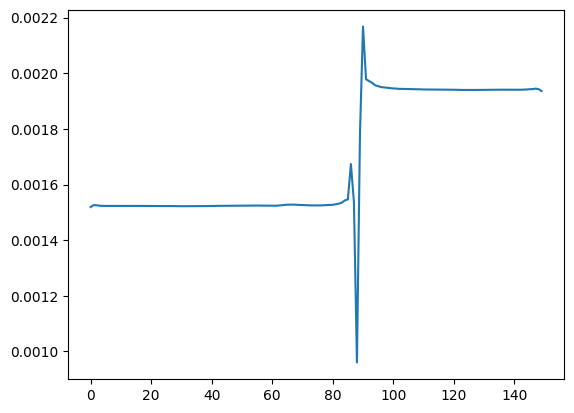

In [9]:
sp = config_dict["sim_params"]
detector_x = util.detector_x_vector(sp["detector_size"], sp["detector_pixel_size_x"])
plt.plot(wf[0])
print(wf[0])
print(detector_x)

## History

To see the interference pattern in empty space, we can record slices throughout the simulation and then plot them. `run_single_simulation` takes an optional argument `history_dz` defining the resolution with which we record the history.

Note that the history is not necessarily recorded with a constant z-spacing. Inside gratings and samples, one slice is recorded for every step. The history also records a list of z-coordinates at which the slices were recorded, which we can use for plotting.

In [ ]:
multisim.run_single_simulation(sim_path, 1, scratch_dir, save_keypoints_path=None, history_dz=0.02)

In [ ]:
# Path to the directory for the source with index 1
source_dir = multisim.get_sub_dir(sim_path, 1)

hist_x = np.load(source_dir / "history_x.npy")
hist_z = np.load(source_dir / "history_z.npy")
hist = np.load(source_dir / "history.npy")
plt.pcolormesh(
    hist_z,
    hist_x,
    hist,
    cmap="Greys_r",
    vmin=0,
    vmax=1e-6,
    shading="nearest",
)
plt.xlabel("z (m)")
plt.ylabel("x (m)")